# Task B: Data Generation

In [12]:
import torch

# 假设 n 是样本数量，3 是通道数，32x32 是图像大小
n = 10  # 样本数量


mean_tensor = torch.load('/cpfs04/user/hanyujin/causal-dm/latent_class/best_k_14_means.pt')
mean_sample = mean_tensor[0].reshape(3, 32, 32)
cov_tensor = torch.ones_like(mean_sample)  
mean_expanded = mean_sample.unsqueeze(0).expand(n, -1, -1, -1)  # 扩展到 (n, 3, 32, 32)
cov_expanded = cov_tensor.unsqueeze(0).expand(n, -1, -1, -1)  # 扩展到 (n, 3, 32, 32)
x = torch.normal(mean=mean_expanded, std=cov_expanded)

print(x.shape)  # 输出形状，应该是 (n, 3, 32, 32)


Original mean tensor shape: torch.Size([14, 3072])
First sample shape: torch.Size([3072])
Reshaped mean sample shape: torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random
import cv2

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

def create_rectangle_image(l1, l2, s1, s2, image_size=32):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, image_size)
    ax.set_ylim(0, image_size)
    ax.set_aspect('equal')
    ax.axis('off')

    rect_width = image_size * 0.12
    center_y = image_size / 2  # 中轴线
    
    # 定义色系的HSV范围
    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系

    # 随机选择颜色
    rect1_color = random_color_from_hsv_range(sun_hsv_range)
    rect2_color = random_color_from_hsv_range(pole_hsv_range)

    # 绘制第一个长方形
    rect1_x = l1
    rect1_y = center_y - l2 / 2
    ax.add_patch(plt.Rectangle((rect1_x, rect1_y), rect_width, l2, facecolor=rect1_color/255.0))
    
    # 绘制第二个长方形
    rect2_x = s1
    rect2_y = center_y - s2 / 2
    ax.add_patch(plt.Rectangle((rect2_x, rect2_y), rect_width, s2, facecolor=rect2_color/255.0))

    return fig

def generate_images(base_path, image_size=32, images_per_class=1000):
    os.makedirs(base_path, exist_ok=True)
    
    type0_path = os.path.join(base_path, "type_0")
    type1_path = os.path.join(base_path, "type_1")
    os.makedirs(type0_path, exist_ok=True)
    os.makedirs(type1_path, exist_ok=True)
    
    images = []

    # 生成 type_0 的图片
    # print("Generating images for type_0...")
    # for i in tqdm(range(images_per_class), desc="Generating type_0 images"):
        
    #     l1 = random.uniform(0, image_size * 0.3)
    #     l2 = random.uniform(image_size * 0.2, image_size * 0.6)
        # while l1 >= l2:  # 确保 l1 < l2
        #      l1 = random.uniform(0, image_size * 0.3)
        #      l2 = random.uniform(image_size * 0.2, image_size * 0.6)
        
        # s1 = random.uniform(image_size*0.4, image_size*0.9)

        # # 生成type 0: l1 < s1, l2 < s2
        # s2 = random.uniform(image_size * 0.1, image_size * 0.7)
        # while (s2 < l2) or (s2 > image_size*0.7): # 保证s2 的值在合理范围内
        #         s2 = random.uniform(image_size * 0.1, image_size * 0.7)
        # folder_path = type0_path
            
        # fig = create_rectangle_image(l1, l2, s1, s2, image_size)

        # image_path = os.path.join(folder_path, f"{i+1}.png")
        # fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
        # plt.close(fig)

        # if i < 8:
        #    images.append((image_path, os.path.basename(folder_path)))  # 保存前8张图片
    
    # 生成 type_1 的图片
    print("Generating images for type_1...")
    for i in tqdm(range(images_per_class), desc="Generating type_1 images"):
        
        l1 = random.uniform(0, image_size * 0.3)
        l2 = random.uniform(image_size * 0.2, image_size * 0.6)
        s1 = random.uniform(l1 + image_size * 0.2, image_size*0.8) # 确保 l1<s1
        
        # 生成type 1: l1/l2 = s1/s2, l2 > s2
        s2 = l2 * l1 / s1
        # while (s2 < l2) or (s2 < image_size * 0.1): # 确保 s2 在合理范围内且 s2<l2
        #     s1 = random.uniform(l1 + image_size * 0.1, image_size*0.9) # 如果不满足，重新生成s1
        #     s2 = l2 * l1 / s1
        
        folder_path = type1_path
            
        fig = create_rectangle_image(l1, l2, s1, s2, image_size)

        image_path = os.path.join(folder_path, f"{i+1}.png")
        fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)

        if i < 8:
           images.append((image_path, os.path.basename(folder_path)))  # 保存前8张图片

    print("Image generation complete.")
    return images

# 设置参数
base_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/perspective_type1_val"
image_size = 32
images_per_class = 2000

# 生成图片并获取前8张图像路径和类别标签
images = generate_images(base_path, image_size, images_per_class)

Generating images for type_1...


Generating type_1 images: 100%|██████████| 2000/2000 [01:01<00:00, 32.57it/s]

Image generation complete.


In [38]:
import os
import re
import shutil
from tqdm import tqdm

def merge_and_rename_images(source_folder, destination_folder):
    """
    Moves images from source to destination folder, renaming based on patterns.

    Handles both "number.png" and "prefix_number.png" naming.
    """
    if not os.path.exists(source_folder):
        print(f"Error: Source folder not found at {source_folder}")
        return
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder, exist_ok=True)

    image_files = [f for f in os.listdir(source_folder) if f.endswith('.png')]

    for filename in tqdm(image_files, desc=f"Copying images from {source_folder}"):
        image_path = os.path.join(source_folder, filename)
        
        # Modified regex to match both types of file names
        match = re.match(r"([a-zA-Z_]*)(\d+)(\.png)", filename)
        if match:
            prefix = match.group(1) if match.group(1) else "" # handle case when no prefix
            number_str = match.group(2)
            suffix = match.group(3)
            
            try:
                number = int(number_str)
                new_number = number + 3000
                new_filename = f"{prefix}{new_number}{suffix}"
                new_image_path = os.path.join(destination_folder, new_filename)
                 # Use copy2 to preserve metadata
                shutil.copy2(image_path, new_image_path)
            except ValueError:
                print(f"Warning: Could not convert number to int in {filename}, copying with original name")
                new_image_path = os.path.join(destination_folder, filename)
                shutil.copy2(image_path, new_image_path)
        else:
            print(f"Warning: Could not rename image {filename}. Copying with original name.")
            new_image_path = os.path.join(destination_folder, filename)
            shutil.copy2(image_path, new_image_path)
    
    print("Image merging and renaming complete.")

# 设置参数
source_folder = "/cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2"
destination_folder = "/cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_1"

# 执行合并和重命名操作
merge_and_rename_images(source_folder, destination_folder)

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   0%|          | 13/3001 [00:00<00:24, 123.68it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   1%|          | 26/3001 [00:00<00:35, 83.26it/s] 

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   2%|▏         | 48/3001 [00:00<00:22, 129.42it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   2%|▏         | 63/3001 [00:00<00:30, 97.09it/s] 

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   3%|▎         | 104/3001 [00:00<00:20, 144.17it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   5%|▍         | 142/3001 [00:01<00:19, 144.82it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   5%|▌         | 159/3001 [00:01<00:21, 131.85it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   7%|▋         | 205/3001 [00:01<00:16, 171.86it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:   8%|▊         | 250/3001 [00:01<00:14, 192.95it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  10%|▉         | 292/3001 [00:01<00:13, 198.38it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  10%|█         | 313/3001 [00:02<00:15, 168.28it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  11%|█         | 331/3001 [00:02<00:27, 97.30it/s] 

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  11%|█▏        | 345/3001 [00:02<00:28, 94.06it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  12%|█▏        | 358/3001 [00:02<00:26, 98.46it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  13%|█▎        | 391/3001 [00:03<00:25, 103.32it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  14%|█▎        | 411/3001 [00:03<00:24, 106.59it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  15%|█▍        | 447/3001 [00:03<00:19, 132.67it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  15%|█▌        | 462/3001 [00:03<00:22, 115.39it/s]

Copying images from /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2:  16%|█▋        | 494/3001 [00:03<00:20, 125.04it/s]


KeyboardInterrupt: 

Processing Images:  45%|████▍     | 1344/2996 [00:02<00:03, 485.84it/s]

Processing Images: 100%|██████████| 2996/2996 [00:05<00:00, 500.49it/s]
/tmp/ipykernel_959434/1998548981.py:171: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.2], [0, 0.2], 'k--', label='y=x', color='gray')


Total images processed: 2994
Failed images: 2434
Variance Error 0.10352797852700392
Mean Error 0.25535214841108805
Scatter plot and fit saved to /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2/law_plot.pdf


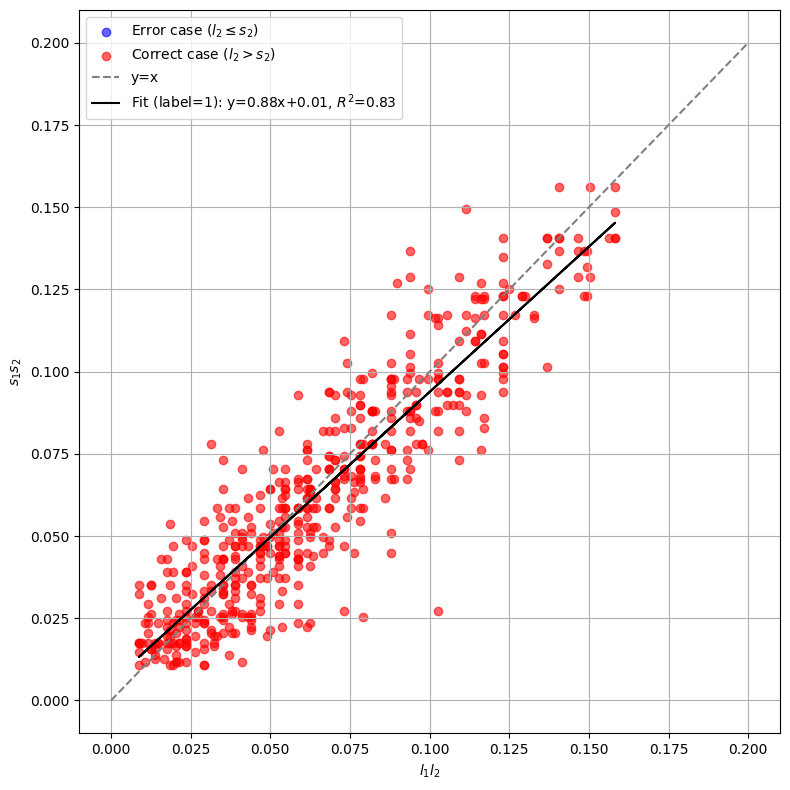

In [42]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def find_rectangles_by_color(image, range1, range2):
    """
    基于颜色范围筛选图像中符合条件的矩形，并返回它们的坐标和大小。
    """
    # 转为 HSV 色彩空间
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 创建颜色范围的掩膜
    mask1 = cv2.inRange(hsv, np.array(range1[:3]), np.array(range1[3:]))
    mask2 = cv2.inRange(hsv, np.array(range2[:3]), np.array(range2[3:]))

    # 合并两个掩膜
    final_mask = cv2.bitwise_or(mask1, mask2)

    # 查找外部轮廓
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rectangles = []

    # 遍历轮廓，筛选出四边形
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:  # 只保留四边形
            x, y, w, h = cv2.boundingRect(approx)
            rectangles.append((x, y, w, h))  # 记录矩形的左上角坐标和宽高

    # 按左侧 x 坐标排序
    return sorted(rectangles, key=lambda r: r[0])


def process_images(folder_path, target_size=128):
    """
    遍历文件夹中的图片，并对数据进行处理；保存失败图片和 `l2 <= s2` 条件的图片 ID。
    """
    failed_images = []  # 存储处理失败的图片 ID
    error_case_images = []  # 存储 l2 <= s2 的图片 ID
    coordinates = []  # 存储有效的数据点 (l1/l2, s1/s2)
    labels = []  # 存储数据点的标签 (l2 <= s2: 0, l2 > s2: 1)
    total_count = 0

    # 定义颜色范围
    rectangles_range1 = [0, 20, 100, 100, 255, 255]  # 黄色系 HSV 范围（进一步扩展）
    rectangles_range2 = [60, 20, 20, 180, 255, 255]  # 蓝绿色系 HSV 范围（进一步扩展）

    # 创建文件夹
    failed_folder = folder_path
    error_folder = folder_path

    os.makedirs(failed_folder, exist_ok=True)
    os.makedirs(error_folder, exist_ok=True)

    # 遍历文件夹内的图片
    for filename in tqdm(sorted(os.listdir(folder_path)), desc="Processing Images"):
        if not filename.endswith(".png"):  # 忽略非 PNG 文件
            continue

        total_count += 1
        image_path = os.path.join(folder_path, filename)

        # 读取并调整图像大小
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {filename}")
            failed_images.append(filename)
            continue
        image = cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)

        # 检测符合颜色的矩形
        rectangles = find_rectangles_by_color(image, rectangles_range1, rectangles_range2)

        # 如果检测到的矩形少于 2 个，记录为失败
        if len(rectangles) < 2:
            failed_images.append(filename)
            continue
        # 提取第1和第2个矩形的参数
        x1, y1, w1, h1 = rectangles[0]
        x2, y2, w2, h2 = rectangles[1]

        # 计算 l1, l2, s1, s2
        l1 = x1 / target_size
        l2 = h1 / target_size
        s1 = x2 / target_size
        s2 = h2 / target_size
        if l1 * l2 == 0 or s1 * s2 == 0:
            failed_images.append(filename)
            continue

        coordinates.append((l1 * l2, s1 * s2, np.abs((s1*s2)/(l1*l2)-1)))
        is_error_case = l2 <= s2
        labels.append(0 if is_error_case else 1)  # 0 代表 l2 <= s2 (蓝色), 1 代表 l2 > s2 (红色)
        
        if is_error_case:
            error_case_images.append(filename)

    # 保存 `failed_images` 和 `error_case_images` 到各自的文件夹下的文本文件
    if failed_images:
      with open(os.path.join(failed_folder, "failed_images.txt"), "w") as f:
          for item in failed_images:
              f.write(item + "\n")
    if error_case_images:
      with open(os.path.join(error_folder, "error_case_images.txt"), "w") as f:
          for item in error_case_images:
             f.write(item + "\n")


    # 返回有效数据点
    return np.array(coordinates), labels, total_count, len(failed_images)


import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def plot_data_with_fit(coordinates, labels, folder_path):
    """
    Plots data, fits a line to samples where labels == 1, and saves as PDF.
    """
    x = coordinates[:, 0]
    y = coordinates[:, 1]
    ratios = coordinates[:, 2]
    labels = np.array(labels)

    # 提取 x 和 y 的 2.5% 和 97.5% 分位范围，剔除极值点
    x_min, x_max = np.percentile(x, [2.5, 97.5])
    y_min, y_max = np.percentile(y, [2.5, 97.5])
    mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)

    # 筛选有效数据点
    x_filtered = x[mask]
    y_filtered = y[mask]
    ratios = ratios[mask]
    labels_filtered = labels[mask]
    print(f"Variance Error {np.var(ratios)}")
    print(f"Mean Error {np.mean(ratios)}")

    # Fit only on samples where labels == 1
    x_fit = x_filtered[labels_filtered == 1]
    y_fit = y_filtered[labels_filtered == 1]

    # Perform linear regression fit
    model = LinearRegression()
    if len(x_fit) > 0: # Check if we have points to fit on, just in case
        model.fit(x_fit.reshape(-1, 1), y_fit)
        y_pred = model.predict(x_fit.reshape(-1, 1))
        slope = model.coef_[0]
        intercept = model.intercept_
        r2 = r2_score(y_fit, y_pred)
    else: # if we dont, do not try fitting
        slope = float('nan')
        intercept = float('nan')
        r2 = float('nan')
        y_pred = []


    # Plot all points with different colors
    plt.figure(figsize=(8, 8))
    plt.scatter(x_filtered[labels_filtered == 0], y_filtered[labels_filtered == 0], color='blue', alpha=0.6,
                label="Error case ($l_2 \leq s_2$)")
    plt.scatter(x_filtered[labels_filtered == 1], y_filtered[labels_filtered == 1], color='red', alpha=0.6,
                label="Correct case ($l_2 > s_2$)")

    plt.plot([0, 0.2], [0, 0.2], 'k--', label='y=x', color='gray')

    if len(y_pred) > 0: # if we have a fit, plot it
        plt.plot(x_fit, y_pred, color='black',
                 label=f"Fit (label=1): y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}")

    plt.xlabel(r"$l_1l_2$")
    plt.ylabel(r"$s_1s_2$")
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # Save as PDF
    pdf_path = os.path.join(folder_path, "law_plot.pdf")
    # plt.savefig(pdf_path)
    print(f"Scatter plot and fit saved to {pdf_path}")
    
# 主程序
# folder_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/perspective_type1/images"
folder_path = "/cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2"
# "/cpfs04/user/hanyujin/causal-dm/AR_diff/results/perspective_type1_parallelFalse_reverseFalse_patch16_dim480_noweightedlossFalse/generations/checkpoint.194400"  # 图片路径
coordinates, labels, total_count, fail_count = process_images(folder_path, target_size=64)  # 数据处理
print(f"Total images processed: {total_count}")
print(f"Failed images: {fail_count}")

if len(coordinates) > 0:
    plot_data_with_fit(coordinates, labels, folder_path)  # 数据拟合和绘图

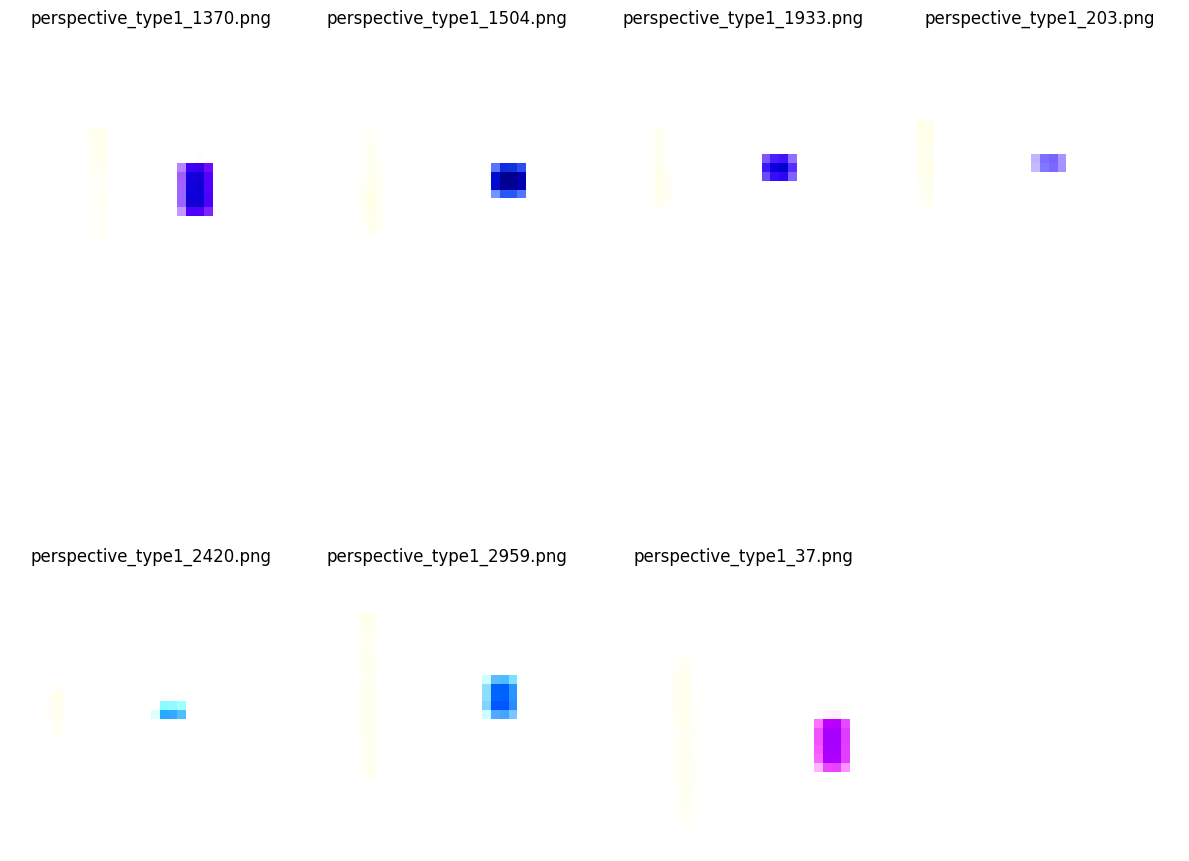

In [40]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images_from_list(image_folder, image_list_file):
    """
    读取图片文件名列表，并在指定文件夹中找到并显示这些图片。

    Args:
        image_folder (str): 包含图片的文件夹路径。
        image_list_file (str): 包含图片文件名的文本文件路径。
    """
    if not os.path.exists(image_list_file):
        print(f"Error: Image list file not found at {image_list_file}")
        return
    
    with open(image_list_file, "r") as f:
        image_filenames = [line.strip() for line in f.readlines()]

    if not image_filenames:
      print("No images found in the list.")
      return
    
    num_images = len(image_filenames)
    rows = int(num_images**0.5)
    cols = (num_images + rows -1 ) // rows
    
    plt.figure(figsize=(12, 12)) #调整显示大小

    for i, filename in enumerate(image_filenames):
        image_path = os.path.join(image_folder, filename)
        if not os.path.exists(image_path):
            print(f"Warning: Image not found at {image_path}")
            continue
        
        try:
          image = cv2.imread(image_path)
          if image is None:
              print(f"Warning: Failed to read image {image_path}")
              continue
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #调整颜色顺序

          plt.subplot(rows, cols, i + 1)
          plt.imshow(image)
          plt.title(os.path.basename(filename))
          plt.axis('off')
        except Exception as e:
          print(f"Error: Could not display image at {image_path}: {e}")

    plt.tight_layout() #自动调整子图间距
    plt.show()
    
    


# 设置参数
image_folder = folder_path   # 图片所在的文件夹路径
image_list_file = folder_path + "/error_case_images.txt"  # 包含图片名称的文本文件路径

# 调用函数显示图片
display_images_from_list(image_folder, image_list_file)

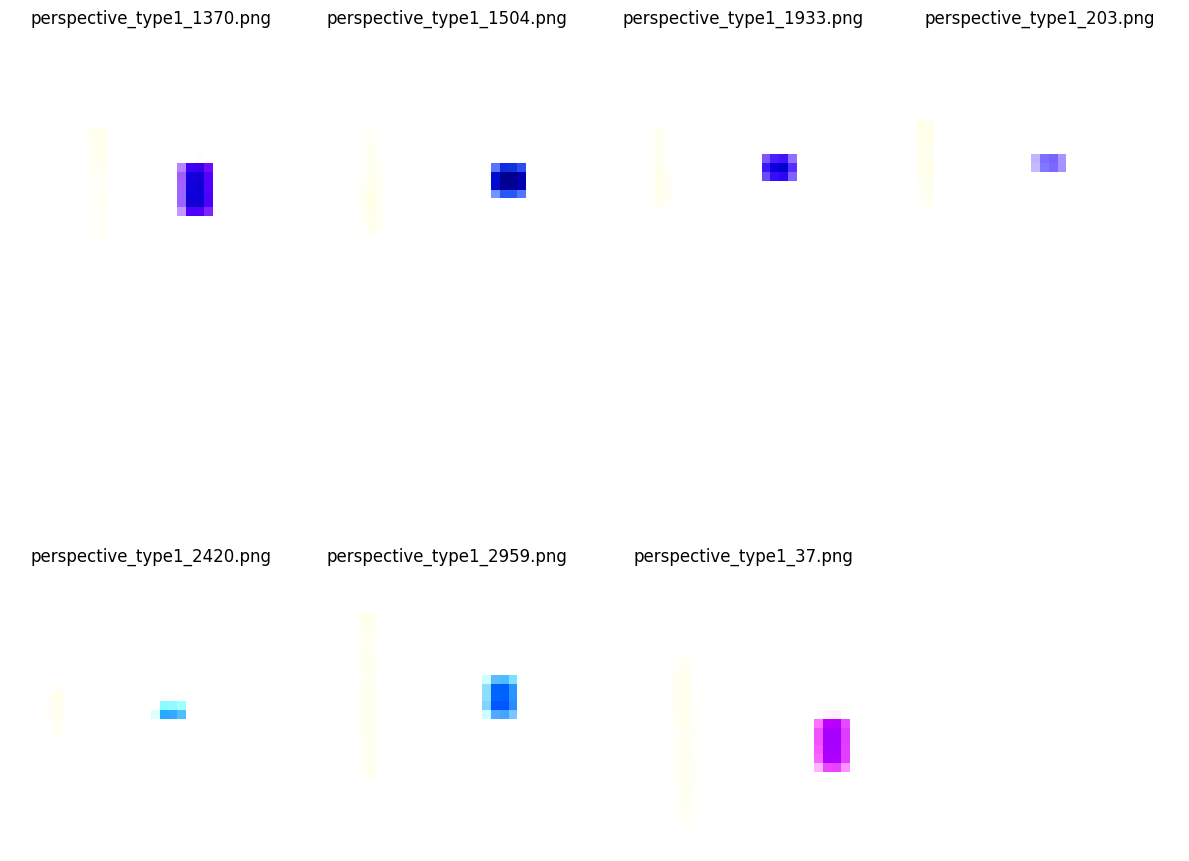

Deleting images: 100%|██████████| 7/7 [00:00<00:00, 131.26it/s]

Images listed in /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2/error_case_images.txt have been deleted.
Image list file /cpfs04/user/hanyujin/causal-dm/results/perspective_type1/vis_contrastive/epoch_800_cfg3_classfier19999_2/error_case_images.txt has been cleared.


In [41]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

def display_and_delete_images(image_folder, image_list_file):
    """
    读取图片文件名列表，显示图片，并删除指定文件夹中的图片文件。

    Args:
        image_folder (str): 包含图片的文件夹路径。
        image_list_file (str): 包含图片文件名的文本文件路径。
    """
    if not os.path.exists(image_list_file):
        print(f"Error: Image list file not found at {image_list_file}")
        return

    with open(image_list_file, "r") as f:
        image_filenames = [line.strip() for line in f.readlines()]
    
    if not image_filenames:
        print("No images found in the list.")
        return

    num_images = len(image_filenames)
    rows = int(num_images**0.5)
    cols = (num_images + rows -1 ) // rows

    plt.figure(figsize=(12, 12)) #调整显示大小


    for i, filename in enumerate(image_filenames):
        image_path = os.path.join(image_folder, filename)
        if not os.path.exists(image_path):
            print(f"Warning: Image not found at {image_path}")
            continue
    
        try:
            image = cv2.imread(image_path)
            if image is None:
              print(f"Warning: Failed to read image {image_path}")
              continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.subplot(rows, cols, i + 1)
            plt.imshow(image)
            plt.title(os.path.basename(filename))
            plt.axis('off')
        except Exception as e:
            print(f"Error: Could not display image at {image_path}: {e}")
    plt.tight_layout() #调整间距
    plt.show()
    
    
    for filename in tqdm(image_filenames, desc="Deleting images"):
      image_path = os.path.join(image_folder, filename)
      try:
          os.remove(image_path)
      except FileNotFoundError:
          print(f"Warning: File not found: {image_path}")
      except Exception as e:
          print(f"Error: Could not delete image {image_path}: {e}")
    
    
    with open(image_list_file, "w") as f:
        pass # 直接使用 "w" 模式打开文件，即可清空文件内容

    print(f"Images listed in {image_list_file} have been deleted.")
    print(f"Image list file {image_list_file} has been cleared.")

# 设置参数
# image_folder = "/cpfs01/user/hanyujin/causal-dm/results/perspective_type1/vis/epoch_400_1735000235.2558737"  # 图片所在的文件夹路径
# image_list_file = "/cpfs01/user/hanyujin/causal-dm/results/perspective_type1/vis/epoch_400_1735000235.2558737/error_case_images.txt"  # 包含图片名称的文本文件路径

# 调用函数显示图片并删除图片
display_and_delete_images(image_folder, image_list_file)

Processing Images:   0%|          | 0/6004 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 6004/6004 [00:08<00:00, 724.27it/s]
/tmp/ipykernel_3398773/1952325182.py:130: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.8], [0, 0.8], 'k--', label='y=x', color='gray')


len(x_filtered): 1488
Scatter plot and fit saved to /cpfs01/user/hanyujin/causal-dm/results/perspective_contrastive_ternary/vis/epoch_800_1735553933.9013307/length_plot.pdf


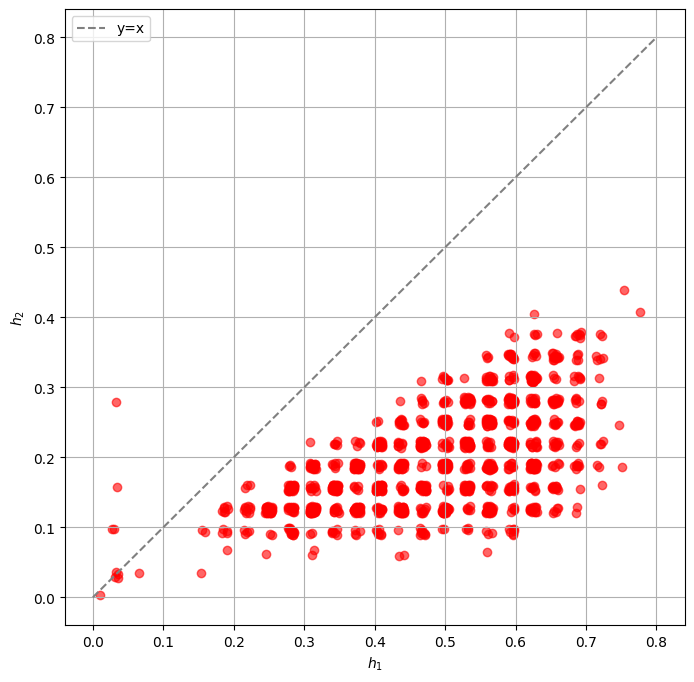

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def find_rectangles_by_color(image, range1, range2):
    """
    基于颜色范围筛选图像中符合条件的矩形，并返回它们的坐标和大小。
    """
    # 转为 HSV 色彩空间
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 创建颜色范围的掩膜
    mask1 = cv2.inRange(hsv, np.array(range1[:3]), np.array(range1[3:]))
    mask2 = cv2.inRange(hsv, np.array(range2[:3]), np.array(range2[3:]))

    # 合并两个掩膜
    final_mask = cv2.bitwise_or(mask1, mask2)

    # 查找外部轮廓
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rectangles = []

    # 遍历轮廓，筛选出四边形
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:  # 只保留四边形
            x, y, w, h = cv2.boundingRect(approx)
            rectangles.append((x, y, w, h))  # 记录矩形的左上角坐标和宽高

    # 按左侧 x 坐标排序
    return sorted(rectangles, key=lambda r: r[0])


def process_images(folder_path, target_size=128, delta=0.005):
    """
    遍历文件夹中的图片，并对数据进行处理；保存失败图片和 `l2 <= s2` 条件的图片 ID。
    """
    failed_images = []           # 存储处理失败的图片 ID
    l2_leq_s2_images = []        # 存储 l2 <= s2 的图片 ID
    coordinates = []             # 存储有效的数据点 (l1/l2, s1/s2)
    total_count = 0

    # 定义颜色范围
    rectangles_range1 = [0, 20, 100, 100, 255, 255]  # 黄色系 HSV 范围（进一步扩展）
    rectangles_range2 = [60, 20, 20, 180, 255, 255]  # 蓝绿色系 HSV 范围（进一步扩展）


    # 遍历文件夹内的图片
    for filename in tqdm(sorted(os.listdir(folder_path)), desc="Processing Images"):
        if not filename.endswith(".png"):  # 忽略非 PNG 文件
            continue

        total_count += 1
        image_path = os.path.join(folder_path, filename)

        # 读取并调整图像大小
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {filename}")
            failed_images.append(filename)
            continue
        image = cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)

        # 检测符合颜色的矩形
        rectangles = find_rectangles_by_color(image, rectangles_range1, rectangles_range2)

        # 如果检测到的矩形少于 2 个，记录为失败
        if len(rectangles) < 2:
            failed_images.append(filename)
            continue

        # 提取第1和第2个矩形的参数
        x1, y1, w1, h1 = rectangles[0]
        x2, y2, w2, h2 = rectangles[1]

        # 计算 l1, l2, s1, s2
        l1 = x1/target_size
        l2 = h1/target_size
        s1 = x2/target_size
        s2 = h2/target_size

        if l2 <= s2:
            l2_leq_s2_images.append(filename)  # 记录 l2 <= s2 的图片 ID
        
        # 添加轻微的随机抖动
        jitter_l2 = l2 + np.random.uniform(-delta, delta)
        jitter_s2 = s2 + np.random.uniform(-delta, delta)

        # 存储添加抖动后的 (l2, s2)
        coordinates.append((jitter_l2, jitter_s2))

    # 返回有效数据点
    return np.array(coordinates), total_count, len(failed_images), len(l2_leq_s2_images)


def plot_data_with_fit(coordinates, folder_path):
    """
    绘制数据的散点图，并对有效数据进行线性拟合，保存为 PDF。
    """
    x = coordinates[:, 0]
    y = coordinates[:, 1]

    # 提取 x 和 y 的 2.5% 和 97.5% 分位范围，剔除极值点
    x_min, x_max = np.percentile(x, [0, 100])
    y_min, y_max = np.percentile(y, [0, 100])
    mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)

    # 筛选有效数据点
    x_filtered = x[mask].reshape(-1, 1)
    y_filtered = y[mask]

    print('len(x_filtered):',len(x_filtered))

    # 使用线性回归模型拟合直线
    model = LinearRegression()
    model.fit(x_filtered, y_filtered)
    y_pred = model.predict(x_filtered)
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y_filtered, y_pred)

    # 绘制散点图和拟合直线
    plt.figure(figsize=(8, 8))
    plt.scatter(x_filtered, y_filtered, color='red', alpha=0.6)
    plt.plot([0, 0.8], [0, 0.8], 'k--', label='y=x', color='gray')
    # plt.plot(x_filtered, y_pred, color='black', label=f"Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}")
    plt.xlabel(r"$h_1$")
    plt.ylabel(r"$h_2$")
    plt.legend()
    plt.grid()
    # plt.tight_layout()

    # 保存为 PDF
    pdf_path = os.path.join(folder_path, "length_plot.pdf")
    plt.savefig(pdf_path)
    print(f"Scatter plot and fit saved to {pdf_path}")


# 主程序
folder_path = "/cpfs01/user/hanyujin/causal-dm/results/perspective_contrastive_ternary/vis/epoch_800_1735553933.9013307"  # 图片路径
coordinates, total_count, fail_count, l2_leq_s2_count = process_images(folder_path, target_size=256)  # 数据处理


if len(coordinates) > 0:
    plot_data_with_fit(coordinates, folder_path)  # 数据拟合和绘图


Processing Images: 100%|██████████| 2000/2000 [00:18<00:00, 107.81it/s]
/tmp/ipykernel_1361010/4133627694.py:138: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.2], [0, 0.2], 'k--', label='y=x', color='gray')


Total images processed: 2000
Failed images: 779
Images with l2 <= s2: 0
Scatter plot and fit saved to /cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/perspective_type1/images/law_plot.pdf


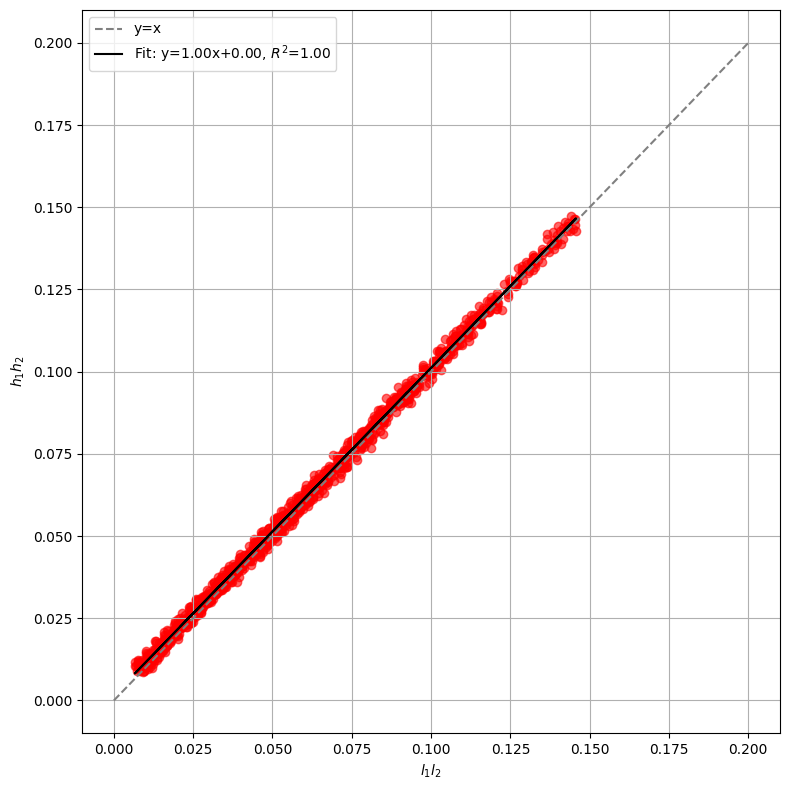

In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def find_rectangles_by_color(image, range1, range2):
    """
    基于颜色范围筛选图像中符合条件的矩形，并返回它们的坐标和大小。
    """
    # 转为 HSV 色彩空间
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 创建颜色范围的掩膜
    mask1 = cv2.inRange(hsv, np.array(range1[:3]), np.array(range1[3:]))
    mask2 = cv2.inRange(hsv, np.array(range2[:3]), np.array(range2[3:]))

    # 合并两个掩膜
    final_mask = cv2.bitwise_or(mask1, mask2)

    # 查找外部轮廓
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rectangles = []

    # 遍历轮廓，筛选出四边形
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:  # 只保留四边形
            x, y, w, h = cv2.boundingRect(approx)
            rectangles.append((x, y, w, h))  # 记录矩形的左上角坐标和宽高

    # 按左侧 x 坐标排序
    return sorted(rectangles, key=lambda r: r[0])


def process_images(folder_path, target_size=128):
    """
    遍历文件夹中的图片，并对数据进行处理；保存失败图片和 `l2 <= s2` 条件的图片 ID。
    """
    failed_images = []           # 存储处理失败的图片 ID
    l2_leq_s2_images = []        # 存储 l2 <= s2 的图片 ID
    coordinates = []             # 存储有效的数据点 (l1/l2, s1/s2)
    total_count = 0

    # 定义颜色范围
    # rectangles_range1 = [0, 20, 100, 100, 255, 255]  # 黄色系 HSV 范围（进一步扩展）
    # rectangles_range2 = [60, 20, 20, 180, 255, 255]  # 蓝绿色系 HSV 范围（进一步扩展）

    rectangles_range1 = [0, 30, 100, 255, 200, 255]  # 黄色系 HSV 范围
    rectangles_range2 = [90, 150, 100, 255, 100, 255]  # 蓝绿色系 HSV 范围



    # 遍历文件夹内的图片
    for filename in tqdm(sorted(os.listdir(folder_path)), desc="Processing Images"):
        if not filename.endswith(".png"):  # 忽略非 PNG 文件
            continue

        total_count += 1
        image_path = os.path.join(folder_path, filename)

        # 读取并调整图像大小
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {filename}")
            failed_images.append(filename)
            continue
        image = cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)

        # 检测符合颜色的矩形
        rectangles = find_rectangles_by_color(image, rectangles_range1, rectangles_range2)

        # 如果检测到的矩形少于 2 个，记录为失败
        if len(rectangles) < 2:
            failed_images.append(filename)
            continue

        # 提取第1和第2个矩形的参数
        x1, y1, w1, h1 = rectangles[0]
        x2, y2, w2, h2 = rectangles[1]

        # 计算 l1, l2, s1, s2
        l1 = x1/target_size
        l2 = h1/target_size
        s1 = x2/target_size
        s2 = h2/target_size

        if l2 <= s2:
            l2_leq_s2_images.append(filename)  # 记录 l2 <= s2 的图片 ID

        coordinates.append((l1 * l2, s1 * s2))

    # 保存 `failed_images` 和 `l2_leq_s2_images` 到文本文件
    if failed_images:
        with open(os.path.join(folder_path, "failed_images.txt"), "w") as f:
            for item in failed_images:
                f.write(item + "\n")

    if l2_leq_s2_images:
        with open(os.path.join(folder_path, "l2_leq_s2_images.txt"), "w") as f:
            for item in l2_leq_s2_images:
                f.write(item + "\n")

    # 返回有效数据点
    return np.array(coordinates), total_count, len(failed_images), len(l2_leq_s2_images)


def plot_data_with_fit(coordinates, folder_path):
    """
    绘制数据的散点图，并对有效数据进行线性拟合，保存为 PDF。
    """
    x = coordinates[:, 0]
    y = coordinates[:, 1]

    # 提取 x 和 y 的 2.5% 和 97.5% 分位范围，剔除极值点
    x_min, x_max = np.percentile(x, [2.5, 97.5])
    y_min, y_max = np.percentile(y, [2.5, 97.5])
    mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)

    # 筛选有效数据点
    x_filtered = x[mask].reshape(-1, 1)
    y_filtered = y[mask]

    # 使用线性回归模型拟合直线
    model = LinearRegression()
    model.fit(x_filtered, y_filtered)
    y_pred = model.predict(x_filtered)
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y_filtered, y_pred)

    # 绘制散点图和拟合直线
    plt.figure(figsize=(8, 8))
    plt.scatter(x_filtered, y_filtered, color='red', alpha=0.6)
    plt.plot([0, 0.2], [0, 0.2], 'k--', label='y=x', color='gray')
    plt.plot(x_filtered, y_pred, color='black', label=f"Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}")
    plt.xlabel(r"$l_1l_2$")
    plt.ylabel(r"$h_1h_2$")
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # 保存为 PDF
    pdf_path = os.path.join(folder_path, "law_plot.pdf")
    plt.savefig(pdf_path)
    print(f"Scatter plot and fit saved to {pdf_path}")


# 主程序
folder_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/perspective_type1/images"
coordinates, total_count, fail_count, l2_leq_s2_count = process_images(folder_path, target_size=256)  # 数据处理
print(f"Total images processed: {total_count}")
print(f"Failed images: {fail_count}")
print(f"Images with l2 <= s2: {l2_leq_s2_count}")

if len(coordinates) > 0:
    plot_data_with_fit(coordinates, folder_path)  # 数据拟合和绘图


### Contrastive Data

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random
import cv2

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

def create_rectangle_image(l1, l2, s1, s2, image_size=32):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, image_size)
    ax.set_ylim(0, image_size)
    ax.set_aspect('equal')
    ax.axis('off')

    rect_width = image_size * 0.12
    center_y = image_size / 2  # 中轴线
    
    # 定义色系的HSV范围
    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系

    # 随机选择颜色
    rect1_color = random_color_from_hsv_range(sun_hsv_range)
    rect2_color = random_color_from_hsv_range(pole_hsv_range)

    # 绘制第一个长方形
    rect1_x = l1
    rect1_y = center_y - l2 / 2
    ax.add_patch(plt.Rectangle((rect1_x, rect1_y), rect_width, l2, facecolor=rect1_color/255.0))
    
    # 绘制第二个长方形
    rect2_x = s1
    rect2_y = center_y - s2 / 2
    ax.add_patch(plt.Rectangle((rect2_x, rect2_y), rect_width, s2, facecolor=rect2_color/255.0))

    return fig

def generate_images(base_path, image_size=32, images_per_class=1000):
    os.makedirs(base_path, exist_ok=True)
    
    type1_path = os.path.join(base_path, "2")
    os.makedirs(type1_path, exist_ok=True)
    
    images = []
    
    # 生成 type_1 的图片
    print("Generating images for type_1...")
    for i in tqdm(range(images_per_class), desc="Generating type_1 images"):
        
        # 随机生成 l1, l2, s1
        l1 = random.uniform(0, image_size * 0.3)
        l2 = random.uniform(image_size * 0.2, image_size * 0.6)
        s1 = random.uniform(l1 + image_size * 0.2, image_size * 0.8)  # 确保 l1 < s1
        
        # 添加噪声
        noise = 15 + abs(5 * np.random.normal(0, 1))
        # noise = (5 * np.random.normal(0, 1))
        # 生成 s2, 但需要确保 l2 * l1 - noise >= 0
        s2 = (l2 * l1 - noise) / s1
        
        # 确保 s2 大于 0 且符合条件
        while s2 < image_size * 0.1 or l2 * l1 - noise < 0:  
            l1 = random.uniform(0, image_size * 0.3)
            l2 = random.uniform(image_size * 0.2, image_size * 0.6)
            s1 = random.uniform(l1 + image_size * 0.2, image_size * 0.8)  # 确保 l1 < s1
            noise = 15 + abs(5 * np.random.normal(0, 1))
            s2 = (l2 * l1 - noise) / s1
        
        folder_path = type1_path
        fig = create_rectangle_image(l1, l2, s1, s2, image_size)

        image_path = os.path.join(folder_path, f"{i+1}.png")
        fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)

        if i < 8:
            images.append((image_path, os.path.basename(folder_path)))  # 保存前8张图片

    print("Image generation complete.")
    return images

# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/perspective_contrastive_ternary"
image_size = 32
images_per_class = 2000

# 生成图片并获取前8张图像路径和类别标签
images = generate_images(base_path, image_size, images_per_class)


Generating images for type_1...


Generating type_1 images: 100%|██████████| 2000/2000 [01:06<00:00, 30.00it/s]

Image generation complete.


Processing Images:   0%|          | 0/2000 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 92.77it/s]


Folder 0: Processed 1302 images
Failed images: 698
Images with l2 <= s2: 0


Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 93.65it/s] 


Folder 1: Processed 1283 images
Failed images: 717
Images with l2 <= s2: 0


Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 91.68it/s]
/tmp/ipykernel_622494/3306667762.py:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.15], [0, 0.15], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)
/tmp/ipykernel_622494/3306667762.py:127: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ground_truth_line, = plt.plot([0, 0.15], [0, 0.15], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)


Folder 2: Processed 1271 images
Failed images: 729
Images with l2 <= s2: 0


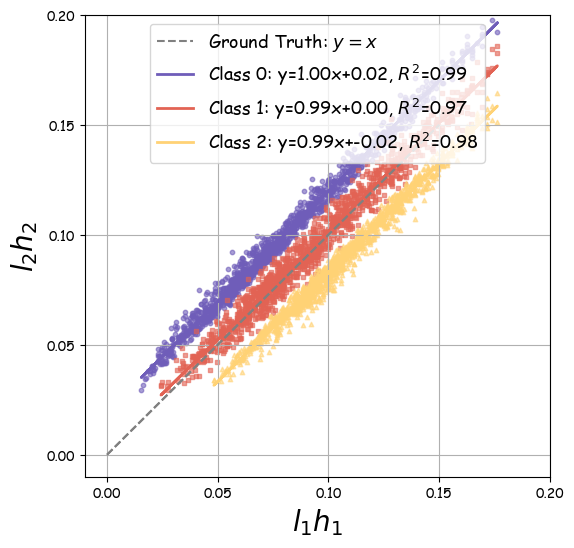

Combined scatter plot and fit saved to /cpfs04/user/hanyujin/causal-dm/example/taskb_contrastive_training.pdf


In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import font_manager as fm
from matplotlib.backends.backend_pdf import PdfPages

comic_sans_path = "/usr/share/fonts/truetype/msttcorefonts/comic.ttf"  # Linux 常见路径
if os.path.exists(comic_sans_path):
    fm.fontManager.addfont(comic_sans_path)
    plt.rcParams['font.family'] = 'Comic Sans MS'
else:
    print("Comic Sans MS font not found. Using default font.")

def find_rectangles_by_color(image, range1, range2):
    """
    基于颜色范围筛选图像中符合条件的矩形，并返回它们的坐标和大小。
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask1 = cv2.inRange(hsv, np.array(range1[:3]), np.array(range1[3:]))
    mask2 = cv2.inRange(hsv, np.array(range2[:3]), np.array(range2[3:]))
    final_mask = cv2.bitwise_or(mask1, mask2)

    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rectangles = []

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:  # 只保留四边形
            x, y, w, h = cv2.boundingRect(approx)
            rectangles.append((x, y, w, h))  # 记录矩形的左上角坐标和宽高

    return sorted(rectangles, key=lambda r: r[0])


def process_images(folder_path, target_size=128):
    """
    遍历文件夹中的图片，并对数据进行处理；返回有效数据点 (l1l2, s1s2)。
    """
    failed_images = []  # 存储处理失败的图片 ID
    l2_leq_s2_images = []  # 存储 l2 <= s2 的图片 ID
    coordinates = []  # 存储有效的数据点 (l1/l2, s1/s2)
    
    rectangles_range1 = [0, 30, 100, 255, 200, 255]  # 黄色系 HSV 范围
    rectangles_range2 = [90, 150, 100, 255, 100, 255]  # 蓝绿色系 HSV 范围

    for filename in tqdm(sorted(os.listdir(folder_path)), desc="Processing Images"):
        if not filename.endswith(".png"):  # 忽略非 PNG 文件
            continue

        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {filename}")
            failed_images.append(filename)
            continue
        image = cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)

        # 检测符合颜色的矩形
        rectangles = find_rectangles_by_color(image, rectangles_range1, rectangles_range2)

        if len(rectangles) < 2:
            failed_images.append(filename)
            continue

        # 提取第1和第2个矩形的参数
        x1, y1, w1, h1 = rectangles[0]
        x2, y2, w2, h2 = rectangles[1]

        l1 = x1 / target_size
        l2 = h1 / target_size
        s1 = x2 / target_size
        s2 = h2 / target_size

        if l2 <= s2:
            l2_leq_s2_images.append(filename)  # 记录 l2 <= s2 的图片 ID

        coordinates.append((l1 * l2, s1 * s2))

    return np.array(coordinates), len(failed_images), len(l2_leq_s2_images)


def plot_combined_data(folders_coordinates, folder_names, output_path):
    """
    在同一张图上绘制三个文件夹的数据，并进行线性拟合。
    """
    with PdfPages(output_path) as pdf:
        plt.figure(figsize=(6, 6))
        plt.plot([0, 0.15], [0, 0.15], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)
        colors = ["#6f5db9", '#E26354', "#ffd275"] 
        markers = ['o', 's', '^']
        estimation_lines = []
        for i, coordinates in enumerate(folders_coordinates):
            x = coordinates[:, 0]
            y = coordinates[:, 1]

            # 计算 x 和 y 的 2.5% 和 97.5% 分位范围，剔除极值点
            x_min, x_max = np.percentile(x, [0, 100])
            y_min, y_max = np.percentile(y, [0, 100])
            mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)

            x_filtered = x[mask].reshape(-1, 1)
            y_filtered = y[mask]

            # 使用线性回归模型拟合直线
            model = LinearRegression()
            model.fit(x_filtered, y_filtered)
            y_pred = model.predict(x_filtered)
            slope = model.coef_[0]
            intercept = model.intercept_
            r2 = r2_score(y_filtered, y_pred)

            # 绘制当前文件夹的数据和拟合直线
            plt.scatter(x_filtered, y_filtered, c=colors[i],marker=markers[i] ,alpha=0.6, s=10)
            estimation_line, = plt.plot(x_filtered, y_pred, color=colors[i], linewidth=2, 
                        label=f'Class {i}: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')
            estimation_lines.append(estimation_line)

        # plt.plot([0, 0.2], [0, 0.2], 'k--', label='y=x', color='gray')
        plt.xlabel(r"$l_1h_1$",fontsize=20)
        plt.ylabel(r"$l_2h_2$",fontsize=20)

        # 设置图例和布局
        ground_truth_line, = plt.plot([0, 0.15], [0, 0.15], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)
        legend_elements = [ground_truth_line, ] + estimation_lines
        plt.legend(handles=legend_elements,fontsize=13, loc='upper center')
        plt.grid()
        plt.xlim(-0.01, 0.2)
        plt.ylim(-0.01, 0.2)
        plt.xticks([0.00, 0.05,0.10, 0.15, 0.20])
        plt.yticks([0.00, 0.05,0.10, 0.15, 0.20])
        # plt.tight_layout()

        # 保存为 PDF
        pdf.savefig()  # 将当前图像保存到 PDF 文件
        plt.show()
        plt.close()
        print(f"Combined scatter plot and fit saved to {output_path}")

# 主程序
root_folder_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/perspective_contrastive_ternary"

folders_coordinates = []
folder_names = []

# 遍历 0, 1, 2 文件夹
for folder_name in ["0","1","2"]:
    folder_path = os.path.join(root_folder_path, folder_name)
    coordinates, fail_count, l2_leq_s2_count = process_images(folder_path, target_size=256)
    print(f"Folder {folder_name}: Processed {len(coordinates)} images")
    print(f"Failed images: {fail_count}")
    print(f"Images with l2 <= s2: {l2_leq_s2_count}")
    
    folders_coordinates.append(coordinates)
    folder_names.append(folder_name)

# 绘制所有文件夹的数据在同一张图上
output_path = "/cpfs04/user/hanyujin/causal-dm/example/taskb_contrastive_training.pdf"
plot_combined_data(folders_coordinates, folder_names, output_path)


# Task C: two circles

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from tqdm import trange

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

def create_circles_image(image_size=32):
    while True:  # 循环确保生成的圆不超出边界
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xlim(0, image_size)
        ax.set_ylim(0, image_size)
        ax.set_aspect('equal')
        ax.axis('off')

        # 定义色系的HSV范围
        sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
        pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系

        # 随机选择颜色
        color1 = random_color_from_hsv_range(sun_hsv_range)
        color2 = random_color_from_hsv_range(pole_hsv_range)

        # 计算圆的尺寸
        small_diameter = random.uniform(image_size * 0.1, image_size * 0.3)
        large_diameter = small_diameter * np.sqrt(2)

        # 随机决定小圆相对于大圆的位置：上、下、左、右
        direction = random.choice(["left", "right", "top", "bottom"])

        # 随机确定大圆圆心的位置
        x_offset = random.uniform(image_size * 0.1, image_size * 0.9)  # x轴方向的偏移量
        y_offset = random.uniform(image_size * 0.1, image_size * 0.9)  # y轴方向的偏移量

        # 确保大圆不会超出边界
        if x_offset - large_diameter / 2 < 0 or x_offset + large_diameter / 2 > image_size:
            plt.close(fig)
            continue
        if y_offset - large_diameter / 2 < 0 or y_offset + large_diameter / 2 > image_size:
            plt.close(fig)
            continue

        # 大圆的圆心位置
        large_circle_center = (x_offset, y_offset)

        # 小圆的圆心位置，确保两个圆相邻
        if direction == "left":
            small_circle_center = (x_offset - small_diameter / 2 - large_diameter / 2, y_offset)
        elif direction == "right":
            small_circle_center = (x_offset + large_diameter / 2 + small_diameter / 2, y_offset)
        elif direction == "top":
            small_circle_center = (x_offset, y_offset + large_diameter / 2 + small_diameter / 2)
        else:  # "bottom"
            small_circle_center = (x_offset, y_offset - large_diameter / 2 - small_diameter / 2)

        # 确保小圆不会超出边界
        if small_circle_center[0] - small_diameter / 2 < 0 or small_circle_center[0] + small_diameter / 2 > image_size:
            plt.close(fig)
            continue
        if small_circle_center[1] - small_diameter / 2 < 0 or small_circle_center[1] + small_diameter / 2 > image_size:
            plt.close(fig)
            continue

        # 绘制小圆
        small_circle = plt.Circle(small_circle_center, small_diameter / 2, facecolor=color1/255.0)
        ax.add_patch(small_circle)

        # 绘制大圆
        large_circle = plt.Circle(large_circle_center, large_diameter / 2, facecolor=color2/255.0)
        ax.add_patch(large_circle)

        return fig

def generate_images(base_path, image_size=32, images_per_class=1000):
    # 如果没有base_path，则先创建该路径
    if not os.path.exists(base_path):
        os.makedirs(base_path)

    type0_path = os.path.join(base_path, "images")
    if not os.path.exists(type0_path):
        os.makedirs(type0_path)
    
    images = []

    # 生成 type_0 的图片
    print("Generating images for type_0...")
    for i in trange(images_per_class):
        folder_path = type0_path
        fig = create_circles_image(image_size)

        image_path = os.path.join(folder_path, f"{i+1}.png")
        fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)

        if i < 8:
            images.append((image_path, os.path.basename(folder_path)))  # 保存前8张图片

    print("Image generation complete.")
    return images

# 设置参数
base_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_two_val"
image_size = 32
images_per_class = 2000

# 生成图片并获取前8张图像路径和类别标签
images = generate_images(base_path, image_size, images_per_class)


Generating images for type_0...


100%|██████████| 2000/2000 [01:27<00:00, 22.81it/s]

Image generation complete.


In [3]:
import os
import shutil

# Define the root path and the destination folder
root_path = "/cpfs04/user/hanyujin/causal-dm/results/circles_two/vis_contrastive"
destination_folder = os.path.join(root_path, "epoch_1600_cfg3")

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Determine the starting counter based on existing images in the destination folder
existing_files = [f for f in os.listdir(destination_folder) if f.endswith(".png")]
if existing_files:
    # Extract numbers from existing file names and find the maximum
    max_number = max(int(f.split('_')[-1].split('.')[0]) for f in existing_files if f.split('_')[-1].split('.')[0].isdigit())
    counter = max_number + 1
else:
    counter = 1  # Start fresh if no files exist

# Traverse through all subdirectories in the root path
for subdir in os.listdir(root_path):
    # Full path of the subdirectory
    subdir_path = os.path.join(root_path, subdir)

    # Only process directories that start with "epoch_400" and are not the destination folder
    if os.path.isdir(subdir_path) and subdir.startswith("epoch_1600_cfg3") and subdir != "epoch_1600_cfg3":
        for file in os.listdir(subdir_path):
            if file.endswith(".png"):  # Only consider PNG images
                # Original file path
                file_path = os.path.join(subdir_path, file)
                # Generate a new name for the file to avoid duplicates
                new_file_name = f"circles_contrastive_ternary_{counter}.png"
                new_file_path = os.path.join(destination_folder, new_file_name)
                # Copy the file to the destination folder with the new name
                shutil.copy(file_path, new_file_path)
                # Increment the counter
                counter += 1

print(f"All images from folders starting with 'epoch_1600' have been merged into the folder: {destination_folder}")

All images from folders starting with 'epoch_1600' have been merged into the folder: /cpfs04/user/hanyujin/causal-dm/results/circles_two/vis_contrastive/epoch_1600_cfg3


Processing Images: 100%|██████████| 3002/3002 [00:12<00:00, 235.81it/s]


Failed images: 2373
Error case images: 0
Variance error 0.240762312759566
Mean Error 0.41348104075210274
Scatter plot and fit saved to /cpfs04/user/hanyujin/causal-dm/results/circles_two/vis_contrastive/epoch_1600_cfg3_1/radius_relationship_plot.pdf


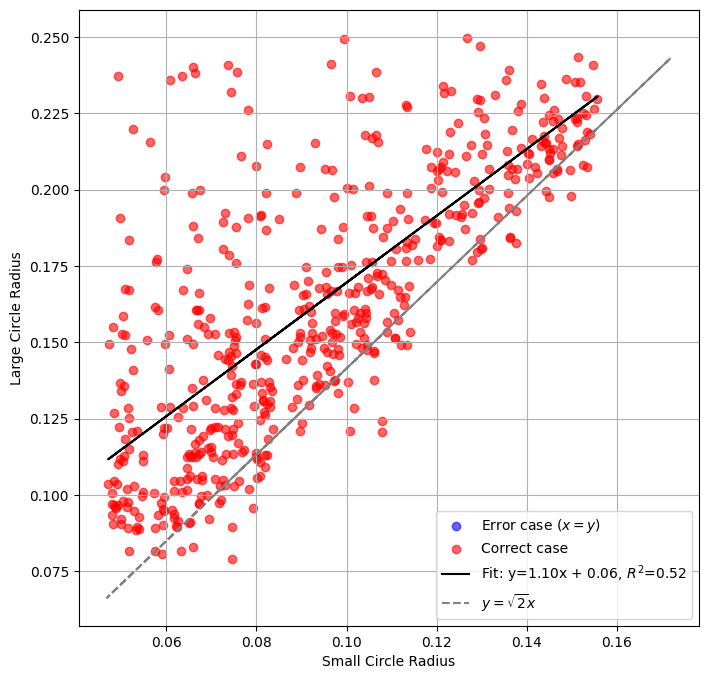

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# def find_circles(image, min_radius=5, max_radius=50):
#     """
#     使用Hough圆变换检测图像中的圆，并返回检测到的圆的半径。
#     """
#     # 将图像转换为灰度图
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # 使用Hough圆变换检测圆
#     circles = cv2.HoughCircles(
#         gray,
#         cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
#         param1=50, param2=30, minRadius=min_radius, maxRadius=max_radius
#     )

#     # 如果检测到圆，返回圆的半径
#     if circles is not None:
#         circles = np.round(circles[0, :]).astype("int")
#         return [r for (x, y, r) in circles]  # 只返回半径
#     return []

def find_circles(image, image_size):
    """
    使用颜色范围检测图像中的圆，并返回检测到的圆的半径（归一化）。
    :param image: 输入的图像
    :param image_size: 图片尺寸，用于归一化处理
    :return: 检测到的圆的归一化半径列表
    """
    # 转换为HSV颜色空间
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 定义颜色范围（包括黄色、红色、蓝色、紫色和黑色）
    lower_yellow = np.array([20, 50, 100])  
    upper_yellow = np.array([40, 255, 255])

    lower_red1 = np.array([0, 30, 100])   
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 30, 100]) 
    upper_red2 = np.array([180, 255, 255])

    lower_blue = np.array([90, 50, 20])  
    upper_blue = np.array([130, 255, 255])

    lower_purple = np.array([130, 50, 20])  
    upper_purple = np.array([160, 255, 255])

    lower_black = np.array([0, 0, 0])  
    upper_black = np.array([180, 255, 50])  

    # 创建颜色掩码
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    purple_mask = cv2.inRange(hsv, lower_purple, upper_purple)
    black_mask = cv2.inRange(hsv, lower_black, upper_black)

    # 合并所有颜色掩码
    mask = yellow_mask | red_mask1 | red_mask2 | blue_mask | purple_mask | black_mask

    # 寻找轮廓
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 存储圆的信息
    circles = []

    for contour in contours:
        # 使用最小外接圆计算圆的半径和中心
        (x, y), radius = cv2.minEnclosingCircle(contour)
        radius = int(radius)

        # 判断是否为有效的圆（半径范围符合条件）
        if radius > 5:  # 最小半径限制
            circles.append(radius)

    # 归一化半径
    normalized_radii = [r / image_size for r in circles]

    return normalized_radii


def process_images(base_path, target_size=128):
    """
    遍历文件夹中的图片，计算每张图片中大圆和小圆的半径。
    """
    folder_path = base_path  # + '/images'
    failed_images = []  # 存储处理失败的图片
    radii_data = []  # 存储小圆半径和大圆半径的对应数据 (小圆半径, 大圆半径)
    labels = []  # 存储数据点的标签 (x=y: 0, x!=y: 1)
    error_case_images = []  # 存储 error case 的图片id

    # 遍历文件夹中的图片
    for filename in tqdm(sorted(os.listdir(folder_path)), desc="Processing Images"):
        if not filename.endswith(".png"):  # 忽略非 PNG 文件
            continue

        image_path = os.path.join(folder_path, filename)

        # 读取图片并调整大小
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {filename}")
            failed_images.append(filename)
            continue
        image = cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)

        # 检测图像中的圆
        radii = find_circles(image, image_size=target_size)

        # 如果检测到的圆少于2个，认为检测失败
        if len(radii) < 2:
            failed_images.append(filename)
            continue

        # 假设第一个圆为小圆，第二个圆为大圆
        small_radius, large_radius = sorted(radii)[:2]  # 取前两个圆，排序后赋值
        # if small_radius <=0 or large_radius >=0.3:
        #     failed_images.append(filename)
        #     continue
        if large_radius > small_radius:
            x = small_radius
            y = large_radius
            radii_data.append((x, y,np.abs(y/x-np.sqrt(2))))
            is_error_case = abs(x - y) < 1e-6
            labels.append(0 if is_error_case else 1)  # 0 代表 x=y, 1 代表 x!=y
            if is_error_case:
                error_case_images.append(filename)

    # 保存 `failed_images` 到文本文件
    if failed_images:
        with open(os.path.join(folder_path, "failed_images.txt"), "w") as f:
            for item in failed_images:
                f.write(item + "\n")
    # 保存 `error_case_images` 到文本文件
    if error_case_images:
        with open(os.path.join(folder_path, "error_case_images.txt"), "w") as f:
            for item in error_case_images:
                f.write(item + "\n")
    # 返回有效数据
    return np.array(radii_data), labels, len(failed_images), len(error_case_images)


def plot_data_with_fit(radii_data, labels, base_path):
    """
    绘制小圆半径与大圆半径的散点图，并进行拟合，画出拟合线及y = np.sqrt(2) * x的灰色虚线。
    """
    # 提取小圆半径和大圆半径
    x = radii_data[:, 0]  # 小圆半径
    y = radii_data[:, 1]  # 大圆半径
    ratios =  radii_data[:, 2] 
    labels = np.array(labels)
    # 添加轻微的抖动
    jitter_strength = 0.005 # 抖动强度（越小越轻微）
    x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)
    y_jittered = y + np.random.uniform(-jitter_strength, jitter_strength, size=y.shape)
    x_min, x_max = np.percentile(x, [2.5, 97.5])
    y_min, y_max = np.percentile(y, [2.5, 97.5])
    mask = (x_jittered >= x_min) & (x_jittered <= x_max) & (y_jittered >= y_min) & (y_jittered <= y_max)

    # 筛选有效数据点
    x_filtered = x_jittered[mask]
    y_filtered = y_jittered[mask]
    labels_filtered = labels[mask]
    ratios = ratios[mask]
    # print(f"ratios {ratios}")
    print(f"Variance error {np.var(ratios)}")
    print(f"Mean Error {np.mean(ratios)}")

    # 使用线性回归拟合小圆半径和大圆半径的关系
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    y_ideal = np.sqrt(2) * x.reshape(-1, 1)
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)
    y_pred_filtered = model.predict(x_filtered.reshape(-1, 1))

    # 绘制散点图和拟合线
    plt.figure(figsize=(8, 8))
    plt.scatter(x_filtered[labels_filtered == 0], y_filtered[labels_filtered == 0], color='blue', alpha=0.6,
                label="Error case ($x=y$)")
    plt.scatter(x_filtered[labels_filtered == 1], y_filtered[labels_filtered == 1], color='red', alpha=0.6,
                label="Correct case")
    plt.plot(x_filtered, y_pred_filtered, color='black', label=f"Fit: y={slope:.2f}x + {intercept:.2f}, $R^2$={r2:.2f}")
    plt.plot(x, y_ideal, color='gray', linestyle='--', label=r'$y = \sqrt{2}x$')
    plt.xlabel("Small Circle Radius")
    plt.ylabel("Large Circle Radius")
    plt.legend()
    plt.grid()
    # plt.tight_layout()

    # 保存为 PDF
    pdf_path = os.path.join(base_path, "radius_relationship_plot.pdf")
    # plt.savefig(pdf_path)
    print(f"Scatter plot and fit saved to {pdf_path}")


# 主程序
folder_path = "/cpfs04/user/hanyujin/causal-dm/results/circles_two/vis_contrastive/epoch_1600_cfg3_1"  # 这里填写你的文件夹路径
radii_data, labels, fail_count, error_count = process_images(folder_path, target_size =128)  # 数据处理
print(f"Failed images: {fail_count}")
print(f"Error case images: {error_count}")
if len(radii_data) > 0:
    plot_data_with_fit(radii_data, labels, folder_path)  # 数据拟合和绘图

Processing Images:   0%|          | 0/2000 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 2000/2000 [00:53<00:00, 37.29it/s]


Failed images: 363
Scatter plot and fit saved to /cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_two/radius_relationship_plot.pdf


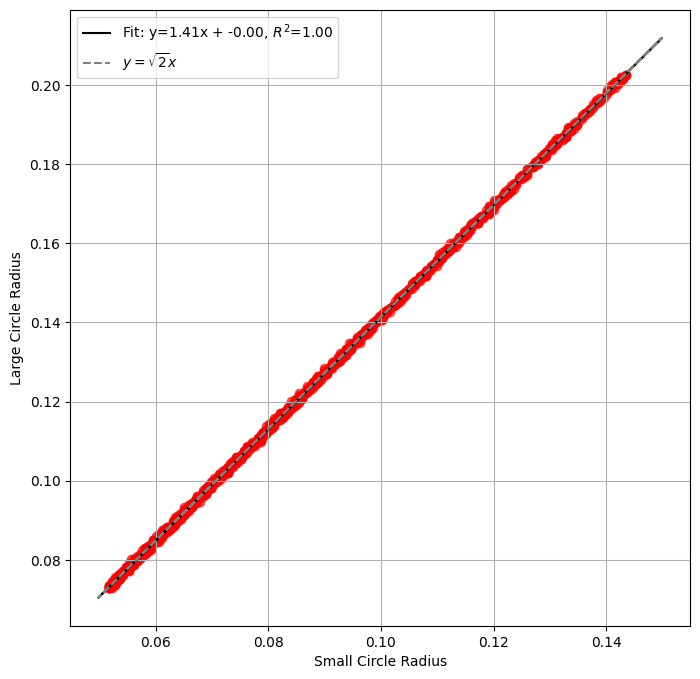

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# def find_circles(image, min_radius=5, max_radius=50):
#     """
#     使用Hough圆变换检测图像中的圆，并返回检测到的圆的半径。
#     """
#     # 将图像转换为灰度图
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # 使用Hough圆变换检测圆
#     circles = cv2.HoughCircles(
#         gray, 
#         cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, 
#         param1=50, param2=30, minRadius=min_radius, maxRadius=max_radius
#     )
    
#     # 如果检测到圆，返回圆的半径
#     if circles is not None:
#         circles = np.round(circles[0, :]).astype("int")
#         return [r for (x, y, r) in circles]  # 只返回半径
#     return []

def find_circles(image, image_size):
    """
    使用颜色范围检测图像中的圆，并返回检测到的圆的半径（归一化）。
    :param image: 输入的图像
    :param image_size: 图片尺寸，用于归一化处理
    :return: 检测到的圆的归一化半径列表
    """
    # 转换为HSV颜色空间
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 定义颜色范围（更新为黄色和蓝绿色）
    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系

    # 创建颜色掩码函数
    def create_mask(hsv_image, hsv_range):
        lower_bound = np.array([hsv_range[0][0], hsv_range[1][0], hsv_range[2][0]])
        upper_bound = np.array([hsv_range[0][1], hsv_range[1][1], hsv_range[2][1]])
        return cv2.inRange(hsv_image, lower_bound, upper_bound)

    # 创建颜色掩码
    yellow_mask = create_mask(hsv, sun_hsv_range)
    blue_green_mask = create_mask(hsv, pole_hsv_range)

    # 合并颜色掩码
    mask = yellow_mask | blue_green_mask

    # 寻找轮廓
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 存储圆的信息
    circles = []

    for contour in contours:
        # 使用最小外接圆计算圆的半径和中心
        (x, y), radius = cv2.minEnclosingCircle(contour)
        radius = int(radius)

        # 判断是否为有效的圆（半径范围符合条件）
        if radius > 5:  # 最小半径限制
            circles.append(radius)

    # 归一化半径
    normalized_radii = [r / image_size for r in circles]

    return normalized_radii


def process_images(base_path, target_size=128):
    """
    遍历文件夹中的图片，计算每张图片中大圆和小圆的半径。
    """
    folder_path = base_path + '/images'
    failed_images = []  # 存储处理失败的图片
    radii_data = []     # 存储小圆半径和大圆半径的对应数据 (小圆半径, 大圆半径)

    # 遍历文件夹中的图片
    for filename in tqdm(sorted(os.listdir(folder_path)), desc="Processing Images"):
        if not filename.endswith(".png"):  # 忽略非 PNG 文件
            continue

        image_path = os.path.join(folder_path, filename)
        
        # 读取图片并调整大小
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {filename}")
            failed_images.append(filename)
            continue
        image = cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)

        # 检测图像中的圆
        radii = find_circles(image, image_size = target_size)
        
        # 如果检测到的圆少于2个，认为检测失败
        if len(radii) < 2:
            failed_images.append(filename)
            continue
        
        # 假设第一个圆为小圆，第二个圆为大圆
        small_radius, large_radius = sorted(radii)[:2]  # 取前两个圆，排序后赋值
        if large_radius > small_radius:
            radii_data.append((small_radius, large_radius))

    # 返回有效数据
    return np.array(radii_data), len(failed_images)

def plot_data_with_fit(radii_data, base_path):
    """
    绘制小圆半径与大圆半径的散点图，并进行拟合，画出拟合线及y = np.sqrt(2) * x的灰色虚线。
    """
    # 提取小圆半径和大圆半径
    x = radii_data[:, 0]  # 小圆半径
    y = radii_data[:, 1]  # 大圆半径

    # 添加轻微的抖动
    jitter_strength = 0  # 抖动强度（越小越轻微）
    x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)
    y_jittered = y + np.random.uniform(-jitter_strength, jitter_strength, size=y.shape)
    x_min, x_max = np.percentile(x, [2.5, 97.5])
    y_min, y_max = np.percentile(y, [2.5, 97.5])
    mask = (x_jittered >= x_min) & (x_jittered <= x_max) & (y_jittered >= y_min) & (y_jittered <= y_max)

    # 筛选有效数据点
    x_jittered = x_jittered[mask].reshape(-1, 1)
    y_jittered = y_jittered[mask]
    # 使用线性回归拟合小圆半径和大圆半径的关系
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    y_ideal = np.sqrt(2) * x.reshape(-1, 1)
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)

    # 绘制散点图和拟合线
    plt.figure(figsize=(8, 8))
    plt.scatter(x_jittered, y_jittered, color='red', alpha=0.6)
    plt.plot(x, y_pred, color='black', label=f"Fit: y={slope:.2f}x + {intercept:.2f}, $R^2$={r2:.2f}")
    plt.plot(x, y_ideal, color='gray', linestyle='--', label=r'$y = \sqrt{2}x$')
    plt.xlabel("Small Circle Radius")
    plt.ylabel("Large Circle Radius")
    # plt.xlim(0,1)
    # plt.ylim(0,1)
    plt.legend()
    plt.grid()
    # plt.tight_layout()

    # 保存为 PDF
    pdf_path = os.path.join(base_path, "radius_relationship_plot.pdf")
    plt.savefig(pdf_path)
    print(f"Scatter plot and fit saved to {pdf_path}")

# 主程序
folder_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_two"  # 这里填写你的文件夹路径
radii_data, fail_count = process_images(folder_path, target_size=1024*2)  # 数据处理
print(f"Failed images: {fail_count}")

if len(radii_data) > 0:
    plot_data_with_fit(radii_data, folder_path)  # 数据拟合和绘图


## Contrastive Data

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from tqdm import trange

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

def create_circles_image(image_size=32):
    while True:  # 循环确保生成的圆不超出边界
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xlim(0, image_size)
        ax.set_ylim(0, image_size)
        ax.set_aspect('equal')
        ax.axis('off')

        # 定义色系的HSV范围
        sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
        pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系

        # 随机选择颜色
        color1 = random_color_from_hsv_range(sun_hsv_range)
        color2 = random_color_from_hsv_range(pole_hsv_range)

        # 计算圆的尺寸
        small_diameter = random.uniform(image_size * 0.2, image_size * 0.3)
        # noise = 3 + abs(0.1 * np.random.normal(0, 0.1))
        noise = 1 + abs(0.01 * np.random.normal(0, 0.01))
        # noise = (0.01 * np.random.normal(0, 0.1))
        # 生成 s2, 但需要确保 l2 * l1 - noise >= 0
        large_diameter = small_diameter * np.sqrt(2) + noise
        # if large_diameter<=small_diameter:
        #     plt.close(fig)
        #     continue
        # 随机决定小圆相对于大圆的位置：上、下、左、右
        direction = random.choice(["left", "right", "top", "bottom"])

        # 随机确定大圆圆心的位置
        x_offset = random.uniform(image_size * 0.1, image_size * 0.9)  # x轴方向的偏移量
        y_offset = random.uniform(image_size * 0.1, image_size * 0.9)  # y轴方向的偏移量

        # 确保大圆不会超出边界
        if x_offset - large_diameter / 2 < 0 or x_offset + large_diameter / 2 > image_size:
            plt.close(fig)
            continue
        if y_offset - large_diameter / 2 < 0 or y_offset + large_diameter / 2 > image_size:
            plt.close(fig)
            continue

        # 大圆的圆心位置
        large_circle_center = (x_offset, y_offset)

        # 小圆的圆心位置，确保两个圆相邻
        if direction == "left":
            small_circle_center = (x_offset - small_diameter / 2 - large_diameter / 2, y_offset)
        elif direction == "right":
            small_circle_center = (x_offset + large_diameter / 2 + small_diameter / 2, y_offset)
        elif direction == "top":
            small_circle_center = (x_offset, y_offset + large_diameter / 2 + small_diameter / 2)
        else:  # "bottom"
            small_circle_center = (x_offset, y_offset - large_diameter / 2 - small_diameter / 2)

        # 确保小圆不会超出边界
        if small_circle_center[0] - small_diameter / 2 < 0 or small_circle_center[0] + small_diameter / 2 > image_size:
            plt.close(fig)
            continue
        if small_circle_center[1] - small_diameter / 2 < 0 or small_circle_center[1] + small_diameter / 2 > image_size:
            plt.close(fig)
            continue

        # 绘制小圆
        small_circle = plt.Circle(small_circle_center, small_diameter / 2, facecolor=color1/255.0)
        ax.add_patch(small_circle)

        # 绘制大圆
        large_circle = plt.Circle(large_circle_center, large_diameter / 2, facecolor=color2/255.0)
        ax.add_patch(large_circle)

        return fig

def generate_images(base_path, image_size=32, images_per_class=1000):
    # 如果没有base_path，则先创建该路径
    if not os.path.exists(base_path):
        os.makedirs(base_path)

    type0_path = os.path.join(base_path, "0")
    if not os.path.exists(type0_path):
        os.makedirs(type0_path)
    
    images = []

    # 生成 type_0 的图片
    print("Generating images for type_0...")
    for i in trange(images_per_class):
        folder_path = type0_path
        fig = create_circles_image(image_size)

        image_path = os.path.join(folder_path, f"{i+1}.png")
        fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)

        if i < 8:
            images.append((image_path, os.path.basename(folder_path)))  # 保存前8张图片

    print("Image generation complete.")
    return images

# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_contrastive_ternary"
image_size = 32
images_per_class = 2000

# 生成图片并获取前8张图像路径和类别标签
images = generate_images(base_path, image_size, images_per_class)


Generating images for type_0...


100%|██████████| 2000/2000 [02:20<00:00, 14.27it/s]

Image generation complete.


Processing Images:   2%|▏         | 41/2000 [00:00<00:20, 95.73it/s]

Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 94.65it/s] 


Folder 0: Processed 1143 images
Failed images: 857


Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 93.78it/s] 


Folder 1: Processed 1108 images
Failed images: 892


Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 93.33it/s]
/tmp/ipykernel_687446/1283998352.py:111: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0.05, 0.175], [np.sqrt(2)*0.05, np.sqrt(2)*0.175], 'k--', label='Ground Truth: $y = \sqrt{2}x$', color='gray', linewidth=1.5)
/tmp/ipykernel_687446/1283998352.py:149: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ground_truth_line, = plt.plot([0.05, 0.175], [np.sqrt(2)*0.05, np.sqrt(2)*0.175], 'k--', label='Ground Truth: $y = \sqrt{2}x$', color='gray', linewidth=1.5)


Folder 2: Processed 1086 images
Failed images: 914


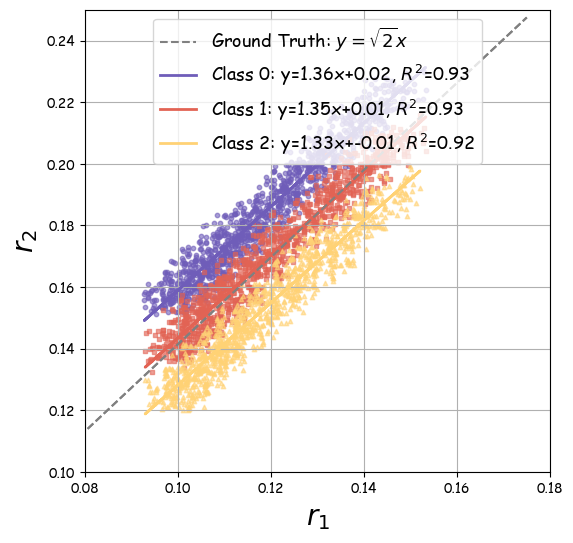

Combined scatter plot and fit saved to /cpfs04/user/hanyujin/causal-dm/example/taskc_contrastive_training.pdf


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import font_manager as fm
comic_sans_path = "/usr/share/fonts/truetype/msttcorefonts/comic.ttf"  # Linux 常见路径
if os.path.exists(comic_sans_path):
    fm.fontManager.addfont(comic_sans_path)
    plt.rcParams['font.family'] = 'Comic Sans MS'
else:
    print("Comic Sans MS font not found. Using default font.")
def find_circles(image, image_size):
    """
    使用颜色范围检测图像中的圆，并返回检测到的圆的半径（归一化）。
    :param image: 输入的图像
    :param image_size: 图片尺寸，用于归一化处理
    :return: 检测到的圆的归一化半径列表
    """
    # 转换为HSV颜色空间
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 定义颜色范围（更新为黄色和蓝绿色）
    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系

    # 创建颜色掩码函数
    def create_mask(hsv_image, hsv_range):
        lower_bound = np.array([hsv_range[0][0], hsv_range[1][0], hsv_range[2][0]])
        upper_bound = np.array([hsv_range[0][1], hsv_range[1][1], hsv_range[2][1]])
        return cv2.inRange(hsv_image, lower_bound, upper_bound)

    # 创建颜色掩码
    yellow_mask = create_mask(hsv, sun_hsv_range)
    blue_green_mask = create_mask(hsv, pole_hsv_range)

    # 合并颜色掩码
    mask = yellow_mask | blue_green_mask

    # 寻找轮廓
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 存储圆的信息
    circles = []

    for contour in contours:
        # 使用最小外接圆计算圆的半径和中心
        (x, y), radius = cv2.minEnclosingCircle(contour)
        radius = int(radius)

        # 判断是否为有效的圆（半径范围符合条件）
        if radius > 5:  # 最小半径限制
            circles.append(radius)

    # 归一化半径
    normalized_radii = [r / image_size for r in circles]

    return normalized_radii


def process_images(base_path, target_size=128):
    """
    遍历文件夹中的图片，计算每张图片中大圆和小圆的半径。
    """
    folder_path = base_path  # 基路径
    failed_images = []  # 存储处理失败的图片
    radii_data = []     # 存储小圆半径和大圆半径的对应数据 (小圆半径, 大圆半径)

    # 遍历子文件夹（0、1、2）

        # 遍历子文件夹中的图片
    for filename in tqdm(sorted(os.listdir(folder_path)), desc="Processing Images"):
        if not filename.endswith(".png"):  # 忽略非 PNG 文件
            continue

        image_path = os.path.join(folder_path, filename)

        # 读取图片并调整大小
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {filename}")
            failed_images.append(filename)
            continue
        image = cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)

        # 检测图像中的圆
        radii = find_circles(image, image_size=target_size)

        # 如果检测到的圆少于2个，认为检测失败
        if len(radii) < 2:
            failed_images.append(filename)
            continue

        # 假设第一个圆为小圆，第二个圆为大圆
        small_radius, large_radius = sorted(radii)[:2]  # 取前两个圆，排序后赋值
        if large_radius > small_radius:
            radii_data.append((small_radius, large_radius))

    # 返回有效数据
    return np.array(radii_data), len(failed_images)

def plot_combined_data(folders_coordinates, folder_names, output_path):
    """
    在同一张图上绘制三个文件夹的数据，并进行线性拟合。
    """
    with PdfPages(output_path) as pdf:
        plt.figure(figsize=(6, 6))
        plt.plot([0.05, 0.175], [np.sqrt(2)*0.05, np.sqrt(2)*0.175], 'k--', label='Ground Truth: $y = \sqrt{2}x$', color='gray', linewidth=1.5)
        colors = ["#6f5db9", '#E26354', "#ffd275"] 
        markers = ['o', 's', '^']
        estimation_lines = []
        for i, coordinates in enumerate(folders_coordinates):
            x = coordinates[:, 0]
            y = coordinates[:, 1]
            jitter_strength = 0.005 # 抖动强度（越小越轻微）
            x = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)
            y = y + np.random.uniform(-jitter_strength, jitter_strength, size=y.shape)

            # 计算 x 和 y 的 2.5% 和 97.5% 分位范围，剔除极值点
            x_min, x_max = np.percentile(x, [0, 100])
            y_min, y_max = np.percentile(y, [0, 100])
            mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)

            x_filtered = x[mask].reshape(-1, 1)
            y_filtered = y[mask]

            # 使用线性回归模型拟合直线
            model = LinearRegression()
            model.fit(x_filtered, y_filtered)
            y_pred = model.predict(x_filtered)
            slope = model.coef_[0]
            intercept = model.intercept_
            r2 = r2_score(y_filtered, y_pred)

            # 绘制当前文件夹的数据和拟合直线
            plt.scatter(x_filtered, y_filtered, c=colors[i],marker=markers[i], alpha=0.6, s=10)
            estimation_line, = plt.plot(x_filtered, y_pred, color=colors[i], linewidth=2, 
                        label=f'Class {i}: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')
            estimation_lines.append(estimation_line)

        # plt.plot([0, 0.2], [0, 0.2], 'k--', label='y=x', color='gray')
        plt.xlabel(r"$r_1$",fontsize=20)
        plt.ylabel(r"$r_2$",fontsize=20)

        # 设置图例和布局
        ground_truth_line, = plt.plot([0.05, 0.175], [np.sqrt(2)*0.05, np.sqrt(2)*0.175], 'k--', label='Ground Truth: $y = \sqrt{2}x$', color='gray', linewidth=1.5)
        legend_elements = [ground_truth_line, ] + estimation_lines
        plt.legend(handles=legend_elements,fontsize=13, loc='upper center')
        plt.grid()
        plt.xlim(0.08,0.18)
        plt.ylim(0.1,0.25)
        # plt.xticks([0.00, 0.05,0.10, 0.15, 0.20])
        # plt.yticks([0.00, 0.05,0.10, 0.15, 0.20])
        # plt.tight_layout()

        # 保存为 PDF
        pdf.savefig()  # 将当前图像保存到 PDF 文件
        plt.show()
        plt.close()
        print(f"Combined scatter plot and fit saved to {output_path}")

root_folder_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_contrastive_ternary"

folders_coordinates = []
folder_names = []

# 遍历 0, 1, 2 文件夹
for folder_name in ["0","1","2"]:
    folder_path = os.path.join(root_folder_path, folder_name)
    coordinates, fail_count = process_images(folder_path, target_size=256)
    print(f"Folder {folder_name}: Processed {len(coordinates)} images")
    print(f"Failed images: {fail_count}")
 
    folders_coordinates.append(coordinates)
    folder_names.append(folder_name)

# 绘制所有文件夹的数据在同一张图上
output_path = "/cpfs04/user/hanyujin/causal-dm/example/taskc_contrastive_training.pdf"
plot_combined_data(folders_coordinates, folder_names, output_path)


# Task D: two squares

Generating images for type_0...


  3%|▎         | 66/2000 [00:07<01:13, 26.40it/s]/tmp/ipykernel_149013/3608238439.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))
100%|██████████| 2000/2000 [01:15<00:00, 26.36it/s]


Image generation complete.


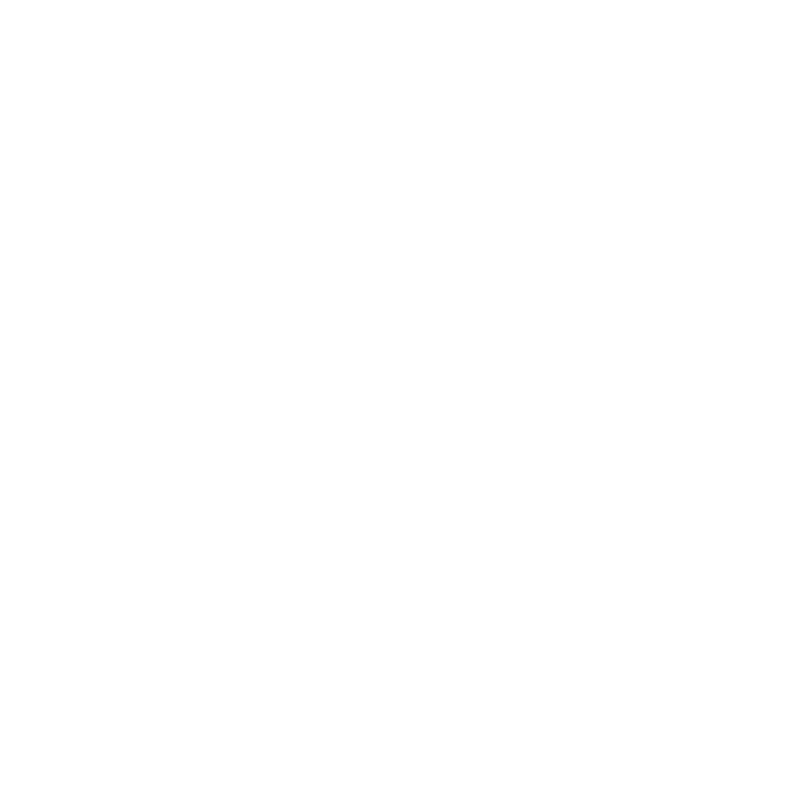

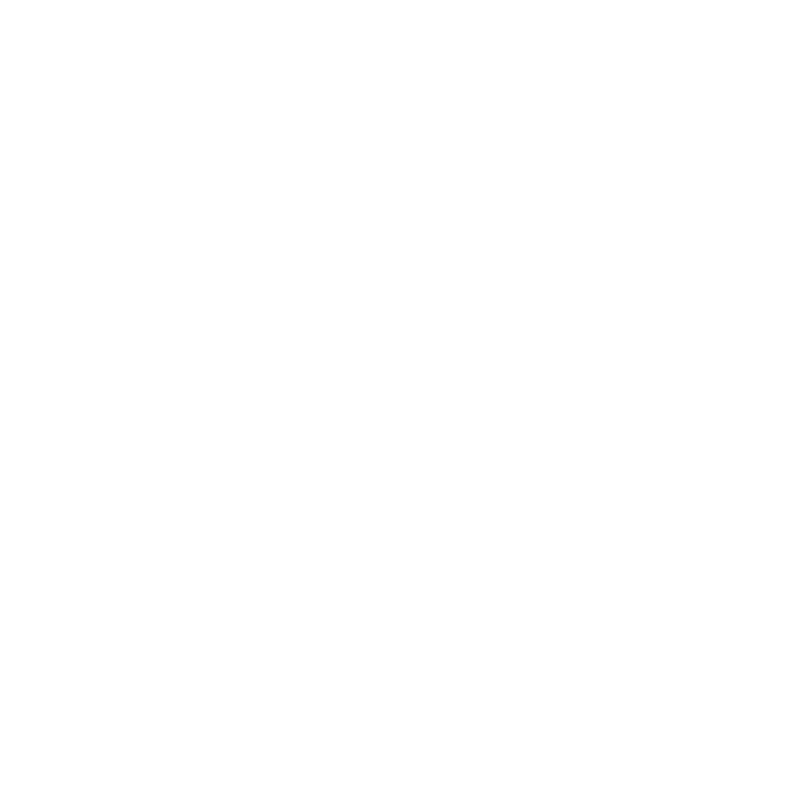

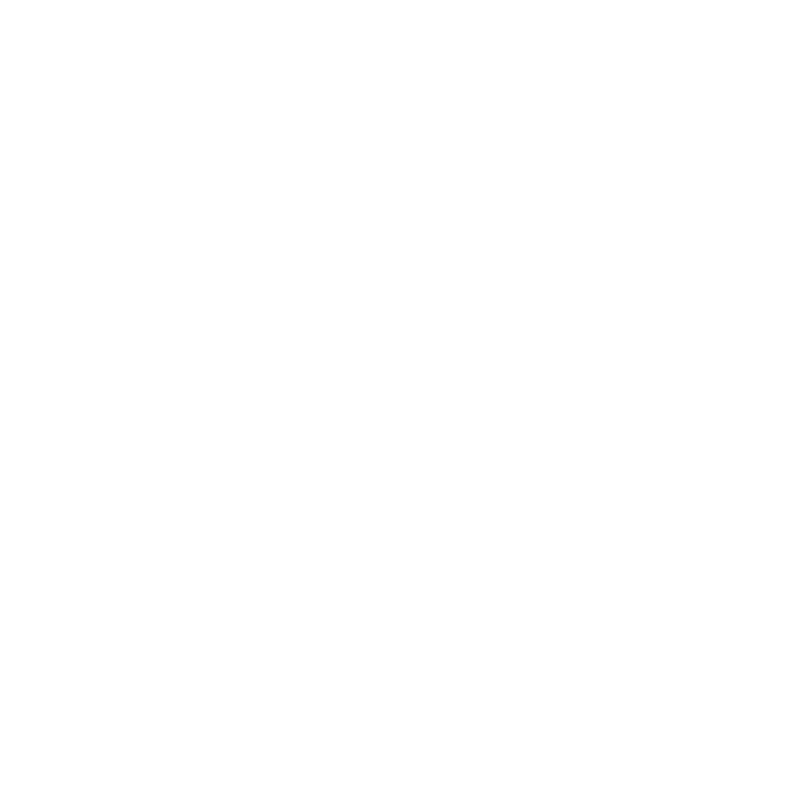

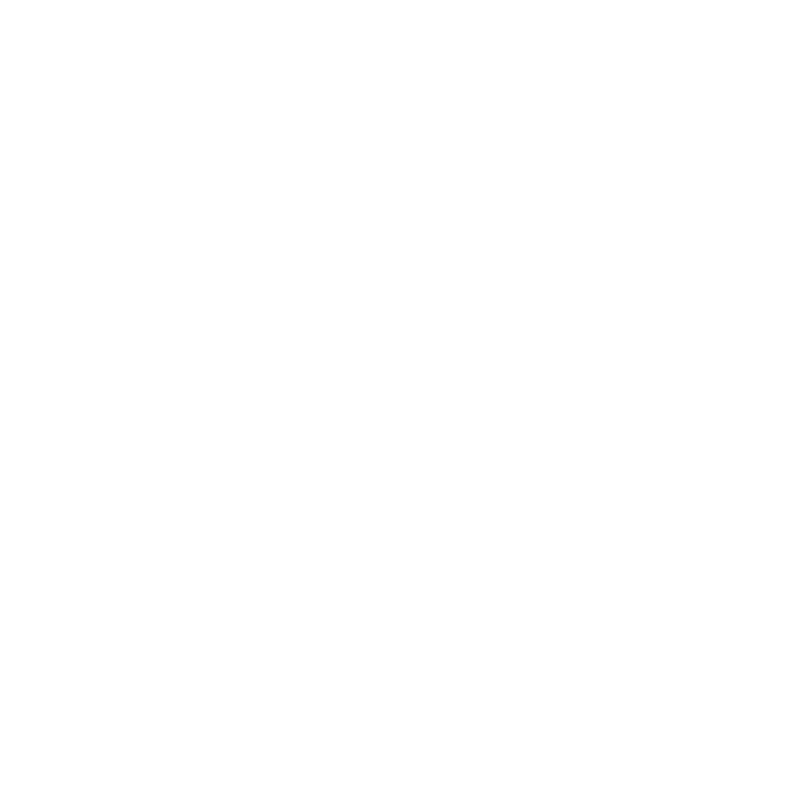

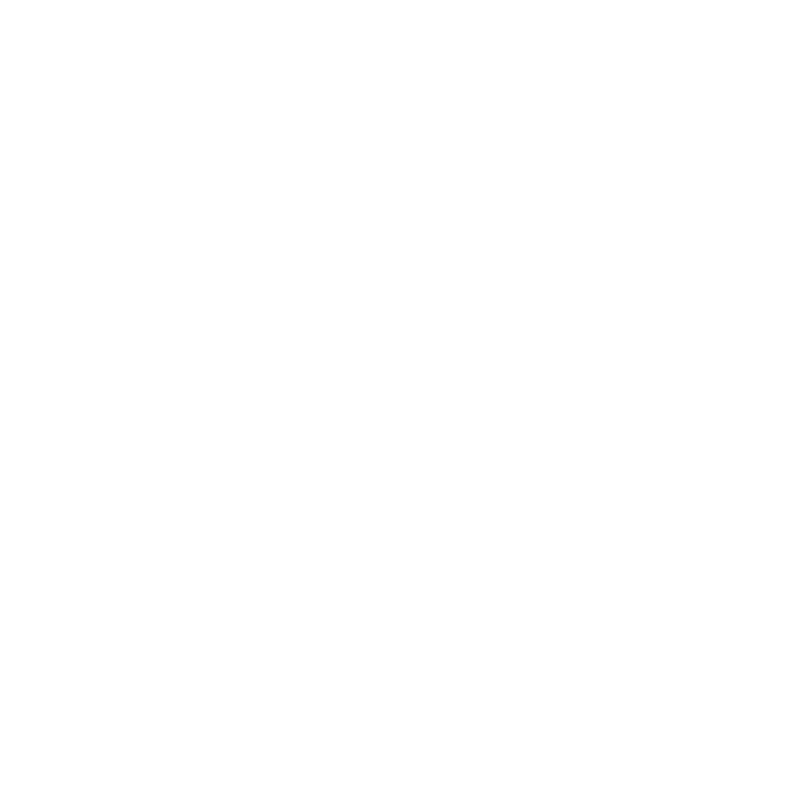

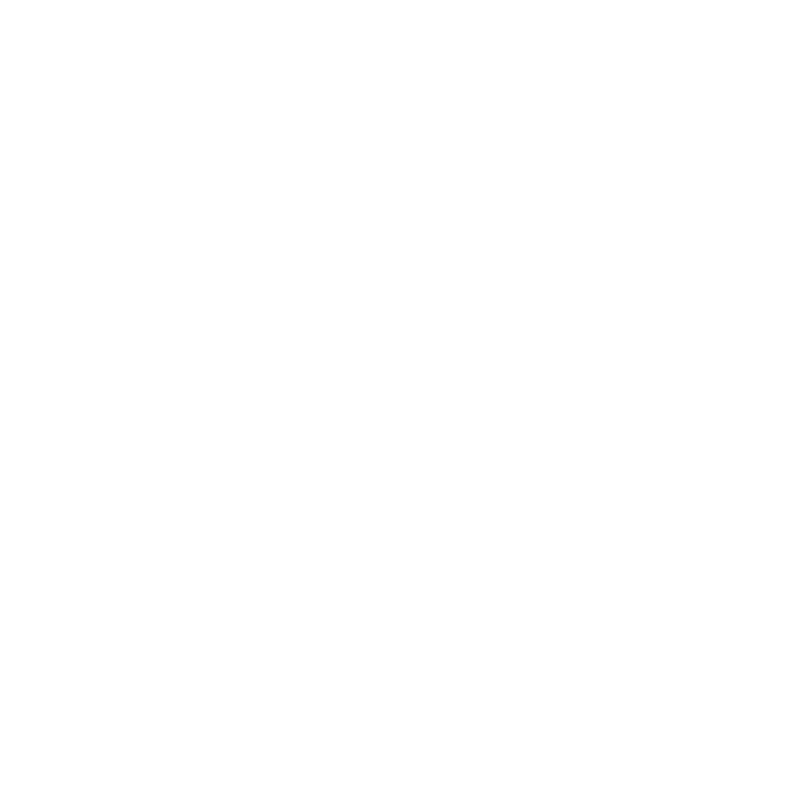

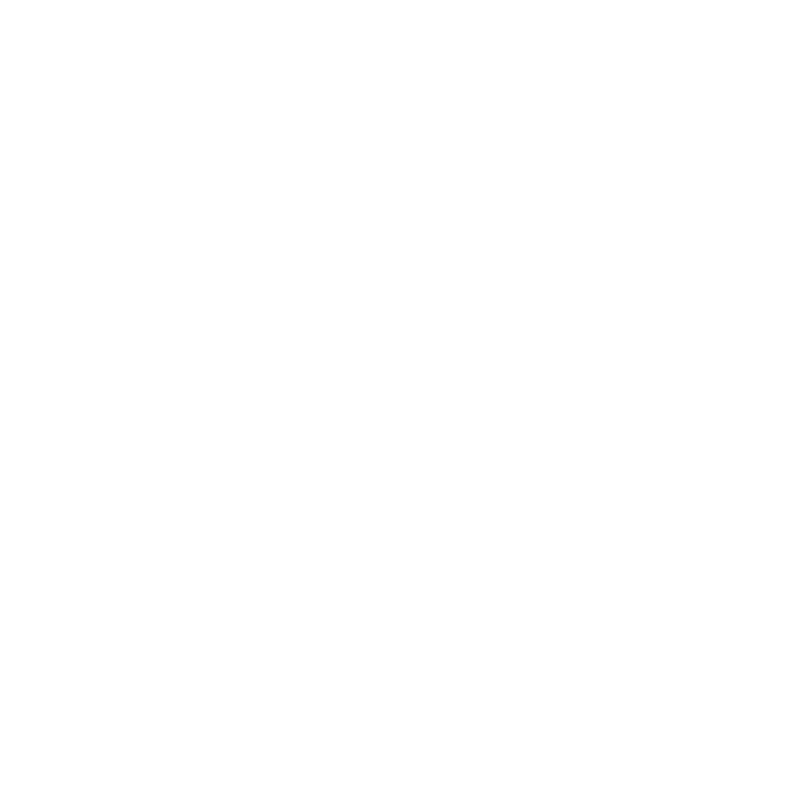

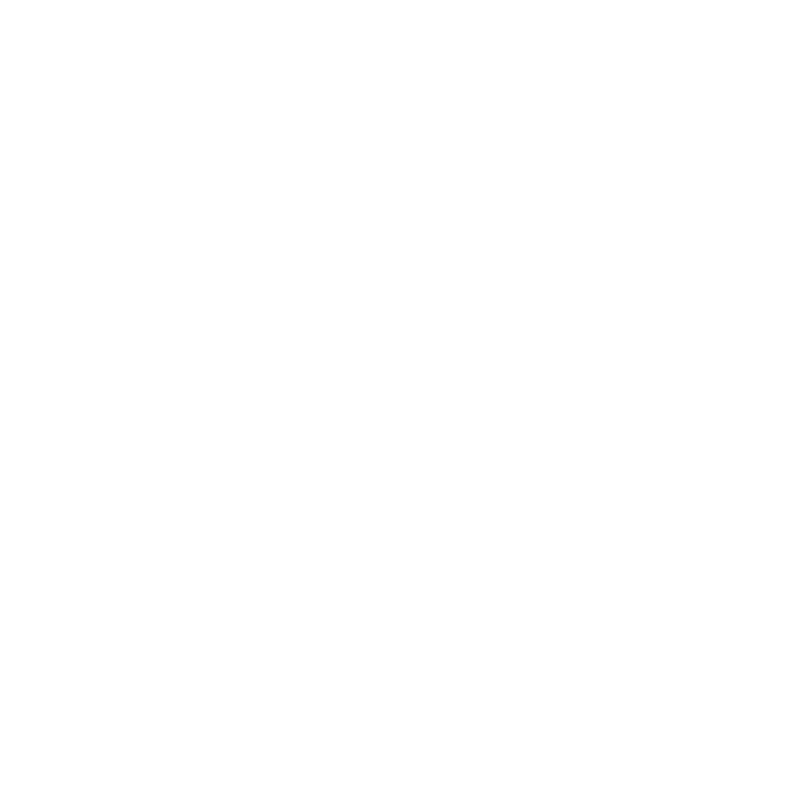

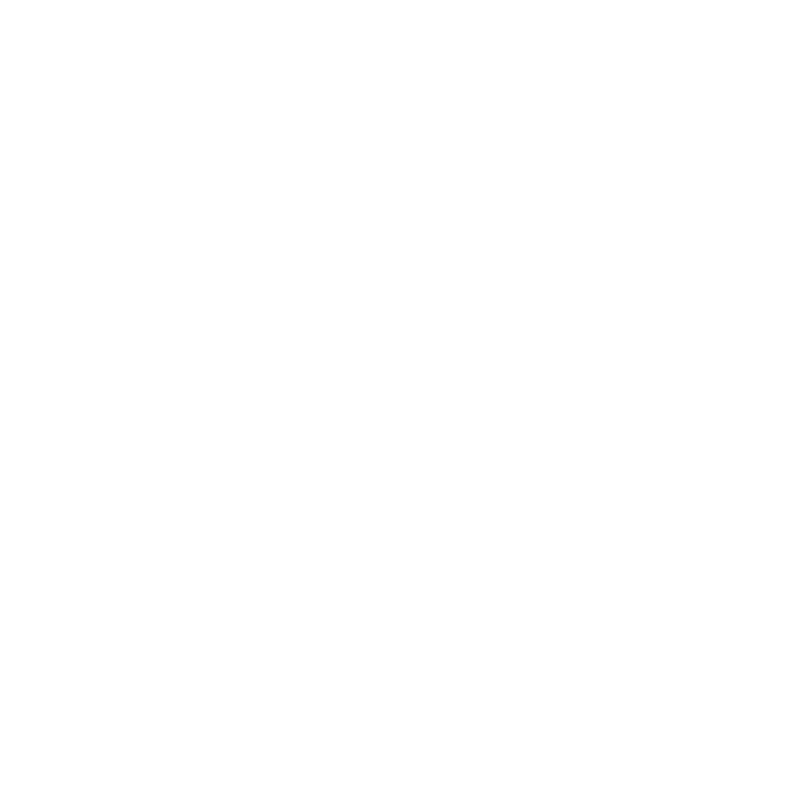

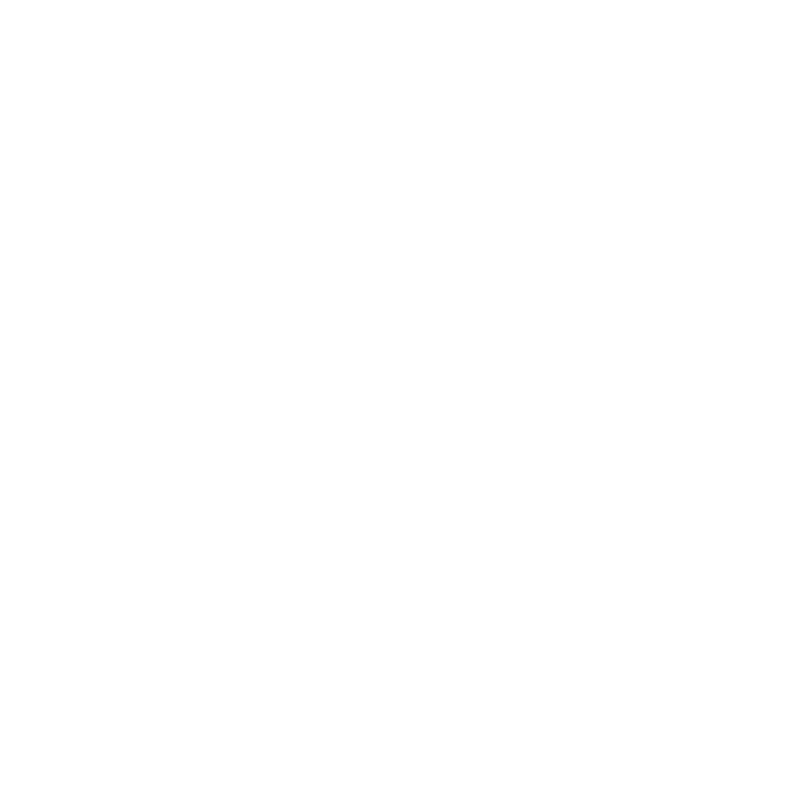

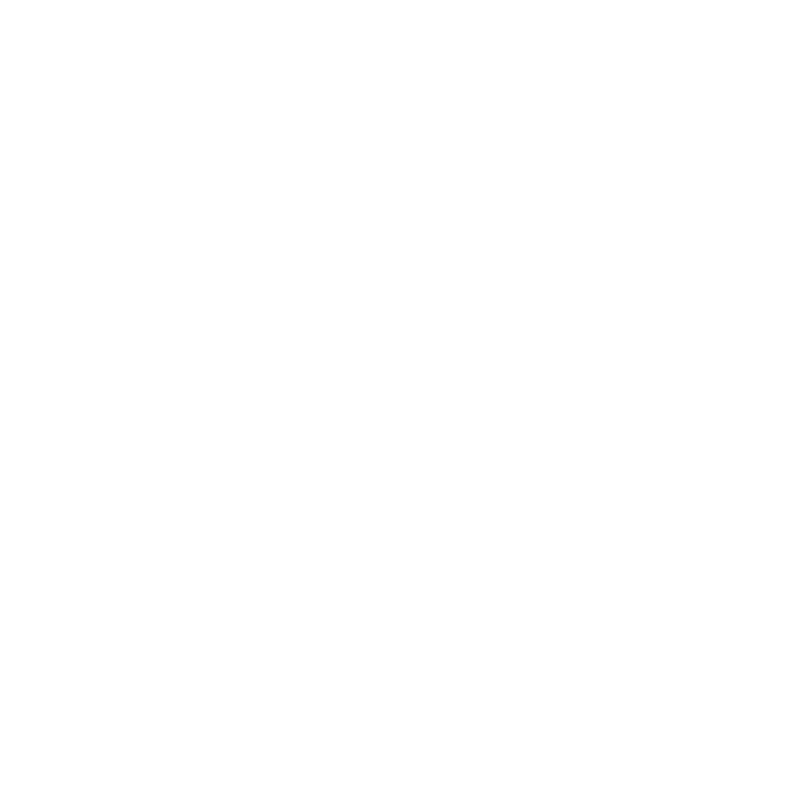

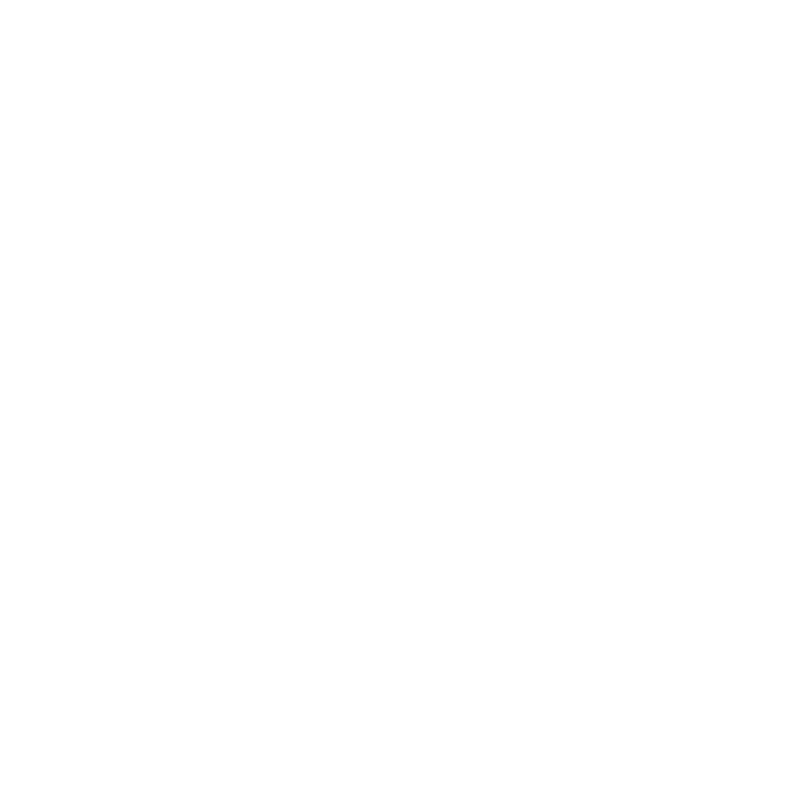

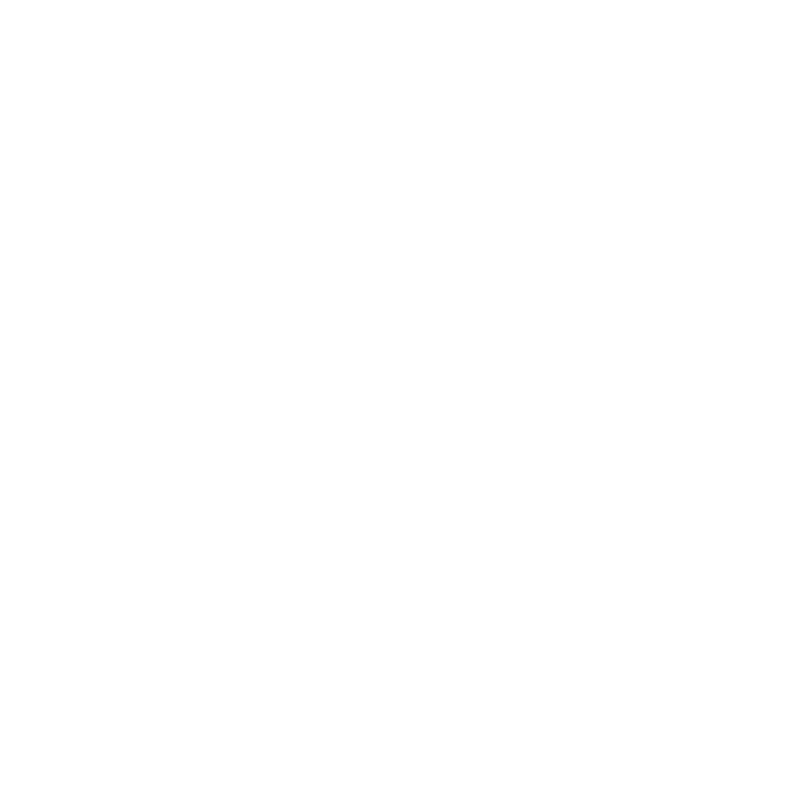

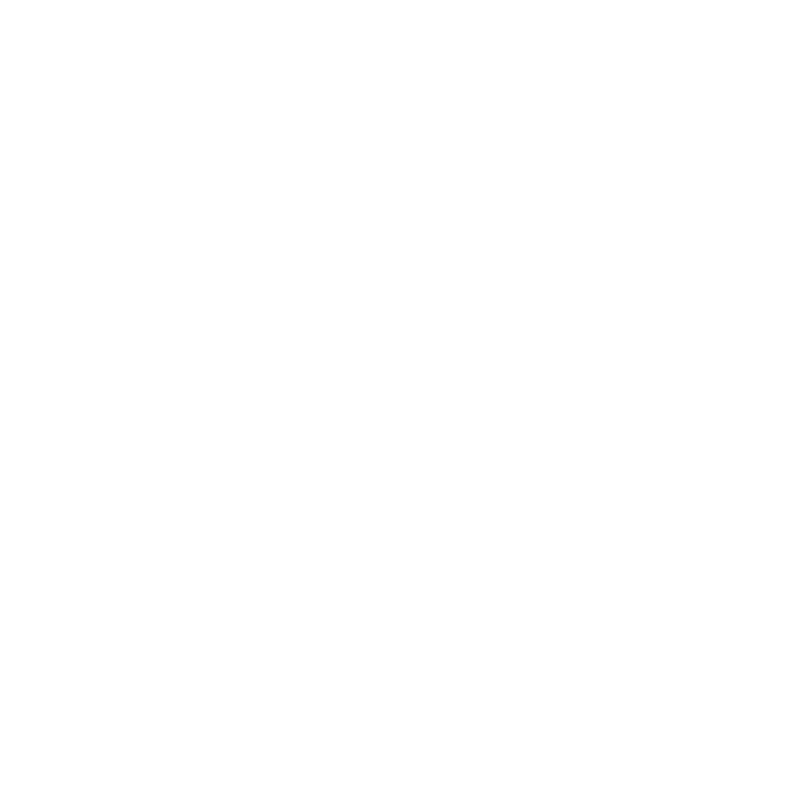

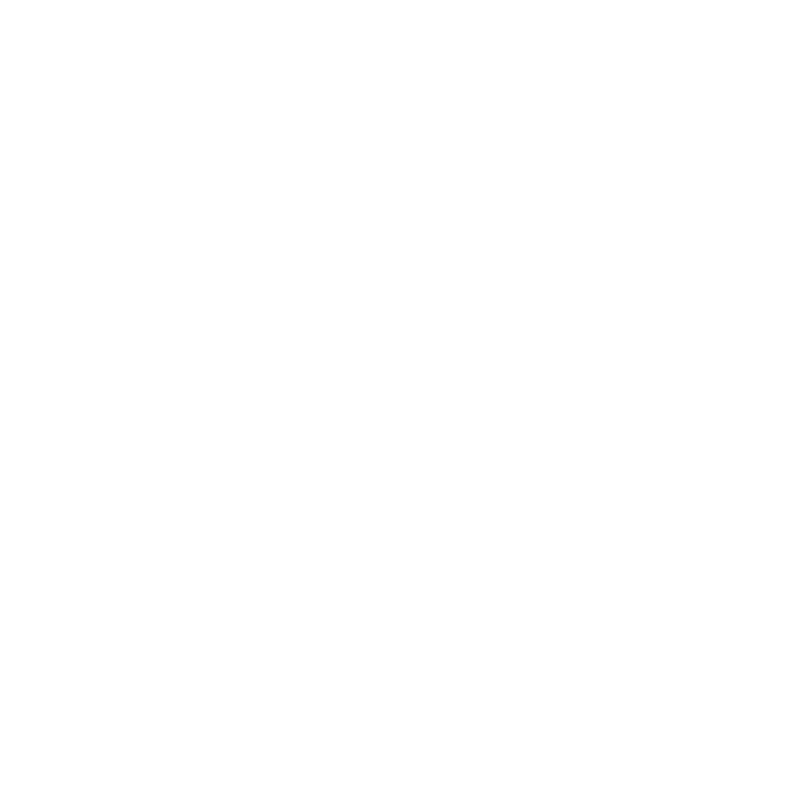

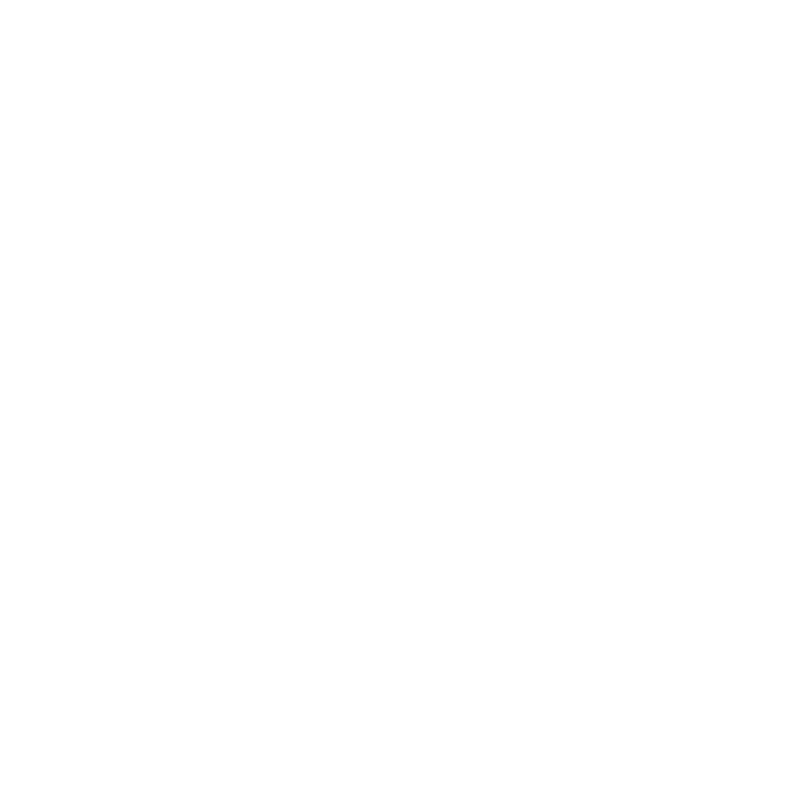

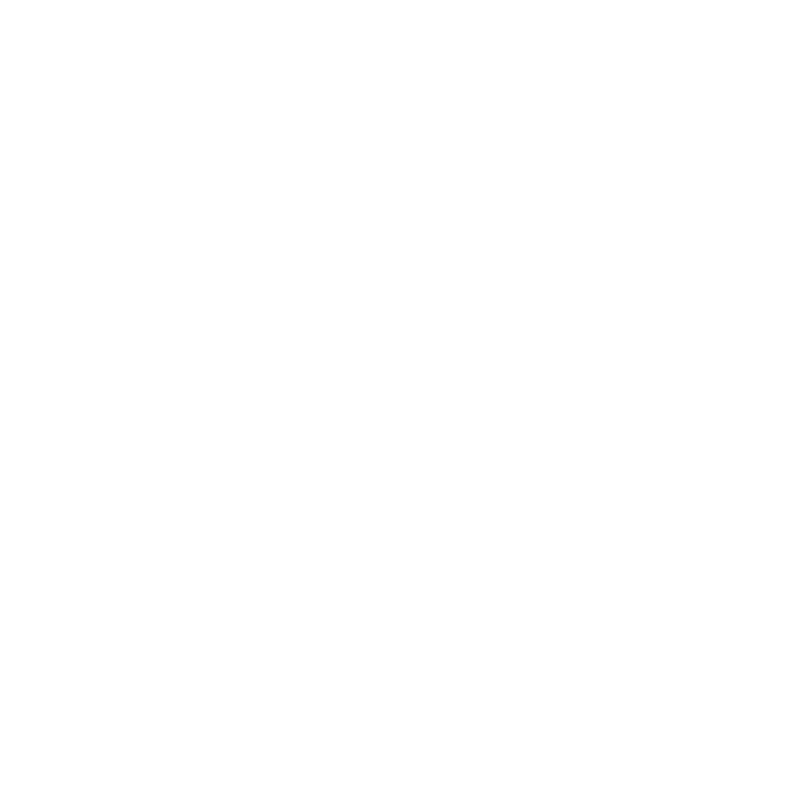

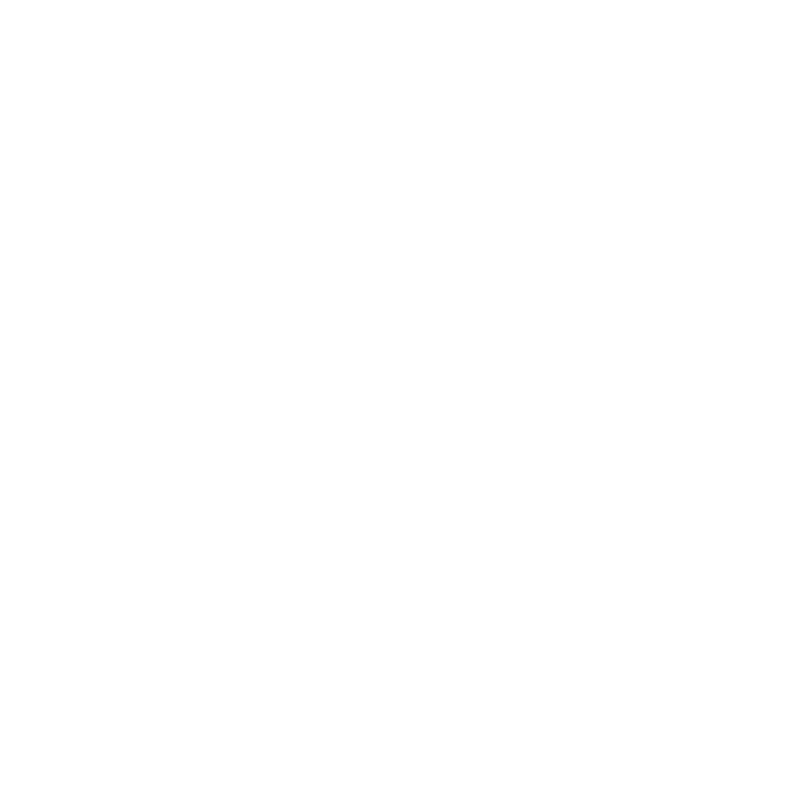

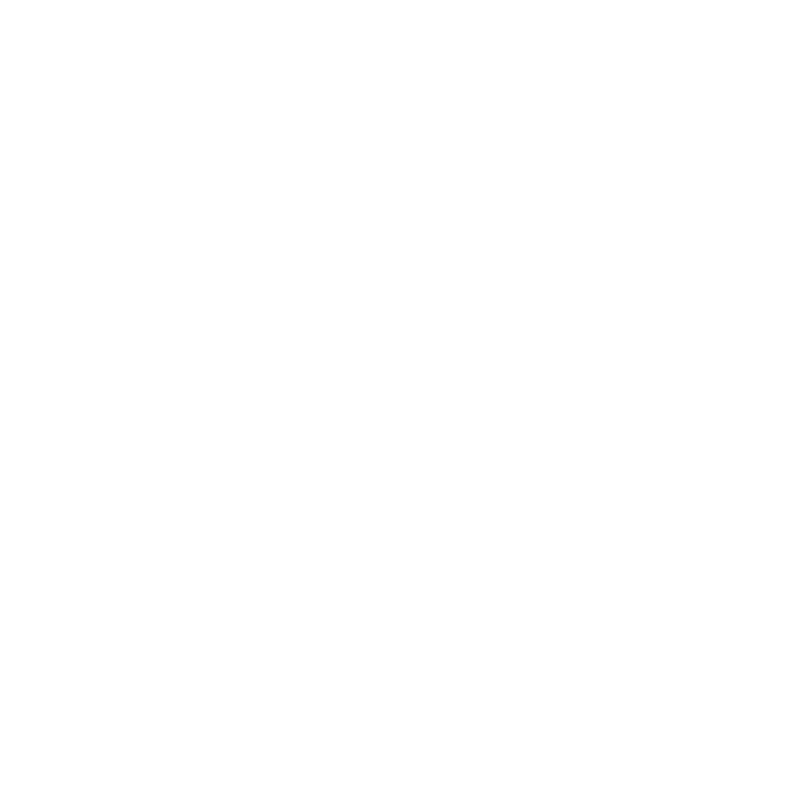

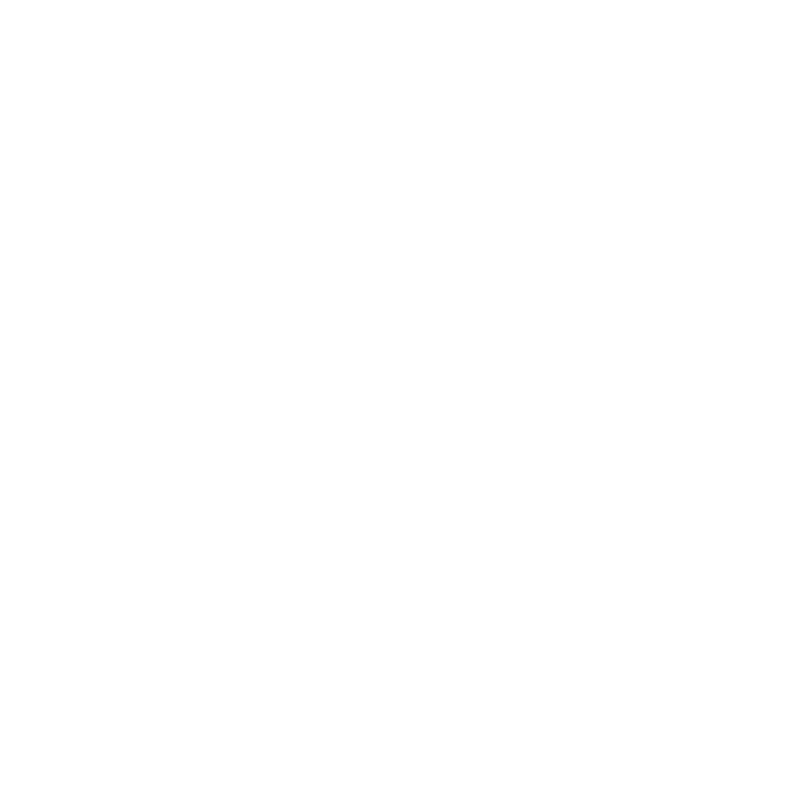

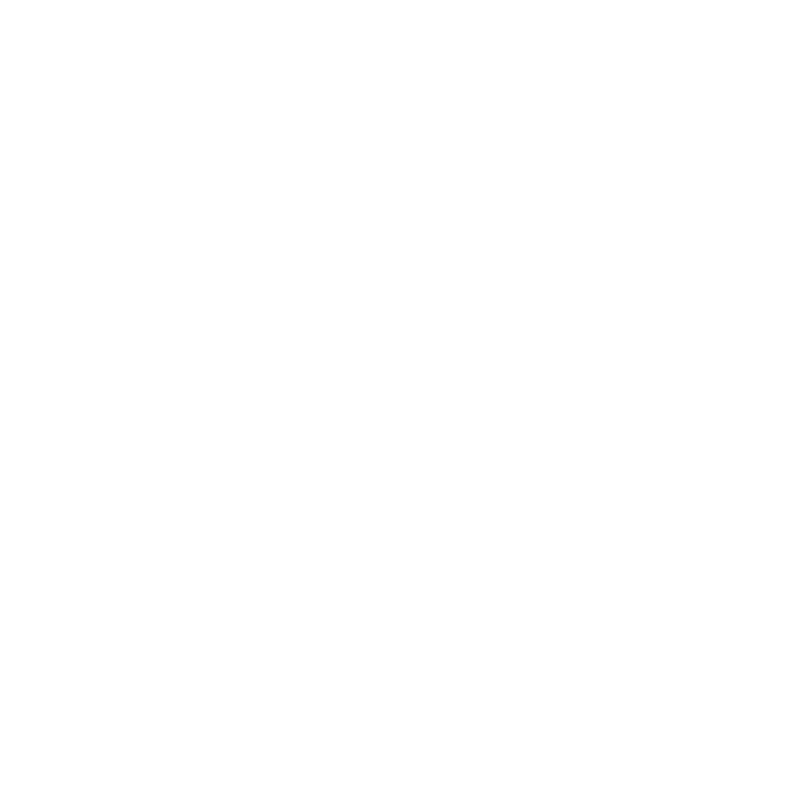

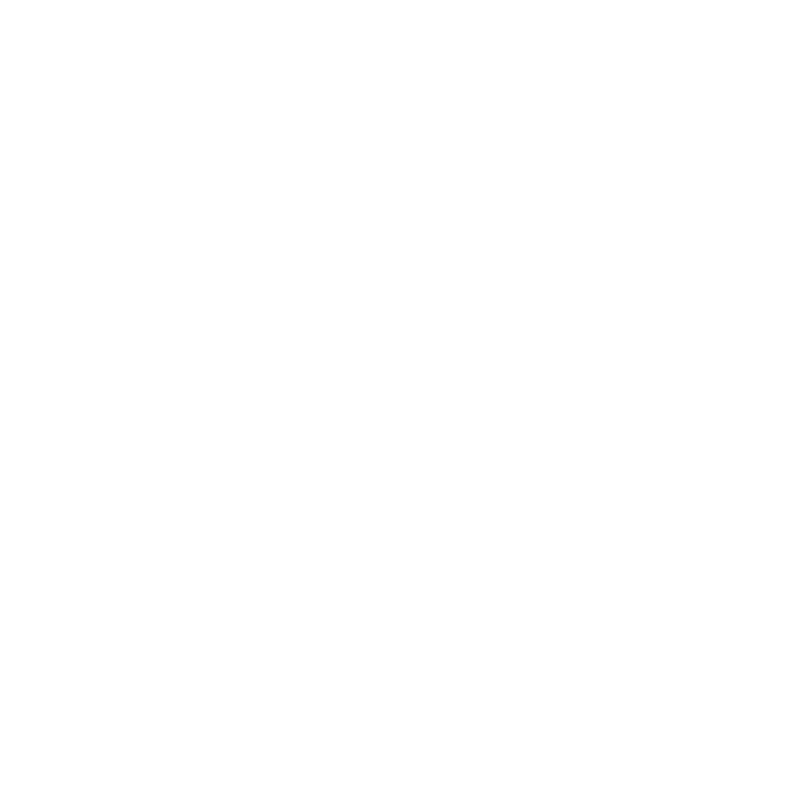

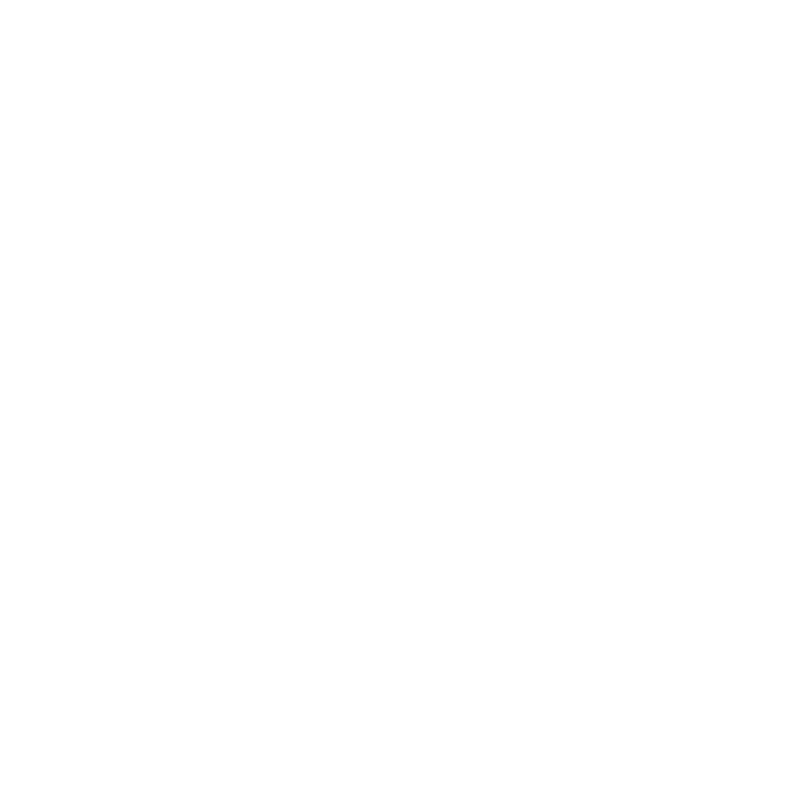

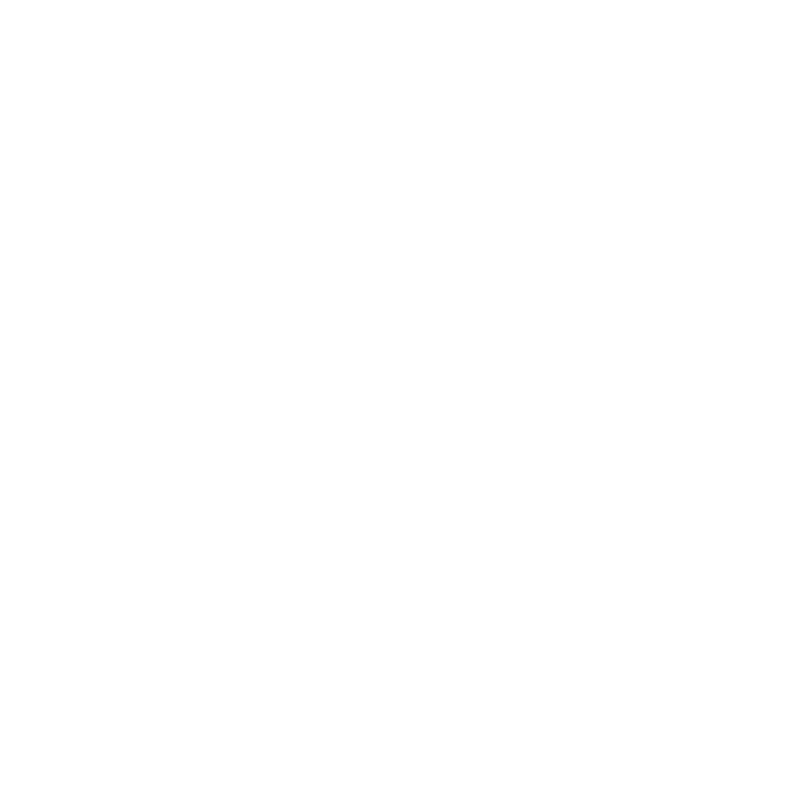

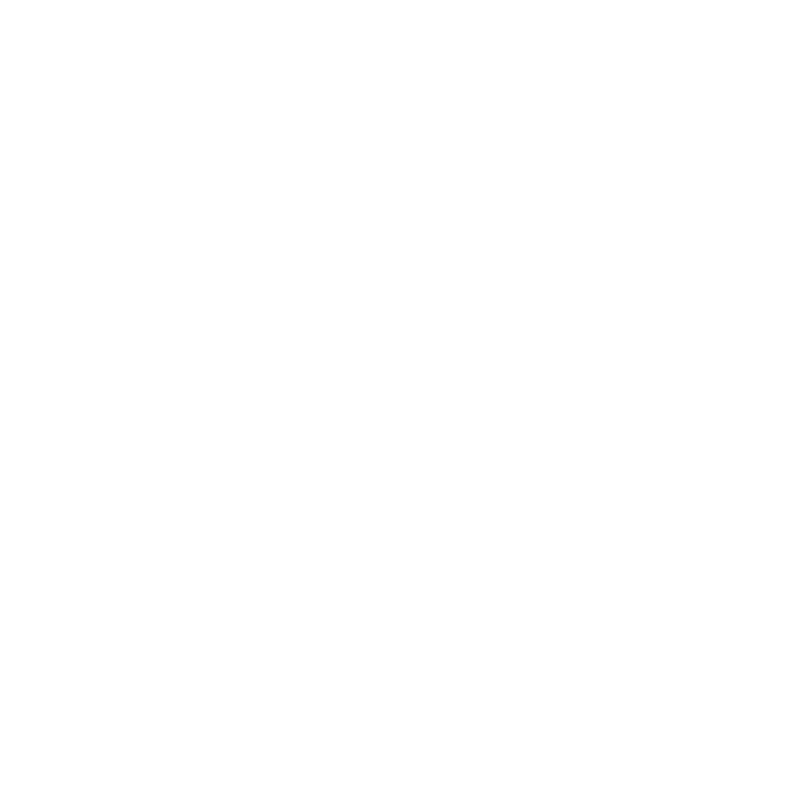

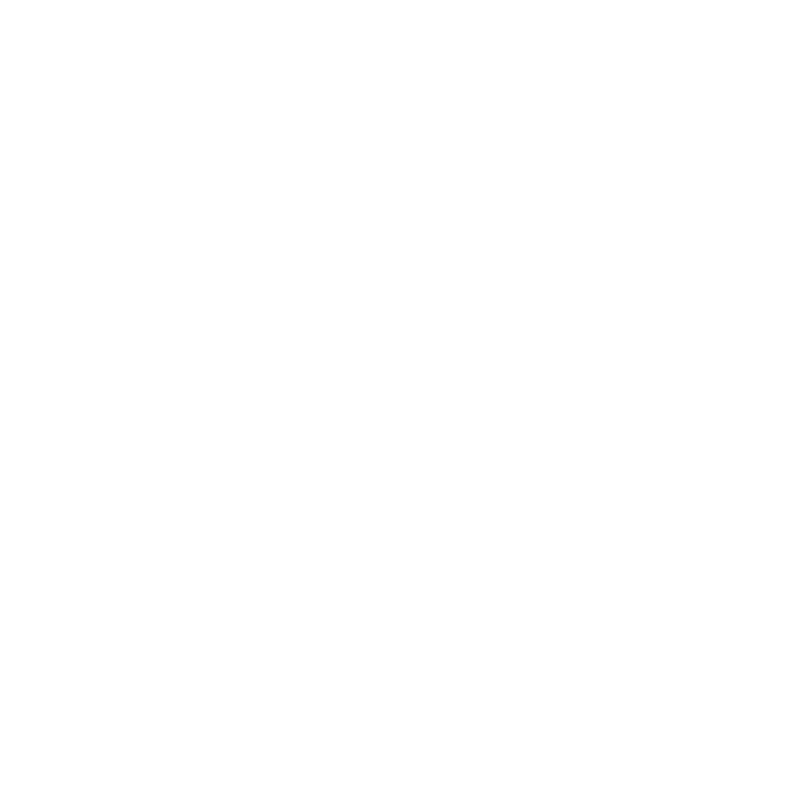

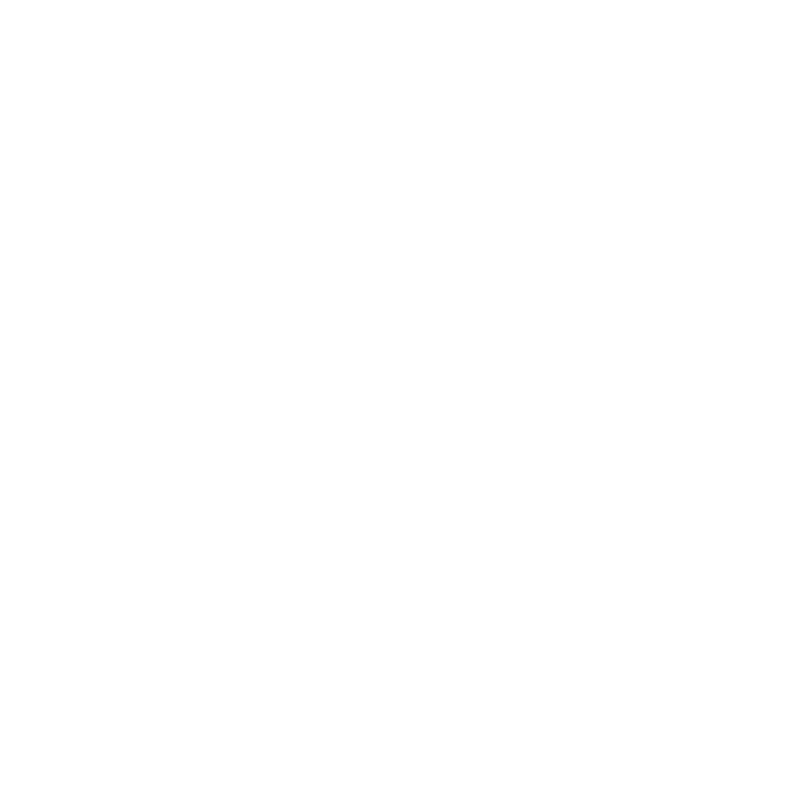

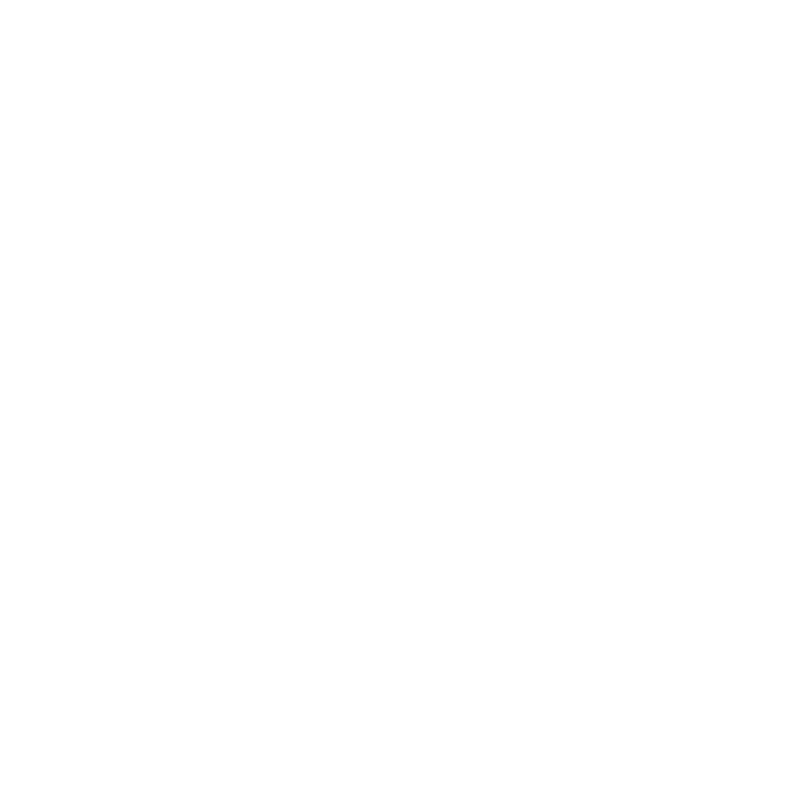

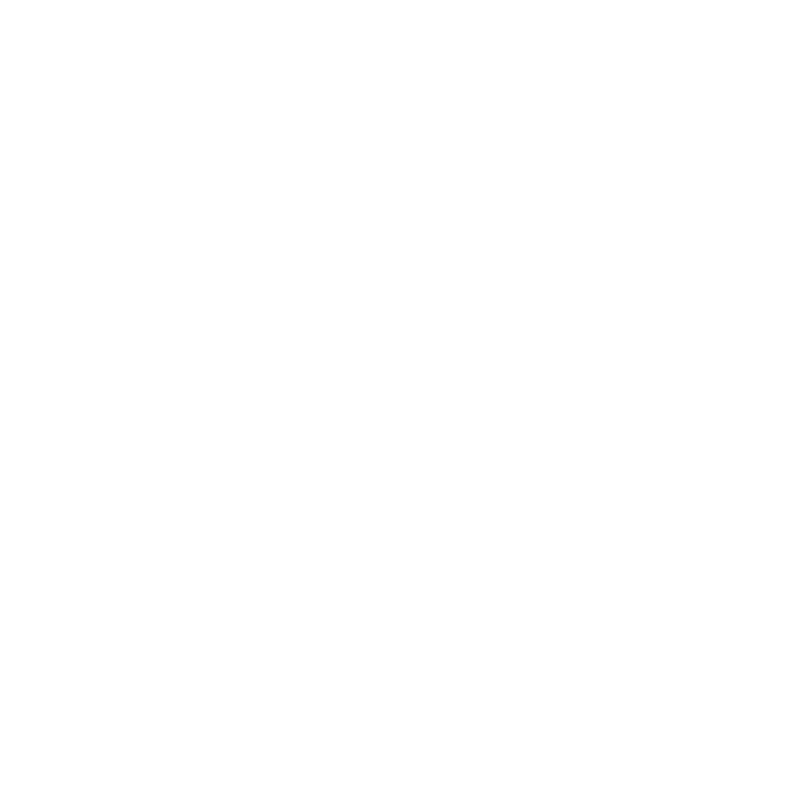

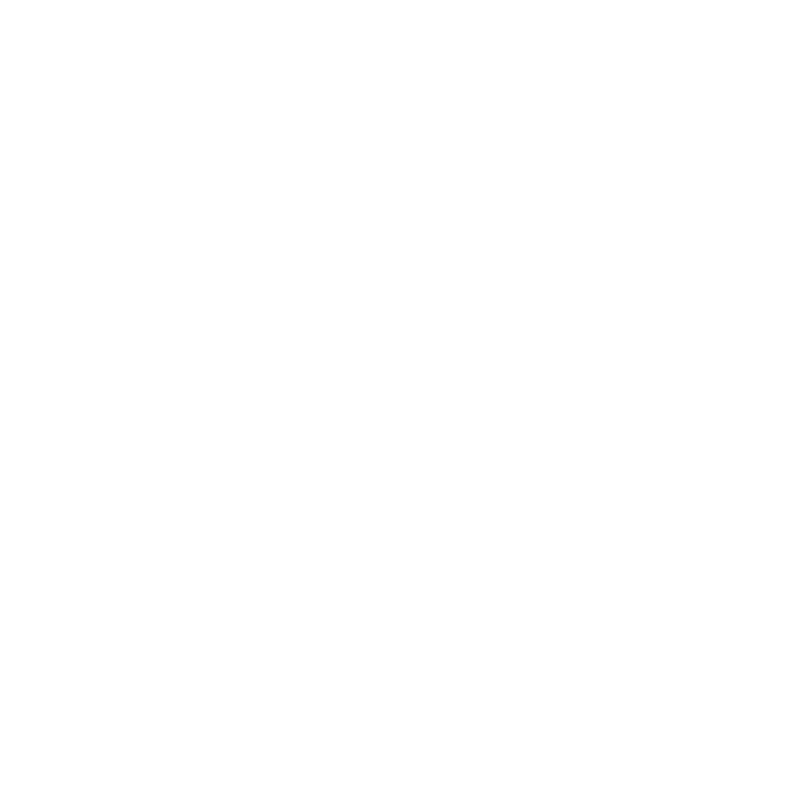

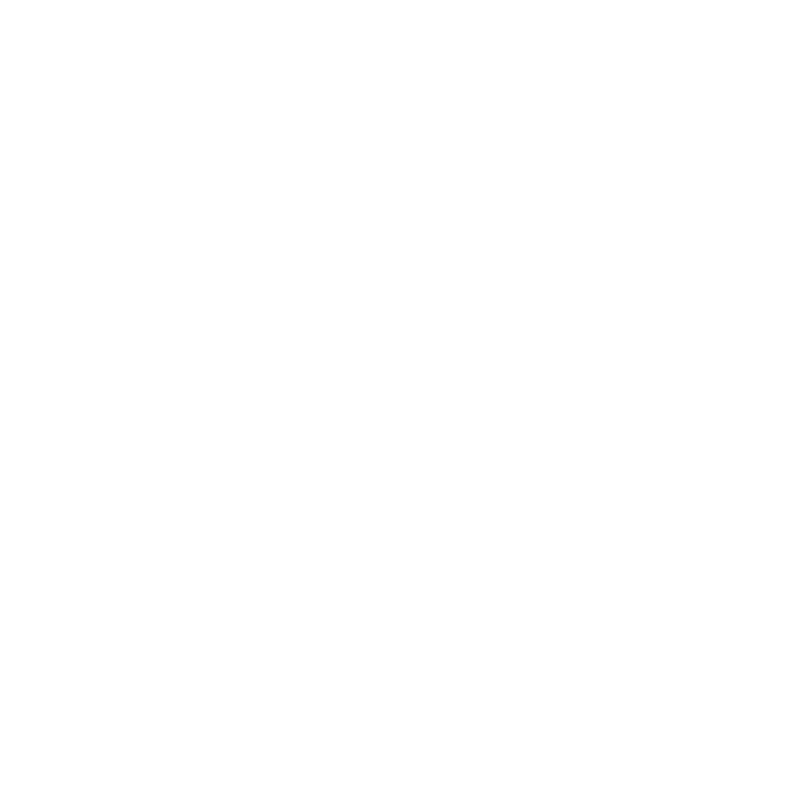

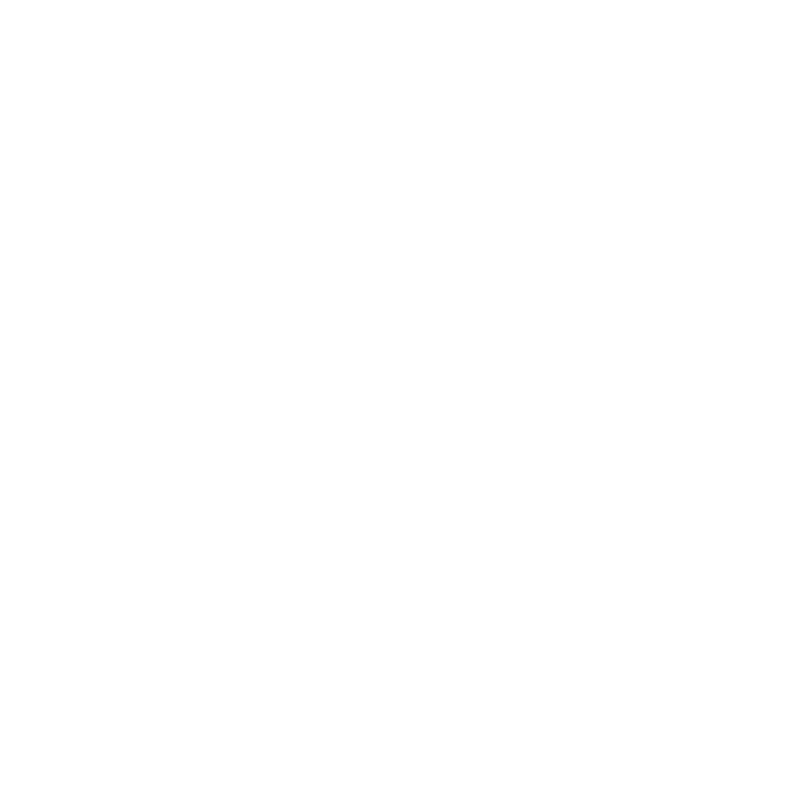

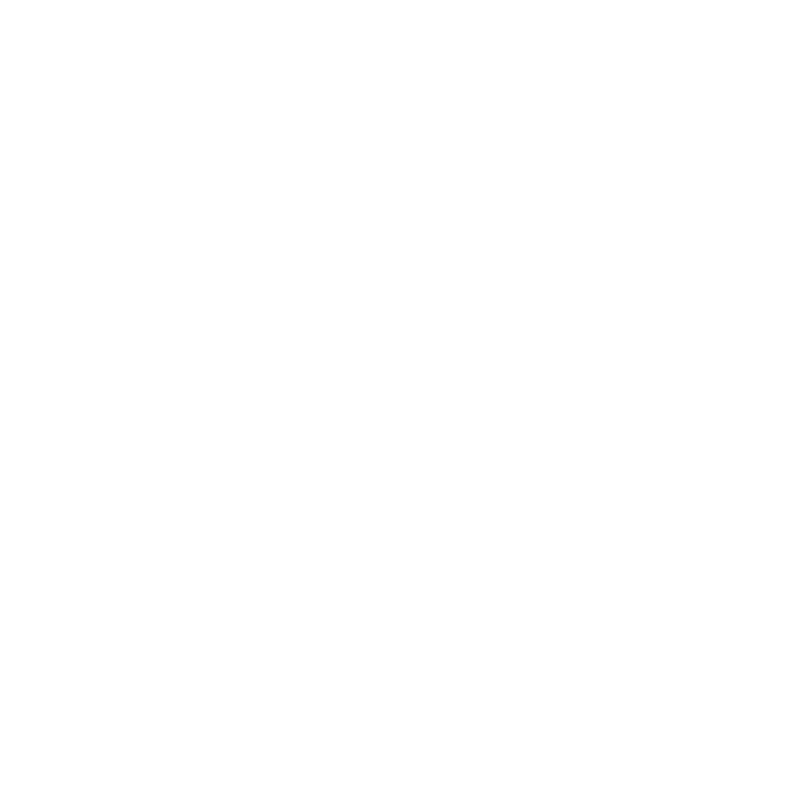

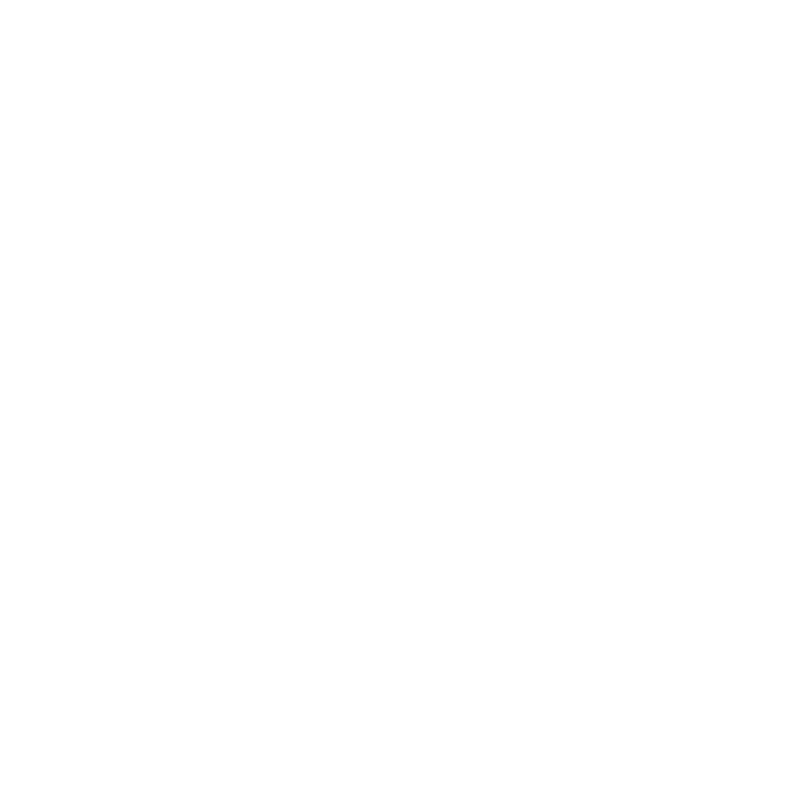

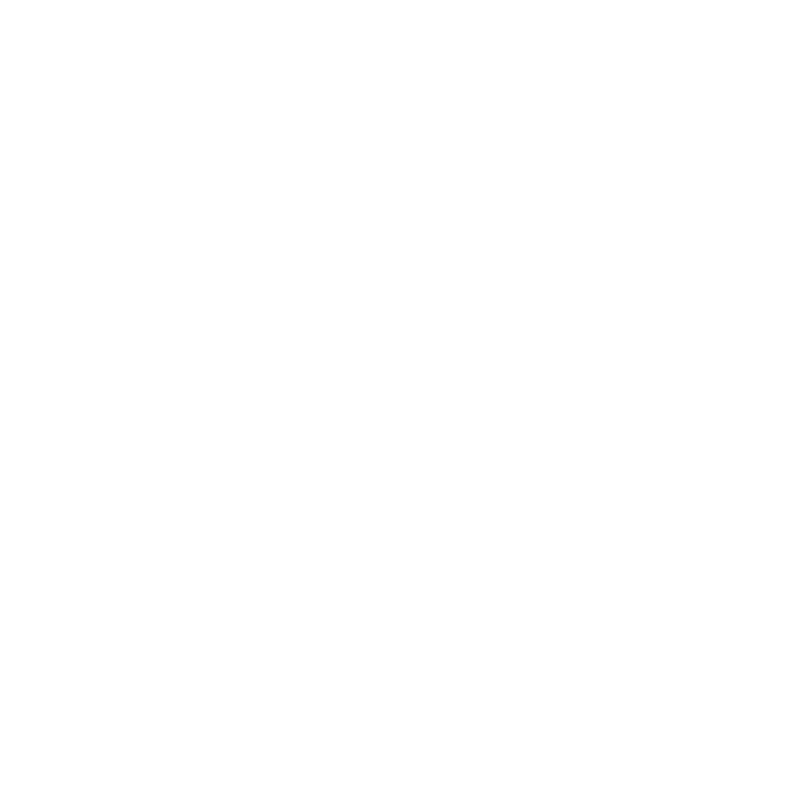

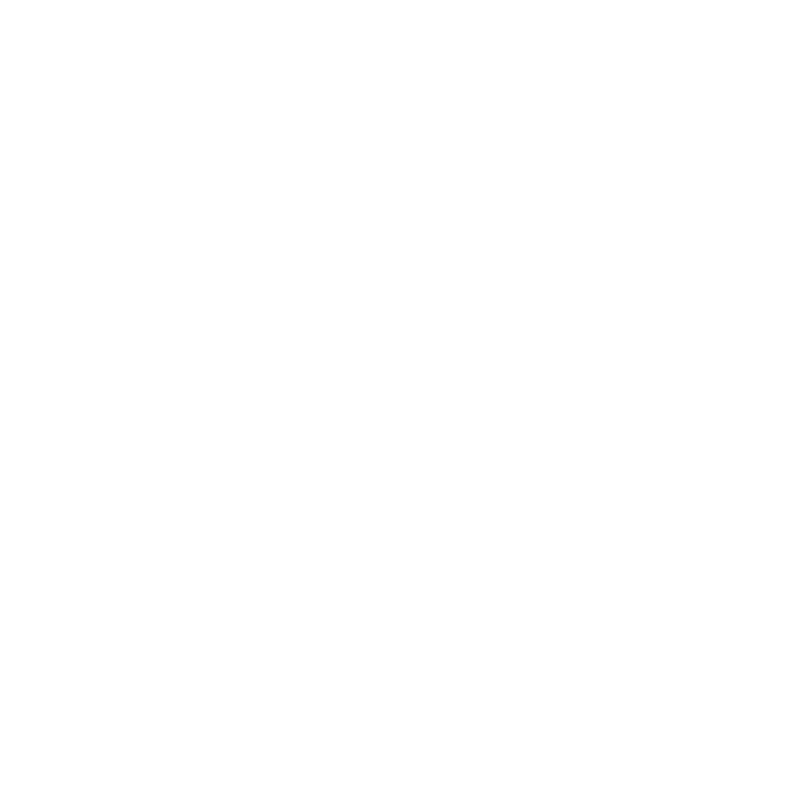

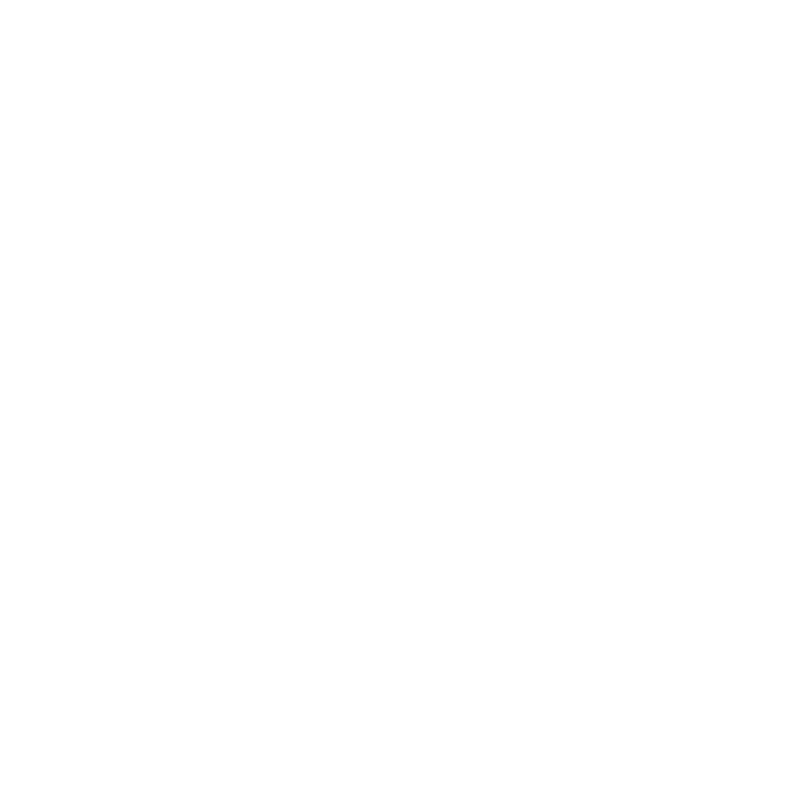

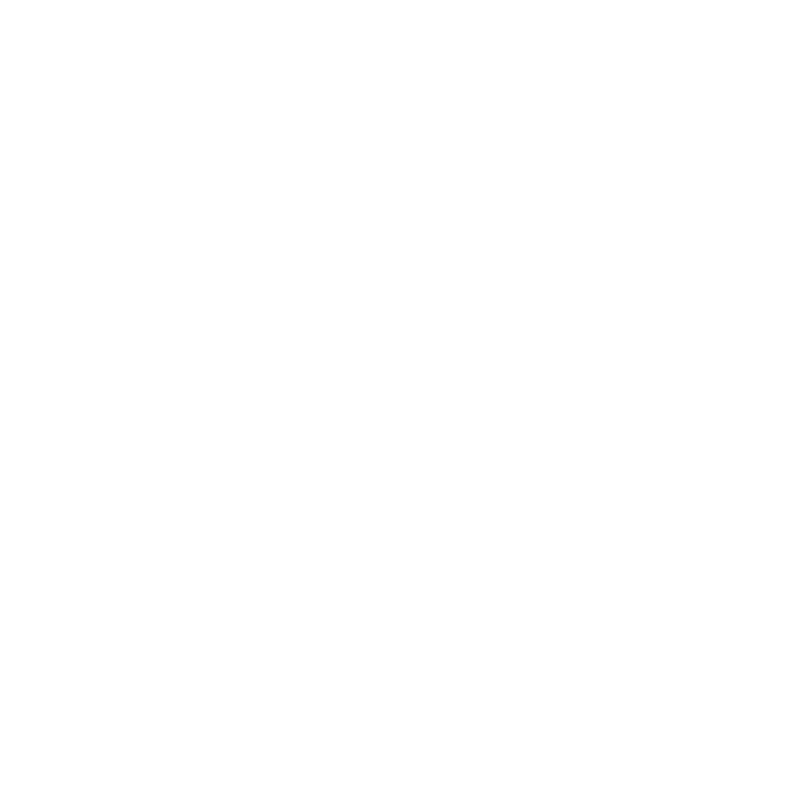

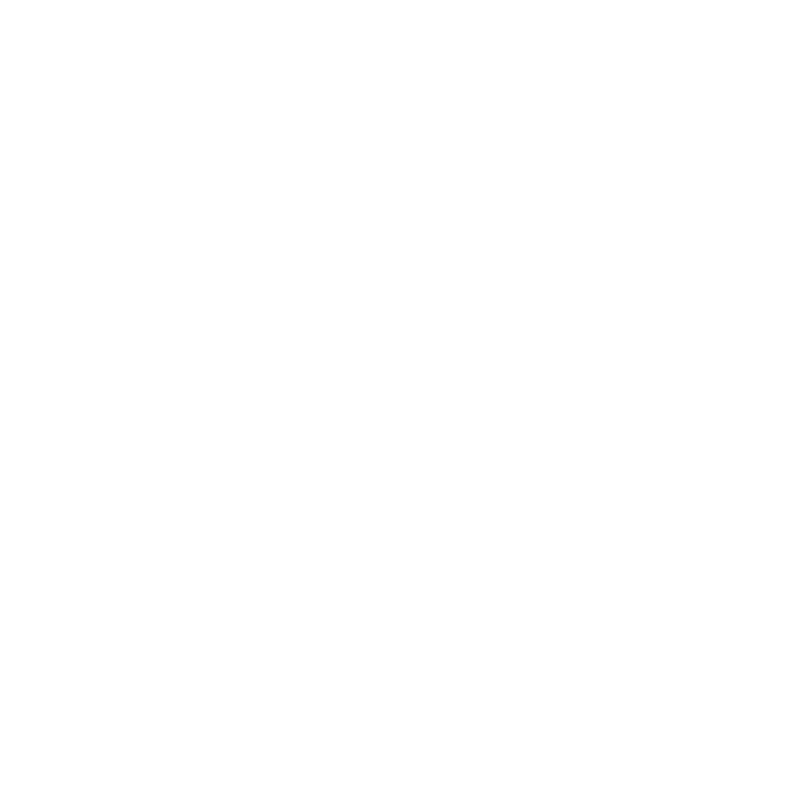

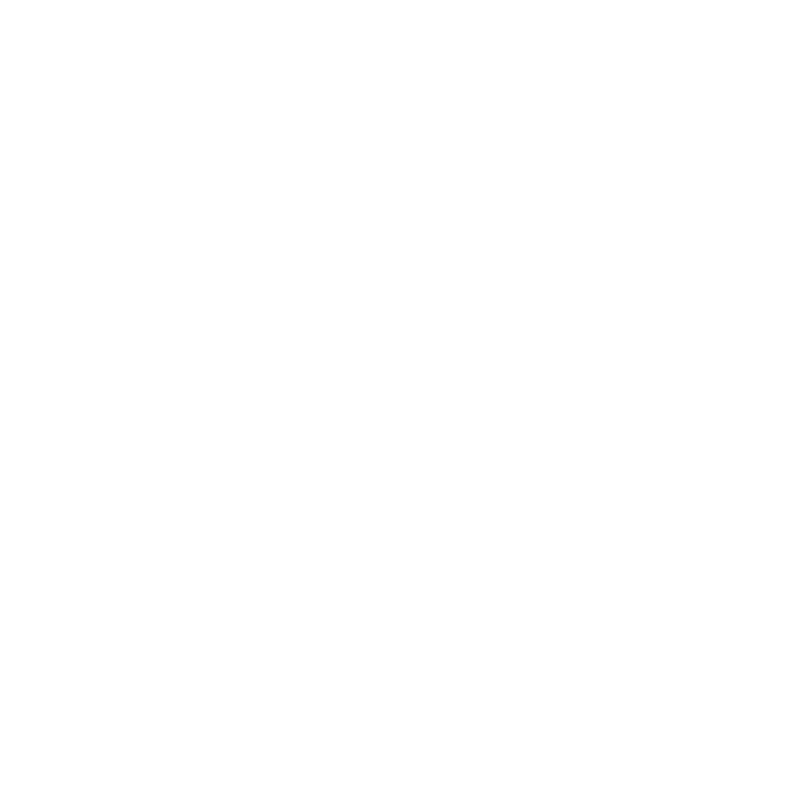

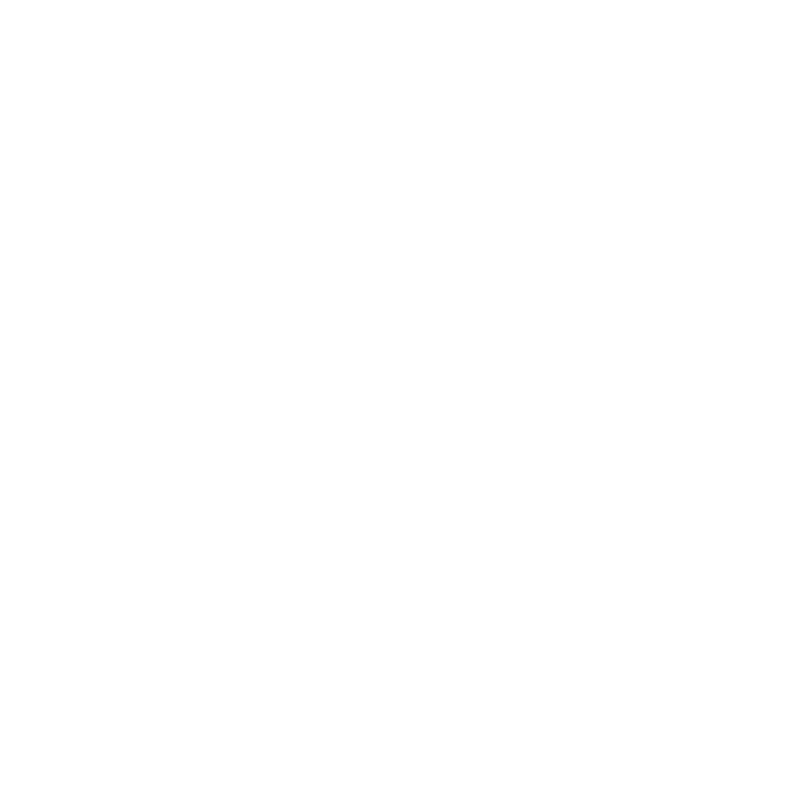

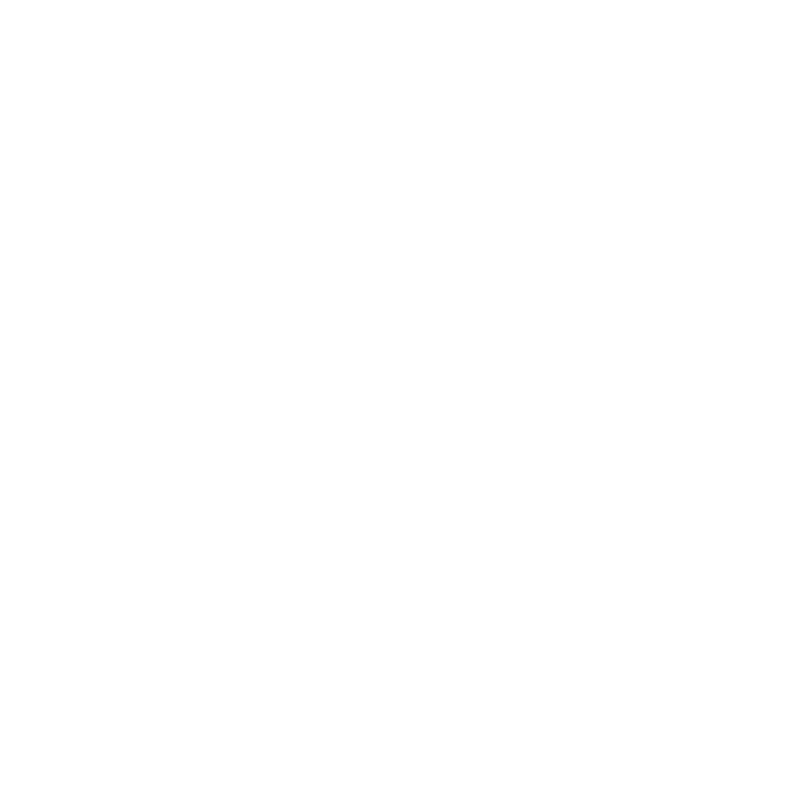

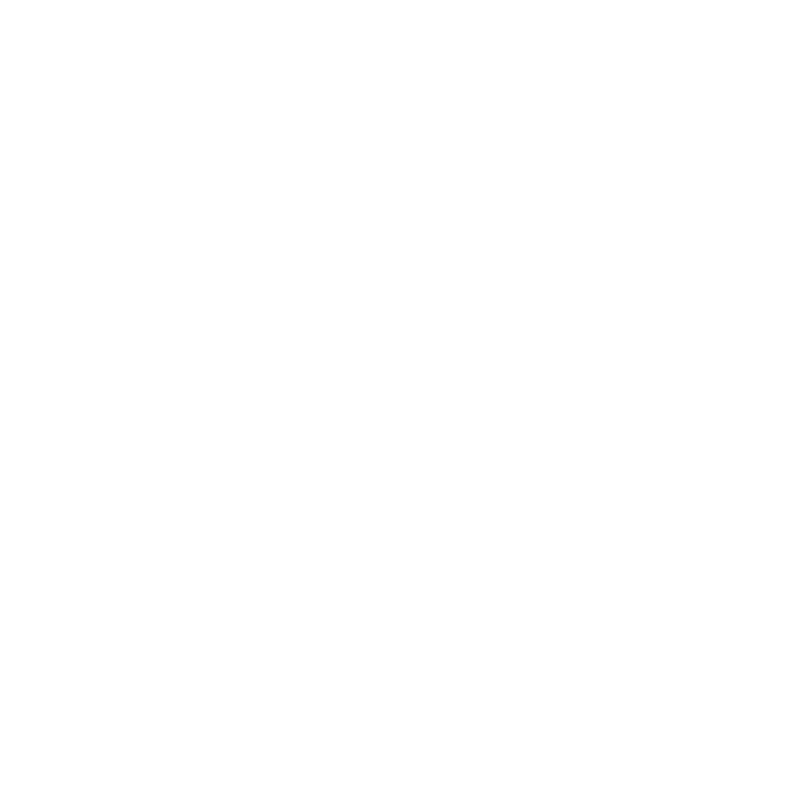

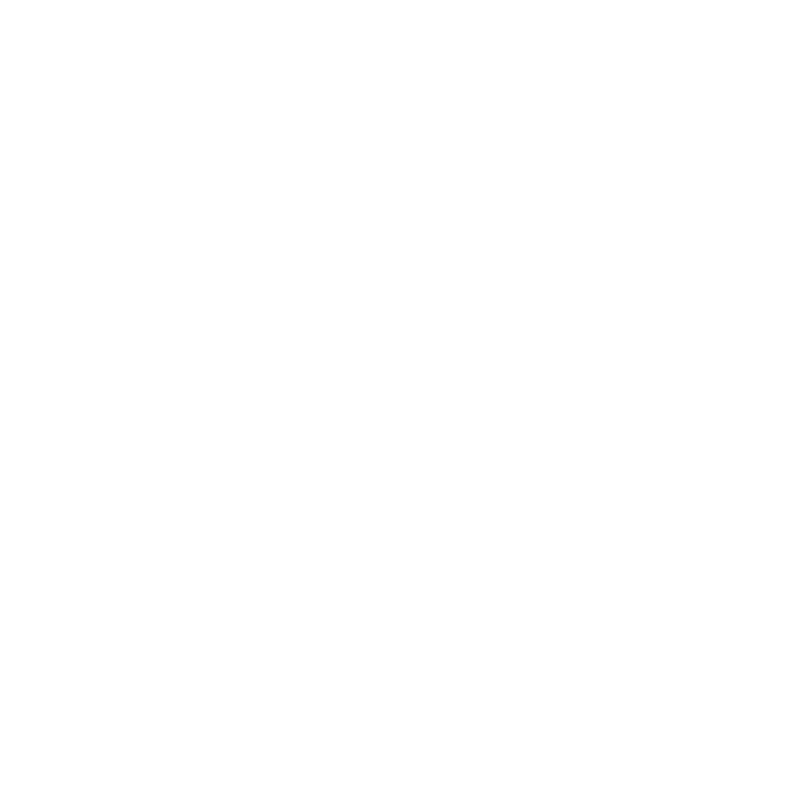

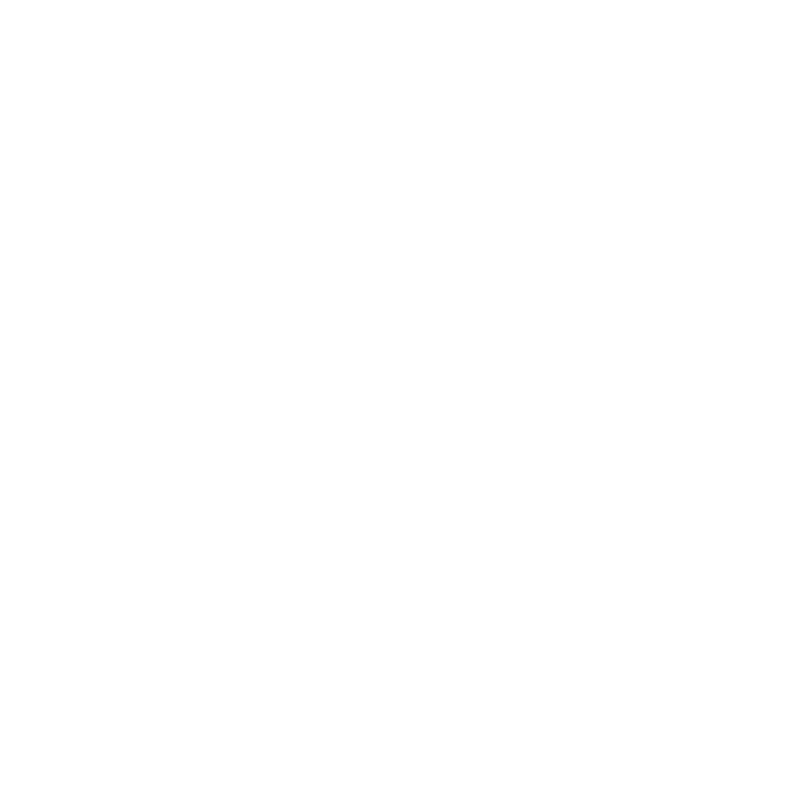

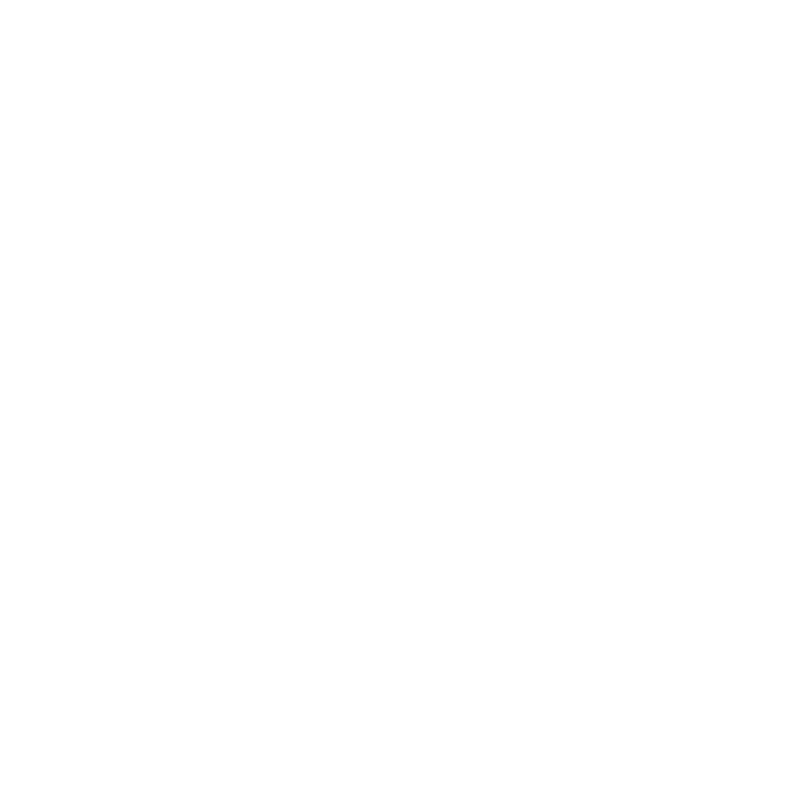

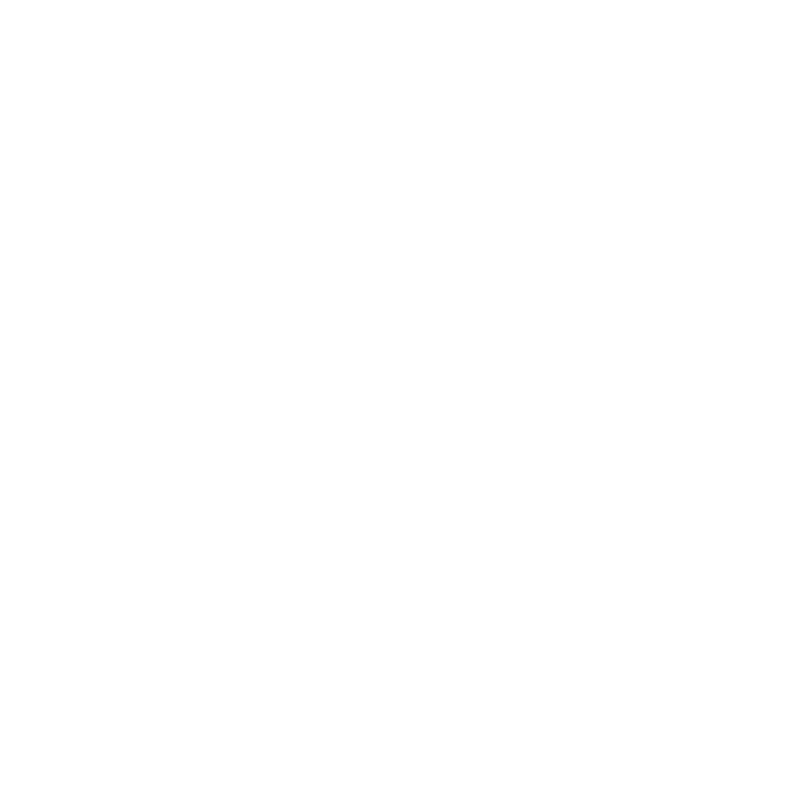

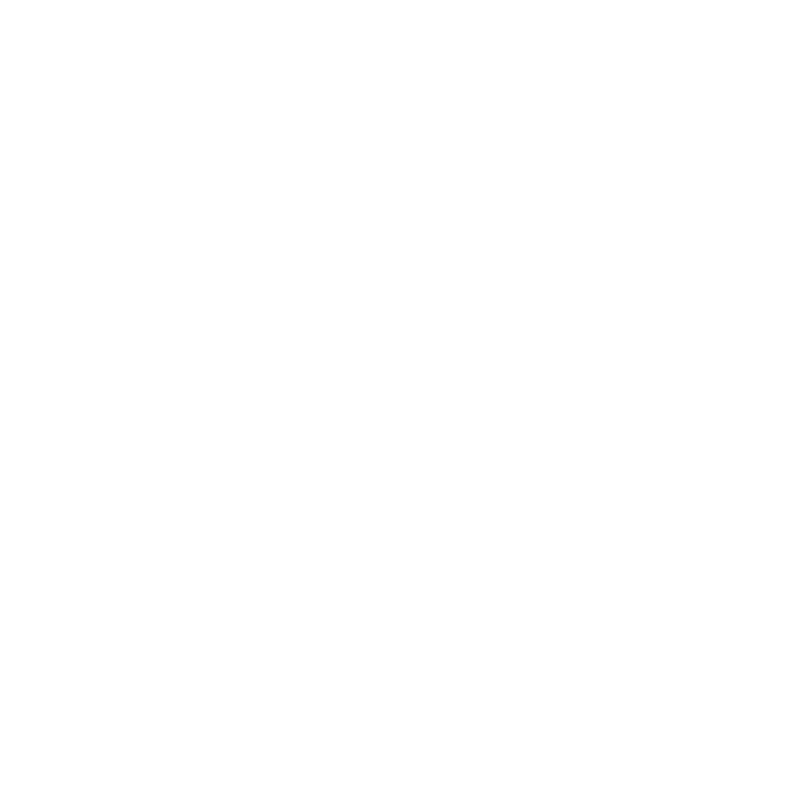

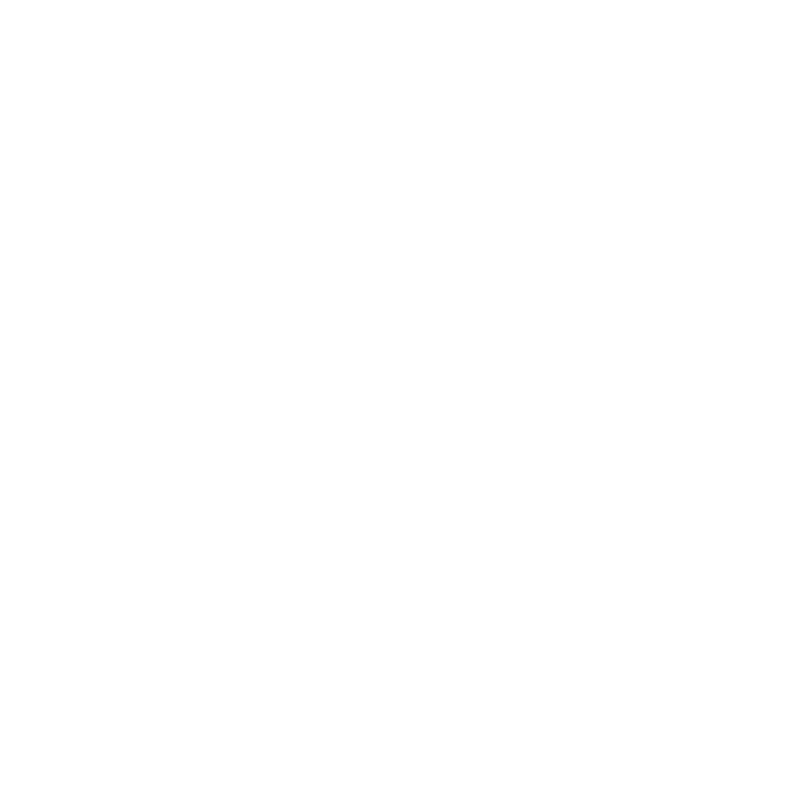

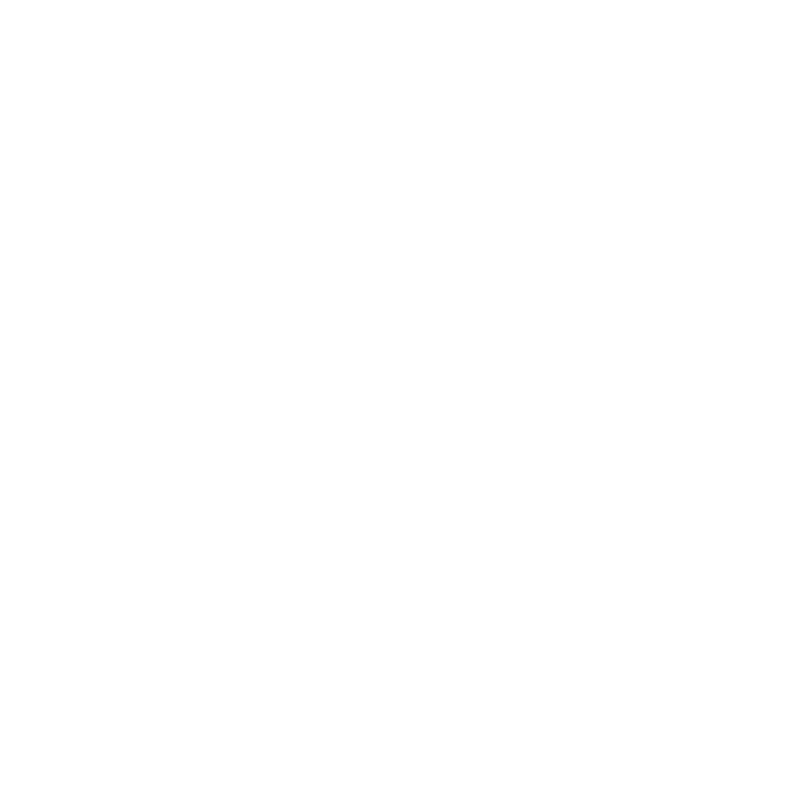

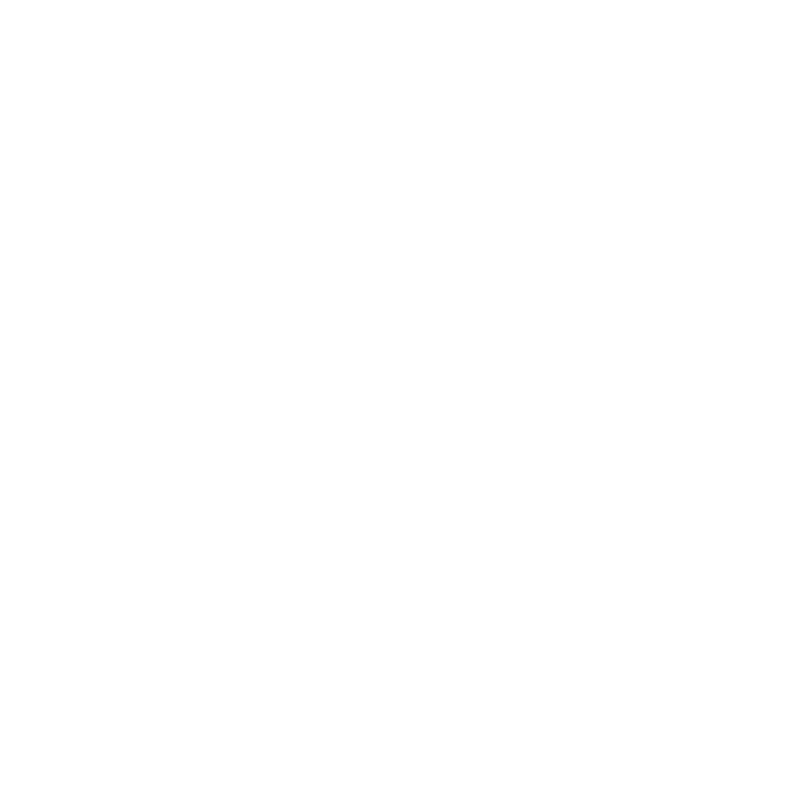

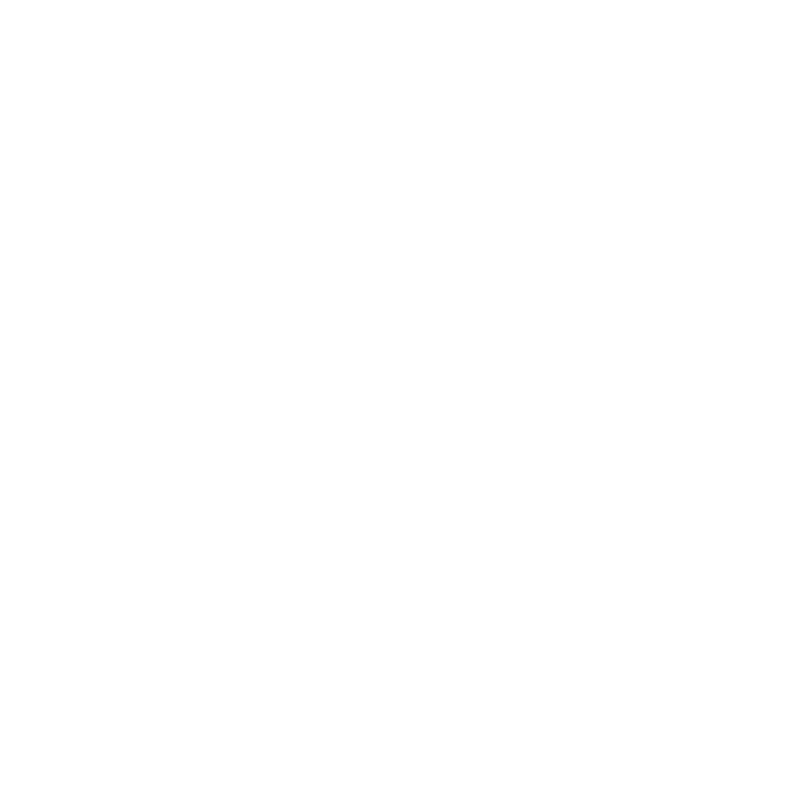

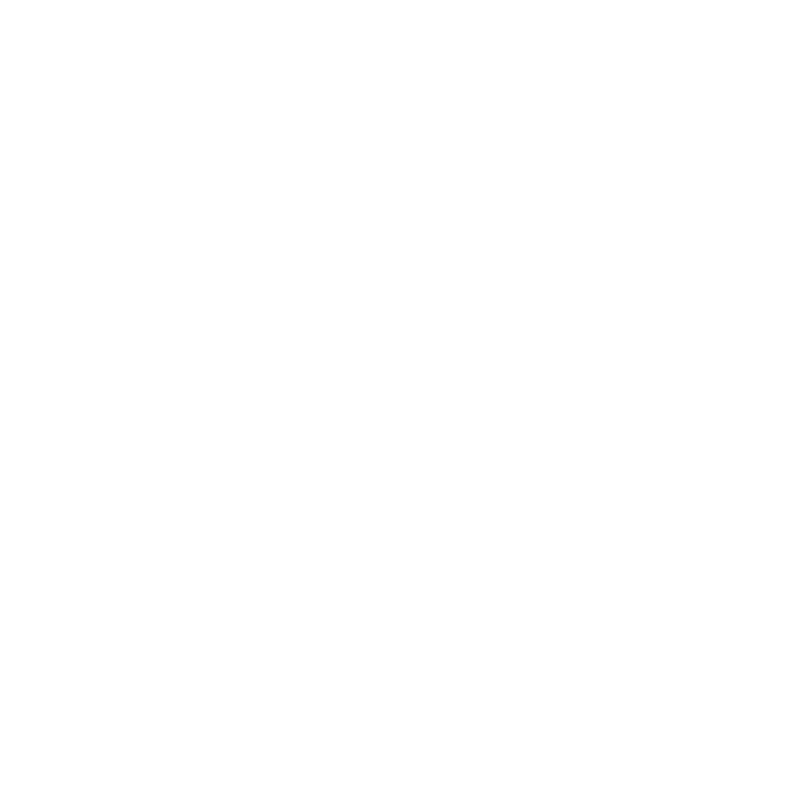

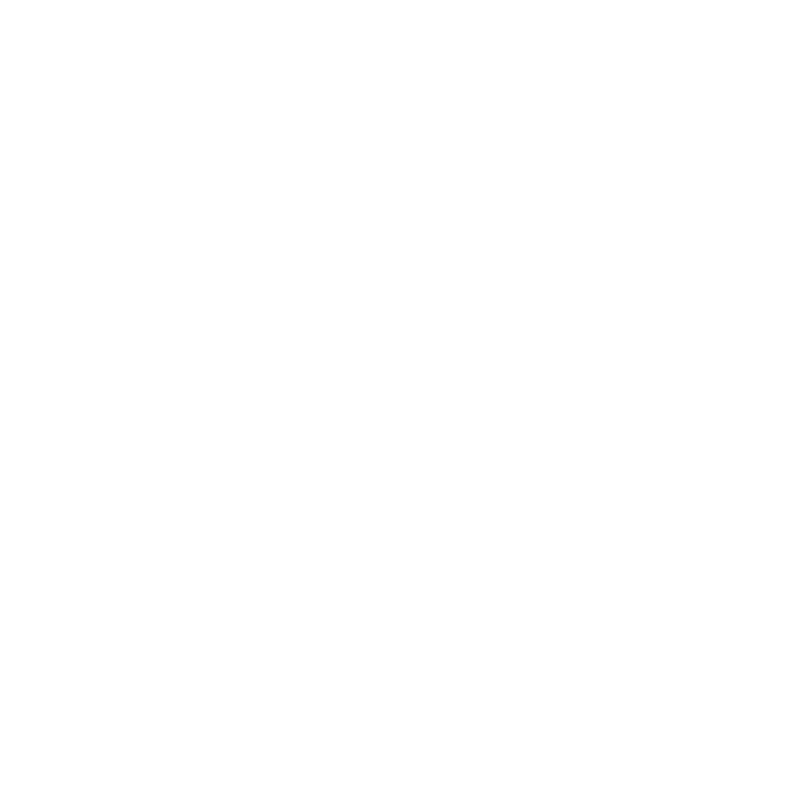

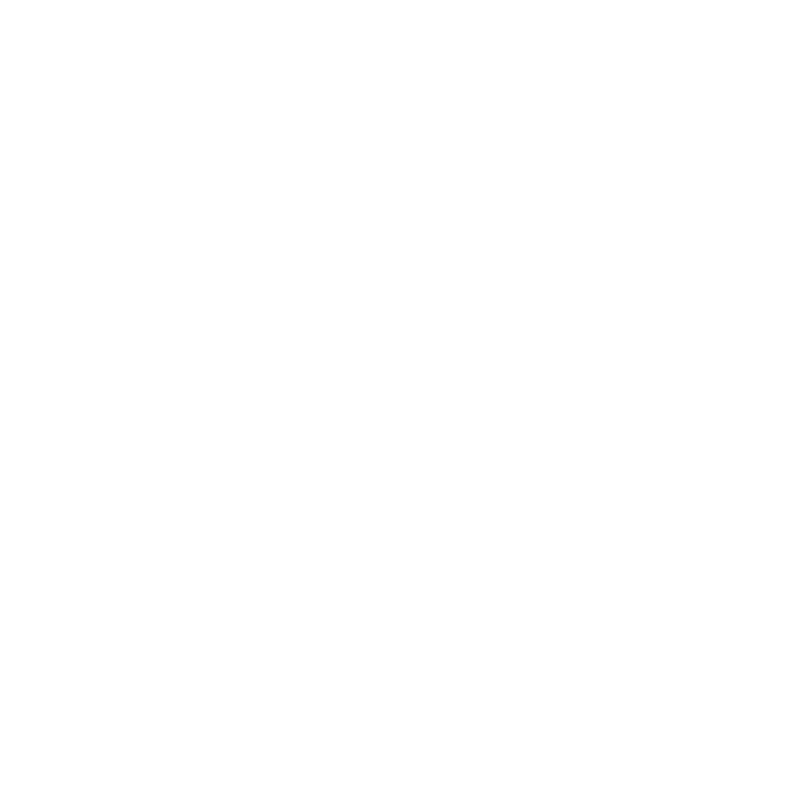

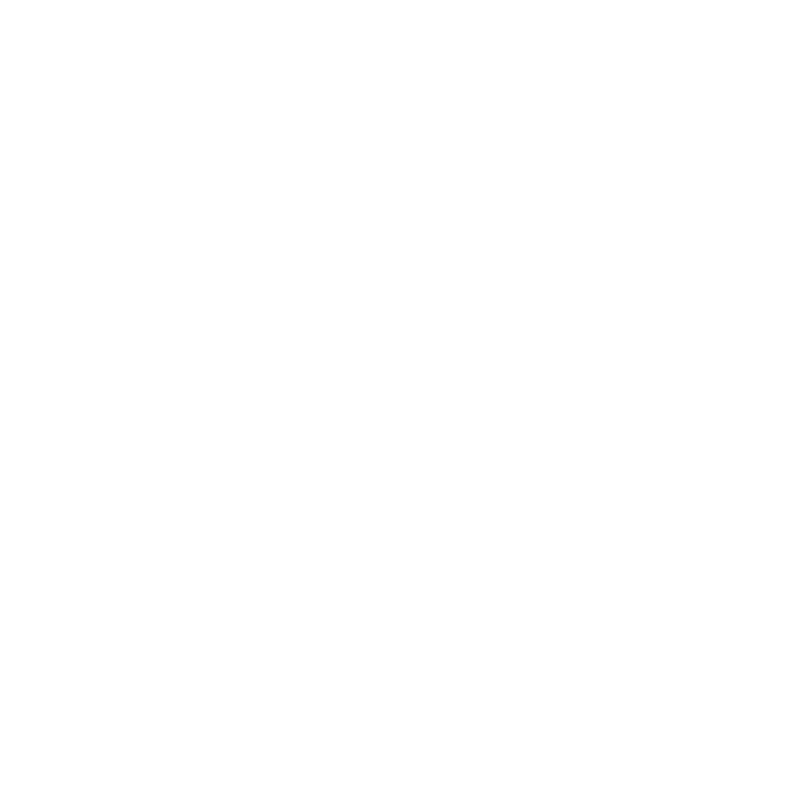

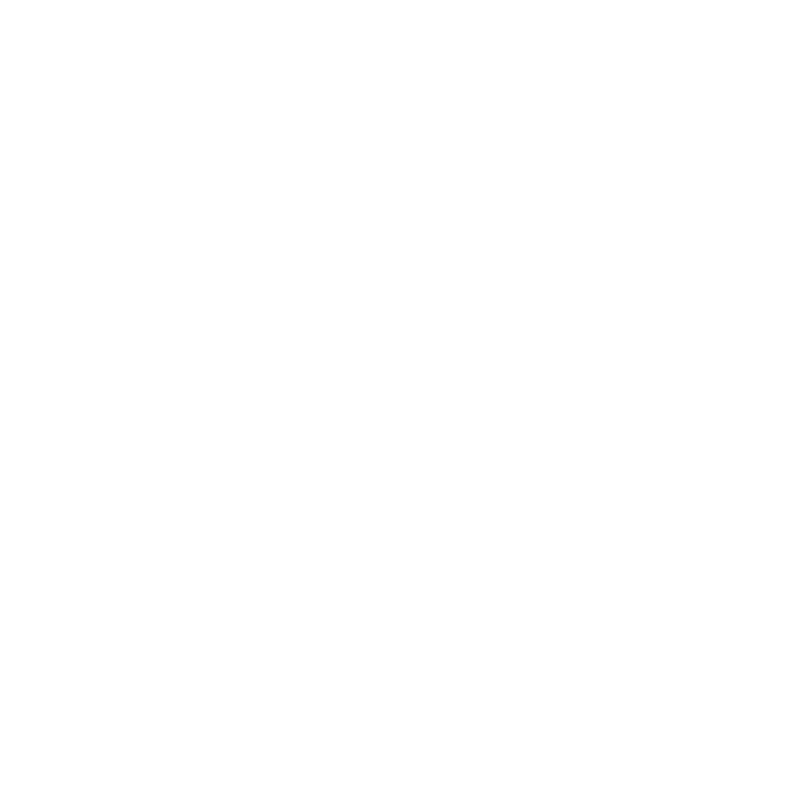

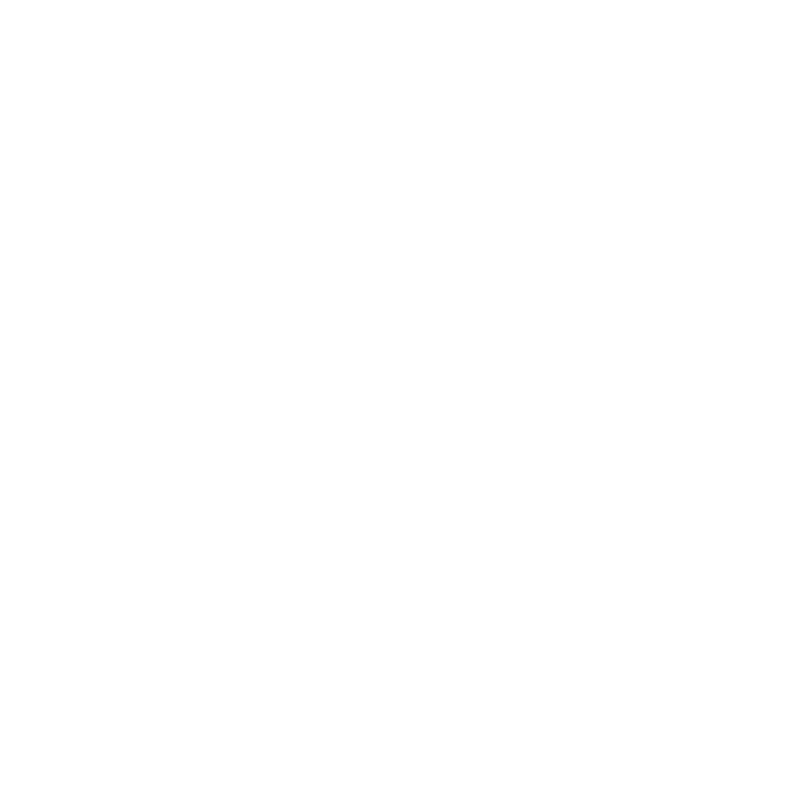

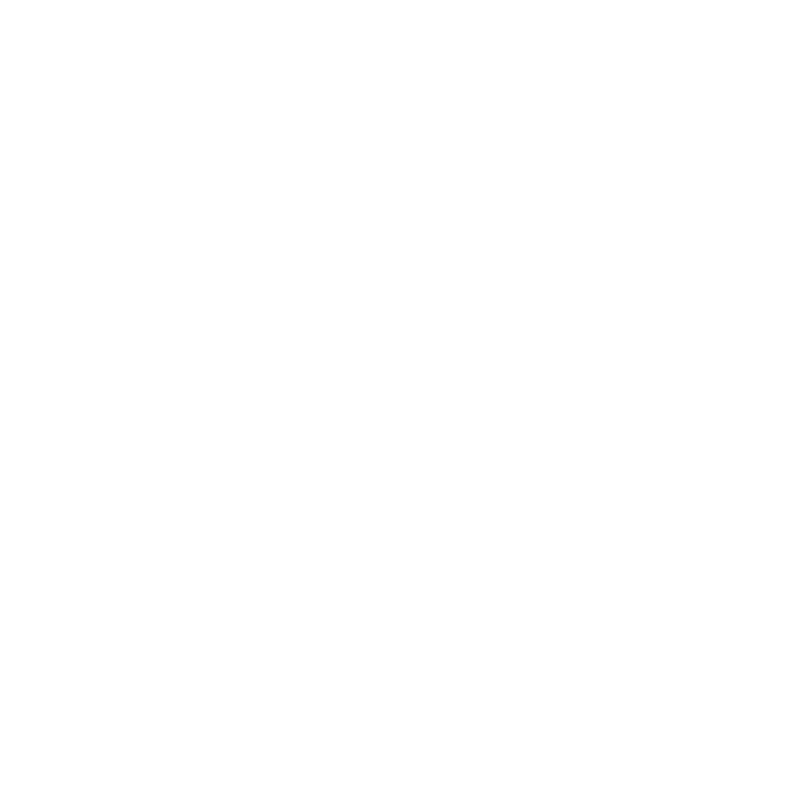

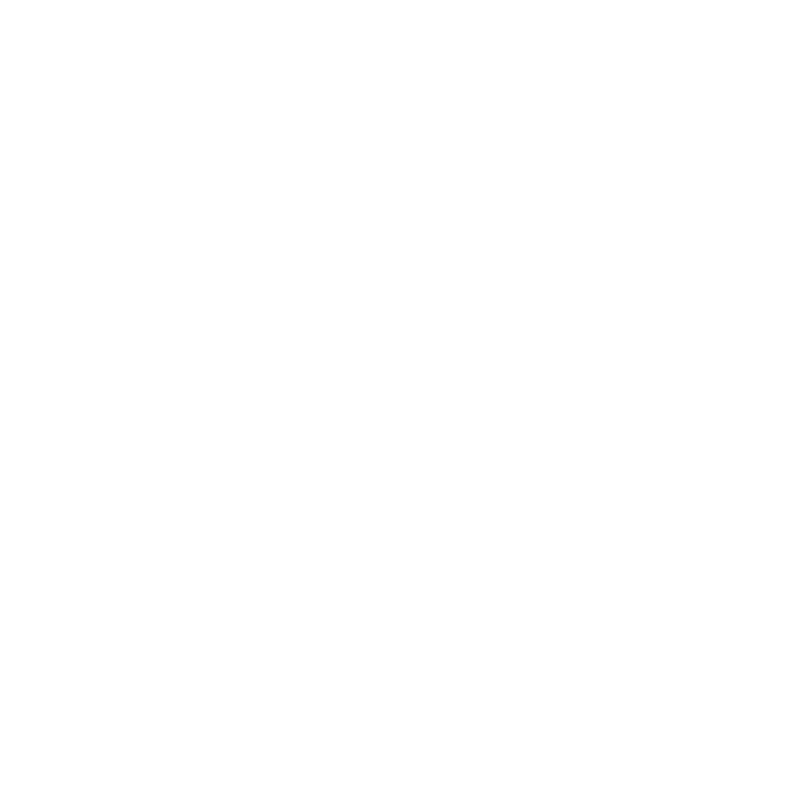

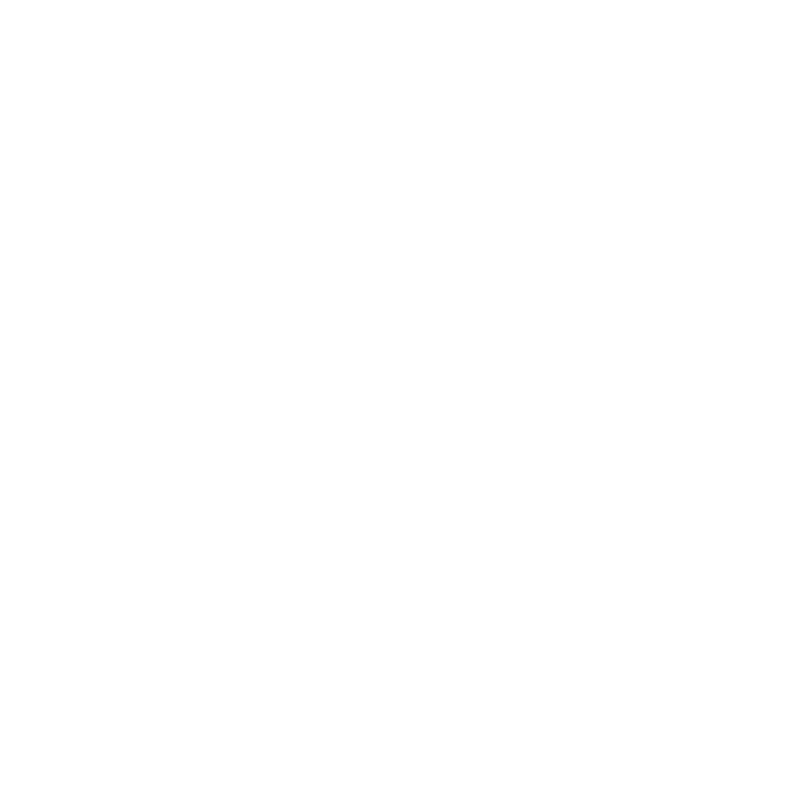

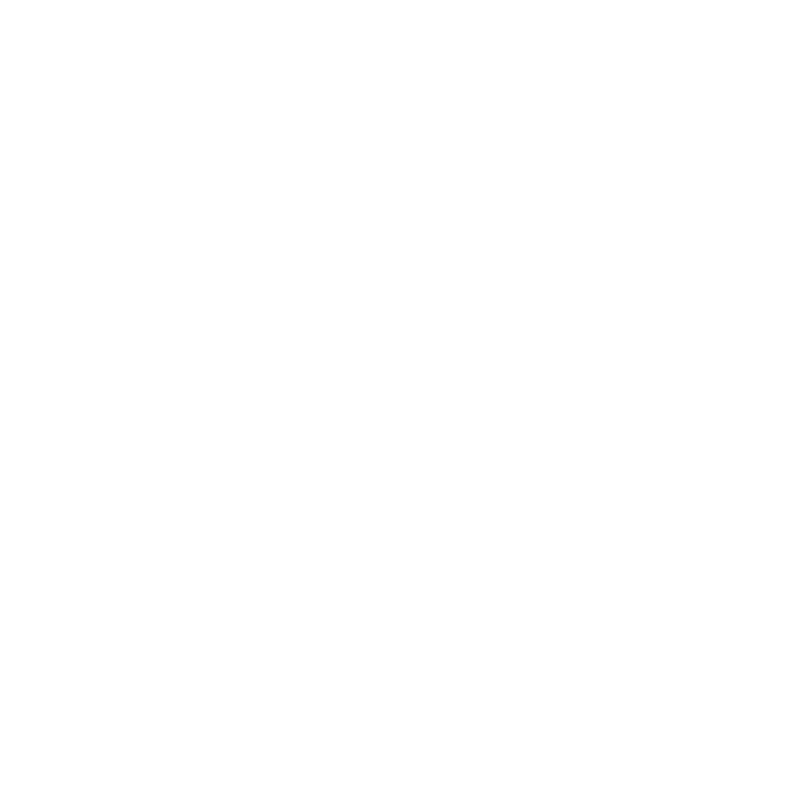

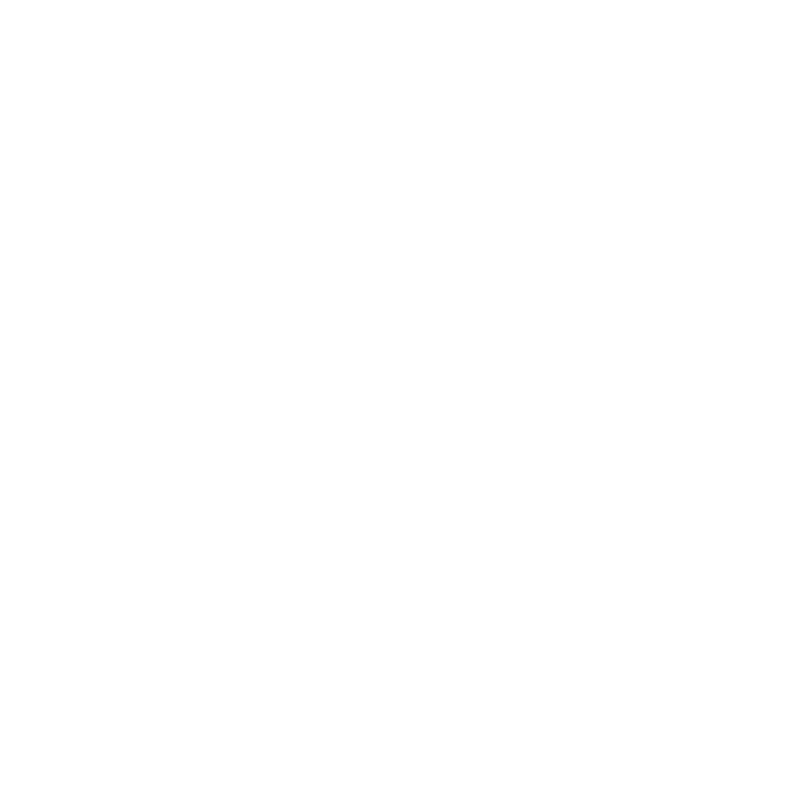

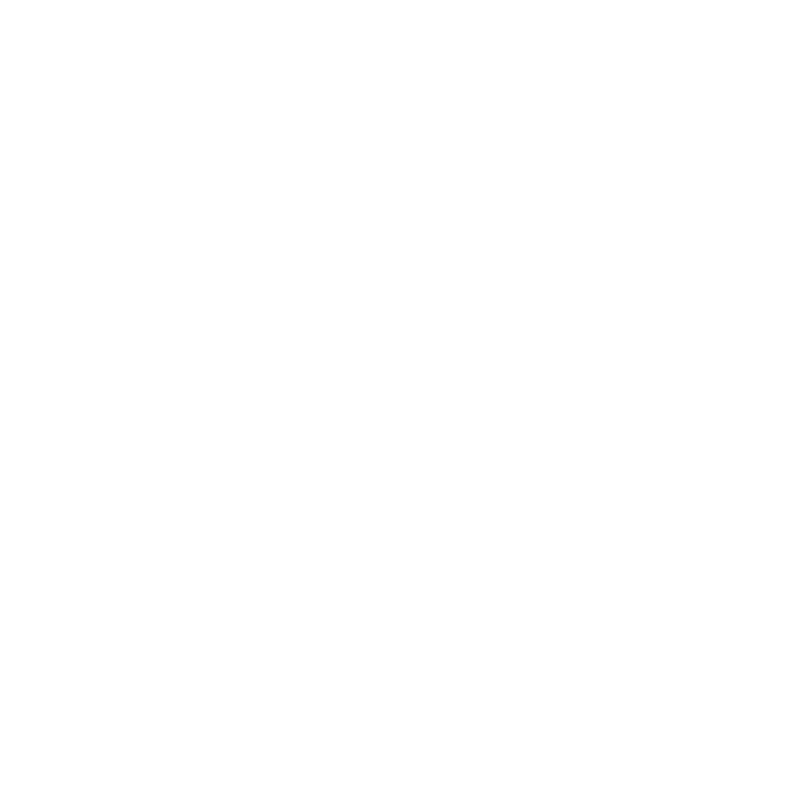

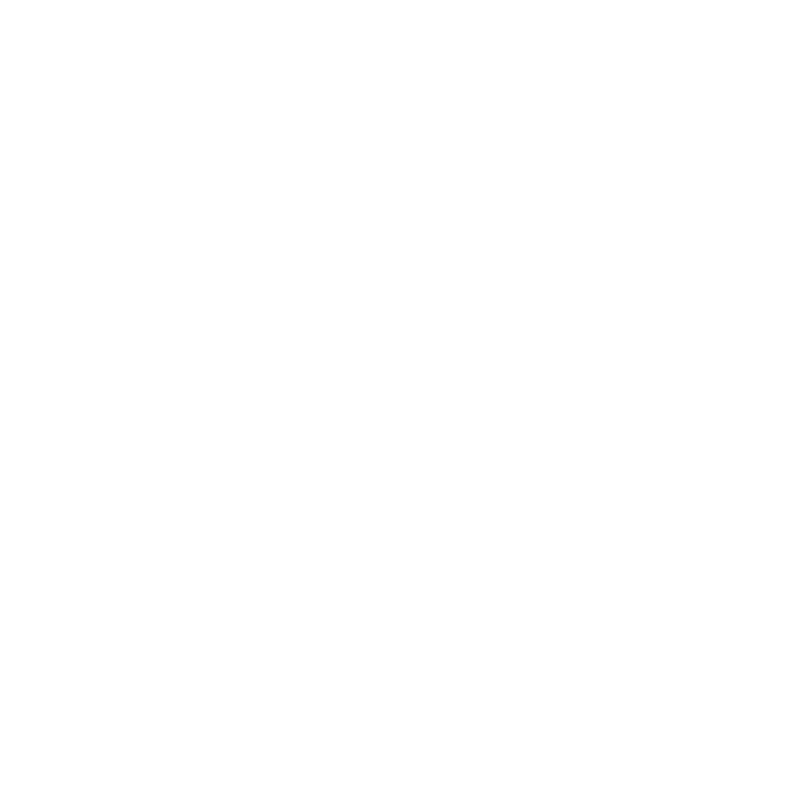

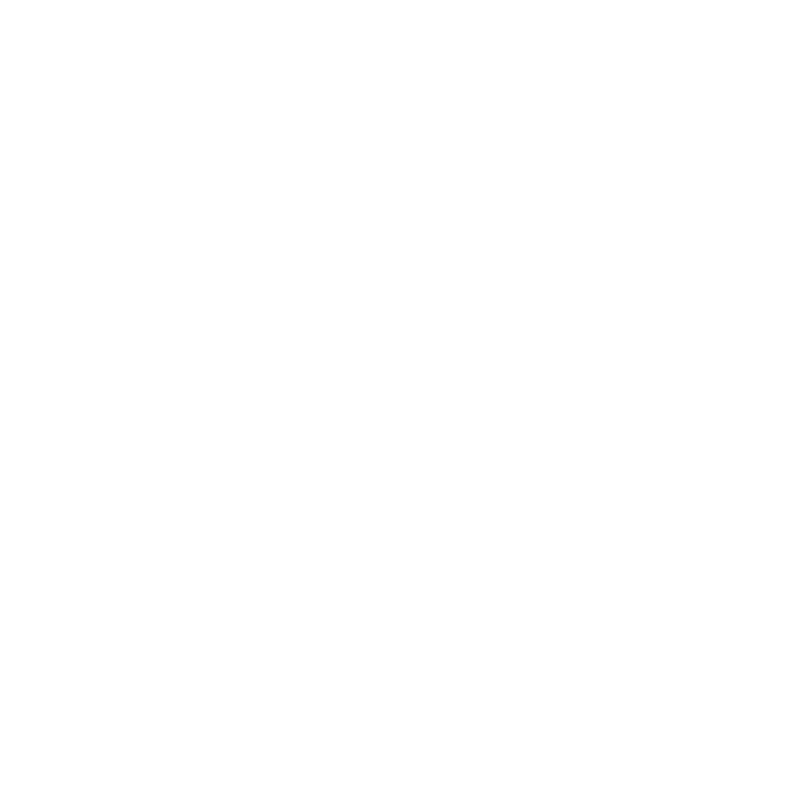

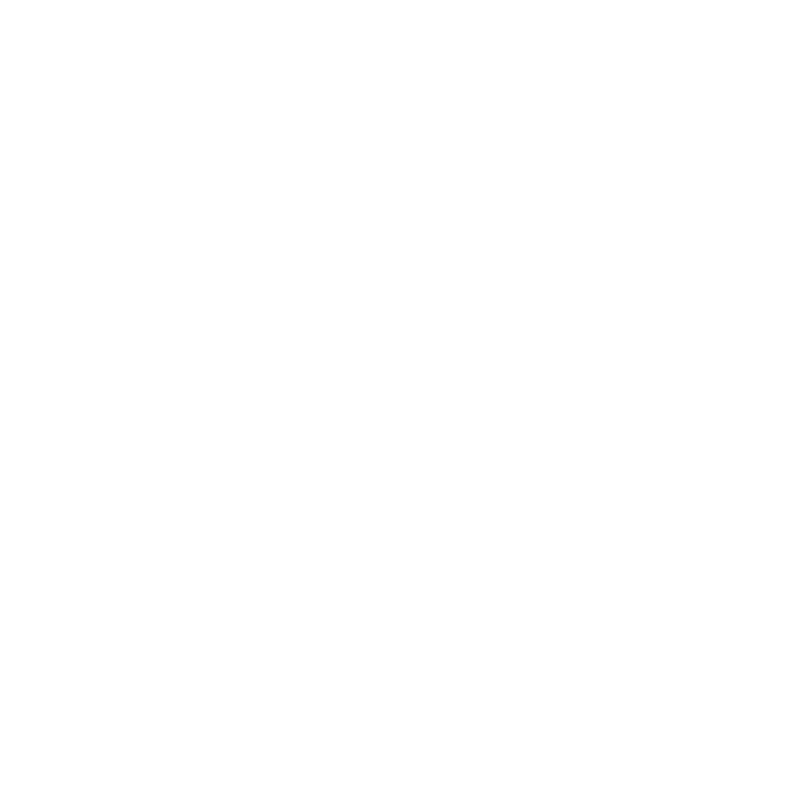

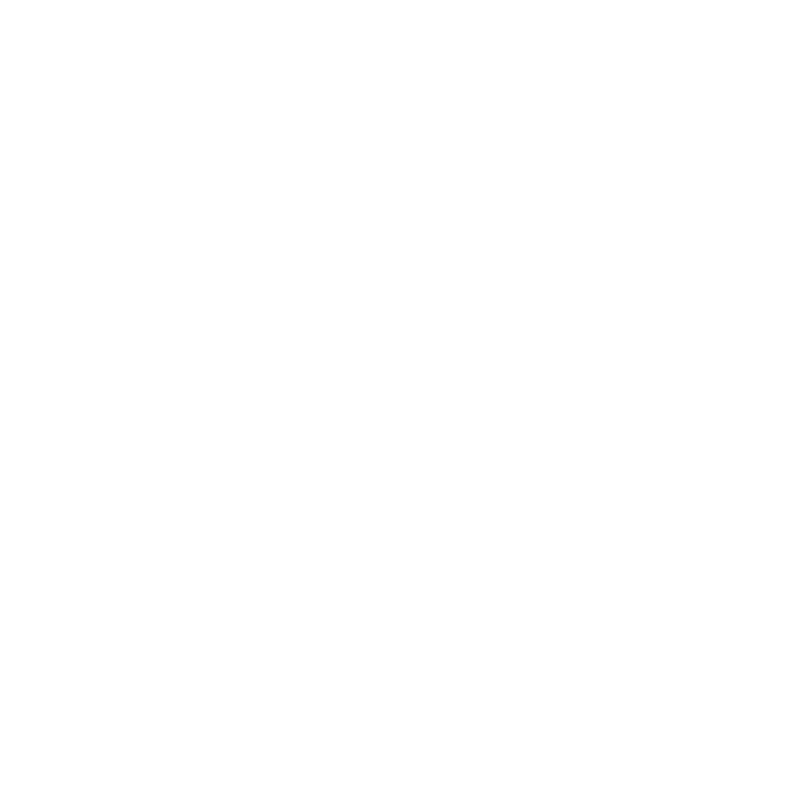

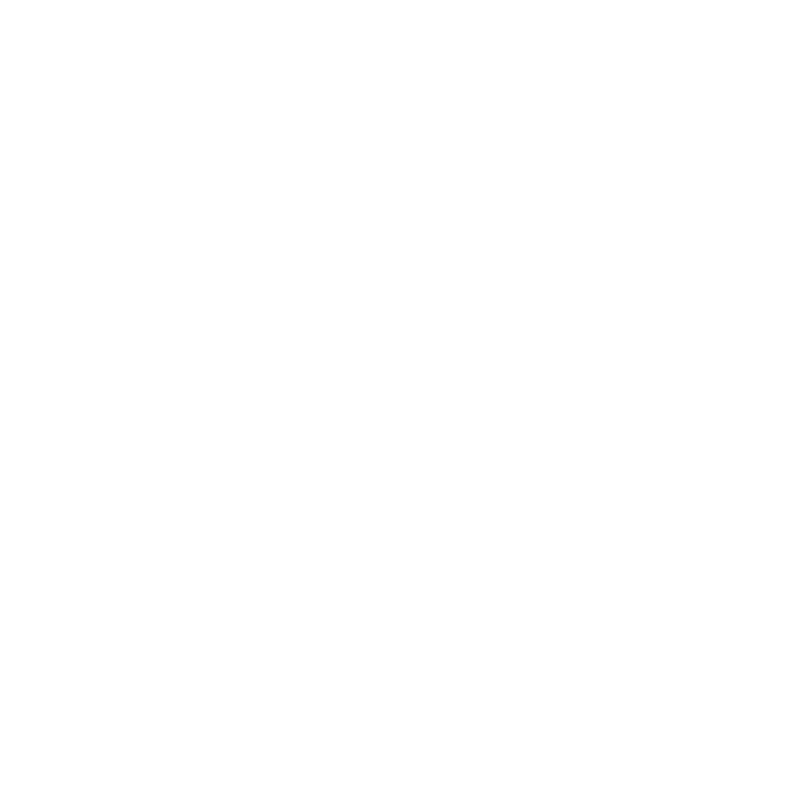

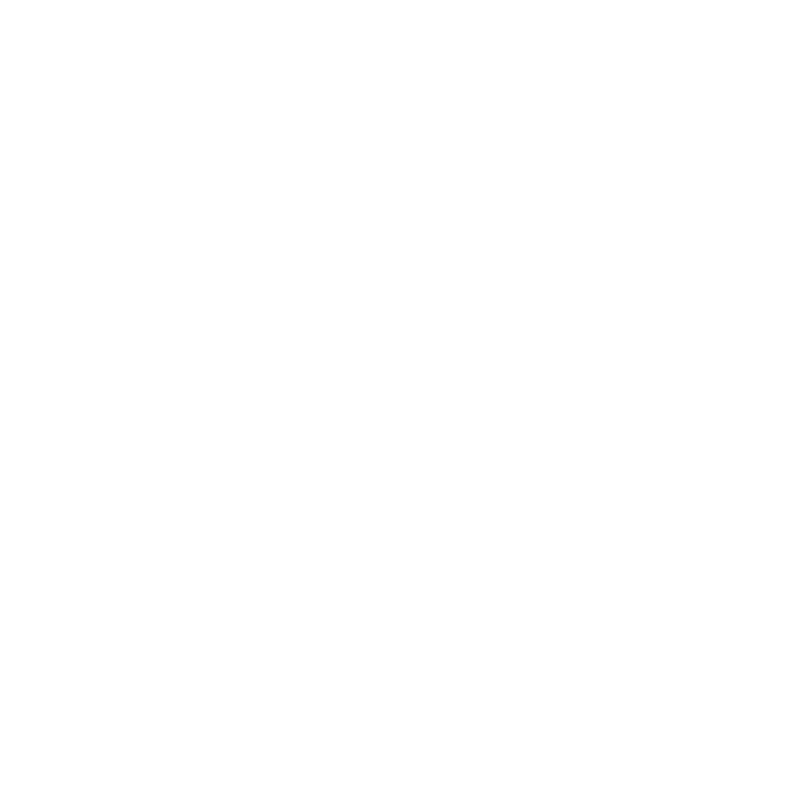

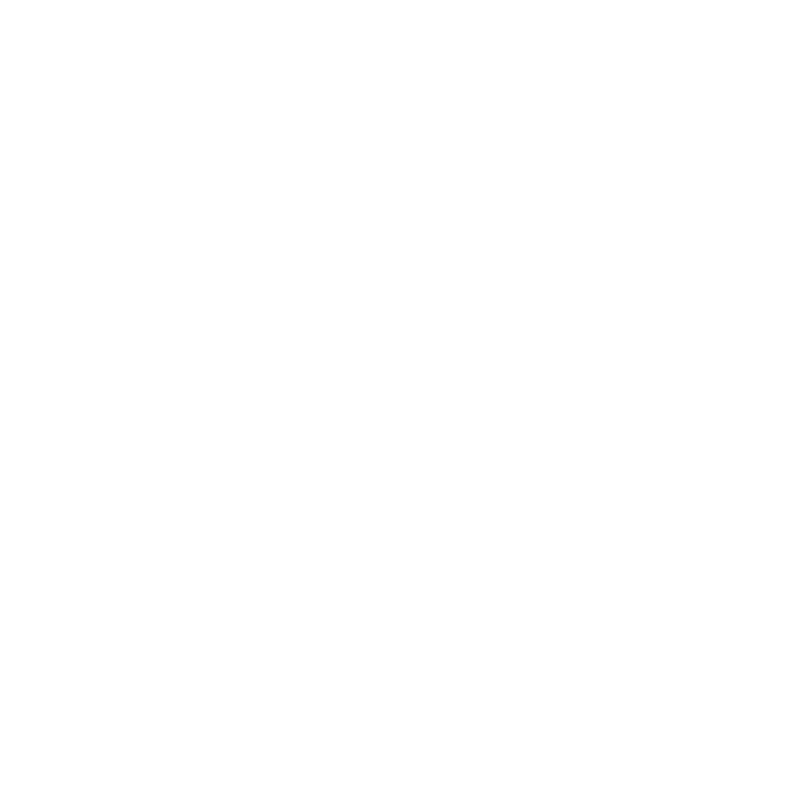

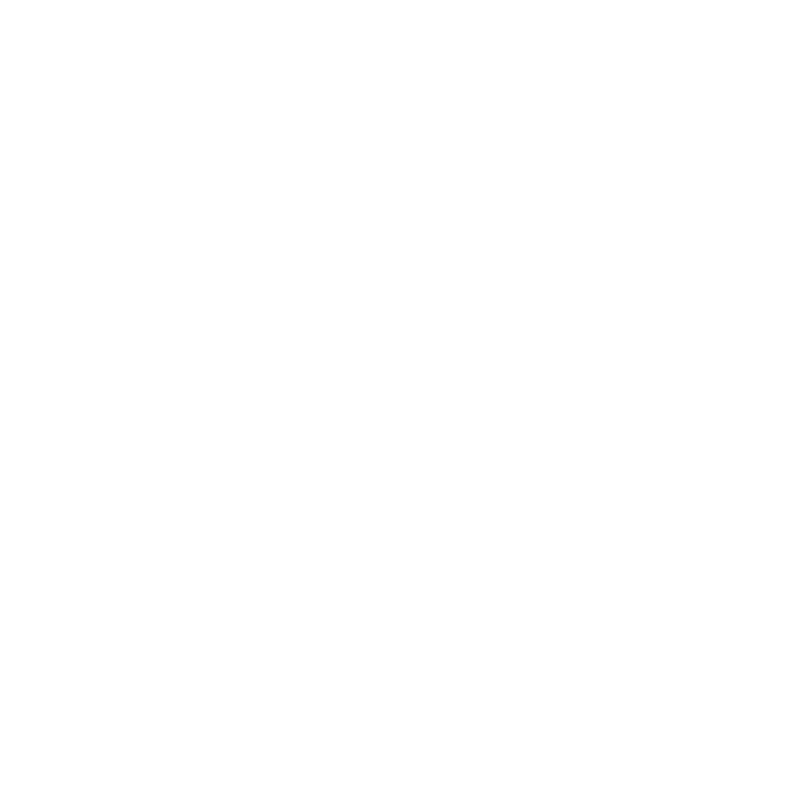

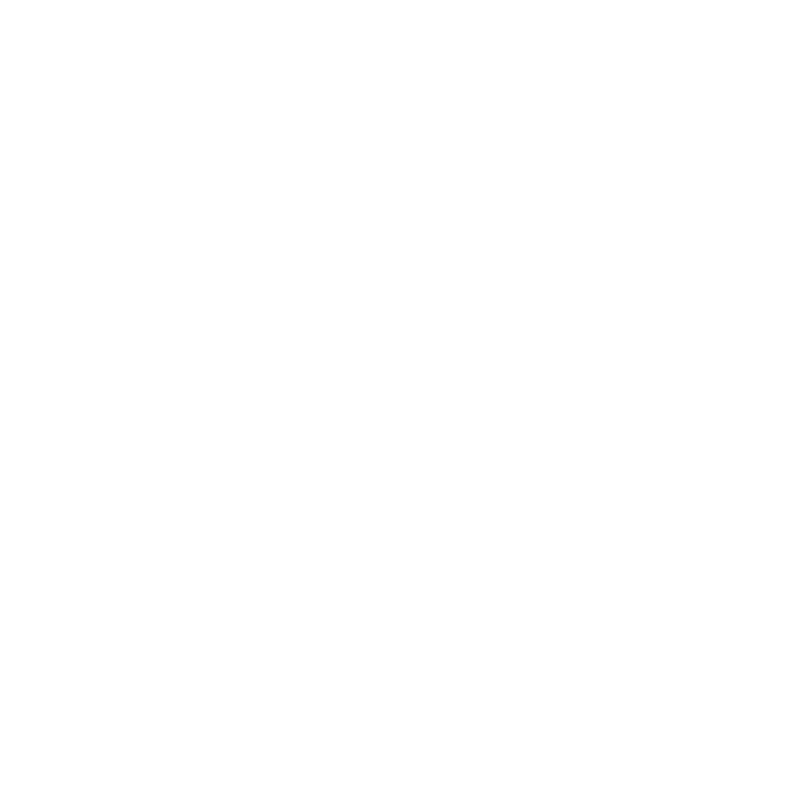

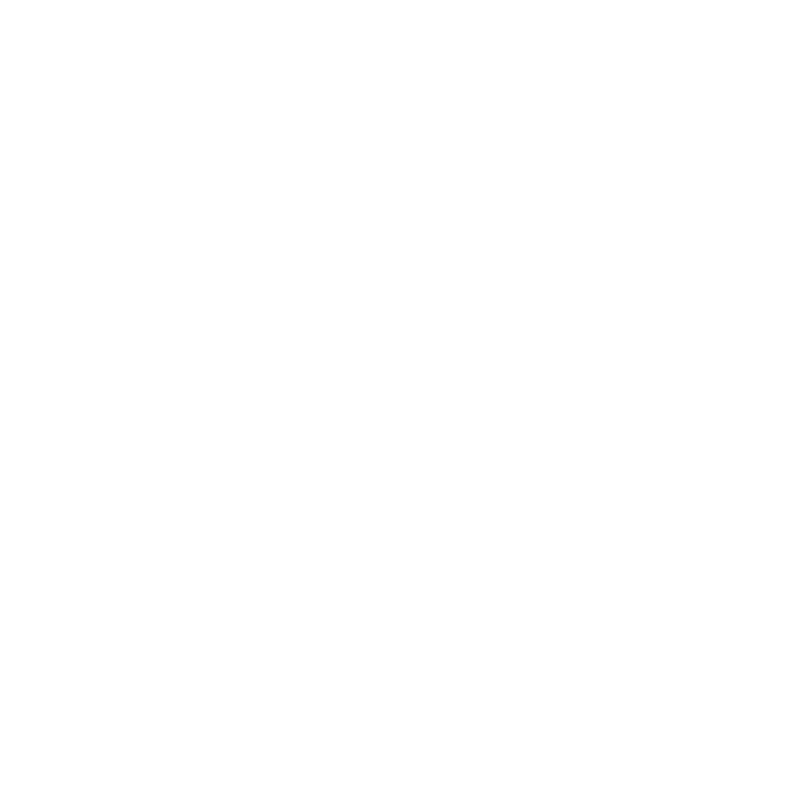

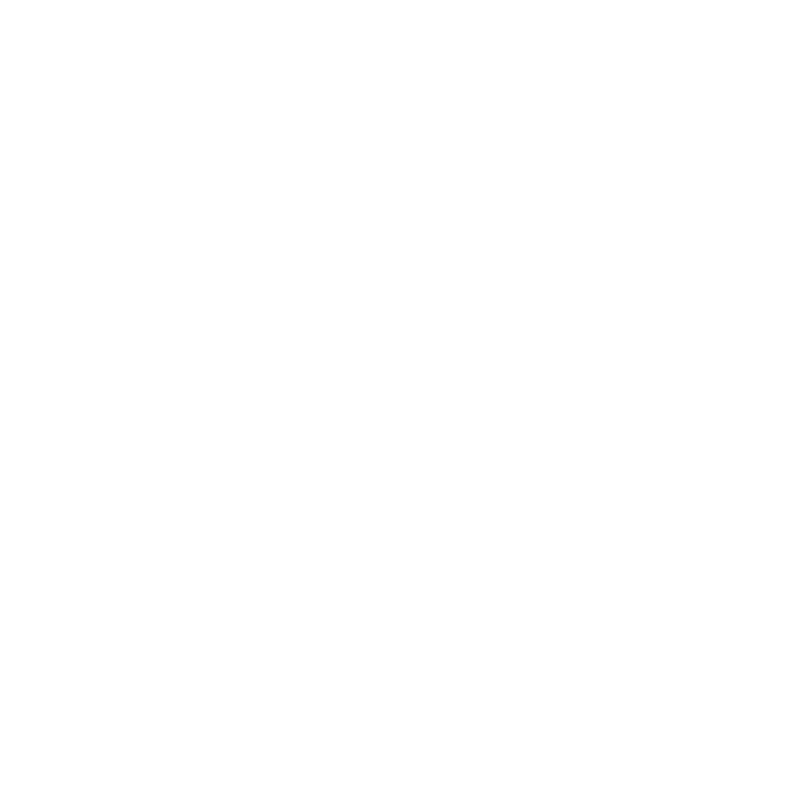

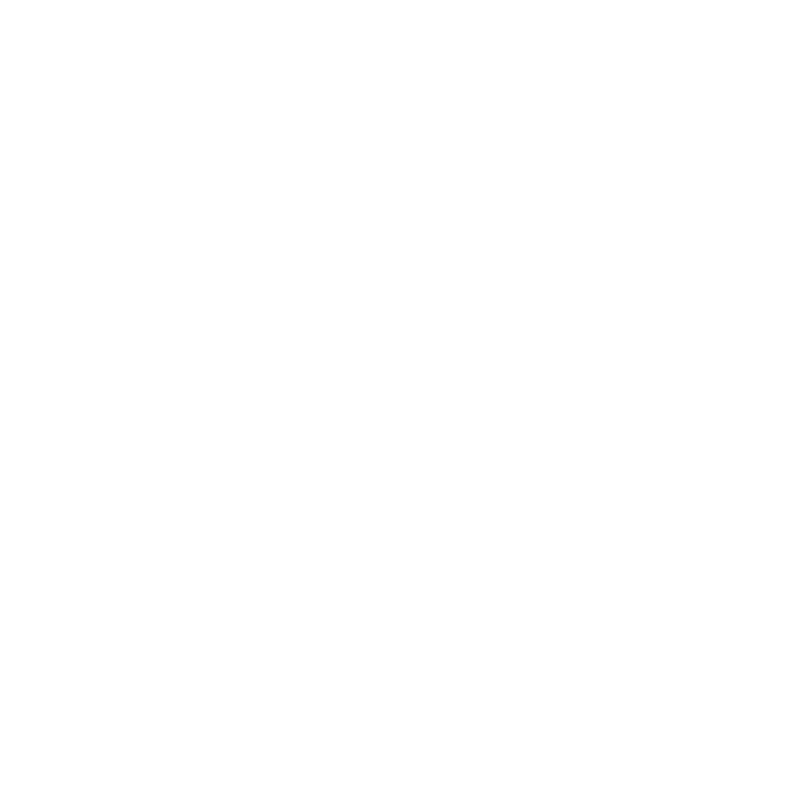

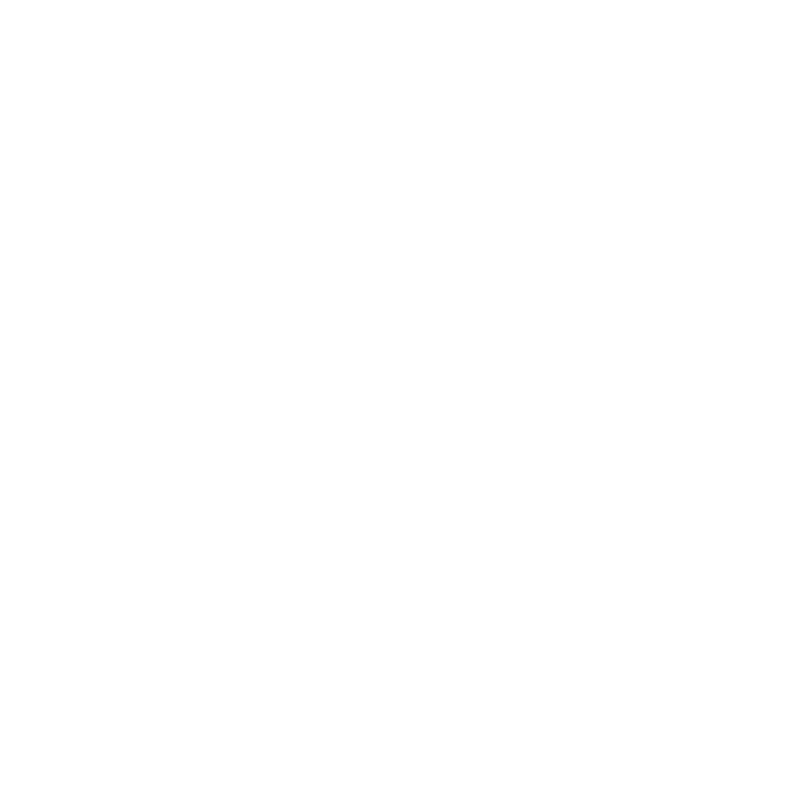

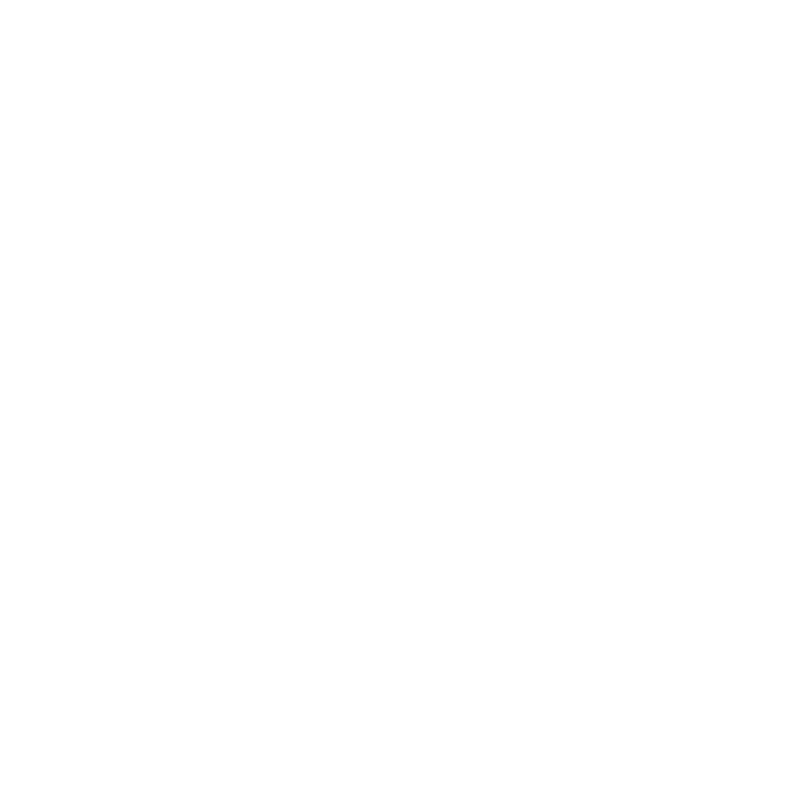

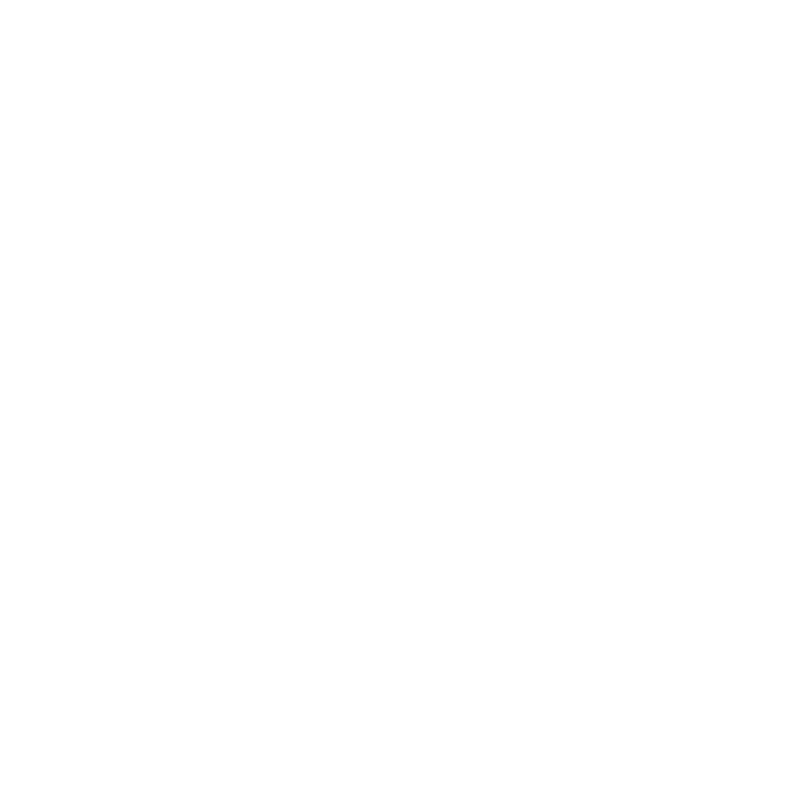

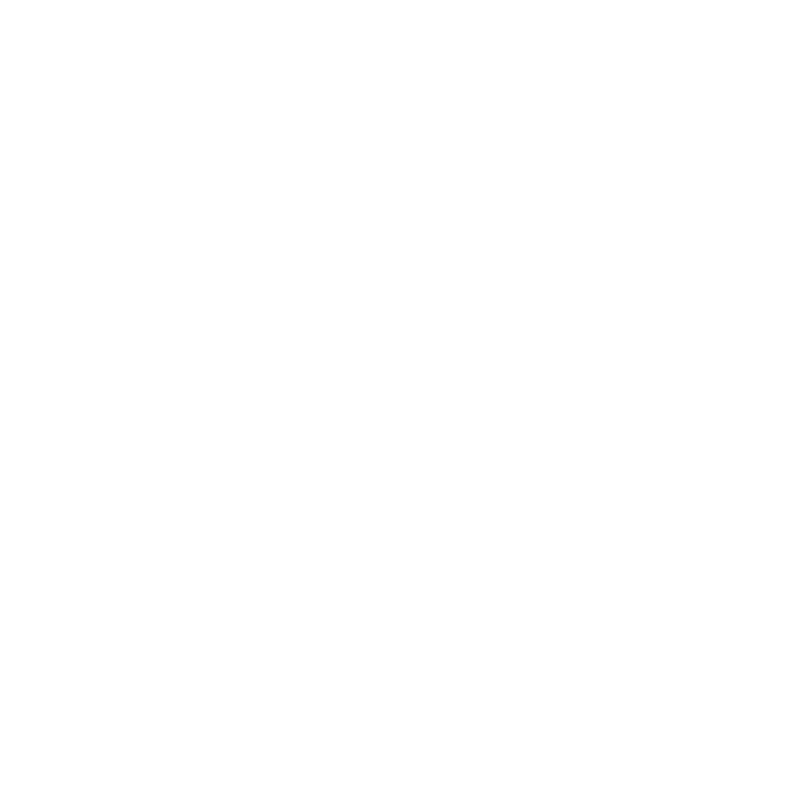

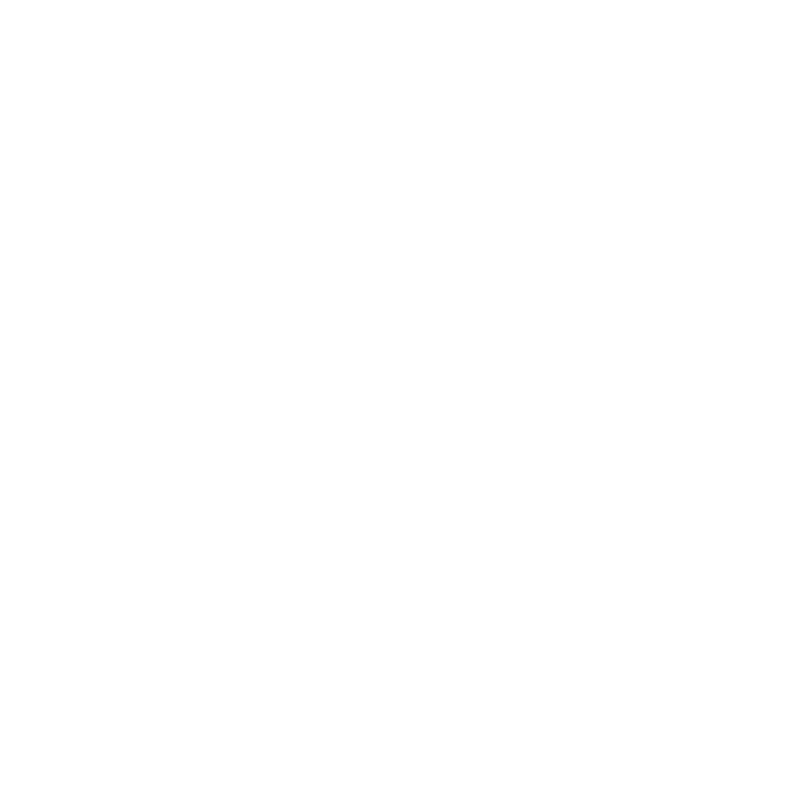

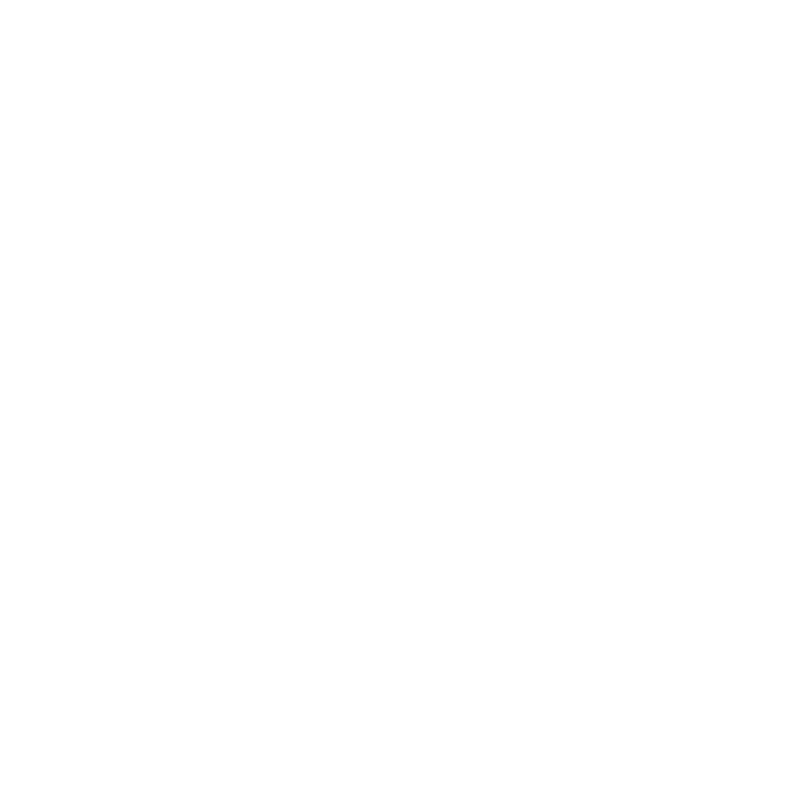

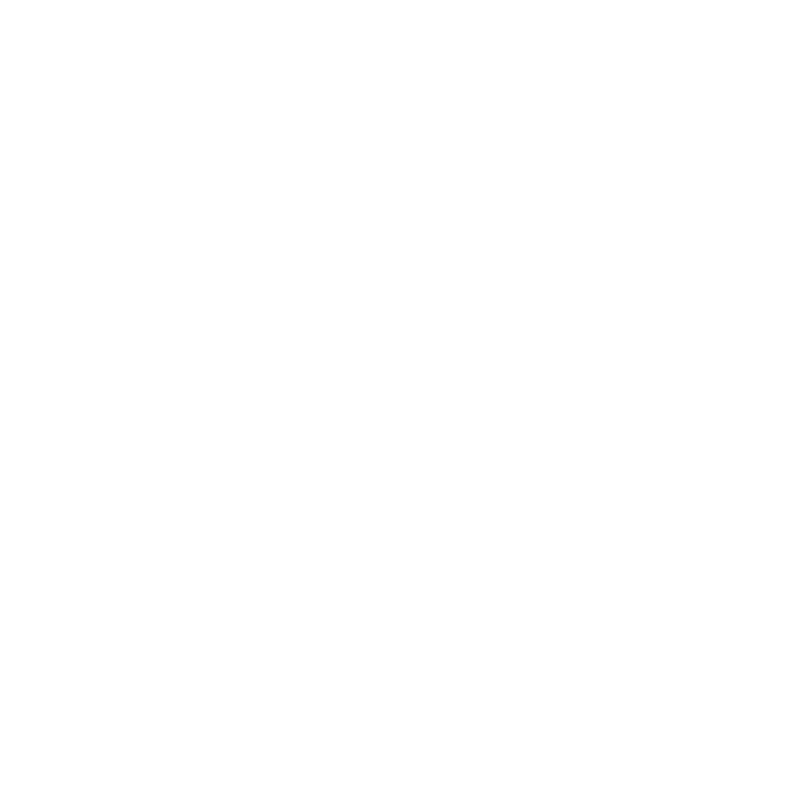

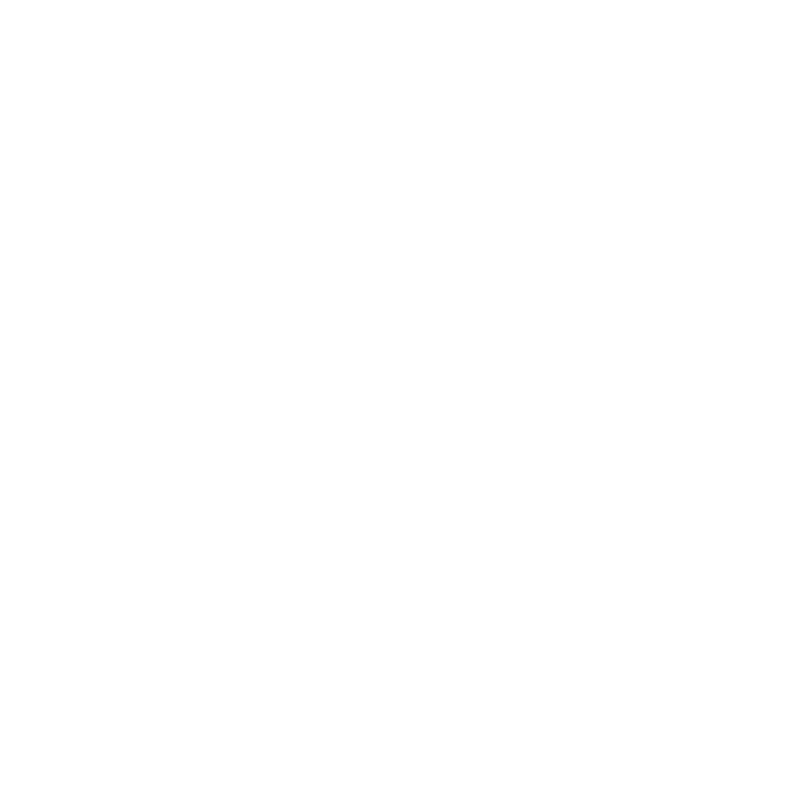

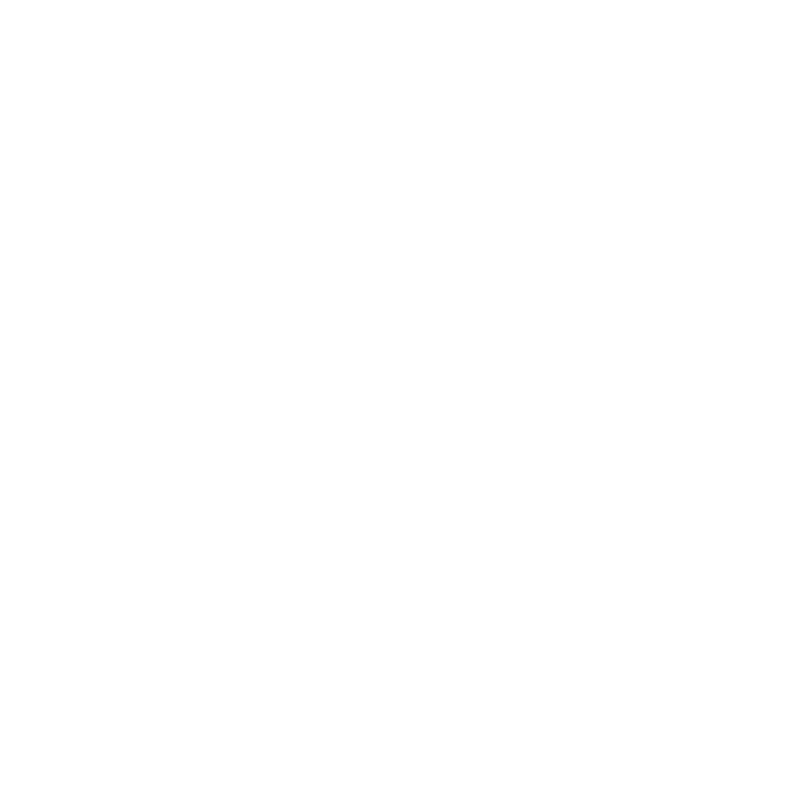

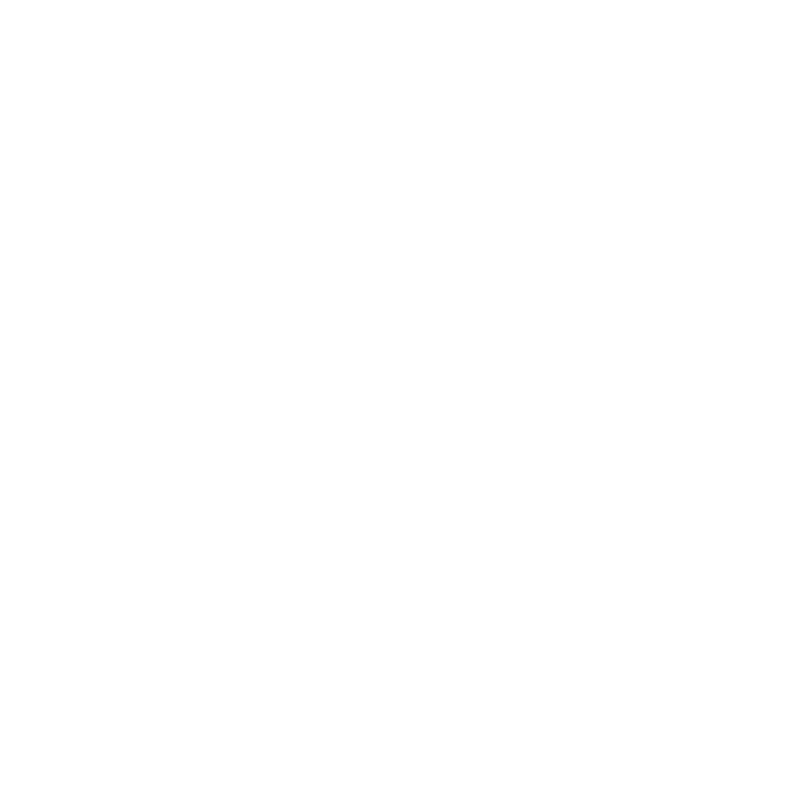

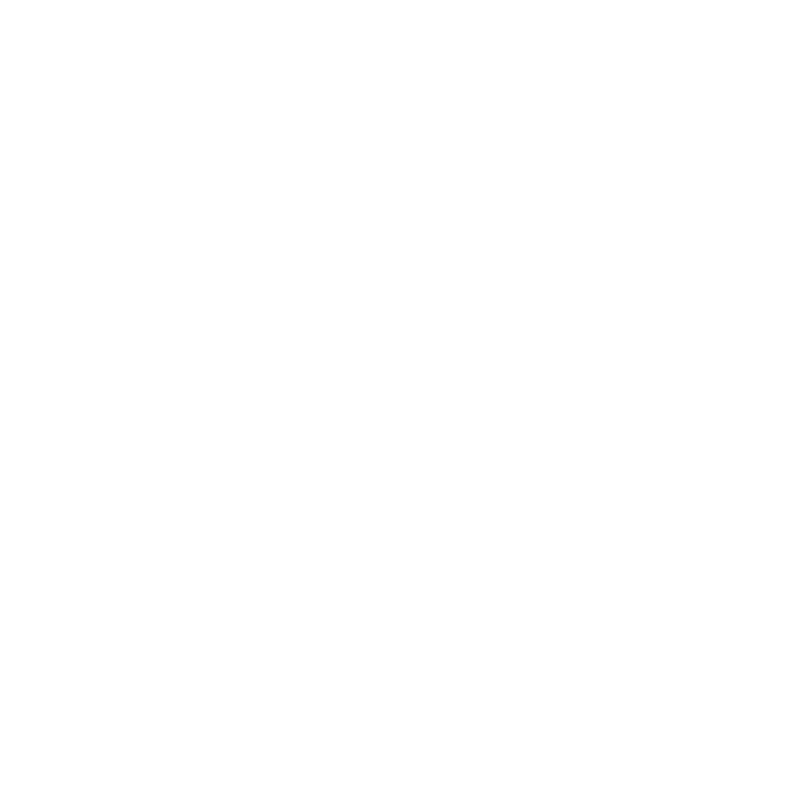

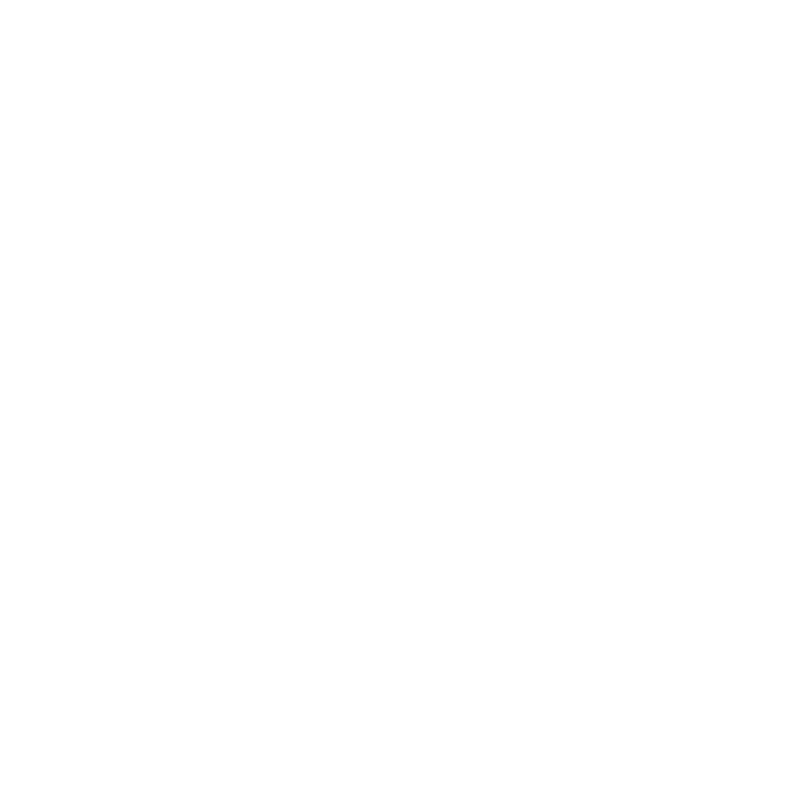

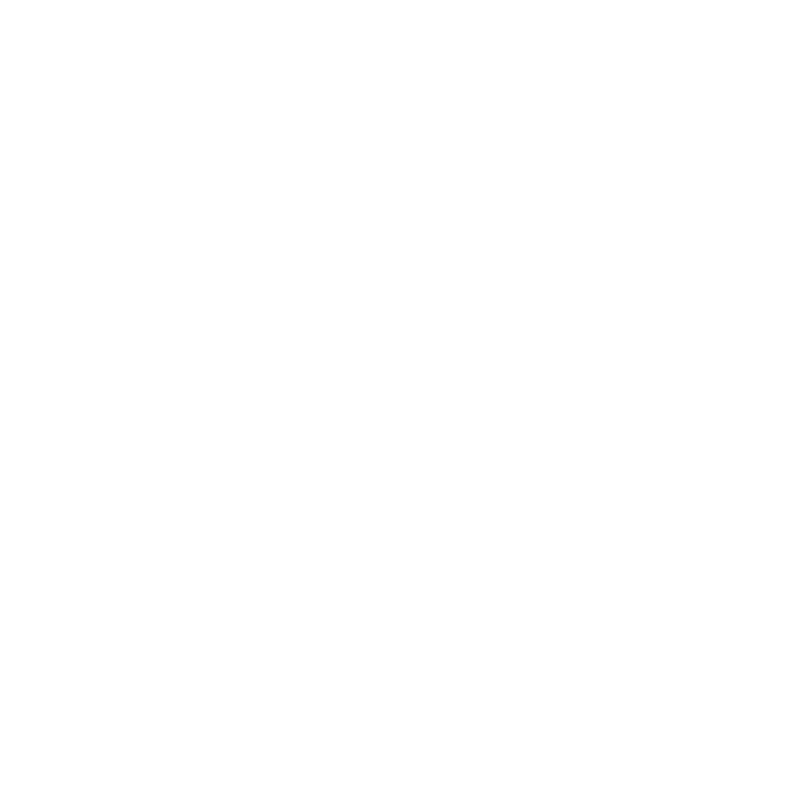

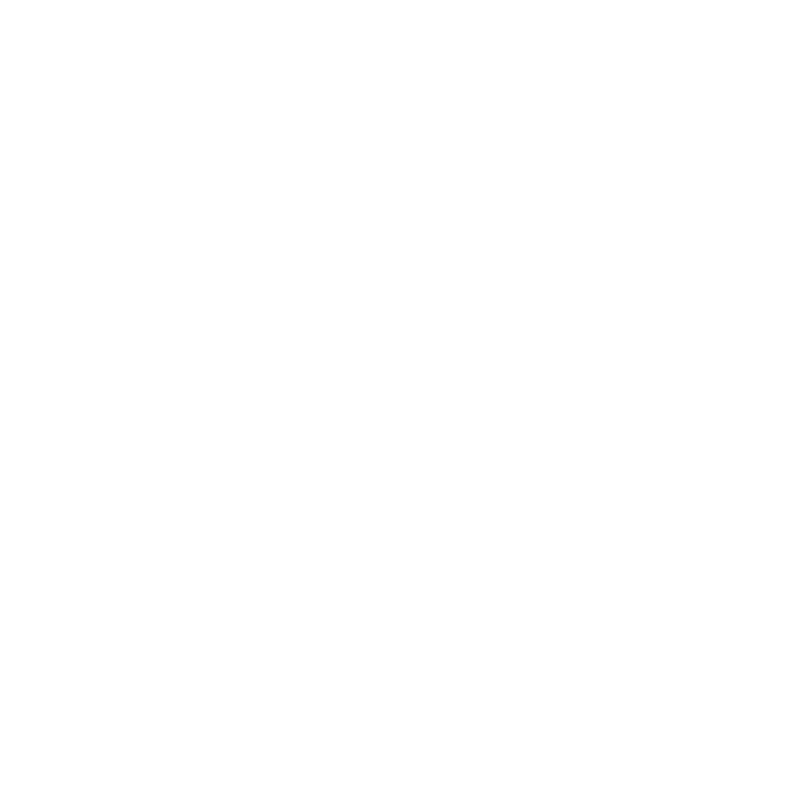

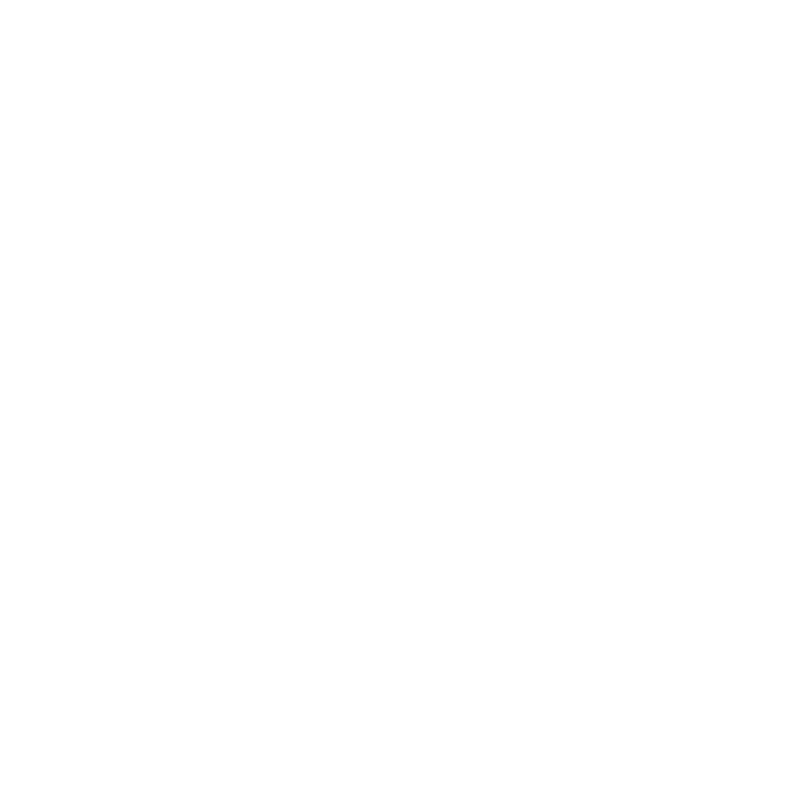

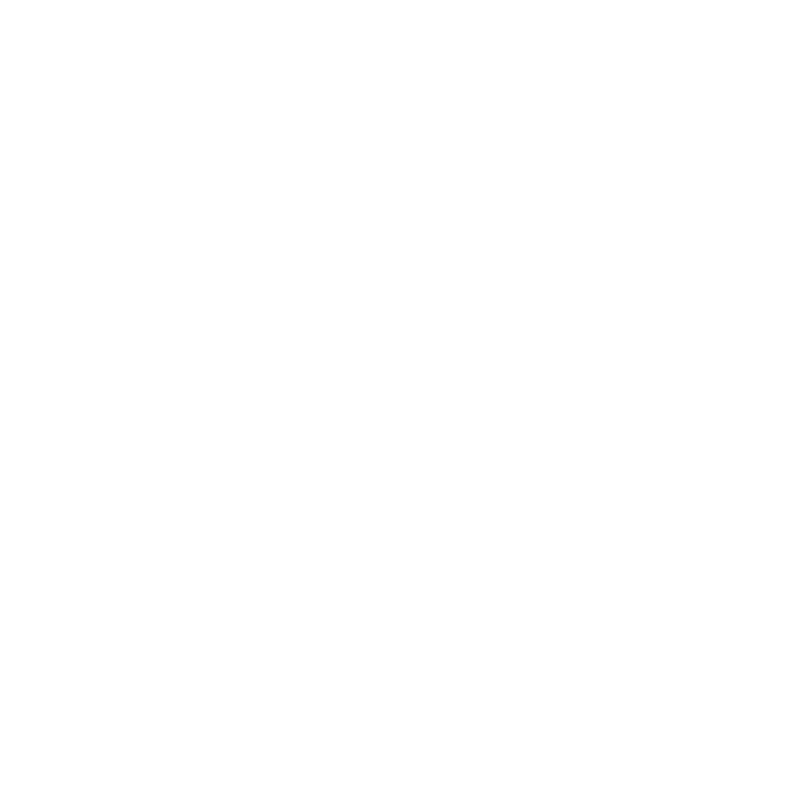

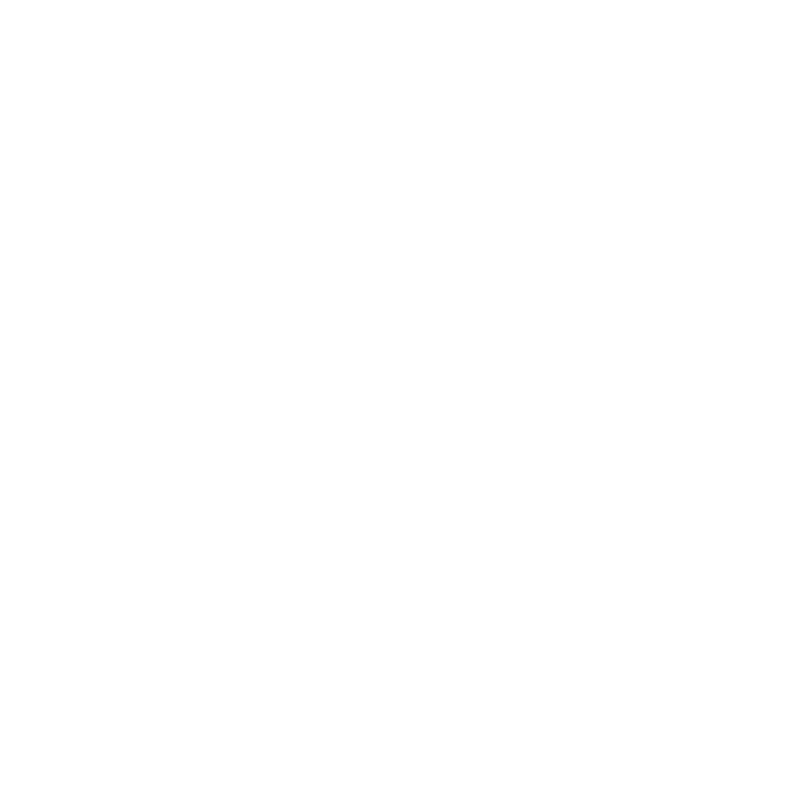

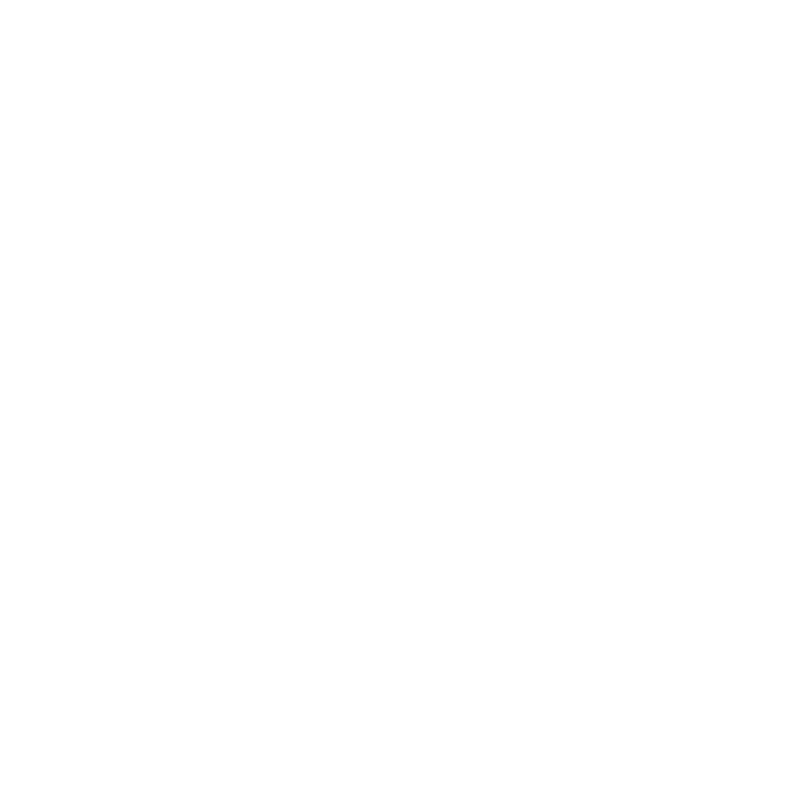

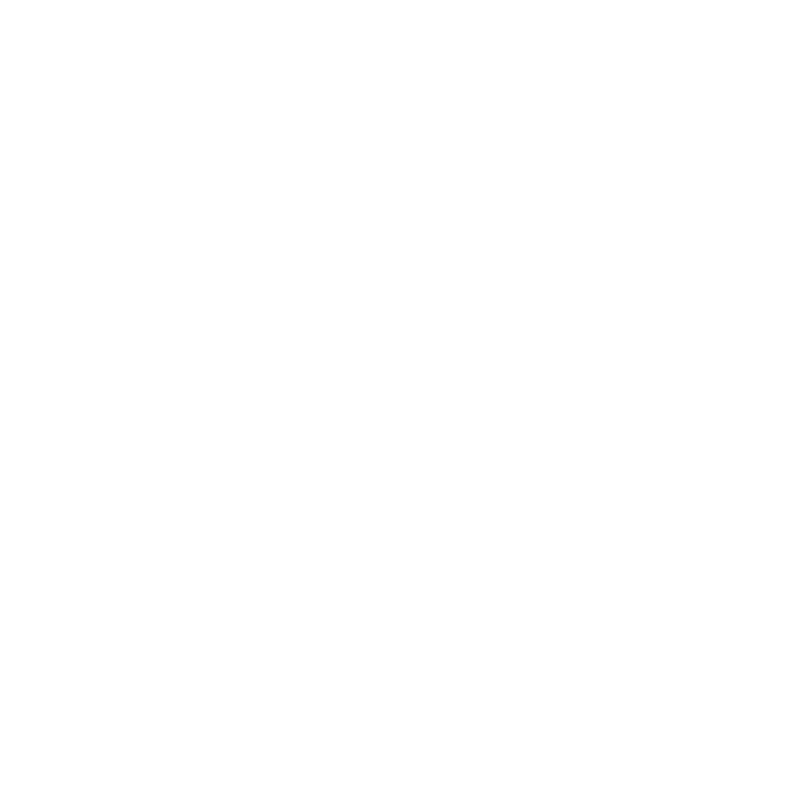

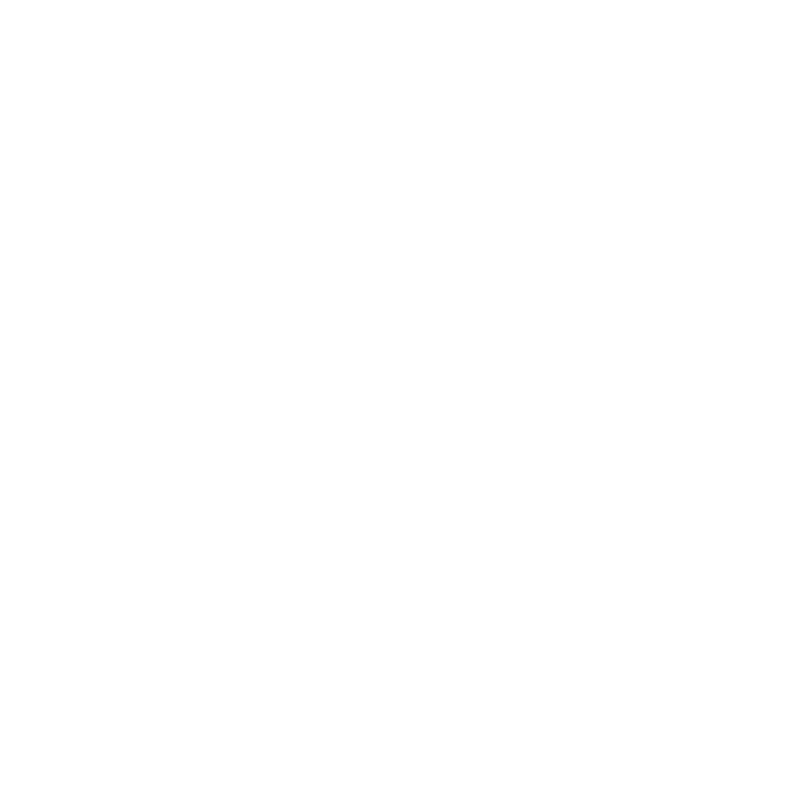

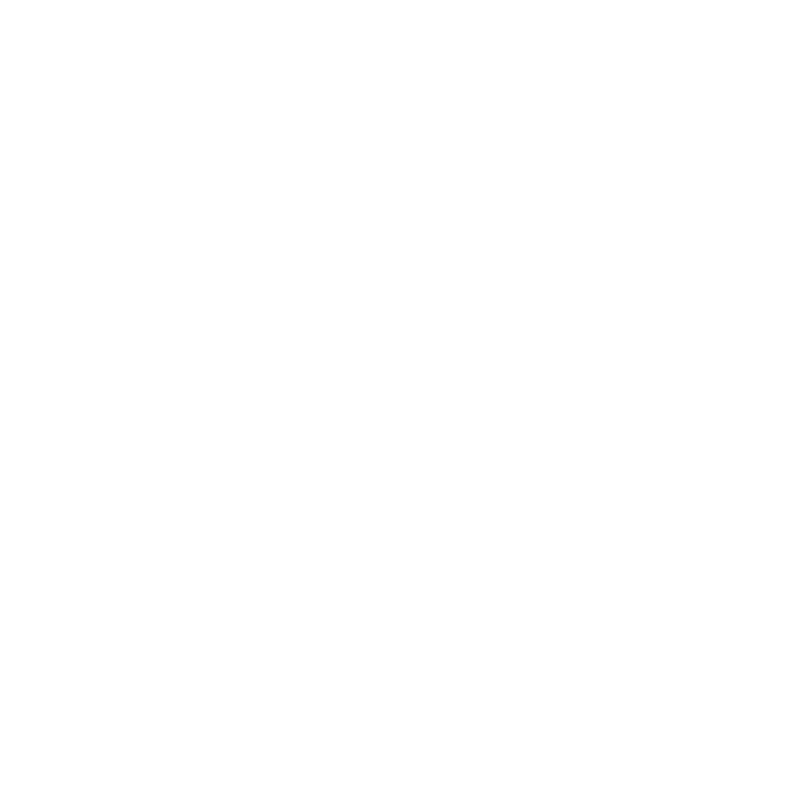

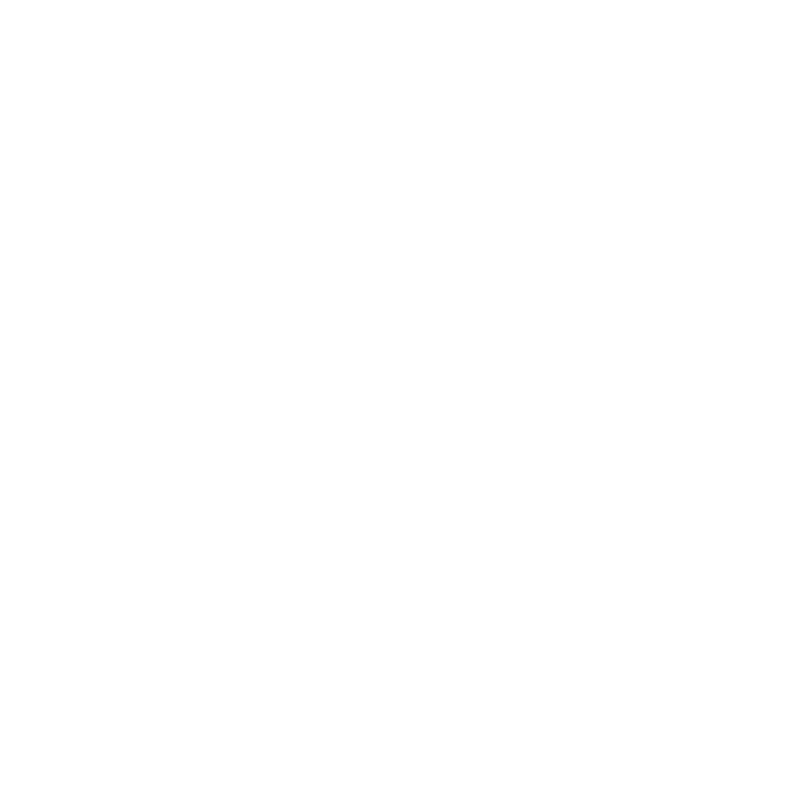

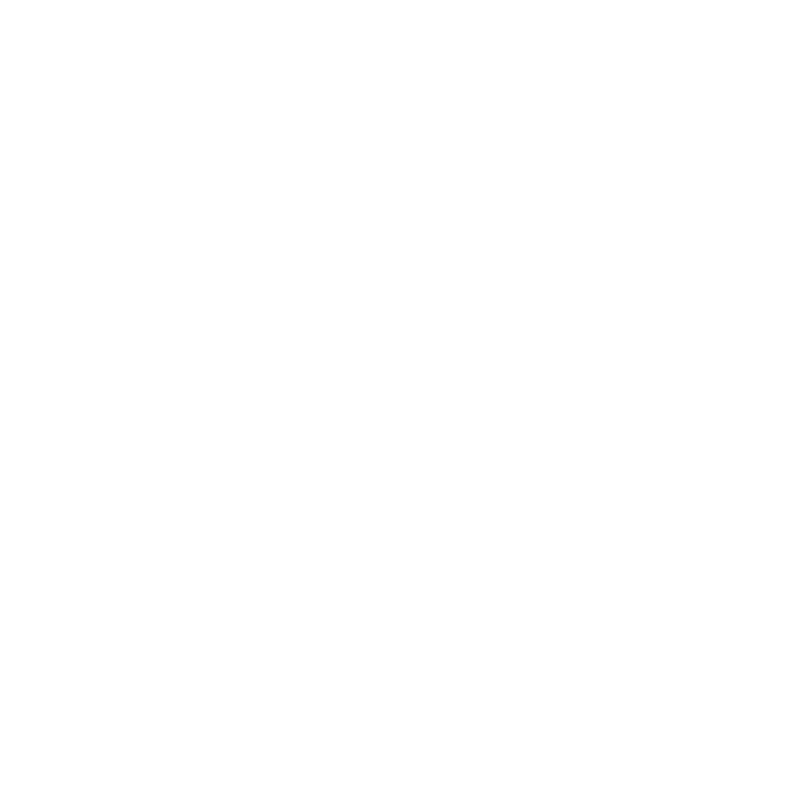

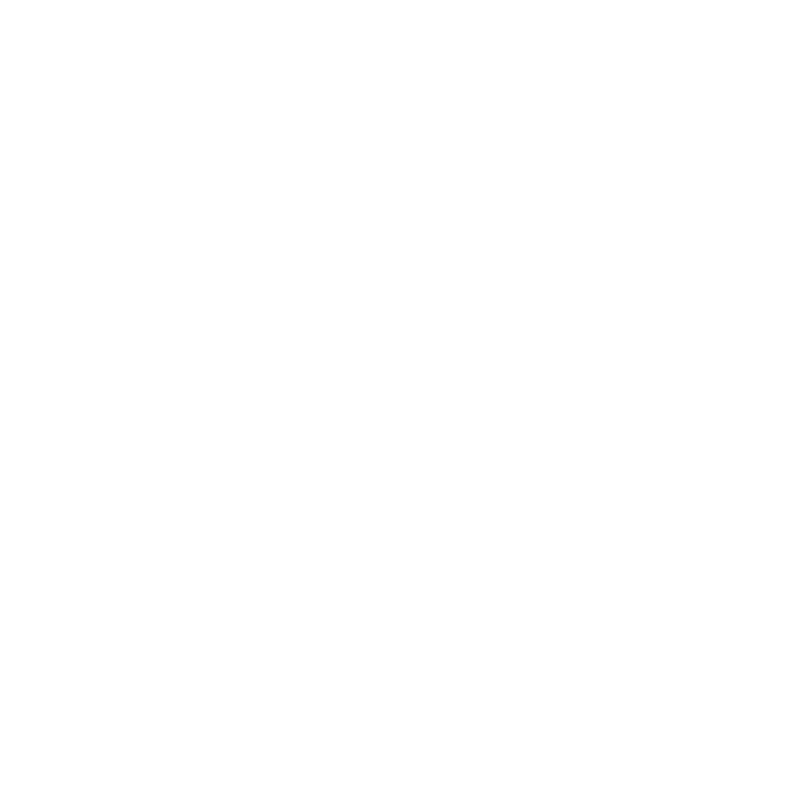

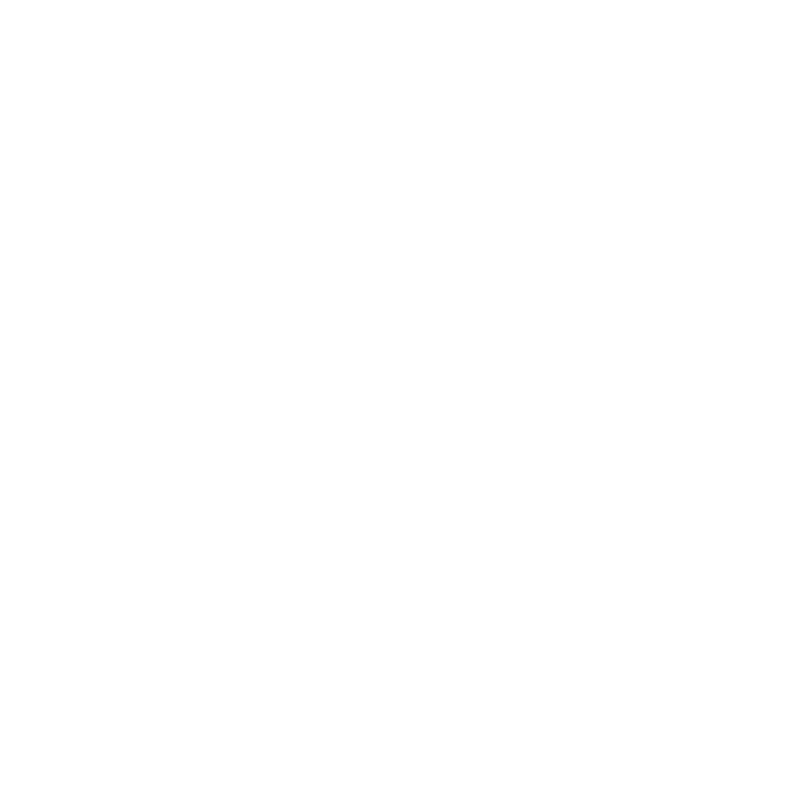

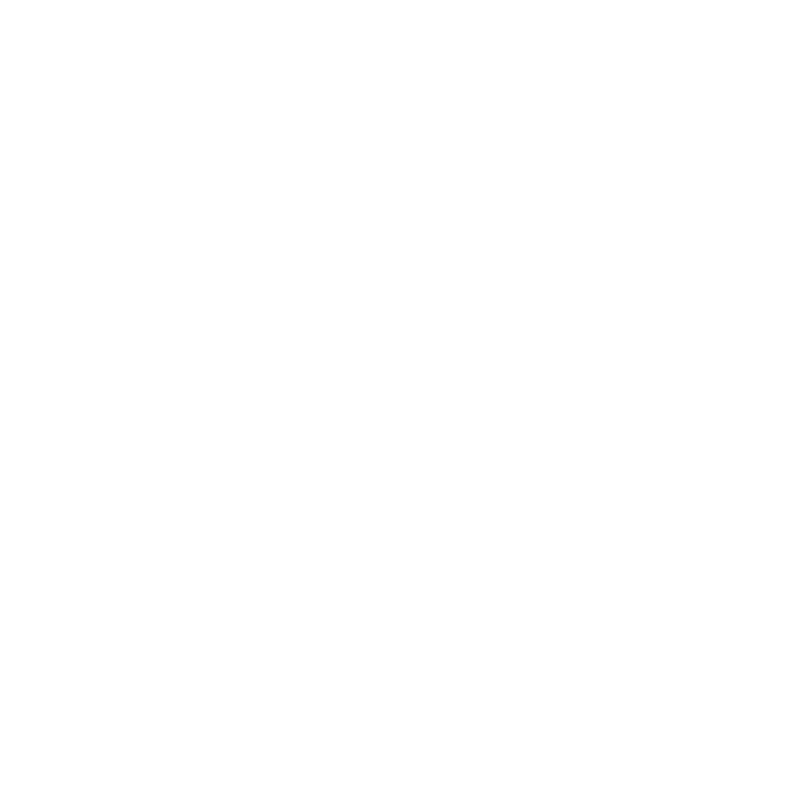

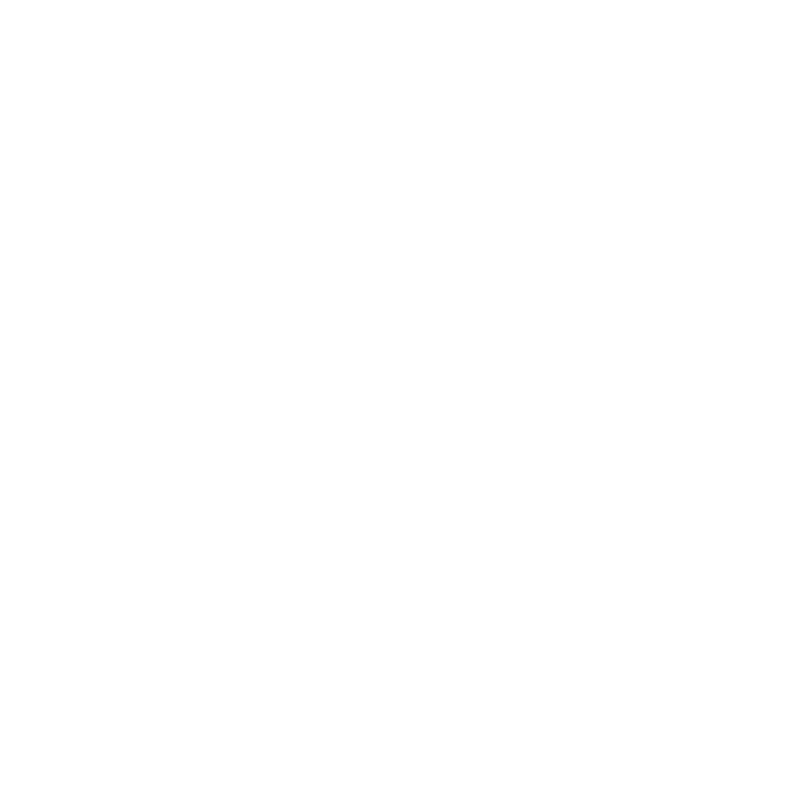

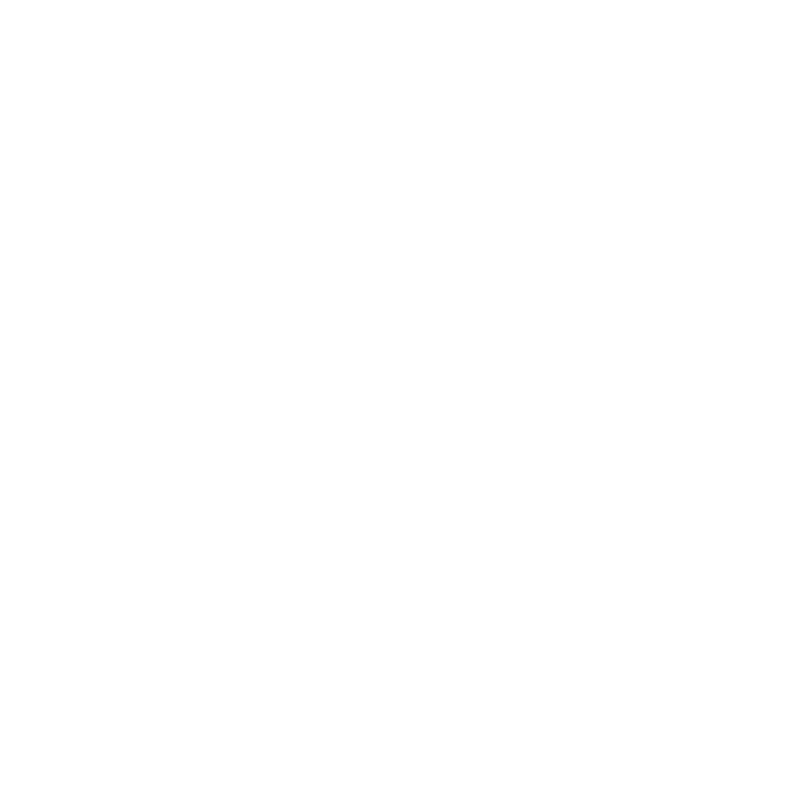

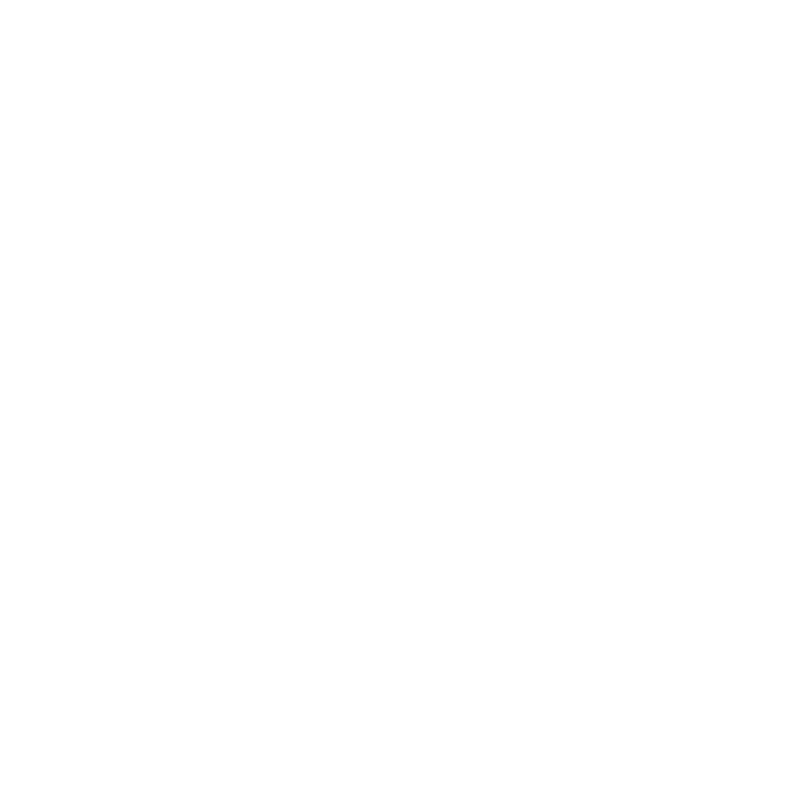

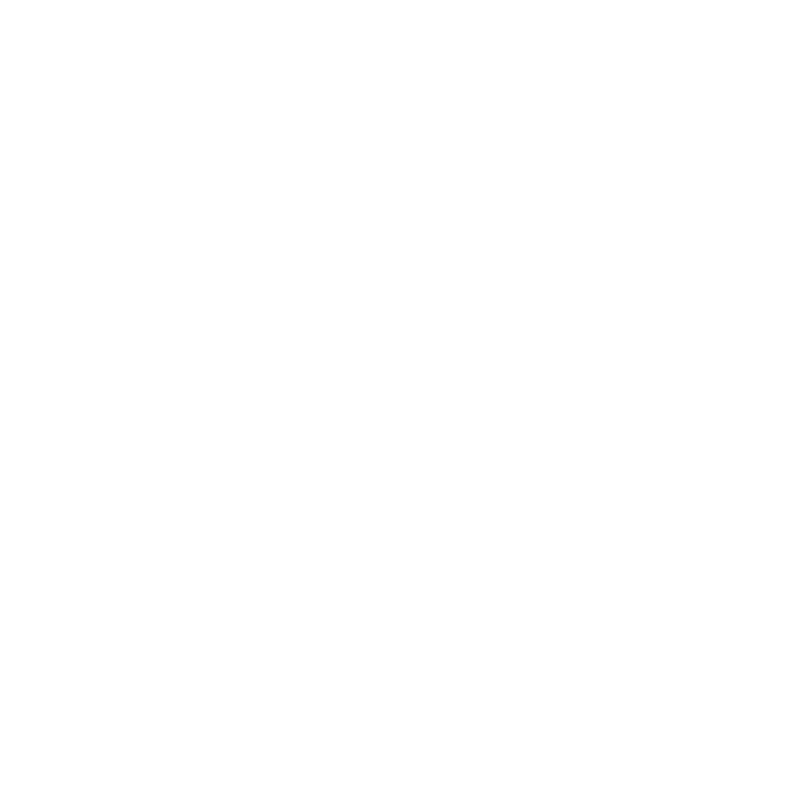

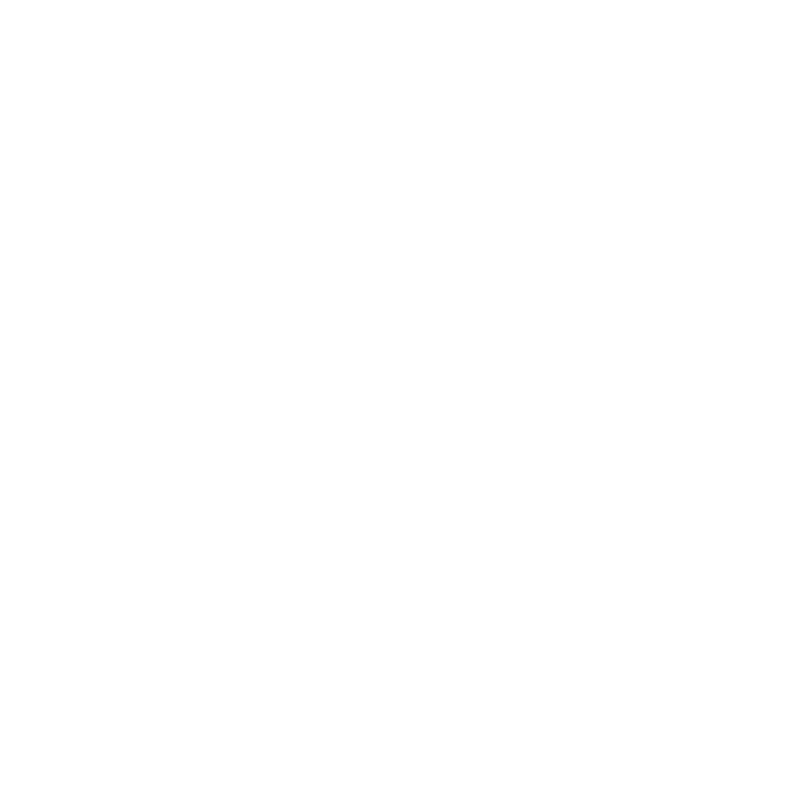

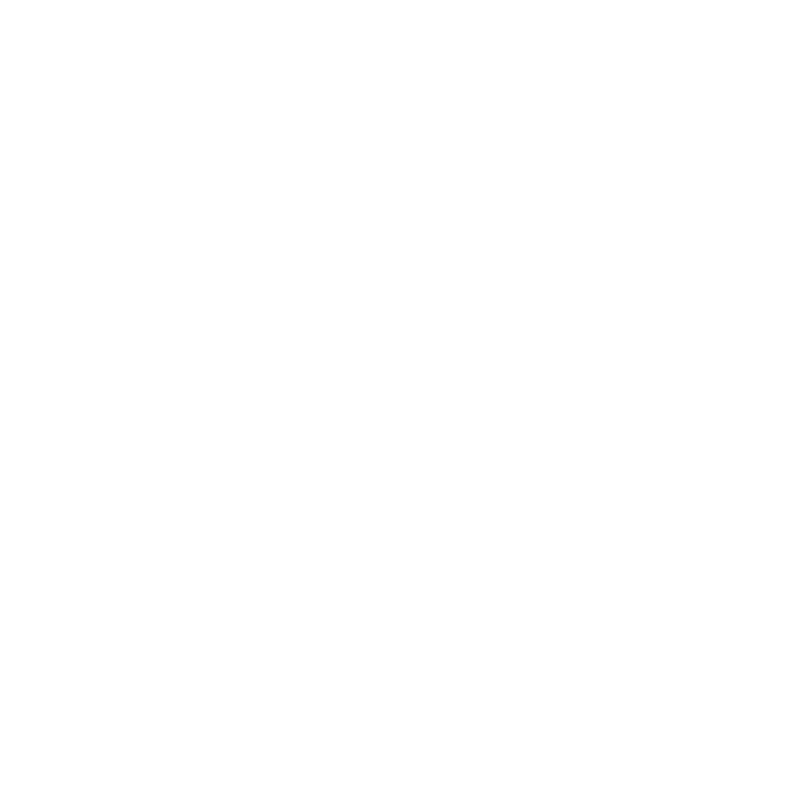

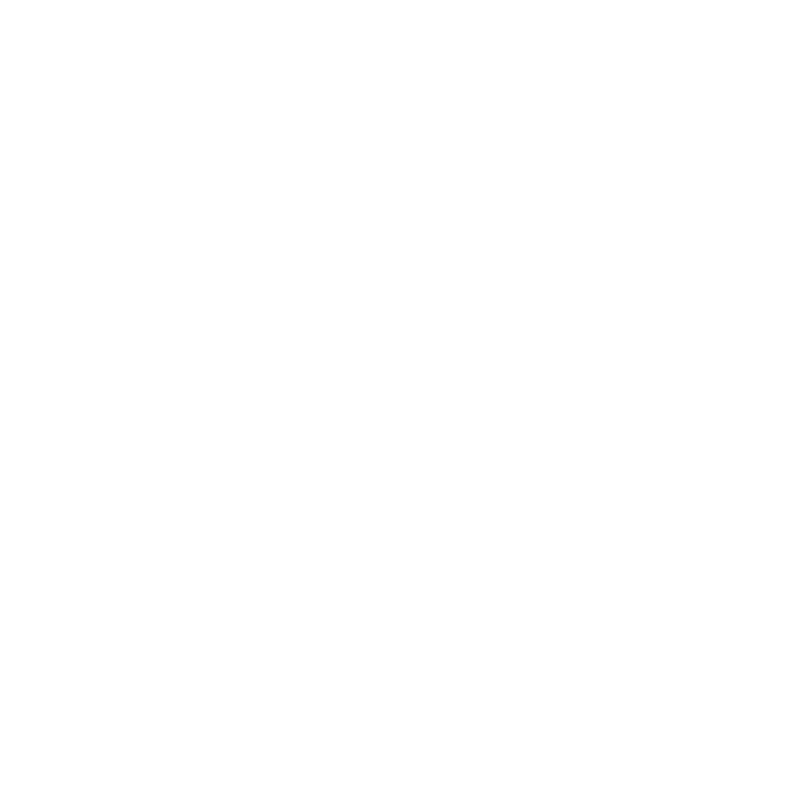

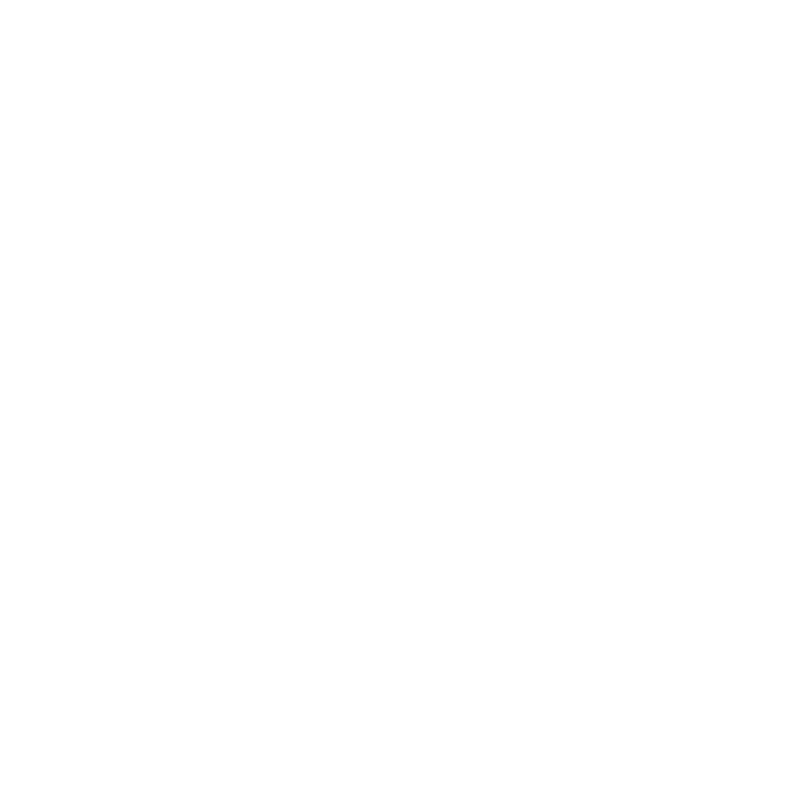

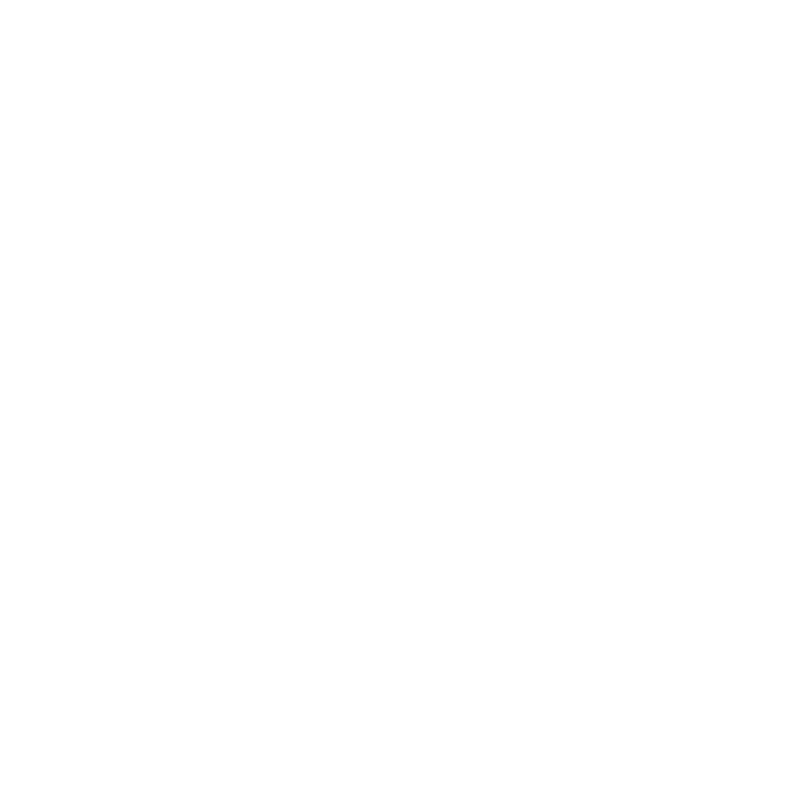

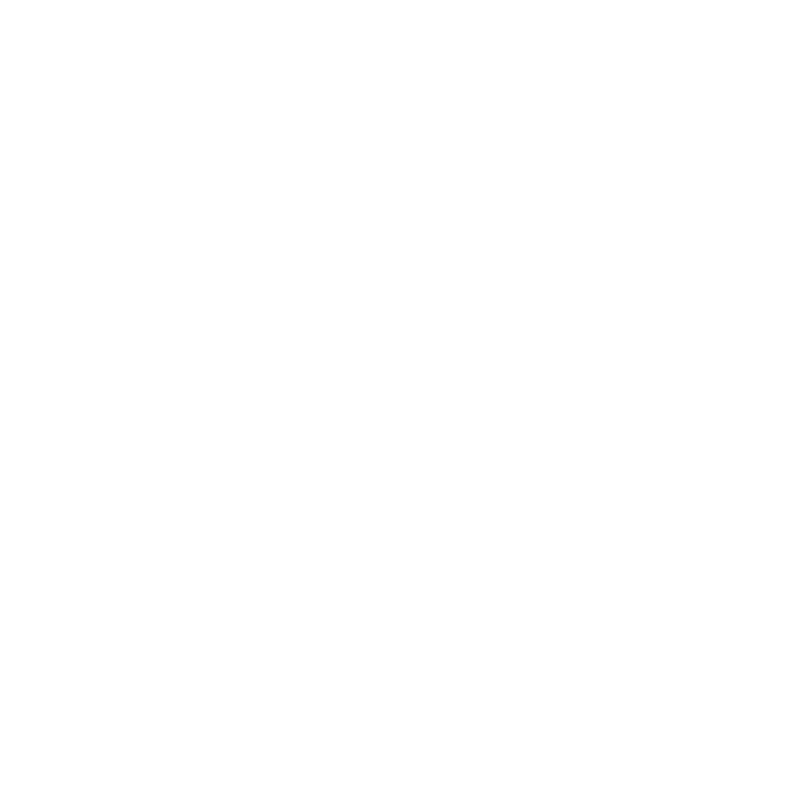

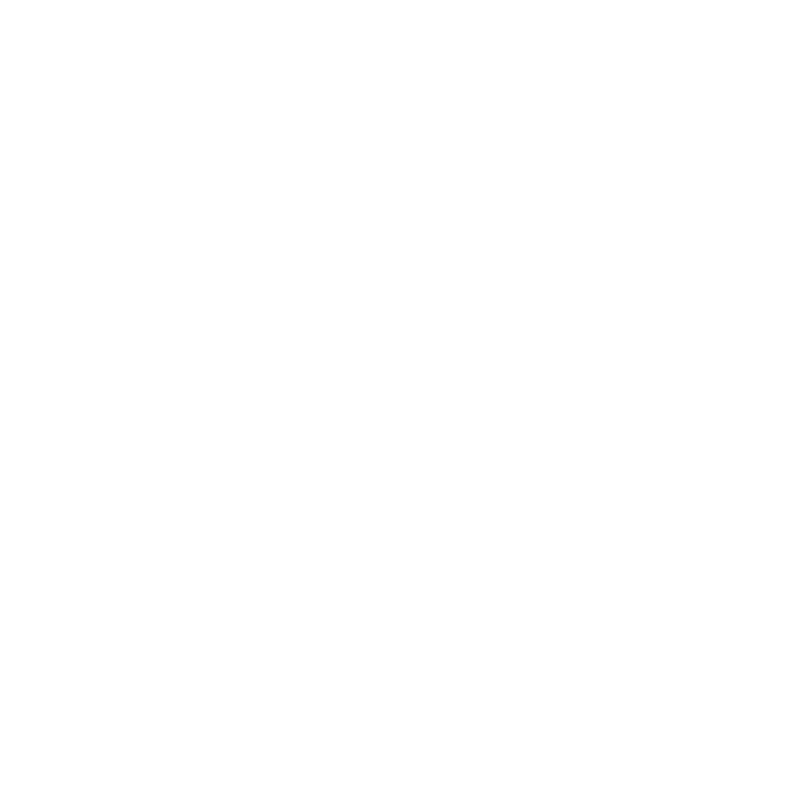

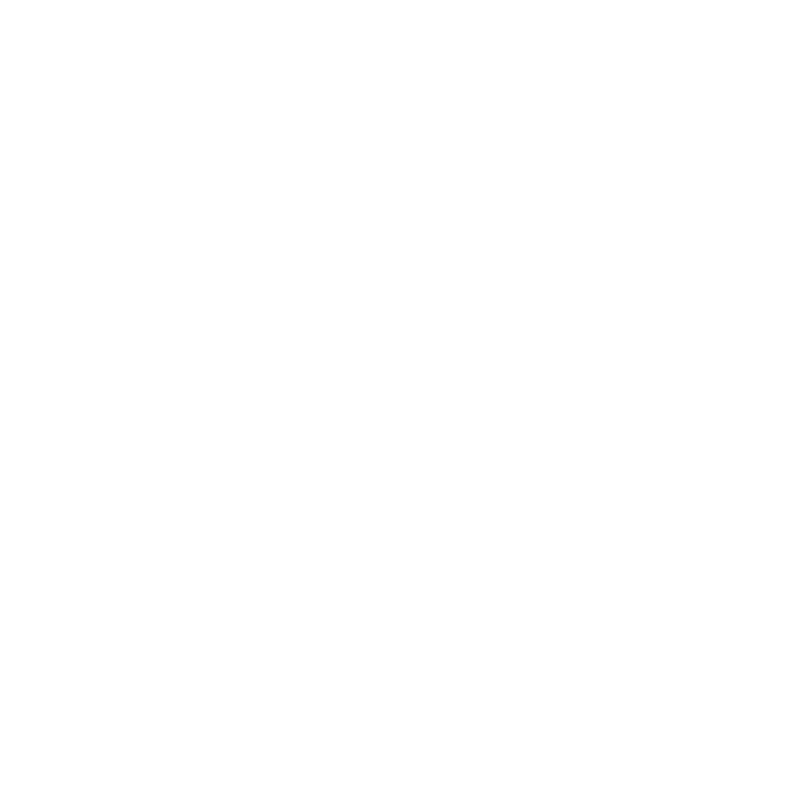

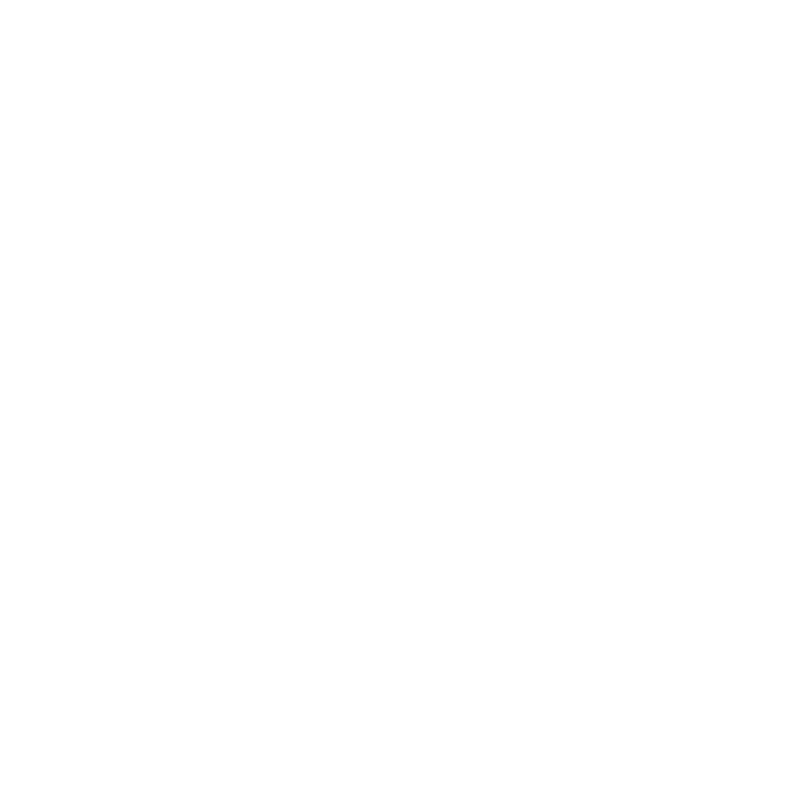

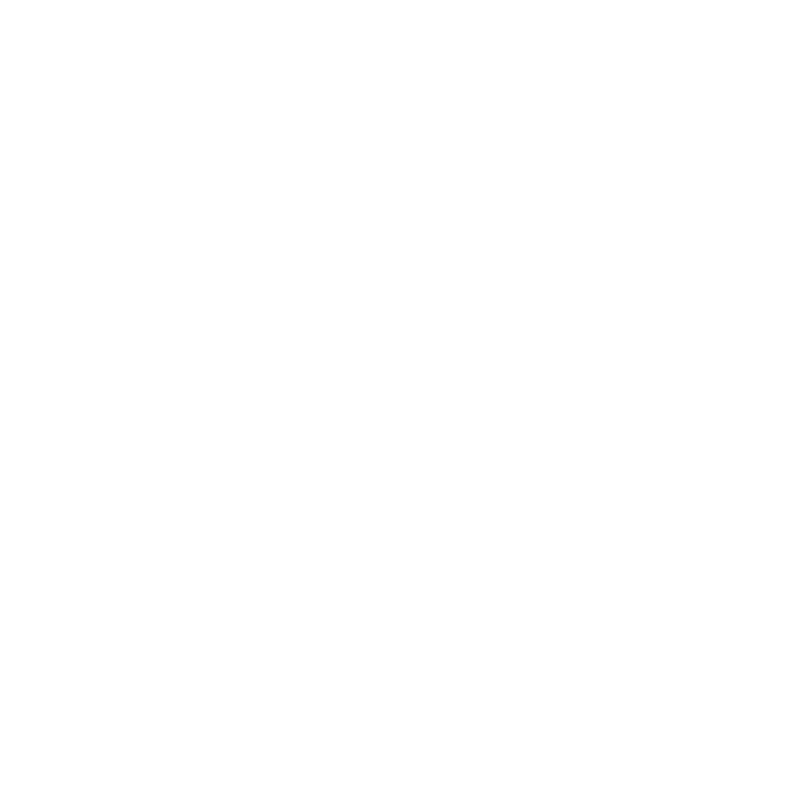

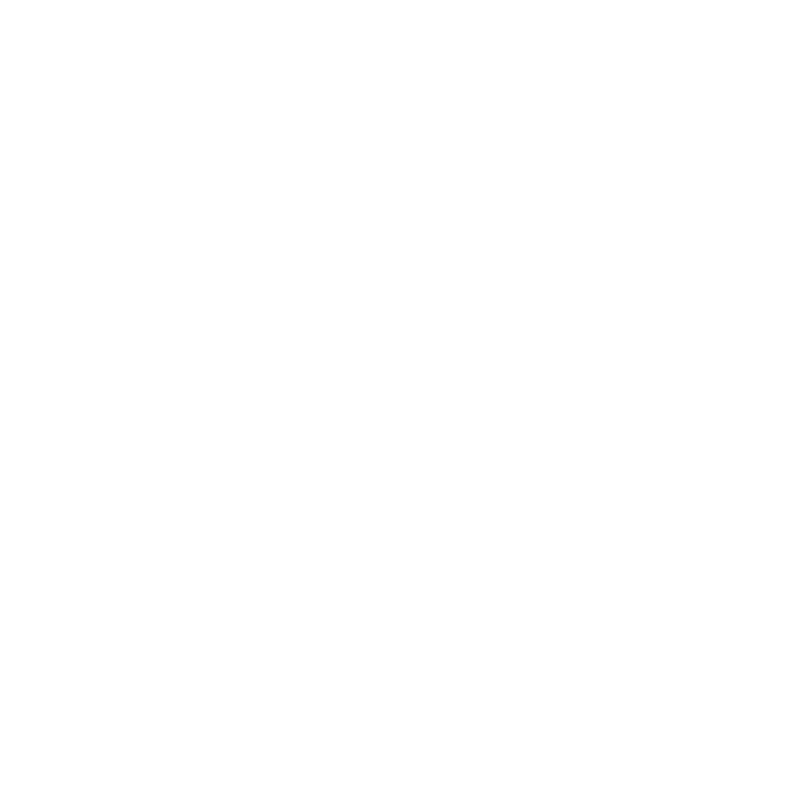

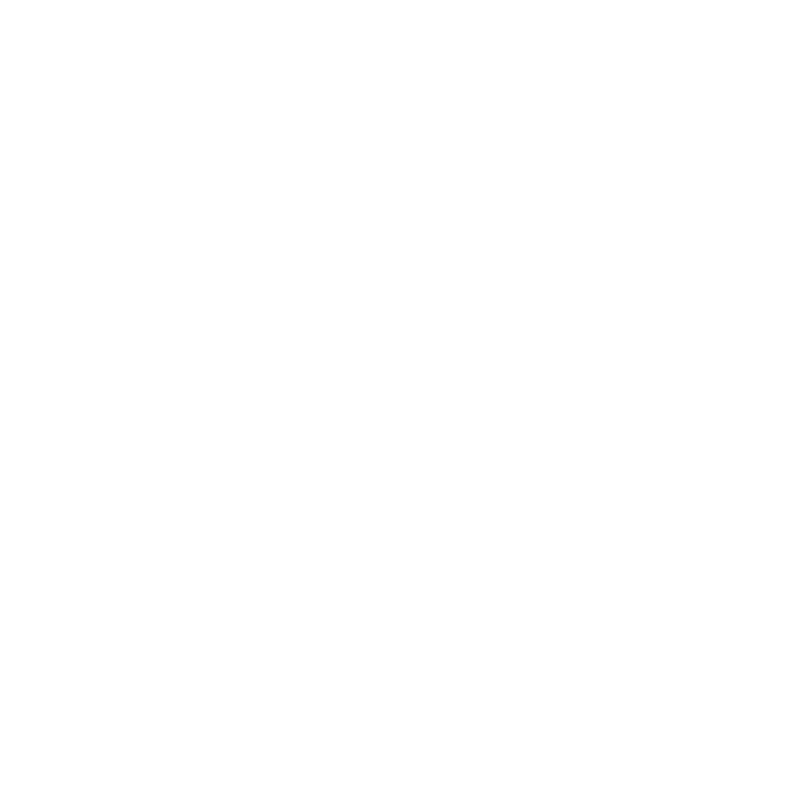

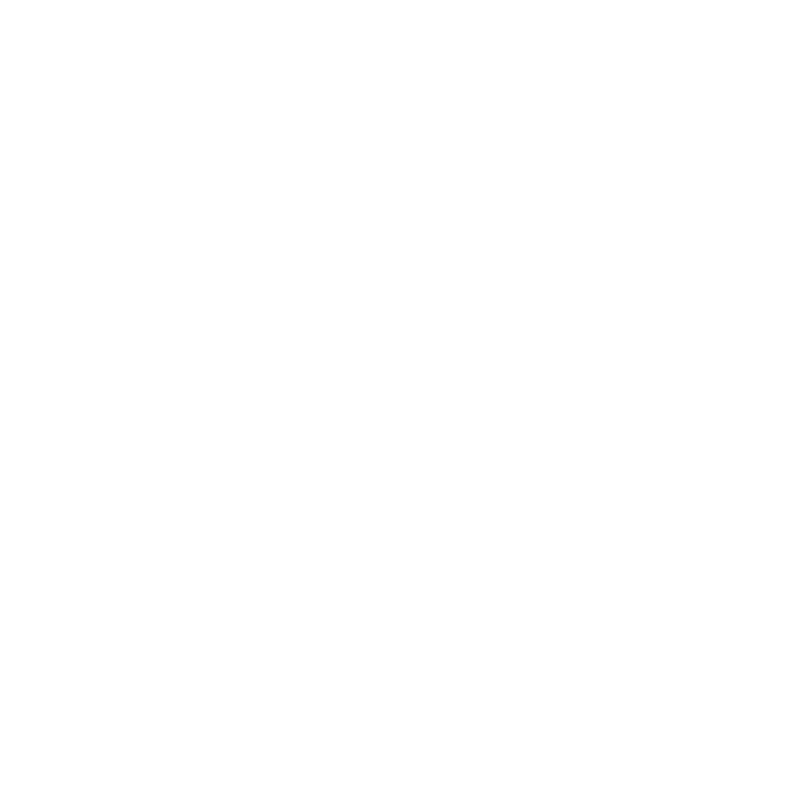

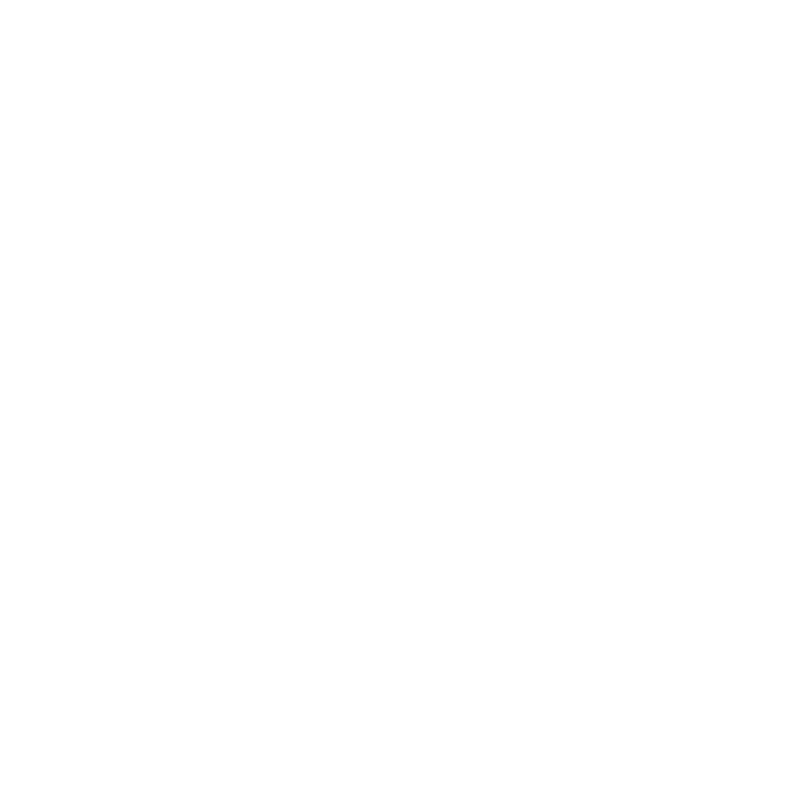

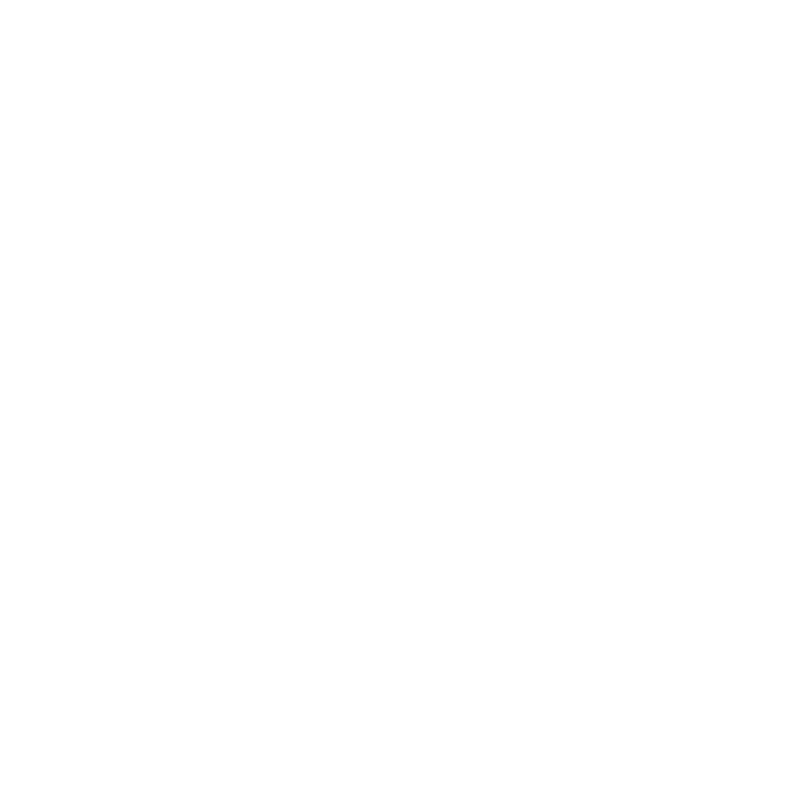

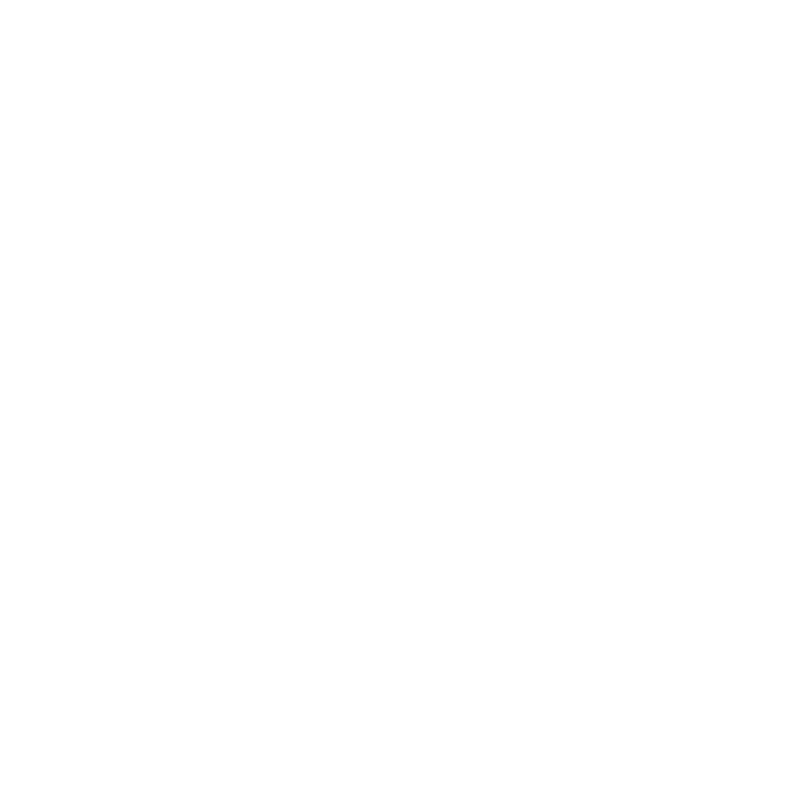

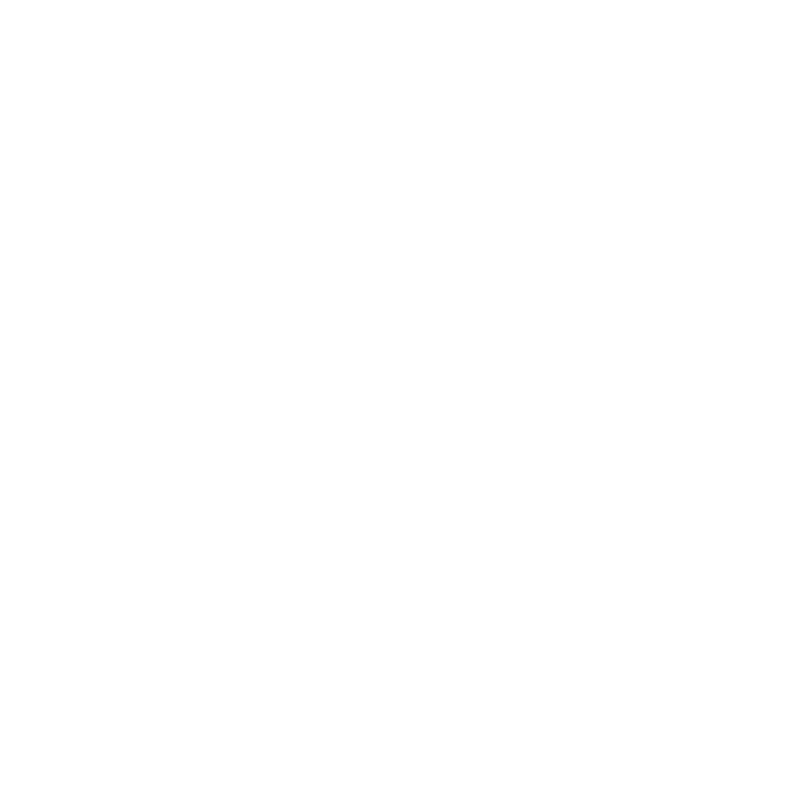

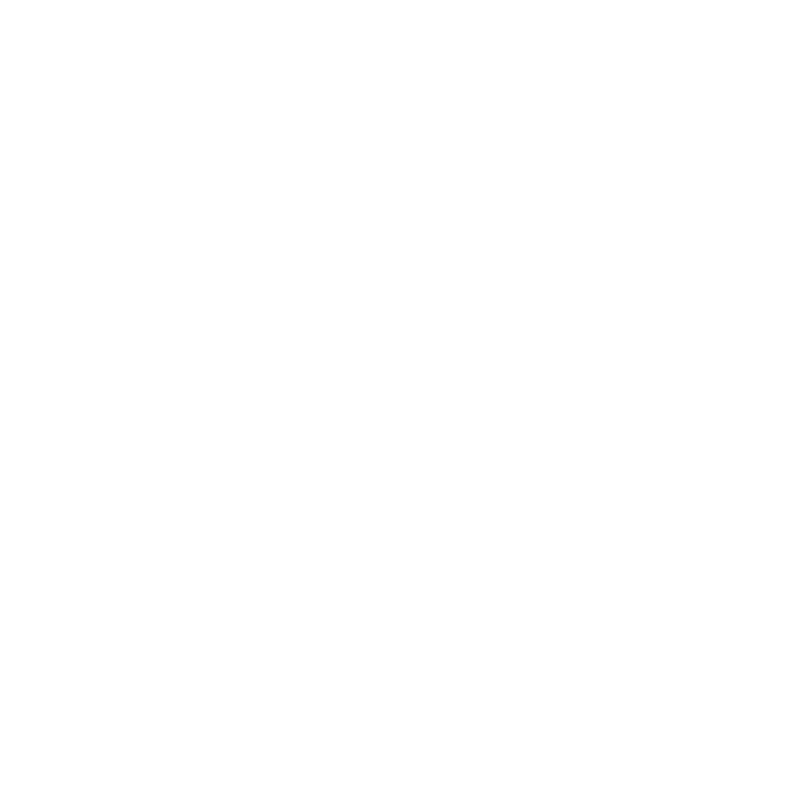

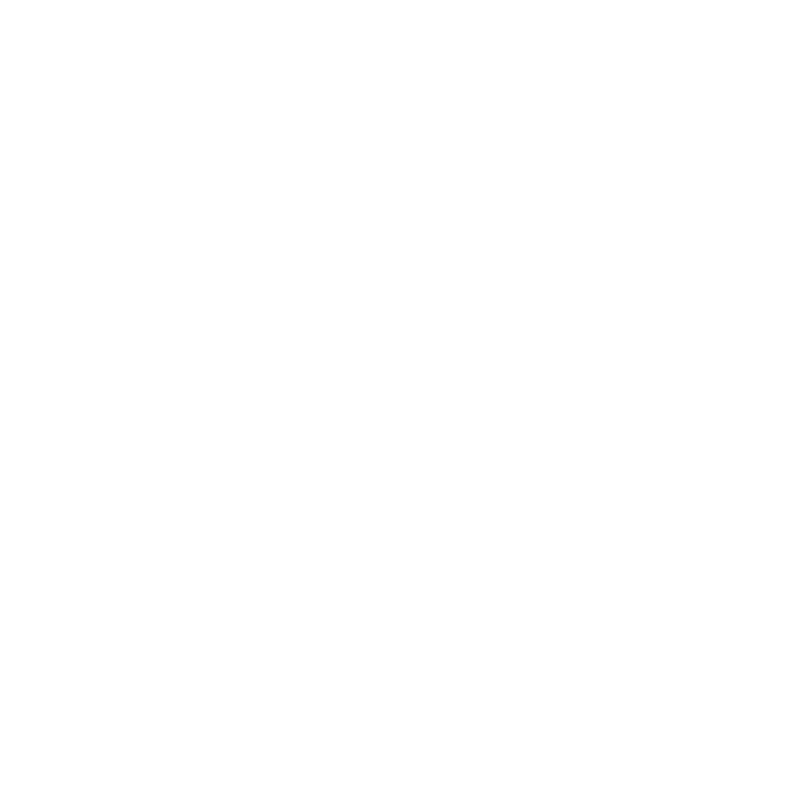

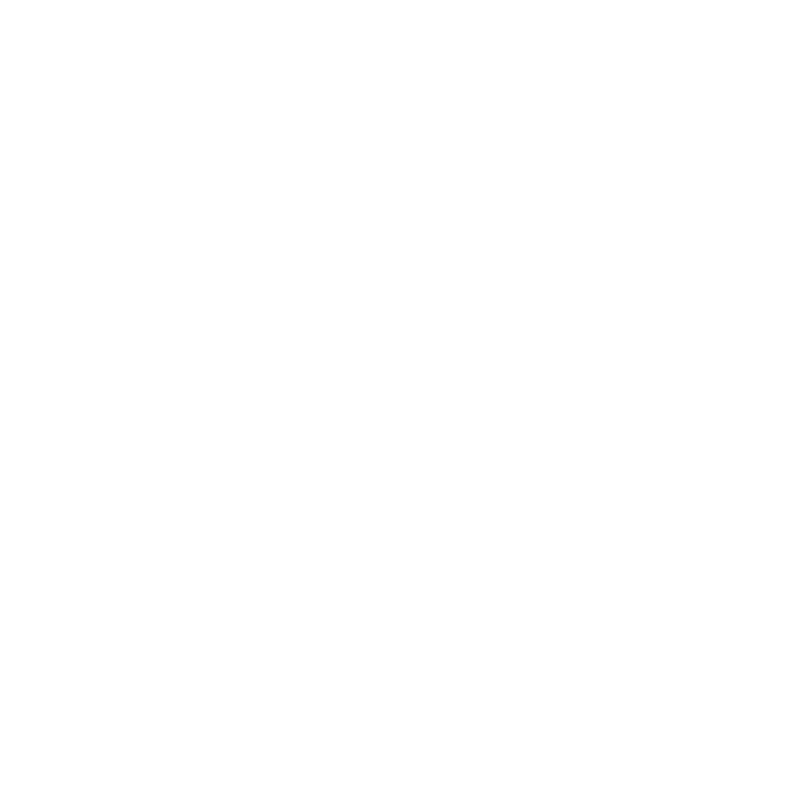

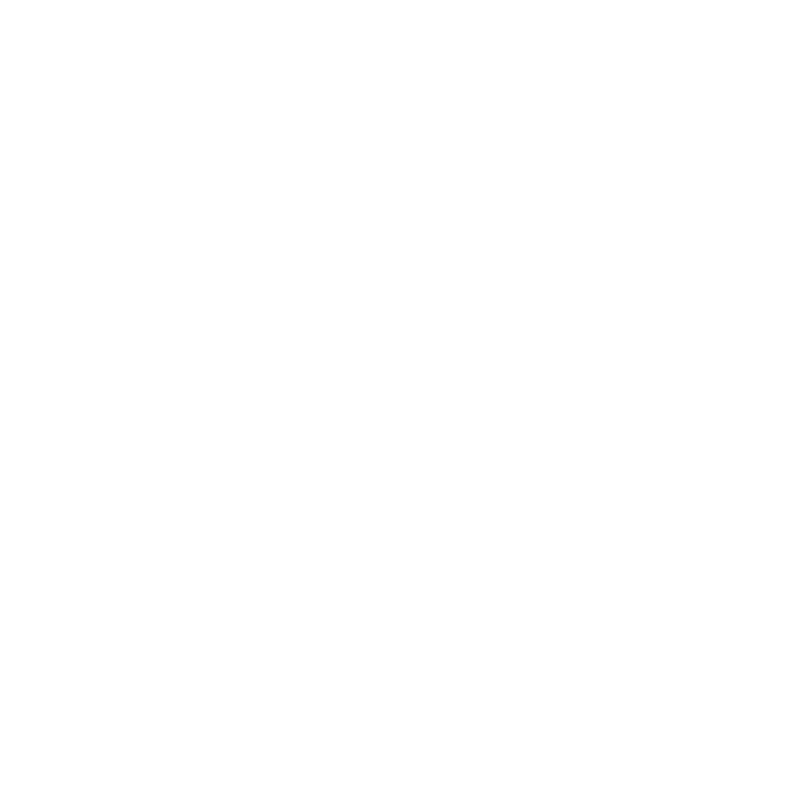

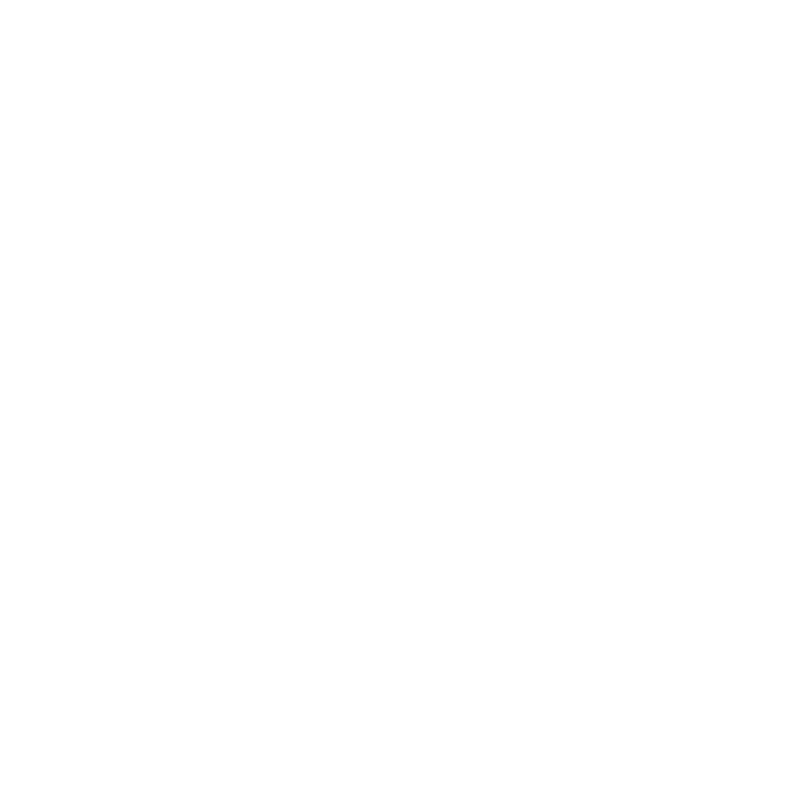

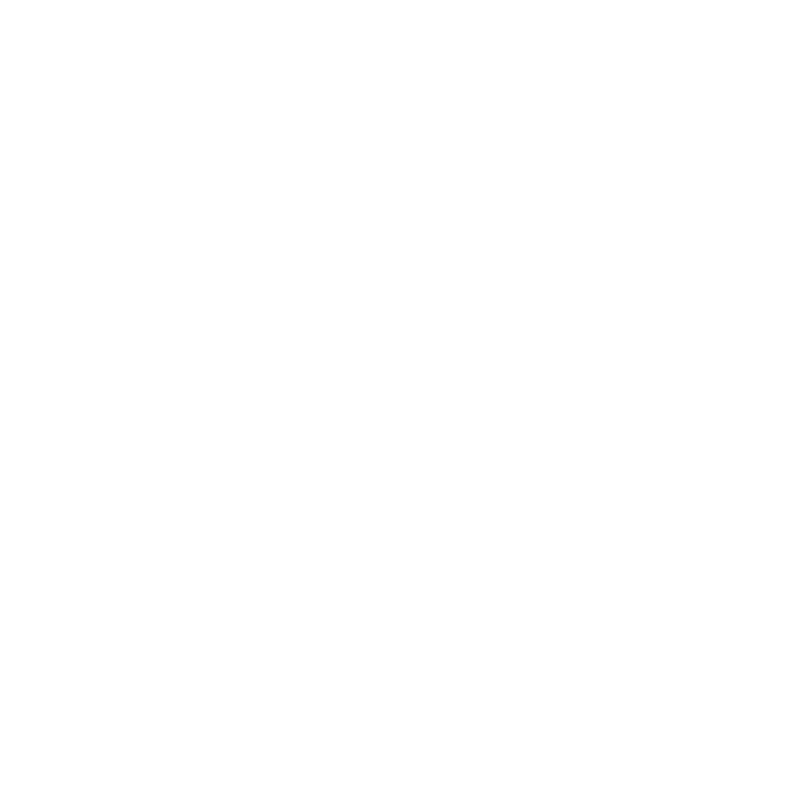

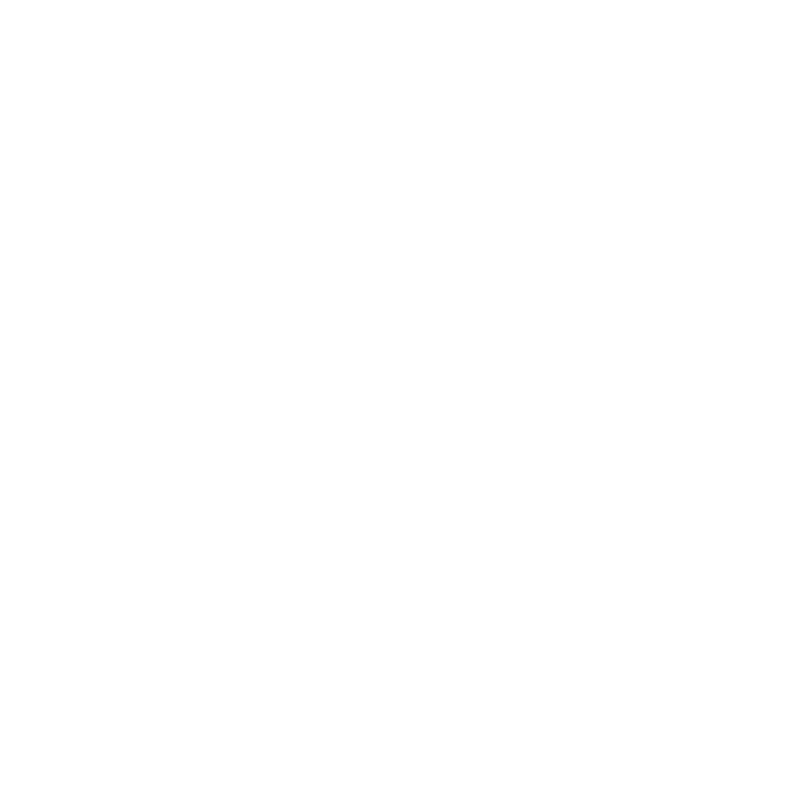

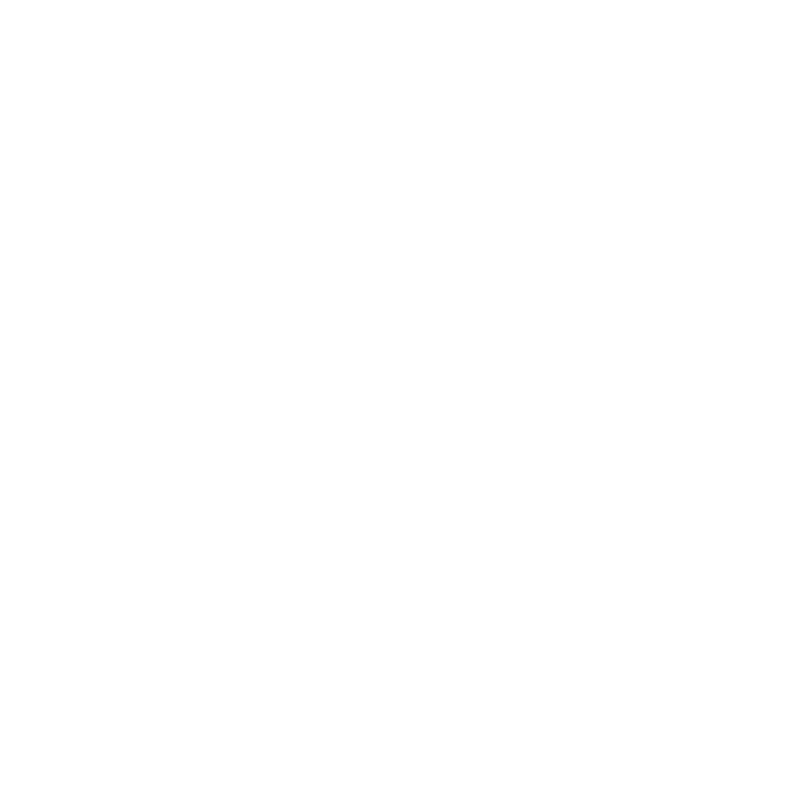

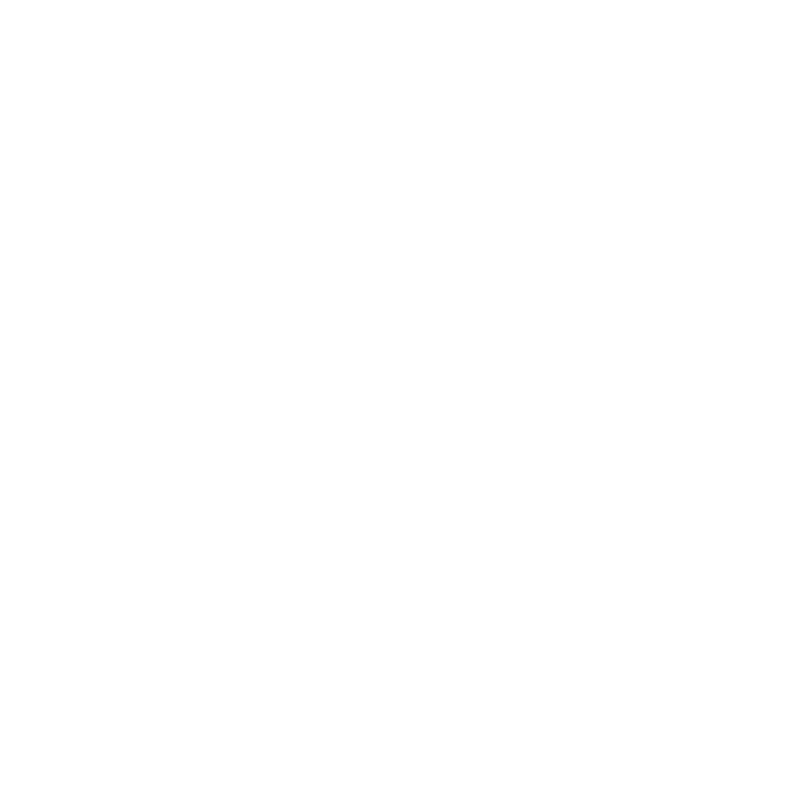

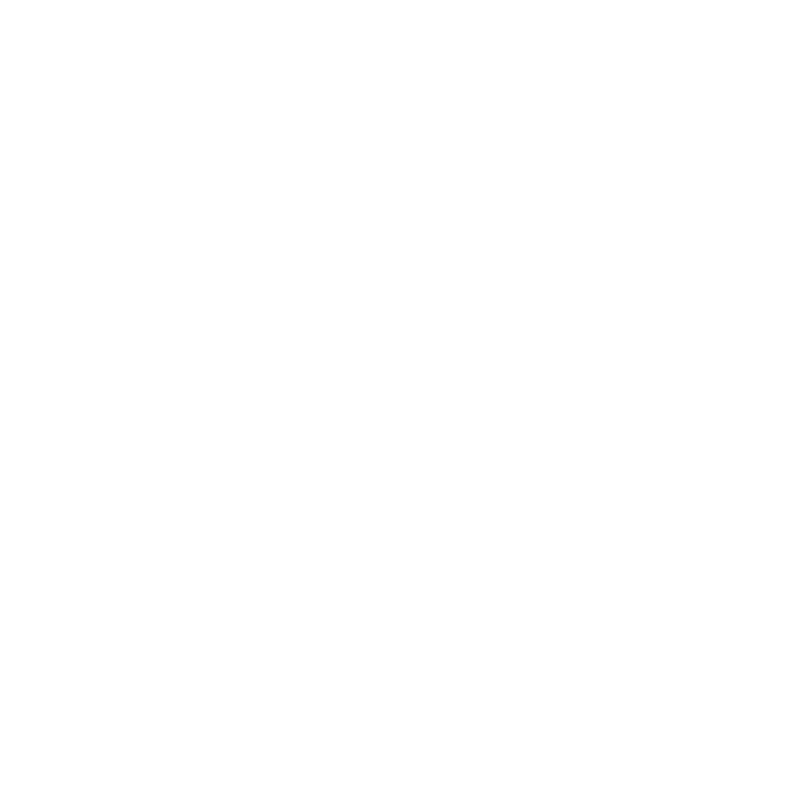

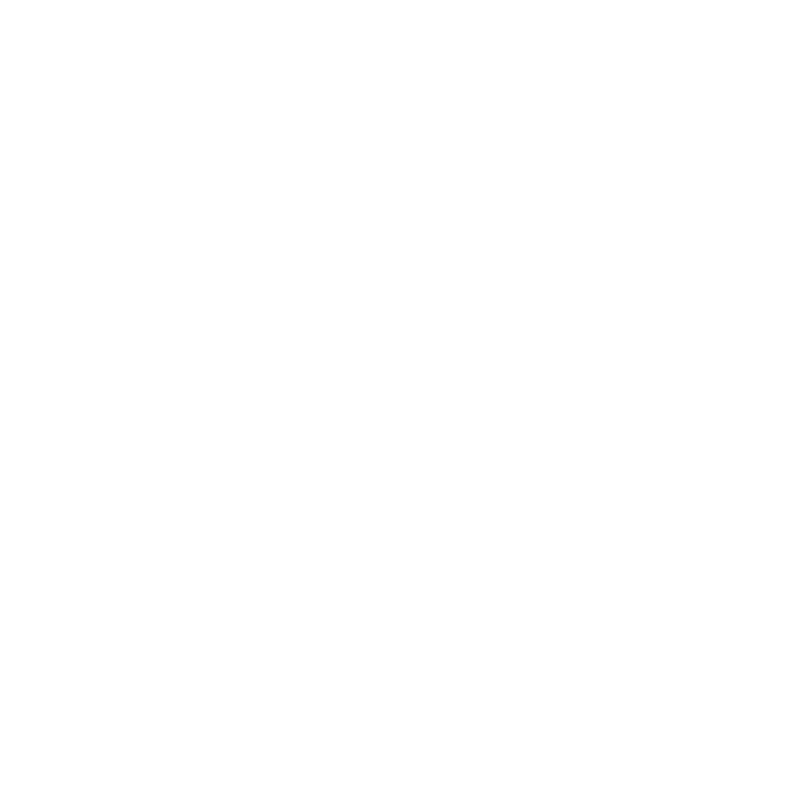

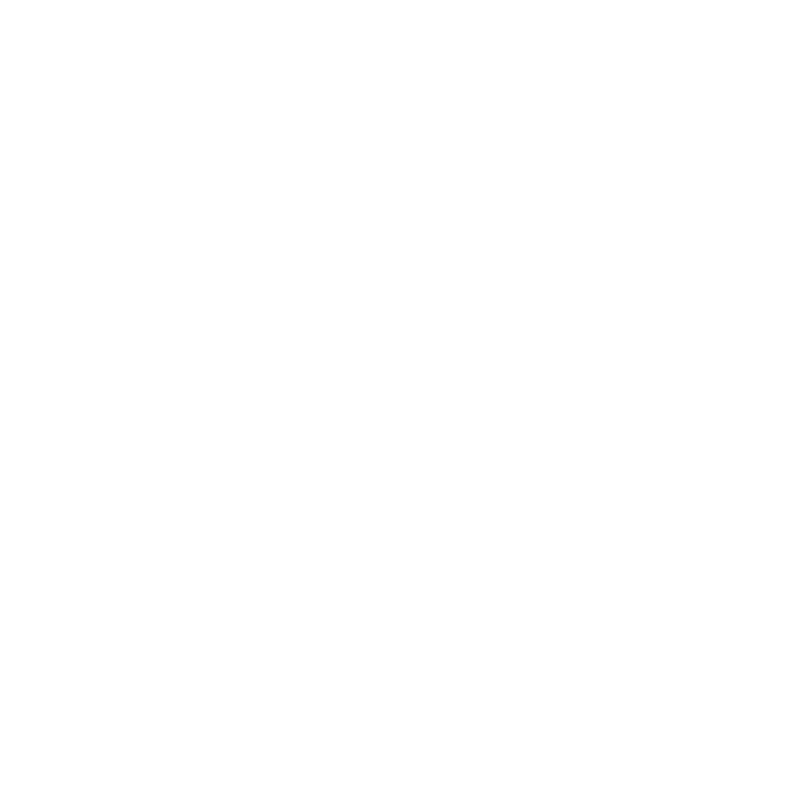

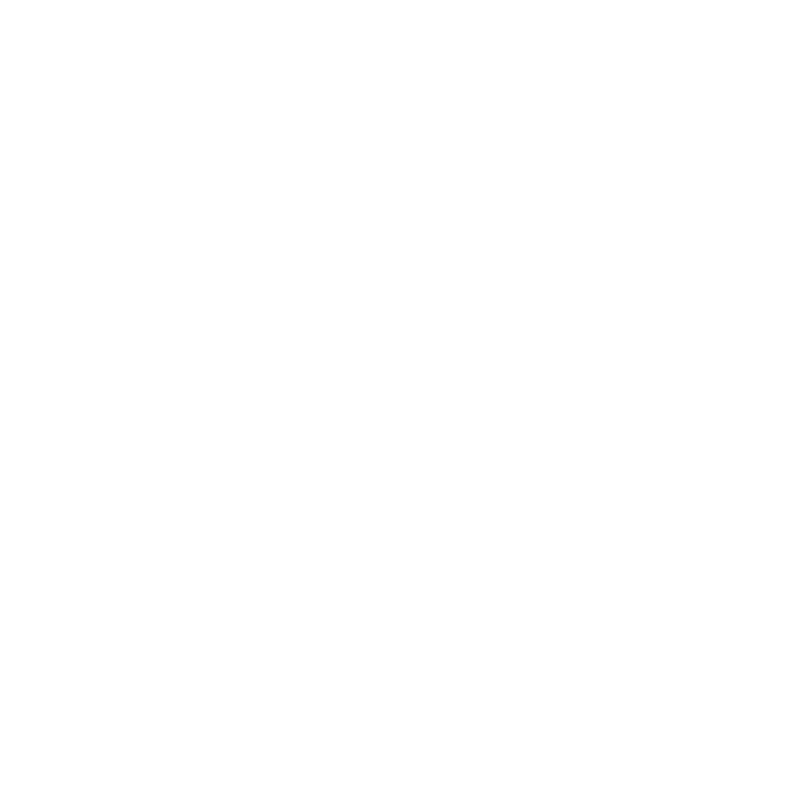

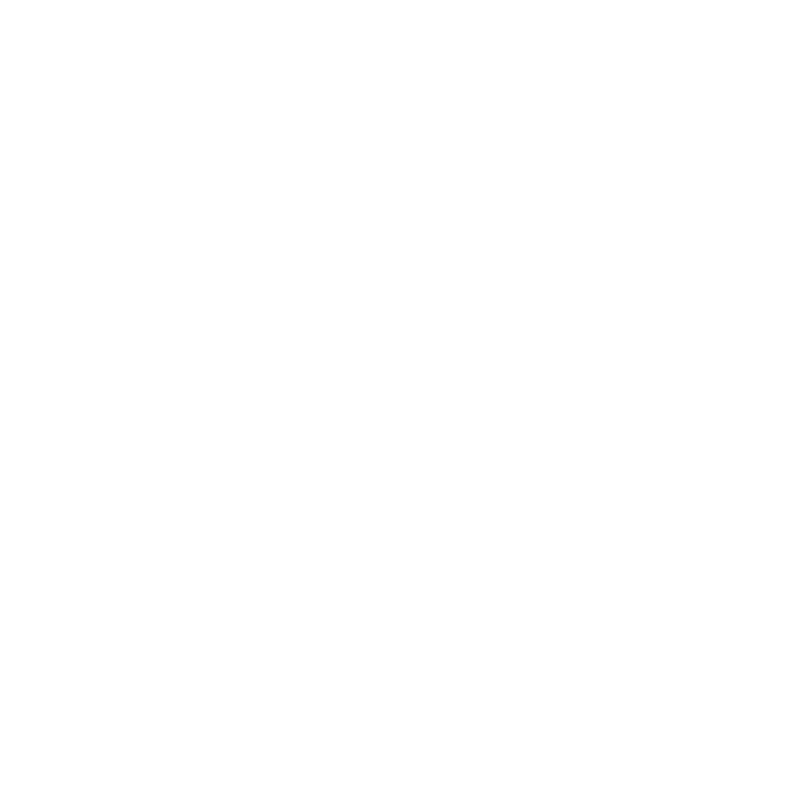

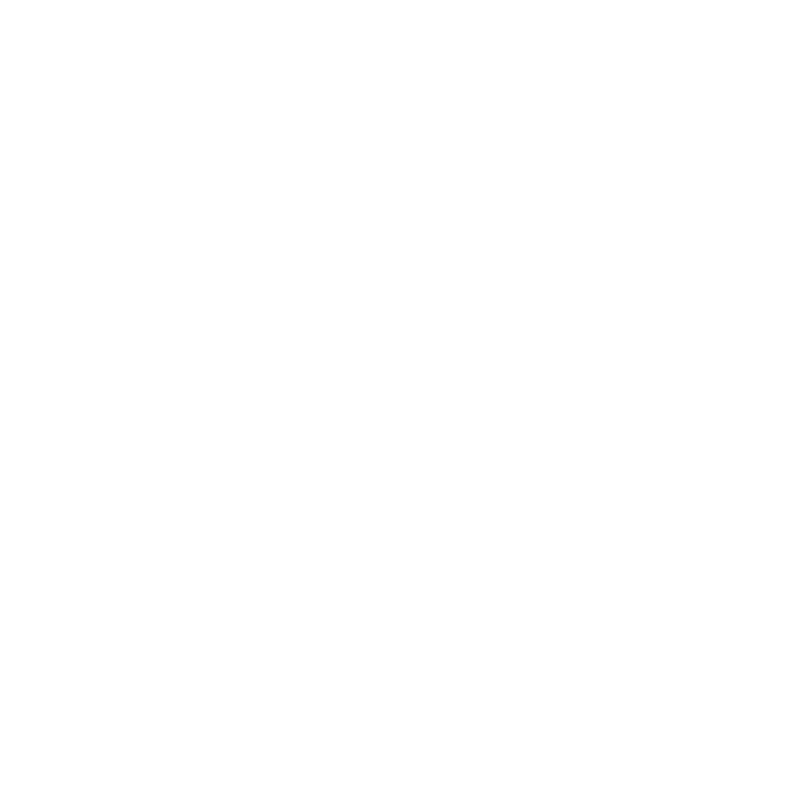

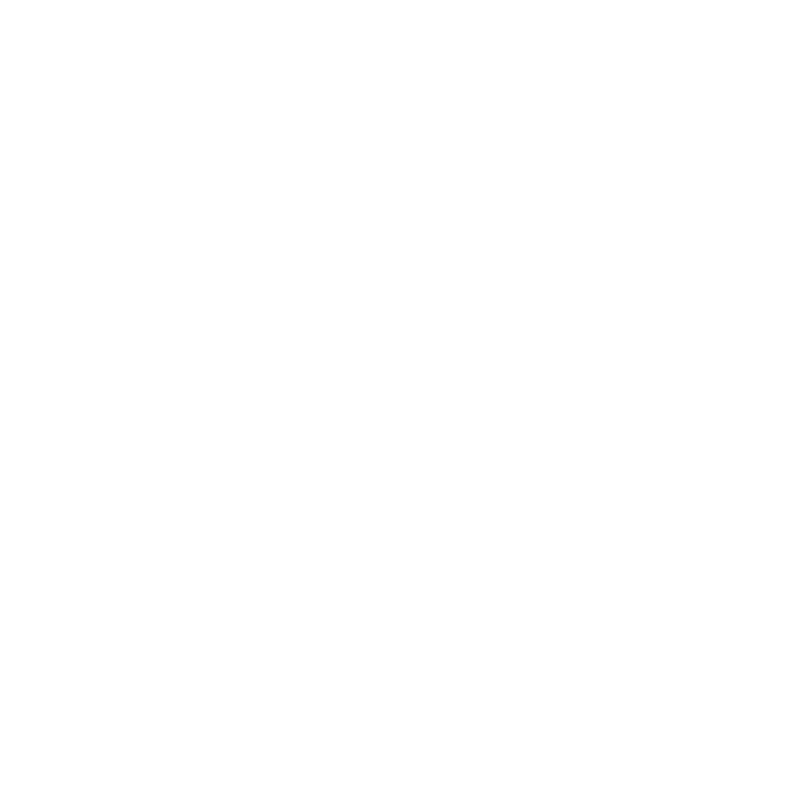

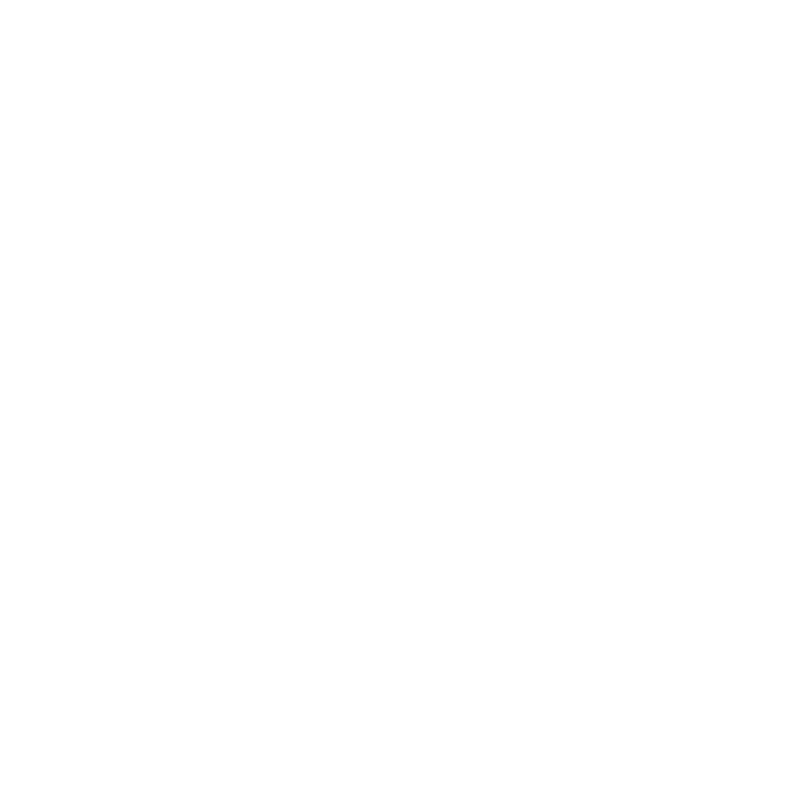

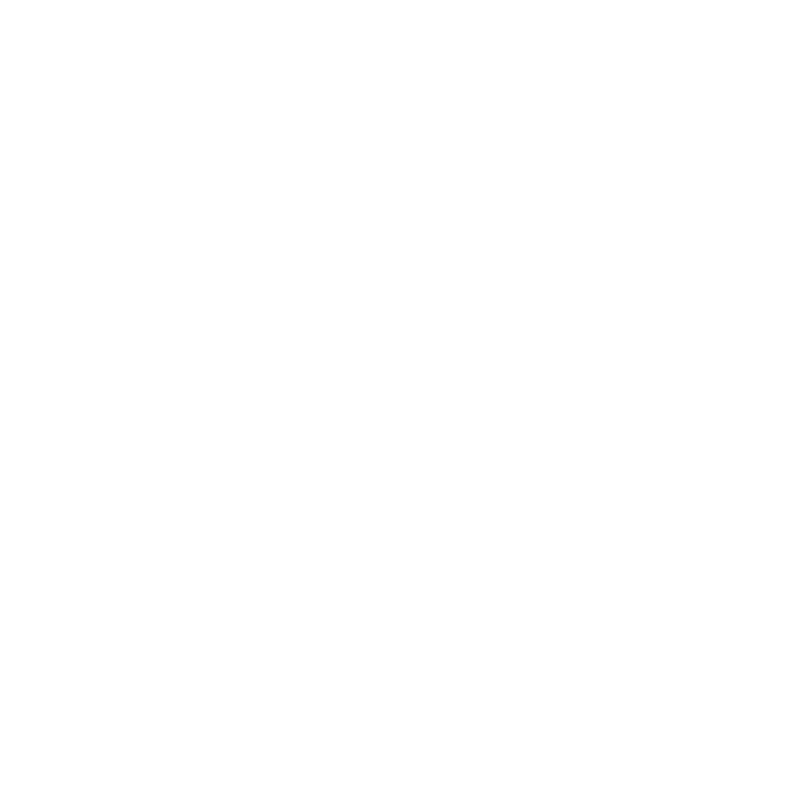

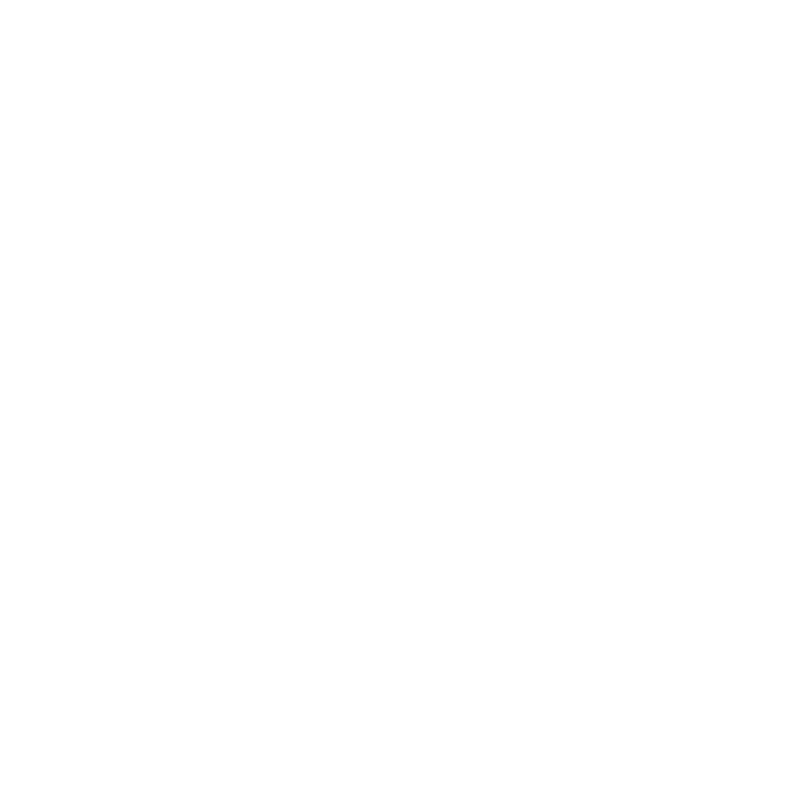

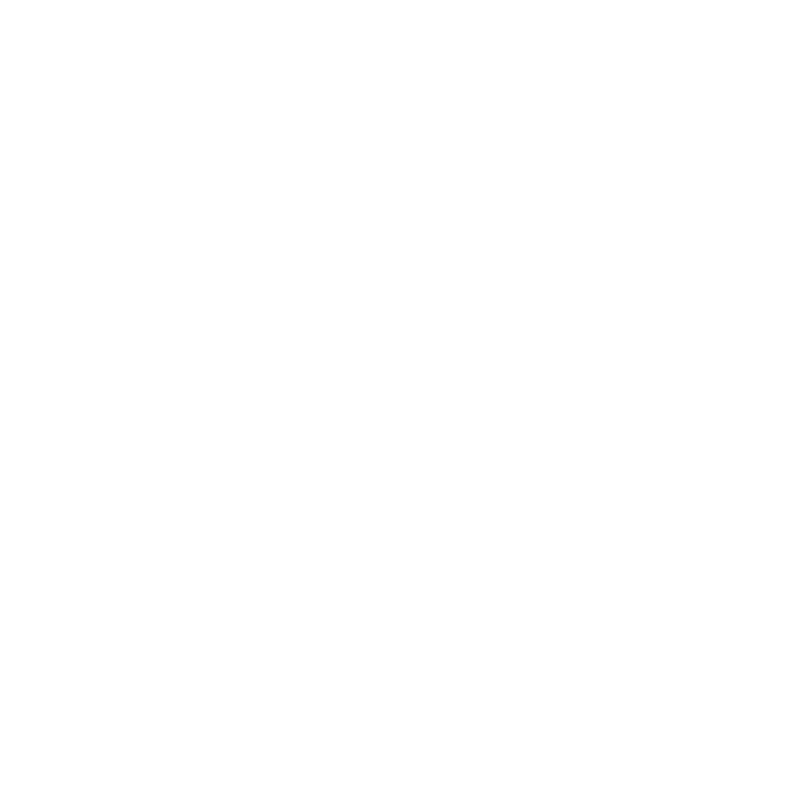

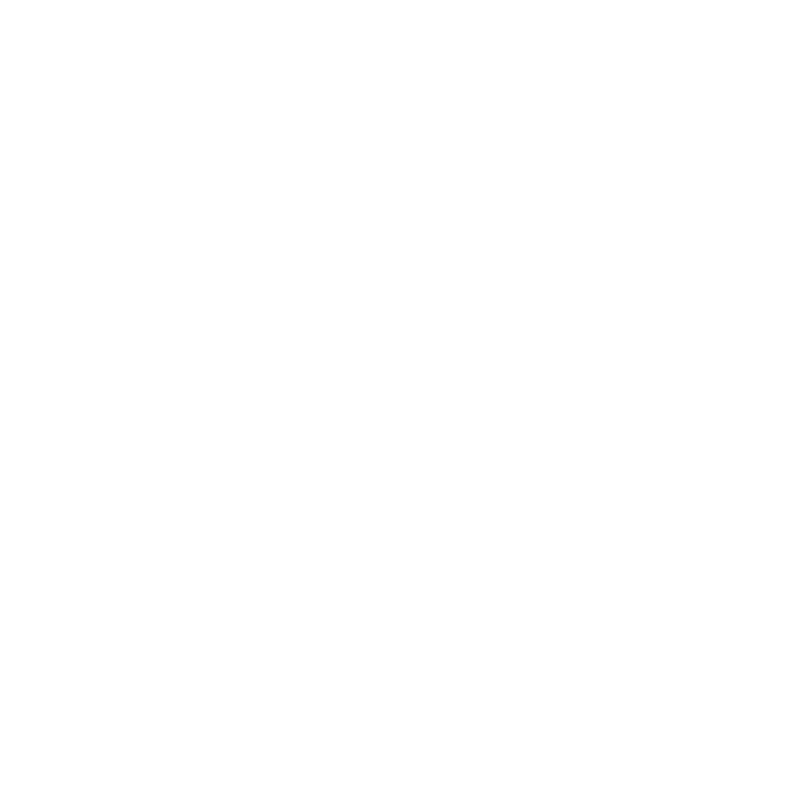

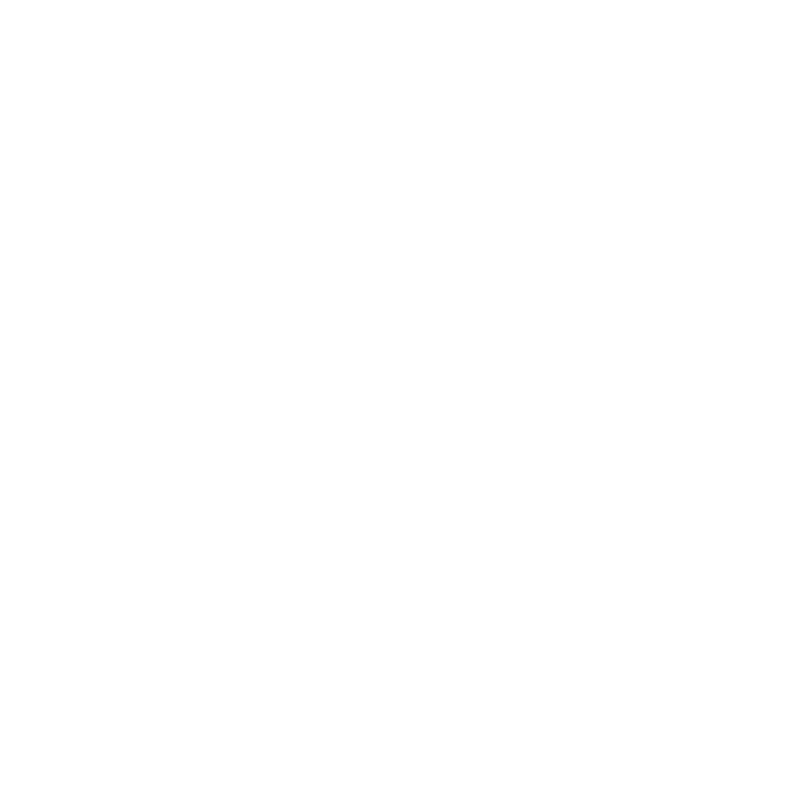

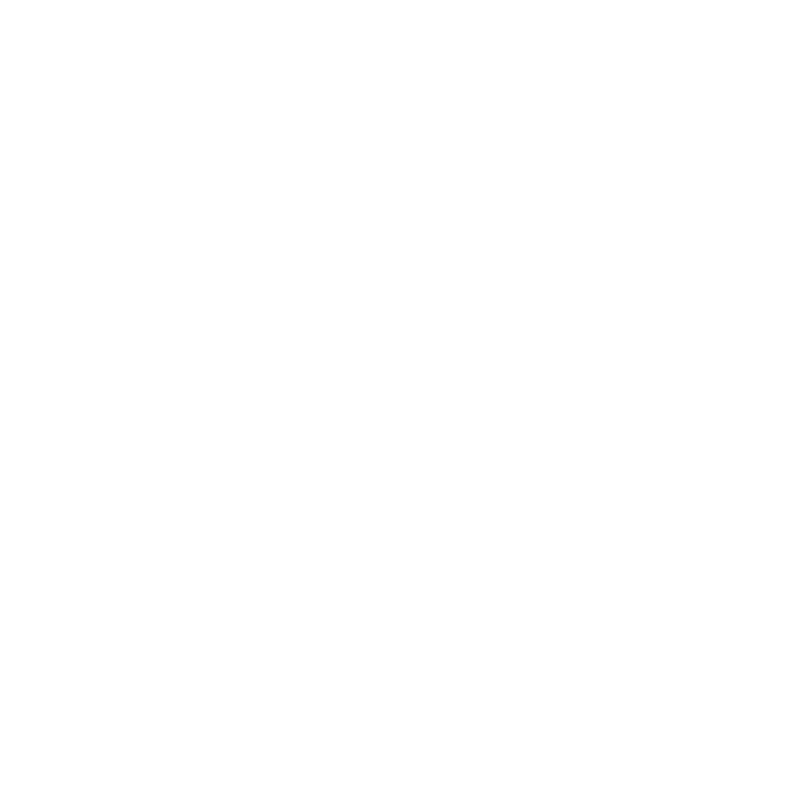

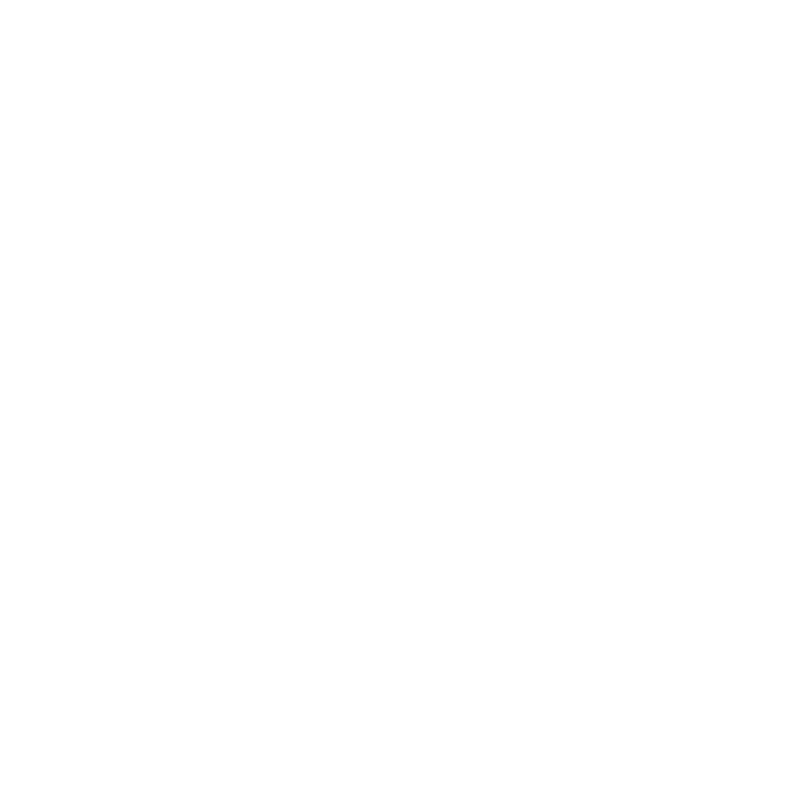

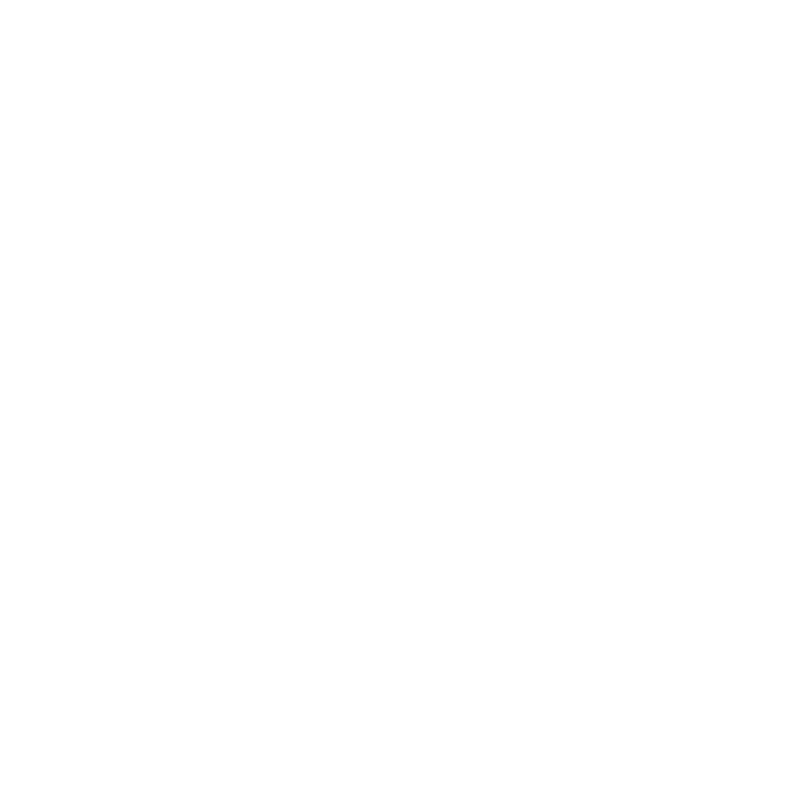

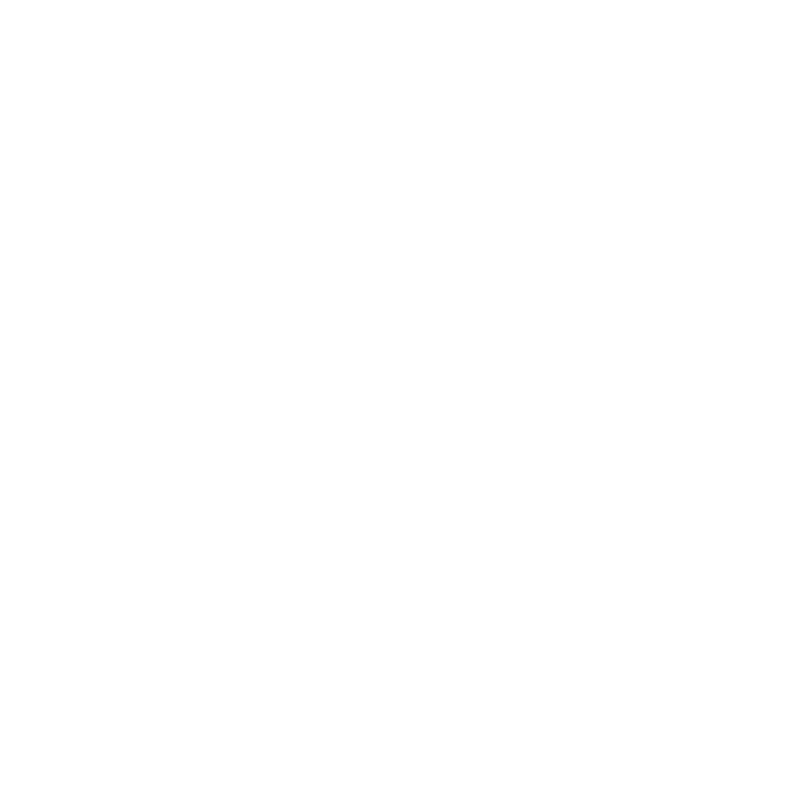

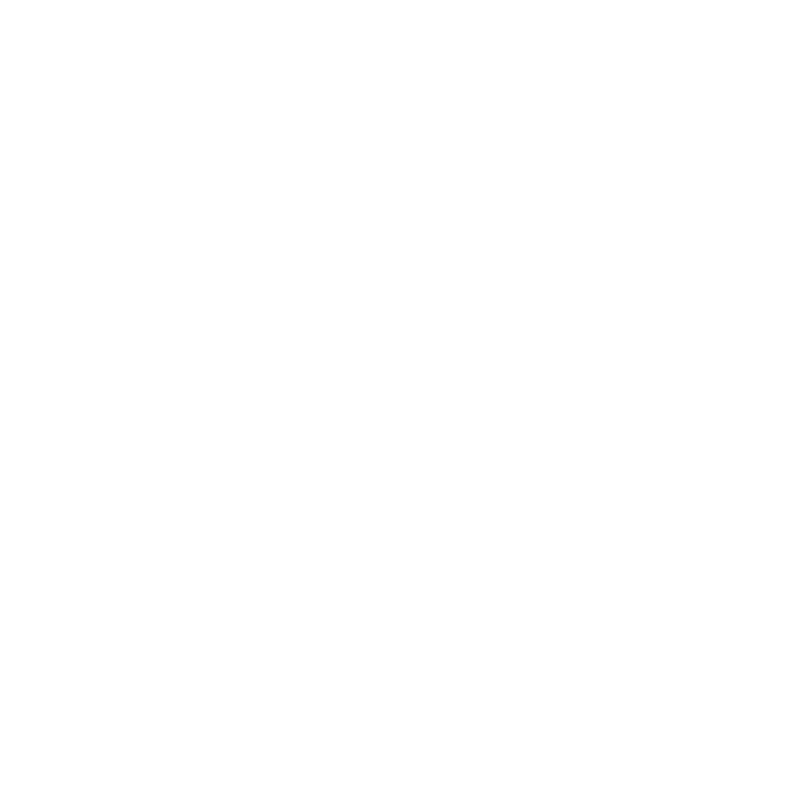

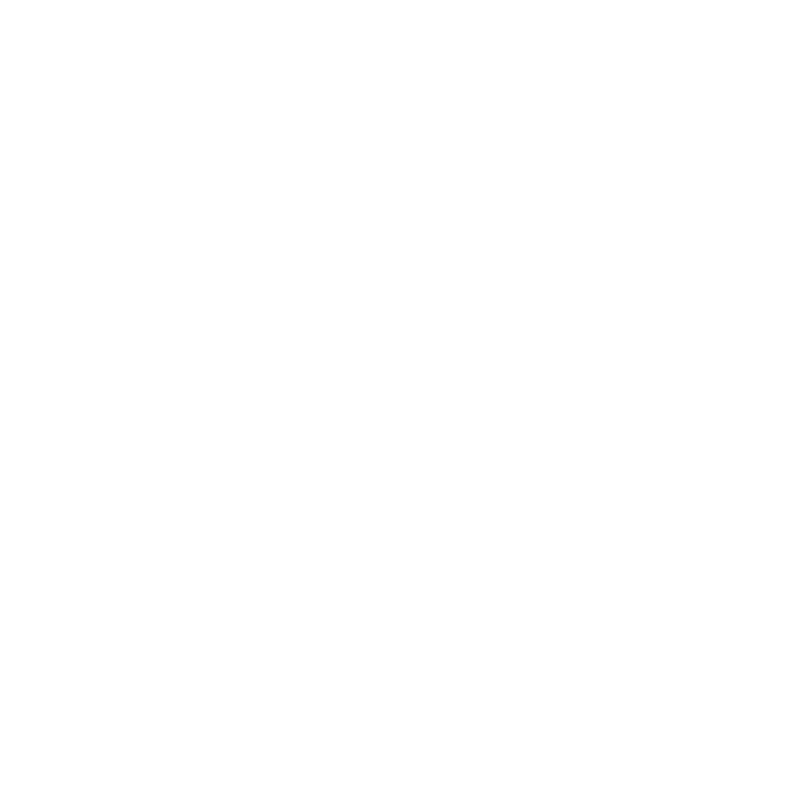

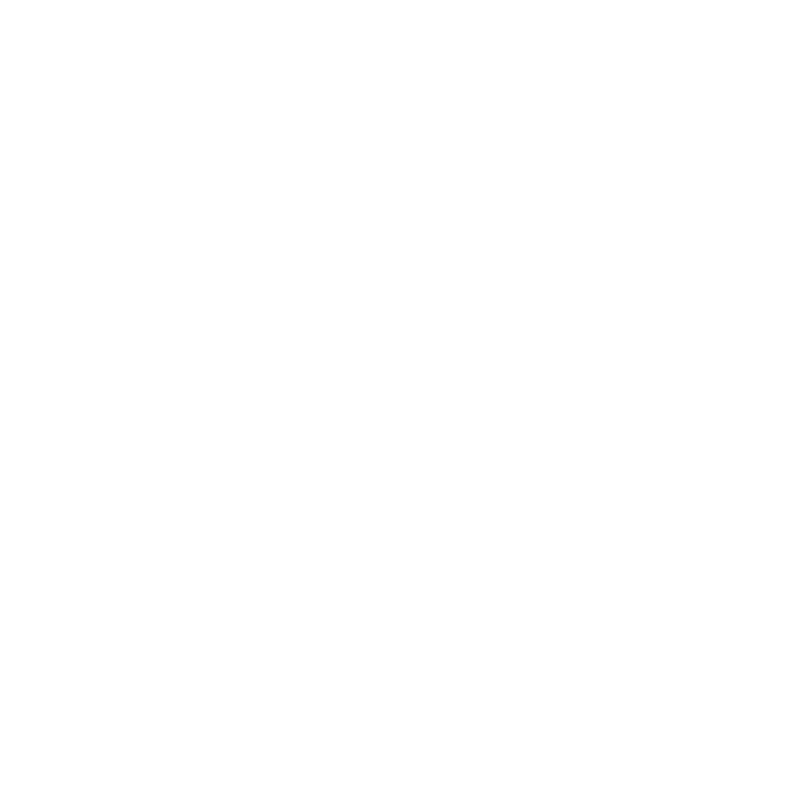

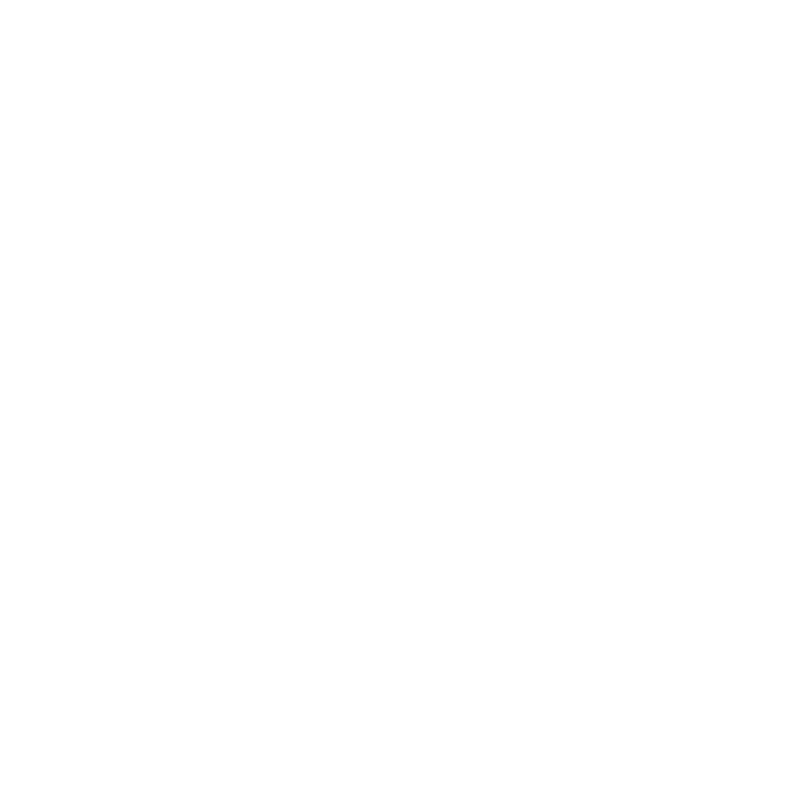

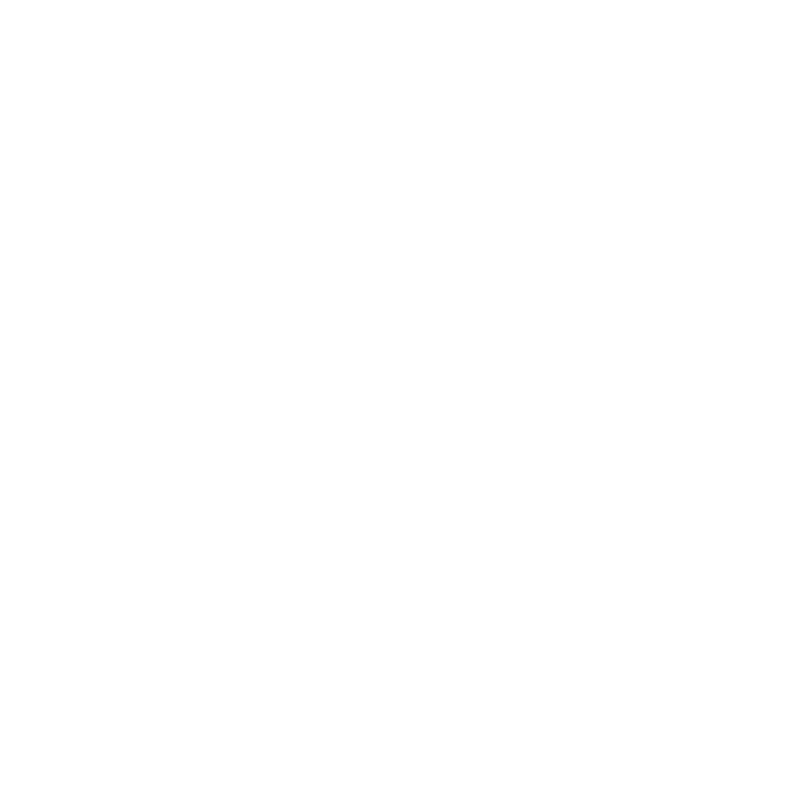

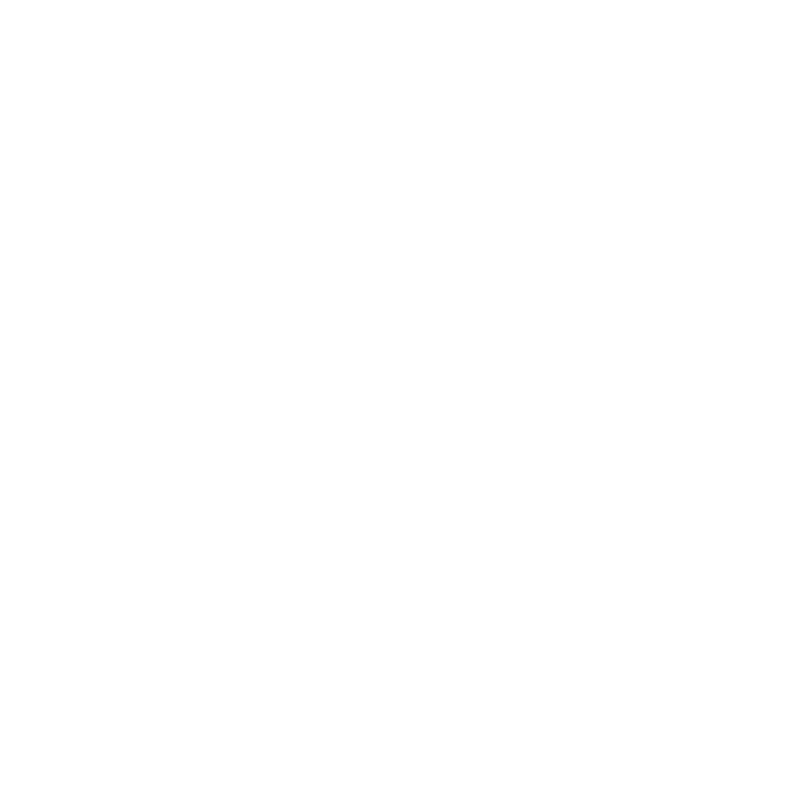

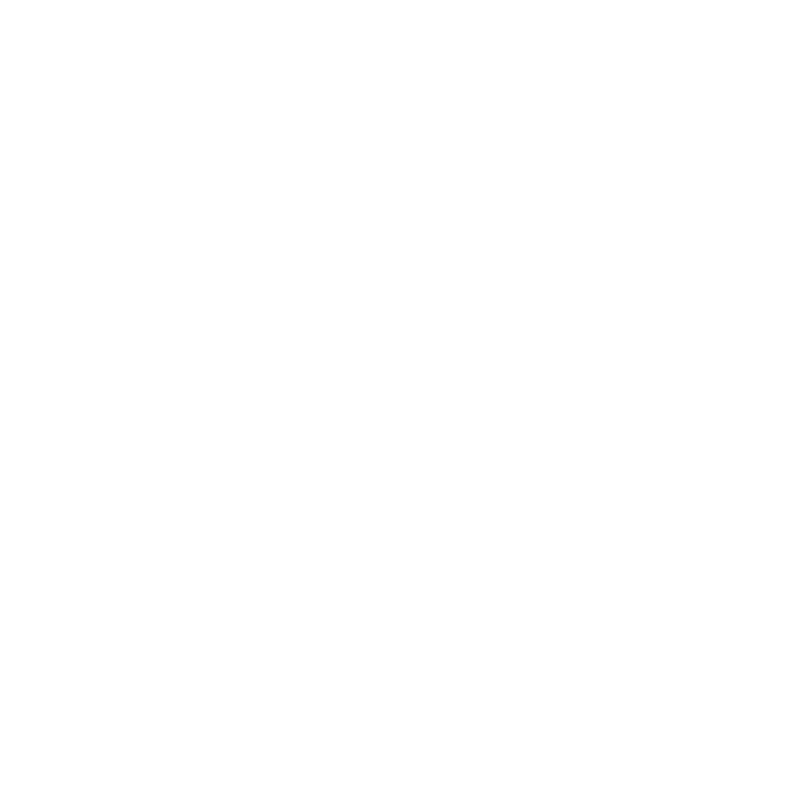

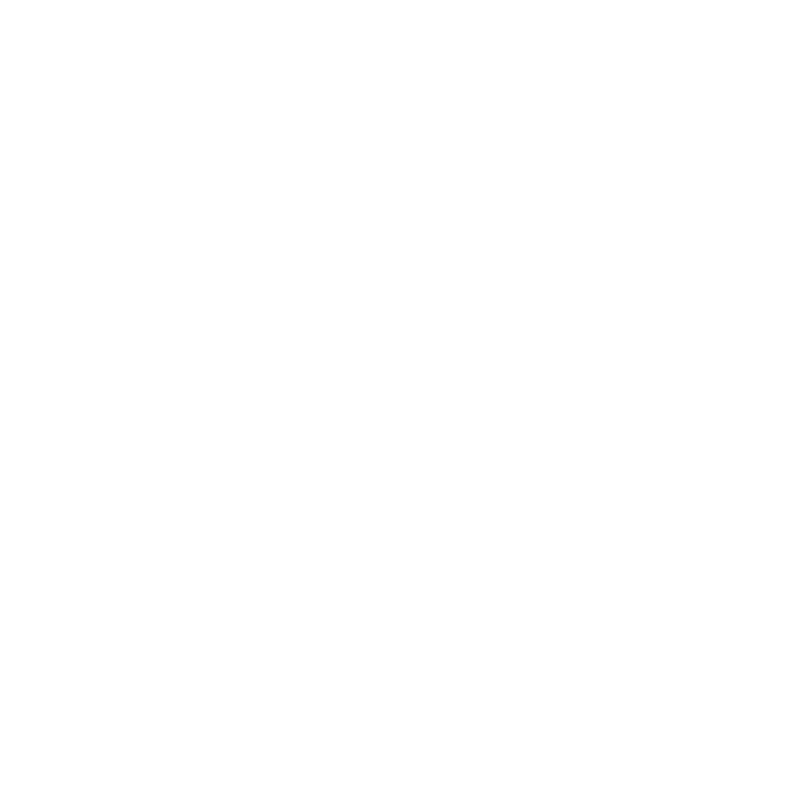

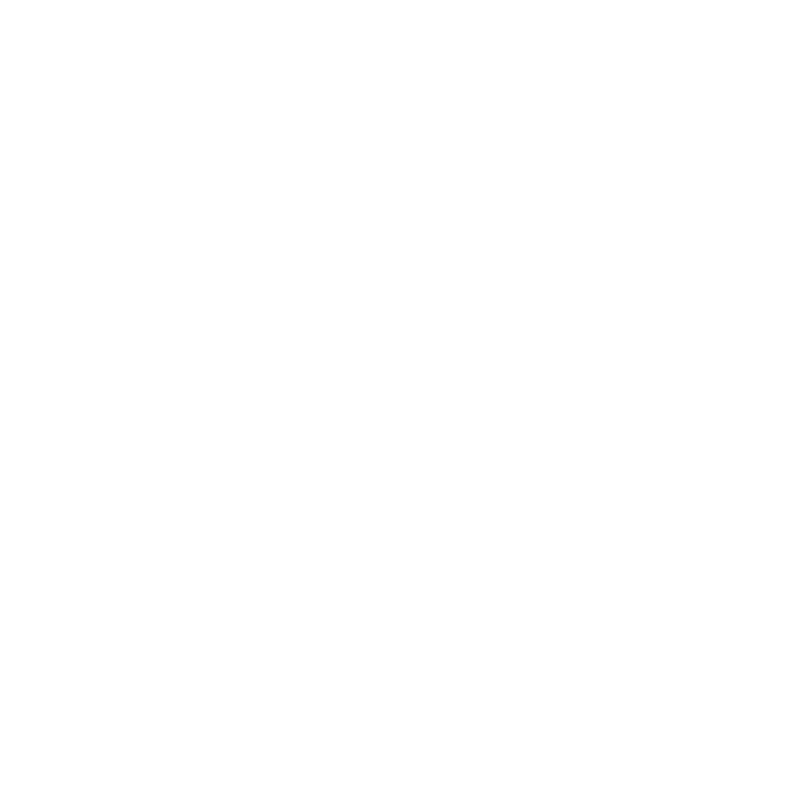

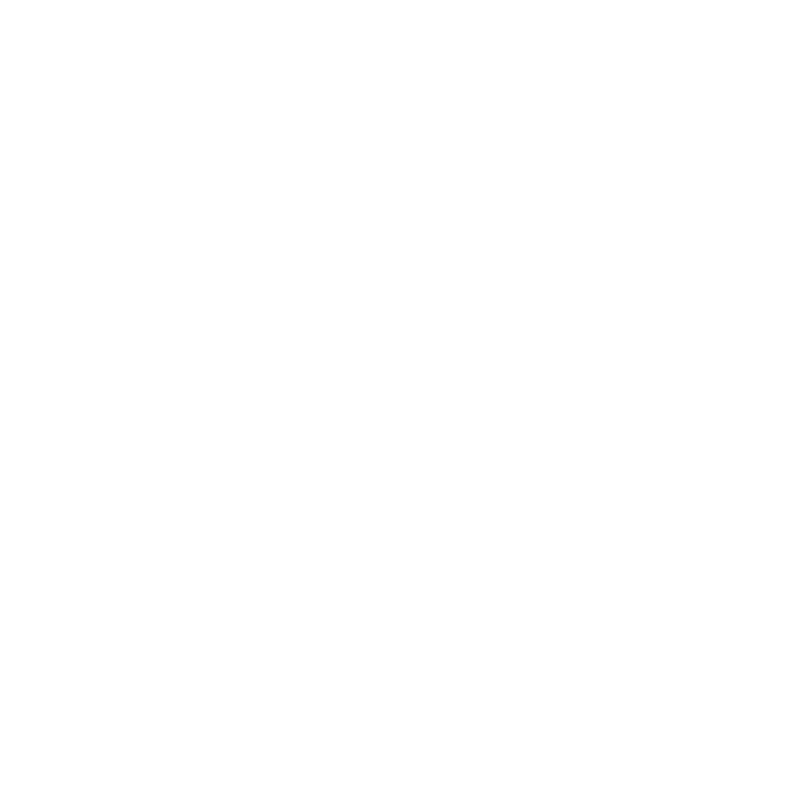

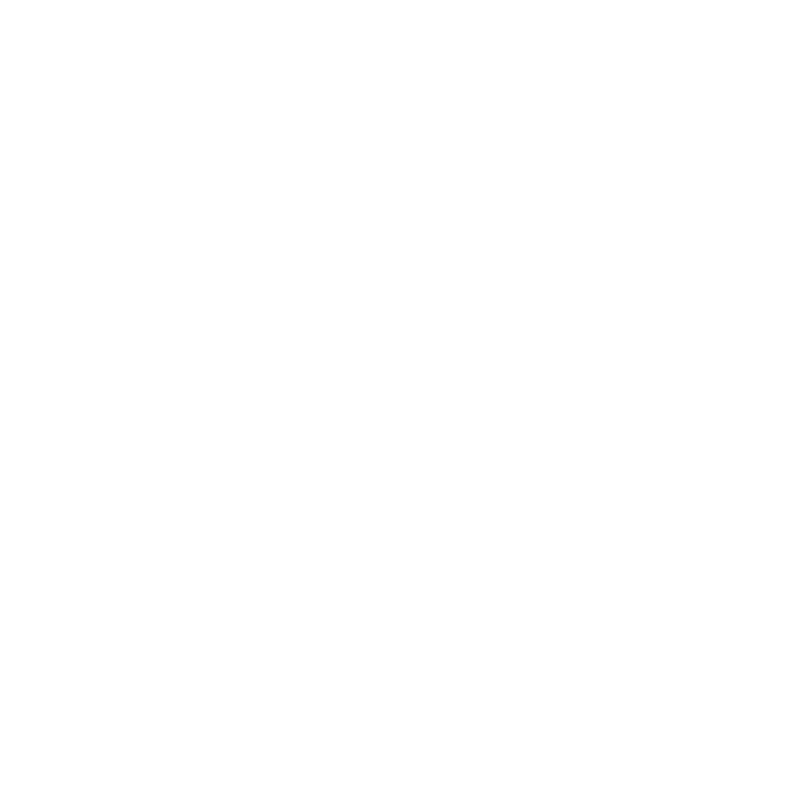

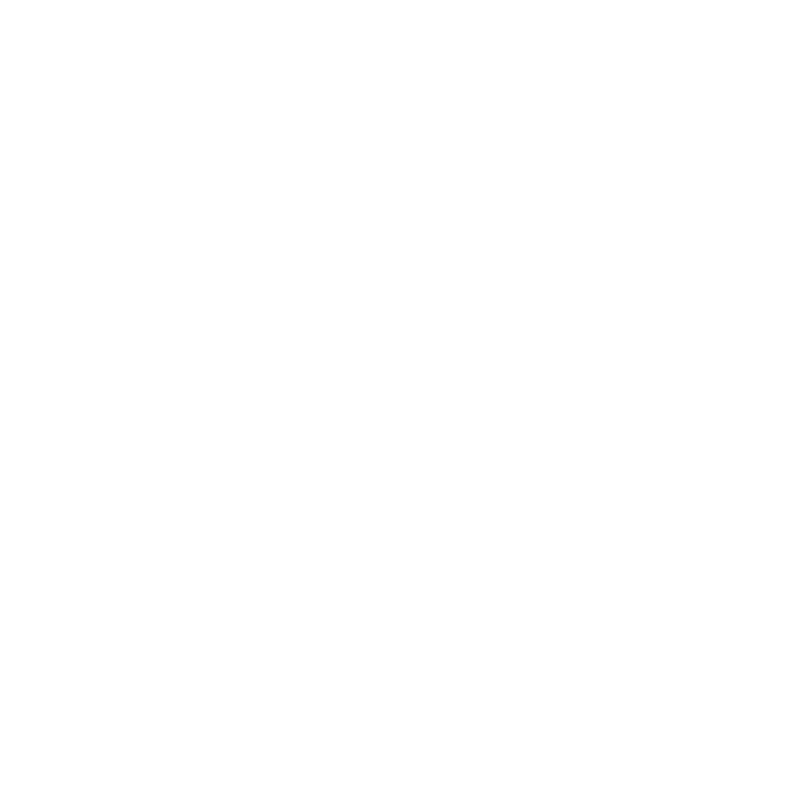

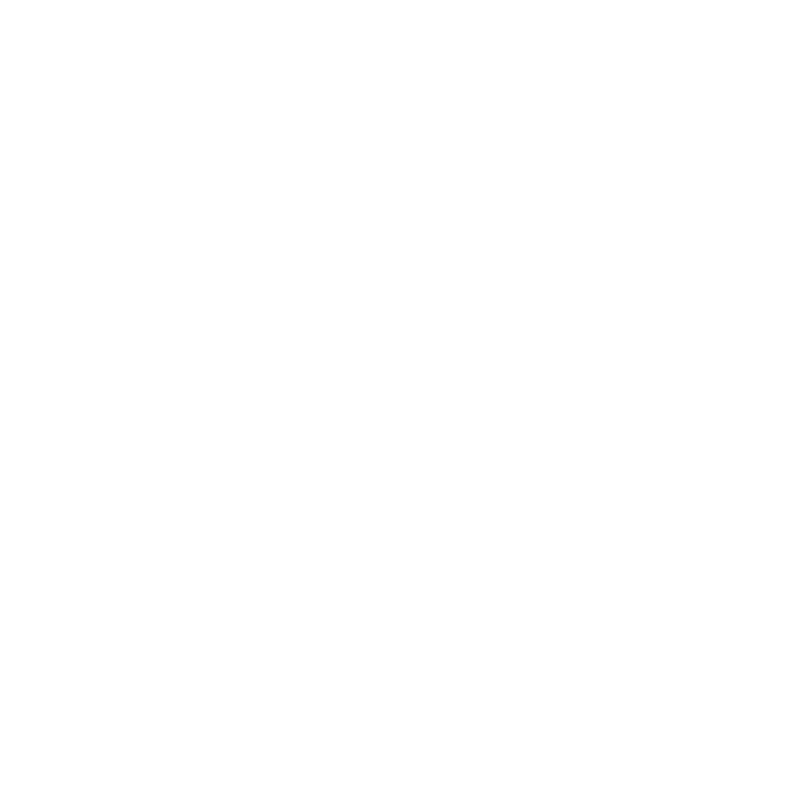

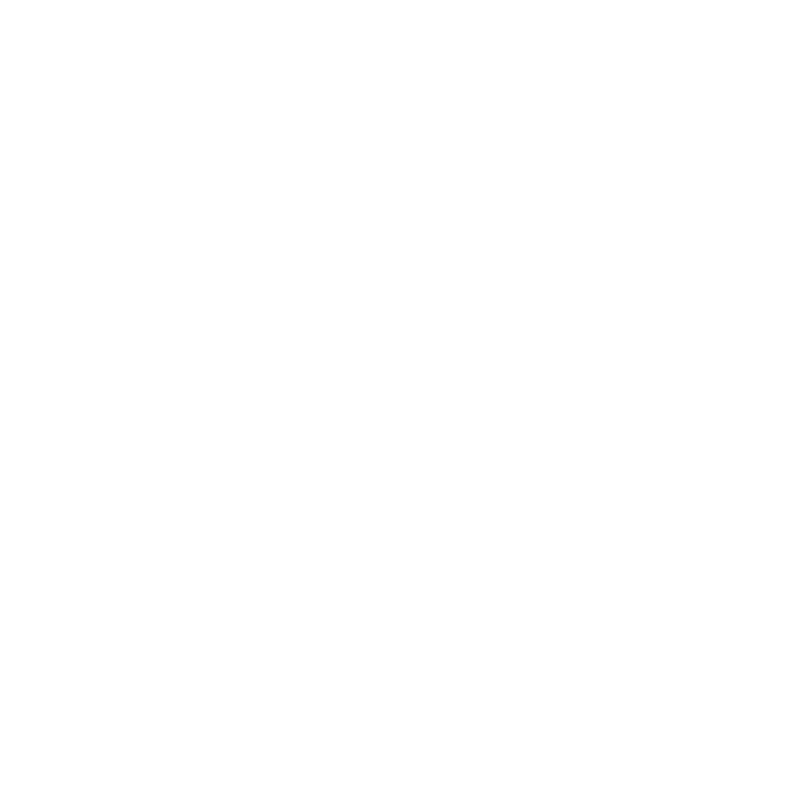

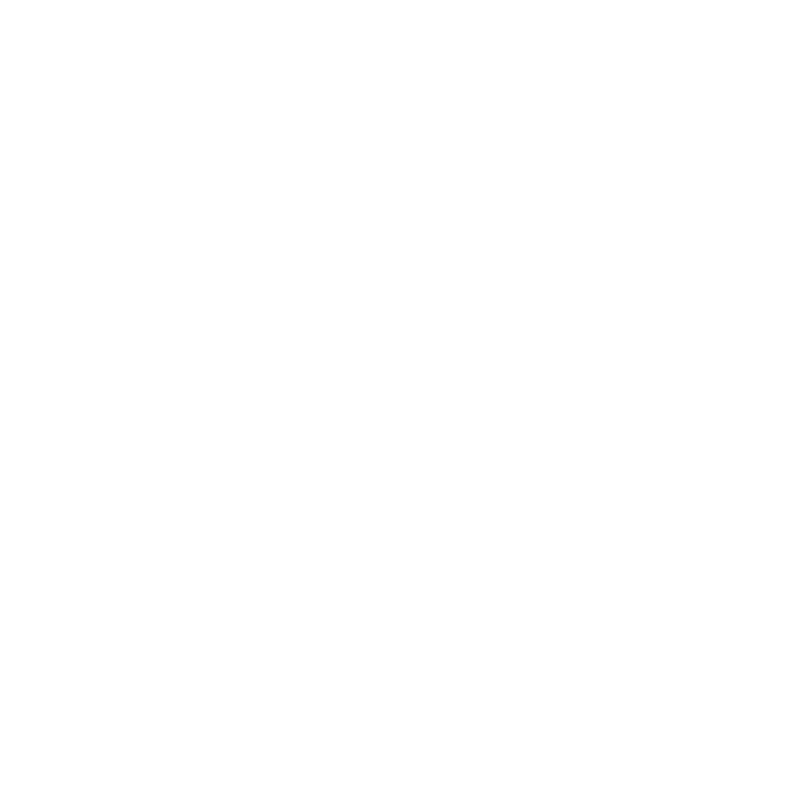

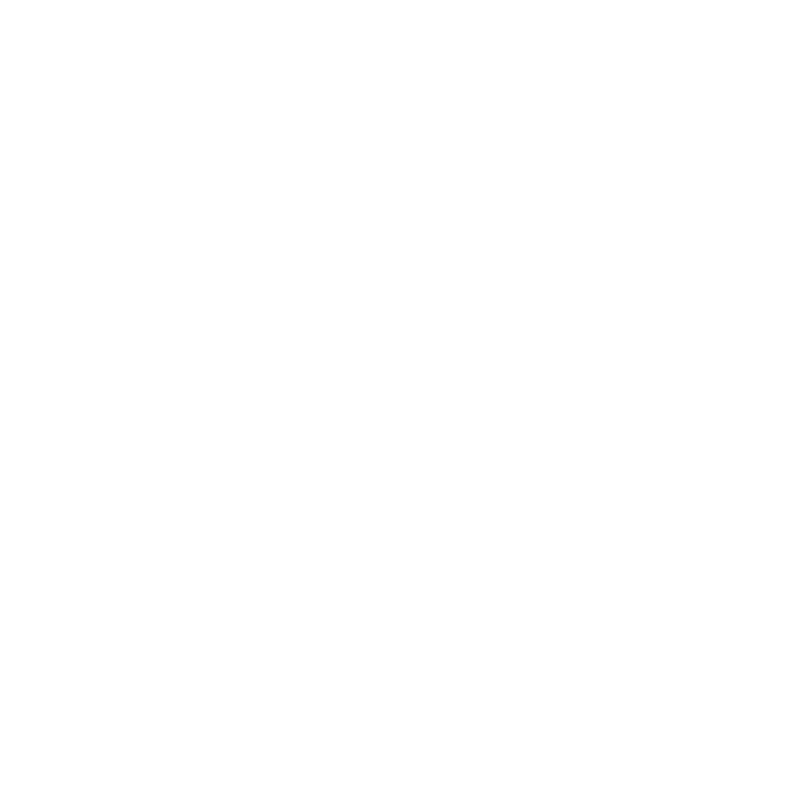

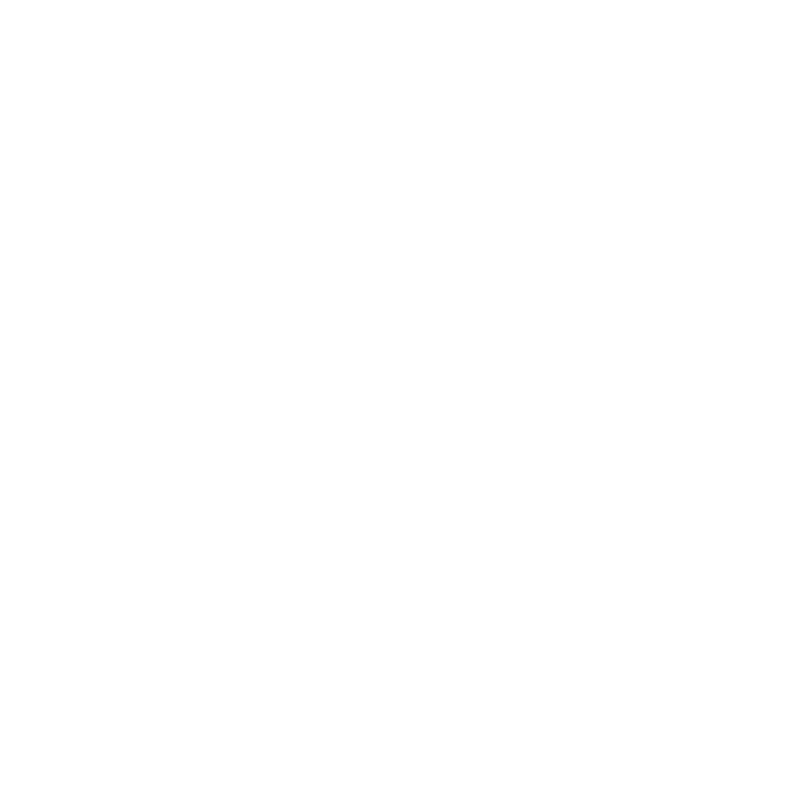

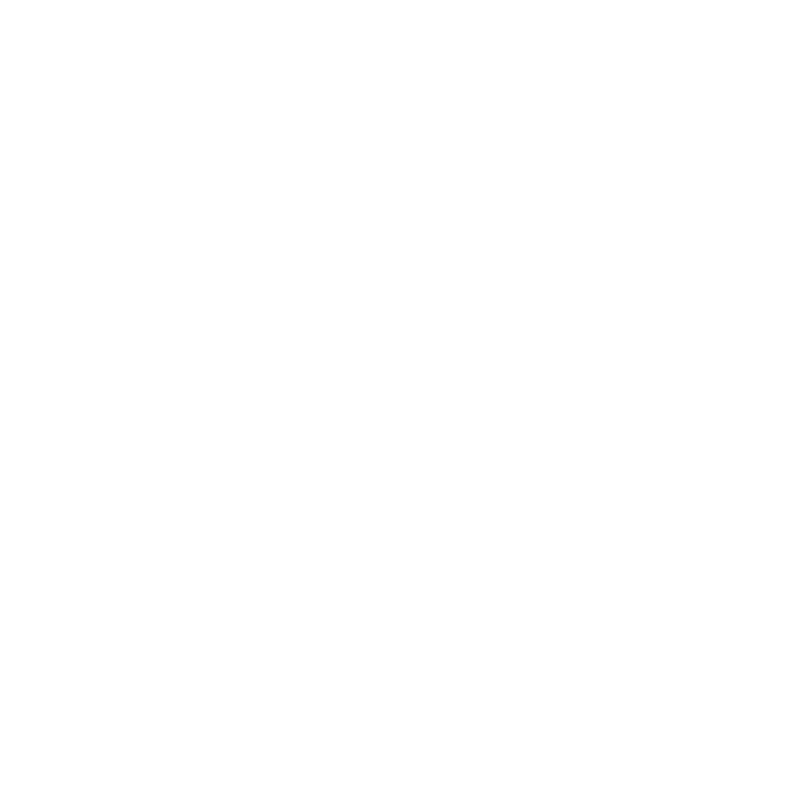

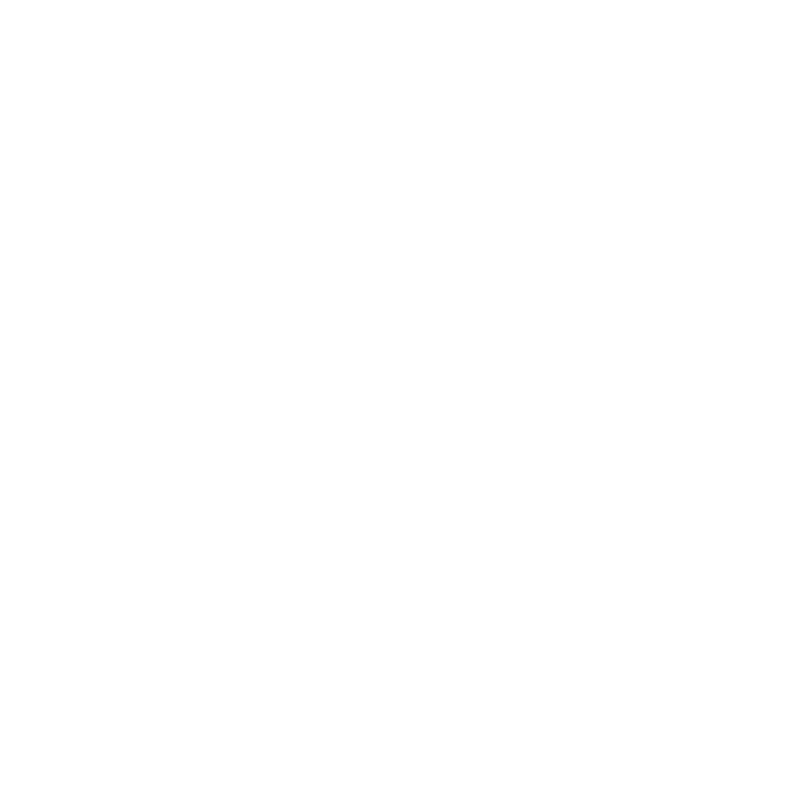

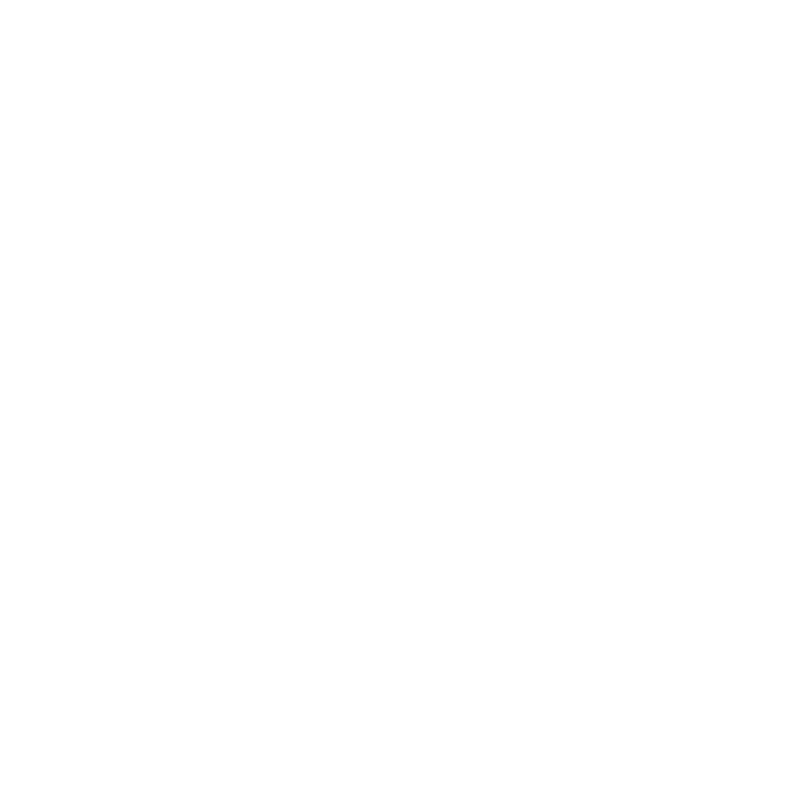

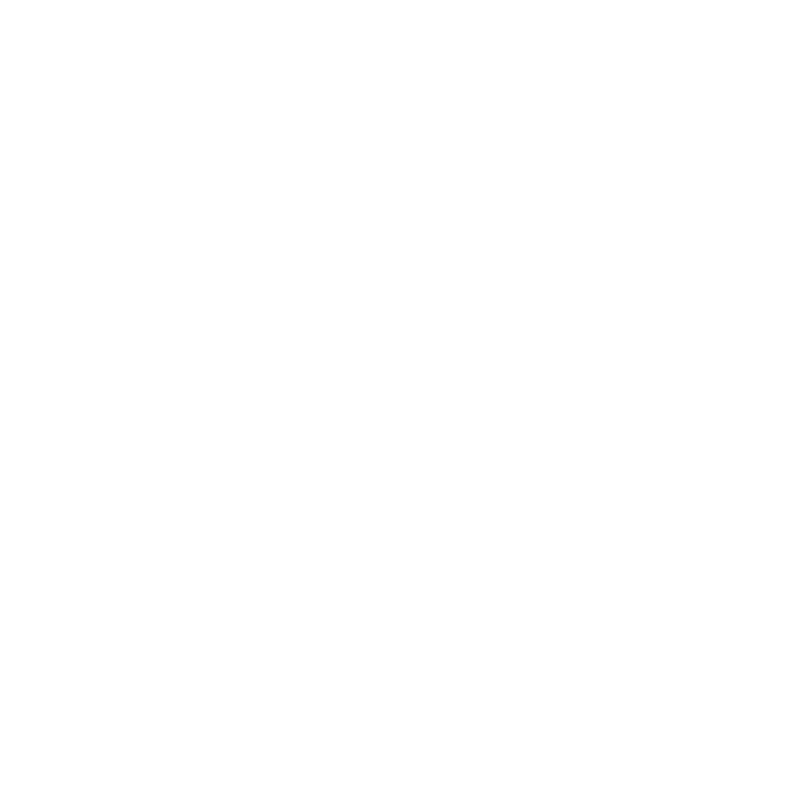

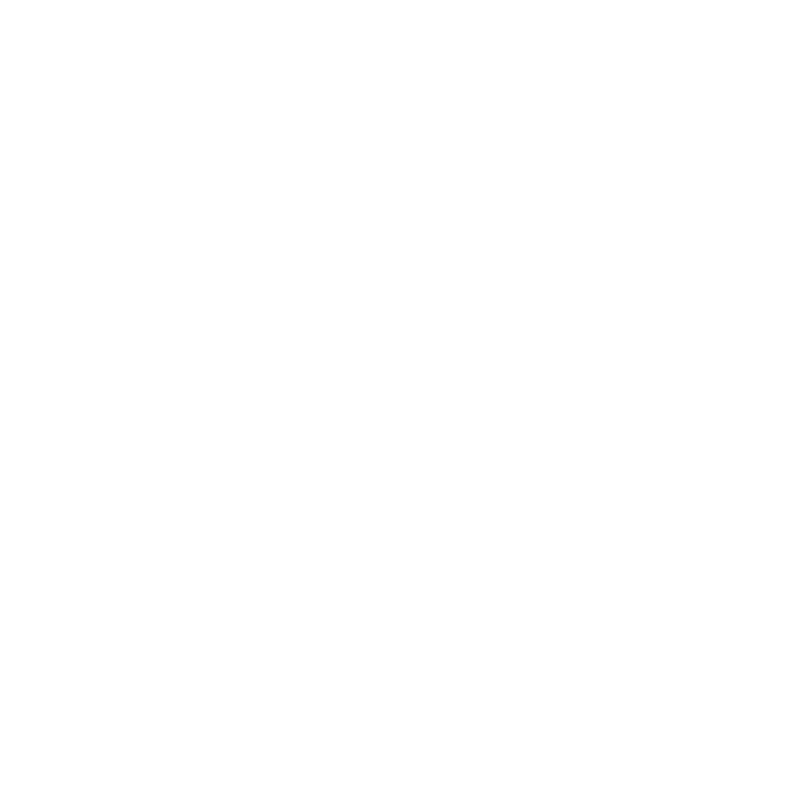

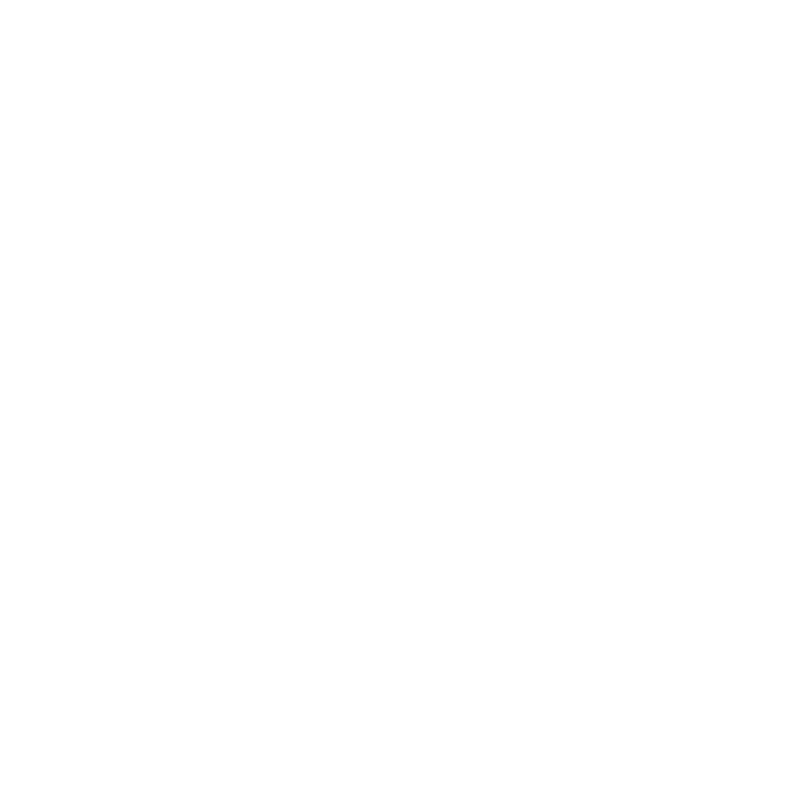

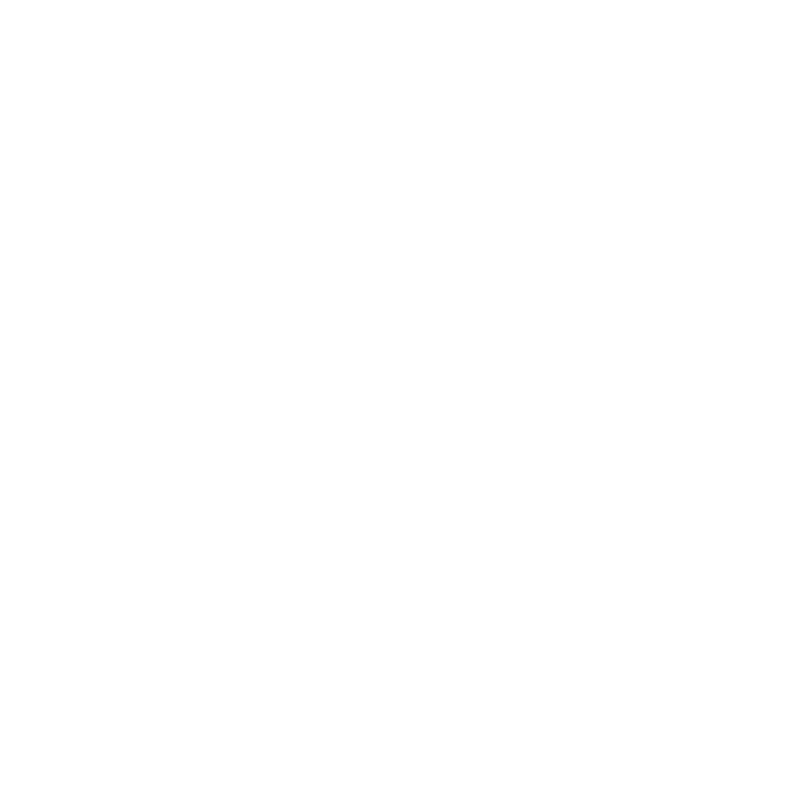

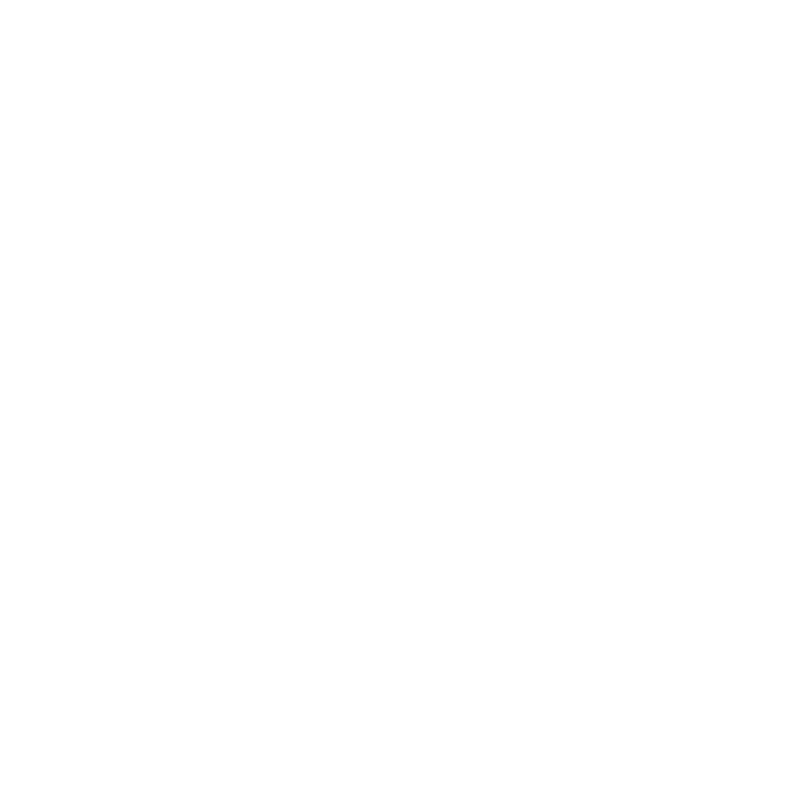

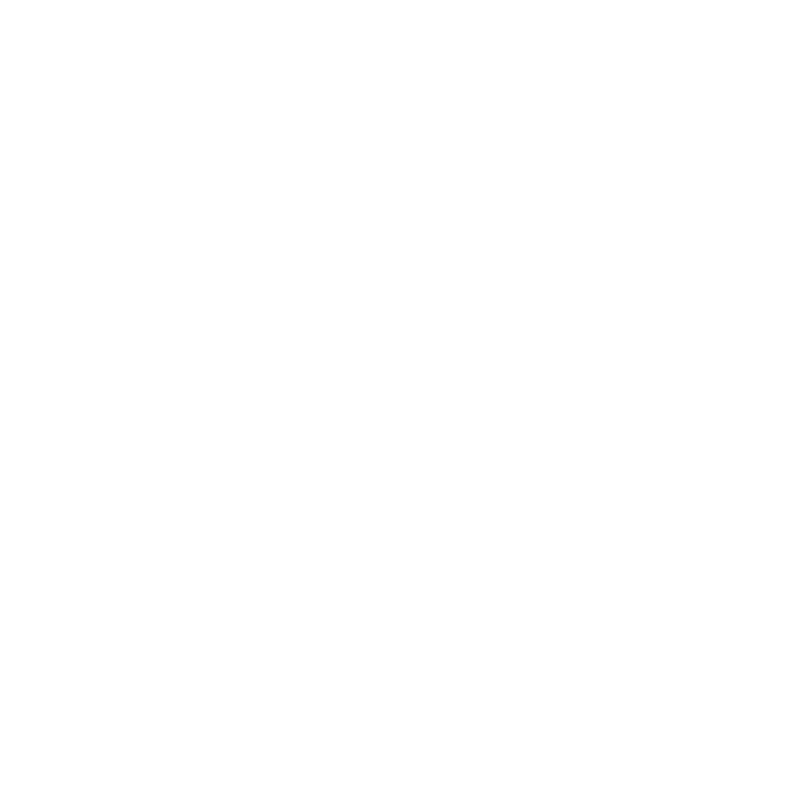

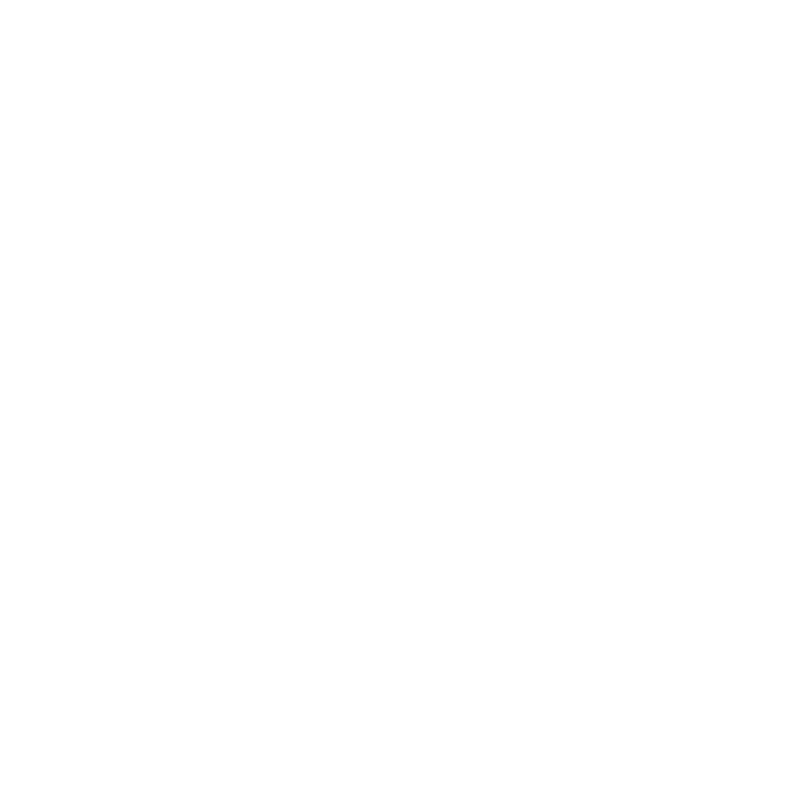

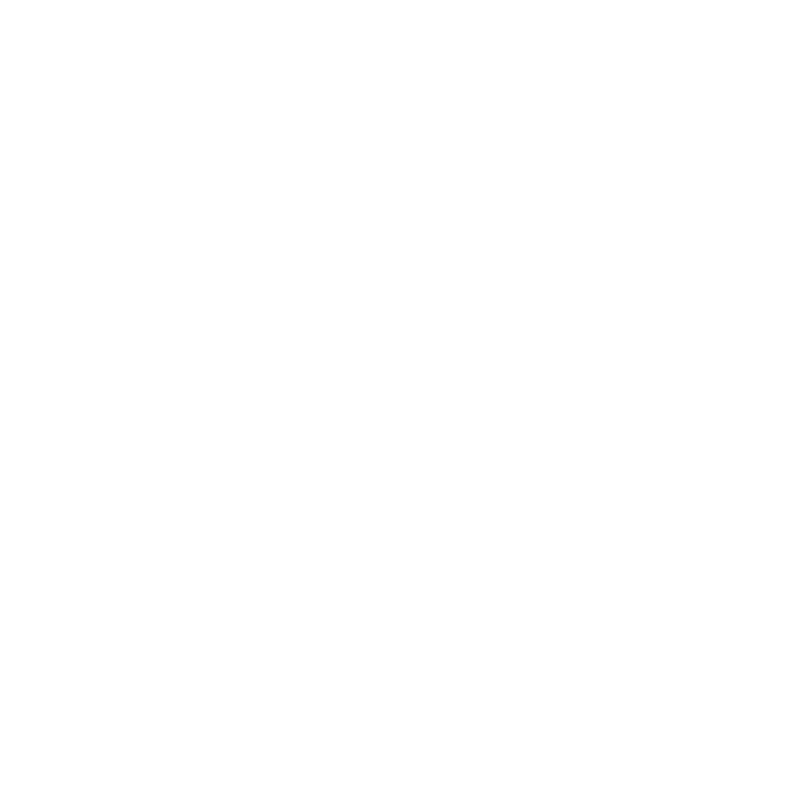

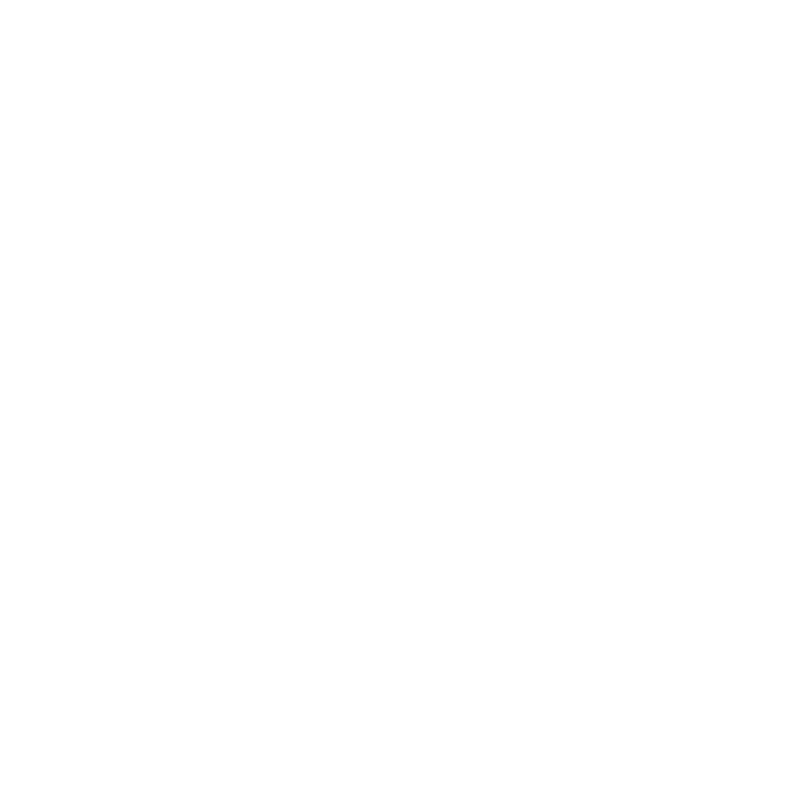

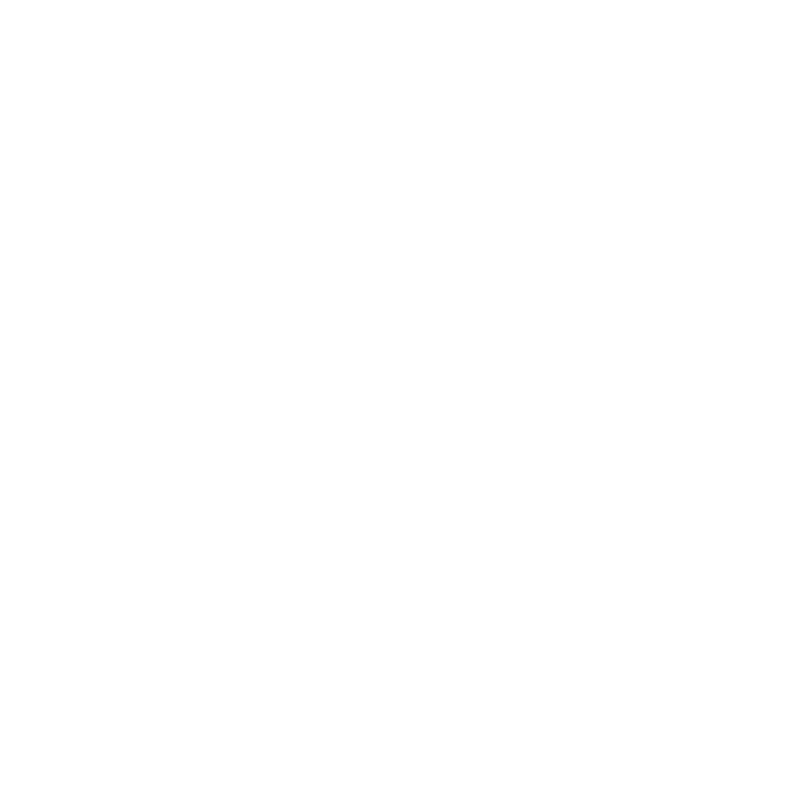

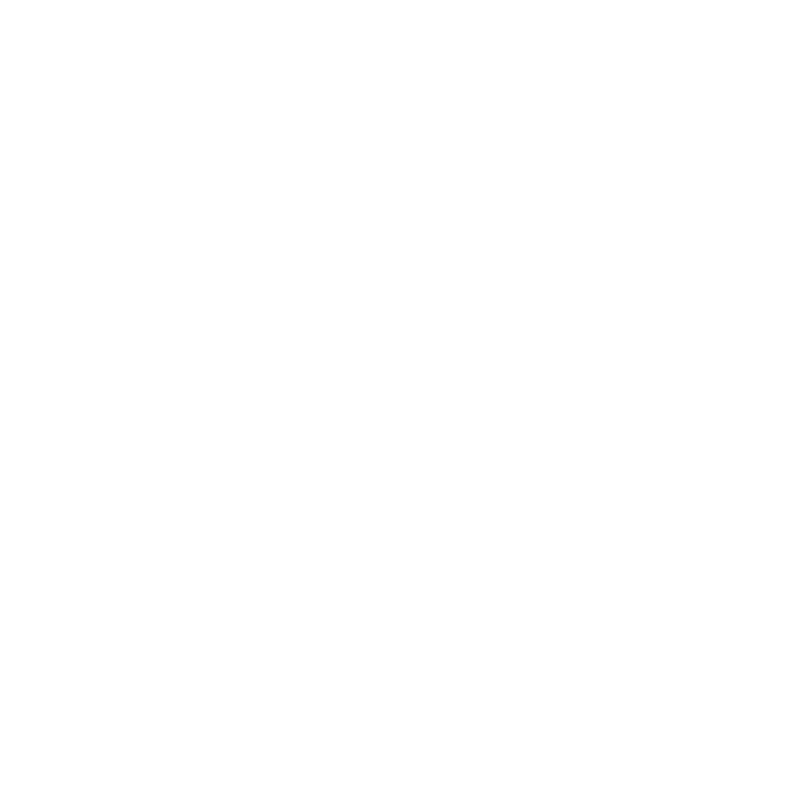

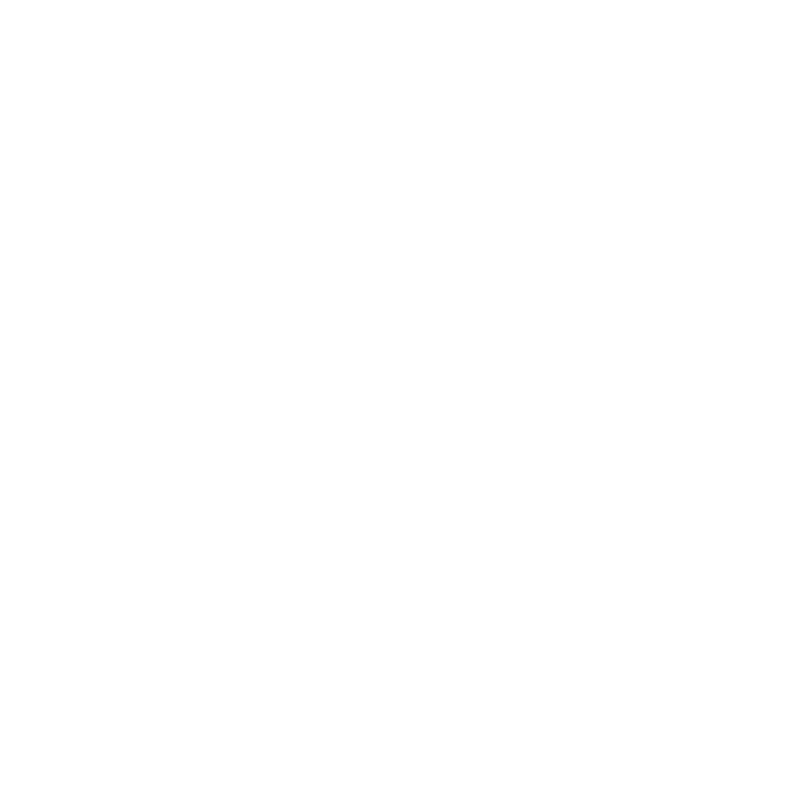

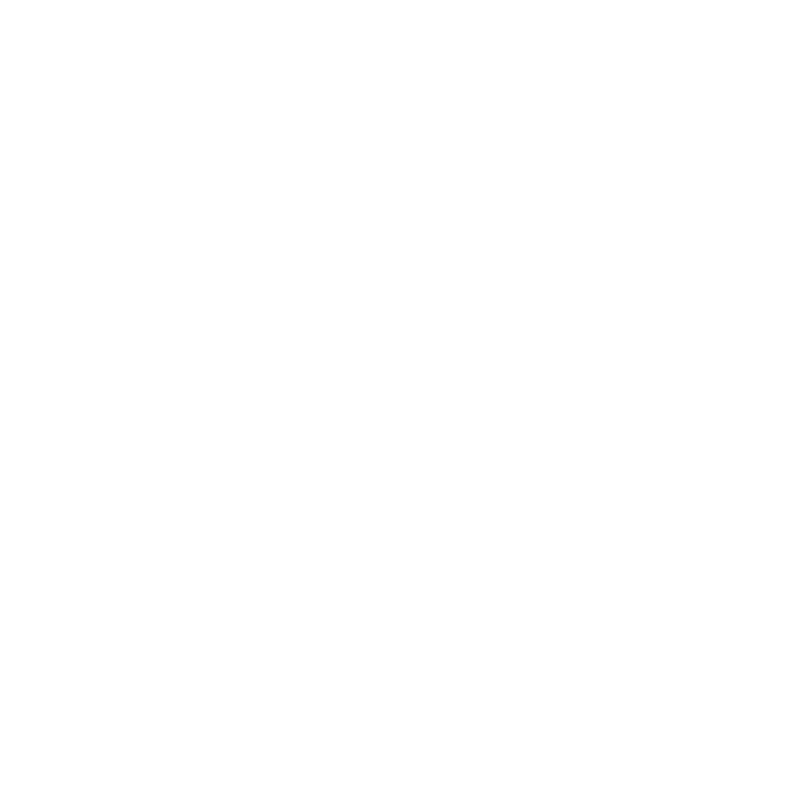

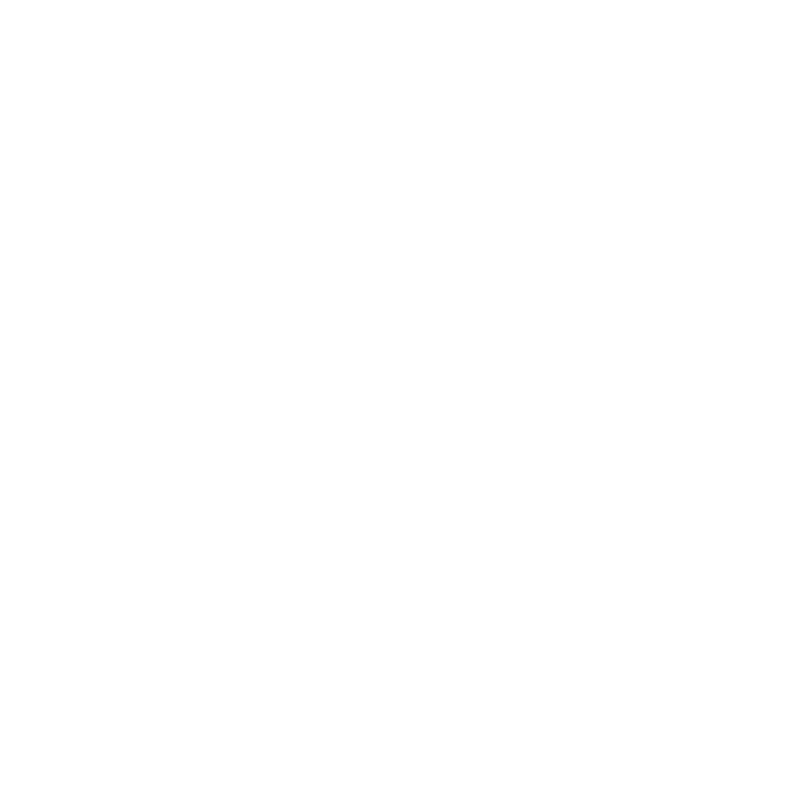

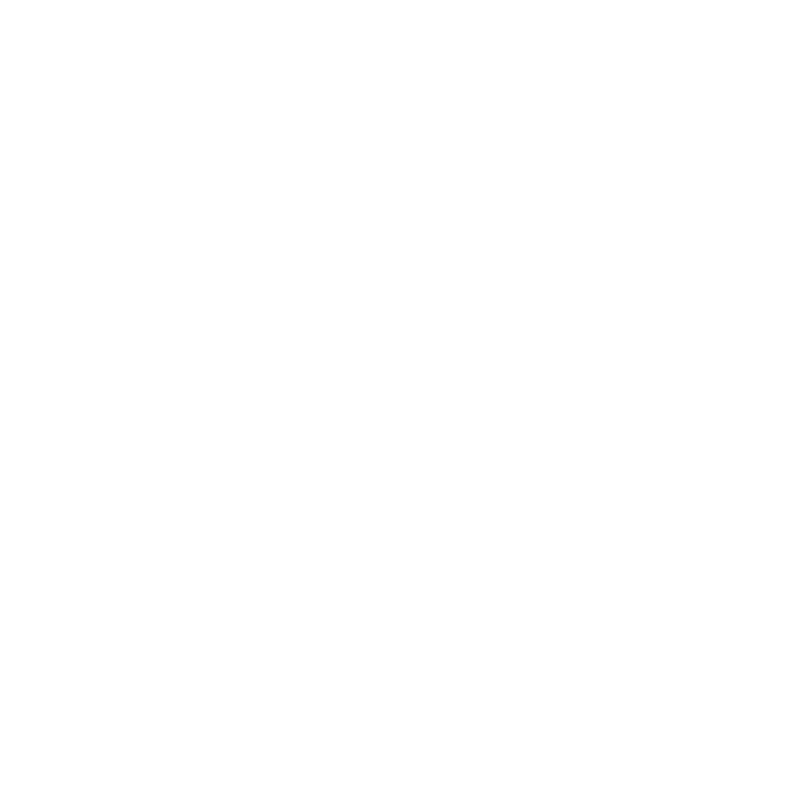

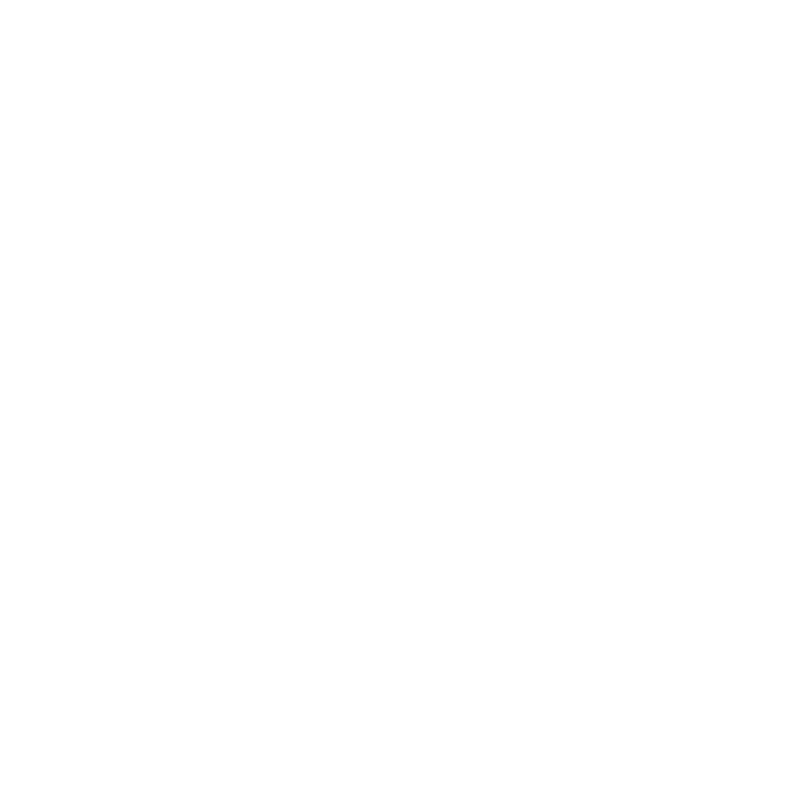

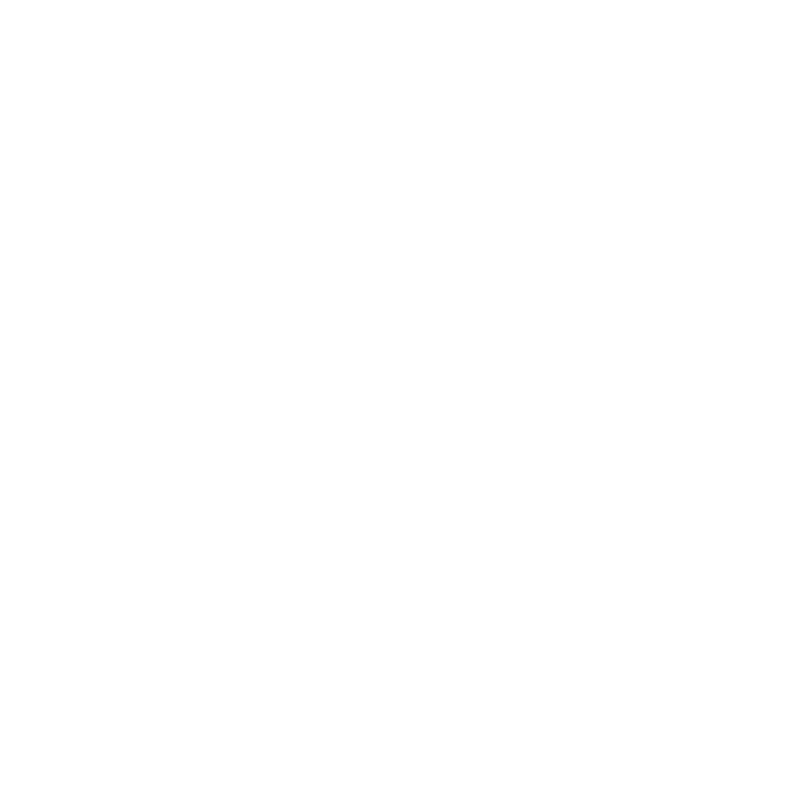

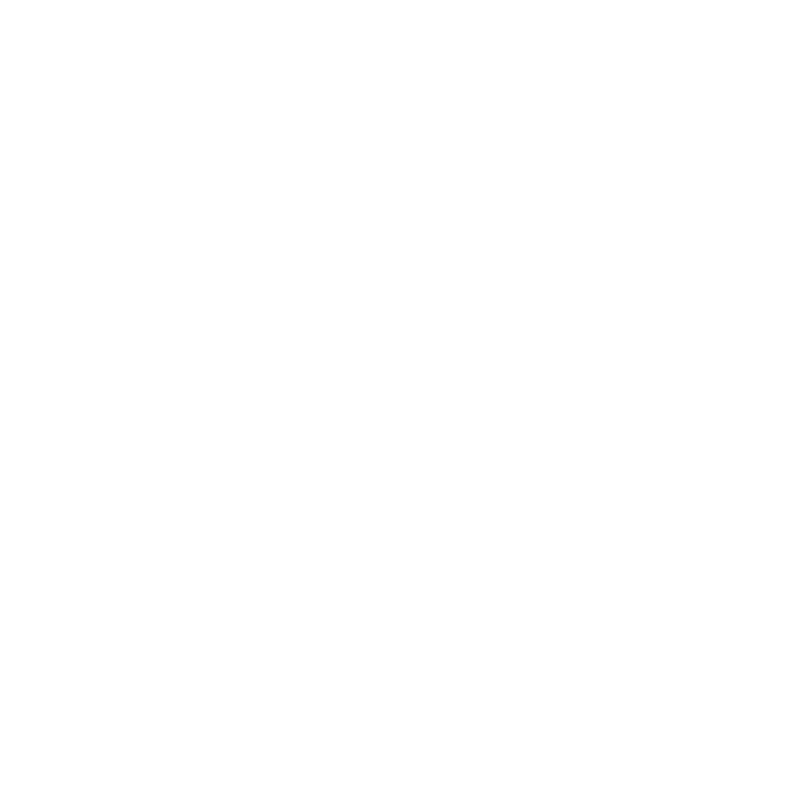

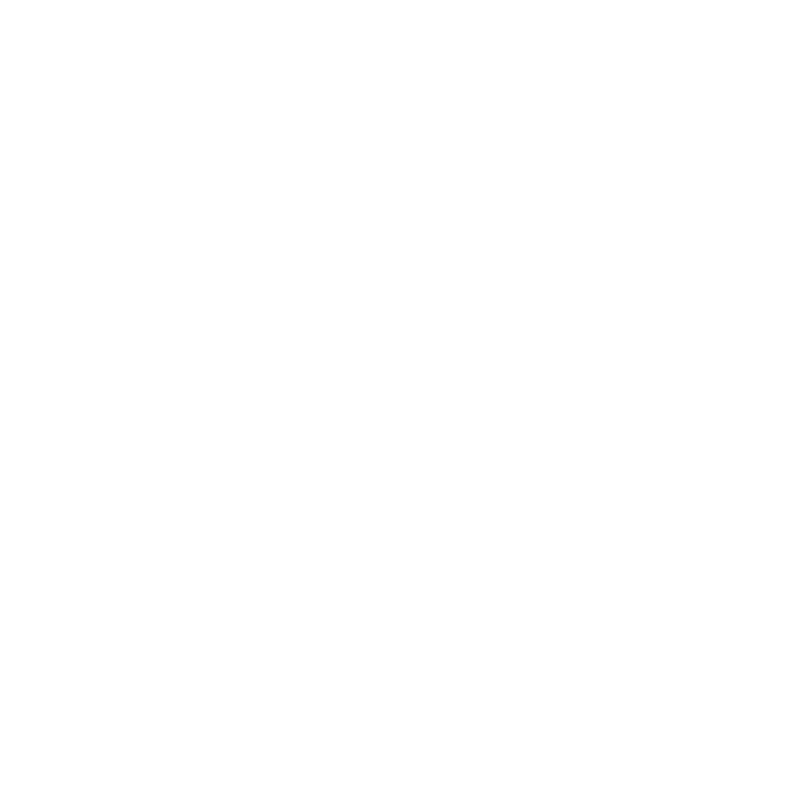

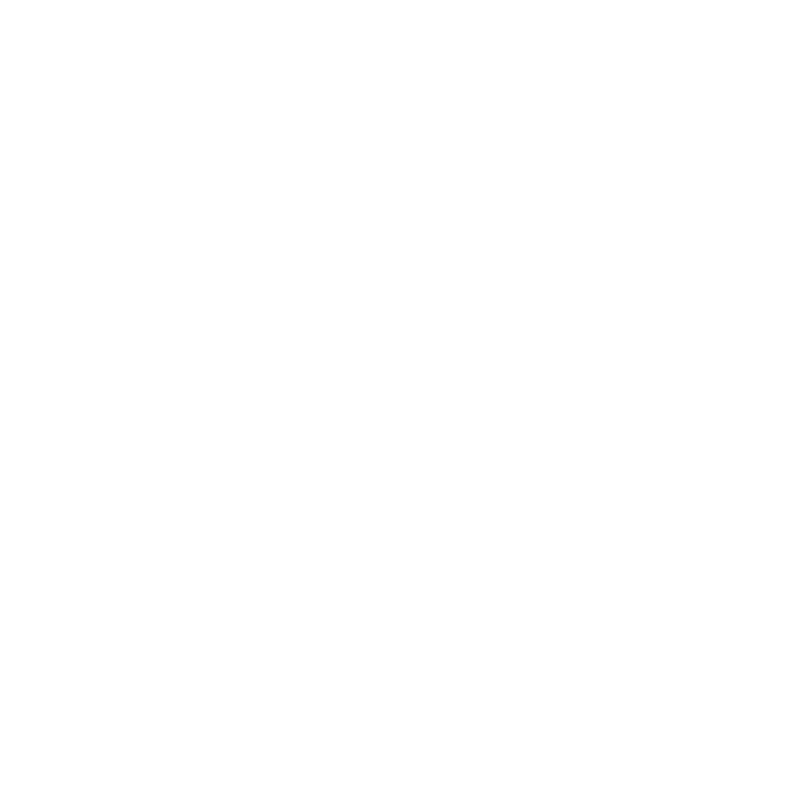

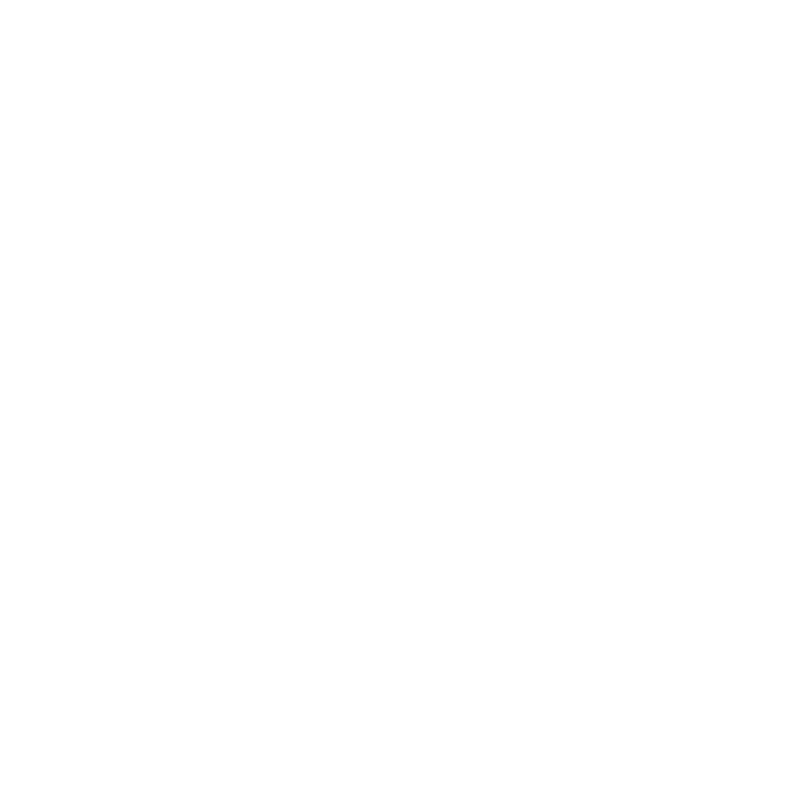

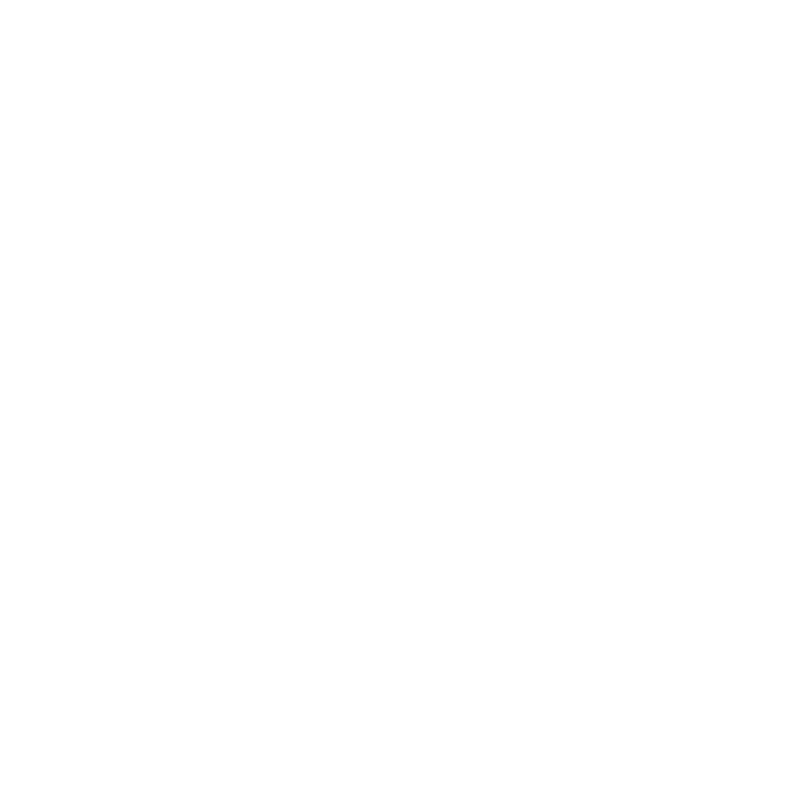

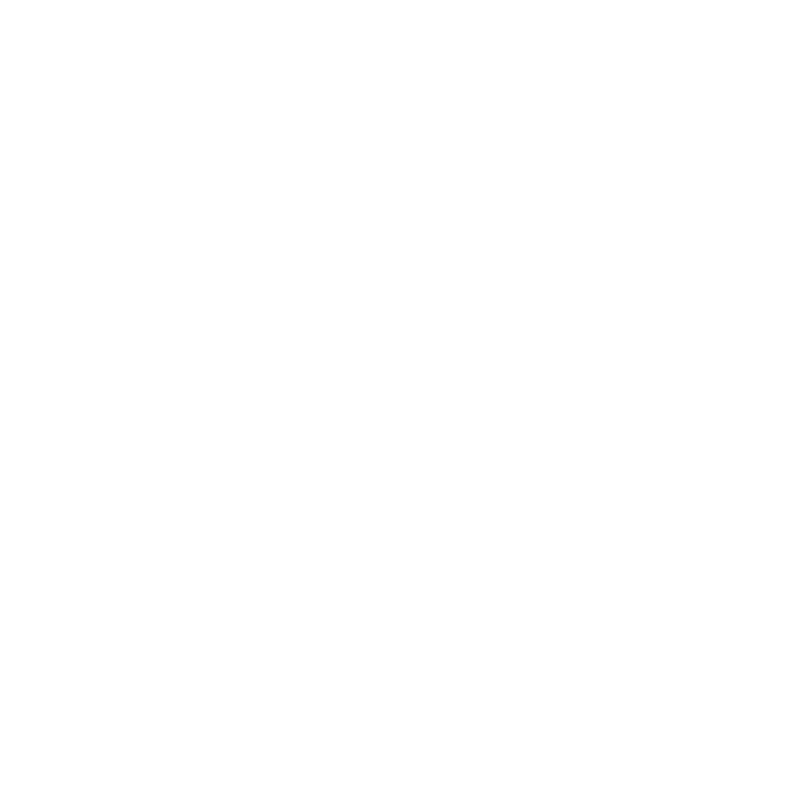

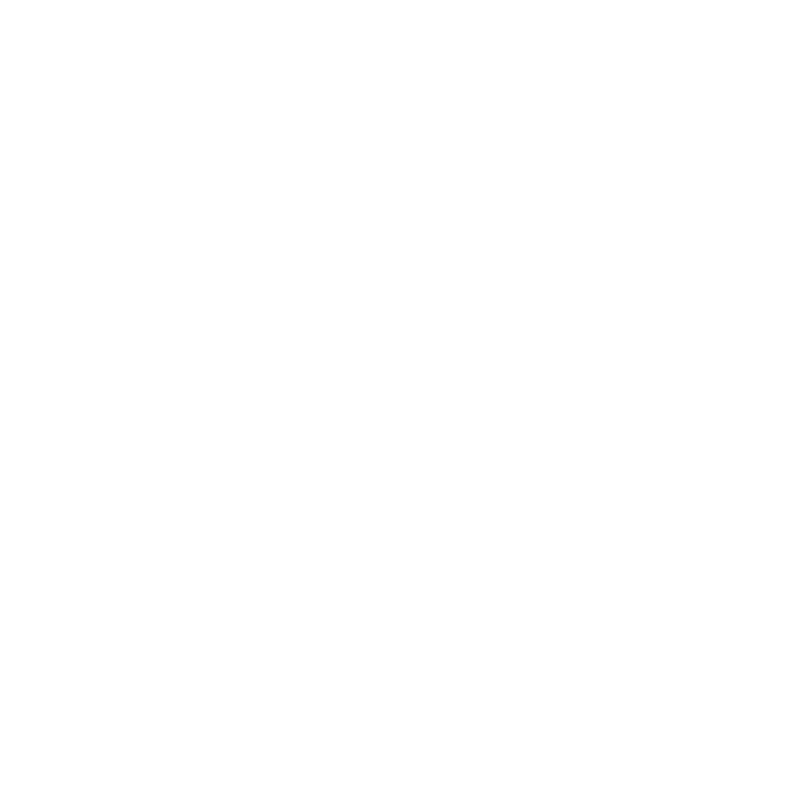

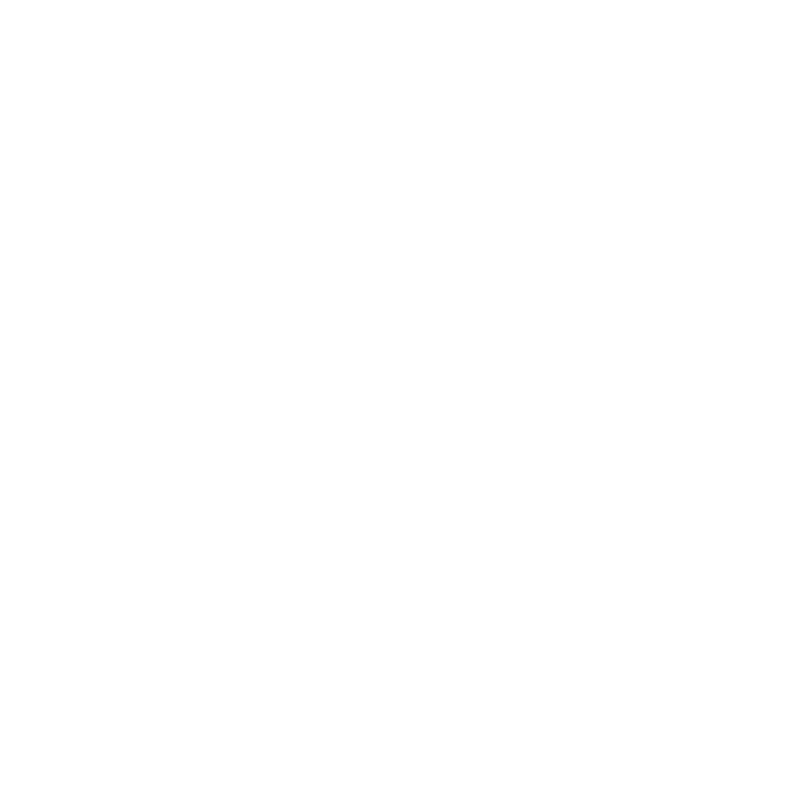

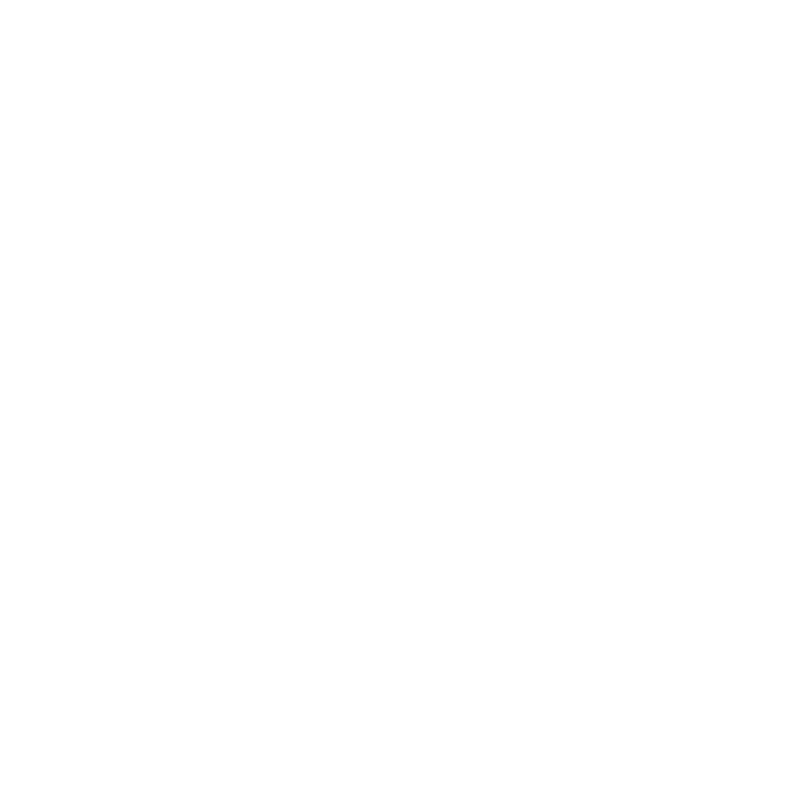

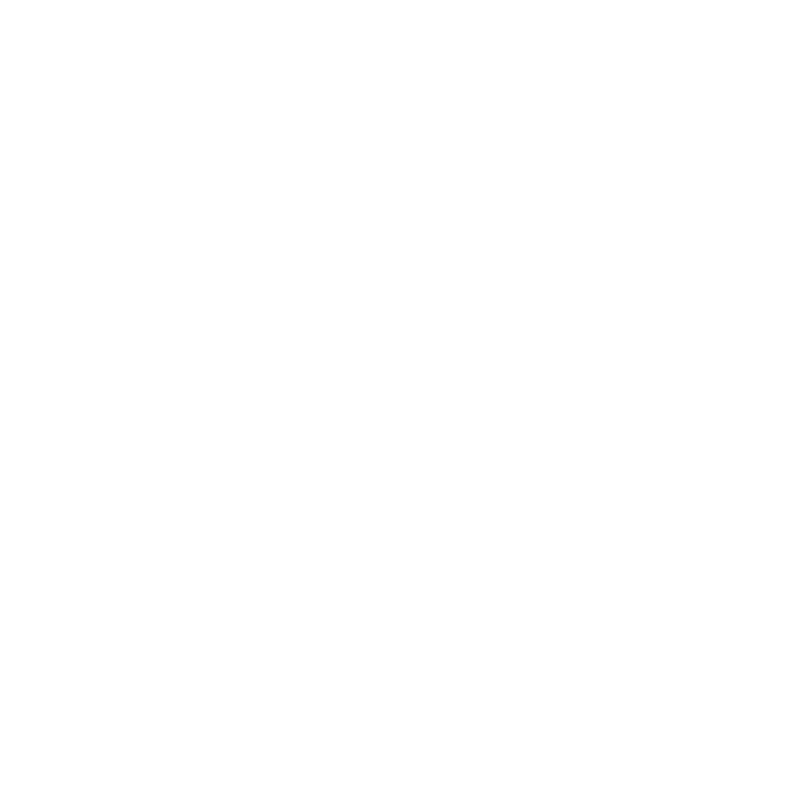

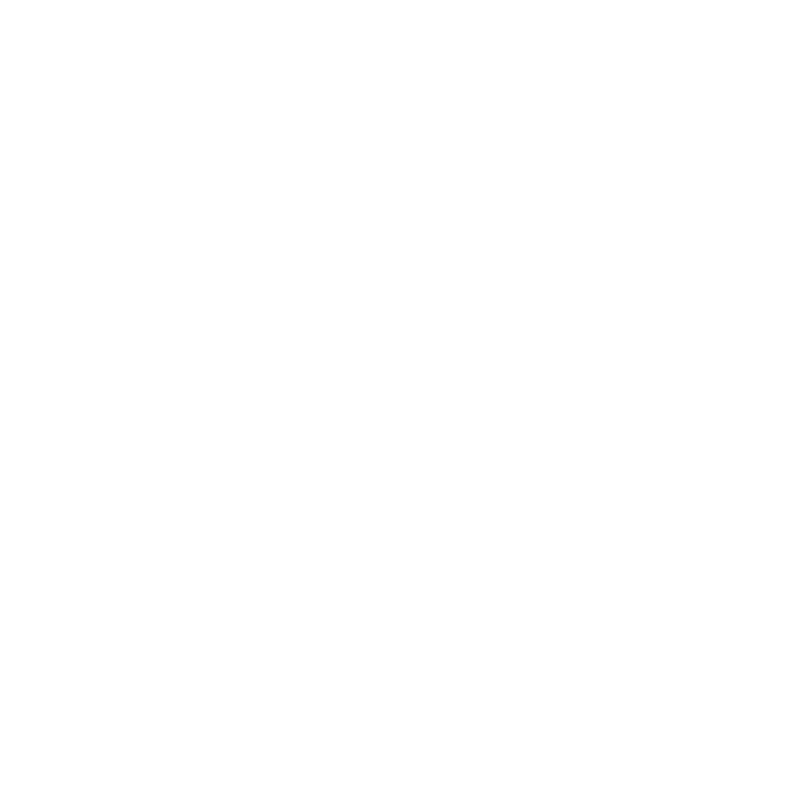

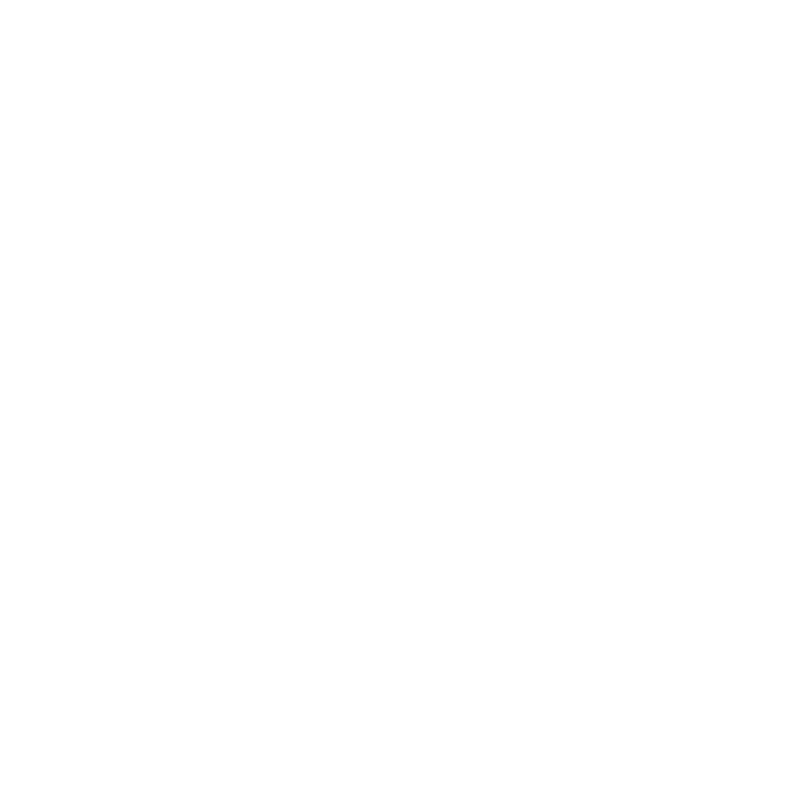

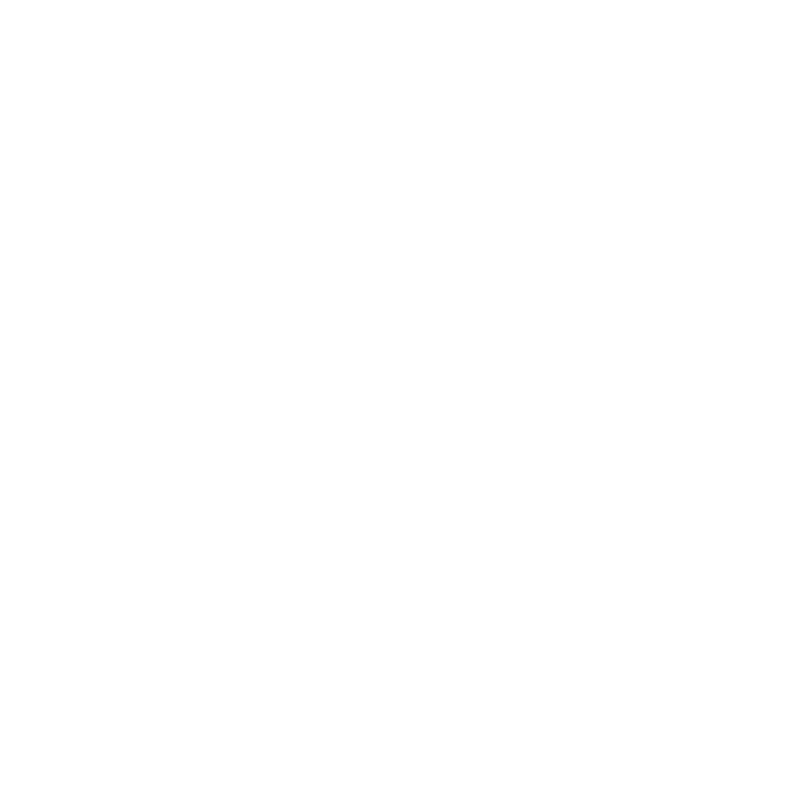

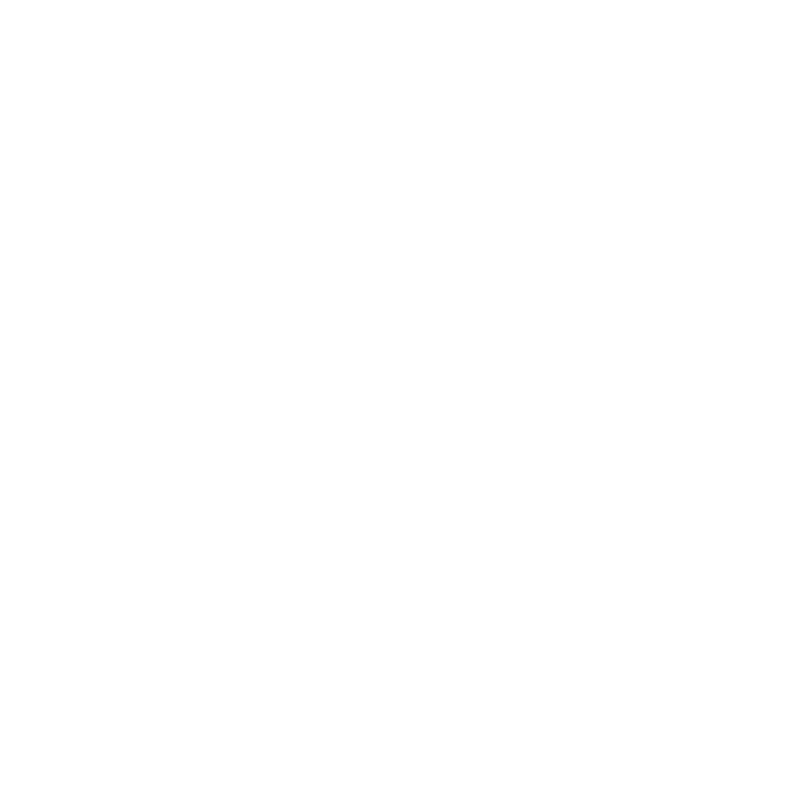

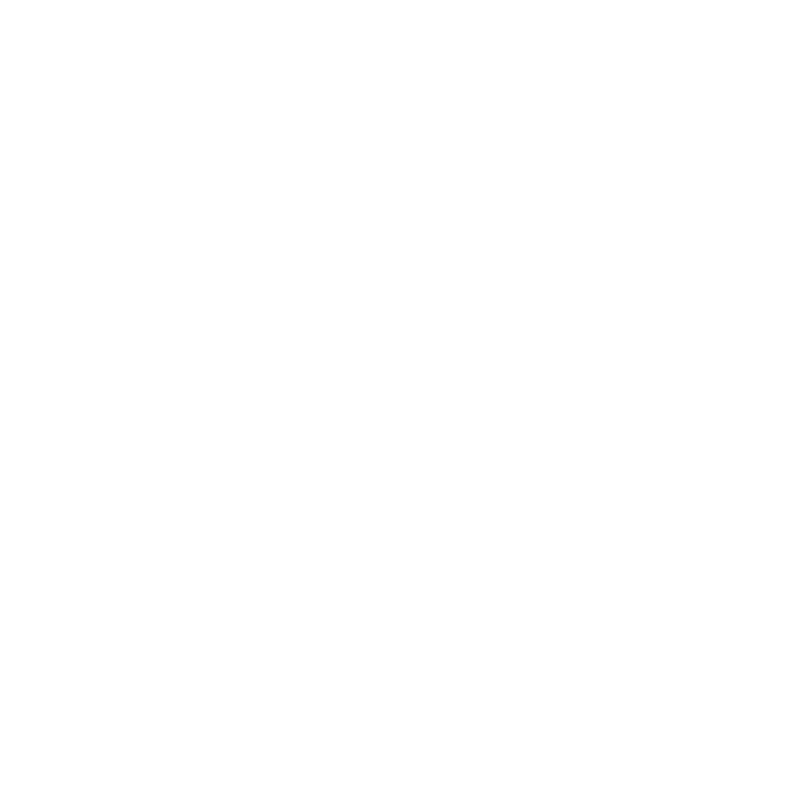

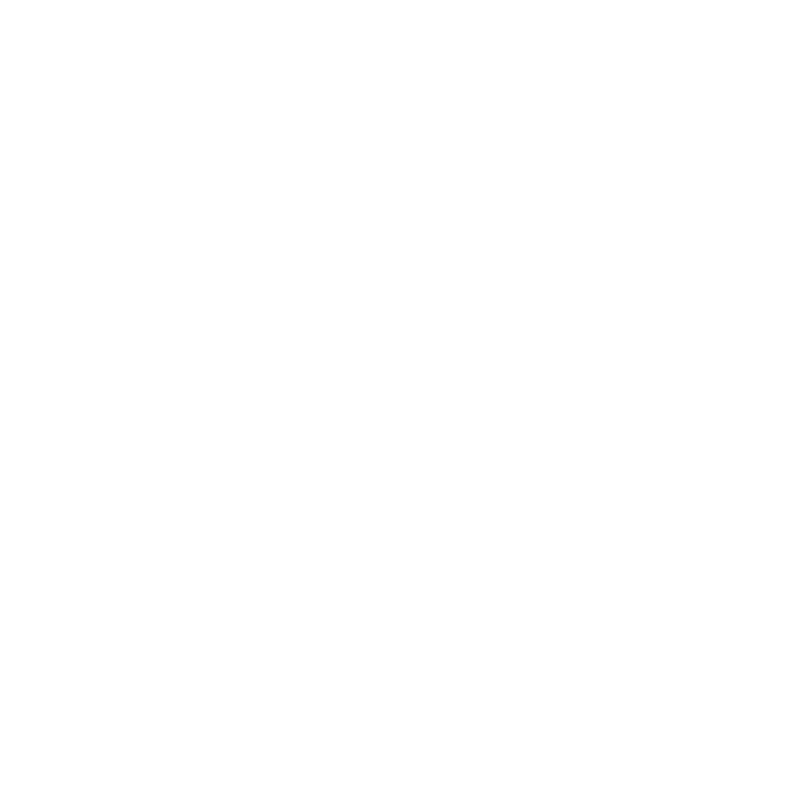

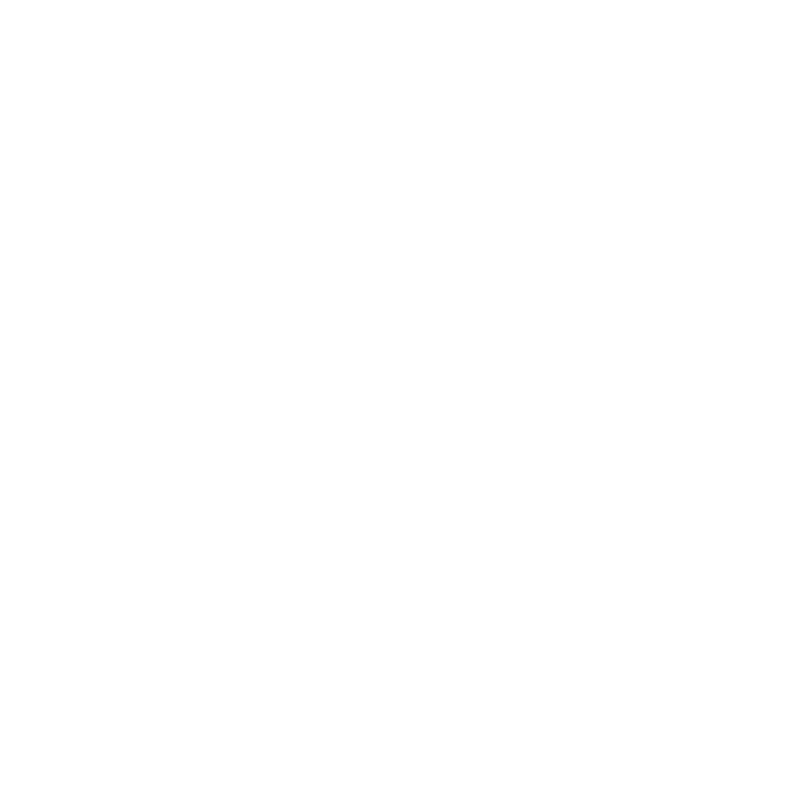

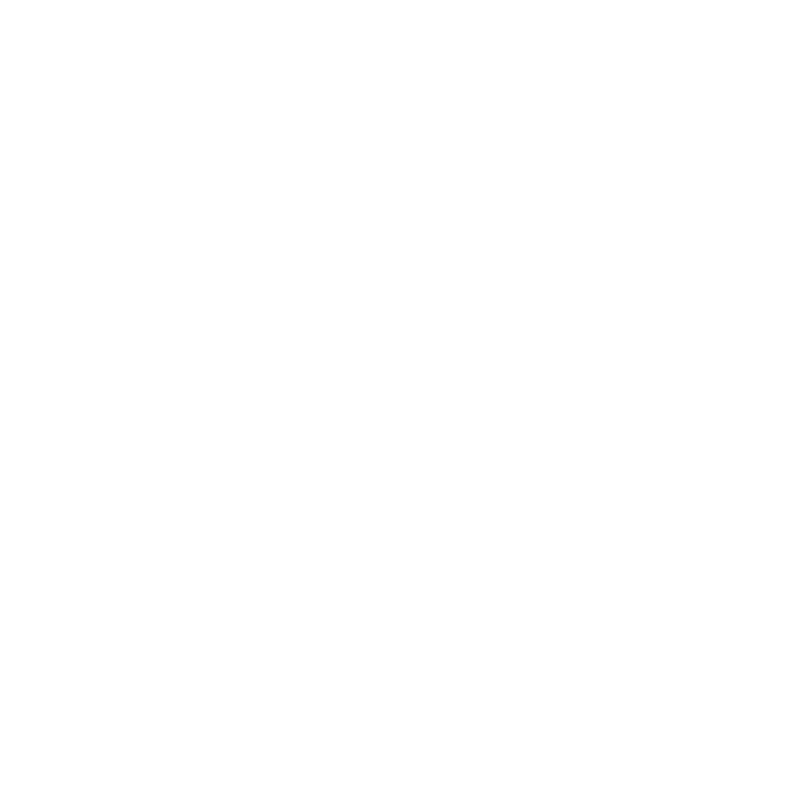

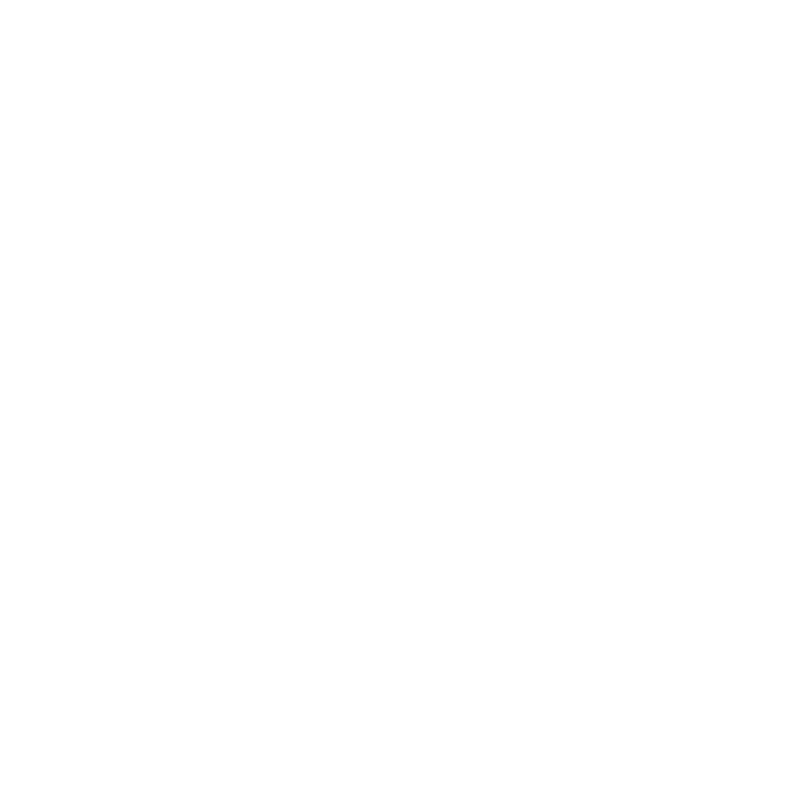

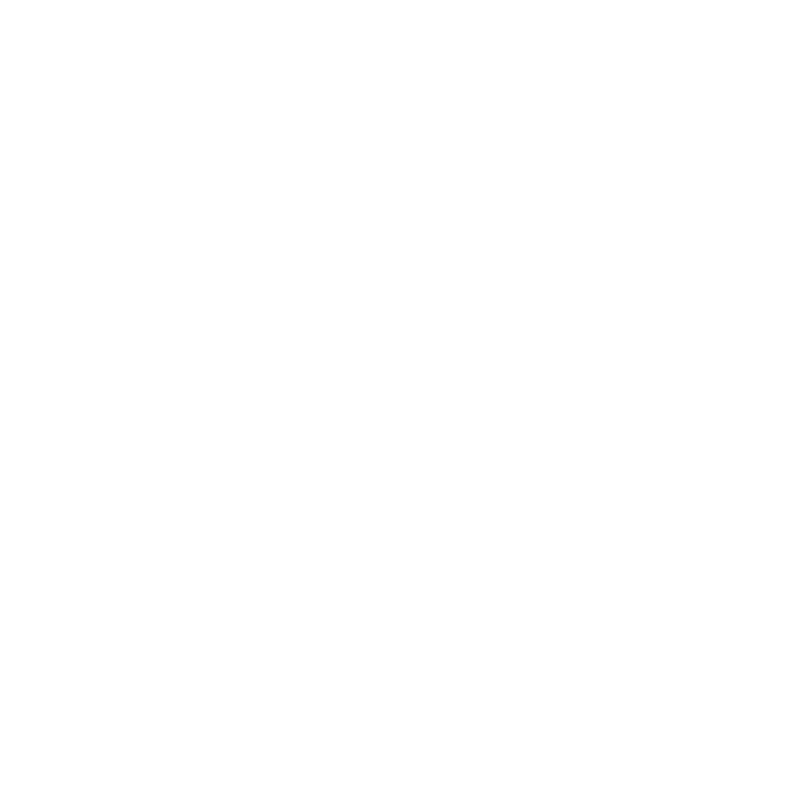

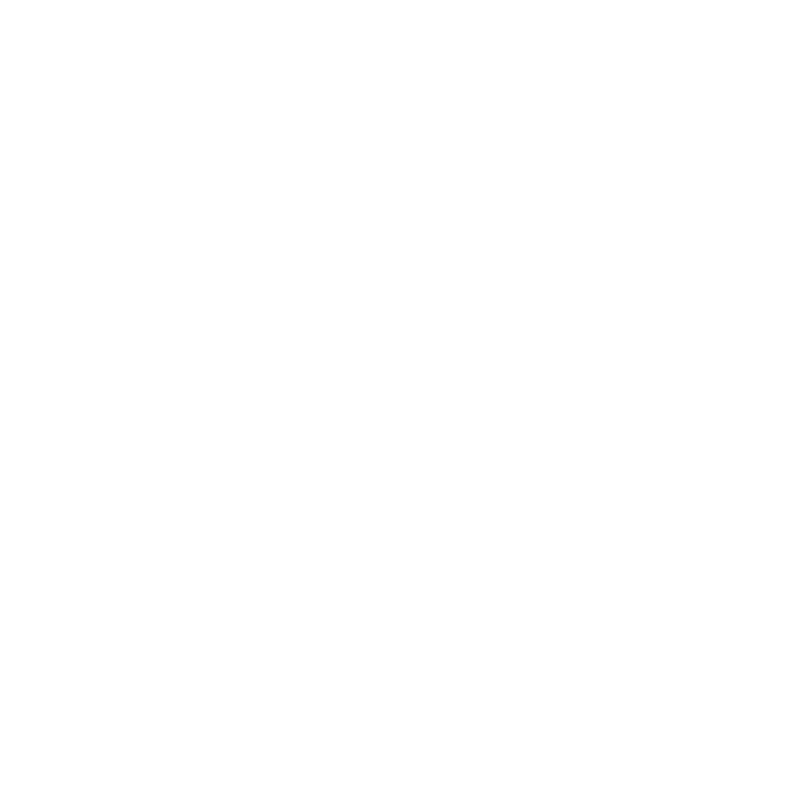

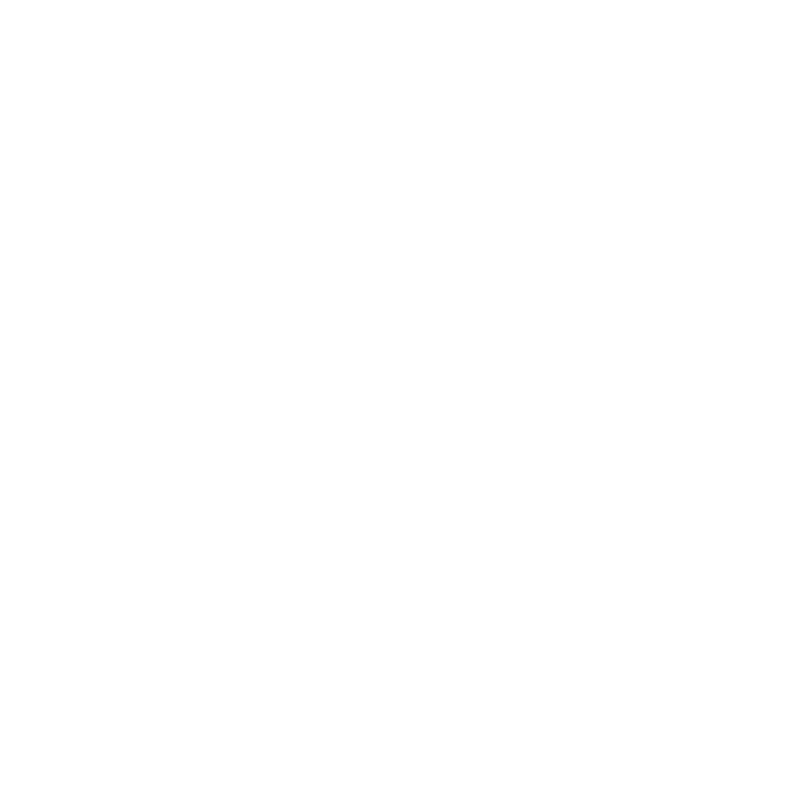

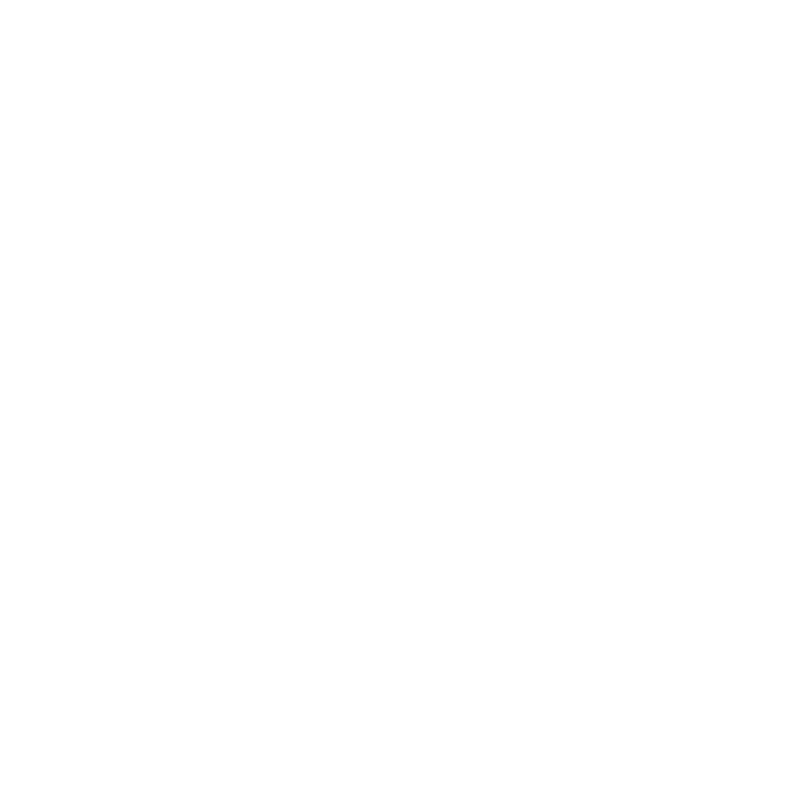

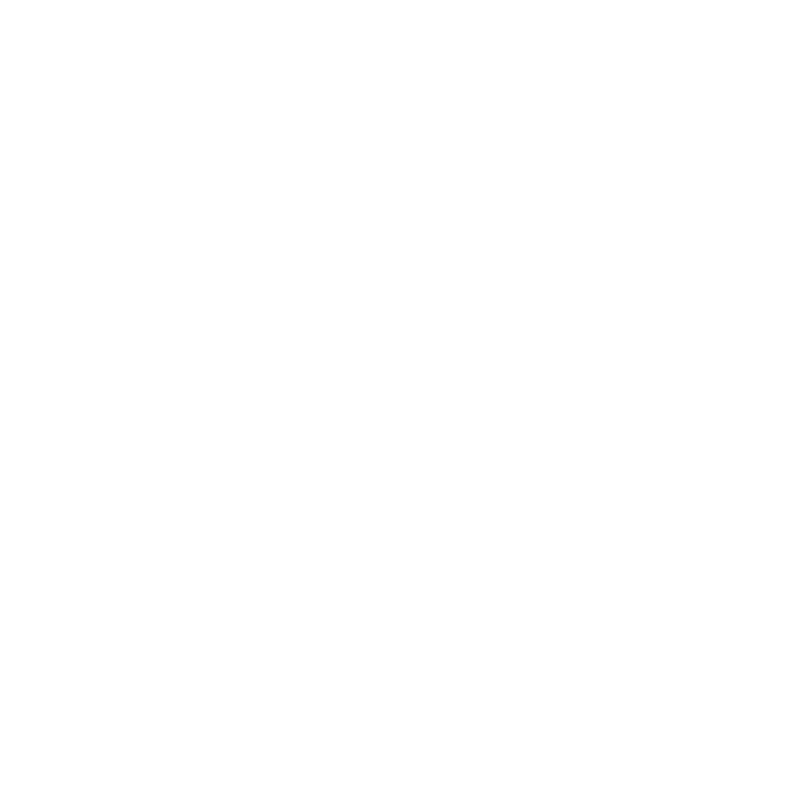

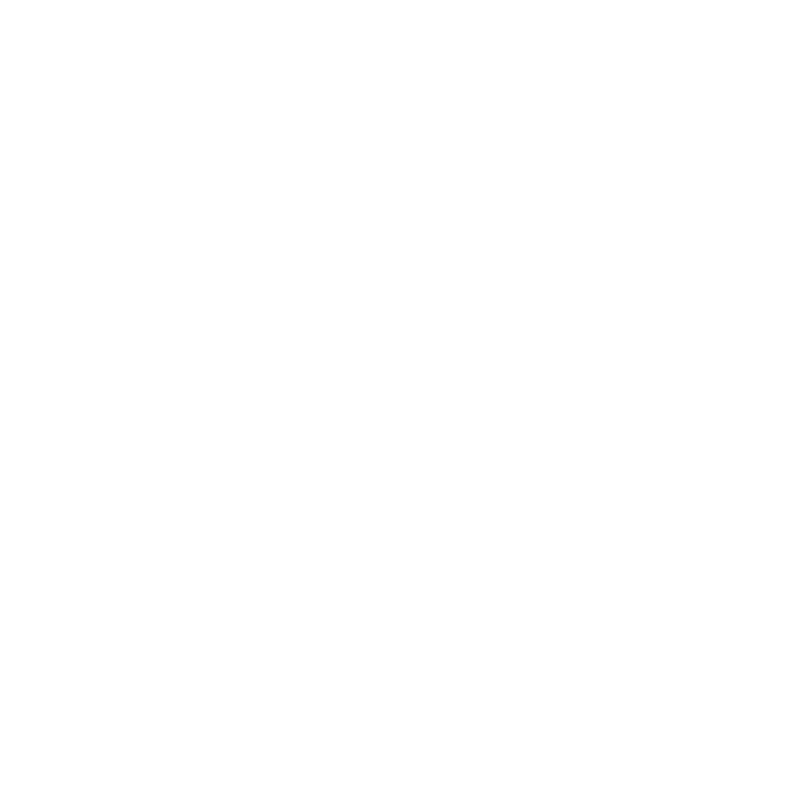

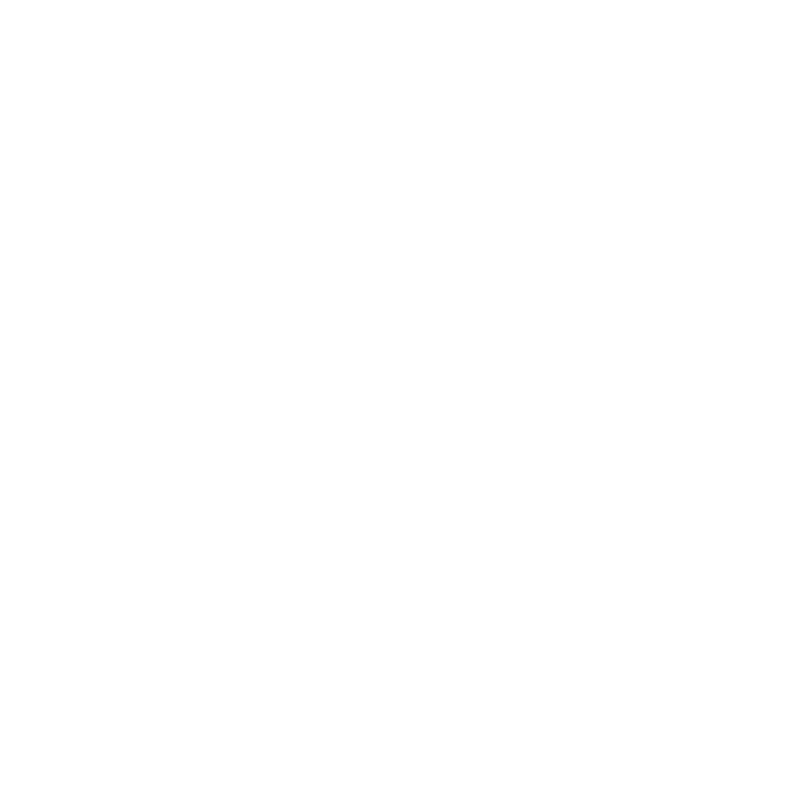

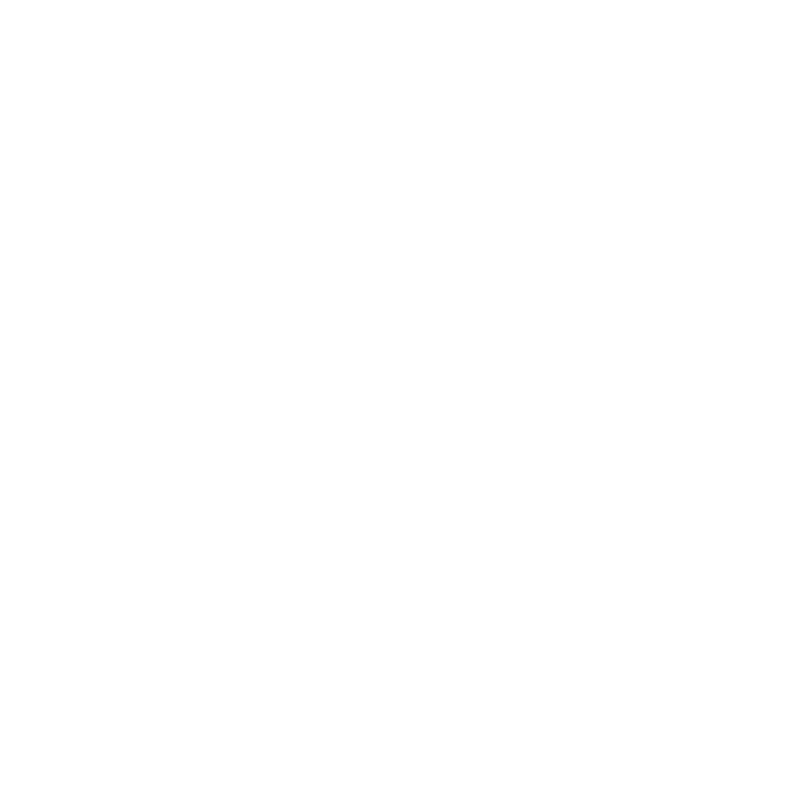

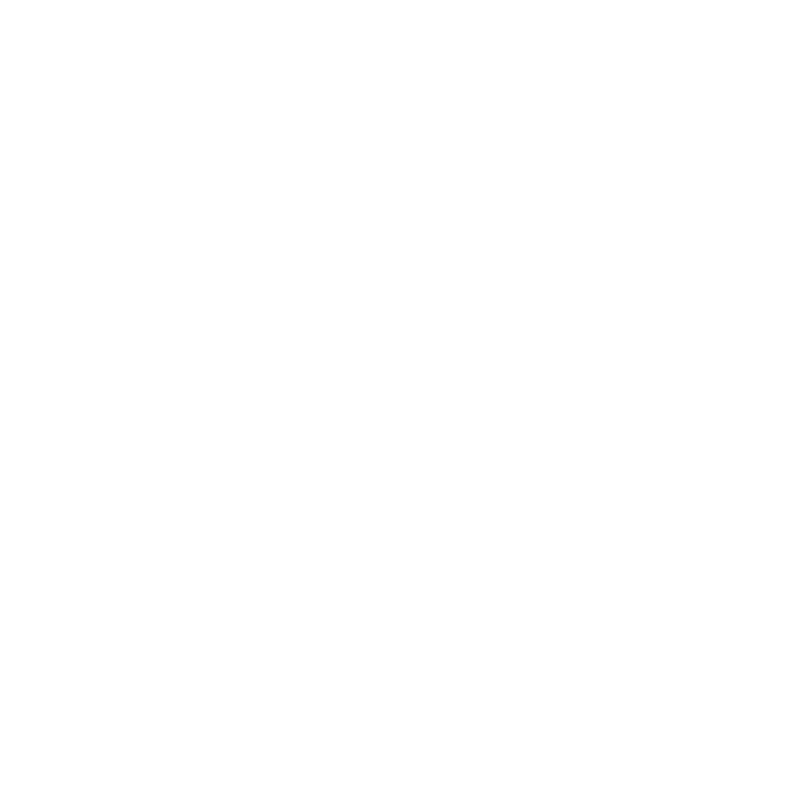

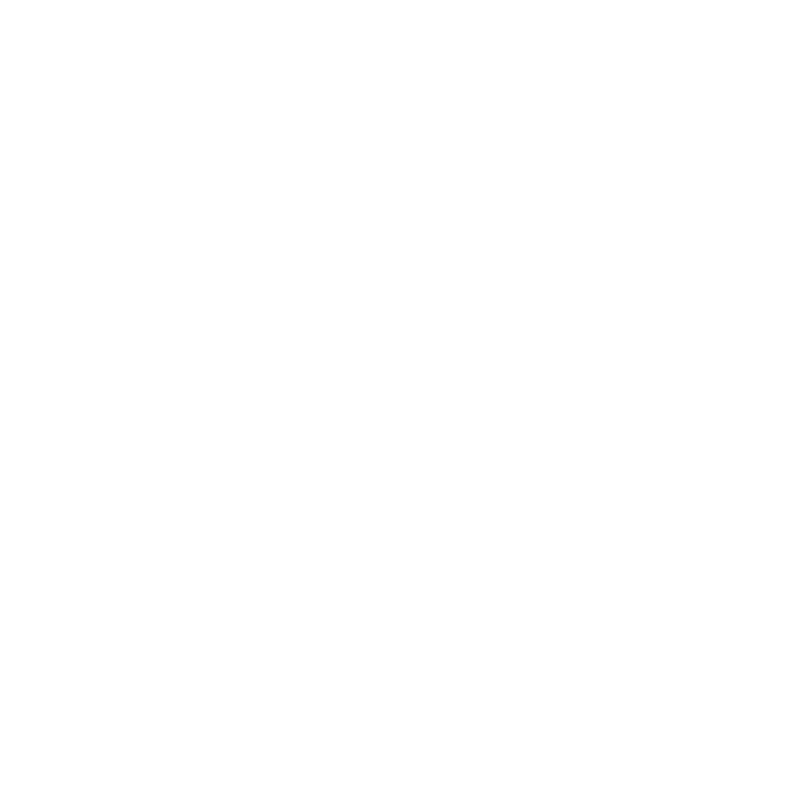

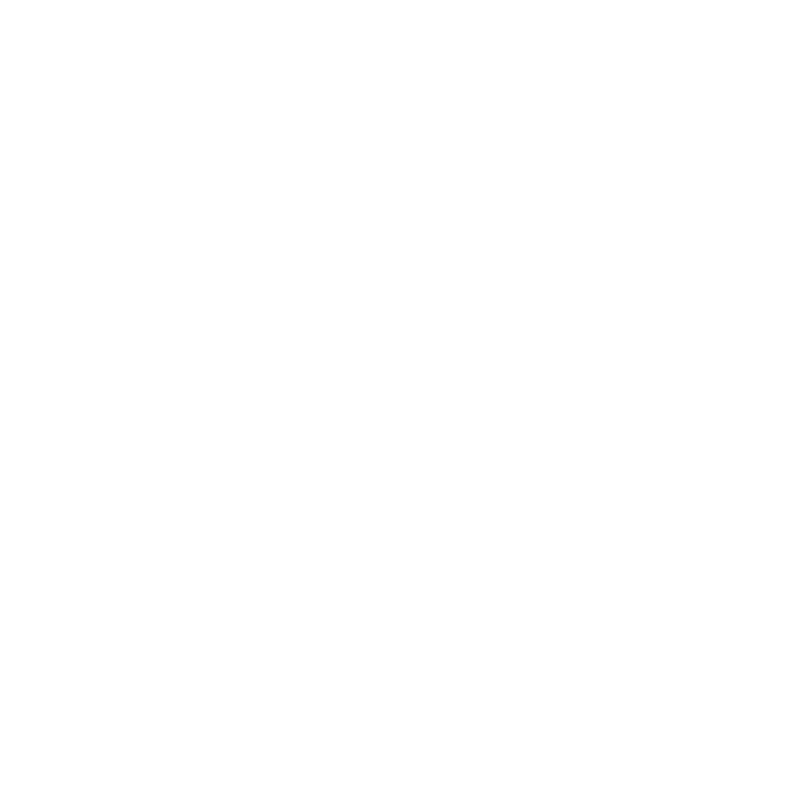

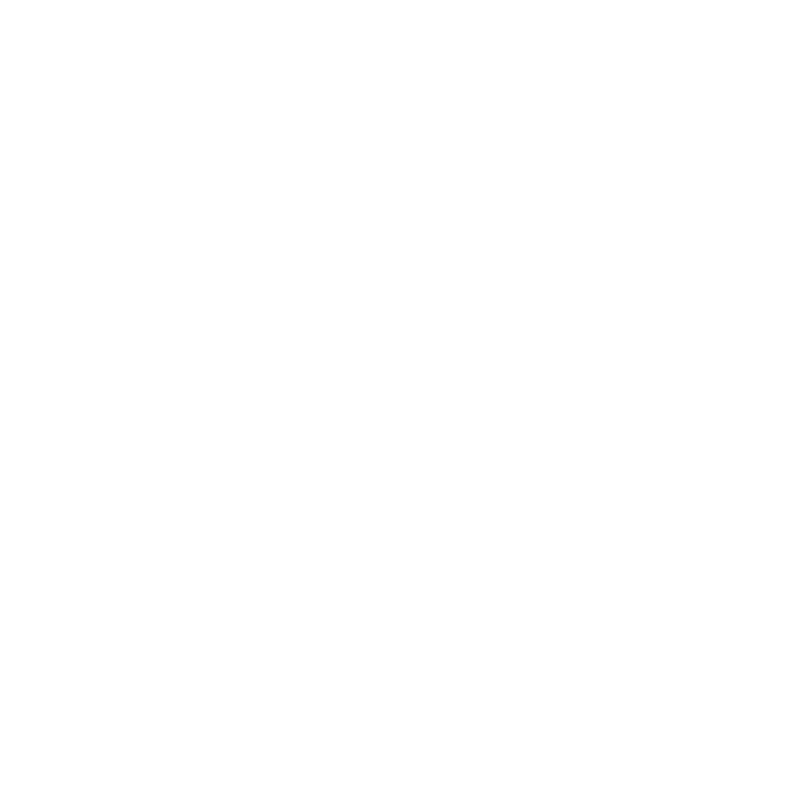

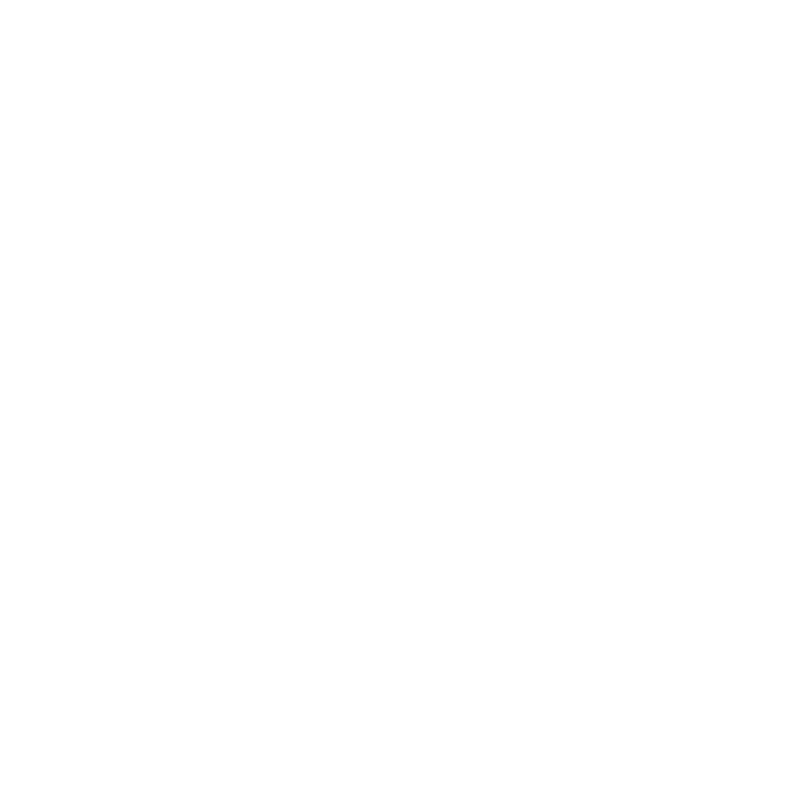

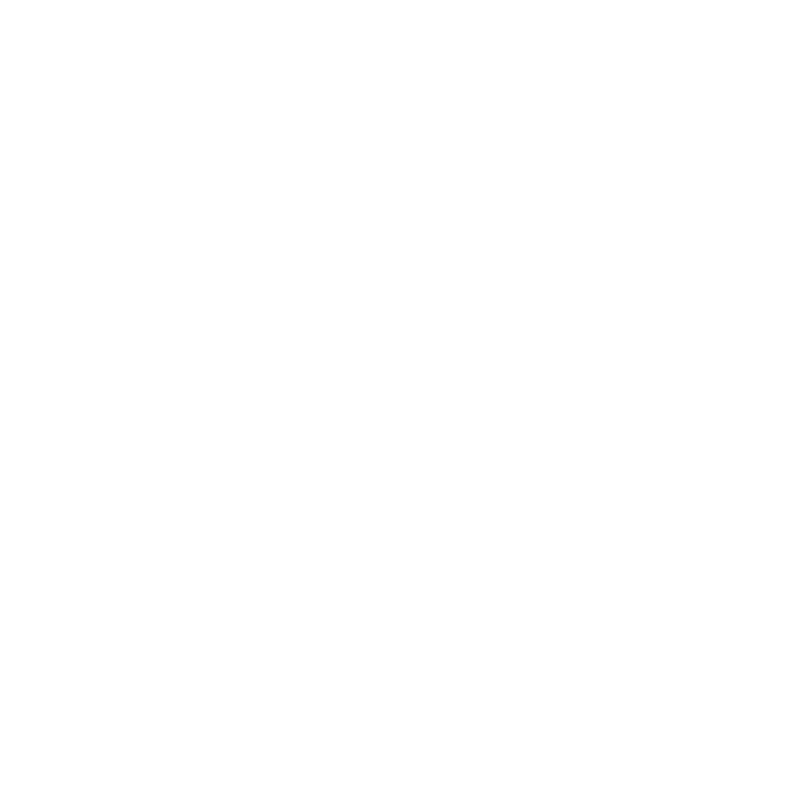

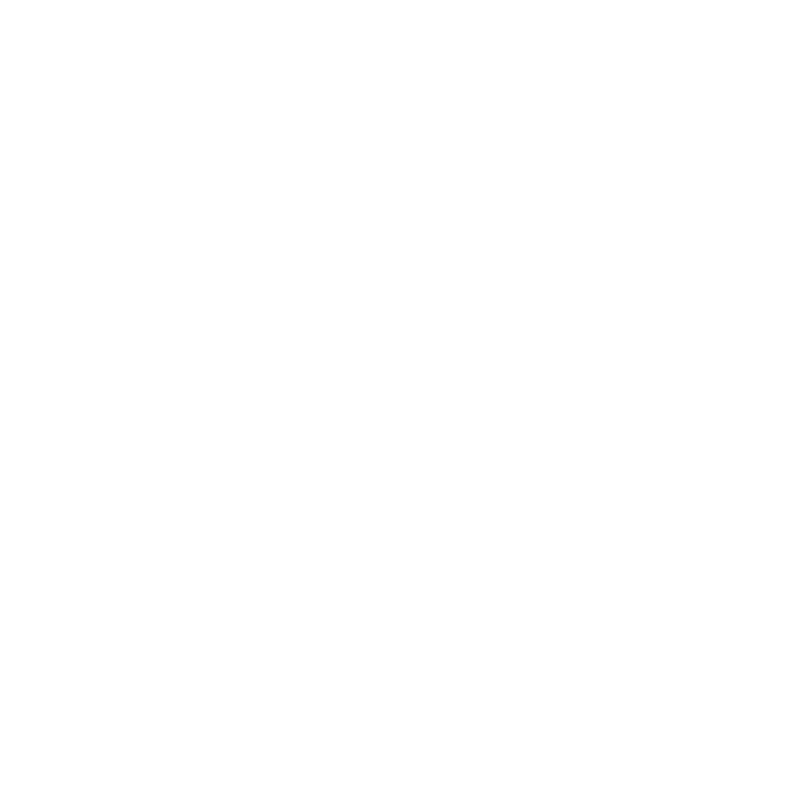

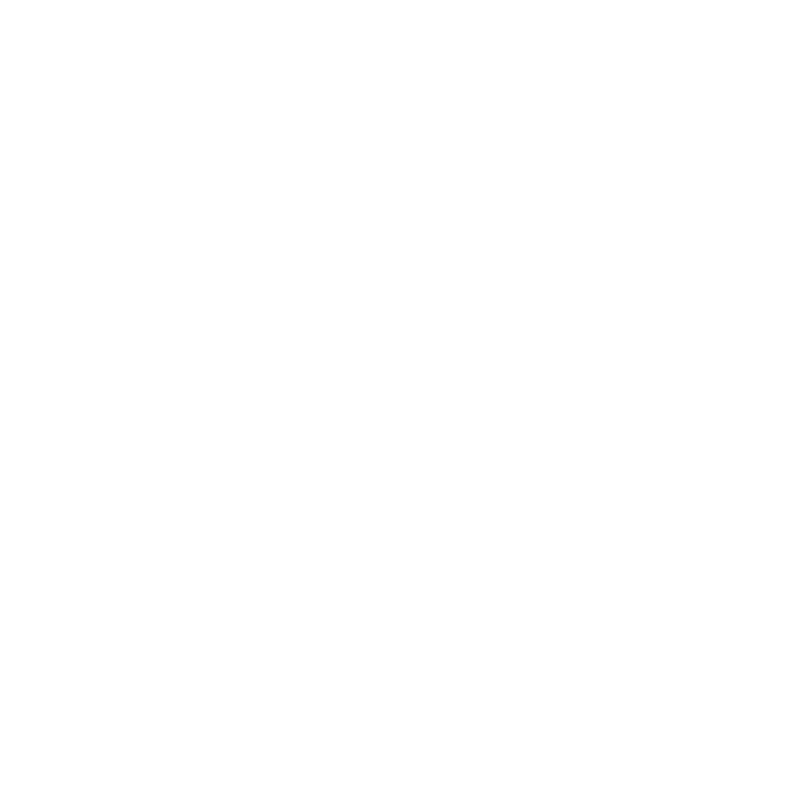

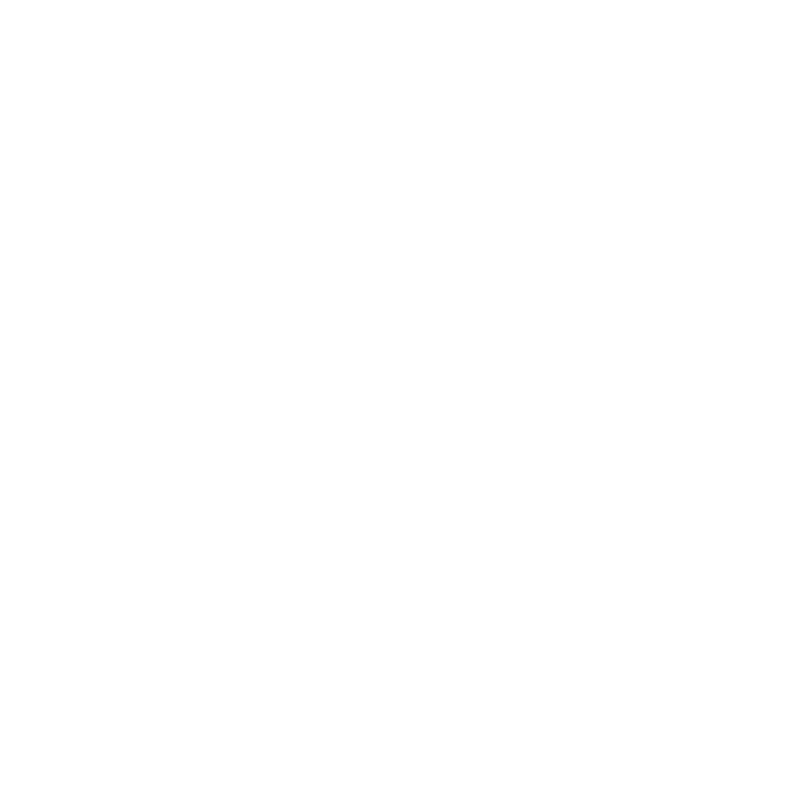

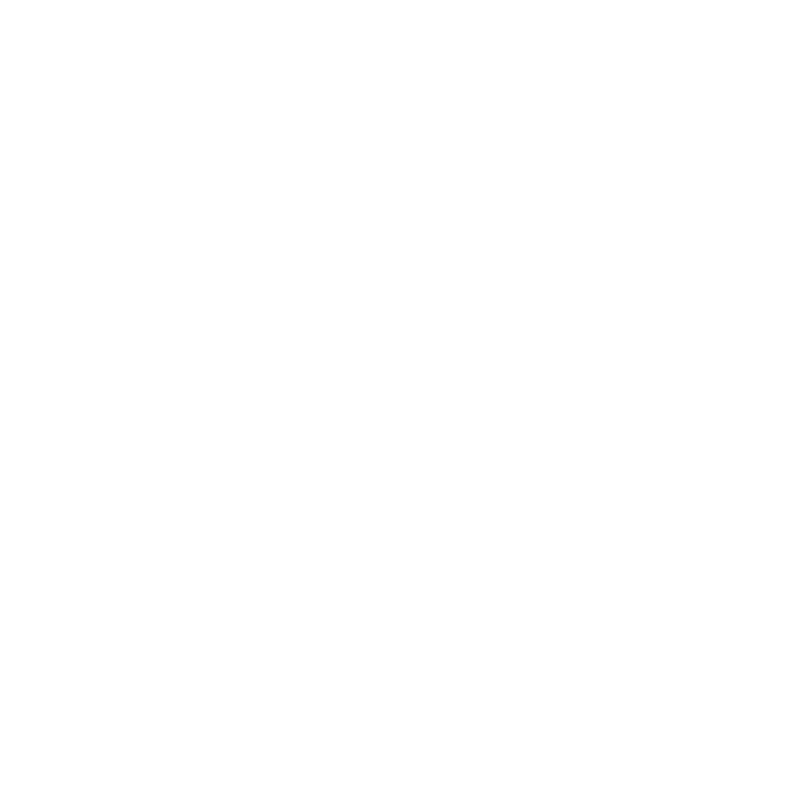

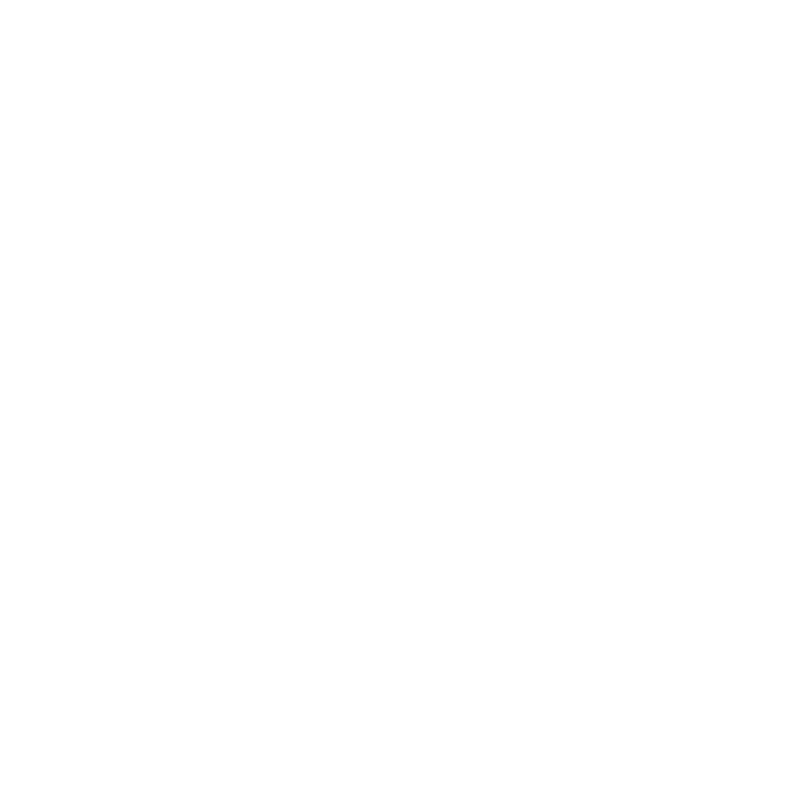

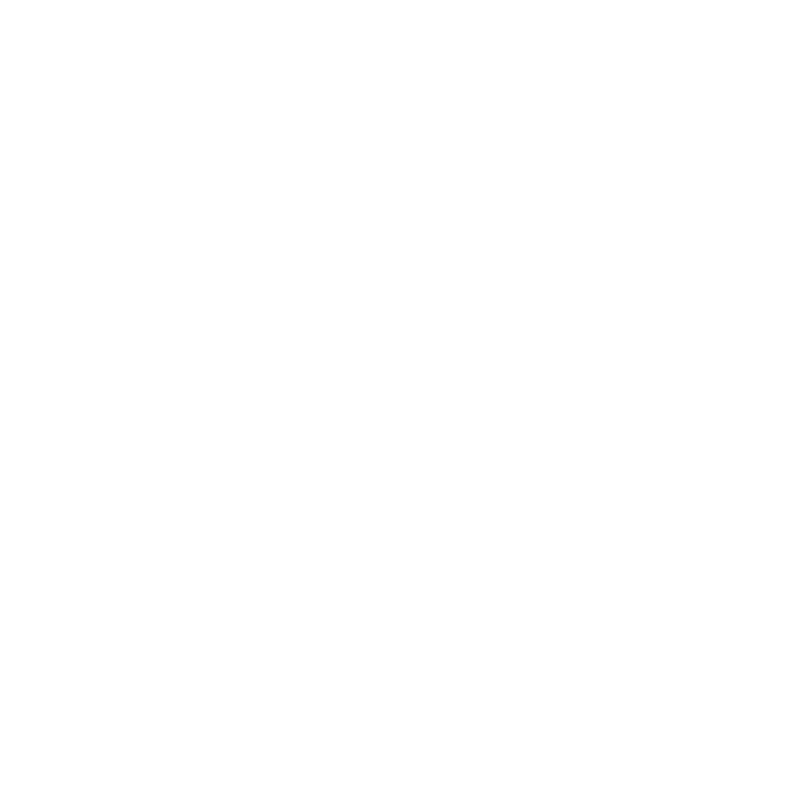

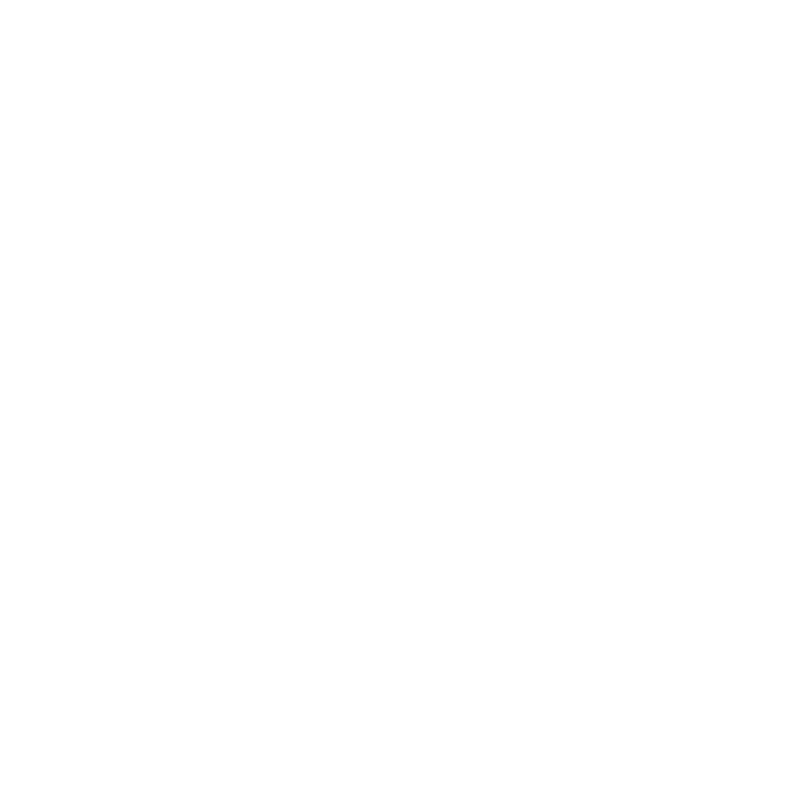

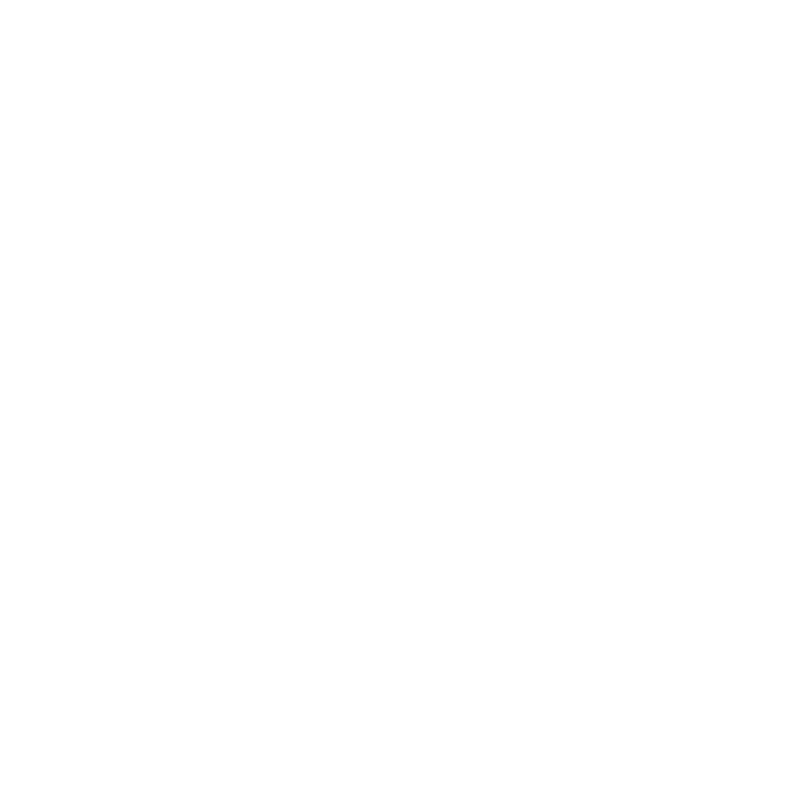

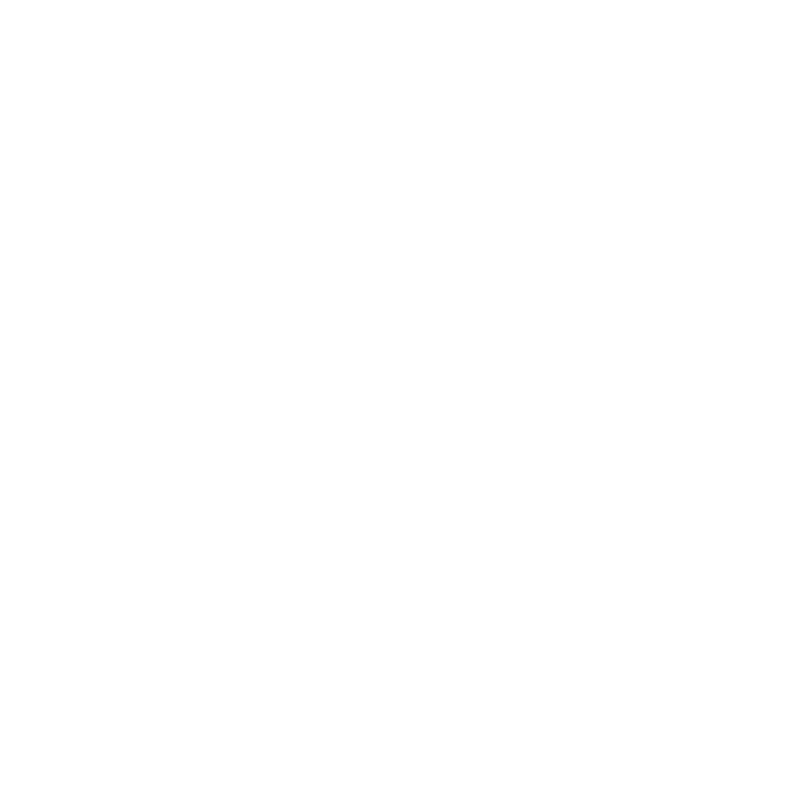

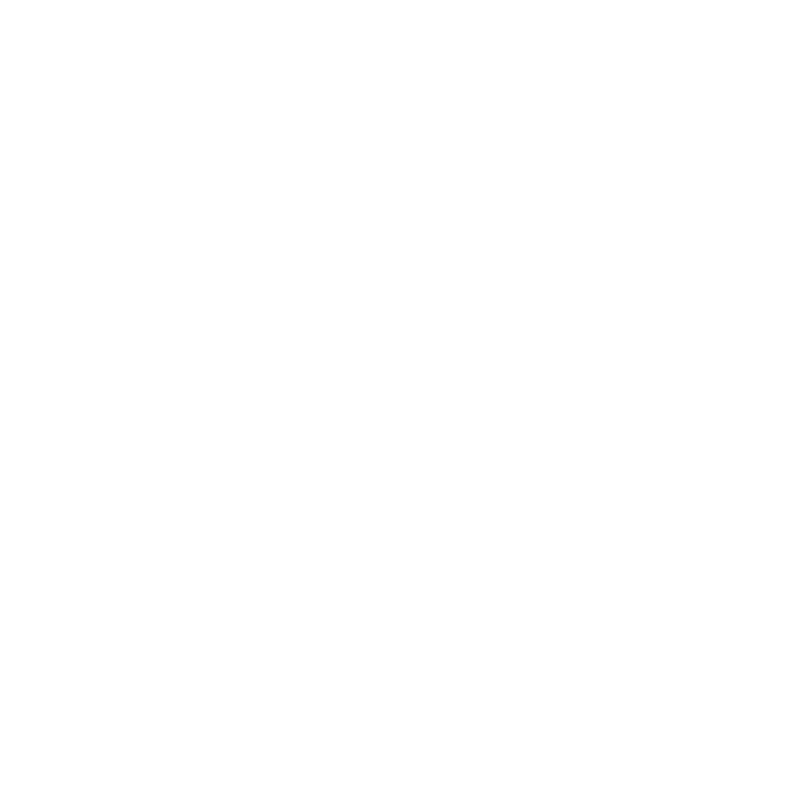

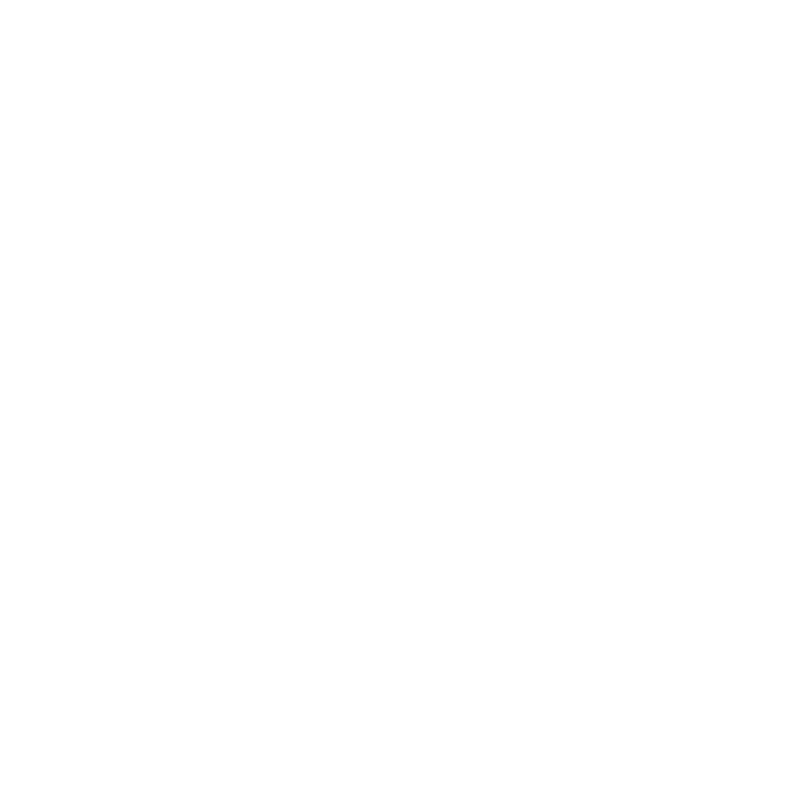

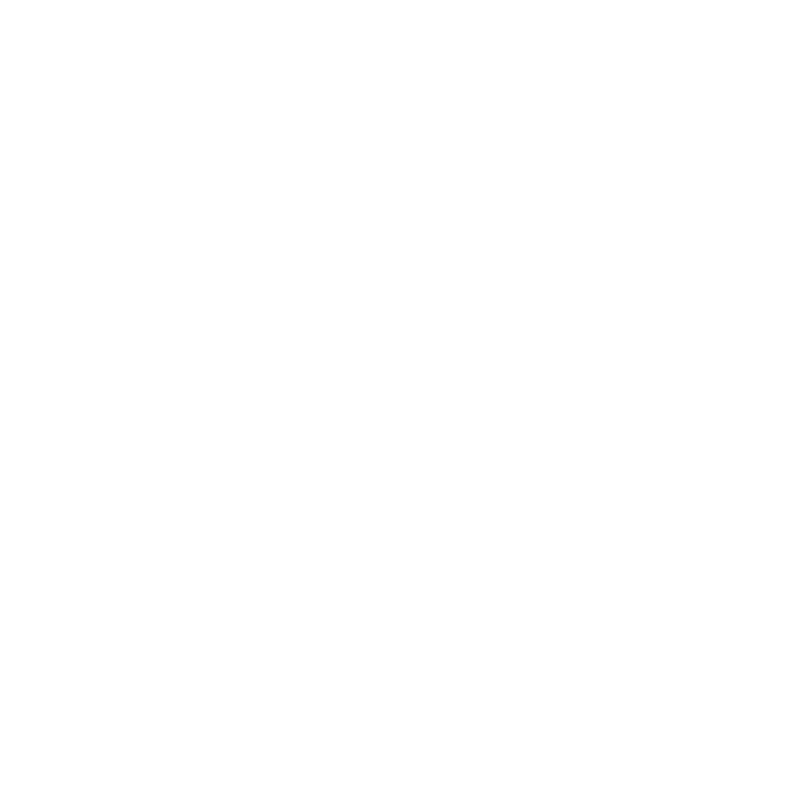

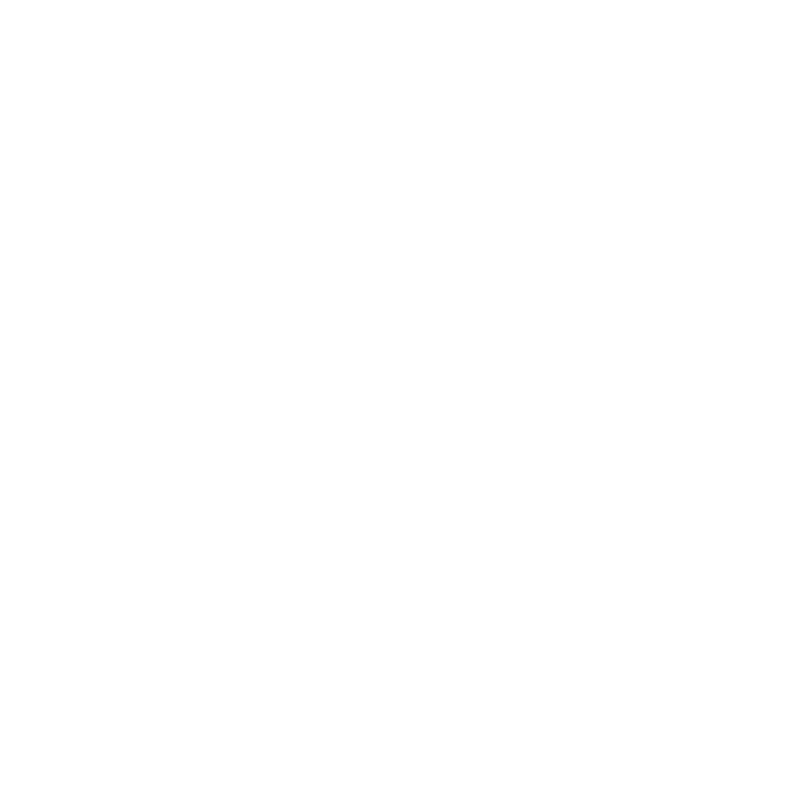

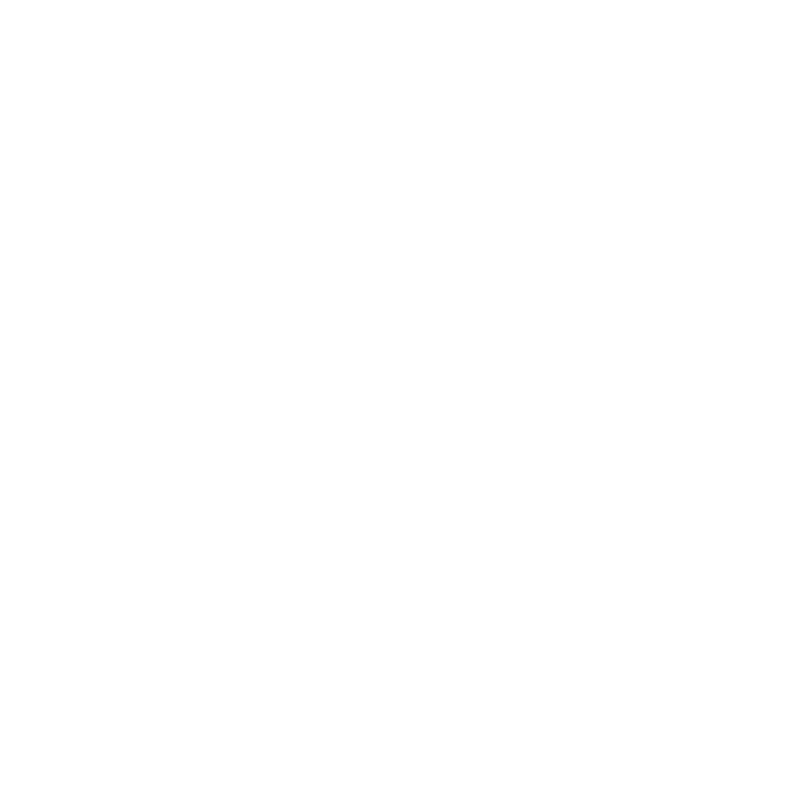

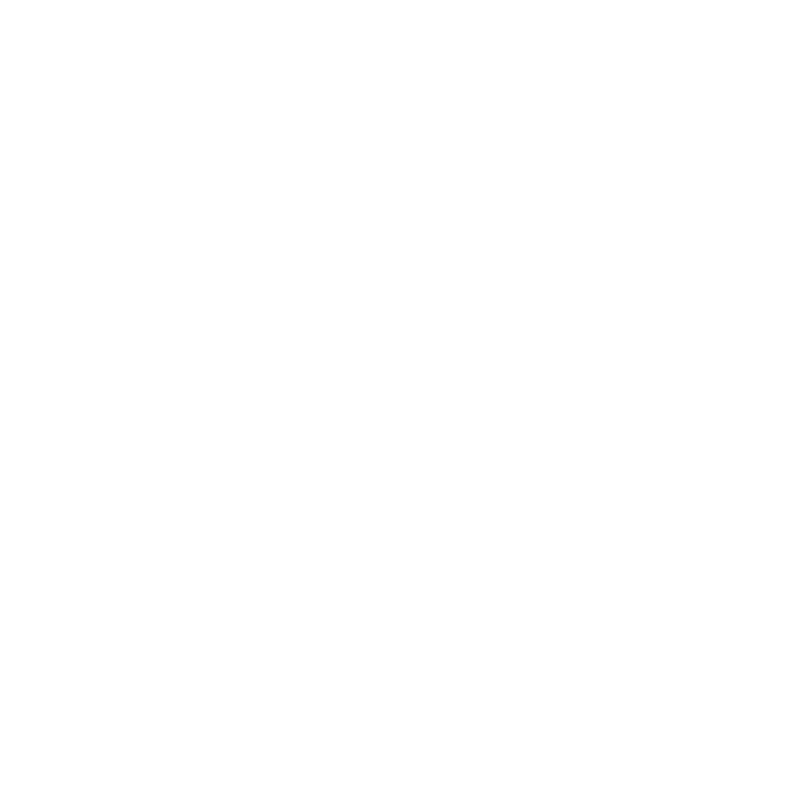

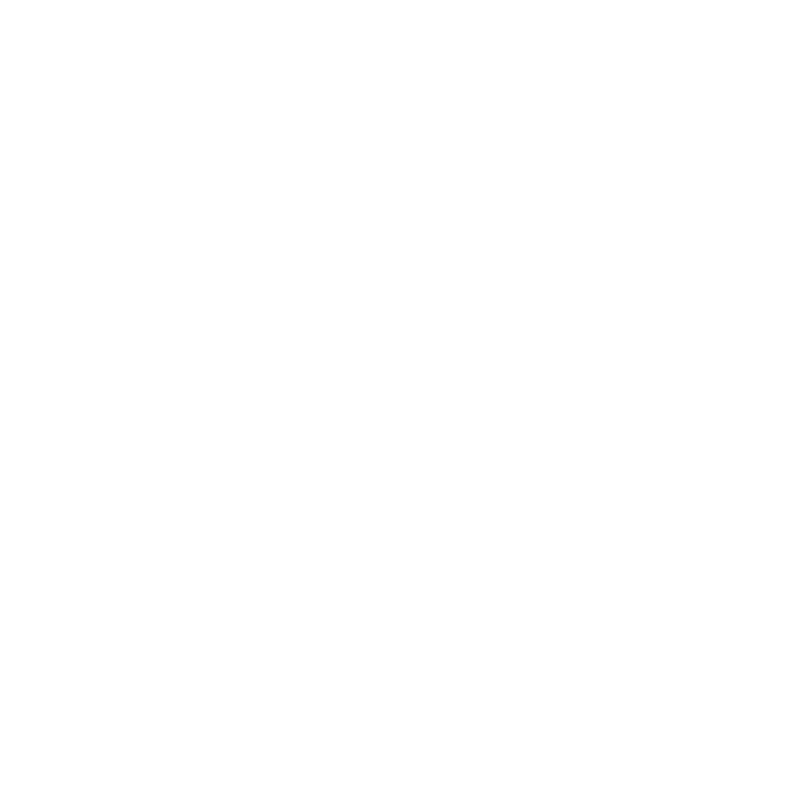

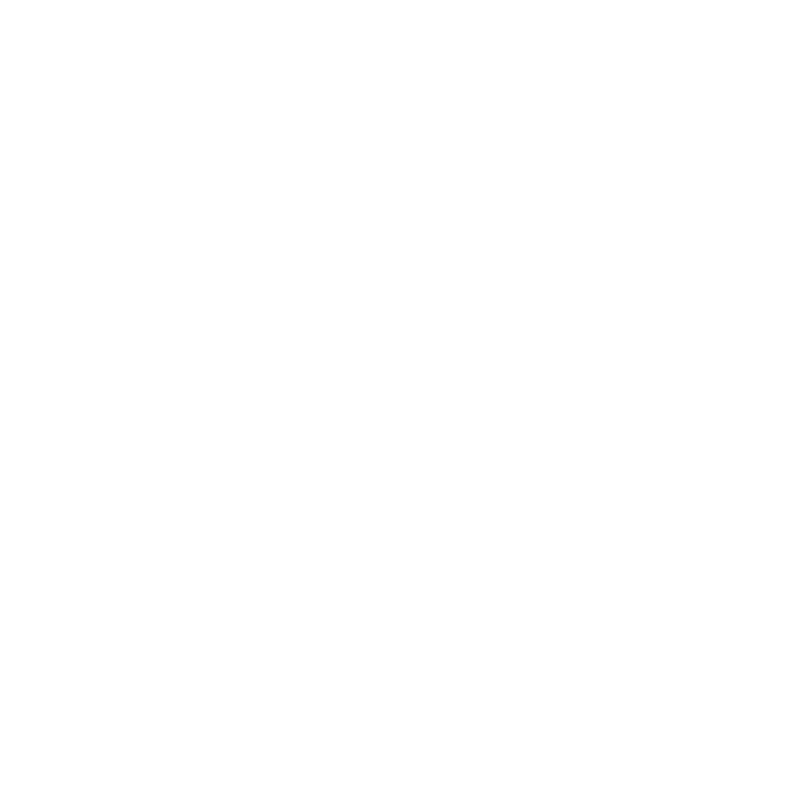

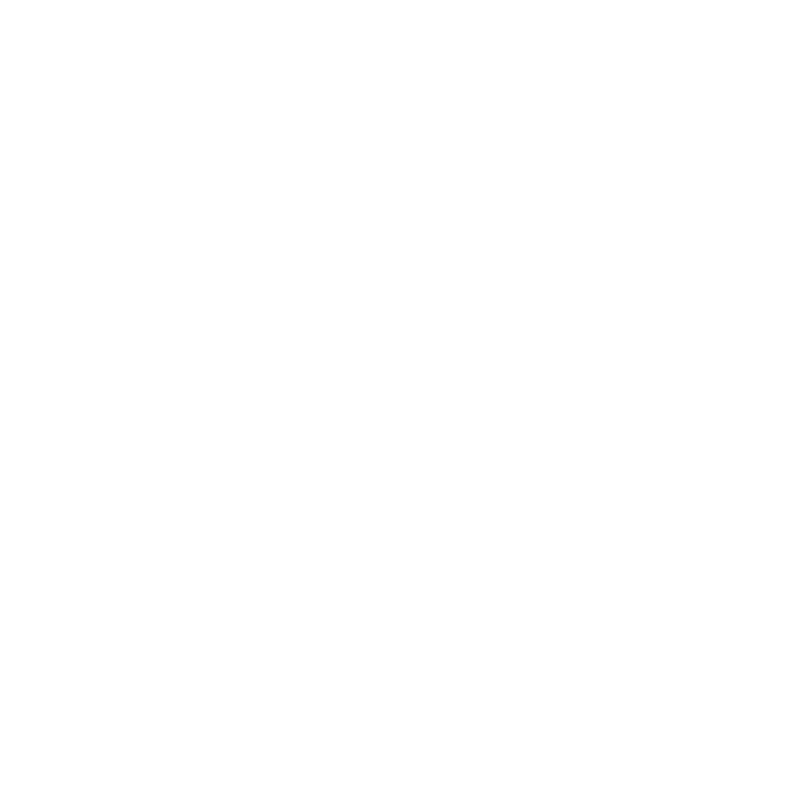

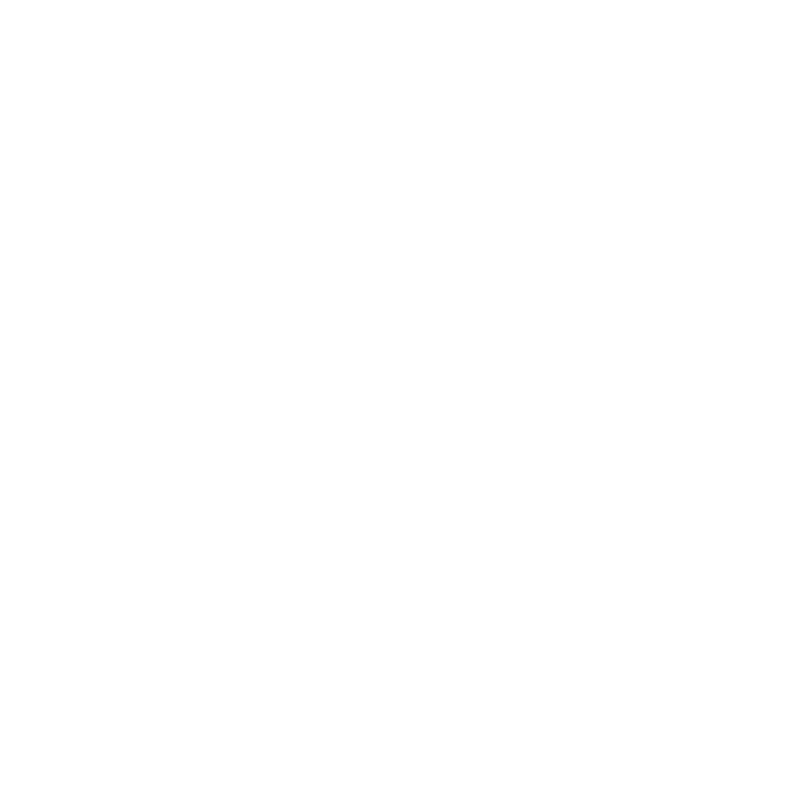

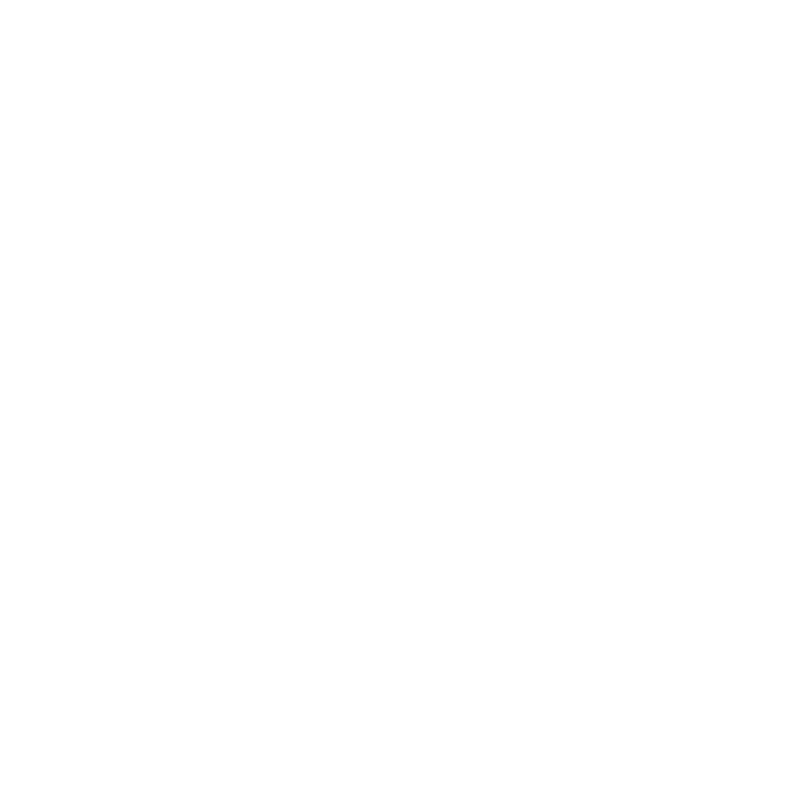

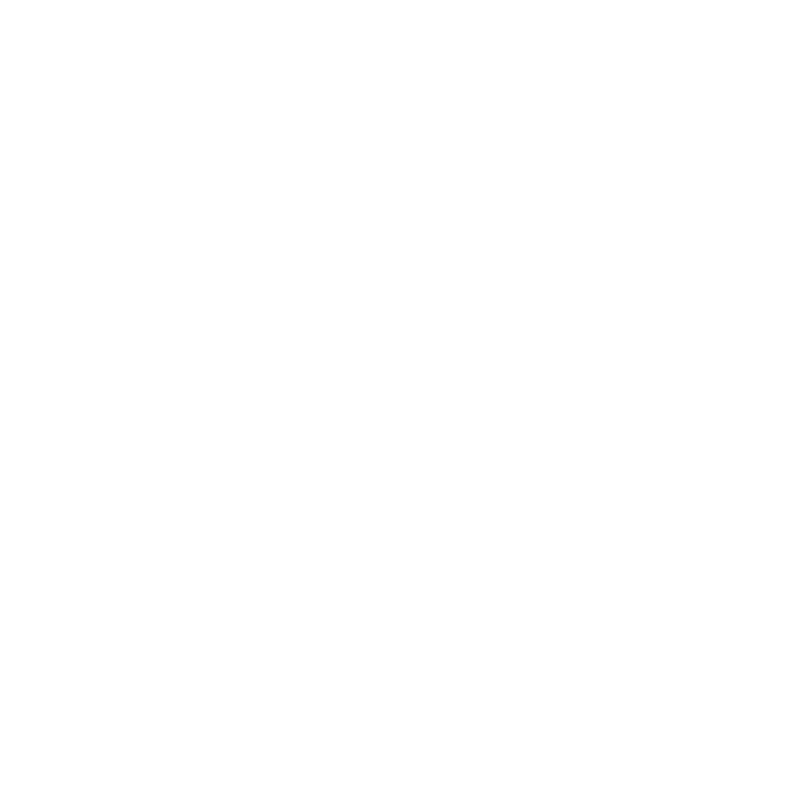

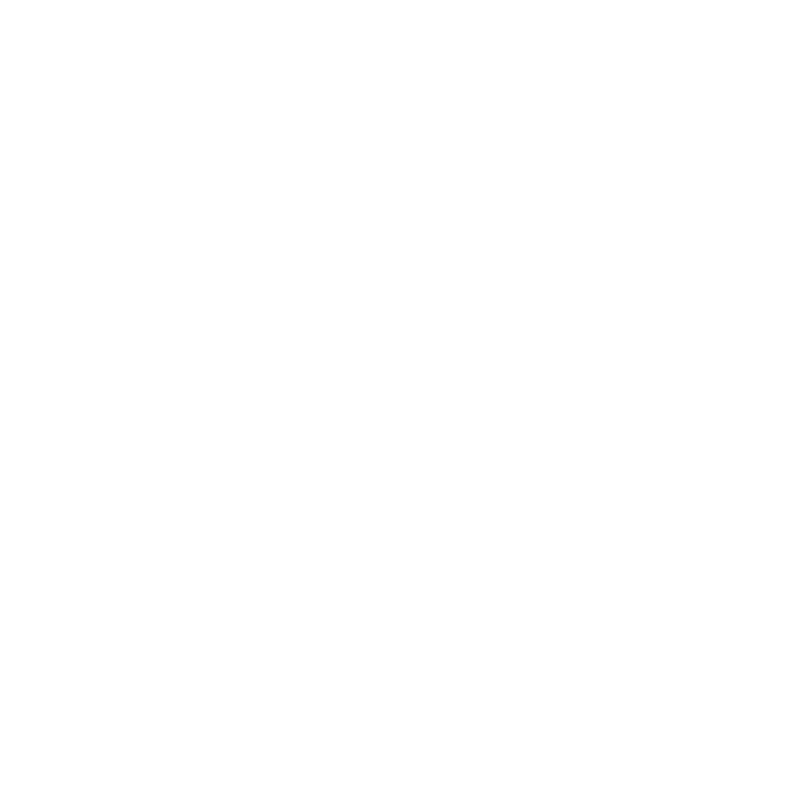

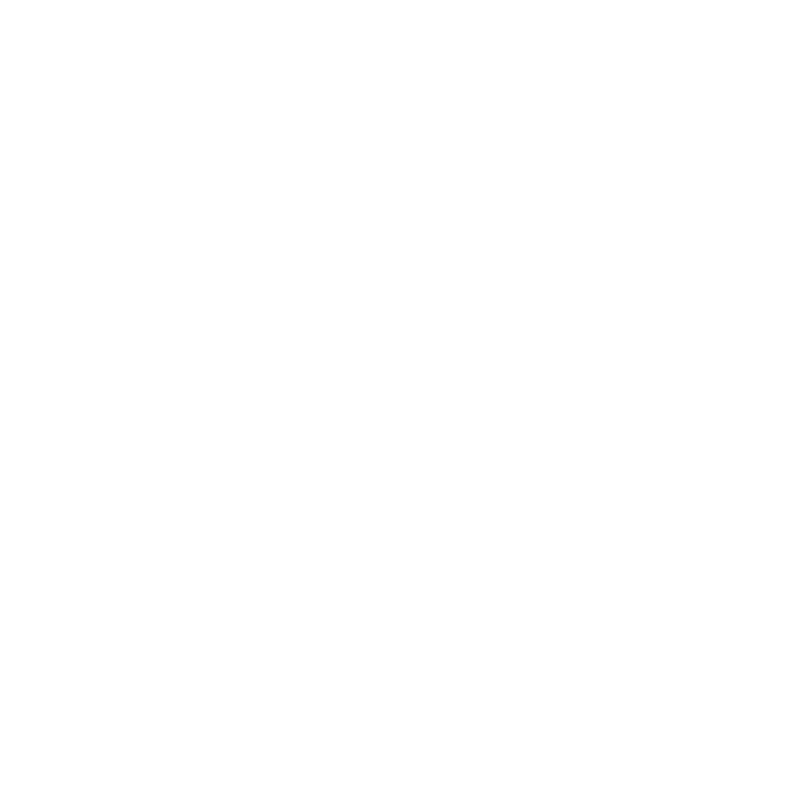

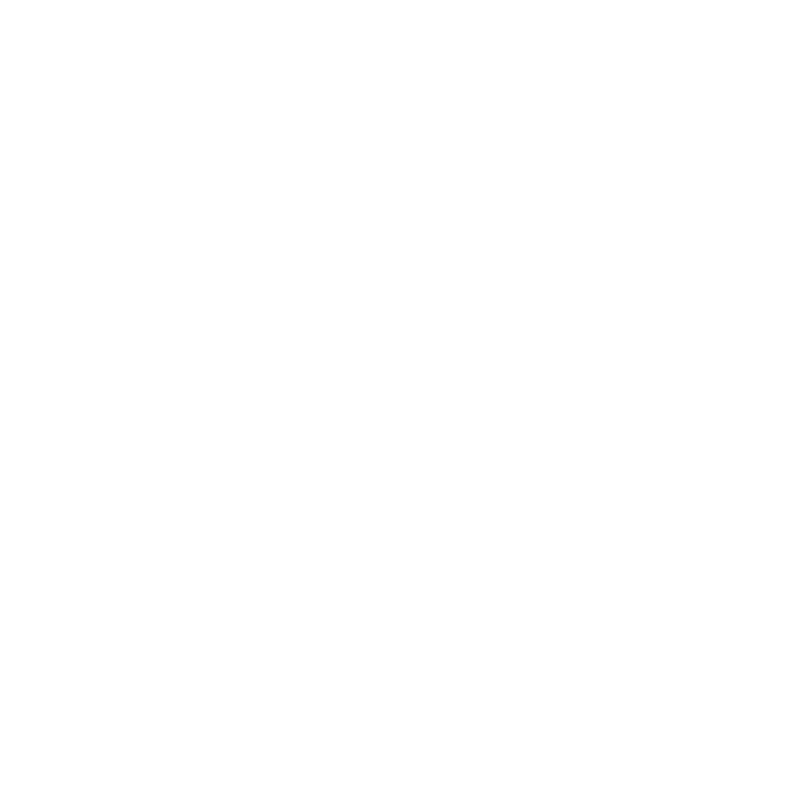

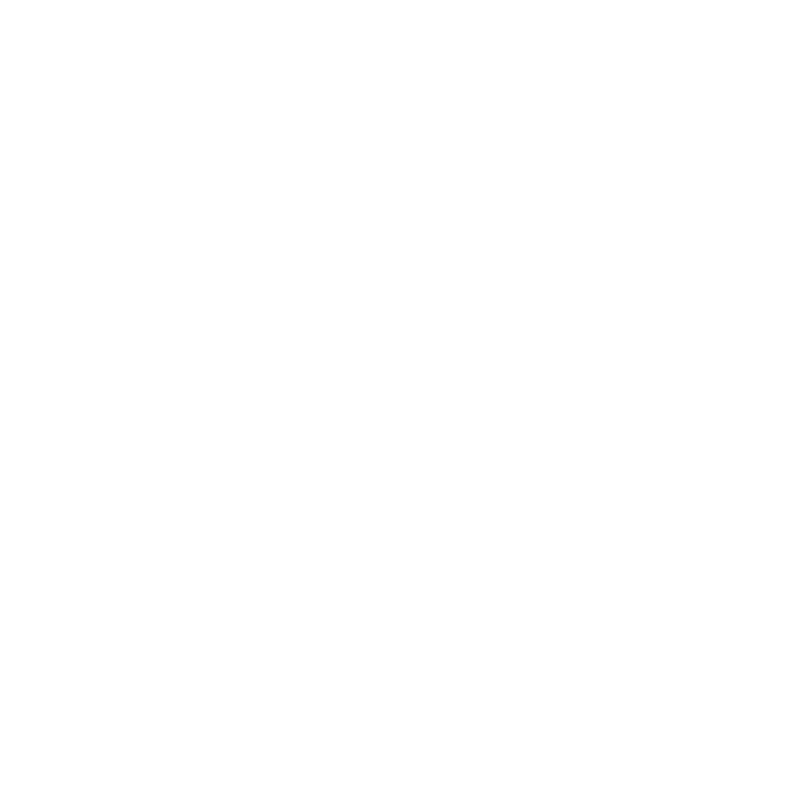

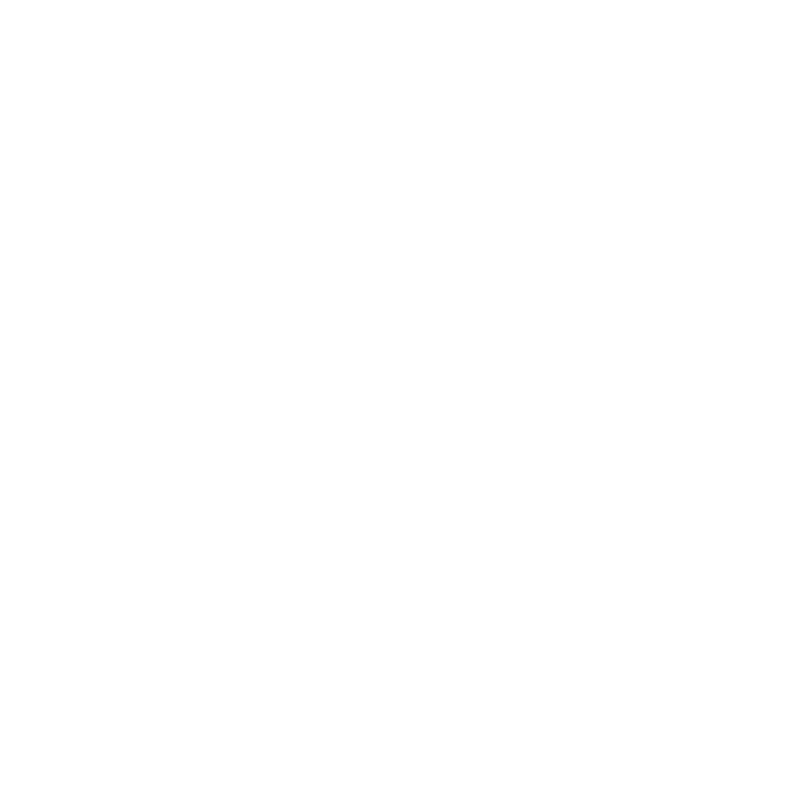

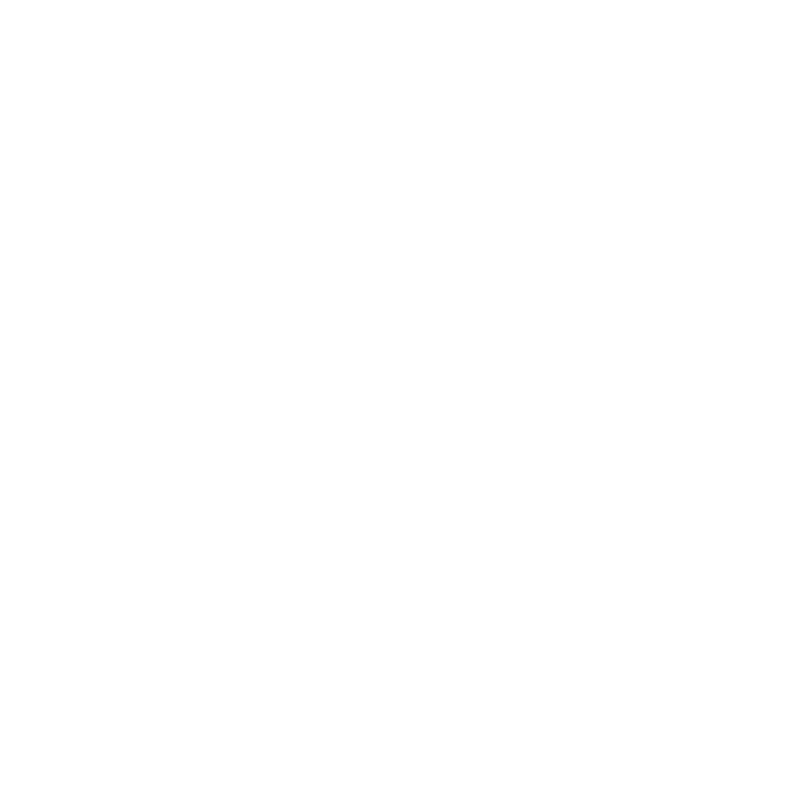

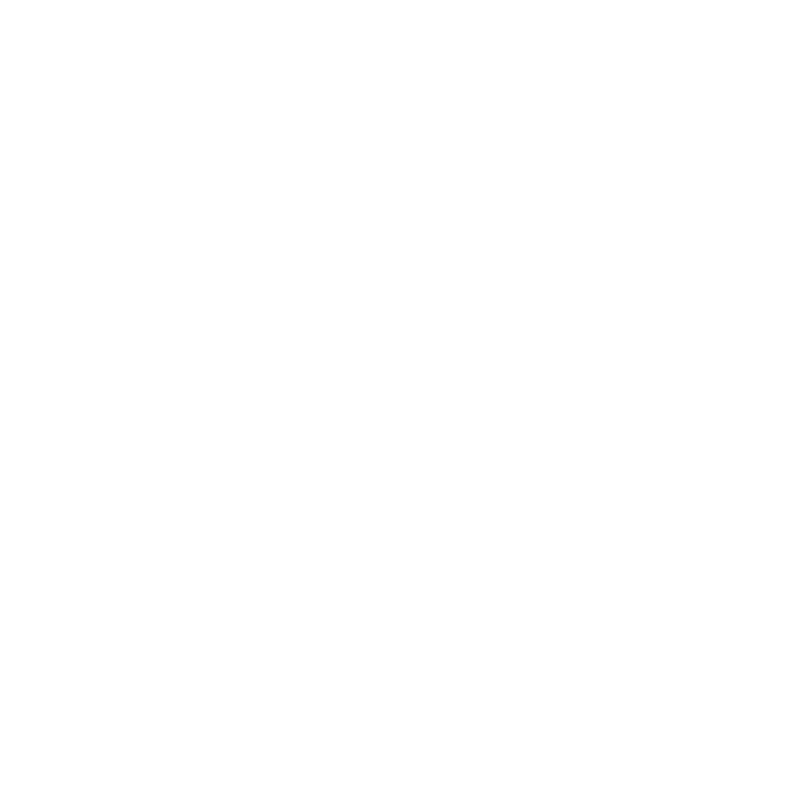

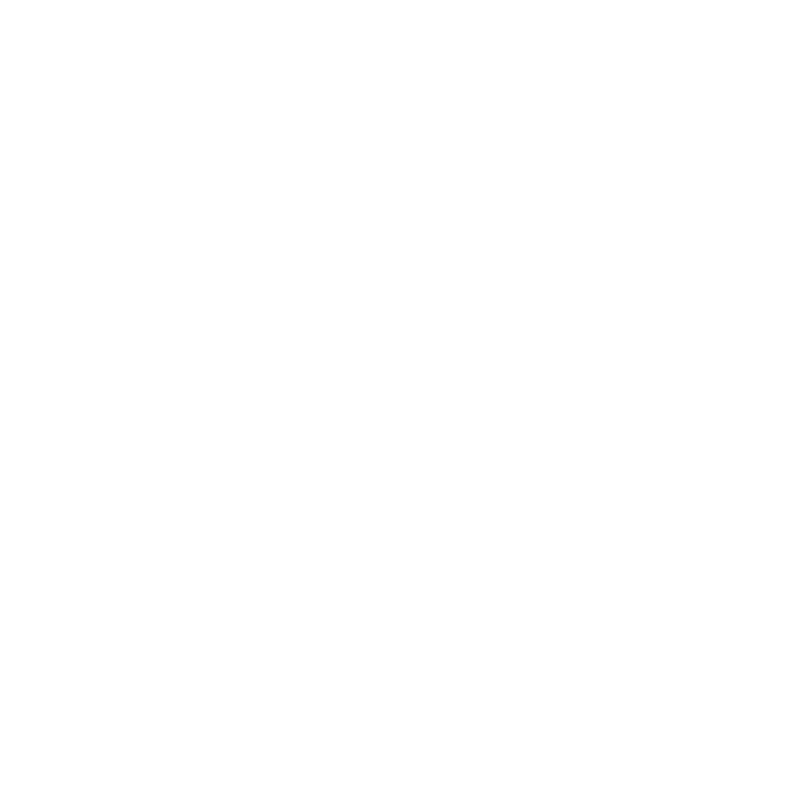

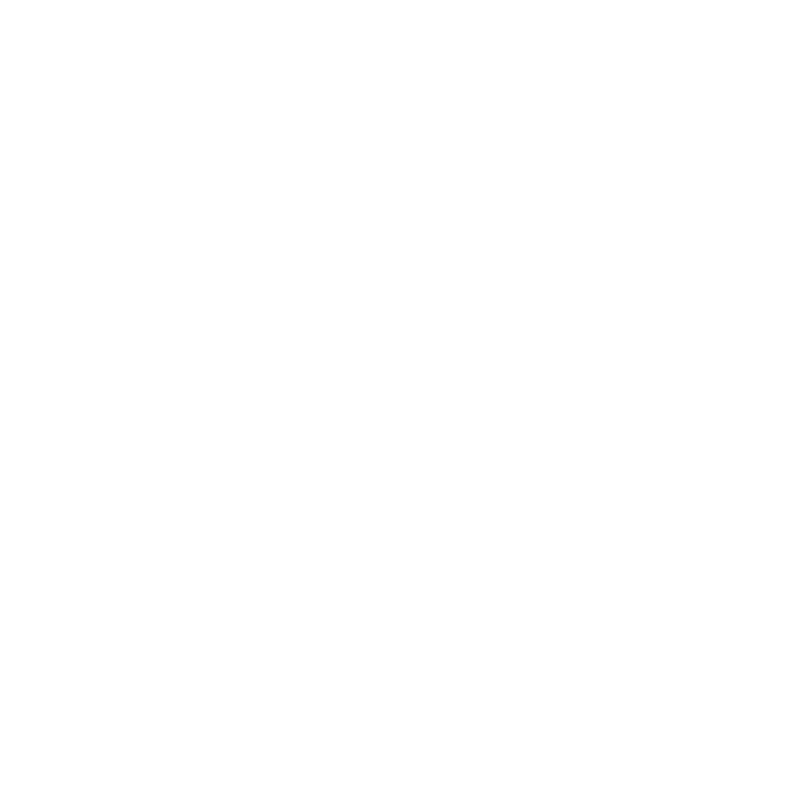

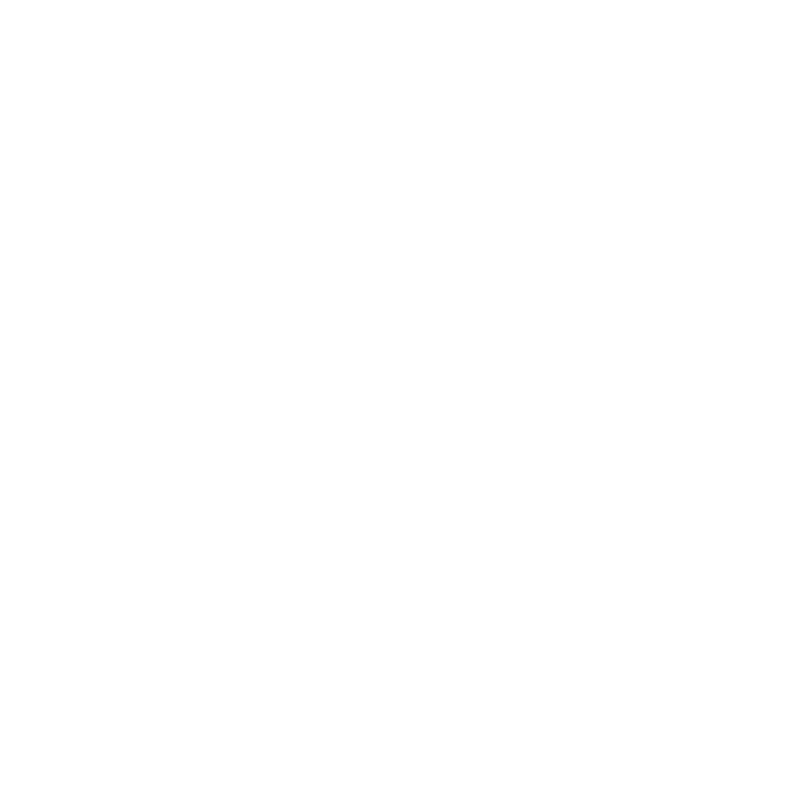

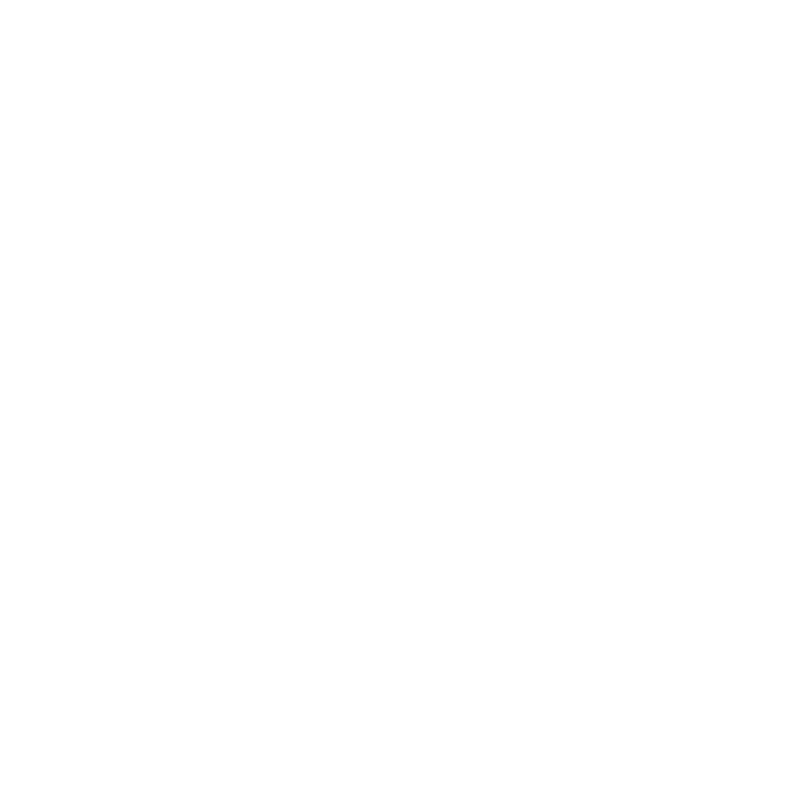

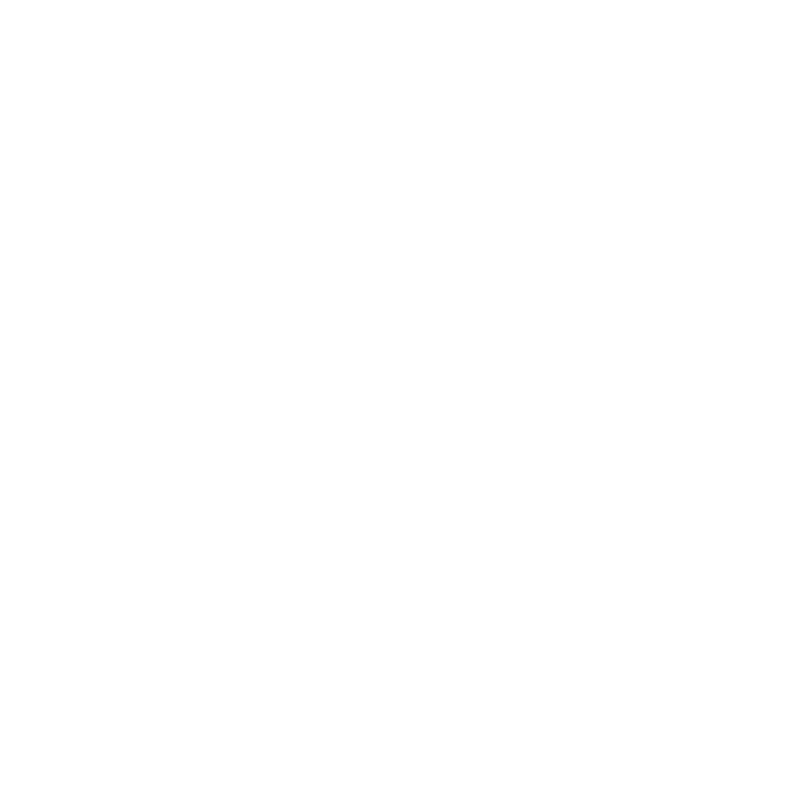

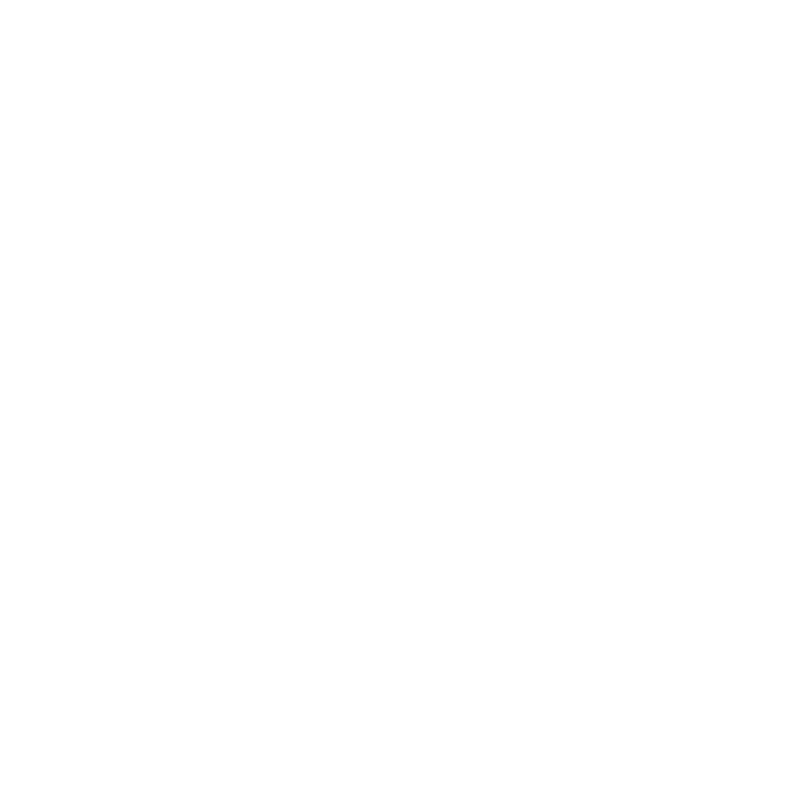

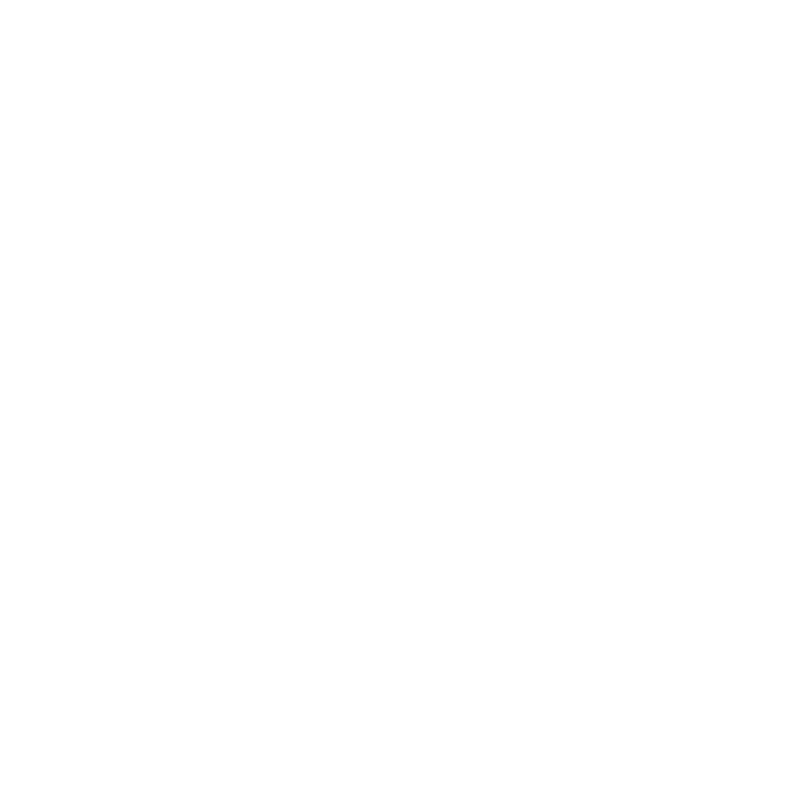

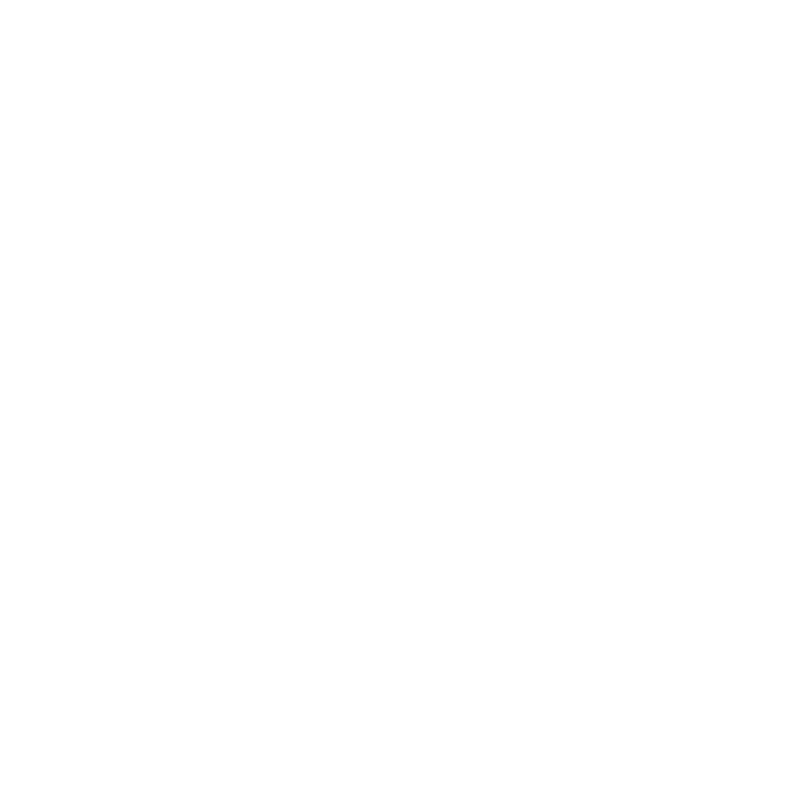

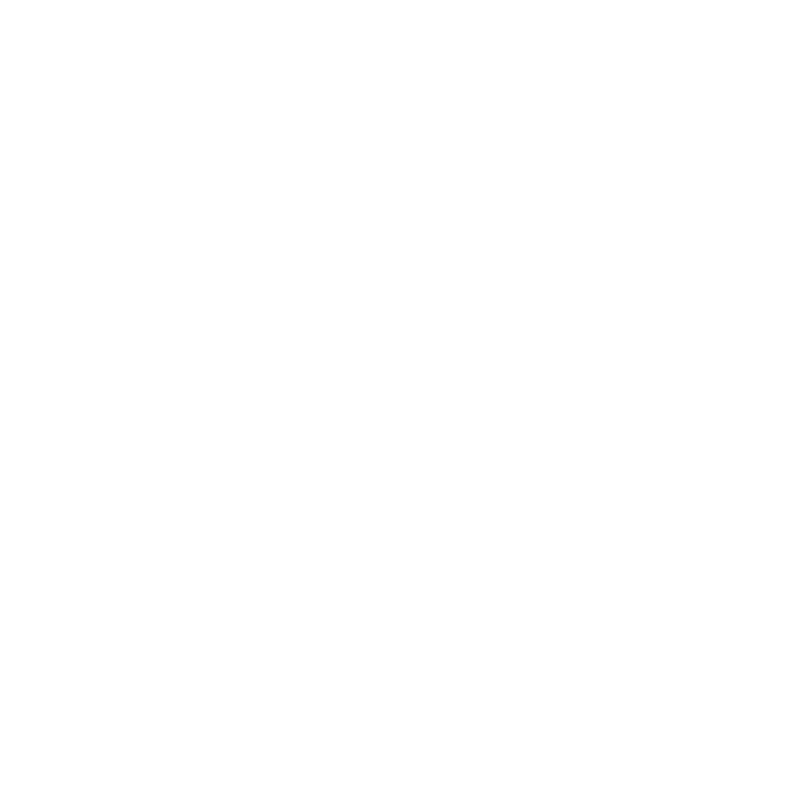

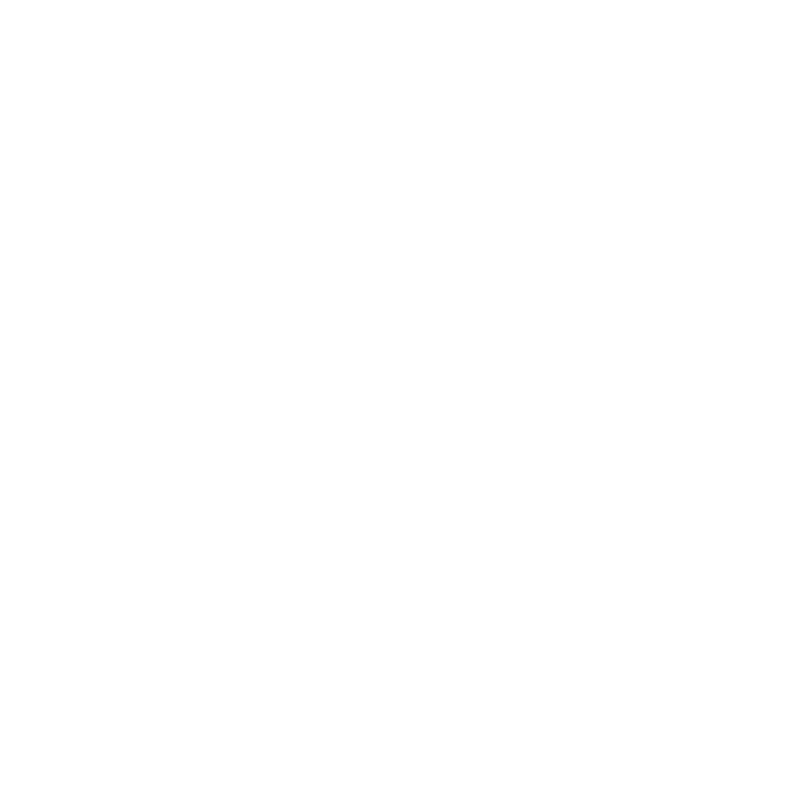

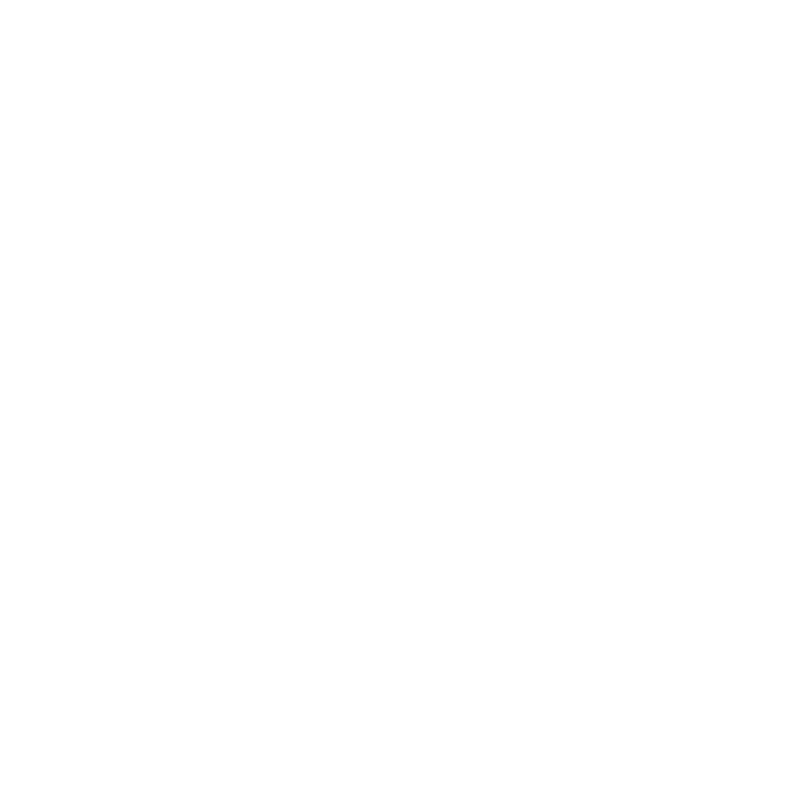

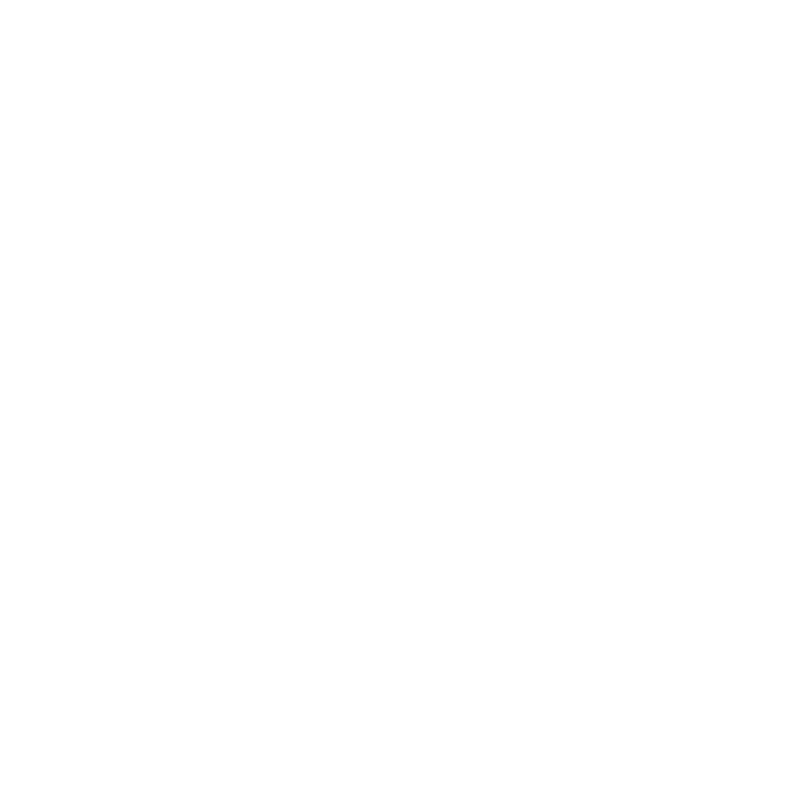

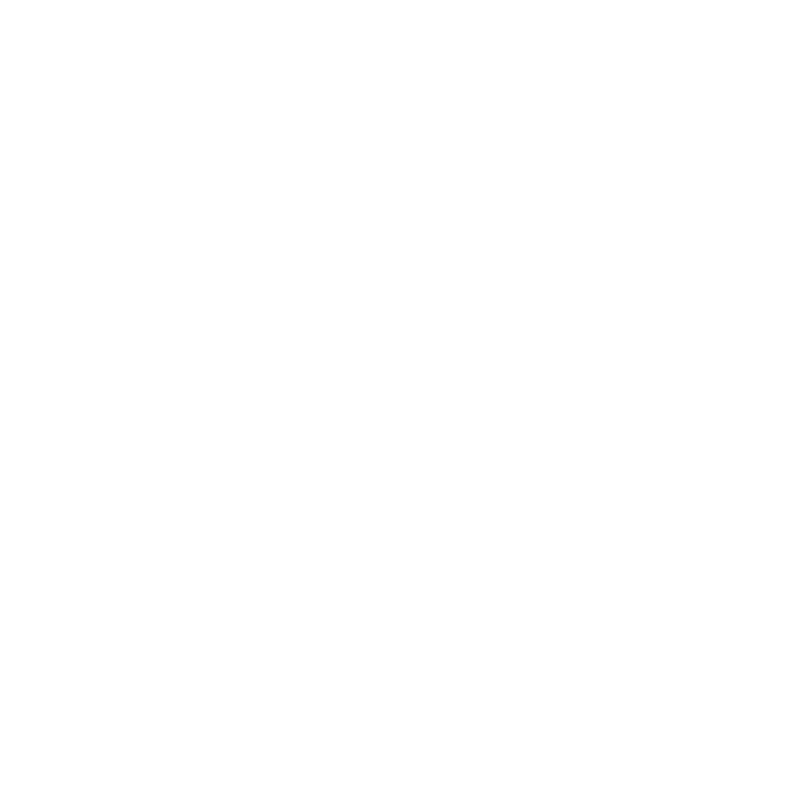

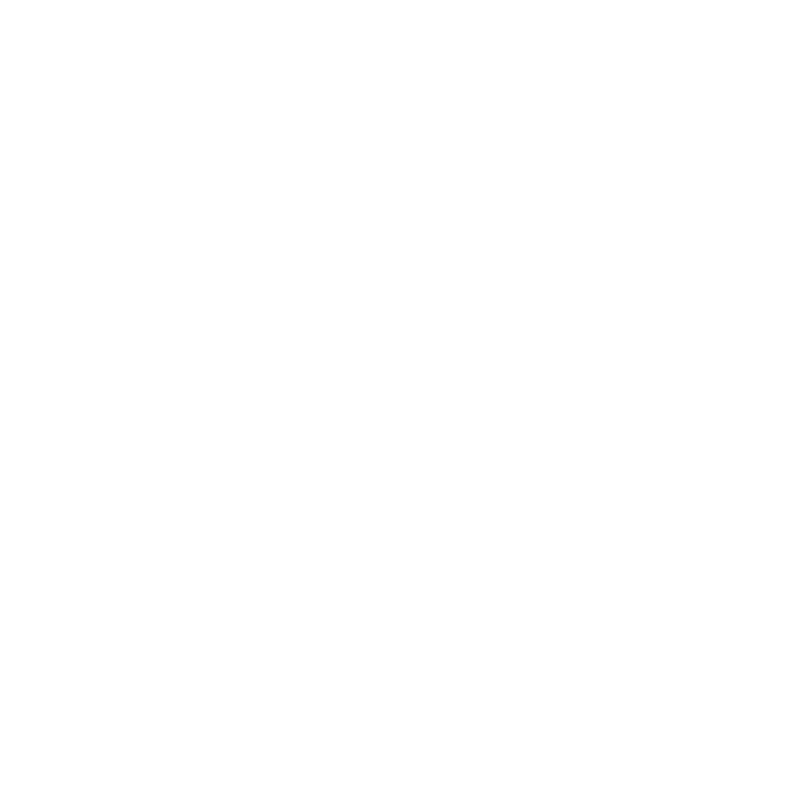

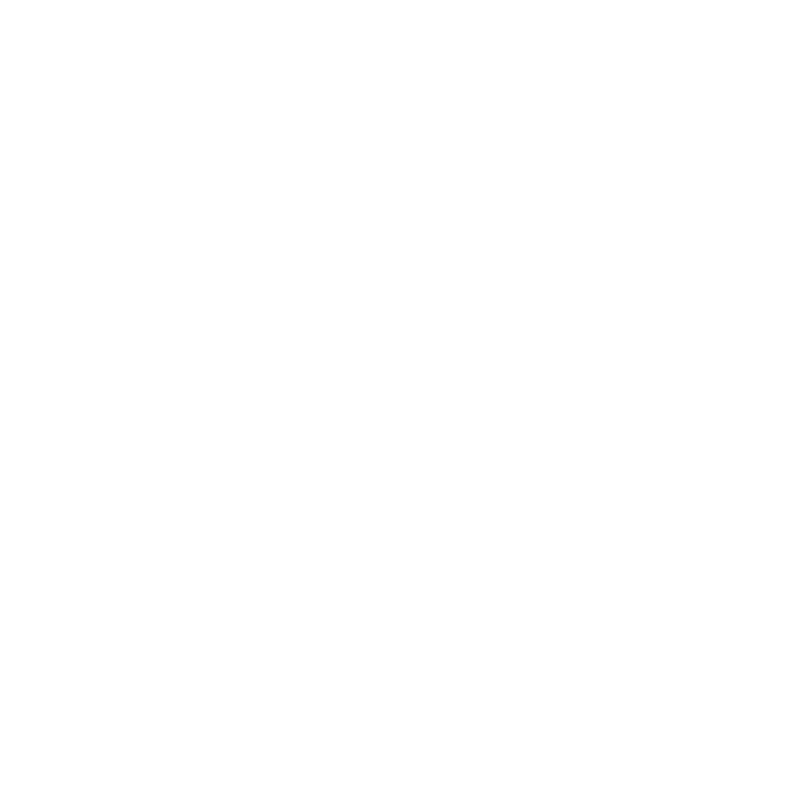

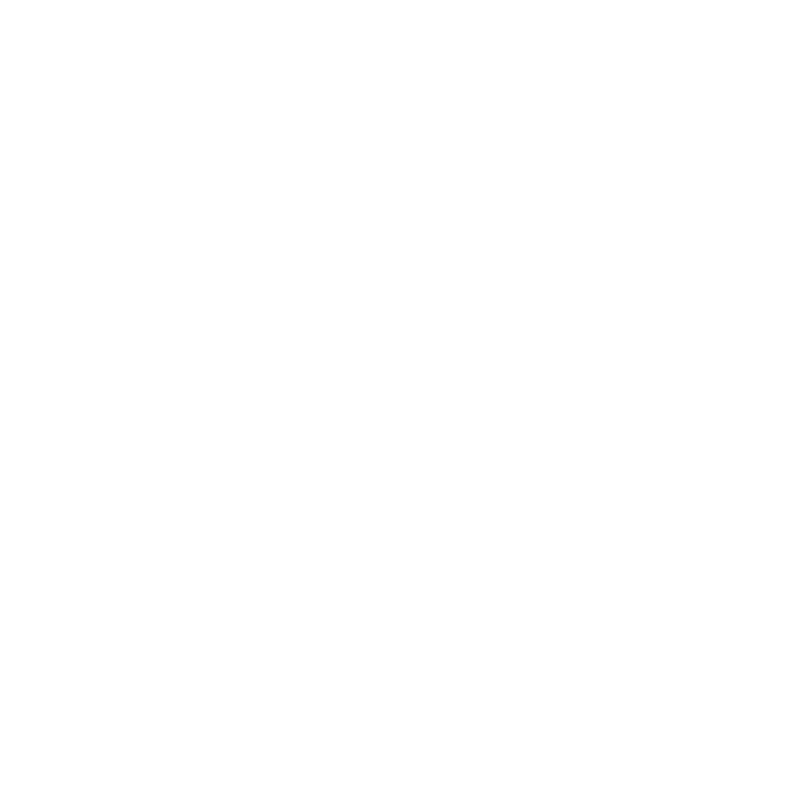

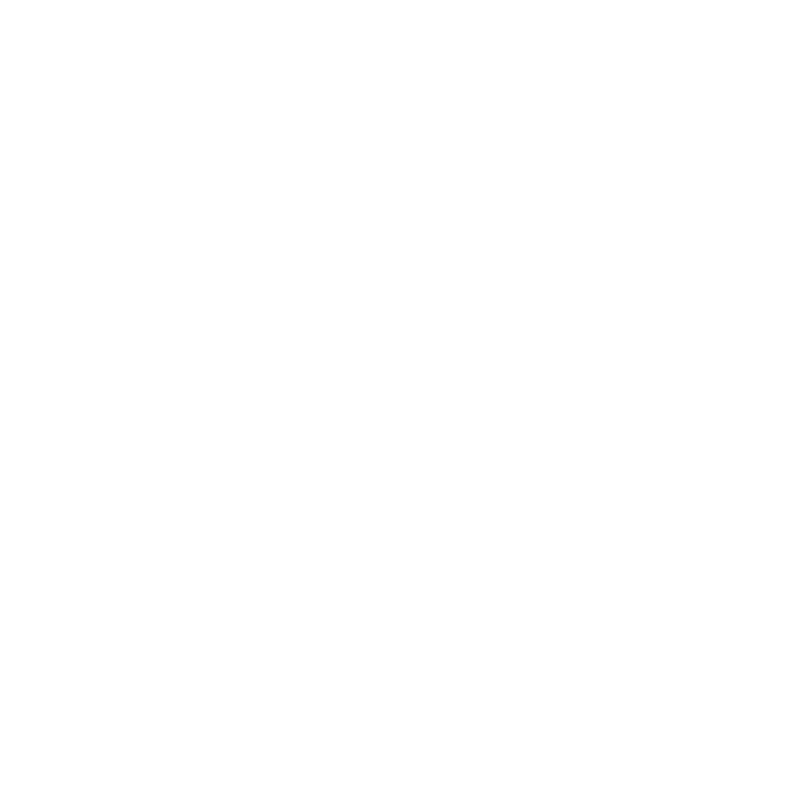

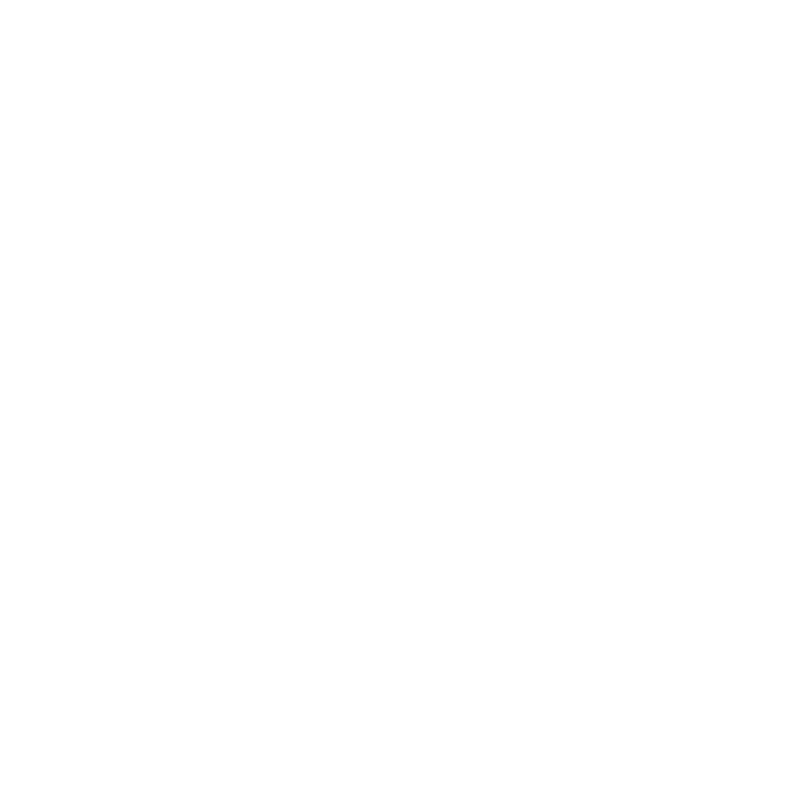

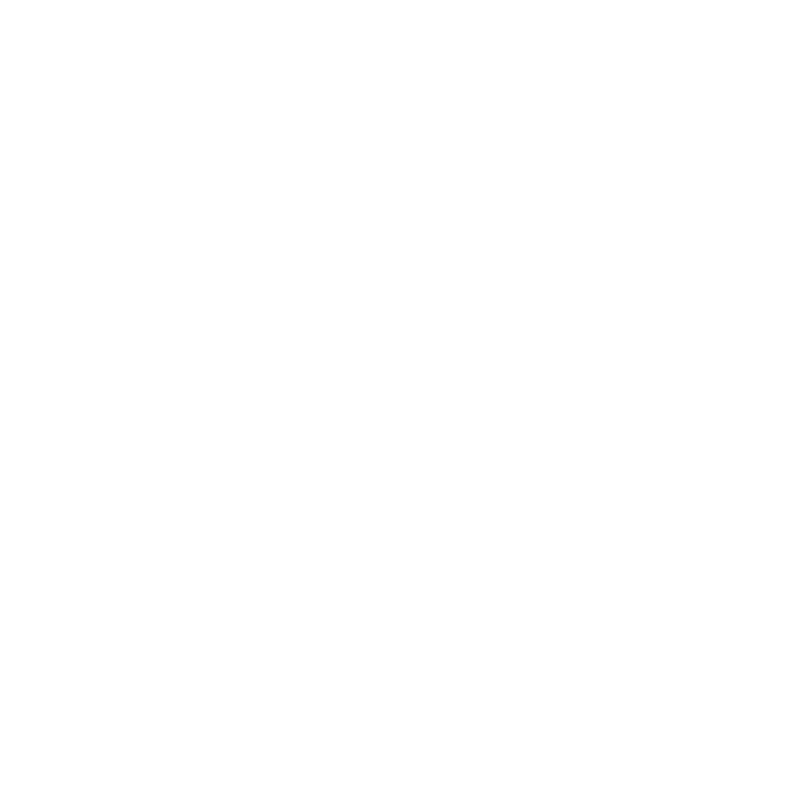

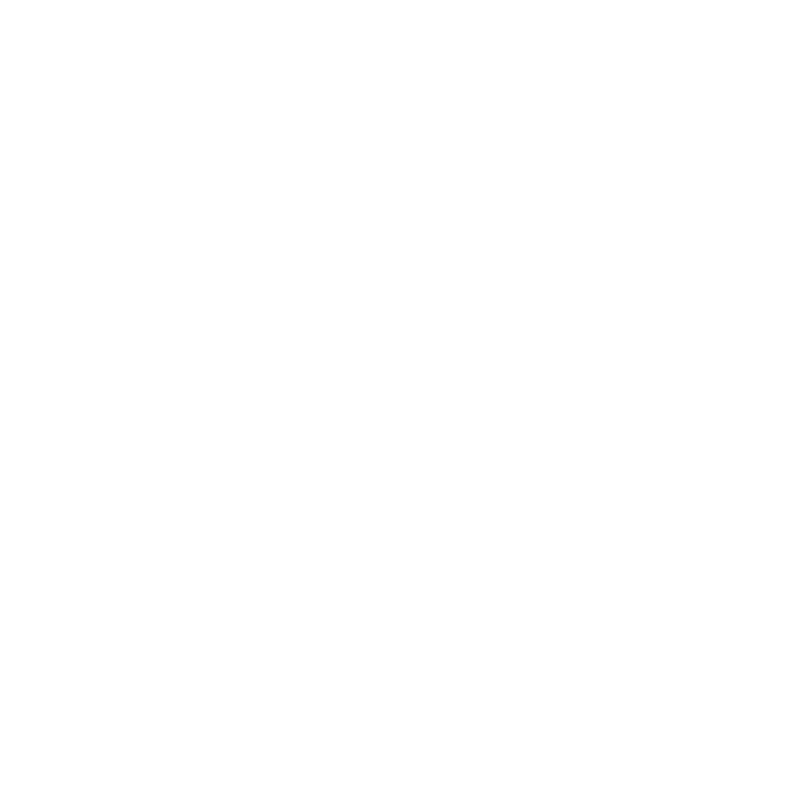

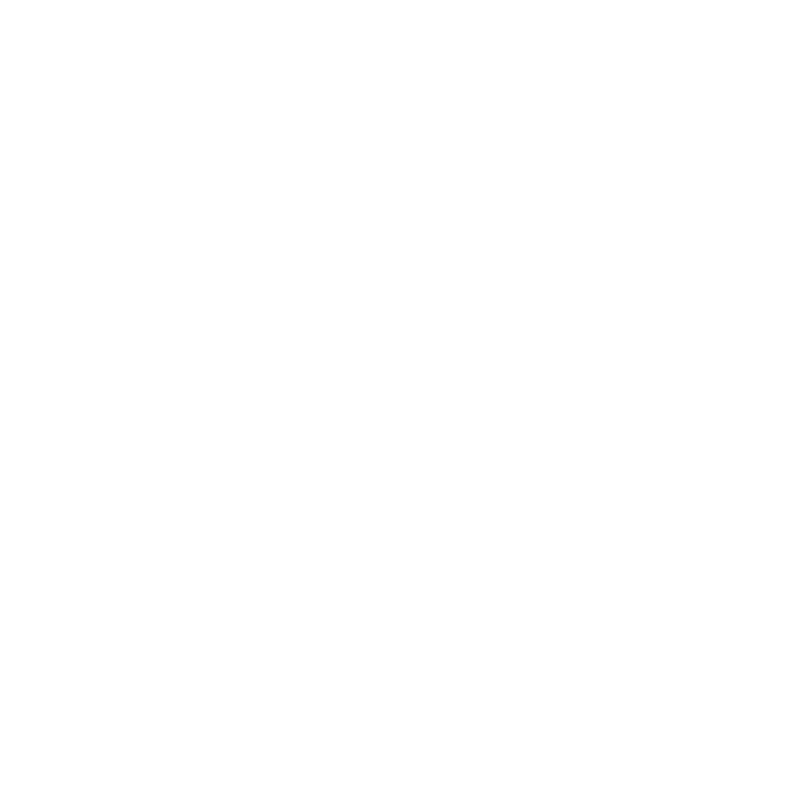

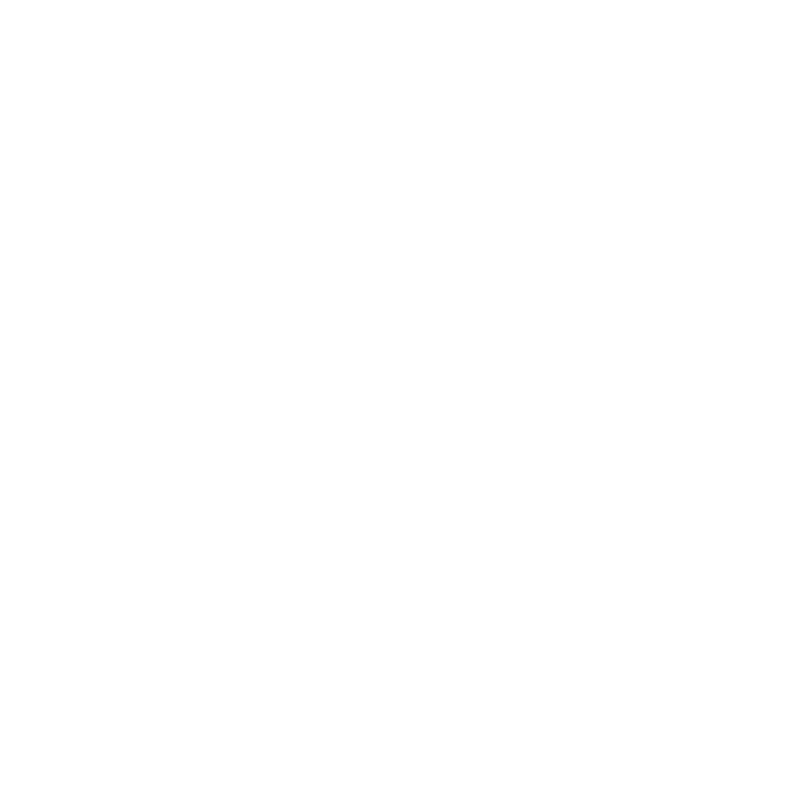

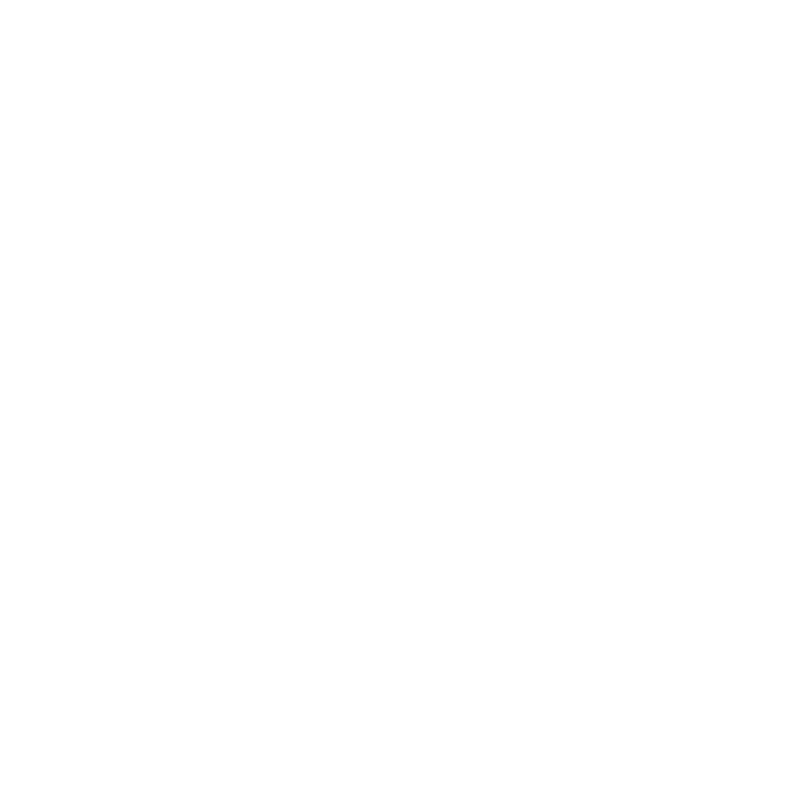

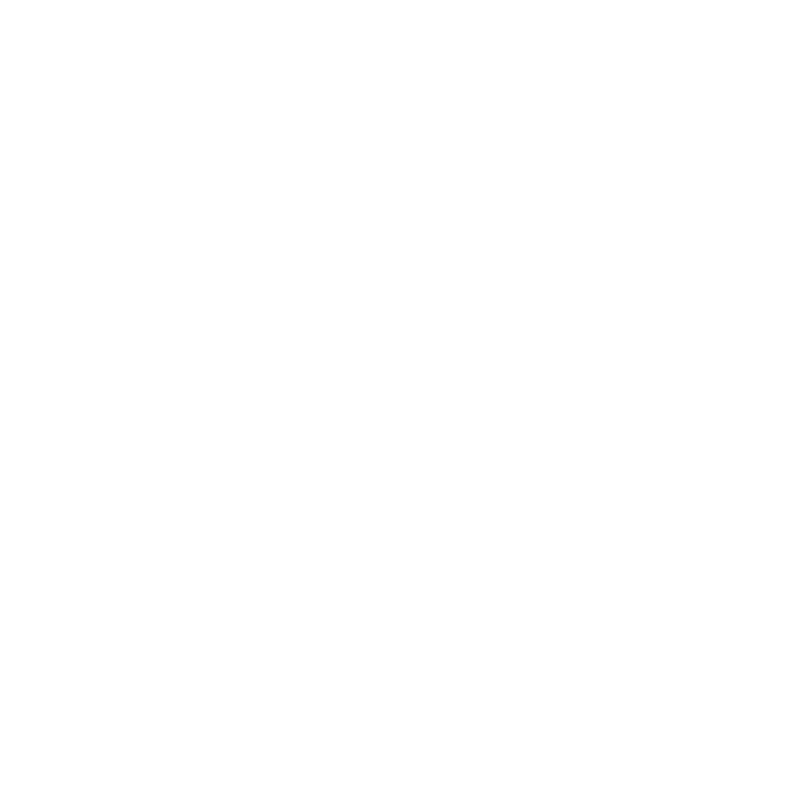

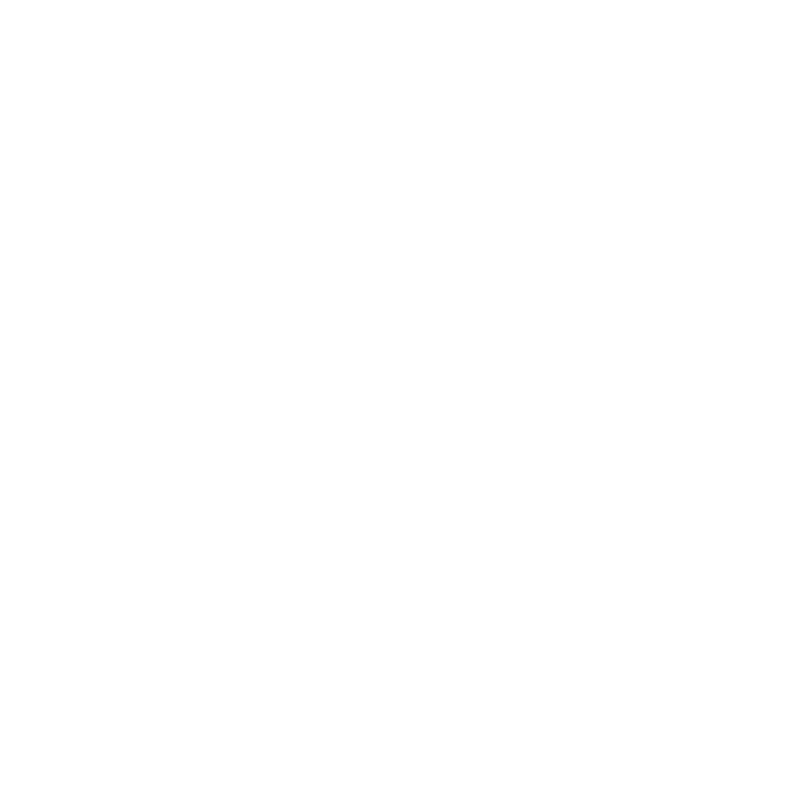

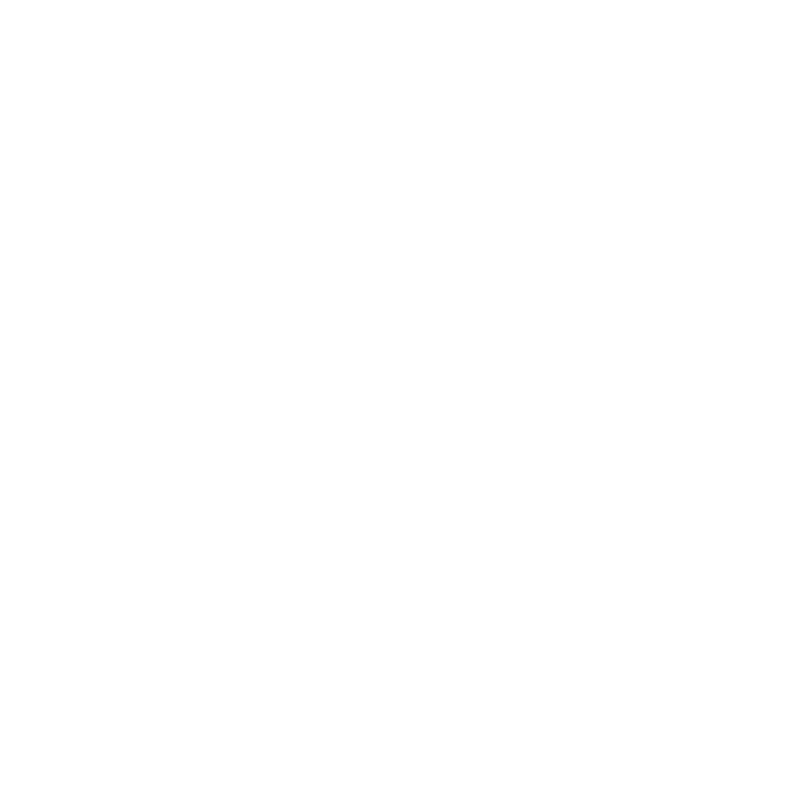

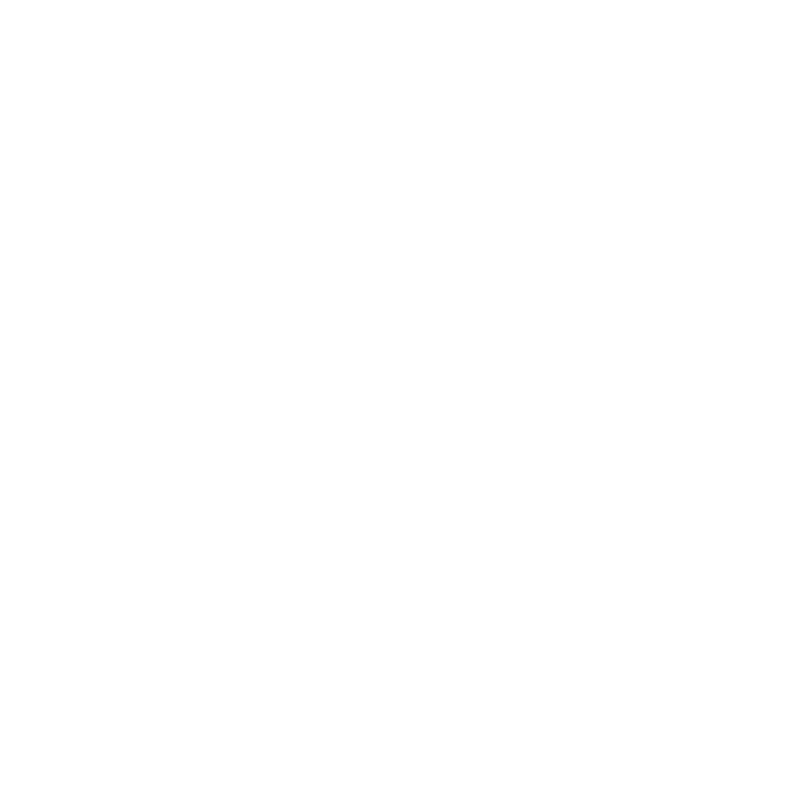

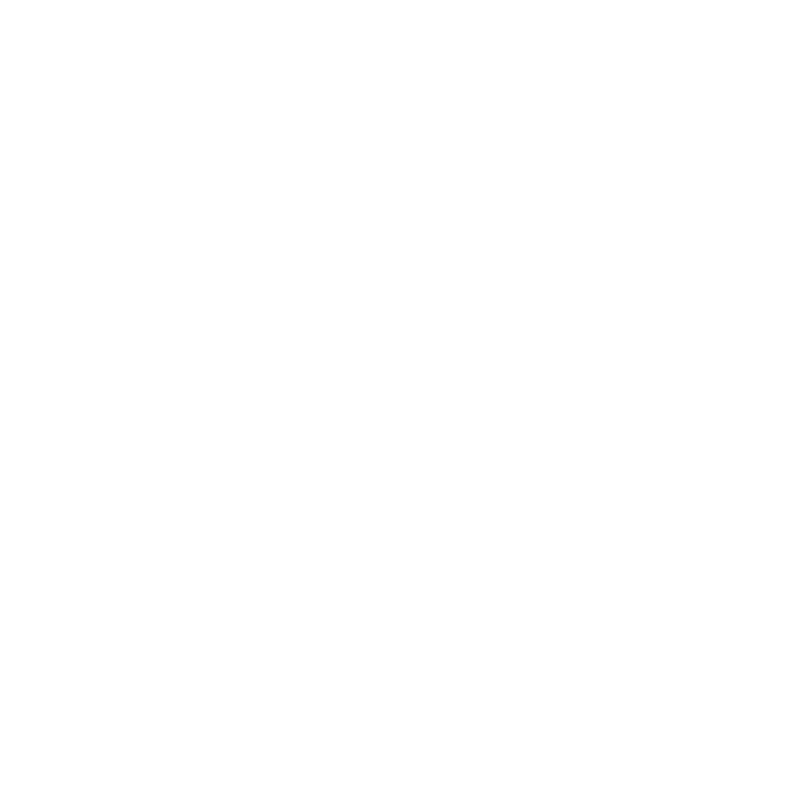

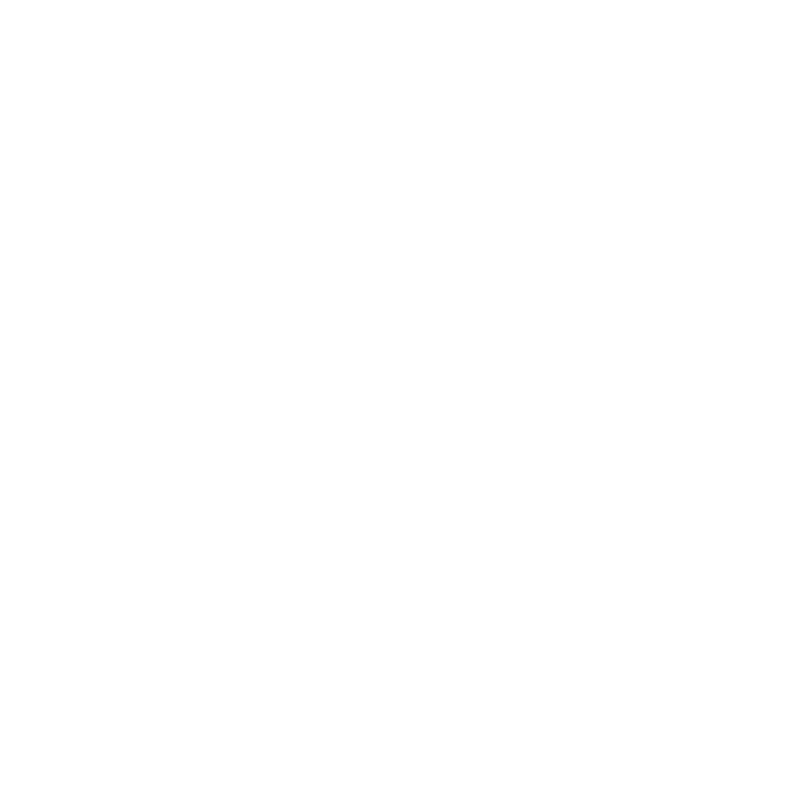

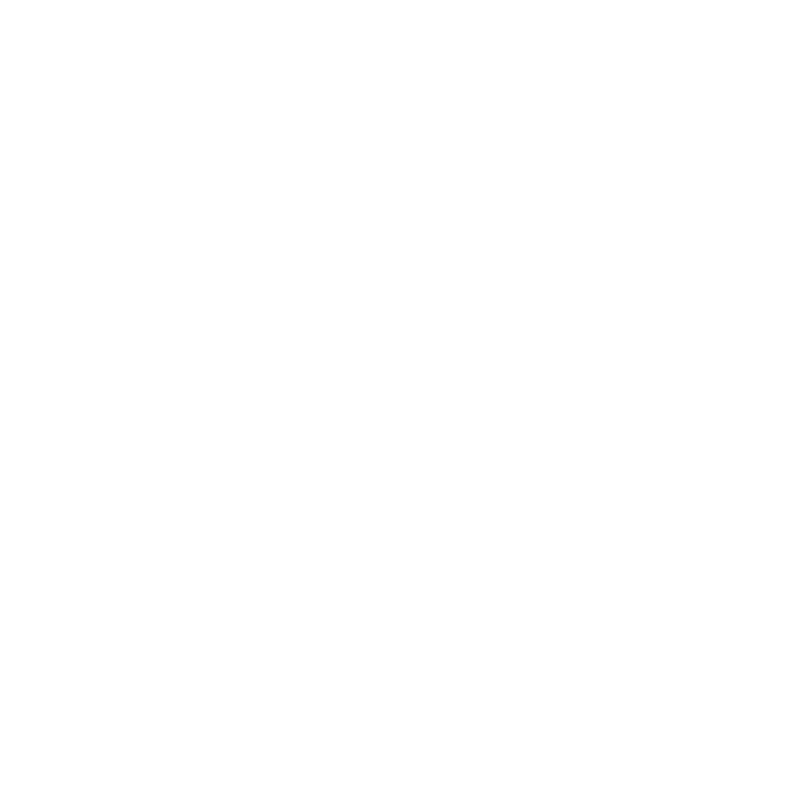

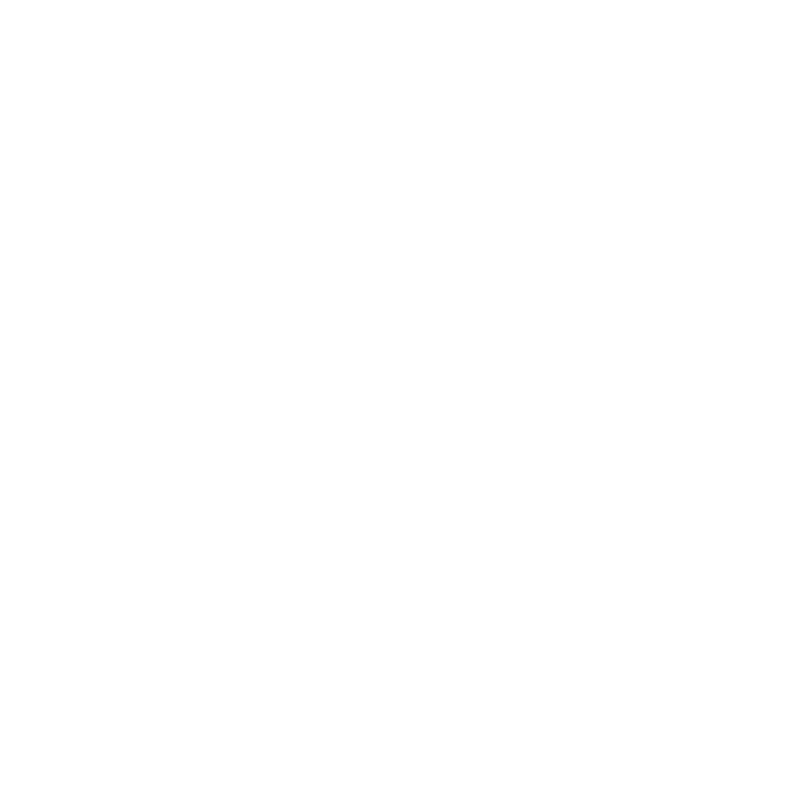

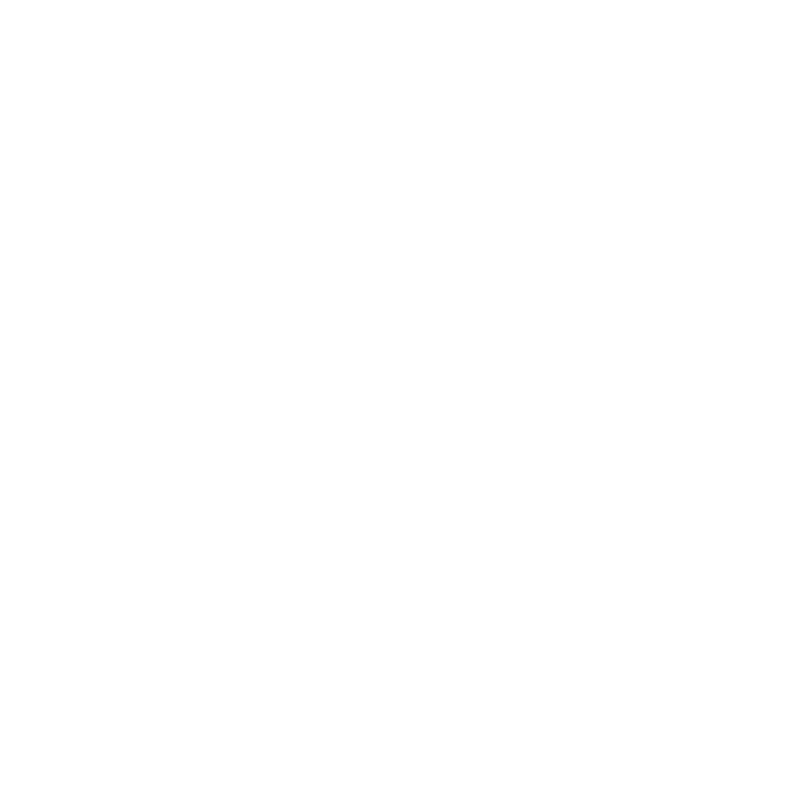

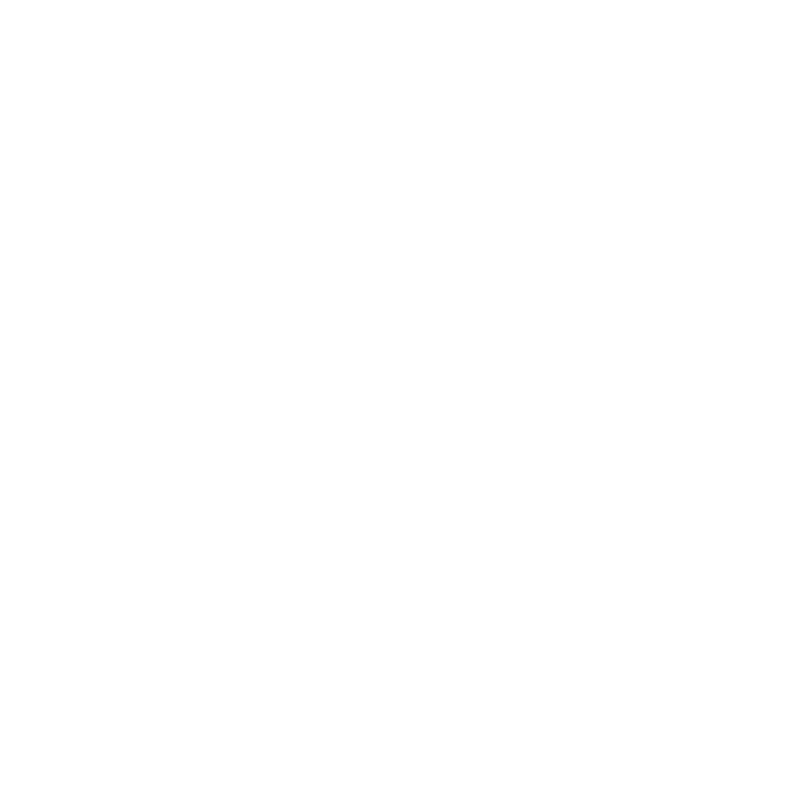

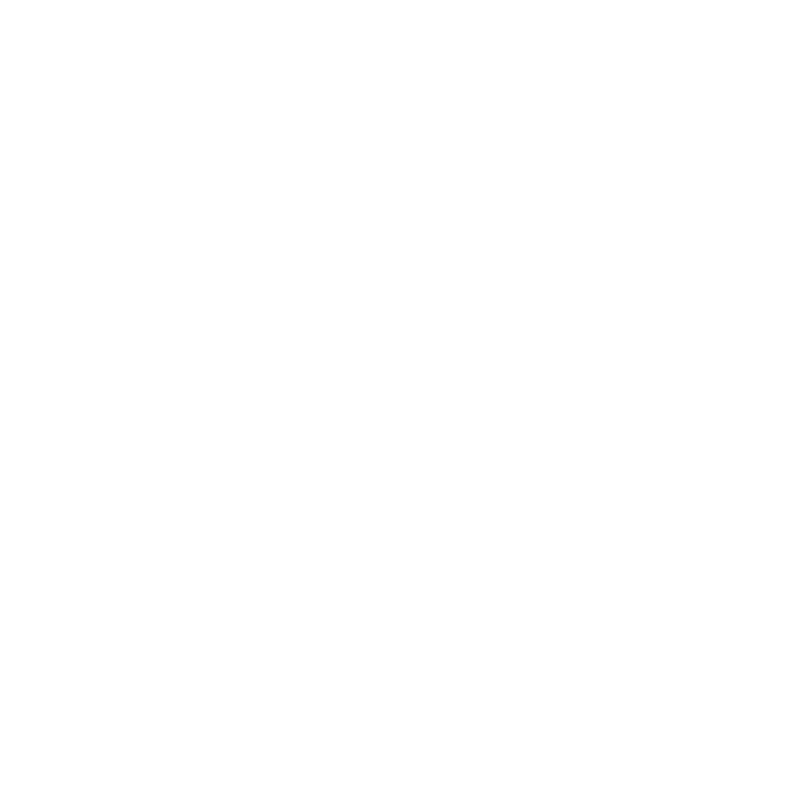

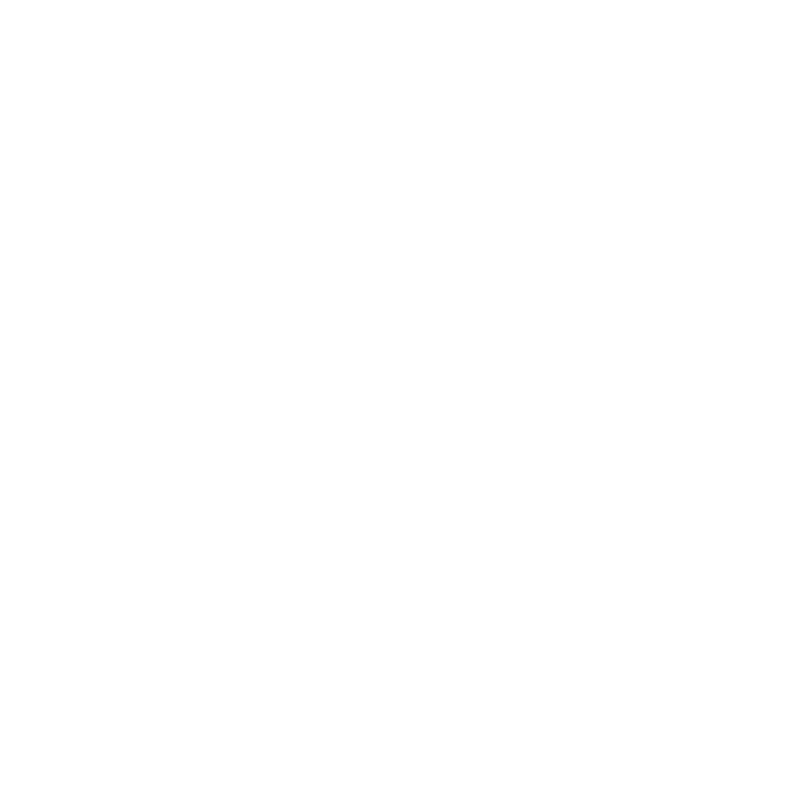

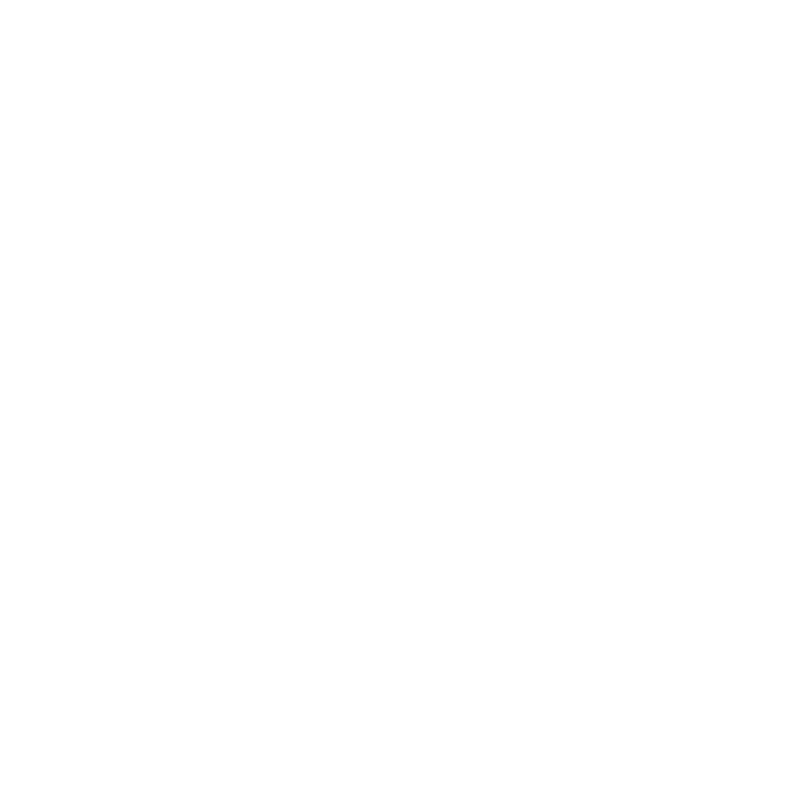

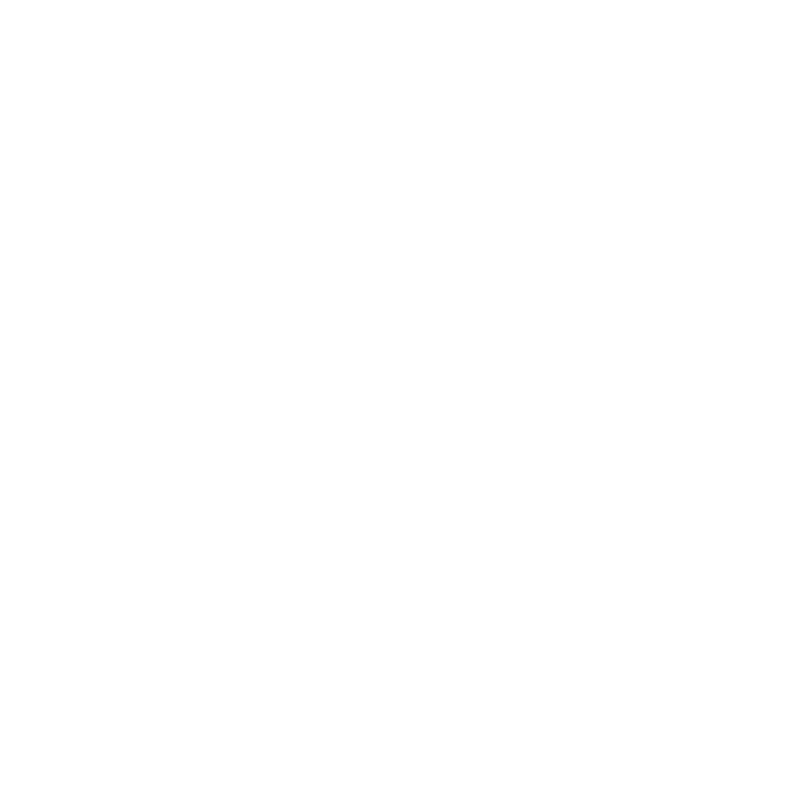

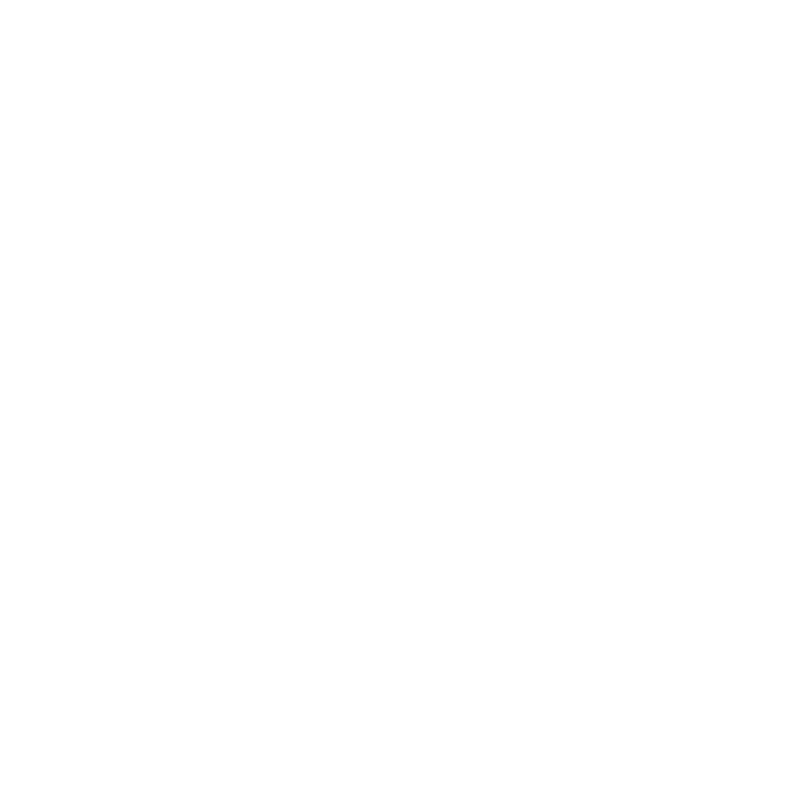

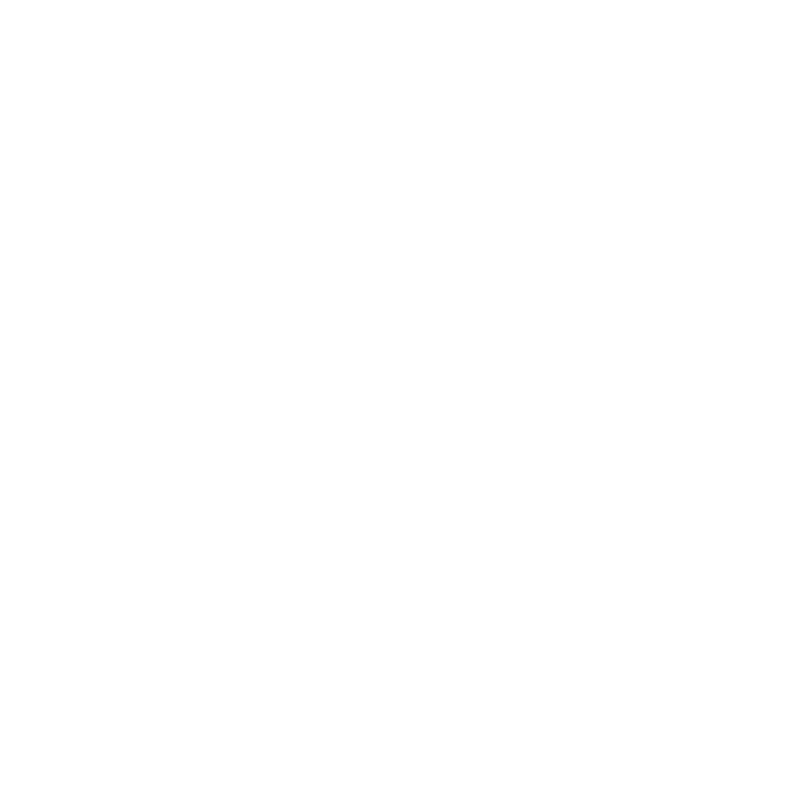

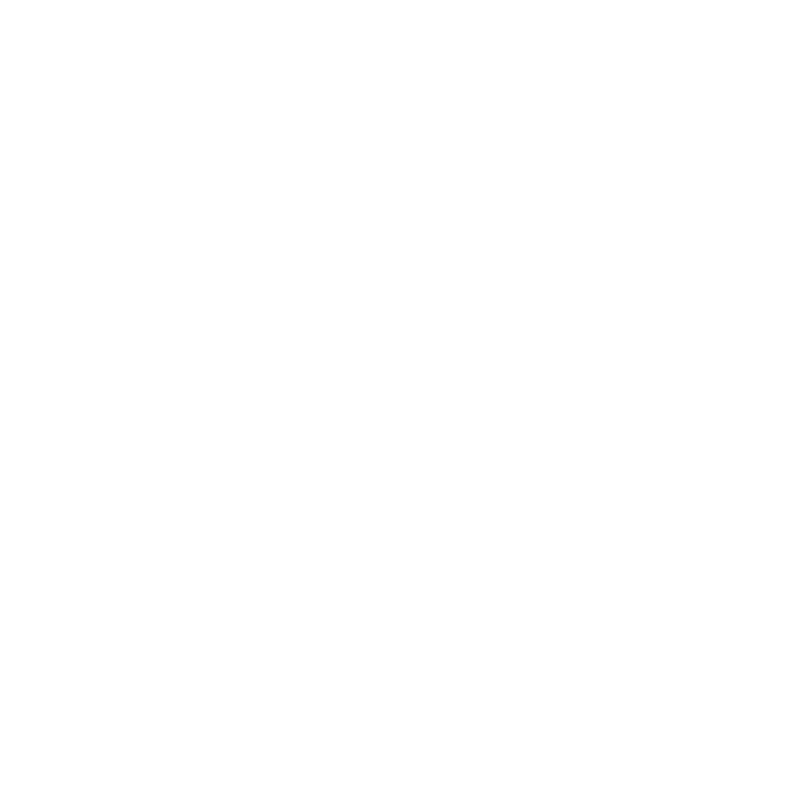

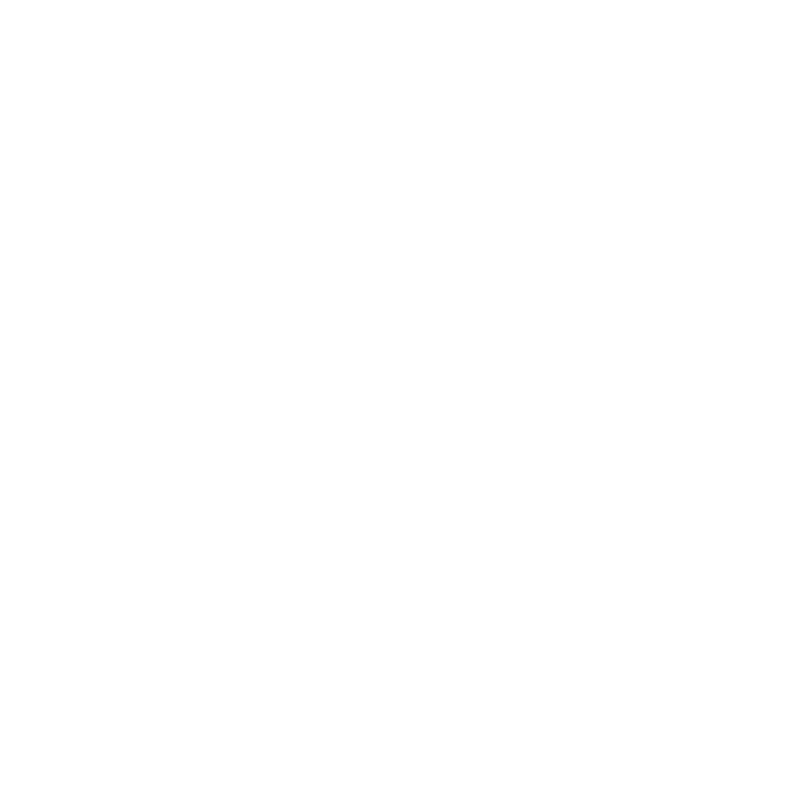

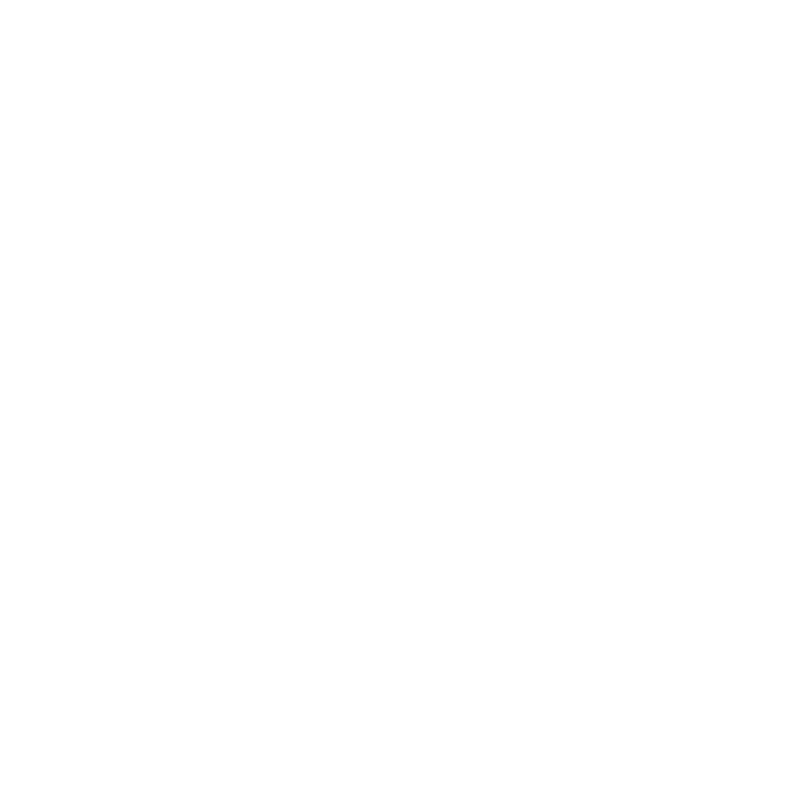

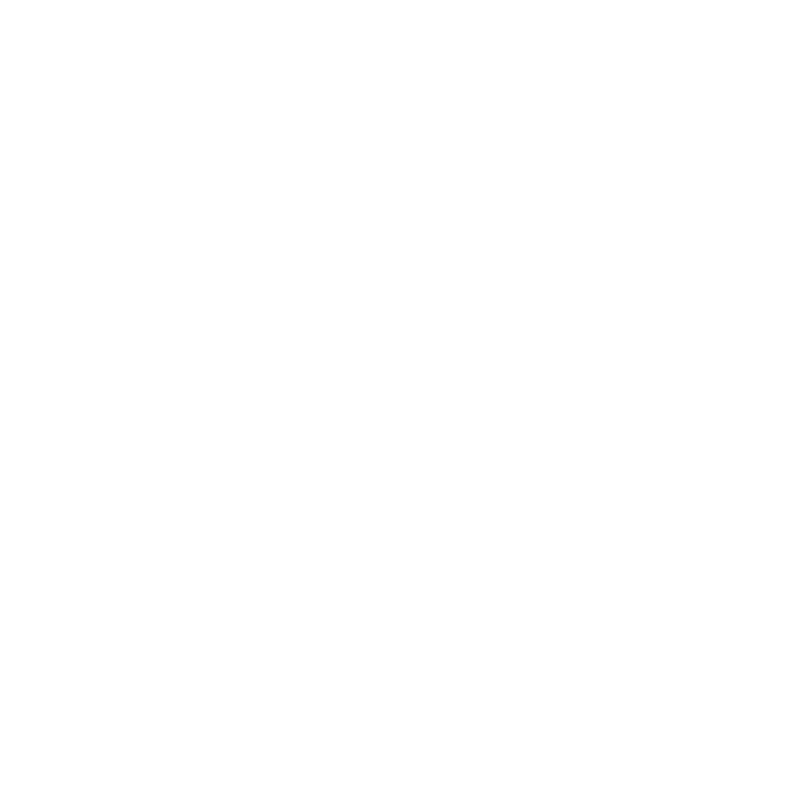

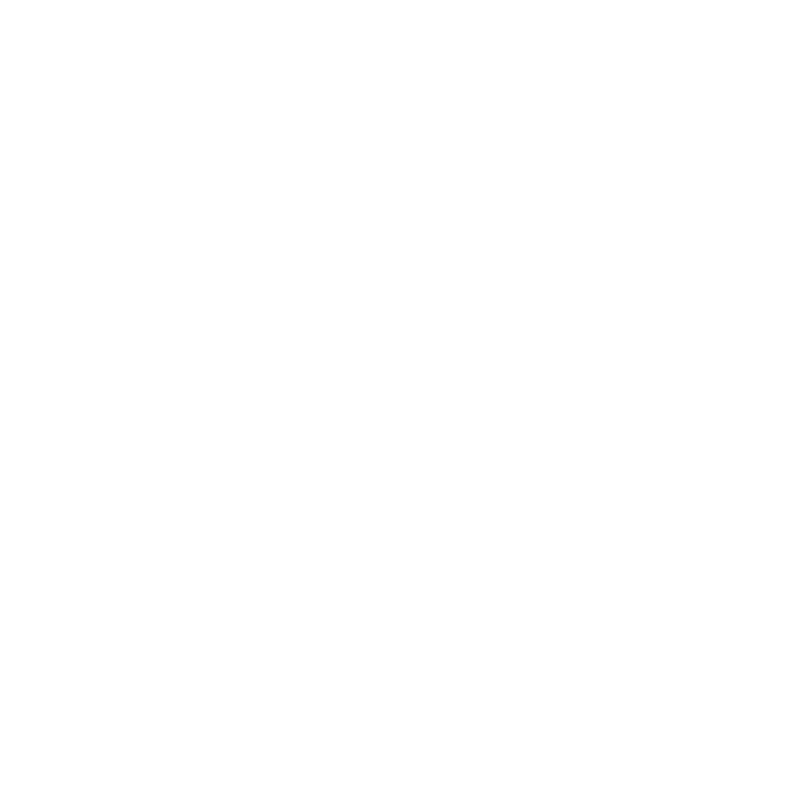

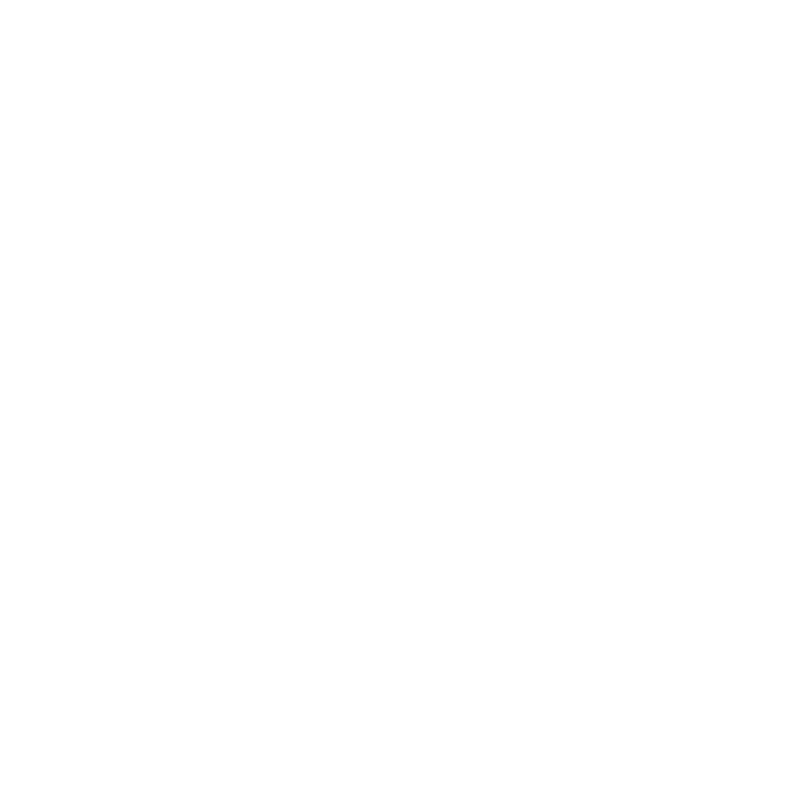

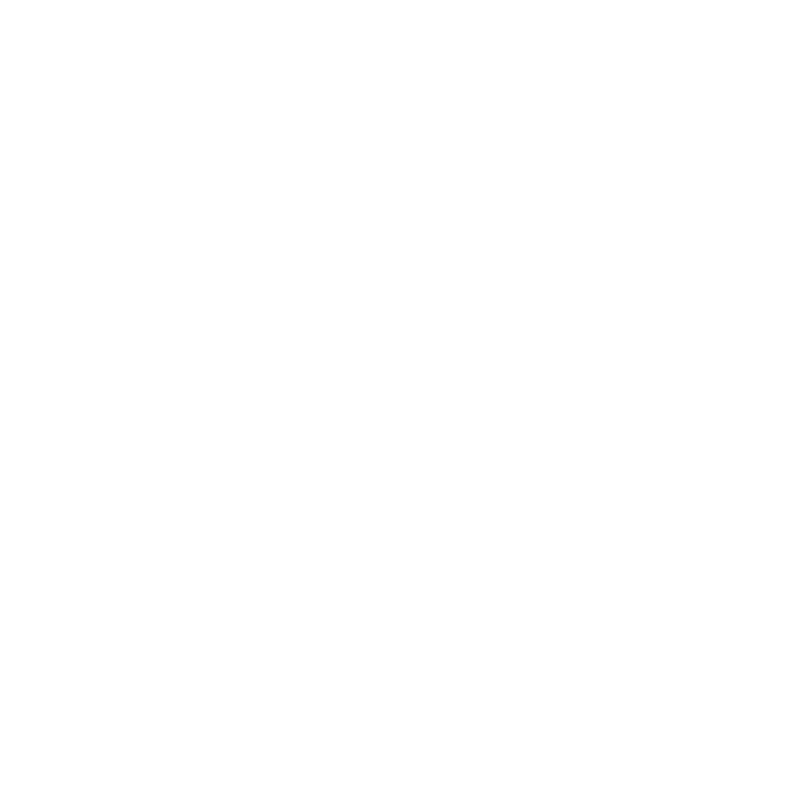

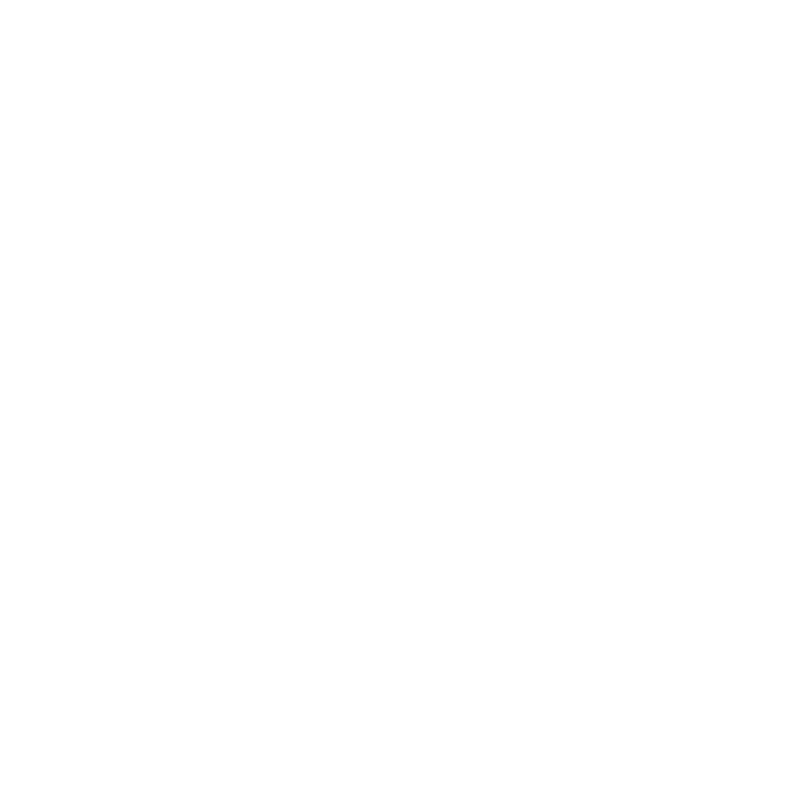

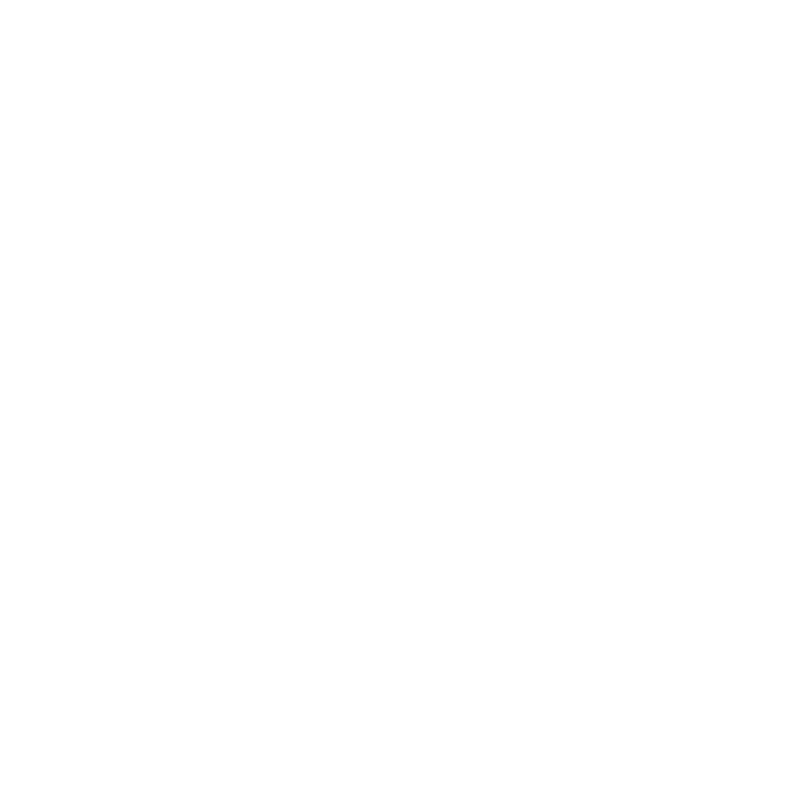

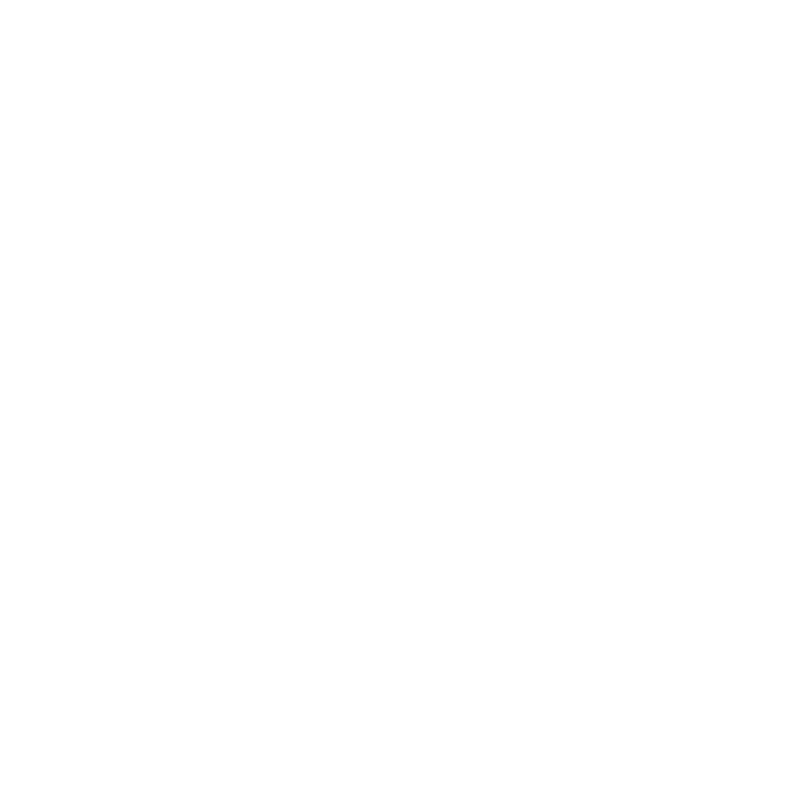

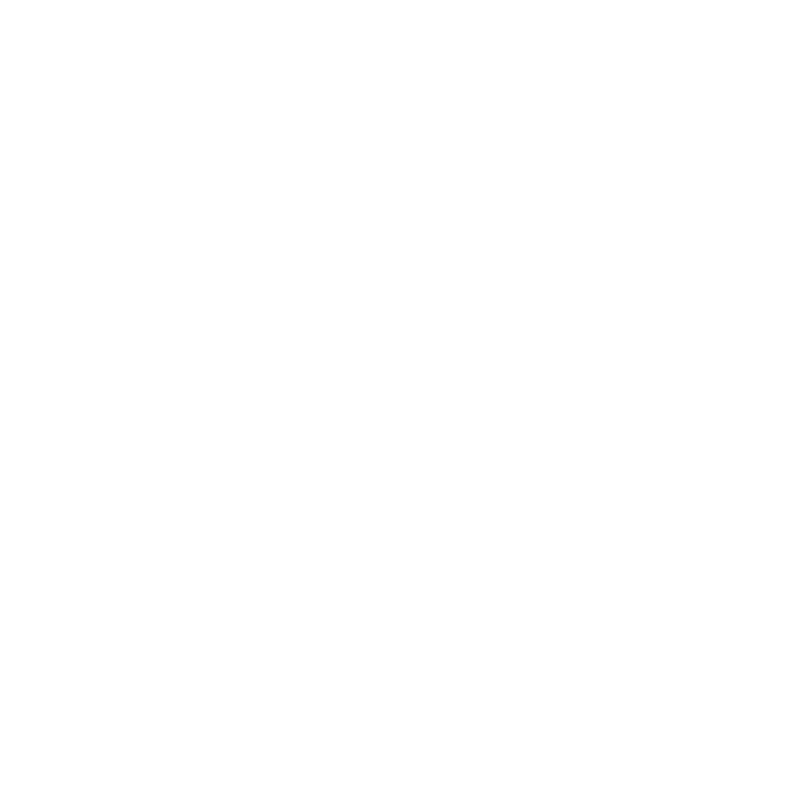

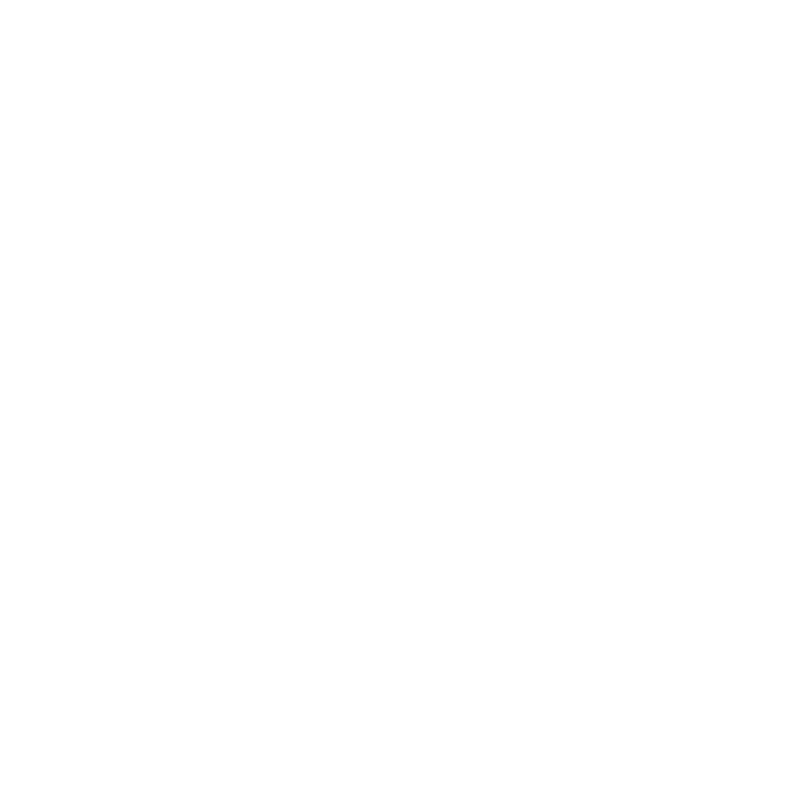

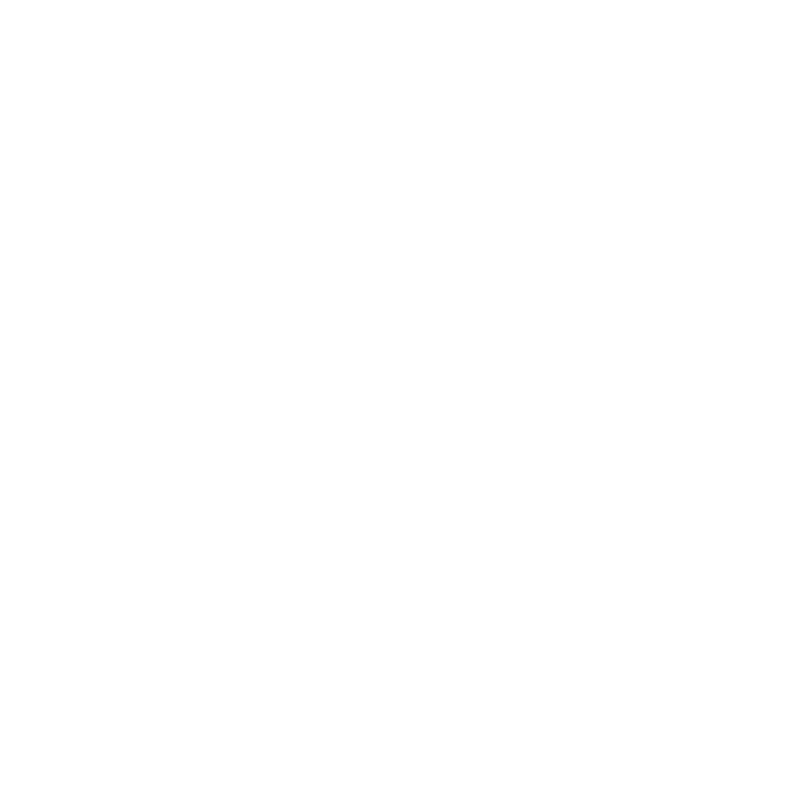

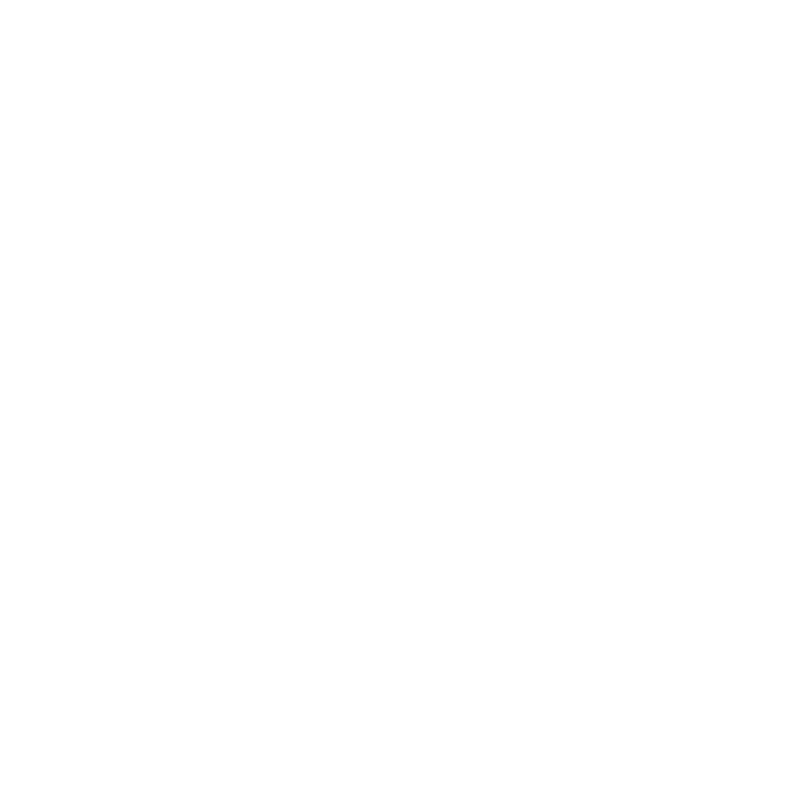

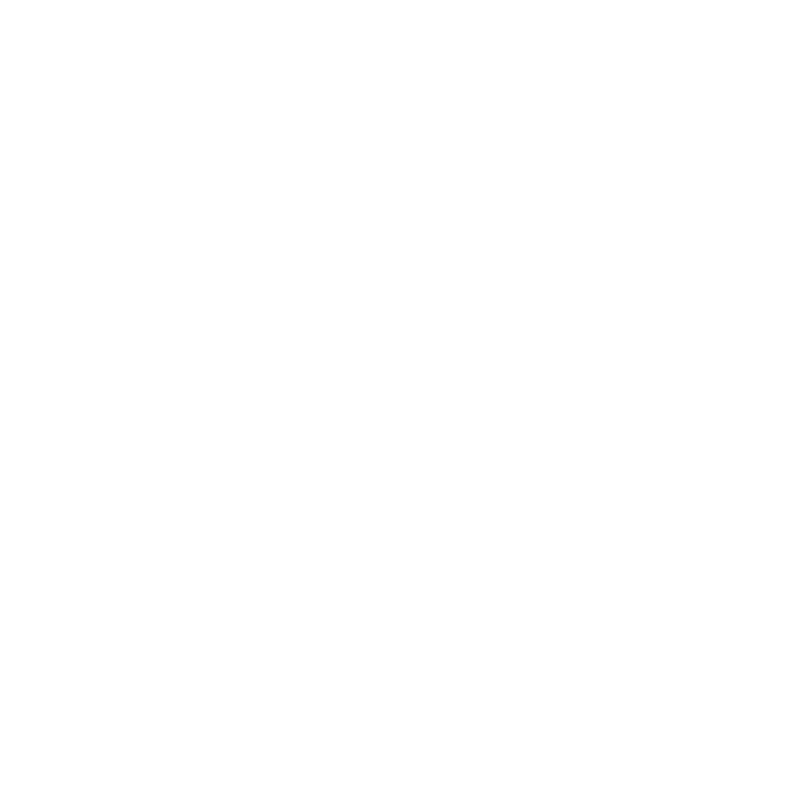

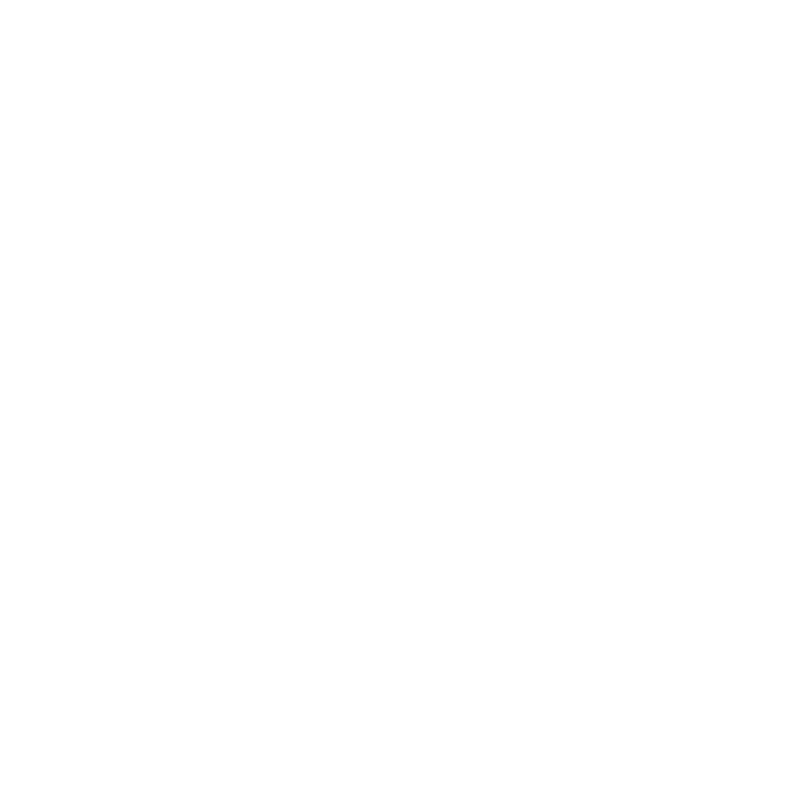

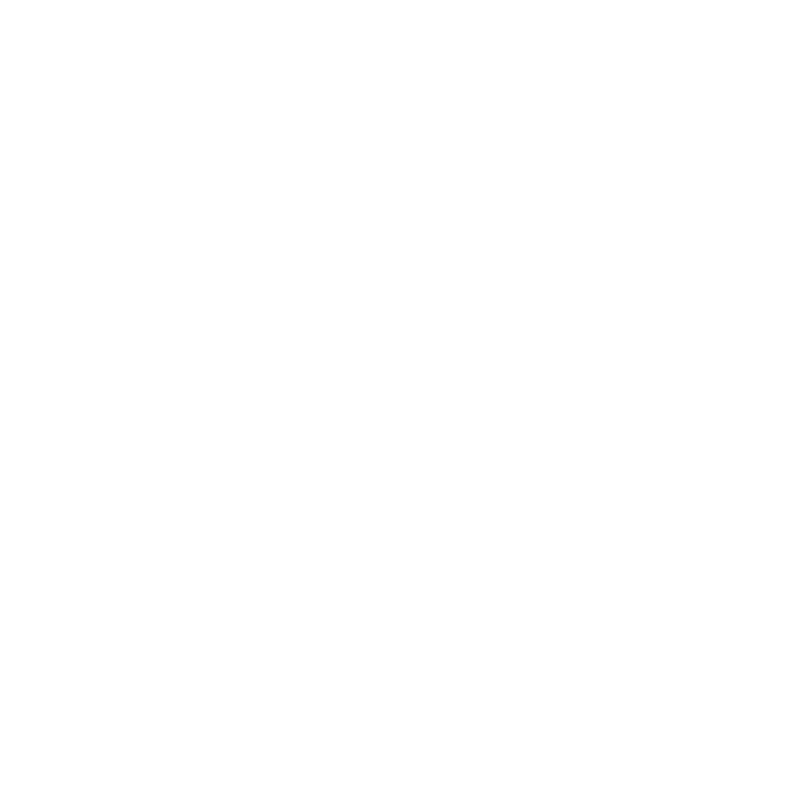

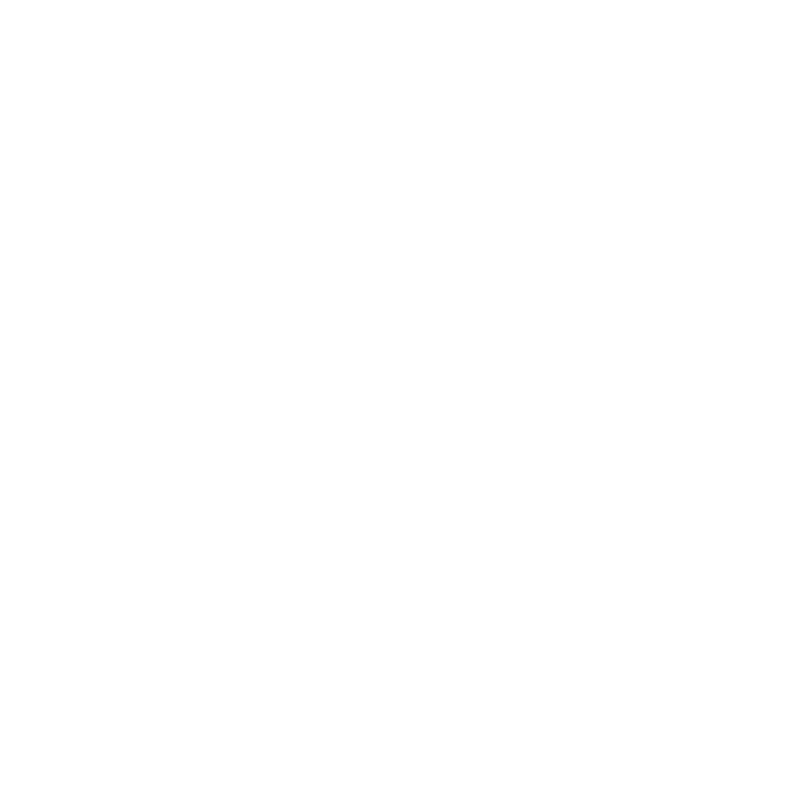

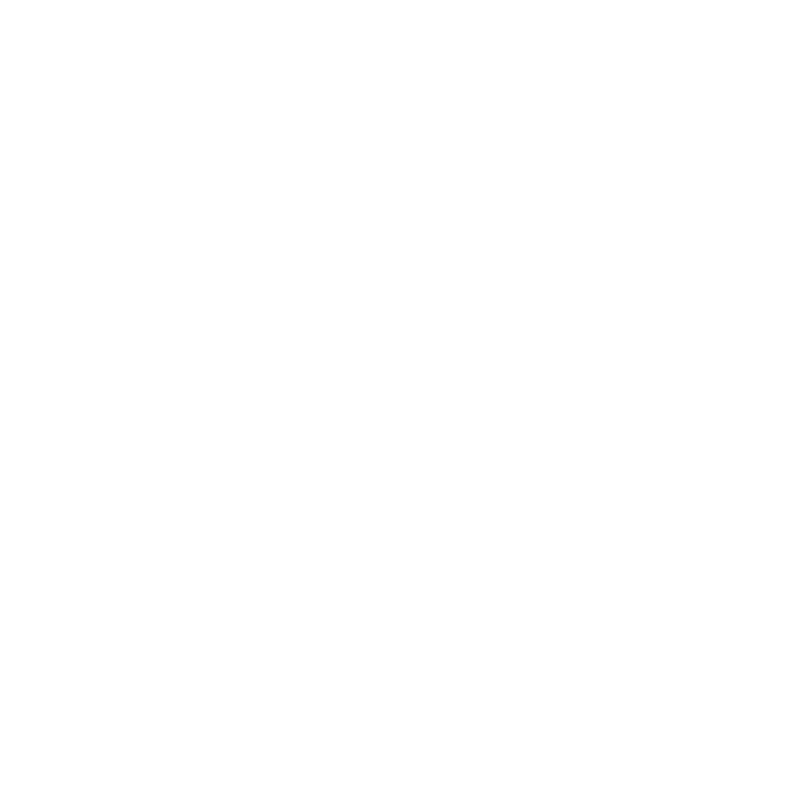

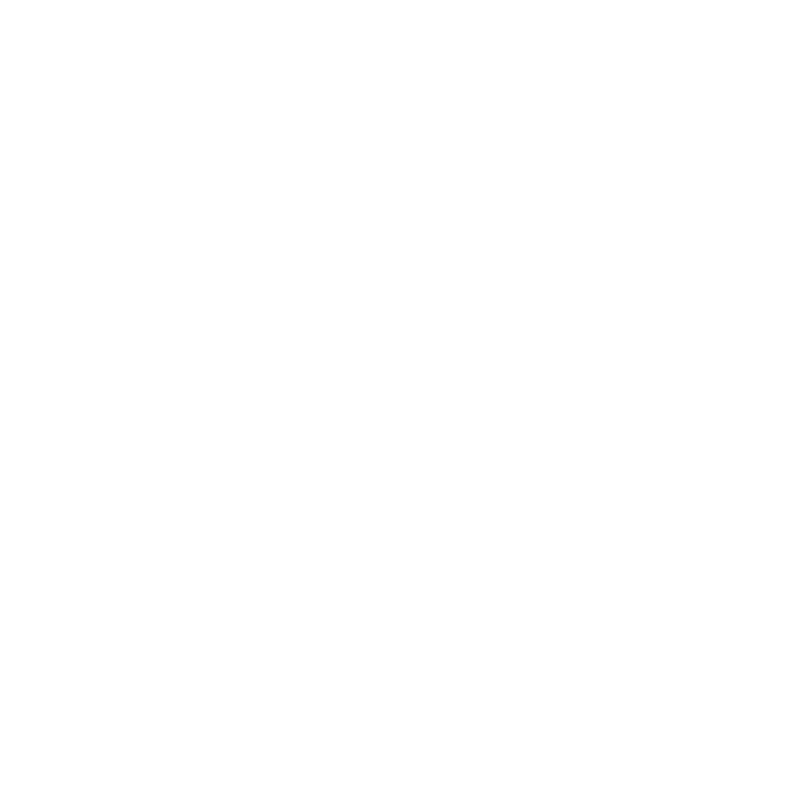

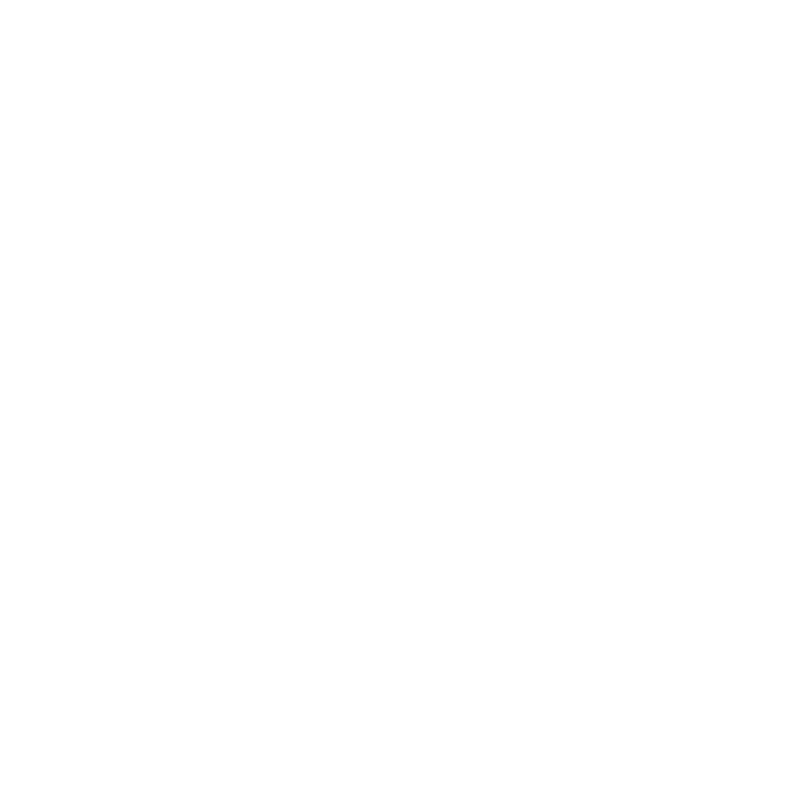

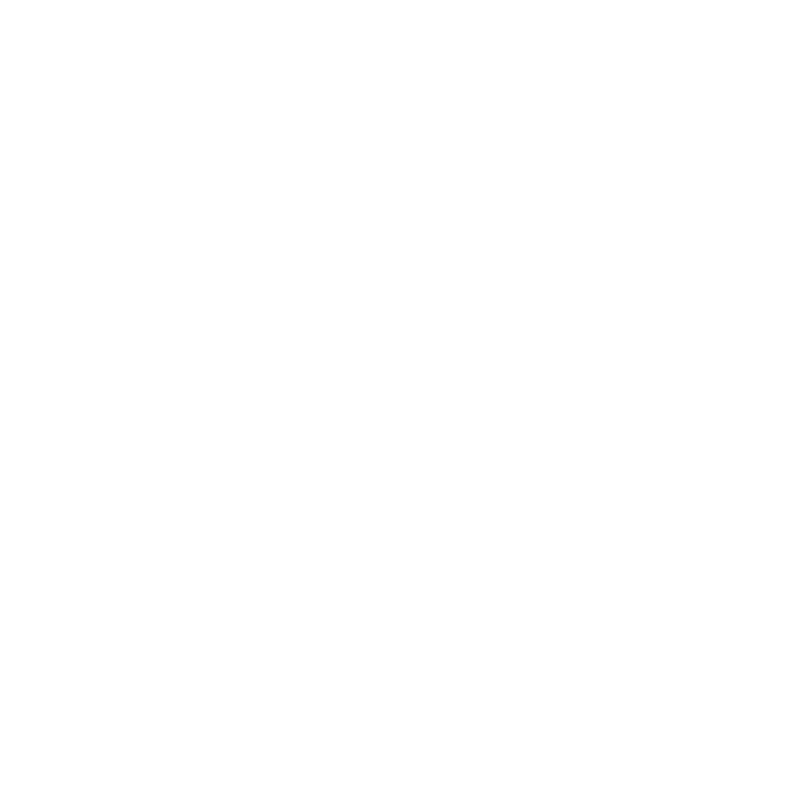

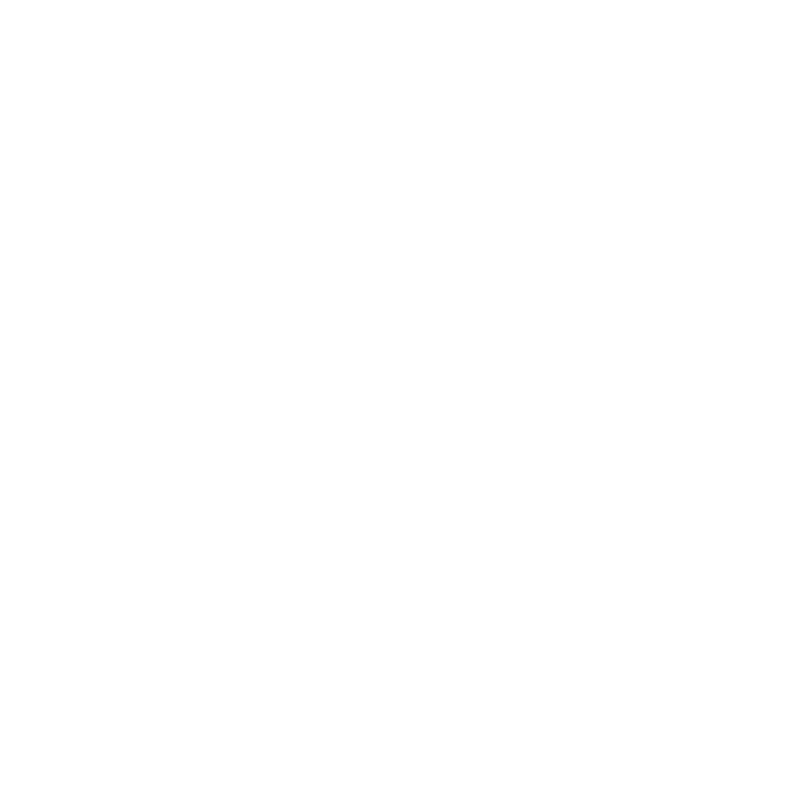

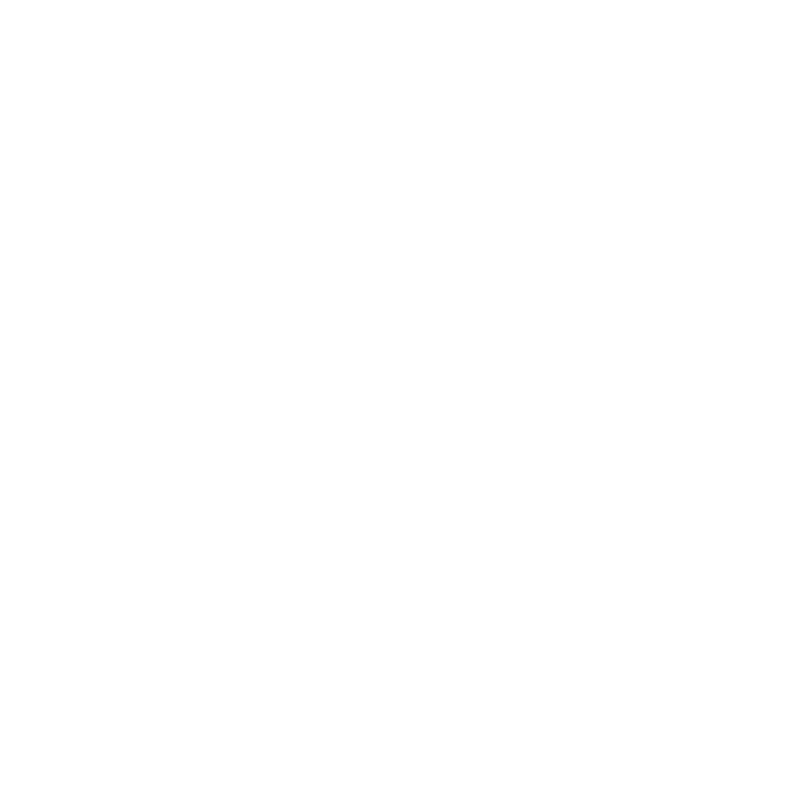

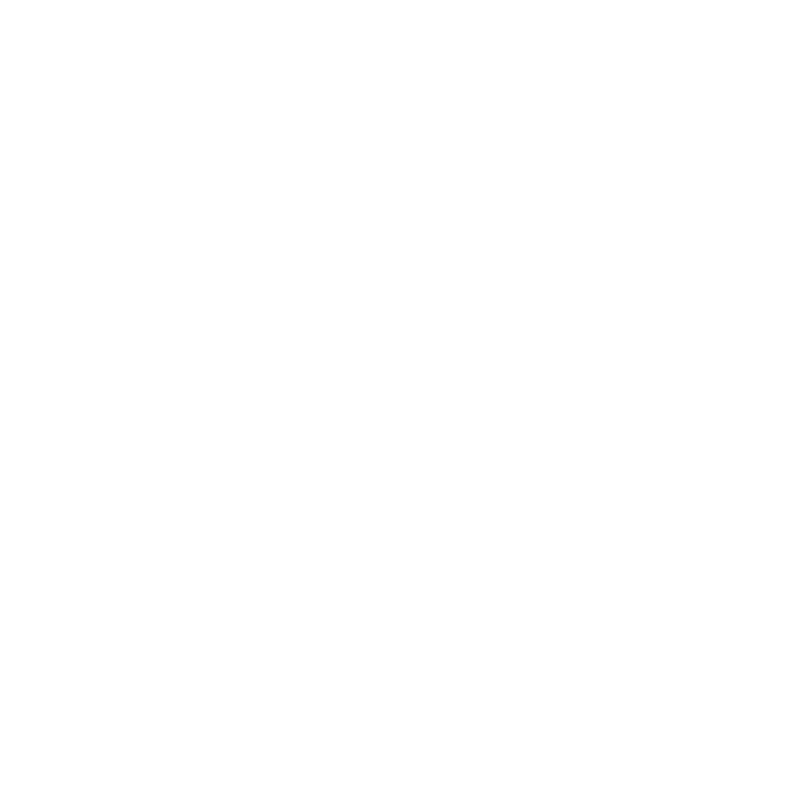

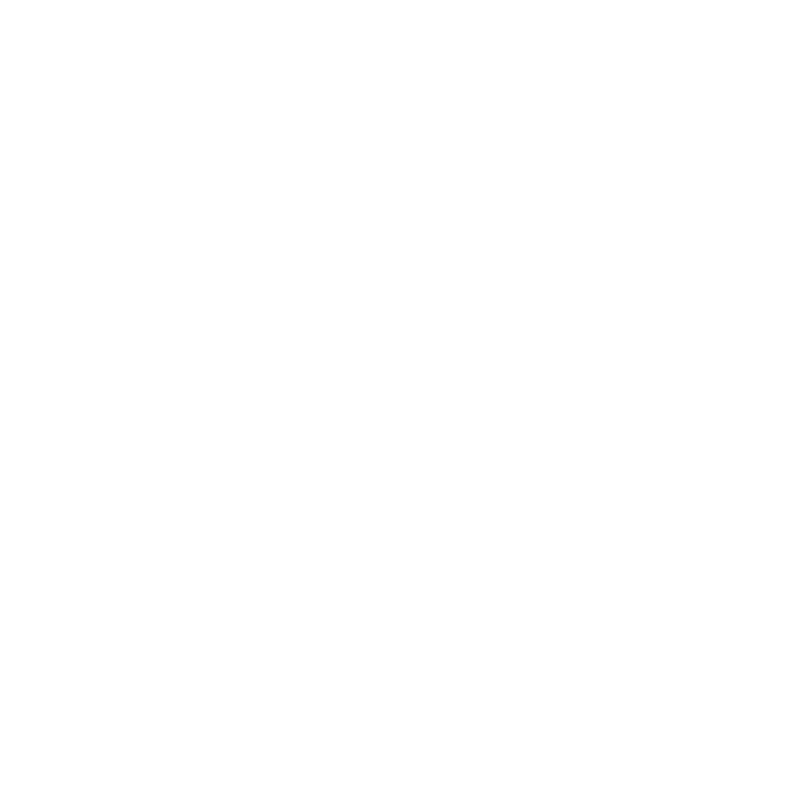

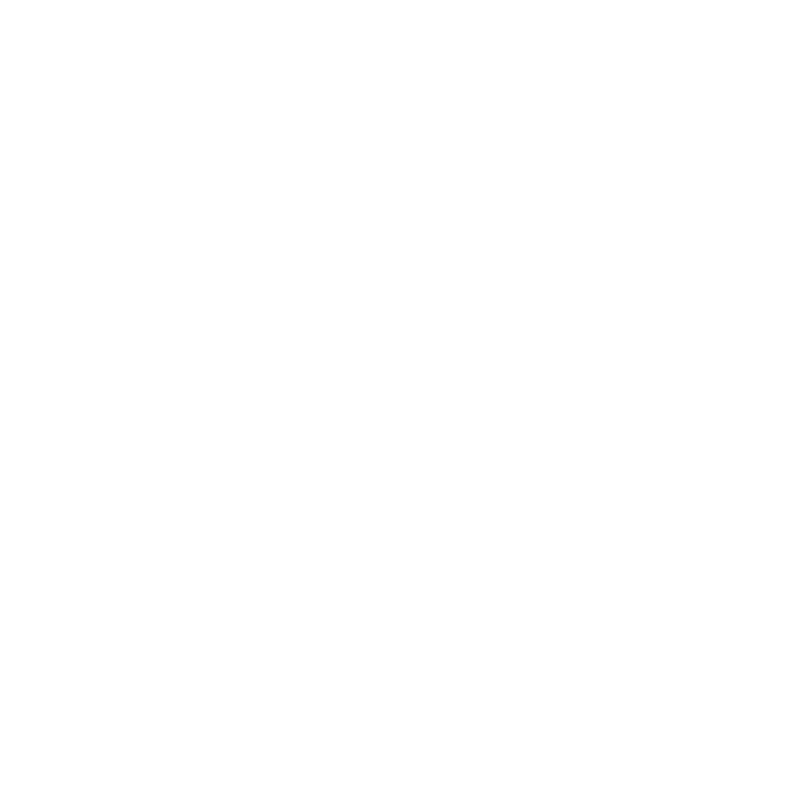

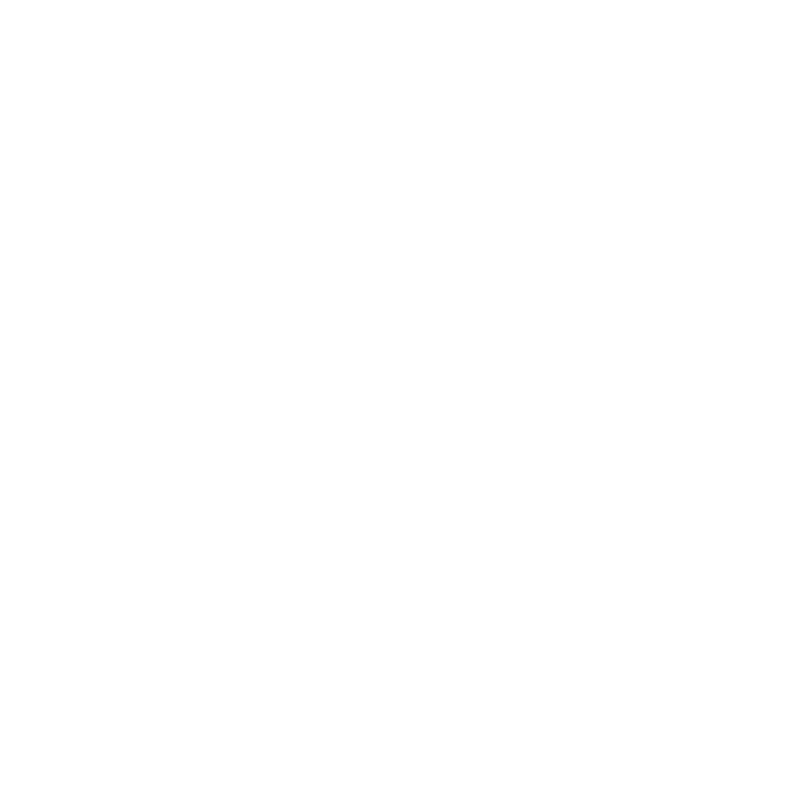

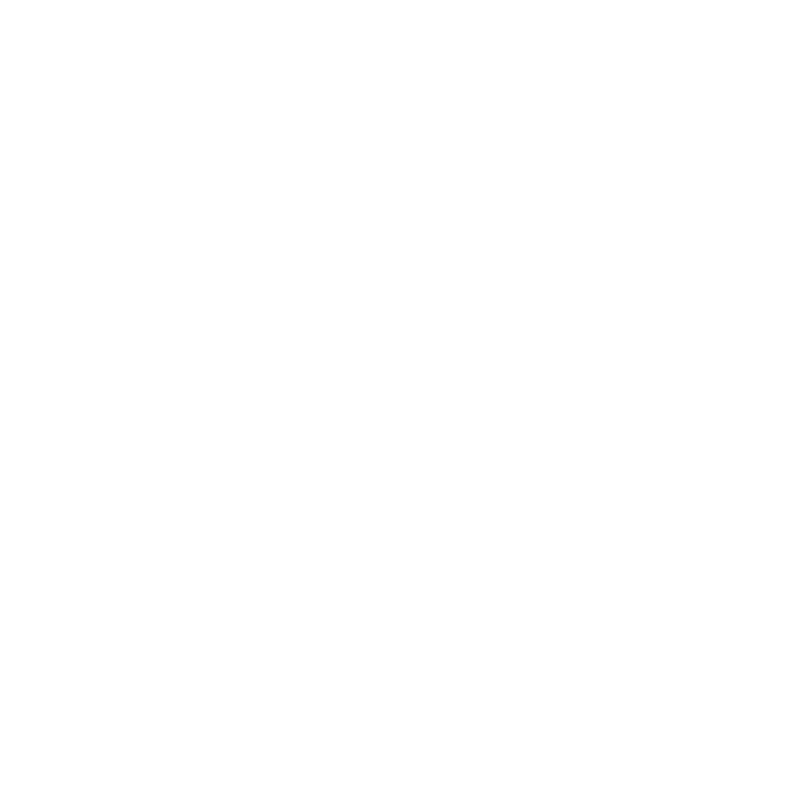

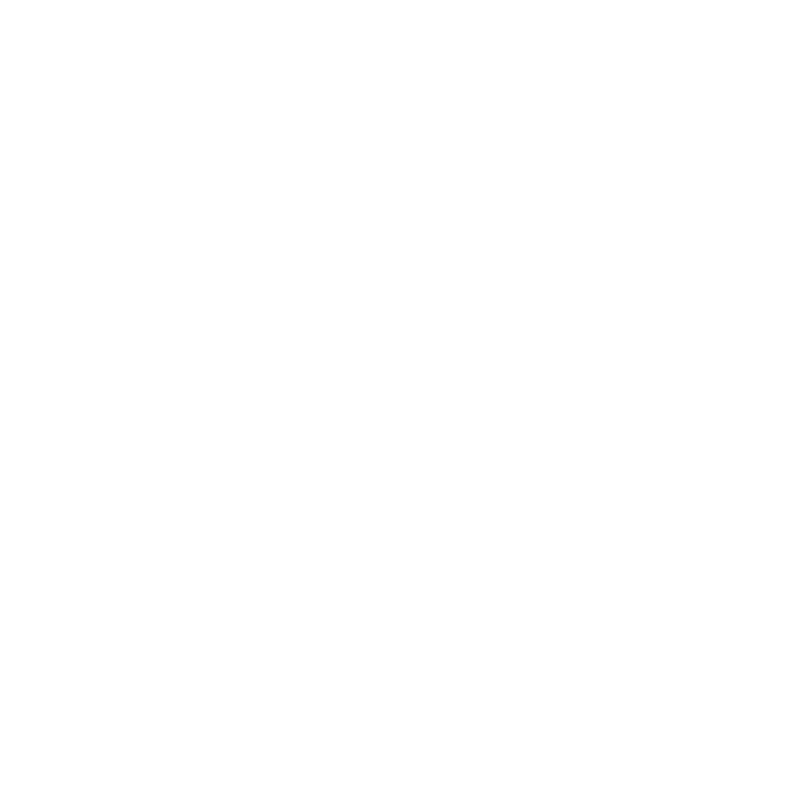

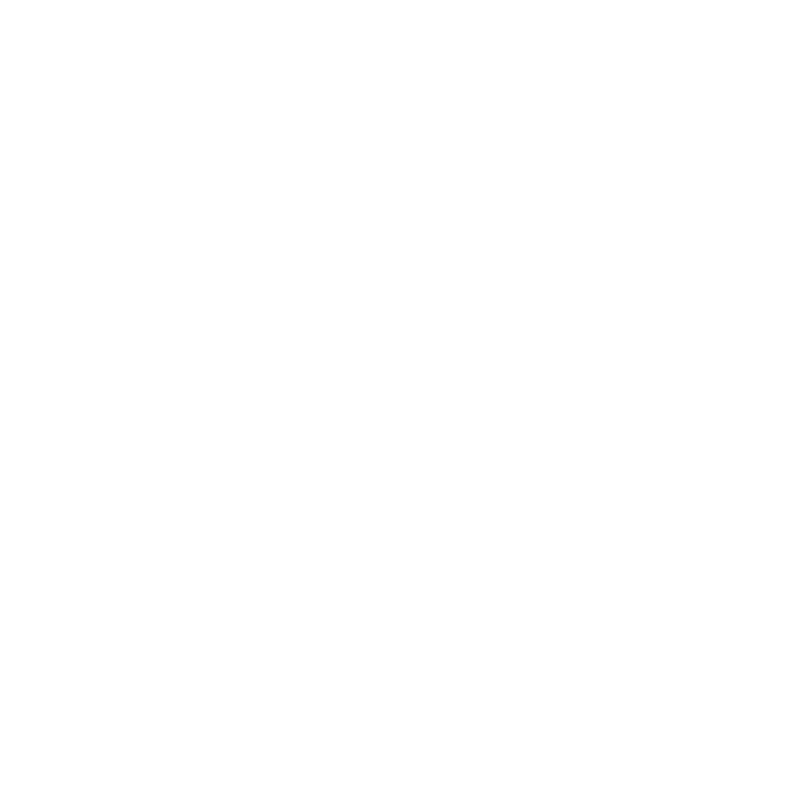

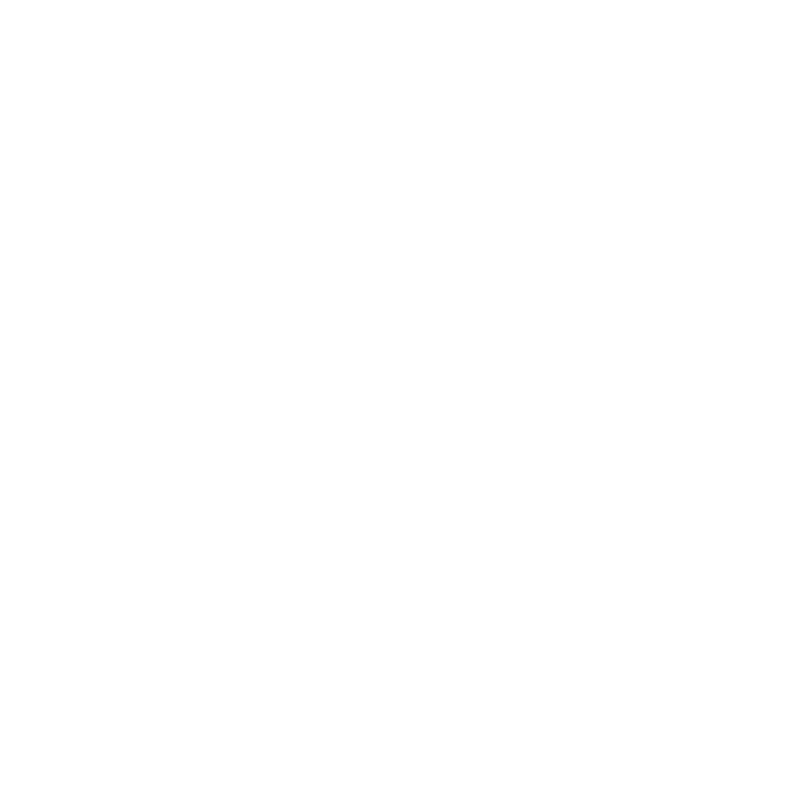

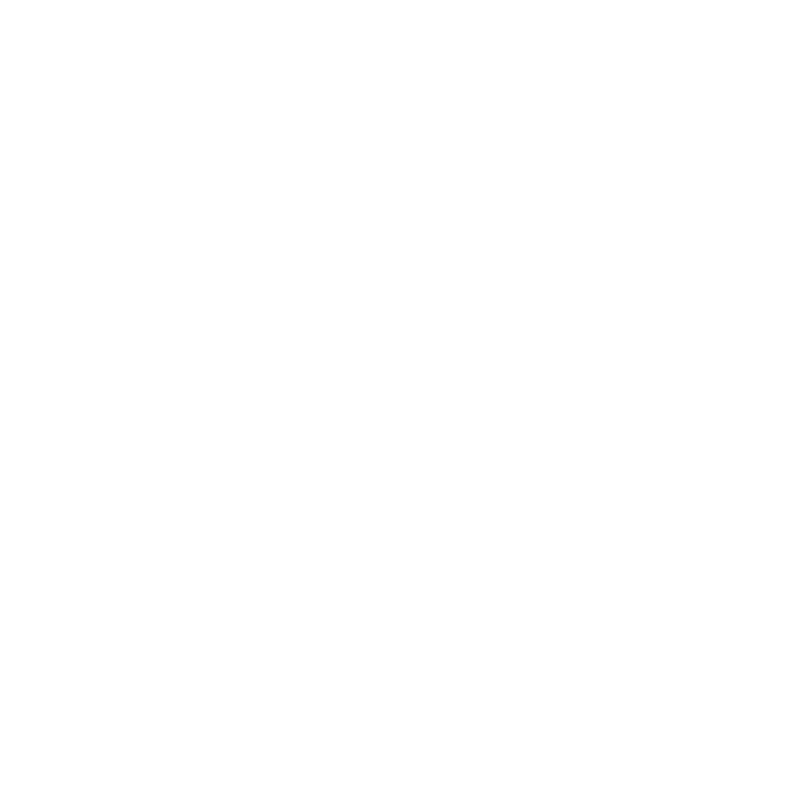

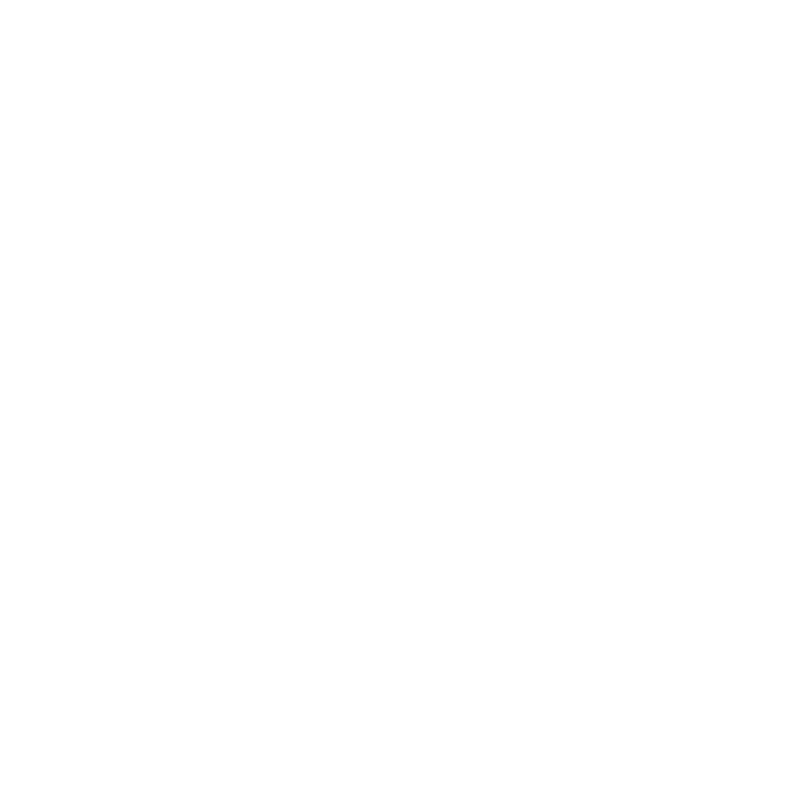

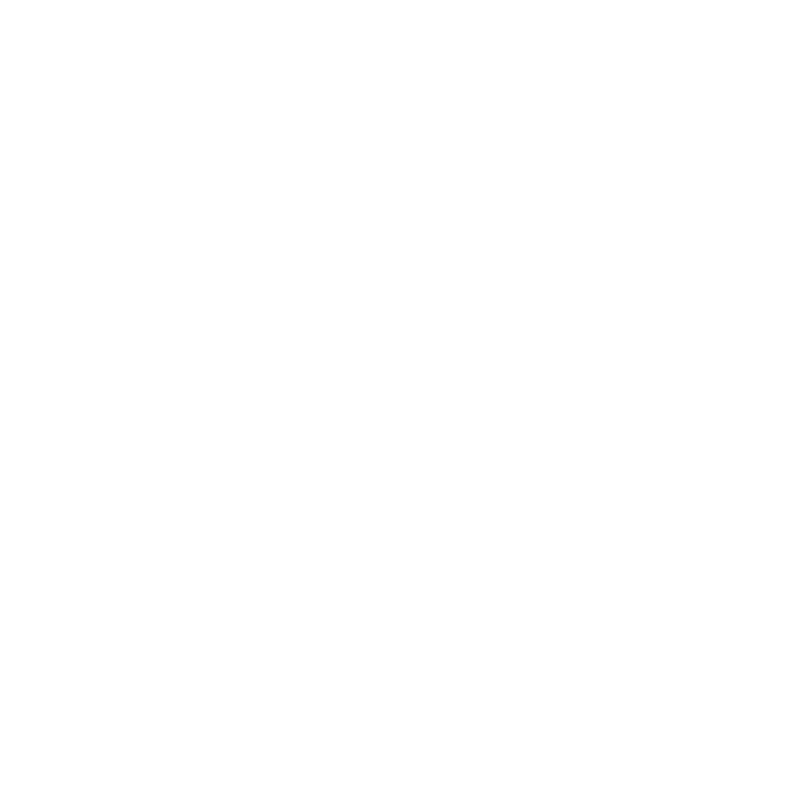

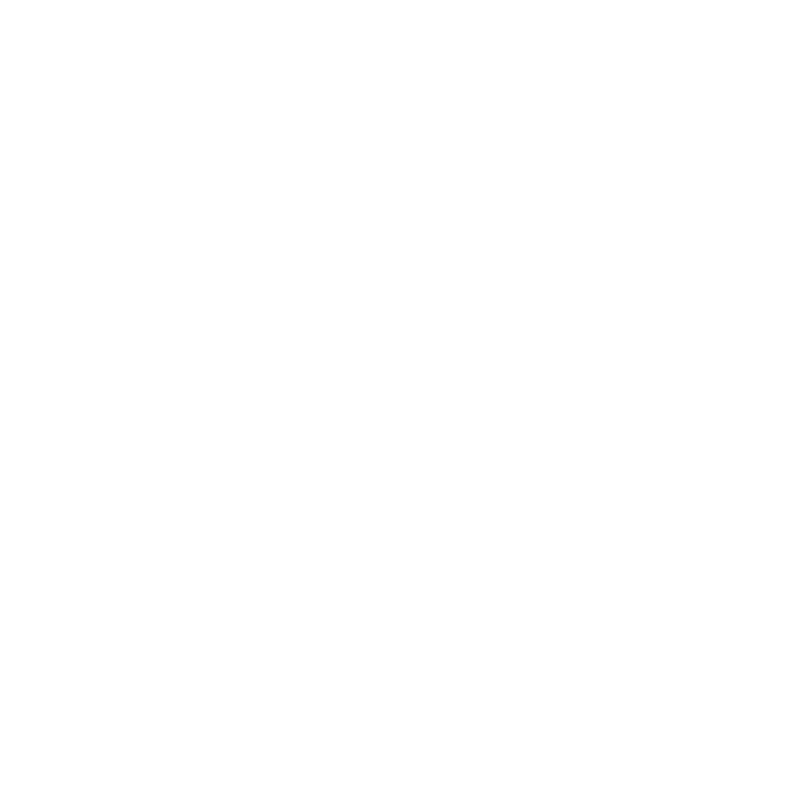

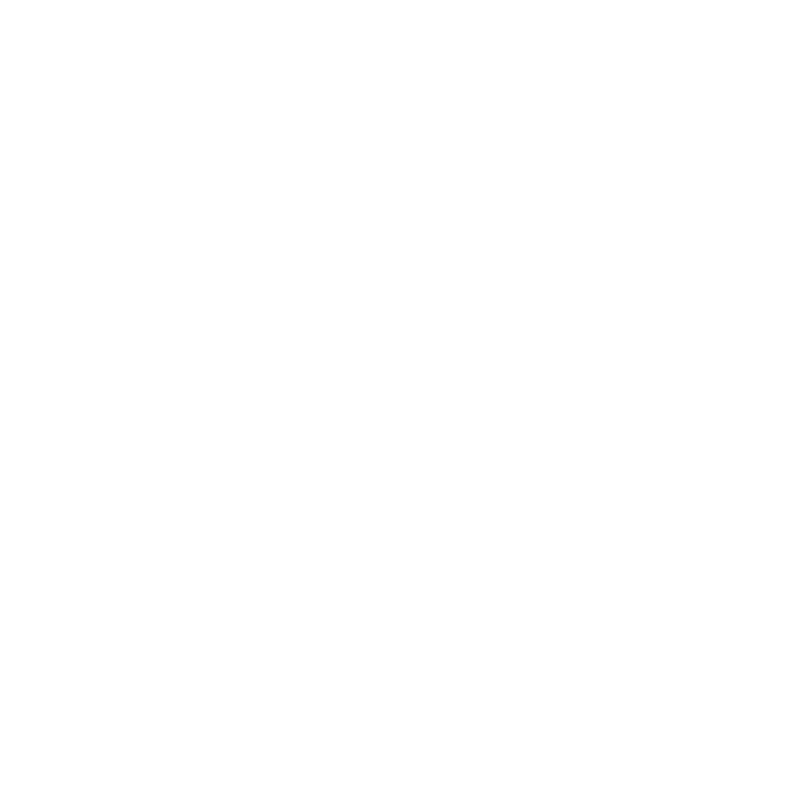

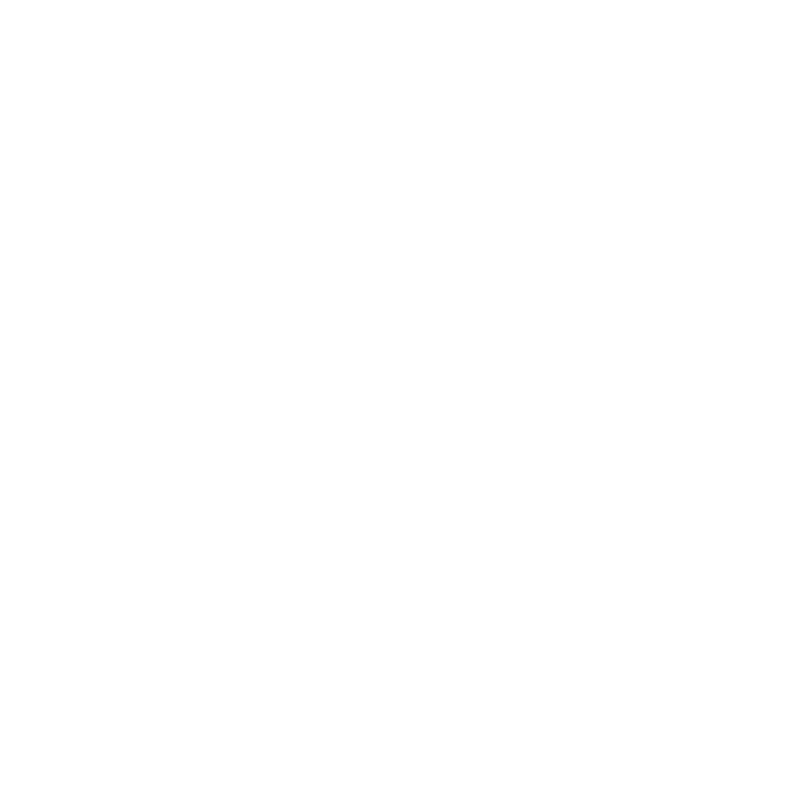

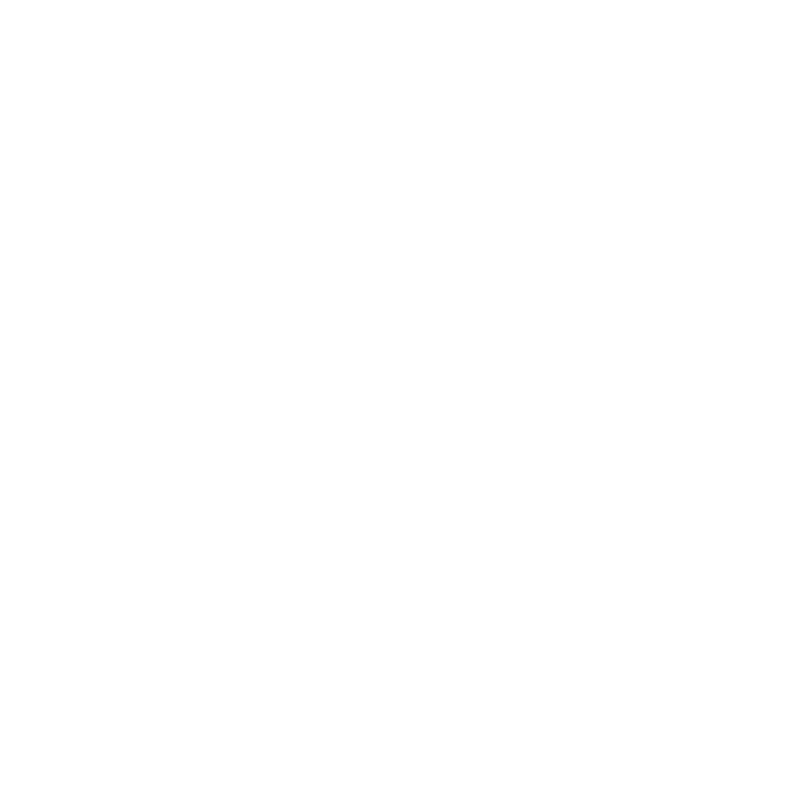

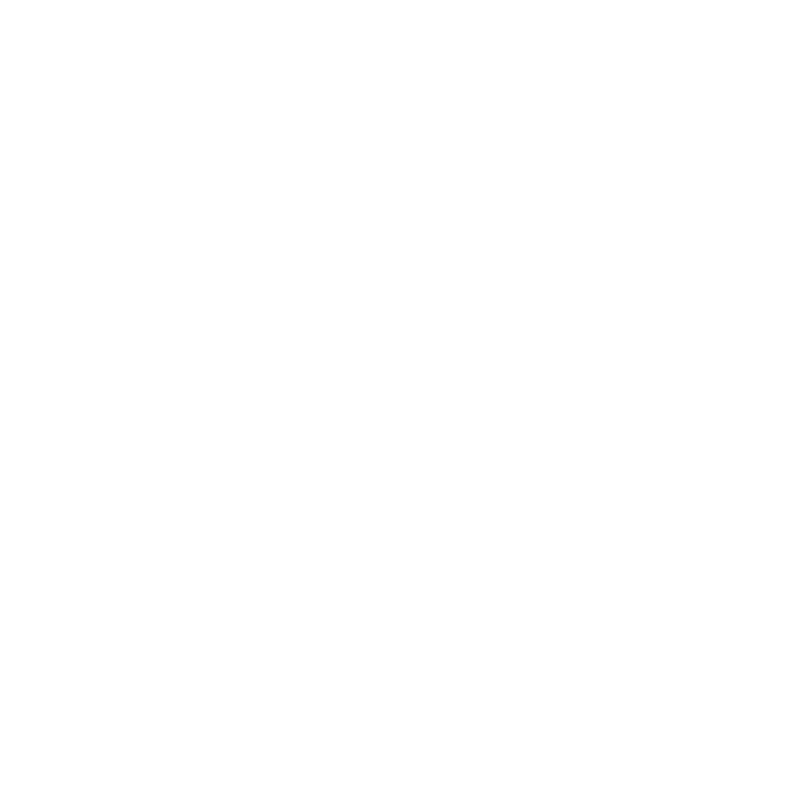

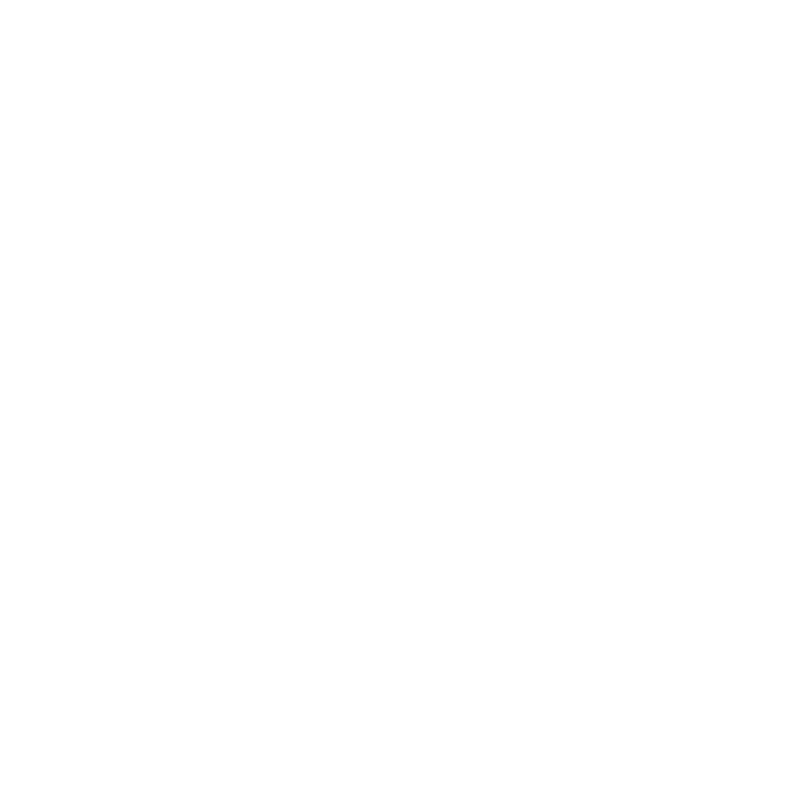

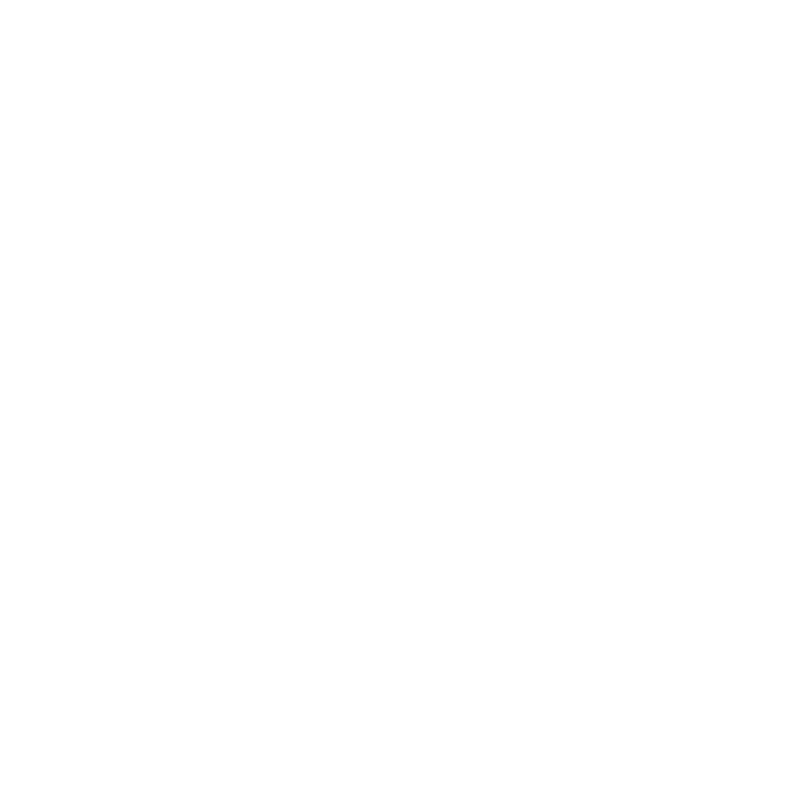

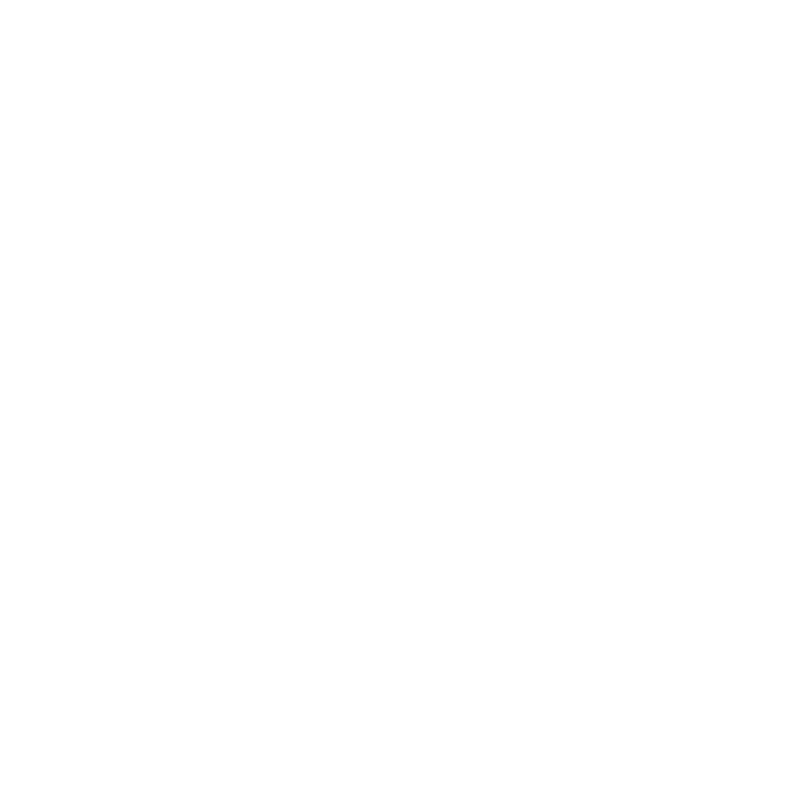

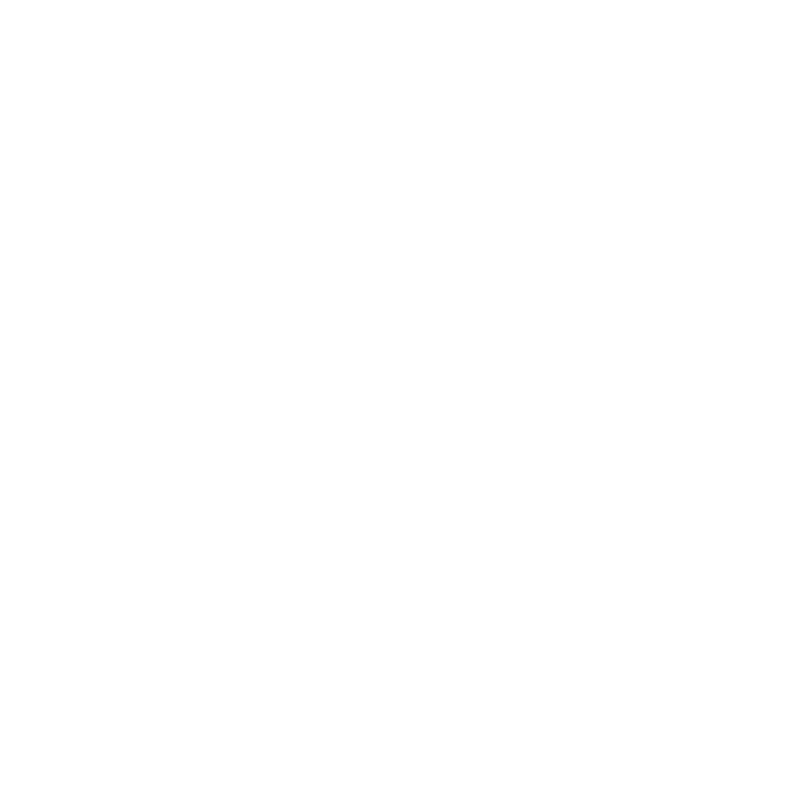

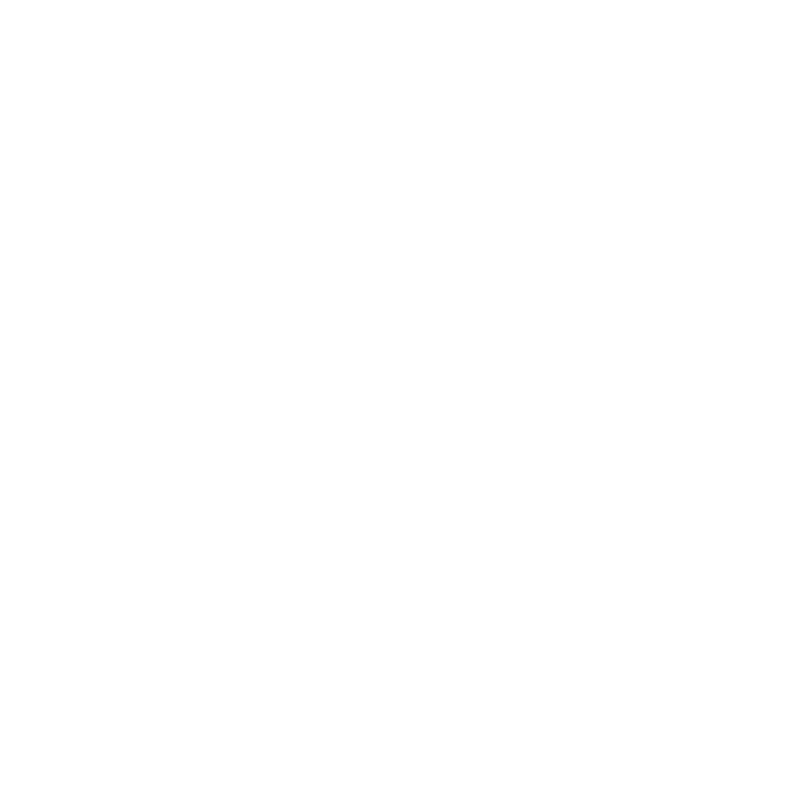

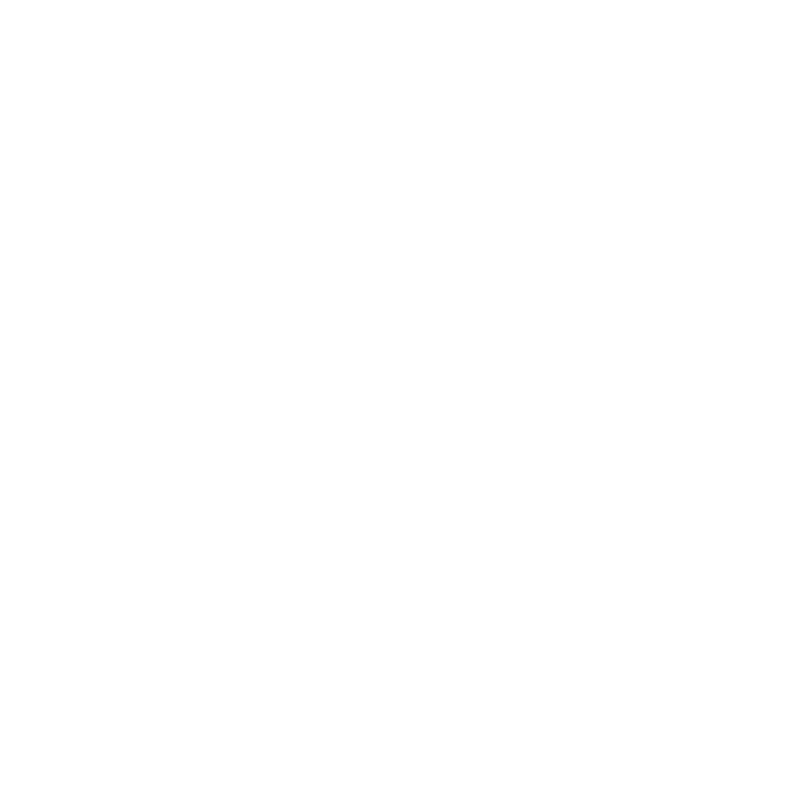

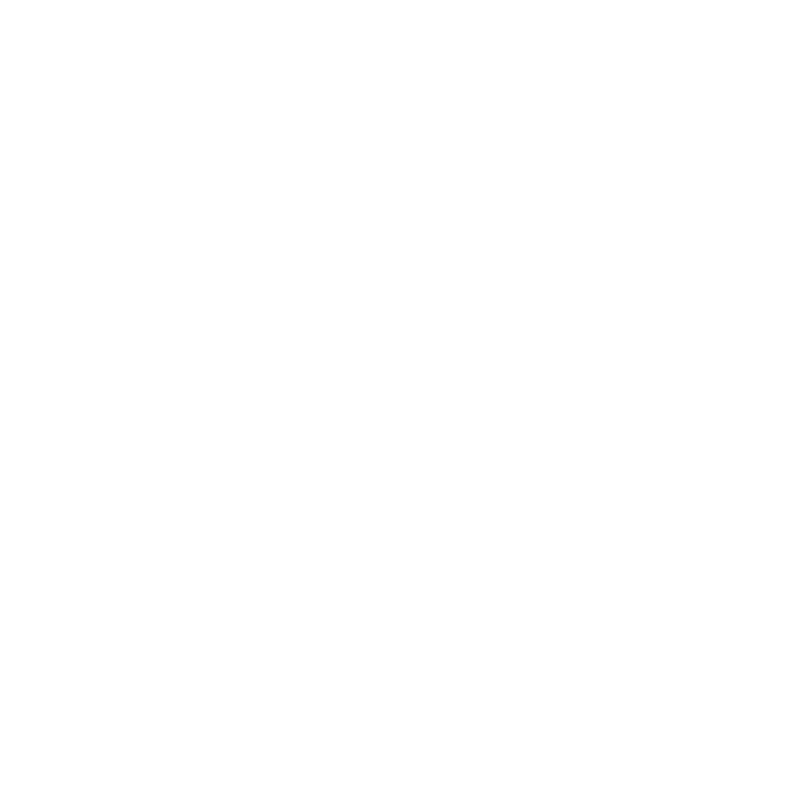

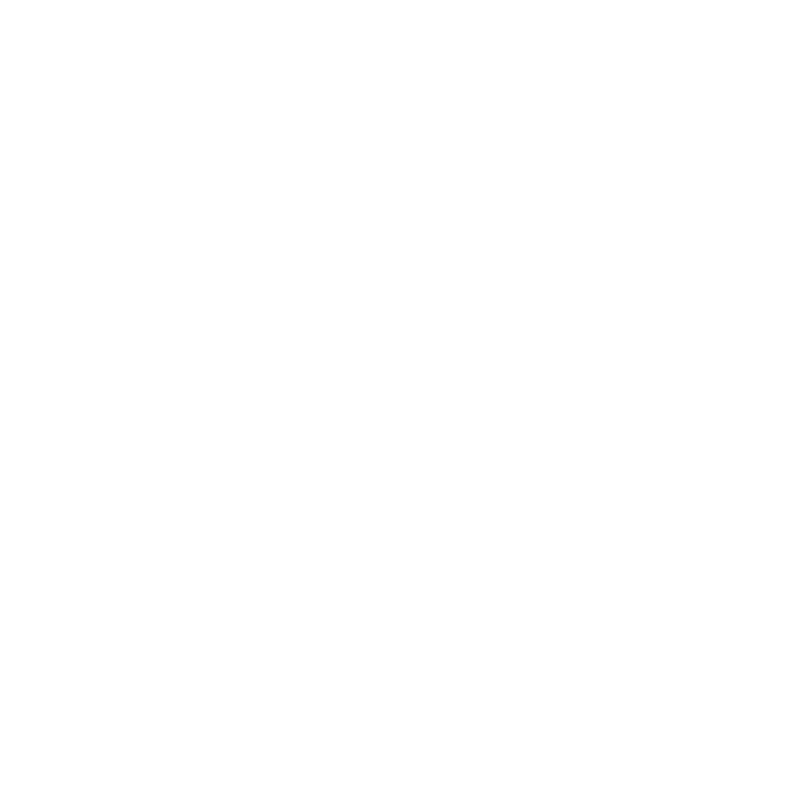

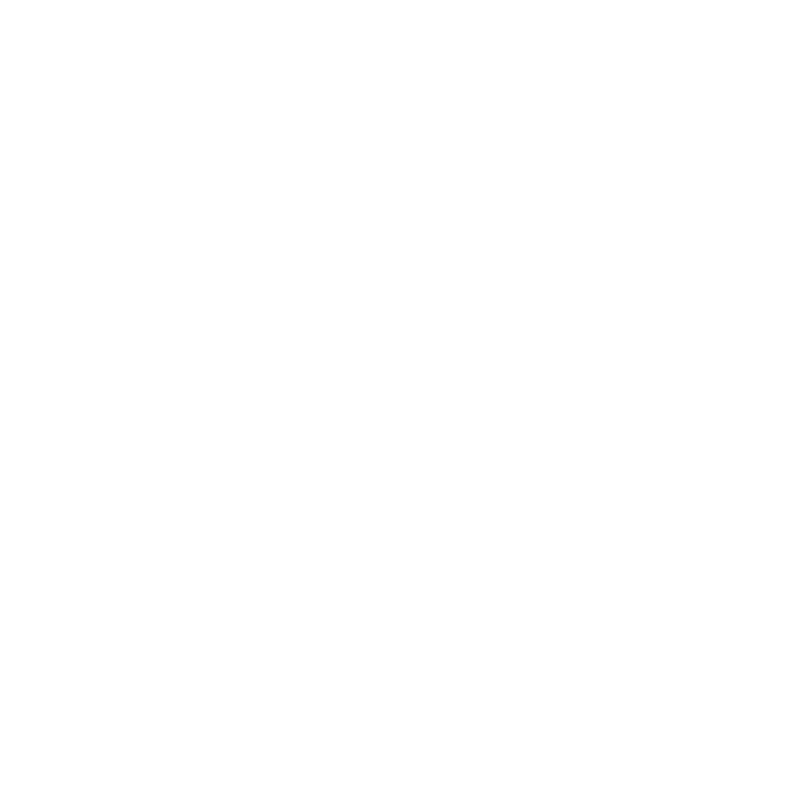

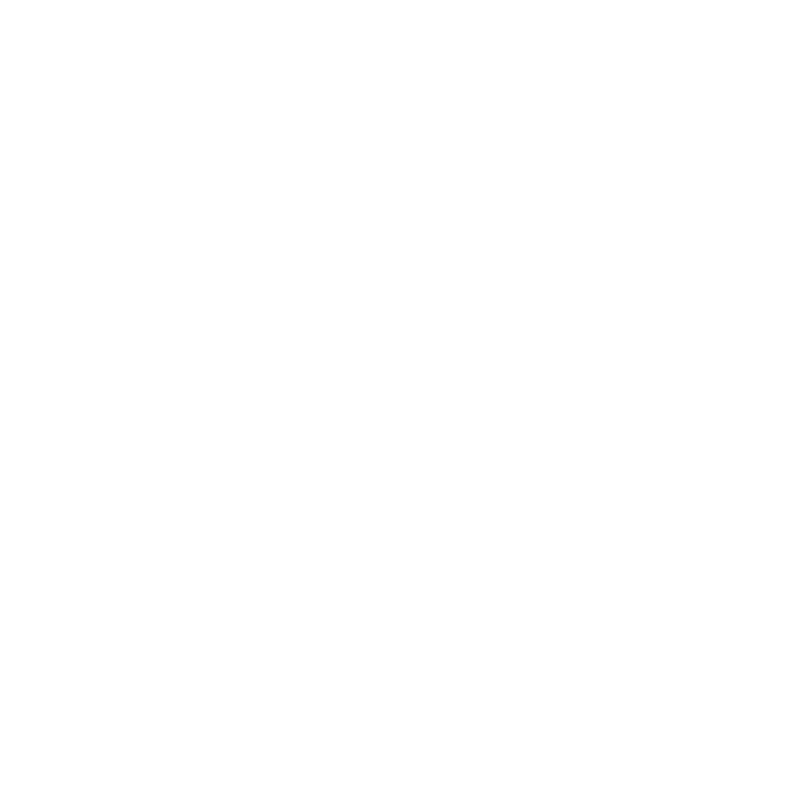

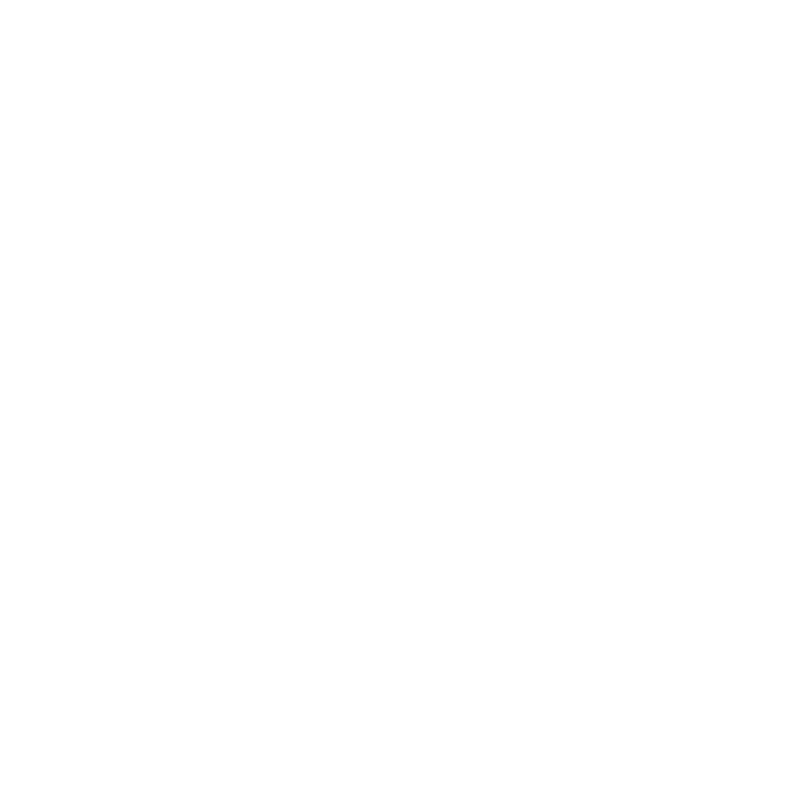

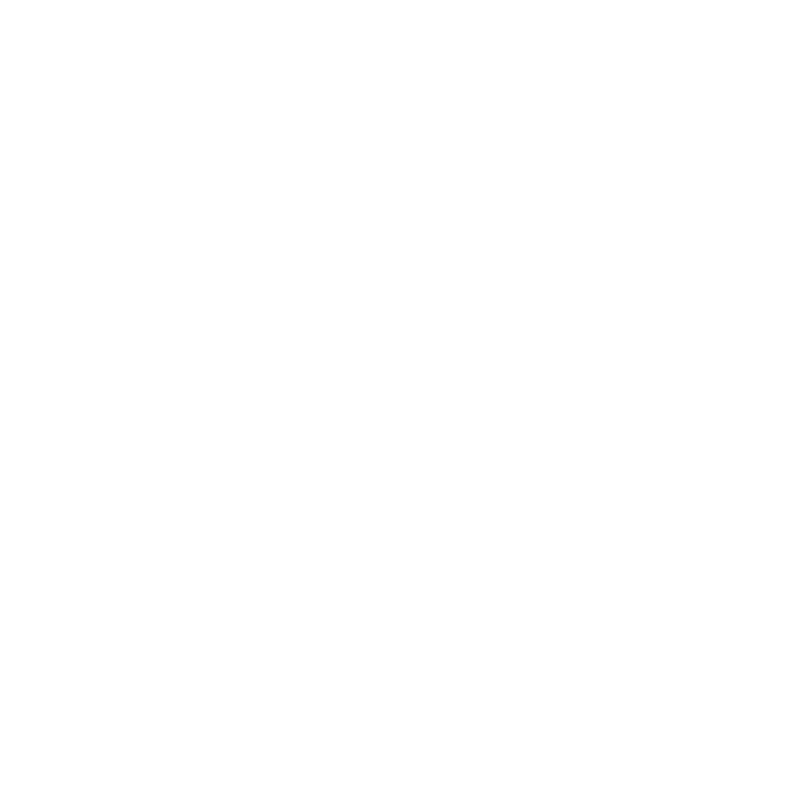

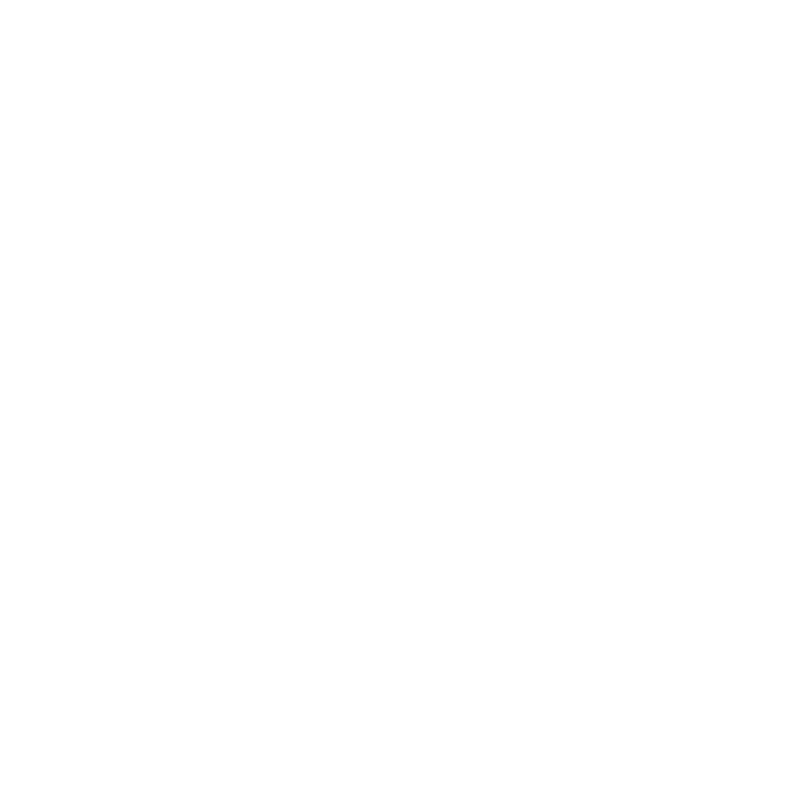

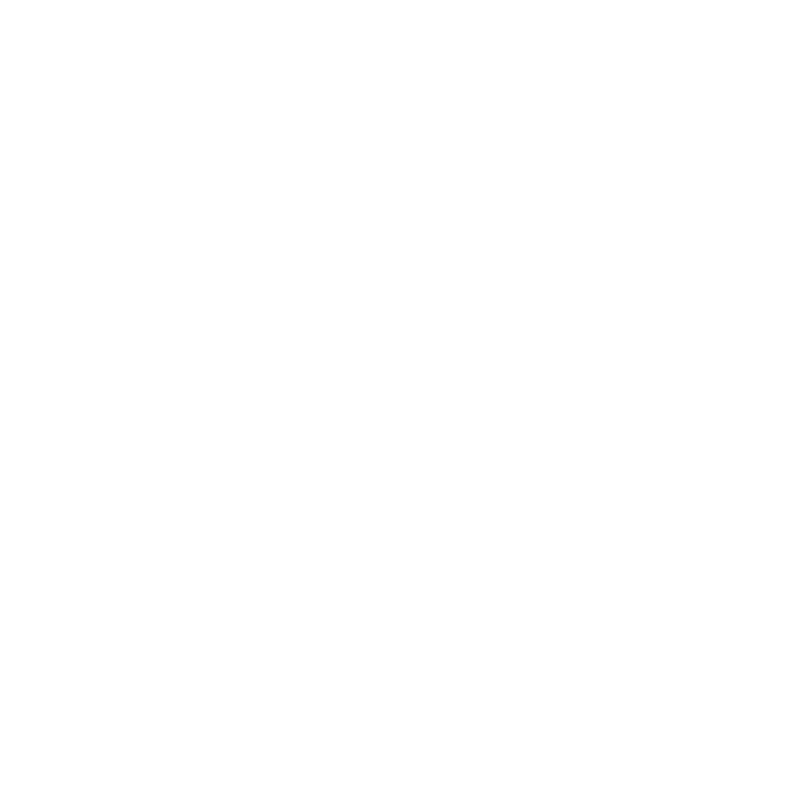

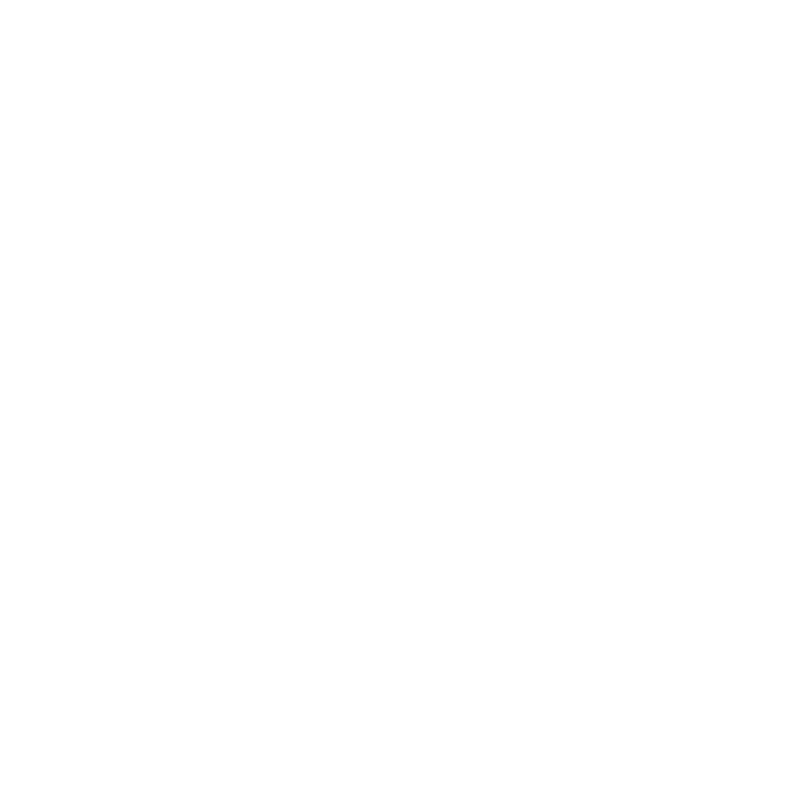

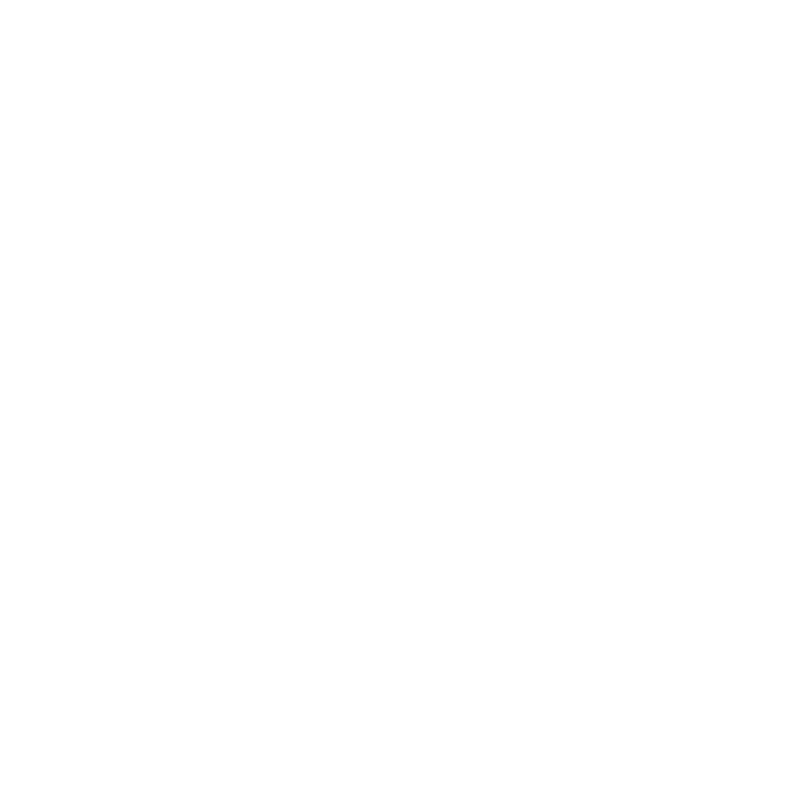

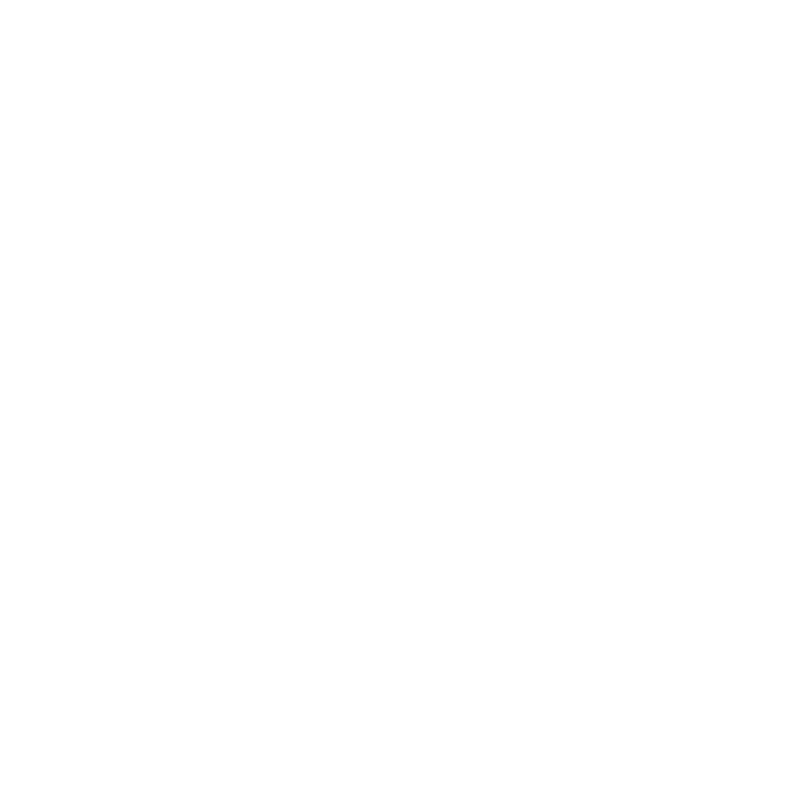

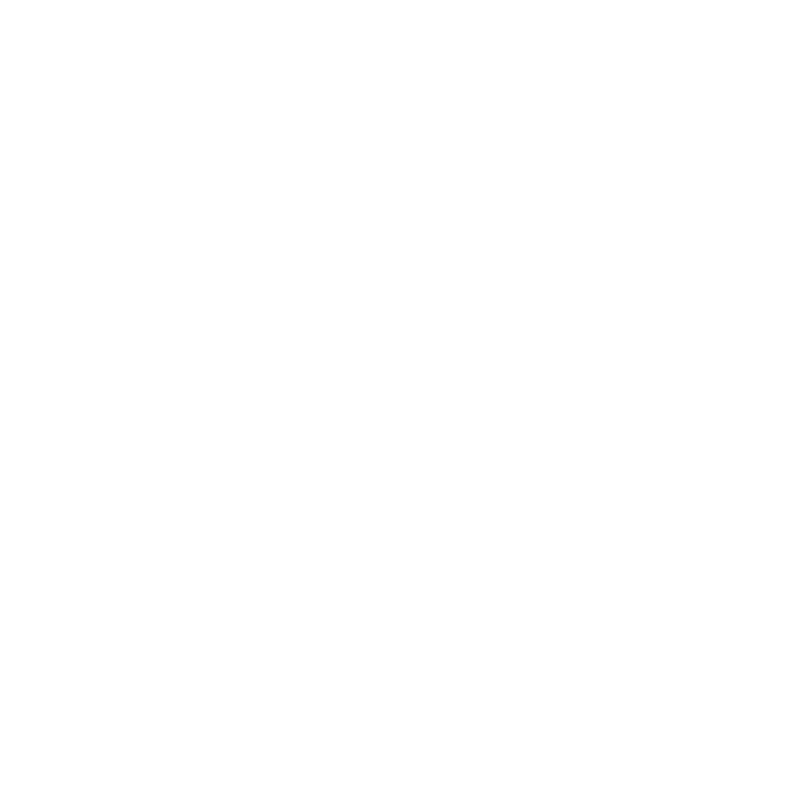

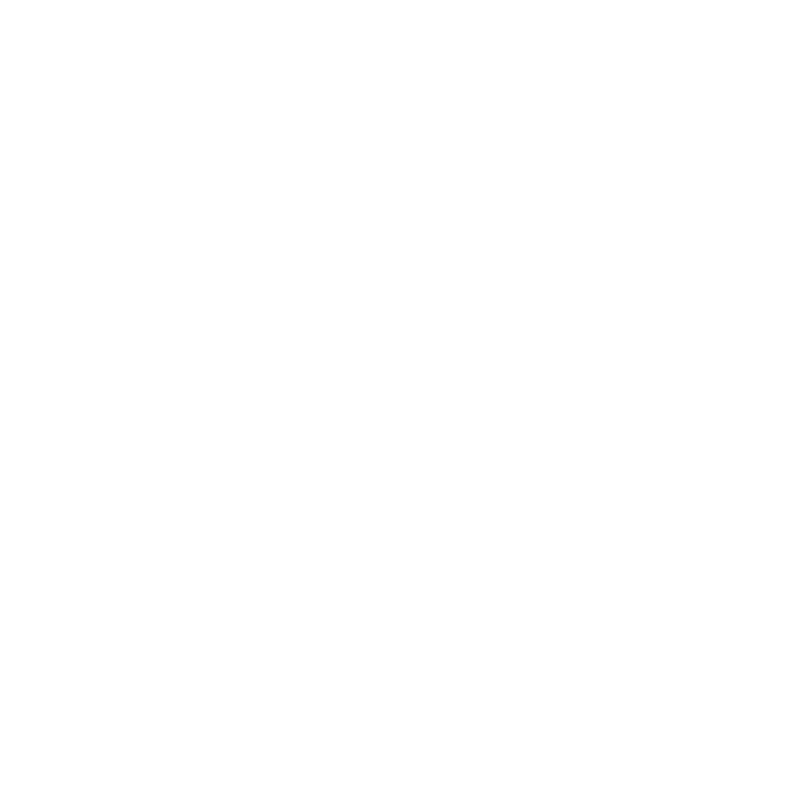

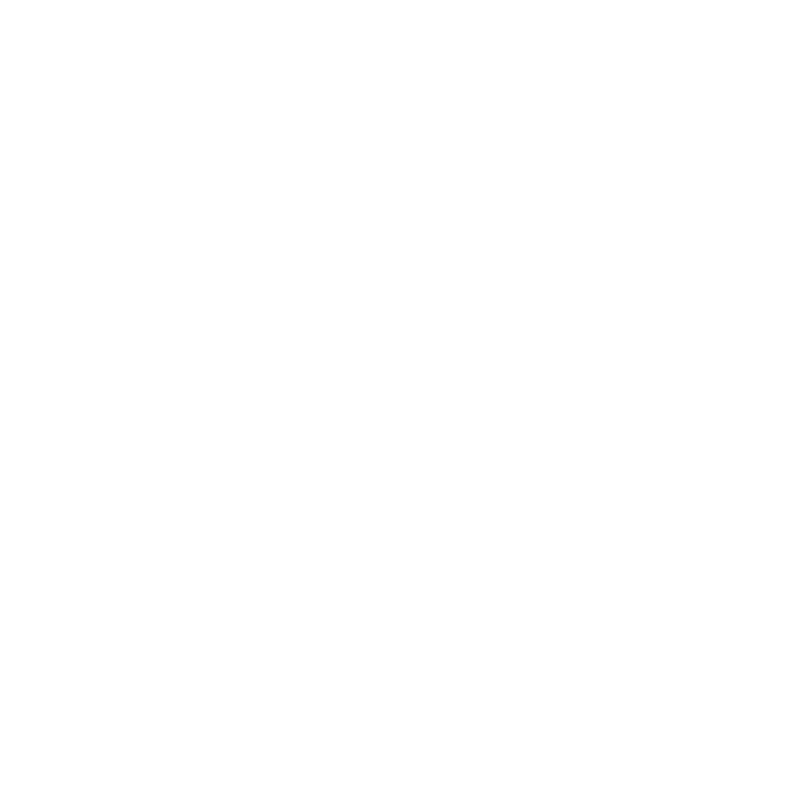

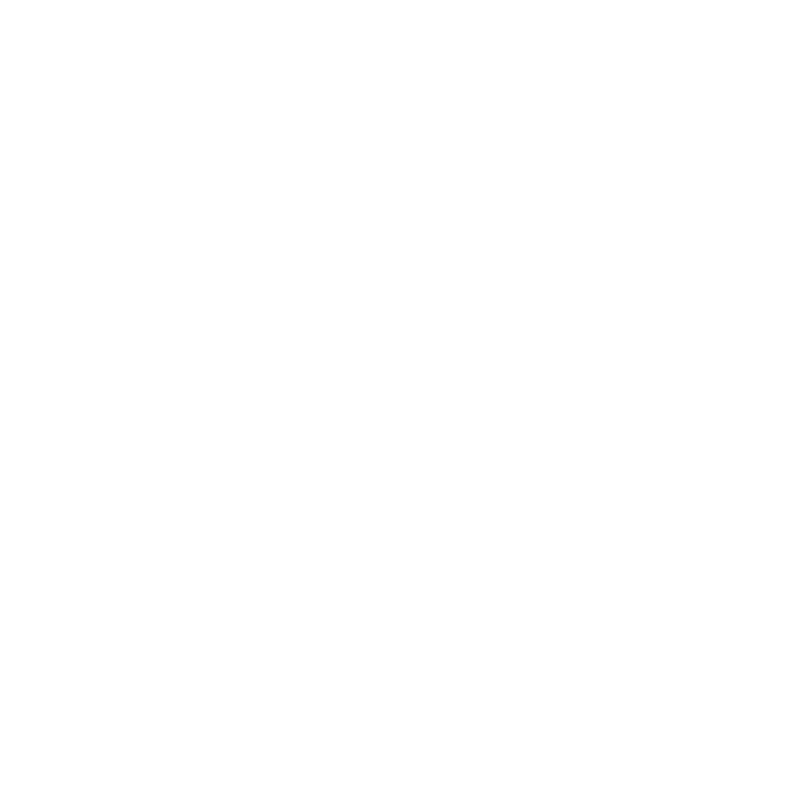

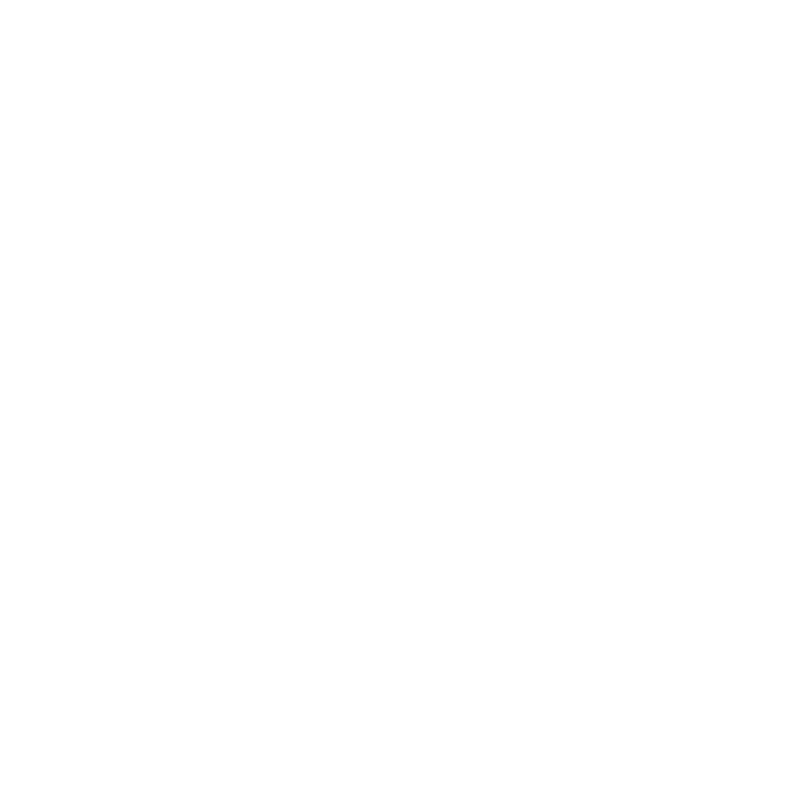

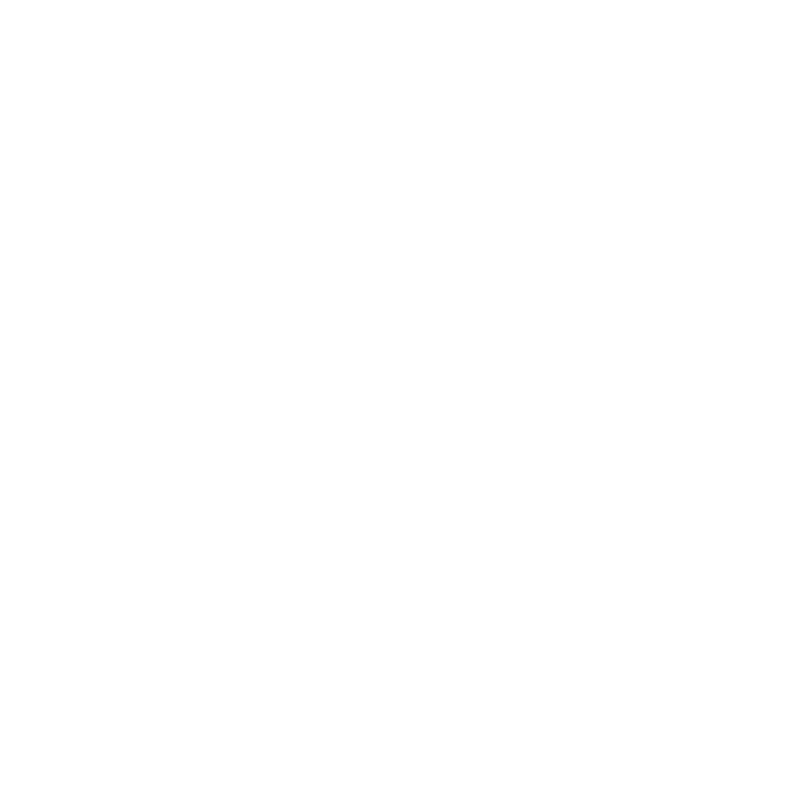

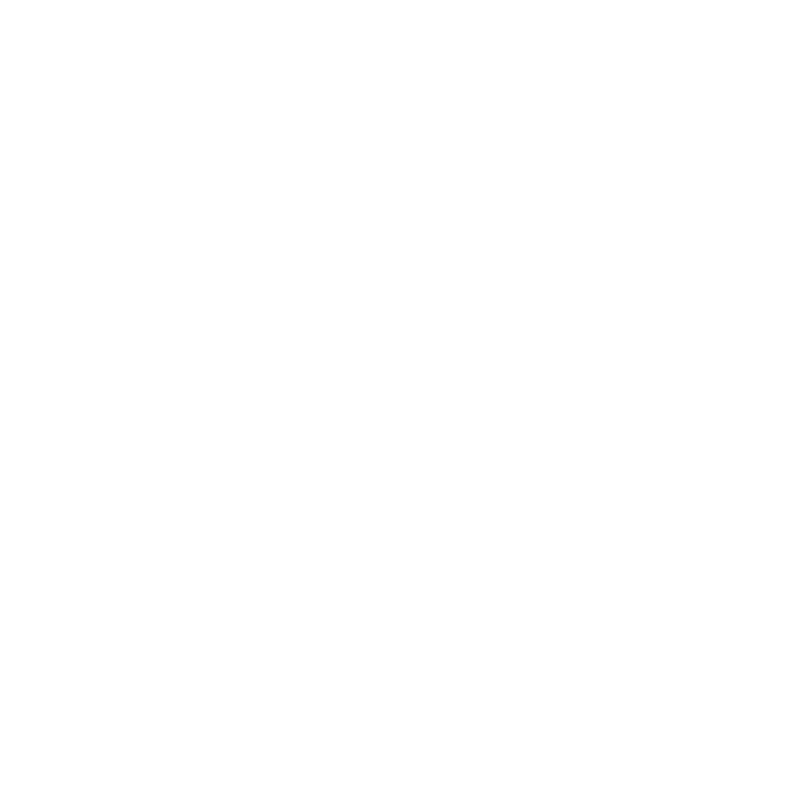

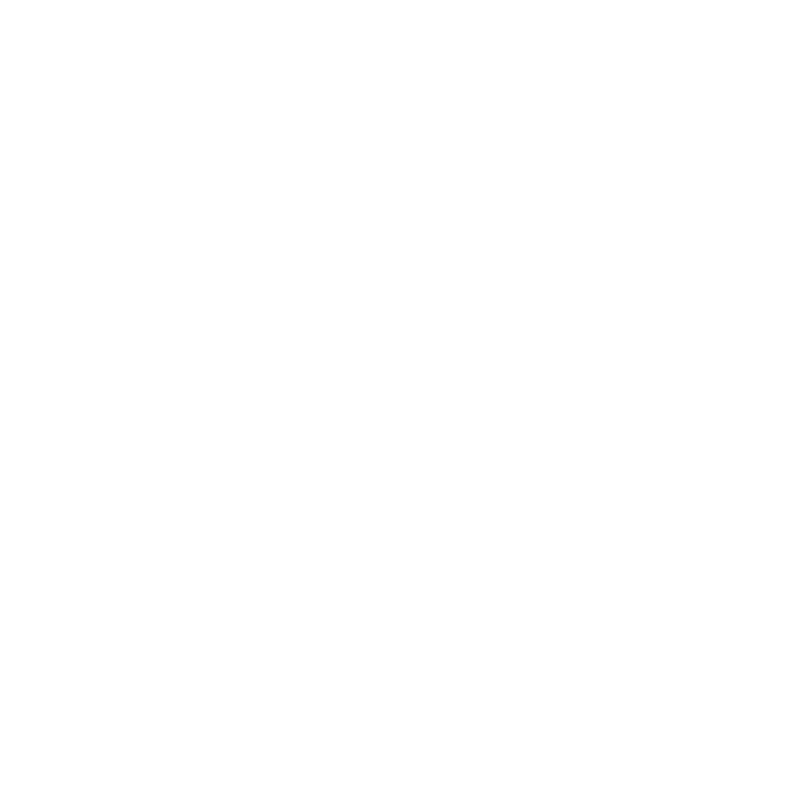

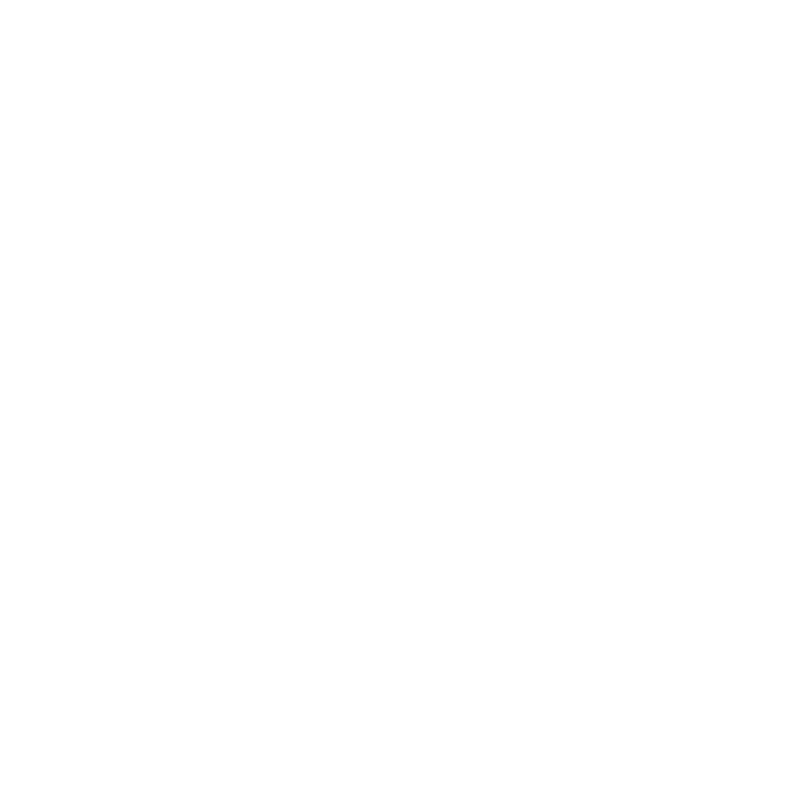

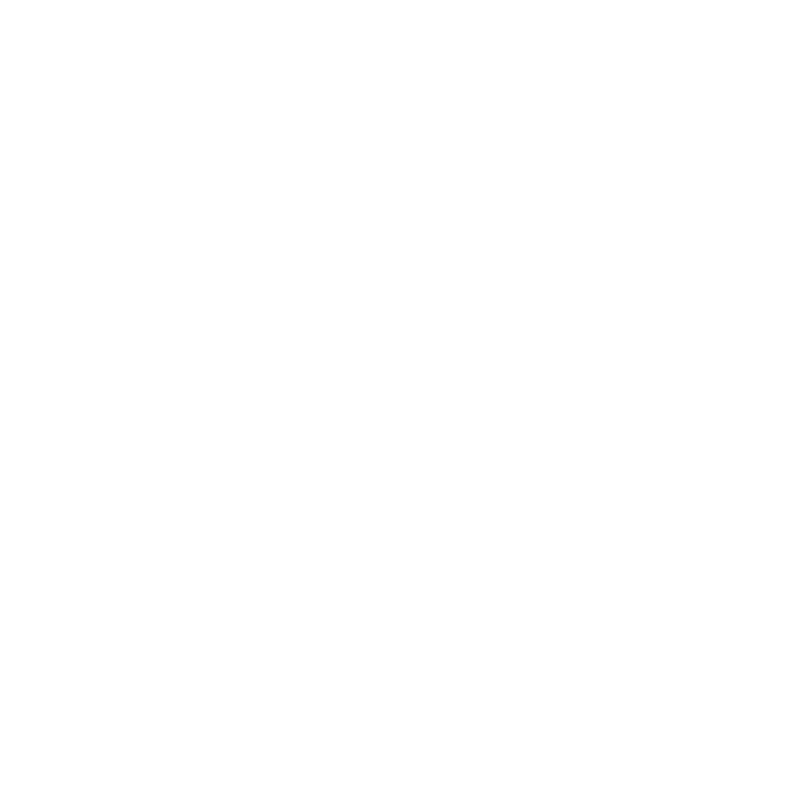

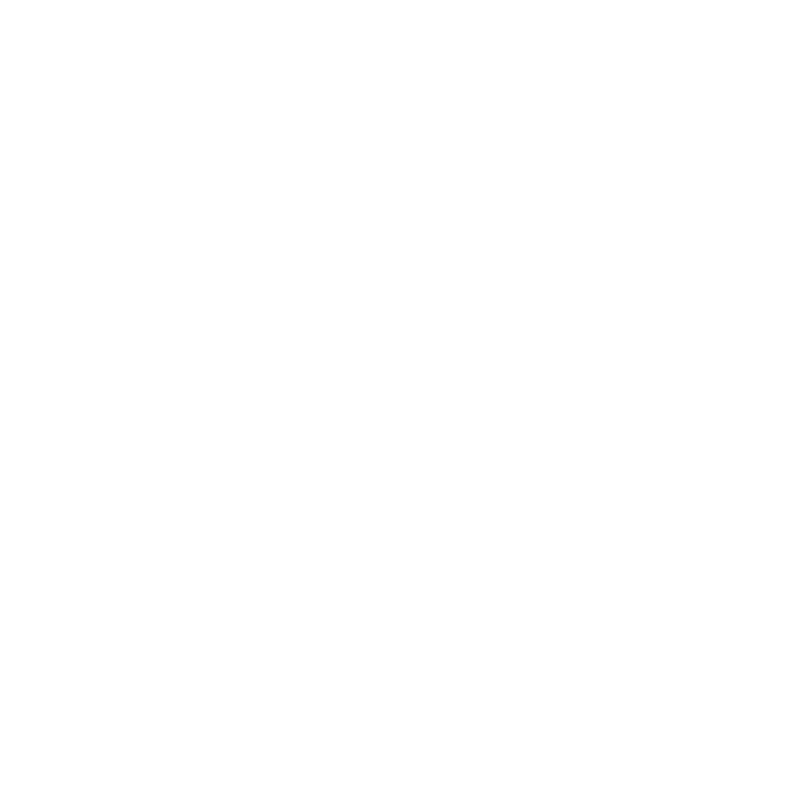

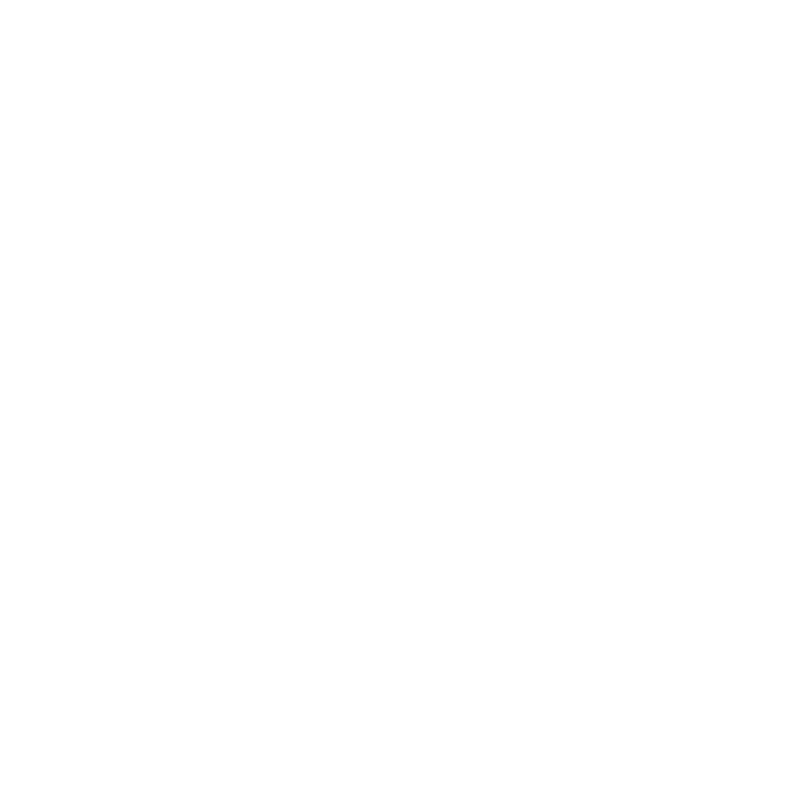

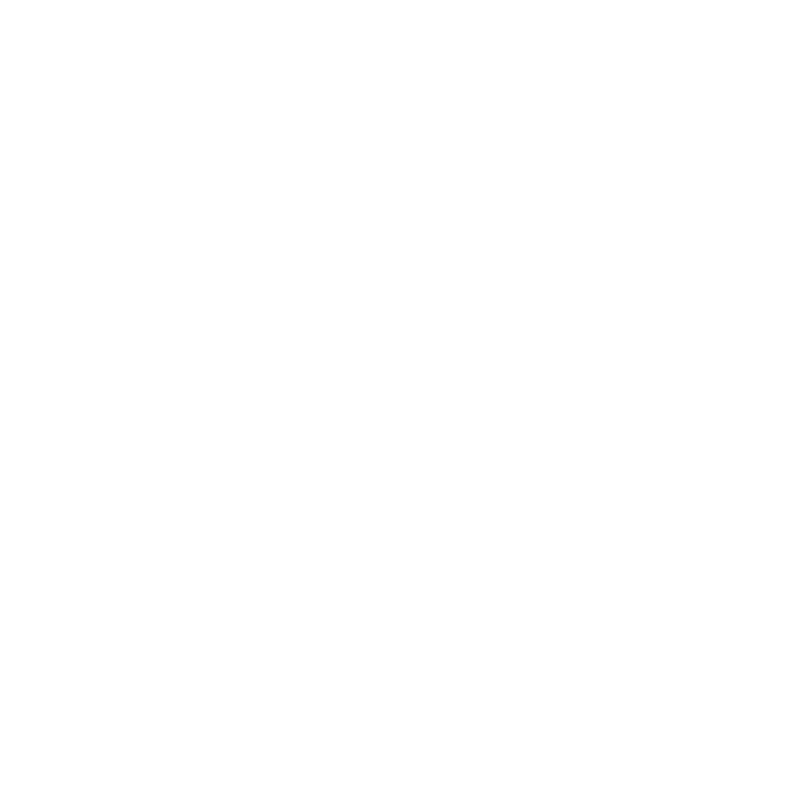

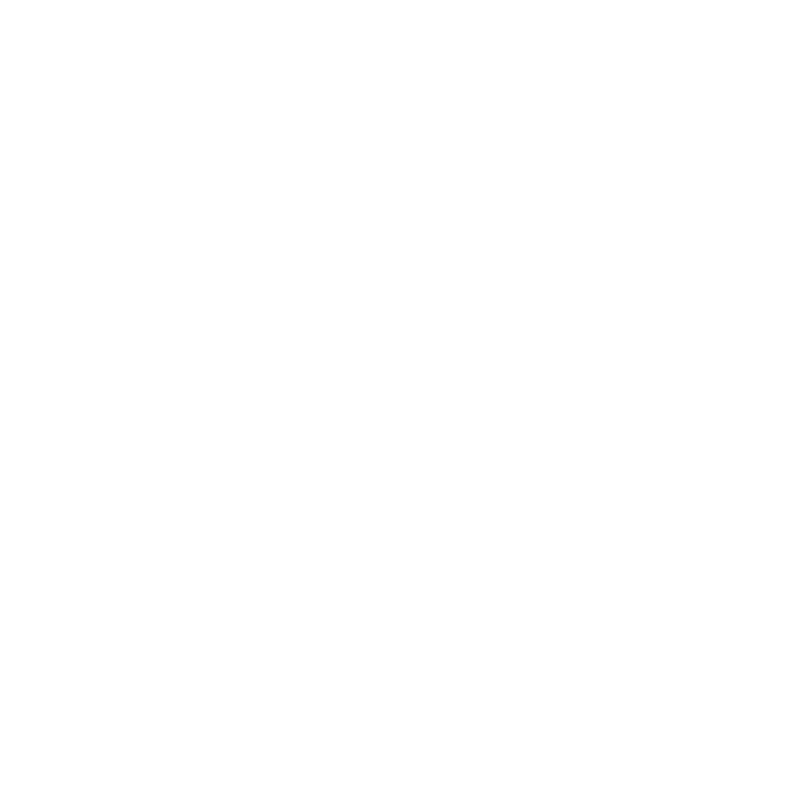

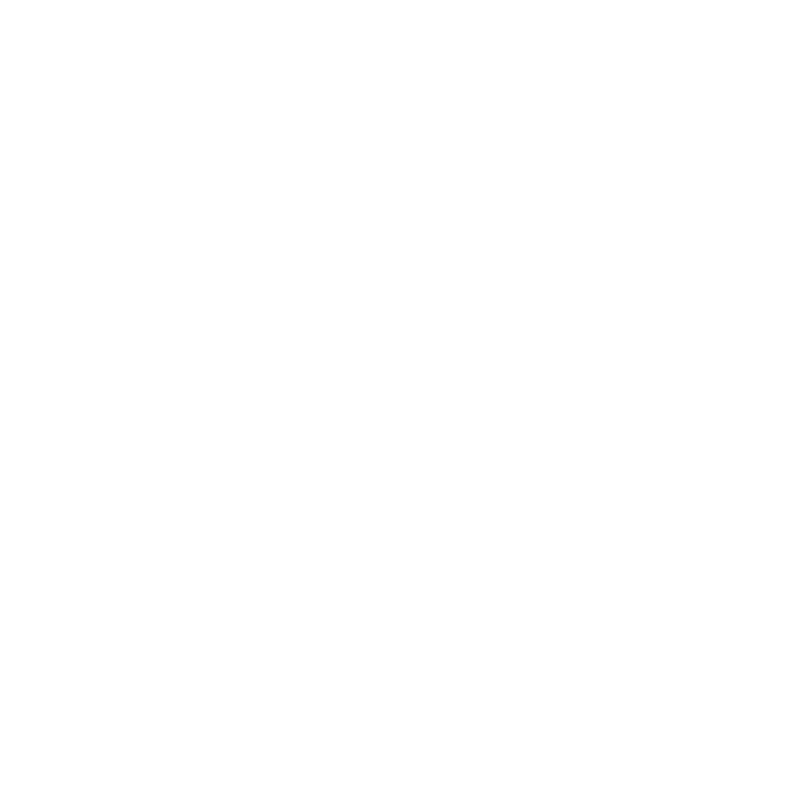

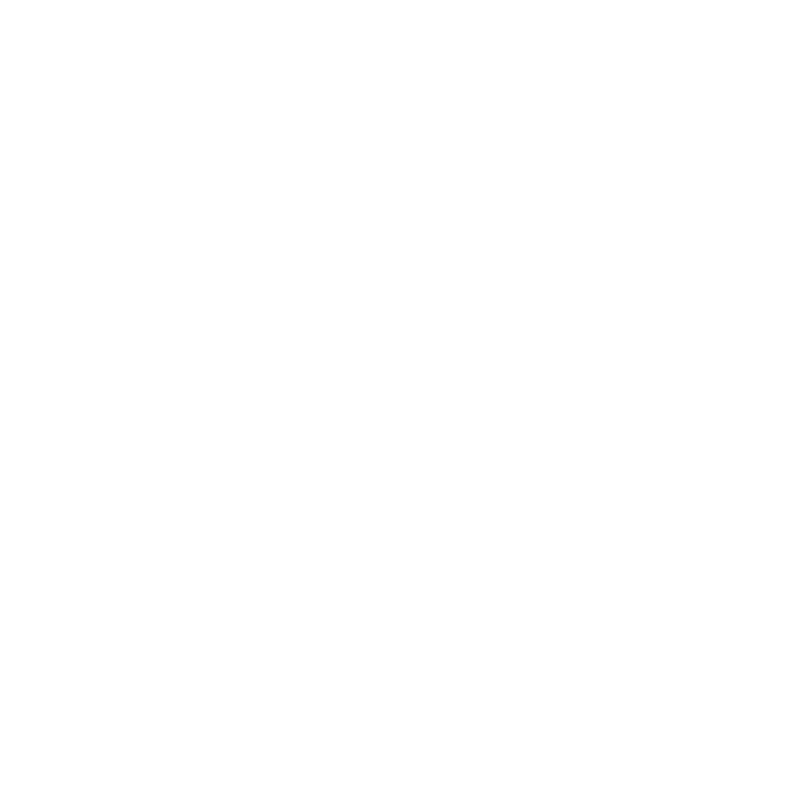

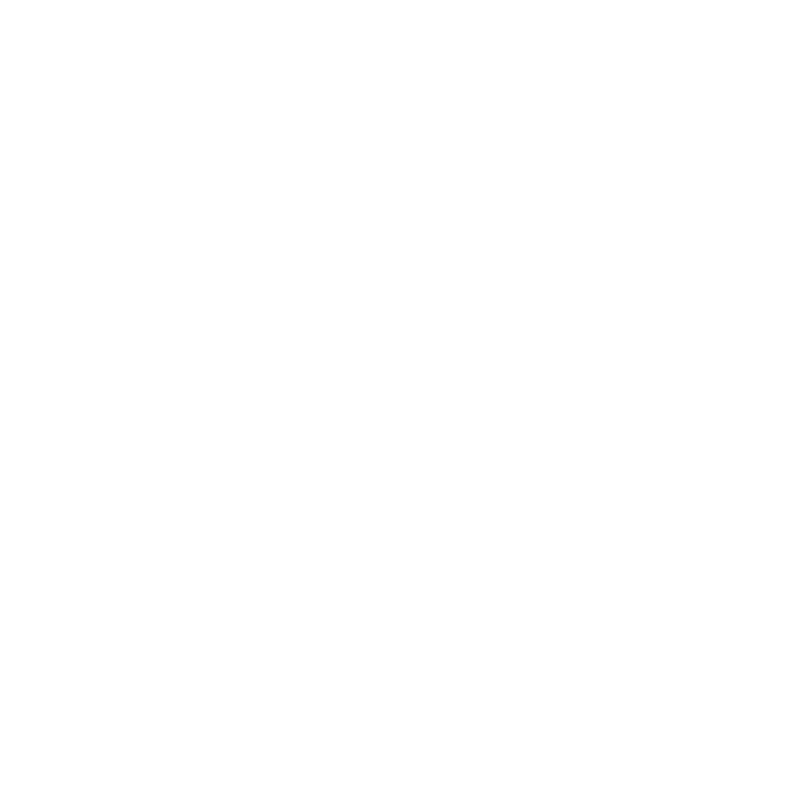

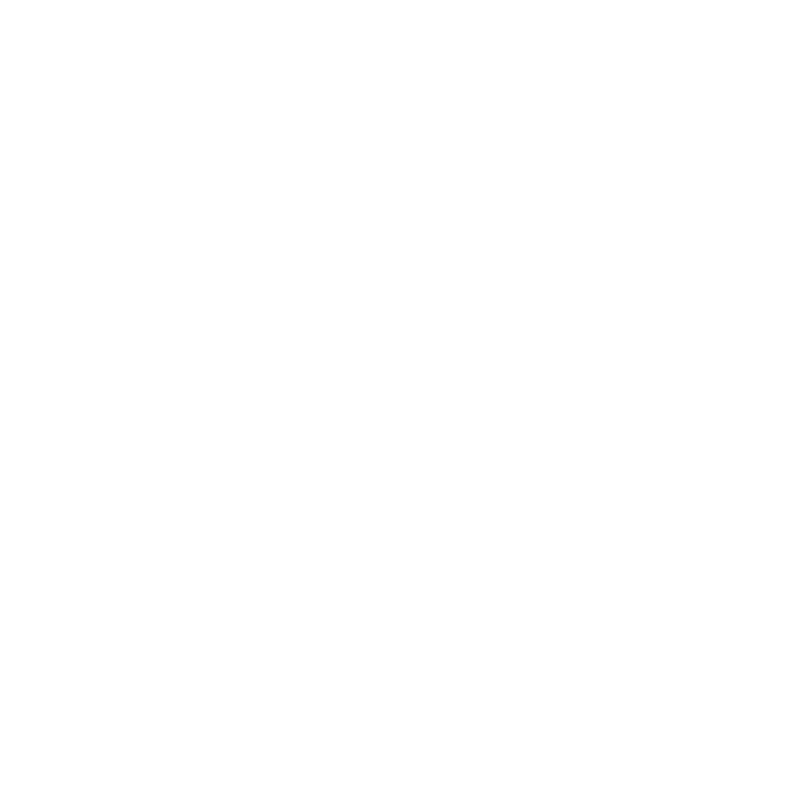

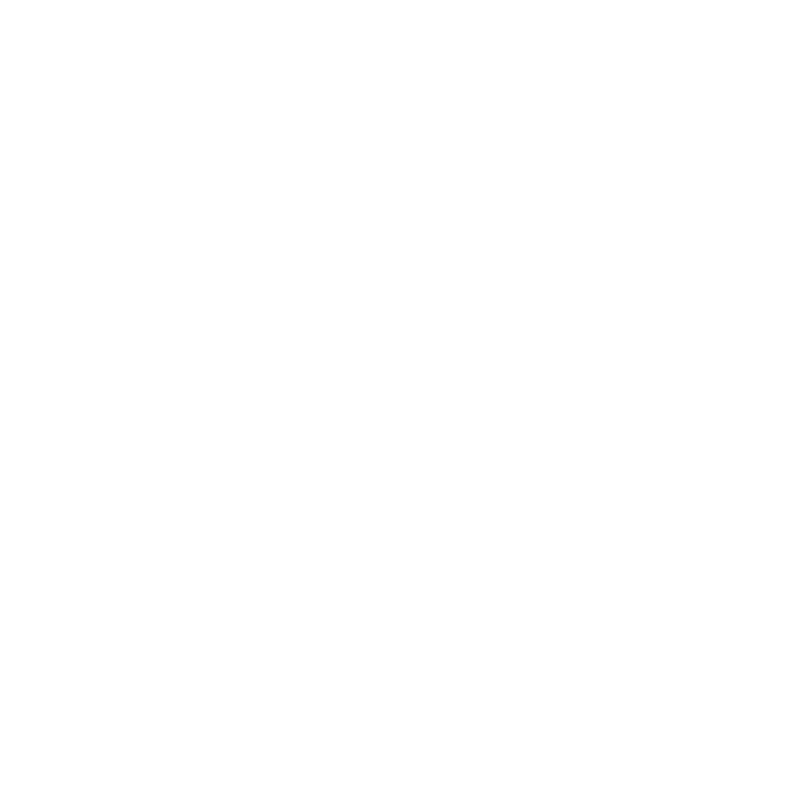

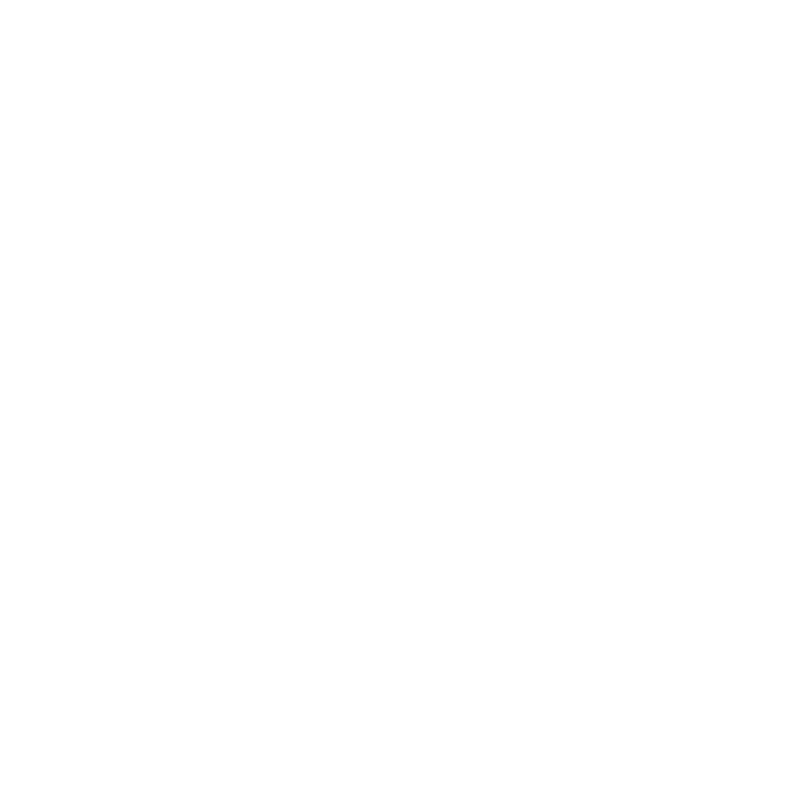

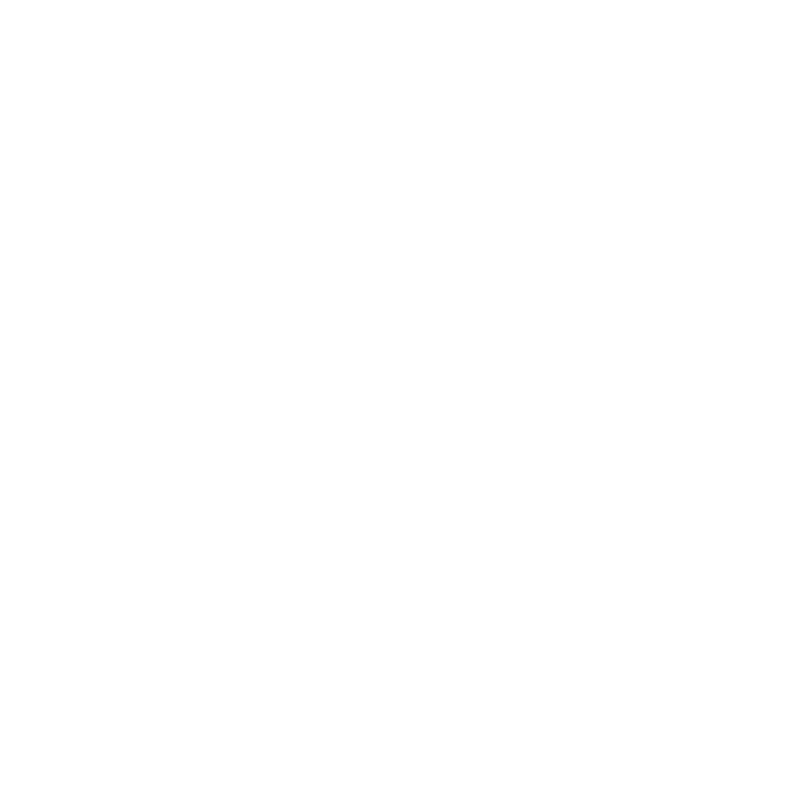

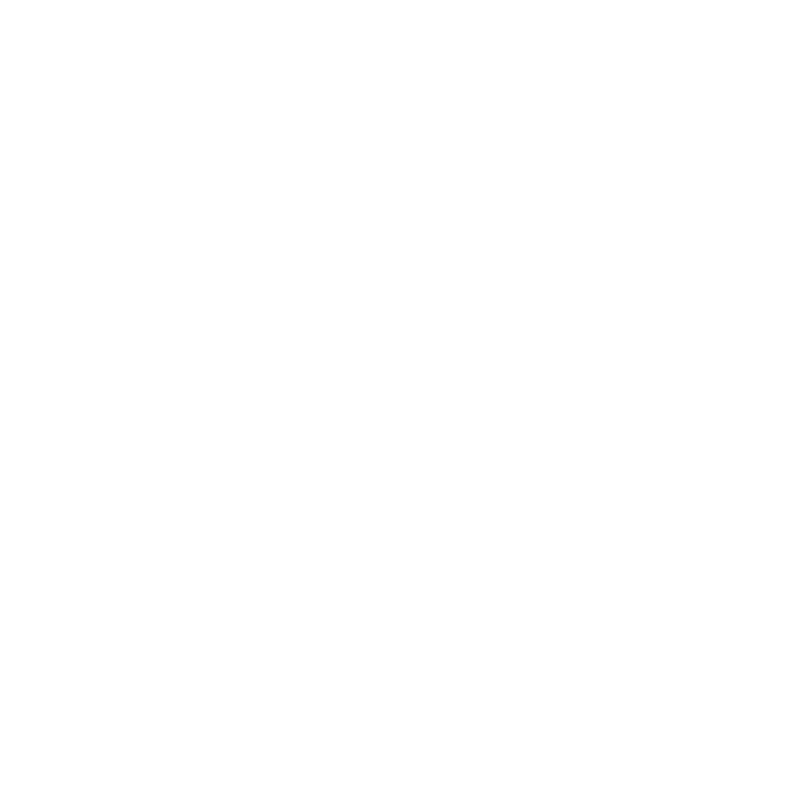

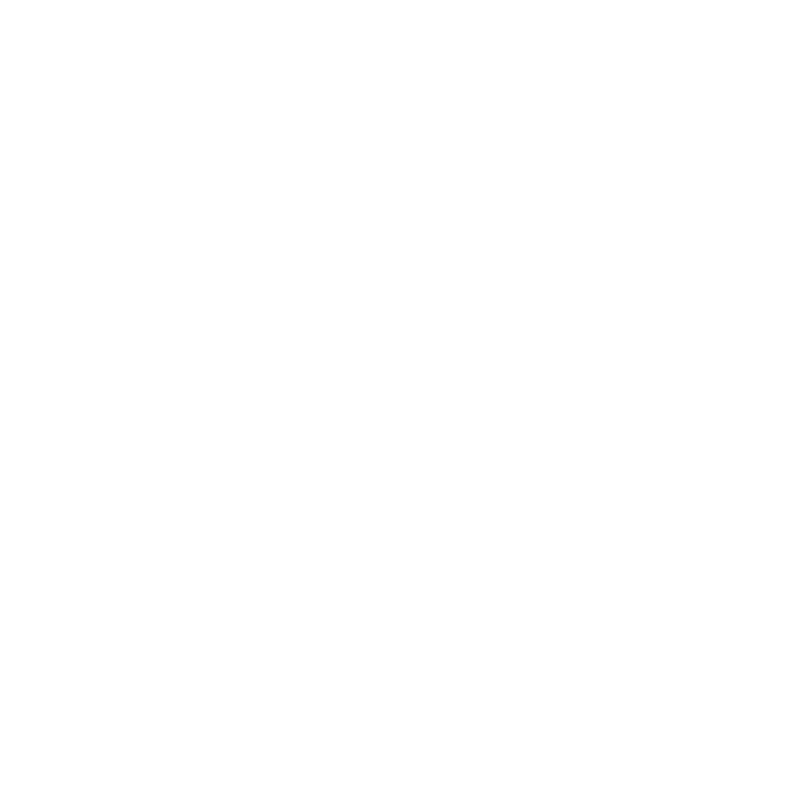

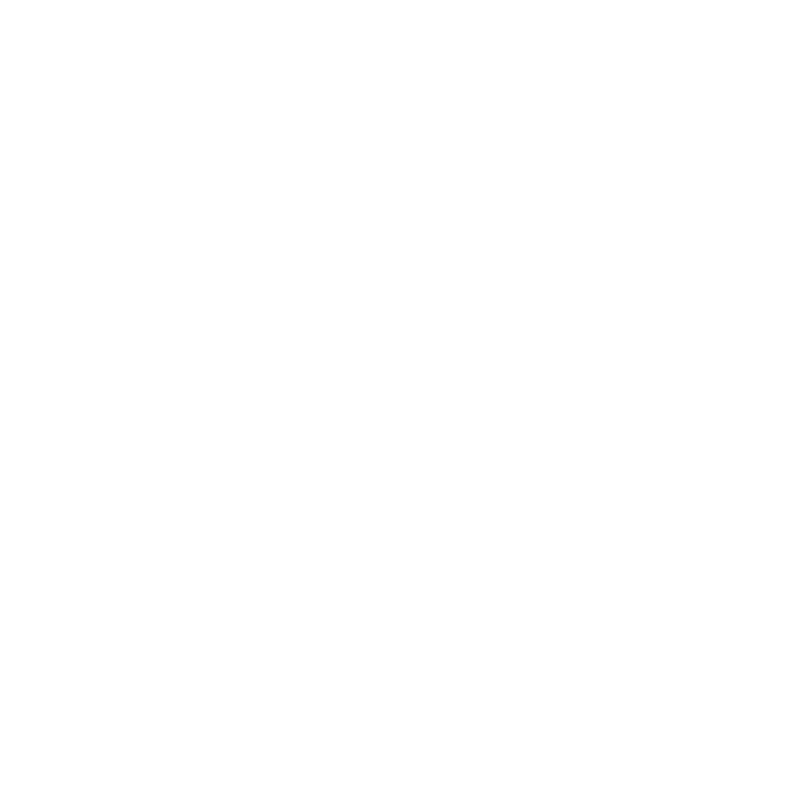

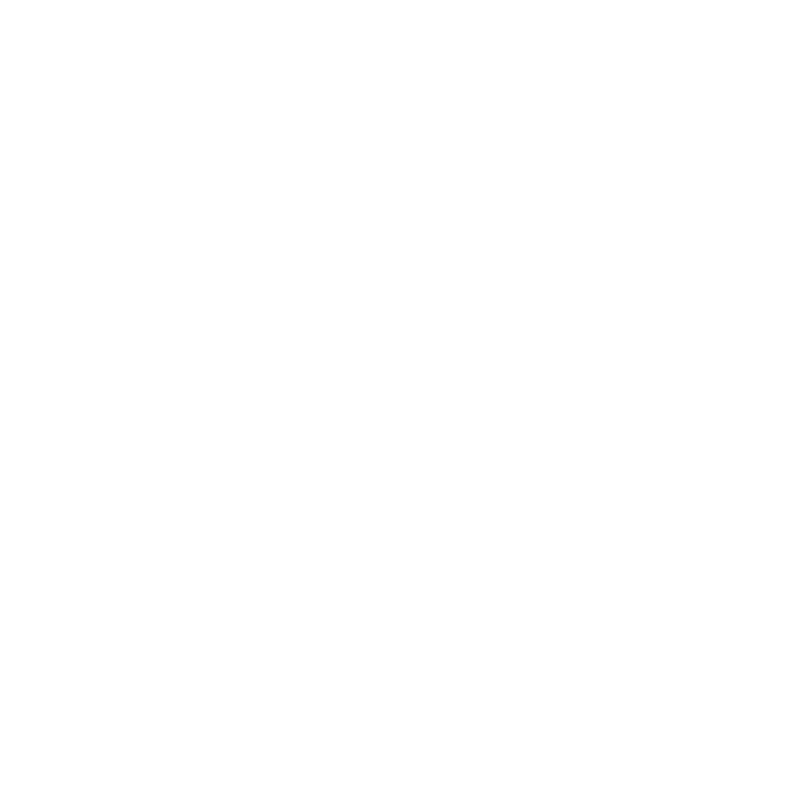

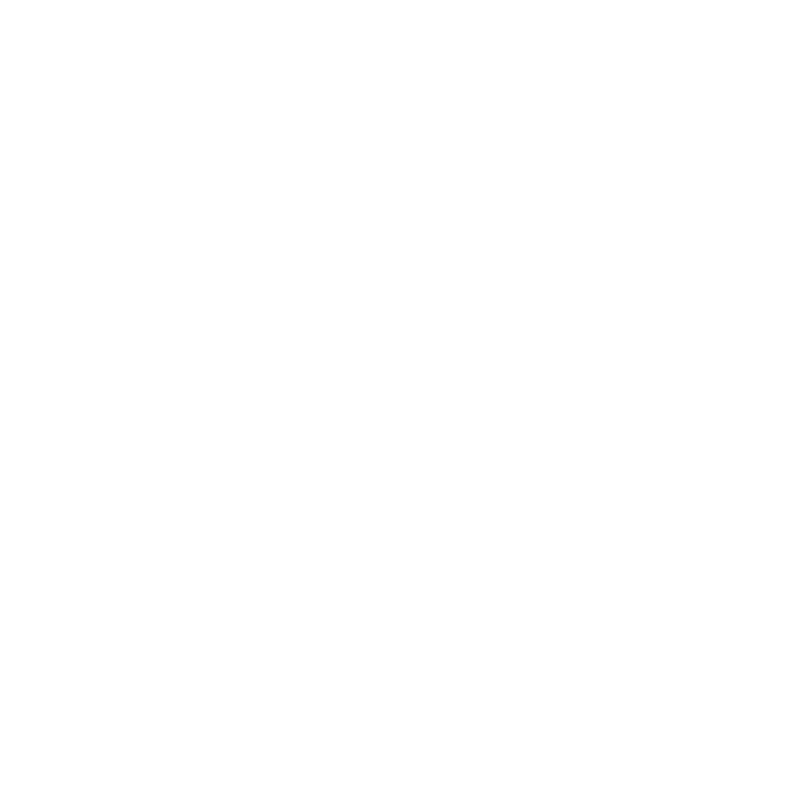

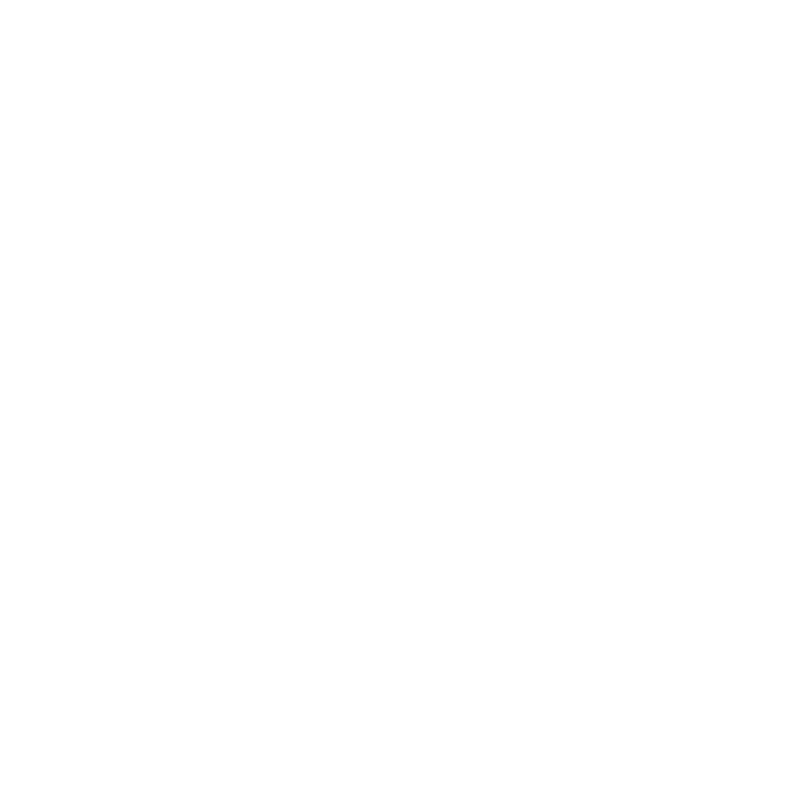

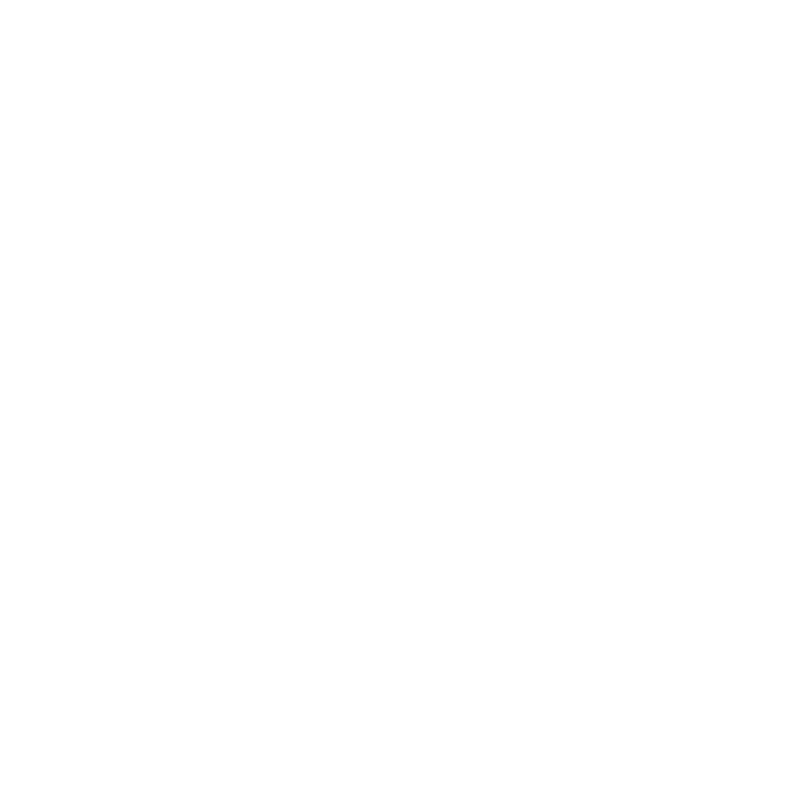

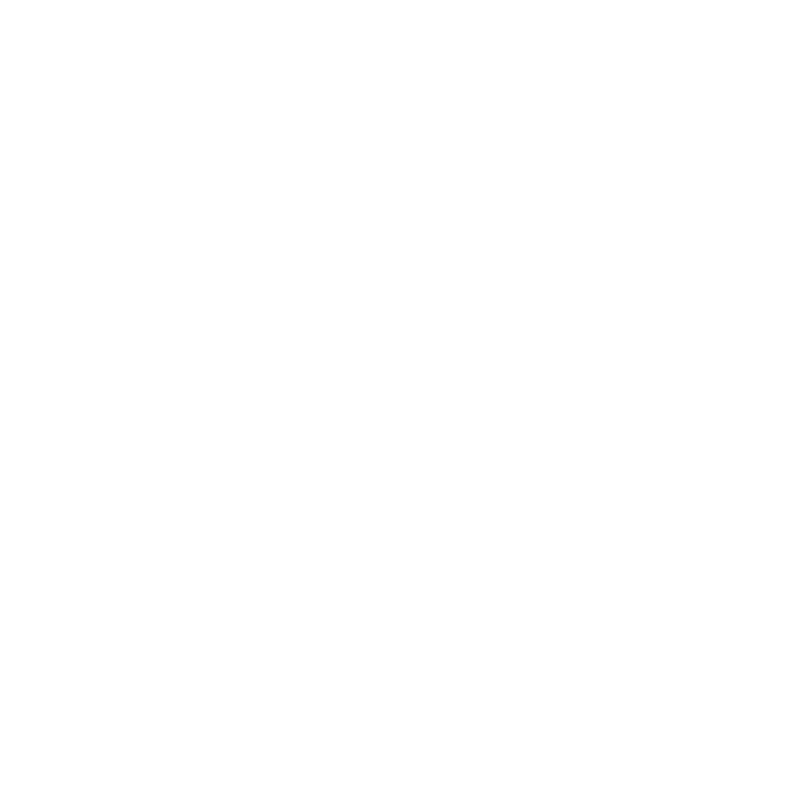

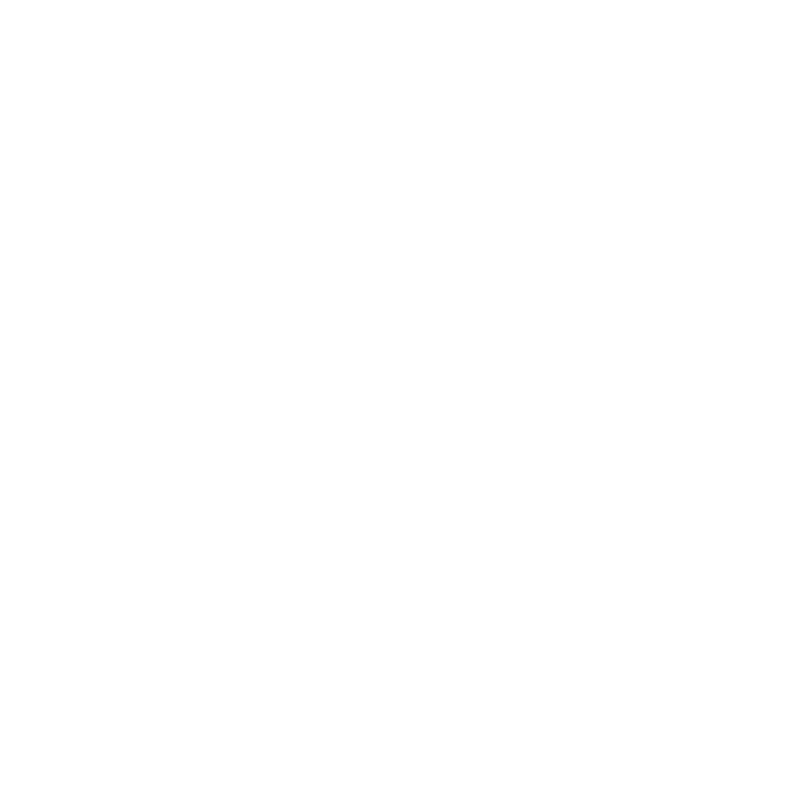

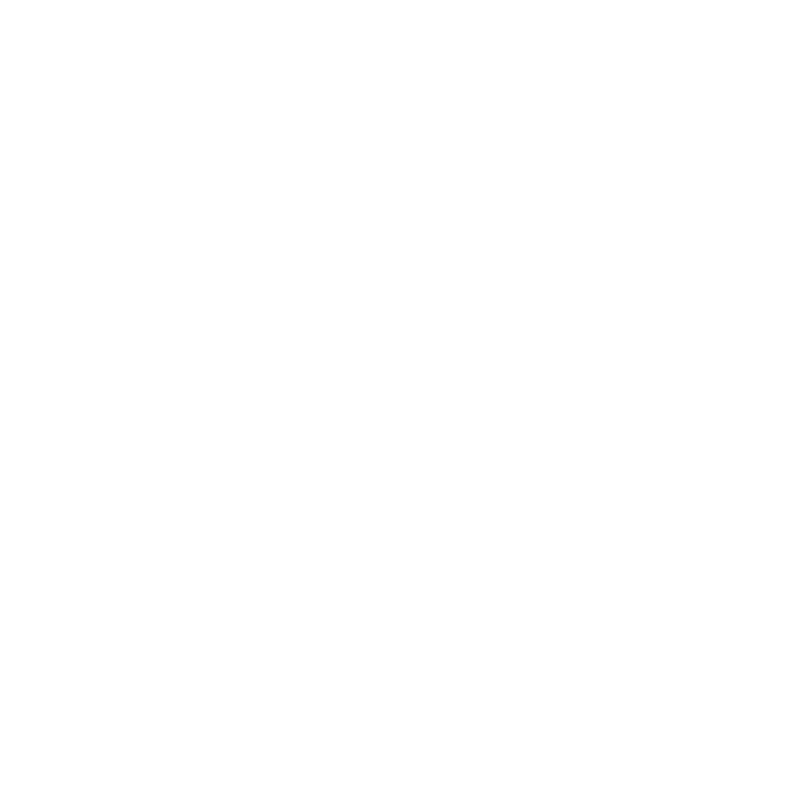

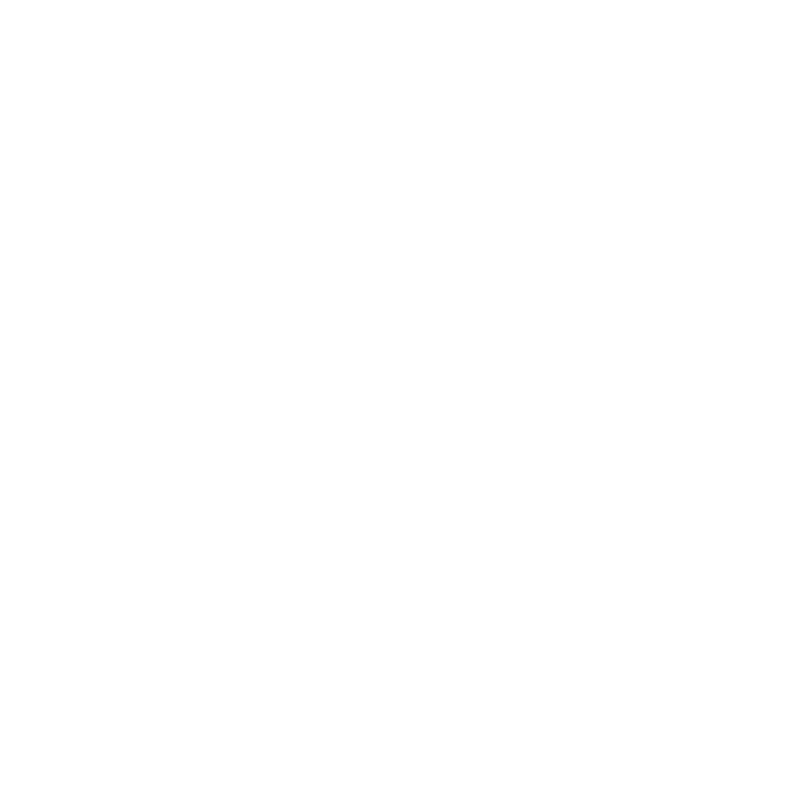

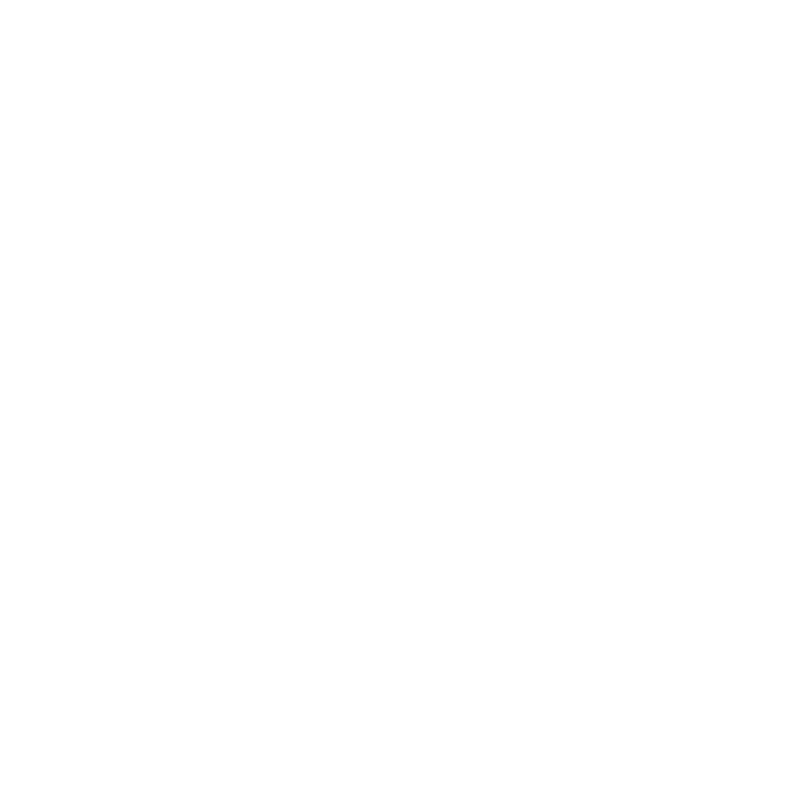

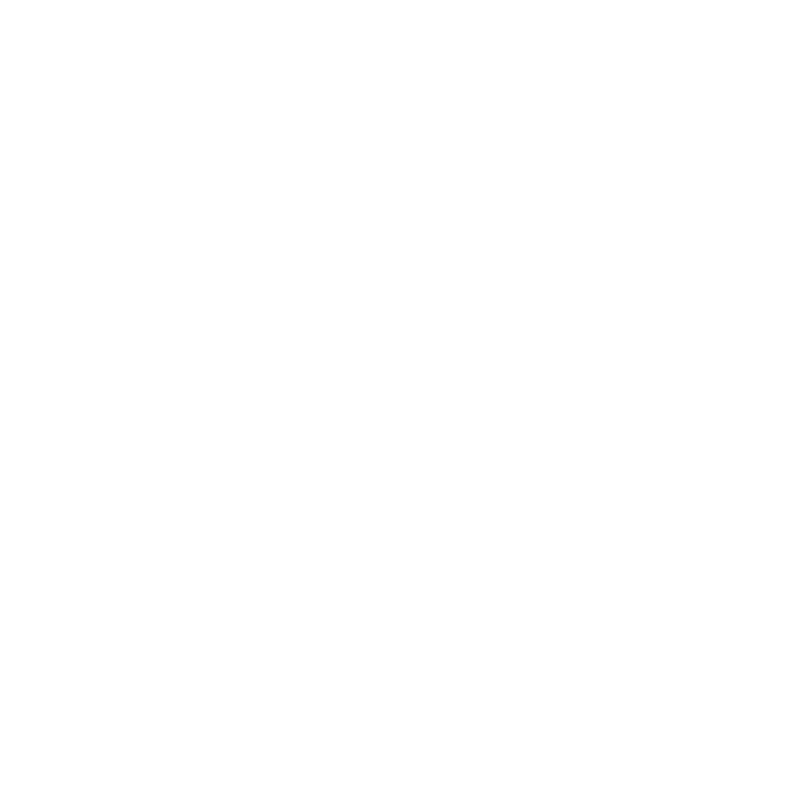

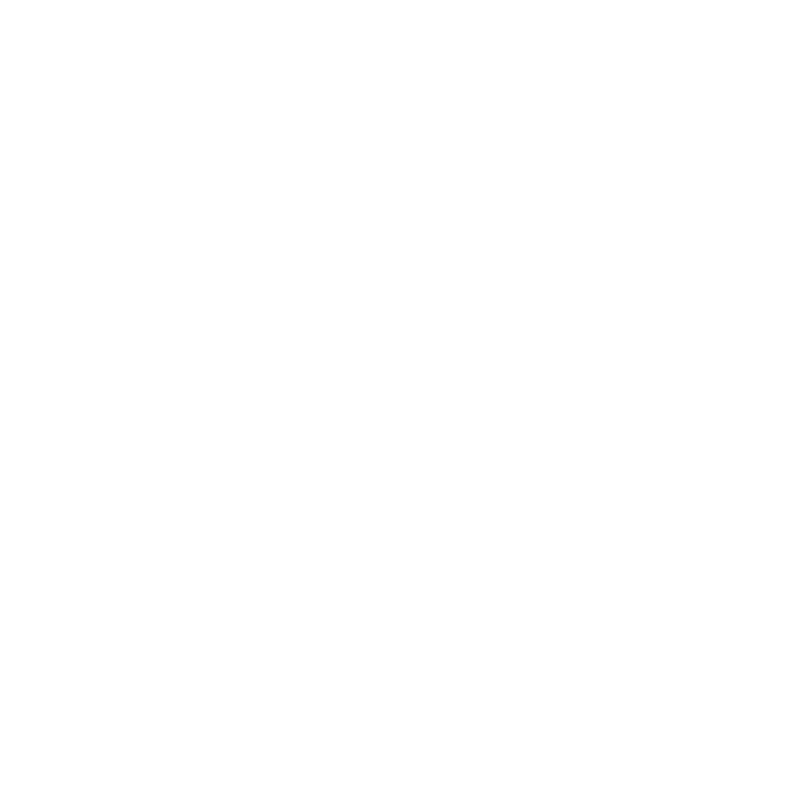

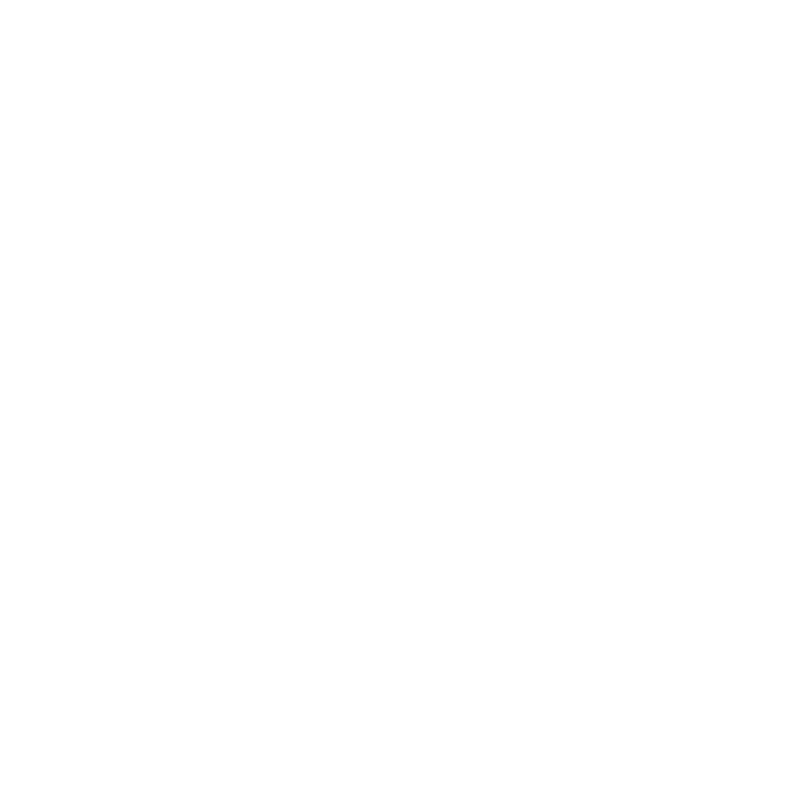

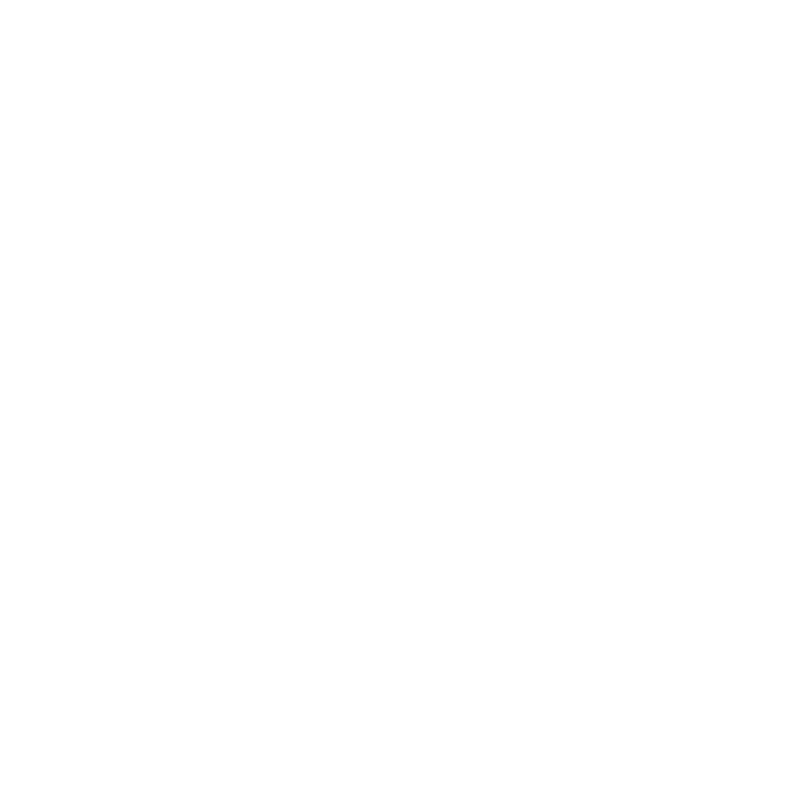

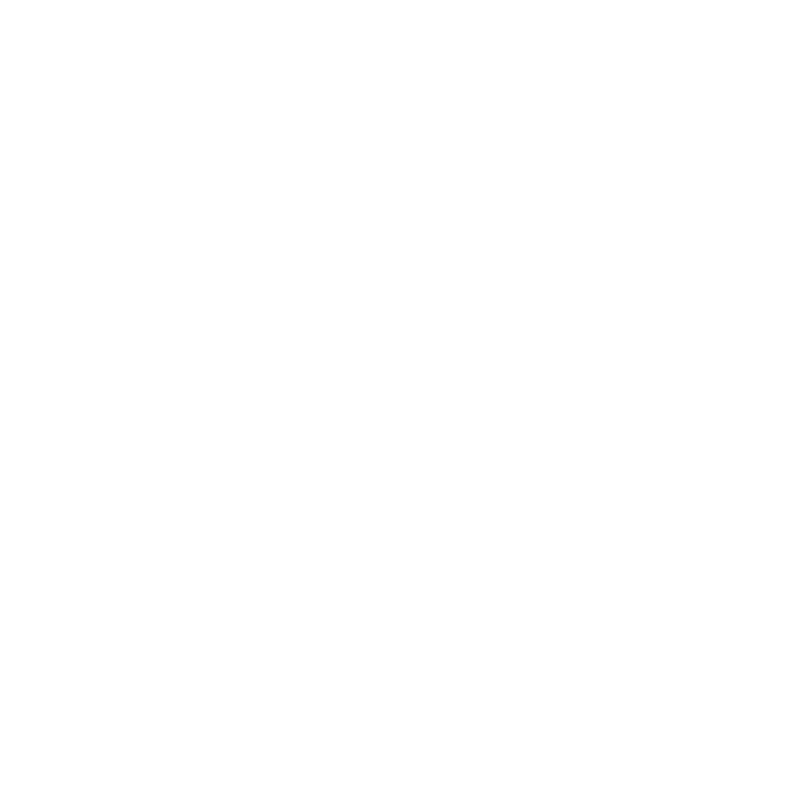

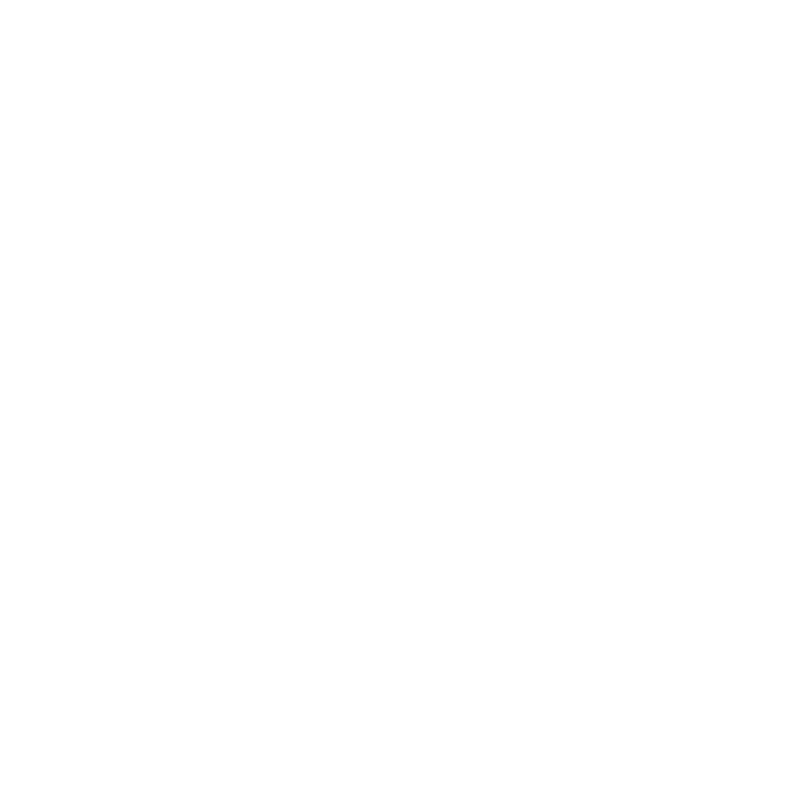

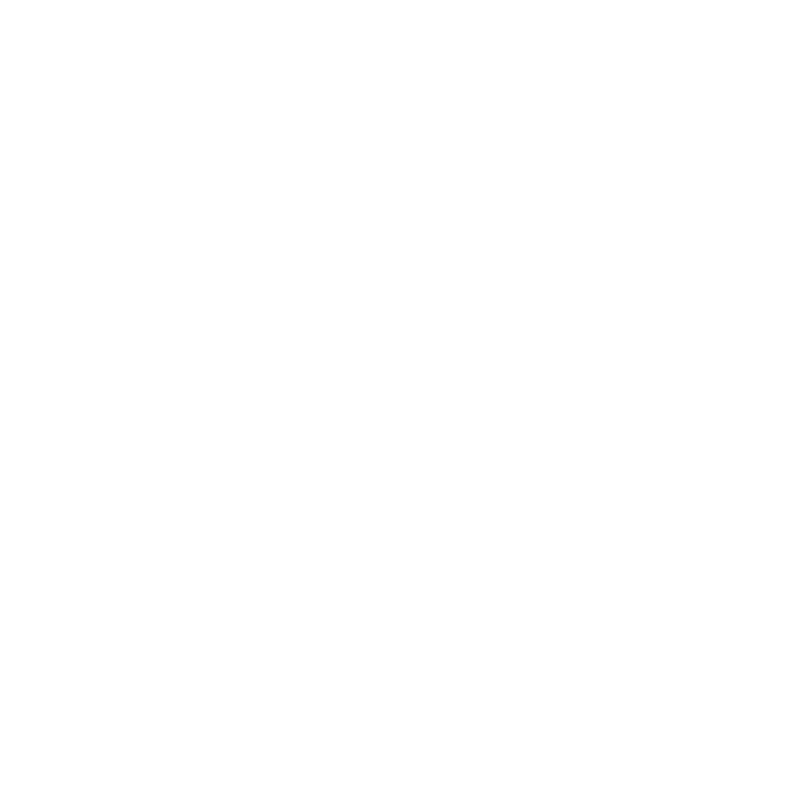

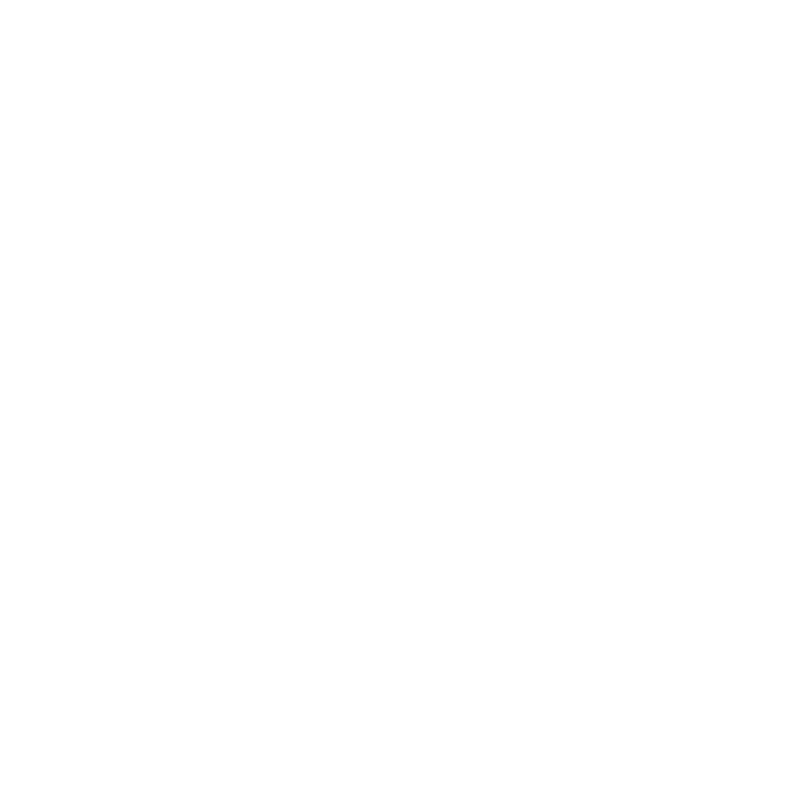

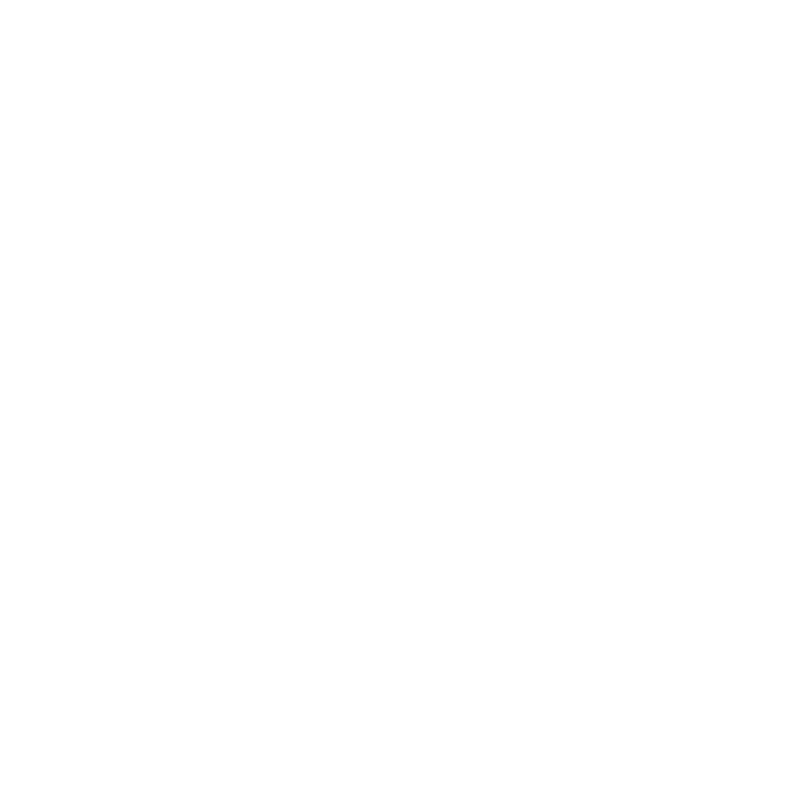

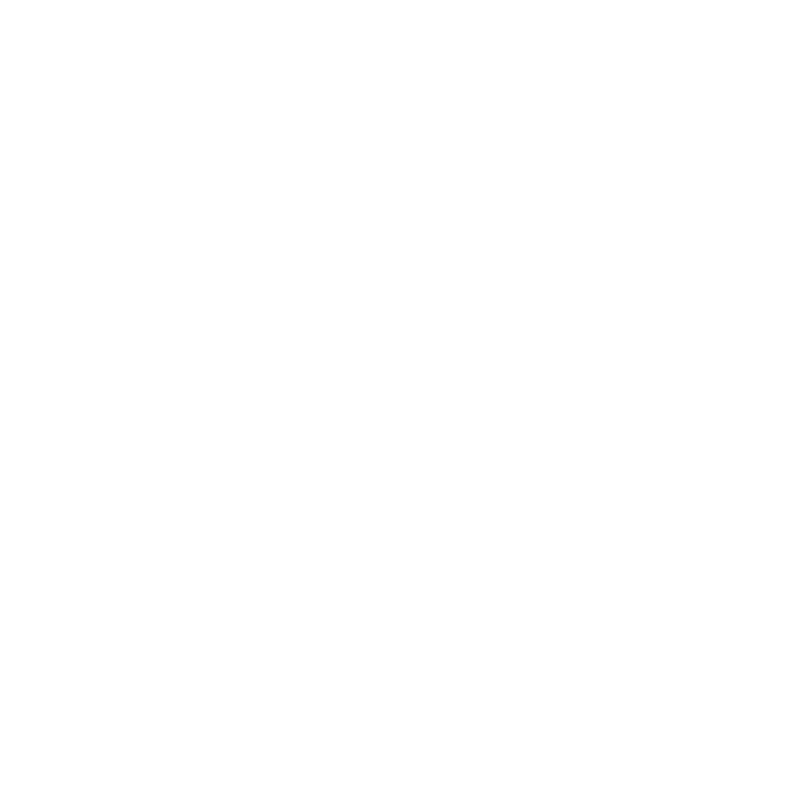

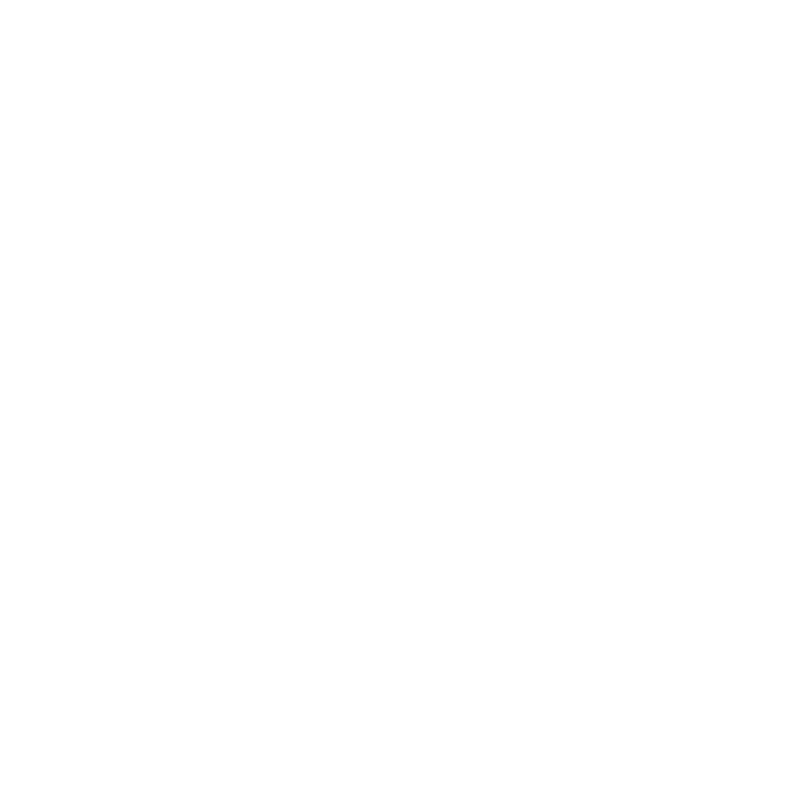

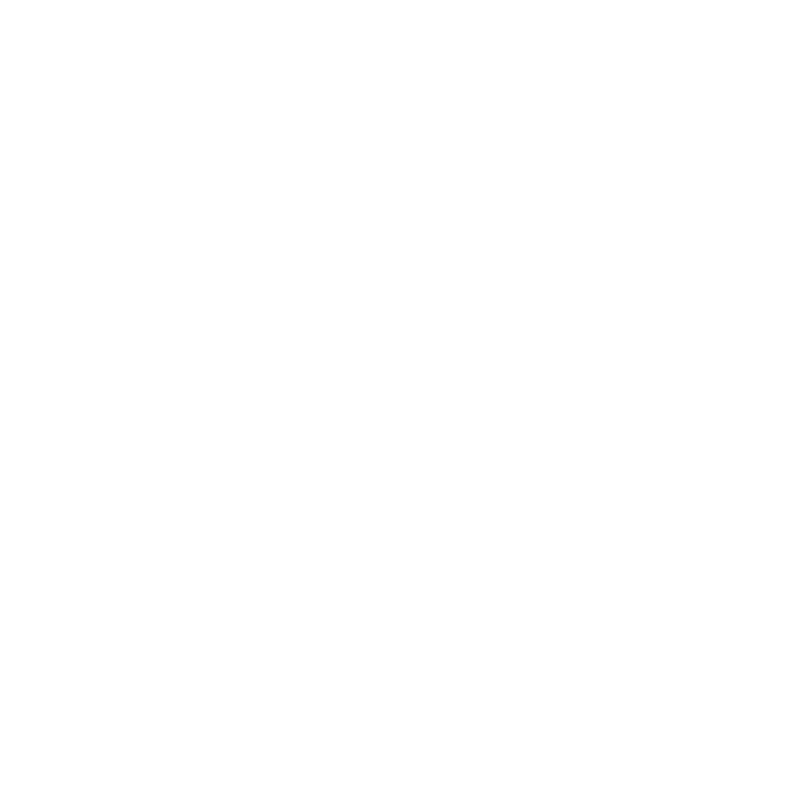

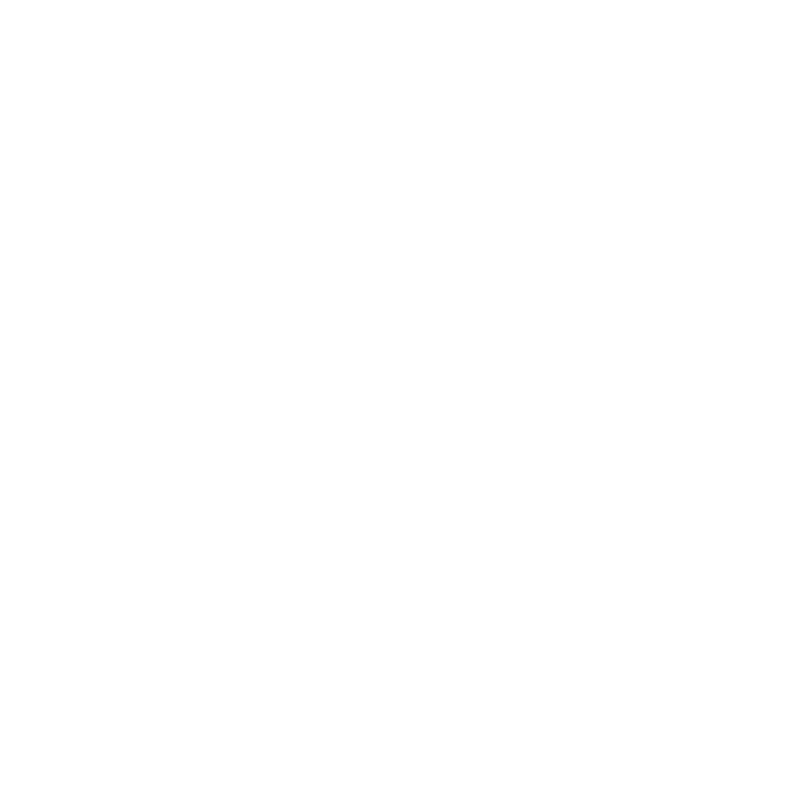

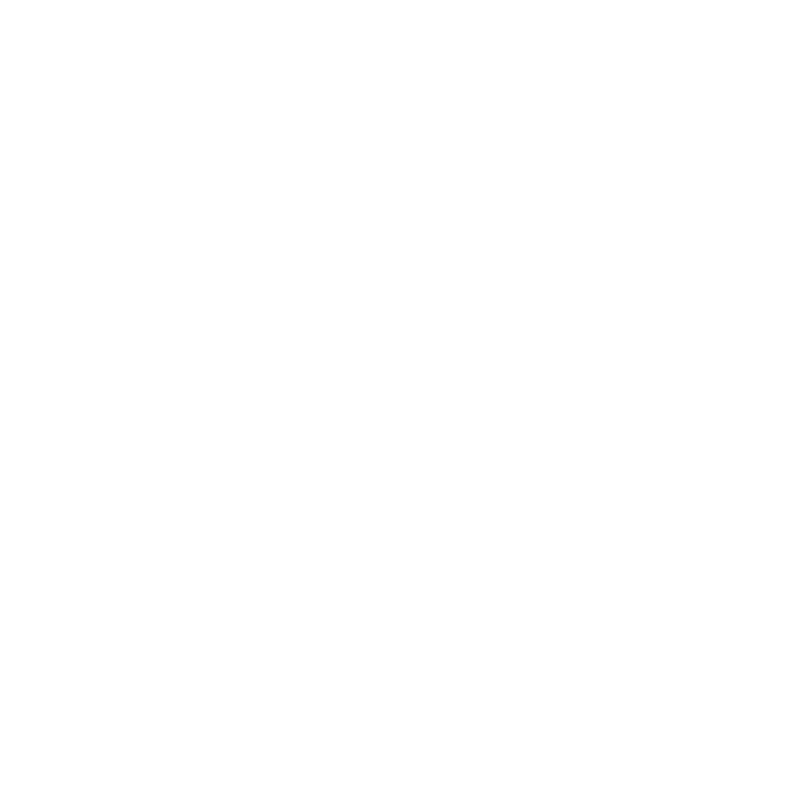

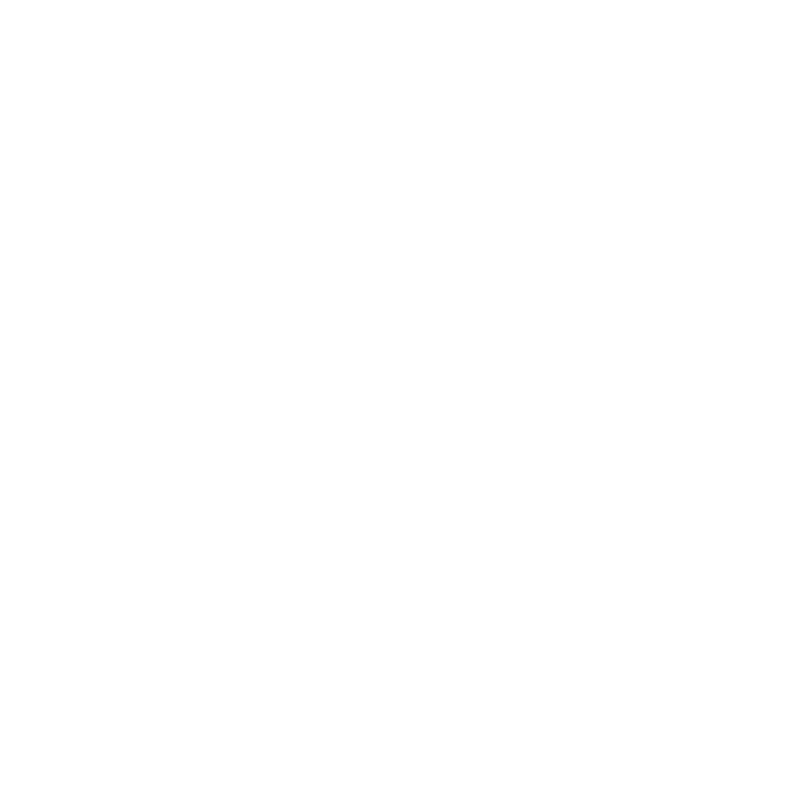

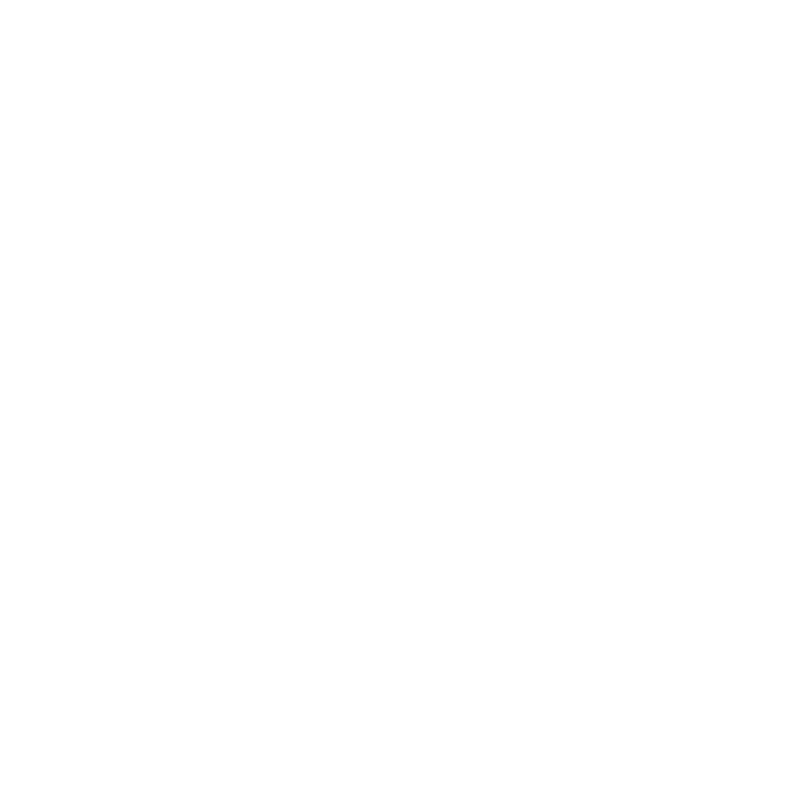

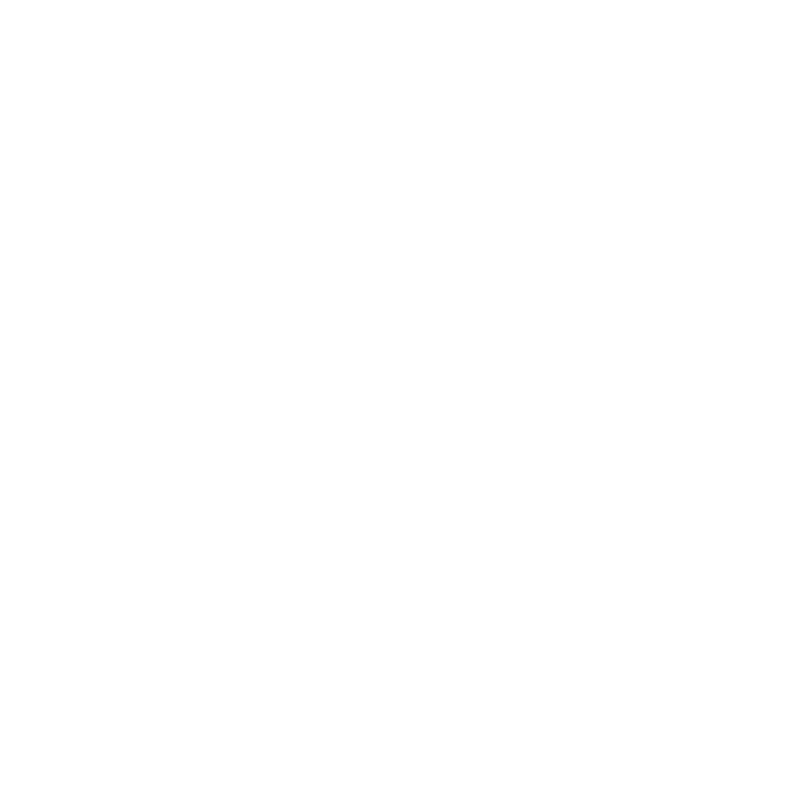

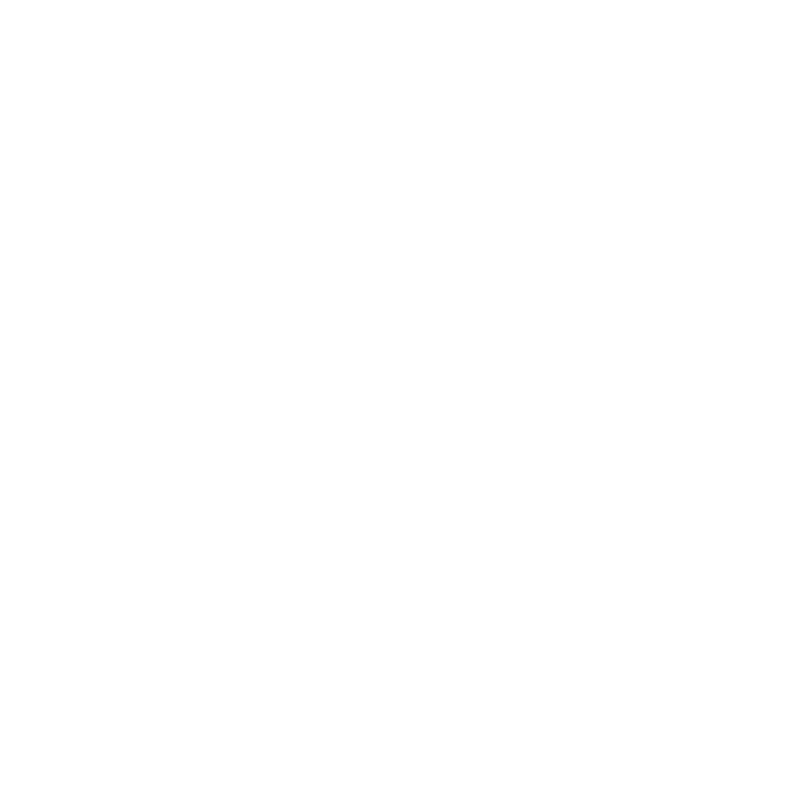

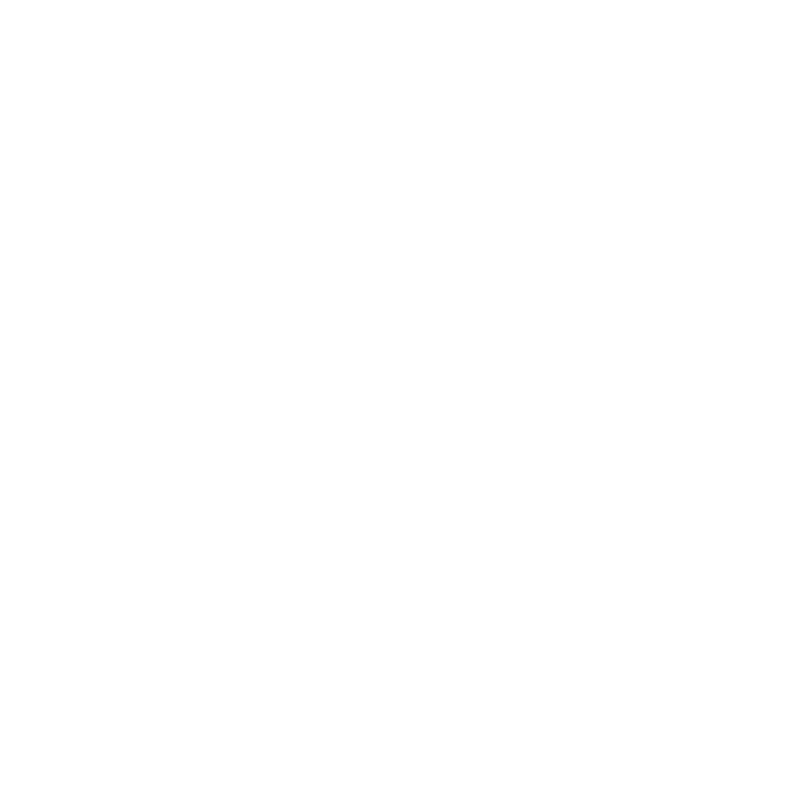

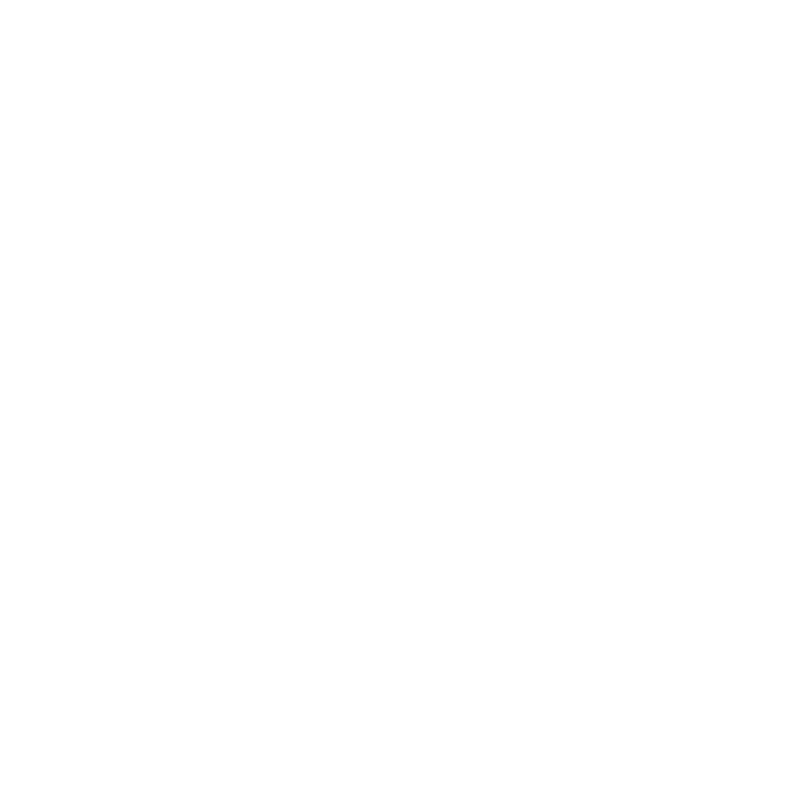

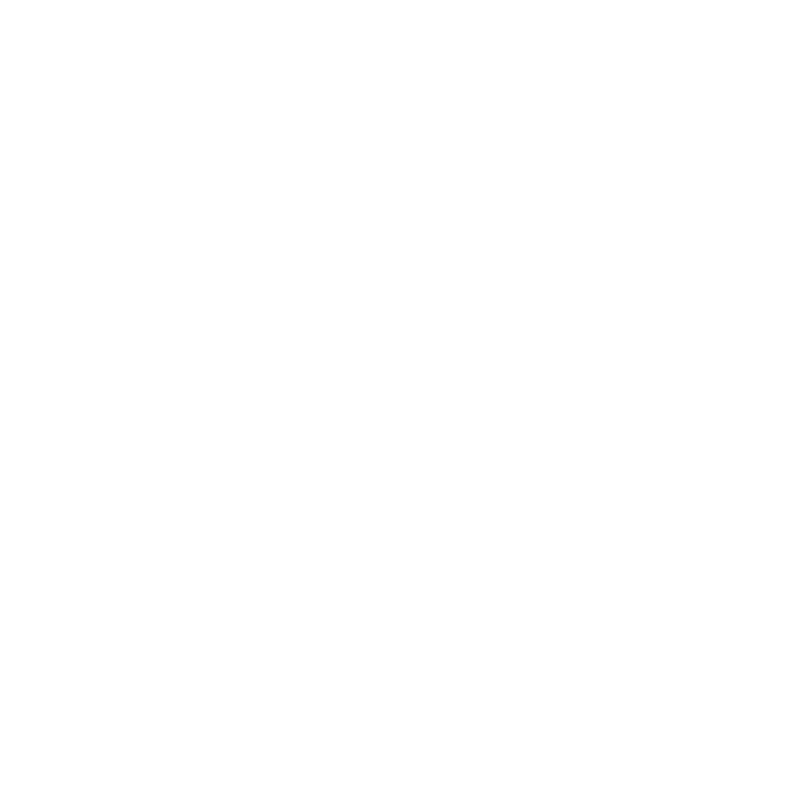

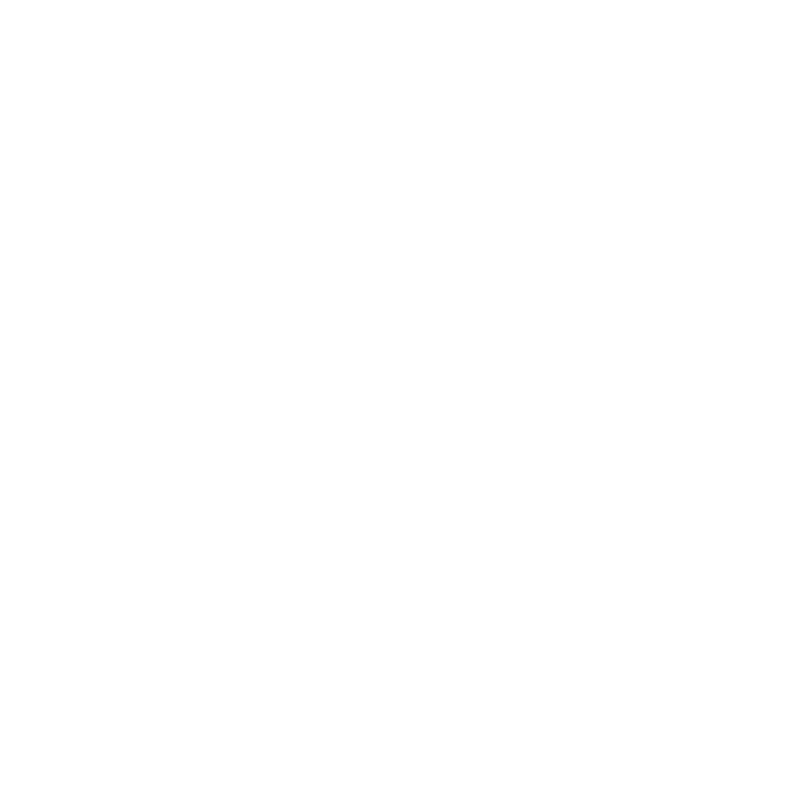

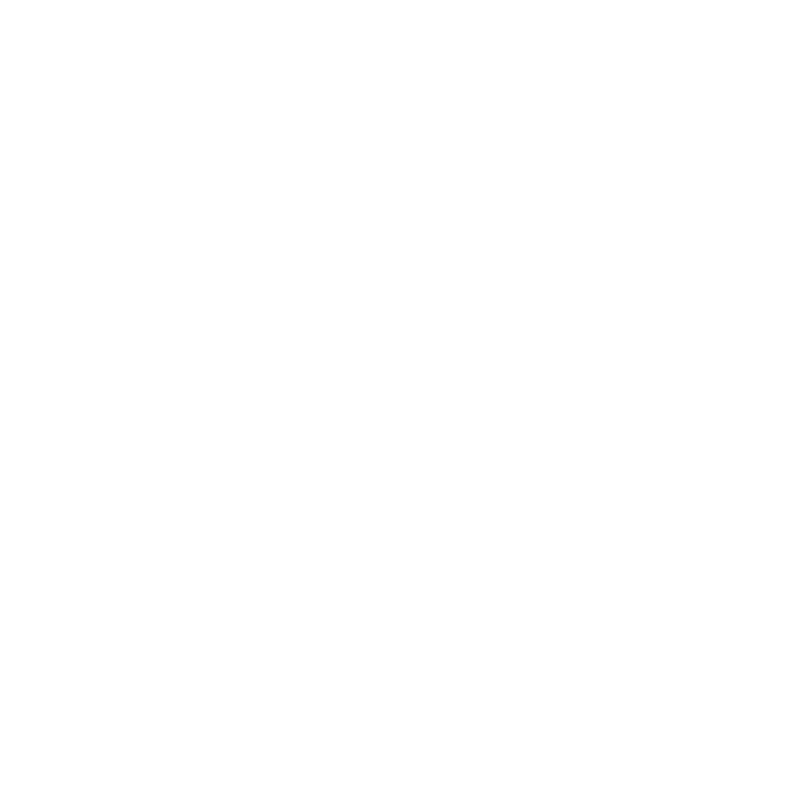

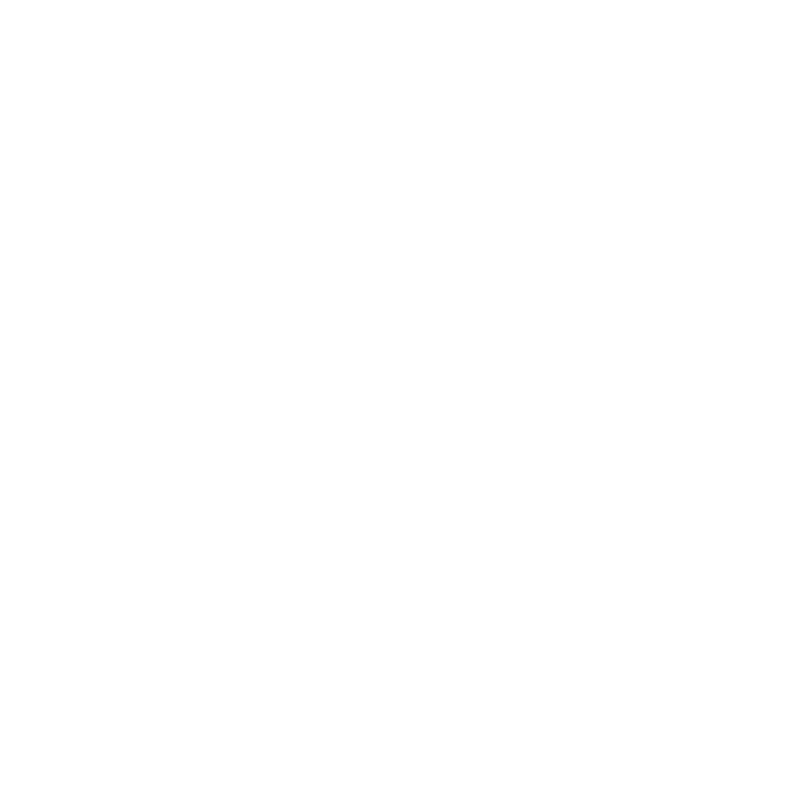

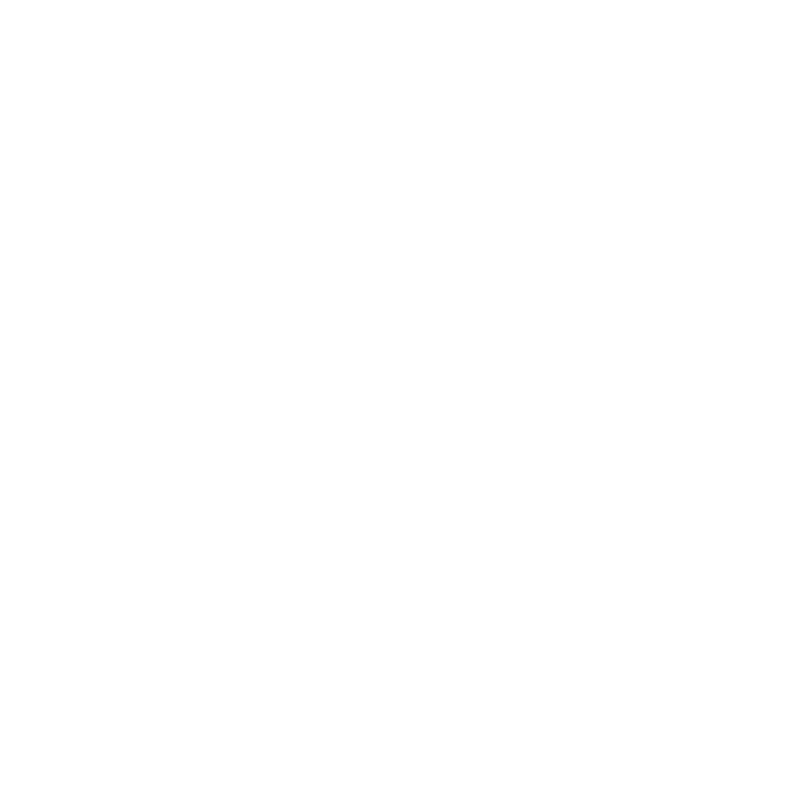

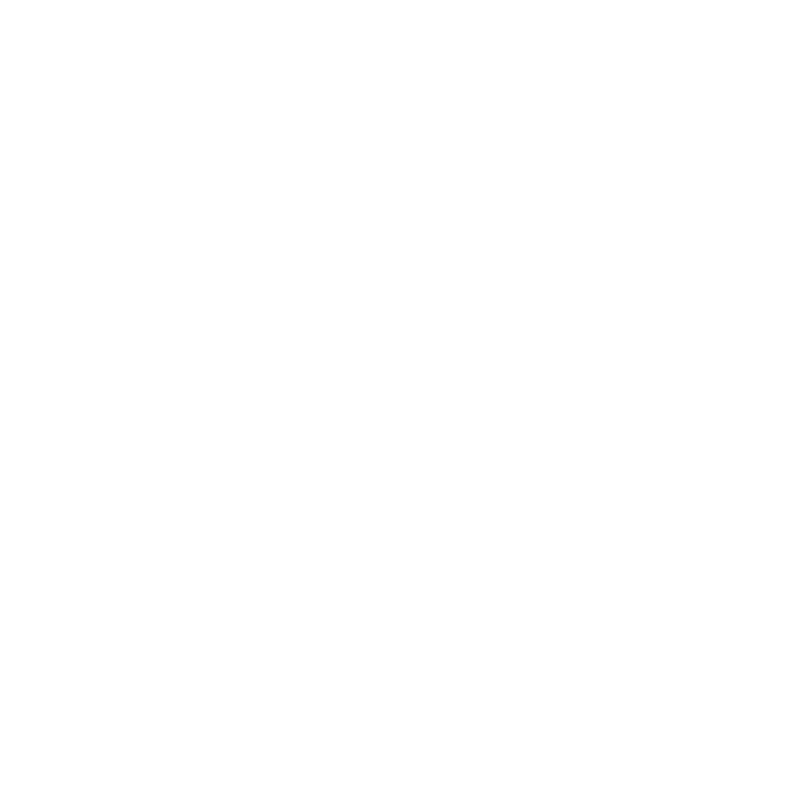

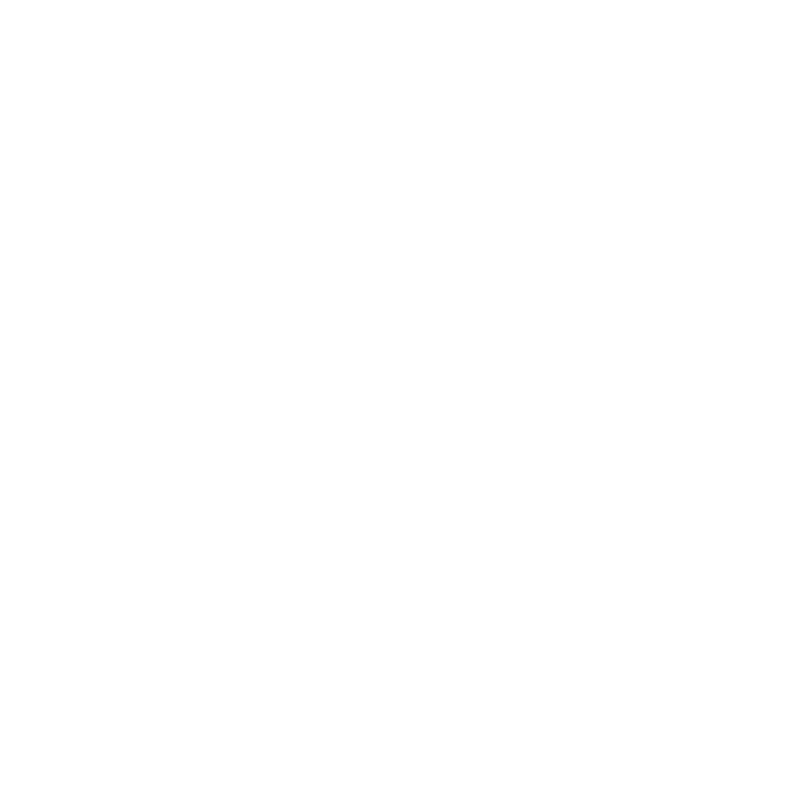

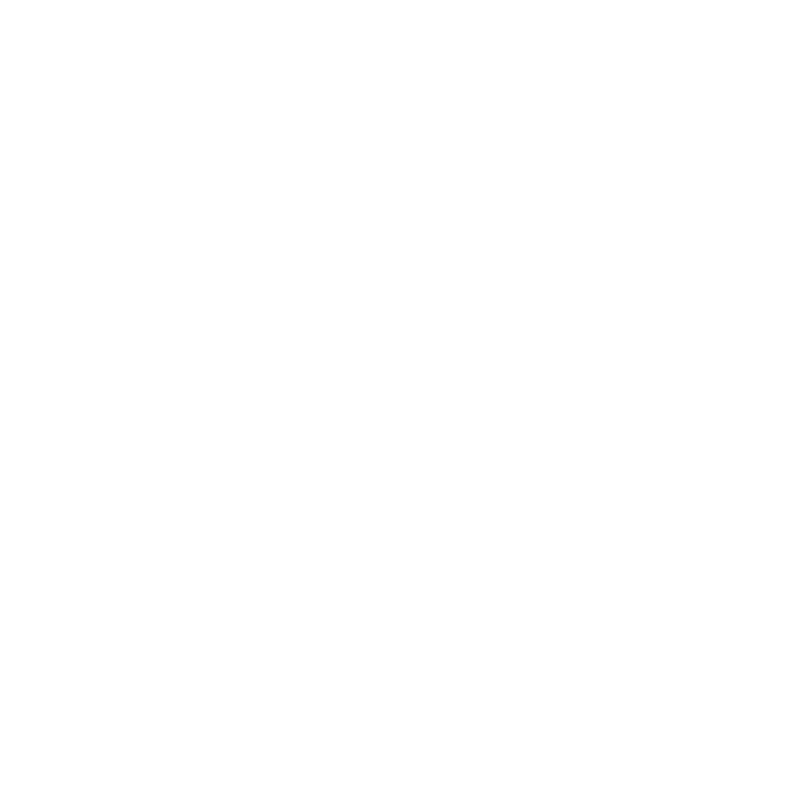

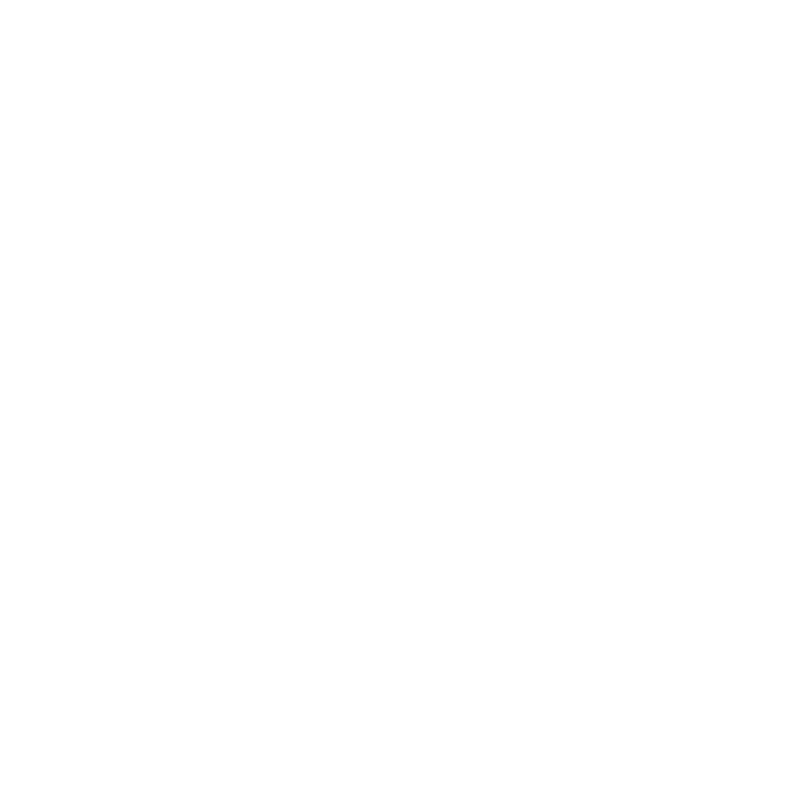

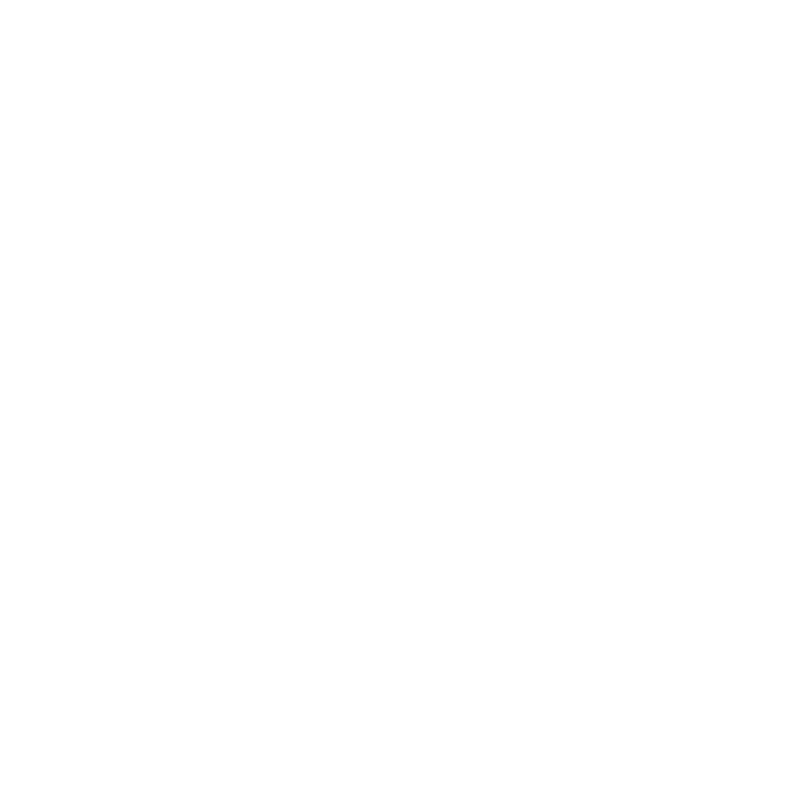

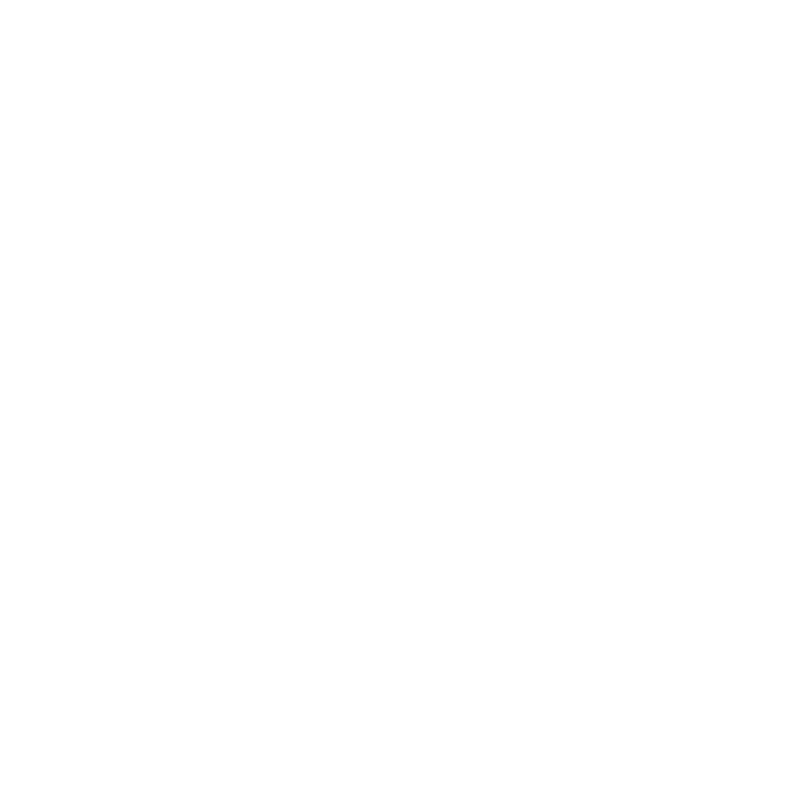

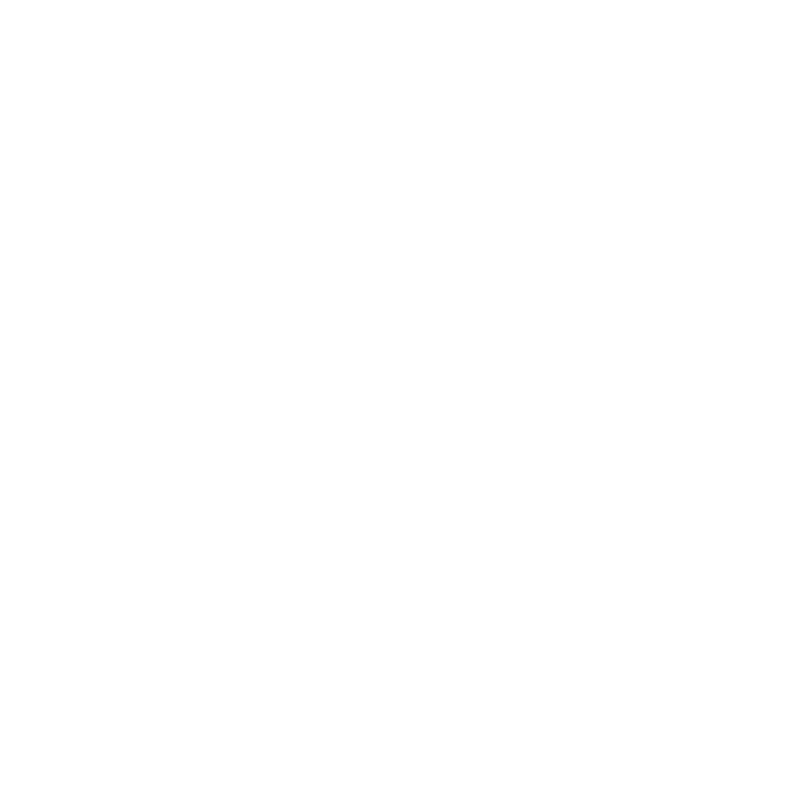

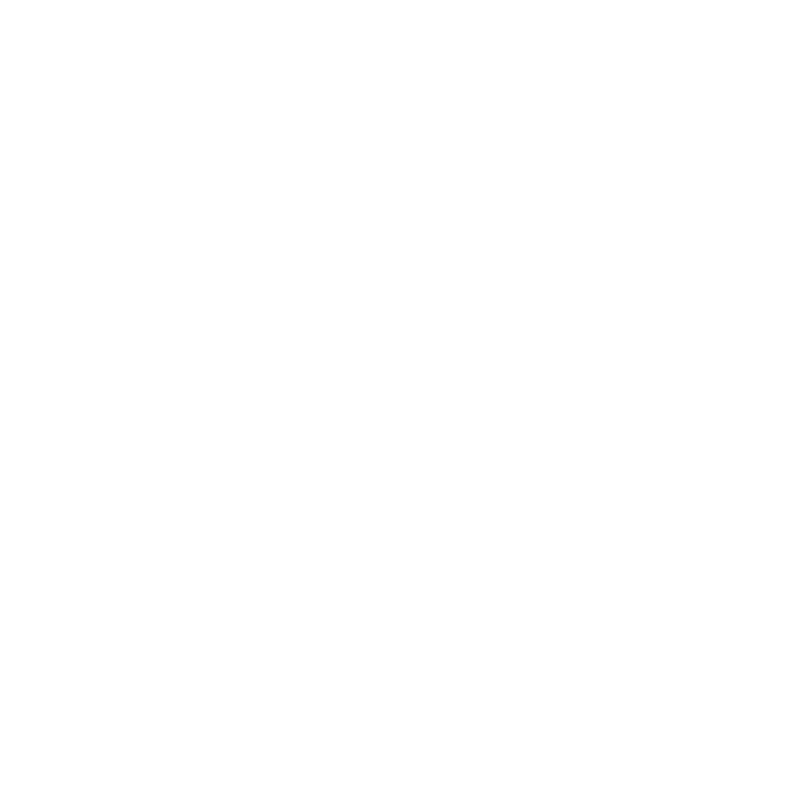

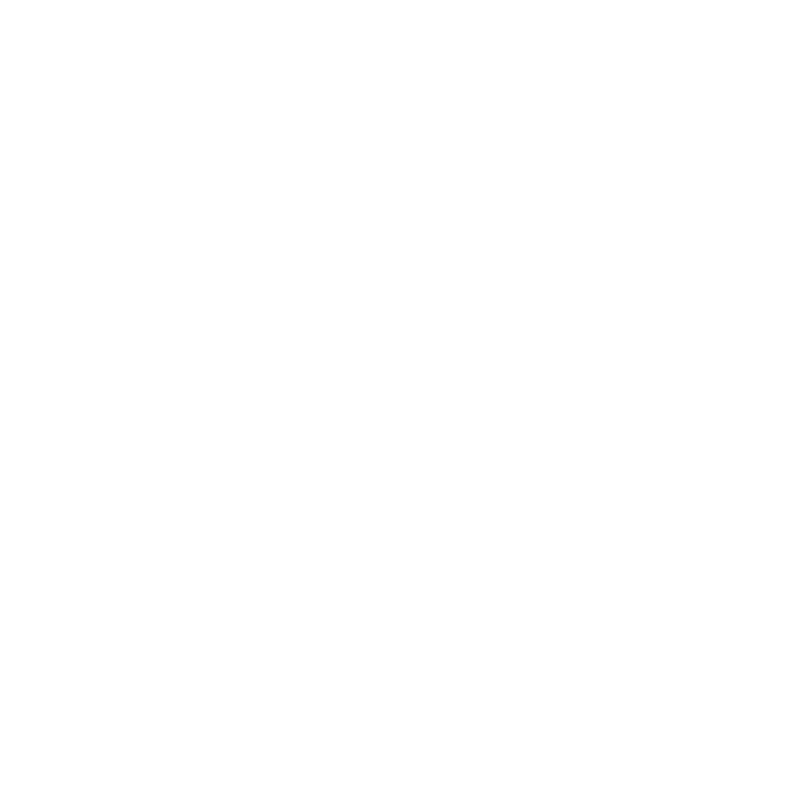

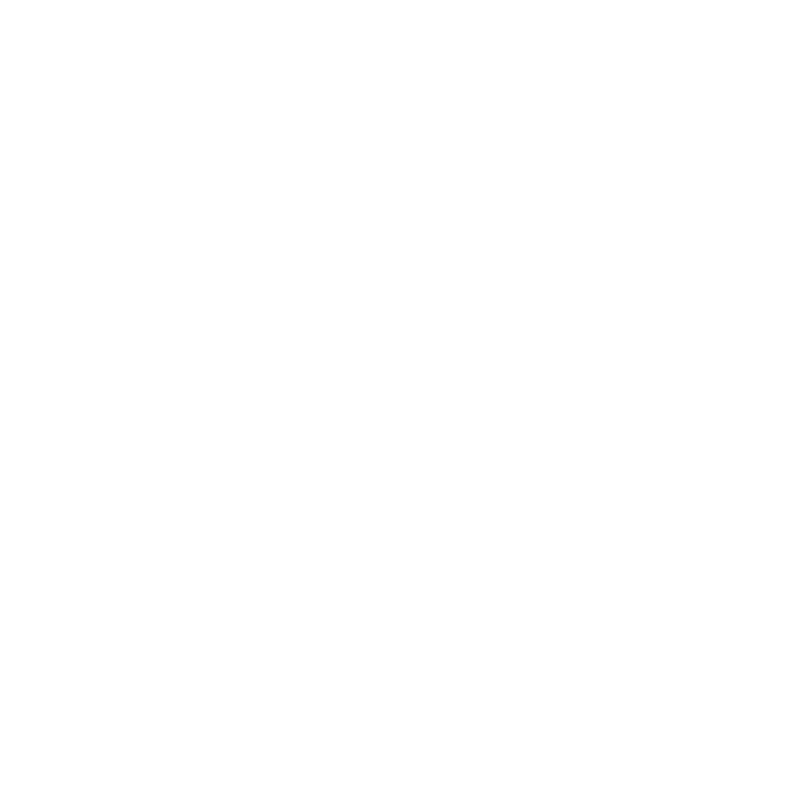

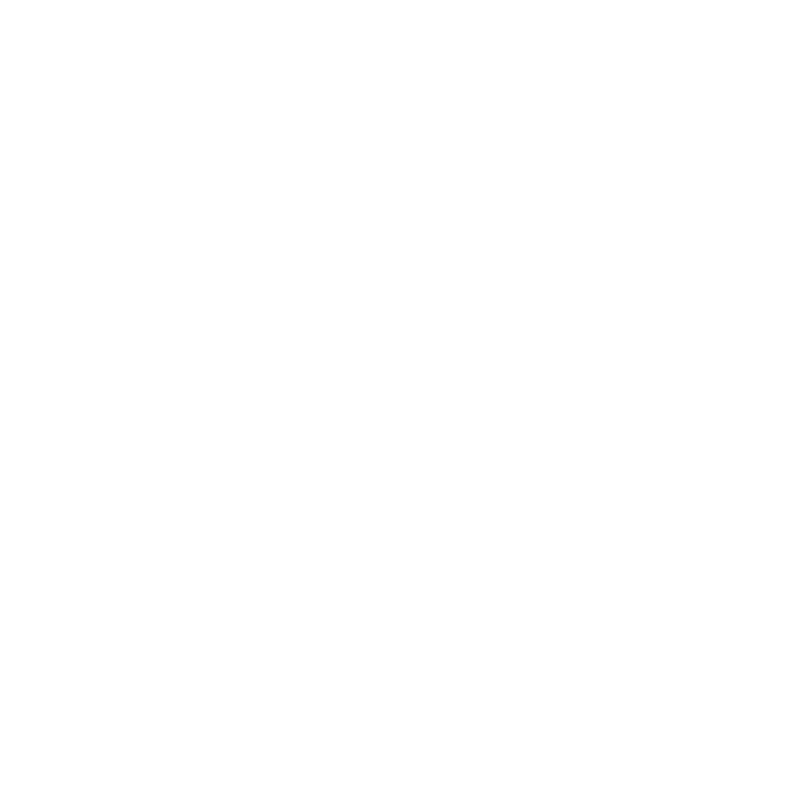

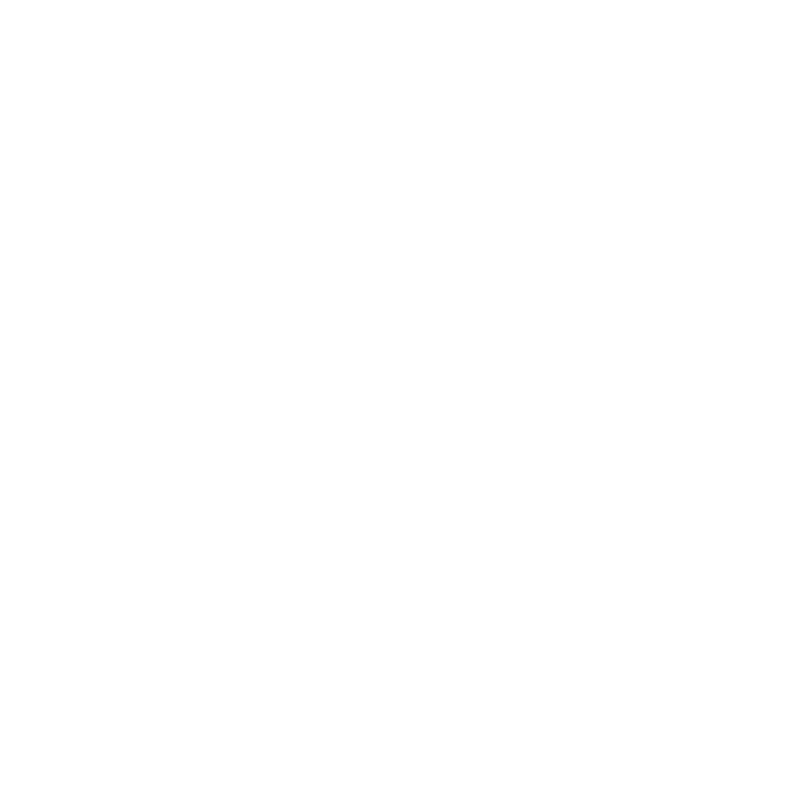

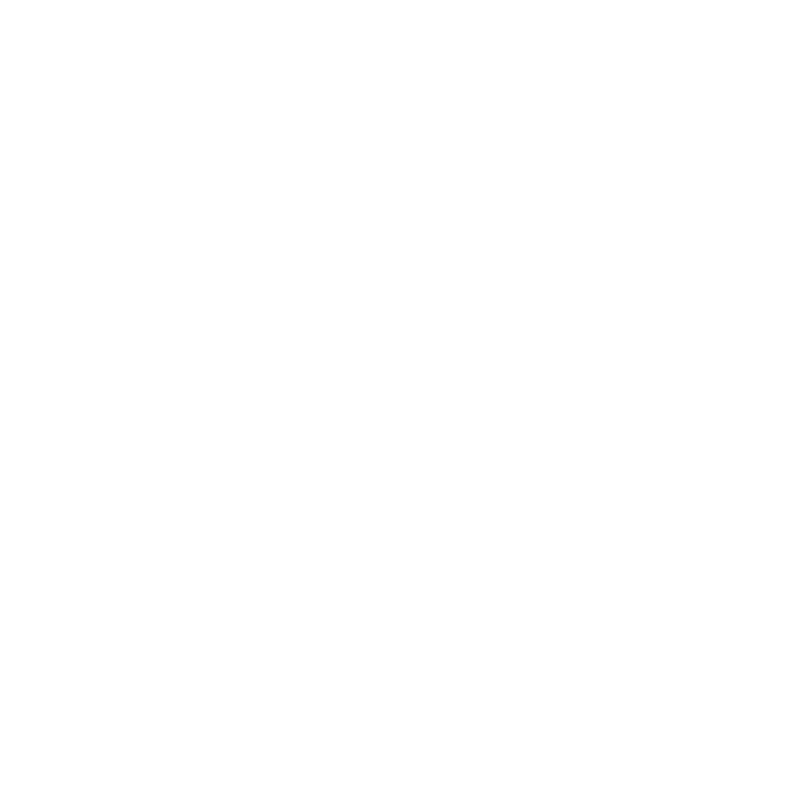

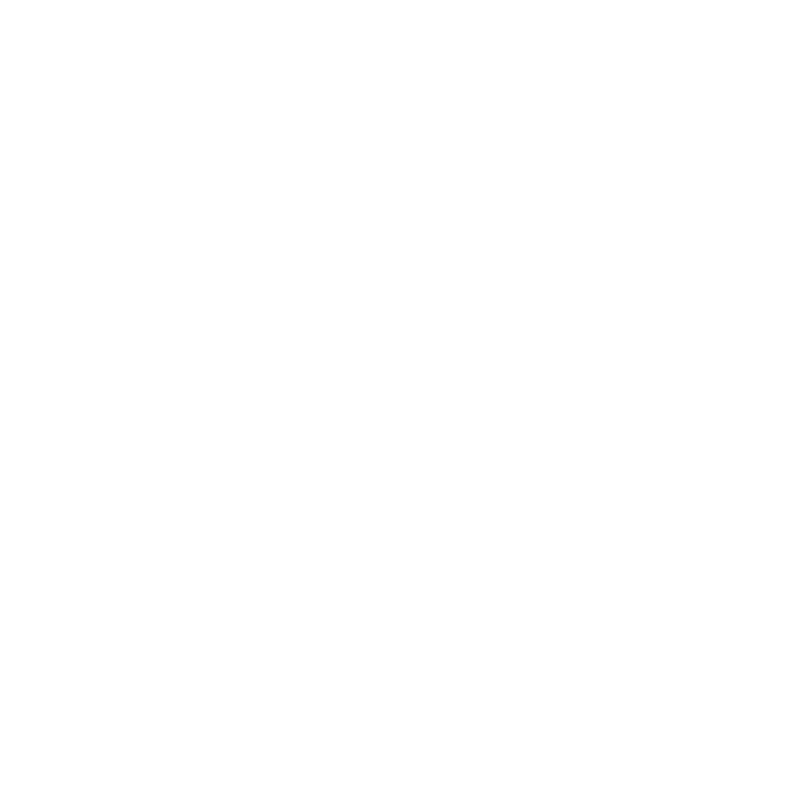

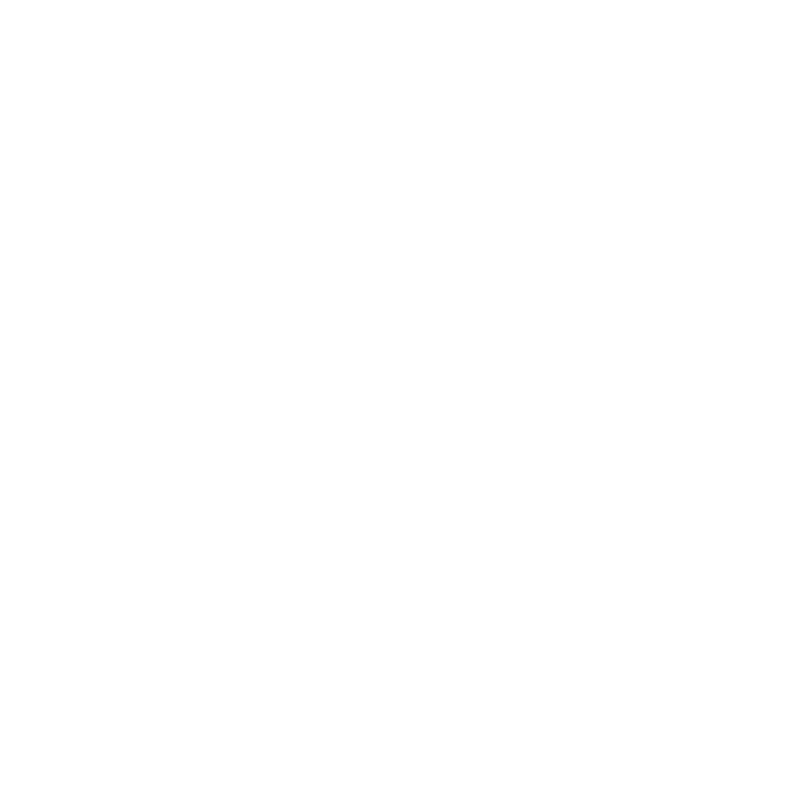

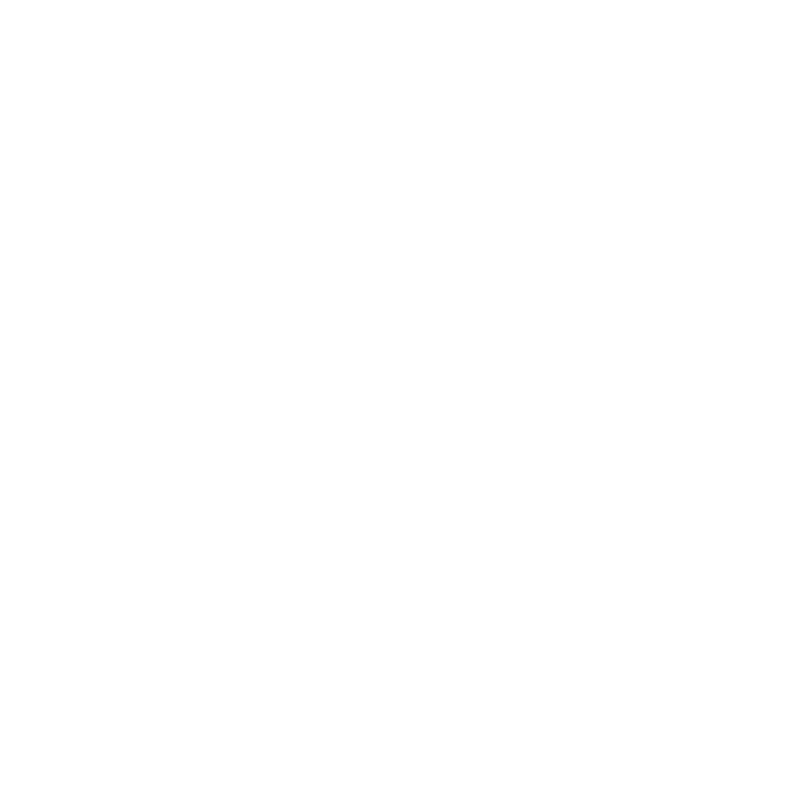

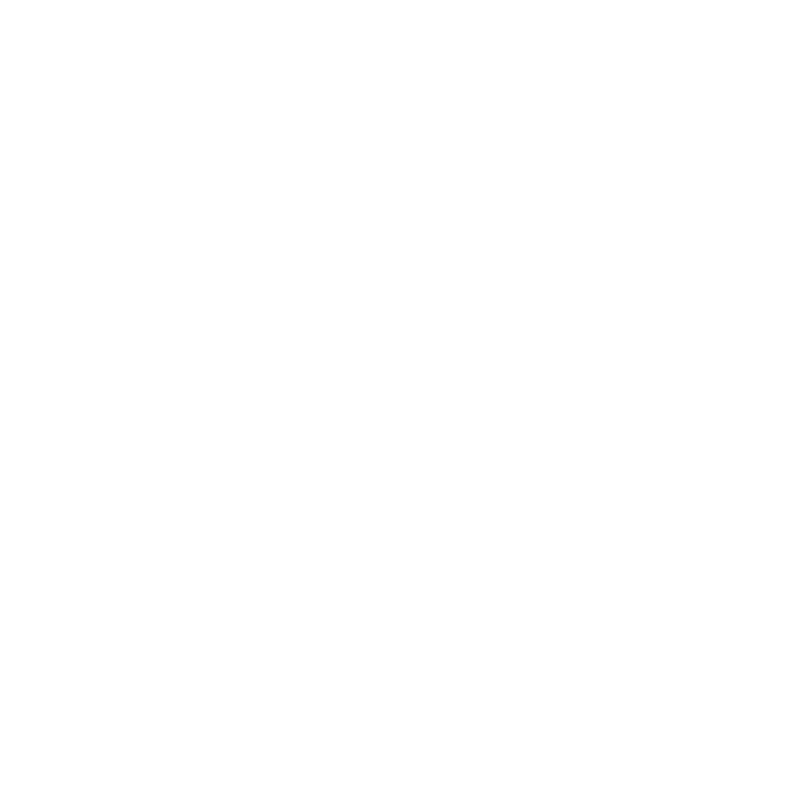

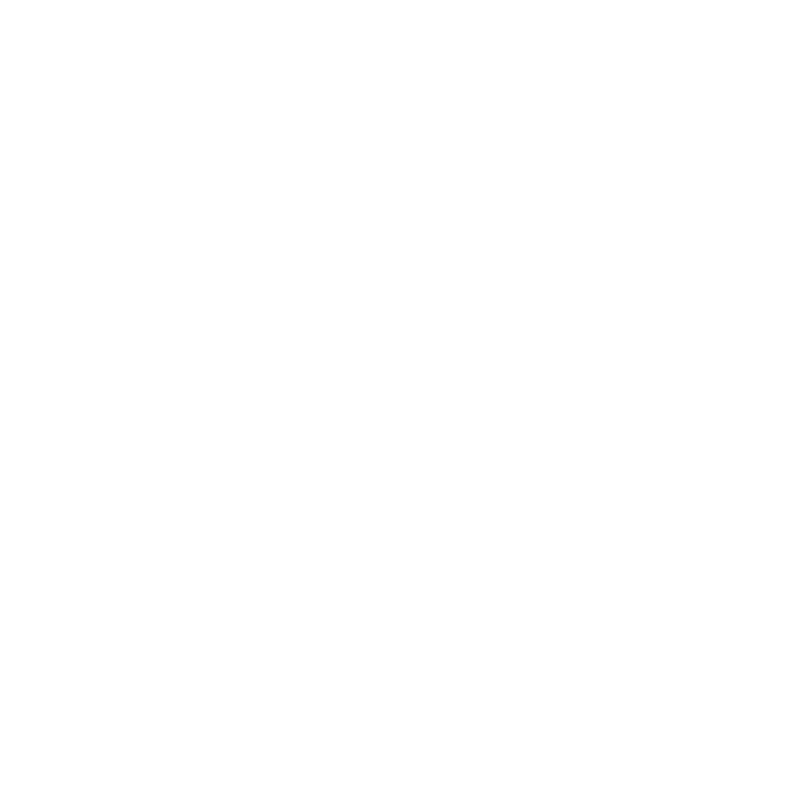

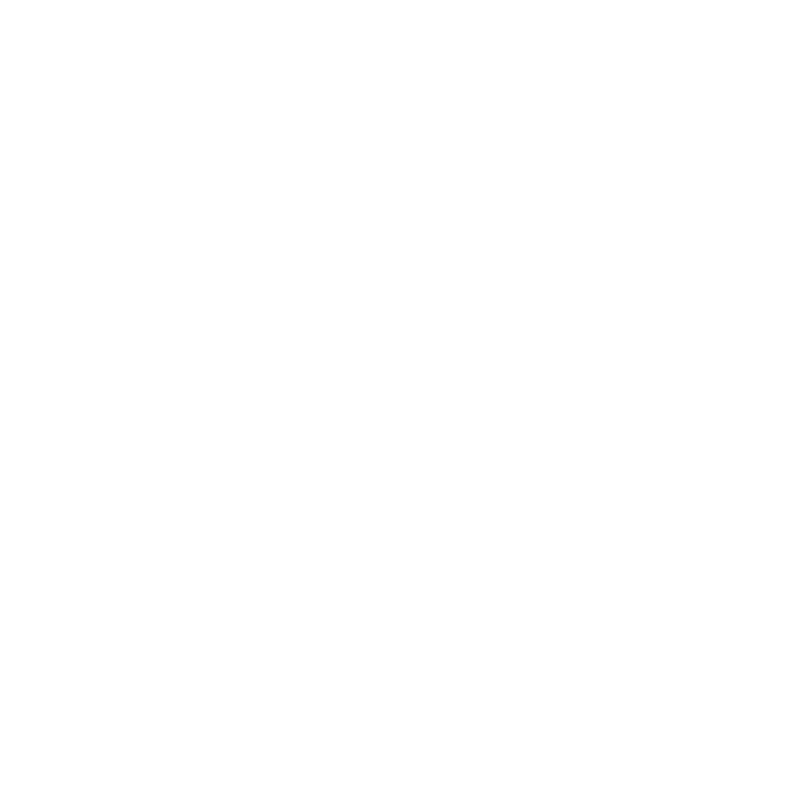

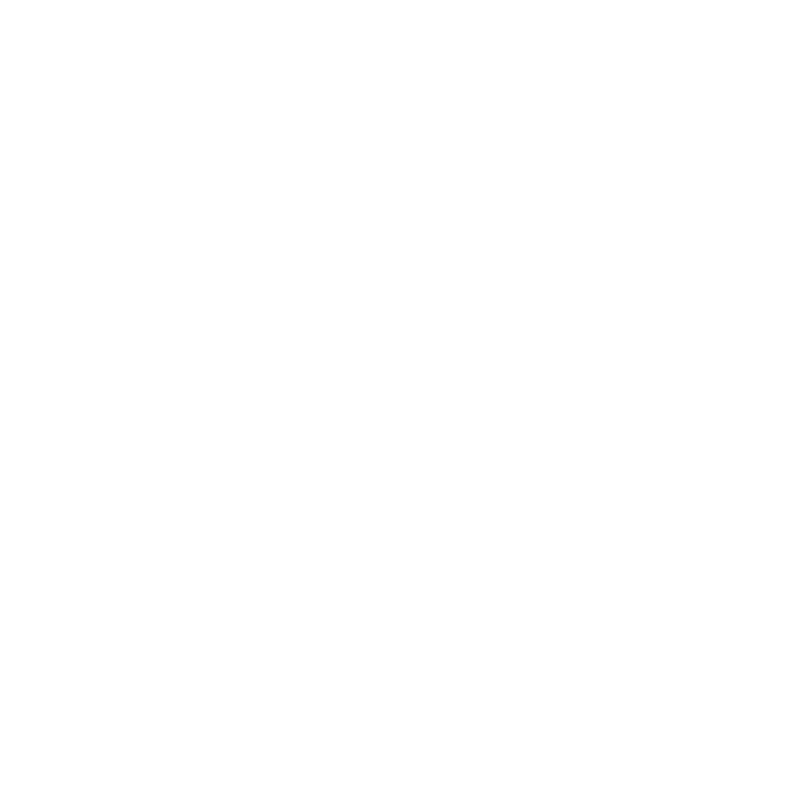

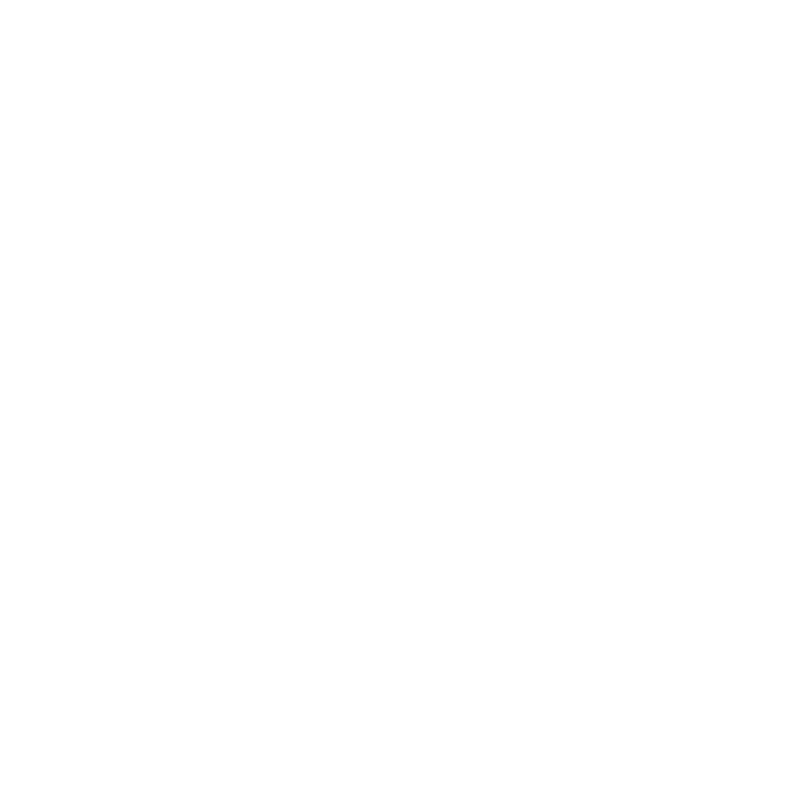

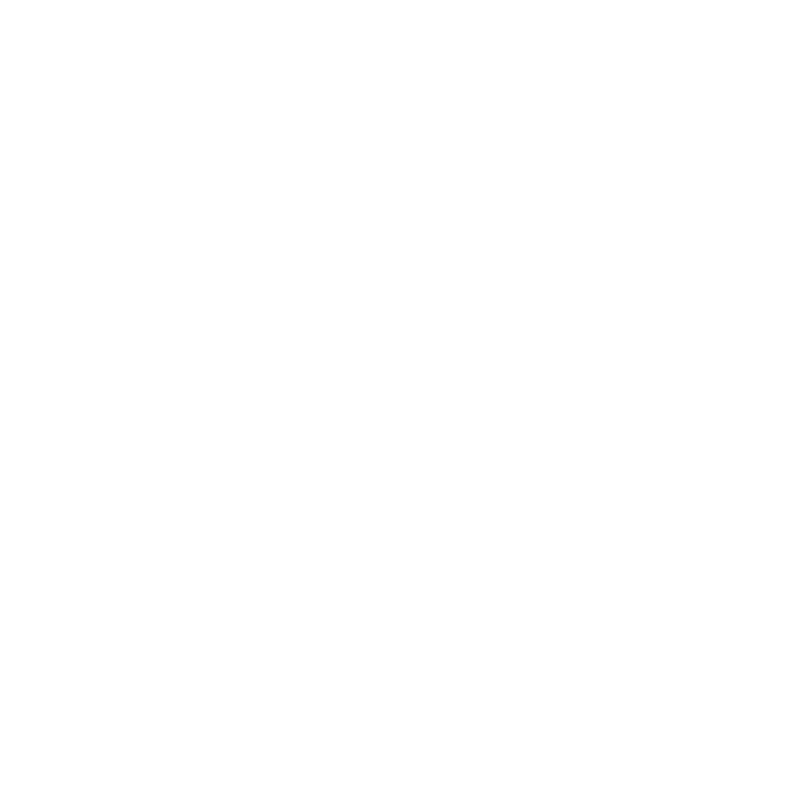

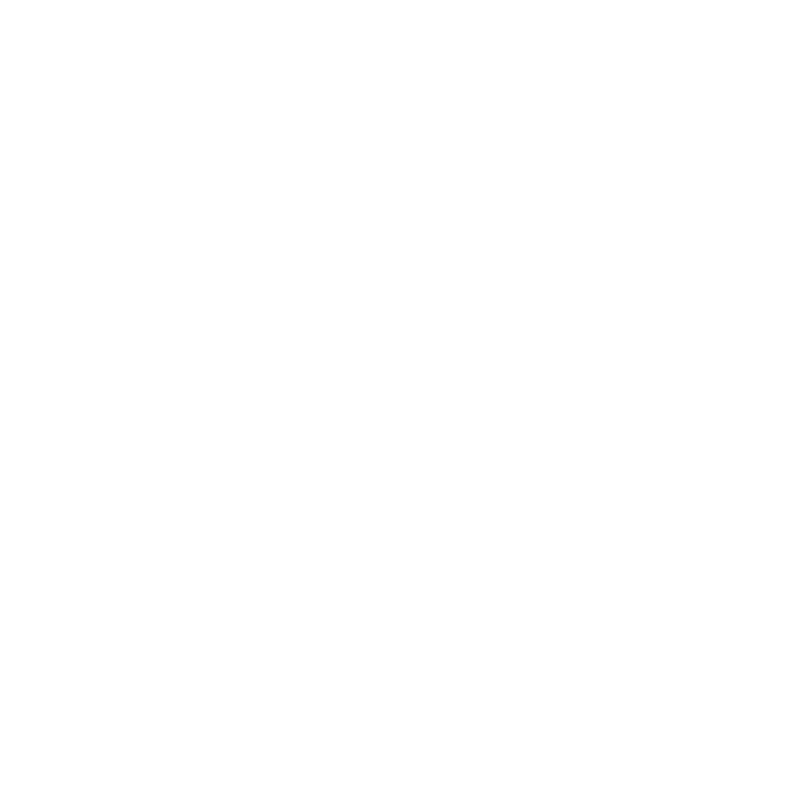

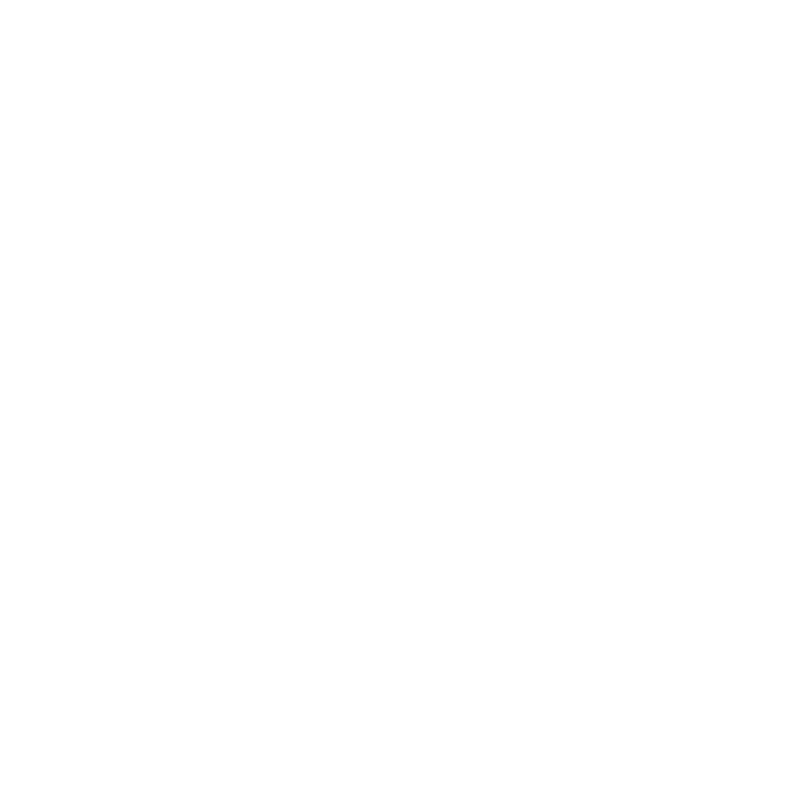

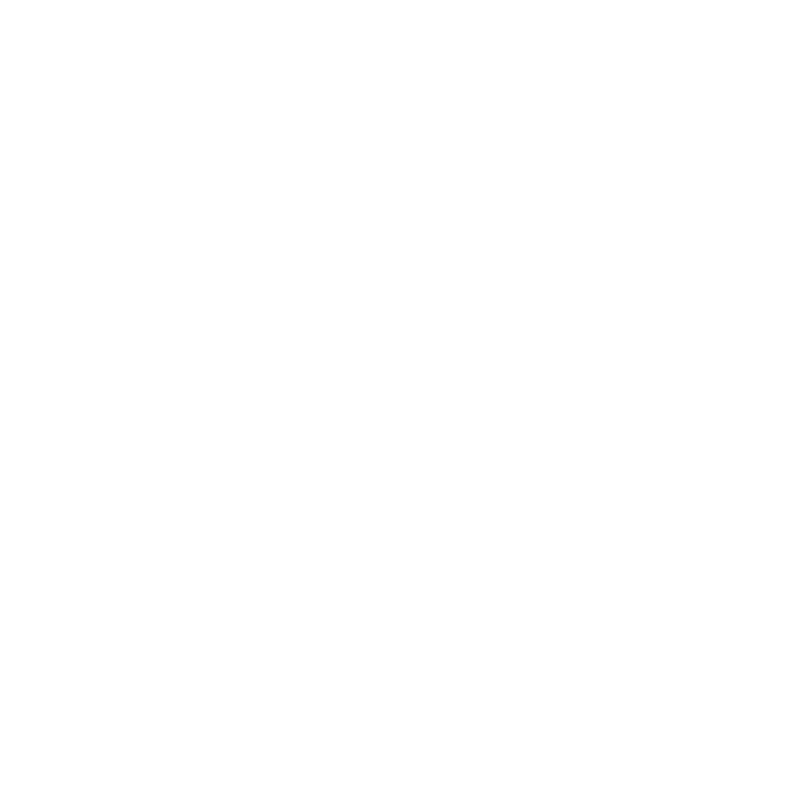

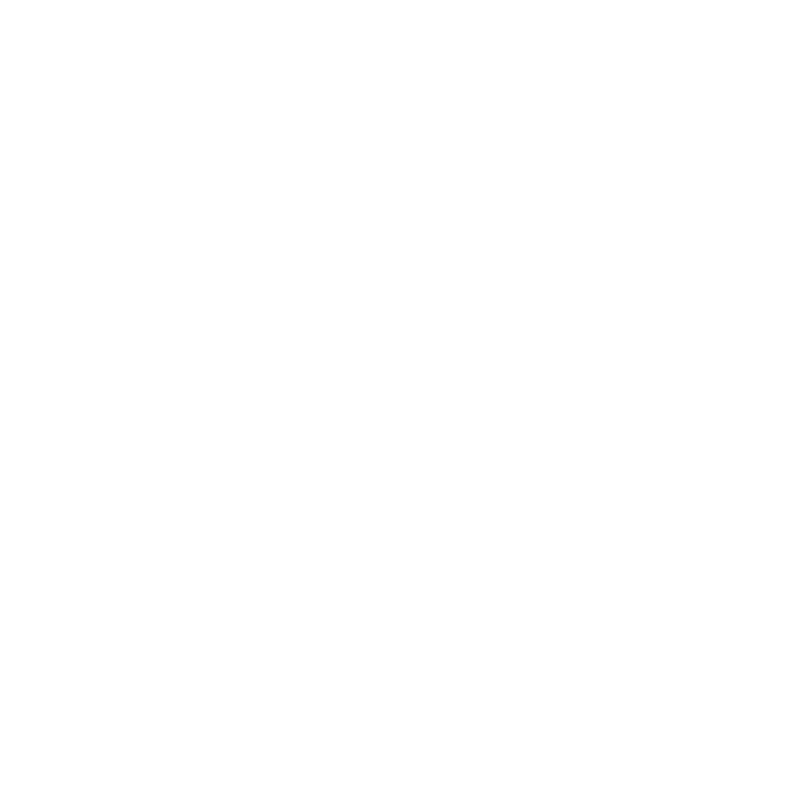

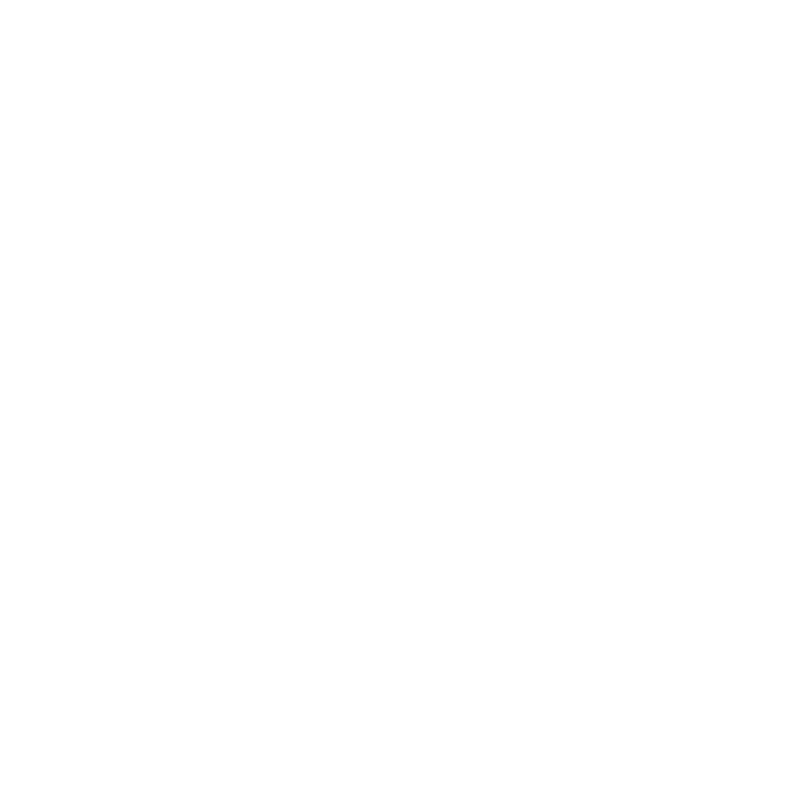

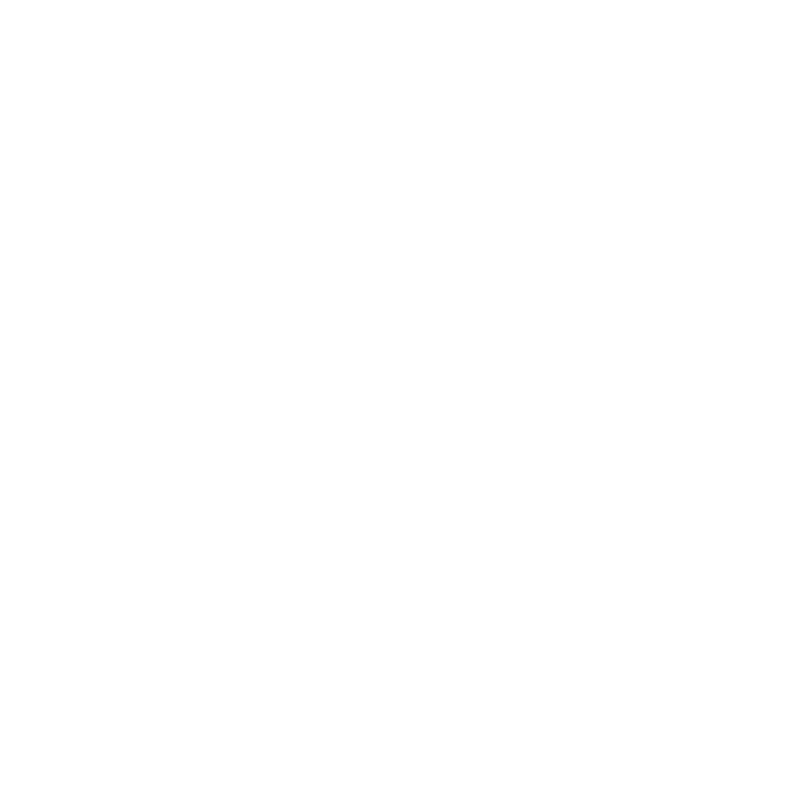

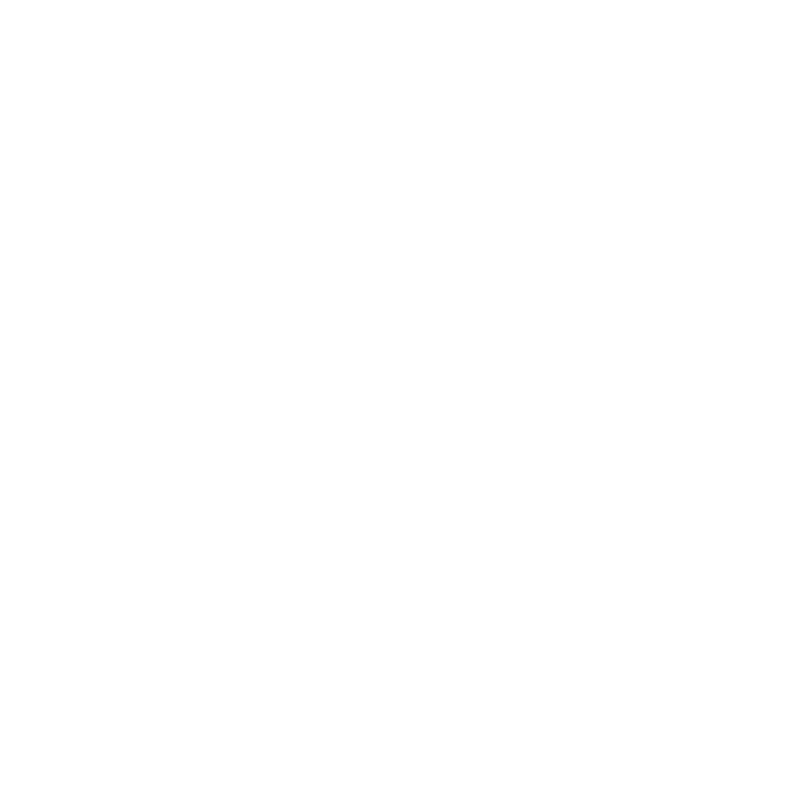

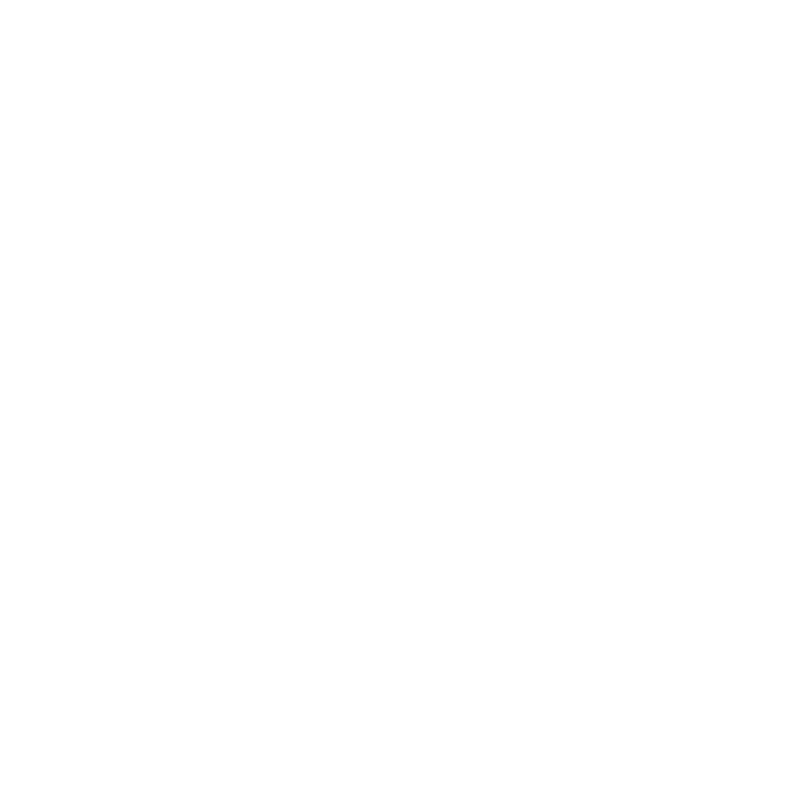

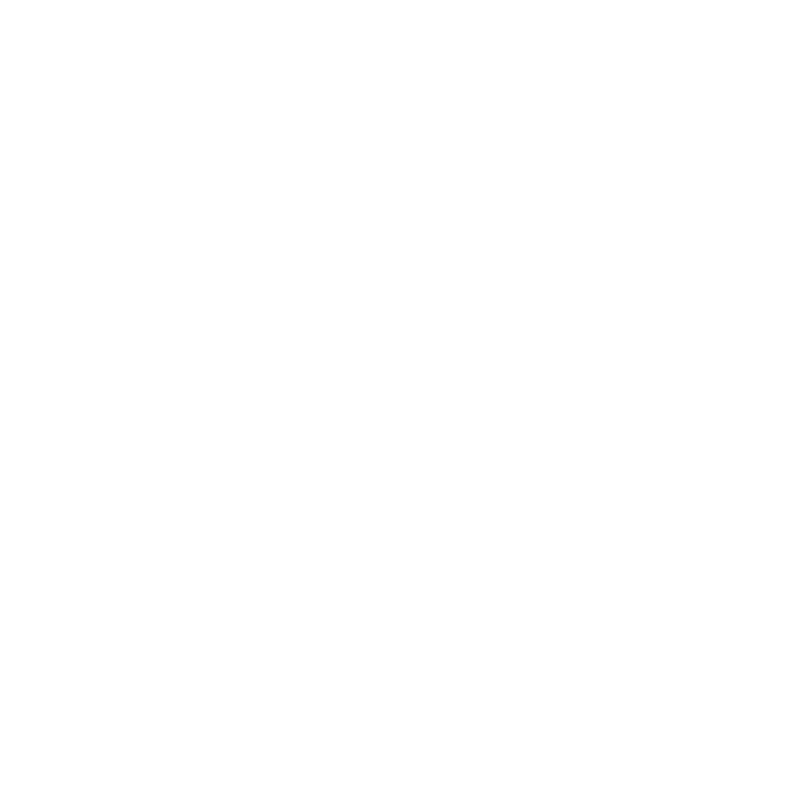

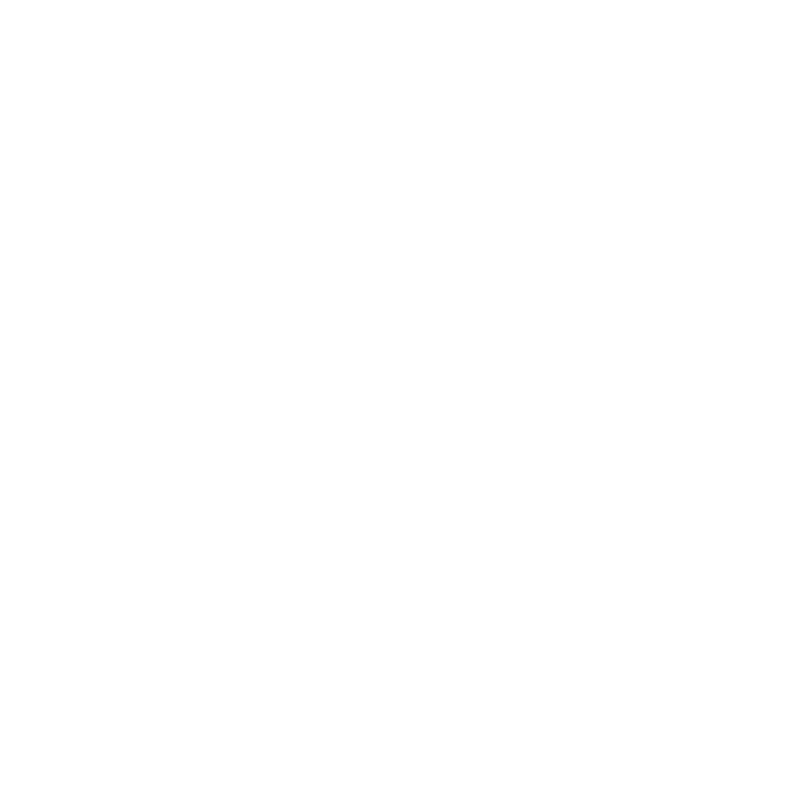

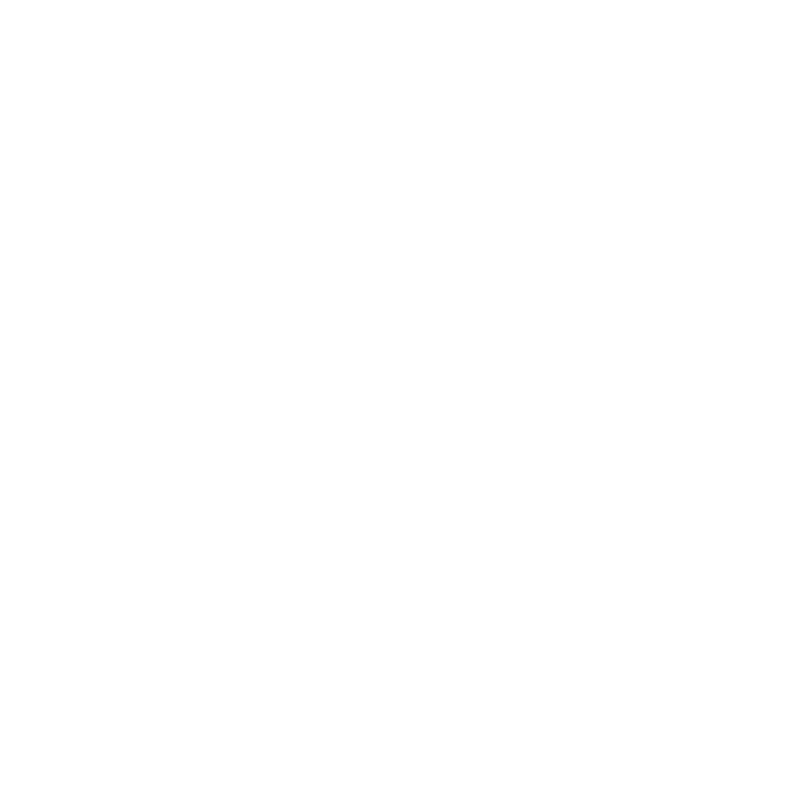

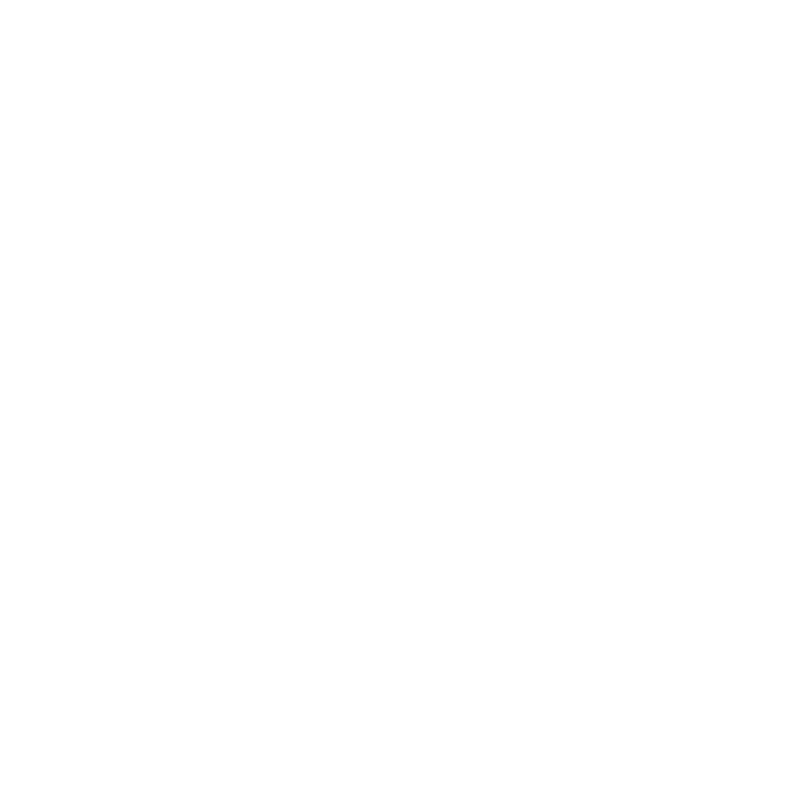

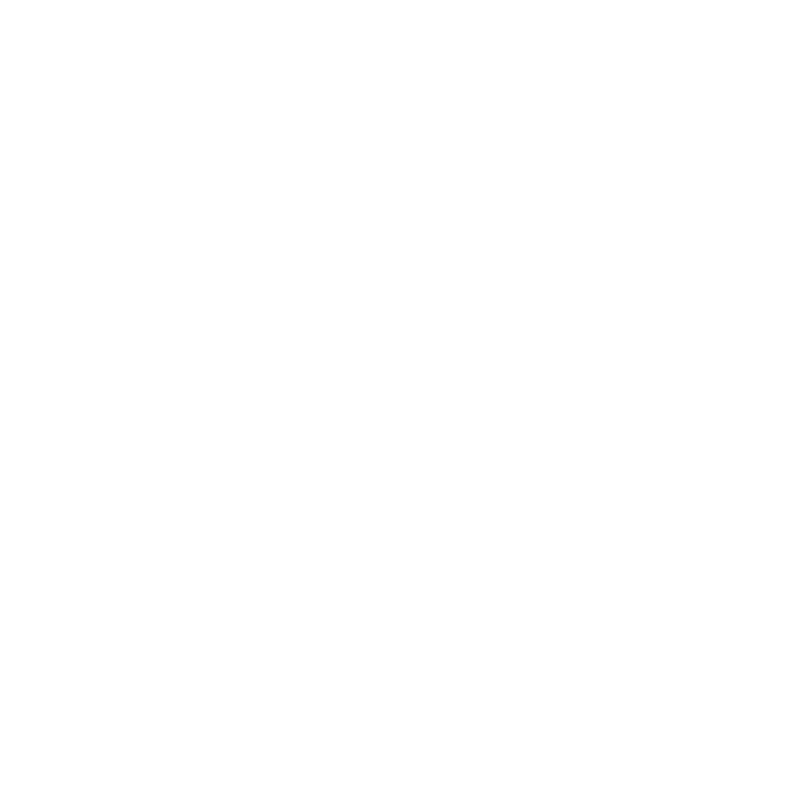

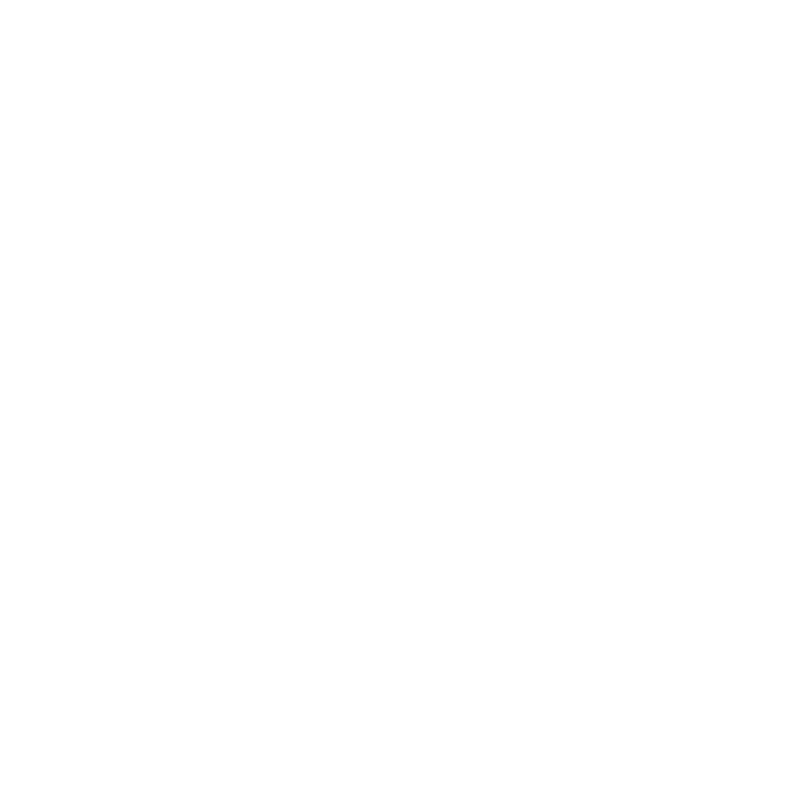

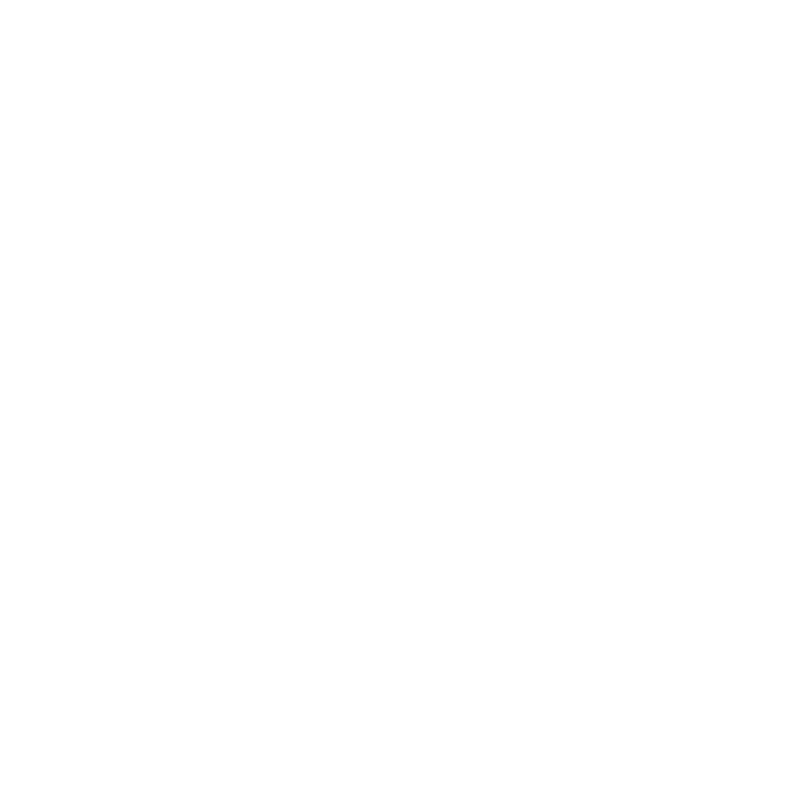

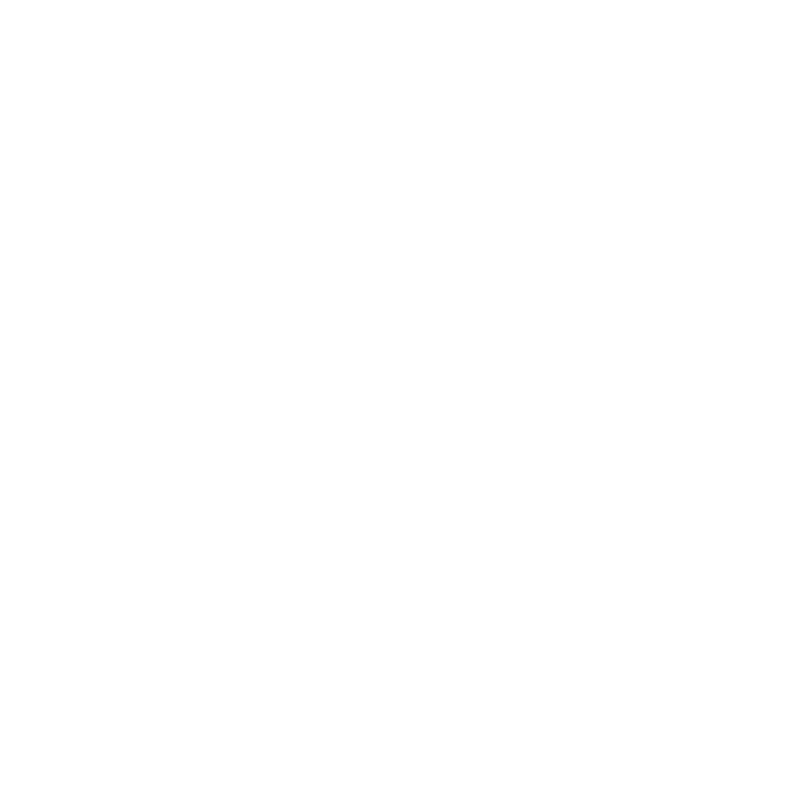

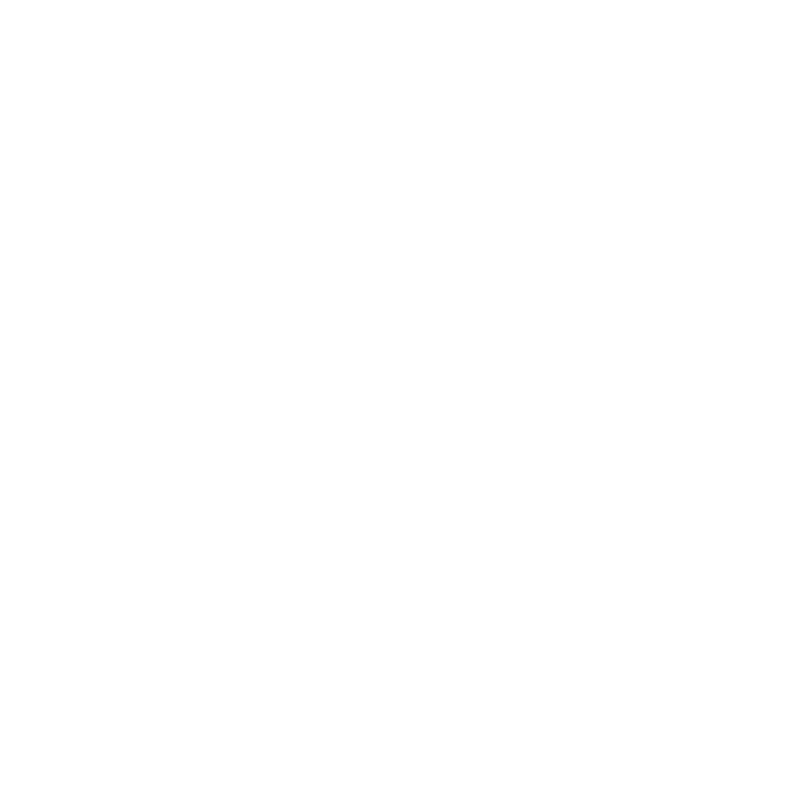

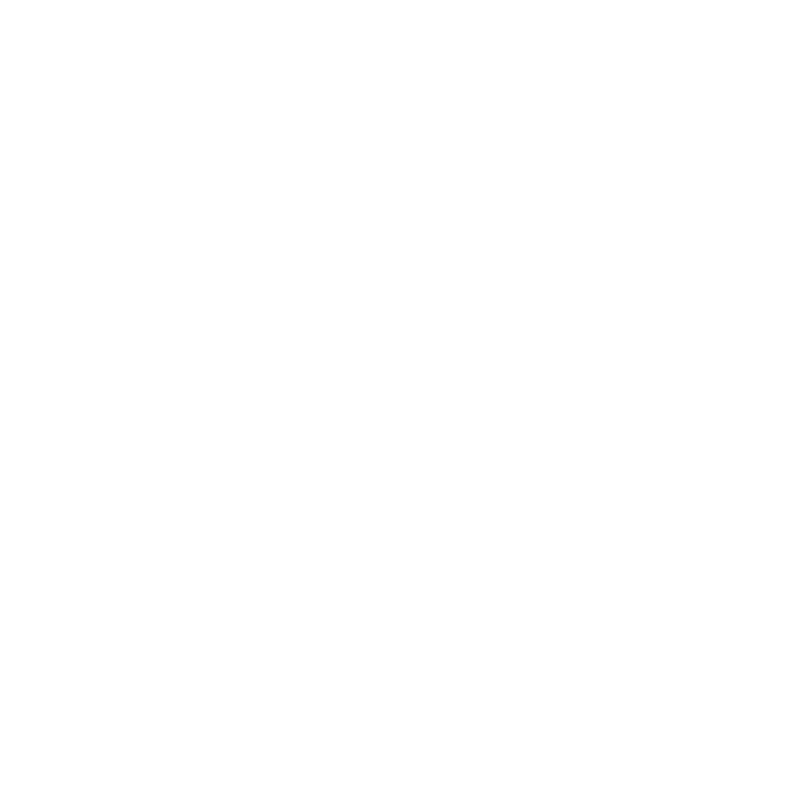

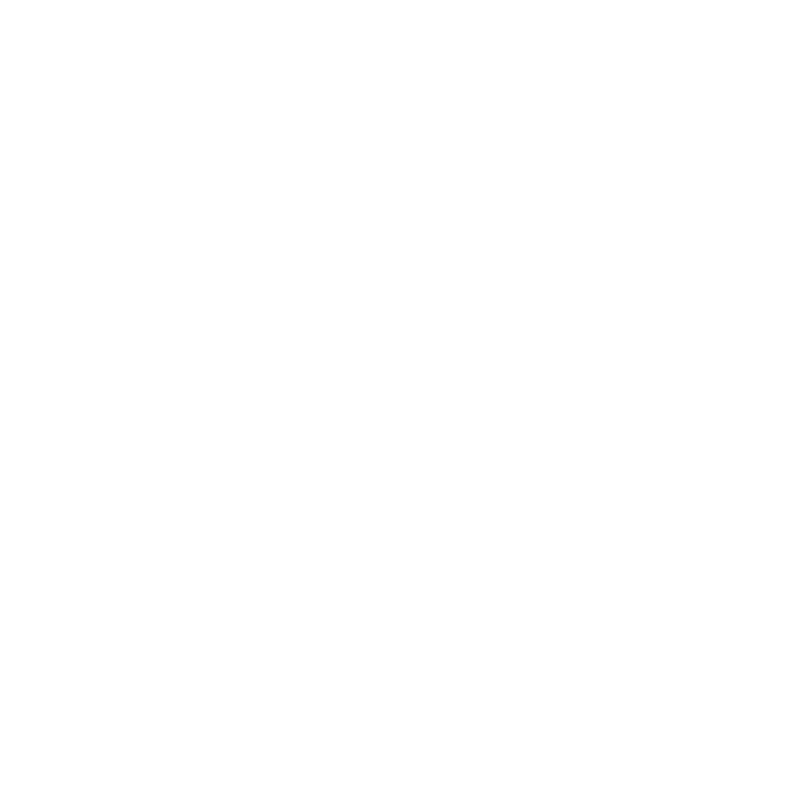

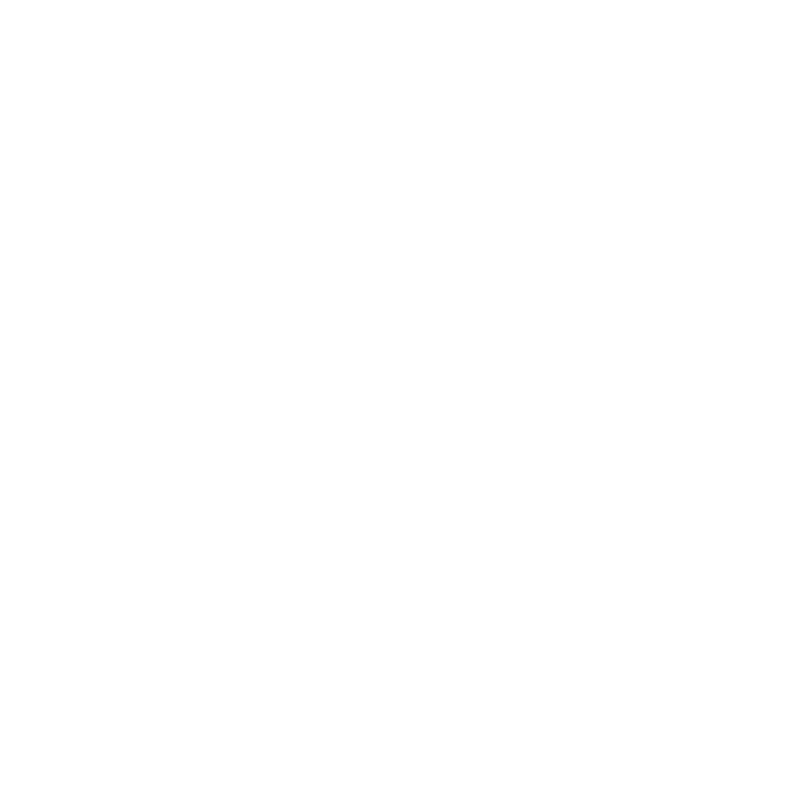

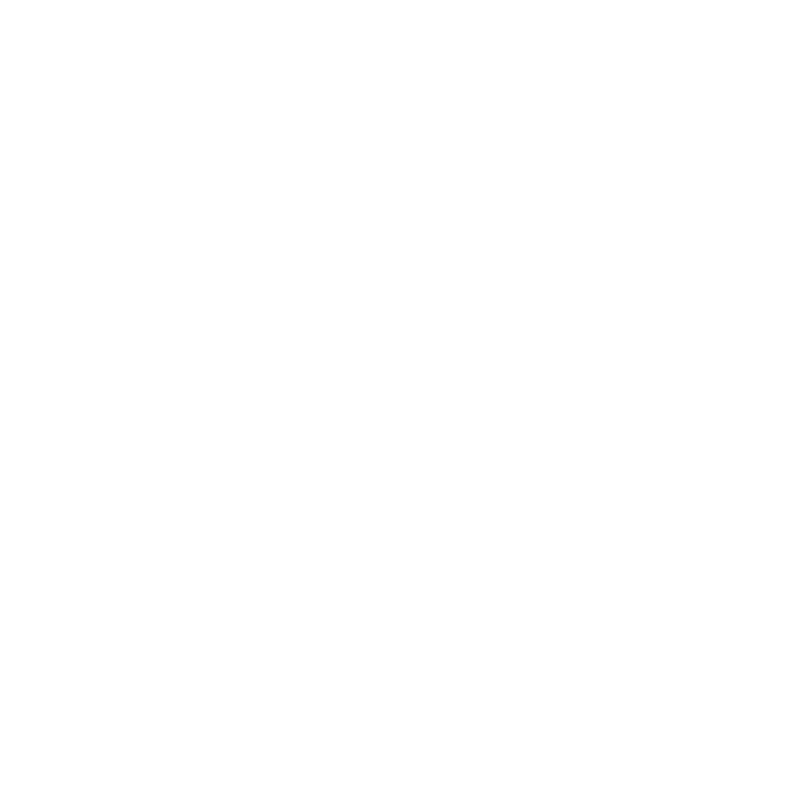

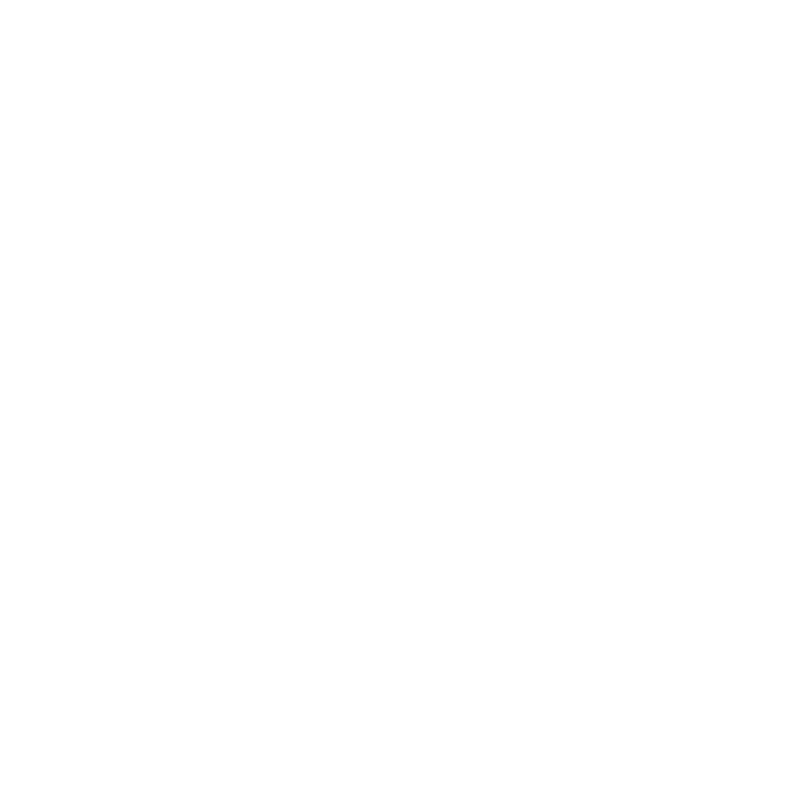

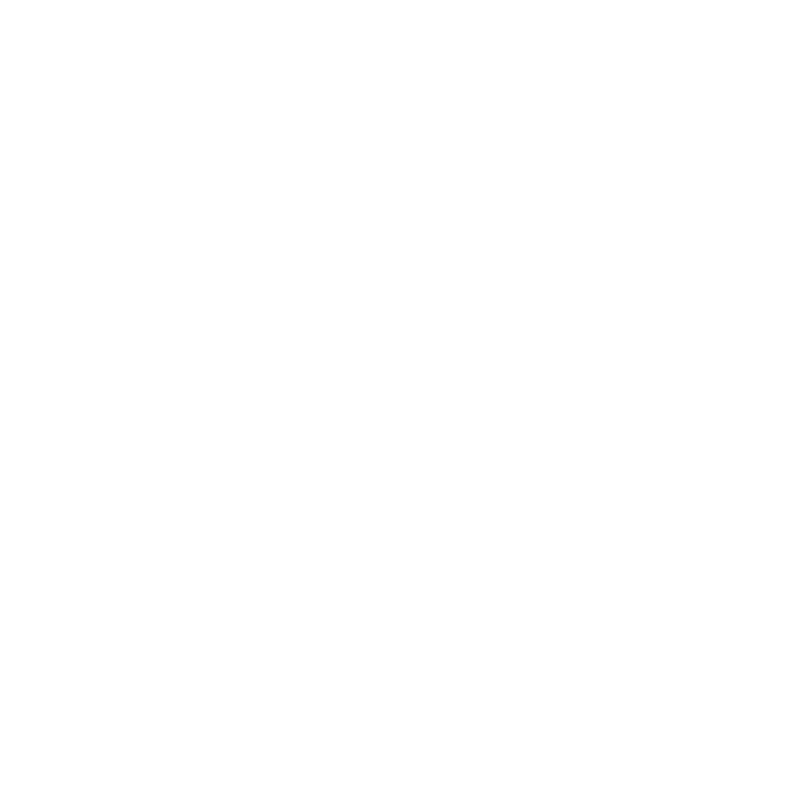

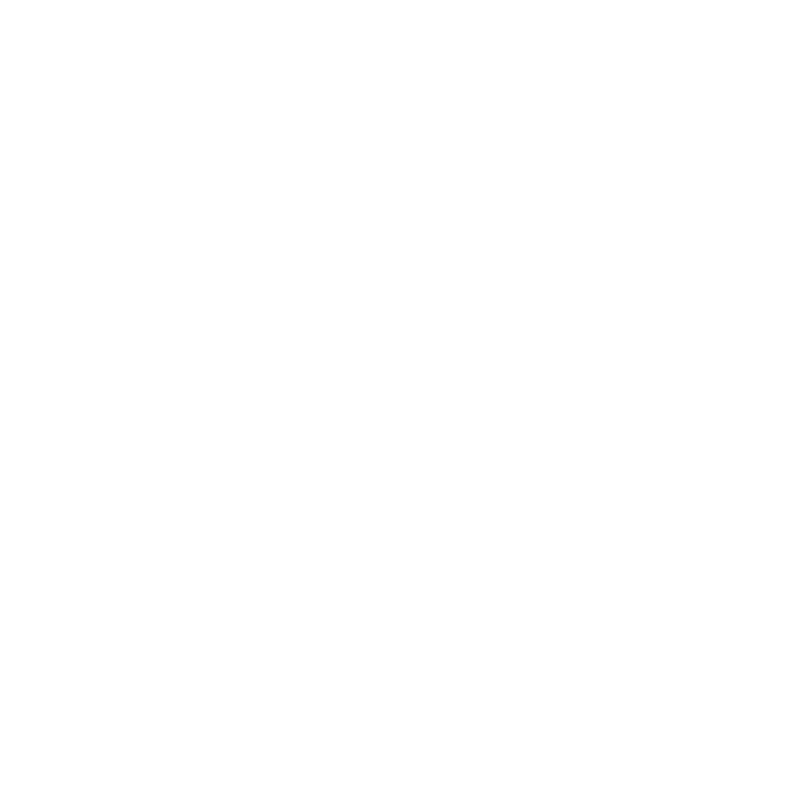

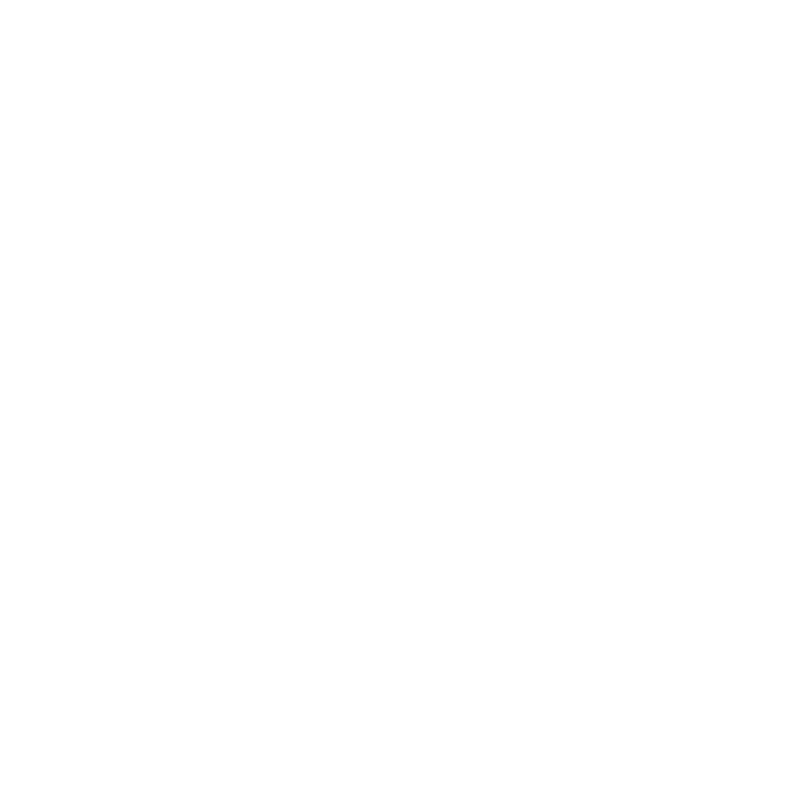

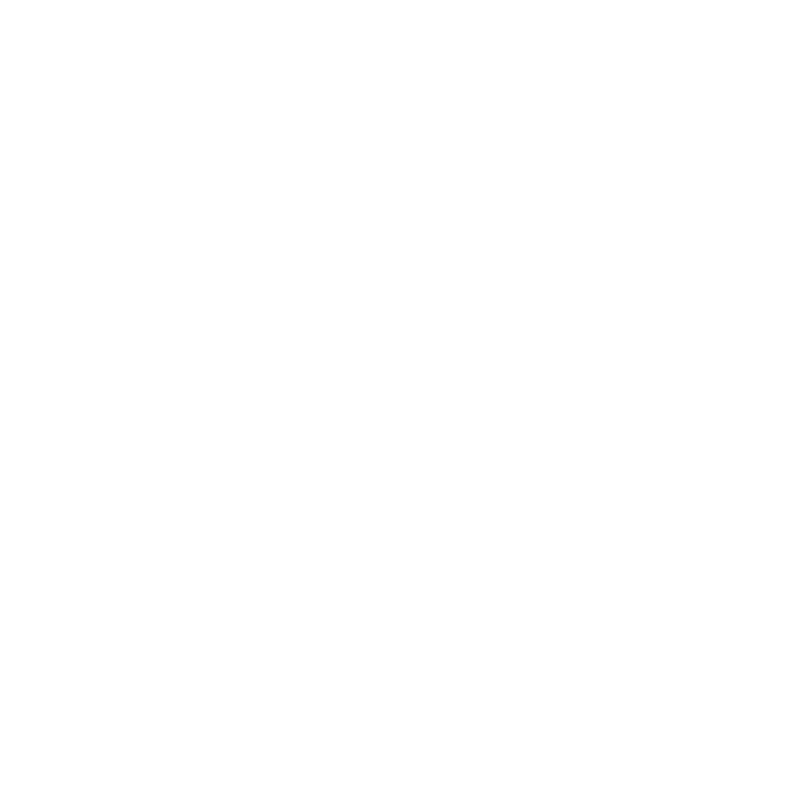

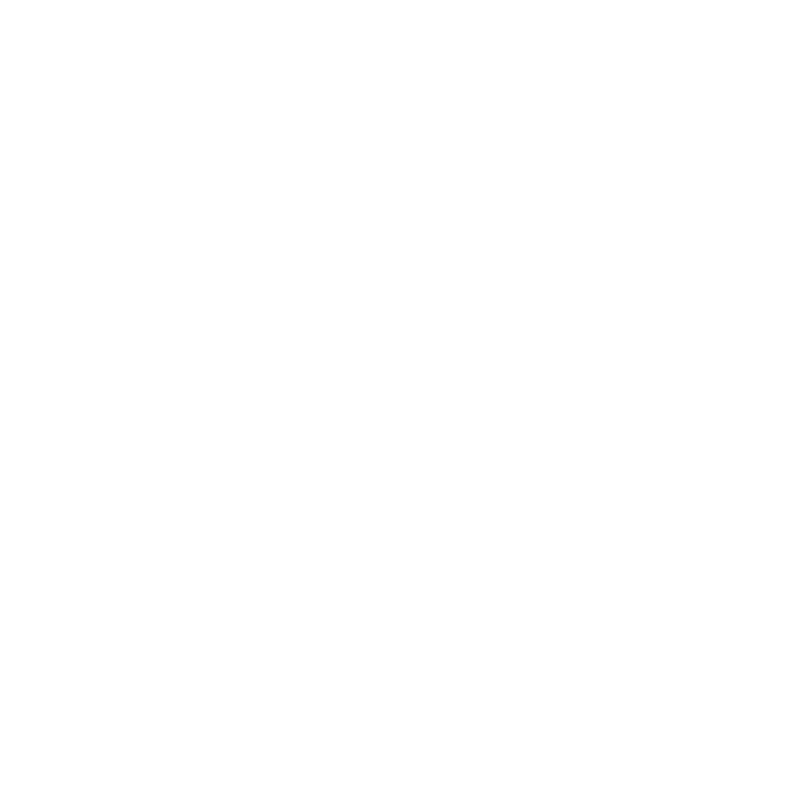

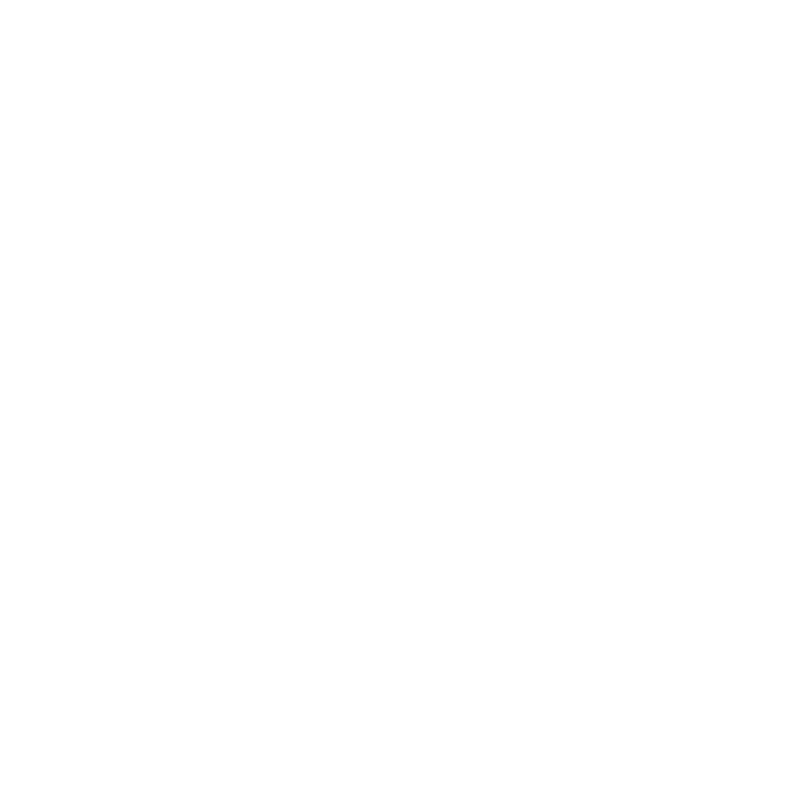

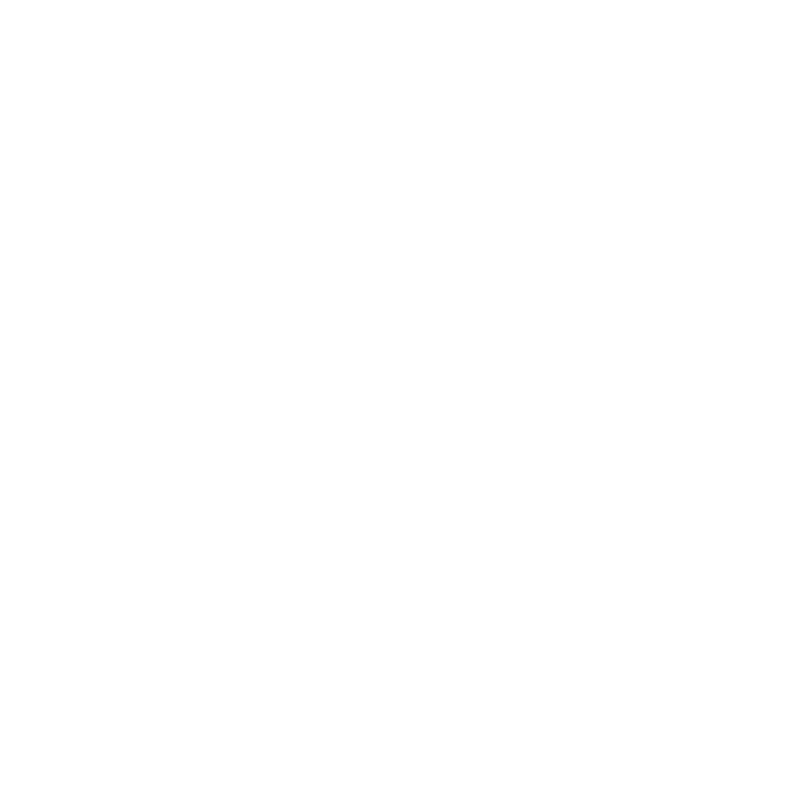

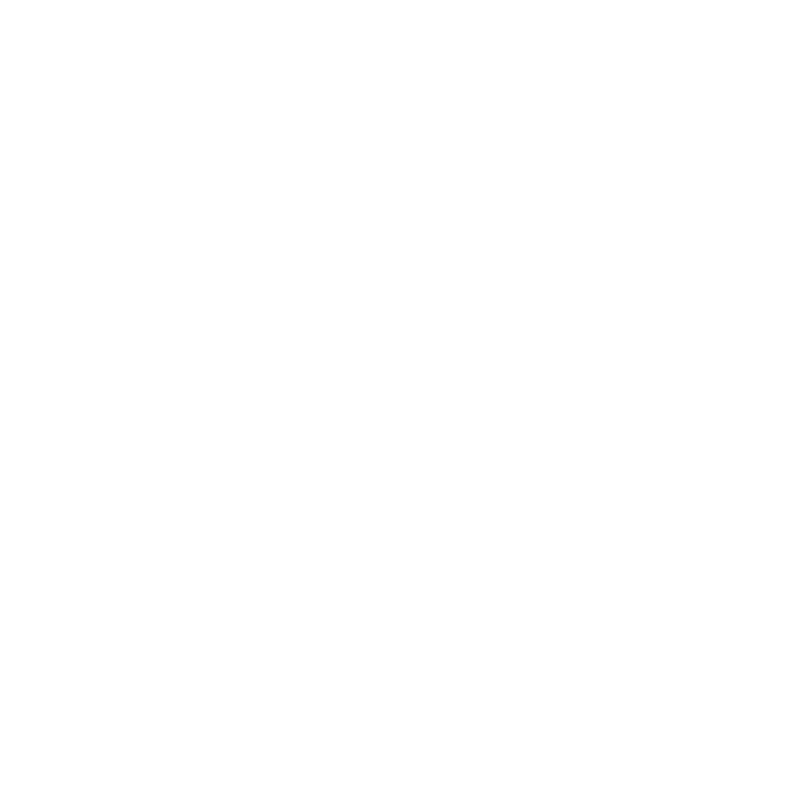

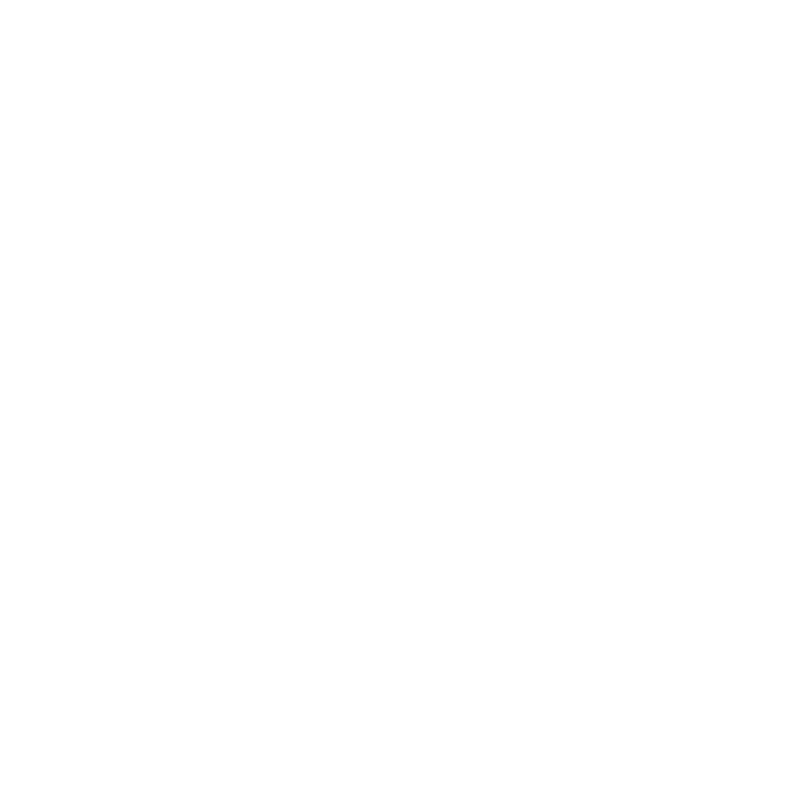

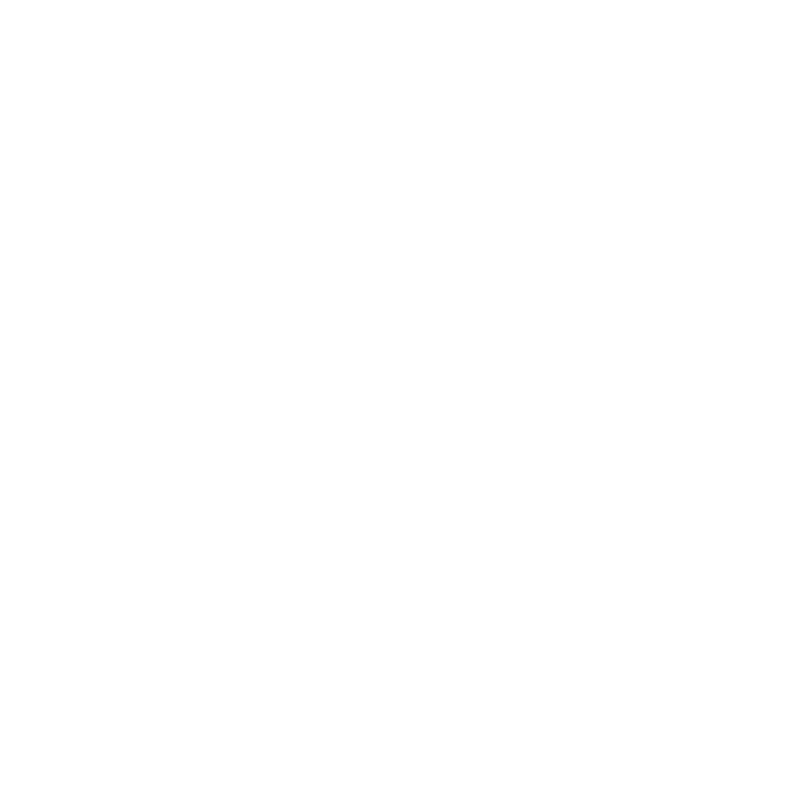

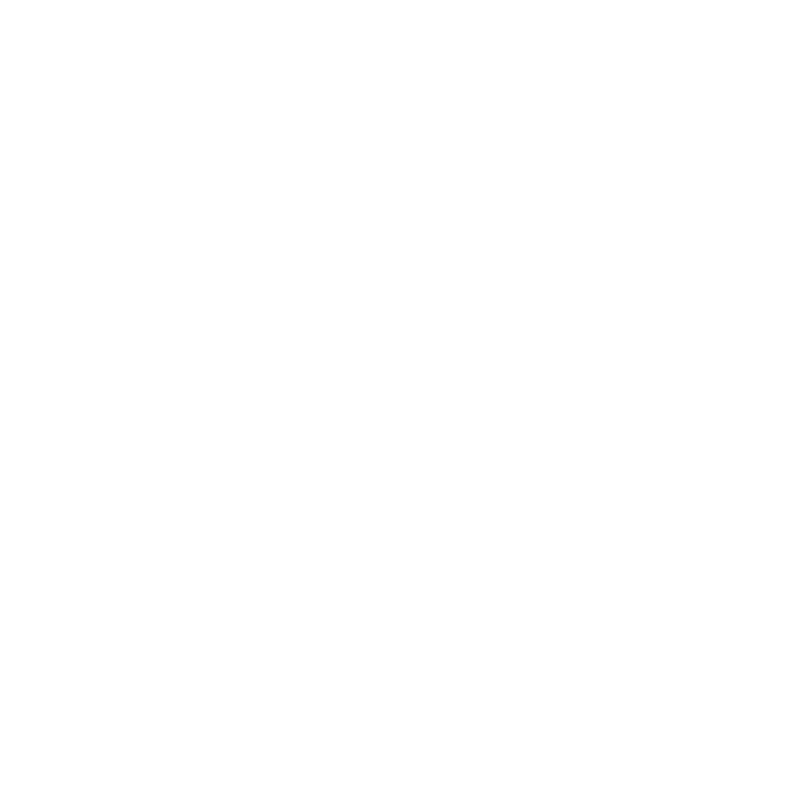

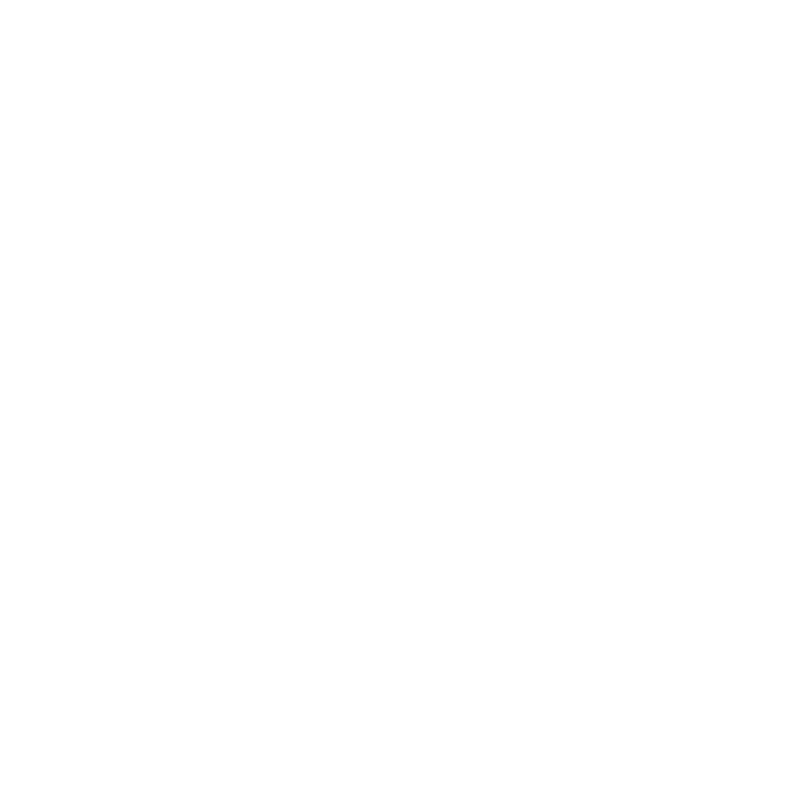

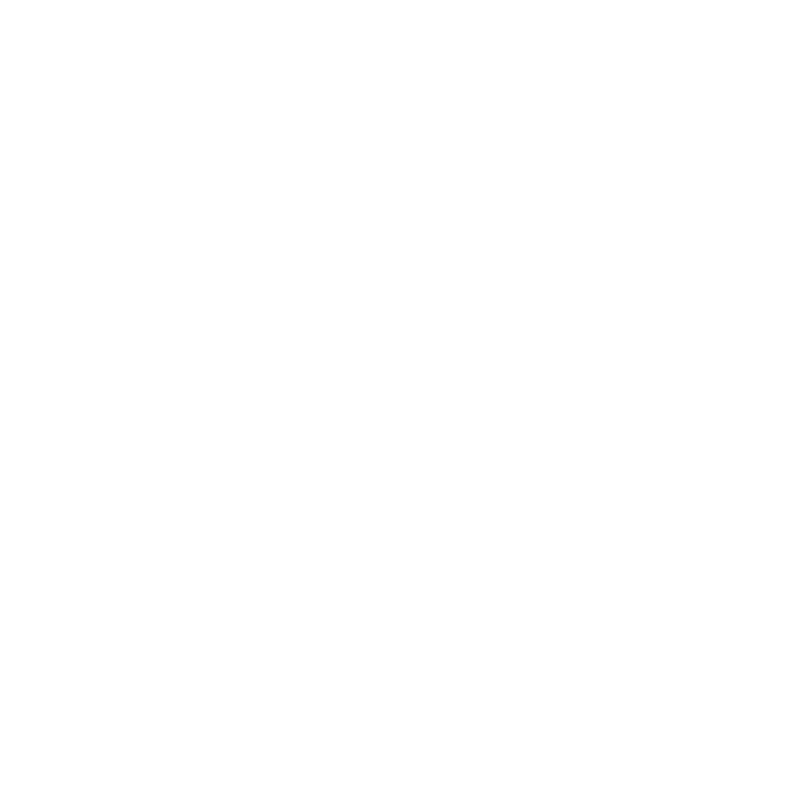

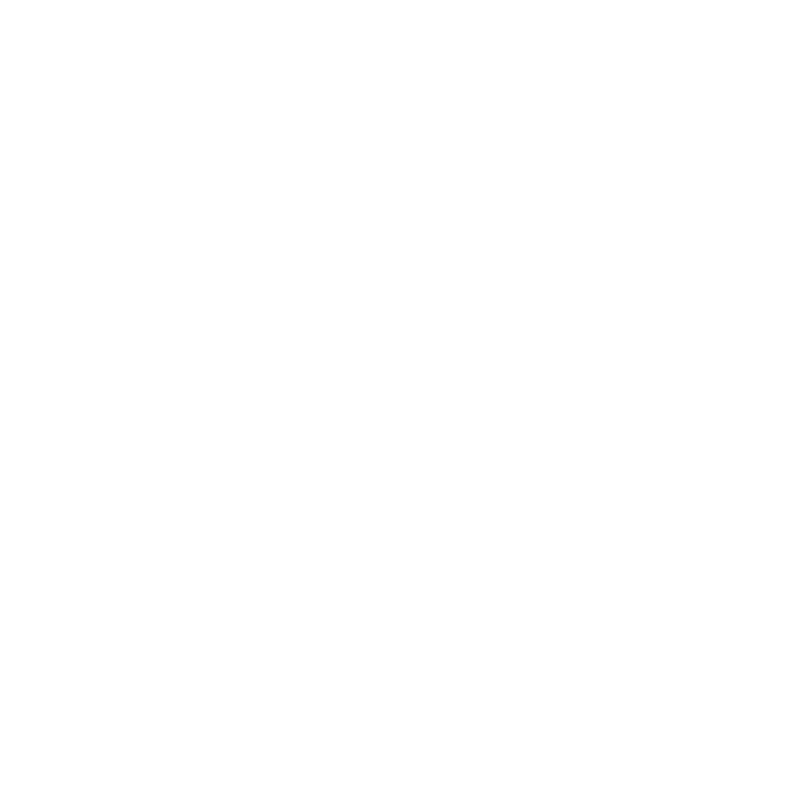

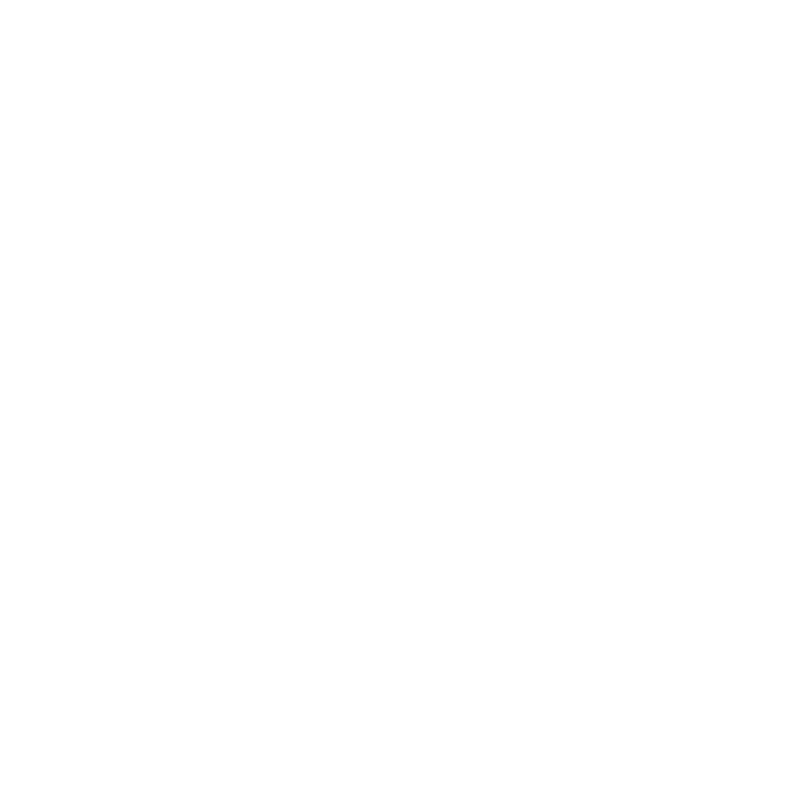

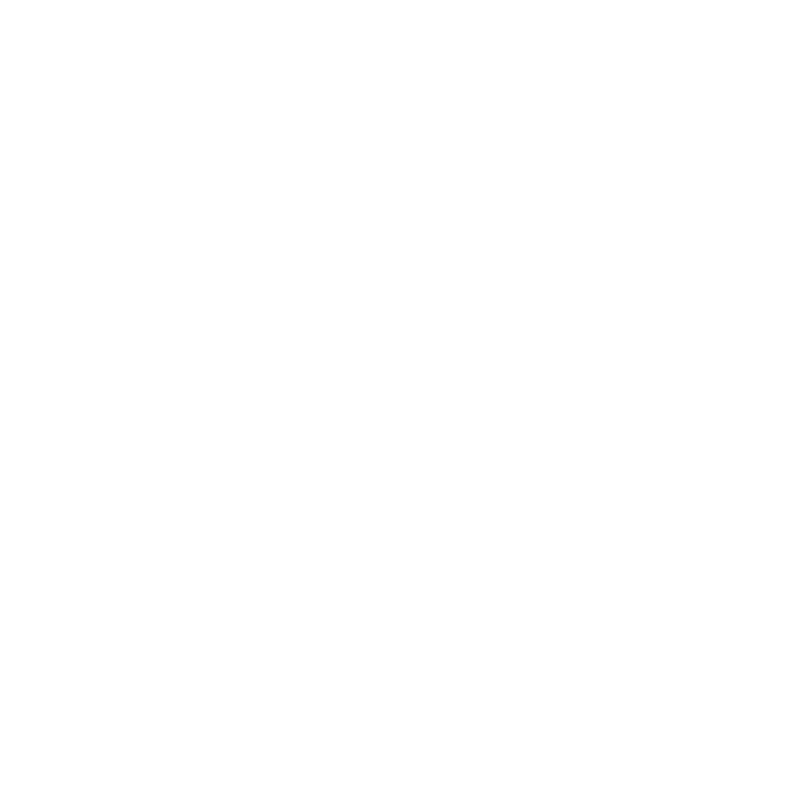

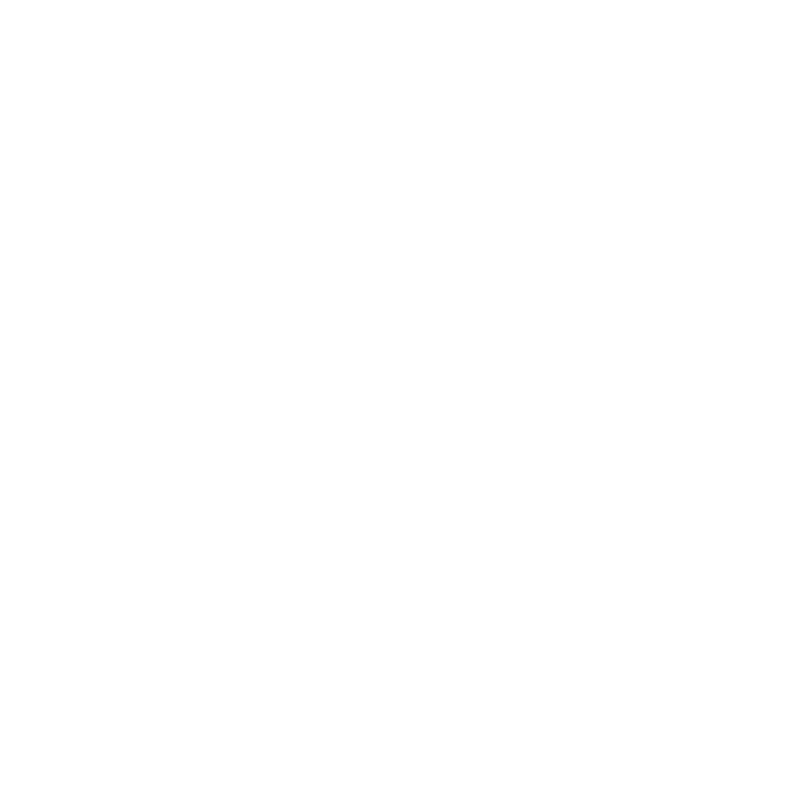

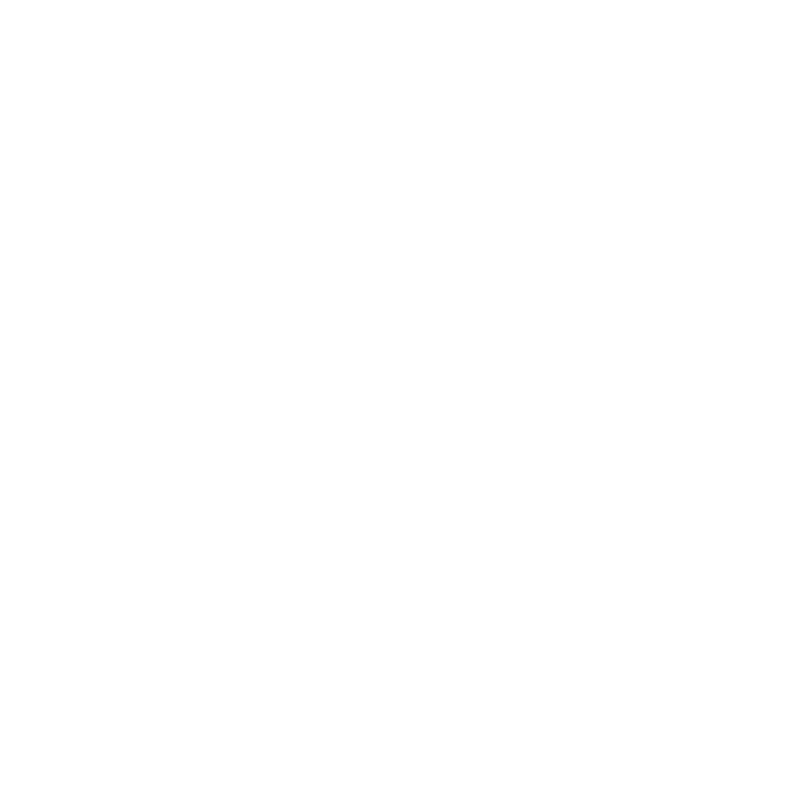

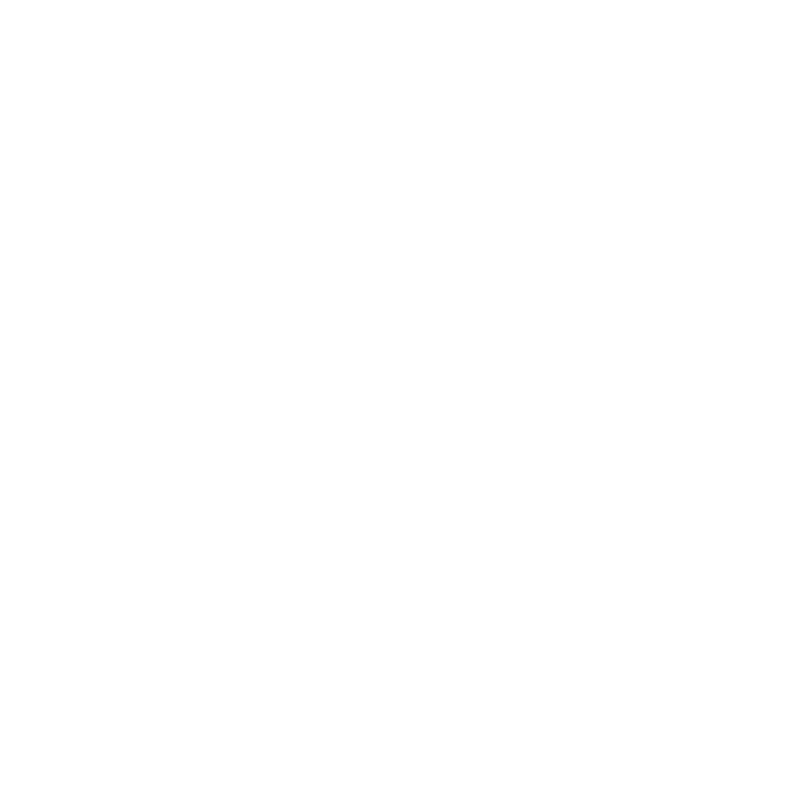

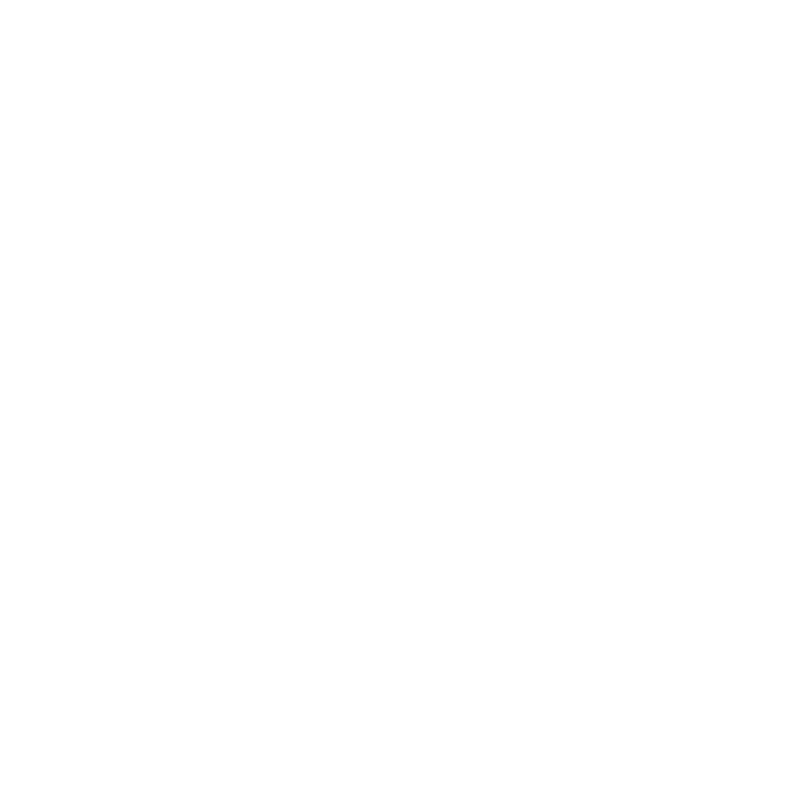

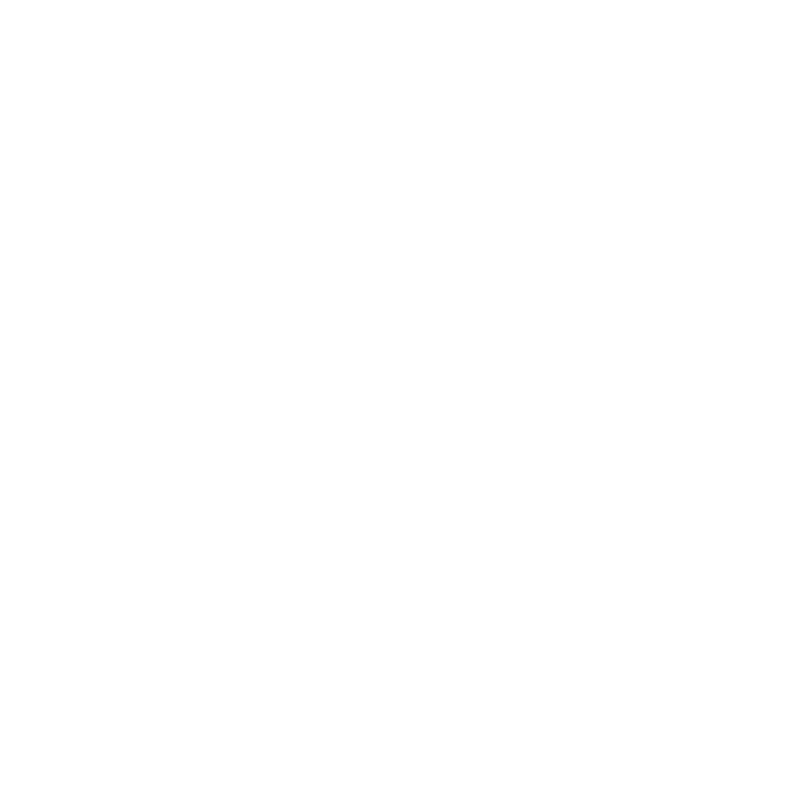

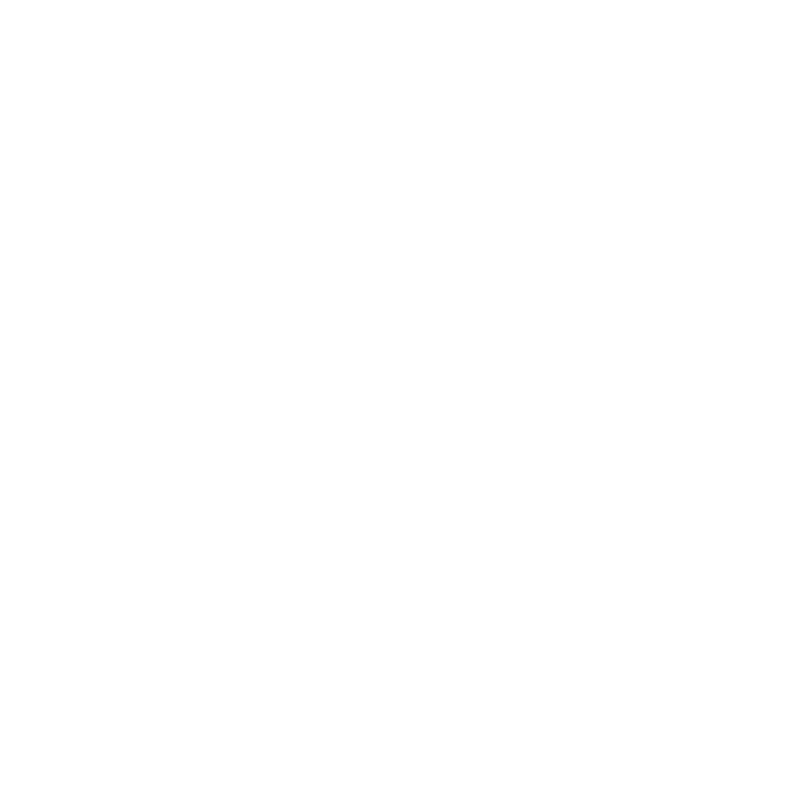

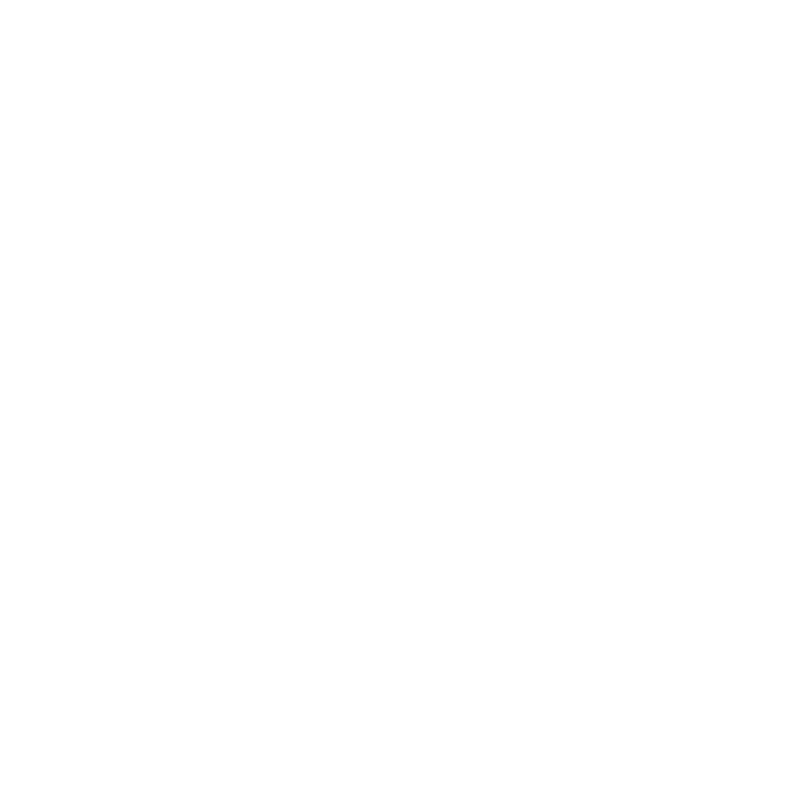

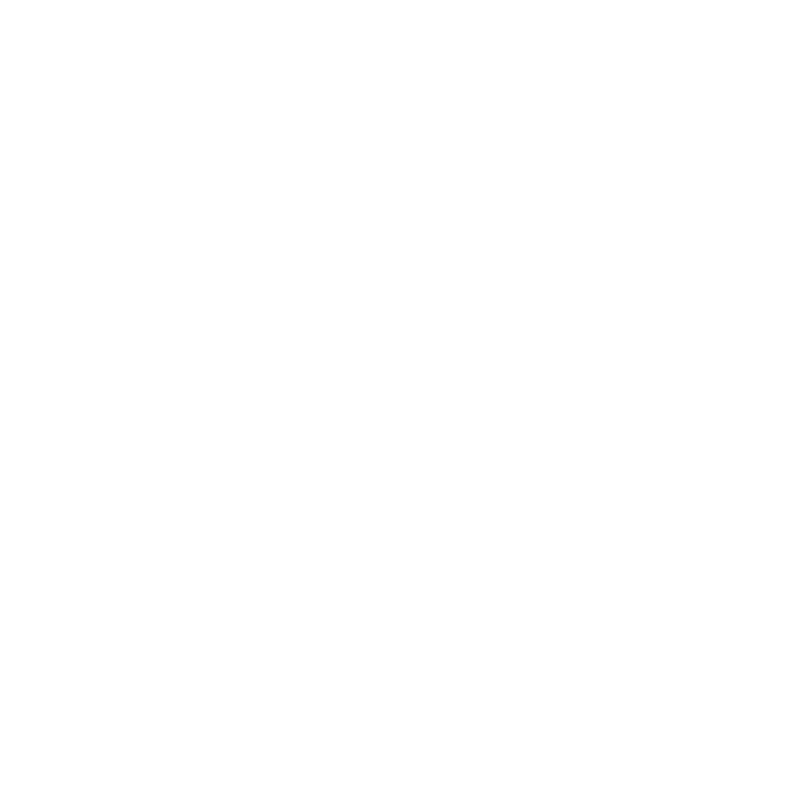

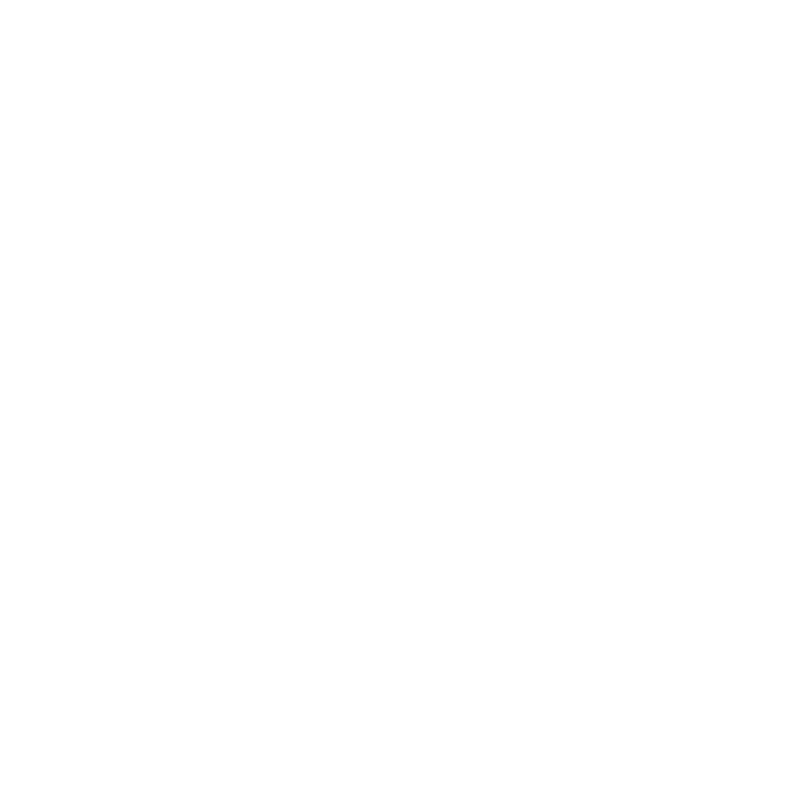

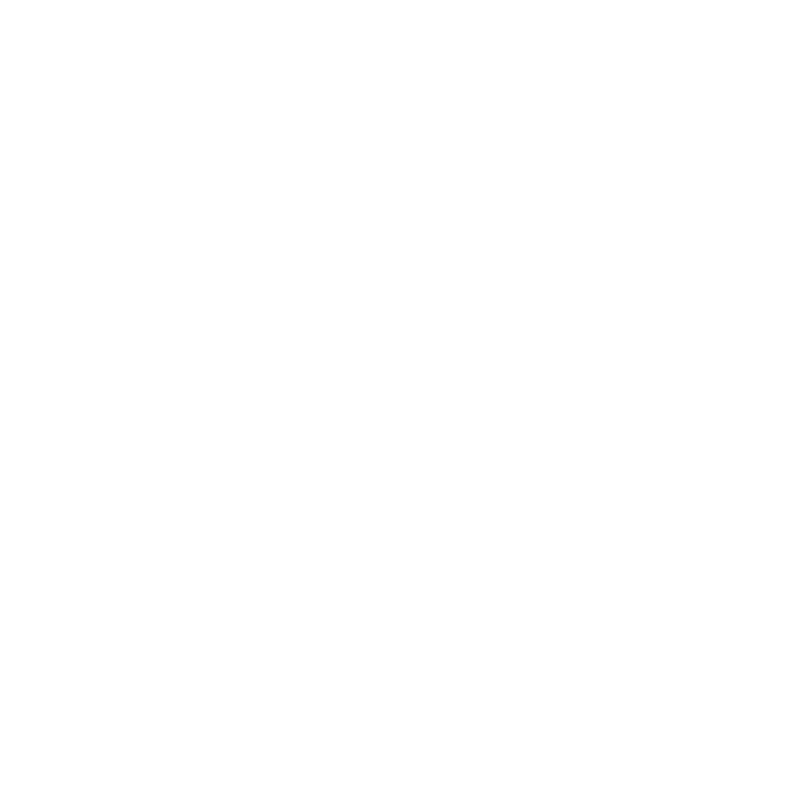

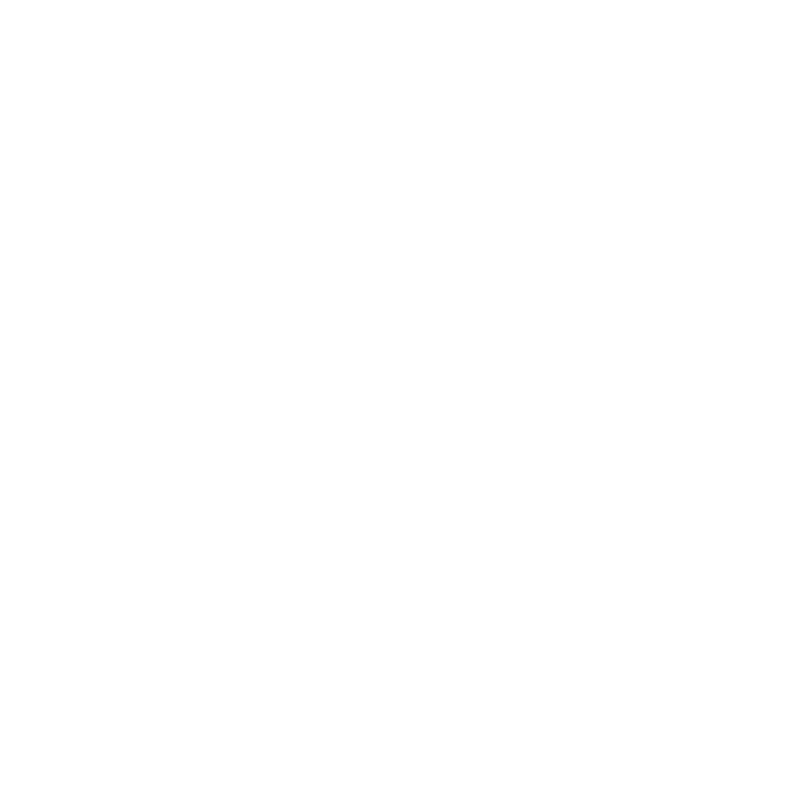

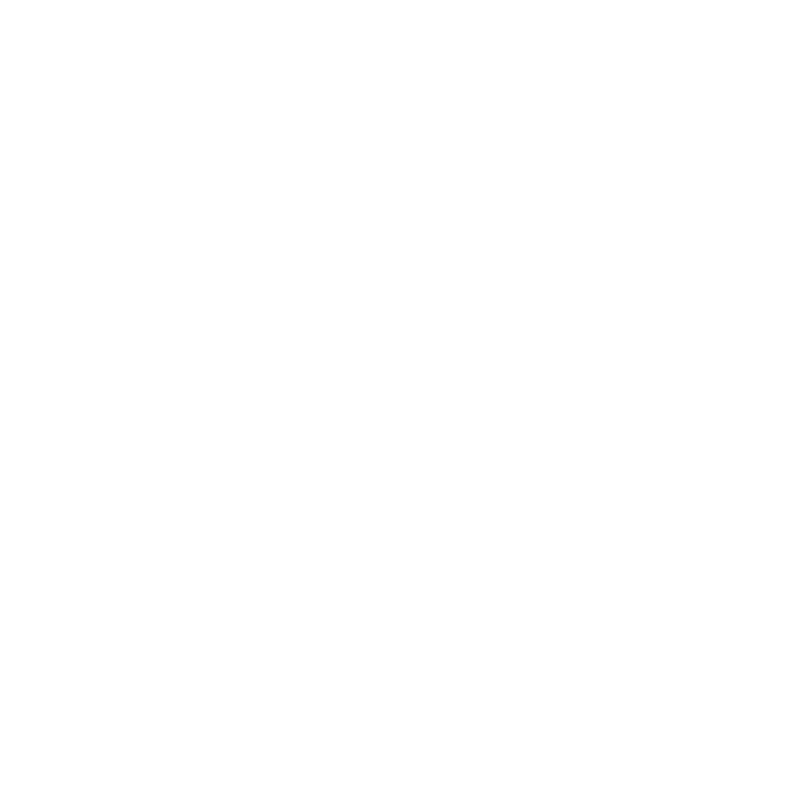

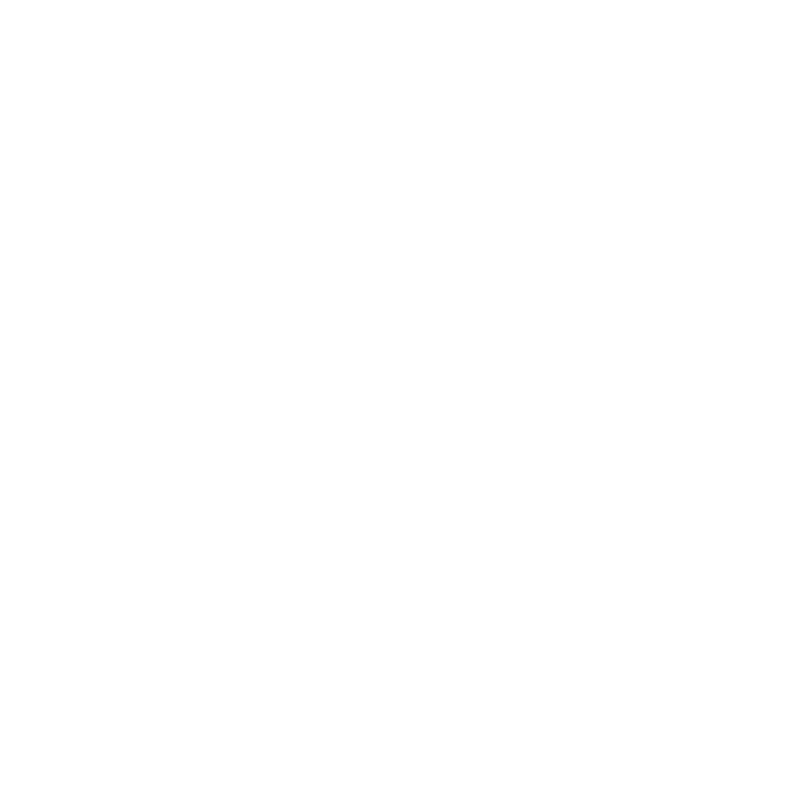

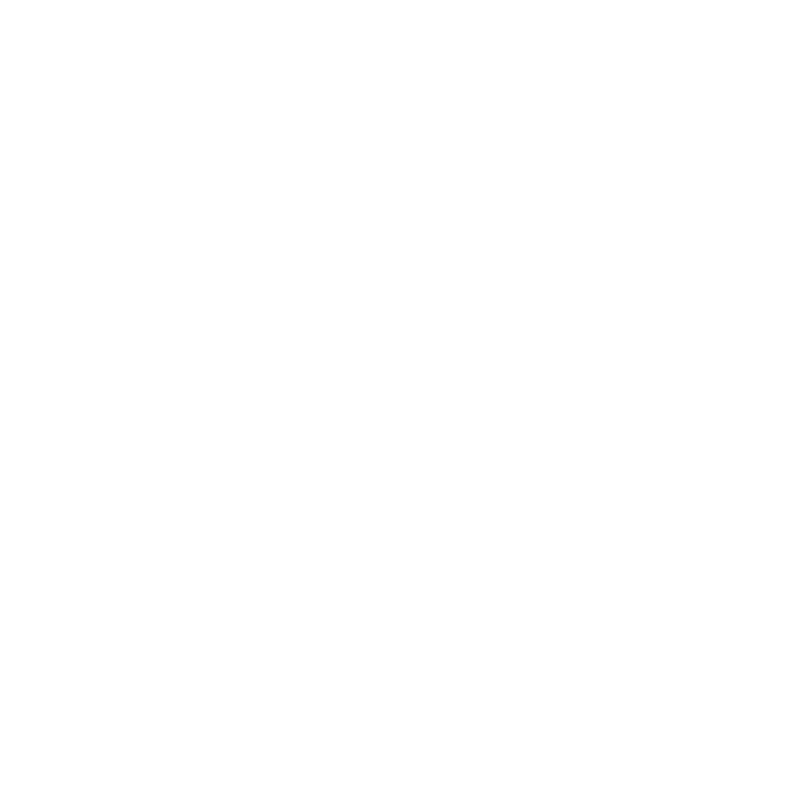

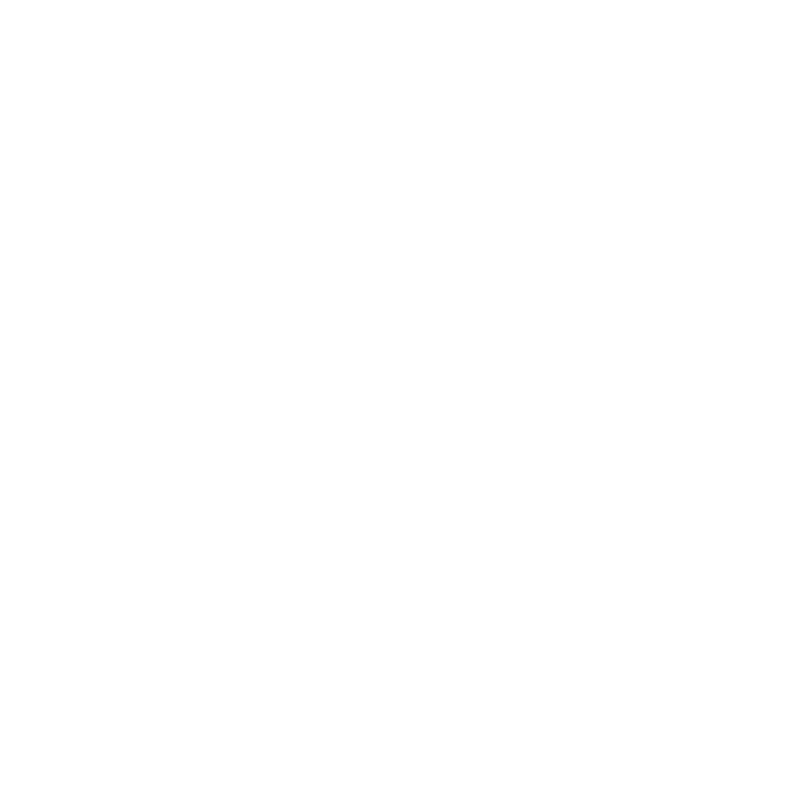

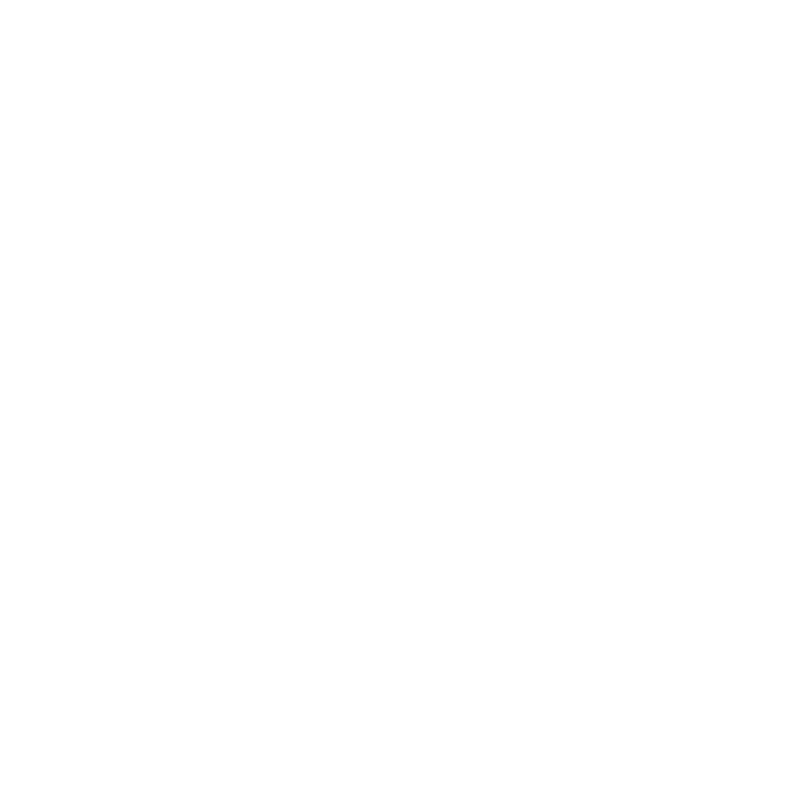

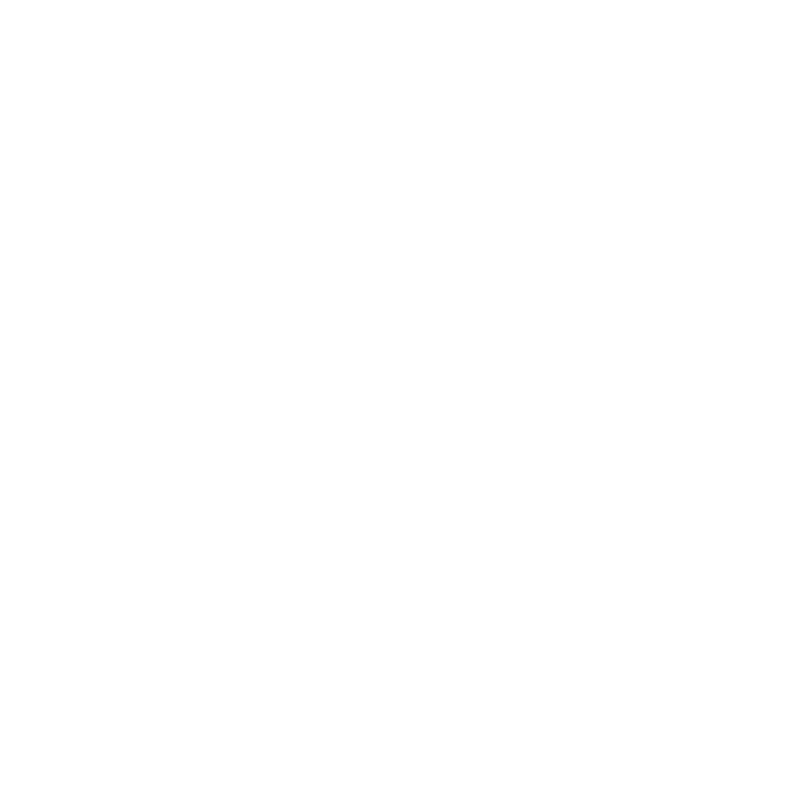

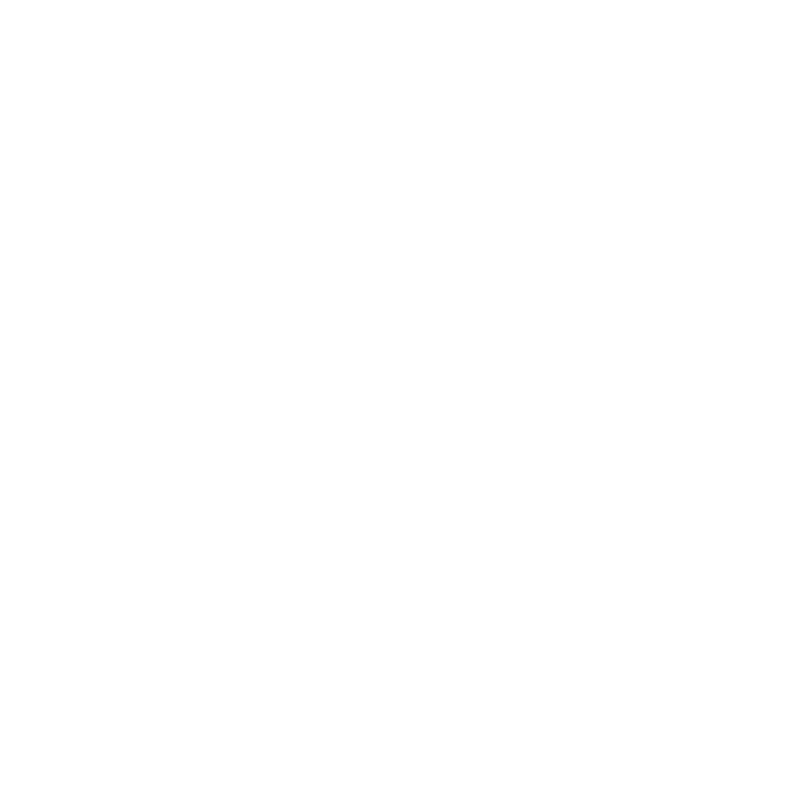

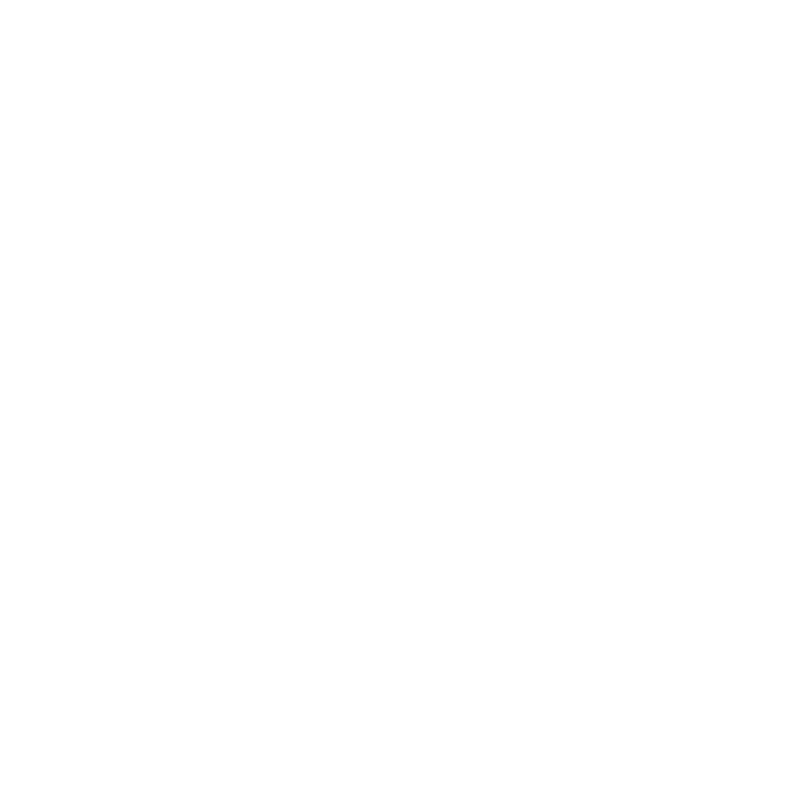

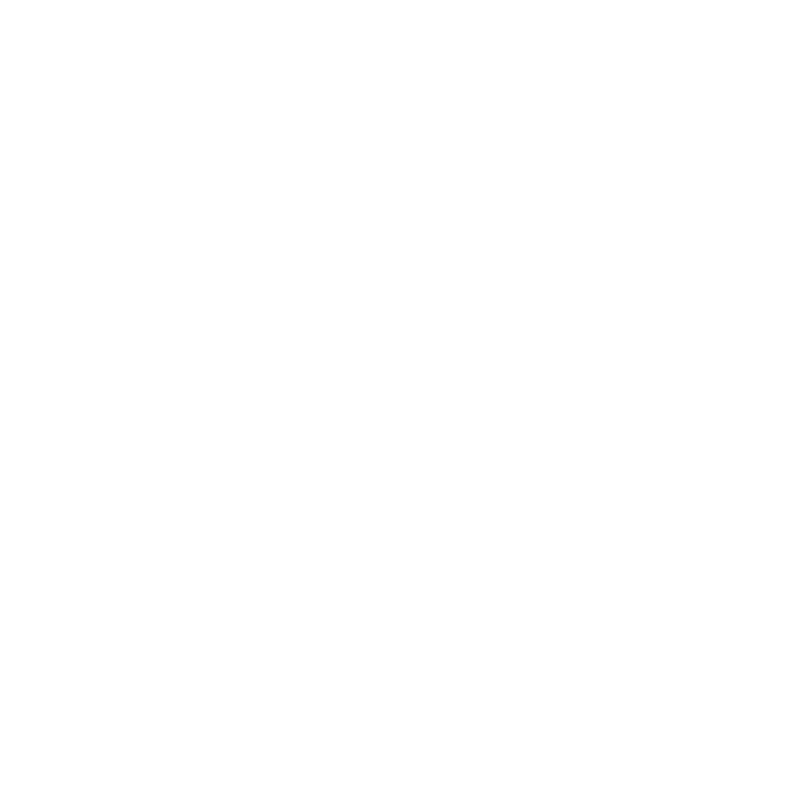

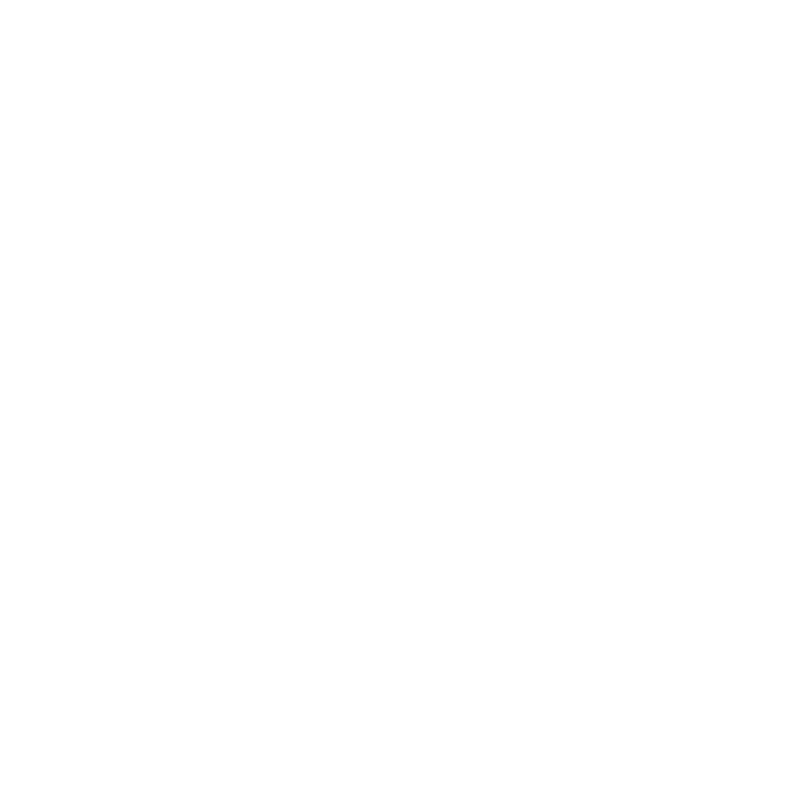

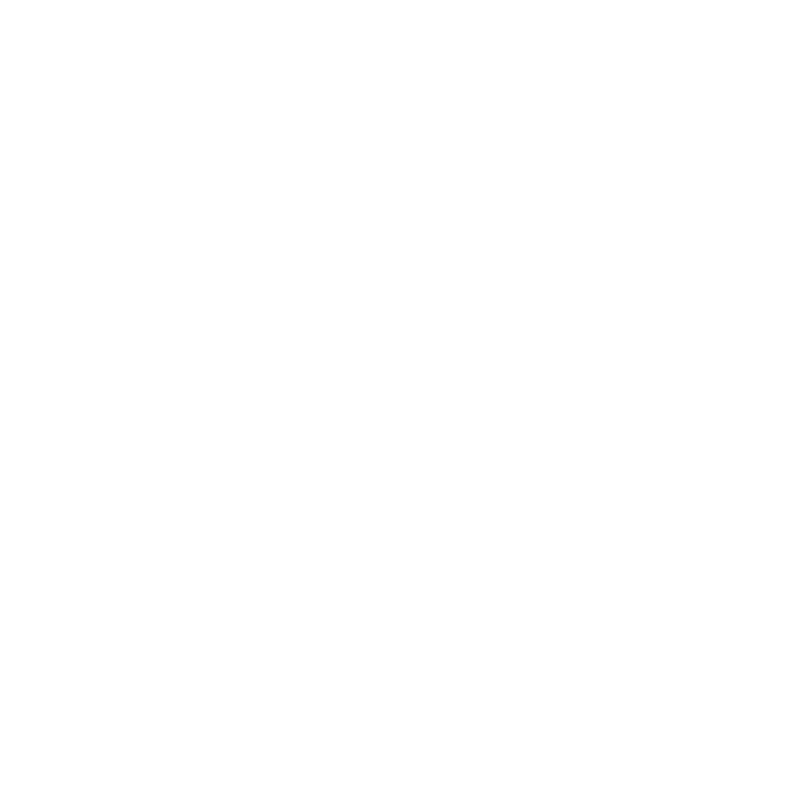

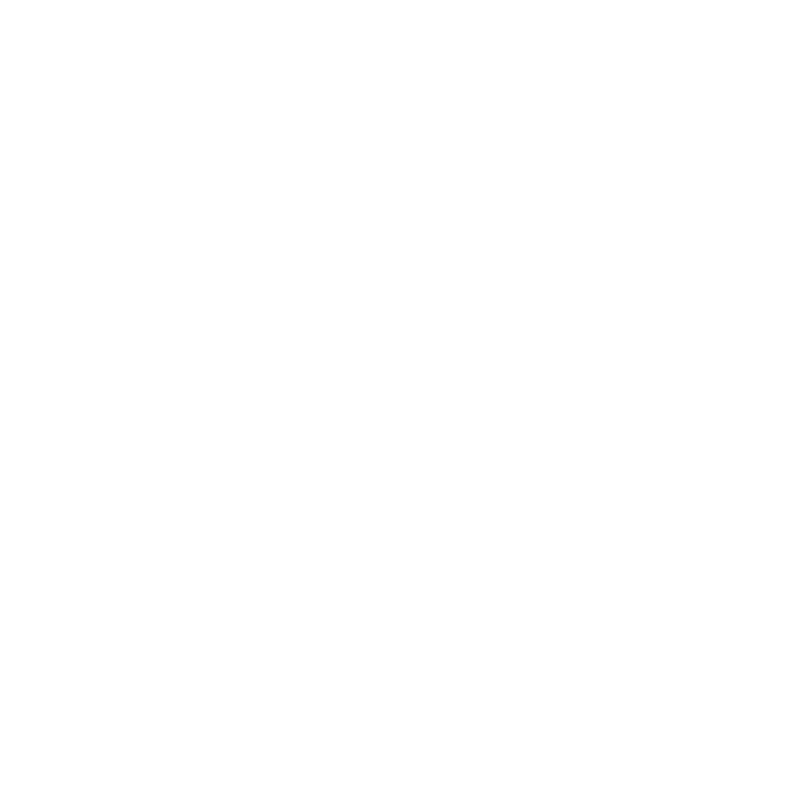

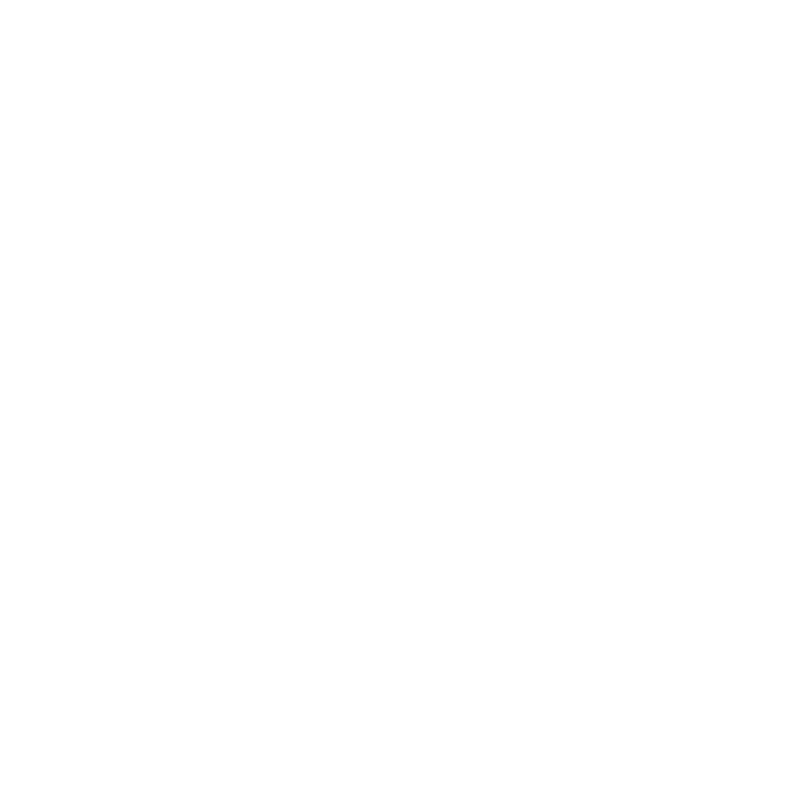

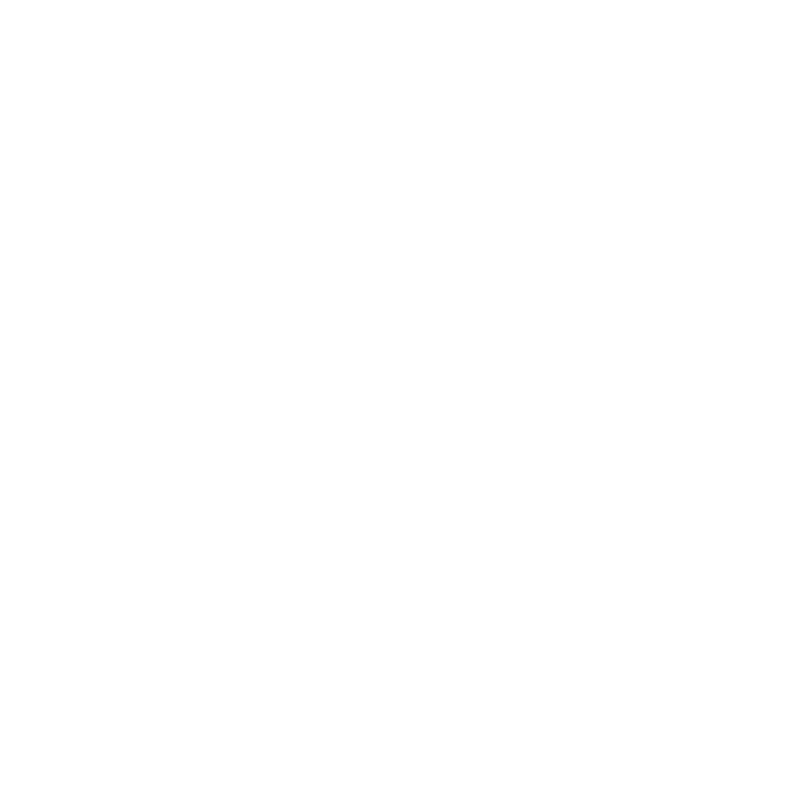

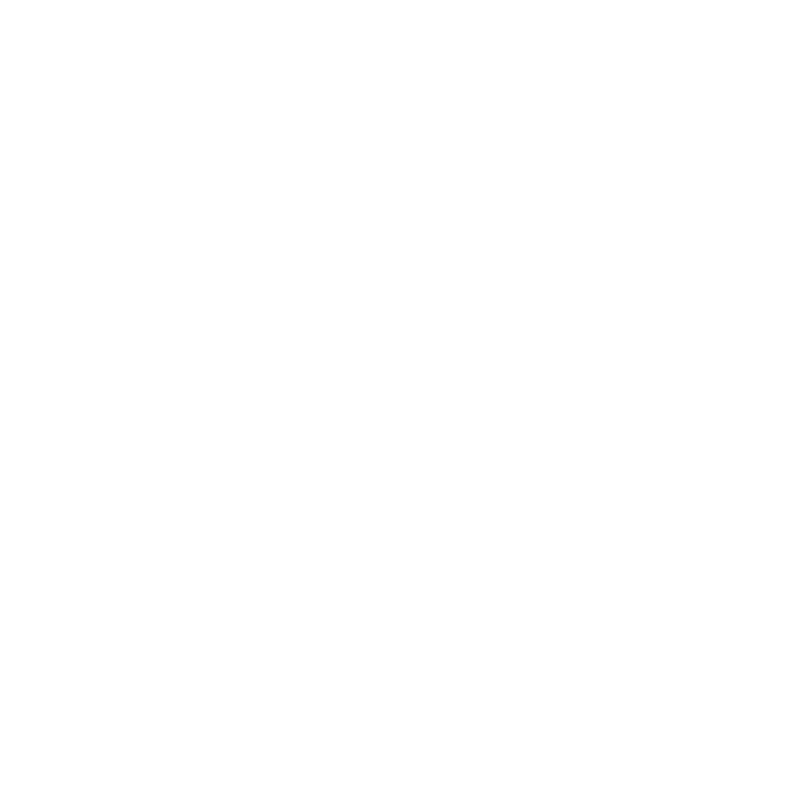

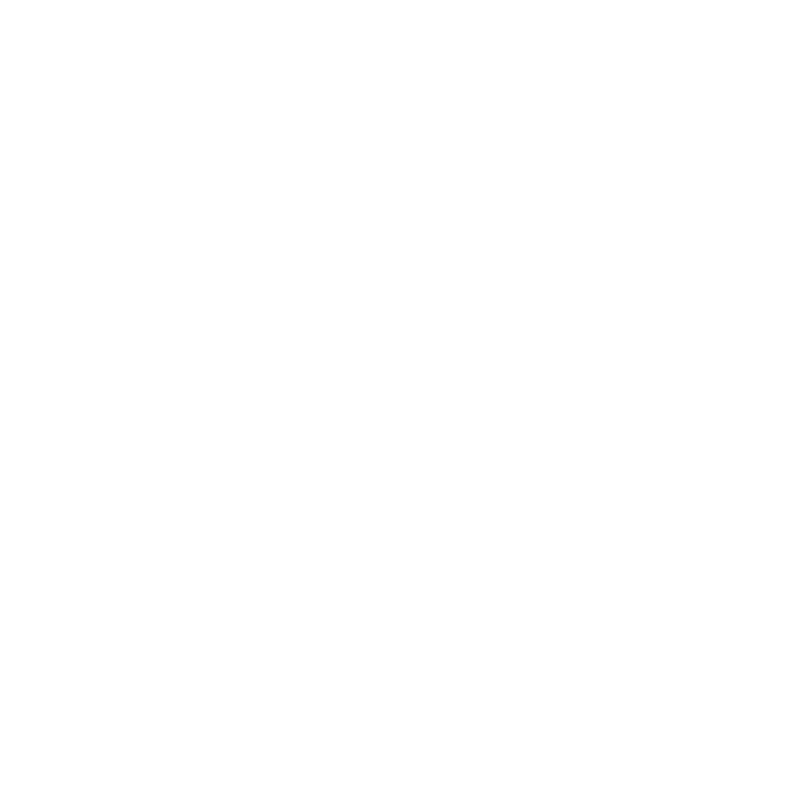

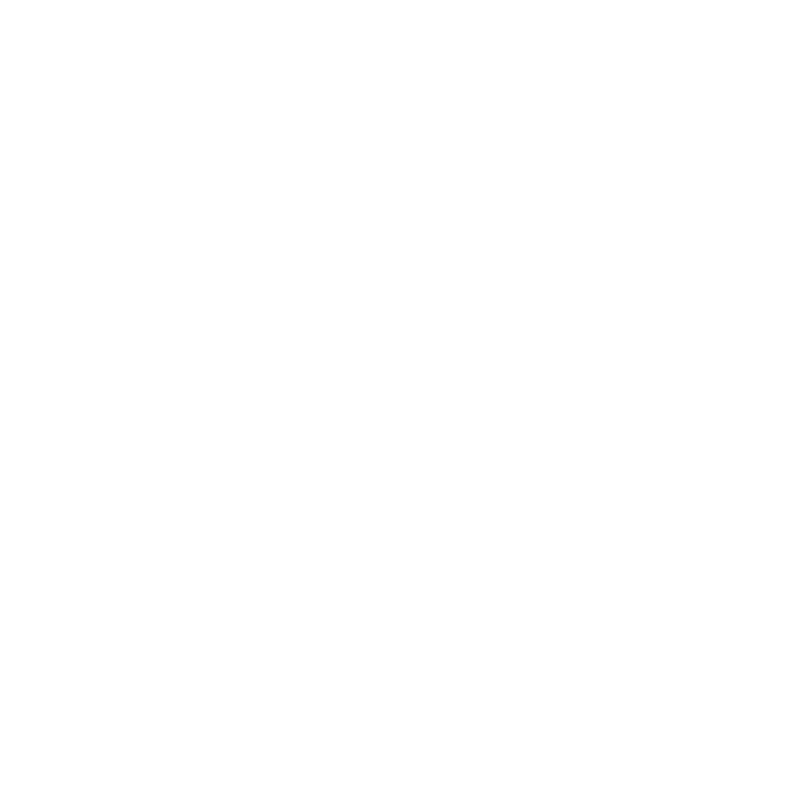

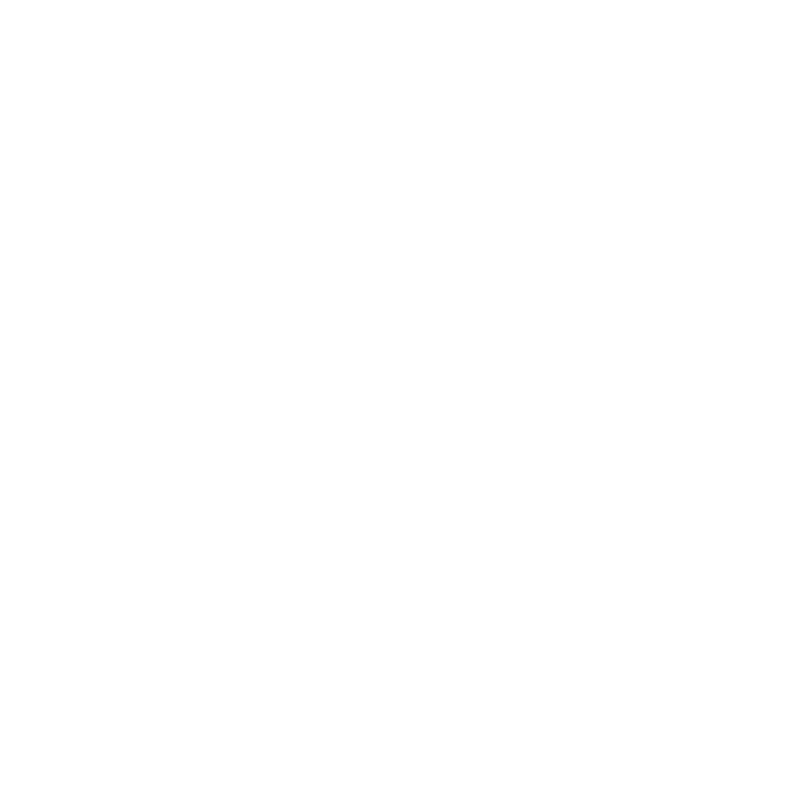

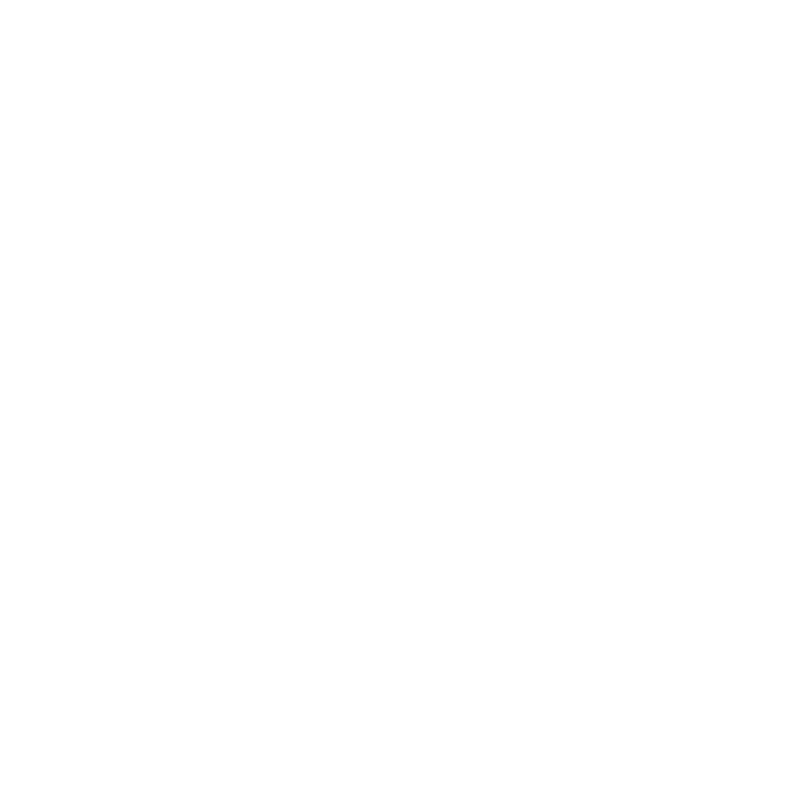

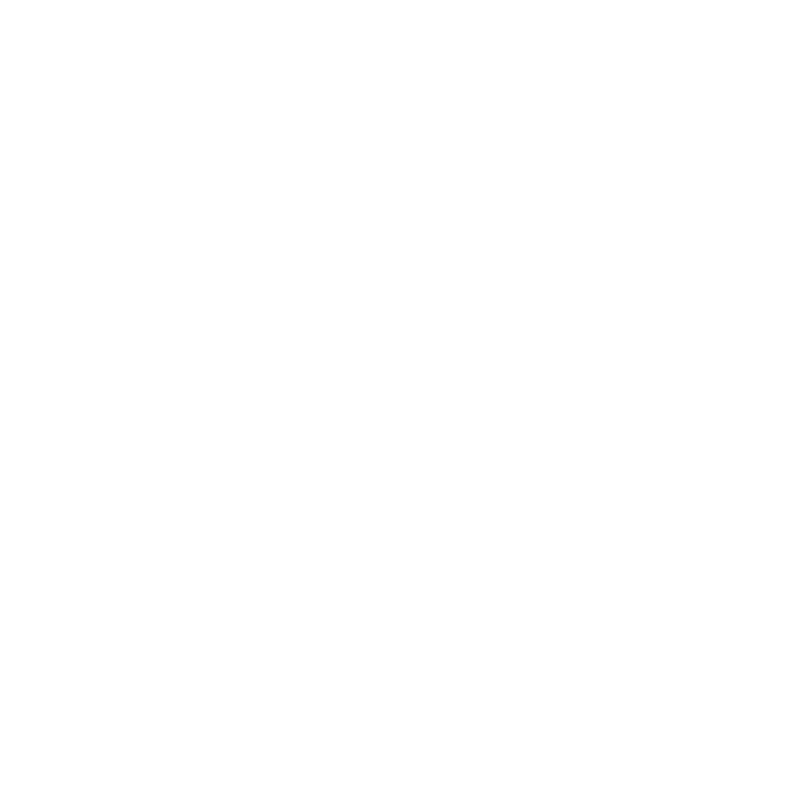

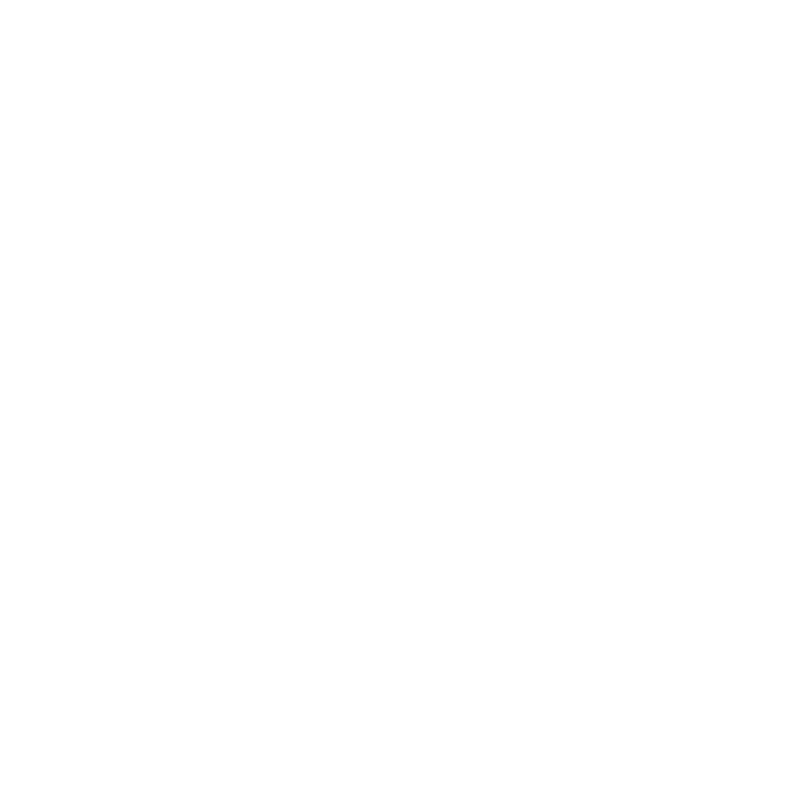

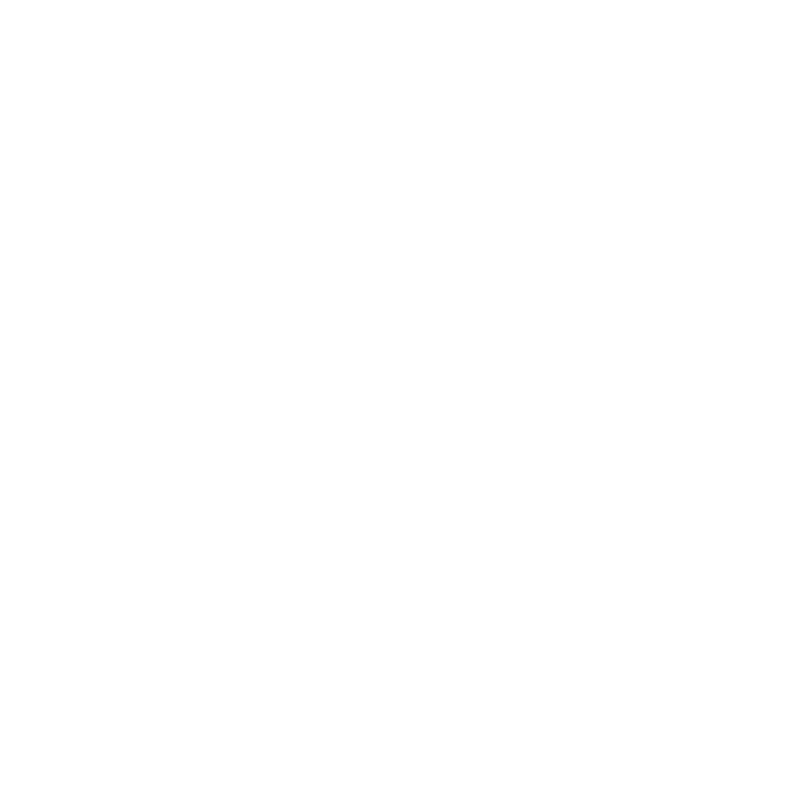

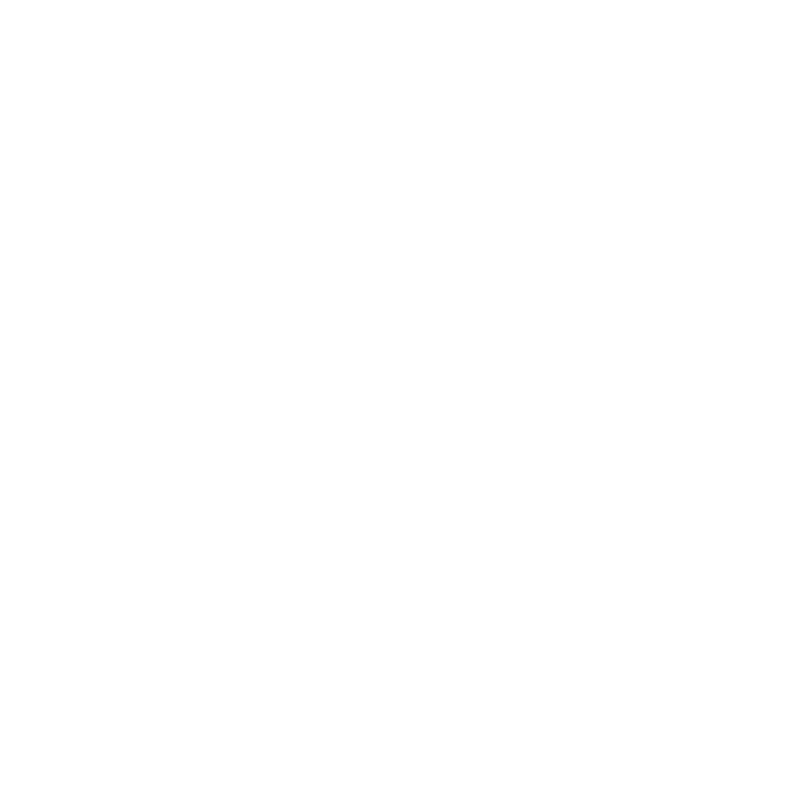

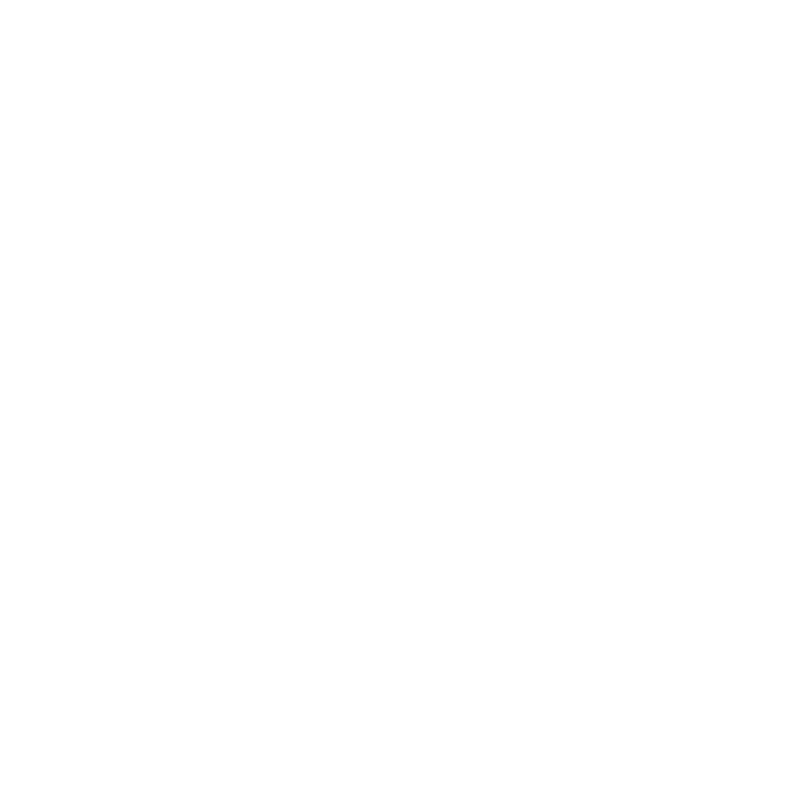

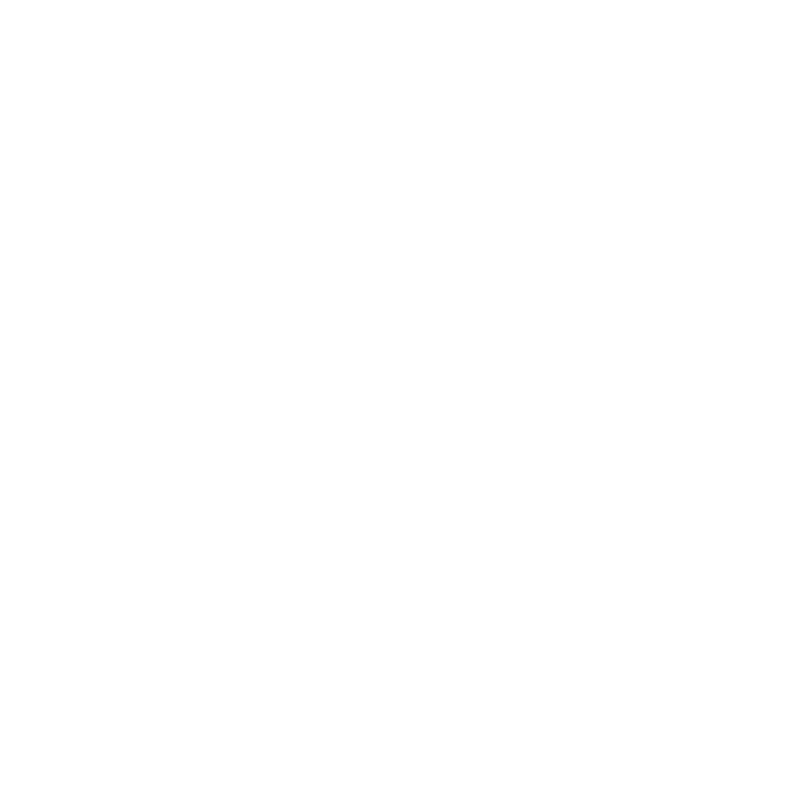

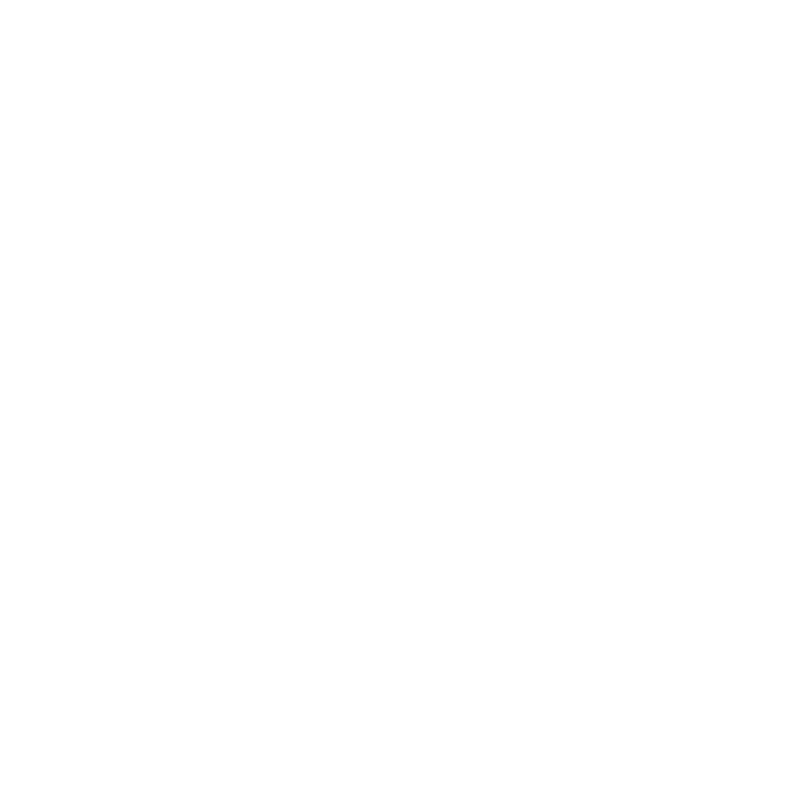

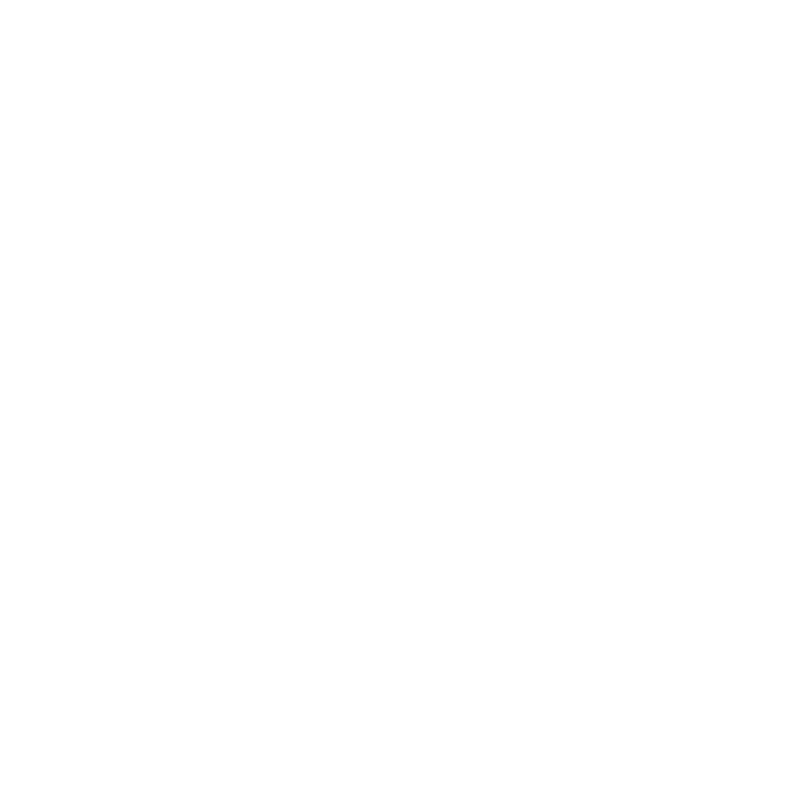

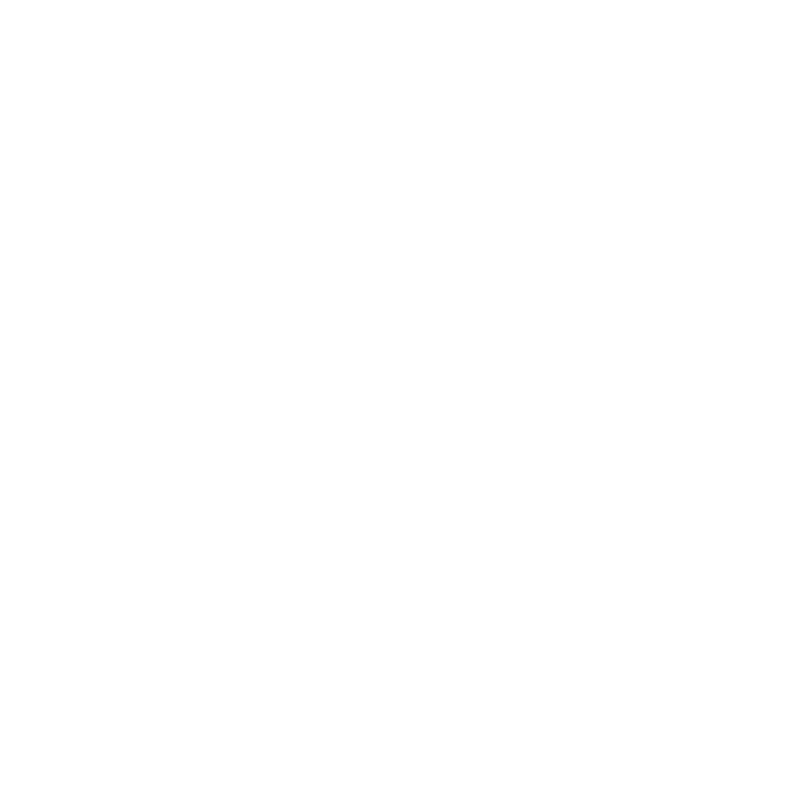

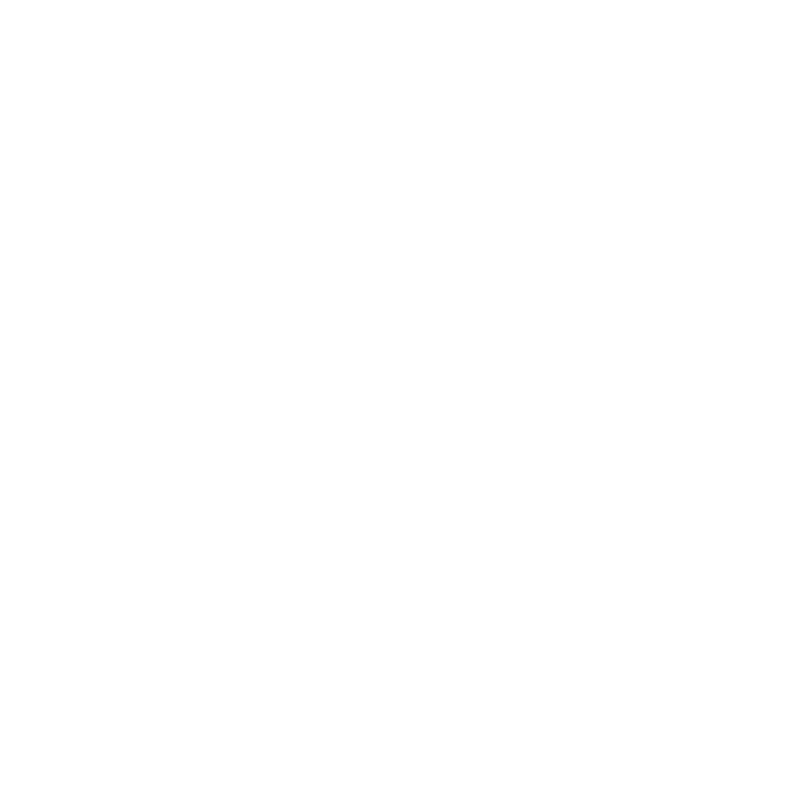

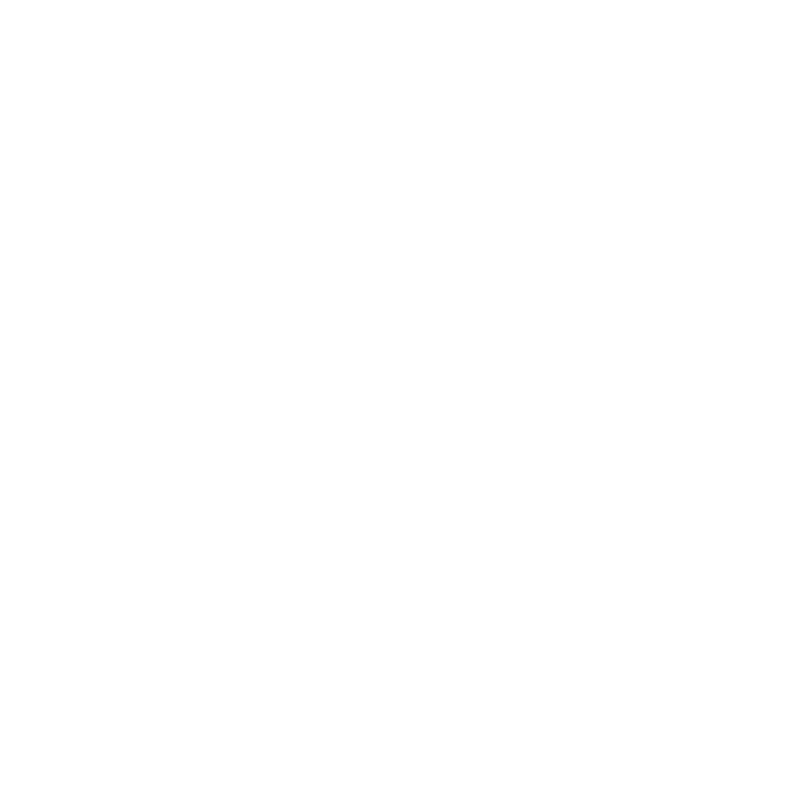

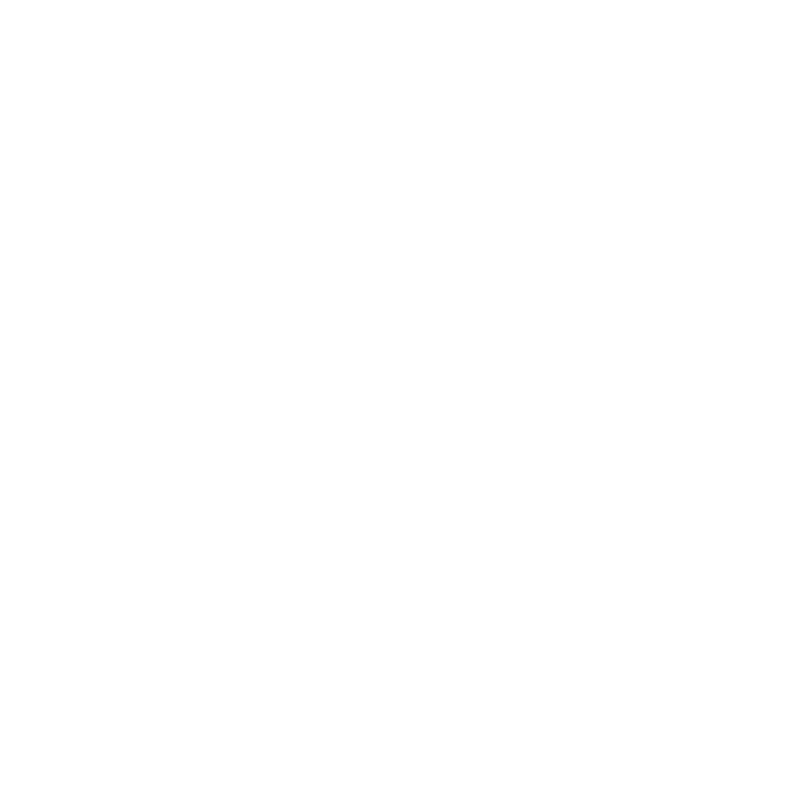

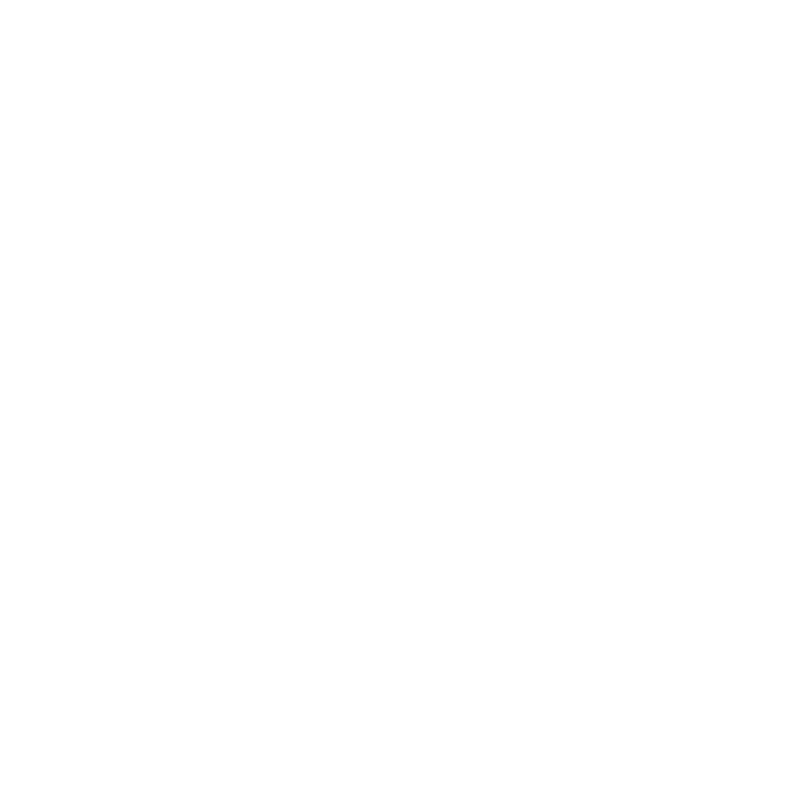

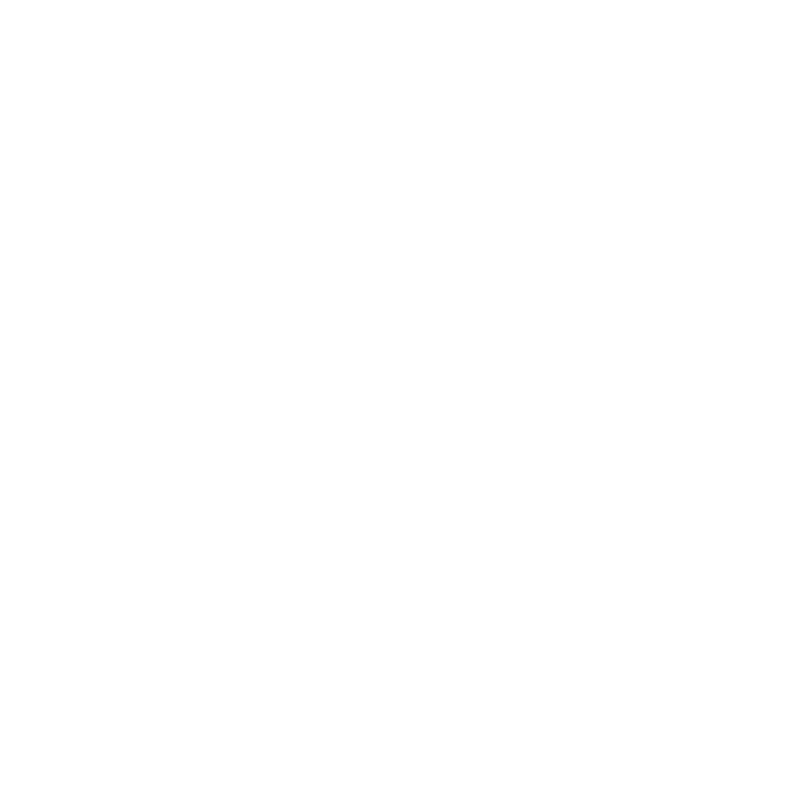

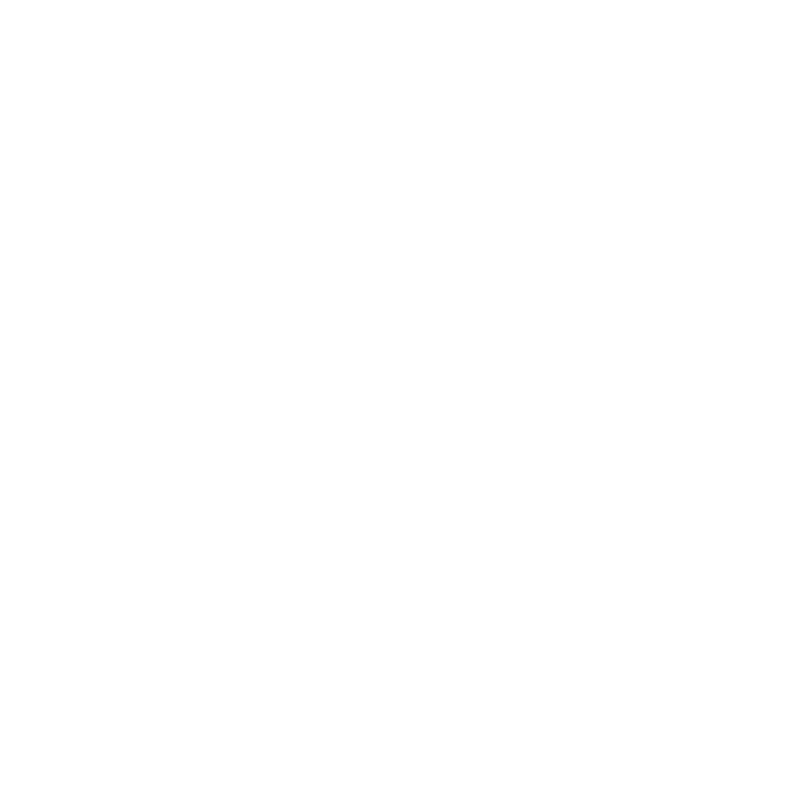

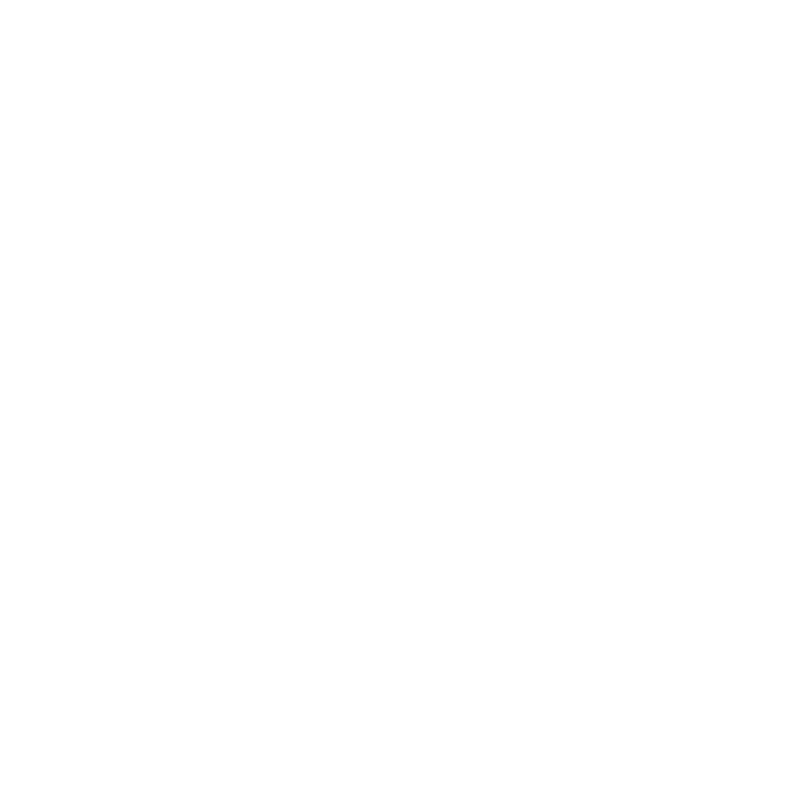

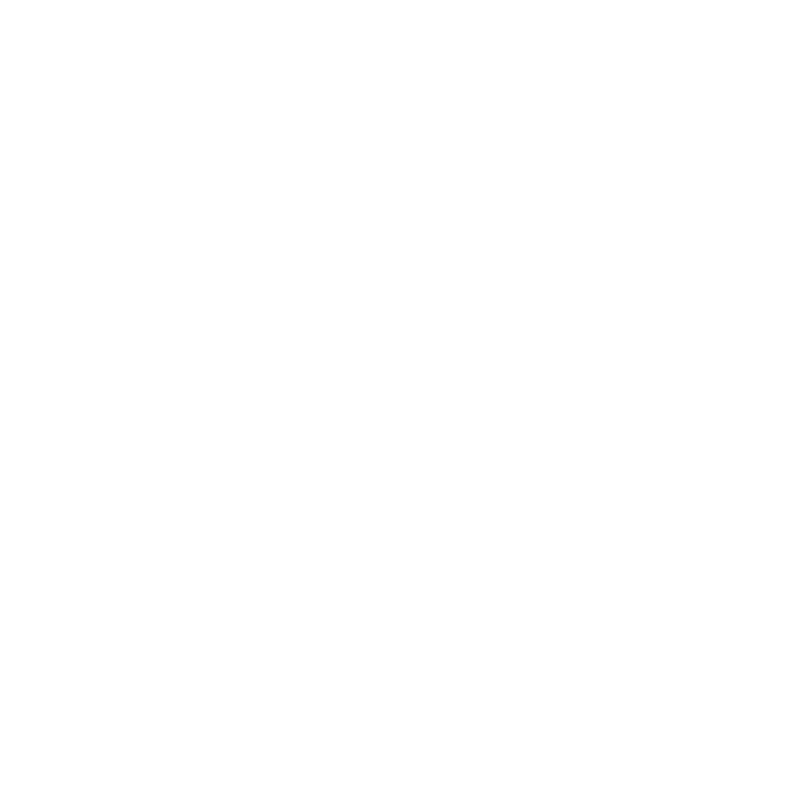

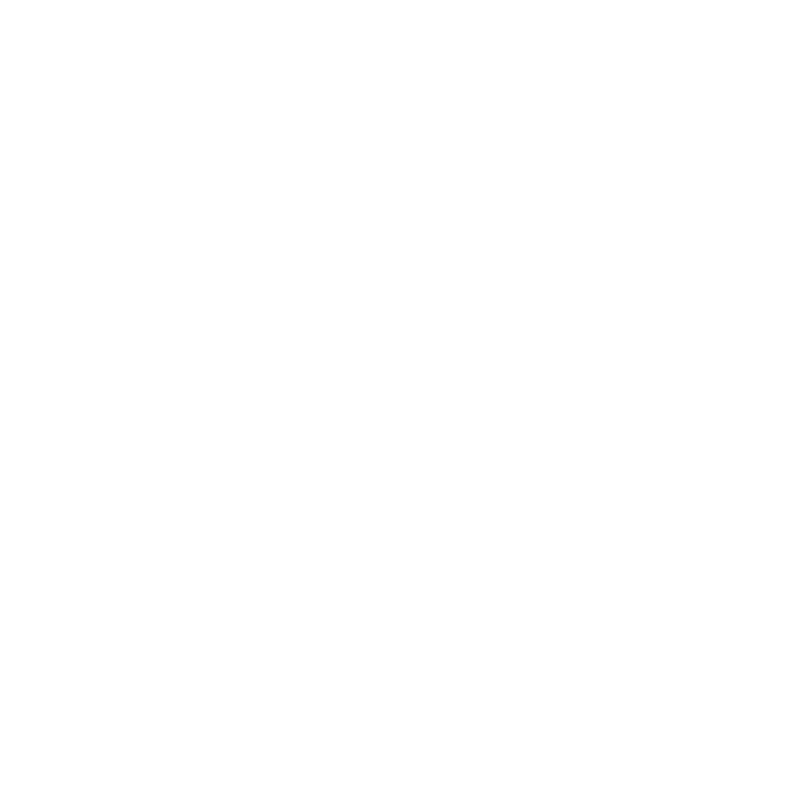

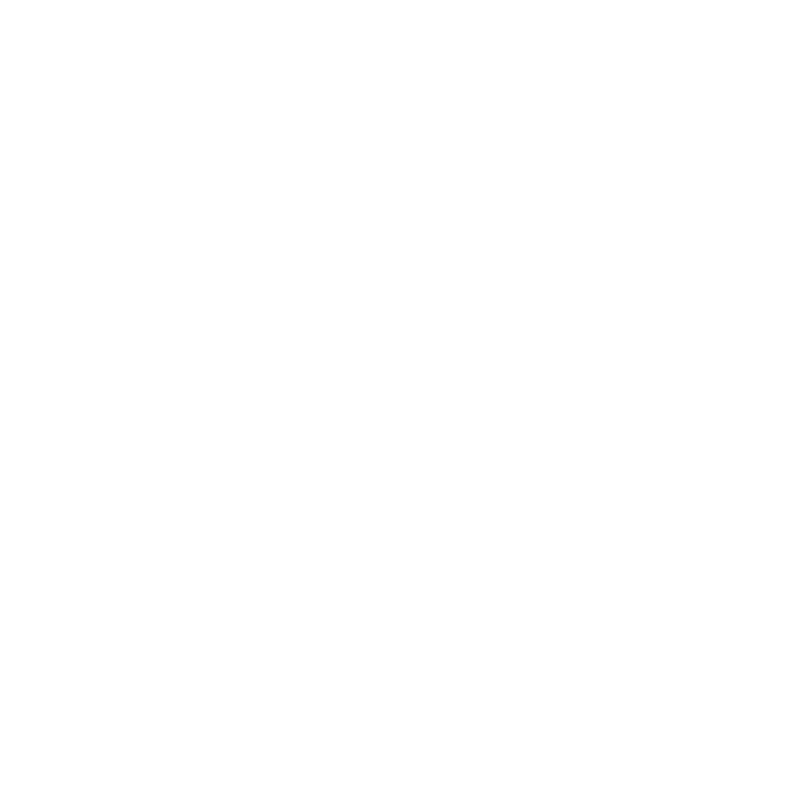

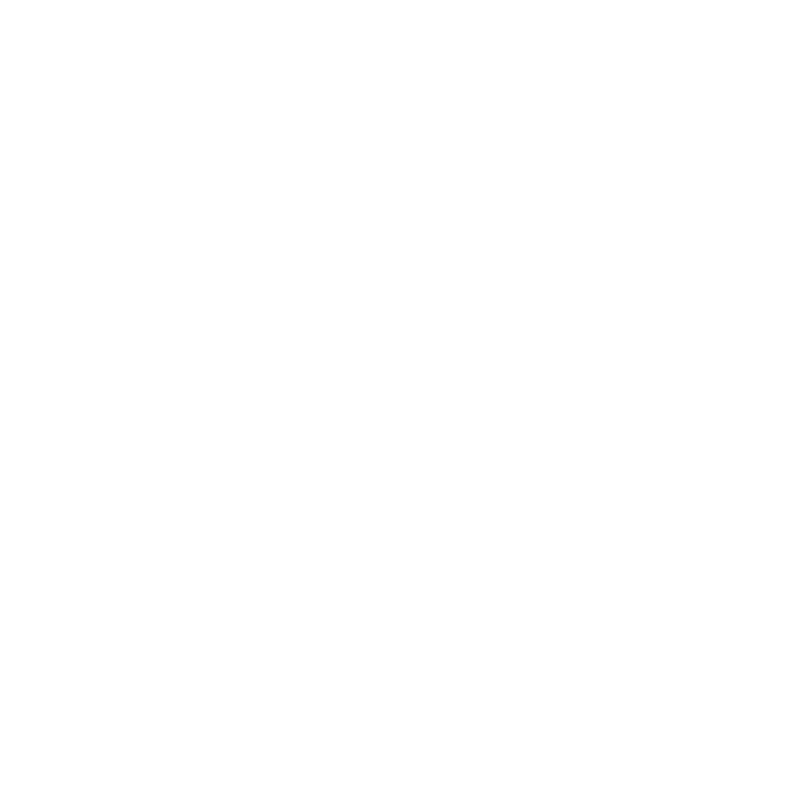

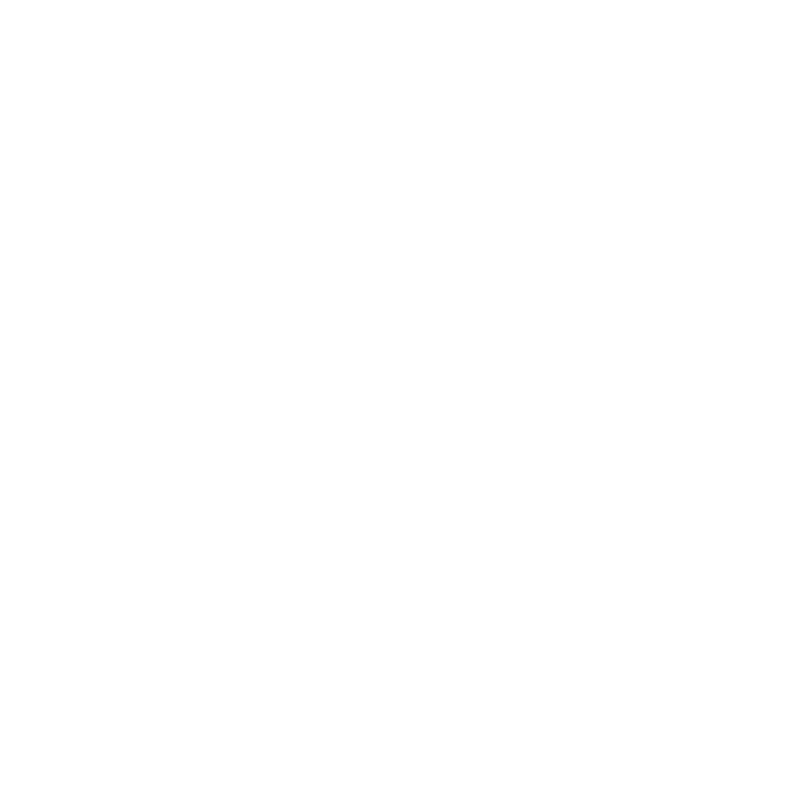

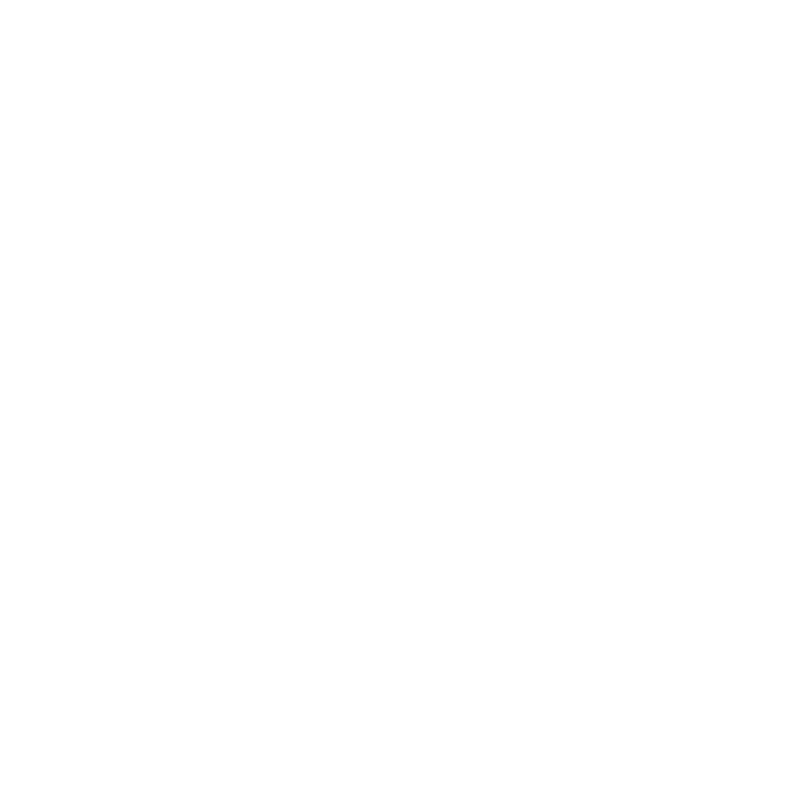

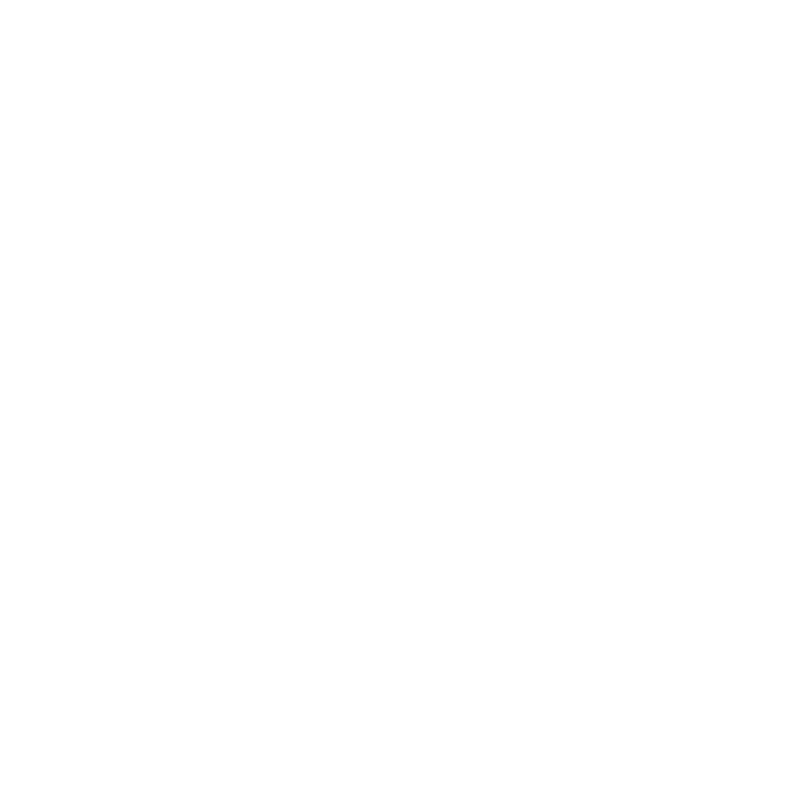

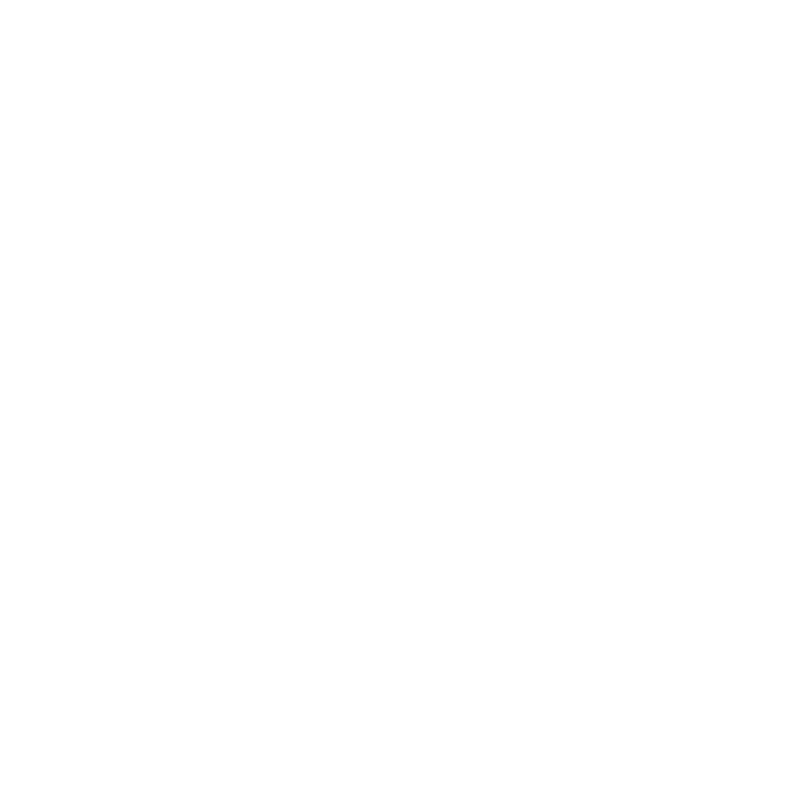

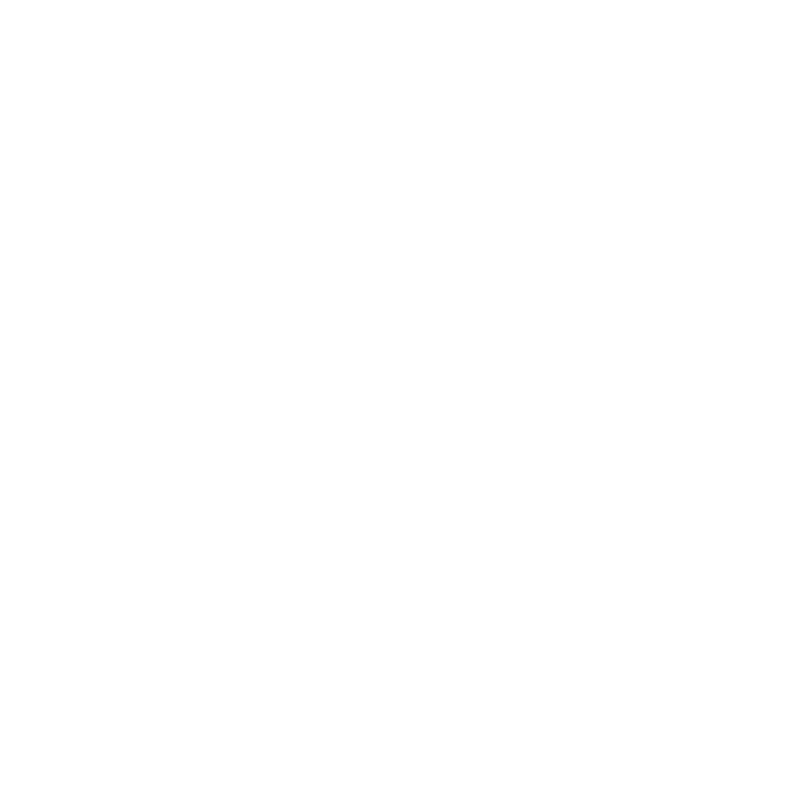

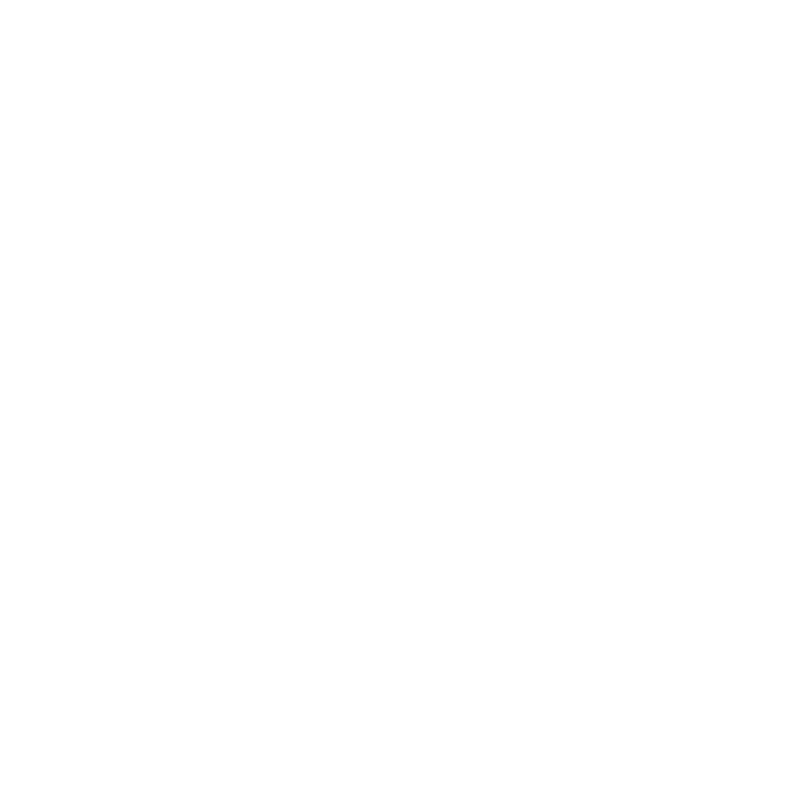

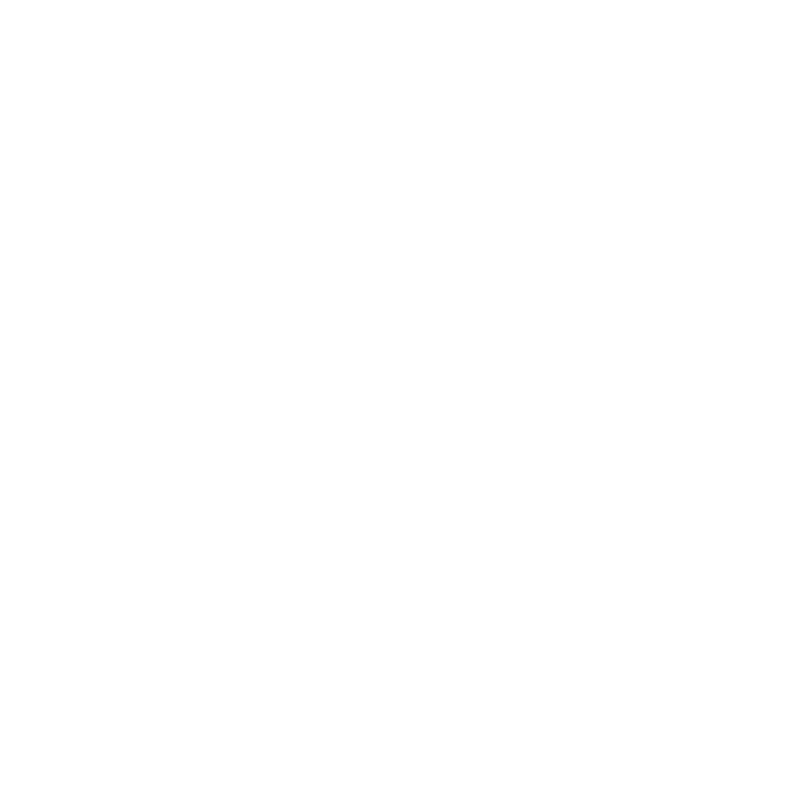

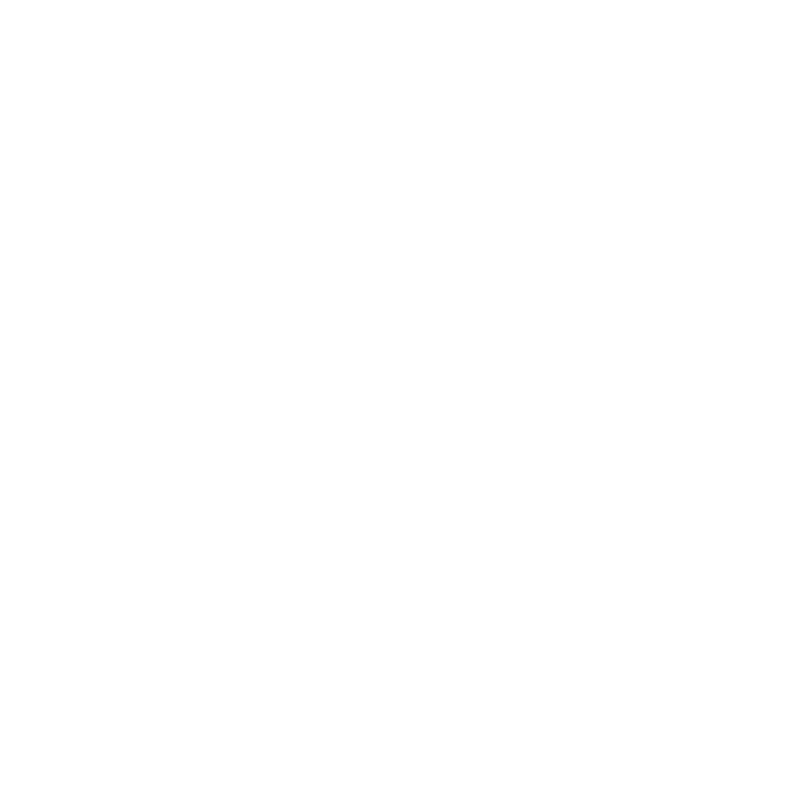

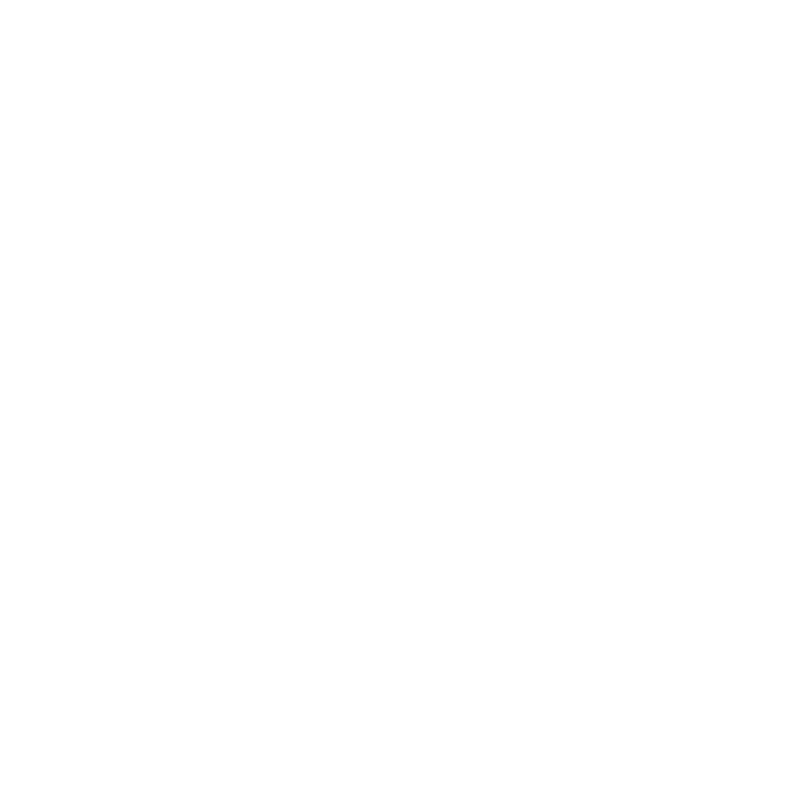

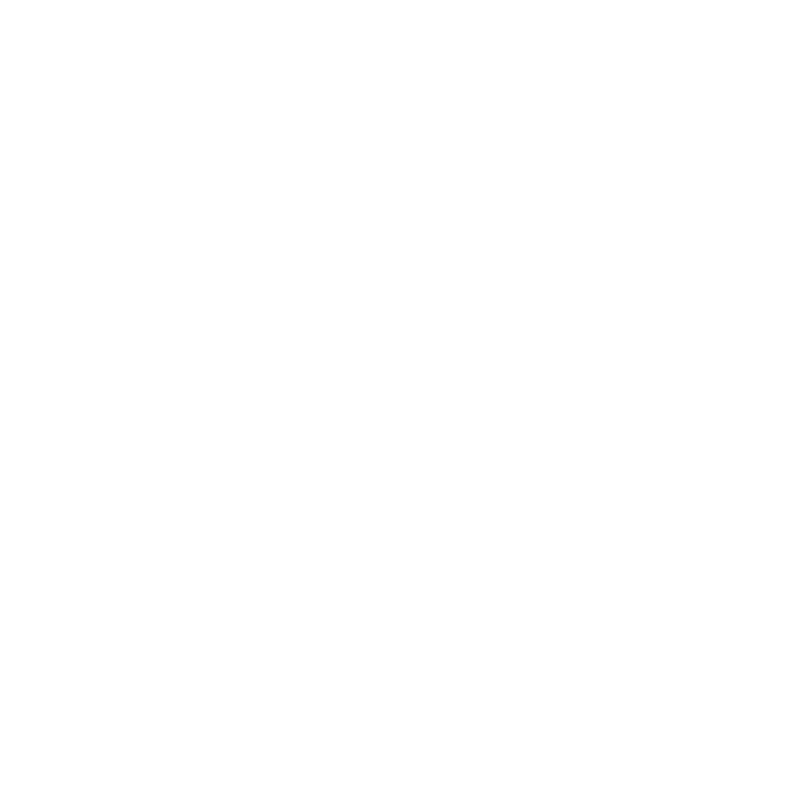

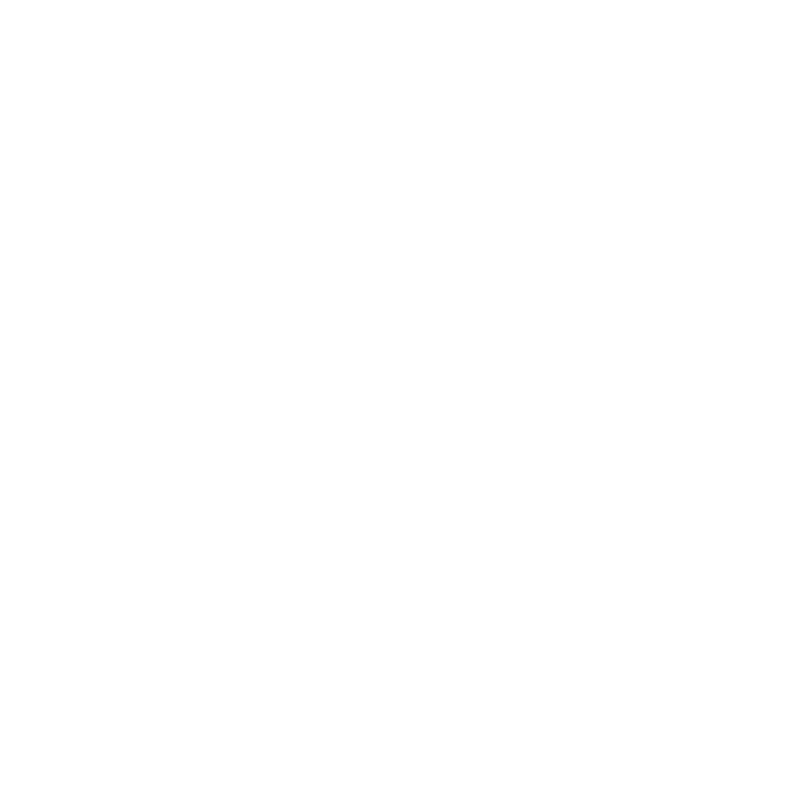

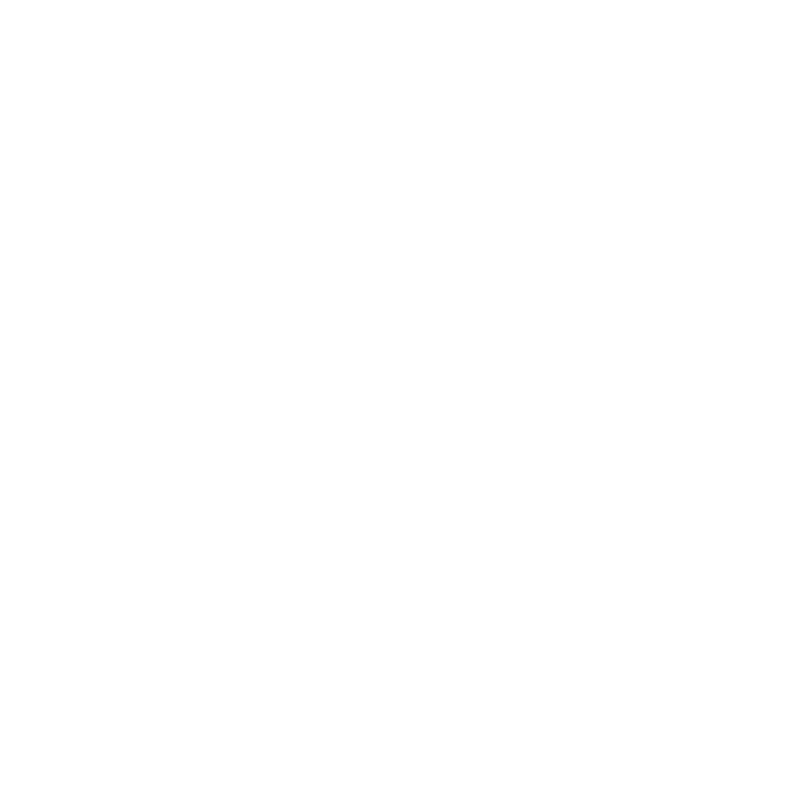

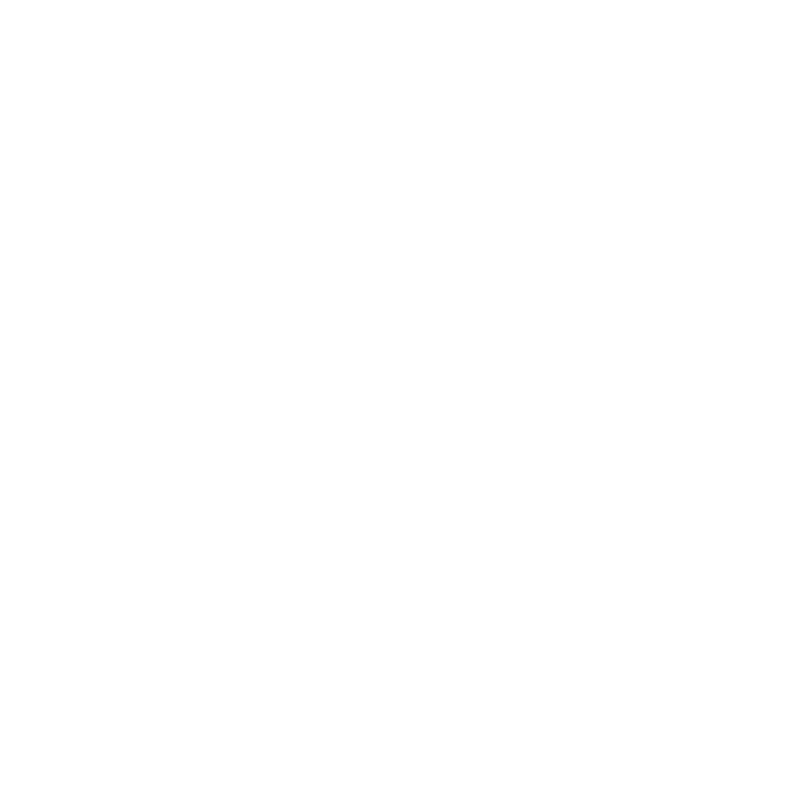

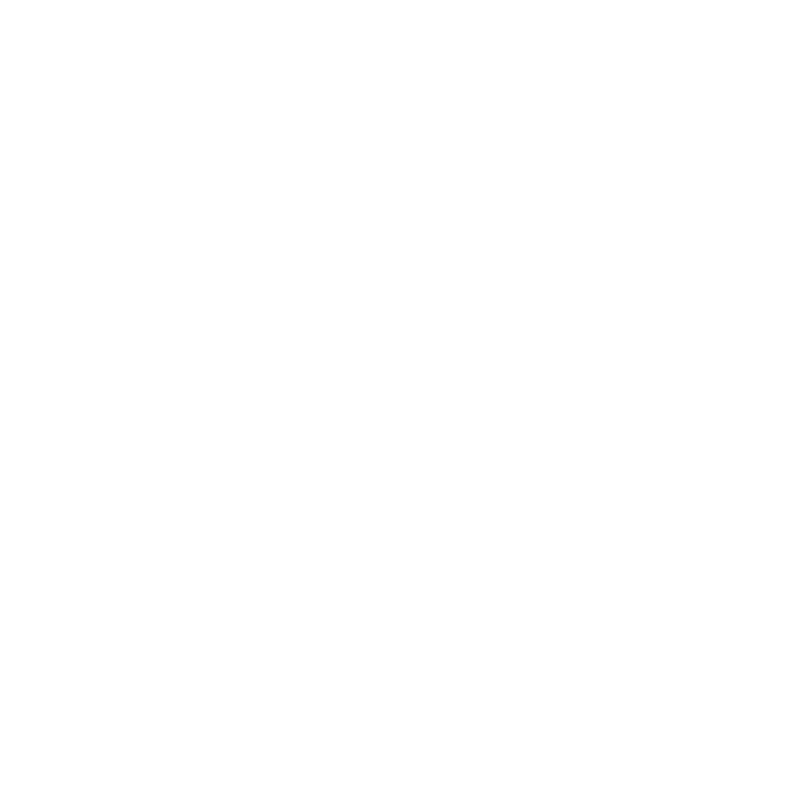

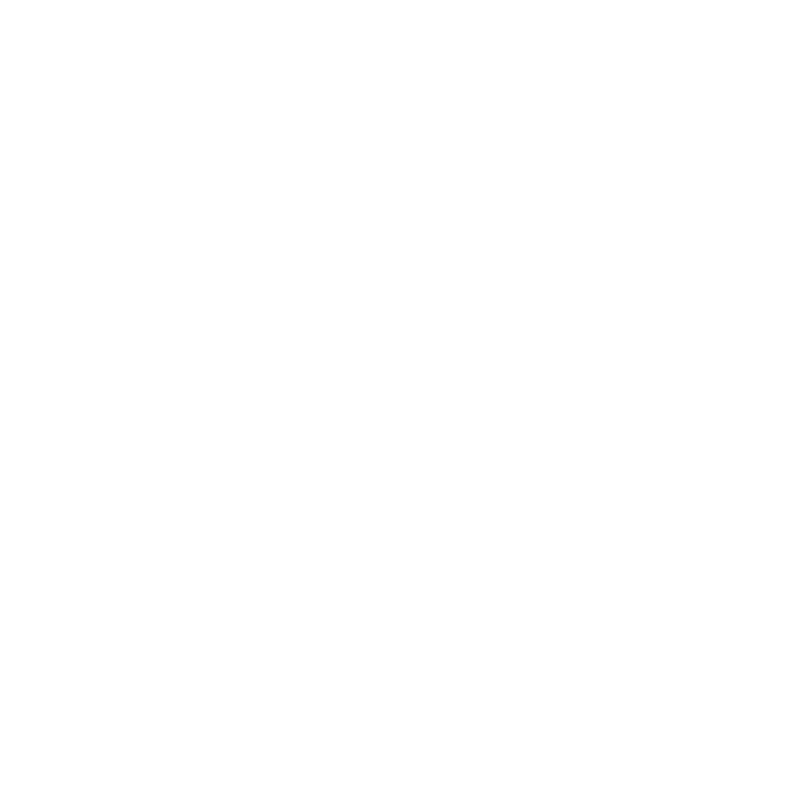

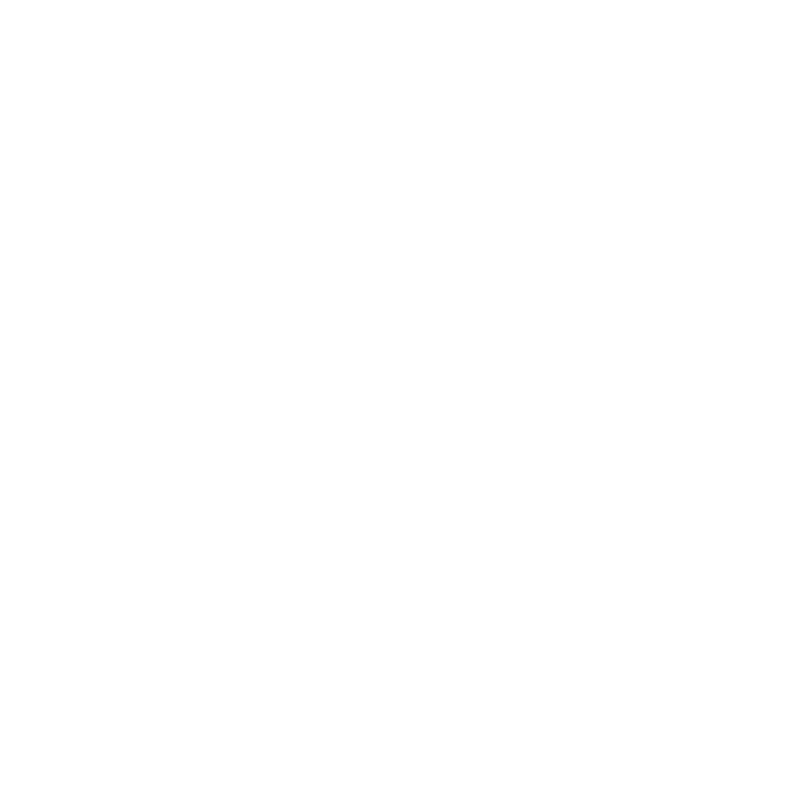

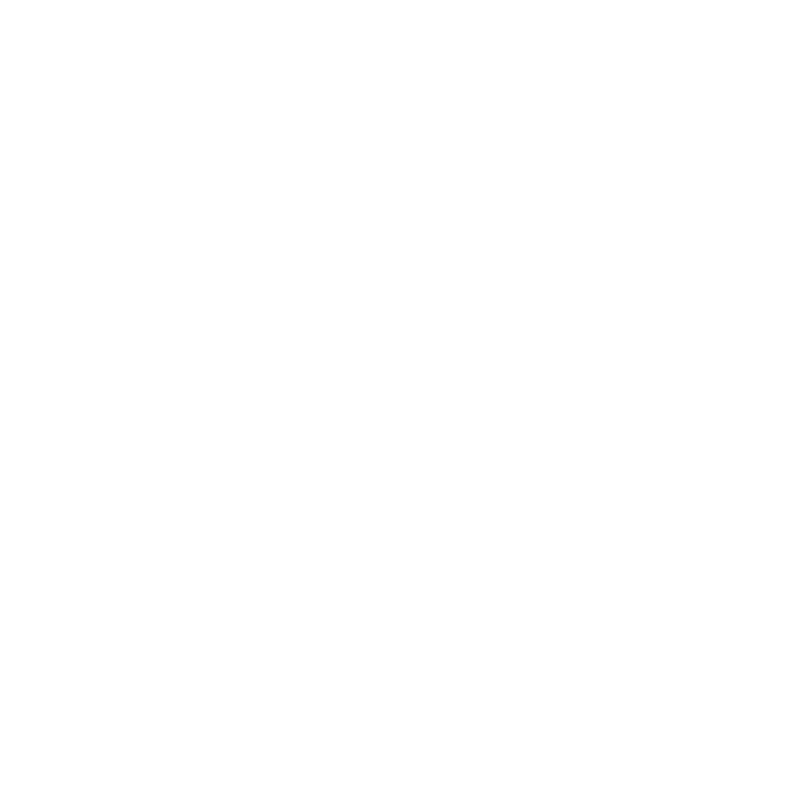

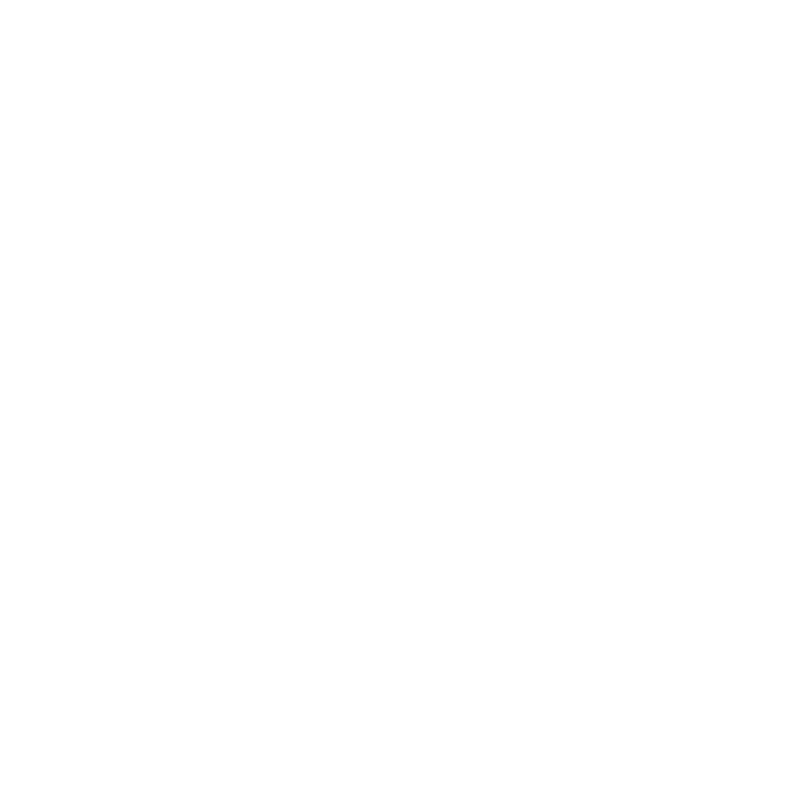

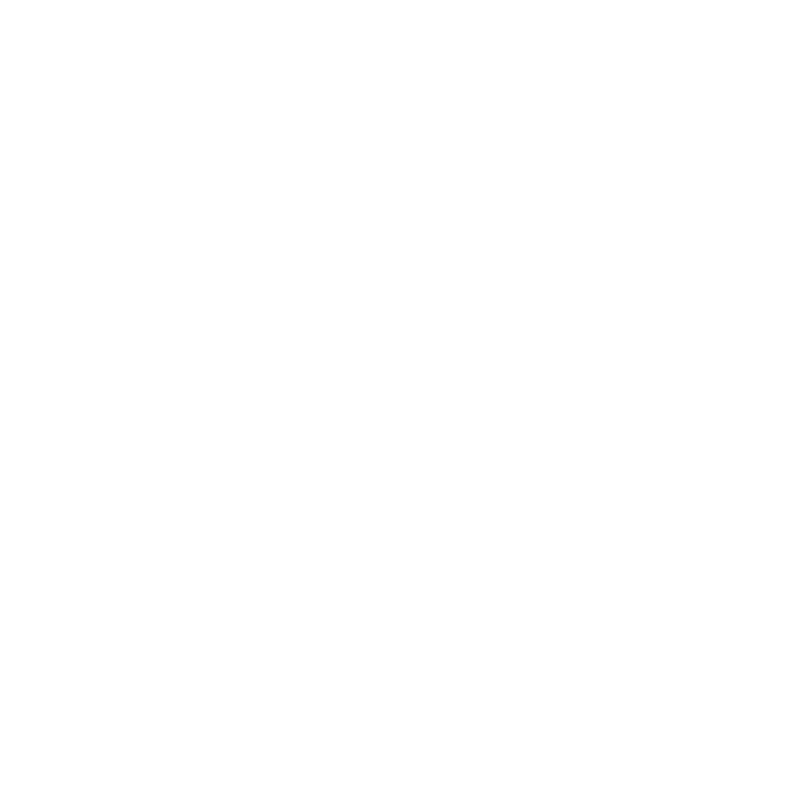

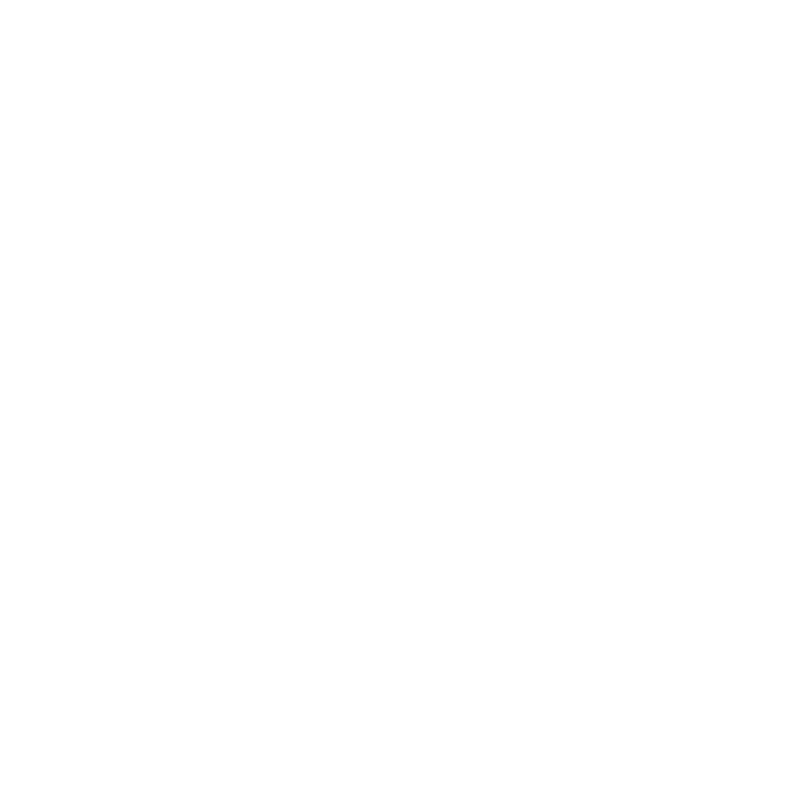

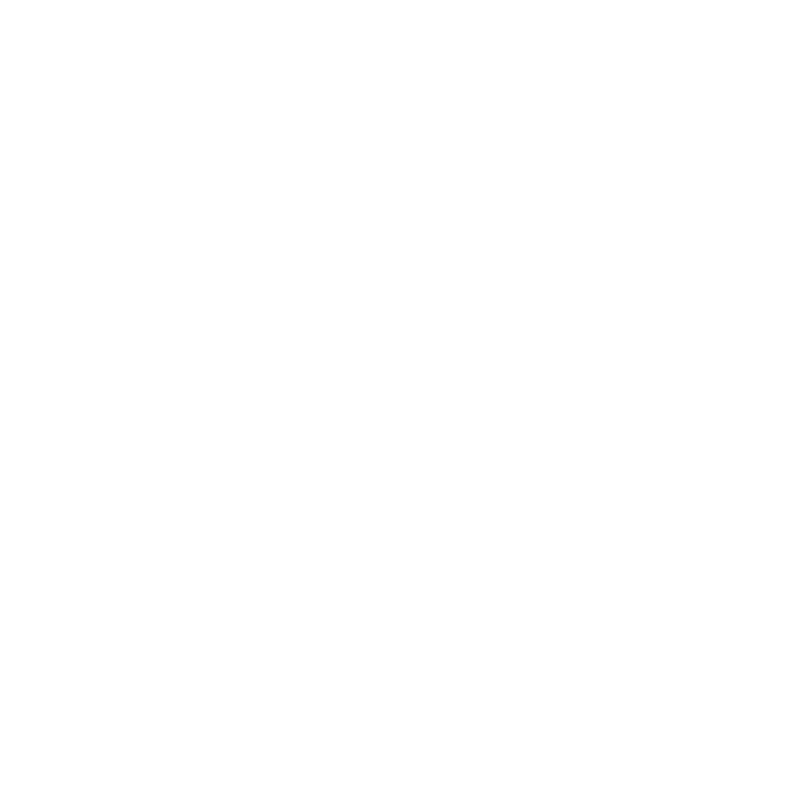

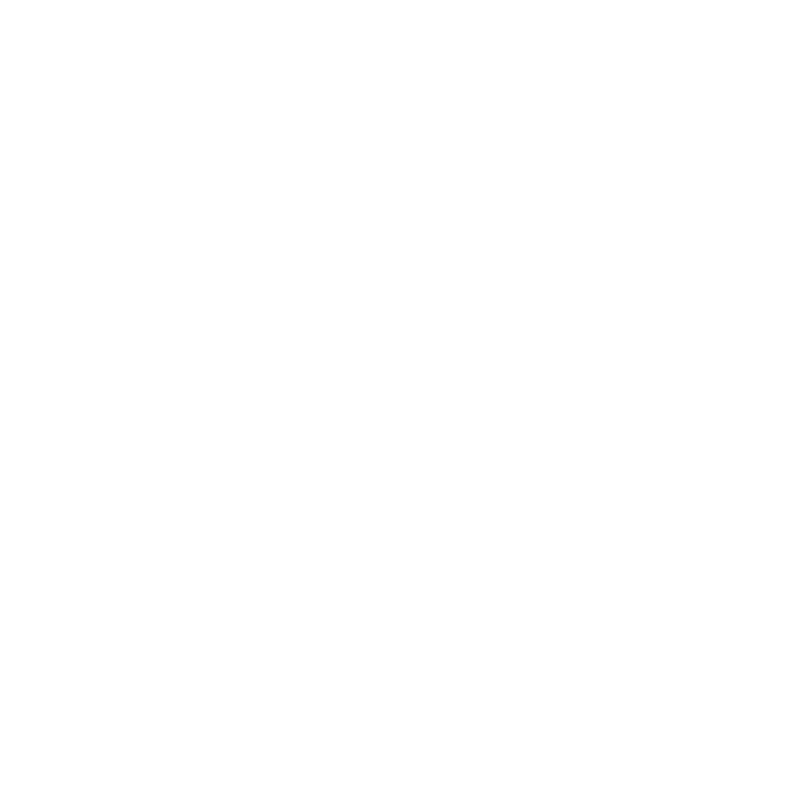

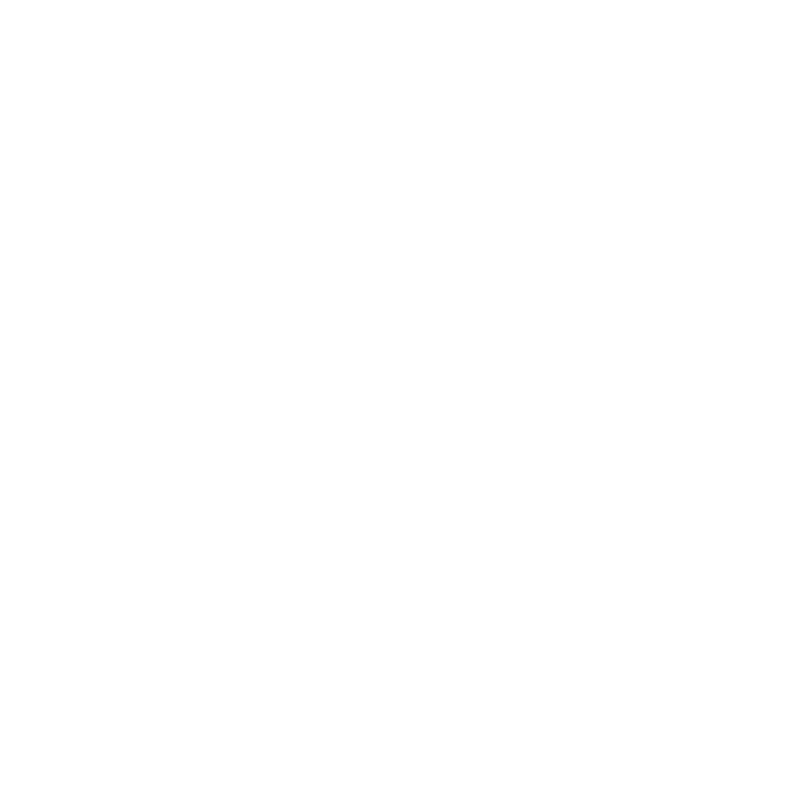

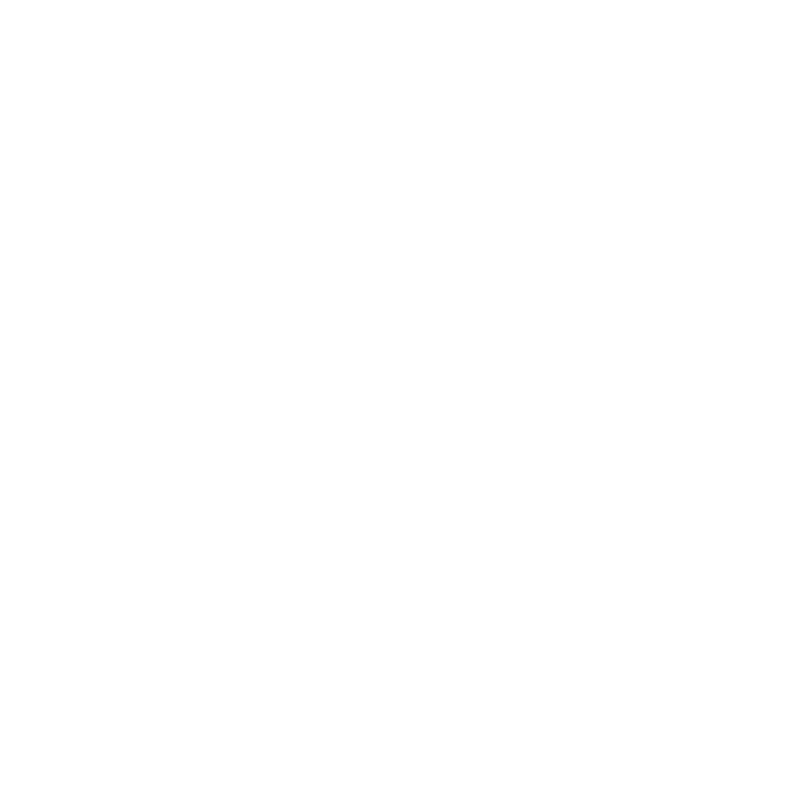

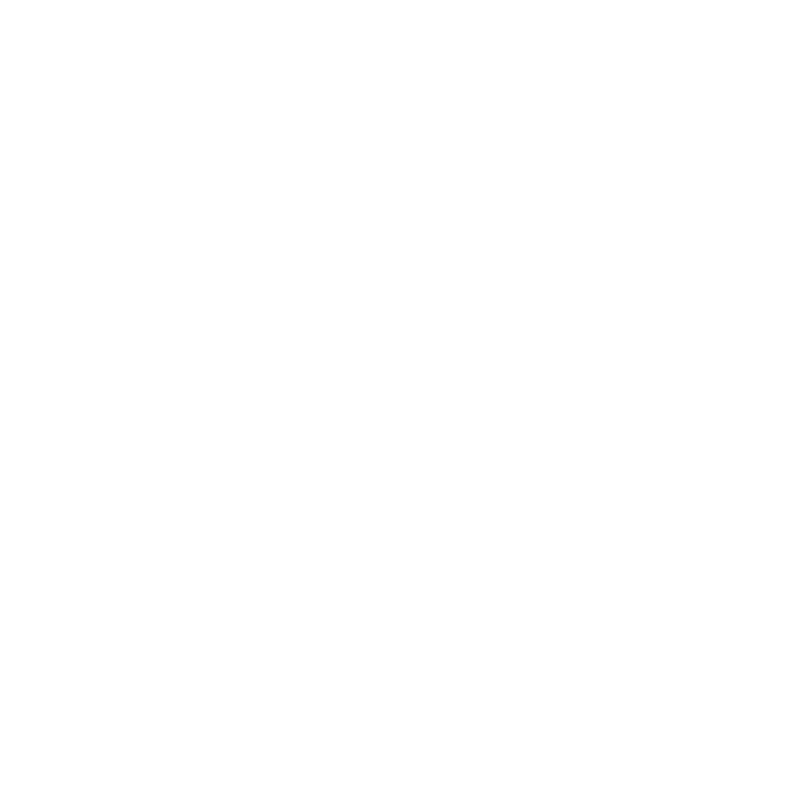

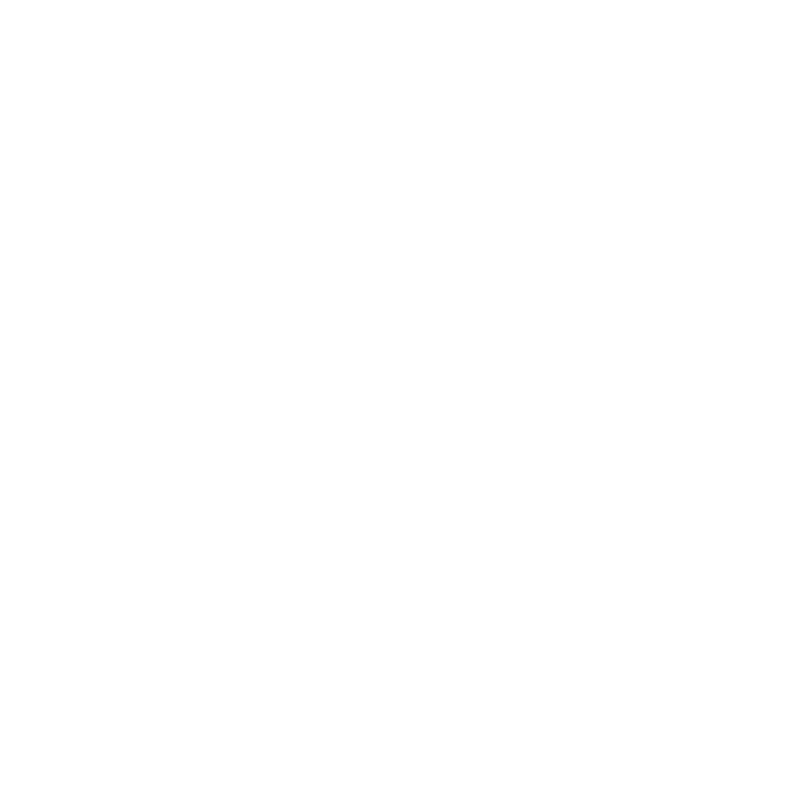

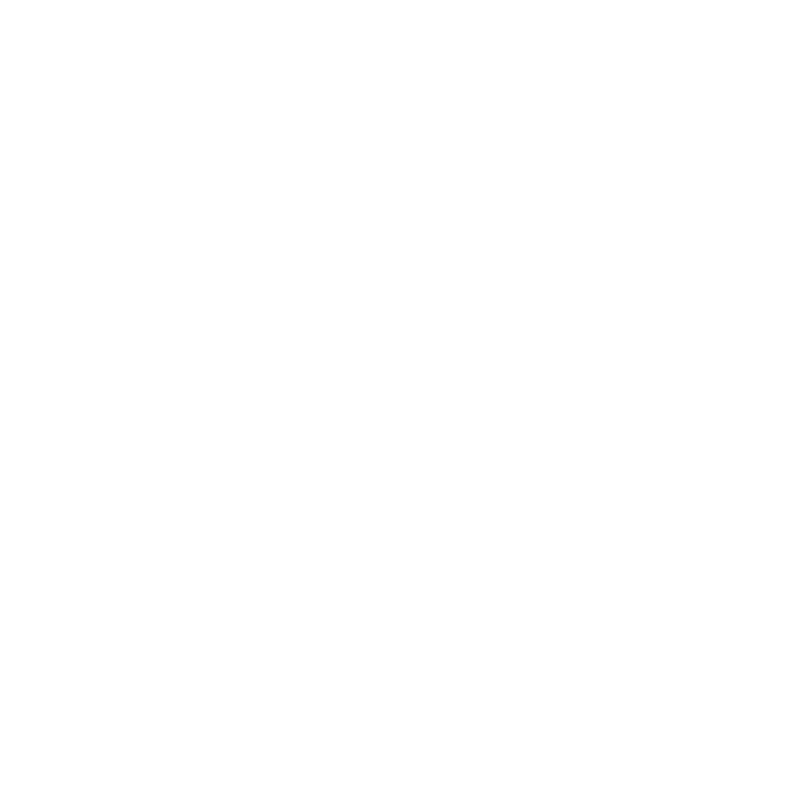

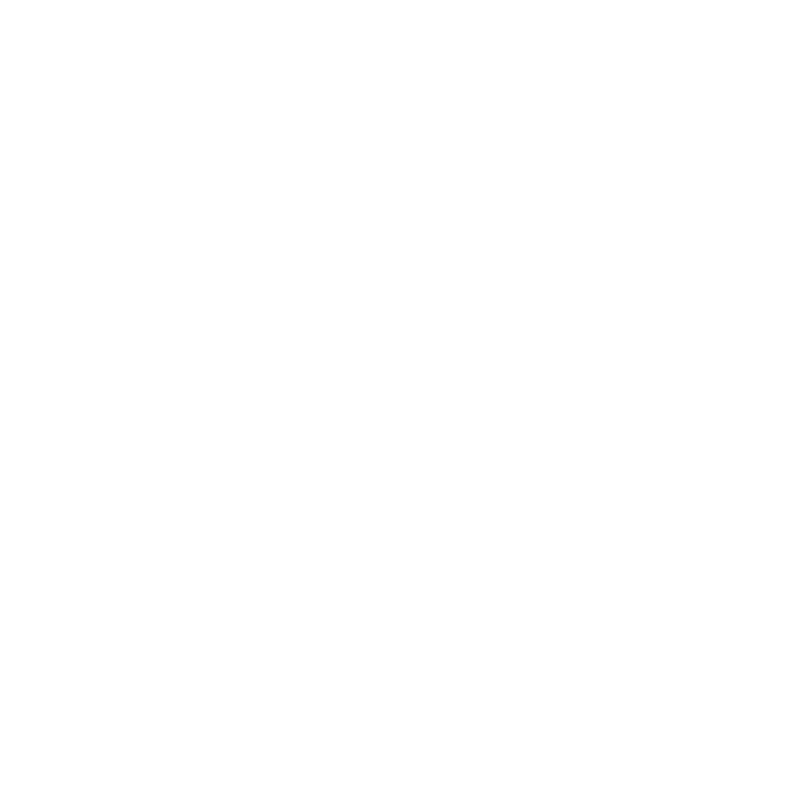

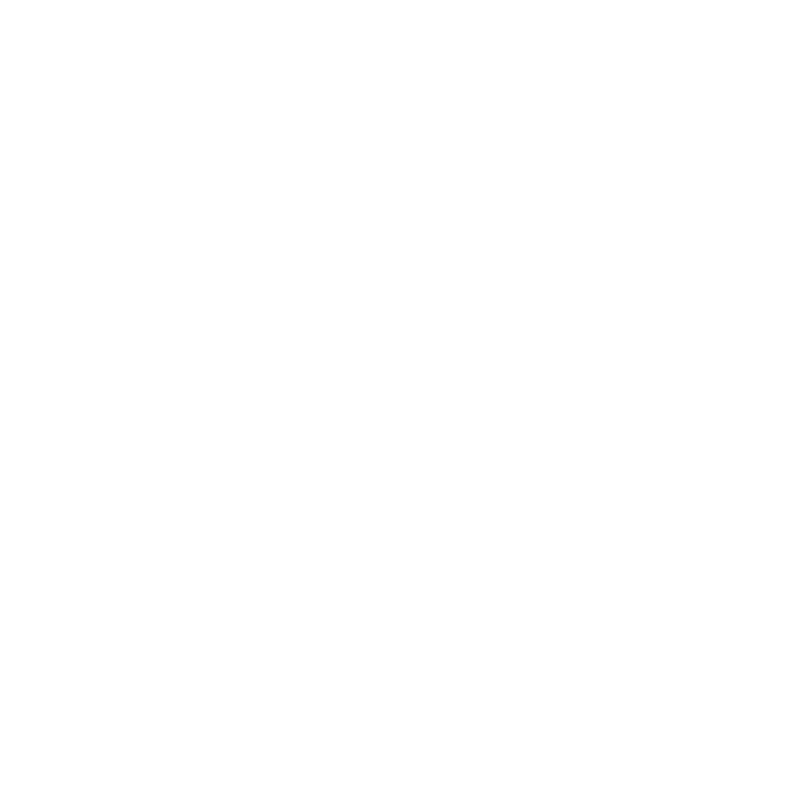

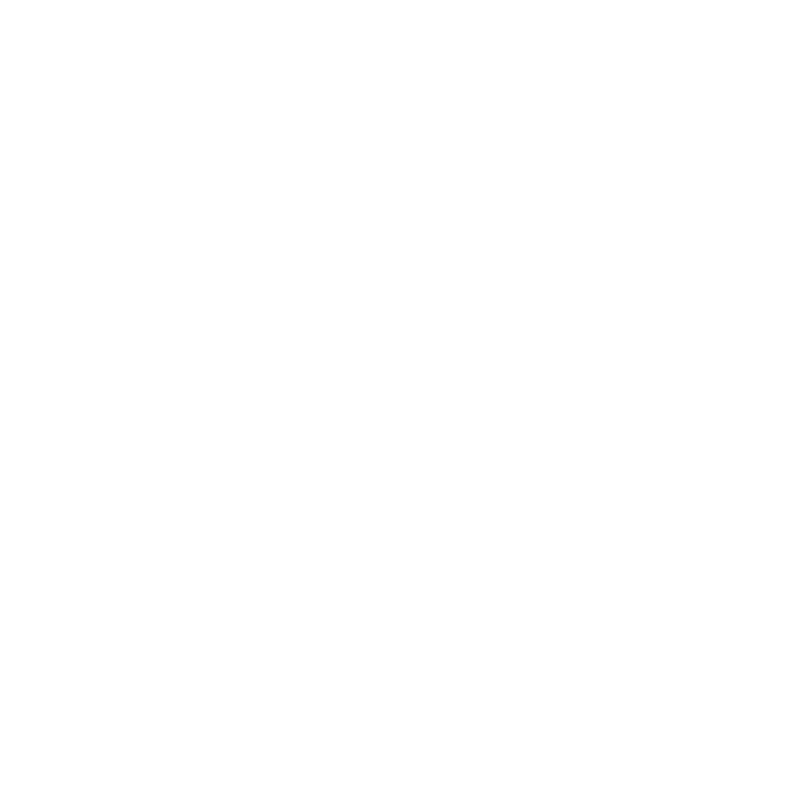

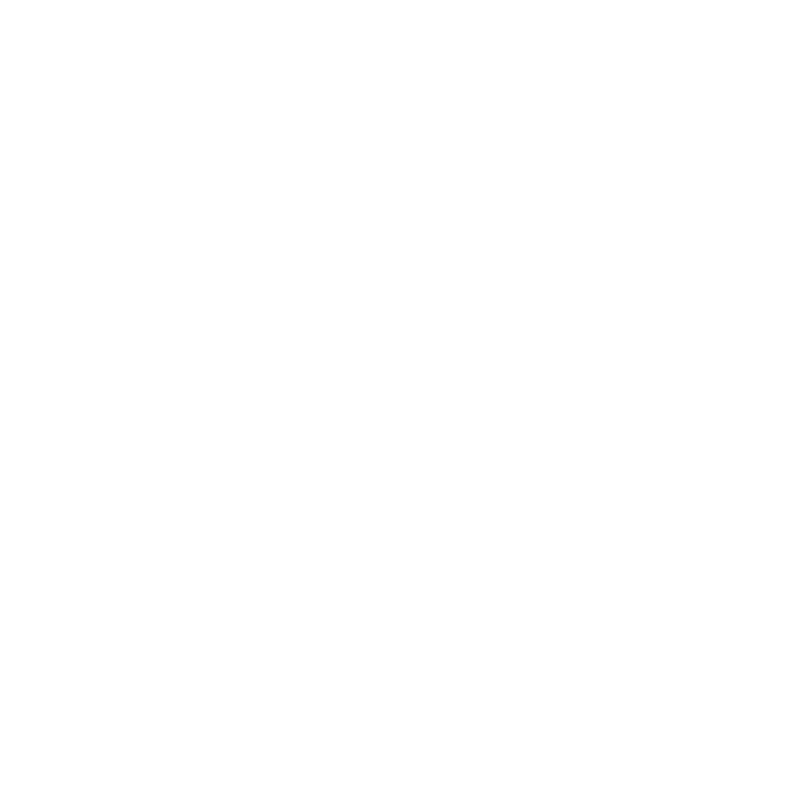

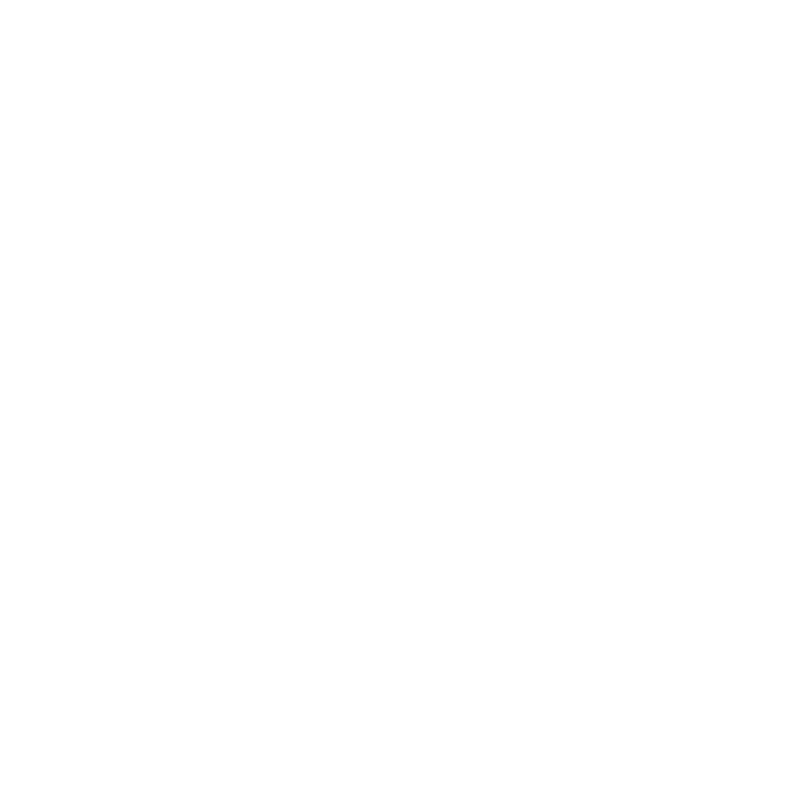

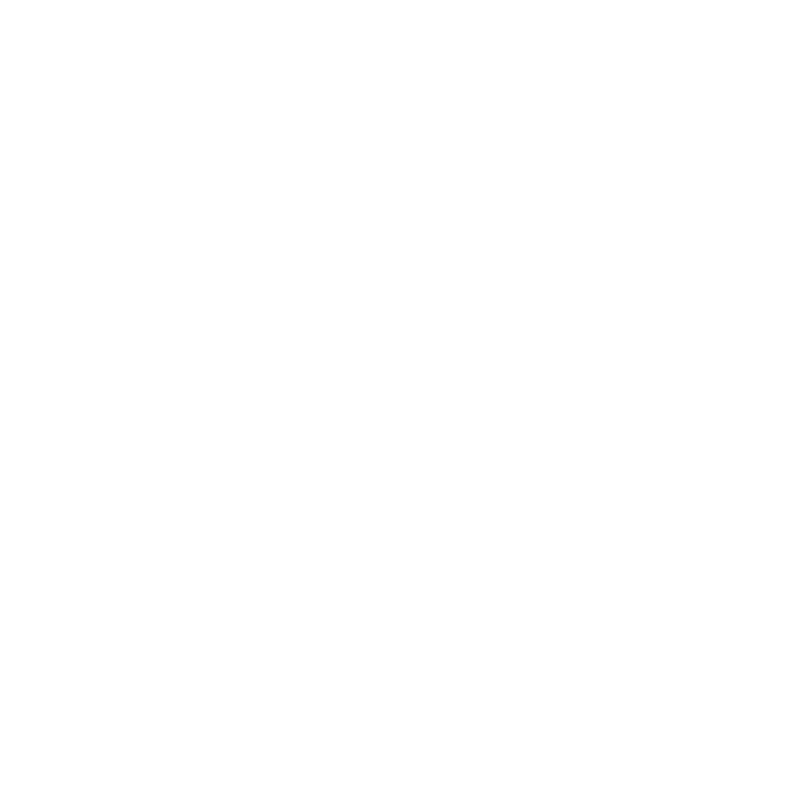

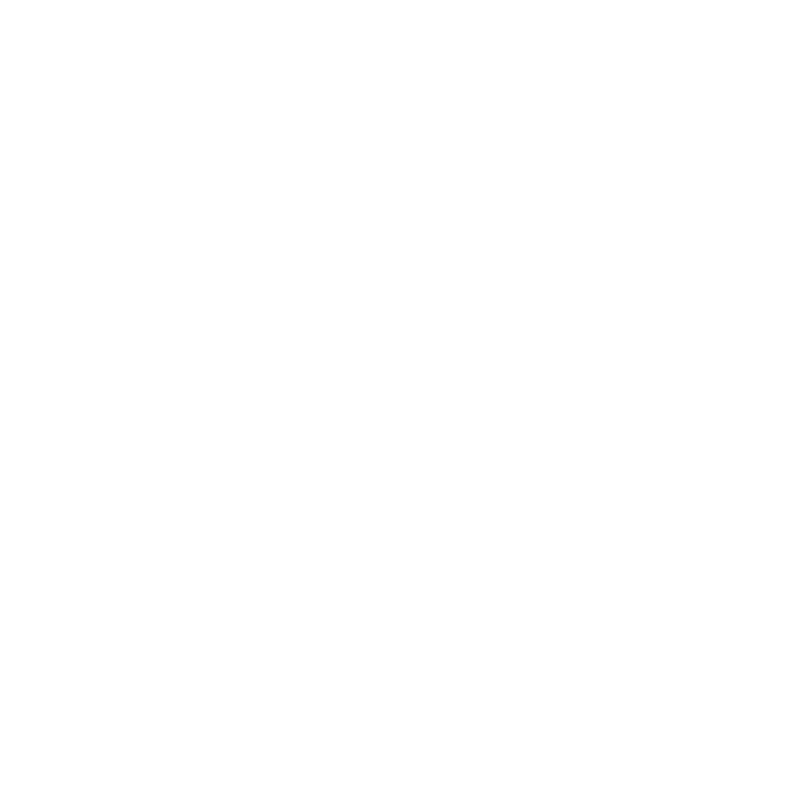

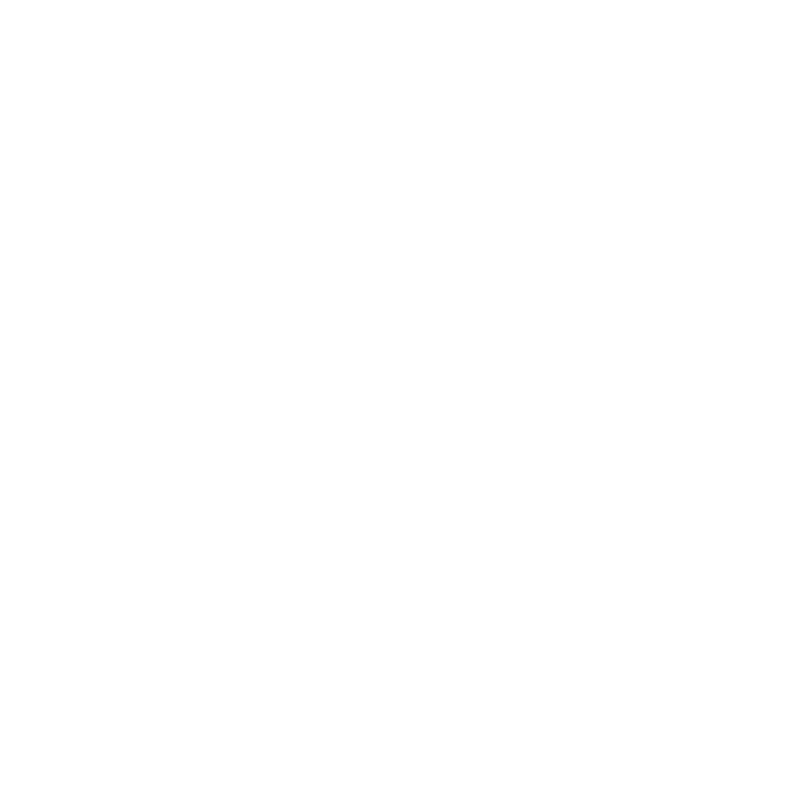

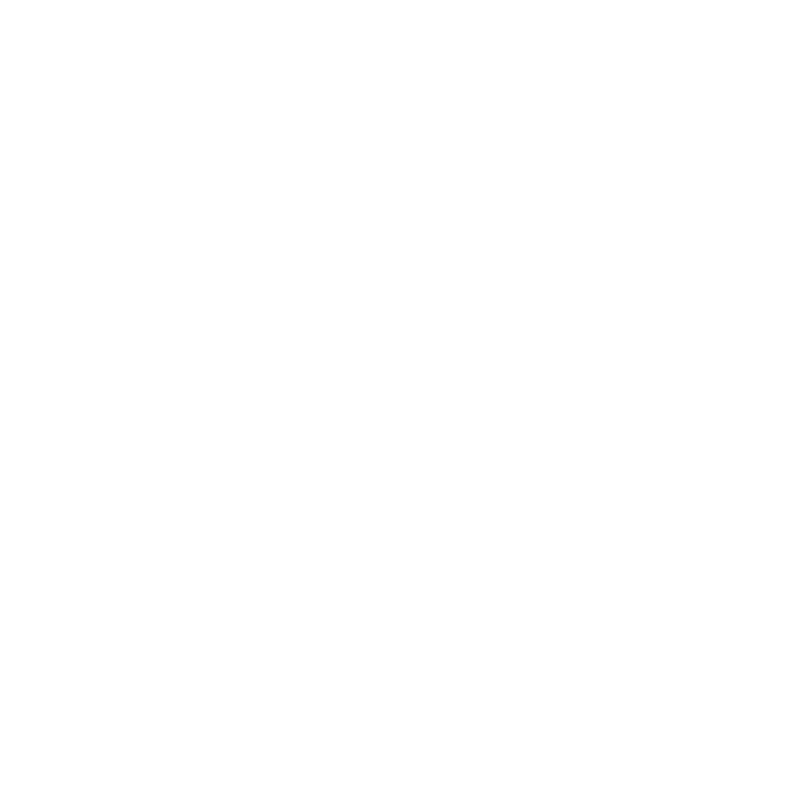

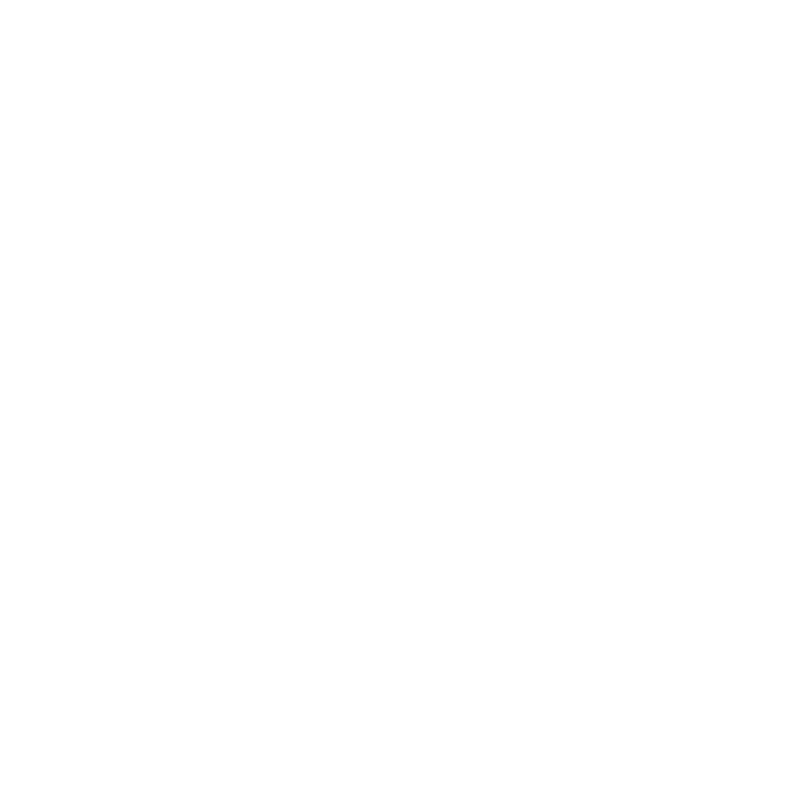

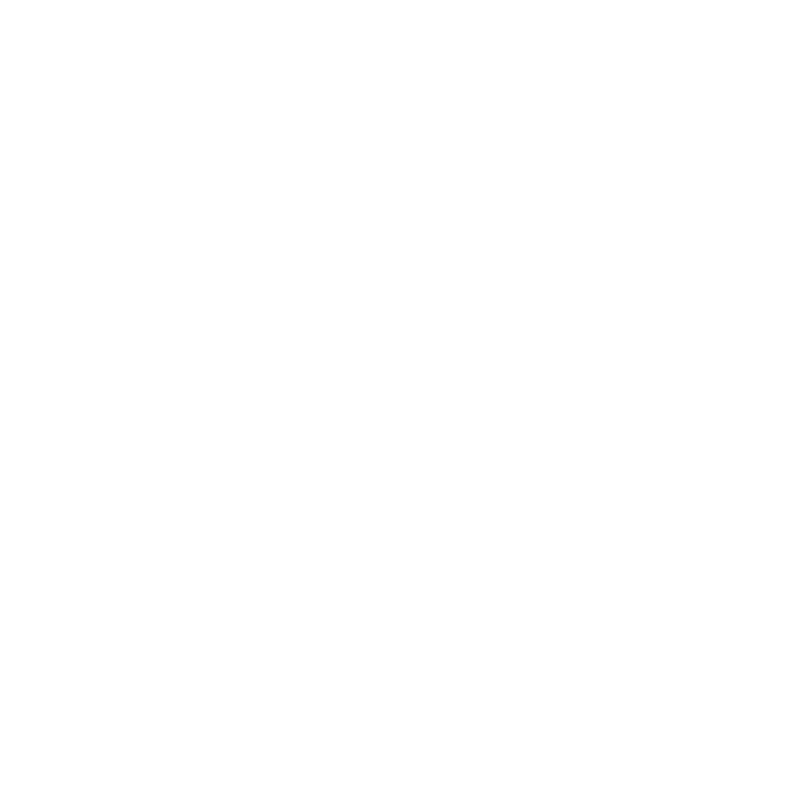

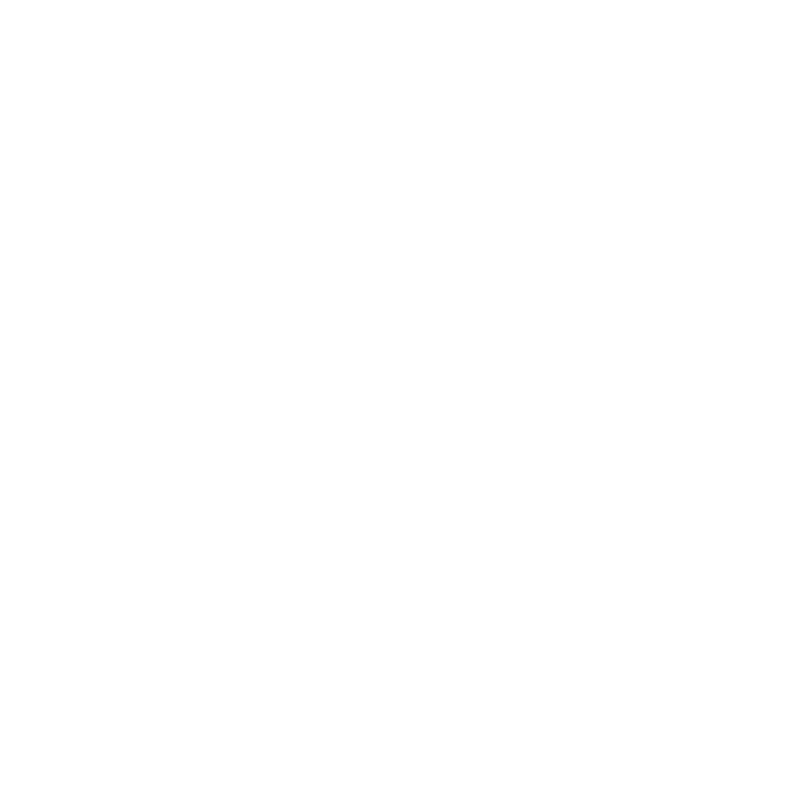

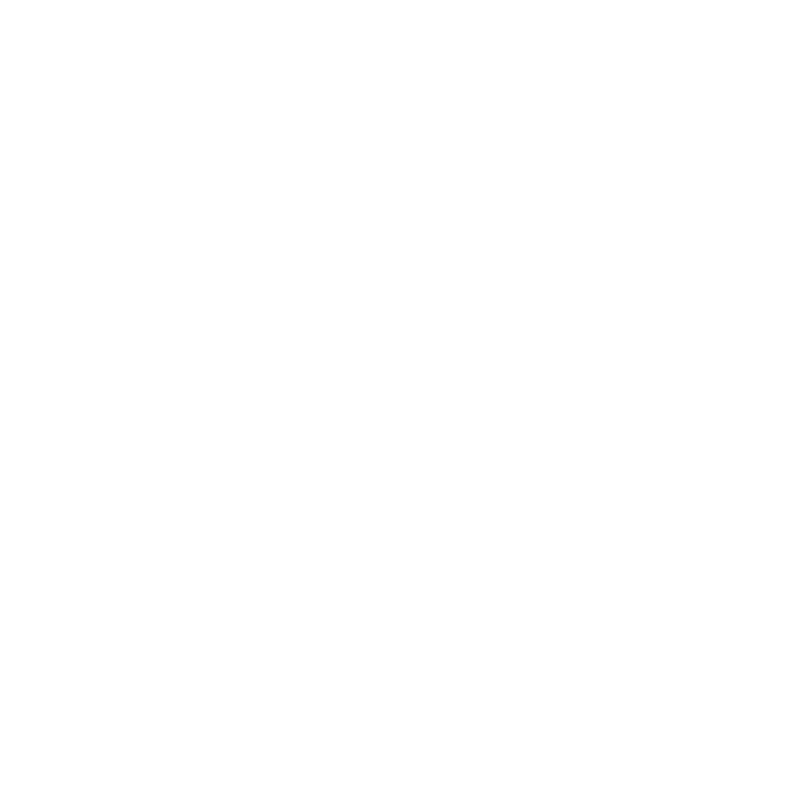

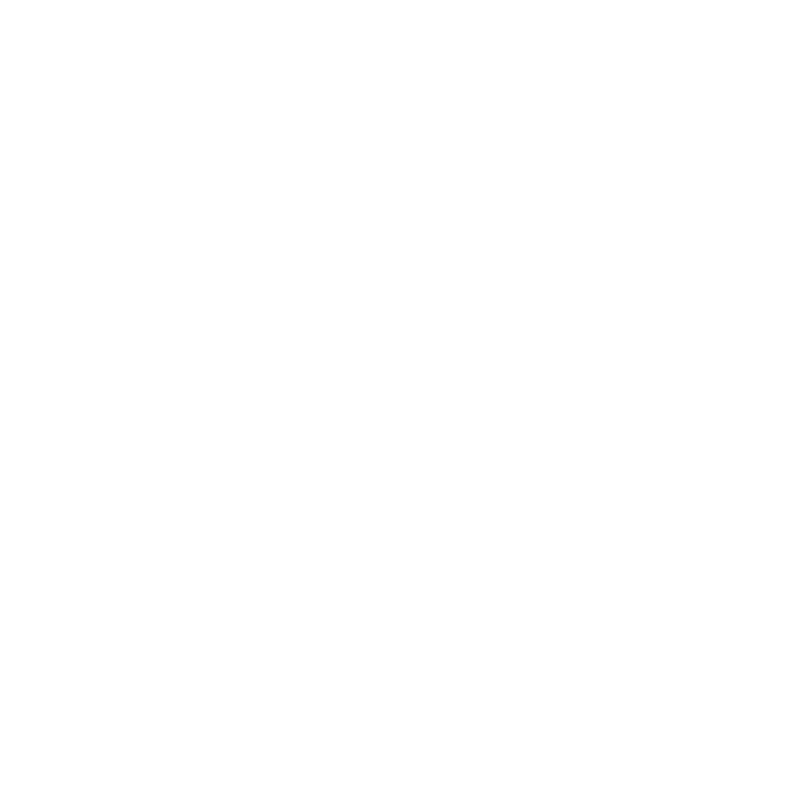

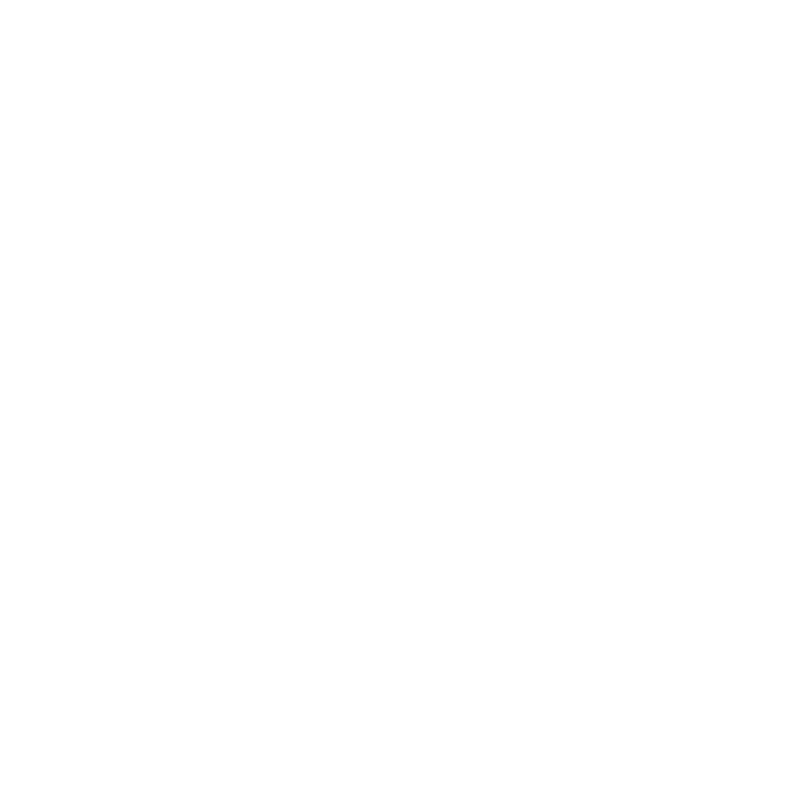

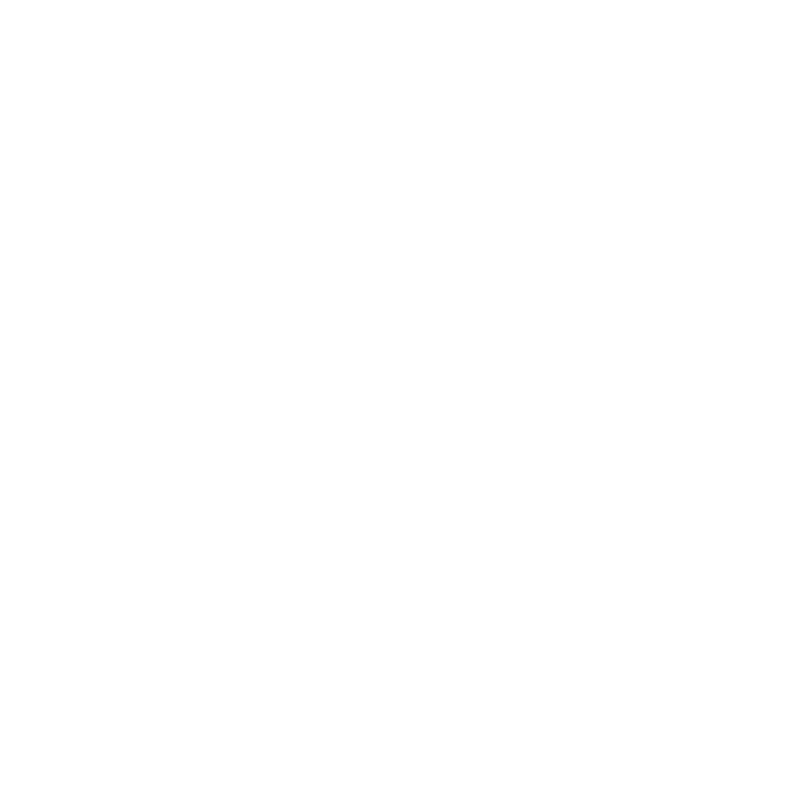

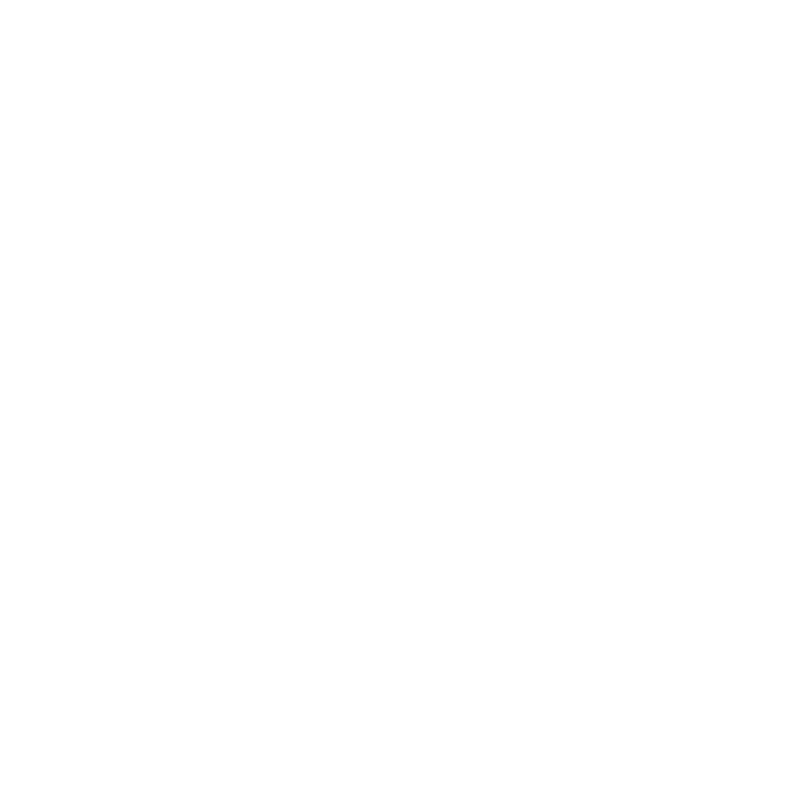

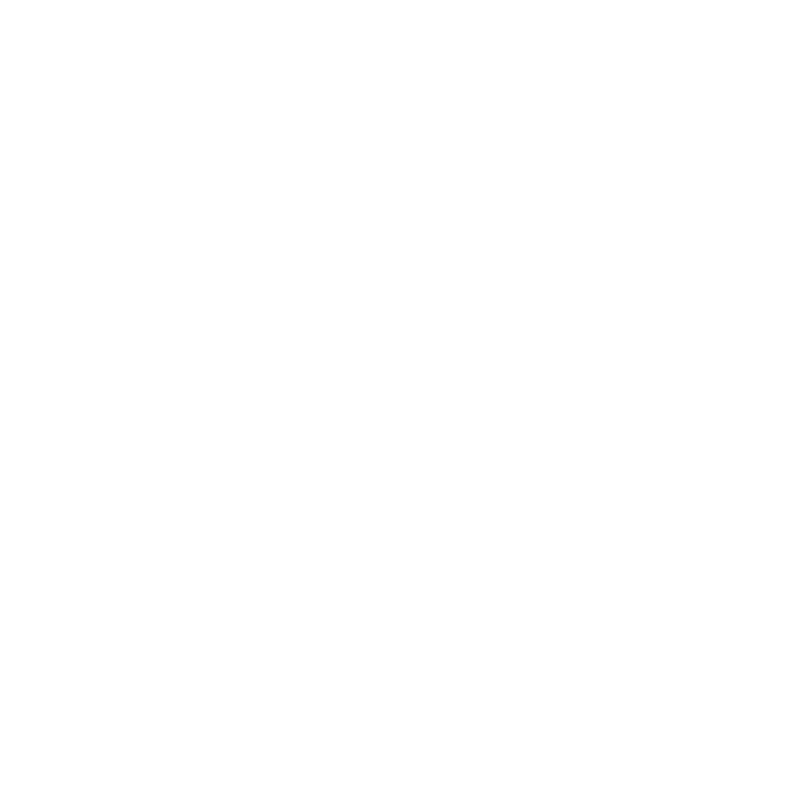

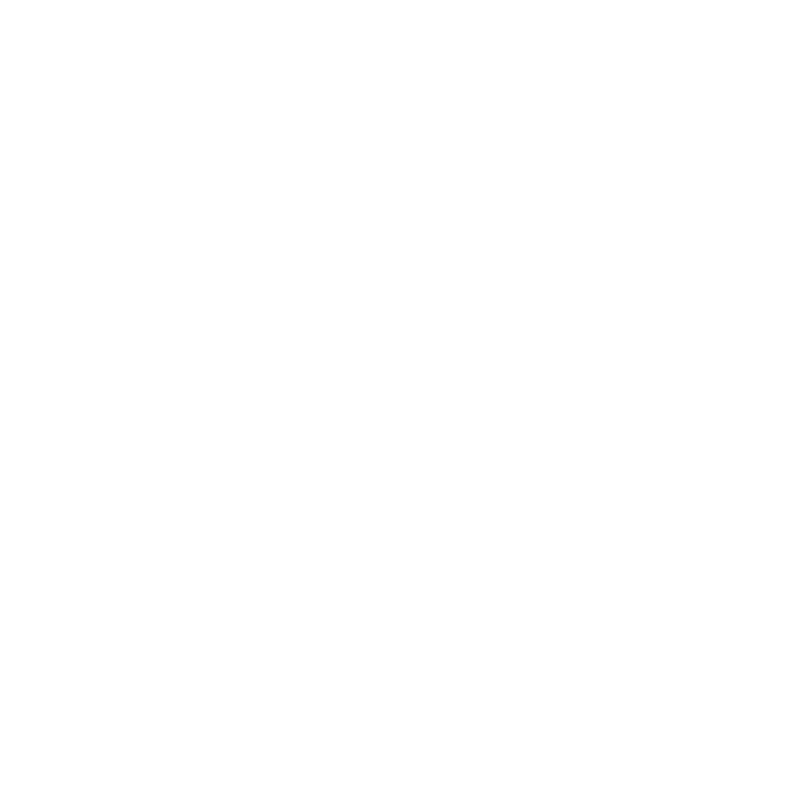

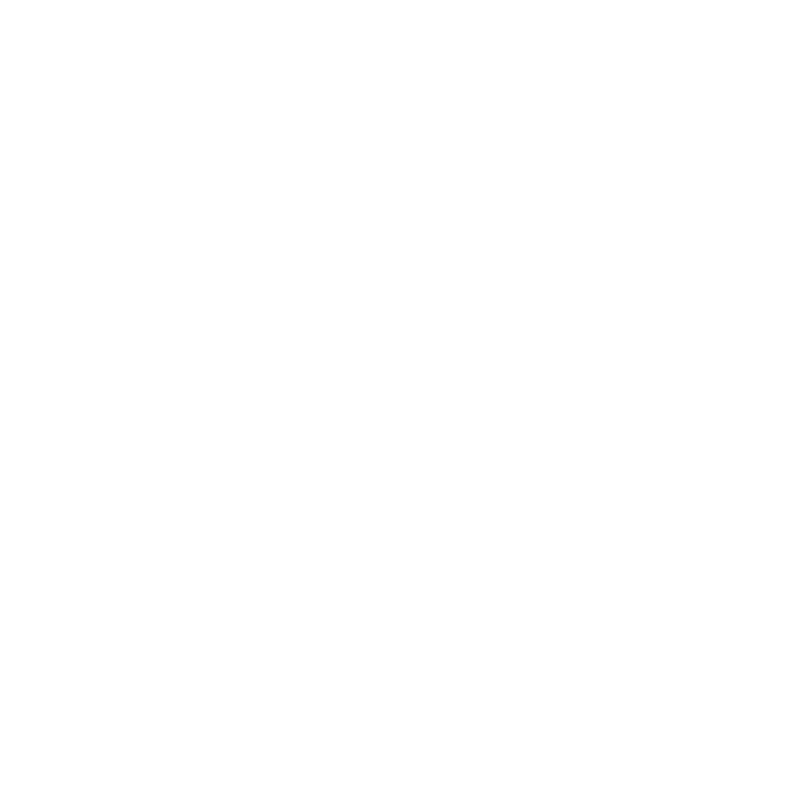

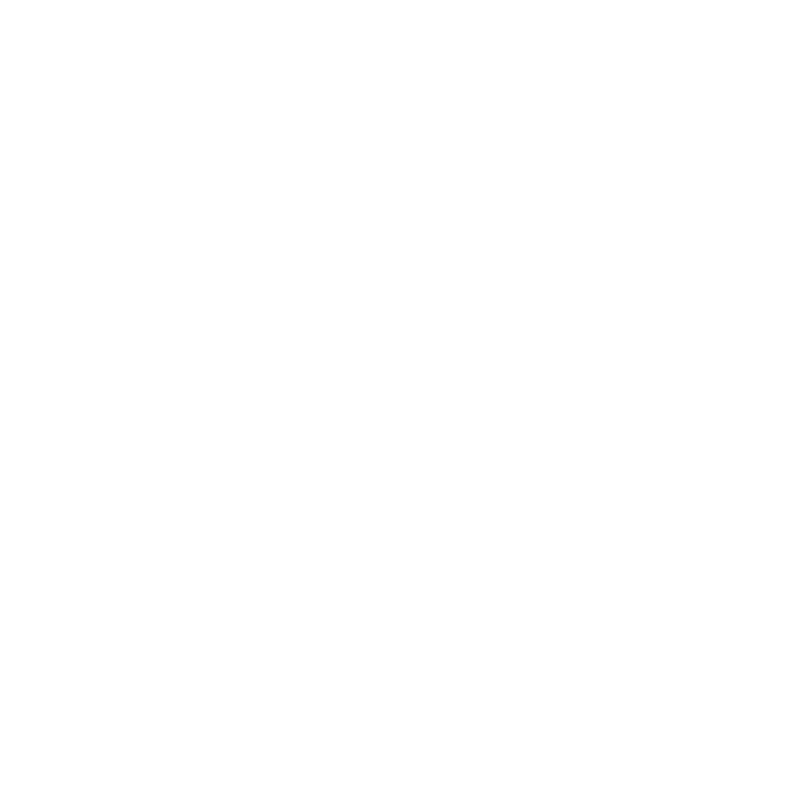

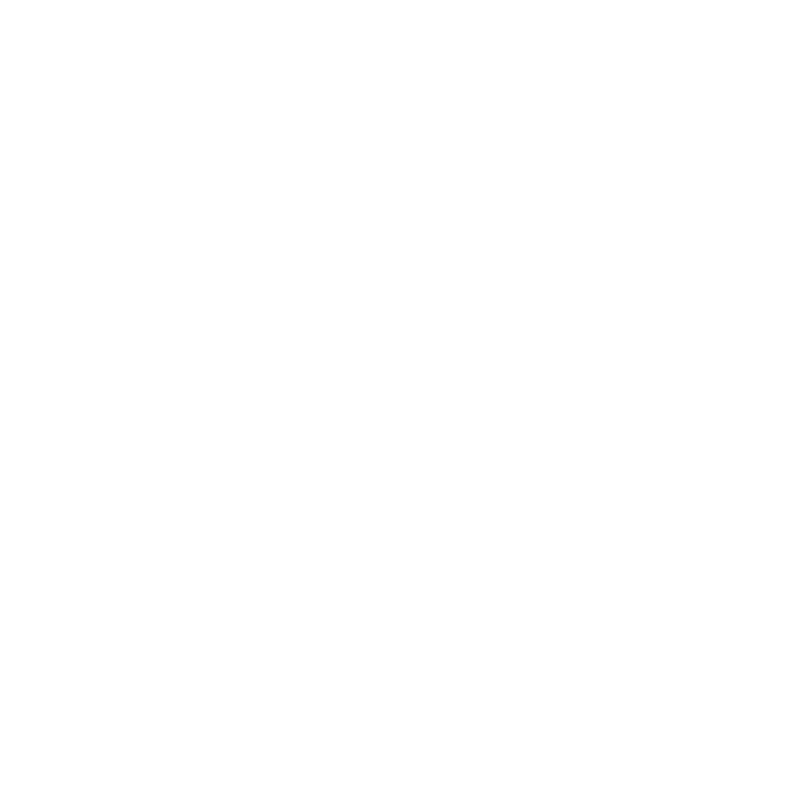

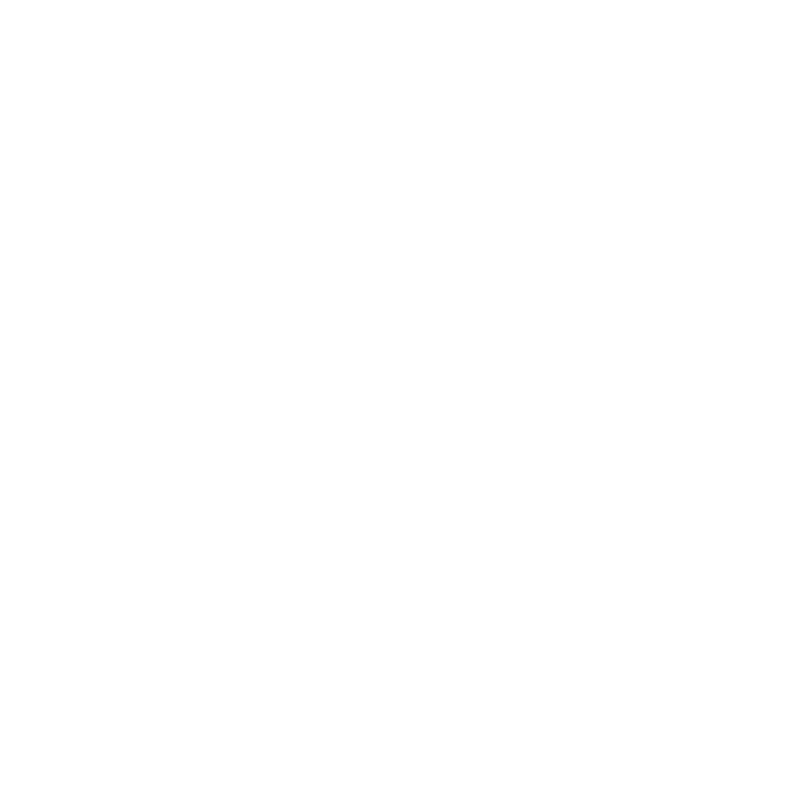

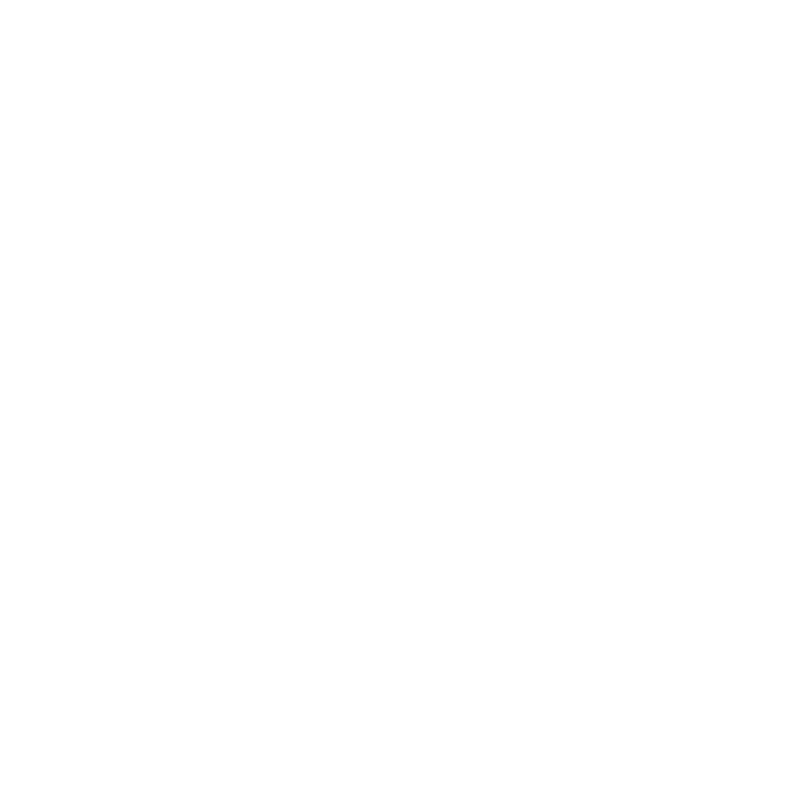

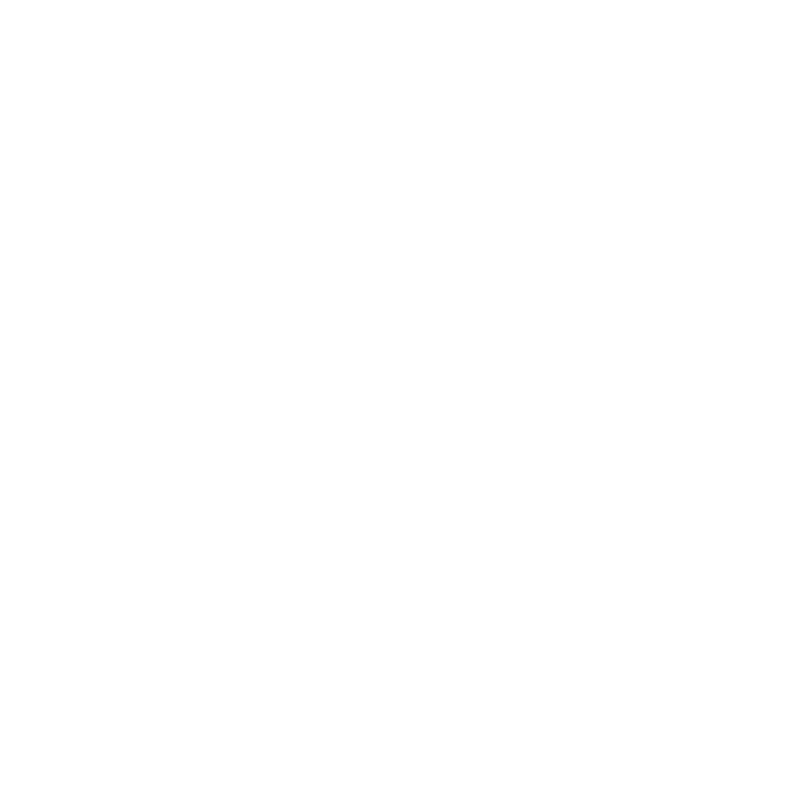

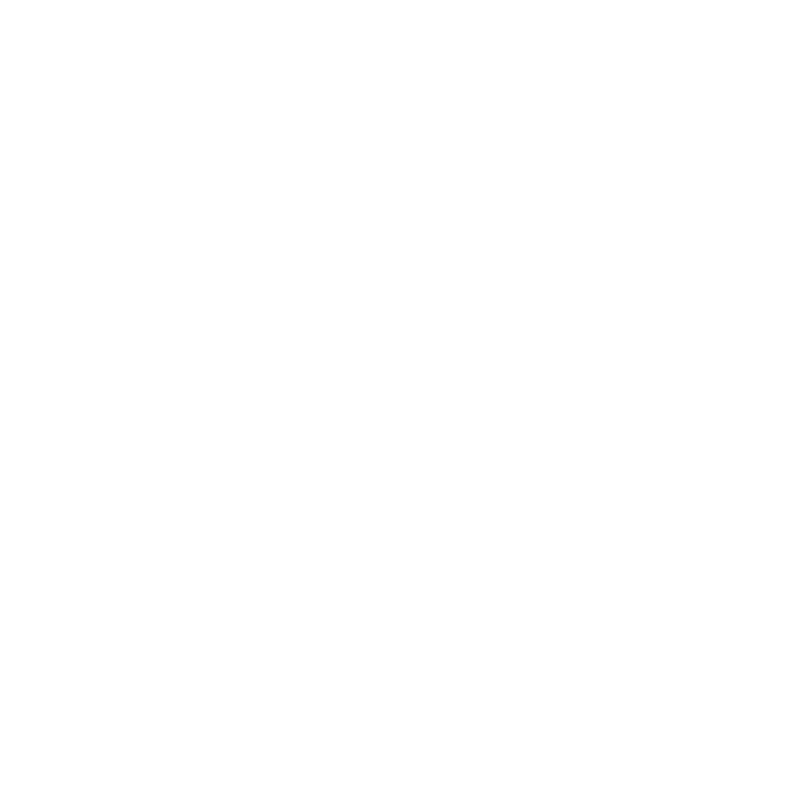

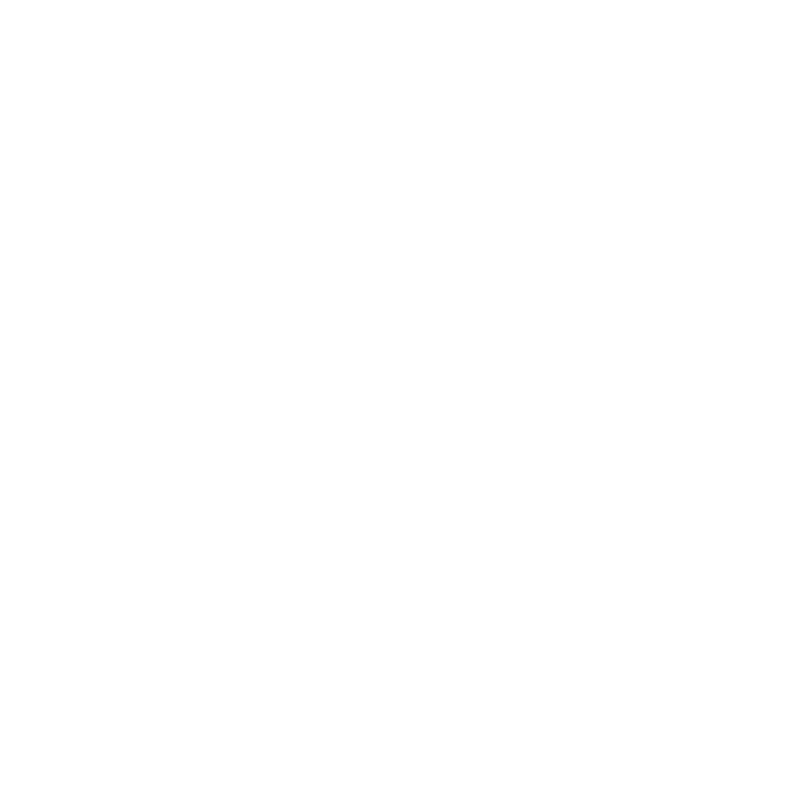

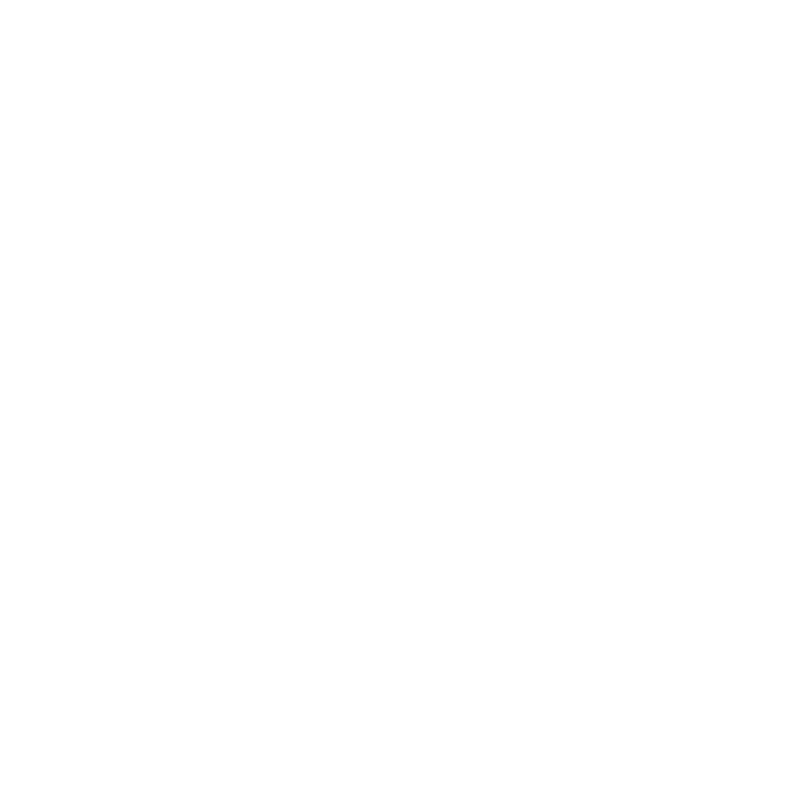

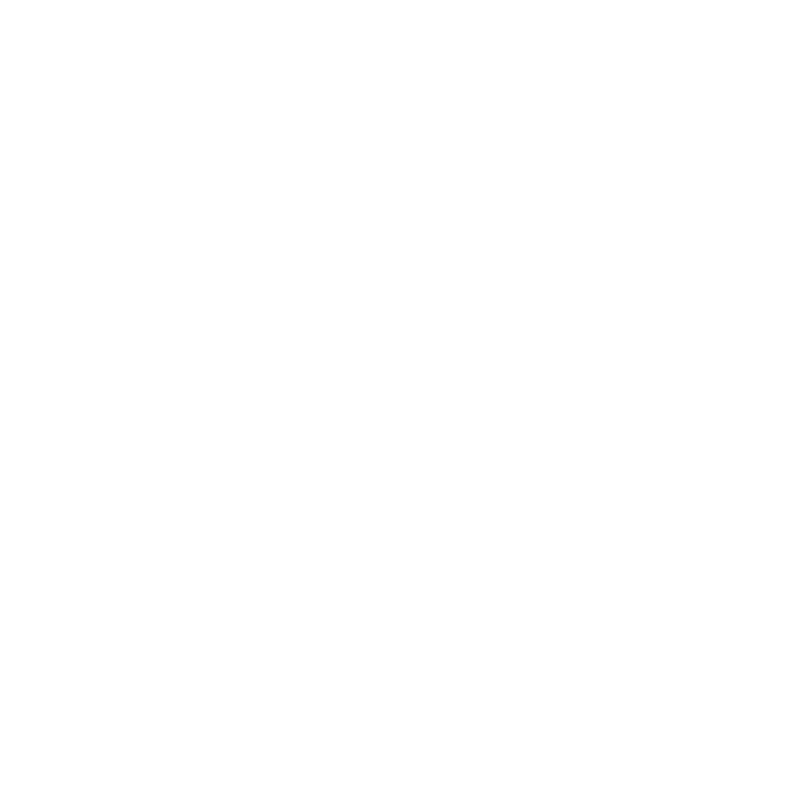

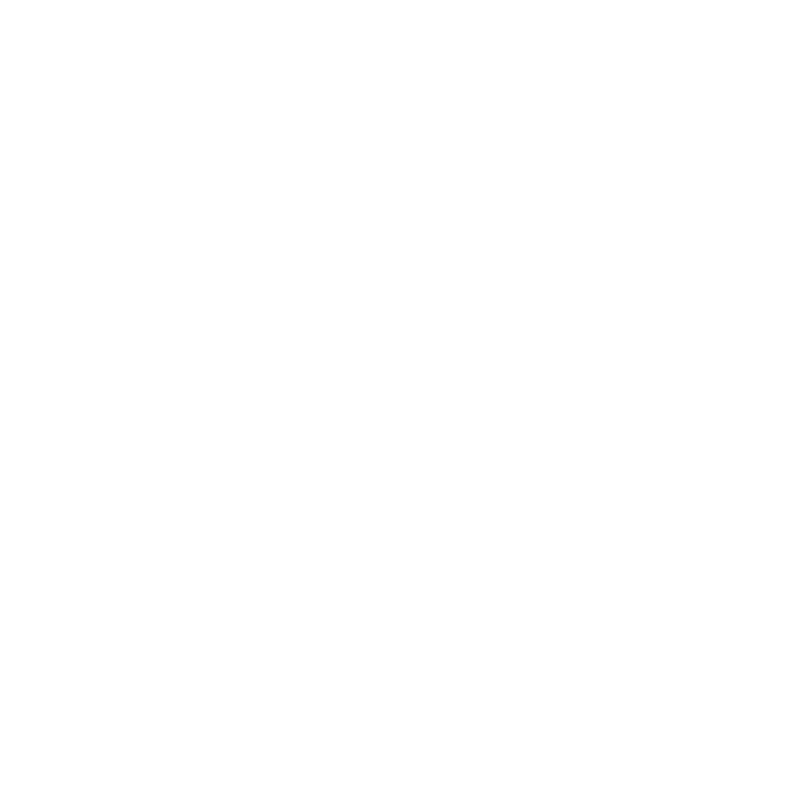

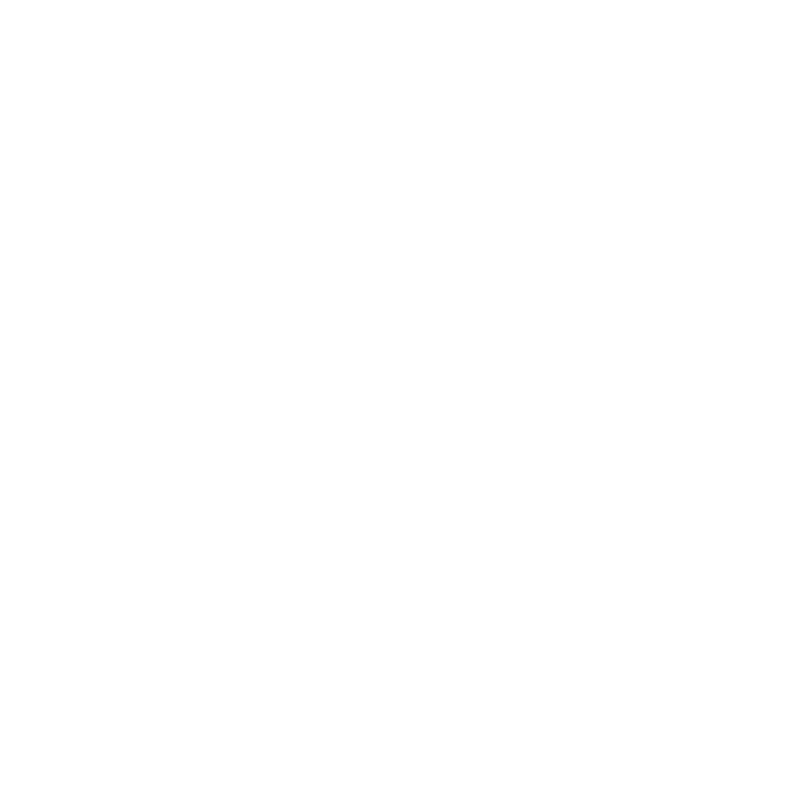

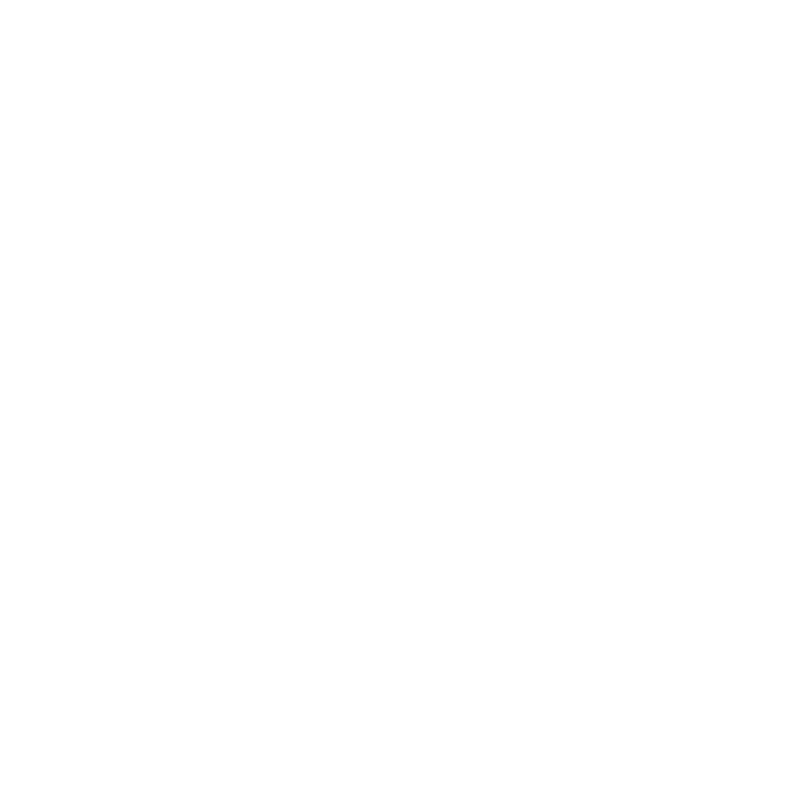

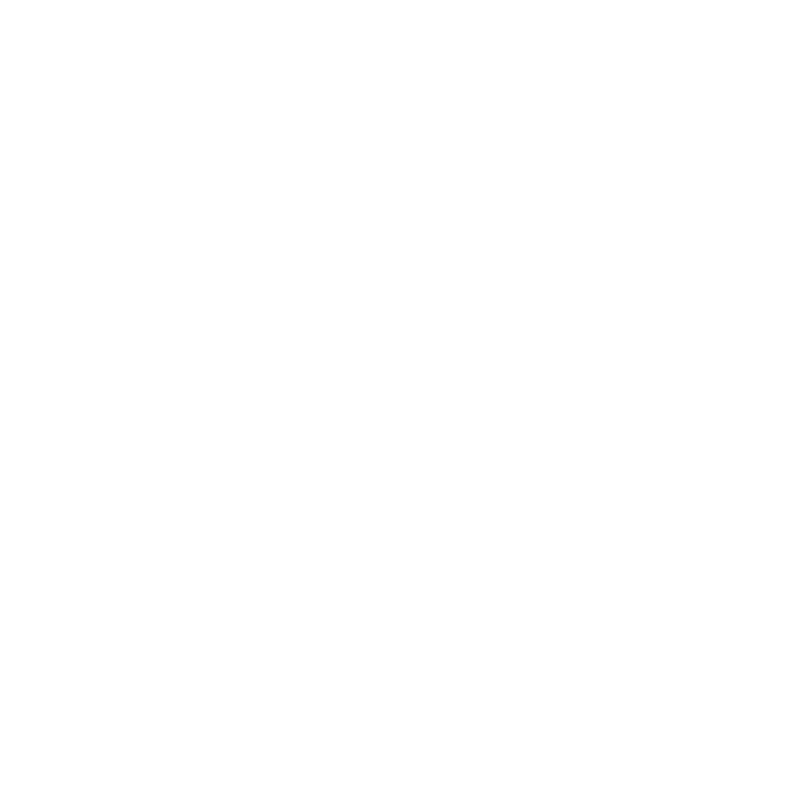

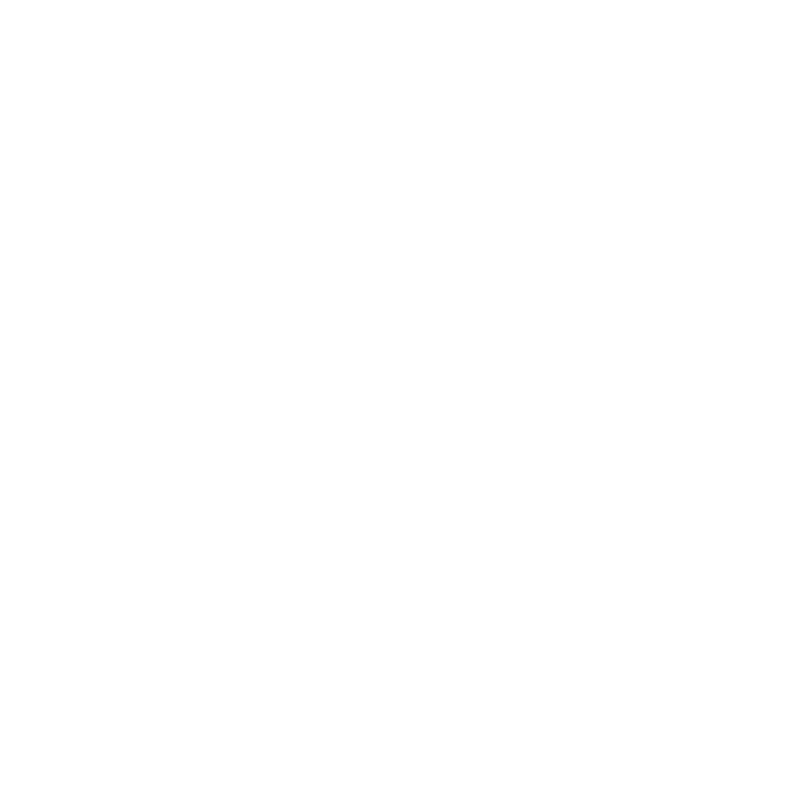

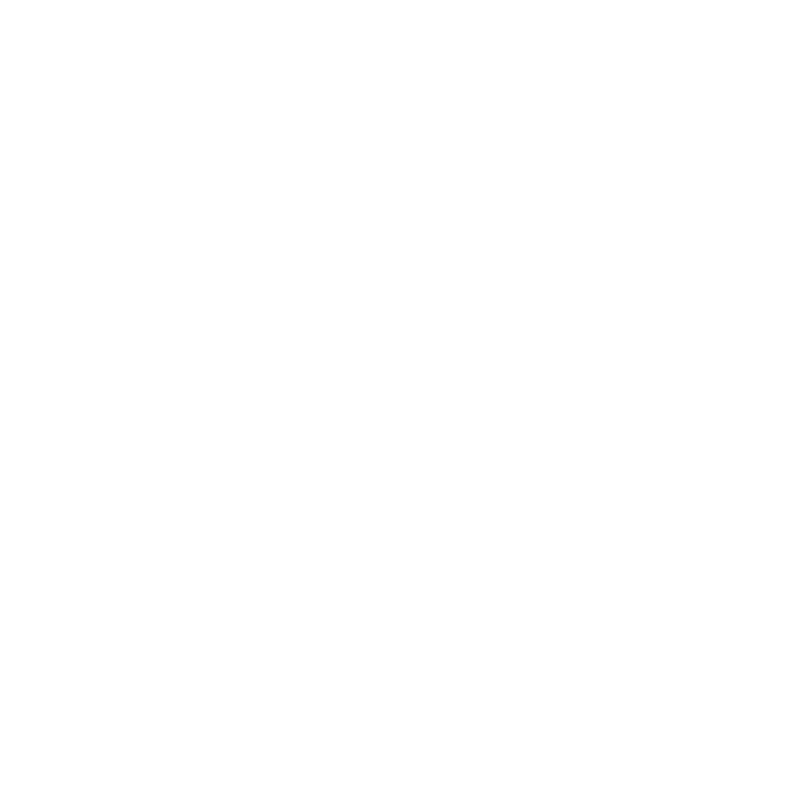

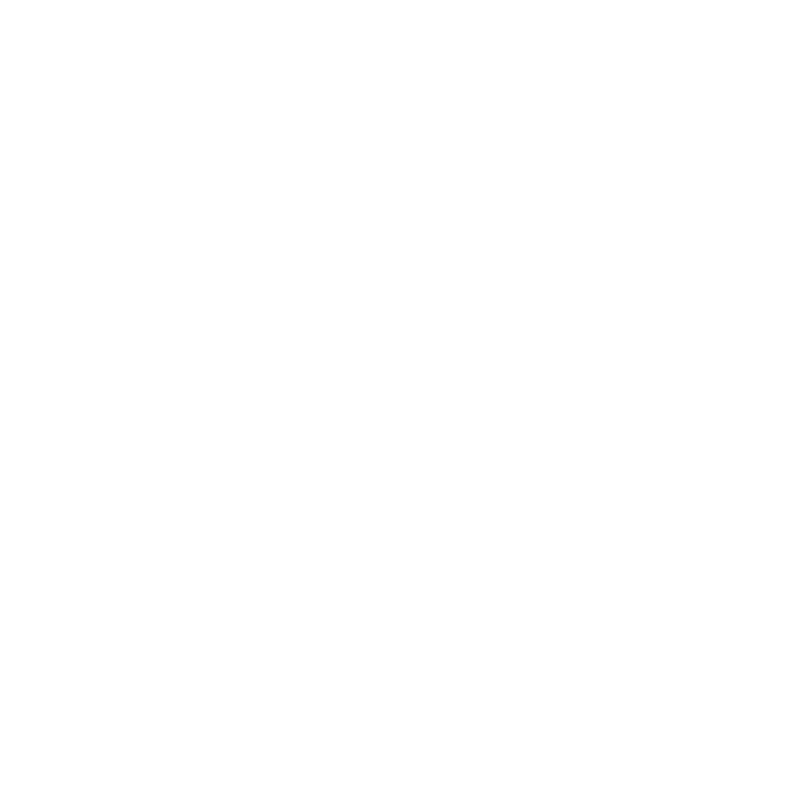

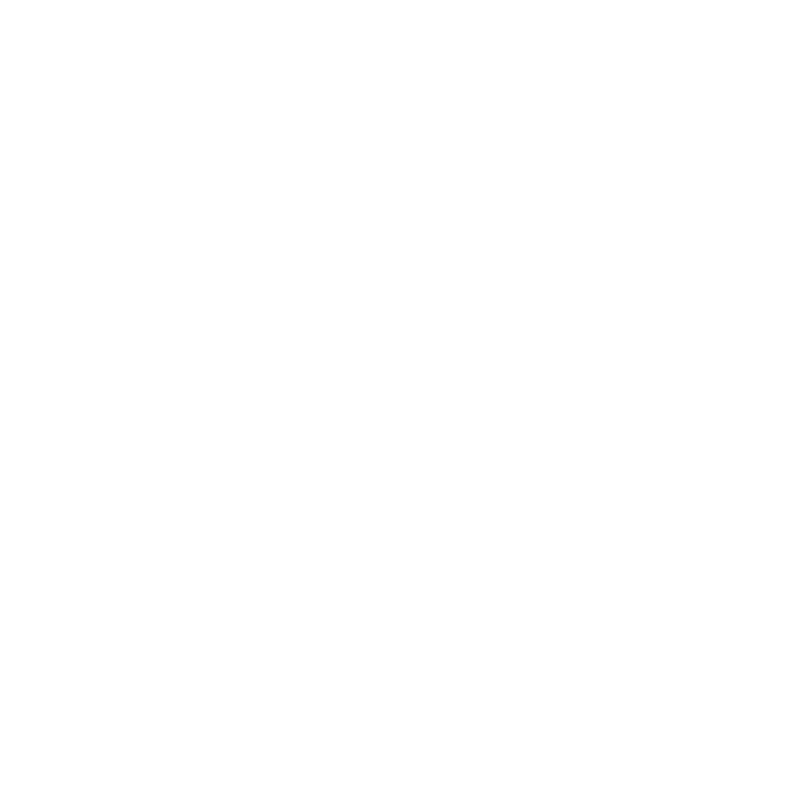

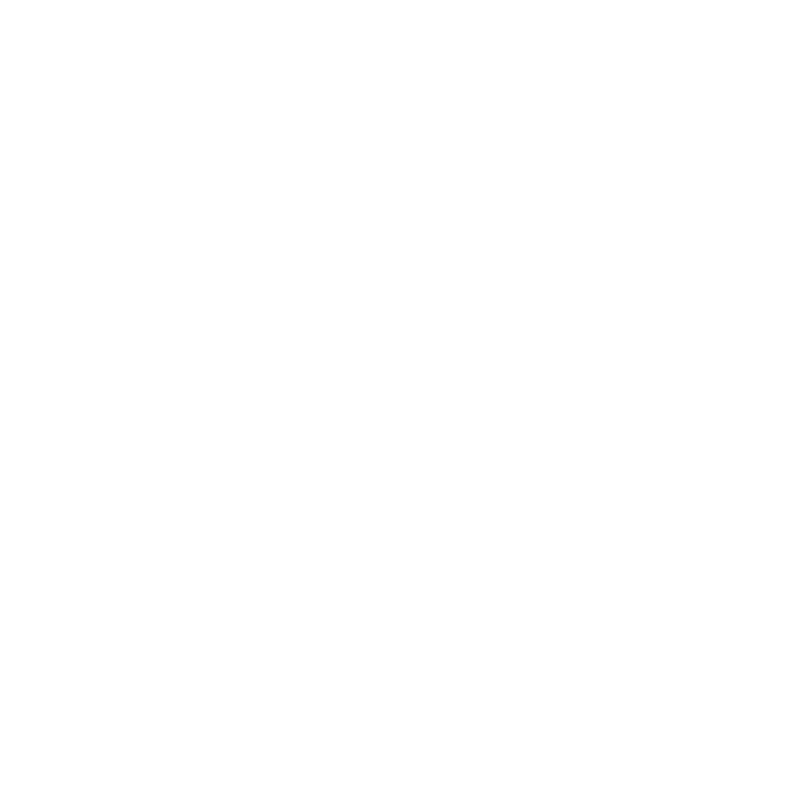

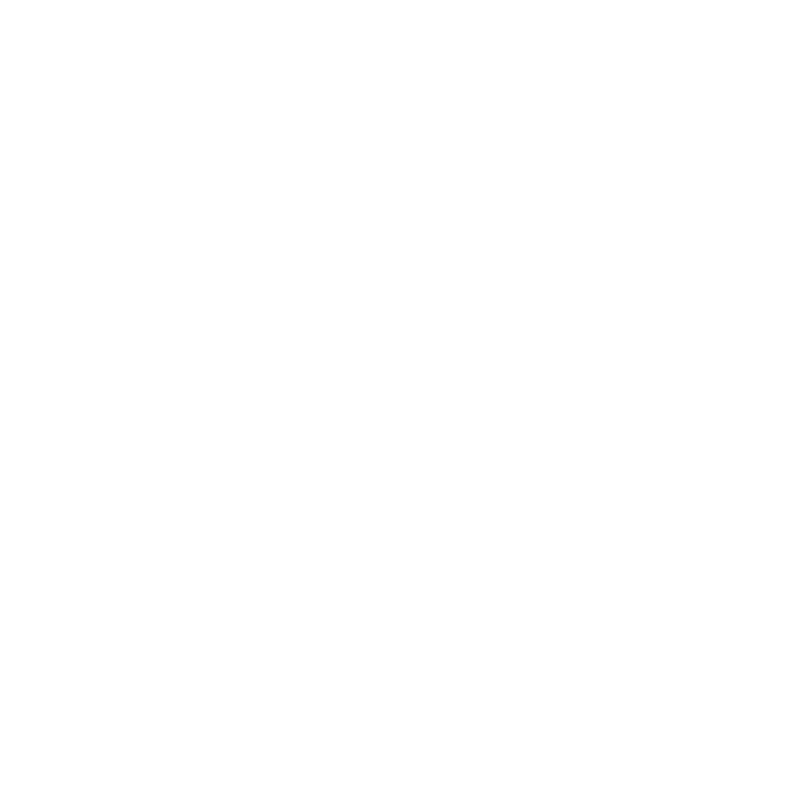

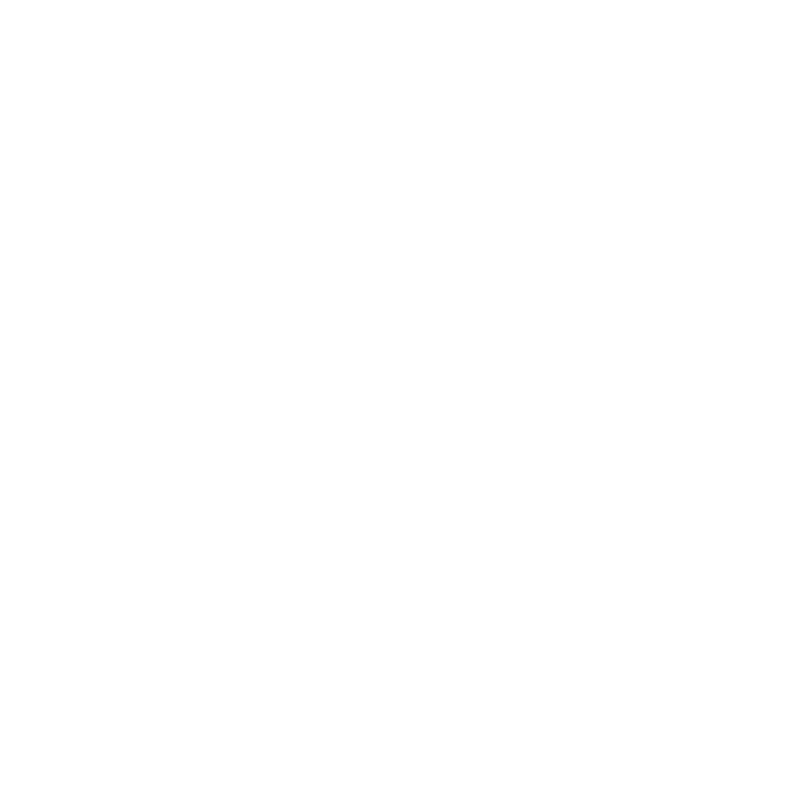

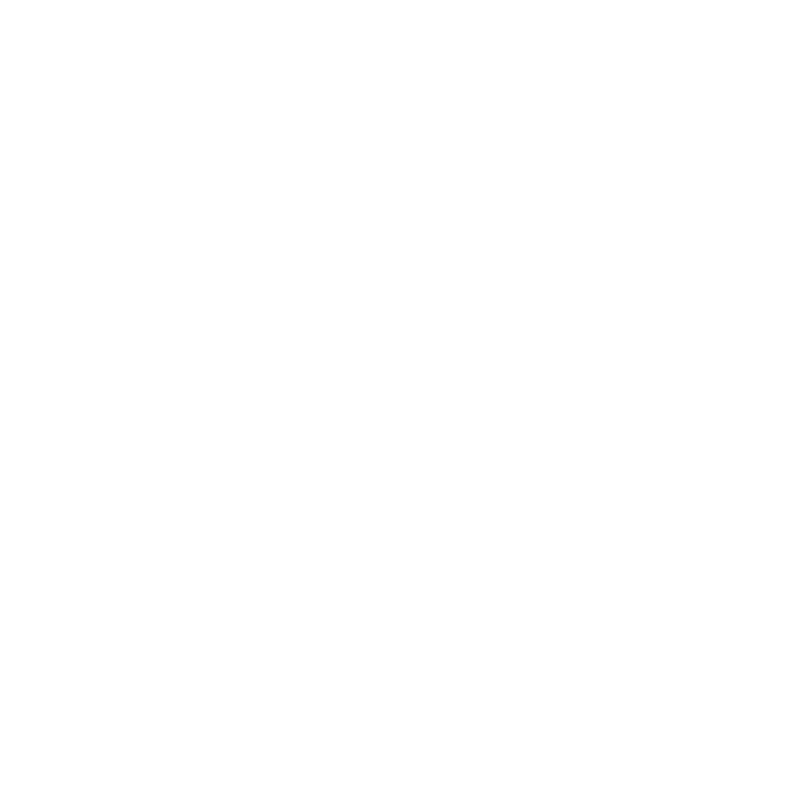

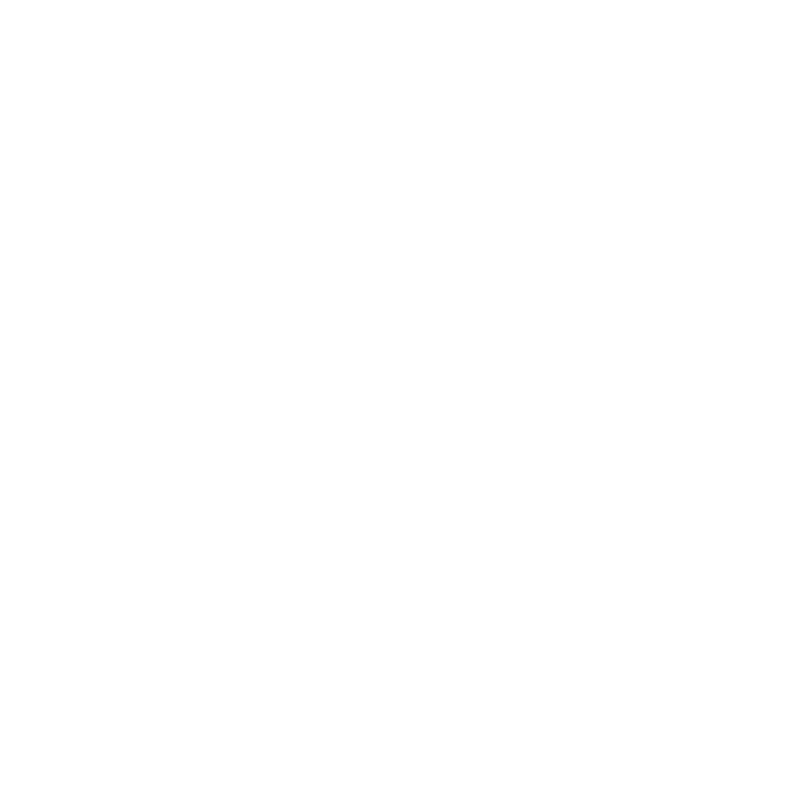

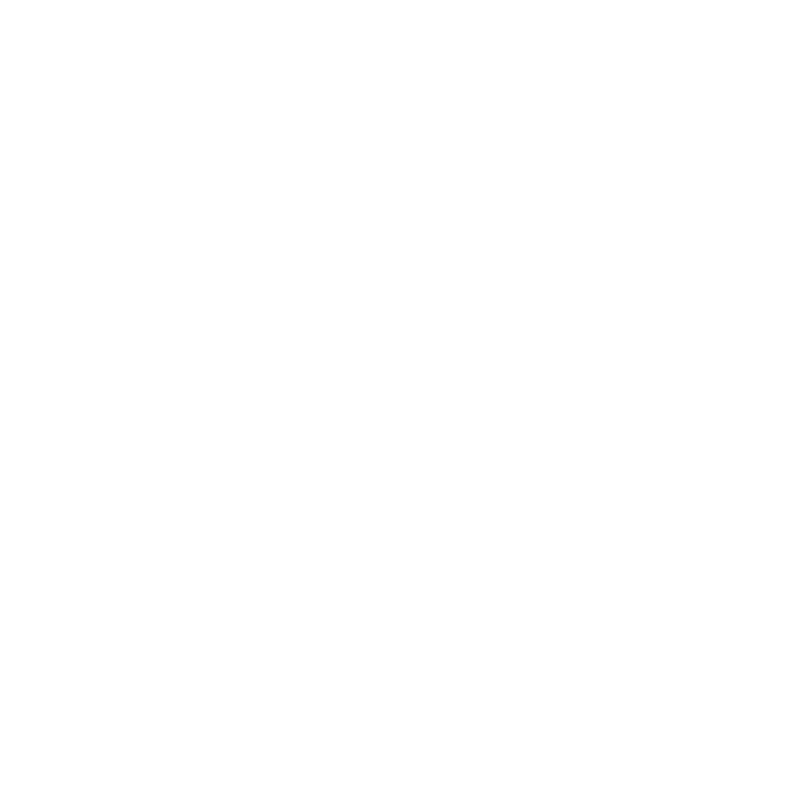

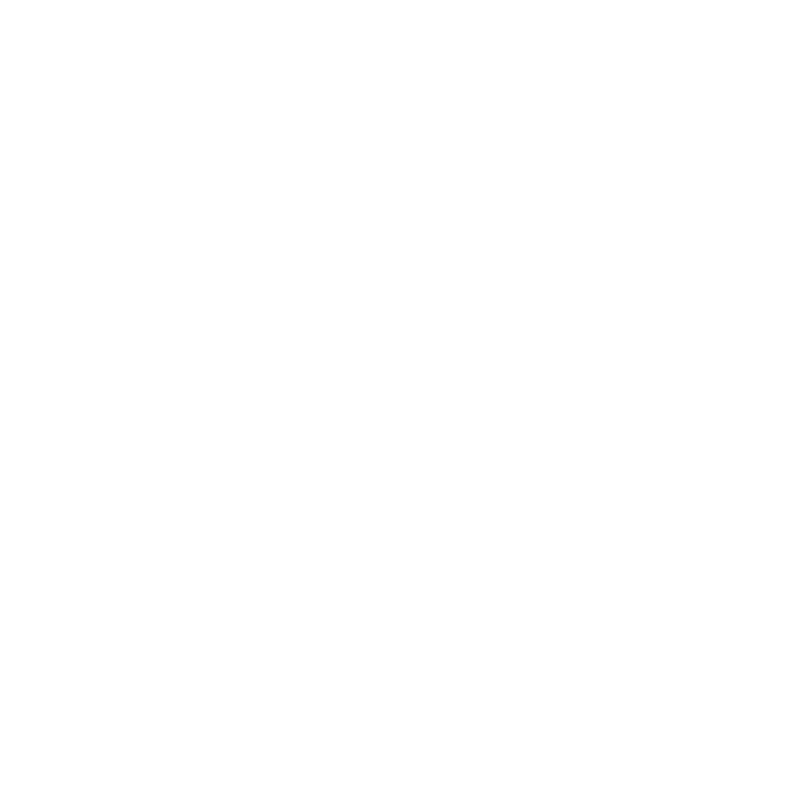

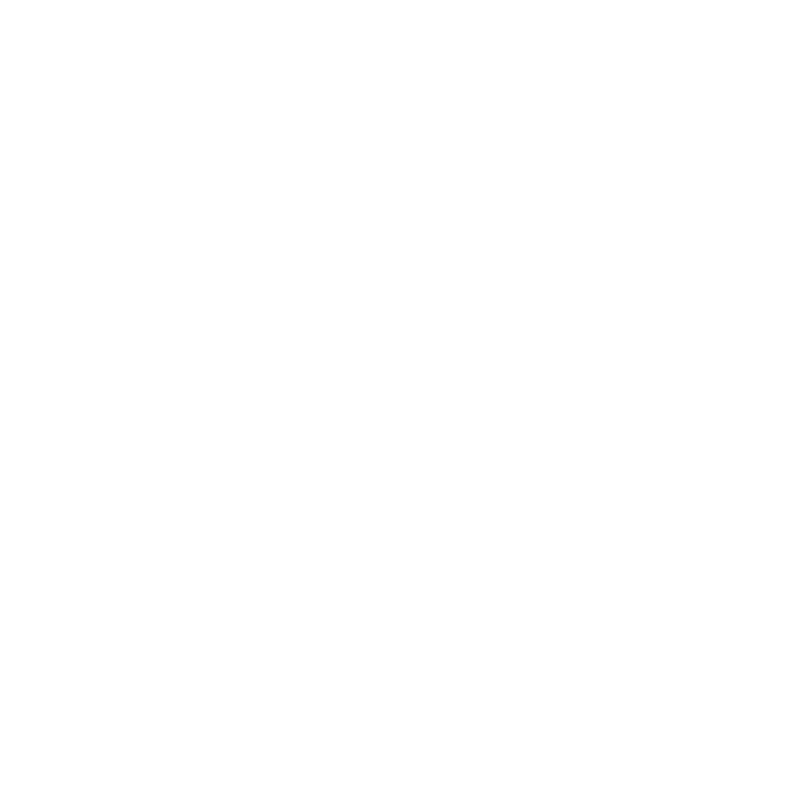

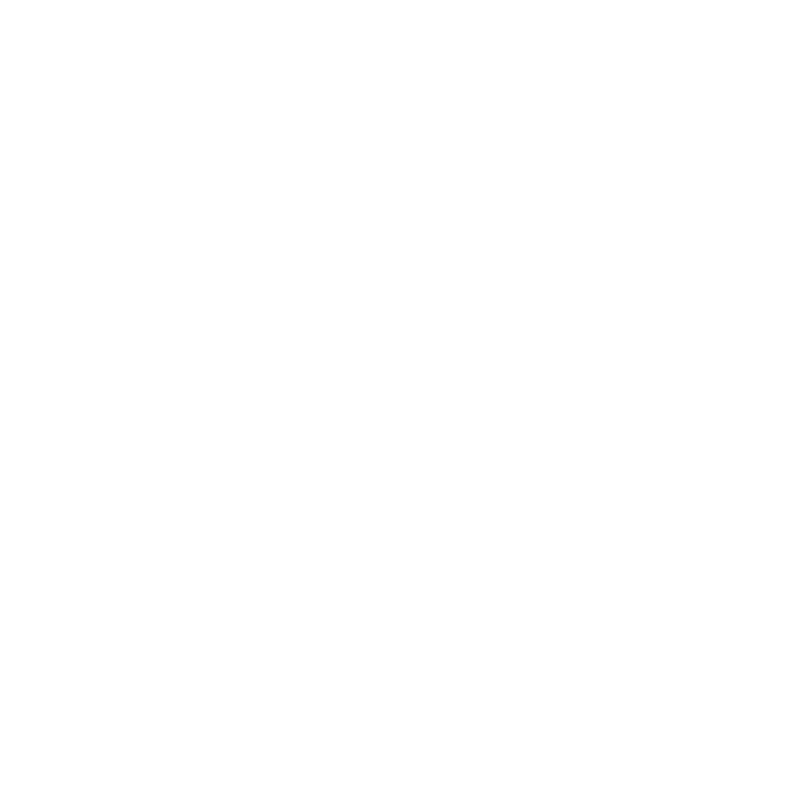

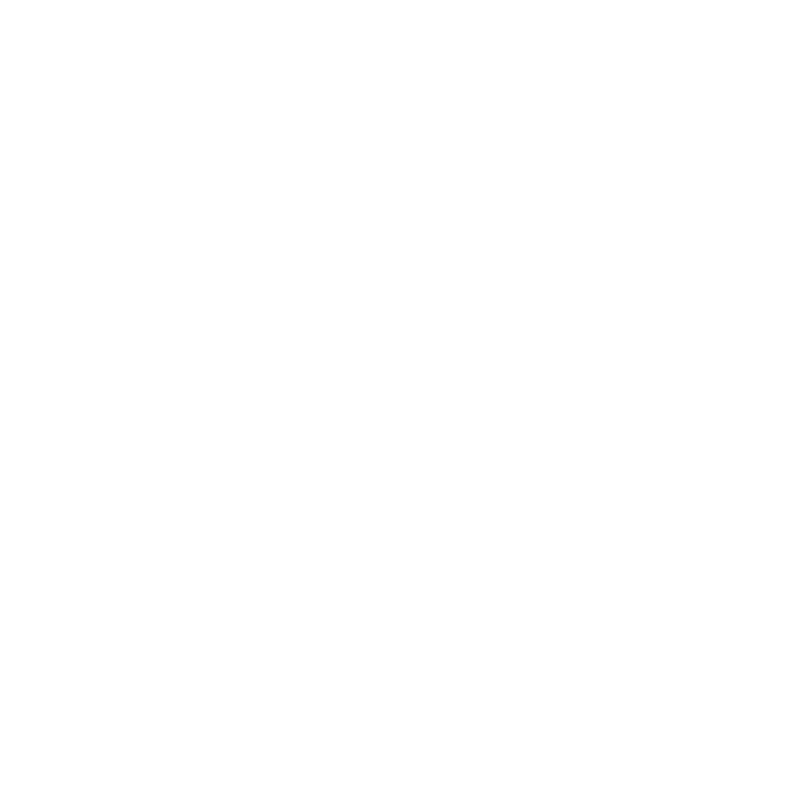

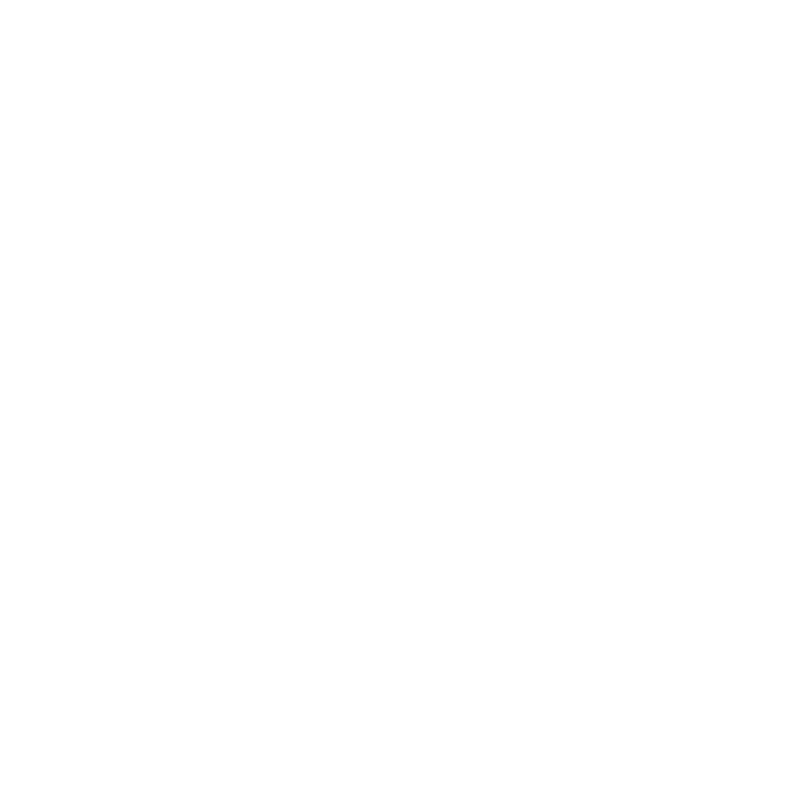

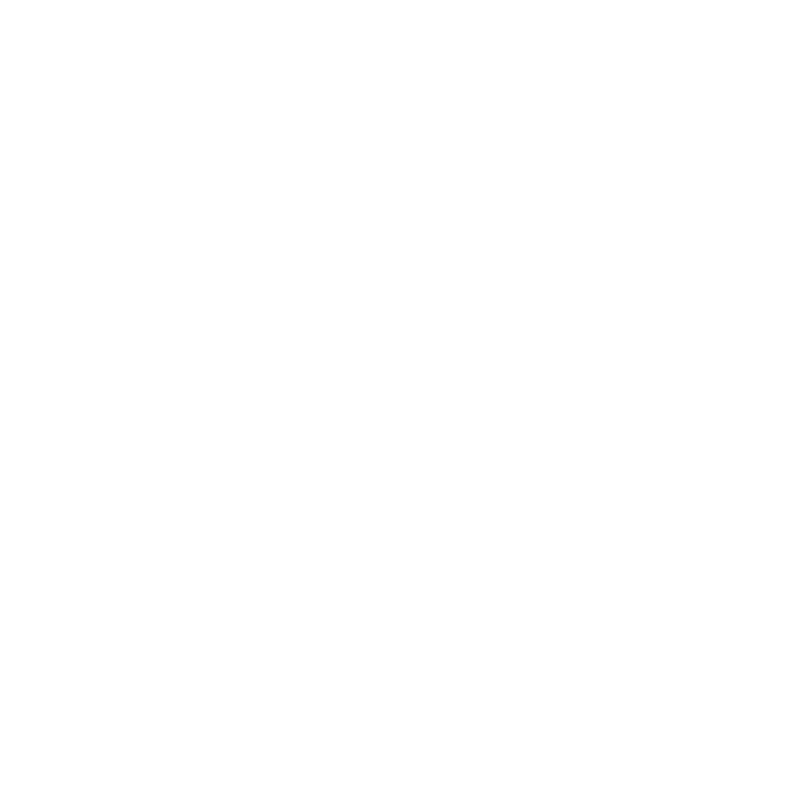

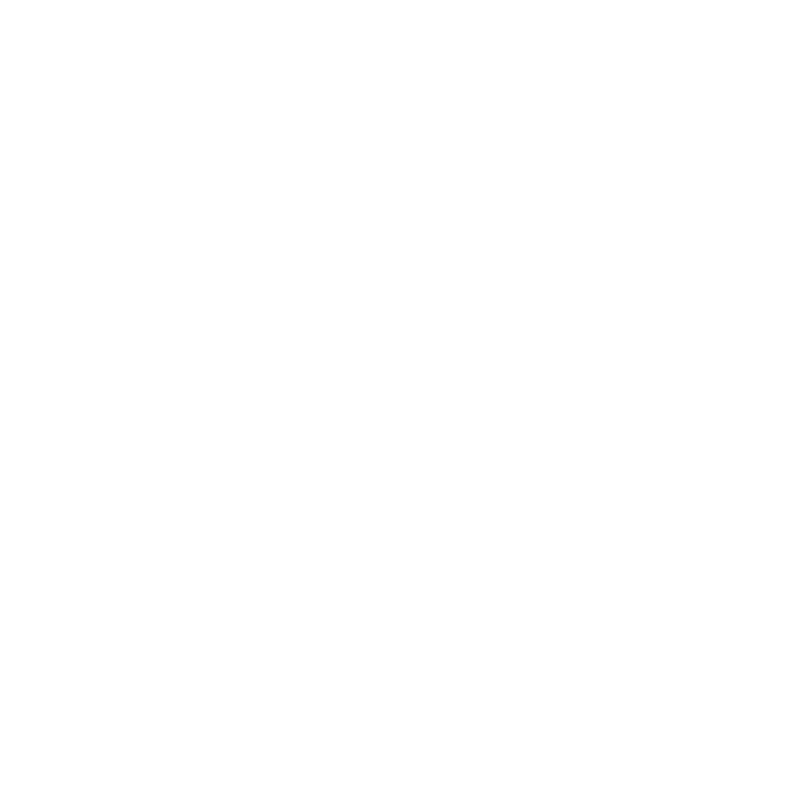

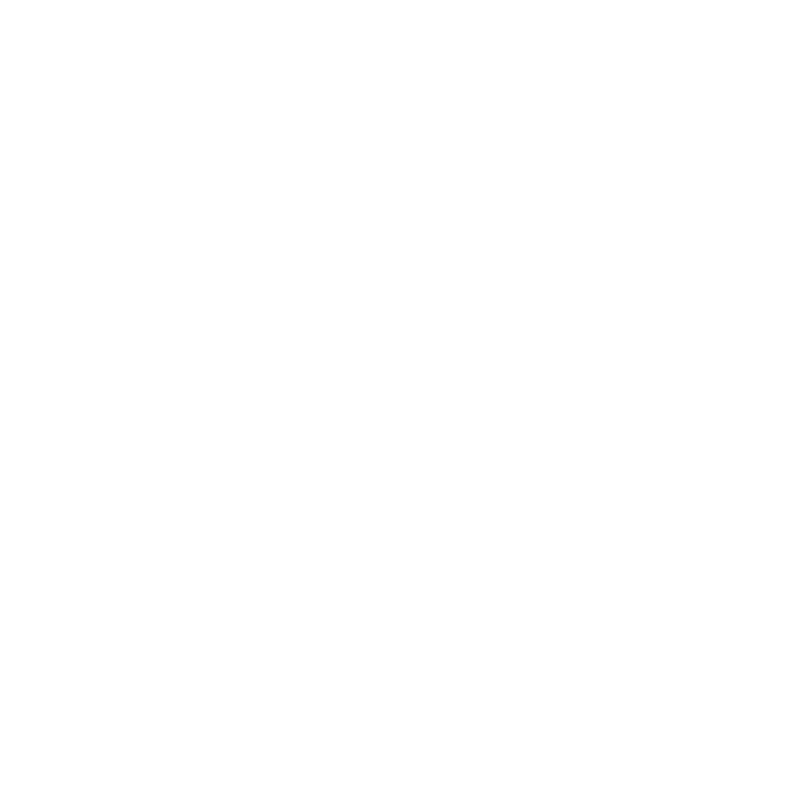

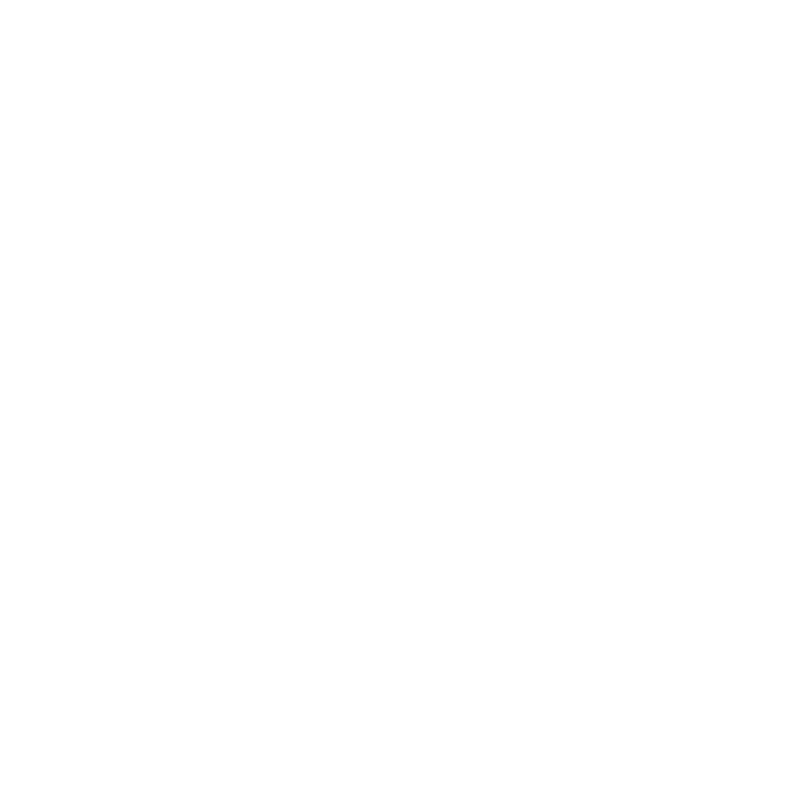

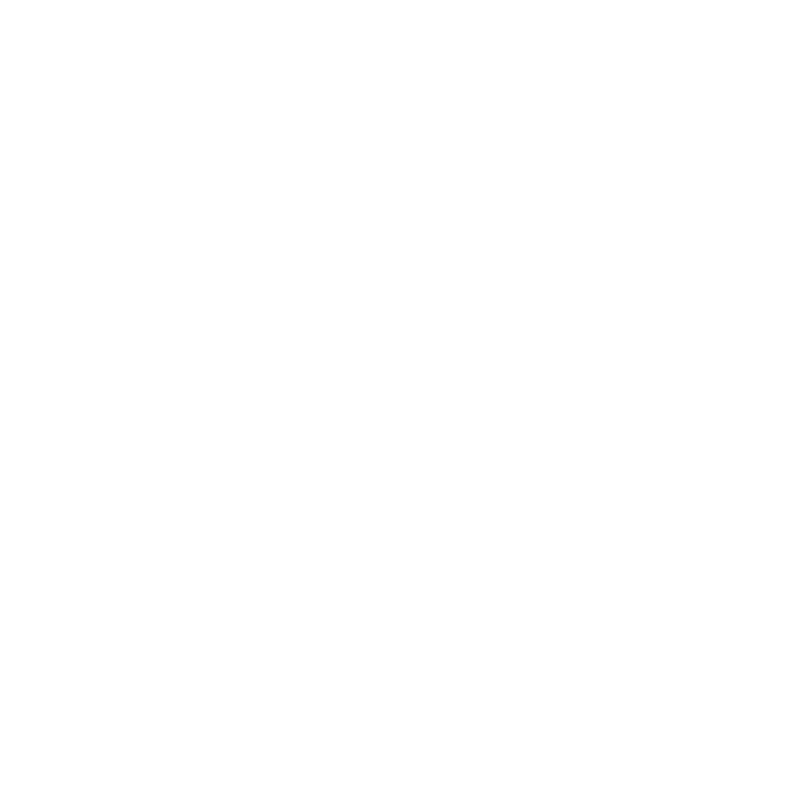

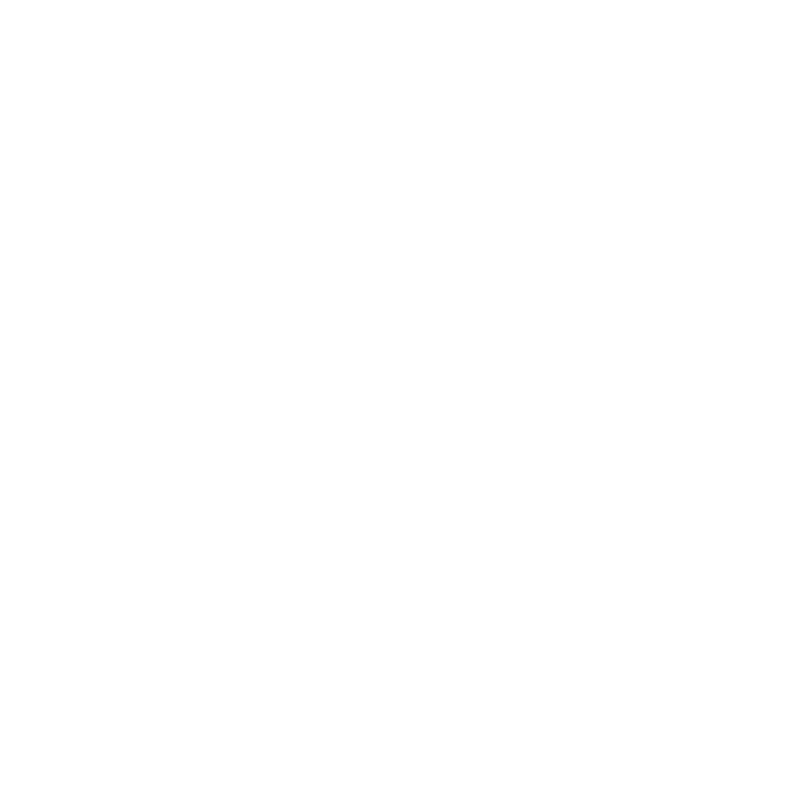

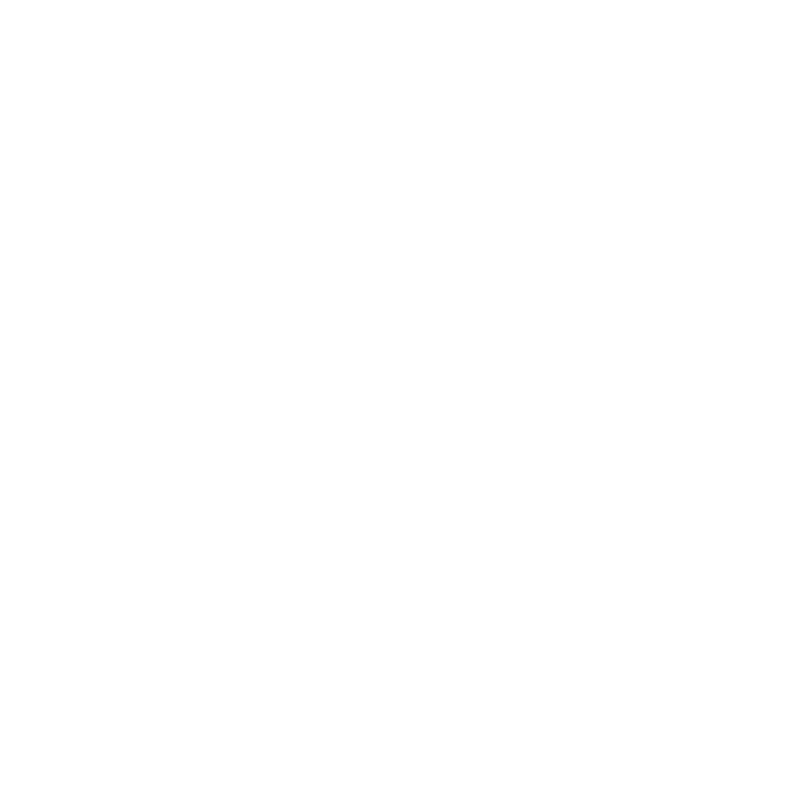

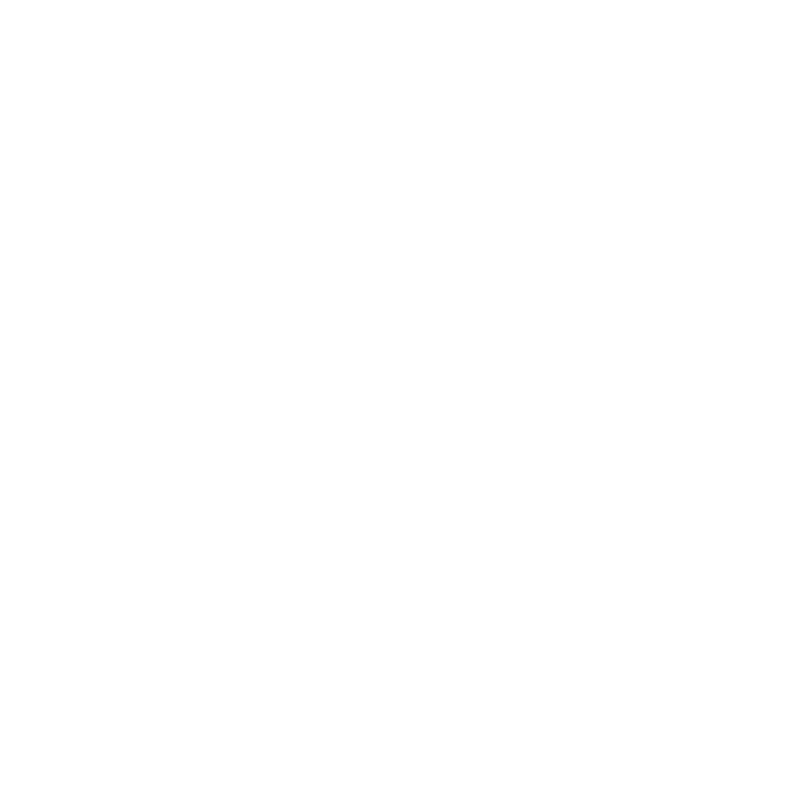

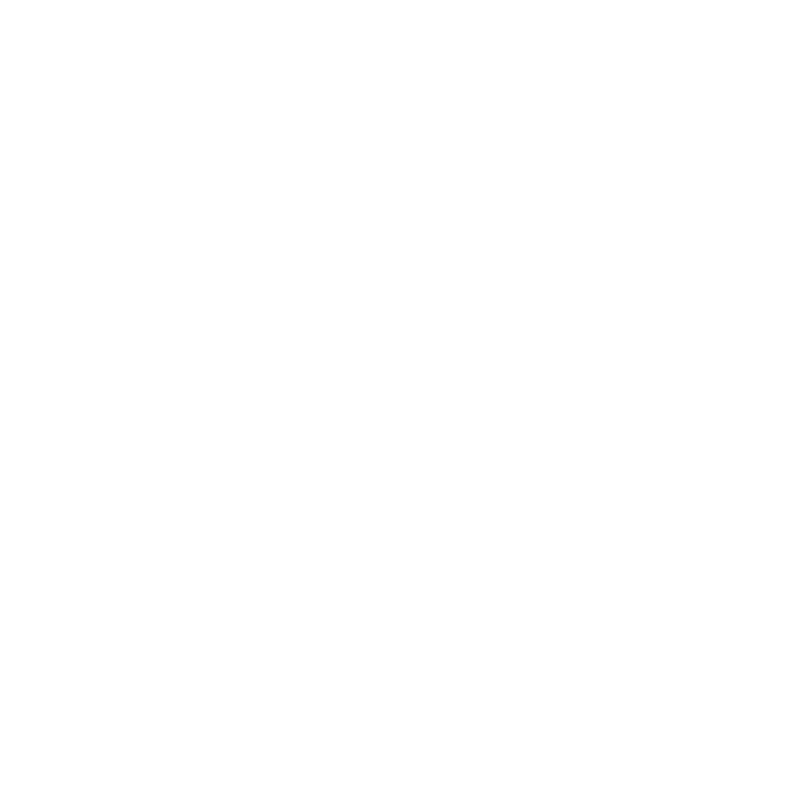

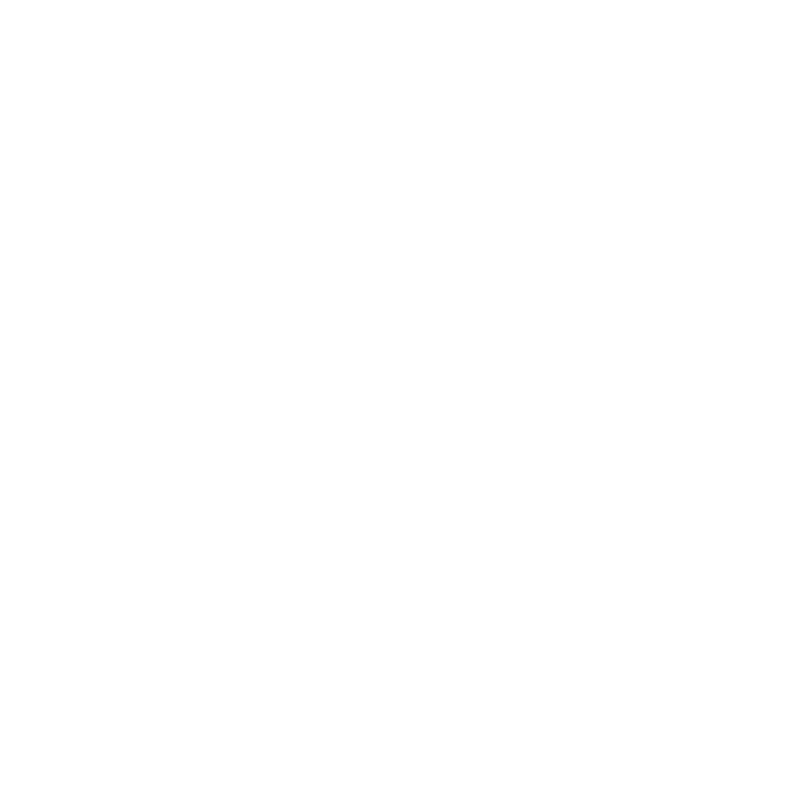

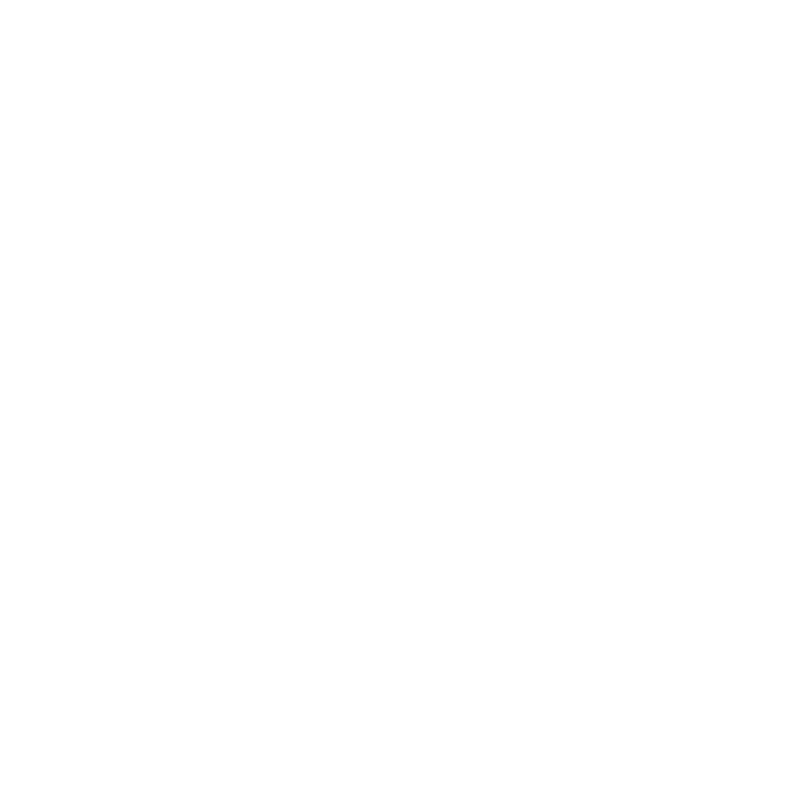

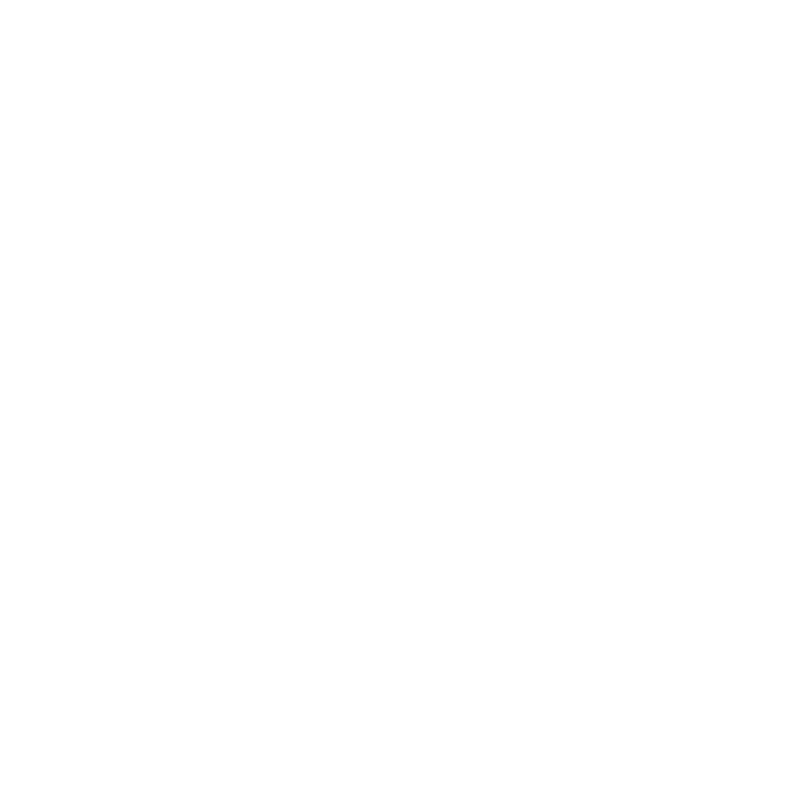

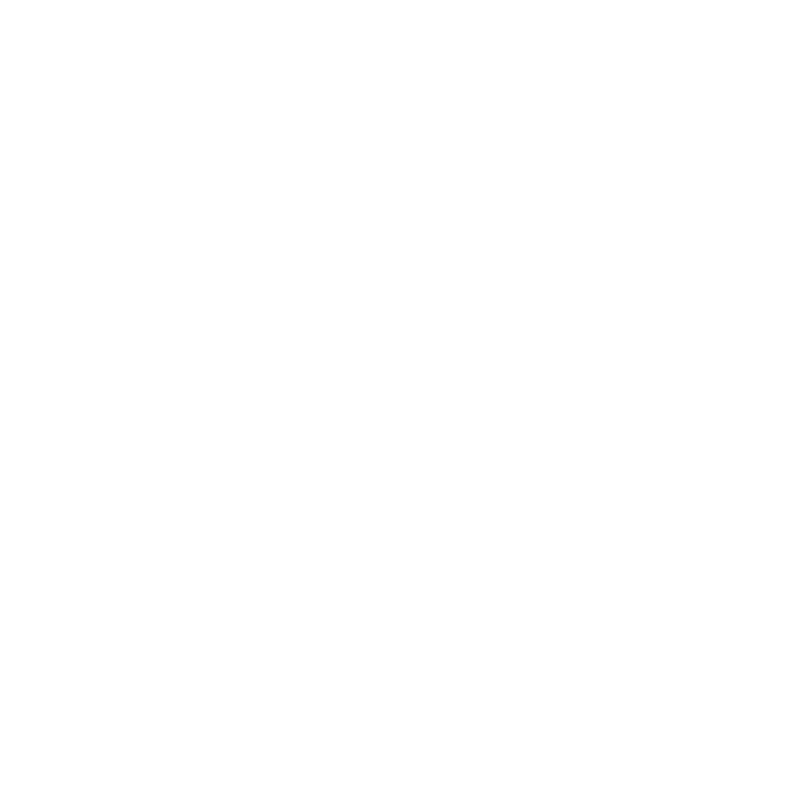

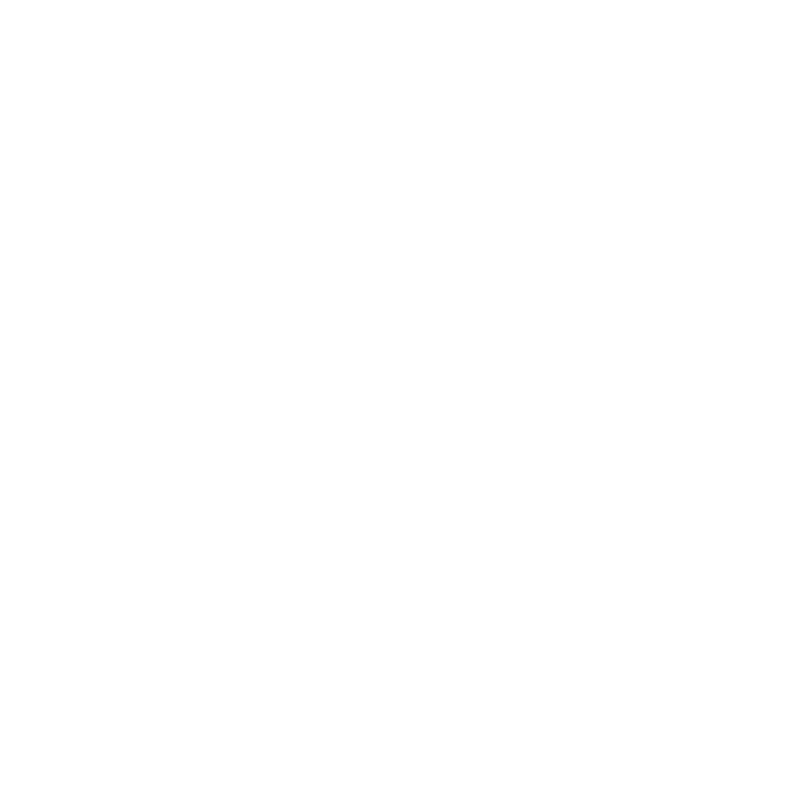

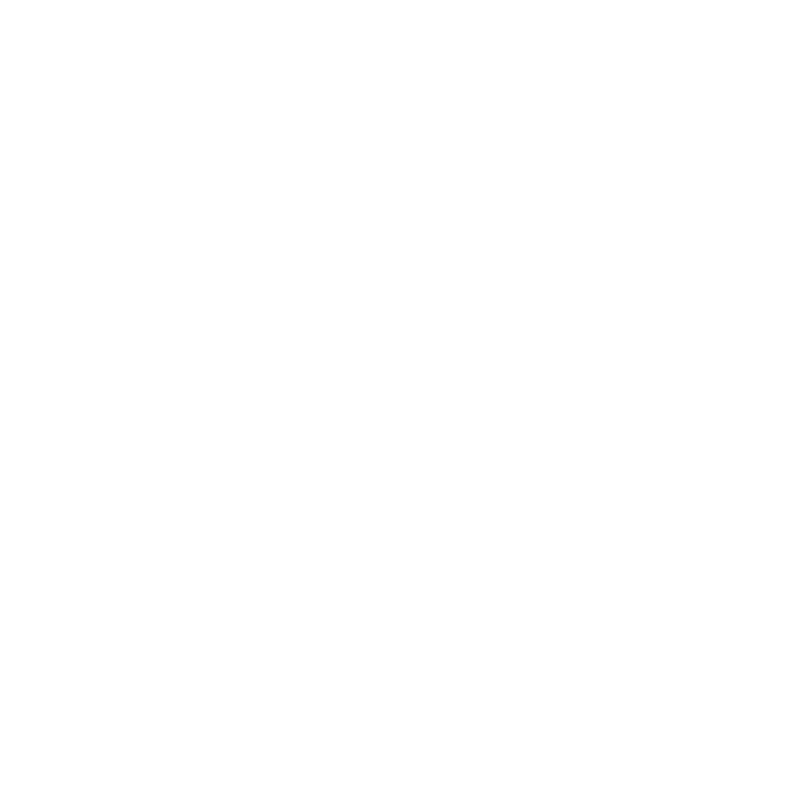

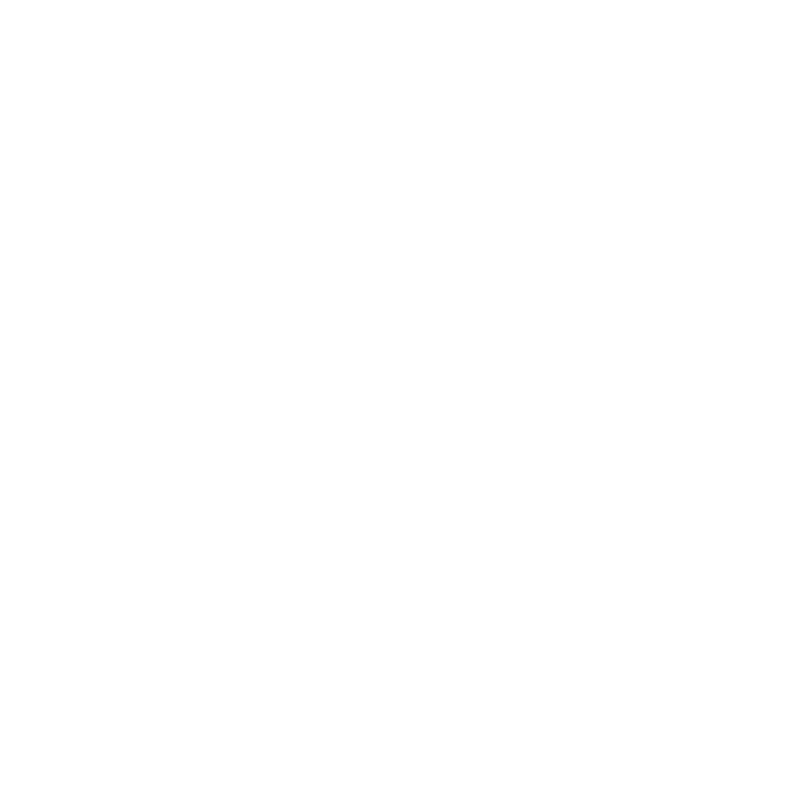

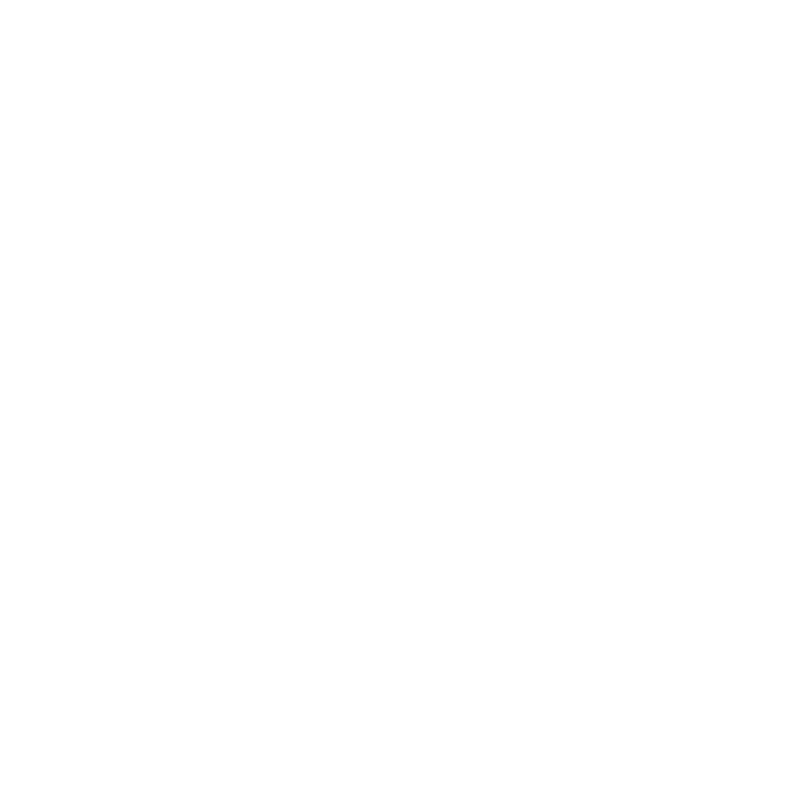

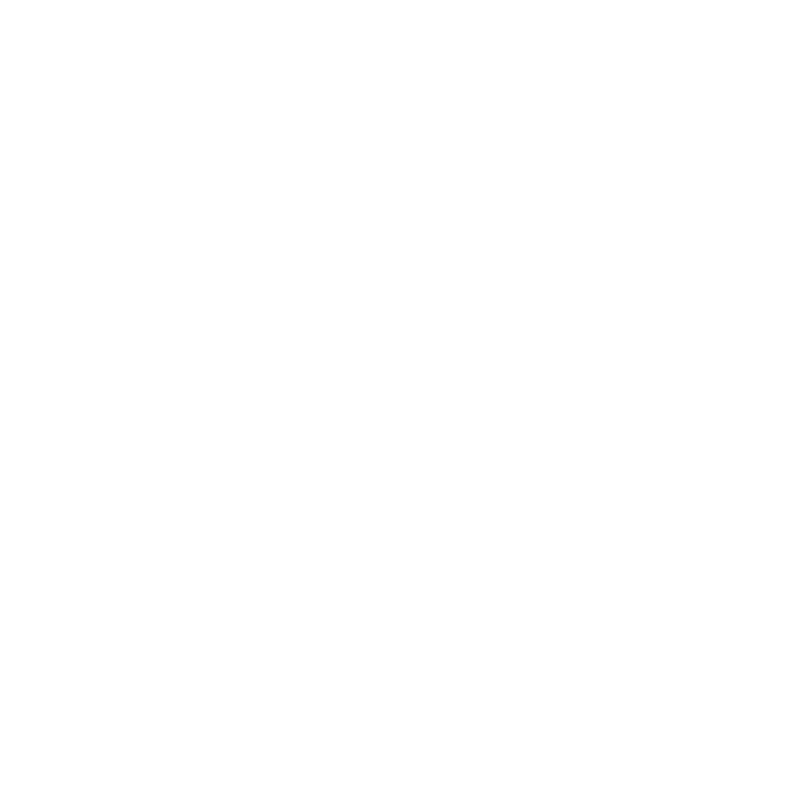

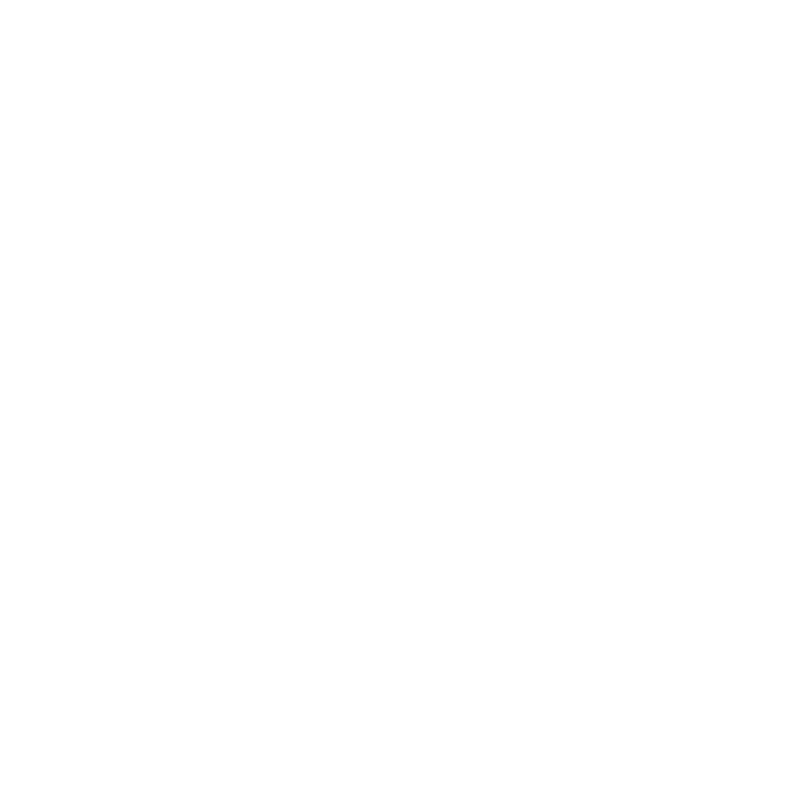

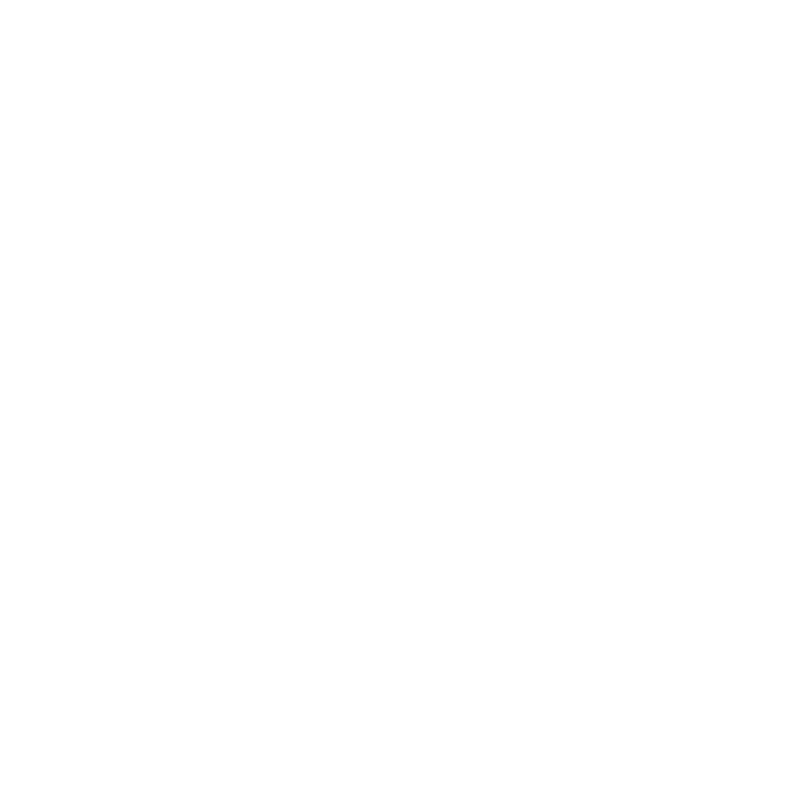

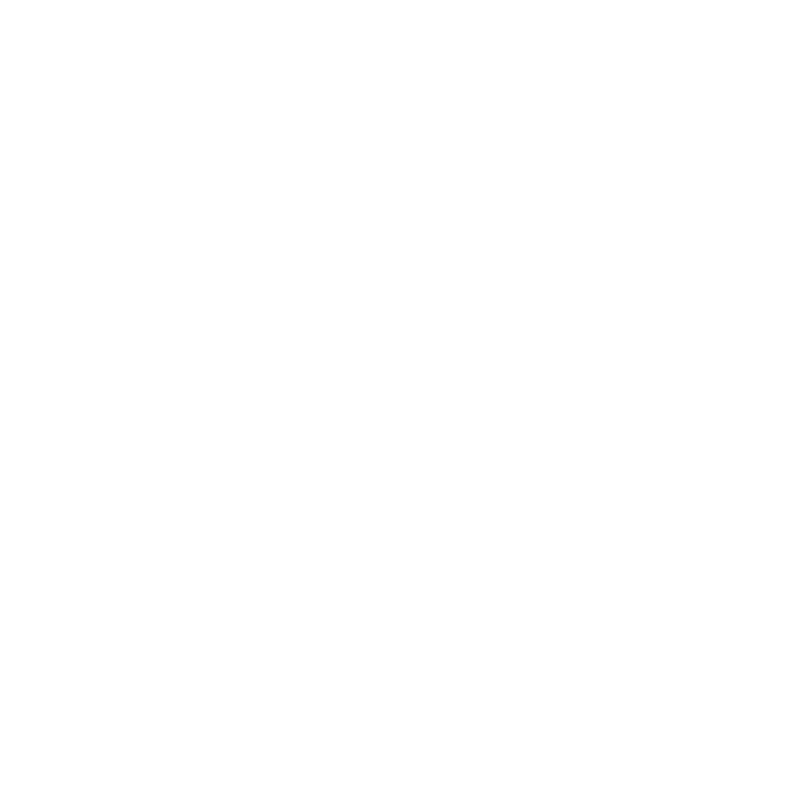

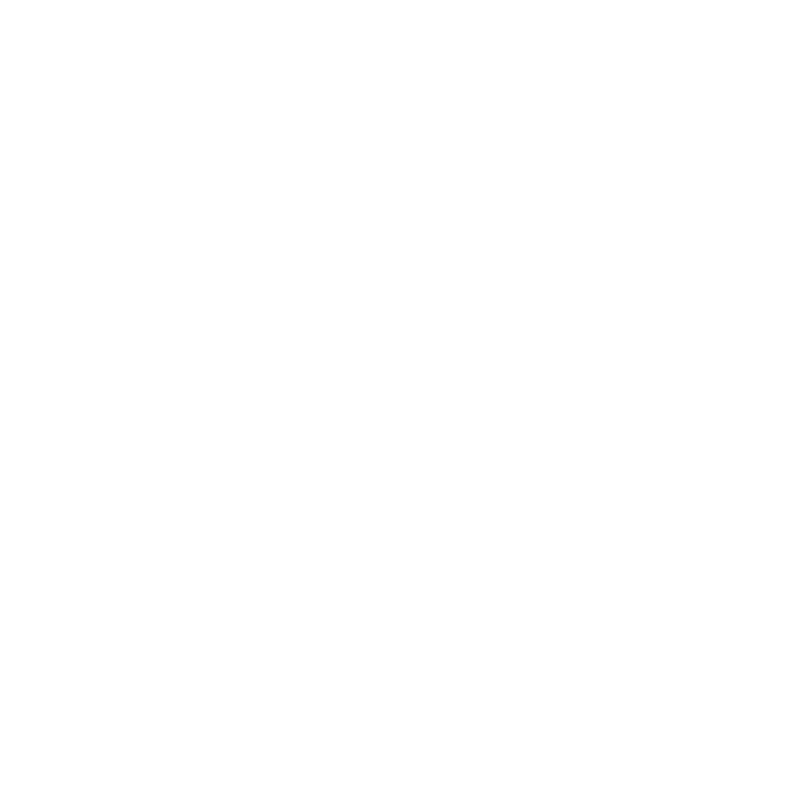

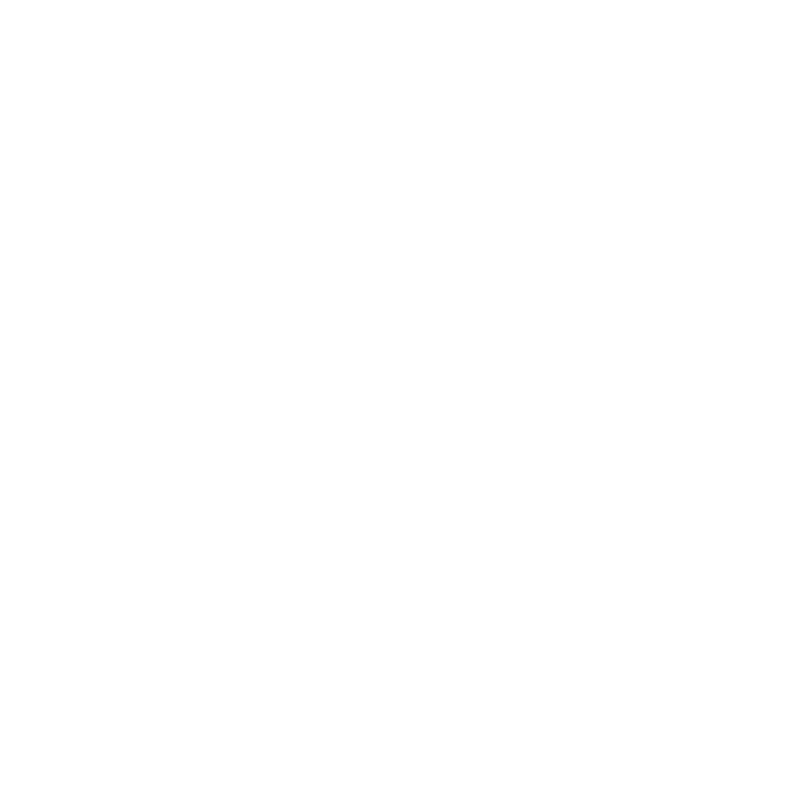

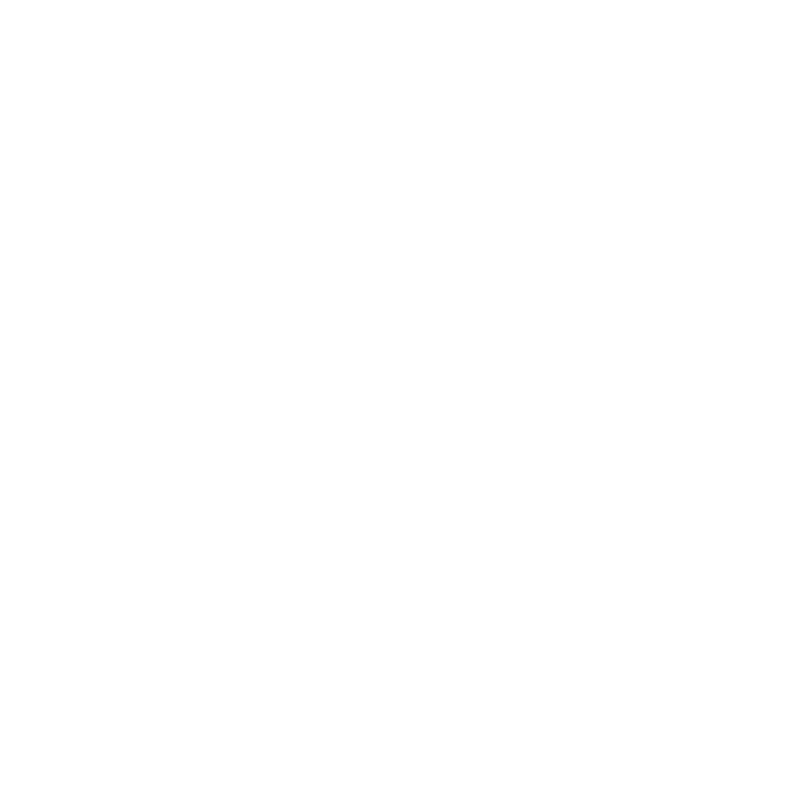

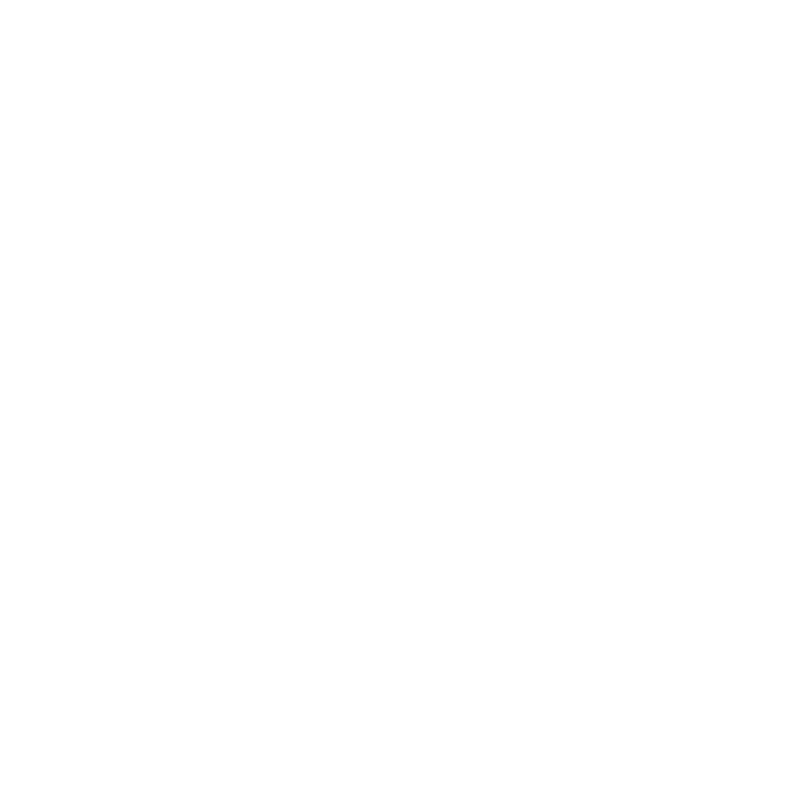

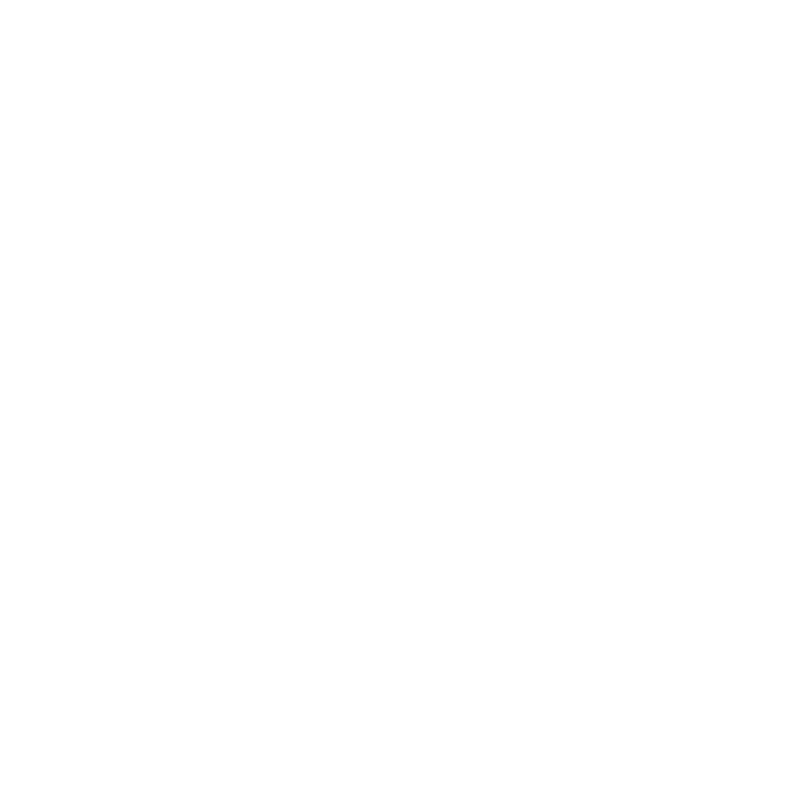

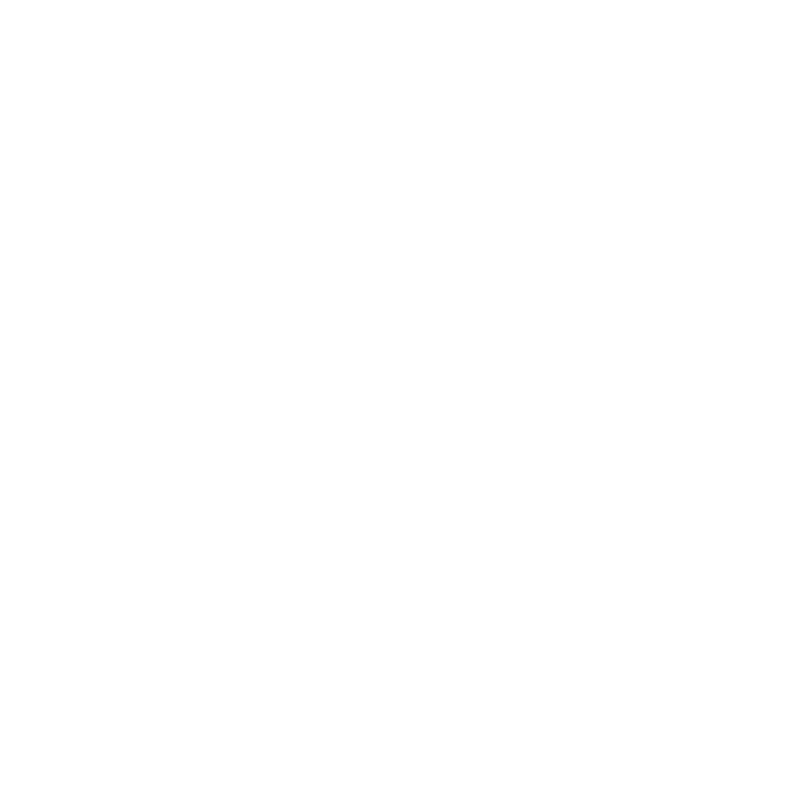

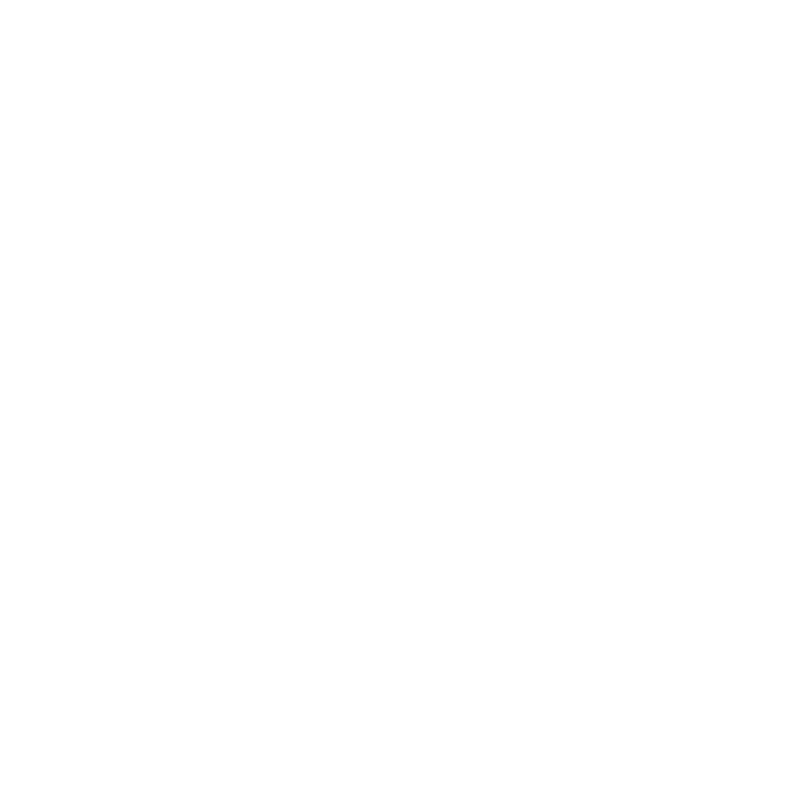

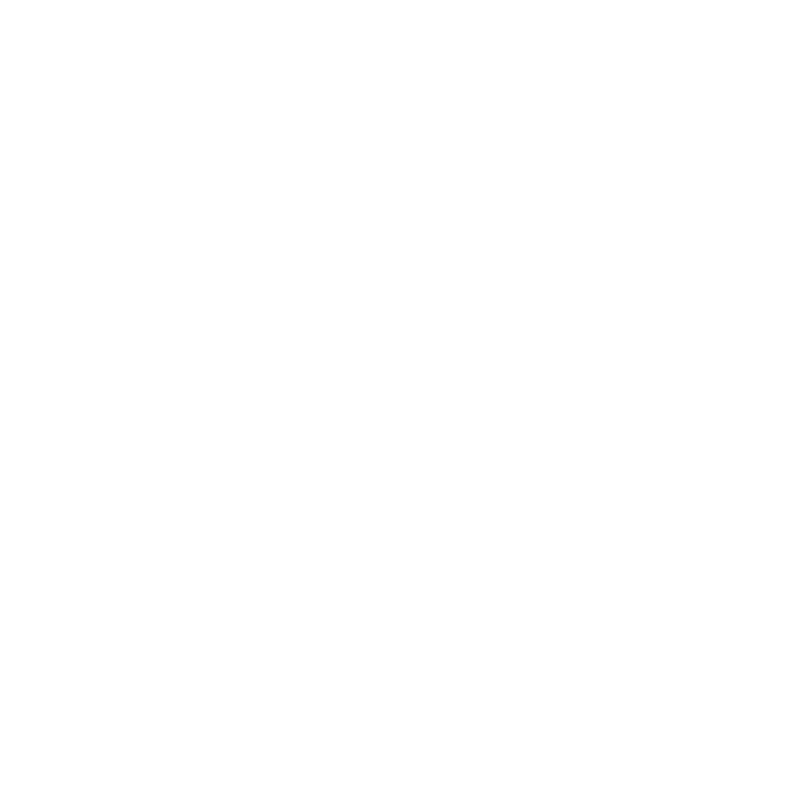

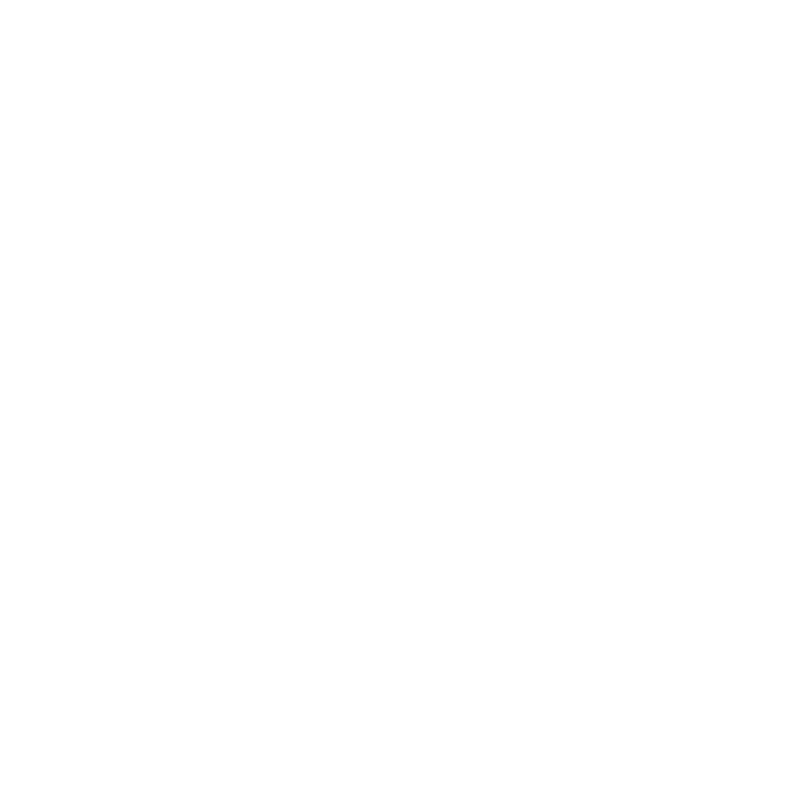

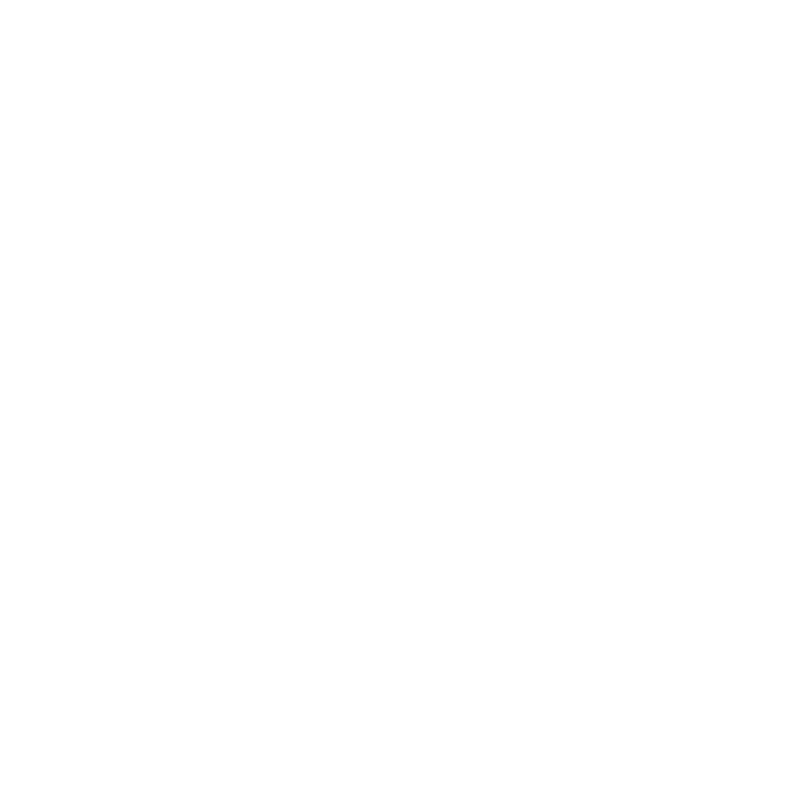

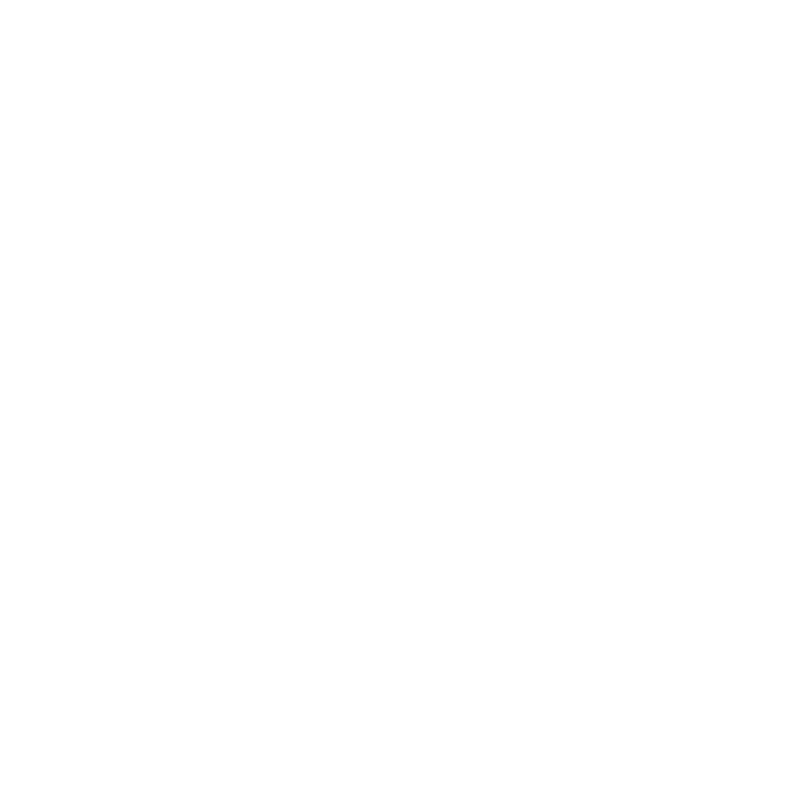

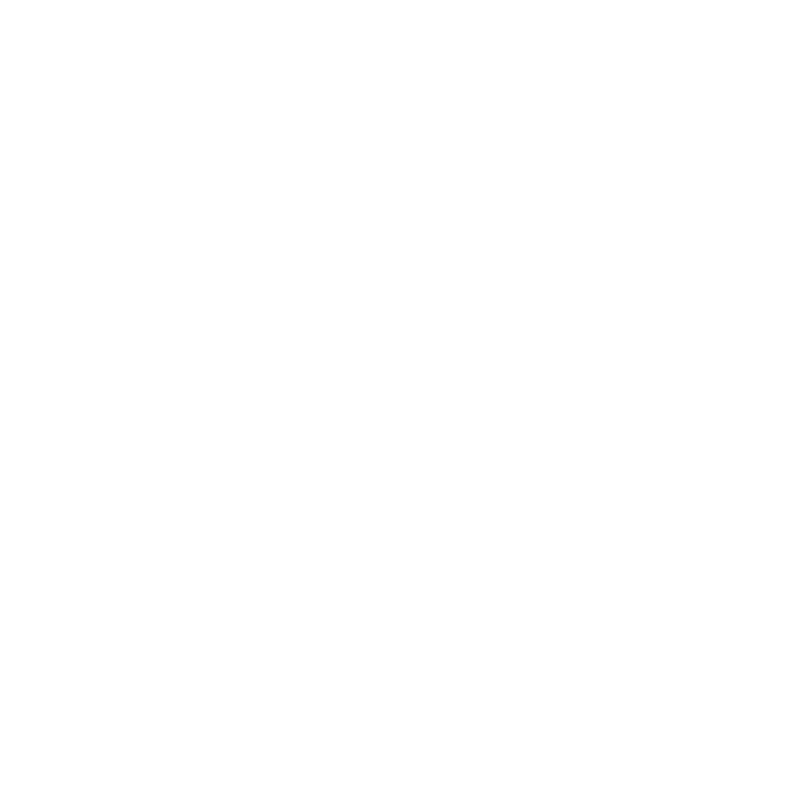

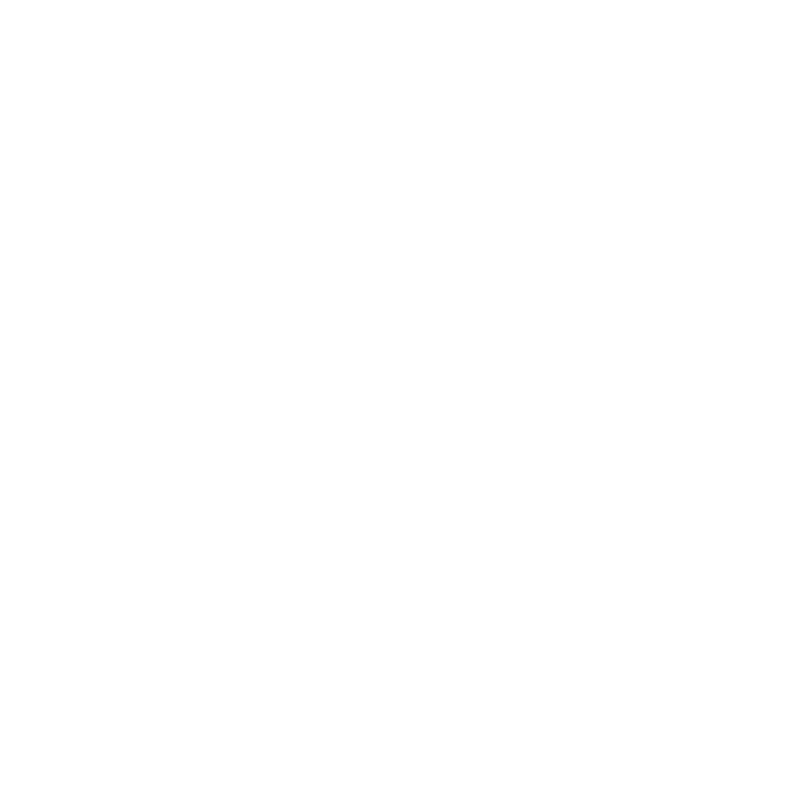

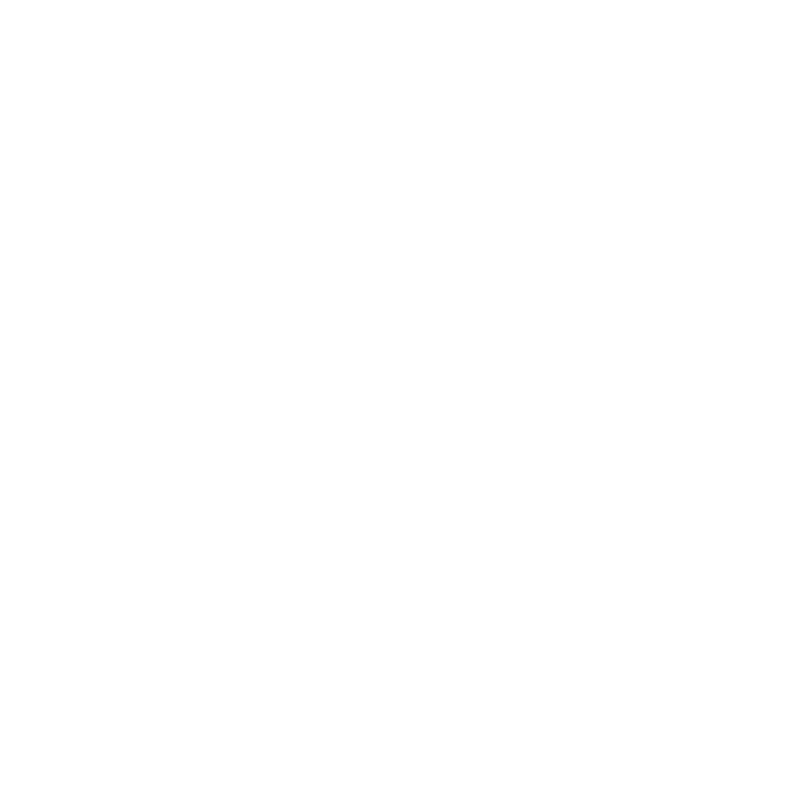

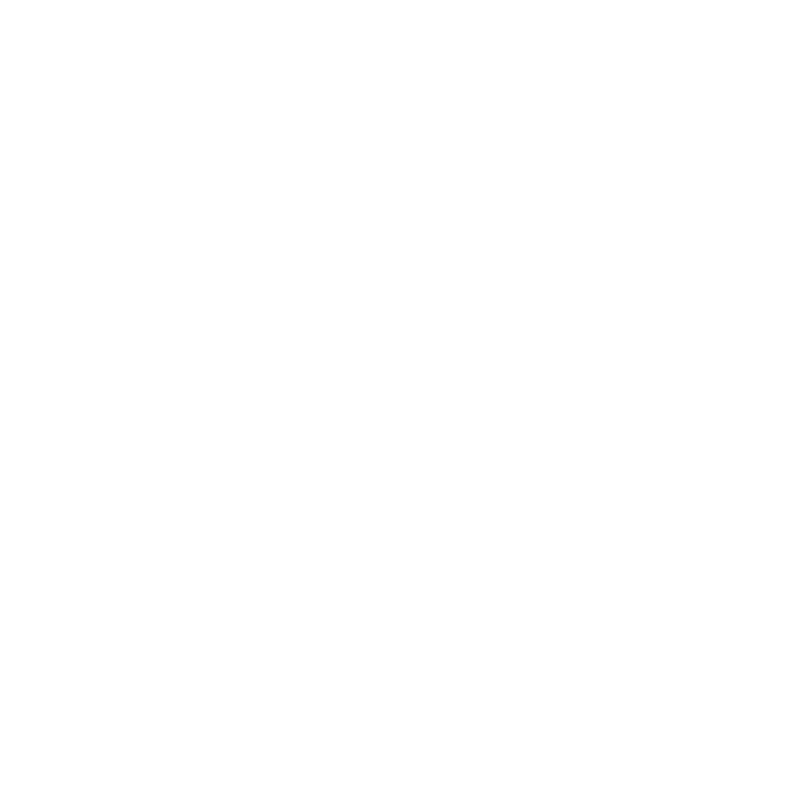

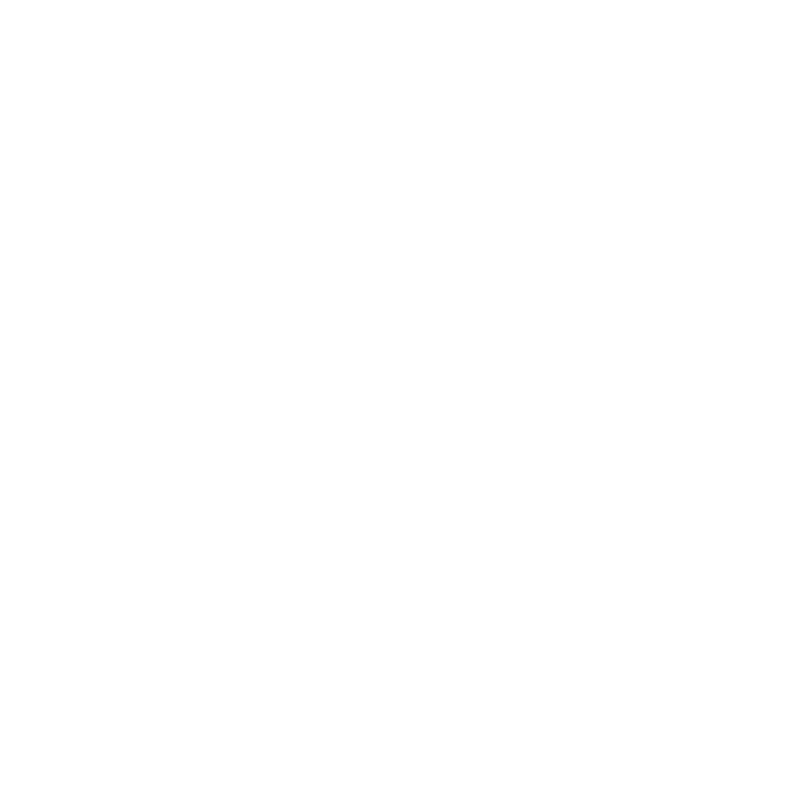

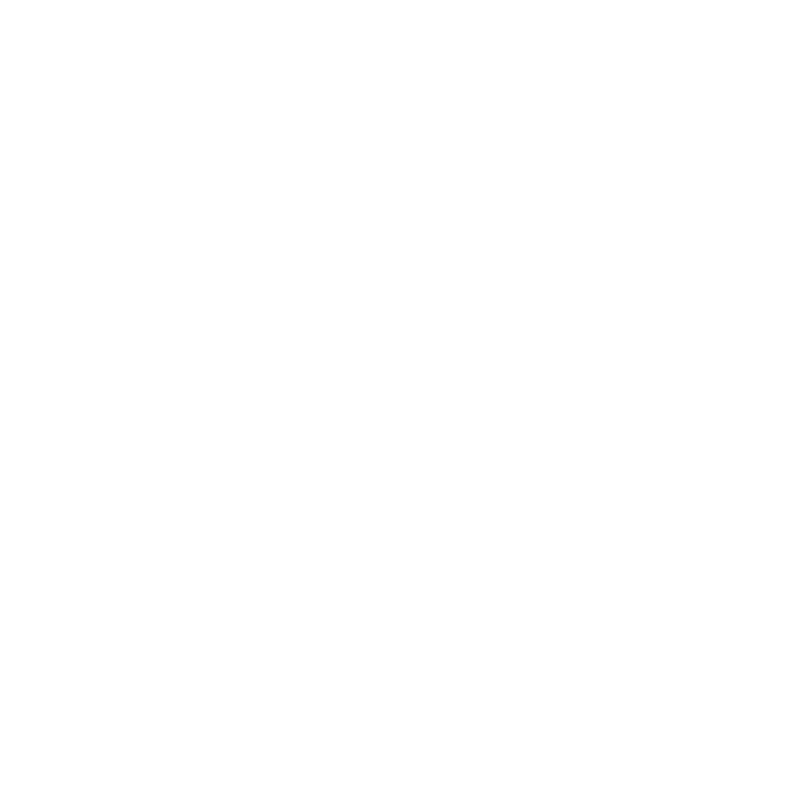

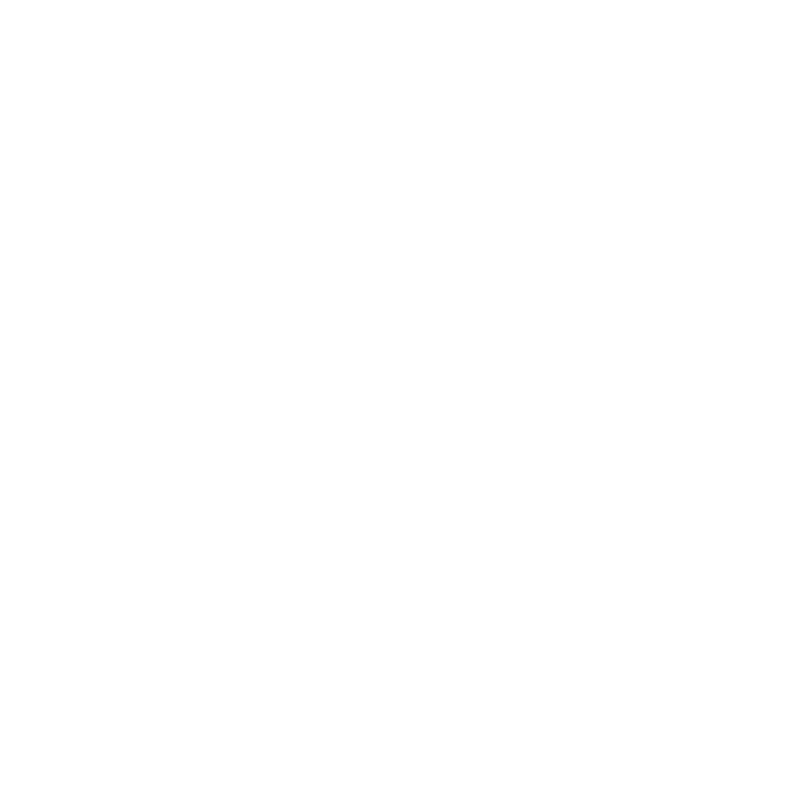

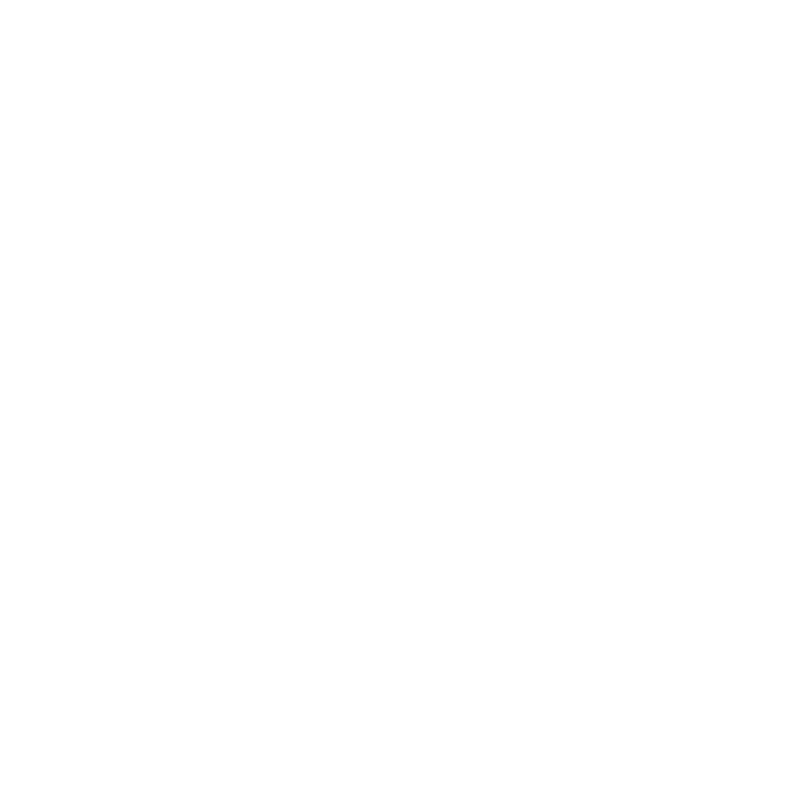

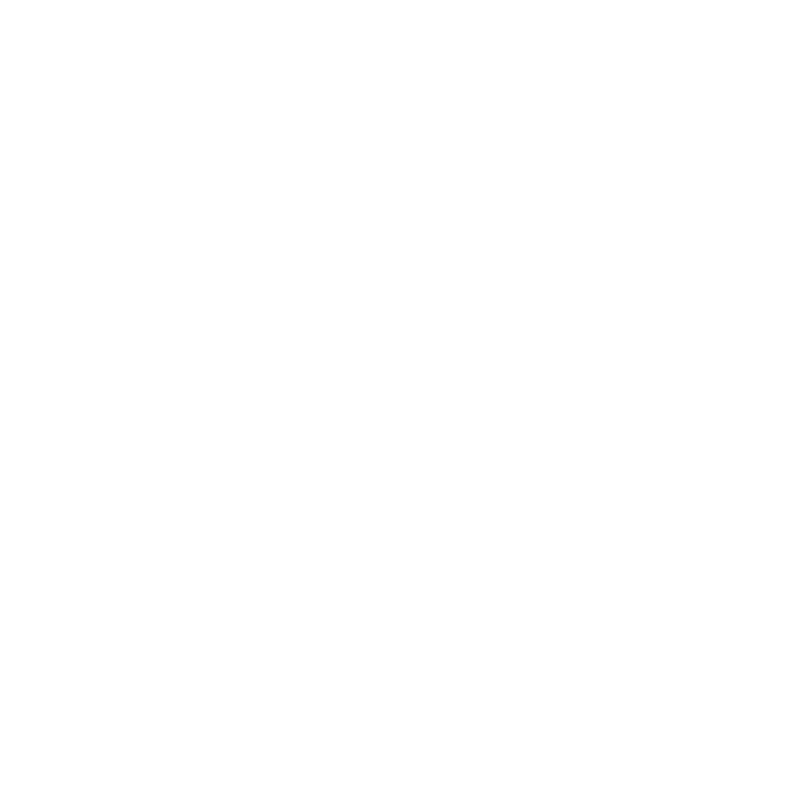

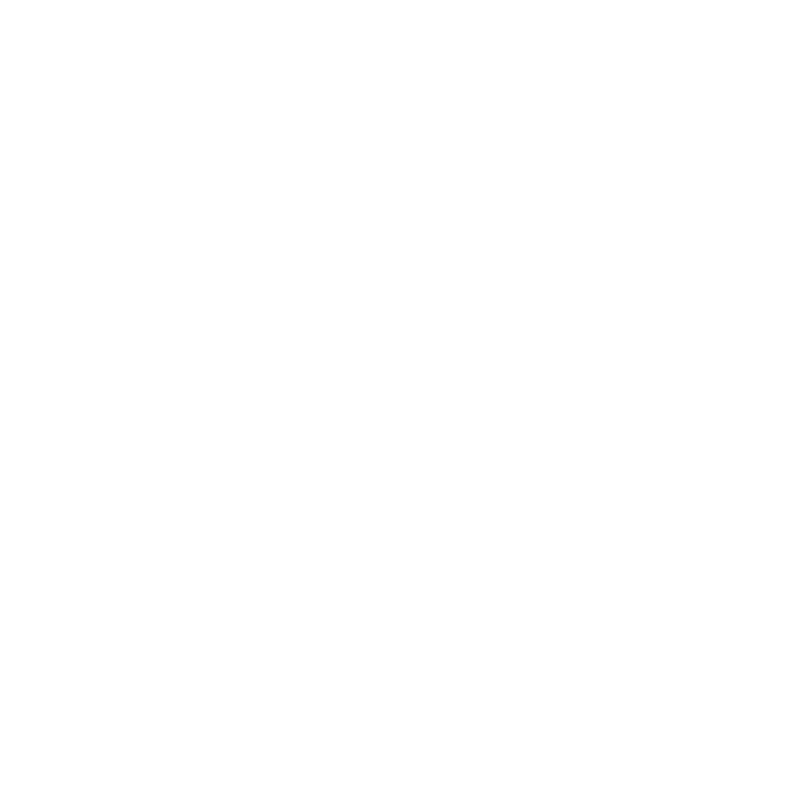

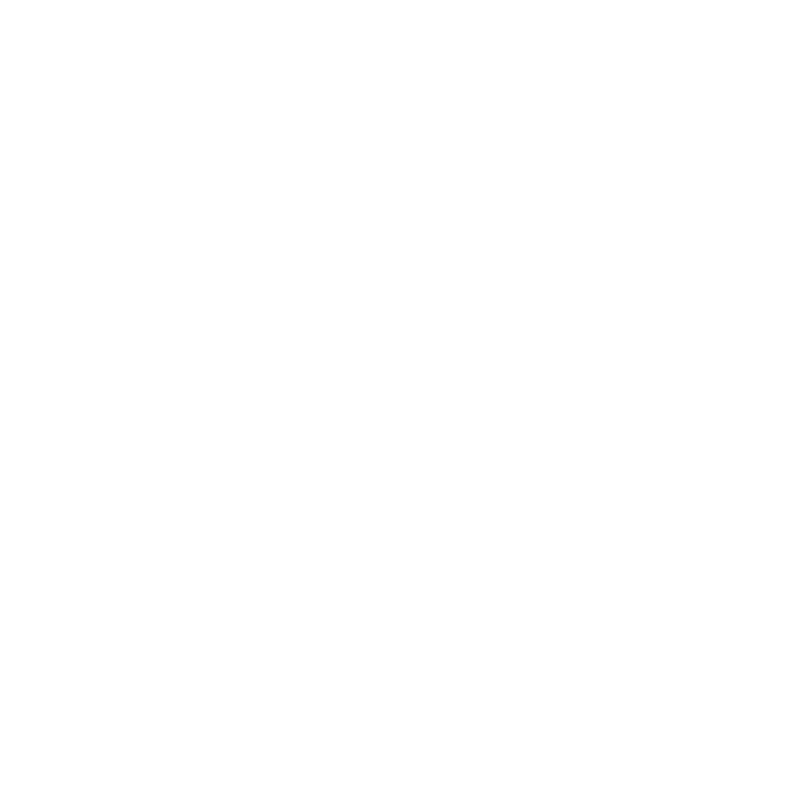

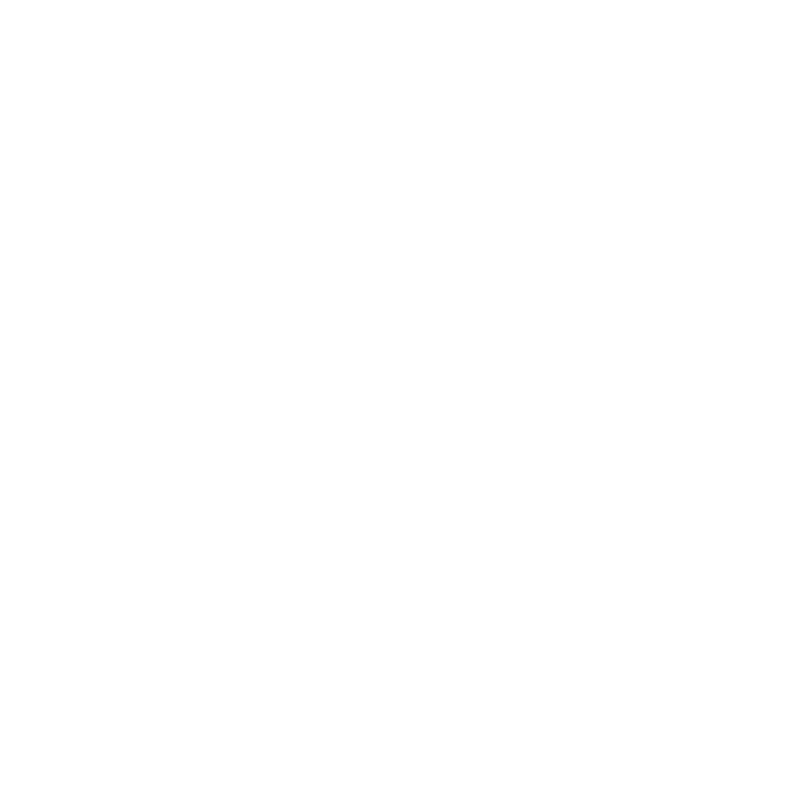

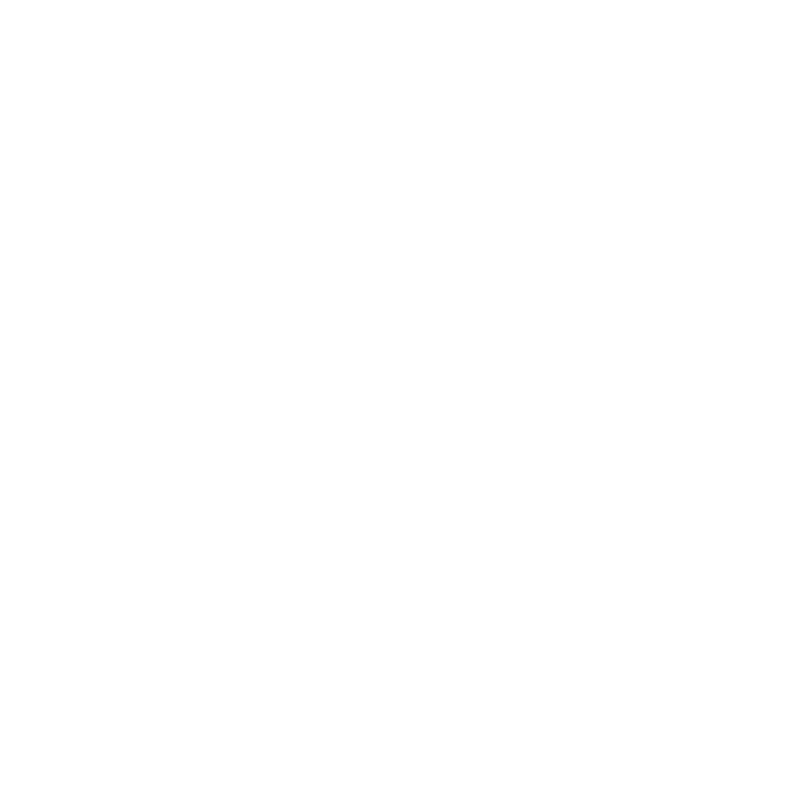

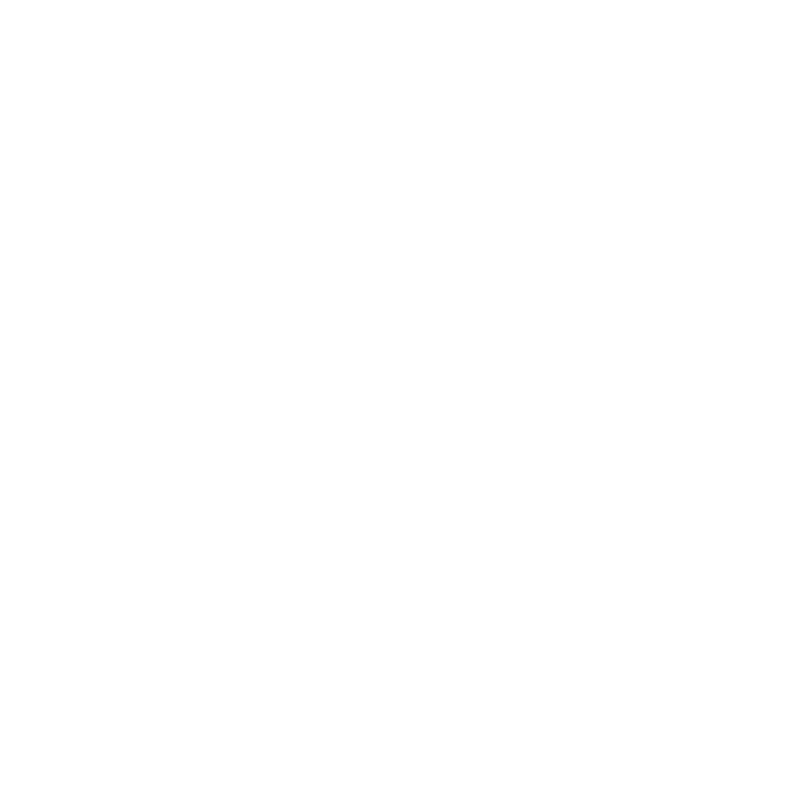

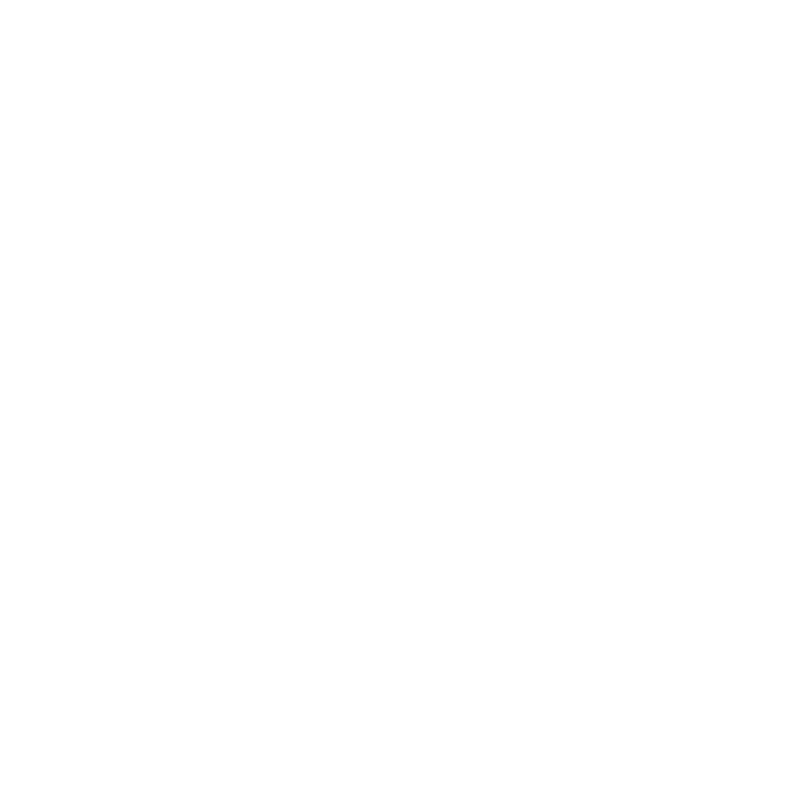

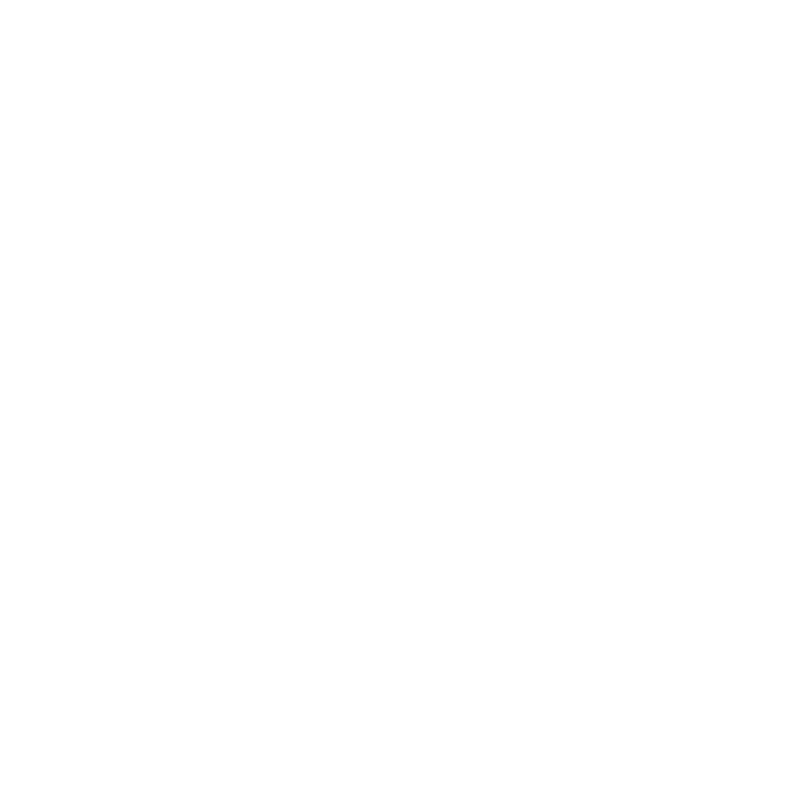

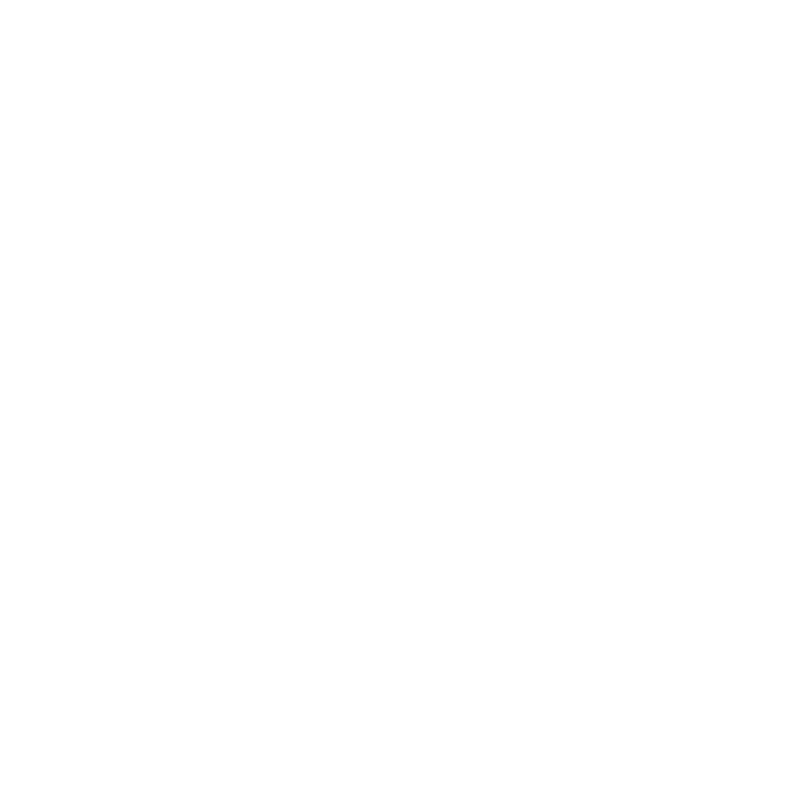

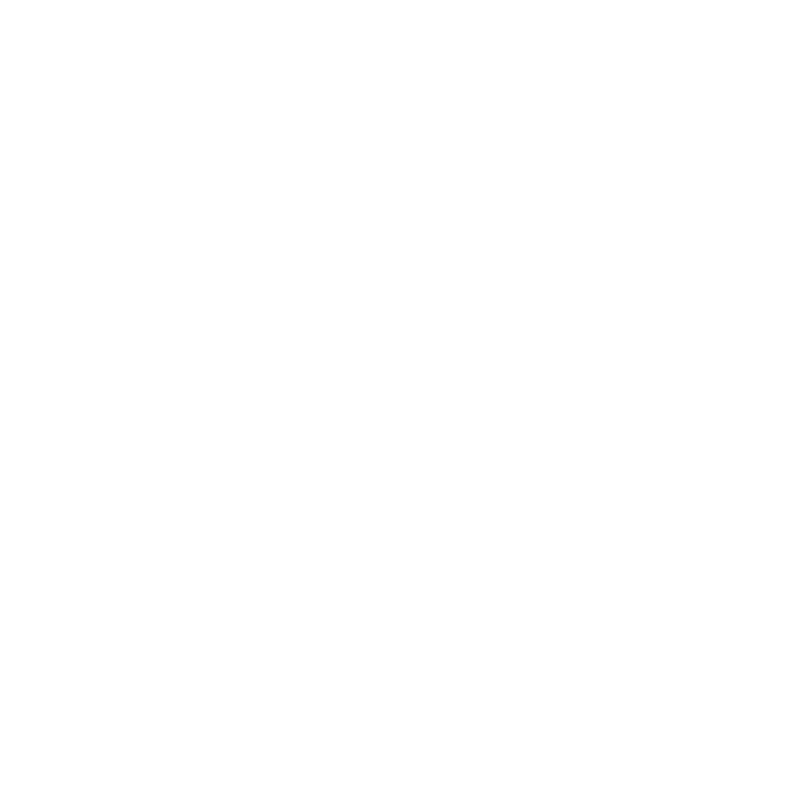

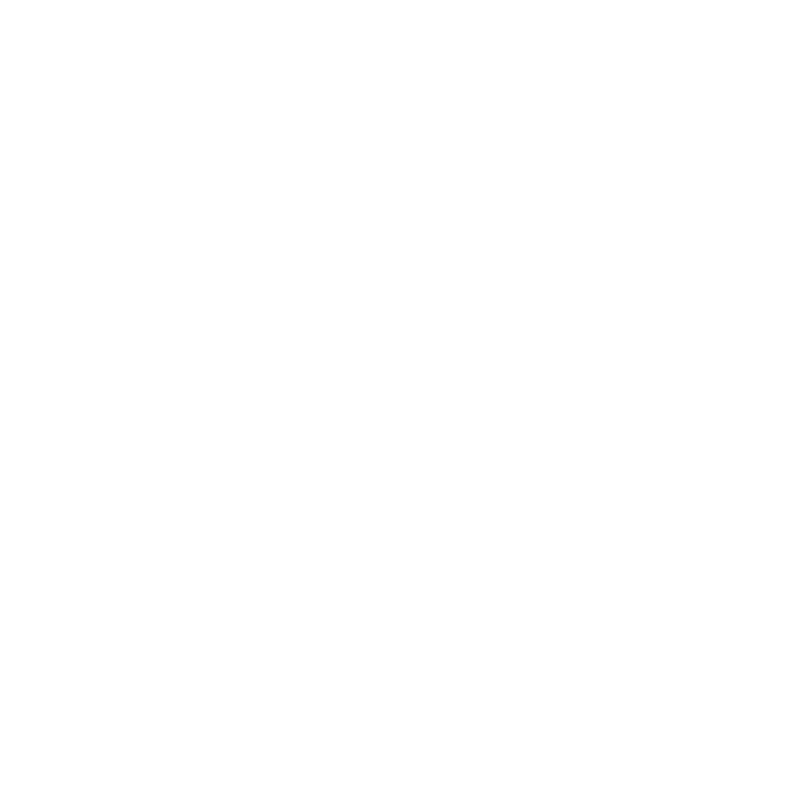

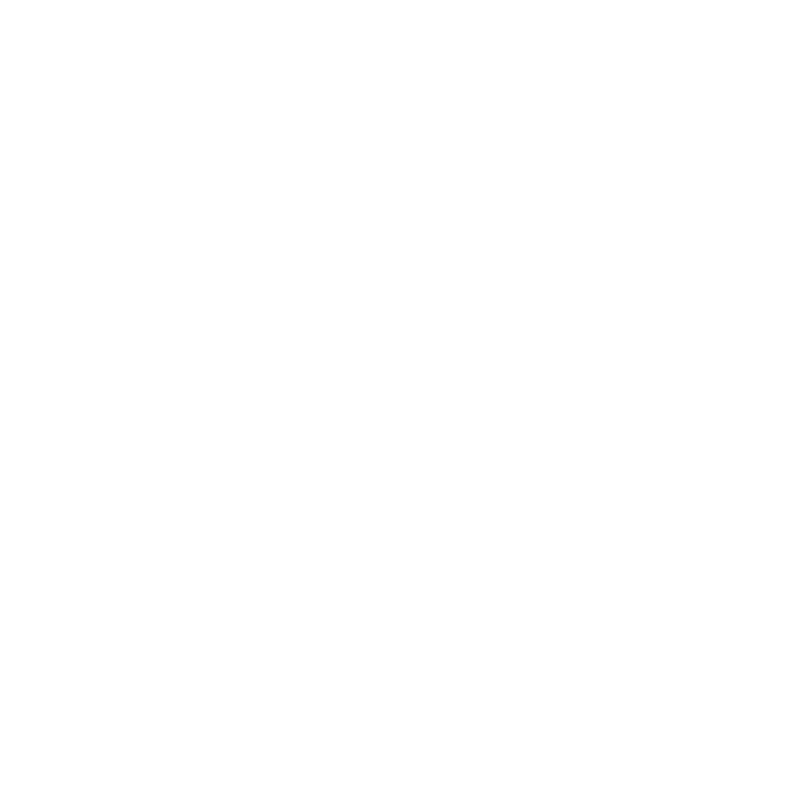

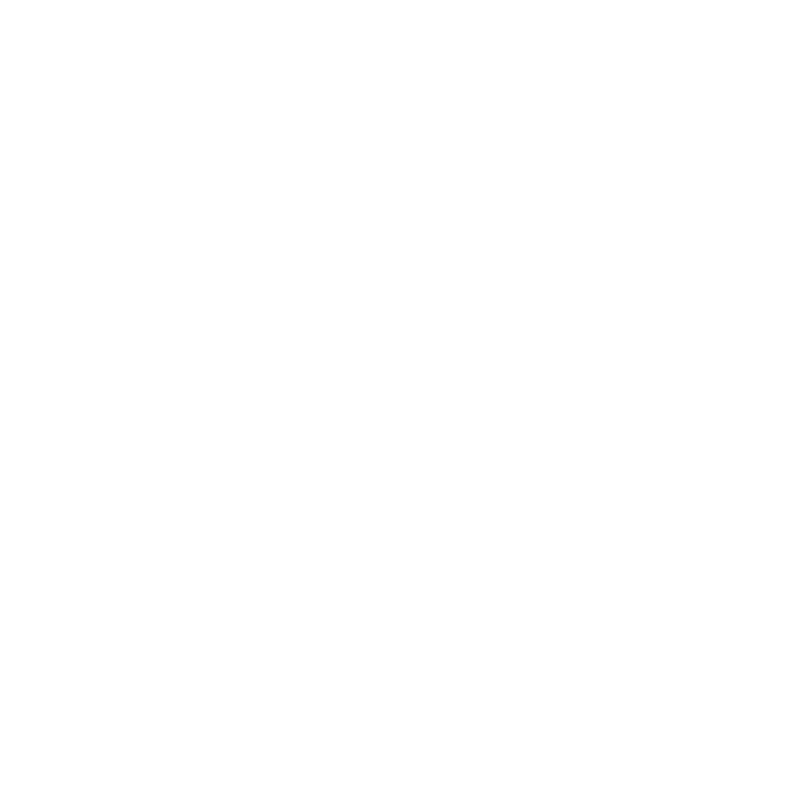

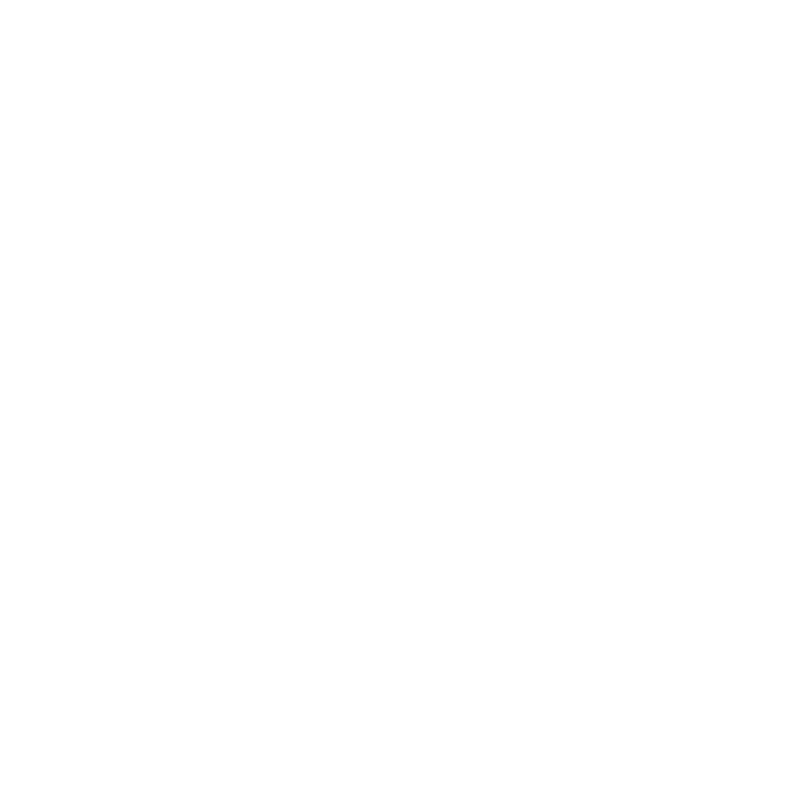

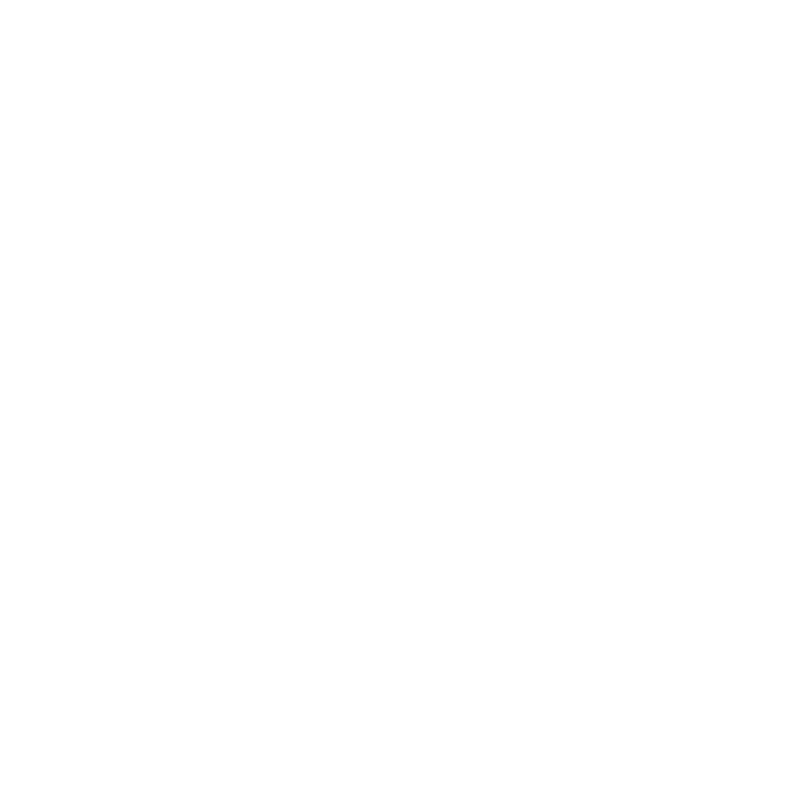

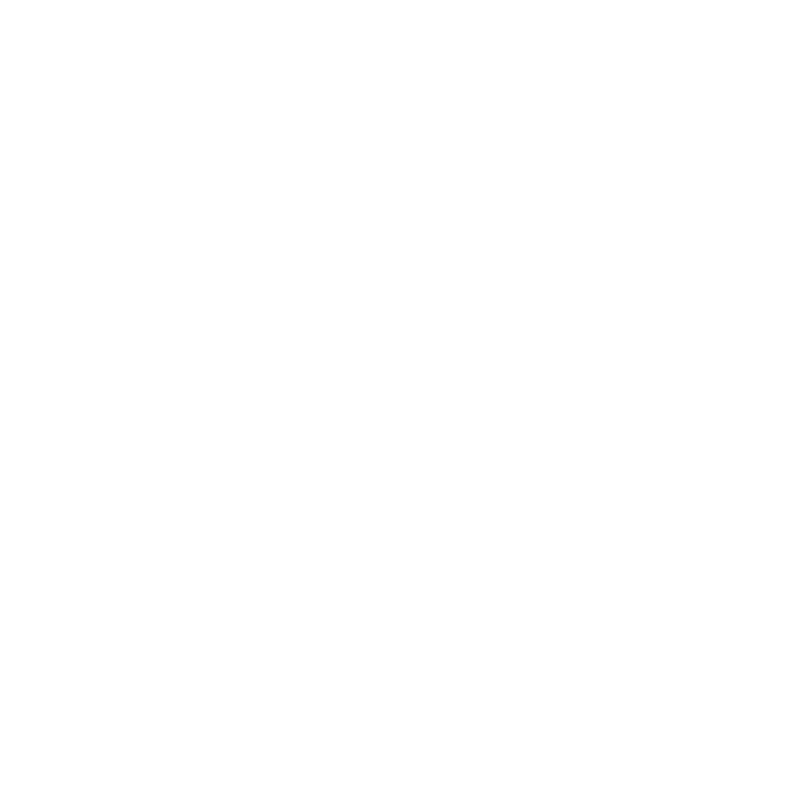

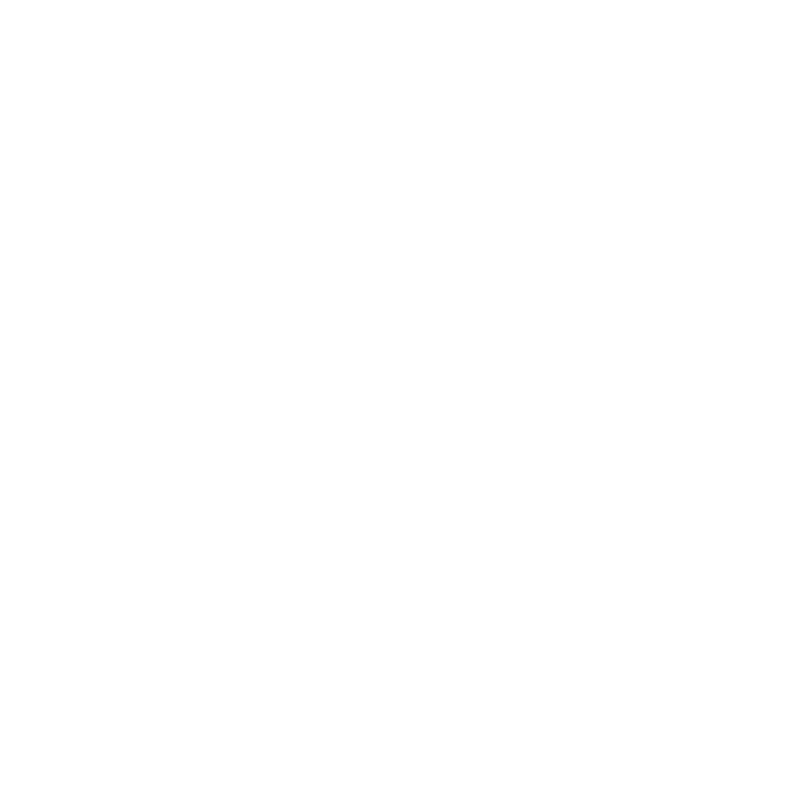

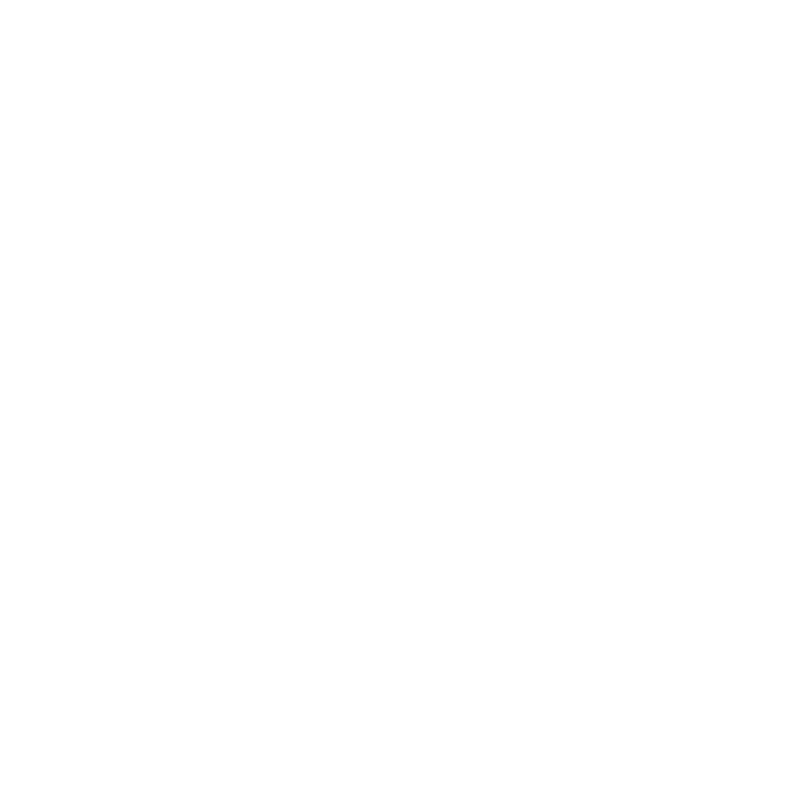

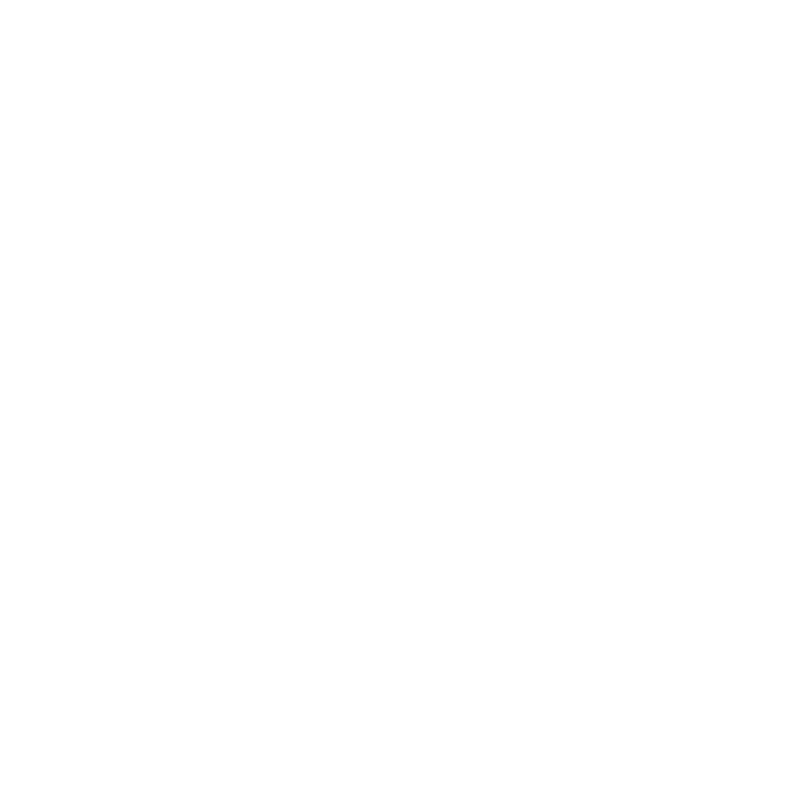

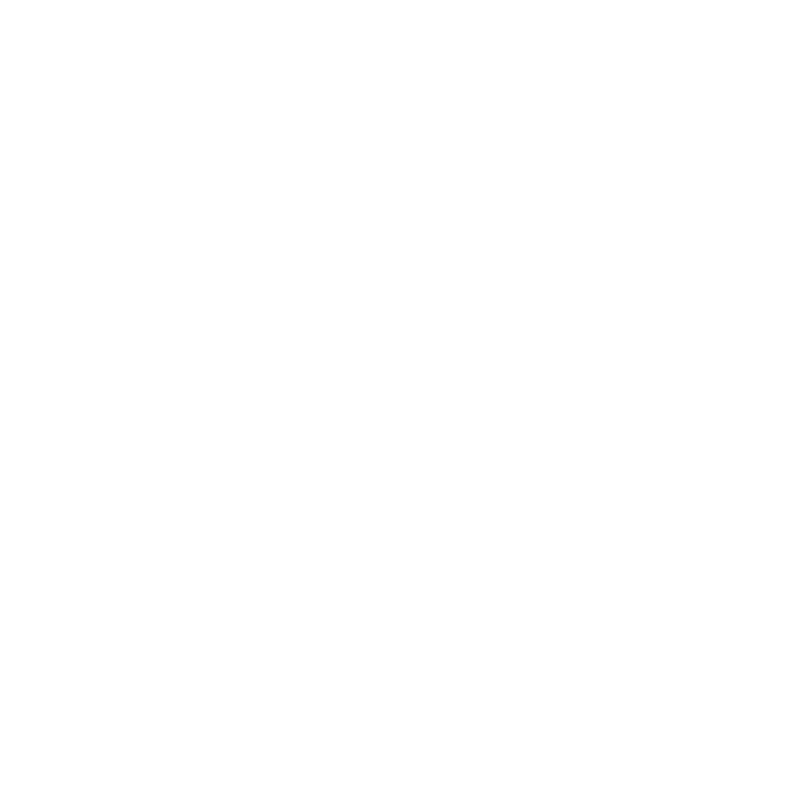

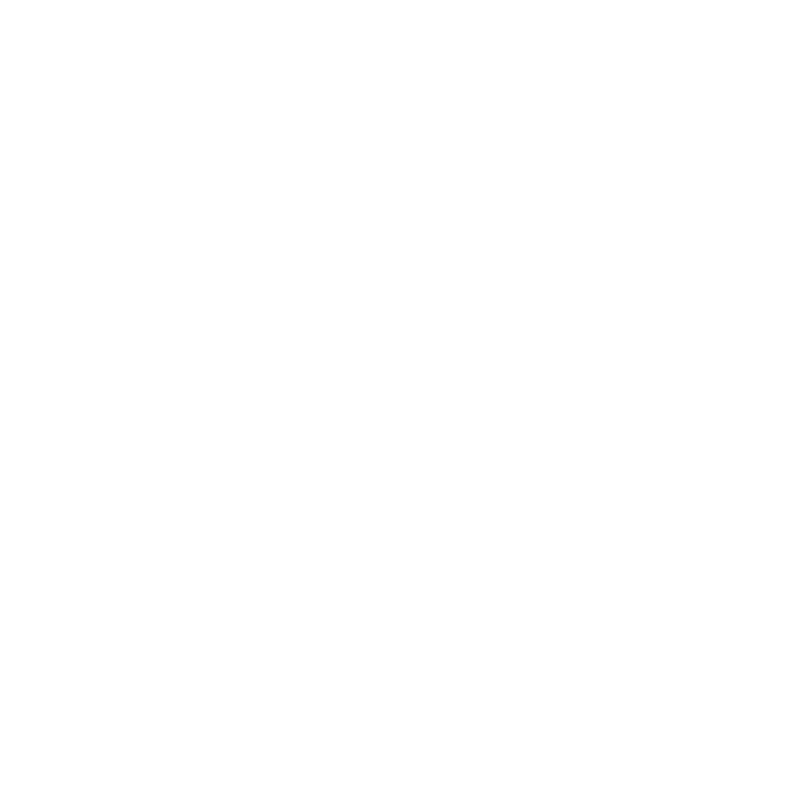

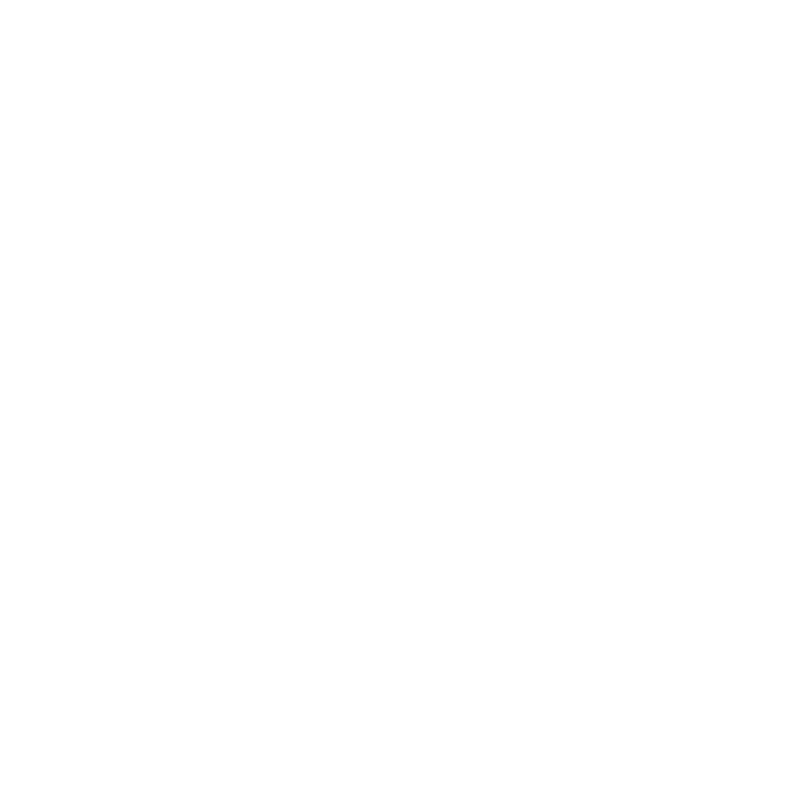

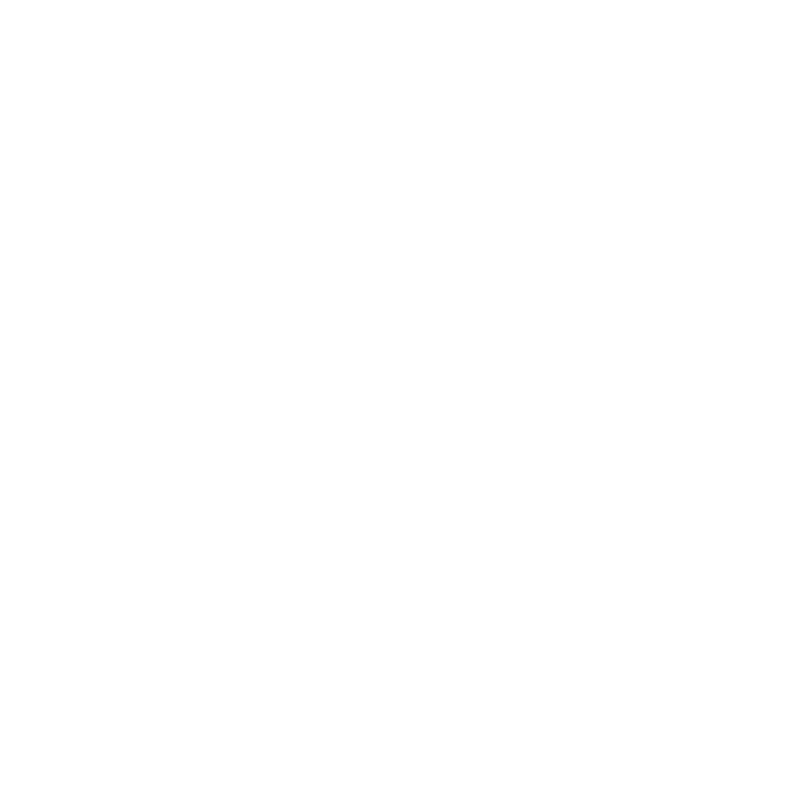

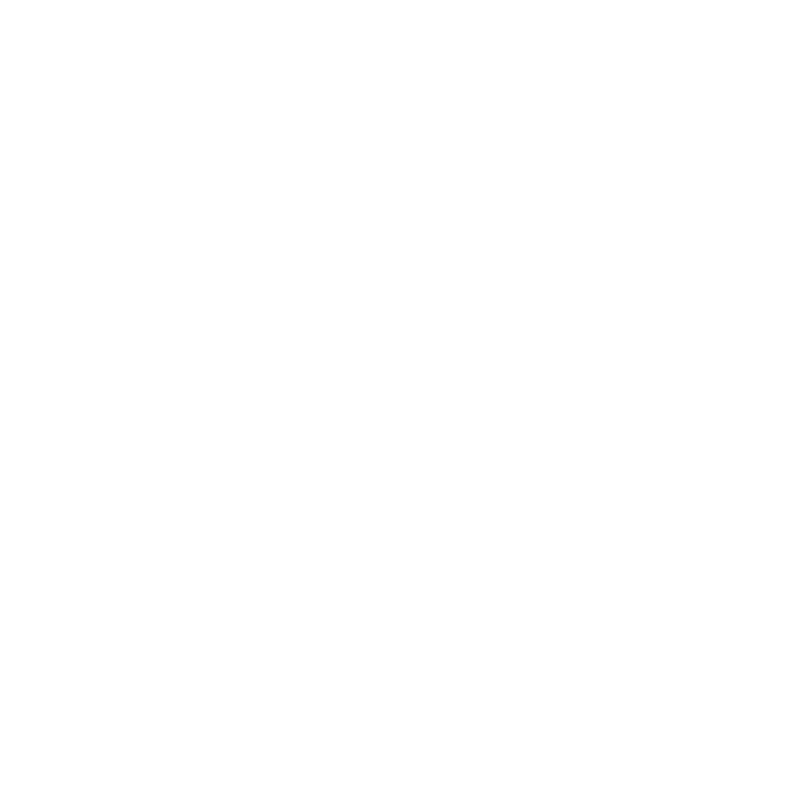

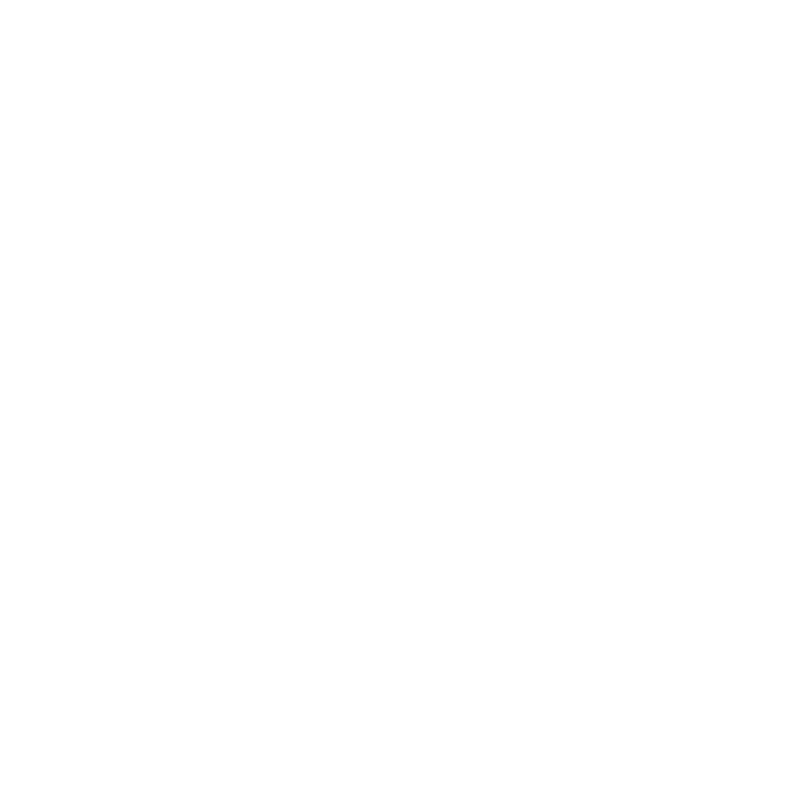

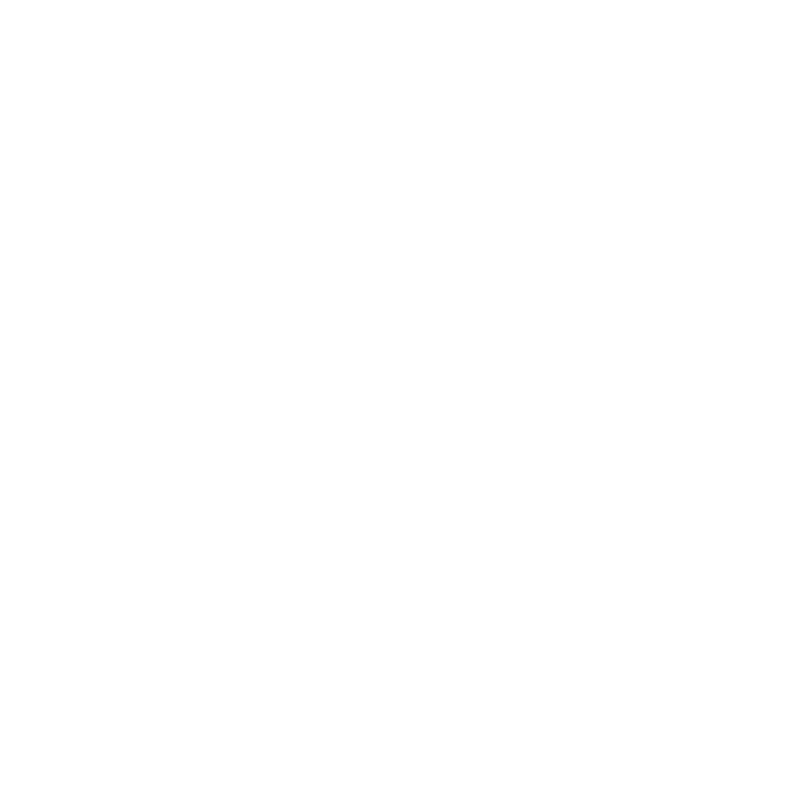

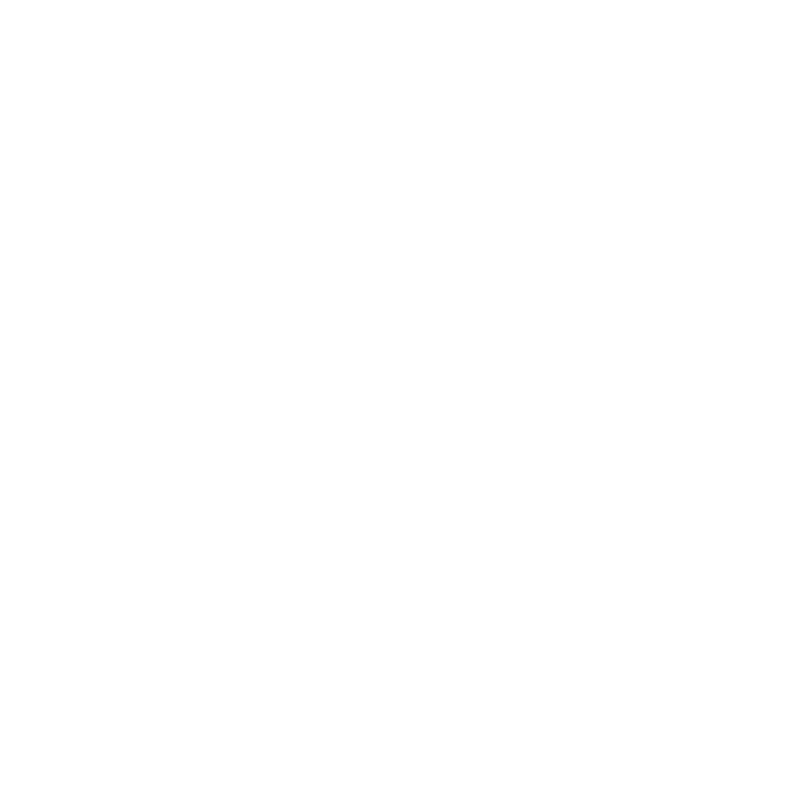

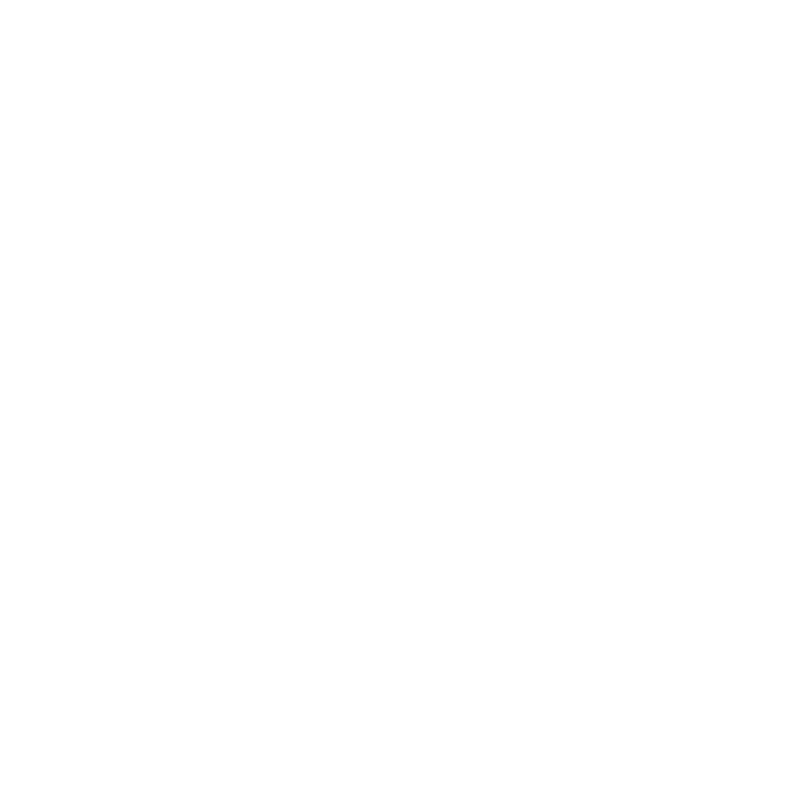

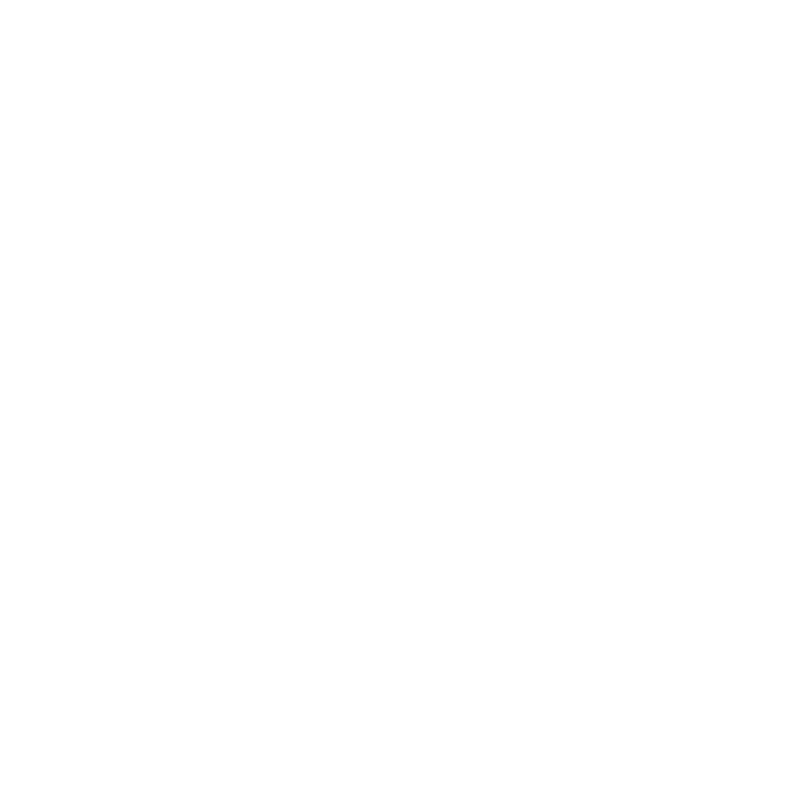

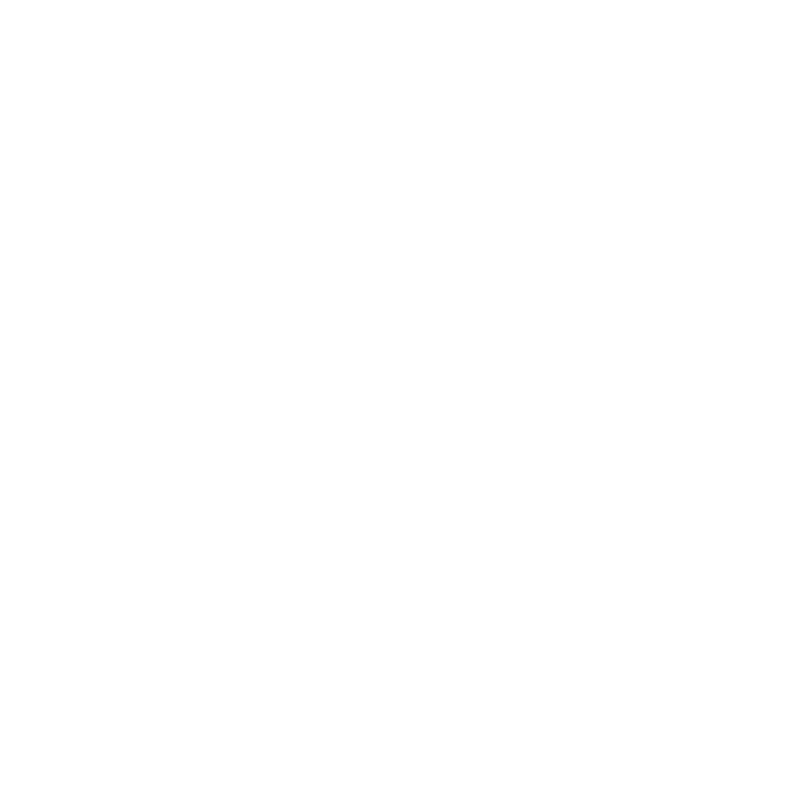

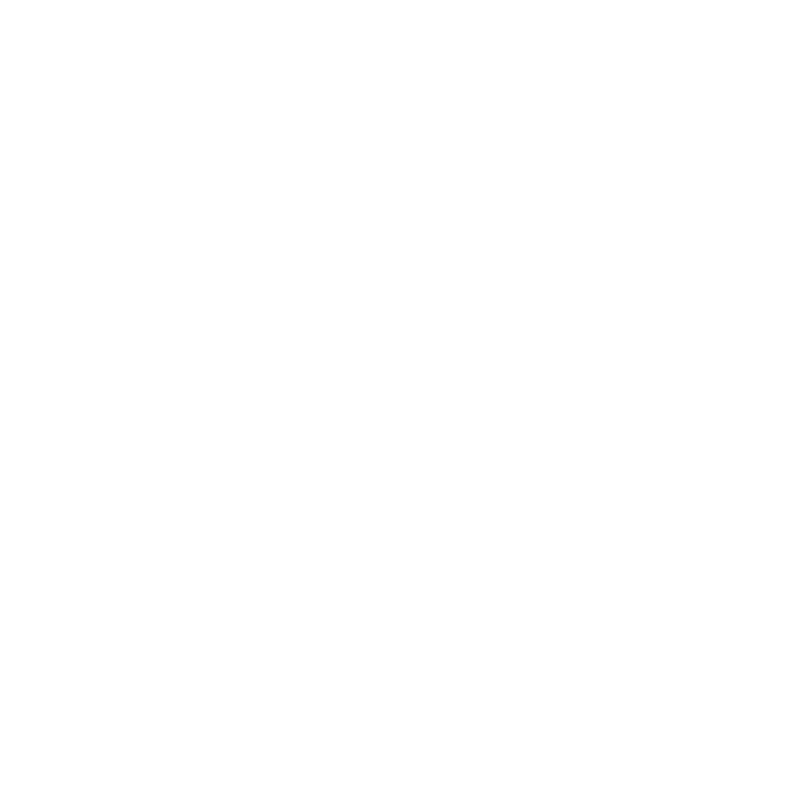

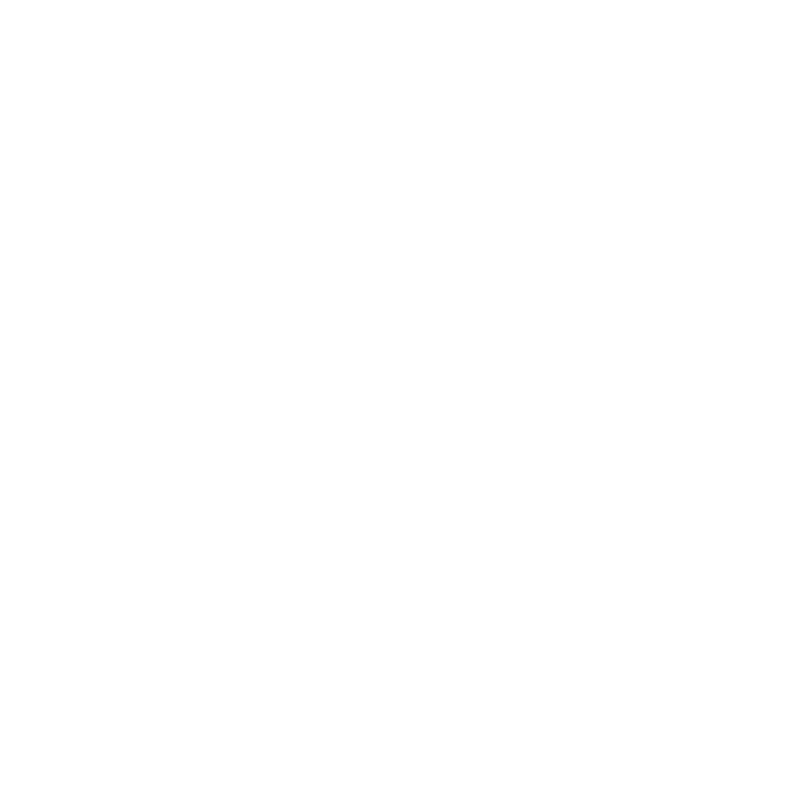

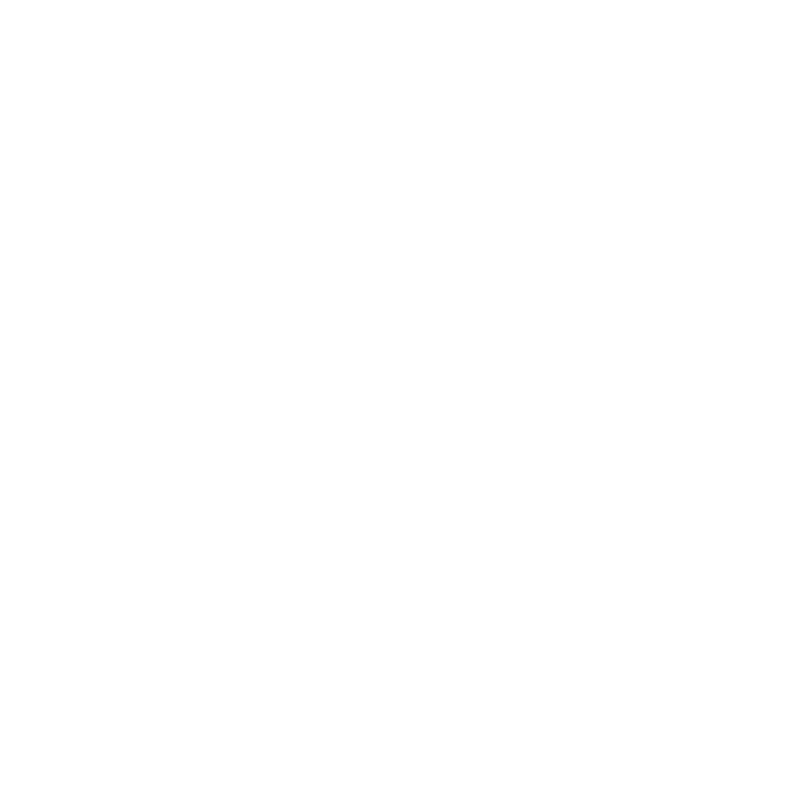

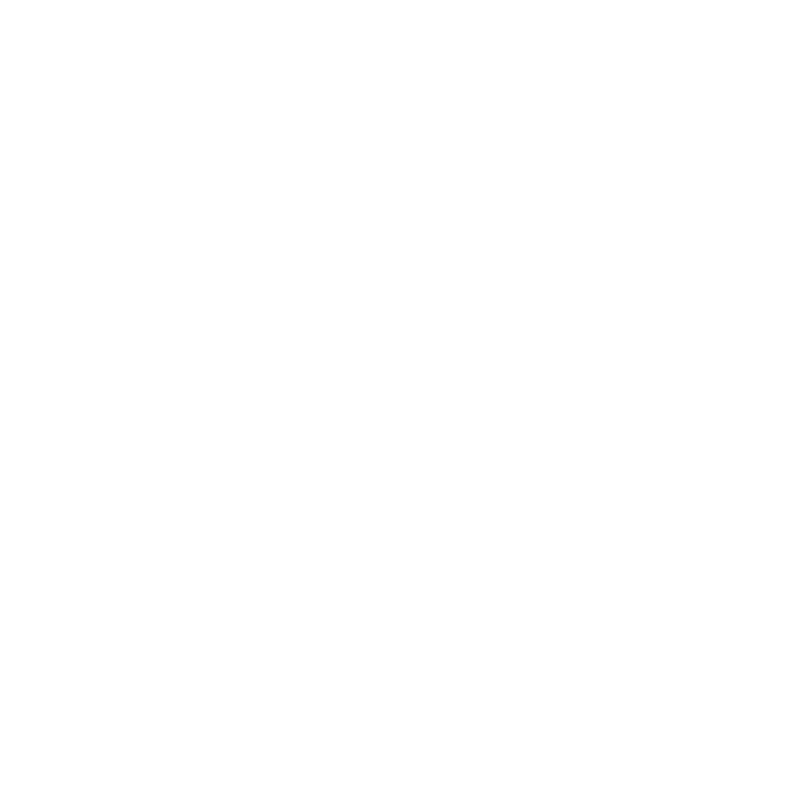

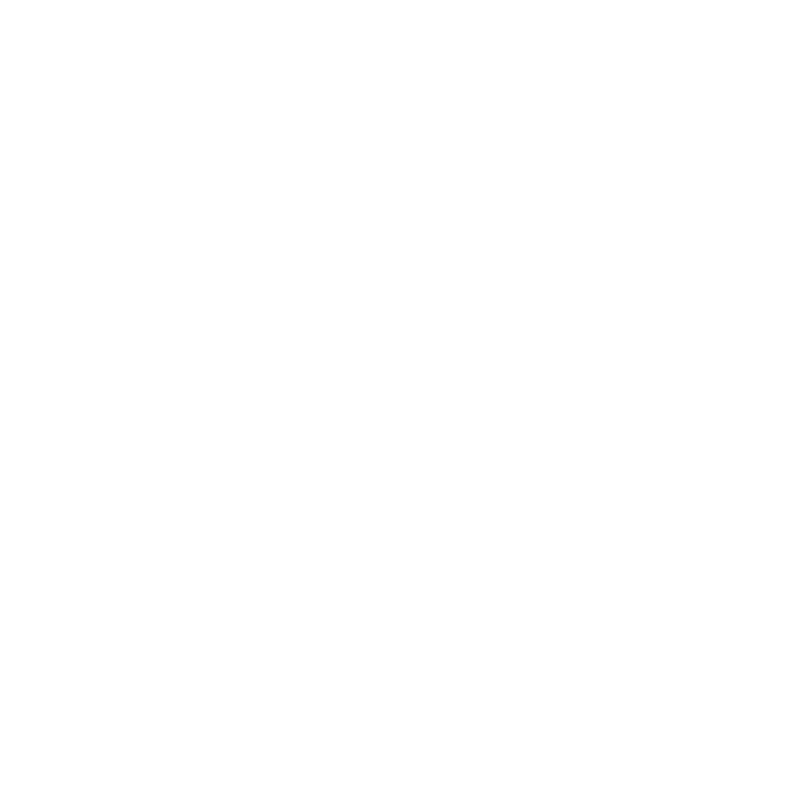

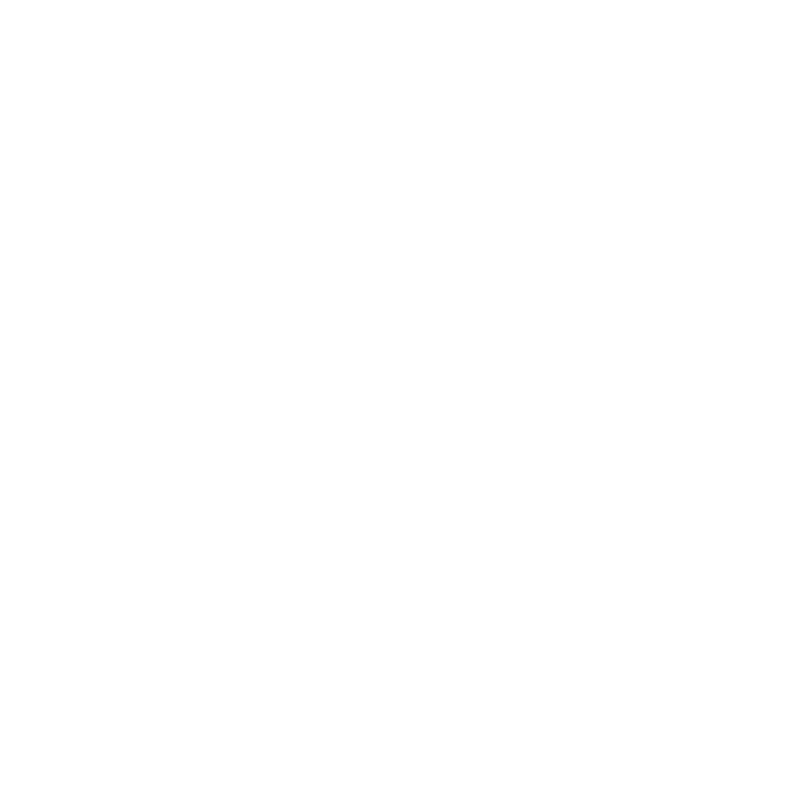

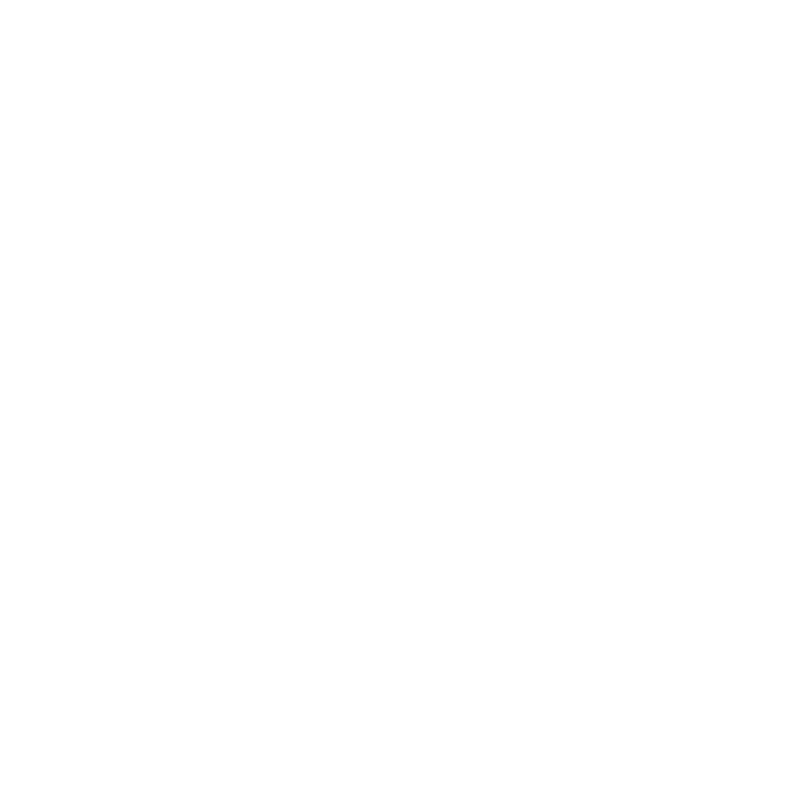

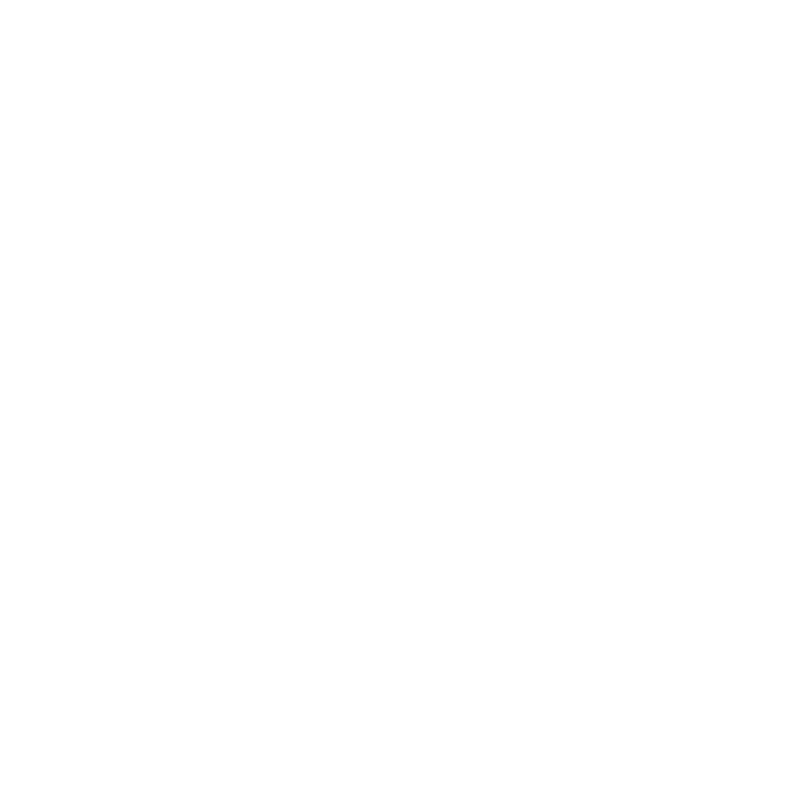

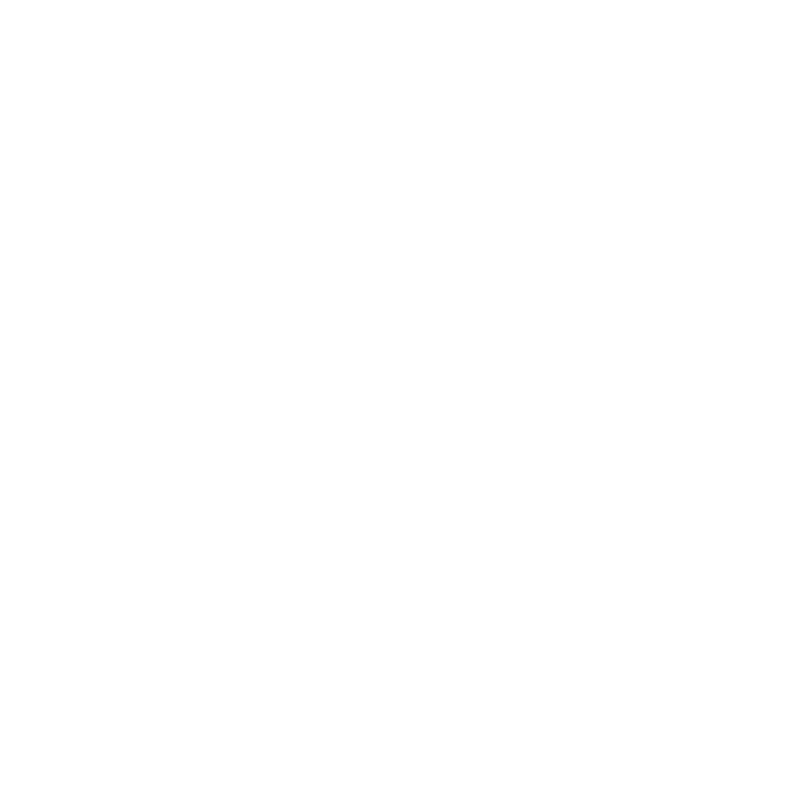

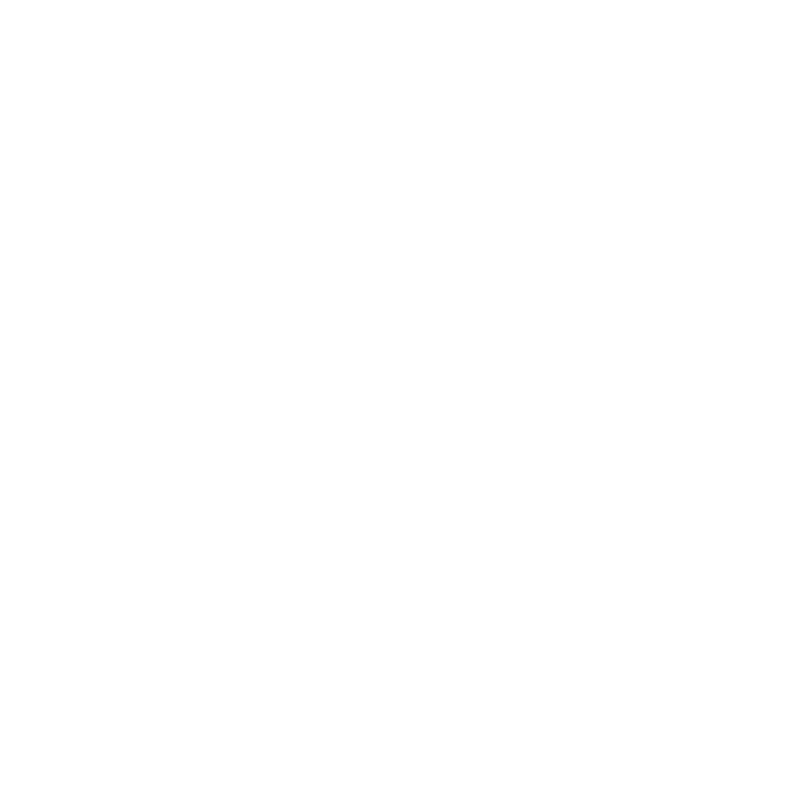

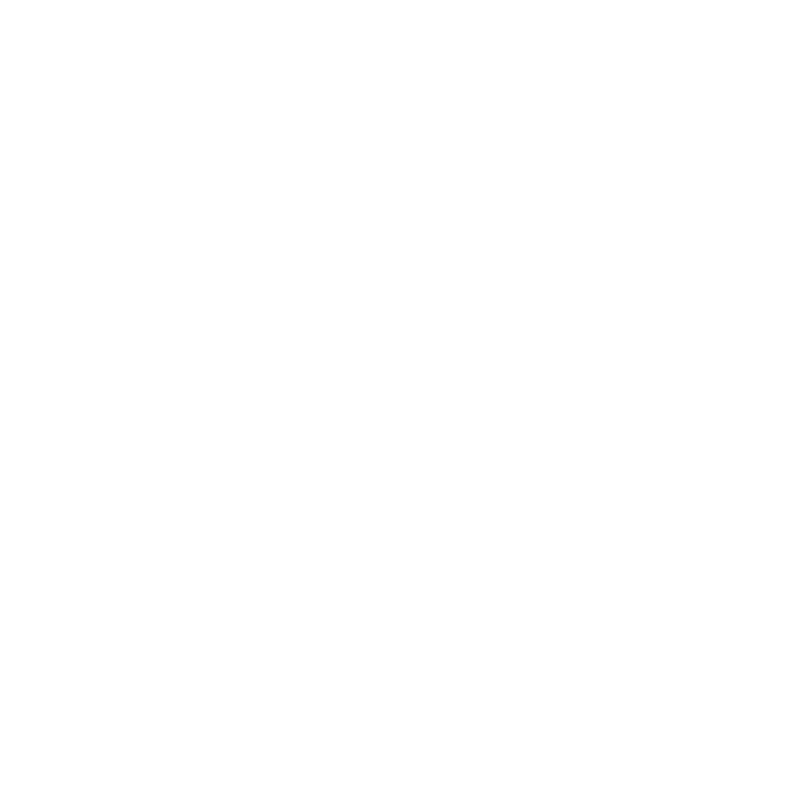

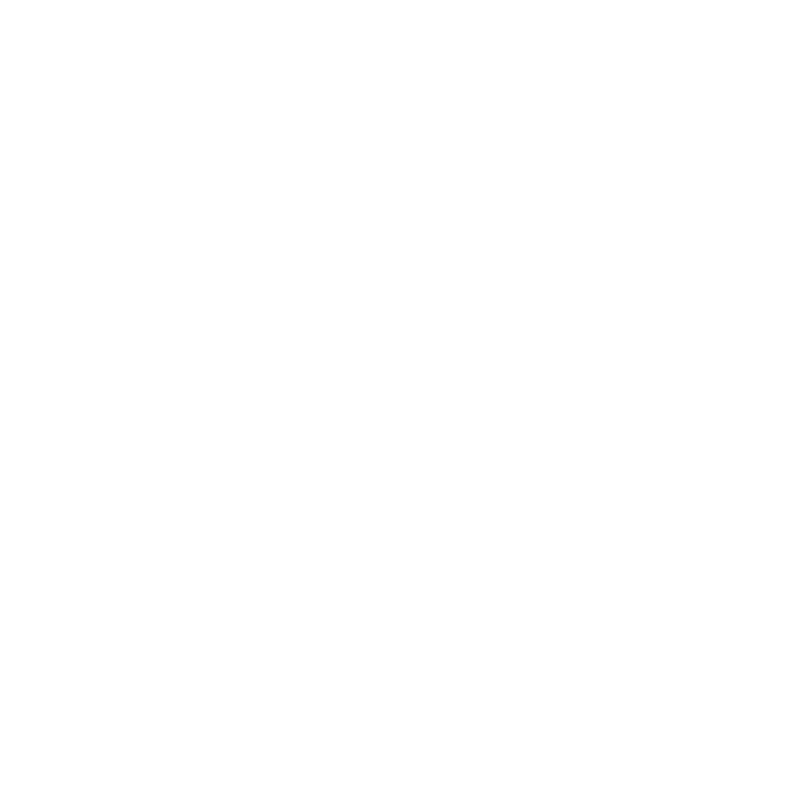

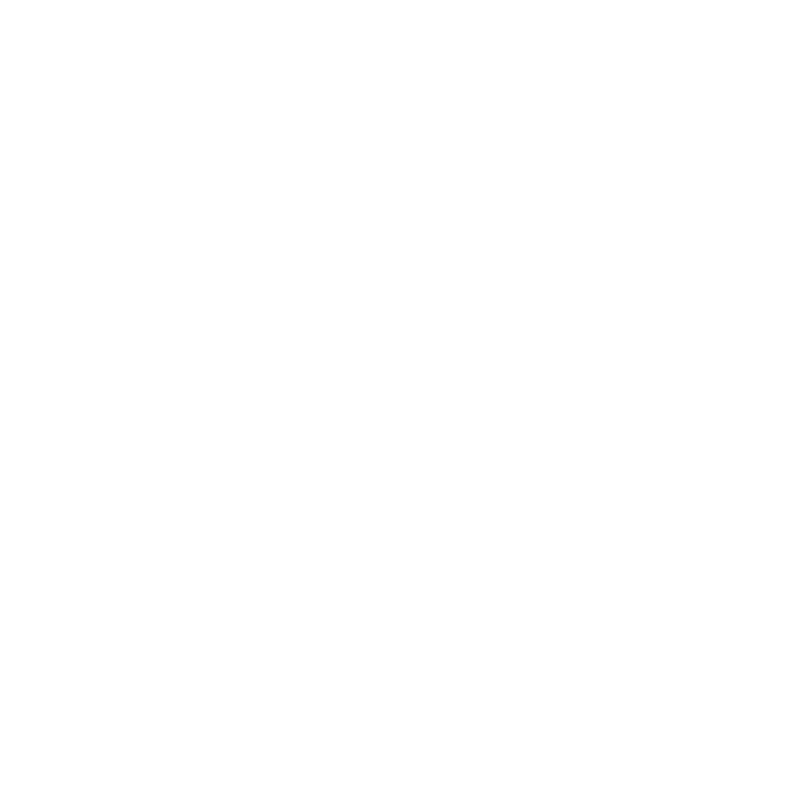

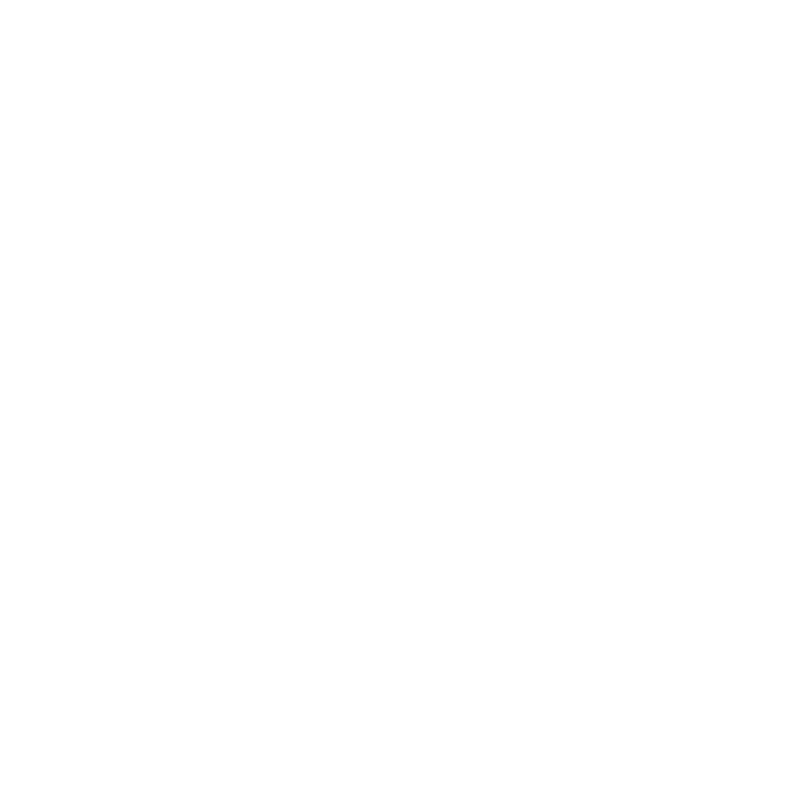

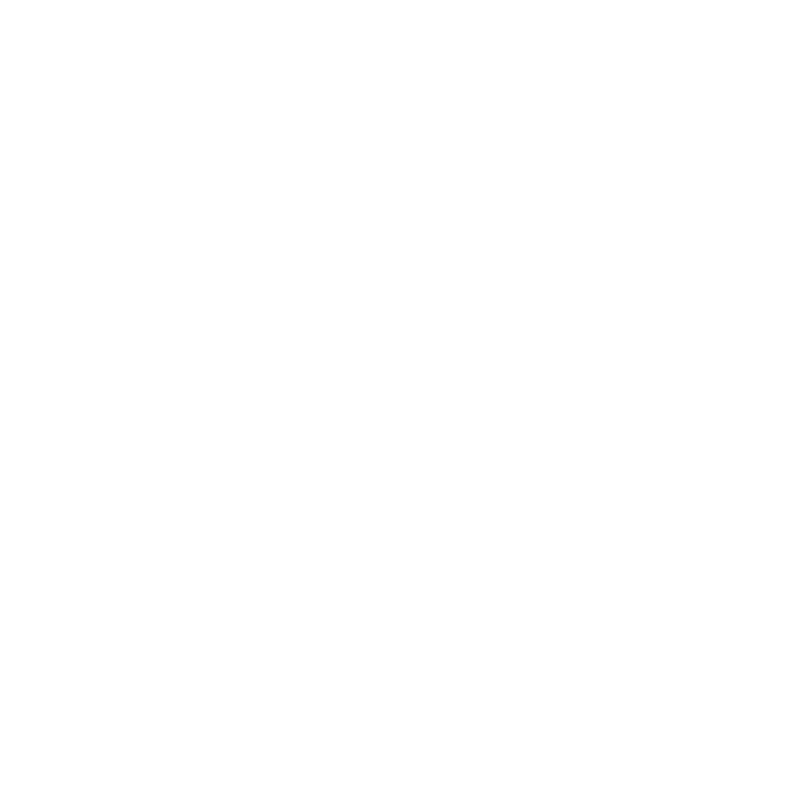

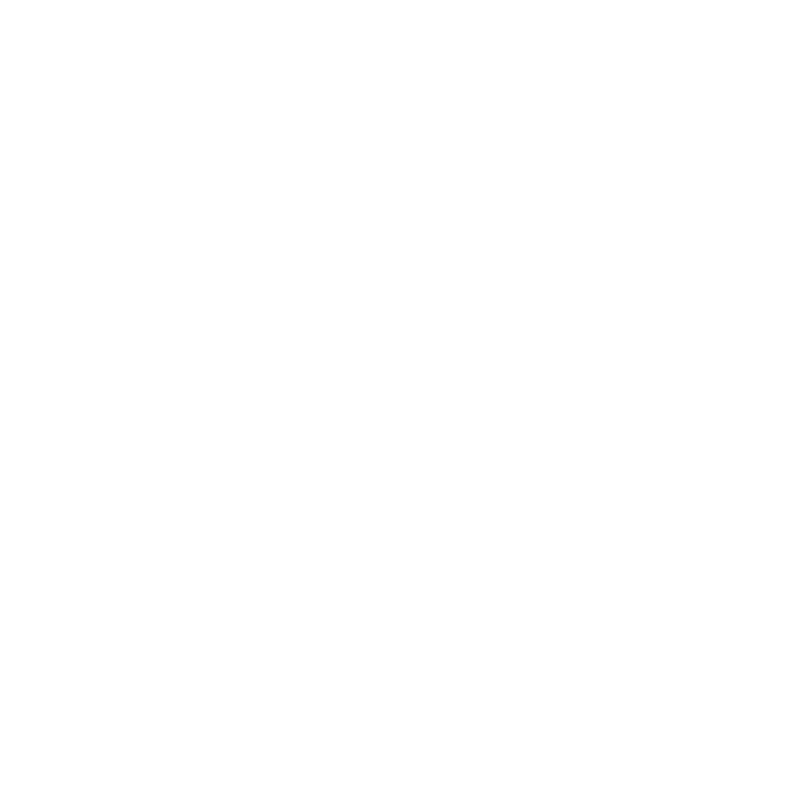

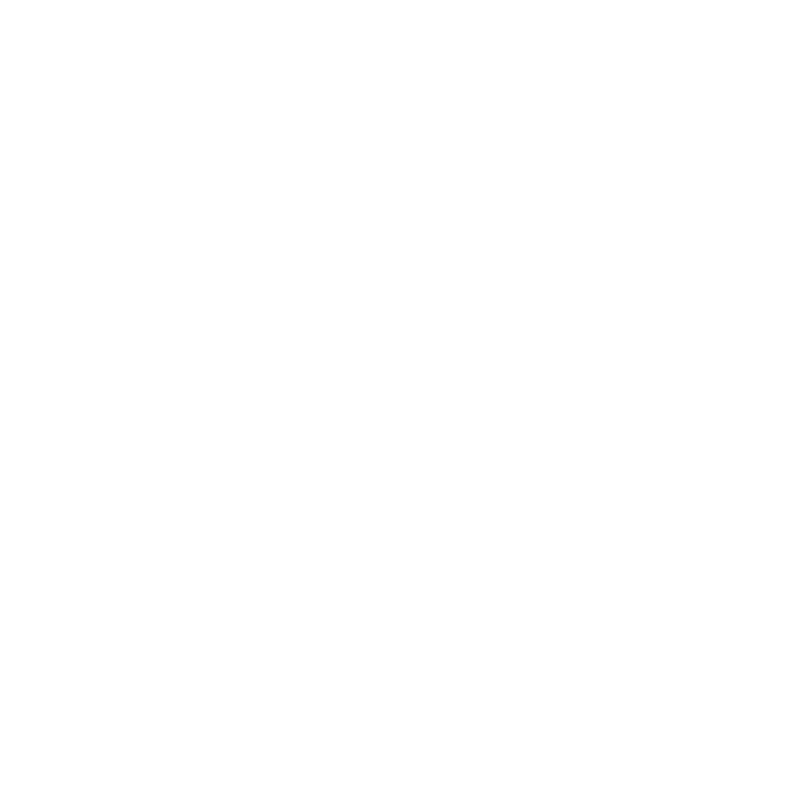

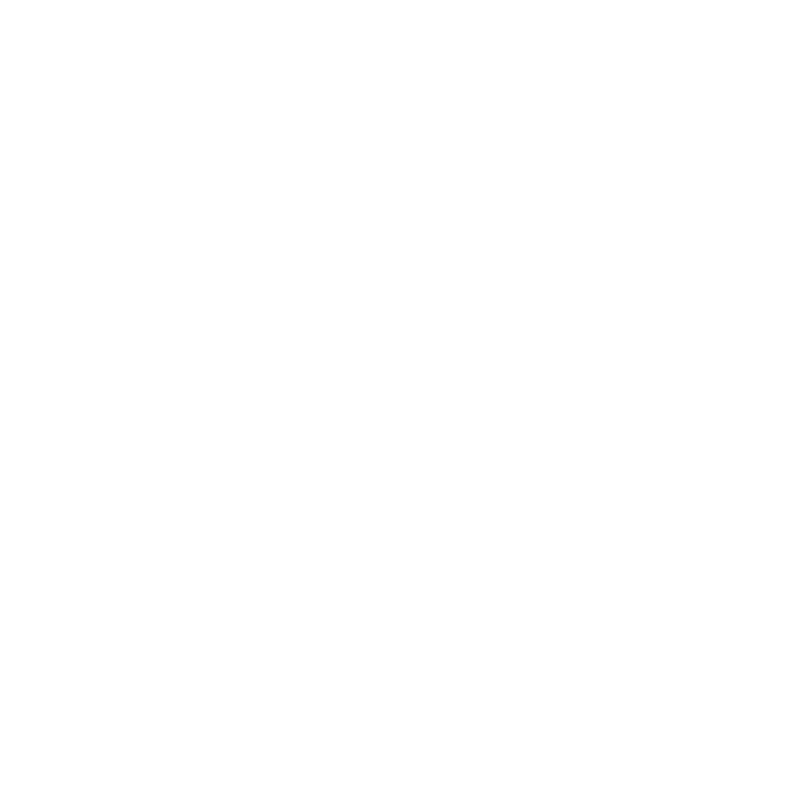

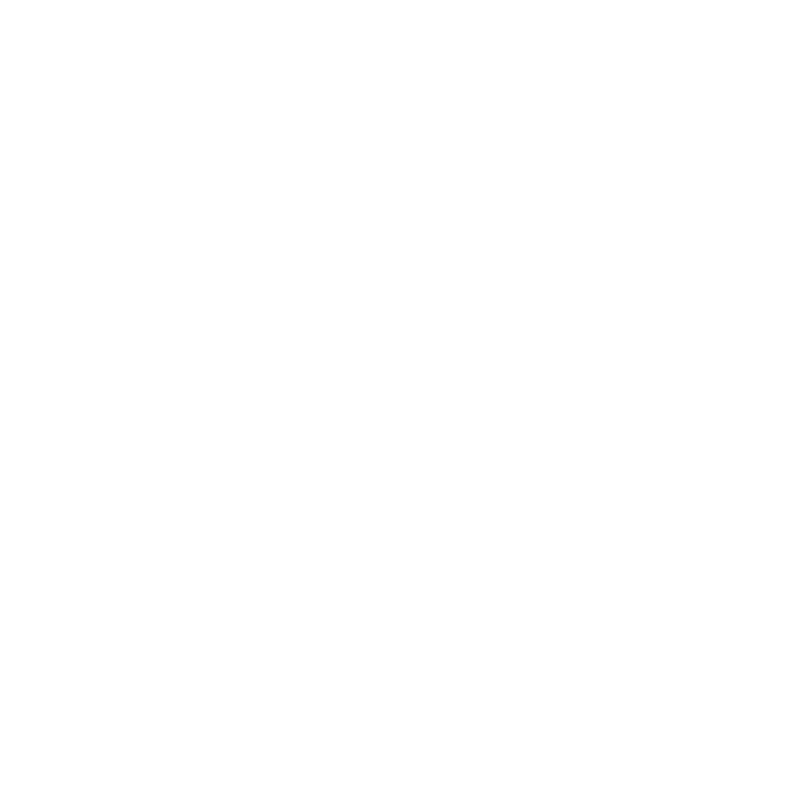

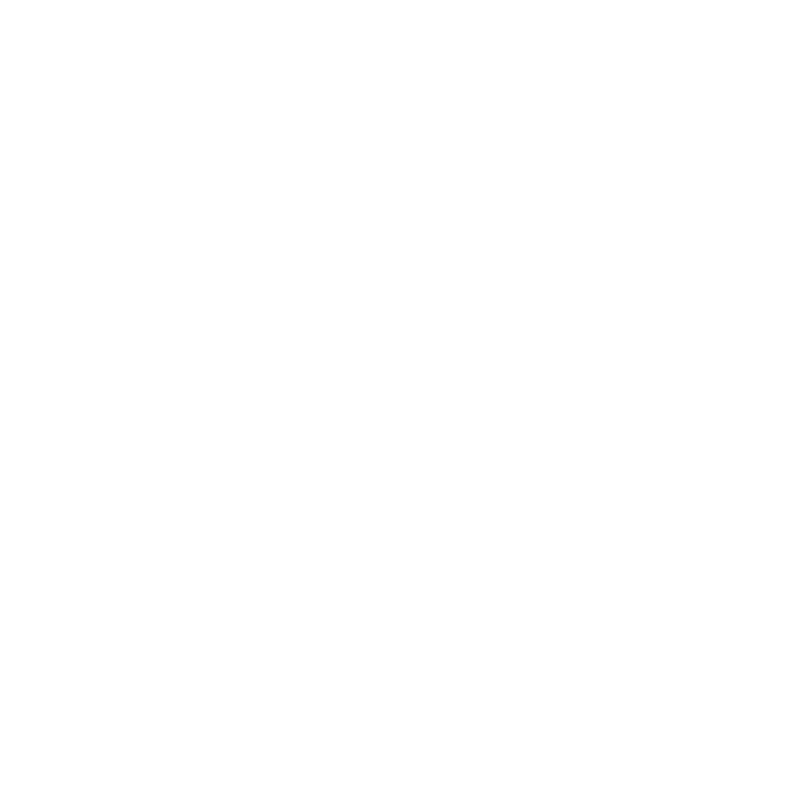

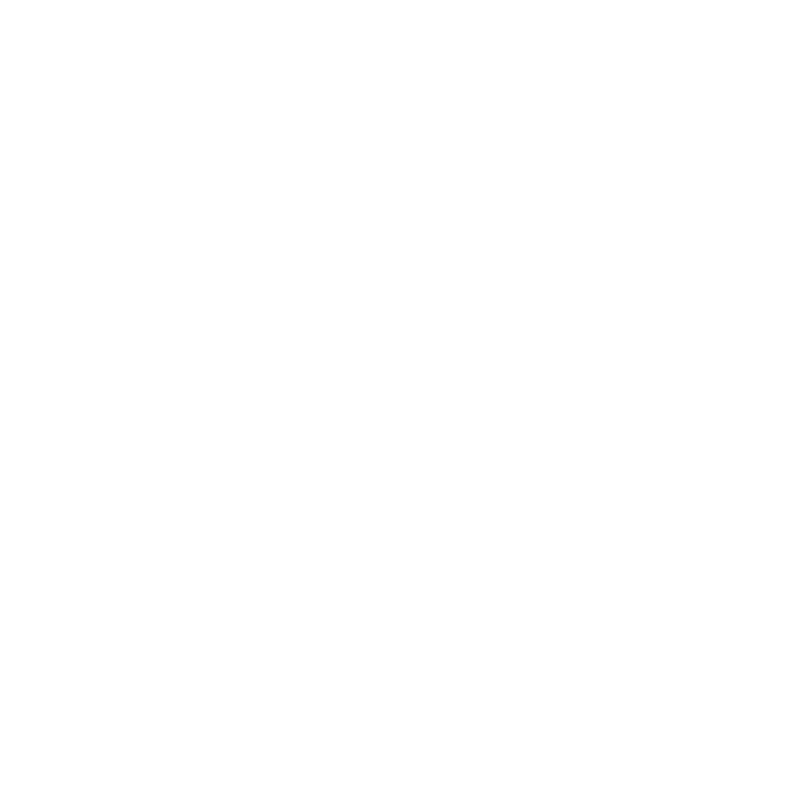

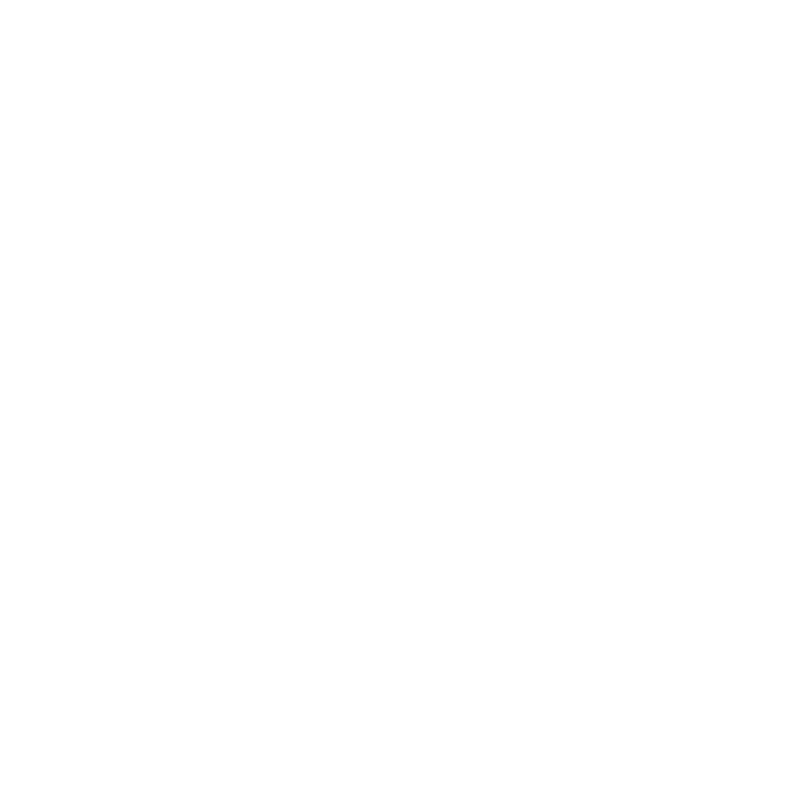

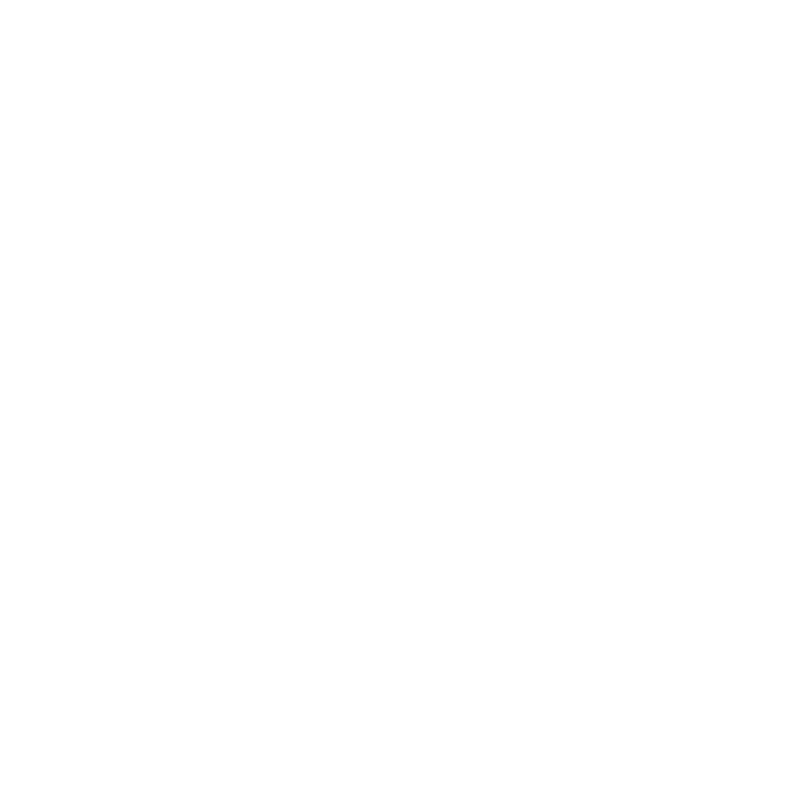

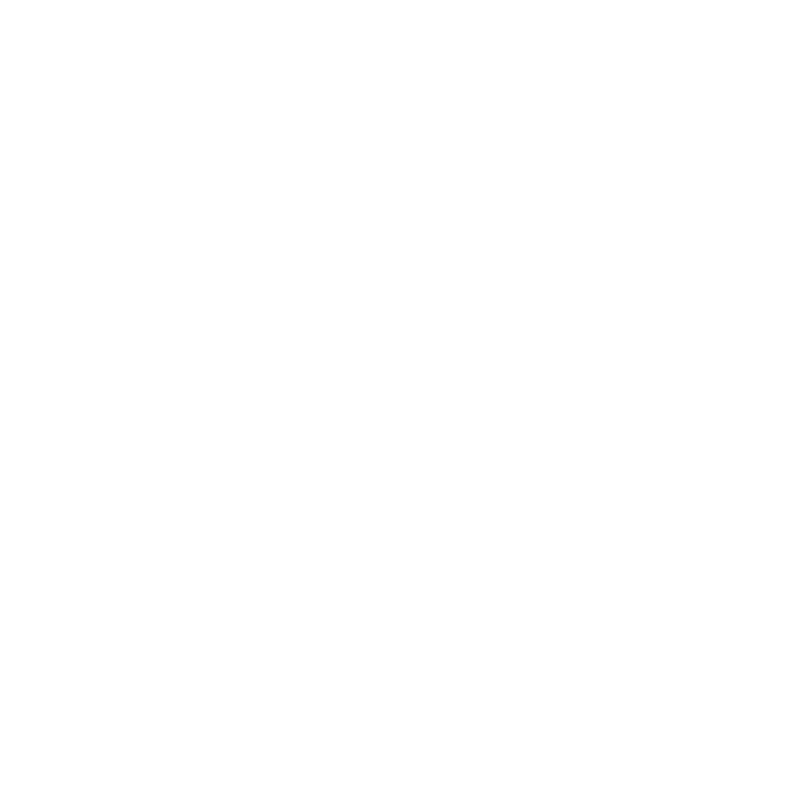

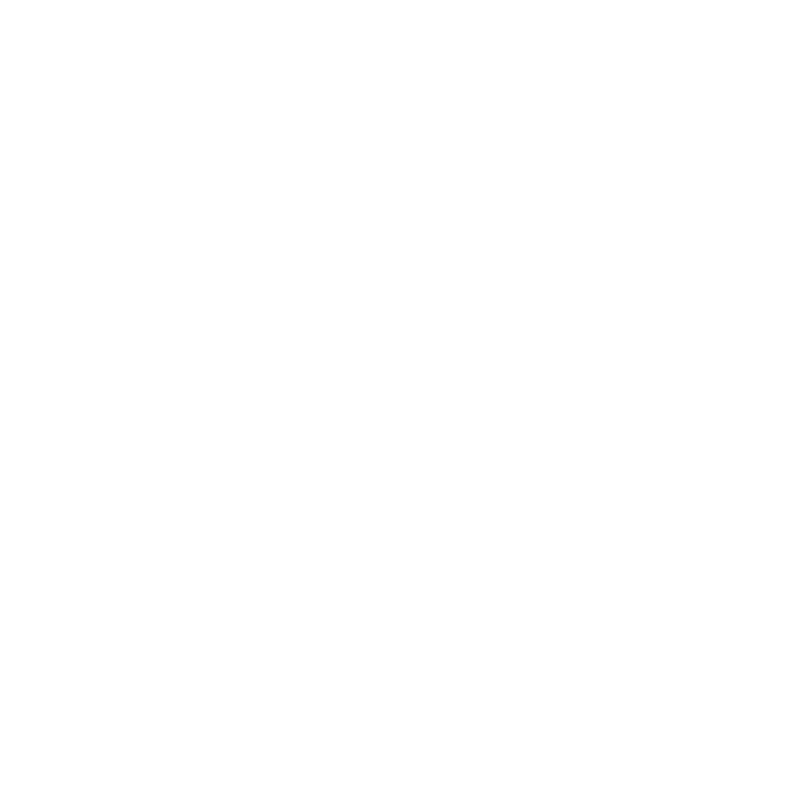

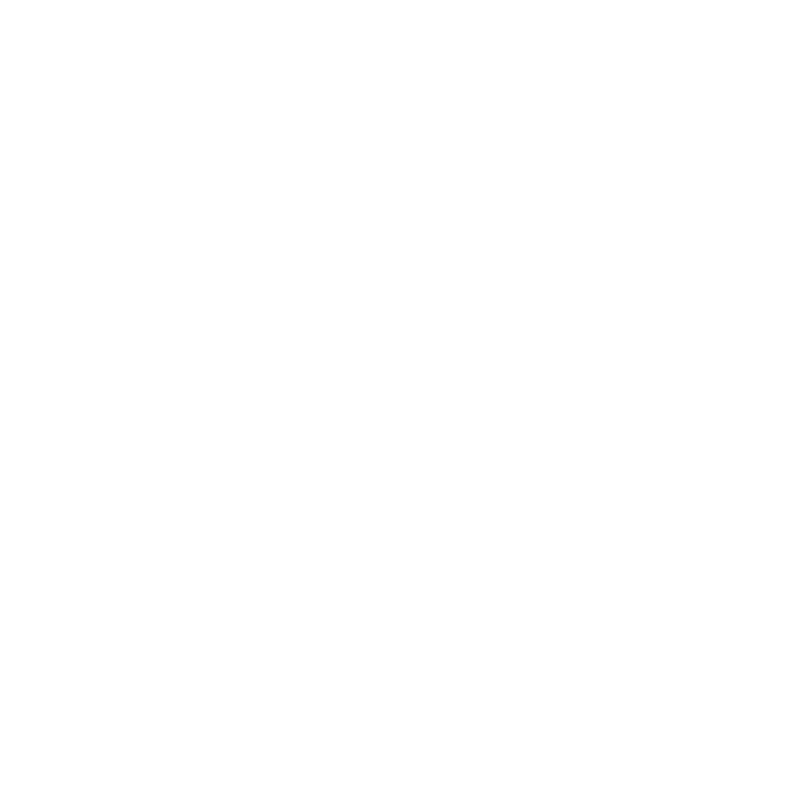

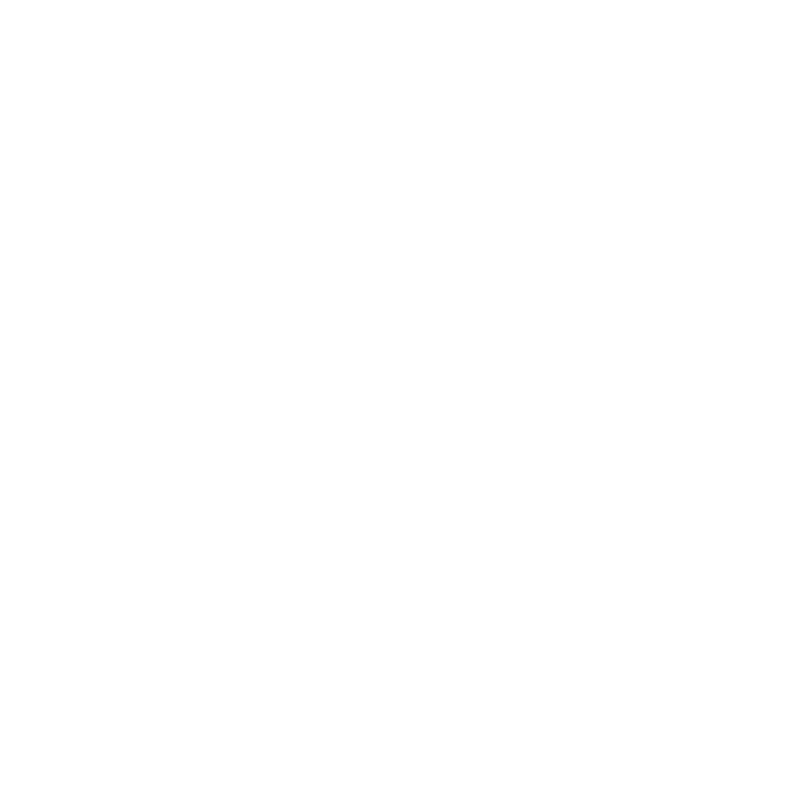

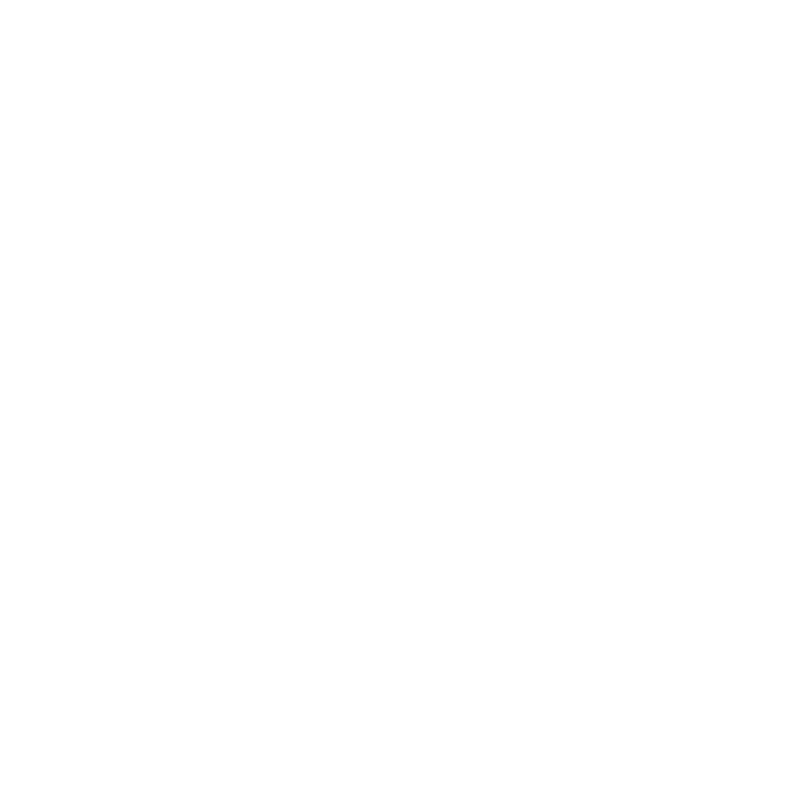

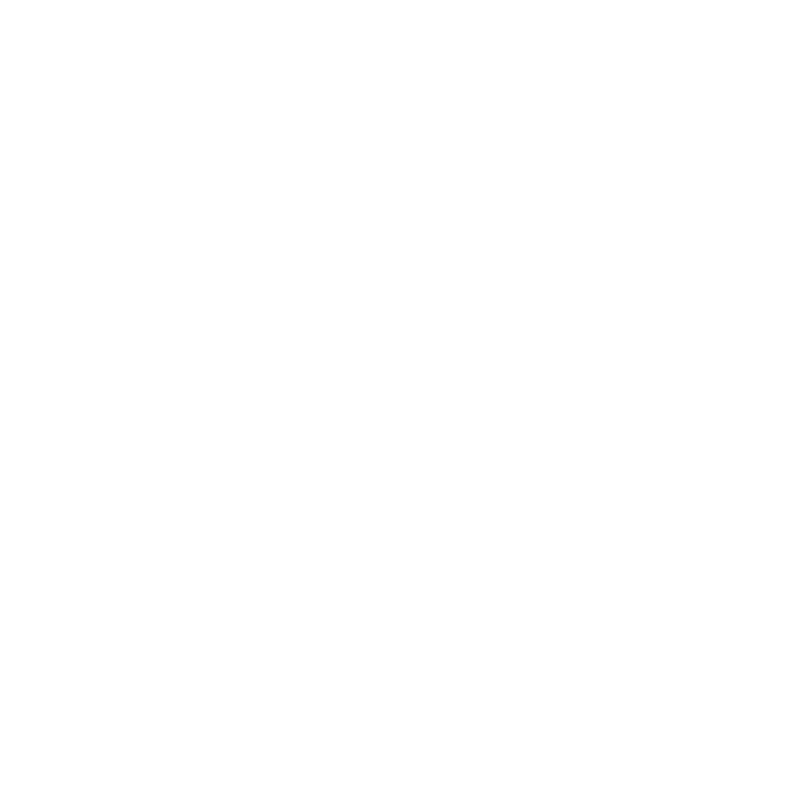

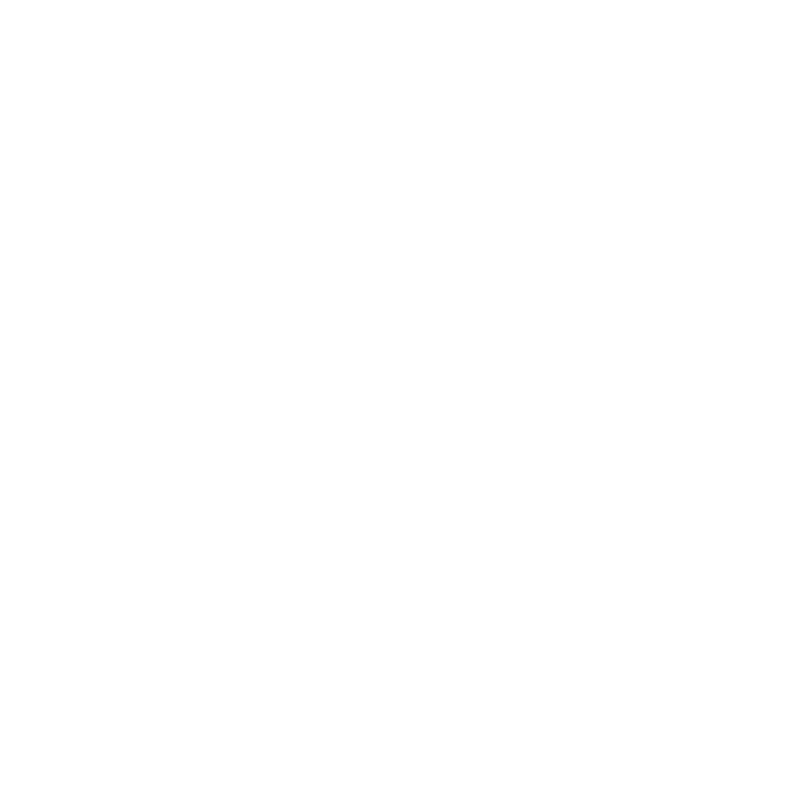

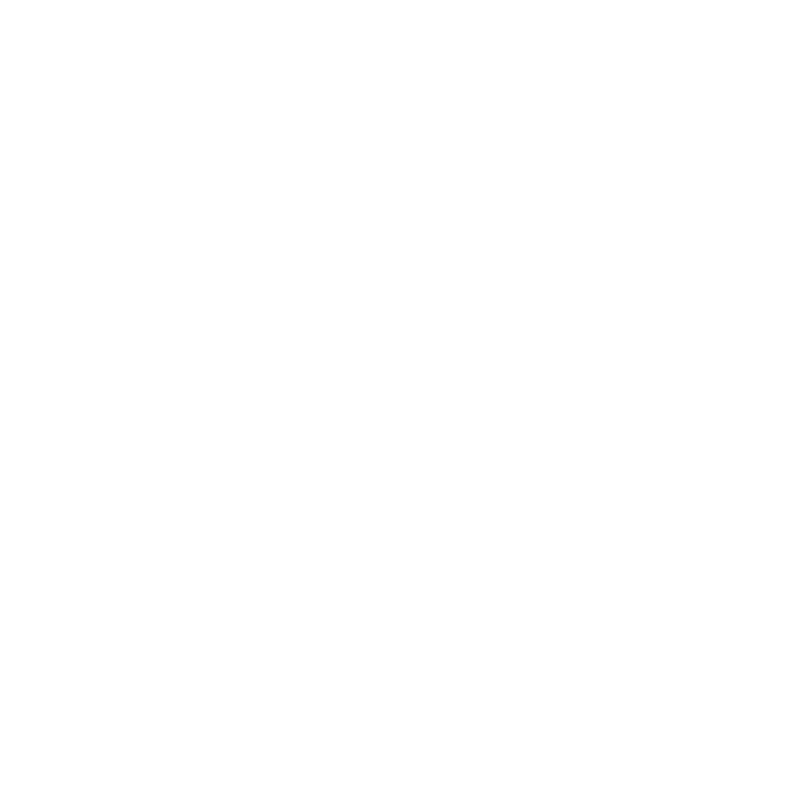

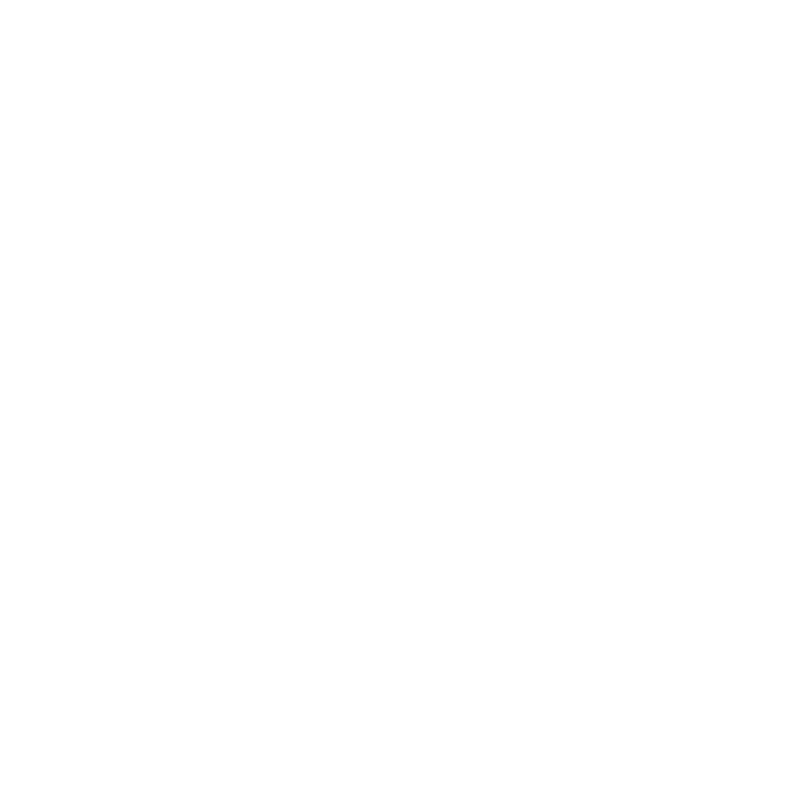

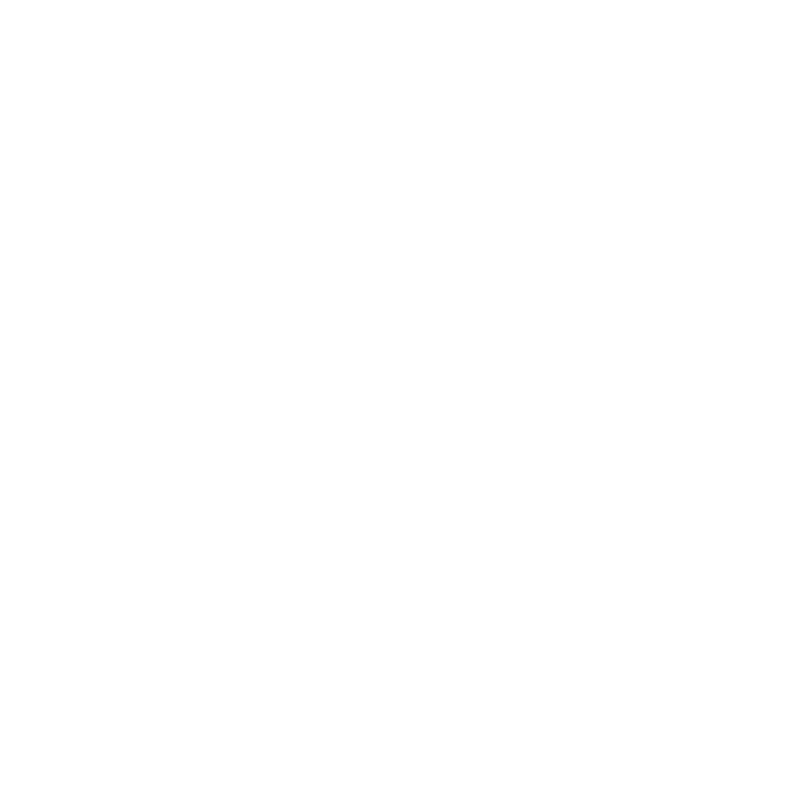

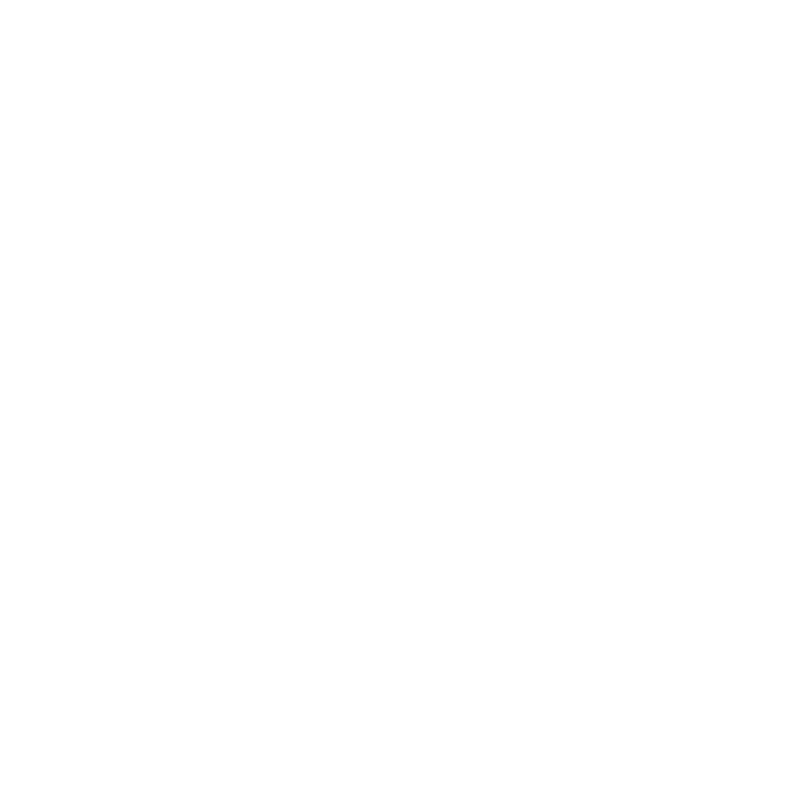

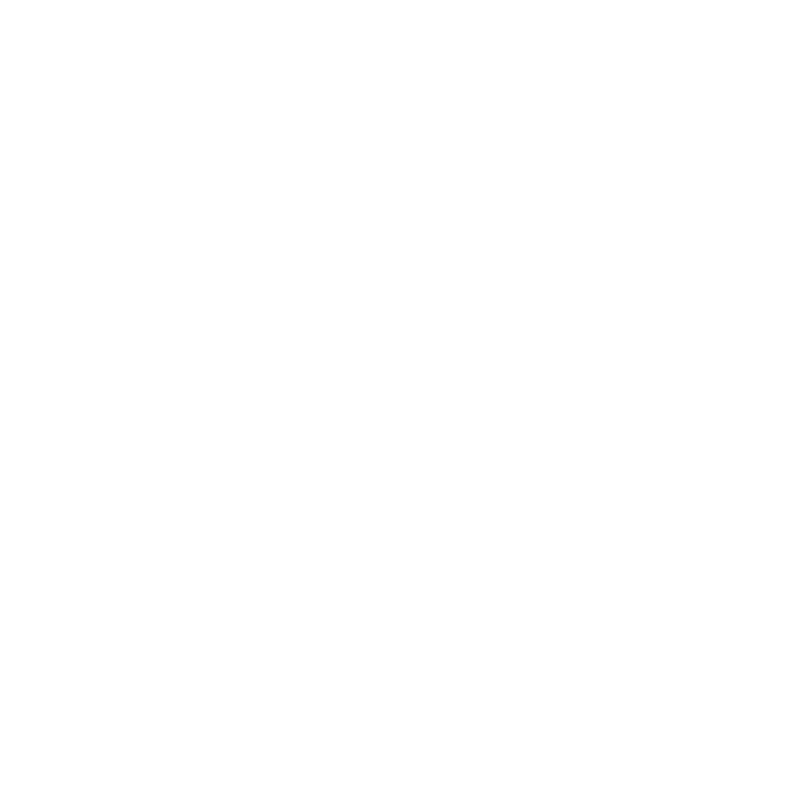

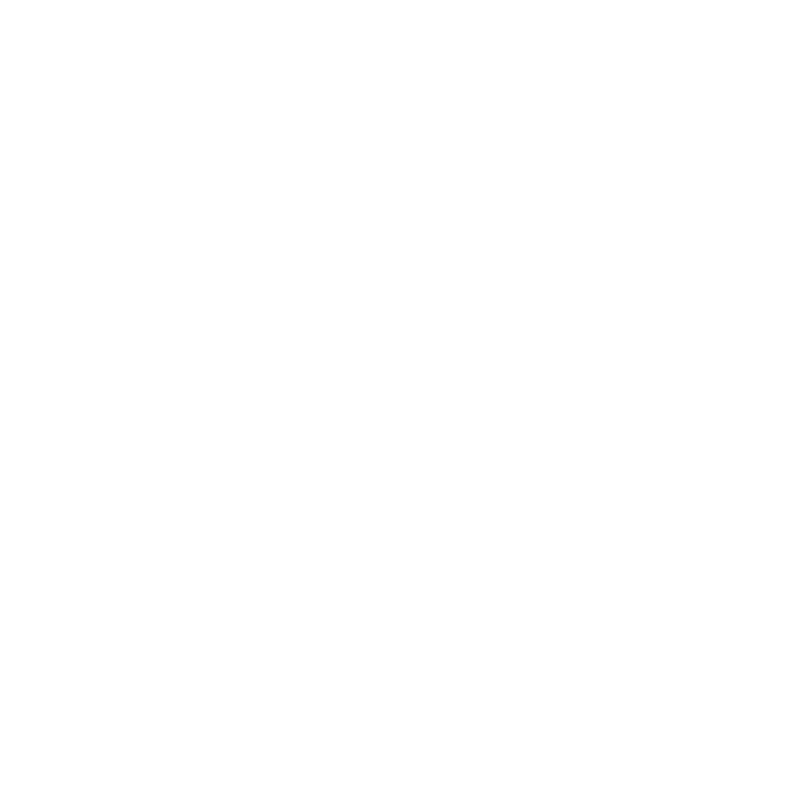

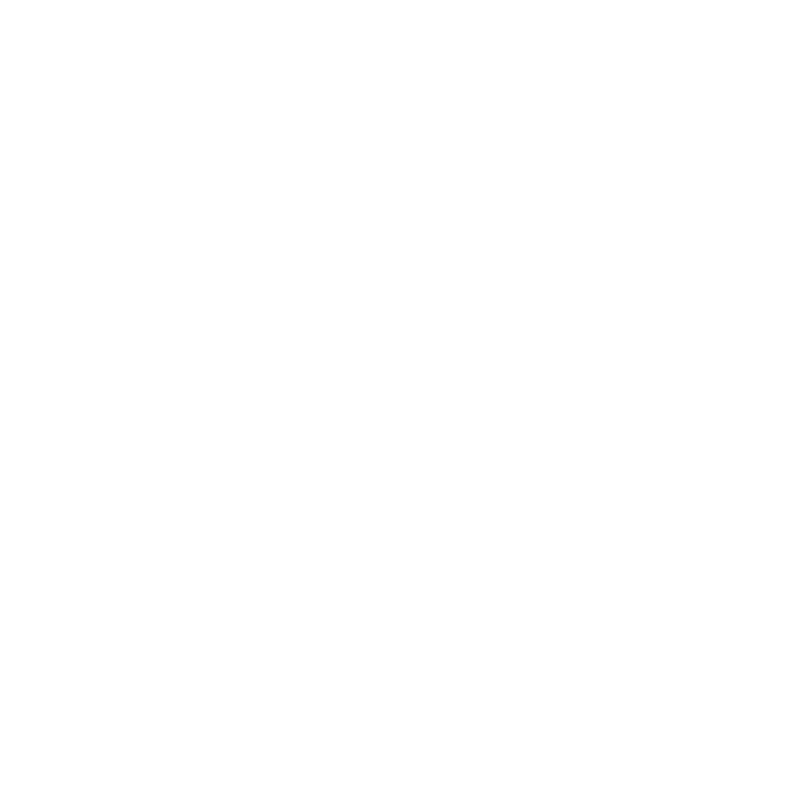

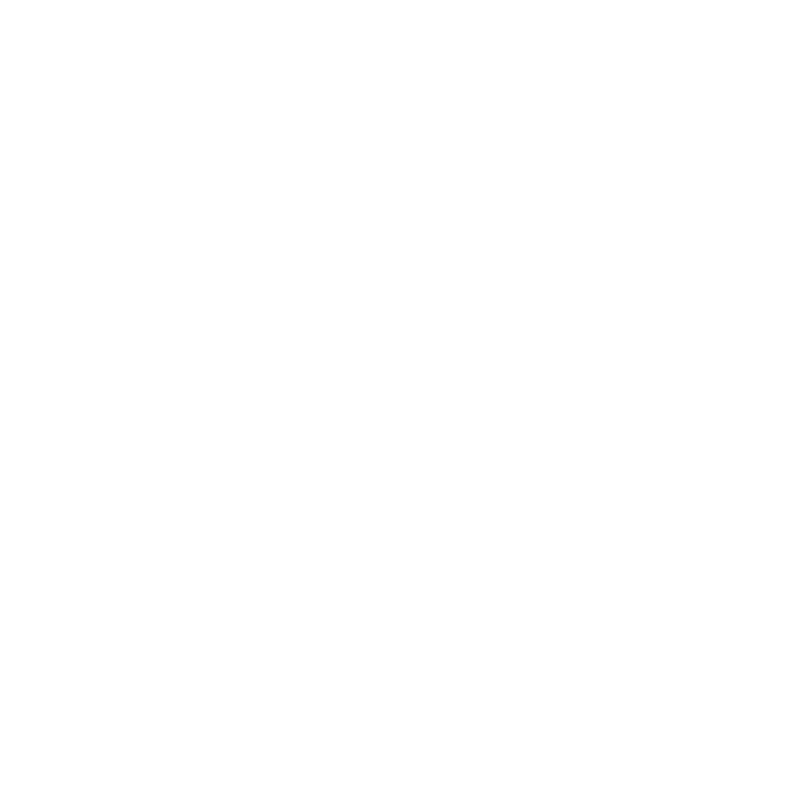

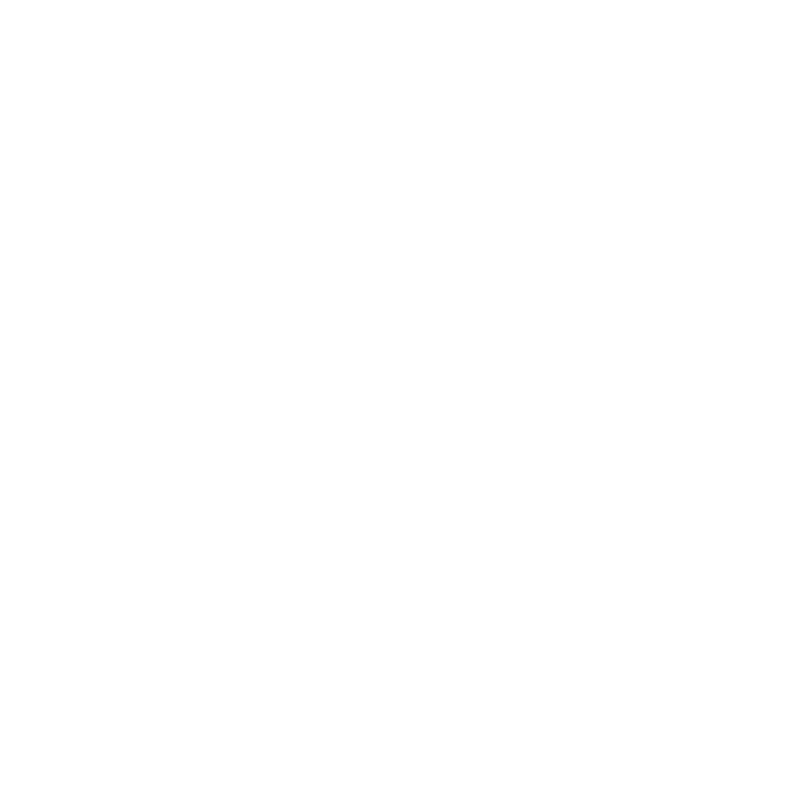

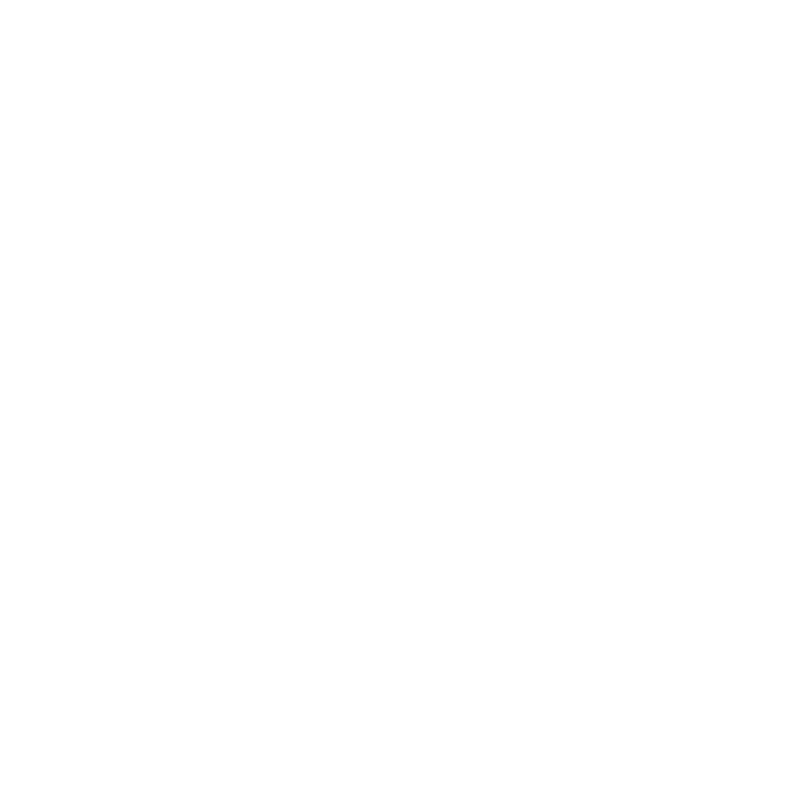

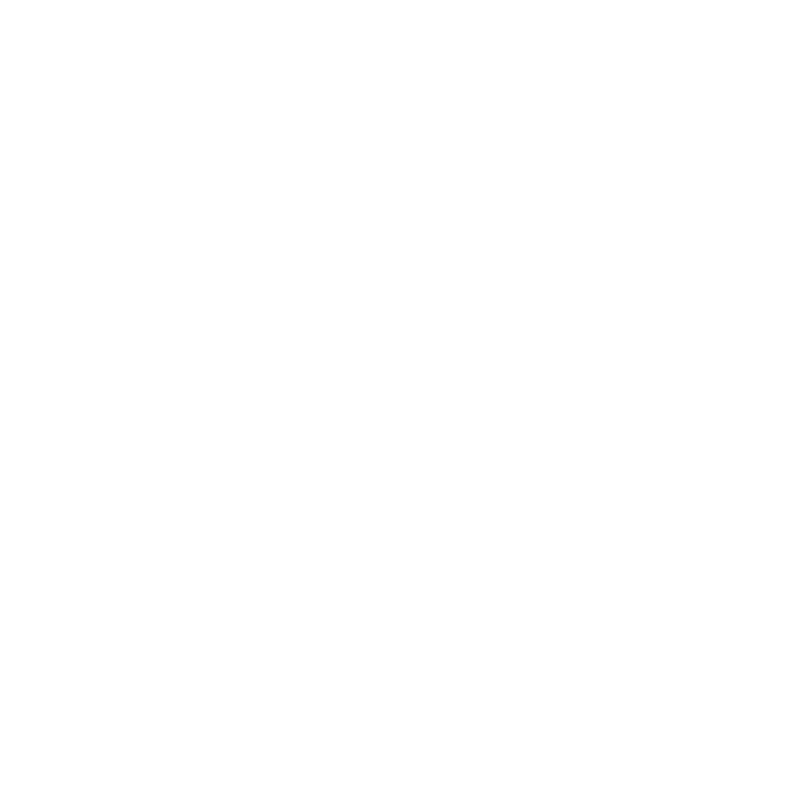

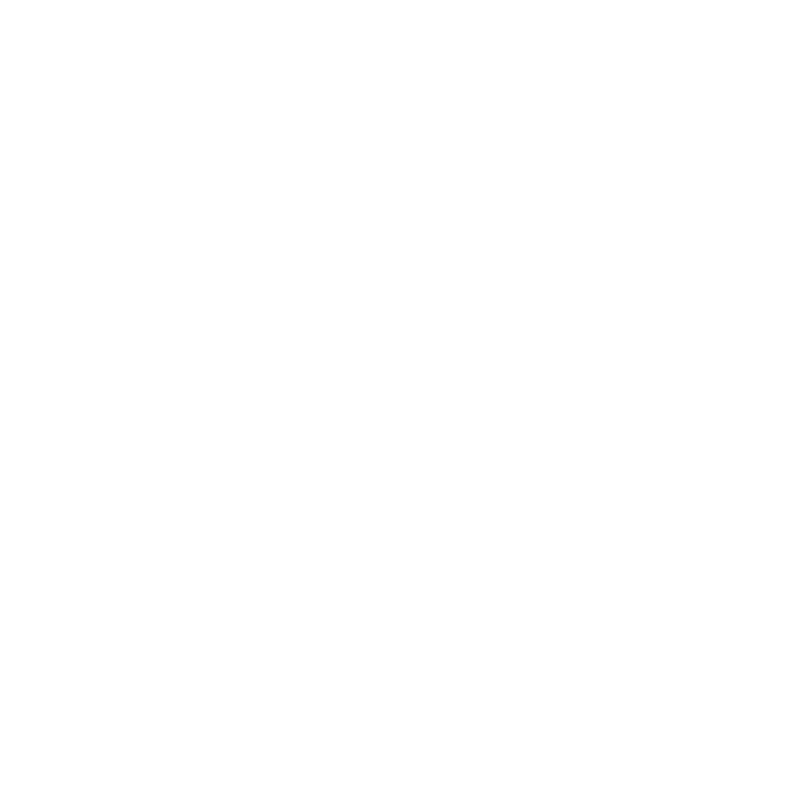

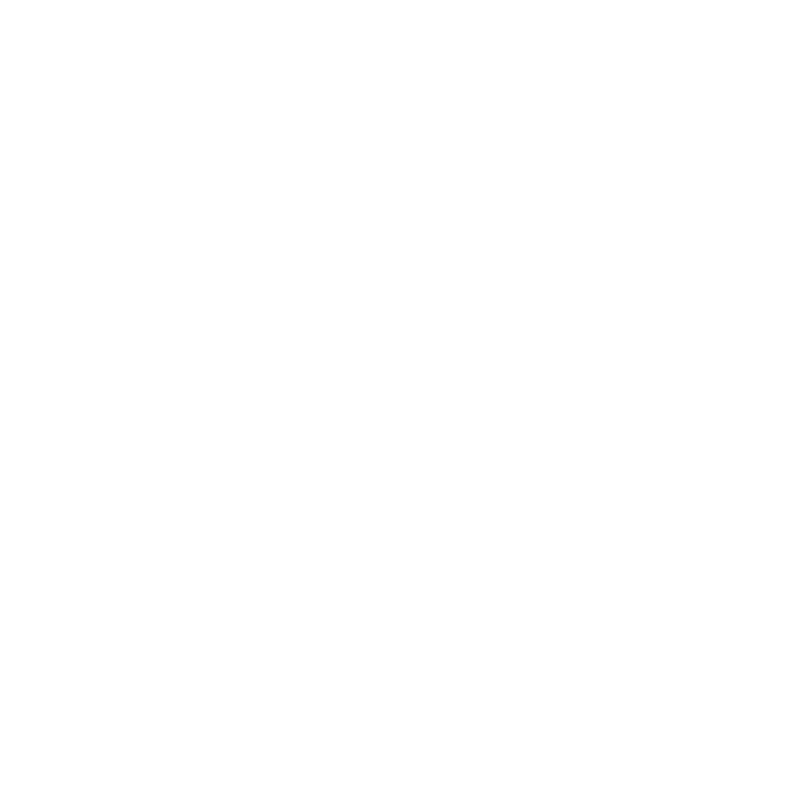

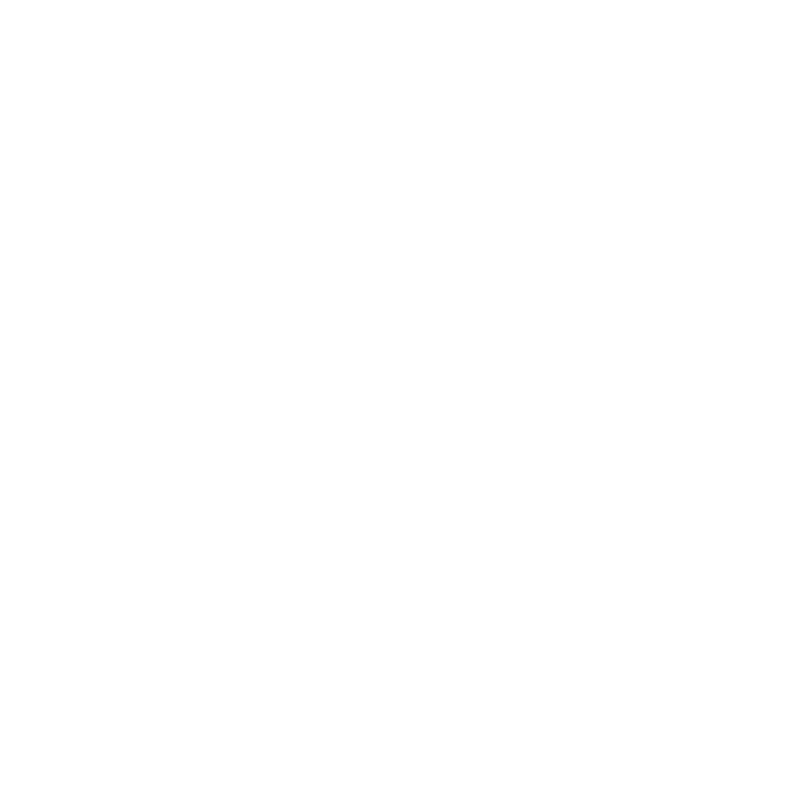

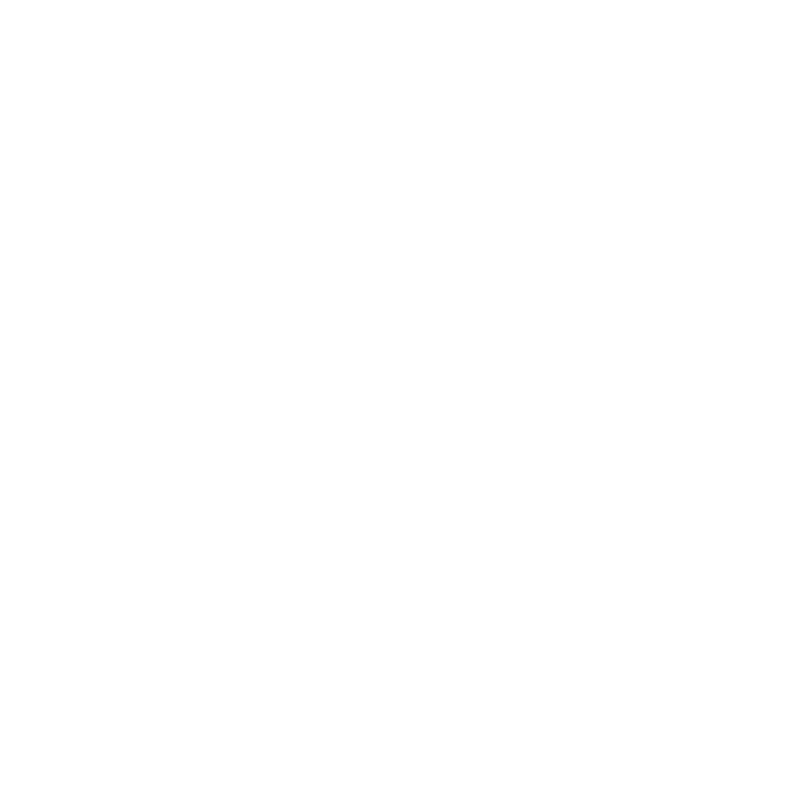

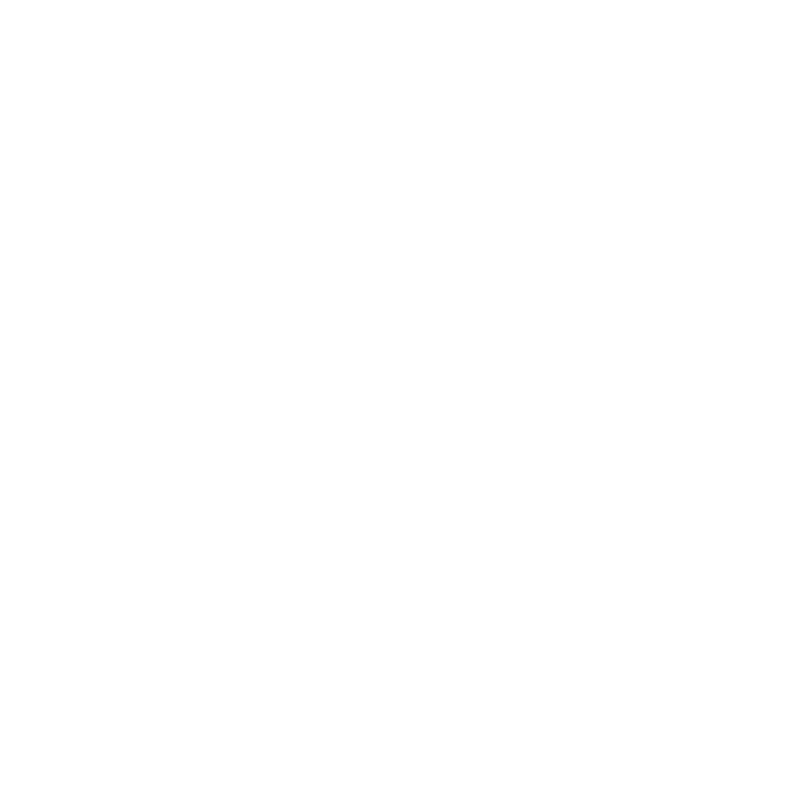

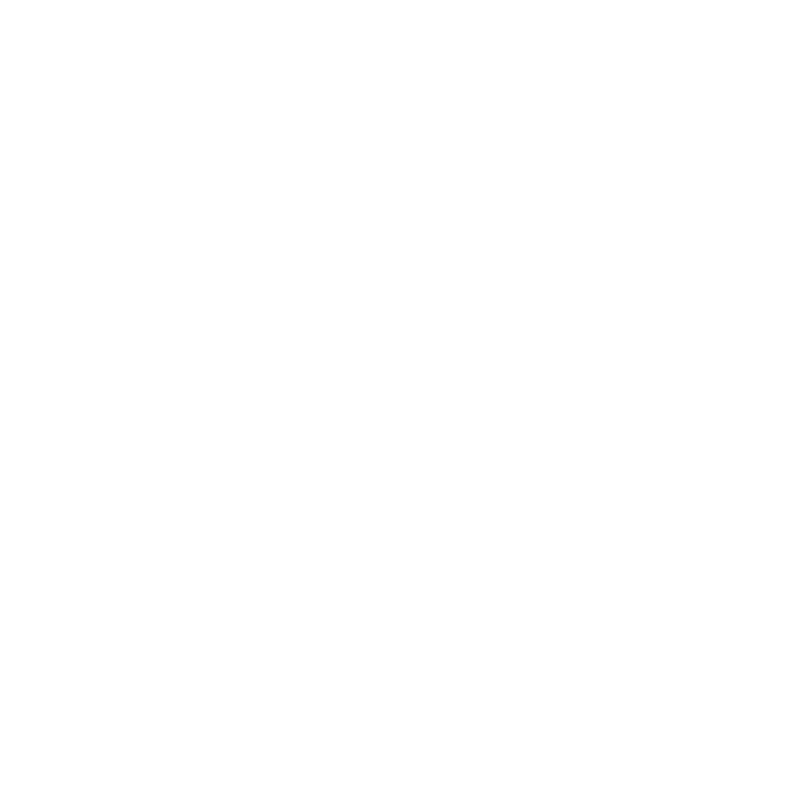

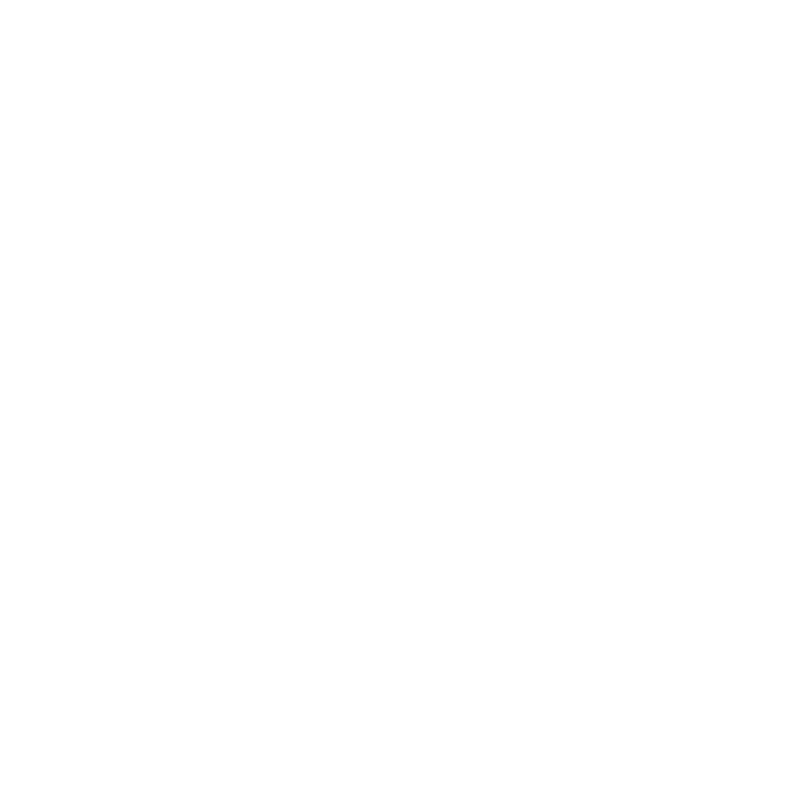

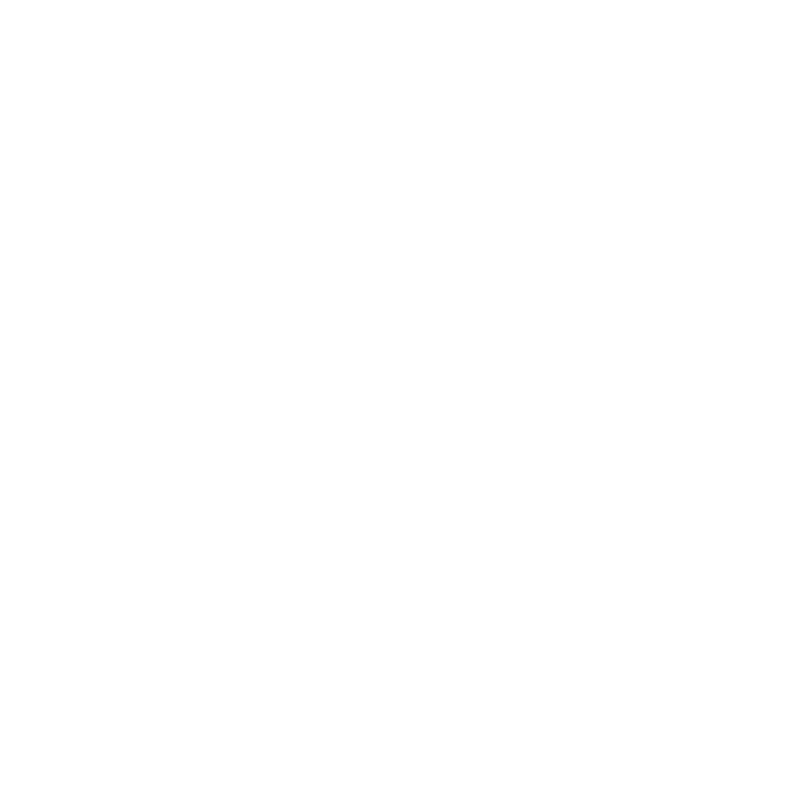

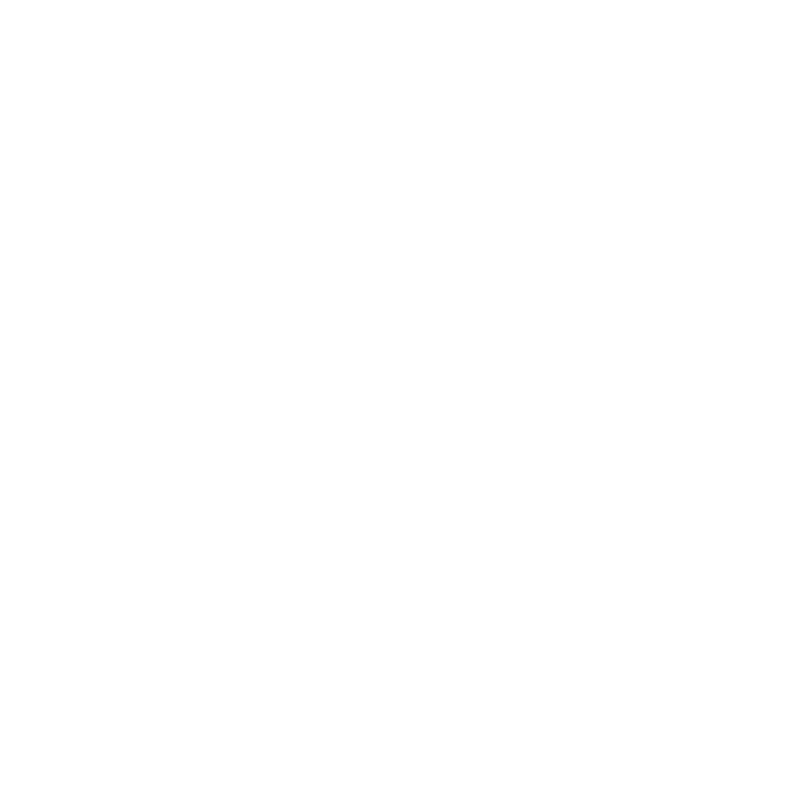

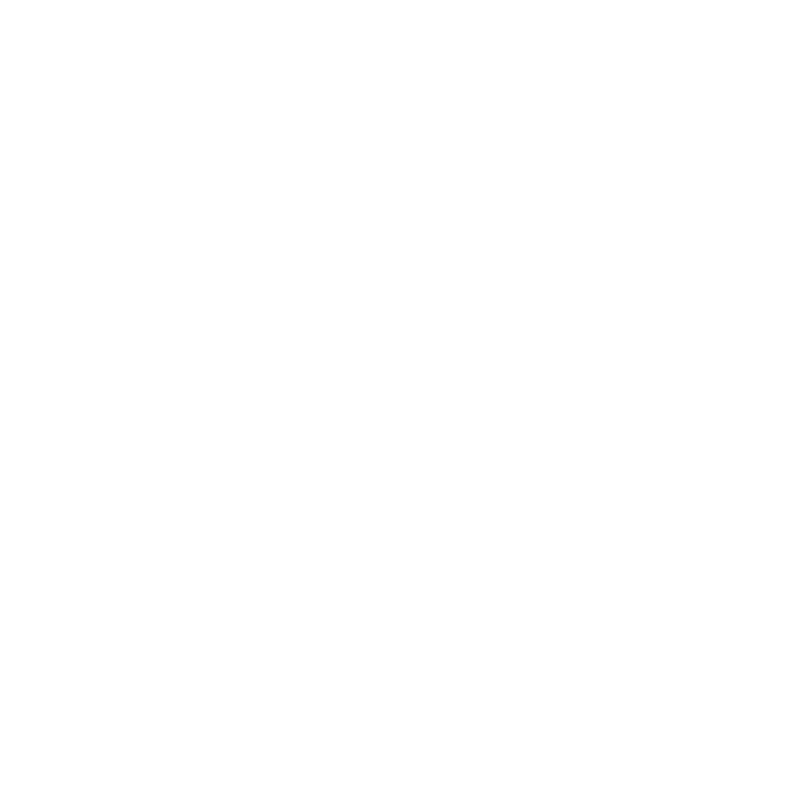

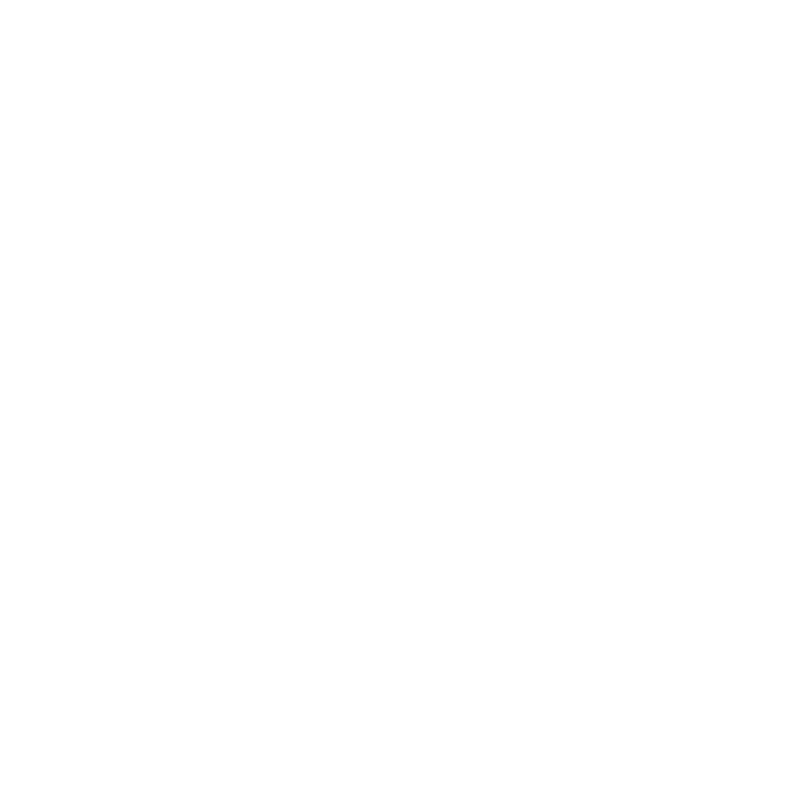

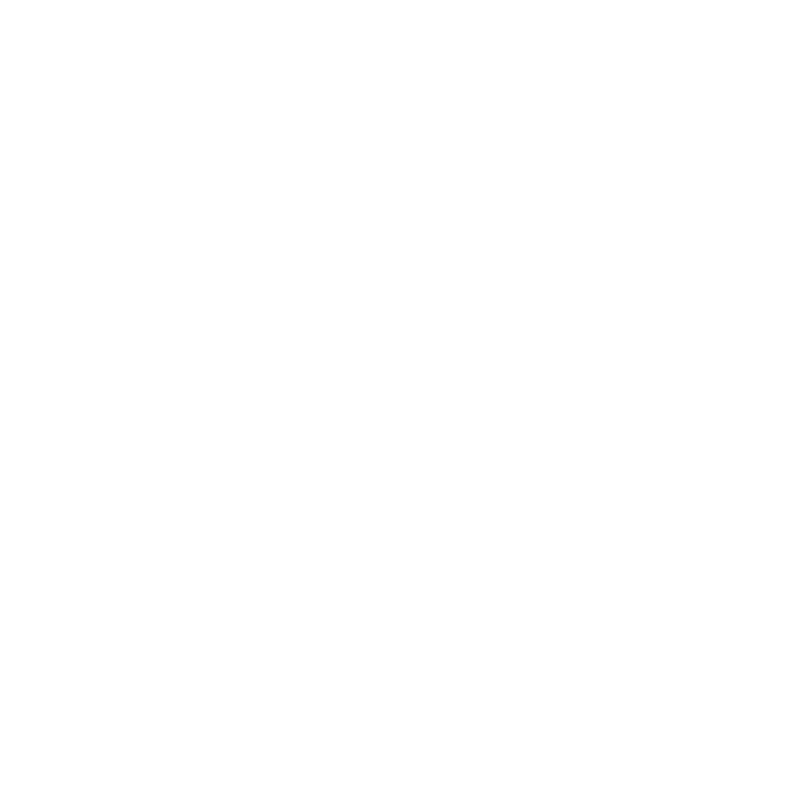

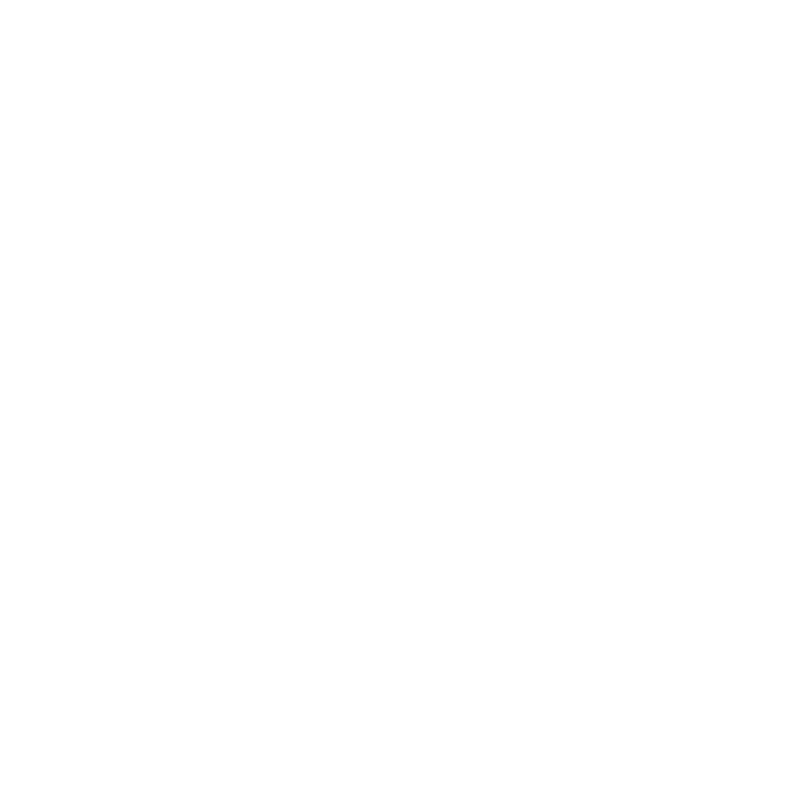

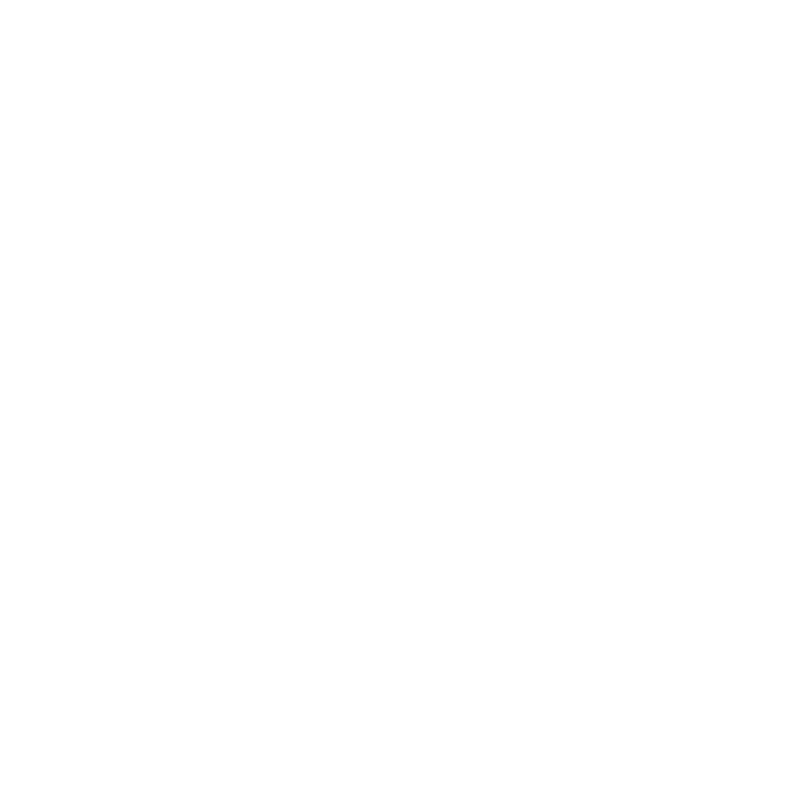

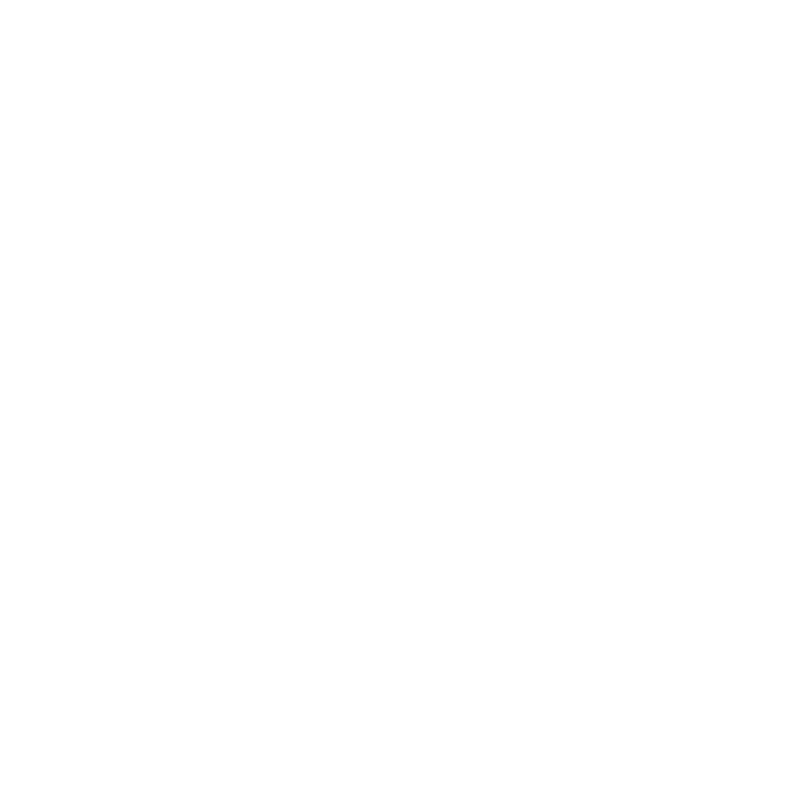

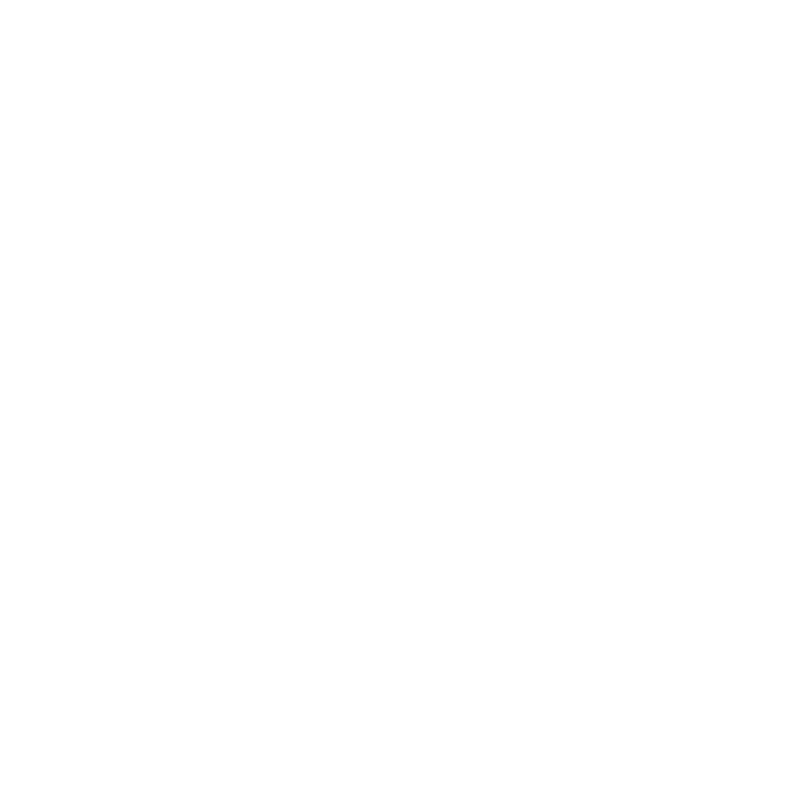

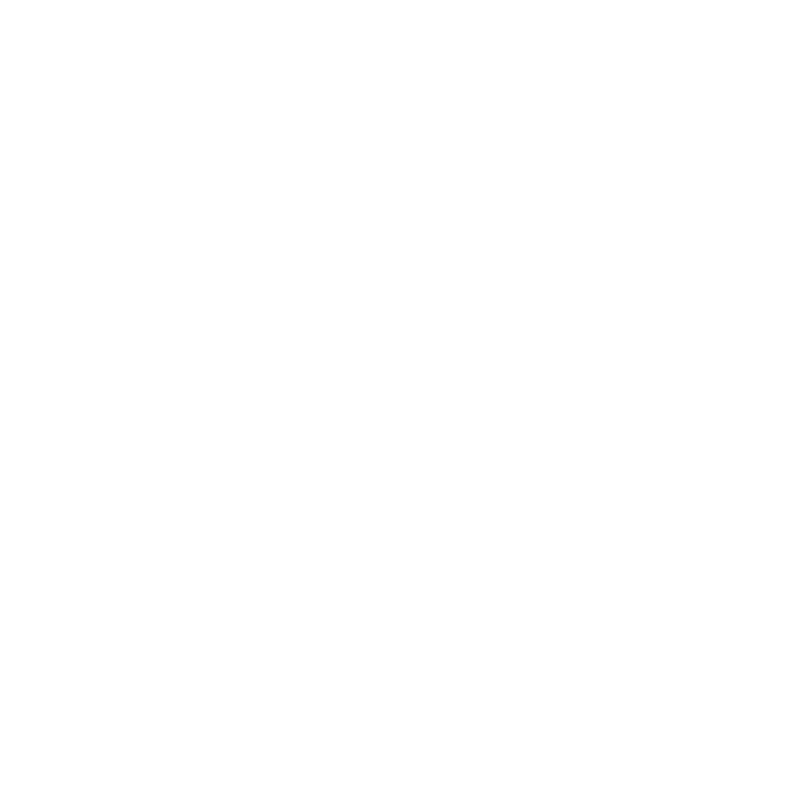

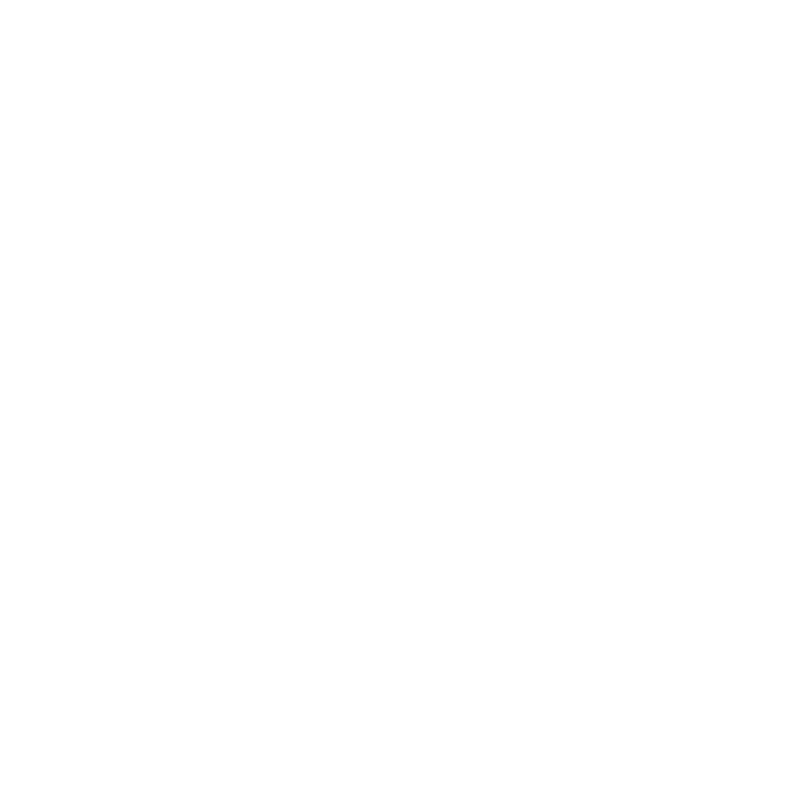

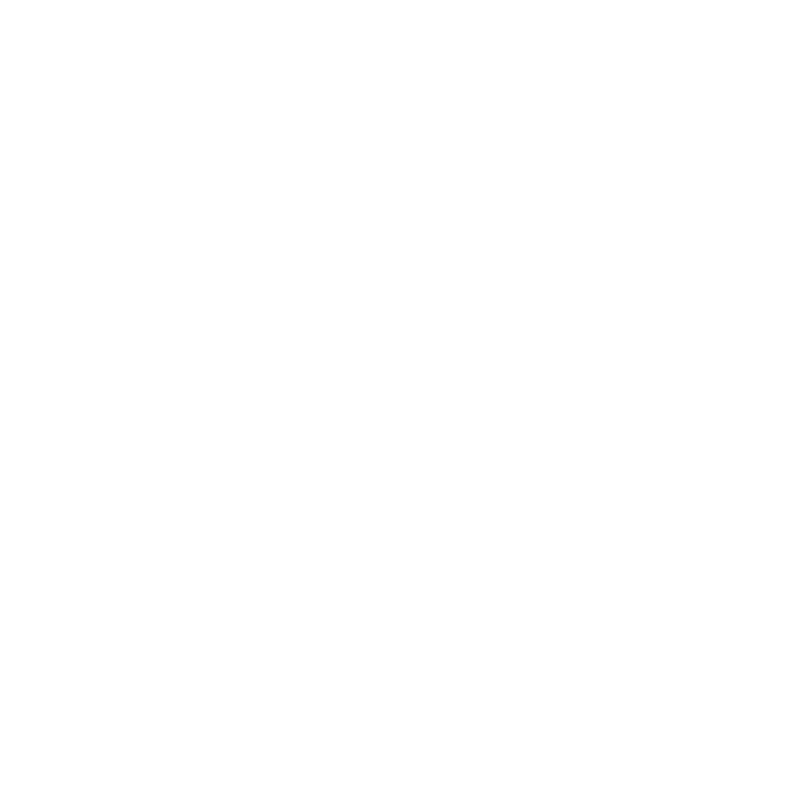

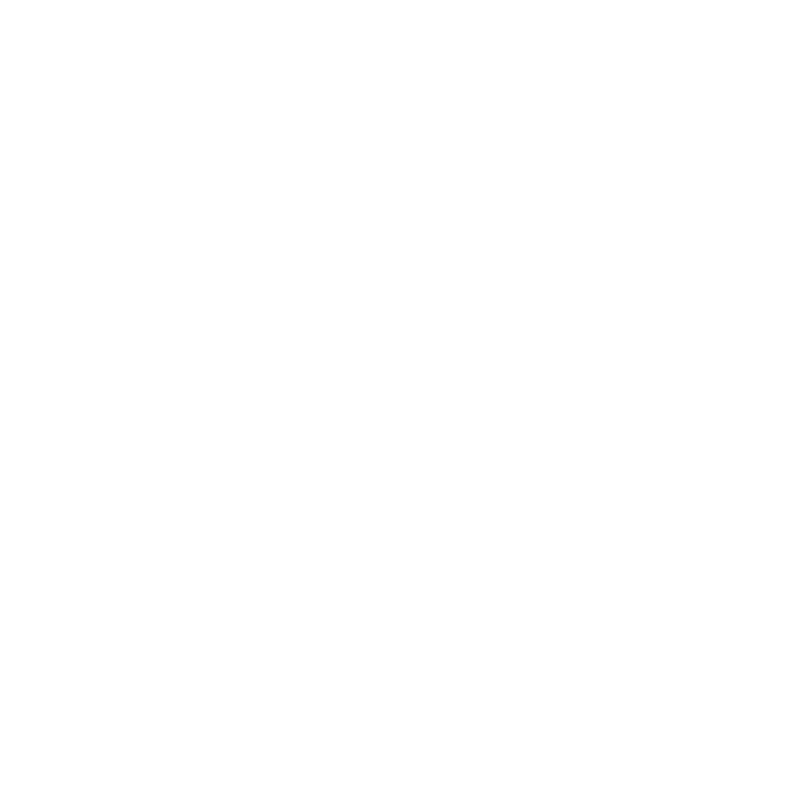

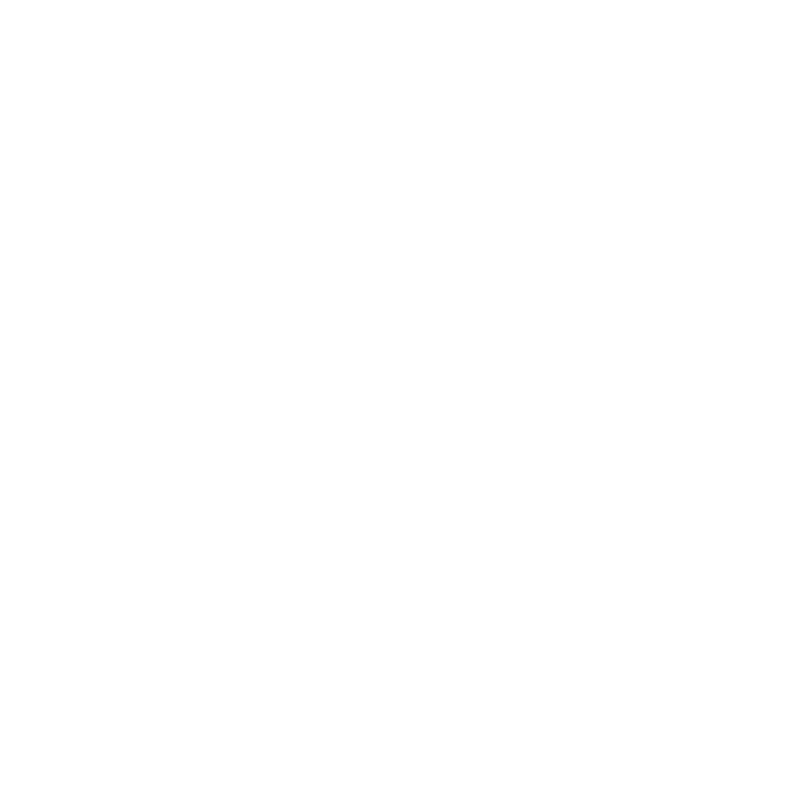

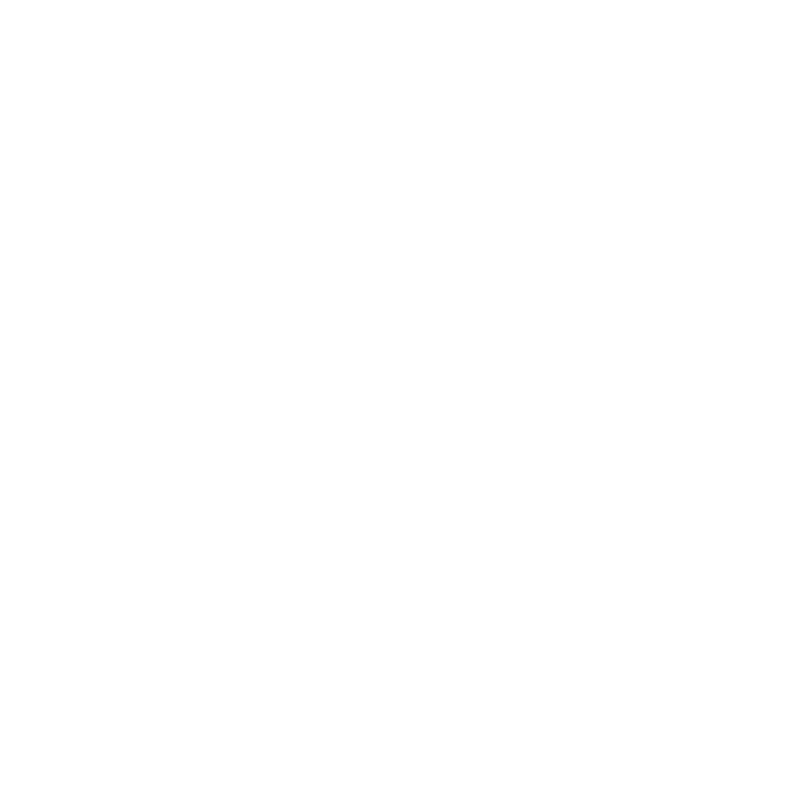

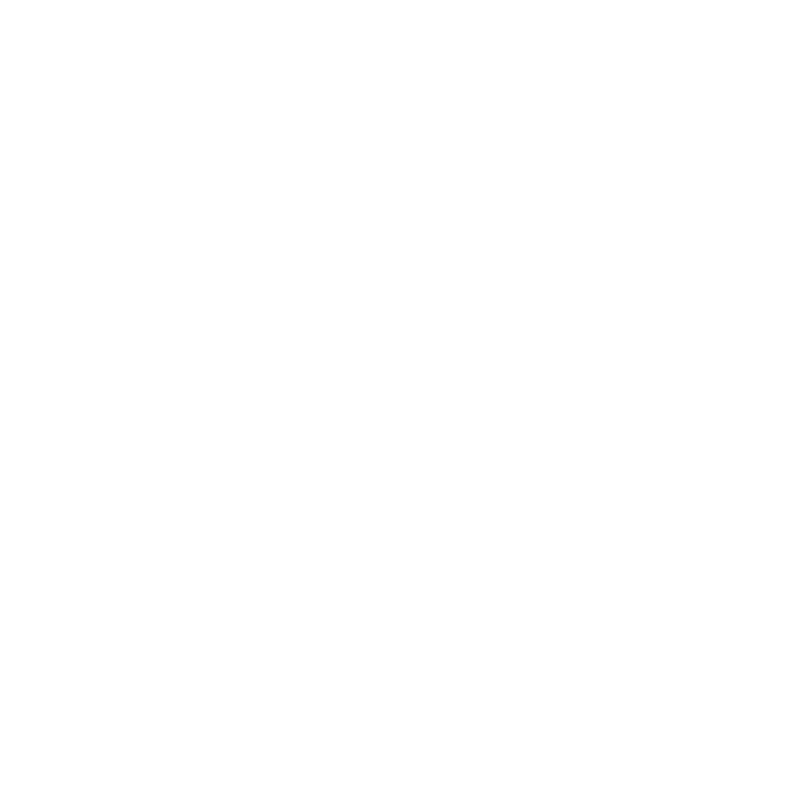

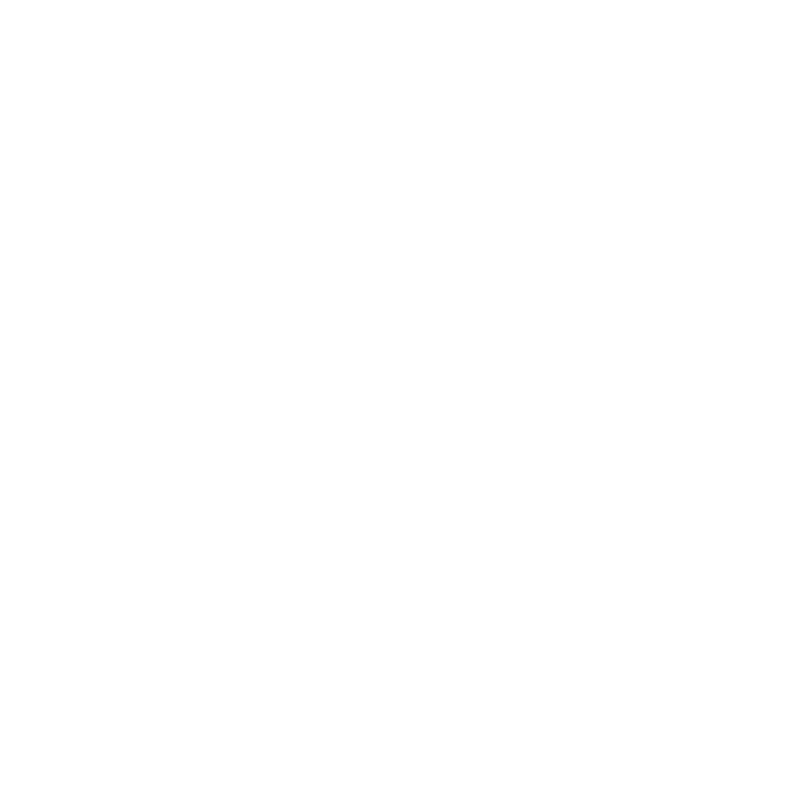

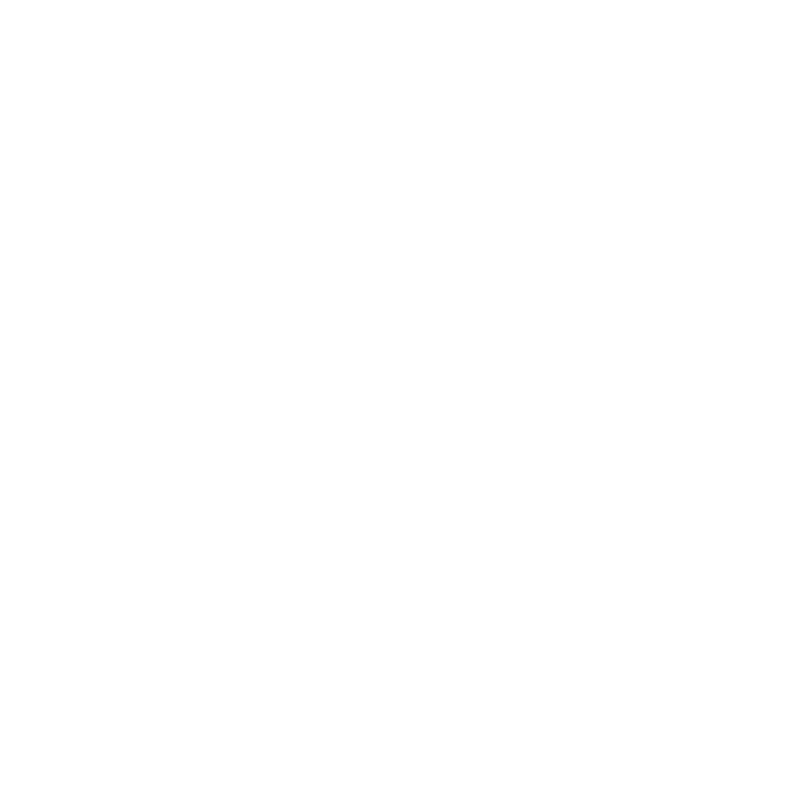

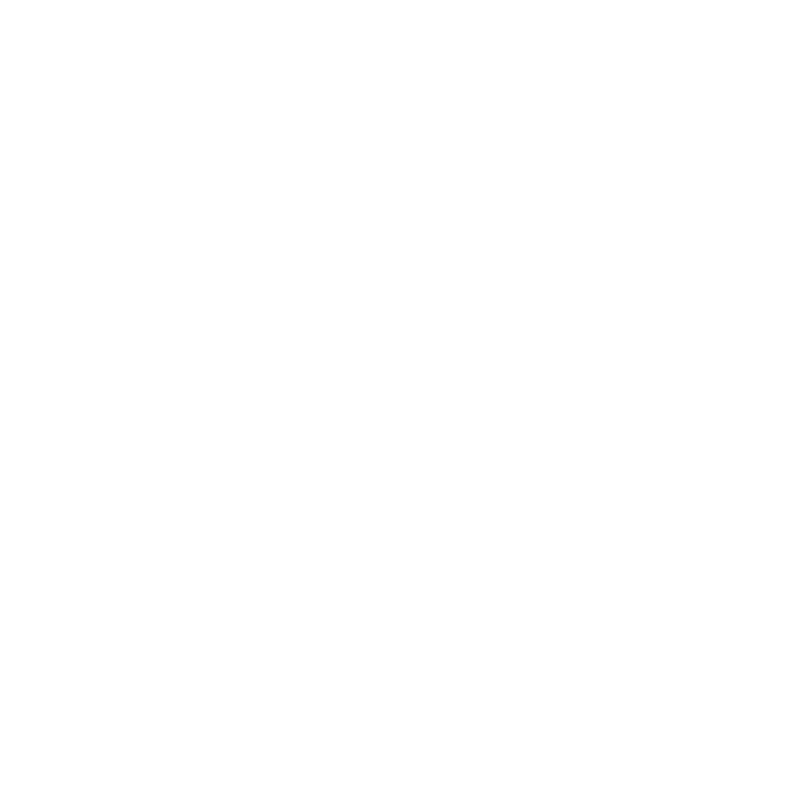

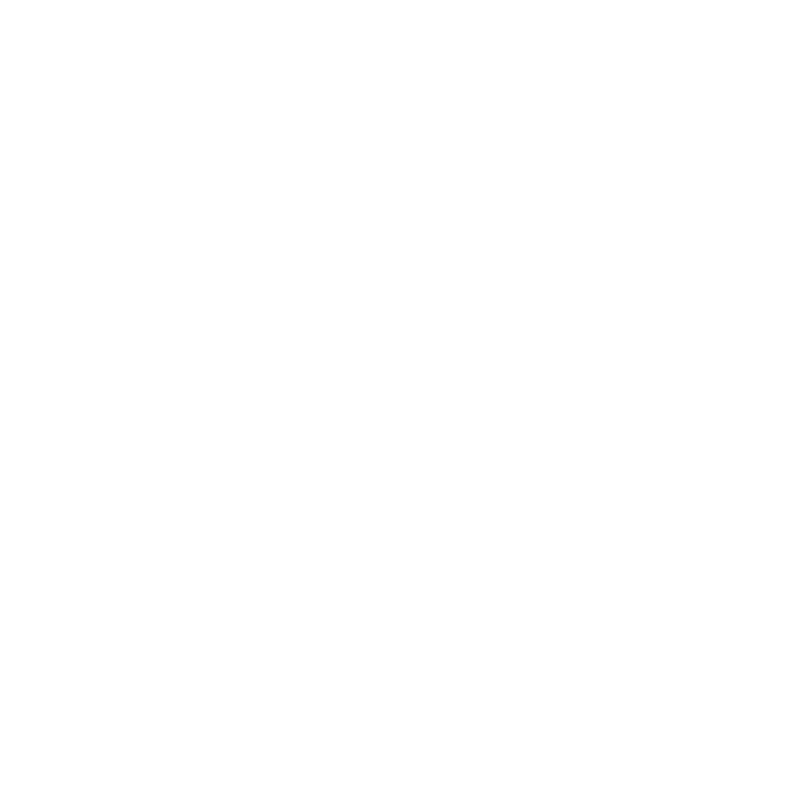

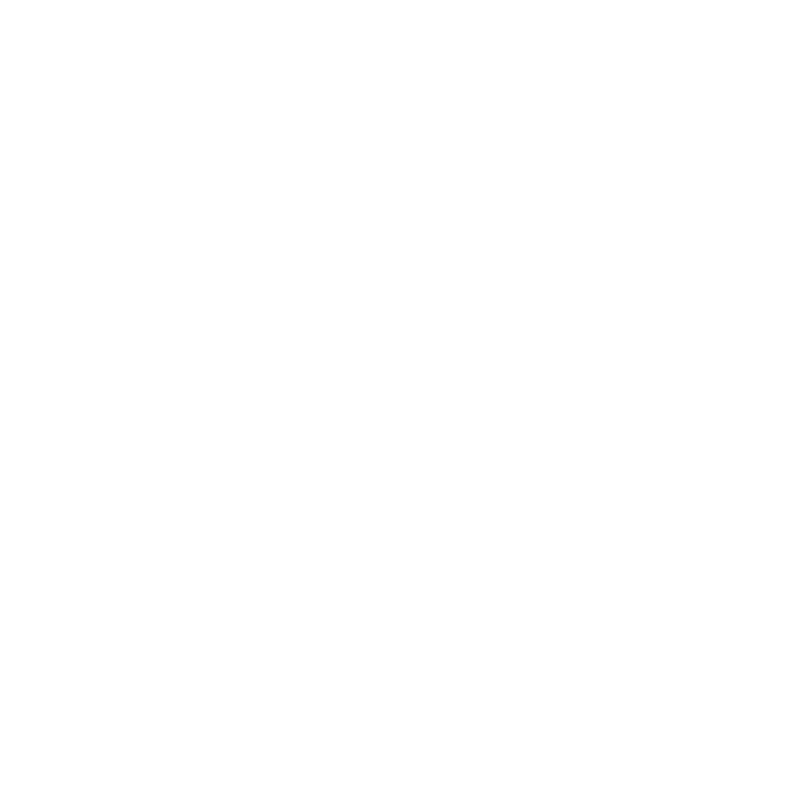

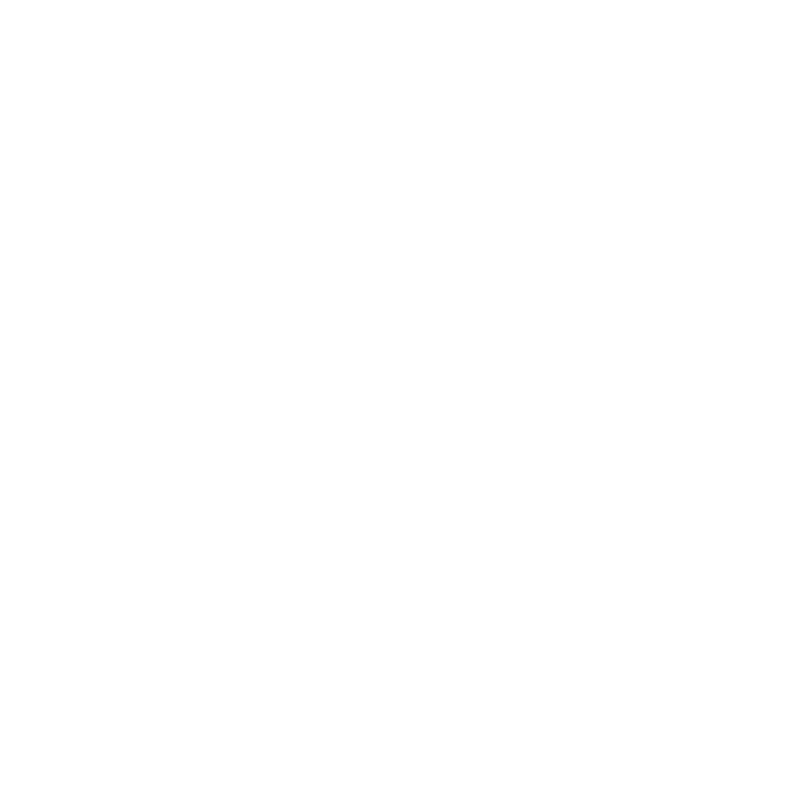

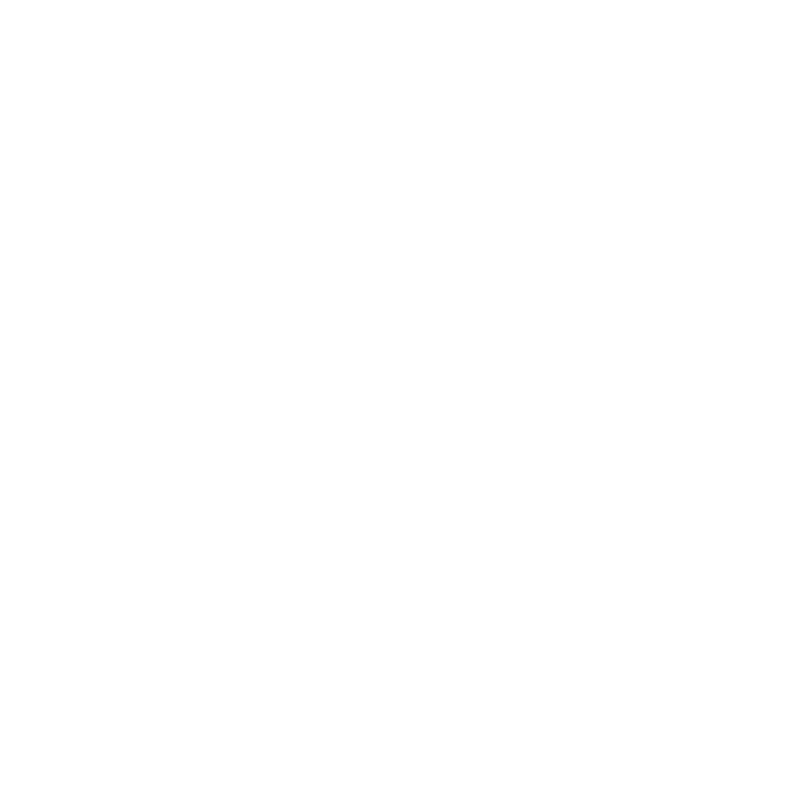

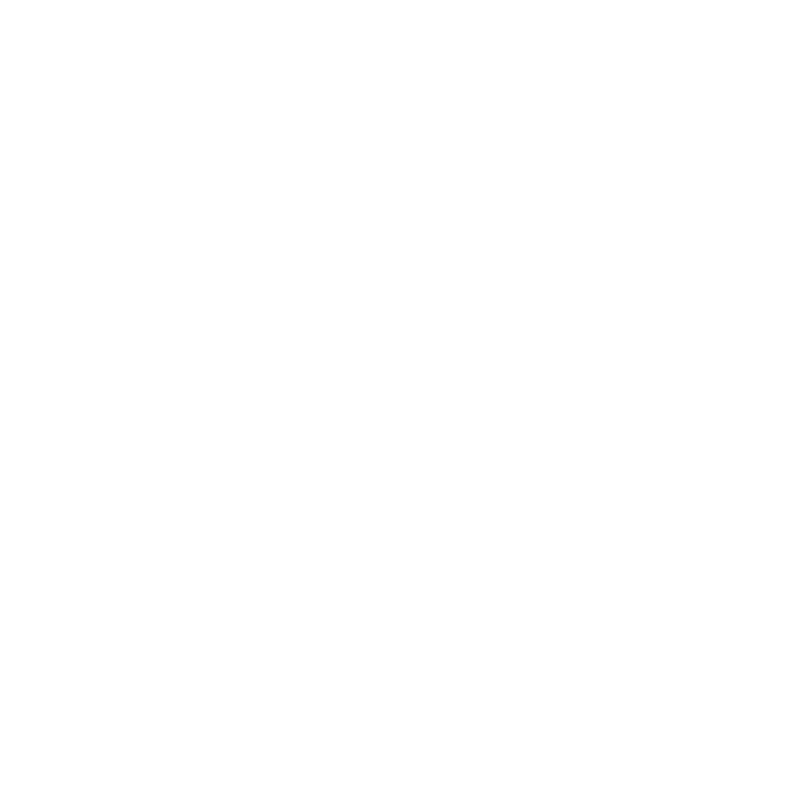

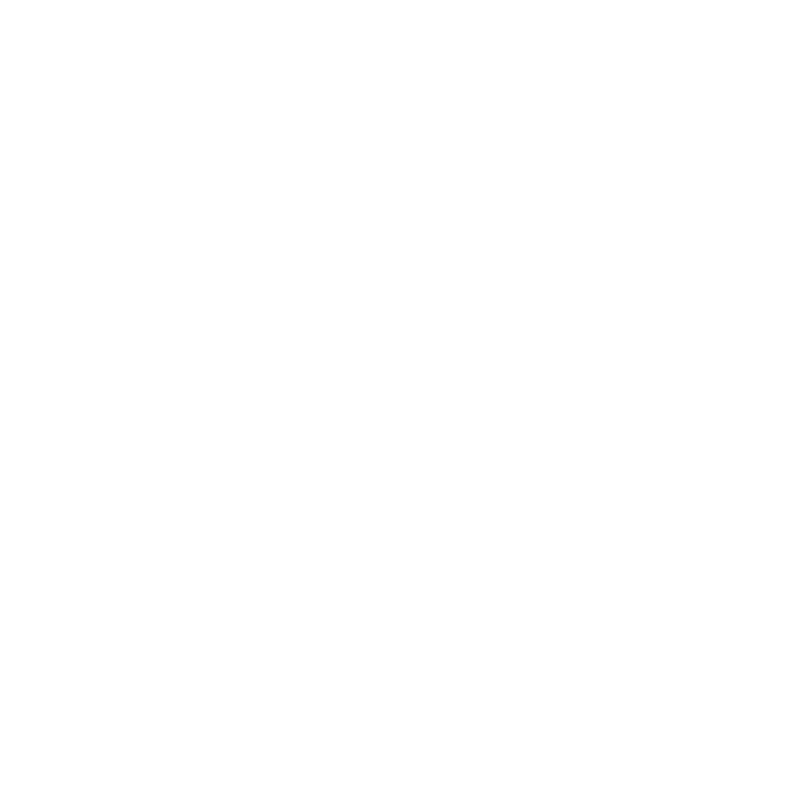

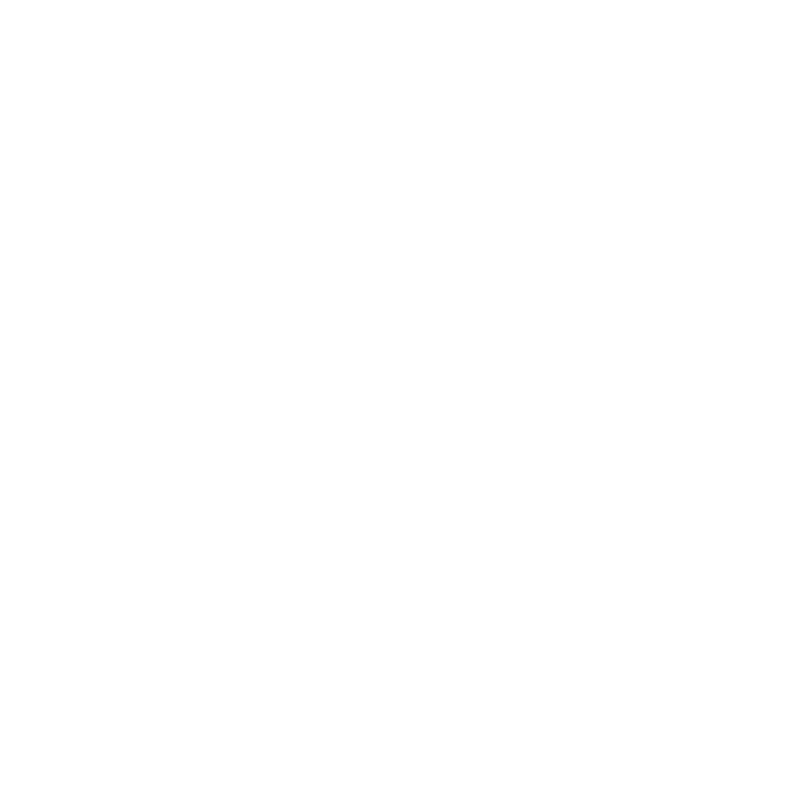

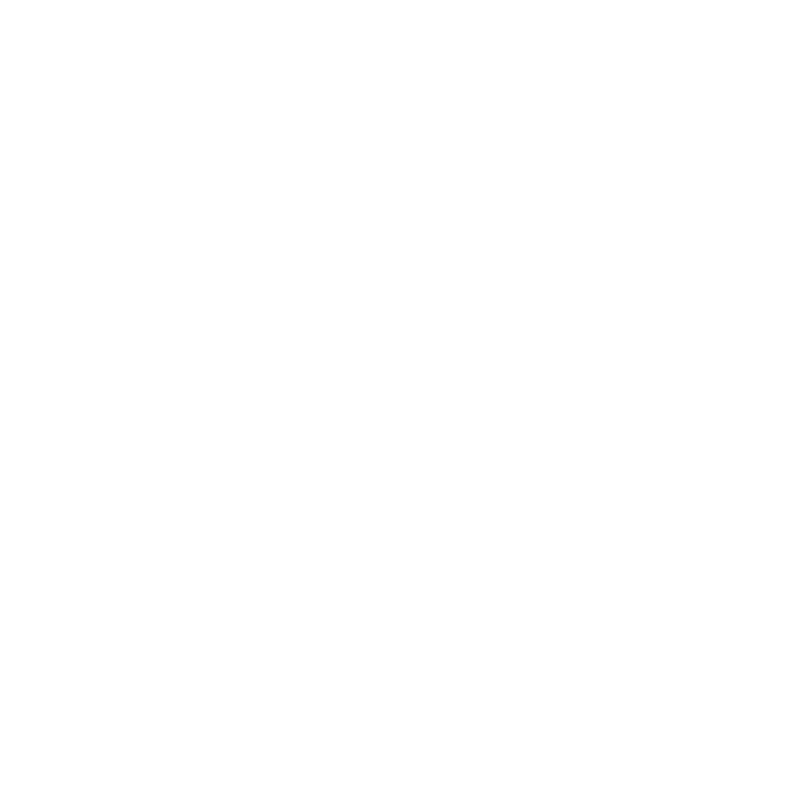

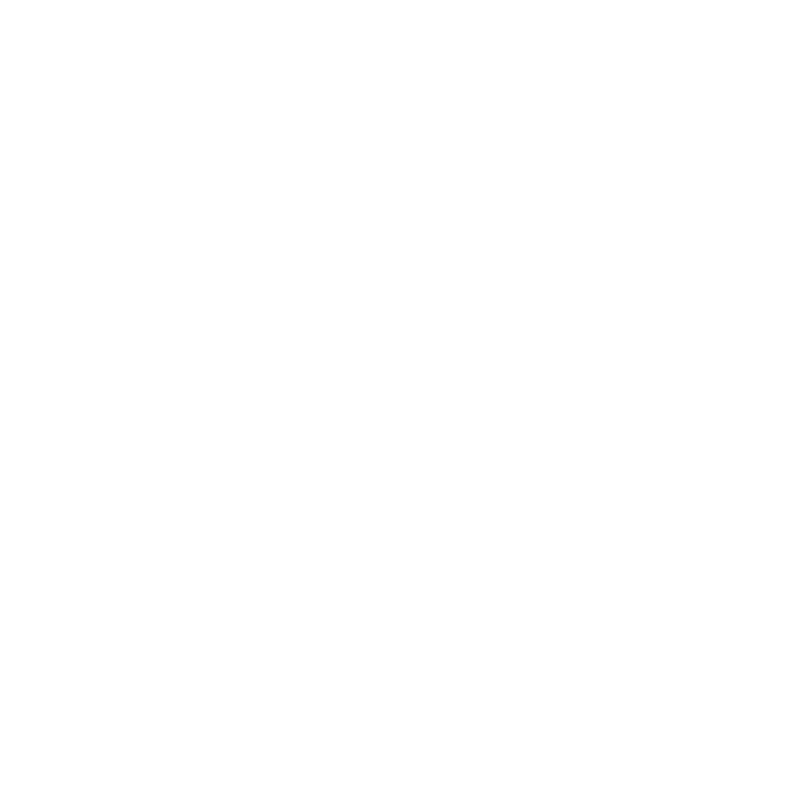

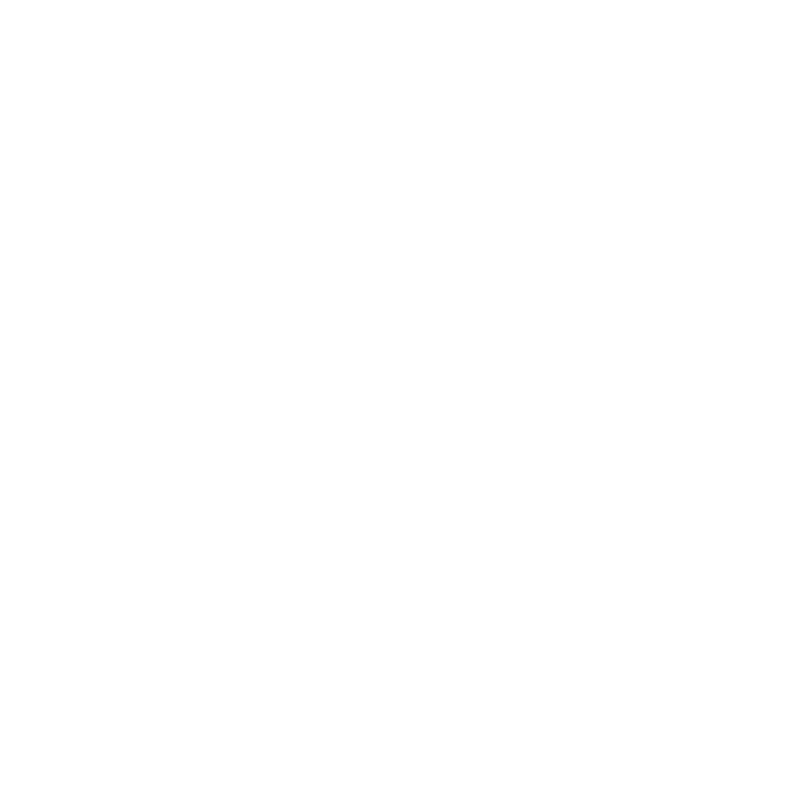

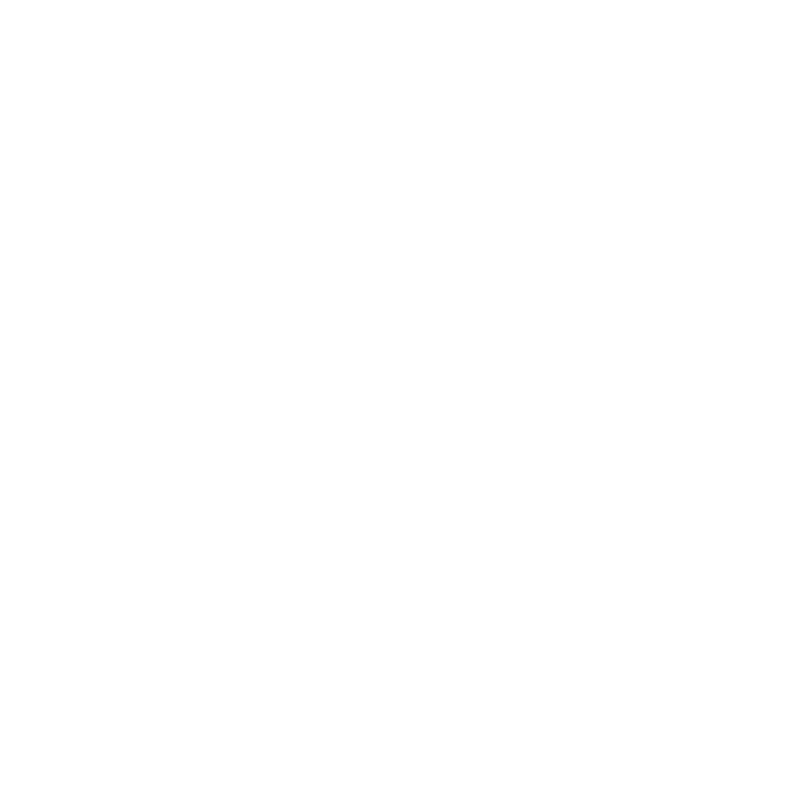

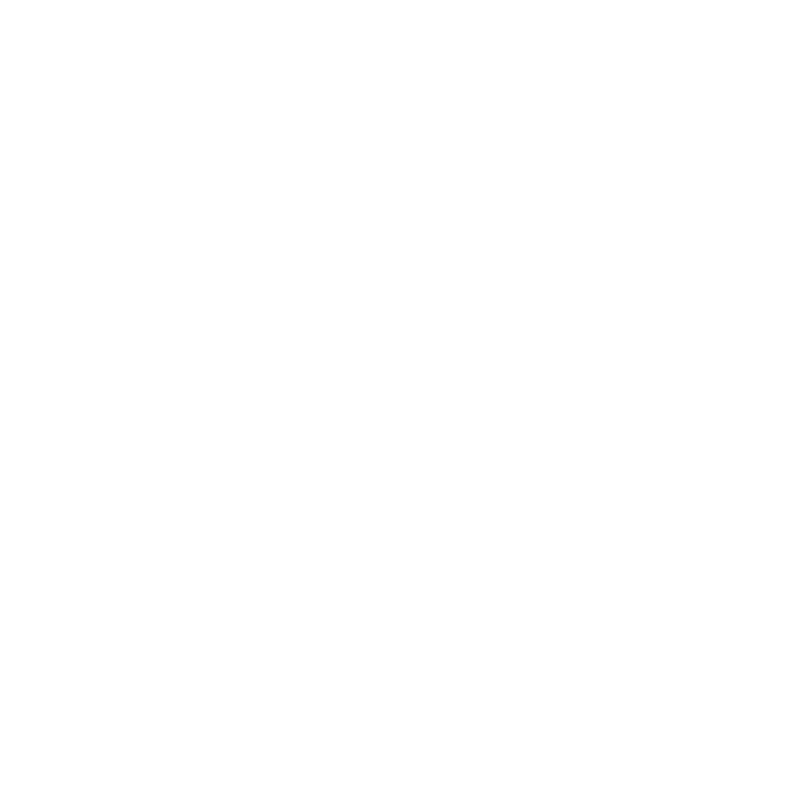

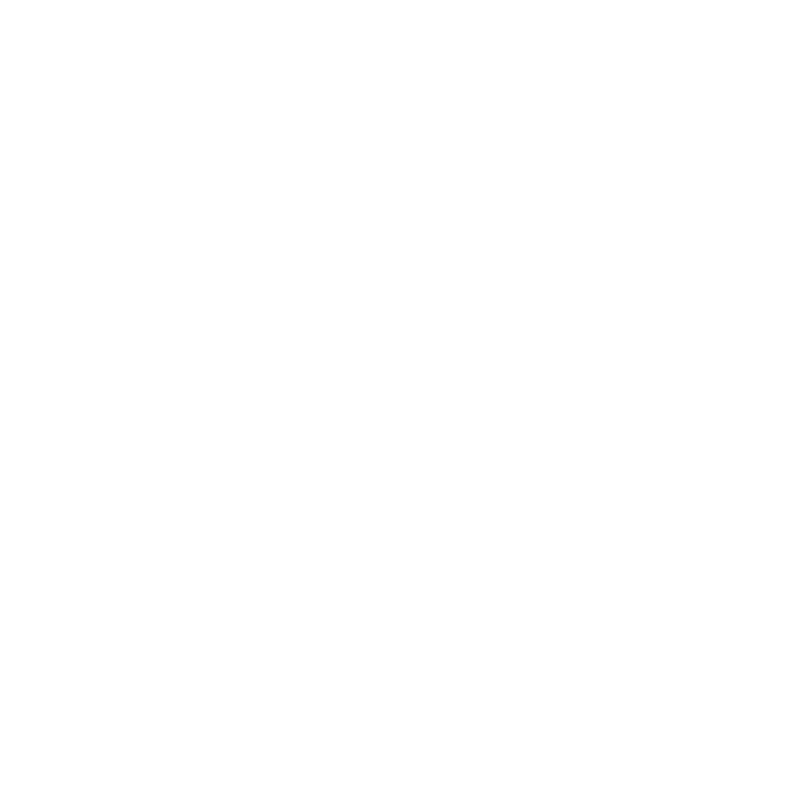

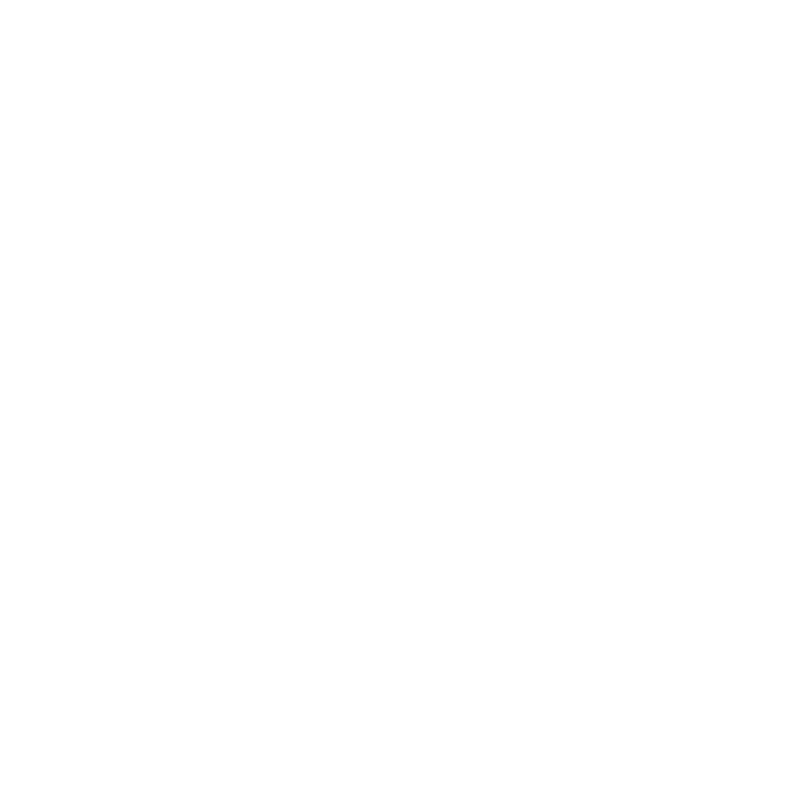

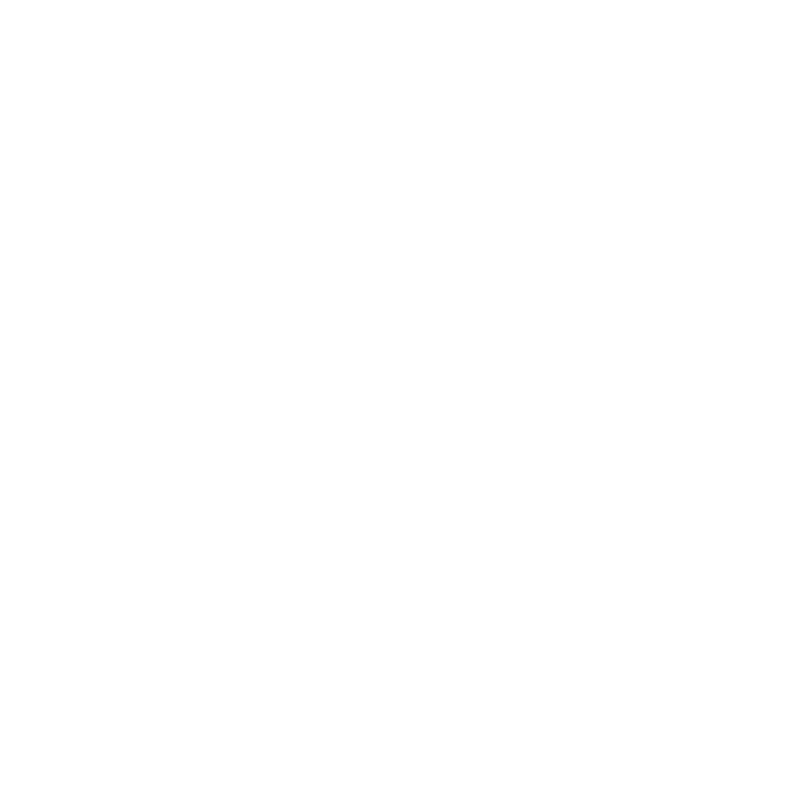

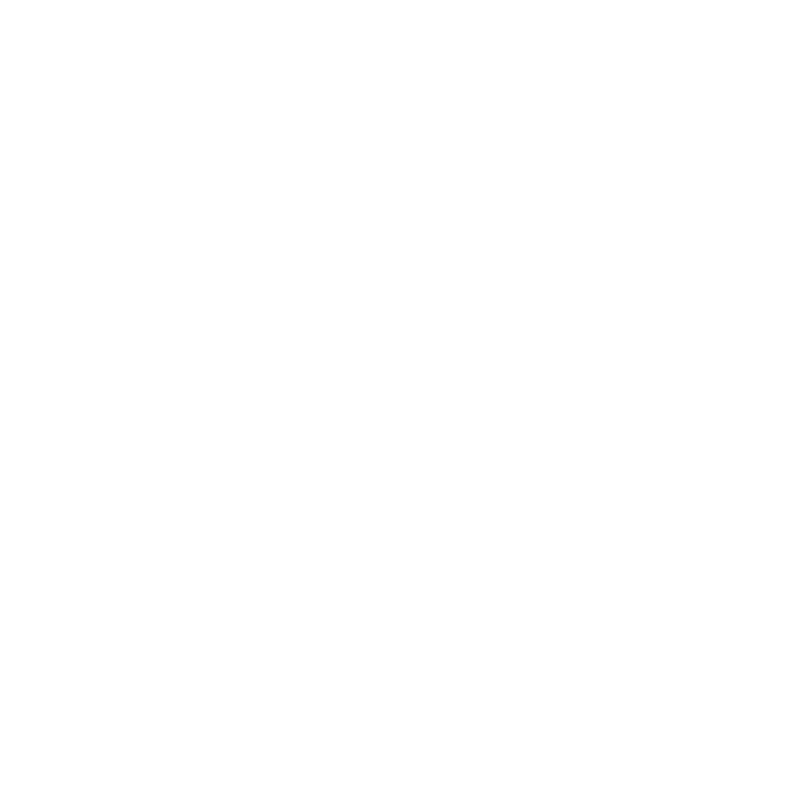

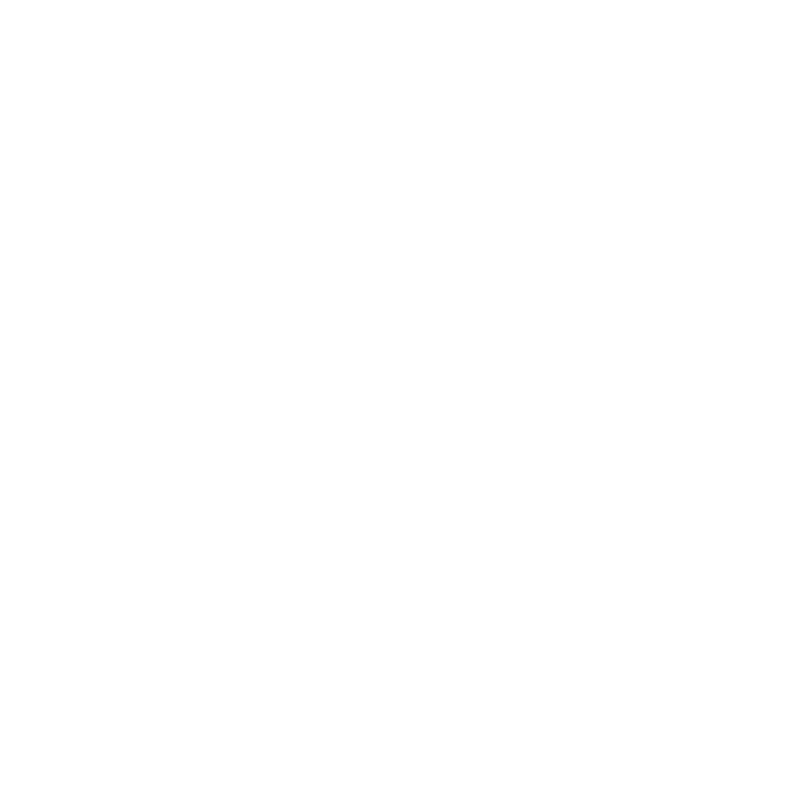

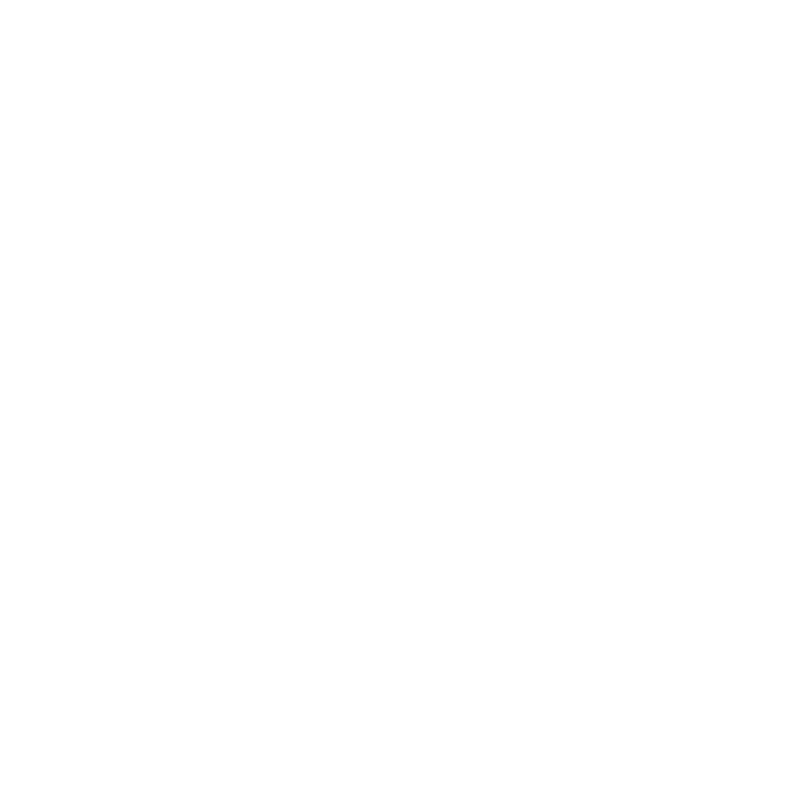

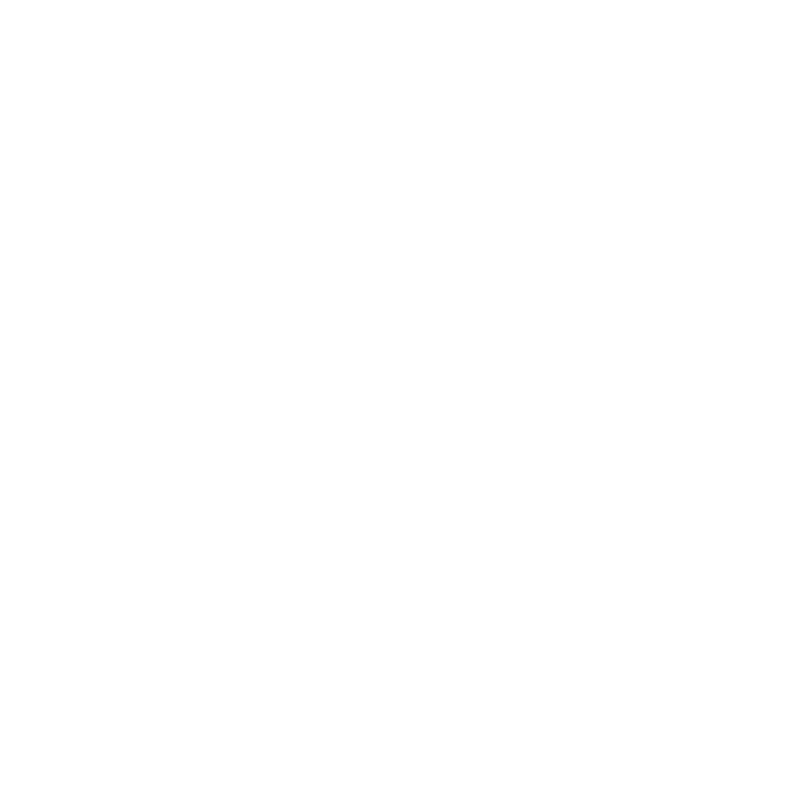

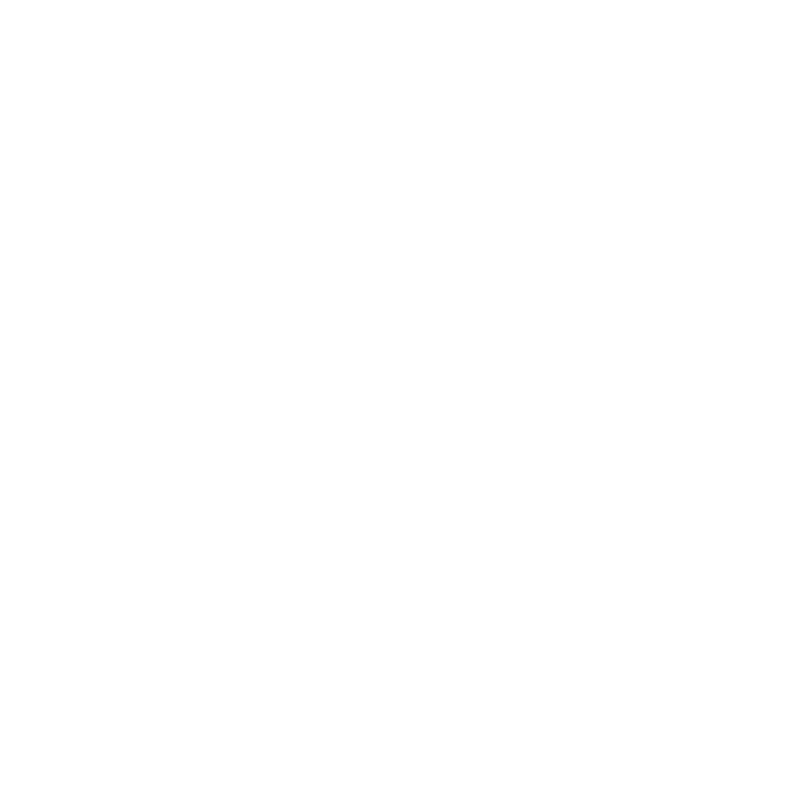

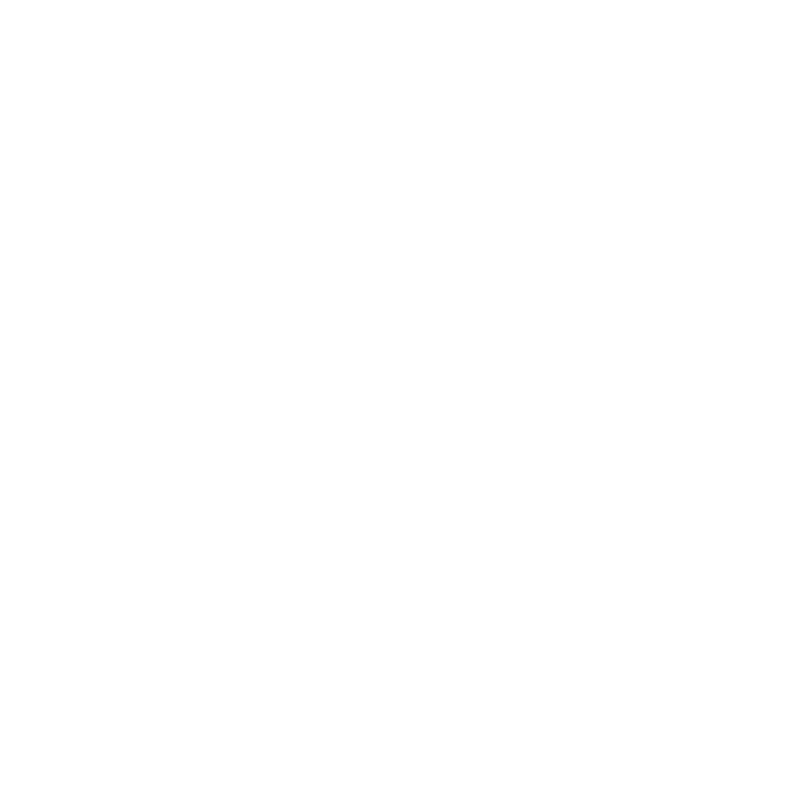

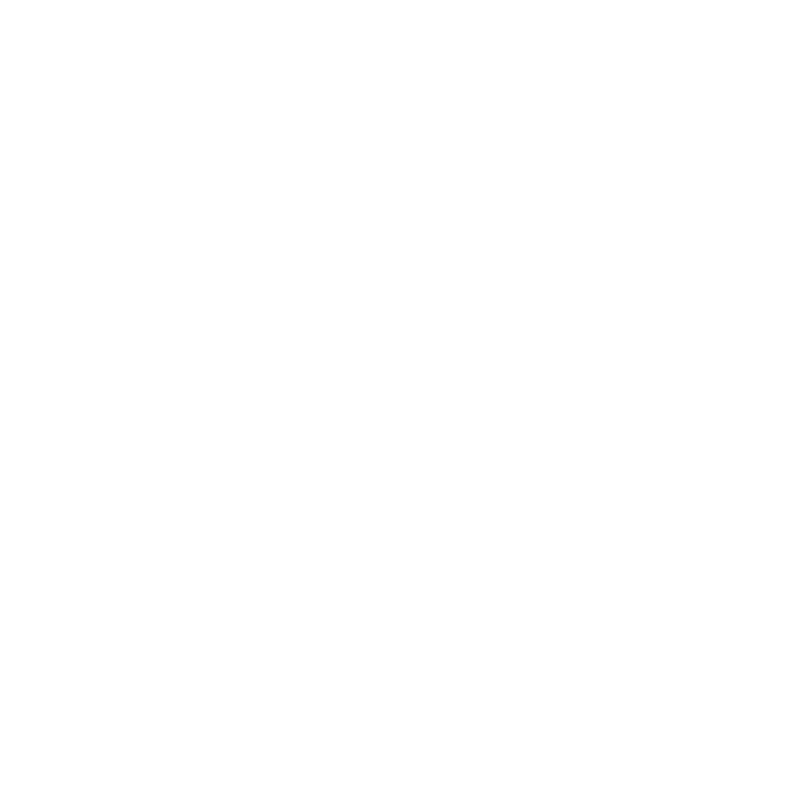

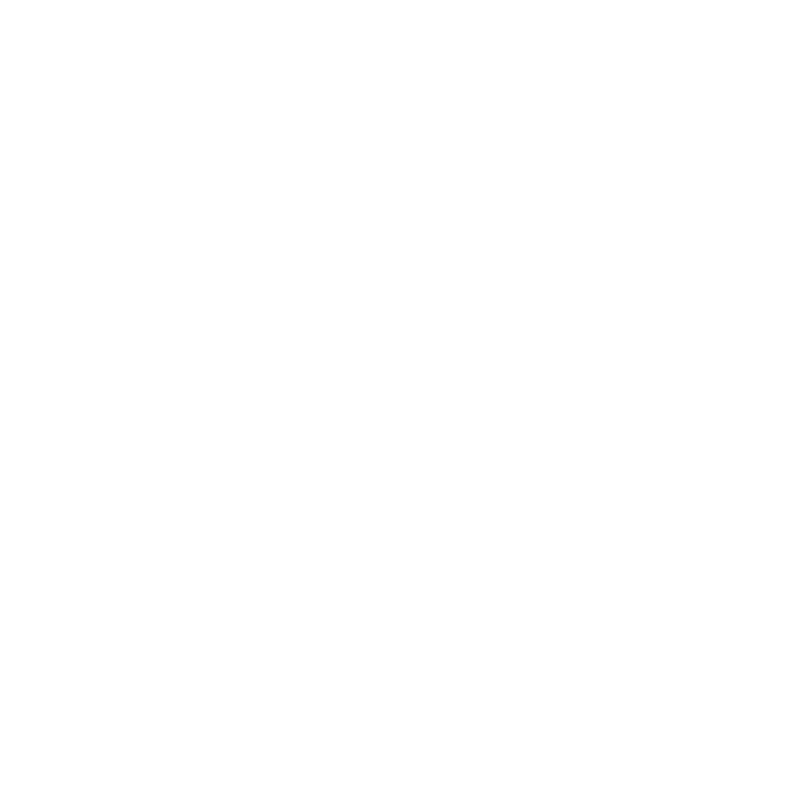

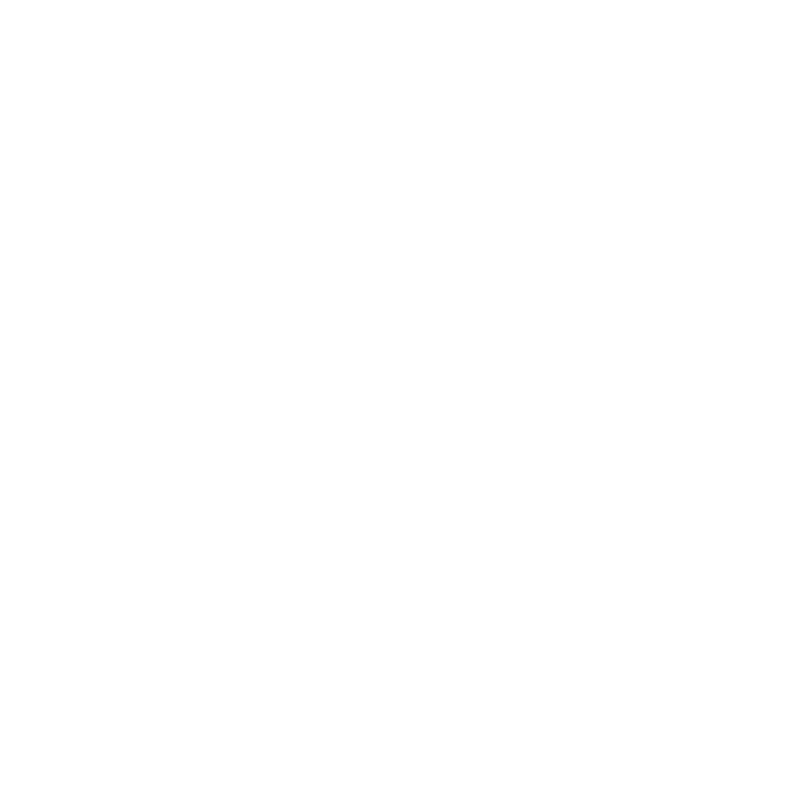

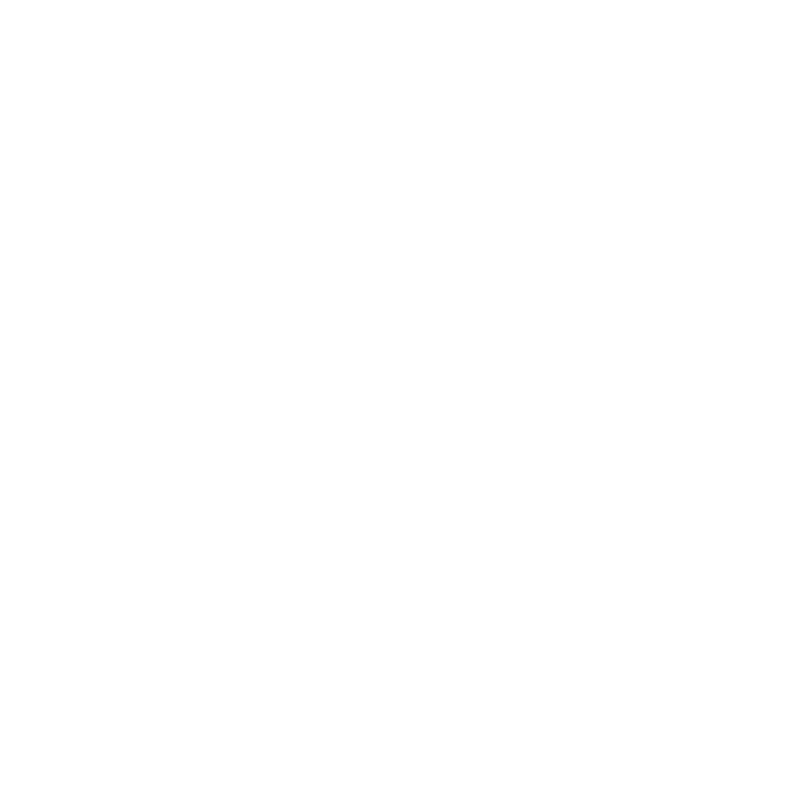

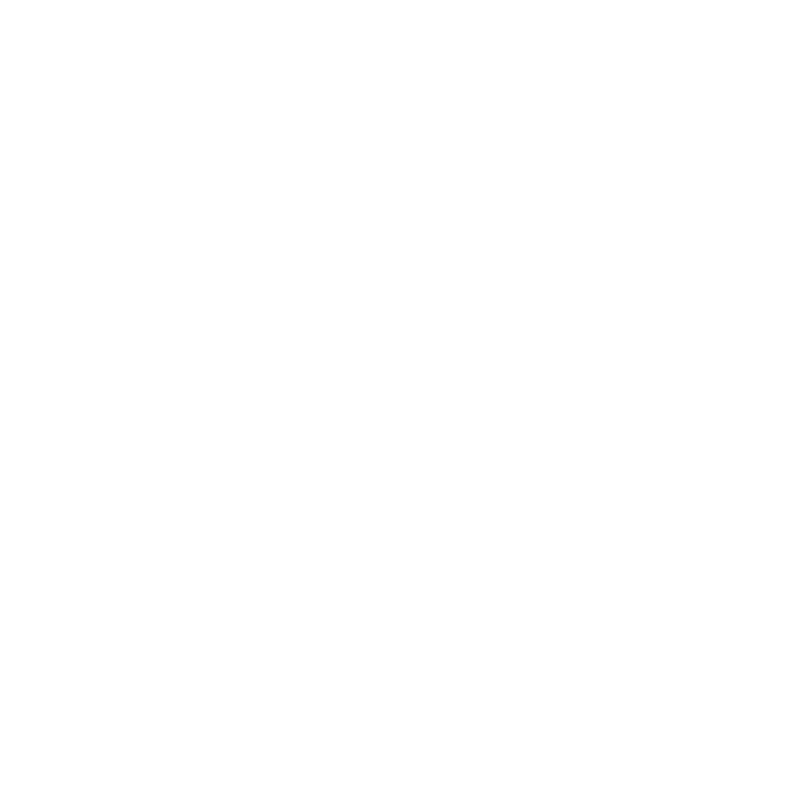

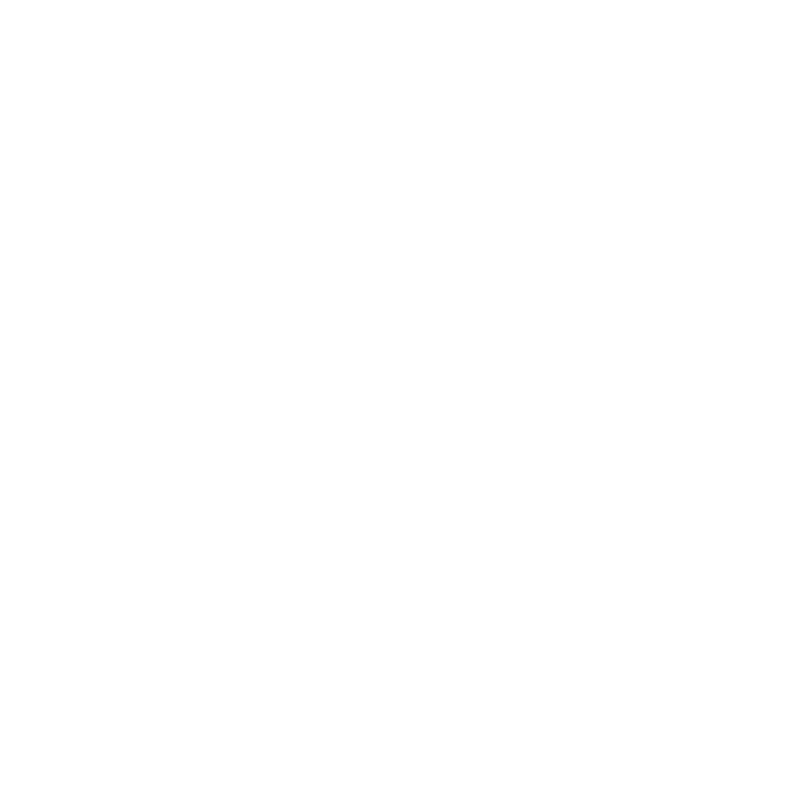

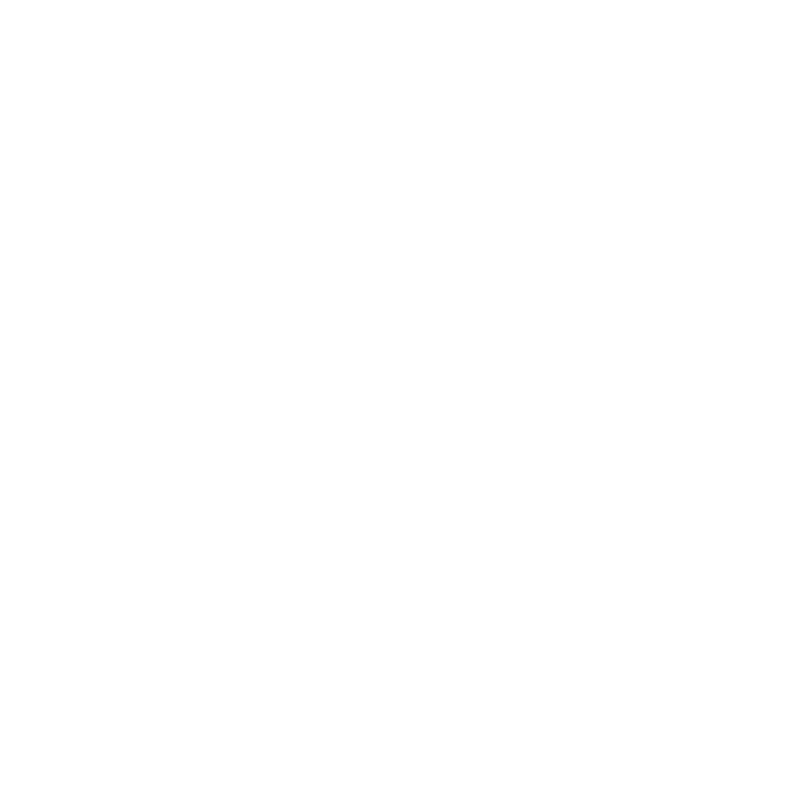

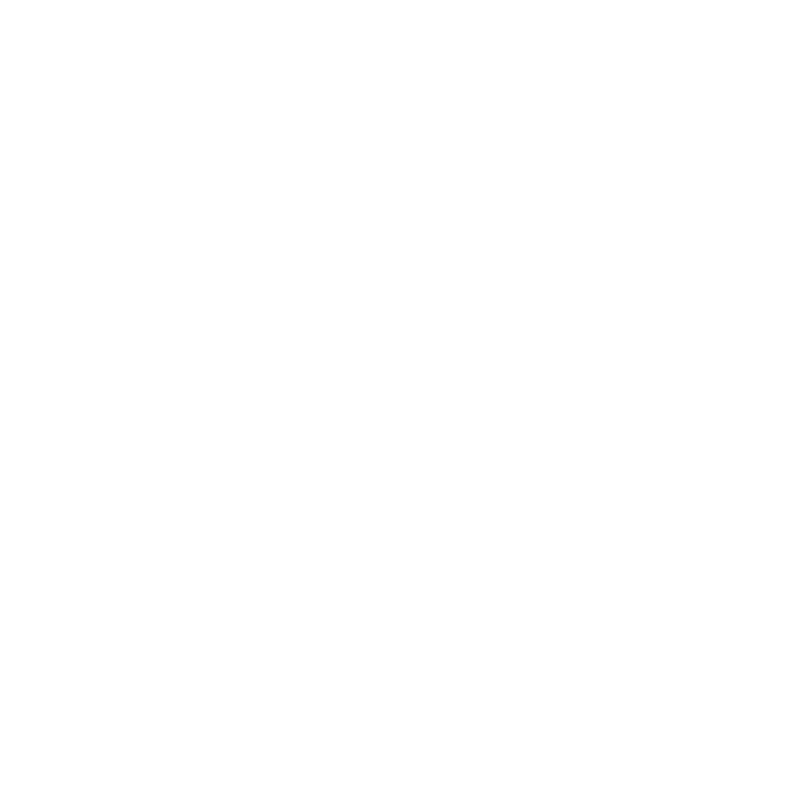

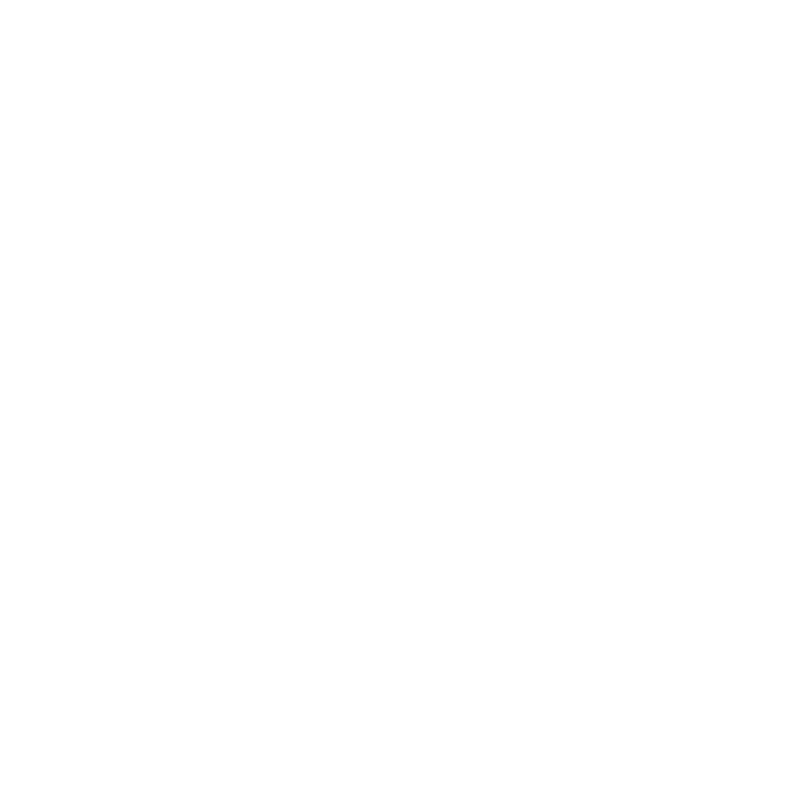

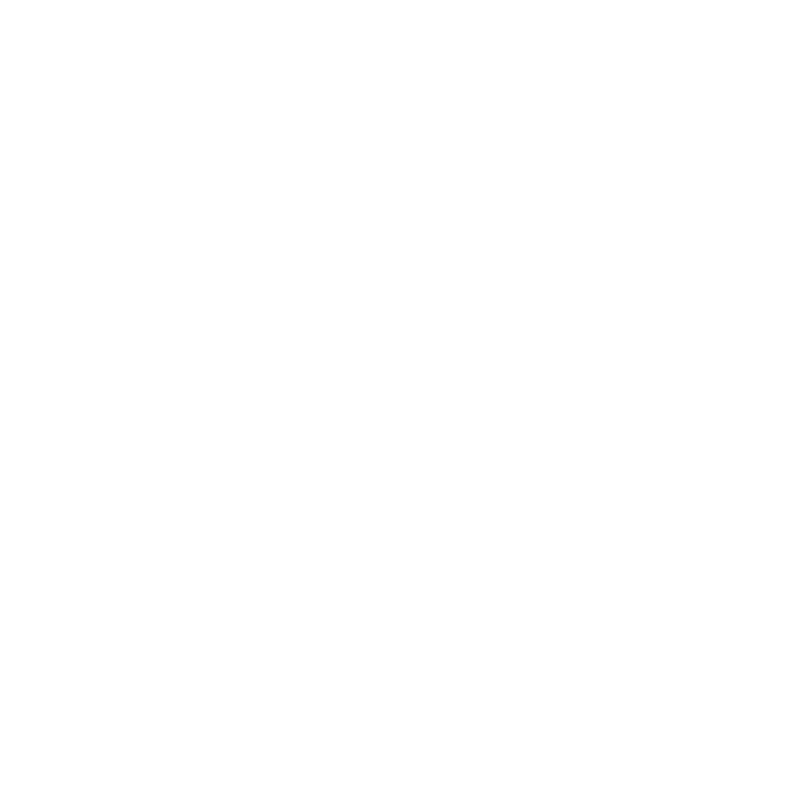

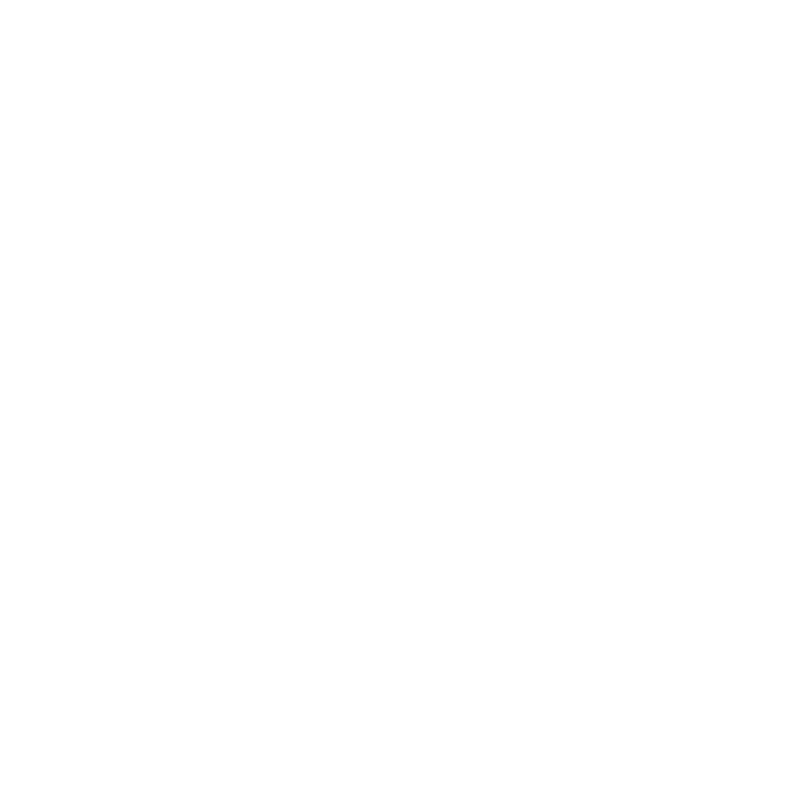

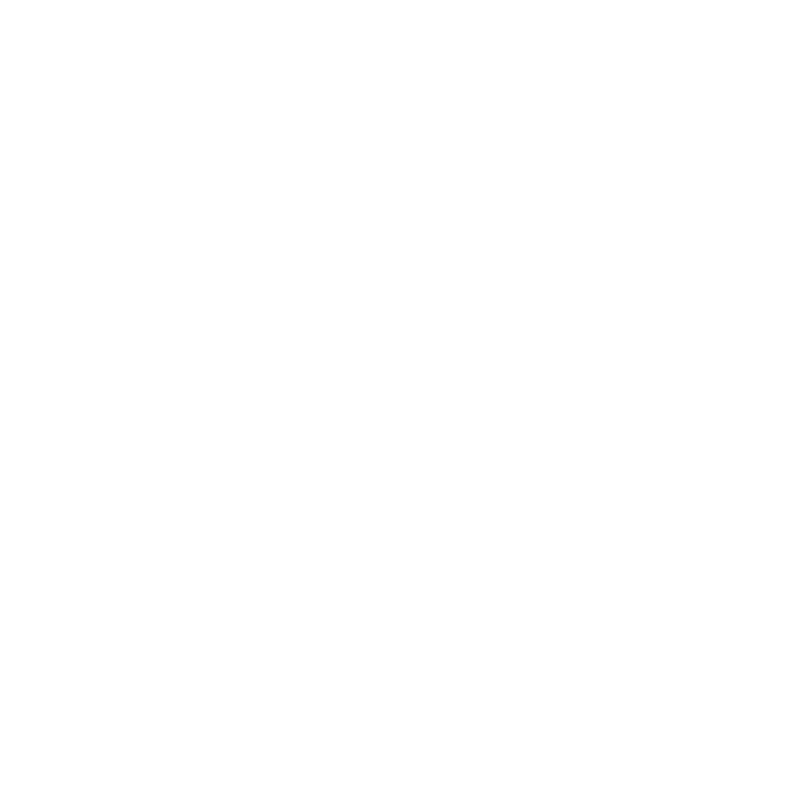

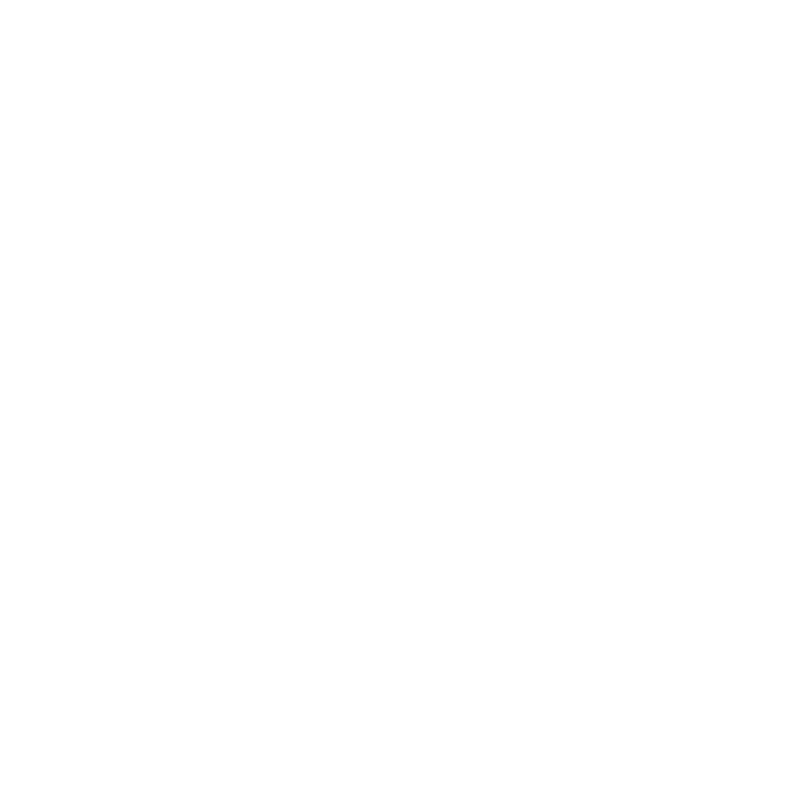

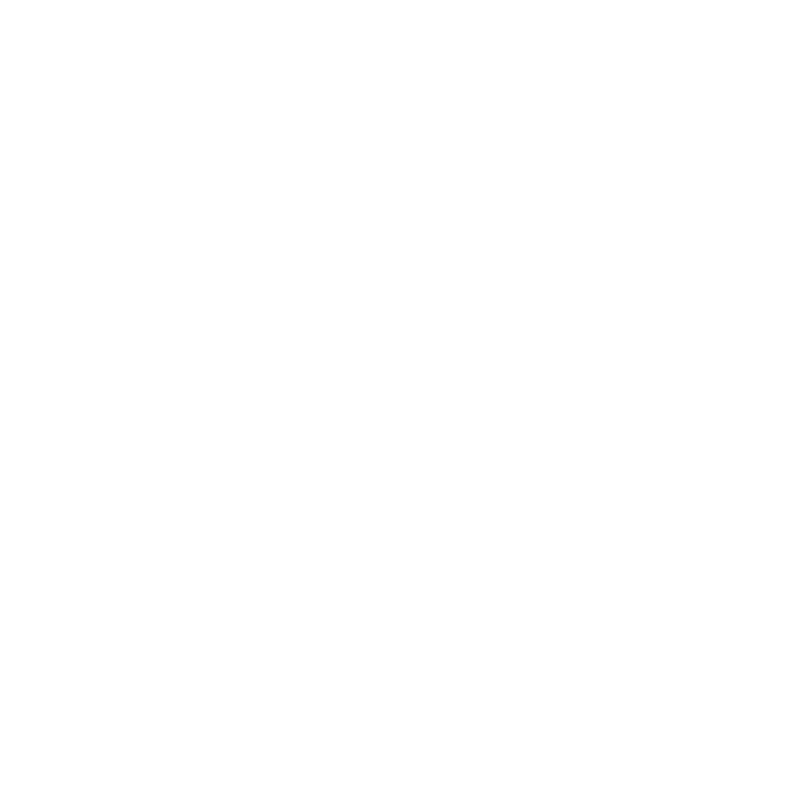

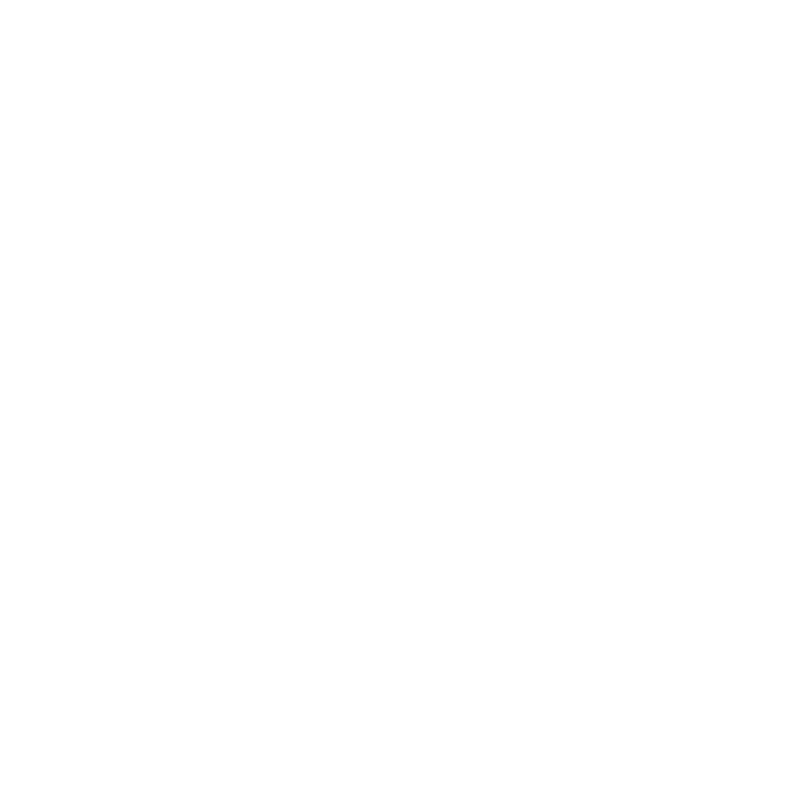

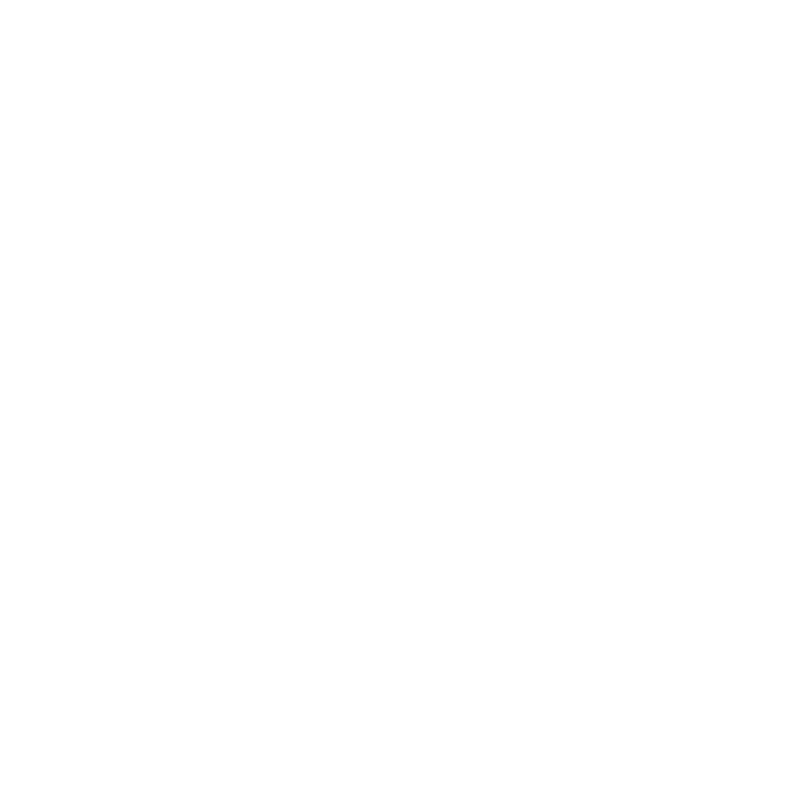

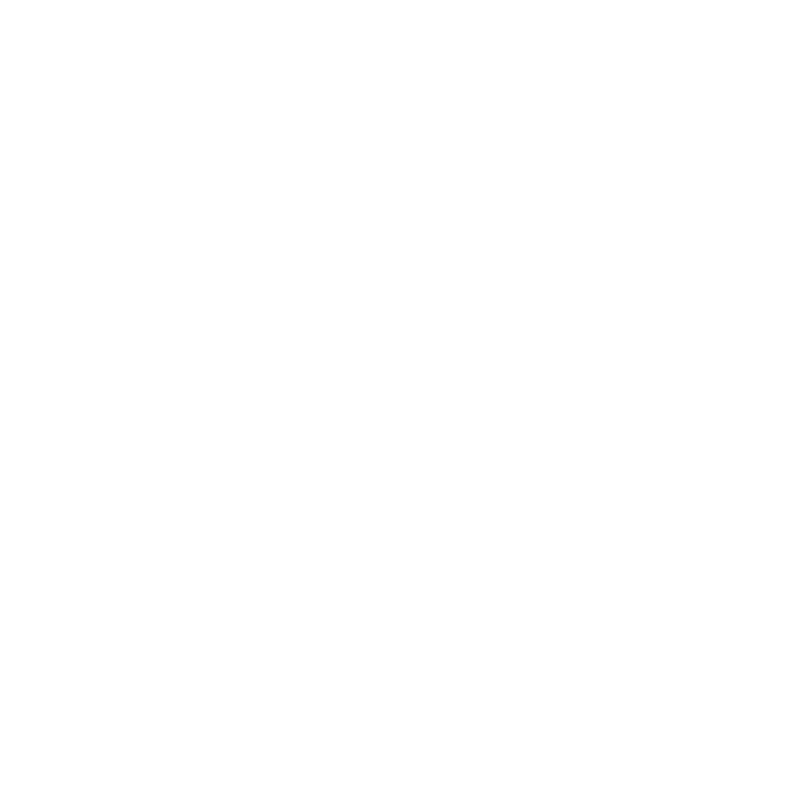

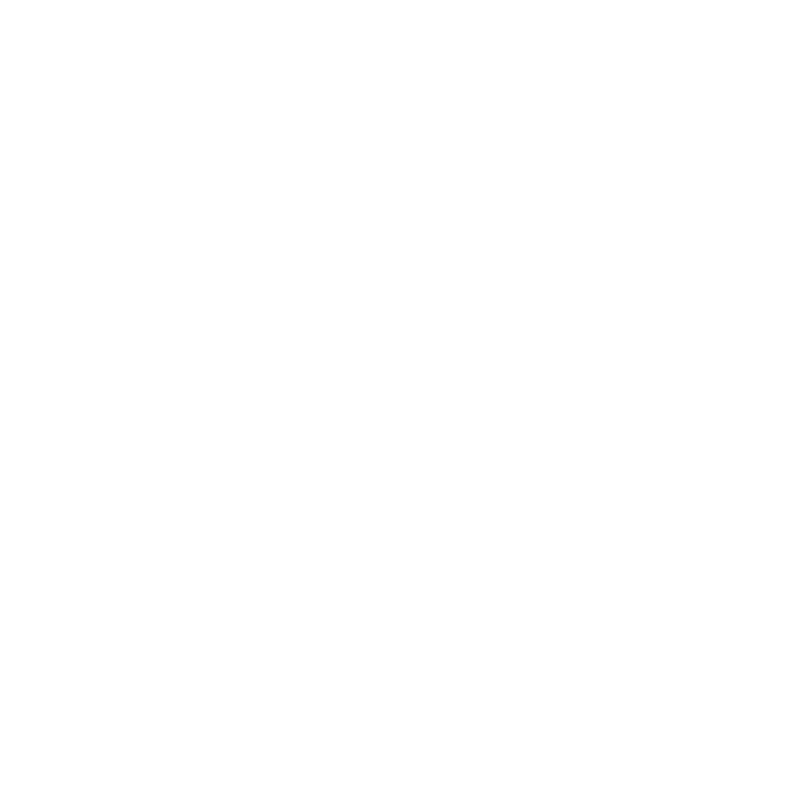

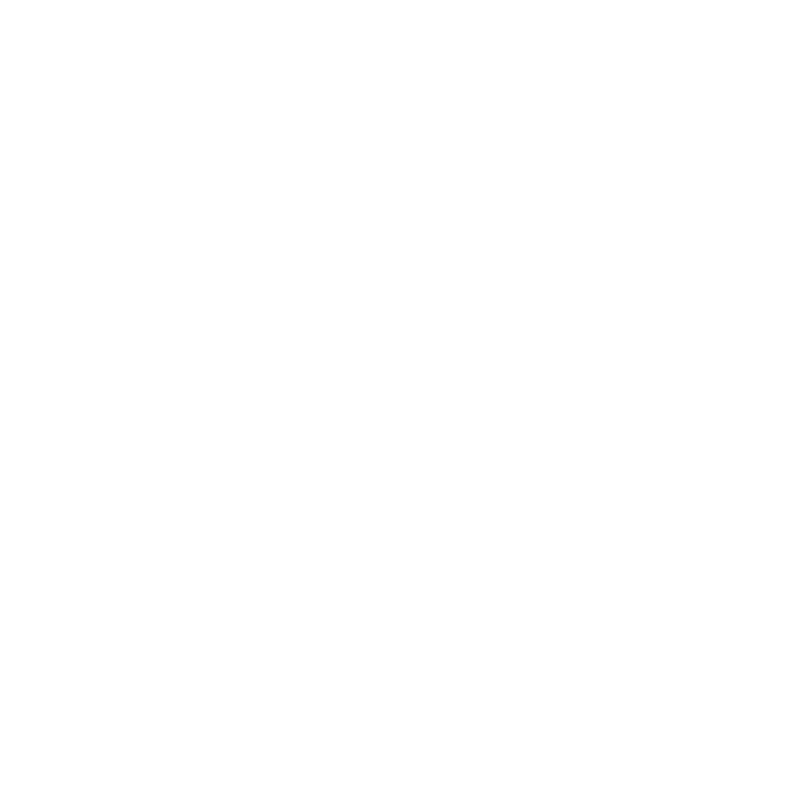

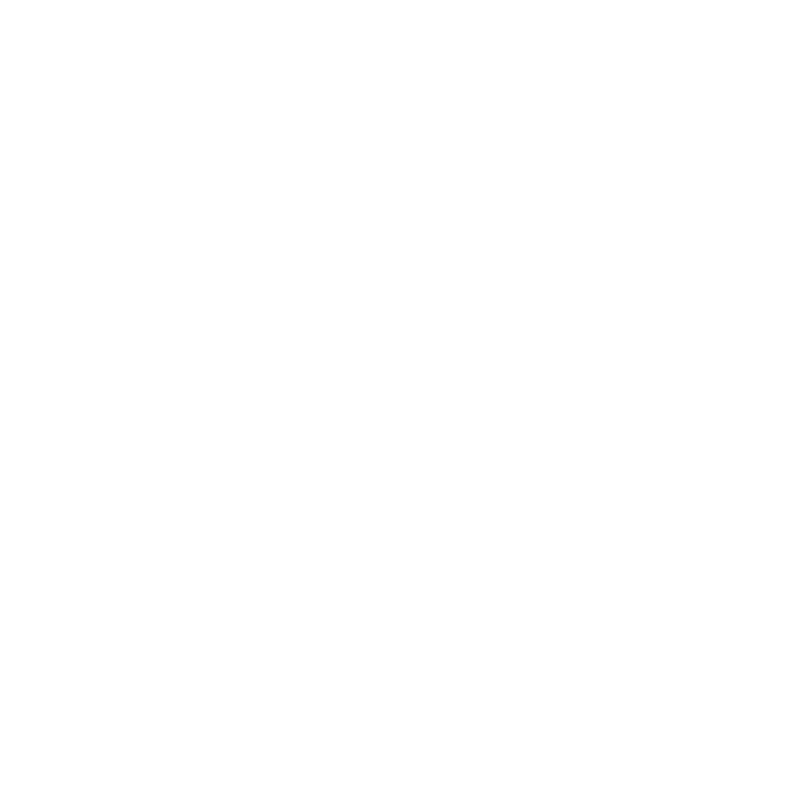

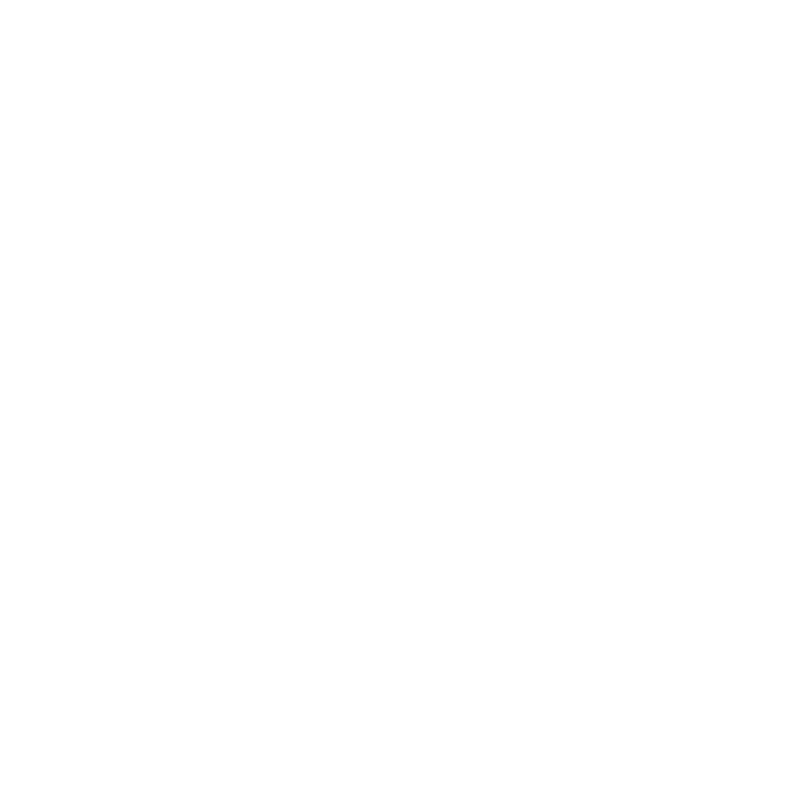

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from tqdm import trange

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

def create_square_image(image_size=32):
    while True:  # 循环确保生成的正方形不超出边界
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xlim(0, image_size)
        ax.set_ylim(0, image_size)
        ax.set_aspect('equal')
        ax.axis('off')

        # 定义色系的HSV范围
        sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
        pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系

        # 随机选择颜色
        color1 = random_color_from_hsv_range(sun_hsv_range)
        color2 = random_color_from_hsv_range(pole_hsv_range)

        # 确定上半部分和下半部分的正方形位置
        half_size = image_size / 2

        # 随机决定上半部分正方形的边长
        square_size_up = random.uniform(half_size * 0.3, half_size * 0.7)
        # 确保下半部分正方形的边长是上半部分正方形的1.5倍
        square_size_down = square_size_up * 1.5

        # 确定上半部分和下半部分正方形的随机区域
        top_left = (random.uniform(0, half_size - square_size_up), random.uniform(half_size, image_size - square_size_down))
        top_right = (random.uniform(half_size, image_size - square_size_up), random.uniform(half_size, image_size - square_size_down))
        bottom_left = (random.uniform(0, half_size - square_size_up), random.uniform(0, half_size - square_size_down))
        bottom_right = (random.uniform(half_size, image_size - square_size_up), random.uniform(0, half_size - square_size_down))

        # 随机选择一个区域放置上半部分和下半部分的正方形
        top_square_position = random.choice([top_left, top_right])
        bottom_square_position = random.choice([bottom_left, bottom_right])

        # 计算上半部分和下半部分正方形的位置
        top_x, top_y = top_square_position
        bottom_x, bottom_y = bottom_square_position

        # 确保正方形不会超出图像边界
        if top_x + square_size_up > image_size or top_y + square_size_up > image_size:
            continue
        if bottom_x + square_size_down > image_size or bottom_y + square_size_down > image_size:
            continue

        # 绘制上半部分正方形
        ax.add_patch(plt.Rectangle((top_x, top_y), square_size_up, square_size_up, facecolor=color1/255.0))

        # 绘制下半部分正方形
        ax.add_patch(plt.Rectangle((bottom_x, bottom_y), square_size_down, square_size_down, facecolor=color2/255.0))
        plt.close(fig)
        return fig

def generate_images(base_path, image_size=32, images_per_class=1000):
    # 如果没有base_path，则先创建该路径
    if not os.path.exists(base_path):
        os.makedirs(base_path)

    type0_path = os.path.join(base_path, "images")
    if not os.path.exists(type0_path):
        os.makedirs(type0_path)
    
    images = []

    # 生成 type_0 的图片
    print("Generating images for type_0...")
    for i in trange(images_per_class):
        folder_path = type0_path
        fig = create_square_image(image_size)

        image_path = os.path.join(folder_path, f"{i+1}.png")
        fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)

        if i < 8:
            images.append((image_path, os.path.basename(folder_path)))  # 保存前8张图片

    print("Image generation complete.")
    return images

# 设置参数
base_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/square_two_val"
image_size = 32
images_per_class = 2000

# 生成图片并获取前8张图像路径和类别标签
images = generate_images(base_path, image_size, images_per_class)


Processing Images:   4%|▍         | 249/6003 [00:00<00:07, 781.43it/s]

Processing Images: 100%|██████████| 6003/6003 [00:06<00:00, 876.02it/s]
/tmp/ipykernel_2198/170713422.py:203: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.4], [0, 0.6], 'k--', label='y=1.5x', color='gray')  # y=1.5x 的灰色虚线


Failed images: 4498
Error case images: 0
Variance error 0.012220738439102742
Mean Error 0.11235410292014067
Scatter plot and fit saved to /cpfs01/user/hanyujin/causal-dm/results/square_two/vis/epoch_1000_1735093891.1470206/square_size_relationship.pdf


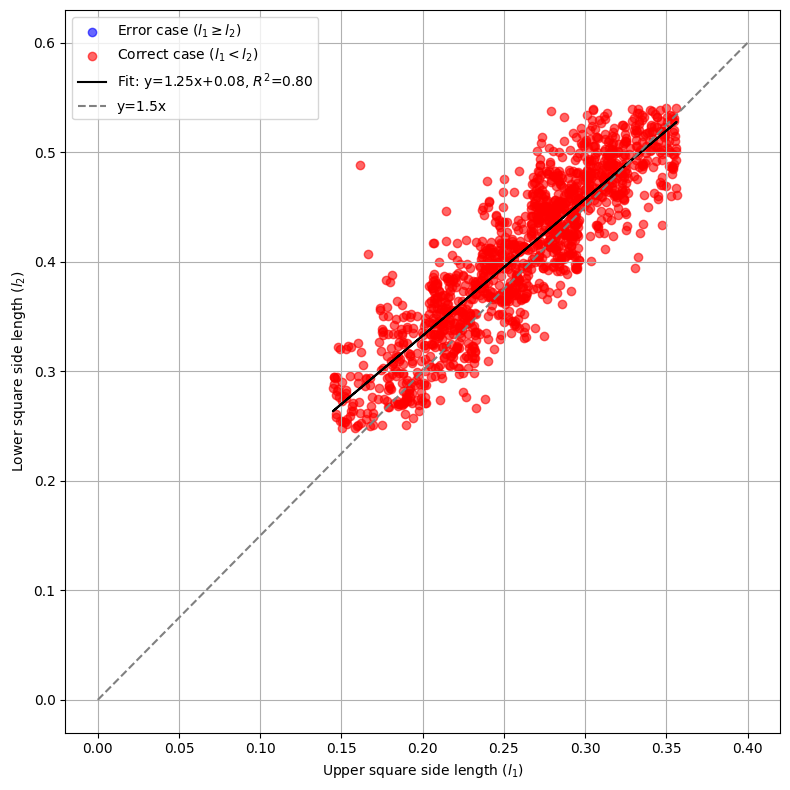

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

def find_squares_in_image(image_path, image_size=128):
    """
    查找图片中的两个正方形并返回它们的边长，进行标准化处理。
    :param image_path: 图片文件路径
    :param image_size: 图片的尺寸
    :return: 上半部分和下半部分正方形的边长（l1, l2），标准化后的值
    """
    # 读取图像
    image = cv2.imread(image_path)
    image = cv2.resize(image, (image_size, image_size), interpolation=cv2.INTER_AREA)
    
    original_image = image.copy()  # 保留原始图像，用于标记
    # image = image.filter(ImageFilter.GaussianBlur(radius=0.8)) 


    # 转换为HSV颜色空间，增强浅色正方形检测
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 定义颜色范围（黄色、红色、蓝色），包括浅色范围
 
    # 定义颜色范围（包括黄色、红色、蓝色、紫色和黑色）
    # 黄色范围
    lower_yellow = np.array([20, 50, 100])  
    upper_yellow = np.array([40, 255, 255])

    # 红色范围
    lower_red1 = np.array([0, 30, 100])   
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 30, 100]) 
    upper_red2 = np.array([180, 255, 255])

    # 蓝色范围（深蓝到浅蓝）
    lower_blue = np.array([90, 50, 20])  
    upper_blue = np.array([130, 255, 255])

    # 紫色范围
    lower_purple = np.array([130, 50, 20])  
    upper_purple = np.array([160, 255, 255])

    # 黑色范围
    lower_black = np.array([0, 0, 0])  
    upper_black = np.array([180, 255, 50])  

    # 创建颜色掩码
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    purple_mask = cv2.inRange(hsv, lower_purple, upper_purple)
    black_mask = cv2.inRange(hsv, lower_black, upper_black)

    # 合并所有颜色掩码
    mask = yellow_mask | red_mask1 | red_mask2 | blue_mask | purple_mask | black_mask

    # 添加灰度二值化结果，增强对非彩色区域的支持
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    mask = mask | binary


    # 寻找轮廓
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 存储正方形的信息
    squares = []

    for contour in contours:
        # 计算轮廓的边界框
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)

        # 判断是否为正方形（宽高比接近1且面积足够大）
        if 0.9 <= aspect_ratio <= 1.1 and w > 10 and h > 10:
            squares.append((x, y, w, h))

    # 判断是否找到两个正方形
    if len(squares) != 2:
        return None, None  # 如果不是两个正方形，返回 None

    # 对正方形按y坐标排序（上侧正方形在前）
    squares = sorted(squares, key=lambda rect: rect[1])

    # 获取上侧和下侧正方形的边长
    l1 = squares[0][2]  # 上侧正方形边长
    l2 = squares[1][2]  # 下侧正方形边长

    # 进行标准化，除以图片尺寸 image_size
    l1_normalized = l1 / image_size
    l2_normalized = l2 / image_size
    # if l1_normalized <=0.15 and  l2_normalized >=0.2:
    #     return None, None

    # 在原始图像上标记正方形及其边长
    for (x, y, w, h) in squares:
        cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # 标记正方形边长
    cv2.putText(original_image, f"l1: {l1}", (squares[0][0] + l1 // 2, squares[0][1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    cv2.putText(original_image, f"l2: {l2}", (squares[1][0] + l2 // 2, squares[1][1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # 返回标准化边长和标记后的图片
    return l1_normalized, l2_normalized  # , original_image


def generate_squares_data(base_path, image_size=32, images_per_class=1000):
    """
    遍历文件夹中的图片，提取正方形边长并返回标准化数据。
    :param base_path: 图片所在的文件夹路径
    :param image_size: 图片尺寸
    :param images_per_class: 每个类别生成的图片数量
    :return: 正方形边长标准化数据
    """
    squares_data = []
    labels = []  # 保存数据标签
    failed_images = []
    error_case_images = []

    base_path = base_path  # + '/images'

    # 遍历文件夹中的图片
    for filename in tqdm(os.listdir(base_path), desc="Processing Images"):
        if filename.endswith('.png'):  # 只处理PNG文件
            image_path = os.path.join(base_path, filename)

            # 查找图片中的正方形边长，并进行标准化
            l1, l2 = find_squares_in_image(image_path, image_size)
            if l1 is not None and l2 is not None:
                squares_data.append((l1, l2,np.abs(l2/l1-1.5)))
                if l1 >= l2:
                    labels.append(0)
                    error_case_images.append(filename)  # 保存错误id
                else:
                    labels.append(1)
            else:
                failed_images.append(filename)

    # 保存 `failed_images` 到文本文件
    if failed_images:
        with open(os.path.join(base_path.replace('/images', ''), "failed_images.txt"), "w") as f:
            for item in failed_images:
                f.write(item + "\n")
    # 保存 `error_case_images` 到文本文件
    if error_case_images:
        with open(os.path.join(base_path.replace('/images', ''), "error_case_images.txt"), "w") as f:
            for item in error_case_images:
                f.write(item + "\n")

    return np.array(squares_data), np.array(labels), len(failed_images), len(error_case_images)


def plot_square_data(squares_data, labels, base_path):
    """
    绘制正方形边长的散点图，并进行线性拟合。
    :param squares_data: 正方形边长数据
    :param base_path: 图片文件夹路径，用于保存图表
    """
    x = squares_data[:, 0]  # 上半部分正方形的边长 l1
    y = squares_data[:, 1]  # 下半部分正方形的边长 l2
    ratio = squares_data[:, 2]
    labels = np.array(labels)
    # 添加轻微的抖动
    jitter_strength = 0.015 # 抖动强度(越小越轻微)
    x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)
    y_jittered = y + np.random.uniform(-jitter_strength, jitter_strength, size=y.shape)

    x_min, x_max = np.percentile(x_jittered, [2.5, 97.5])
    y_min, y_max = np.percentile(y_jittered, [2.5, 97.5])
    mask = (x_jittered >= x_min) & (x_jittered <= x_max) & (y_jittered >= y_min) & (y_jittered <= y_max)

    # 筛选有效数据点
    x_jittered = x_jittered[mask]
    y_jittered= y_jittered[mask]
    ratios = ratio[mask]
    print(f"Variance error {np.var(ratios)}")
    print(f"Mean Error {np.mean(ratios)}")
    labels = labels[mask]
    # 使用线性回归模型拟合直线
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)
    y_pred_jittered = model.predict(x_jittered.reshape(-1, 1))
    
    # 绘制散点图和拟合直线
    plt.figure(figsize=(8, 8))
    plt.scatter(x_jittered[labels == 0], y_jittered[labels == 0], color='blue', alpha=0.6, label="Error case ($l_1 \geq l_2$)")
    plt.scatter(x_jittered[labels == 1], y_jittered[labels == 1], color='red', alpha=0.6, label="Correct case ($l_1 < l_2$)")
    plt.plot(x_jittered, y_pred_jittered, color='black', label=f"Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}")
    plt.plot([0, 0.4], [0, 0.6], 'k--', label='y=1.5x', color='gray')  # y=1.5x 的灰色虚线
    plt.xlabel('Upper square side length ($l_1$)')
    plt.ylabel('Lower square side length ($l_2$)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # 保存图表为PDF
    pdf_path = os.path.join(base_path, "square_size_relationship.pdf")
    plt.savefig(pdf_path)
    print(f"Scatter plot and fit saved to {pdf_path}")


# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/results/square_two/vis/epoch_1000_1735093891.1470206"
image_size = 128

# 提取正方形数据并进行标准化
squares_data, labels, fail_count, error_count = generate_squares_data(base_path, image_size)
print(f"Failed images: {fail_count}")
print(f"Error case images: {error_count}")
# 绘制散点图并进行拟合
if len(squares_data) > 0:
    plot_square_data(squares_data, labels, base_path)
else:
    print("No valid squares data found.")

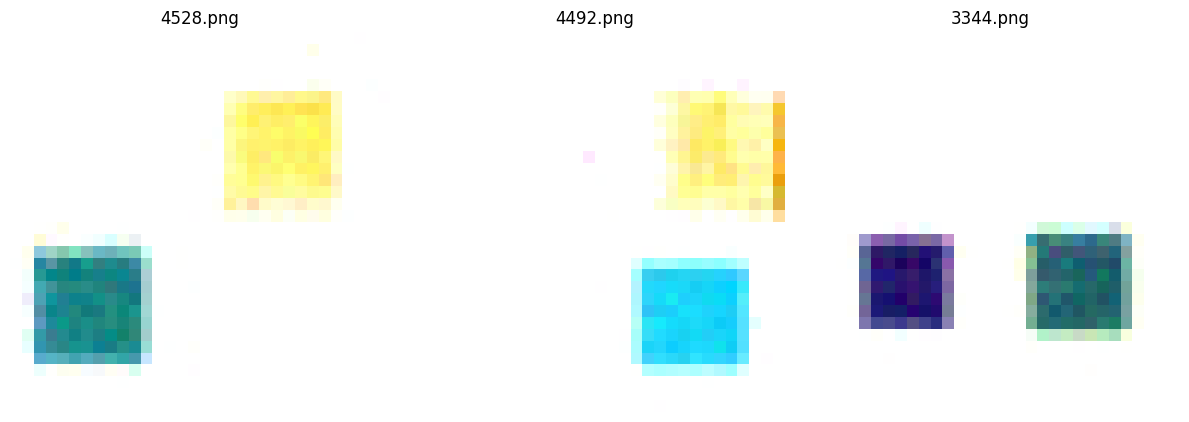

In [52]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images_from_list(image_folder, image_list_file):
    """
    读取图片文件名列表，并在指定文件夹中找到并显示这些图片。

    Args:
        image_folder (str): 包含图片的文件夹路径。
        image_list_file (str): 包含图片文件名的文本文件路径。
    """
    if not os.path.exists(image_list_file):
        print(f"Error: Image list file not found at {image_list_file}")
        return
    
    with open(image_list_file, "r") as f:
        image_filenames = [line.strip() for line in f.readlines()]

    if not image_filenames:
      print("No images found in the list.")
      return
    
    num_images = len(image_filenames)
    rows = int(num_images**0.5)
    cols = (num_images + rows -1 ) // rows
    
    plt.figure(figsize=(12, 12)) #调整显示大小

    for i, filename in enumerate(image_filenames):
        image_path = os.path.join(image_folder, filename)
        if not os.path.exists(image_path):
            print(f"Warning: Image not found at {image_path}")
            continue
        try:
          image = cv2.imread(image_path)
          if image is None:
              print(f"Warning: Failed to read image {image_path}")
              continue
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #调整颜色顺序

          plt.subplot(rows, cols, i + 1)
          plt.imshow(image)
          plt.title(os.path.basename(filename))
          plt.axis('off')
        except Exception as e:
          print(f"Error: Could not display image at {image_path}: {e}")

    plt.tight_layout() #自动调整子图间距
    plt.show()
    
    


# 设置参数
image_folder = base_path
image_list_file = image_folder + "/error_case_images.txt"  # 包含图片名称的文本文件路径

# 调用函数显示图片
display_images_from_list(image_folder, image_list_file)

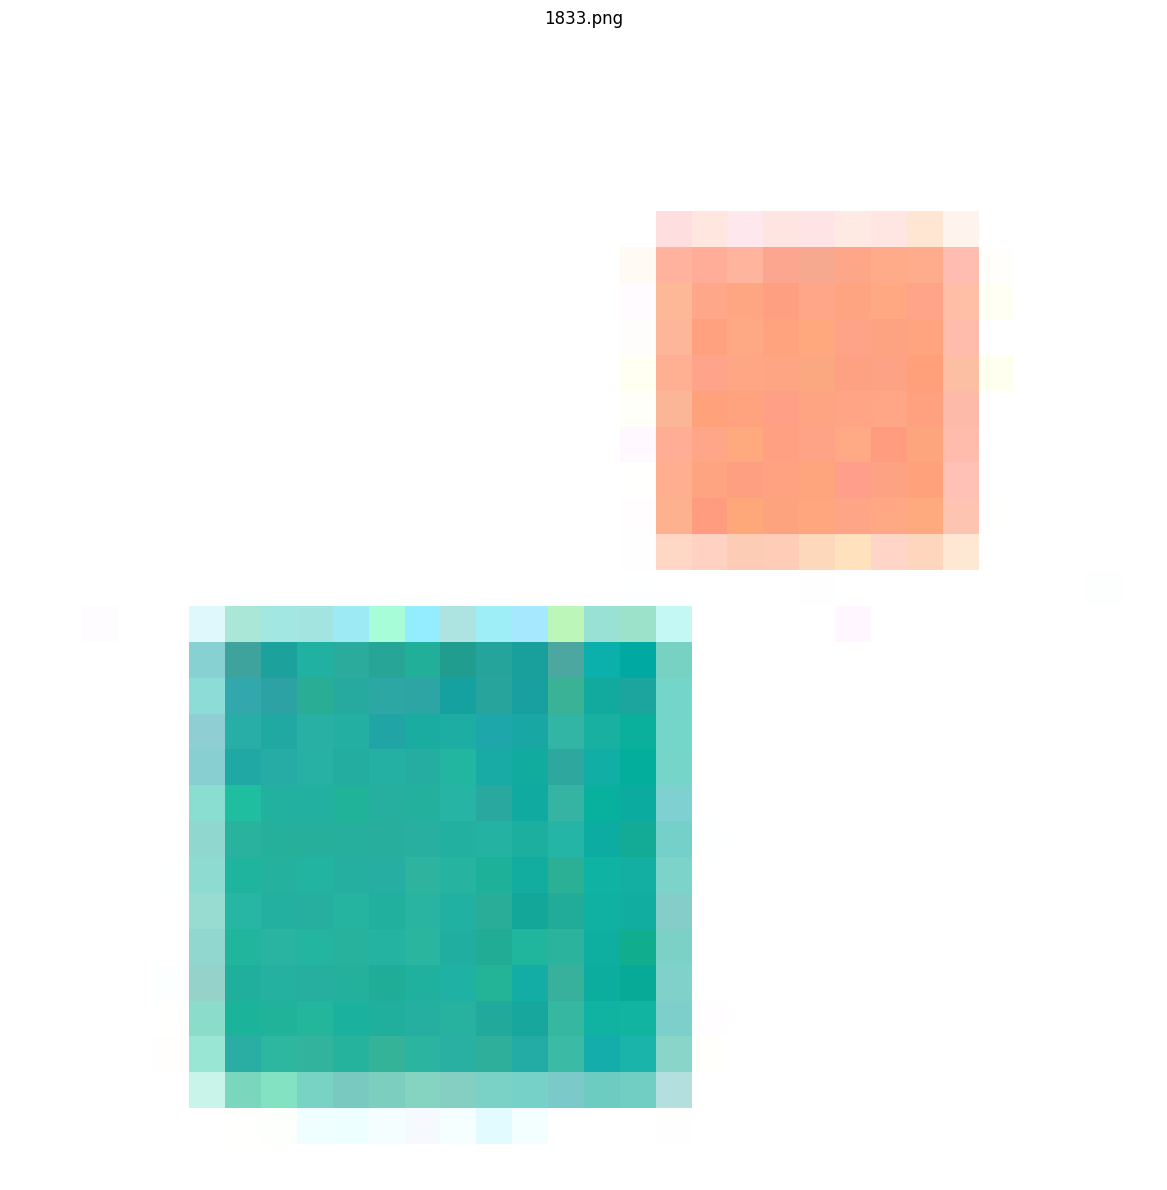

Deleting images: 100%|██████████| 1/1 [00:00<00:00, 1675.04it/s]

Images listed in /cpfs01/user/hanyujin/causal-dm/AR_diff/results/square_two_parallelFalse_patch16/generations/checkpoint.194400/error_case_images.txt have been deleted.
Image list file /cpfs01/user/hanyujin/causal-dm/AR_diff/results/square_two_parallelFalse_patch16/generations/checkpoint.194400/error_case_images.txt has been cleared.


In [50]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

def display_and_delete_images(image_folder, image_list_file):
    """
    读取图片文件名列表，显示图片，并删除指定文件夹中的图片文件。

    Args:
        image_folder (str): 包含图片的文件夹路径。
        image_list_file (str): 包含图片文件名的文本文件路径。
    """
    if not os.path.exists(image_list_file):
        print(f"Error: Image list file not found at {image_list_file}")
        return

    with open(image_list_file, "r") as f:
        image_filenames = [line.strip() for line in f.readlines()]
    
    if not image_filenames:
        print("No images found in the list.")
        return

    num_images = len(image_filenames)
    rows = int(num_images**0.5)
    cols = (num_images + rows -1 ) // rows

    plt.figure(figsize=(12, 12)) #调整显示大小


    for i, filename in enumerate(image_filenames):
        image_path = os.path.join(image_folder, filename)
        if not os.path.exists(image_path):
            print(f"Warning: Image not found at {image_path}")
            continue
    
        try:
            image = cv2.imread(image_path)
            if image is None:
              print(f"Warning: Failed to read image {image_path}")
              continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.subplot(rows, cols, i + 1)
            plt.imshow(image)
            plt.title(os.path.basename(filename))
            plt.axis('off')
        except Exception as e:
            print(f"Error: Could not display image at {image_path}: {e}")
    plt.tight_layout() #调整间距
    plt.show()
    
    
    for filename in tqdm(image_filenames, desc="Deleting images"):
      image_path = os.path.join(image_folder, filename)
      try:
          os.remove(image_path)
      except FileNotFoundError:
          print(f"Warning: File not found: {image_path}")
      except Exception as e:
          print(f"Error: Could not delete image {image_path}: {e}")
    
    
    with open(image_list_file, "w") as f:
        pass # 直接使用 "w" 模式打开文件，即可清空文件内容

    print(f"Images listed in {image_list_file} have been deleted.")
    print(f"Image list file {image_list_file} has been cleared.")

# 设置参数
# image_folder = "/cpfs01/user/hanyujin/causal-dm/results/perspective_type1/vis/epoch_400_1735000235.2558737"  # 图片所在的文件夹路径
# image_list_file = "/cpfs01/user/hanyujin/causal-dm/results/perspective_type1/vis/epoch_400_1735000235.2558737/error_case_images.txt"  # 包含图片名称的文本文件路径

# 调用函数显示图片并删除图片
display_and_delete_images(image_folder, image_list_file)

Processing Images:   0%|          | 0/6004 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 6004/6004 [00:07<00:00, 823.50it/s]


Results: {'Correct': 107, 'Fail': 5894, 'Error': 0}


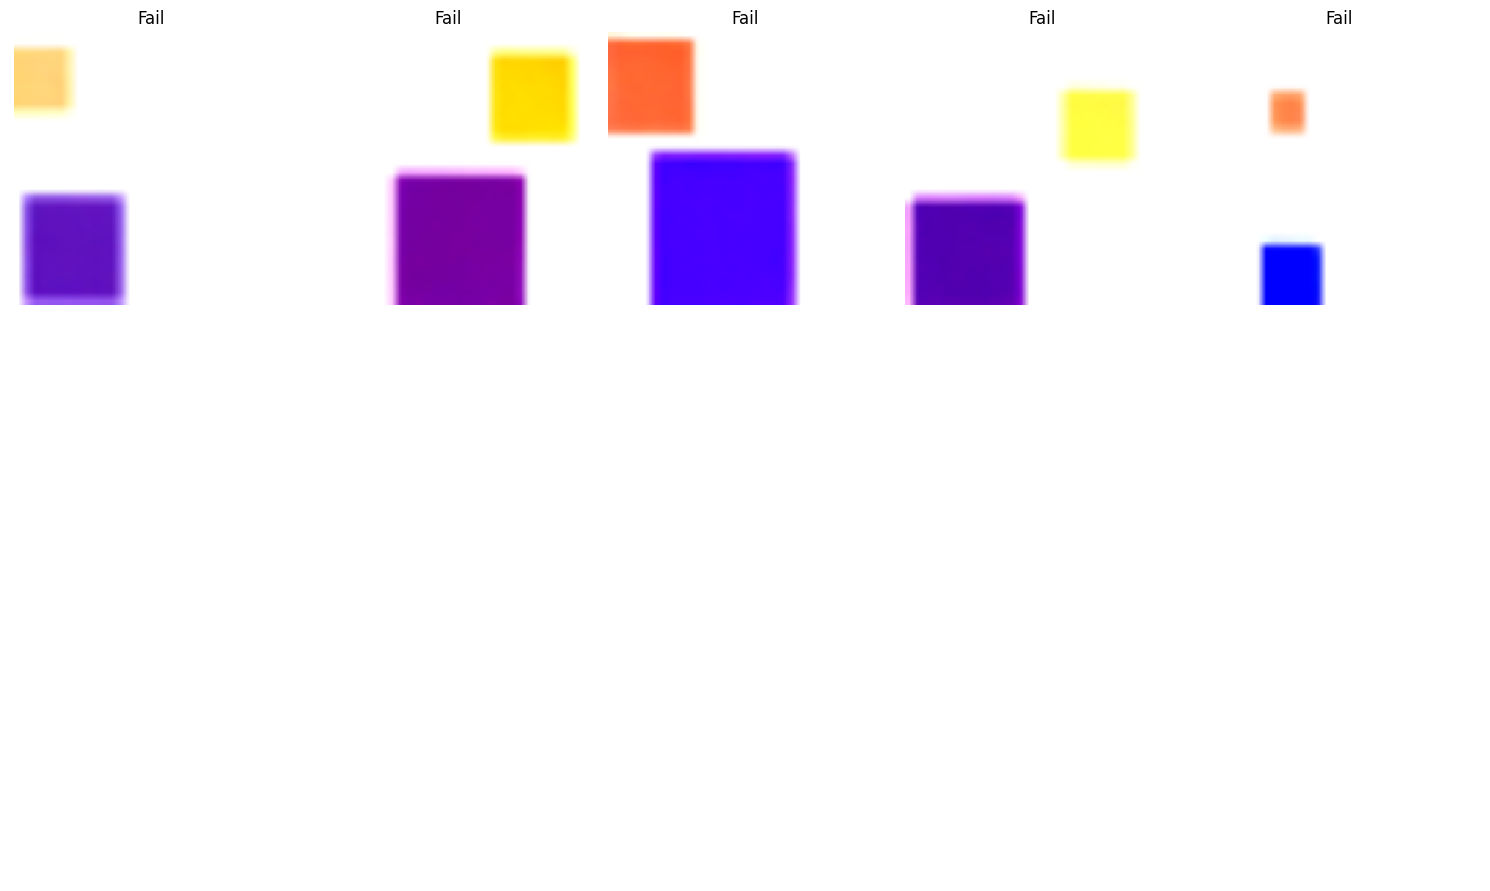

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
fail_cases = []
error_cases = []
correct_cases = []

# 颜色增强函数
def enhance_image(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_l = clahe.apply(l)
    enhanced_lab = cv2.merge((enhanced_l, a, b))
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
    return enhanced_image

# 降噪函数
def reduce_noise(binary_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    binary_cleaned = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    binary_cleaned = cv2.morphologyEx(binary_cleaned, cv2.MORPH_OPEN, kernel)
    return binary_cleaned

# 图像预处理函数
def preprocess_image(image):
    enhanced_image = enhance_image(image)
    hsv = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2HSV)

    lower_yellow = np.array([0, 20, 100])
    upper_yellow = np.array([40, 255, 255])
    lower_blue = np.array([60, 20, 20])
    upper_blue = np.array([180, 255, 255])

    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    color_mask = cv2.bitwise_or(mask_yellow, mask_blue)

    gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    combined_mask = cv2.bitwise_or(color_mask, binary)
    clean_mask = reduce_noise(combined_mask)

    return clean_mask

# 检测正方形函数
def detect_squares(clean_mask, min_size=10, aspect_ratio_tolerance=0.1):
    contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    squares = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        if abs(aspect_ratio - 1.0) <= aspect_ratio_tolerance and w > min_size and h > min_size:
            squares.append((x, y, w, h))
    return squares

def visualize_results():
    # 定义子图网格
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))

    # Fail cases
    for i, ax in enumerate(axes[0]):
        if i < len(fail_cases):
            image = cv2.imread(fail_cases[i])
            image = cv2.resize(image, (100, 100))
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            ax.set_title("Fail")
        ax.axis("off")

    # Error cases
    for i, ax in enumerate(axes[1]):
        if i < len(error_cases):
            image = cv2.imread(error_cases[i])
            image = cv2.resize(image, (100, 100))
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            ax.set_title("Error")
        ax.axis("off")

    # Correct cases
    for i, ax in enumerate(axes[2]):
        if i < len(correct_cases):
            _, marked_image = correct_cases[i]
            marked_image = cv2.resize(marked_image, (100, 100))
            ax.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
            ax.set_title("Correct")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# 处理单张图片
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return "fail", None
    clean_mask = preprocess_image(image)
    squares = detect_squares(clean_mask)

    if len(squares) != 2:
        fail_cases.append(image_path)
        return "fail", None

    squares = sorted(squares, key=lambda rect: rect[1])
    l1, l2 = squares[0][2], squares[1][2]

    if l2 <= l1:
        error_cases.append(image_path)
        return "error", None

    return "correct", (l1, l2)

# 批量处理文件夹
def process_images_in_folder(folder_path):
    results = {"Correct": 0, "Fail": 0, "Error": 0}
    for filename in tqdm(os.listdir(folder_path), desc="Processing Images"):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            result, _ = process_image(image_path)
            results[result.capitalize()] += 1
    return results



# 示例文件夹路径
folder_path = "/cpfs01/user/hanyujin/causal-dm/results/square_two/vis/epoch_1000_1735093891.1470206"
results = process_images_in_folder(folder_path)

print(f"Results: {results}")
visualize_results()

In [39]:
import os
import shutil
from tqdm import tqdm
import re

def merge_and_rename_images(source_folder, destination_folder):
    """
    Moves images from source to destination folder, renaming based on patterns.

    Handles both "number.png" and "prefix_number.png" naming.
    """
    if not os.path.exists(source_folder):
        print(f"Error: Source folder not found at {source_folder}")
        return
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder, exist_ok=True)

    image_files = [f for f in os.listdir(source_folder) if f.endswith('.png')]

    for filename in tqdm(image_files, desc=f"Copying images from {source_folder}"):
        image_path = os.path.join(source_folder, filename)
        
        # Modified regex to match both types of file names
        match = re.match(r"([a-zA-Z_]*)(\d+)(\.png)", filename)
        if match:
            prefix = match.group(1) if match.group(1) else "" # handle case when no prefix
            number_str = match.group(2)
            suffix = match.group(3)
            
            try:
                number = int(number_str)
                new_number = number + 3000
                new_filename = f"{prefix}{new_number}{suffix}"
                new_image_path = os.path.join(destination_folder, new_filename)
                 # Use copy2 to preserve metadata
                shutil.copy2(image_path, new_image_path)
            except ValueError:
                print(f"Warning: Could not convert number to int in {filename}, copying with original name")
                new_image_path = os.path.join(destination_folder, filename)
                shutil.copy2(image_path, new_image_path)
        else:
            print(f"Warning: Could not rename image {filename}. Copying with original name.")
            new_image_path = os.path.join(destination_folder, filename)
            shutil.copy2(image_path, new_image_path)
    
    print("Image merging and renaming complete.")

# 设置参数
source_folder = "/cpfs01/user/hanyujin/causal-dm/results/square_contrastive_ternary/vis/epoch_1000_1735546329.2320316"
destination_folder = "/cpfs01/user/hanyujin/causal-dm/results/square_contrastive_ternary/vis/epoch_1000_1735544123.9909024"


# 执行合并和重命名操作
merge_and_rename_images(source_folder, destination_folder)

Copying images from /cpfs01/user/hanyujin/causal-dm/results/square_contrastive_ternary/vis/epoch_1000_1735546329.2320316:   0%|          | 0/3001 [00:00<?, ?it/s]

Copying images from /cpfs01/user/hanyujin/causal-dm/results/square_contrastive_ternary/vis/epoch_1000_1735546329.2320316:  42%|████▏     | 1256/3001 [00:21<00:28, 60.21it/s]

Copying images from /cpfs01/user/hanyujin/causal-dm/results/square_contrastive_ternary/vis/epoch_1000_1735546329.2320316: 100%|██████████| 3001/3001 [00:51<00:00, 57.80it/s]

Image merging and renaming complete.


/tmp/ipykernel_1707759/638265954.py:111: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.4], [0, 0.6], 'k--', label='y=1.5x', color='gray')  # y=1.5x 的灰色虚线


Scatter plot and fit saved to /cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/square_two/square_size_relationship.pdf


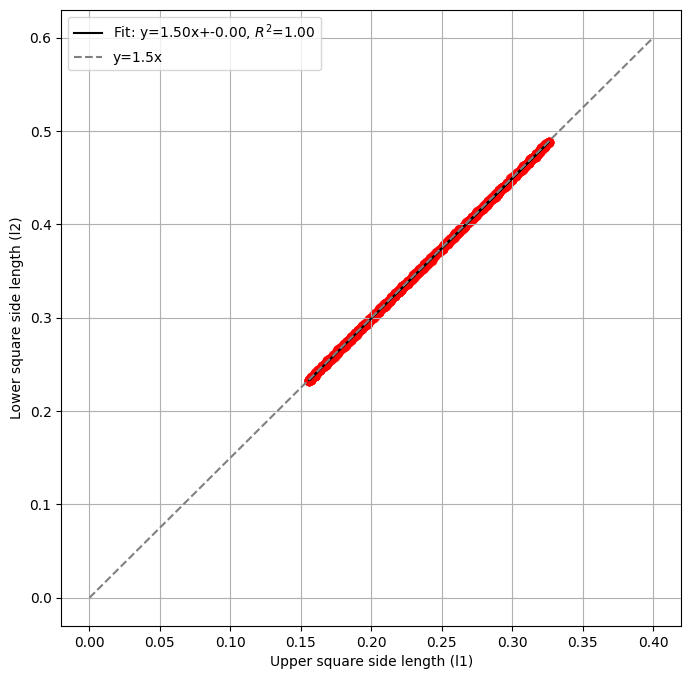

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

def find_squares_in_image(image_path, image_size=32):
    """
    查找图片中的两个正方形并返回它们的边长，进行标准化处理。
    :param image_path: 图片文件路径
    :param image_size: 图片的尺寸
    :return: 上半部分和下半部分正方形的边长（l1, l2），标准化后的值
    """
    # 读取图像

    image = cv2.imread(image_path)
    height, width = image.shape[:2]  # height 是图像的高度，width 是图像的宽度
    # print(f"Actual image size - Width: {width}, Height: {height}")  # 打印实际尺寸
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 转为灰度图像
    
    # 使用Canny边缘检测
    edges = cv2.Canny(image, 50, 150)

    # 查找轮廓
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    squares = []

    for contour in contours:
        # 逼近轮廓为多边形
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) == 4:  # 如果是四边形，考虑为正方形
            # 计算边长
            x, y, w, h = cv2.boundingRect(approx)
            square_size = max(w, h)  # 保证正方形的边长是最小边的长度
            squares.append((x, y, square_size))
    
    # 确保我们得到了两个正方形，一个在上半部分，一个在下半部分
    if len(squares) == 2:
        # 根据y坐标判断哪个正方形在上半部分，哪个在下半部分
        squares = sorted(squares, key=lambda x: x[1])  # 按y坐标排序
        l1 = squares[0][2]  # 上半部分的正方形边长
        l2 = squares[1][2]  # 下半部分的正方形边长

        # 打印原始边长
        # print(f"Original l1: {l1}, l2: {l2}")

        # 进行标准化，除以图片尺寸 image_size
        l1_normalized = l1 / image_size
        l2_normalized = l2 / image_size

        # 打印标准化后的边长
        # print(f"Normalized l1: {l1_normalized}, l2: {l2_normalized}")

        return l1_normalized, l2_normalized
    return None, None  # 如果没有找到两个正方形

def generate_squares_data(base_path, image_size=32, images_per_class=1000):
    """
    遍历文件夹中的图片，提取正方形边长并返回标准化数据。
    :param base_path: 图片所在的文件夹路径
    :param image_size: 图片尺寸
    :param images_per_class: 每个类别生成的图片数量
    :return: 正方形边长标准化数据
    """
    squares_data = []
    base_path = base_path + '/images'
    # 遍历文件夹中的图片
    for filename in os.listdir(base_path):
        if filename.endswith('.png'):  # 只处理PNG文件
            image_path = os.path.join(base_path, filename)

            # 查找图片中的正方形边长，并进行标准化
            l1, l2 = find_squares_in_image(image_path, image_size)
            if l1 is not None and l2 is not None:
                squares_data.append((l1, l2))

    return np.array(squares_data)

def plot_square_data(squares_data, base_path):
    """
    绘制正方形边长的散点图，并进行线性拟合。
    :param squares_data: 正方形边长数据
    :param base_path: 图片文件夹路径，用于保存图表
    """
    x = squares_data[:, 0]  # 上半部分正方形的边长 l1
    y = squares_data[:, 1]  # 下半部分正方形的边长 l2
    x_min, x_max = np.percentile(x, [2.5, 97.5])
    y_min, y_max = np.percentile(y, [2.5, 97.5])
    mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)

    # 筛选有效数据点
    x = x[mask]
    y= y[mask]
    # labels = labels[mask]
    # 使用线性回归模型拟合直线
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)

    # 绘制散点图和拟合直线
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, color='red', alpha=0.6)
    plt.plot(x, y_pred, color='black', label=f"Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}")
    plt.plot([0, 0.4], [0, 0.6], 'k--', label='y=1.5x', color='gray')  # y=1.5x 的灰色虚线
    plt.xlabel('Upper square side length (l1)')
    plt.ylabel('Lower square side length (l2)')
    plt.legend()
    plt.grid(True)
    # plt.tight_layout()

    # 保存图表为PDF
    pdf_path = os.path.join(base_path, "square_size_relationship.pdf")
    # plt.savefig(pdf_path)
    print(f"Scatter plot and fit saved to {pdf_path}")

# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/square_two"
image_size = 770

# 提取正方形数据并进行标准化
squares_data = generate_squares_data(base_path, image_size)

# 绘制散点图并进行拟合
if len(squares_data) > 0:
    plot_square_data(squares_data, base_path)
else:
    print("No valid squares data found.")


## Contrastive Data

Generating images for type_0...


  6%|▌         | 120/2000 [00:04<00:55, 33.92it/s]/tmp/ipykernel_2109934/3071907594.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))
100%|██████████| 2000/2000 [01:09<00:00, 28.64it/s]


Image generation complete.


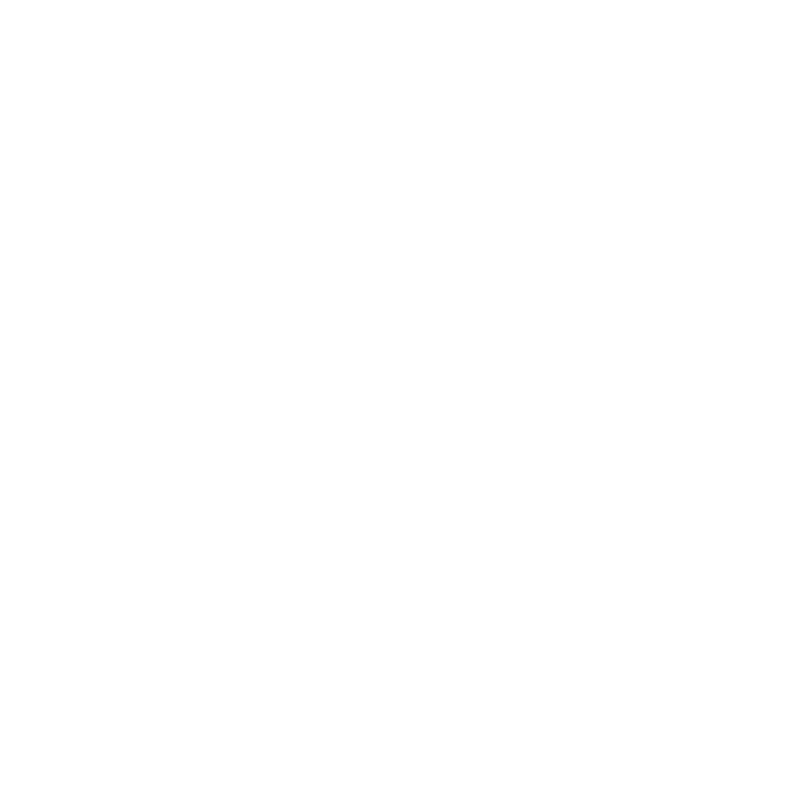

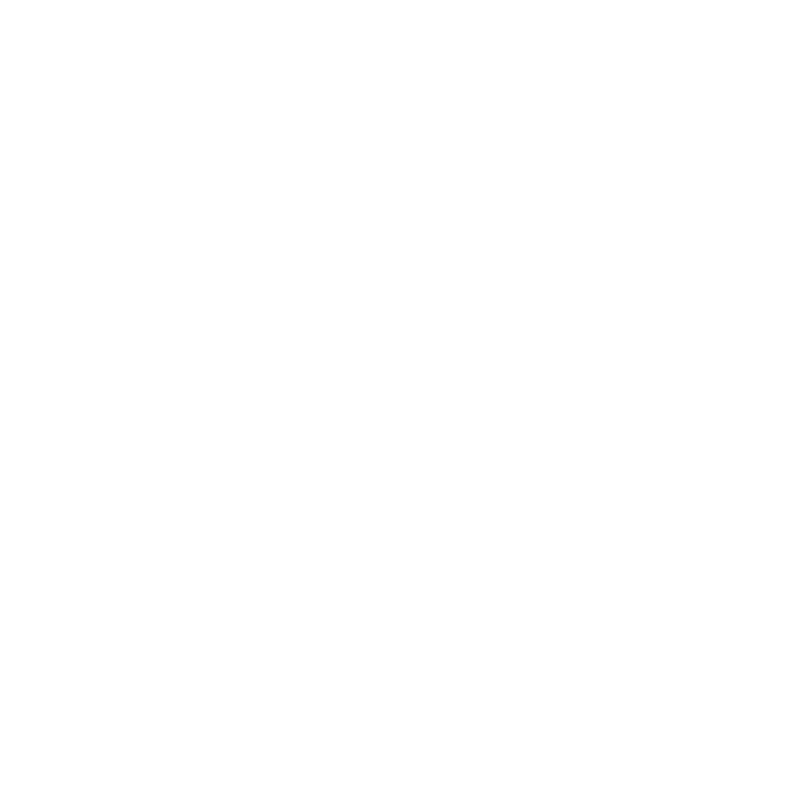

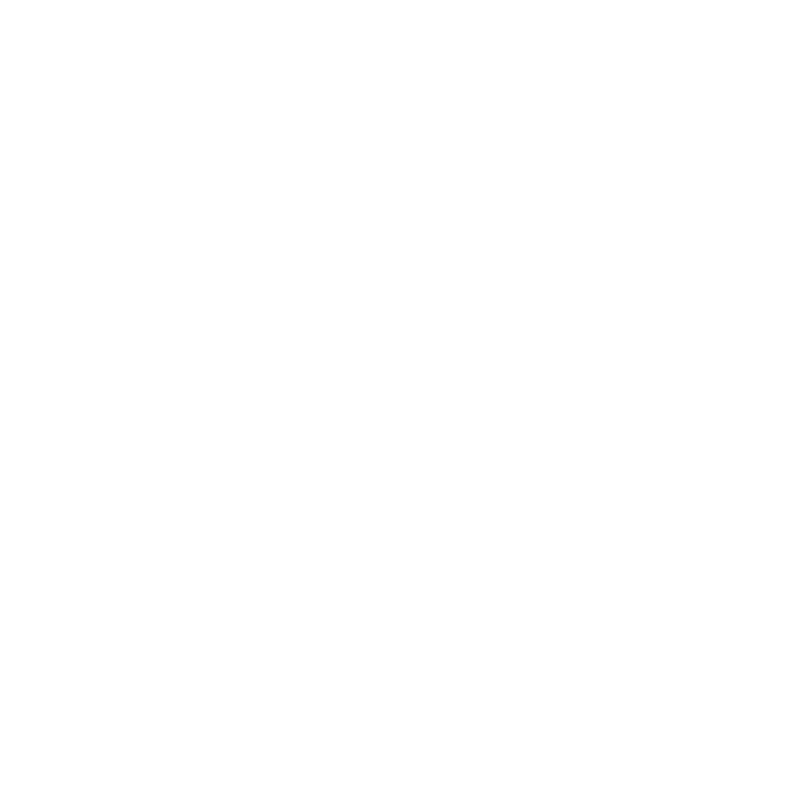

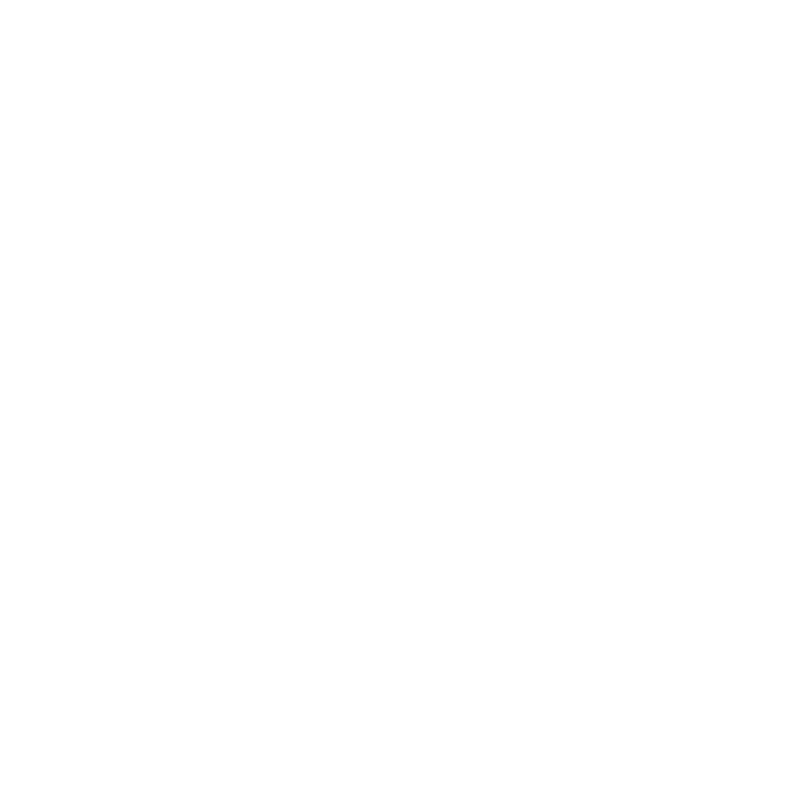

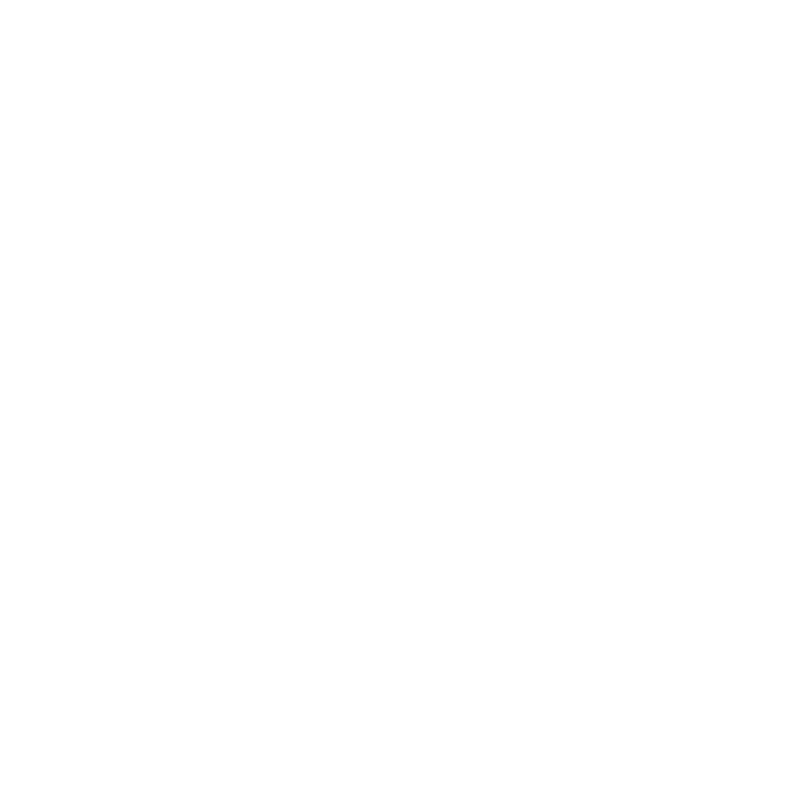

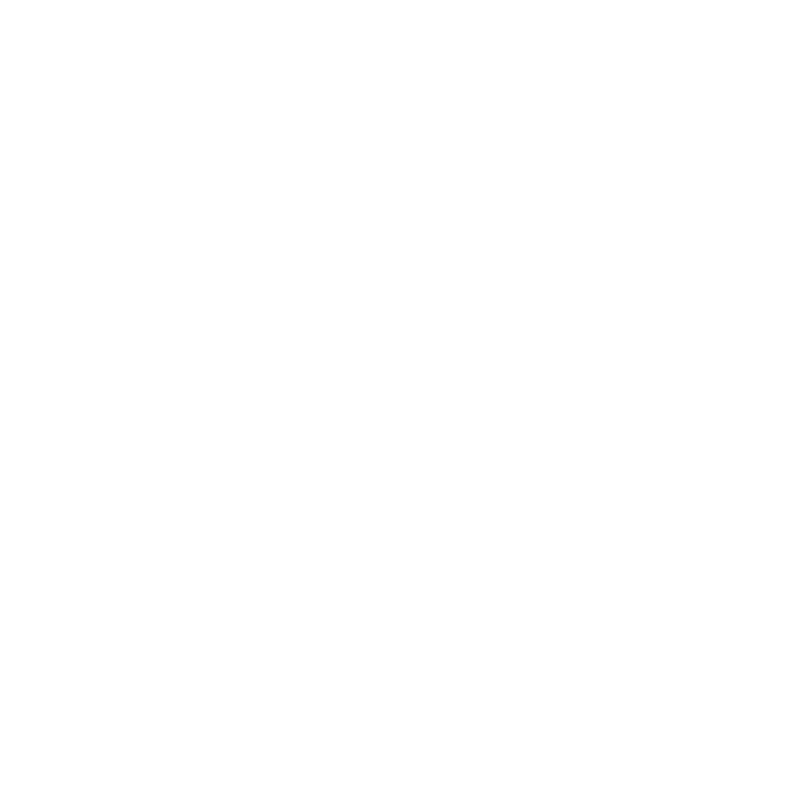

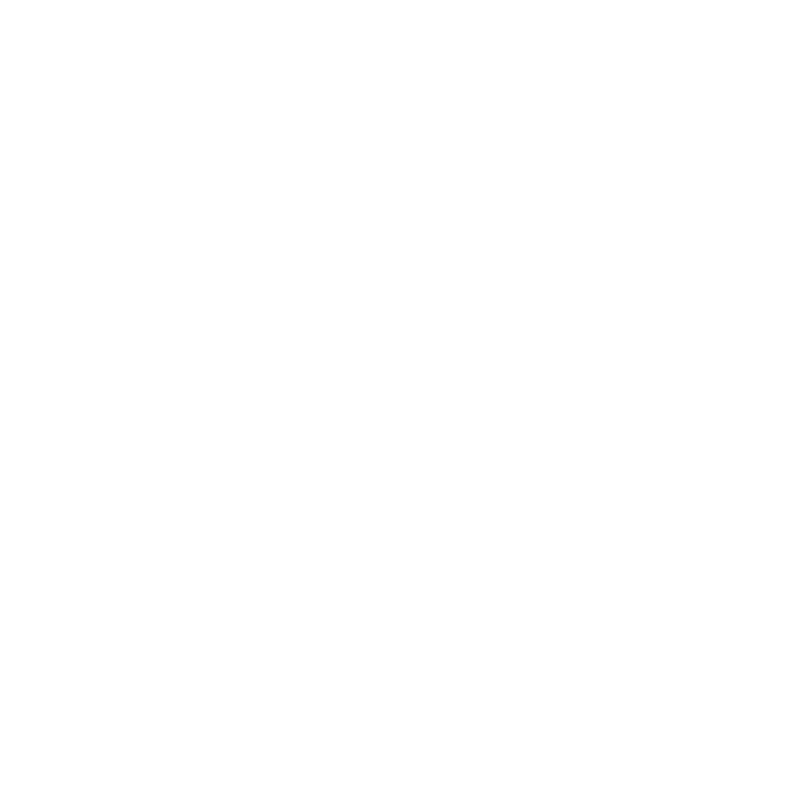

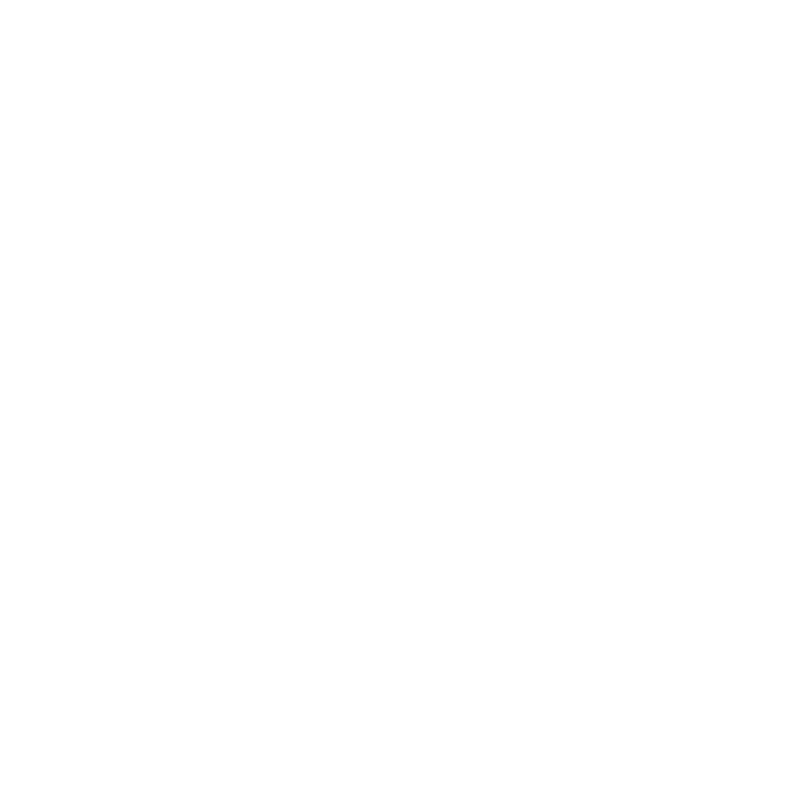

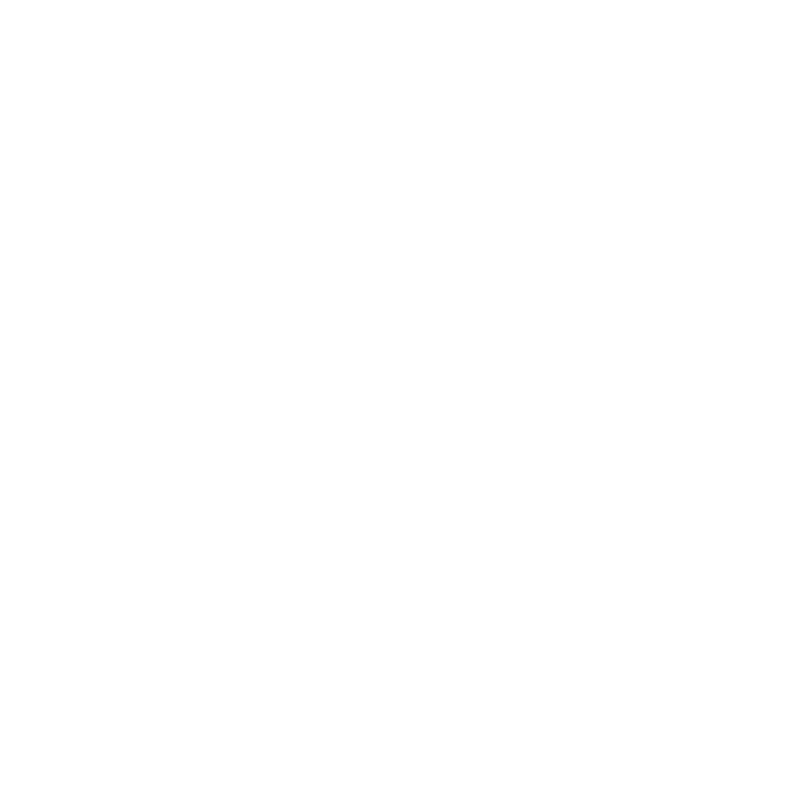

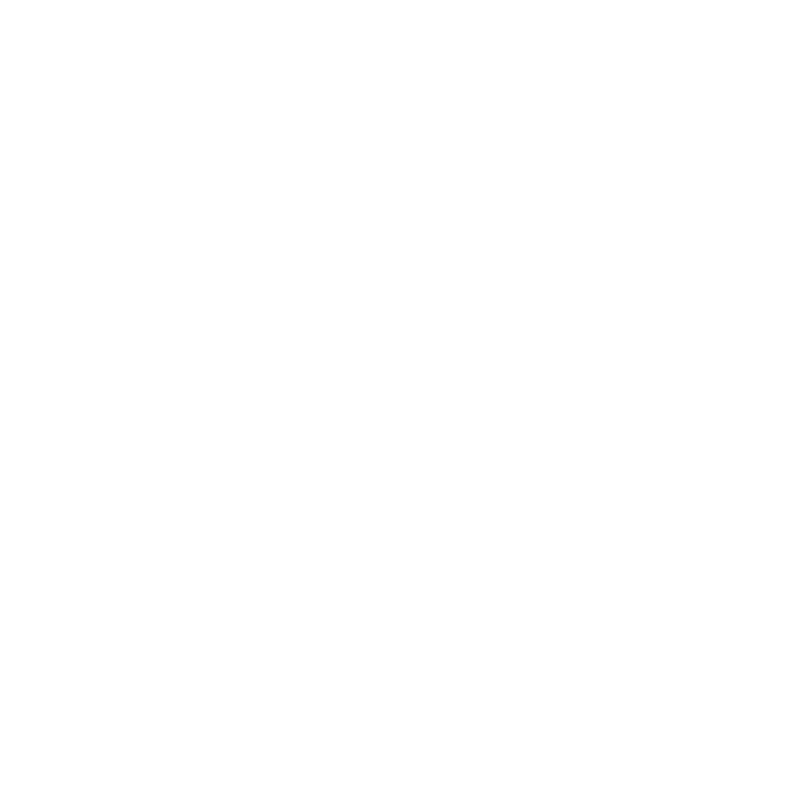

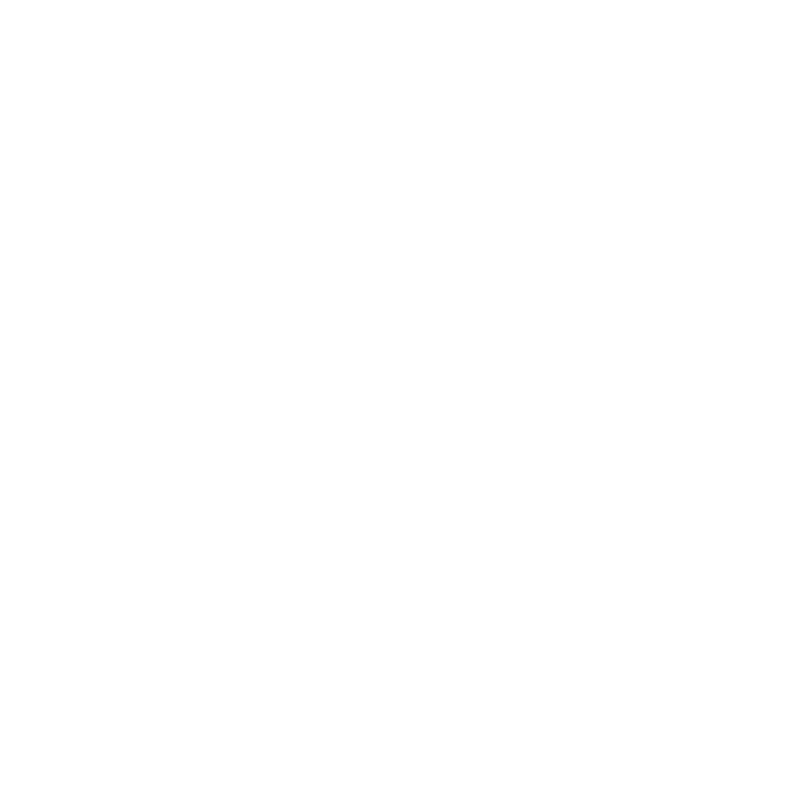

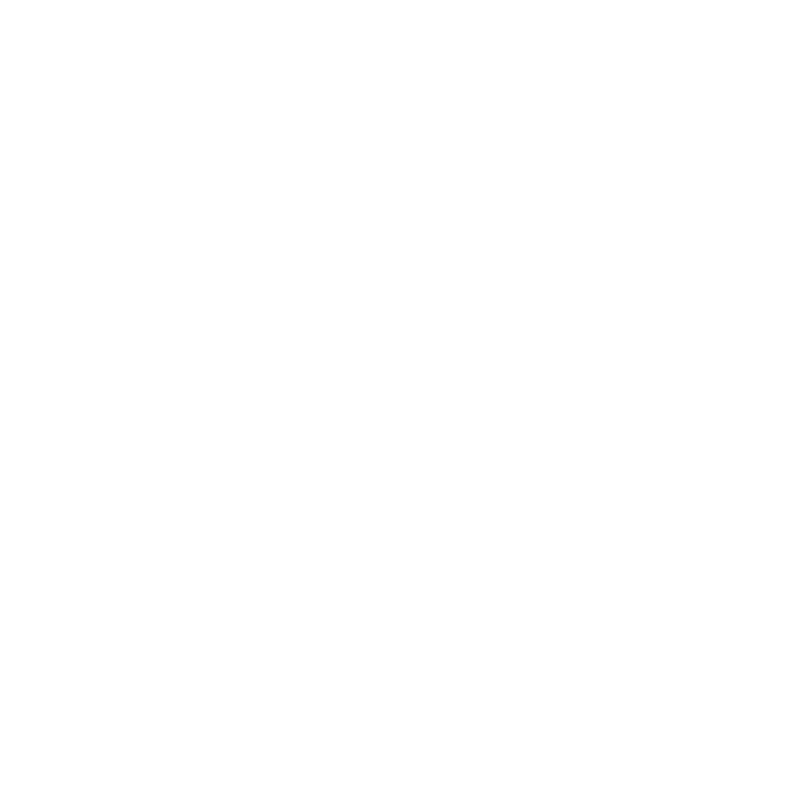

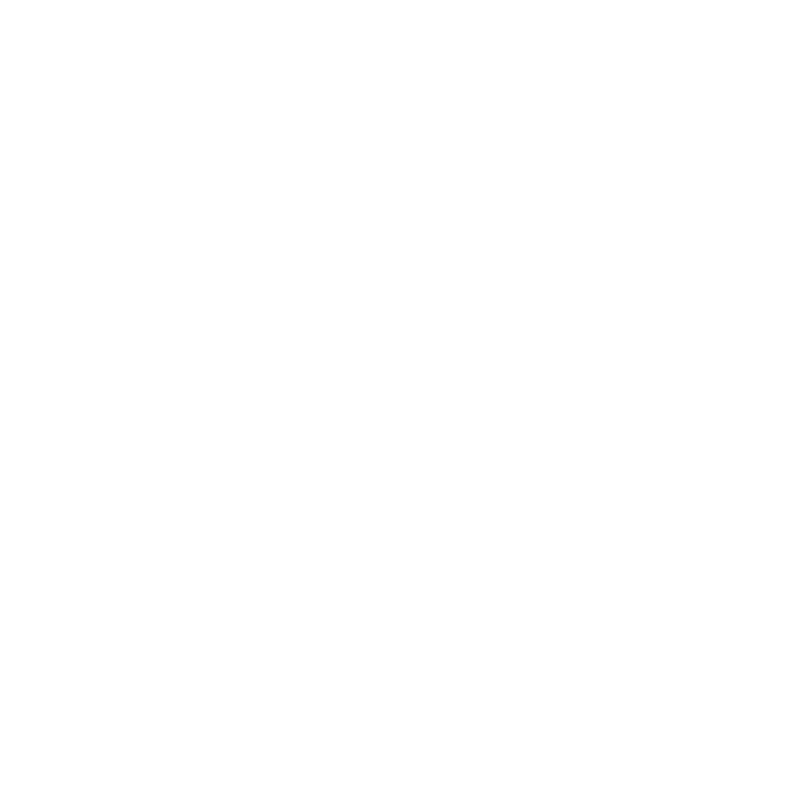

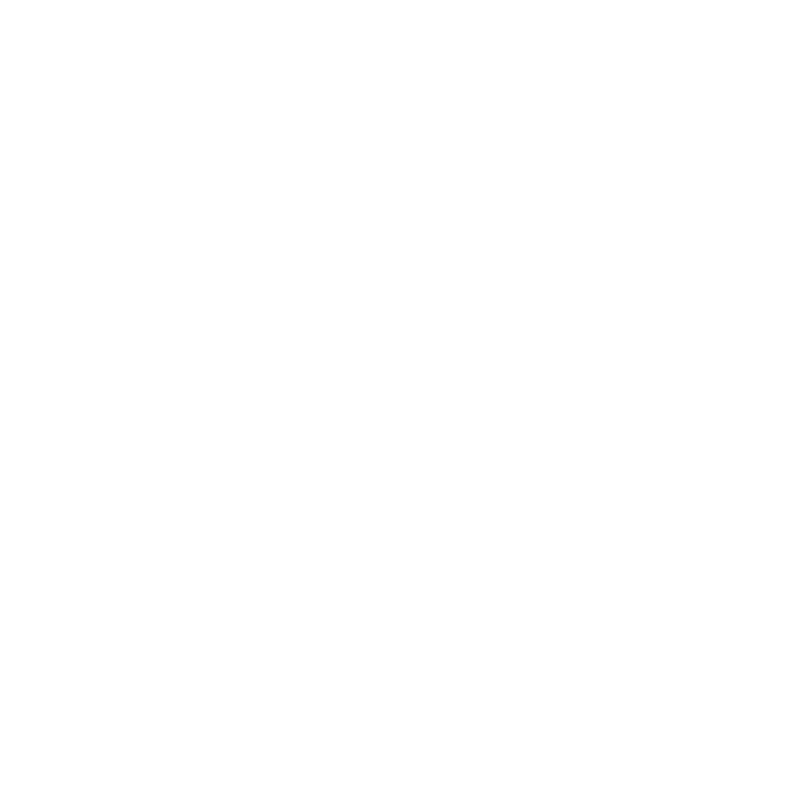

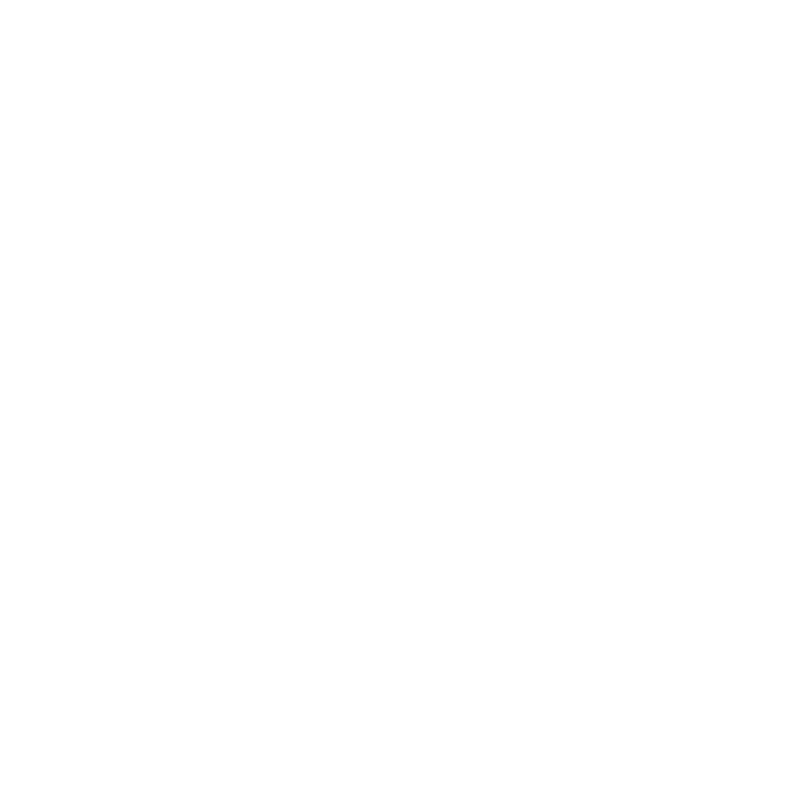

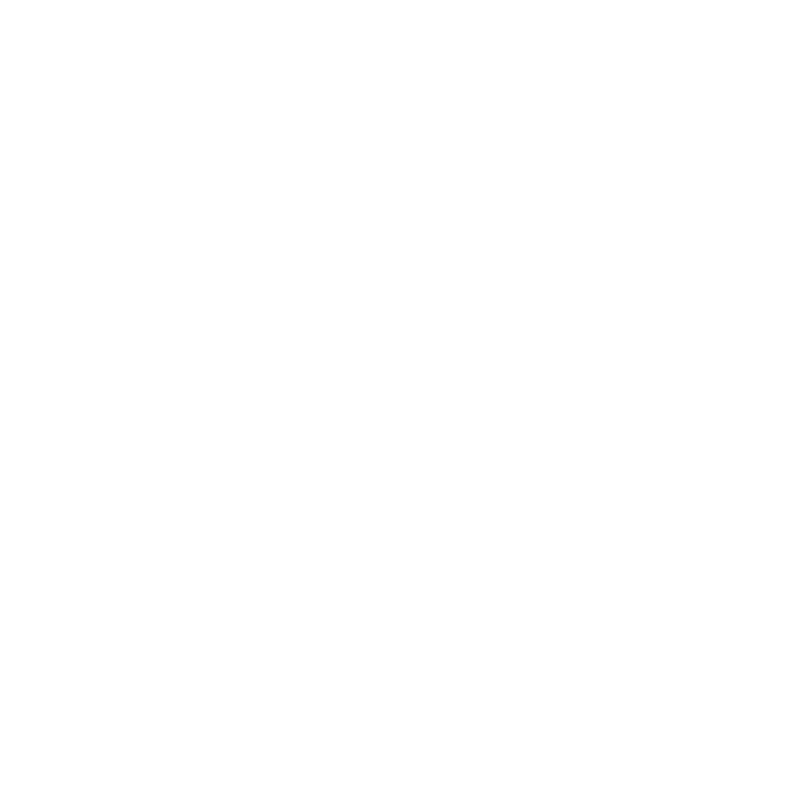

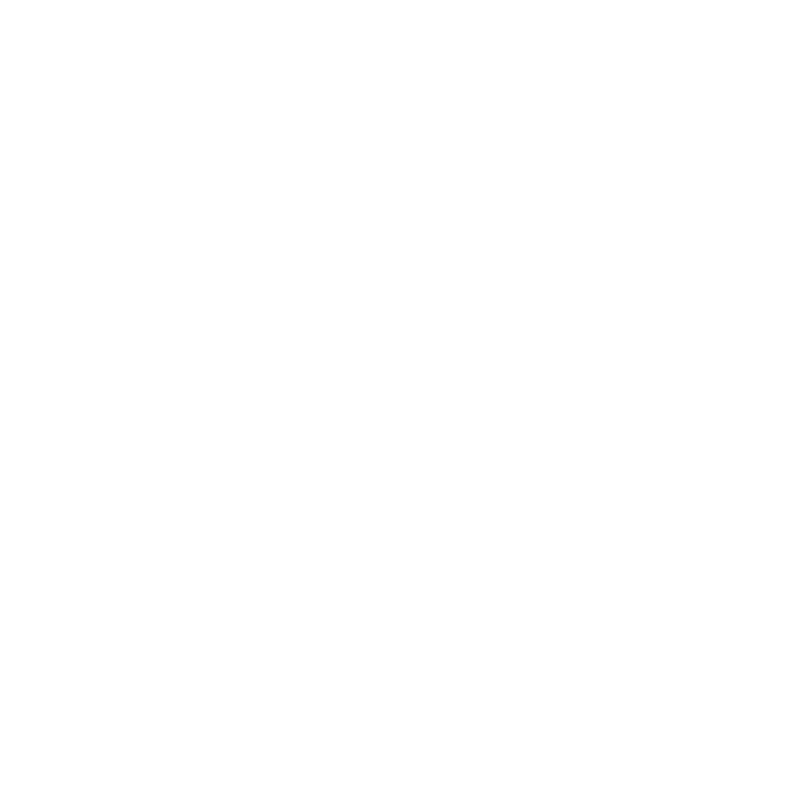

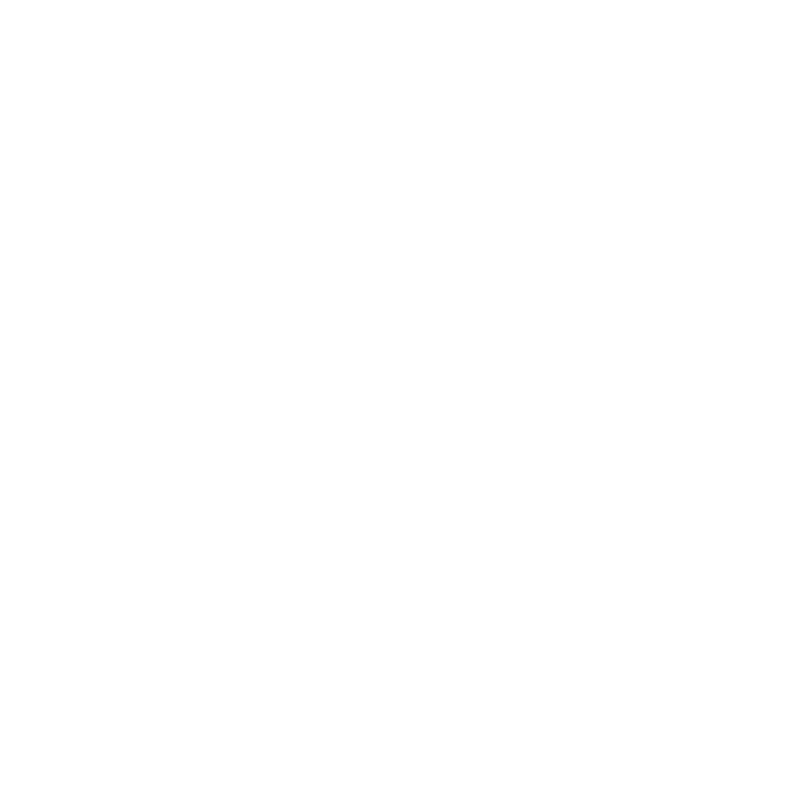

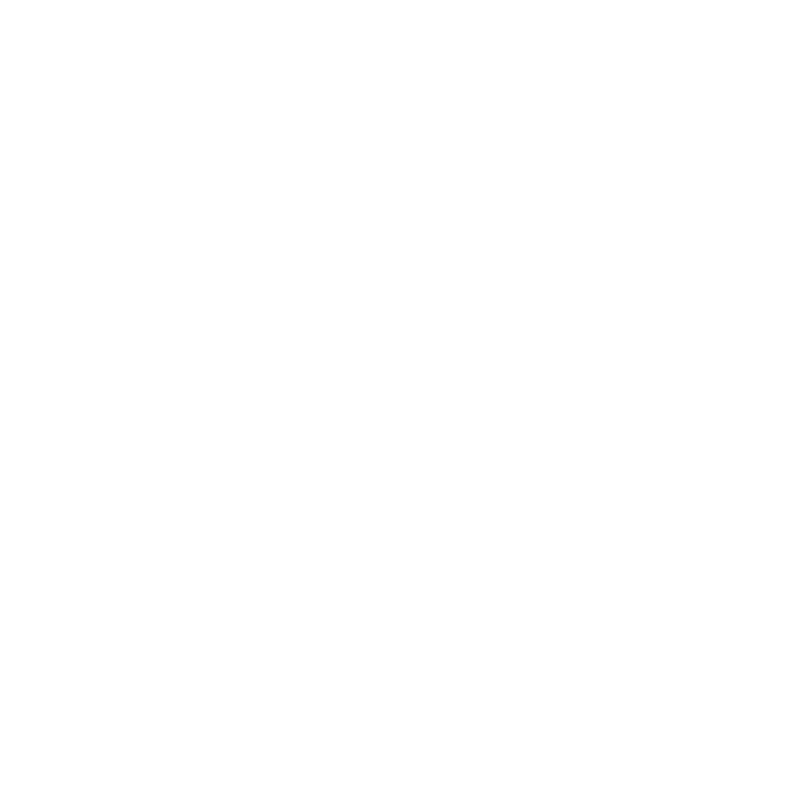

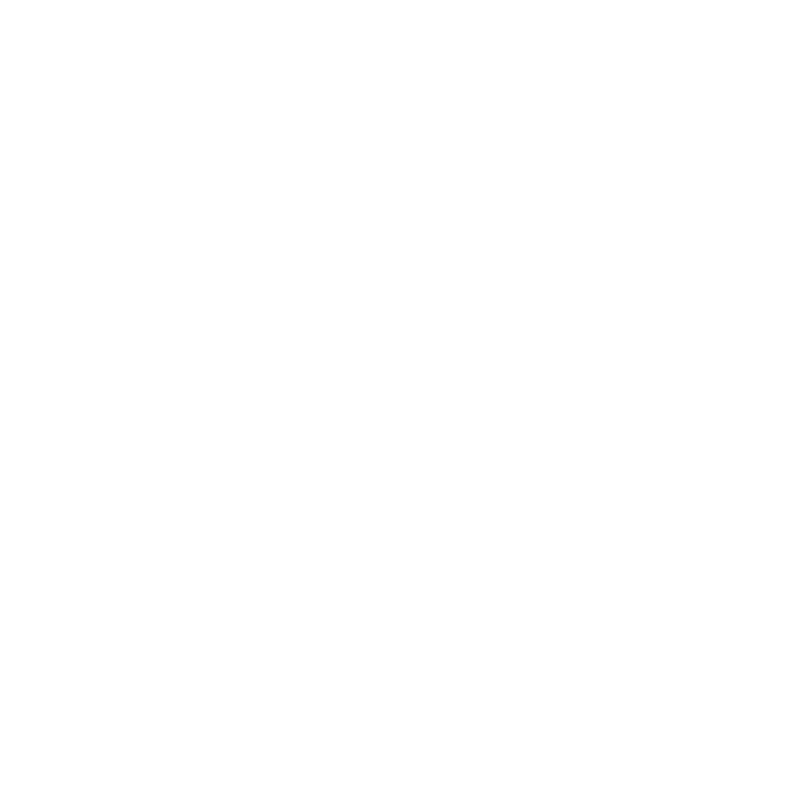

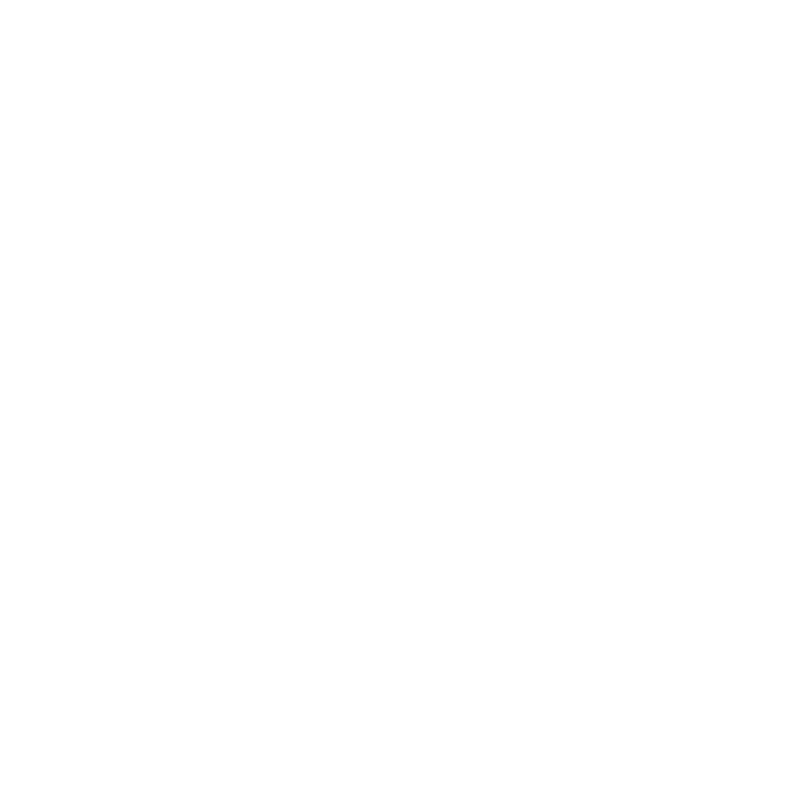

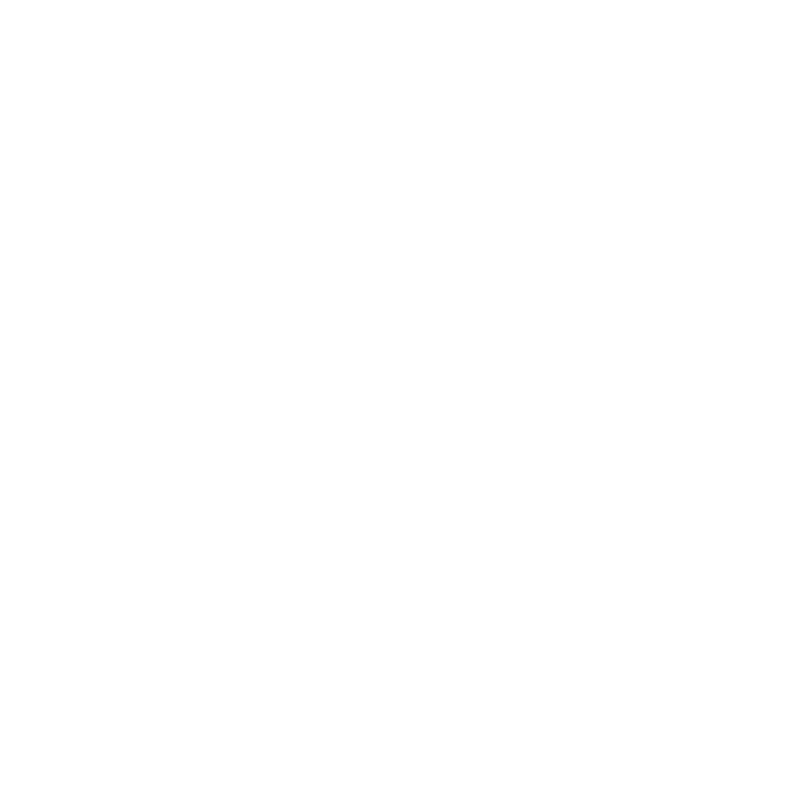

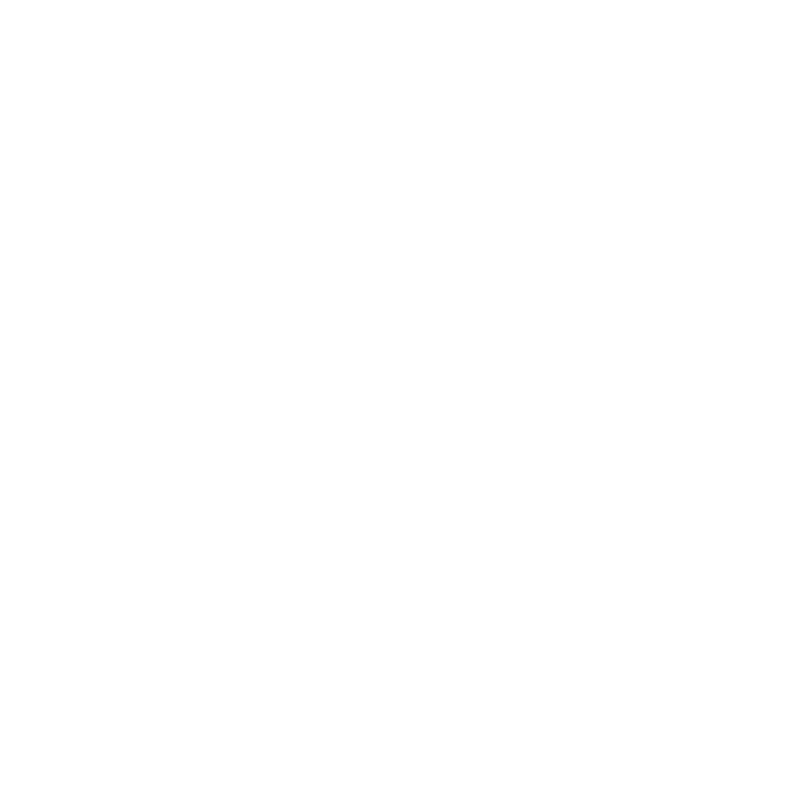

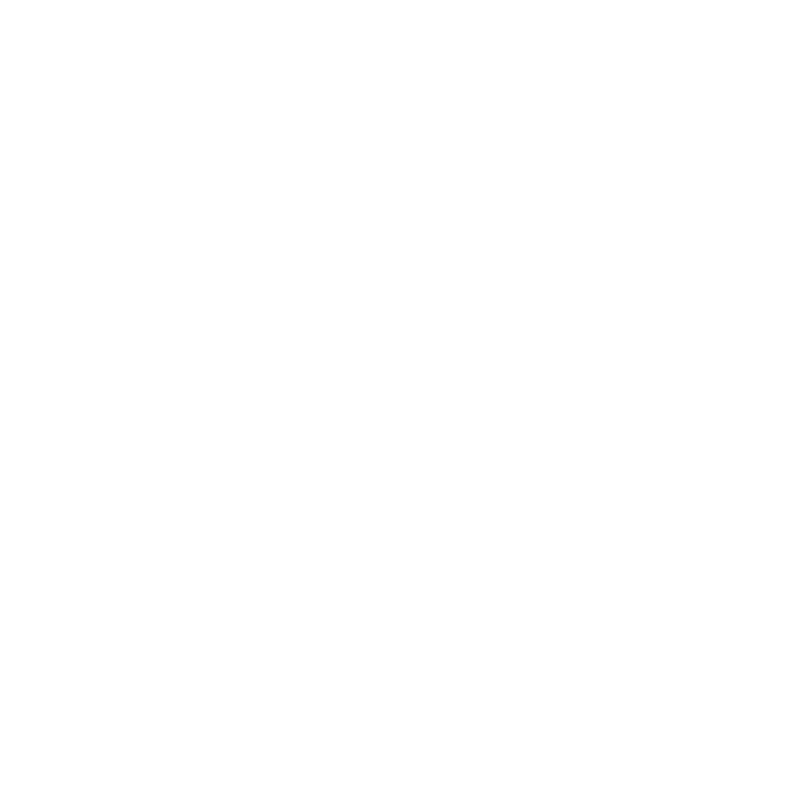

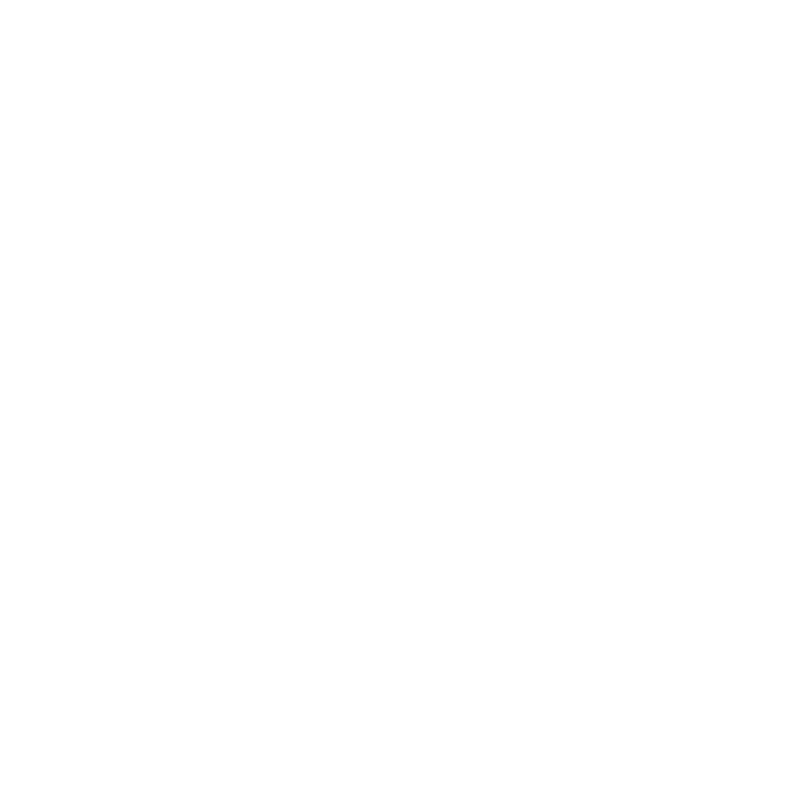

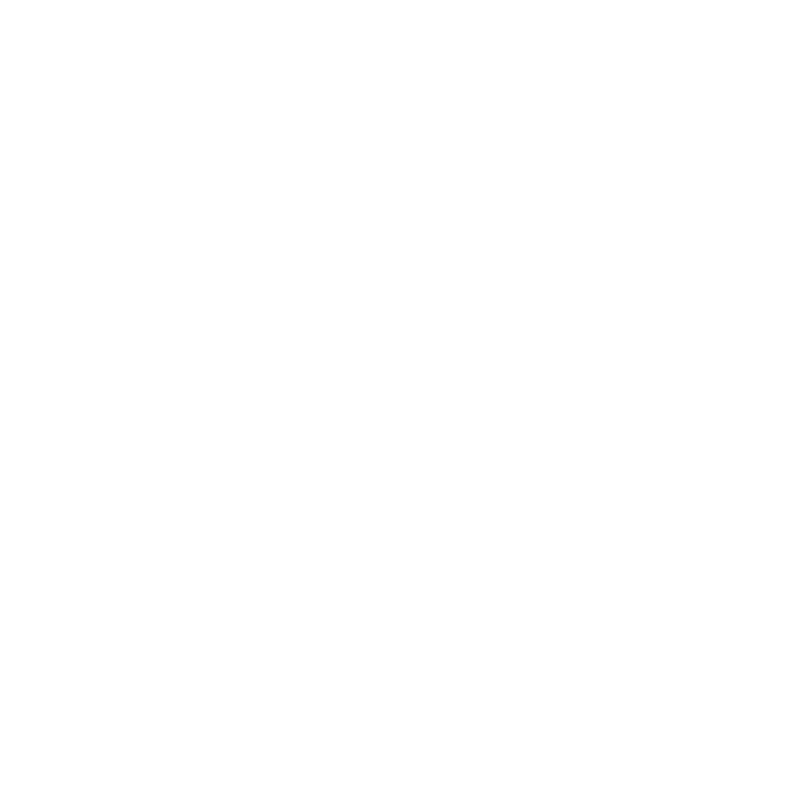

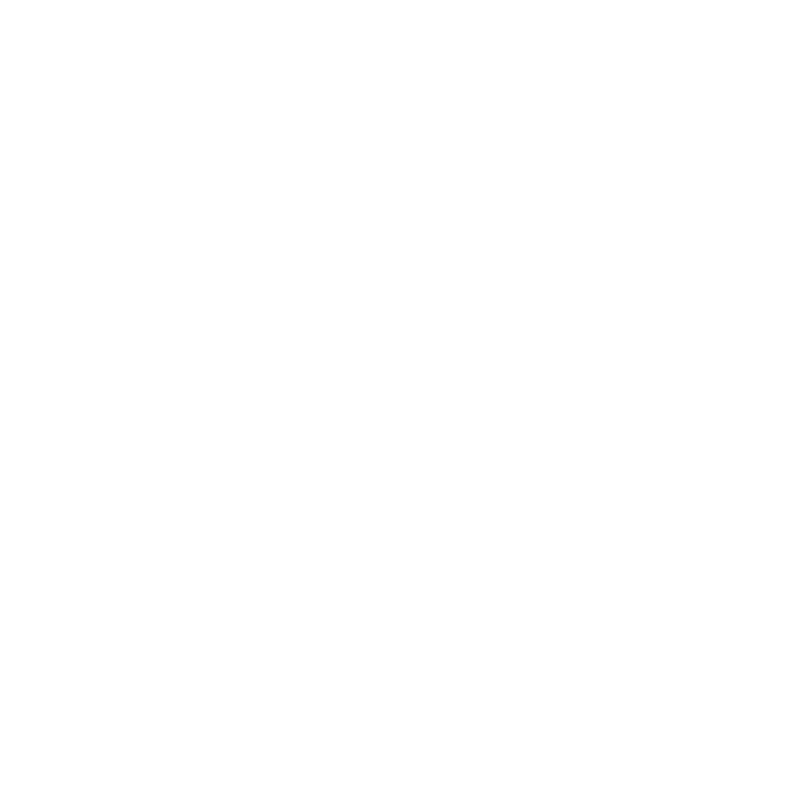

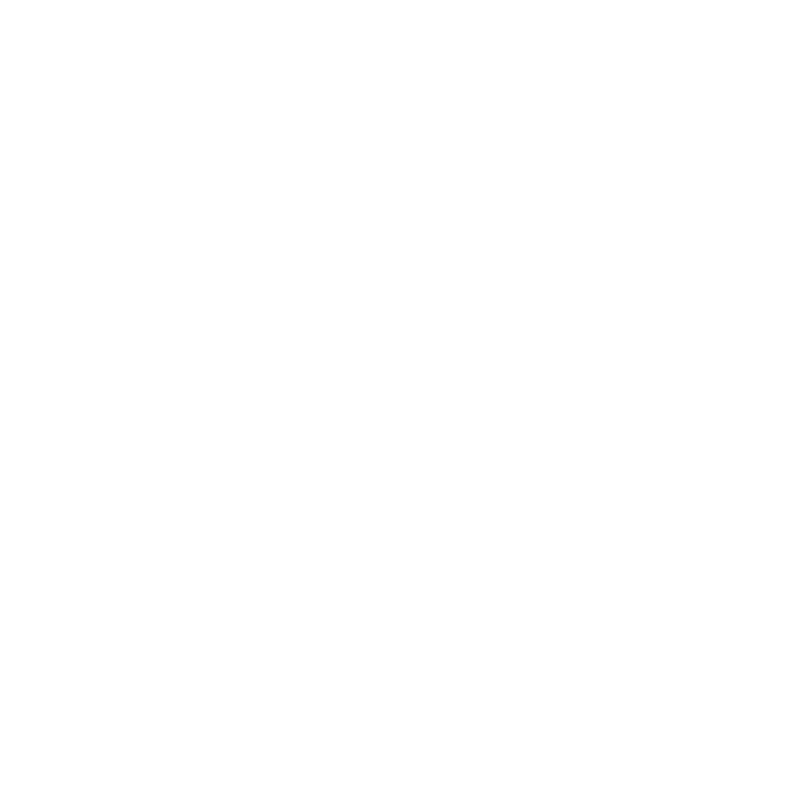

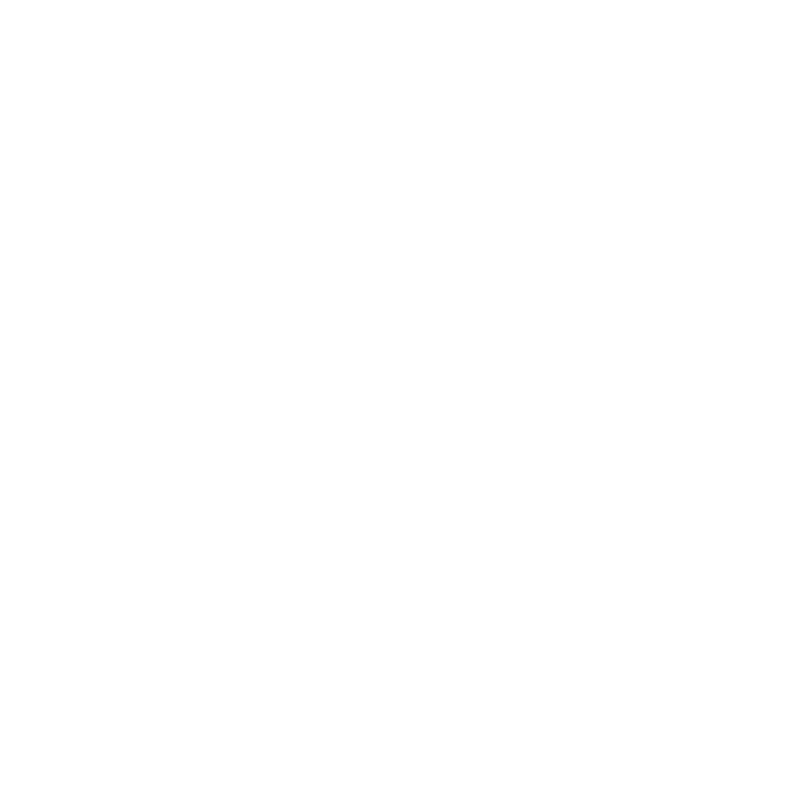

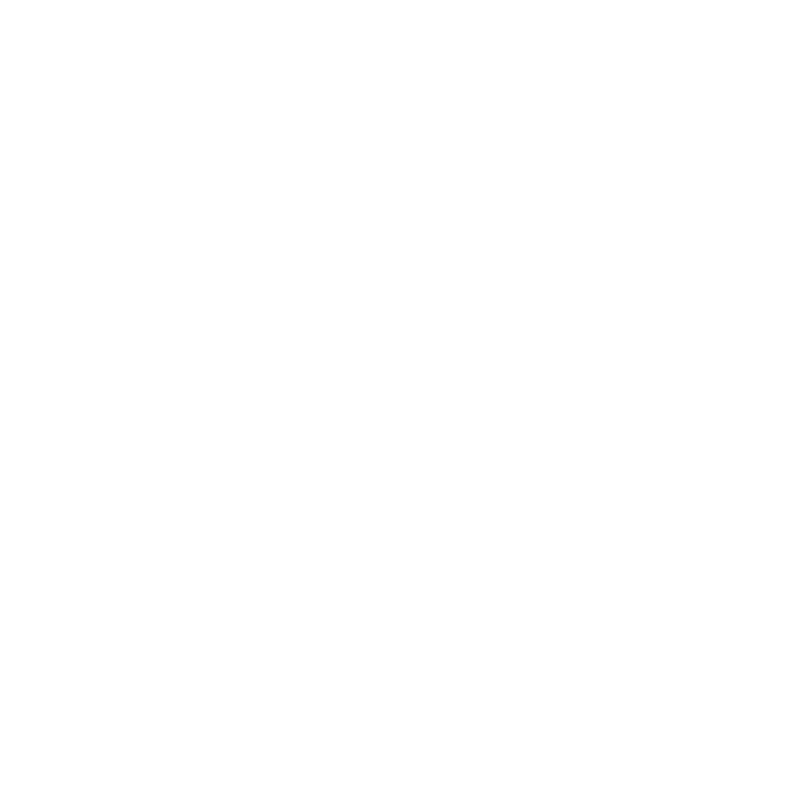

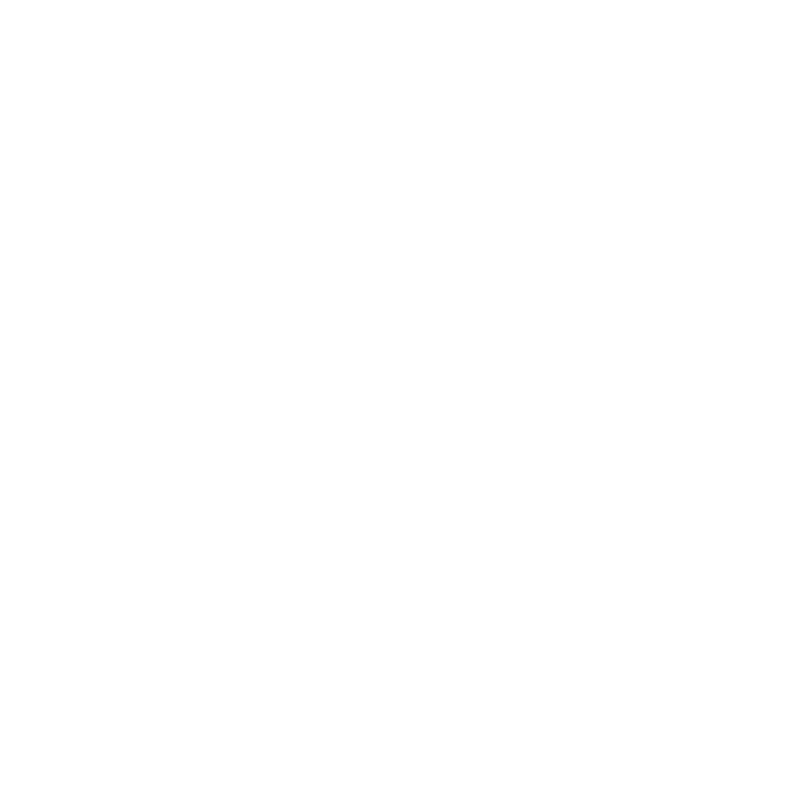

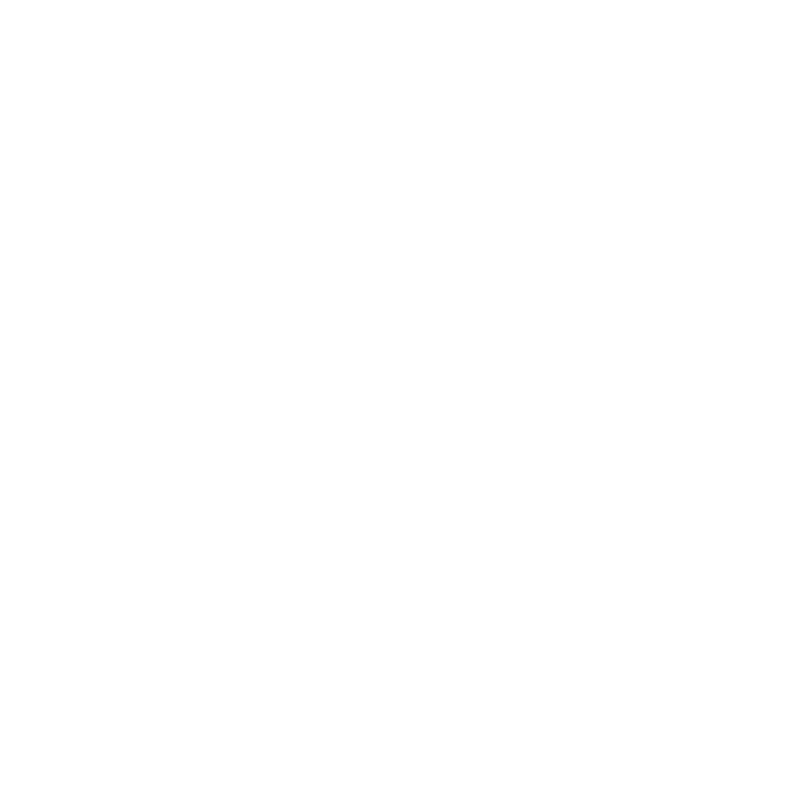

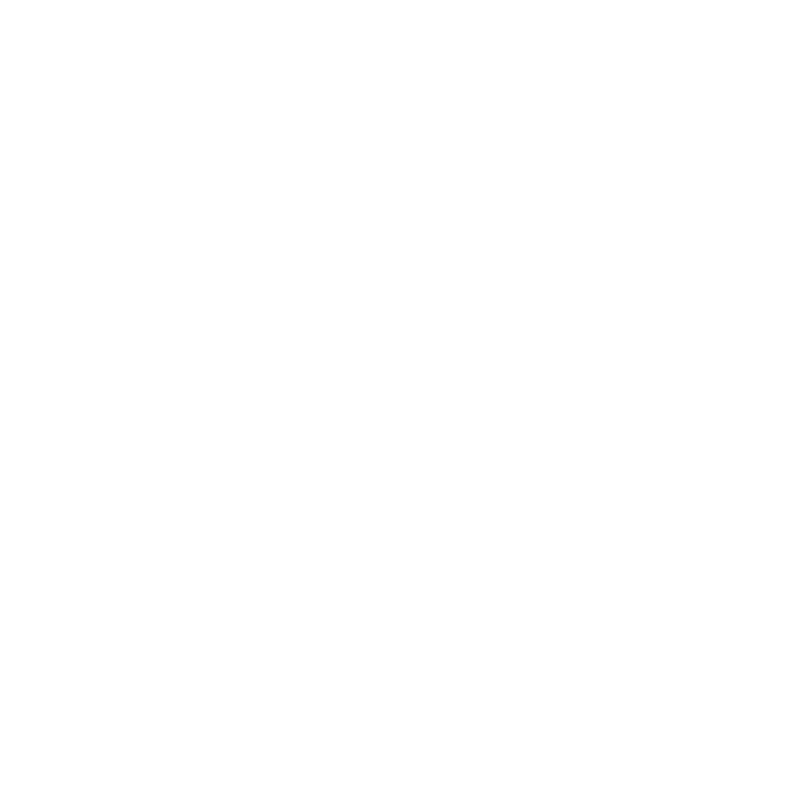

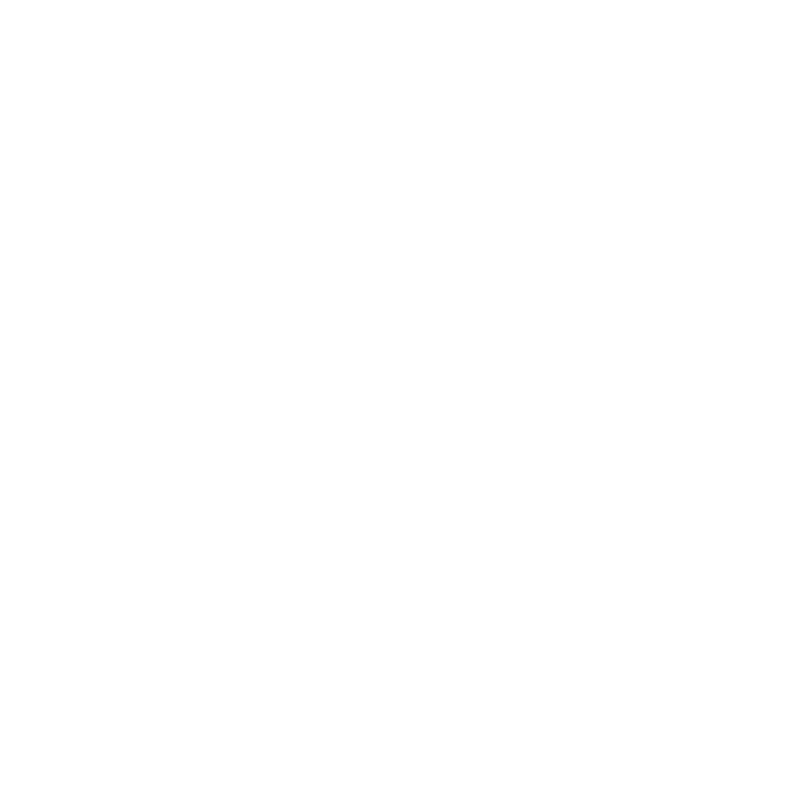

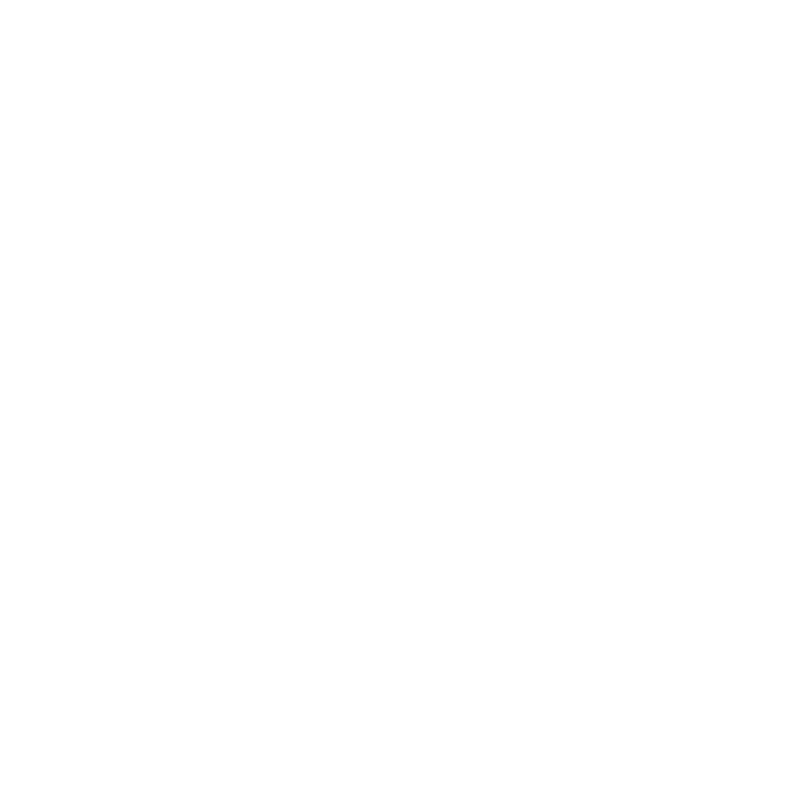

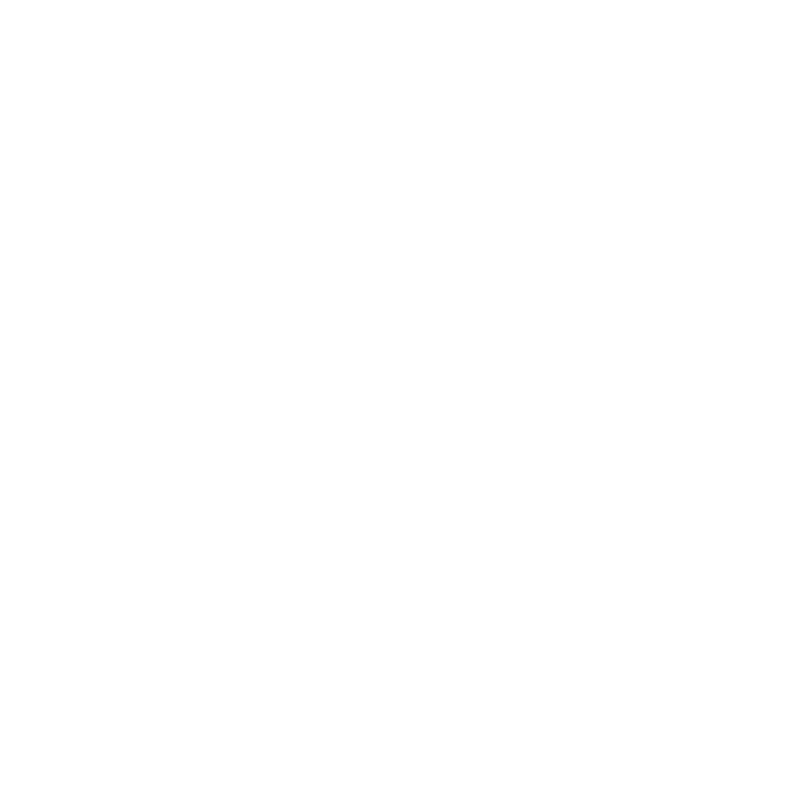

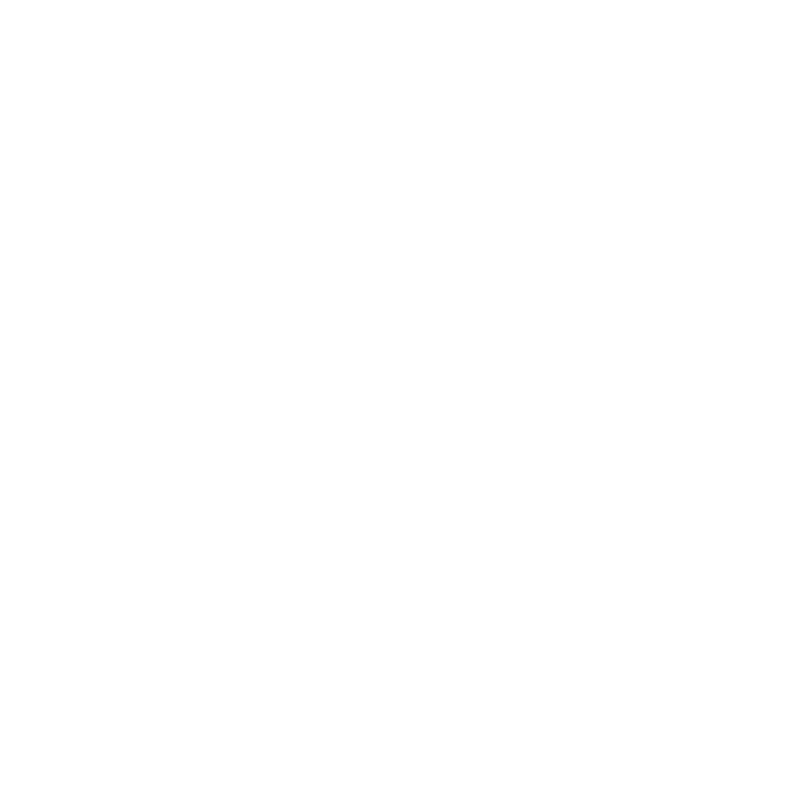

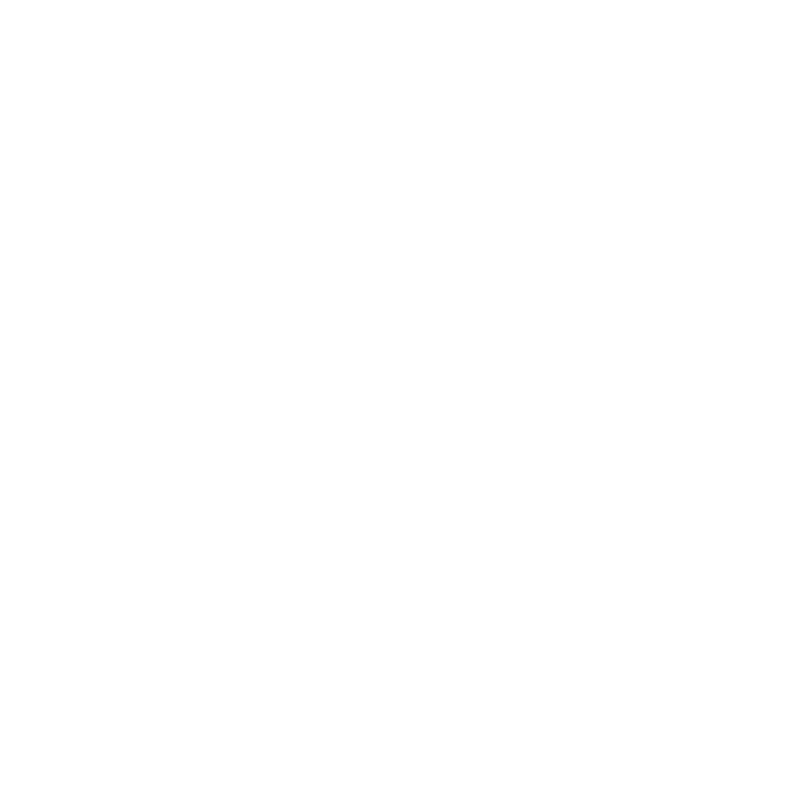

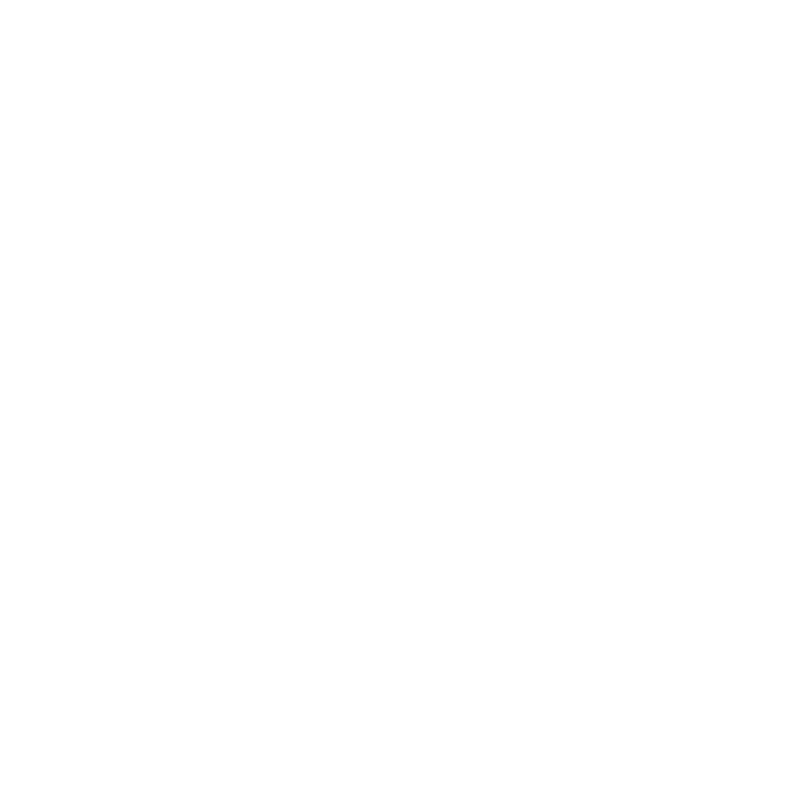

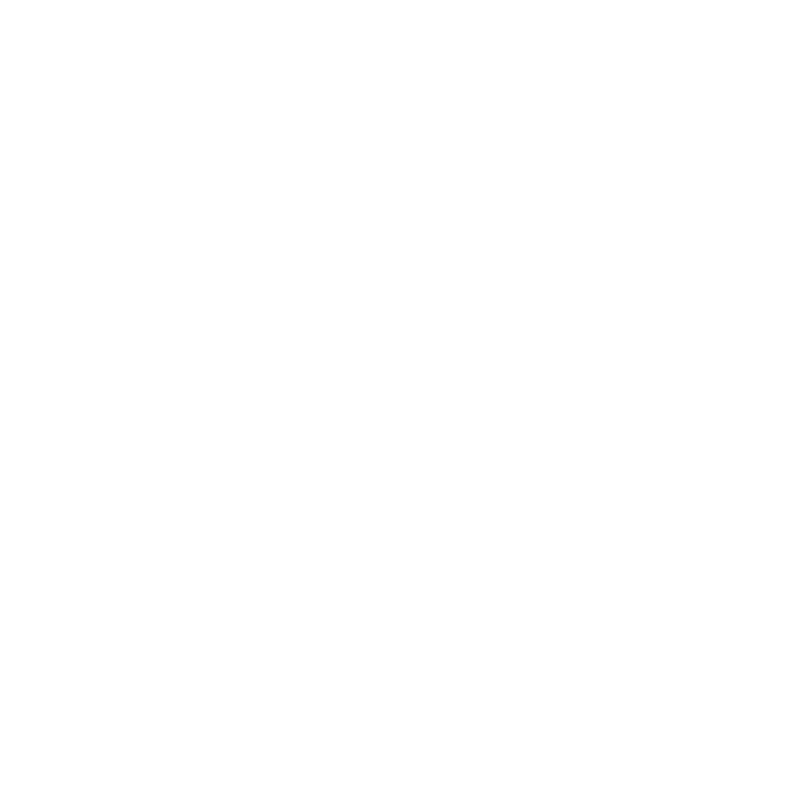

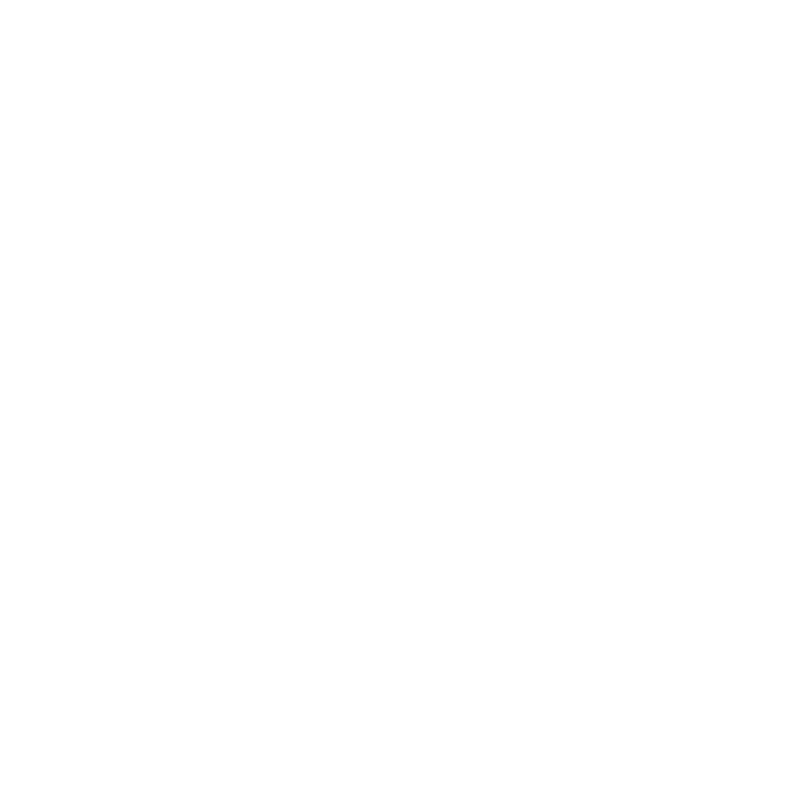

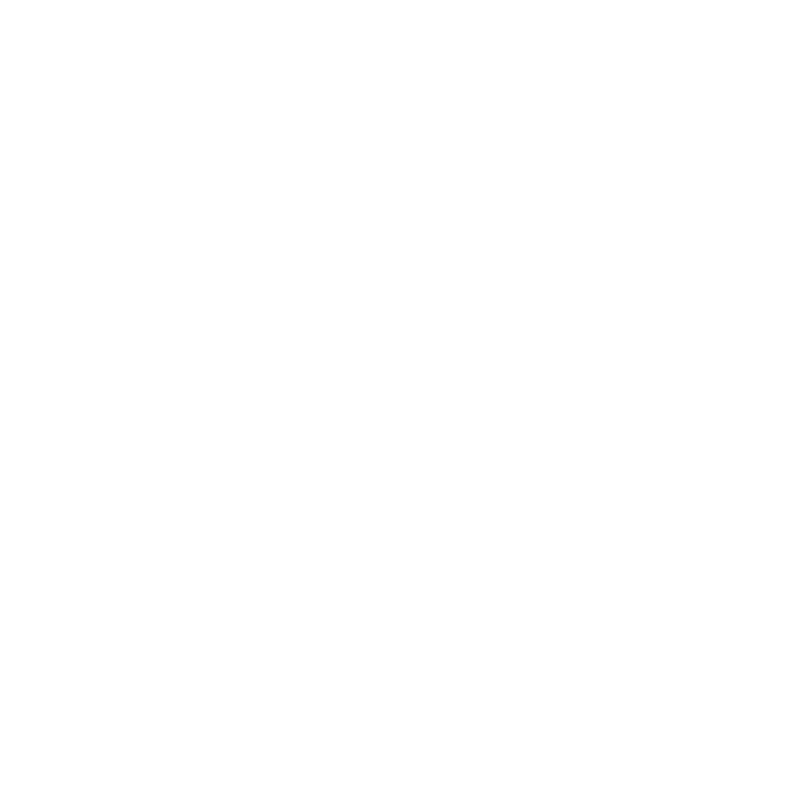

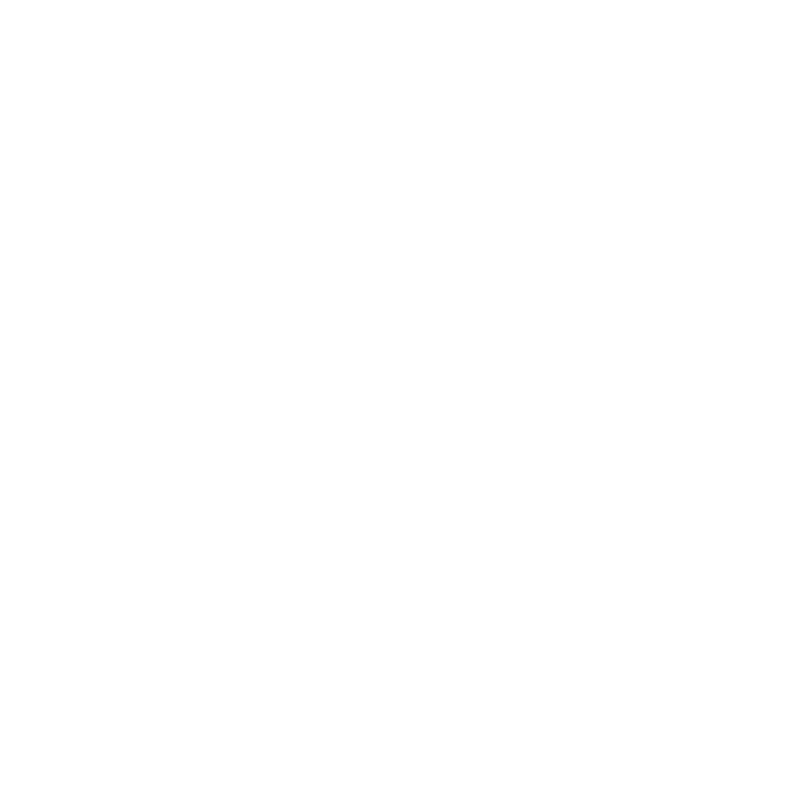

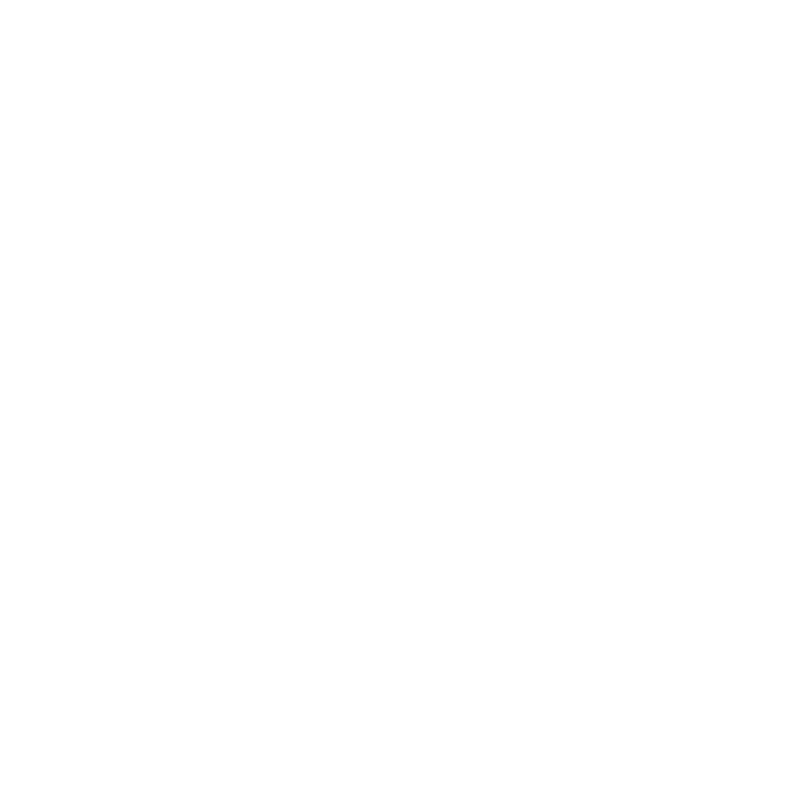

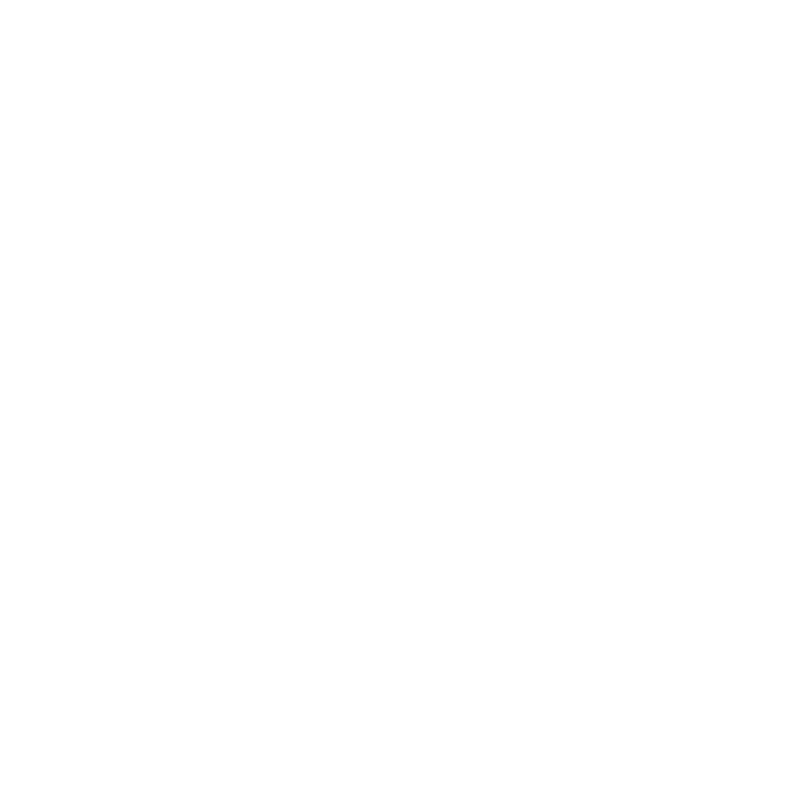

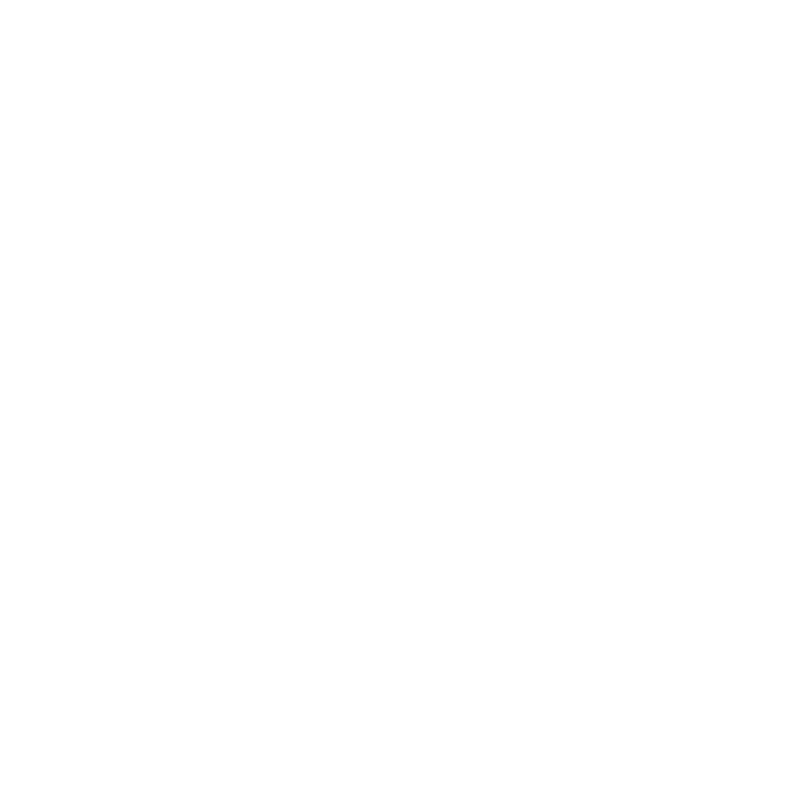

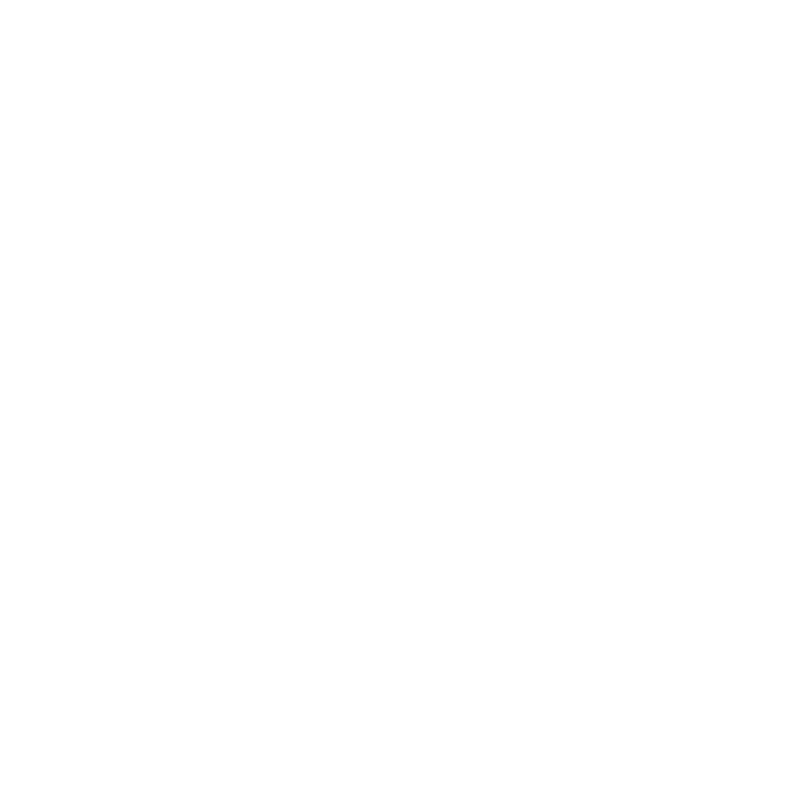

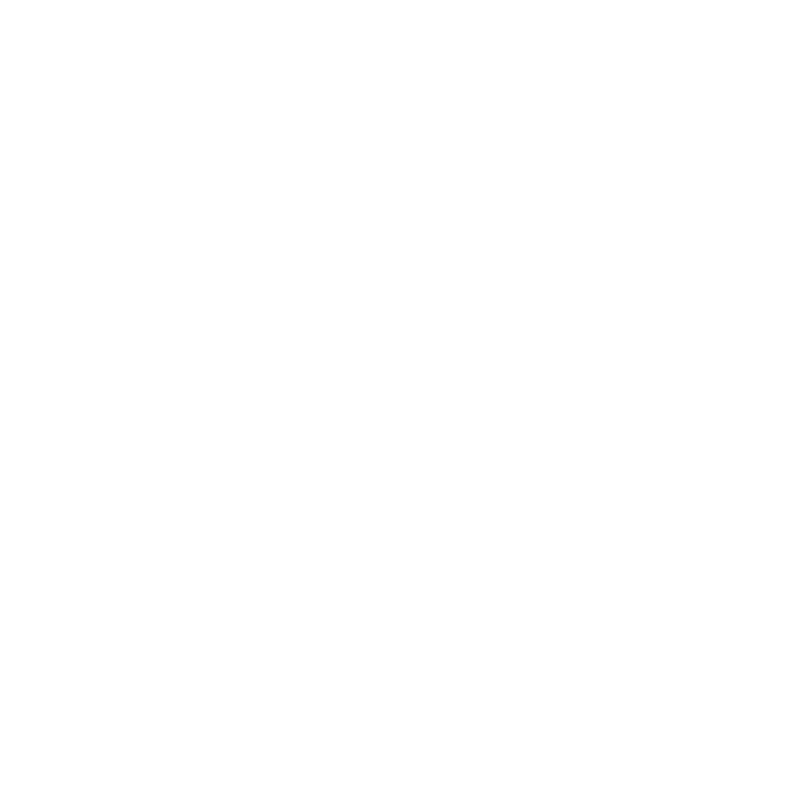

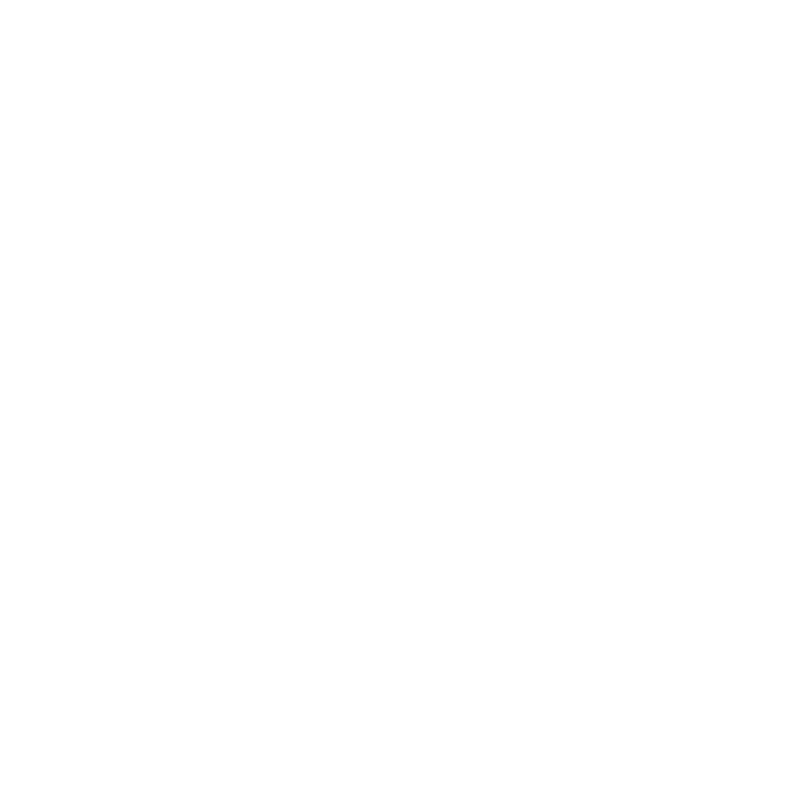

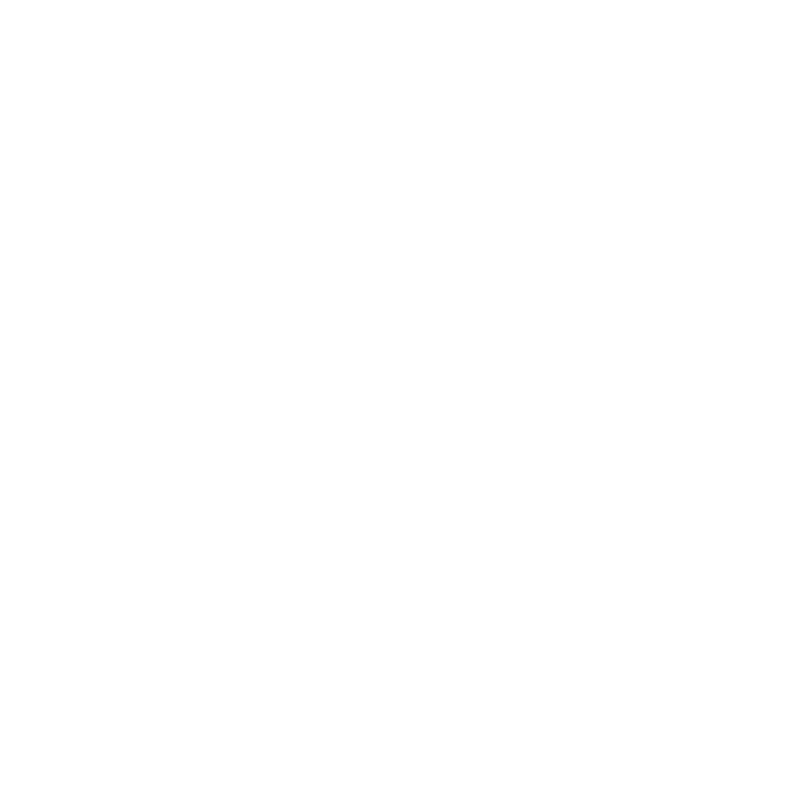

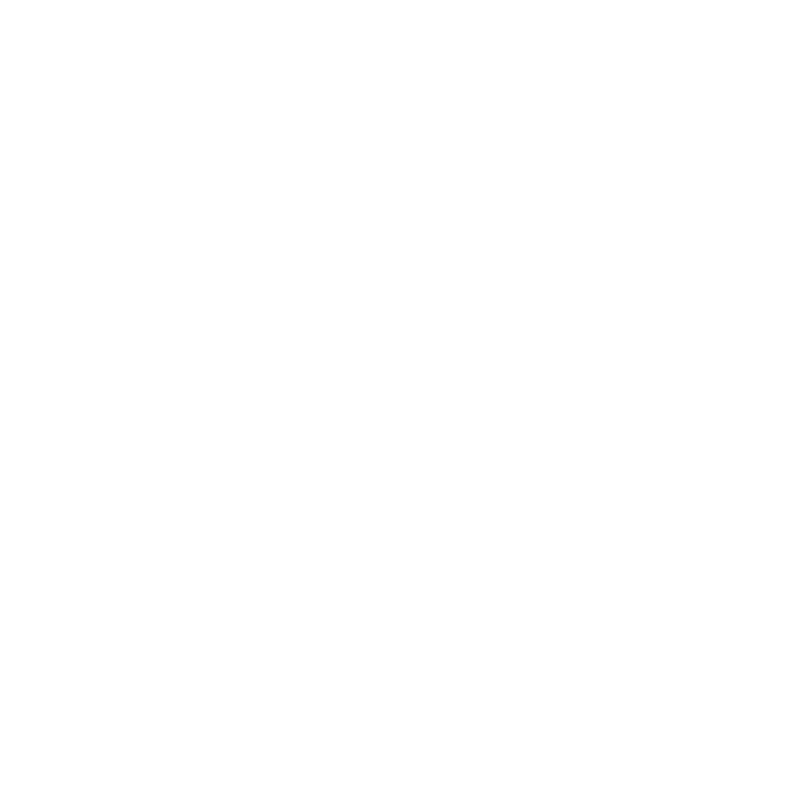

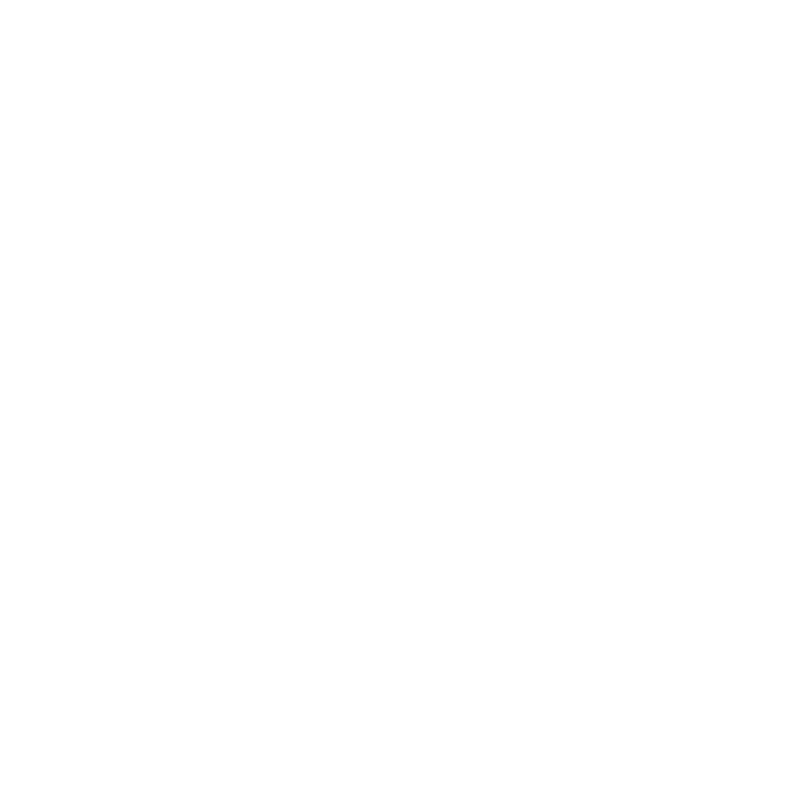

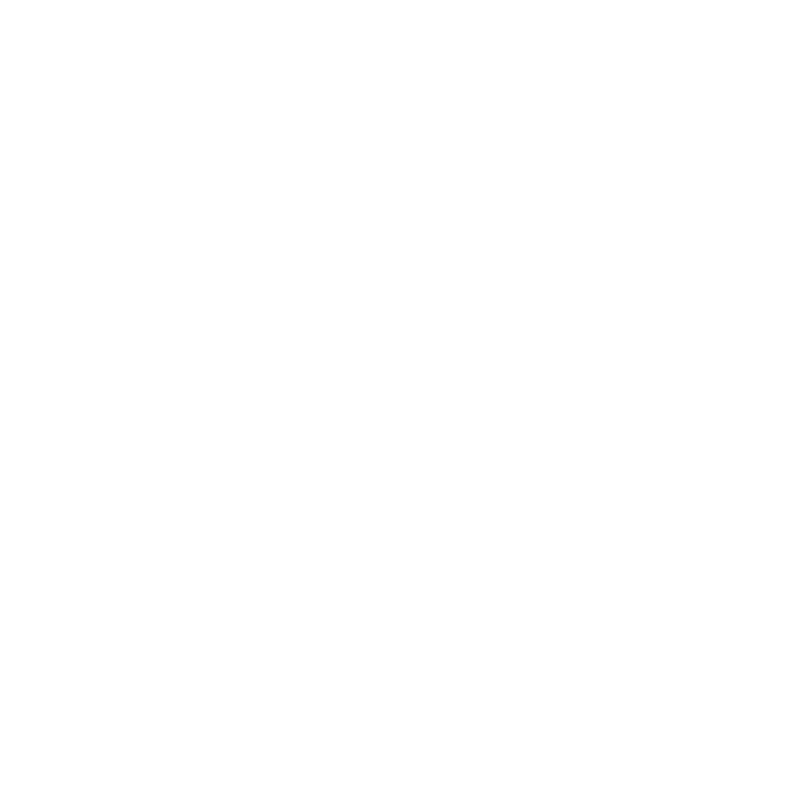

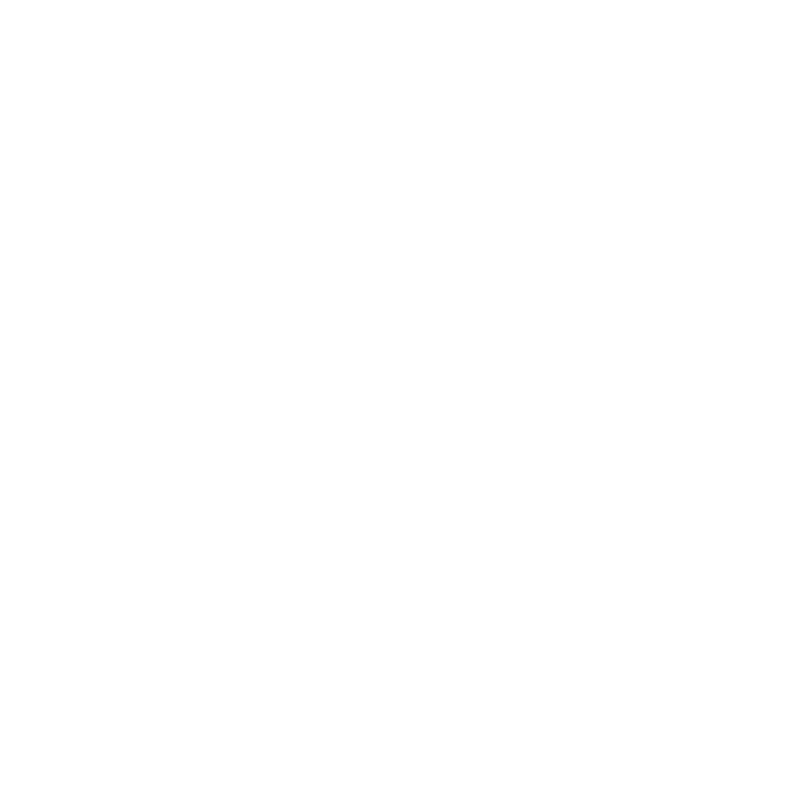

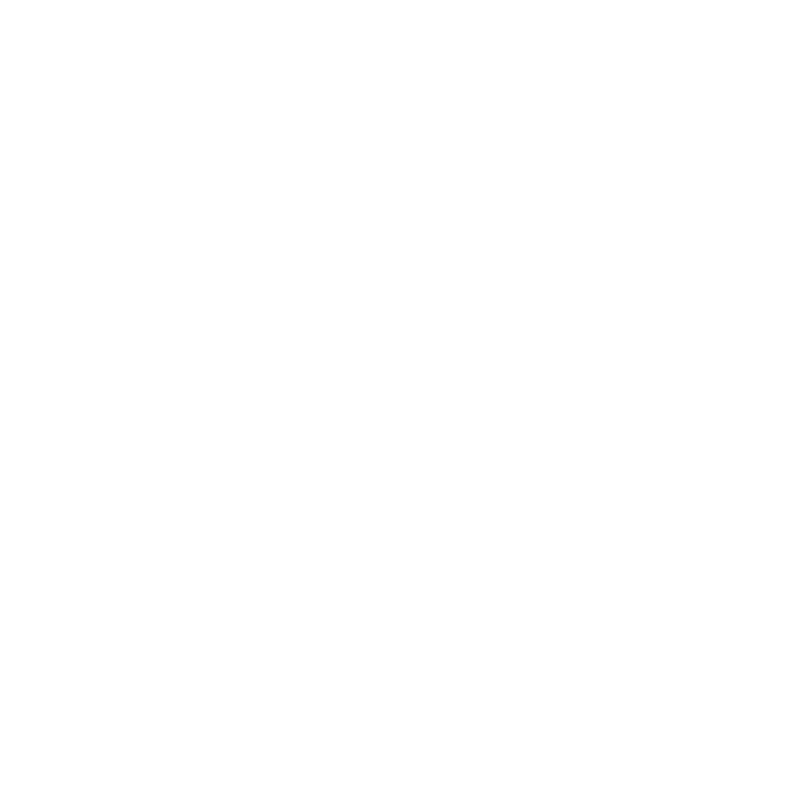

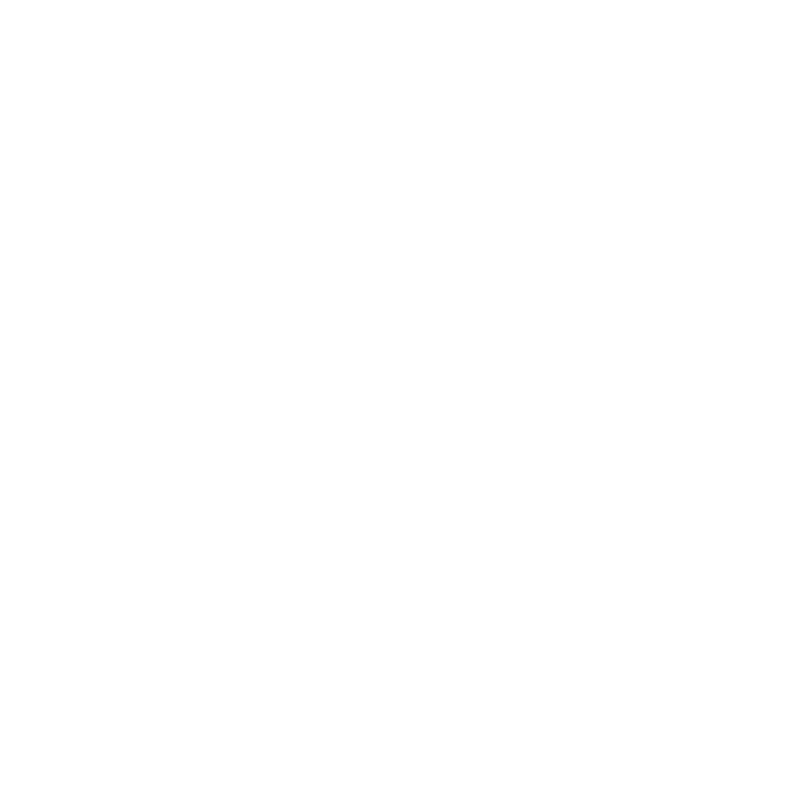

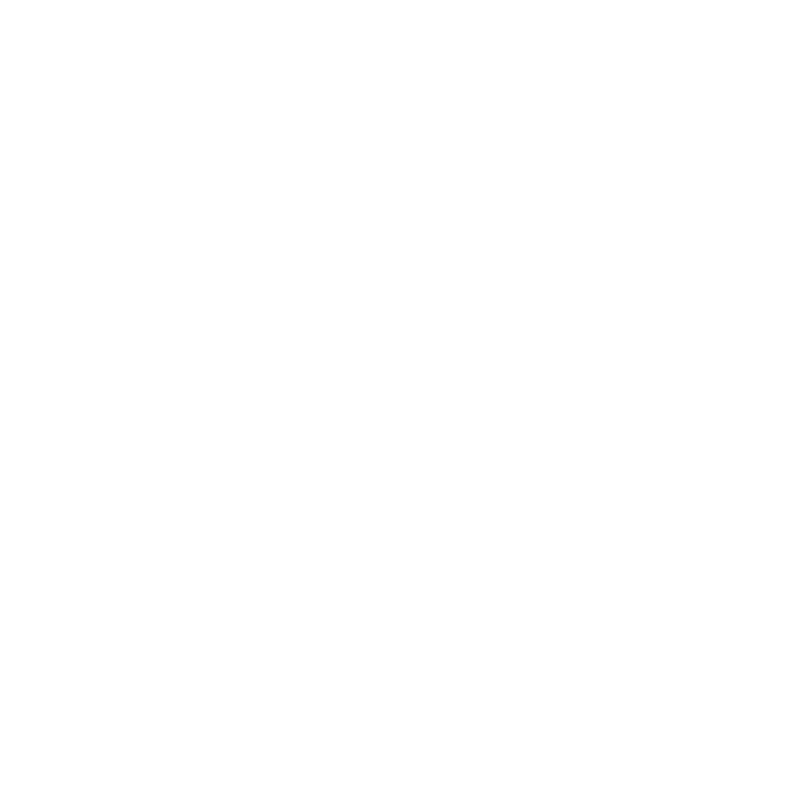

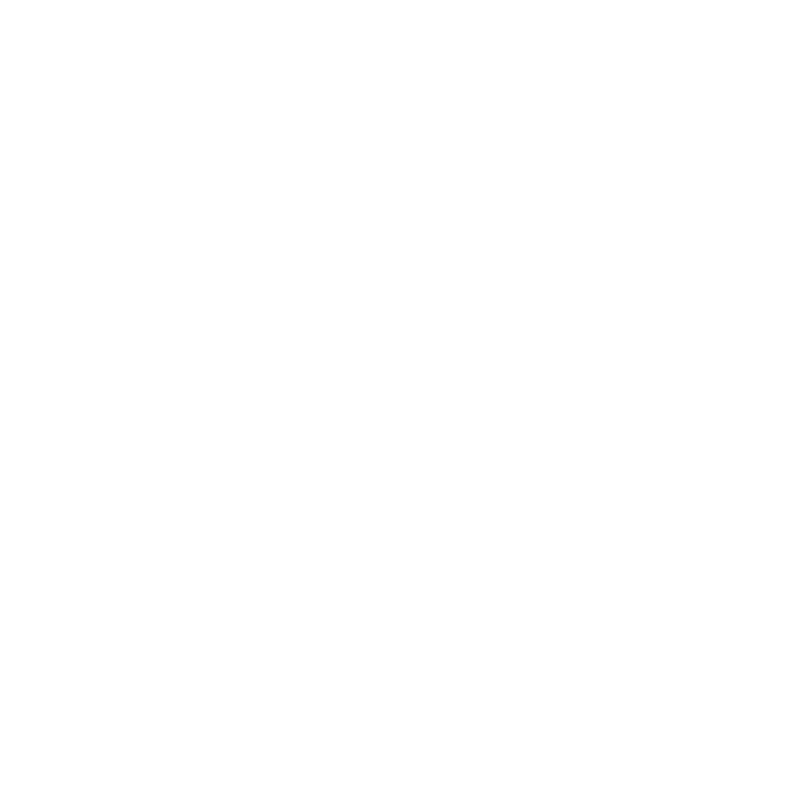

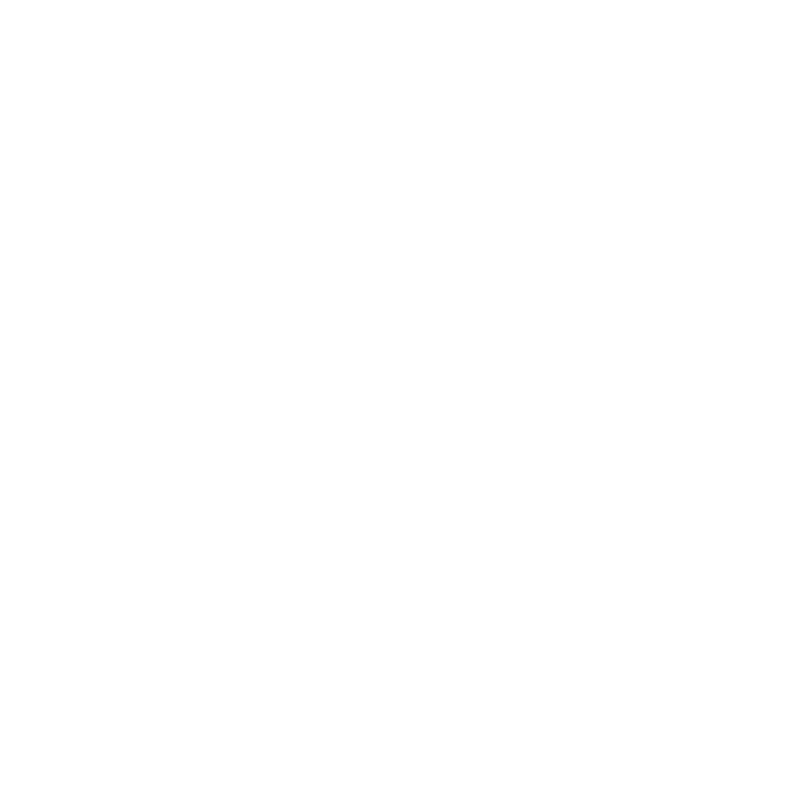

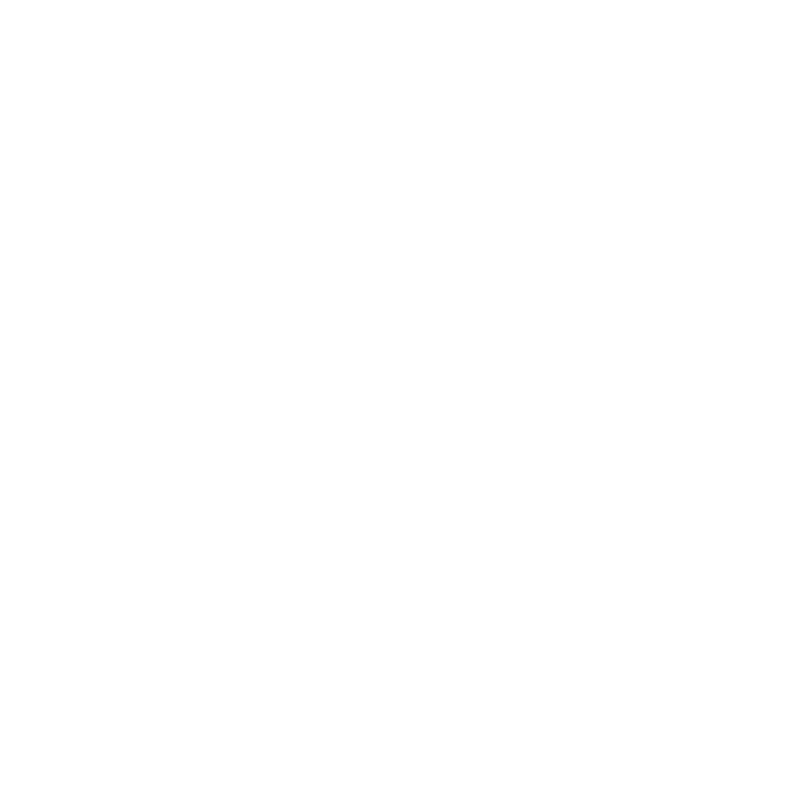

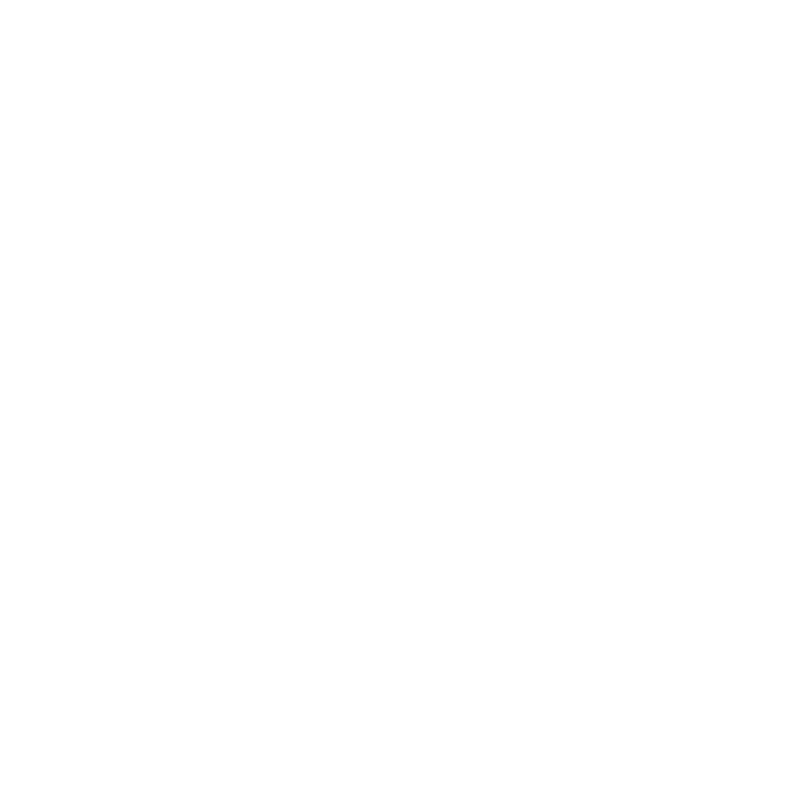

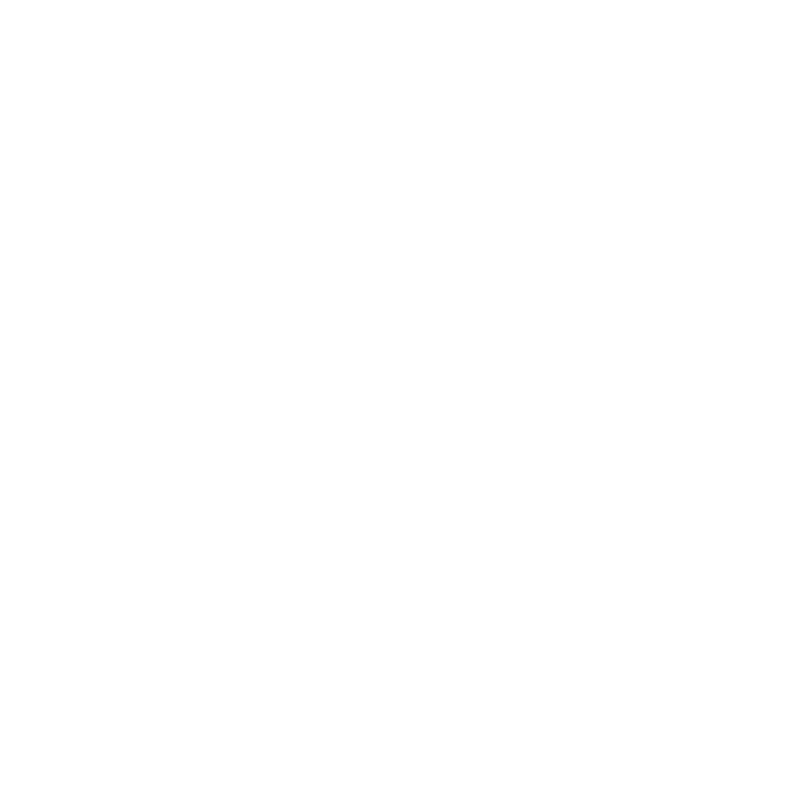

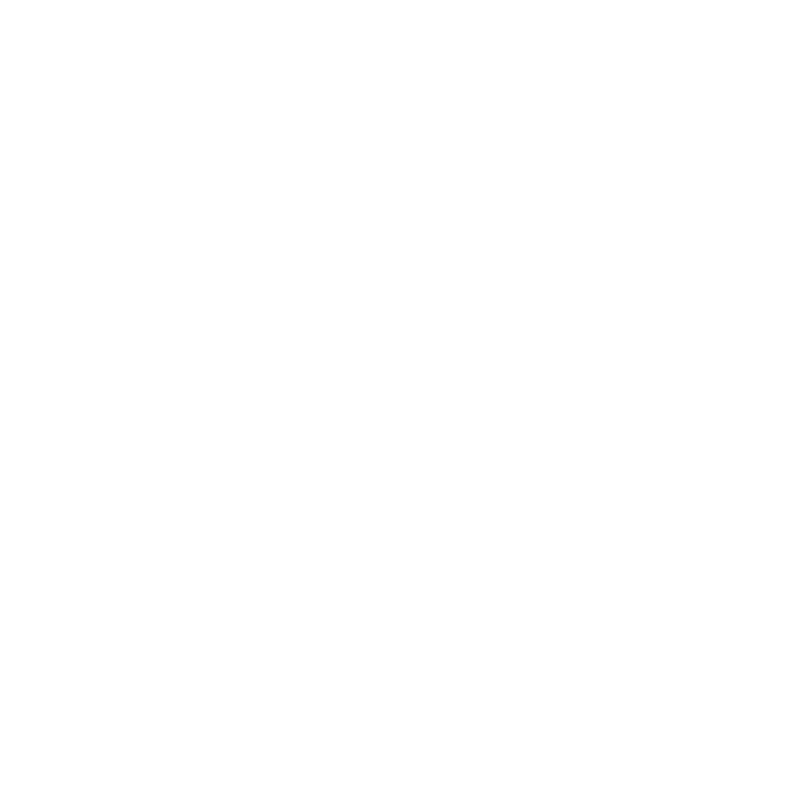

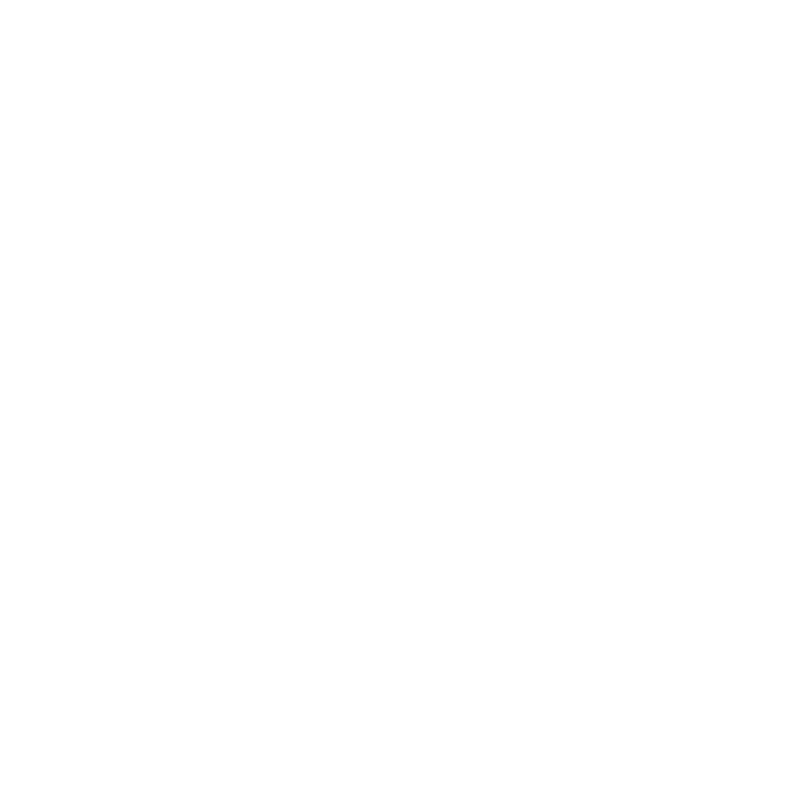

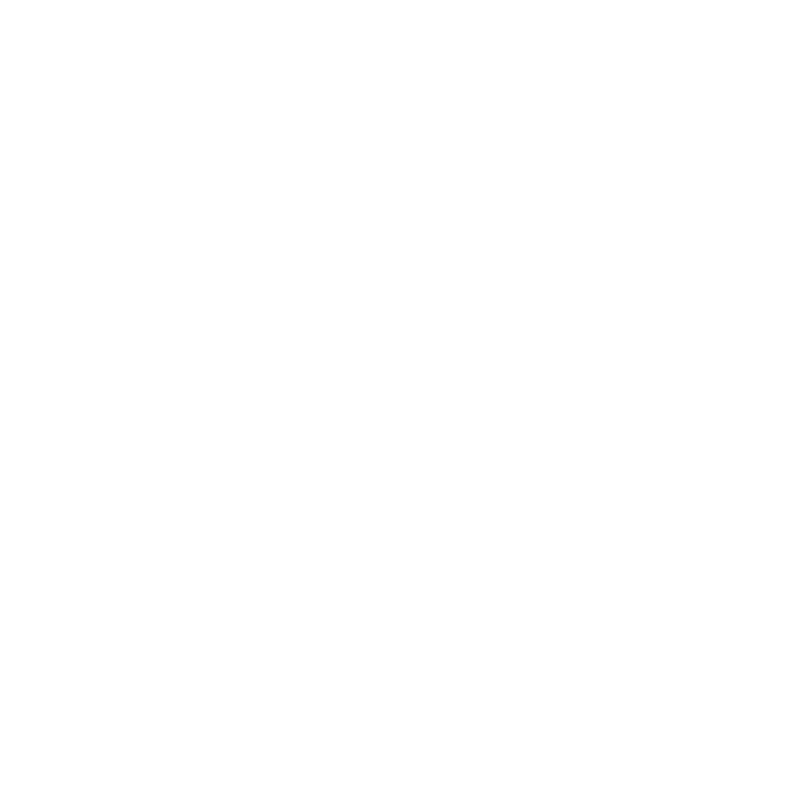

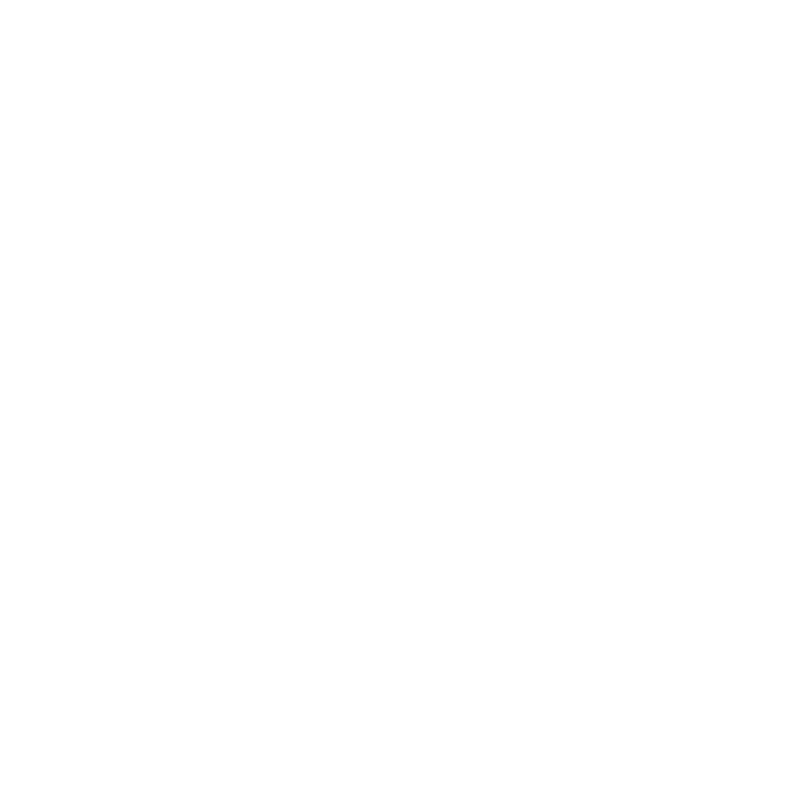

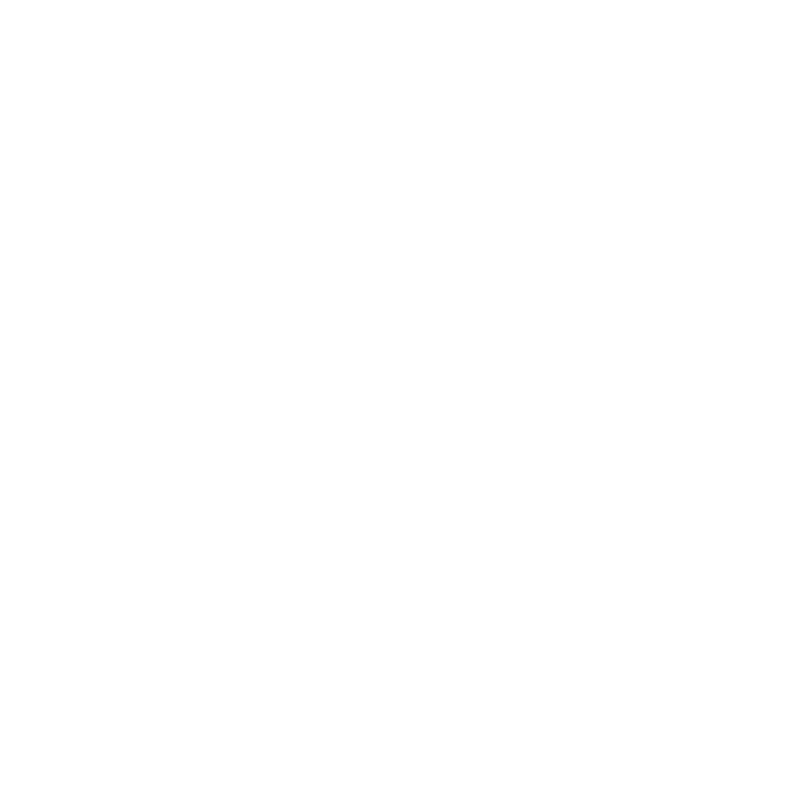

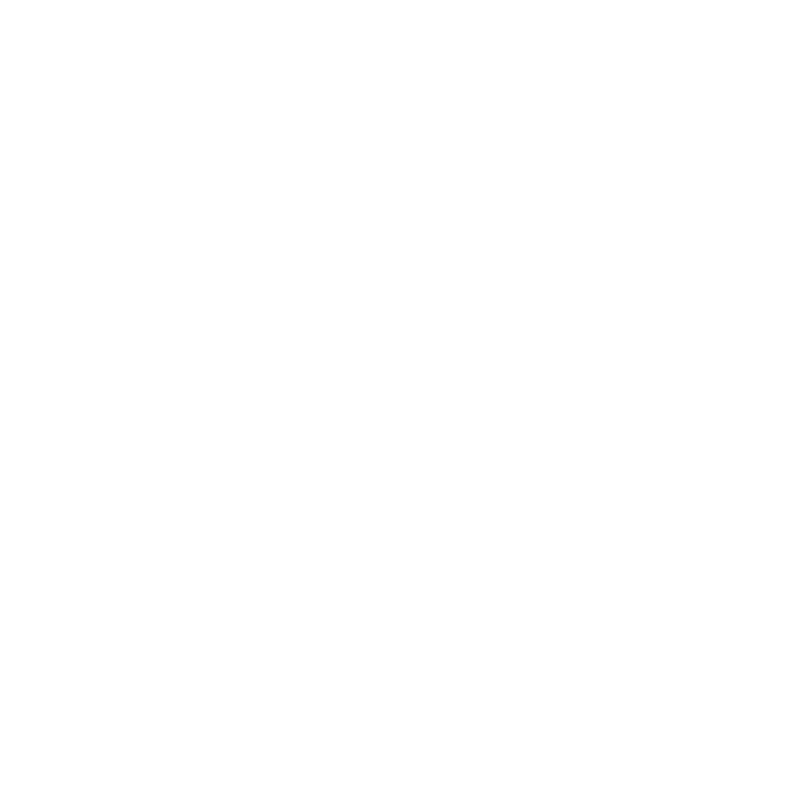

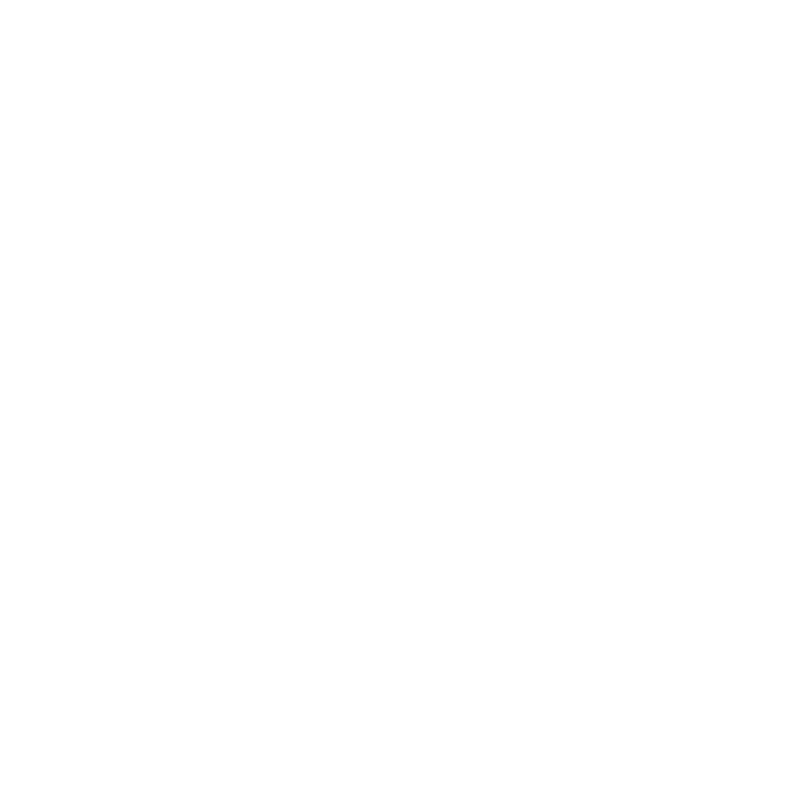

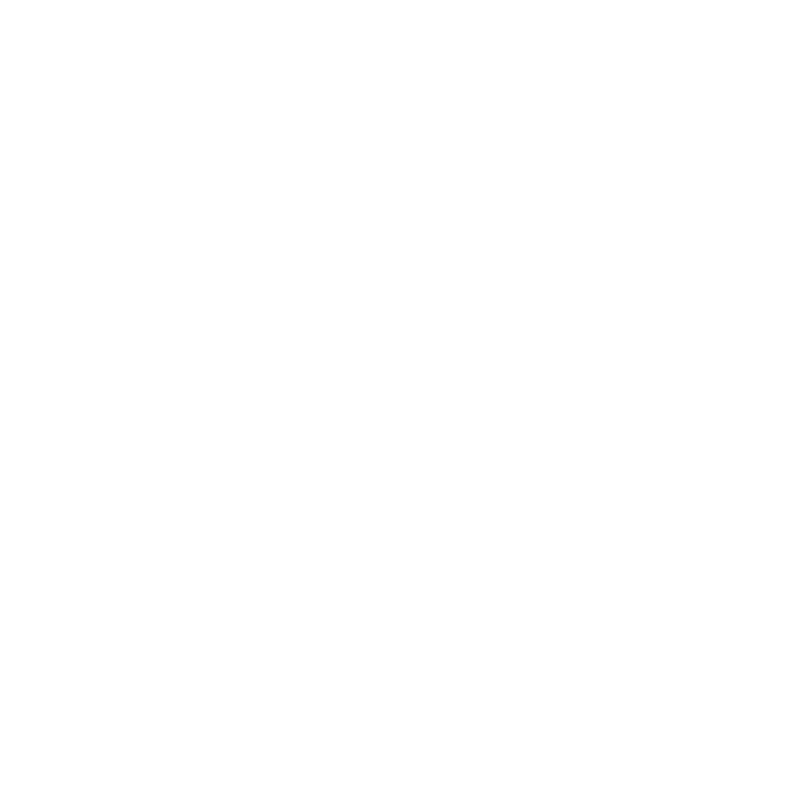

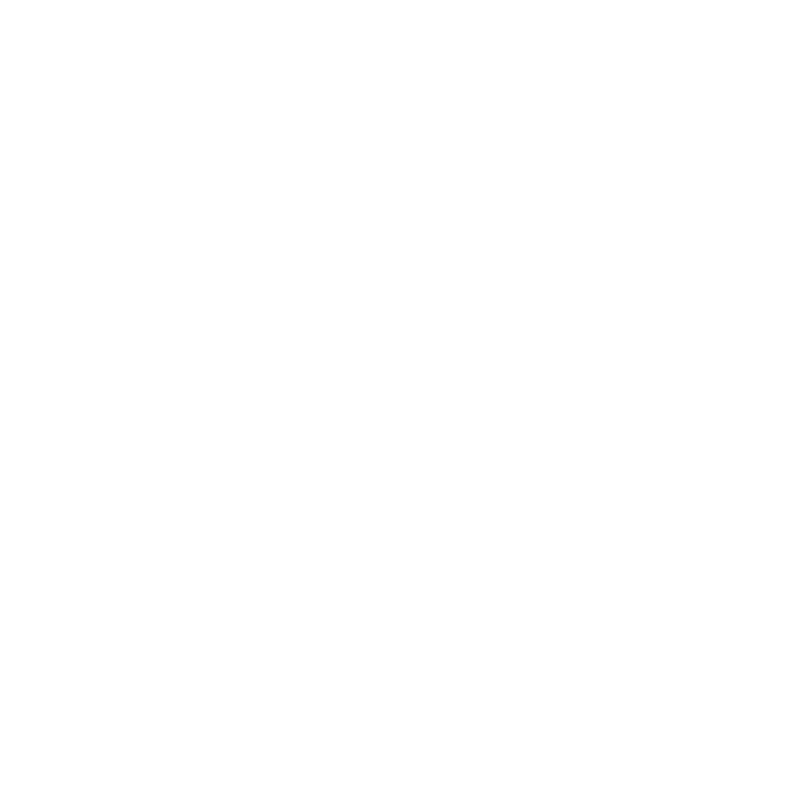

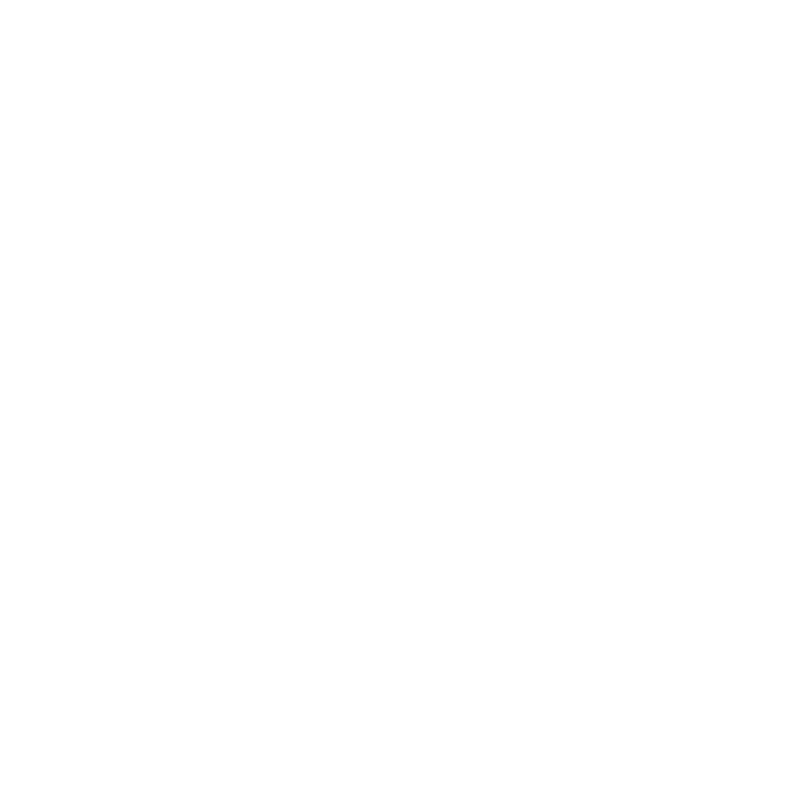

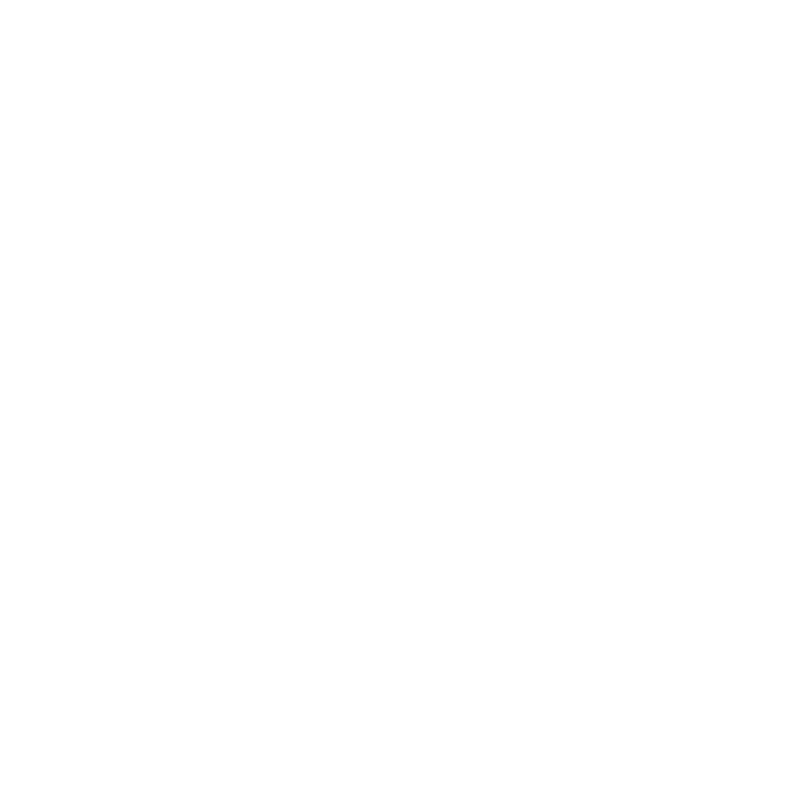

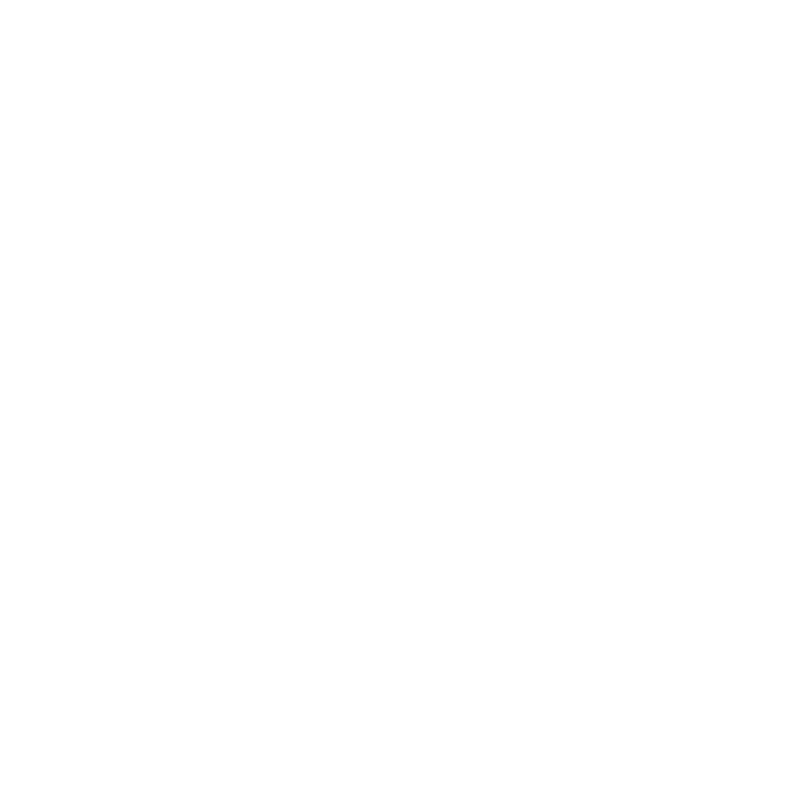

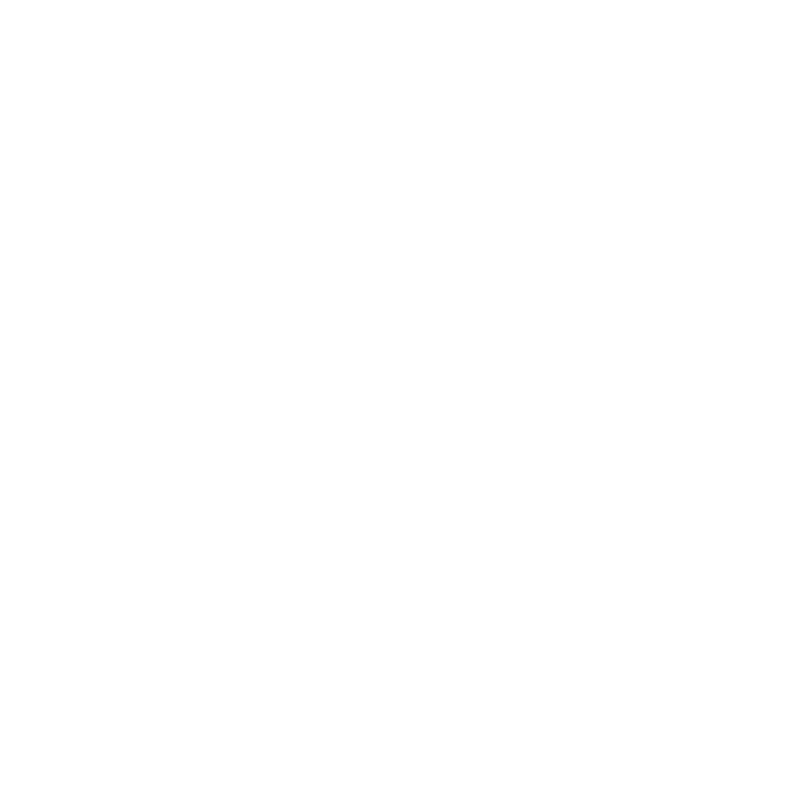

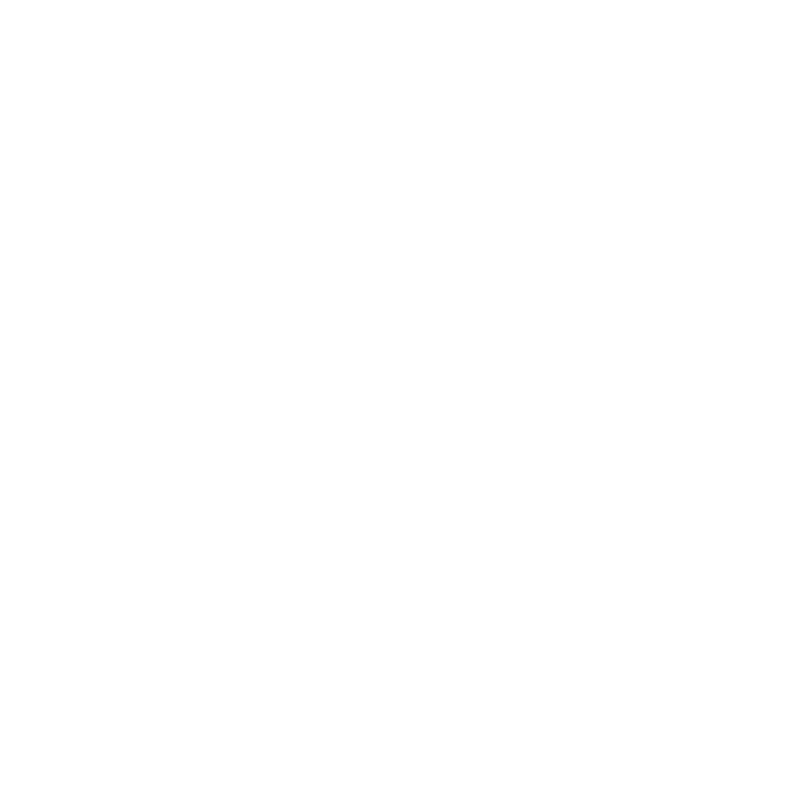

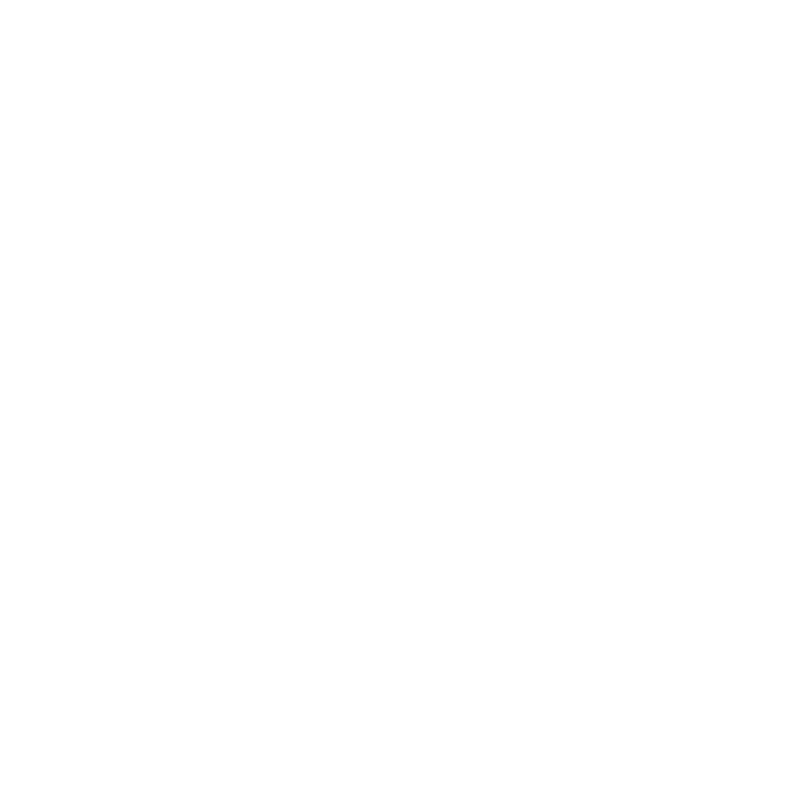

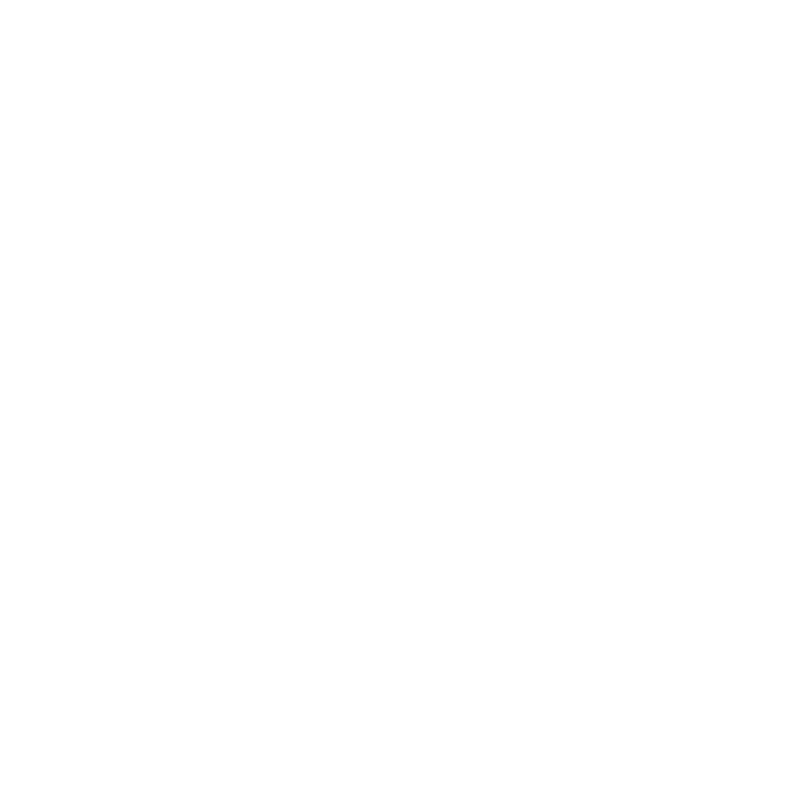

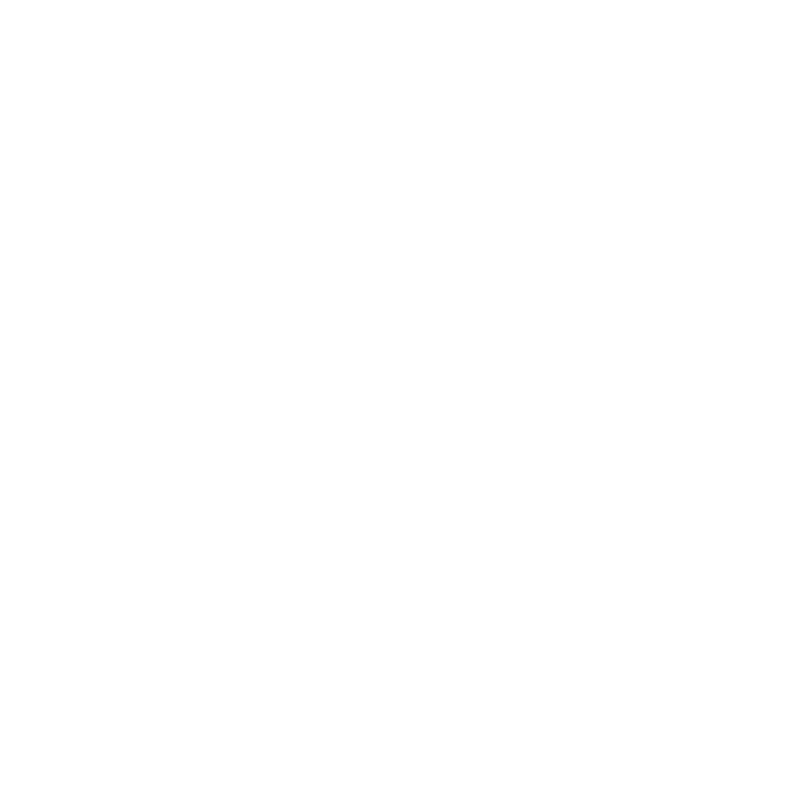

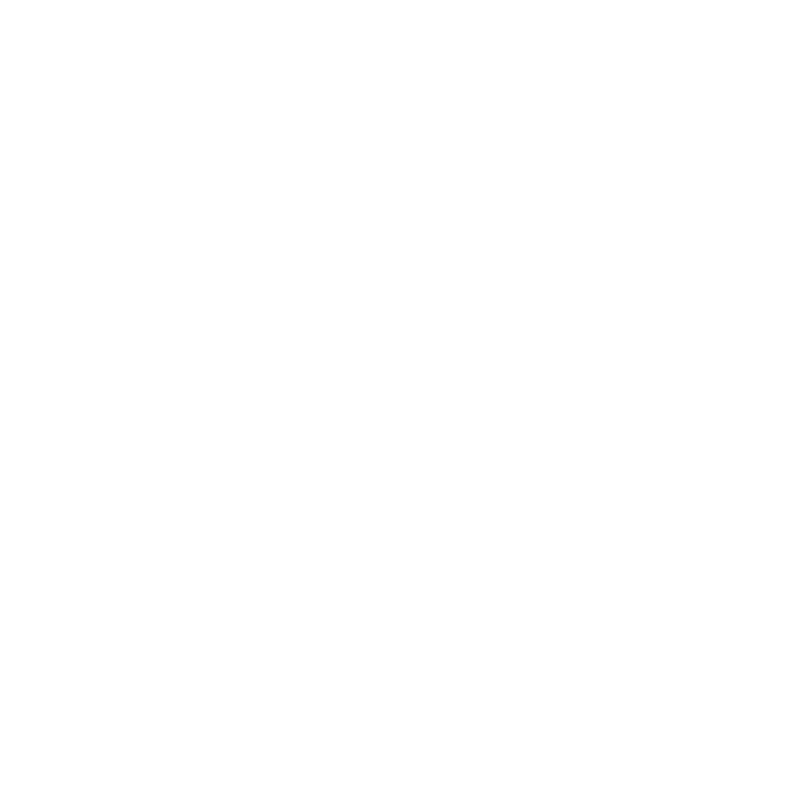

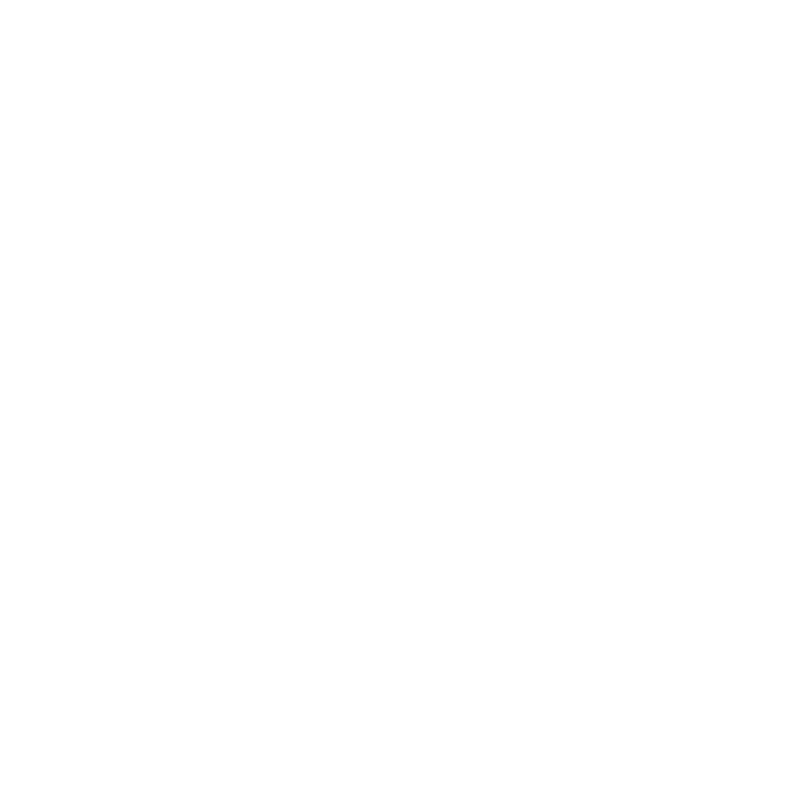

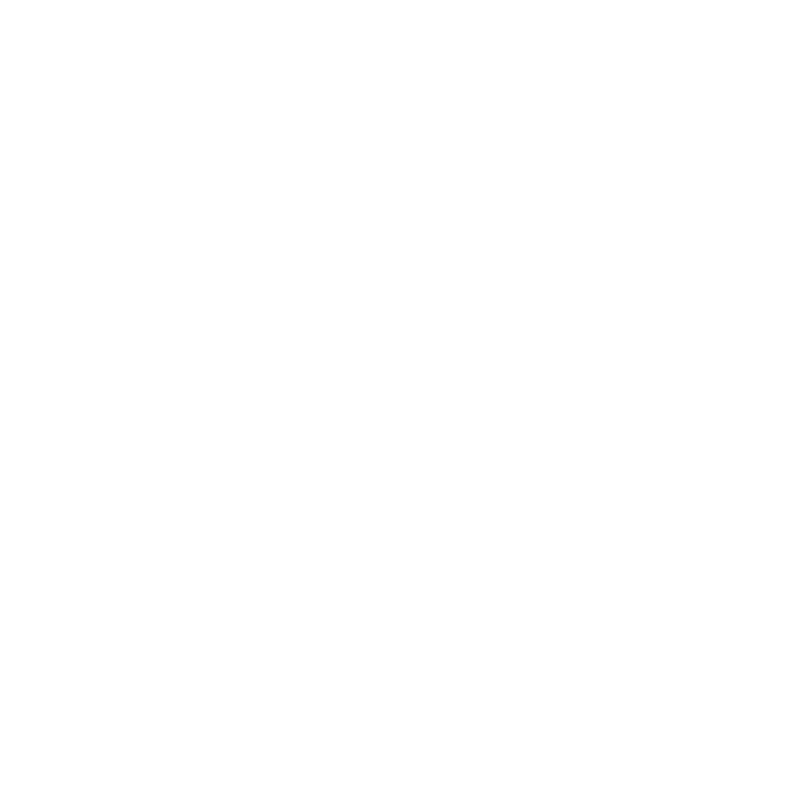

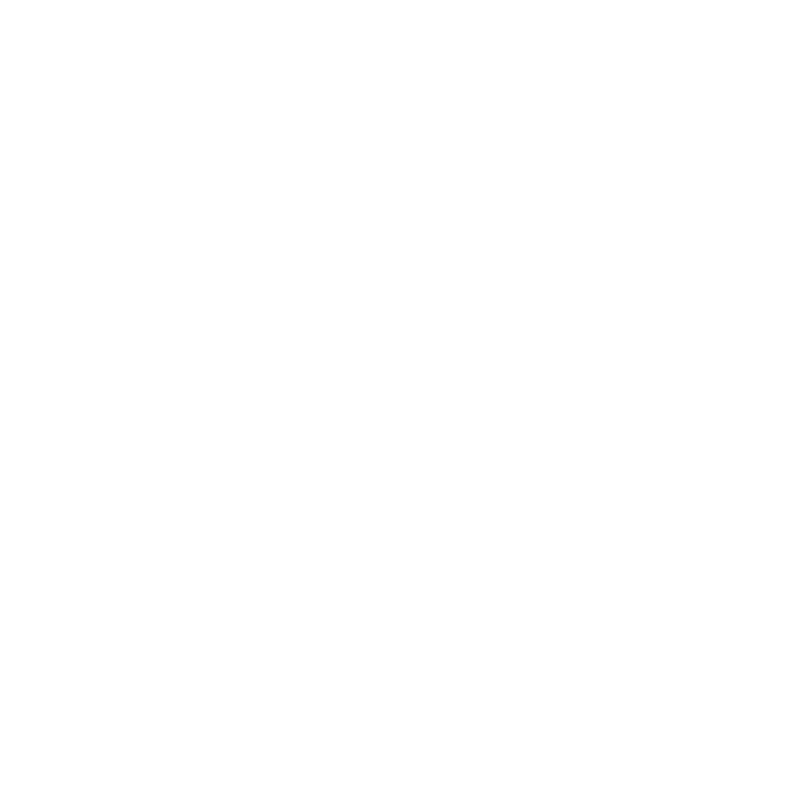

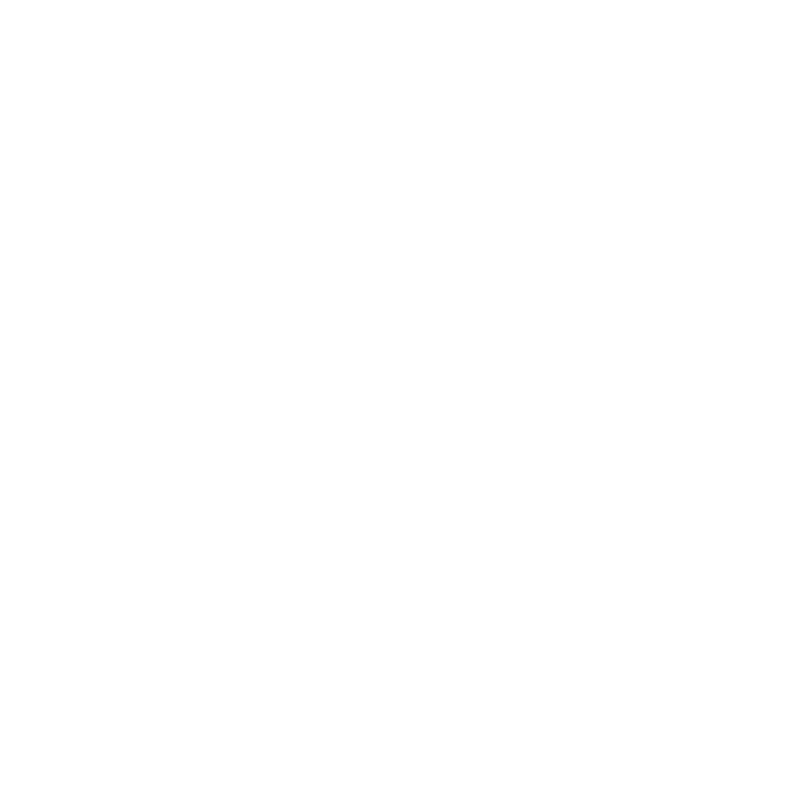

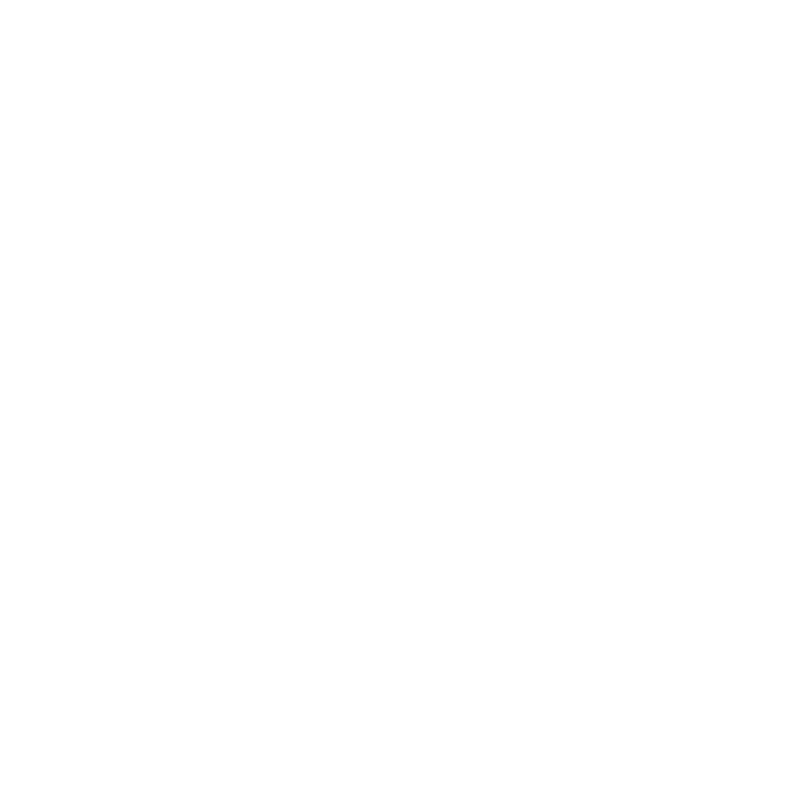

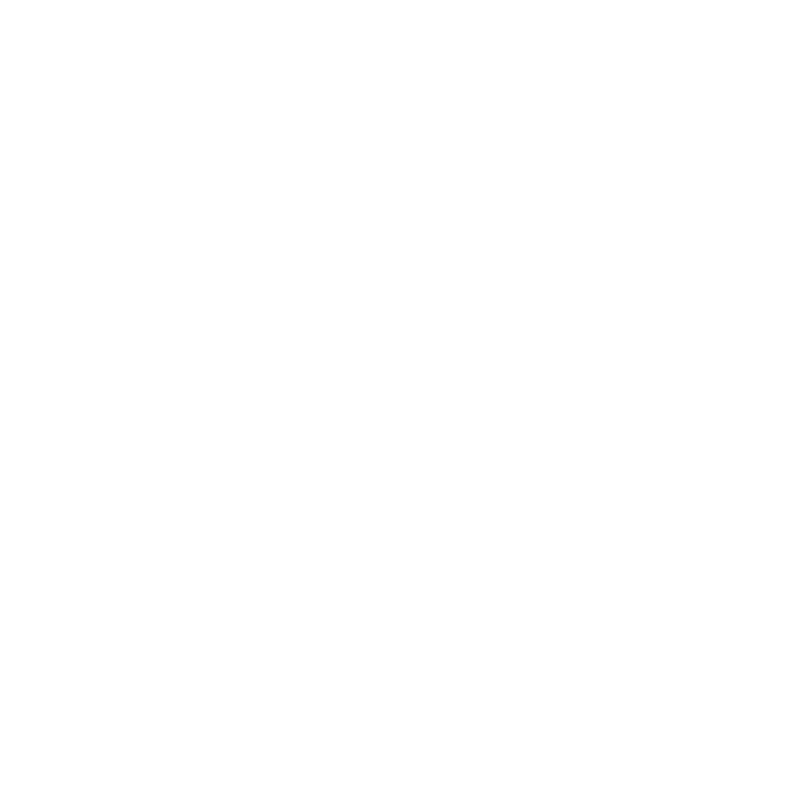

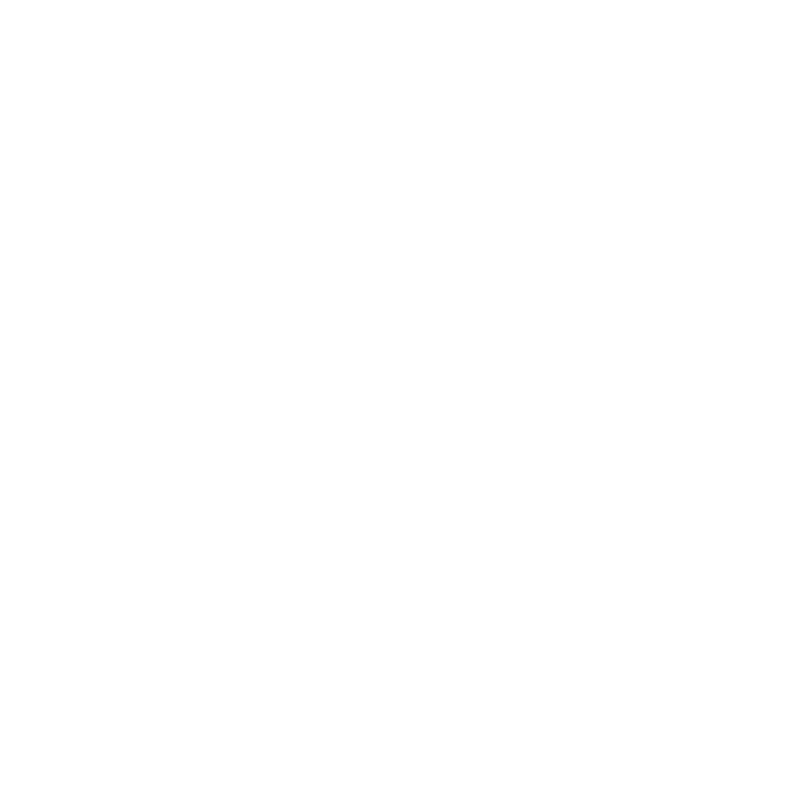

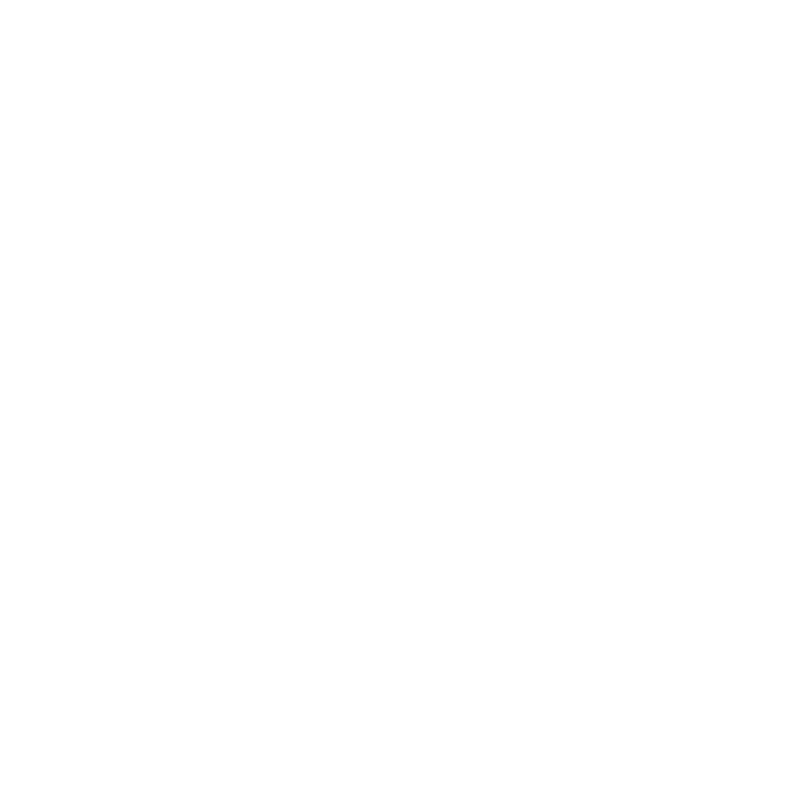

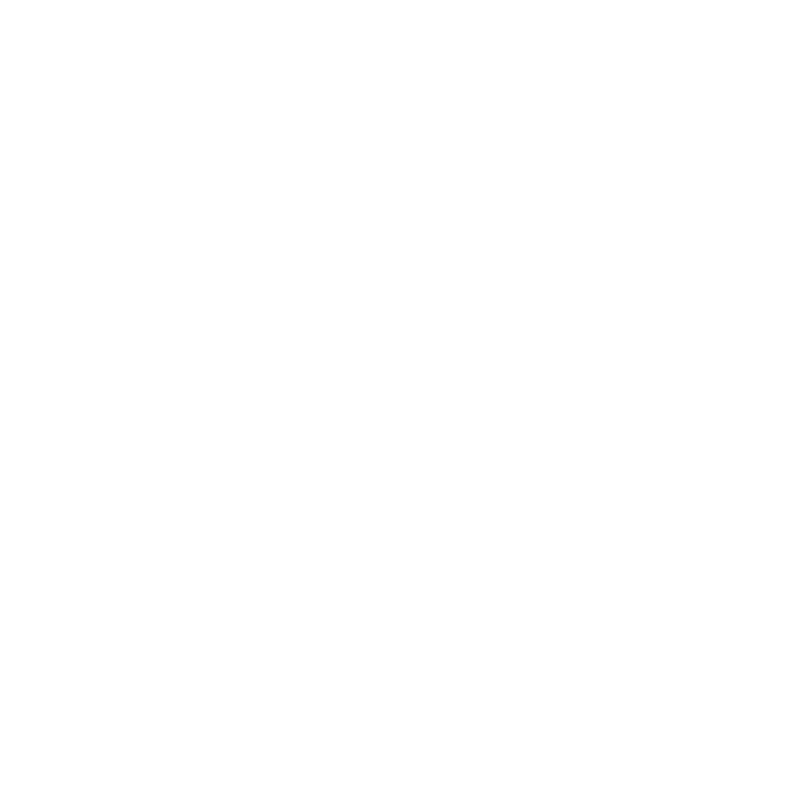

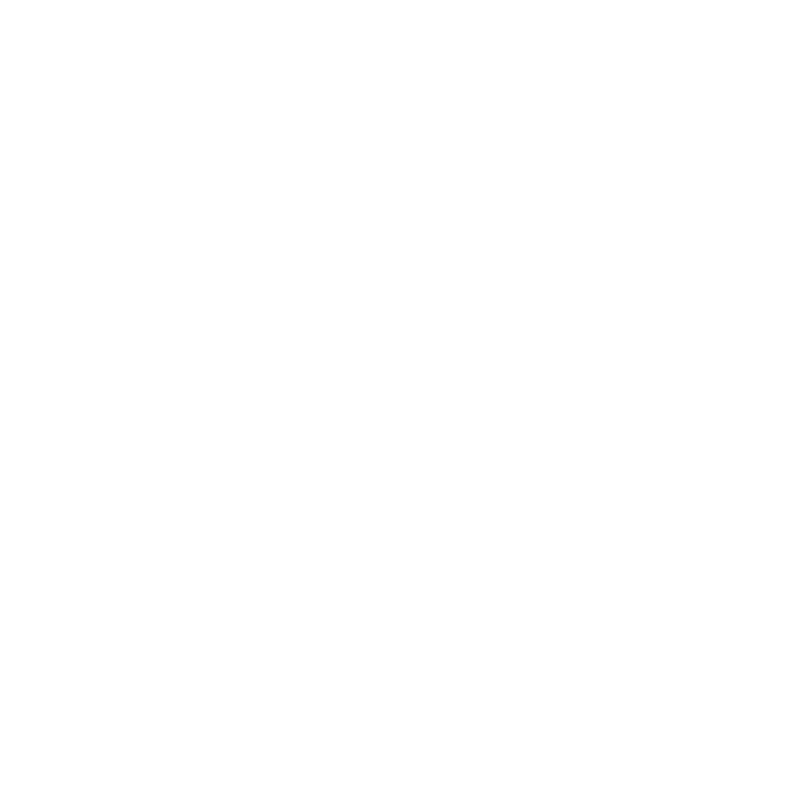

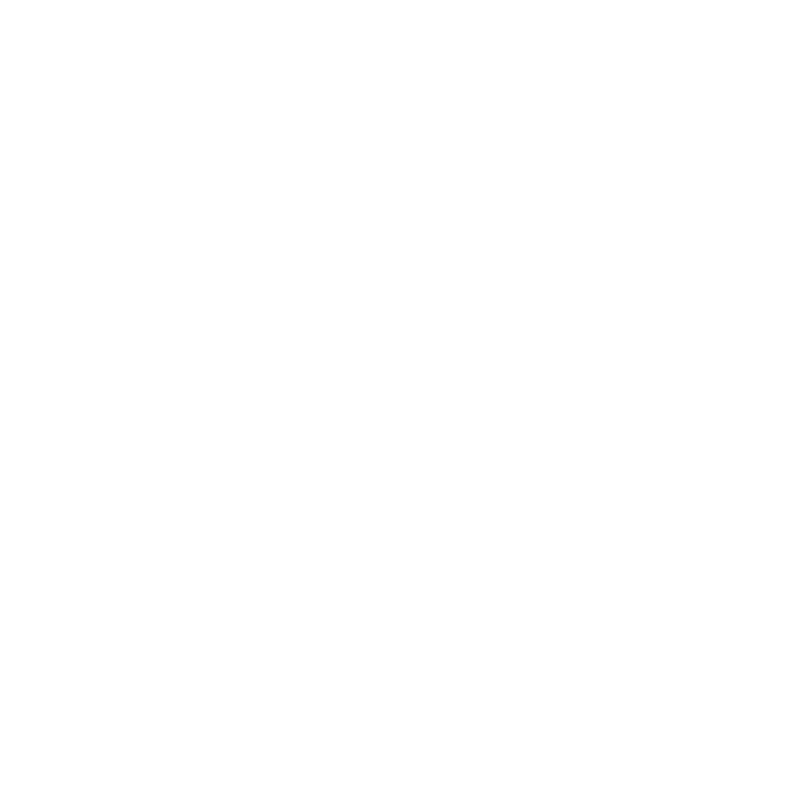

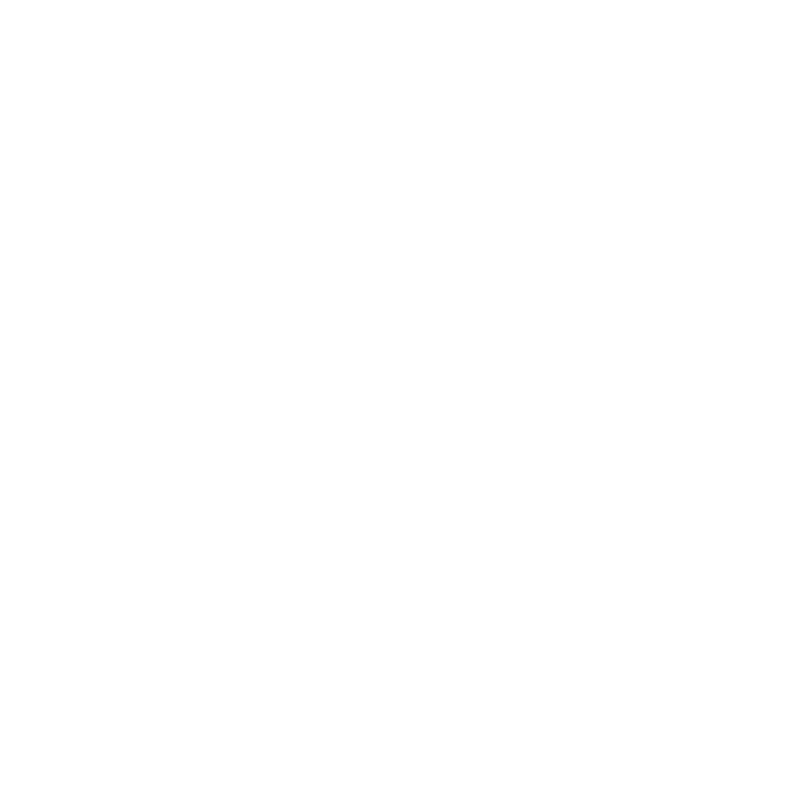

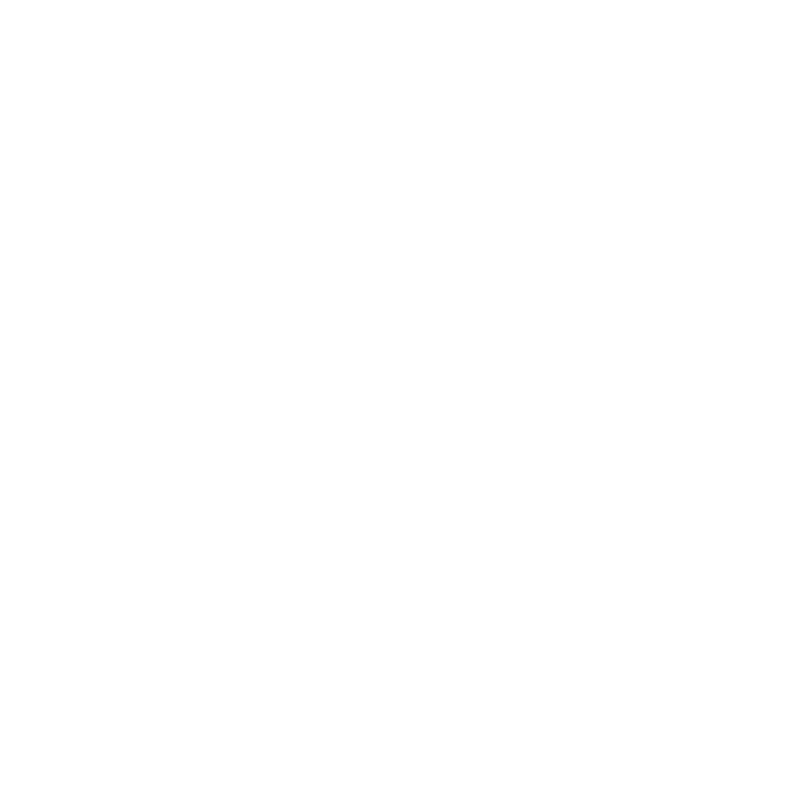

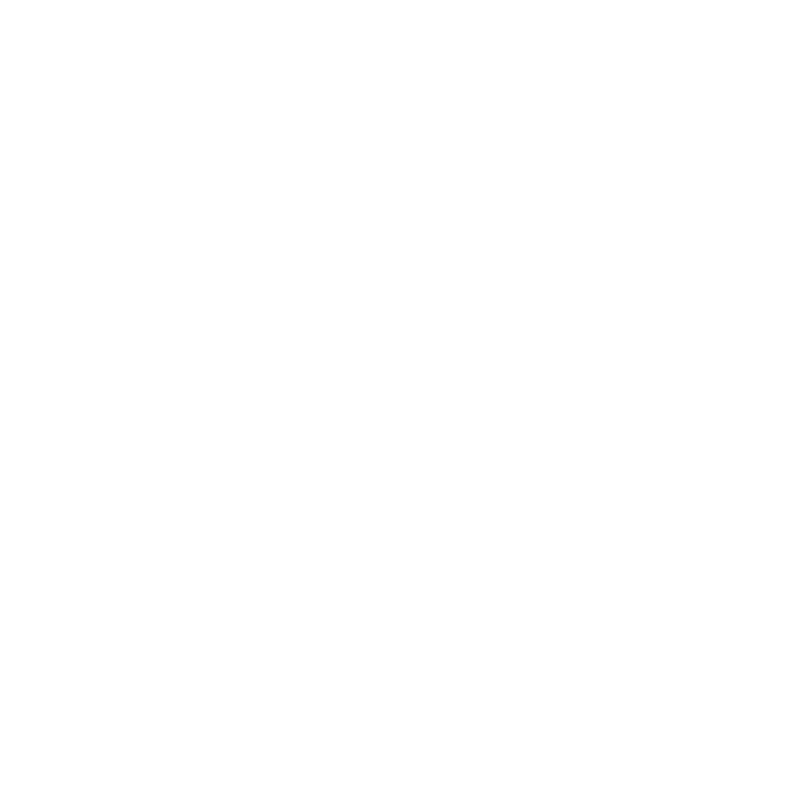

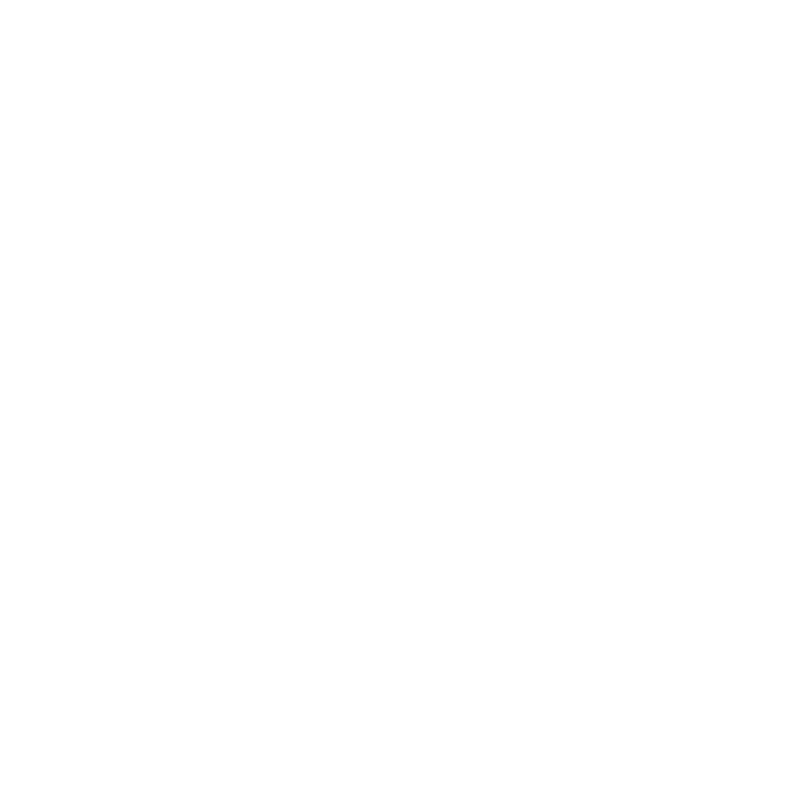

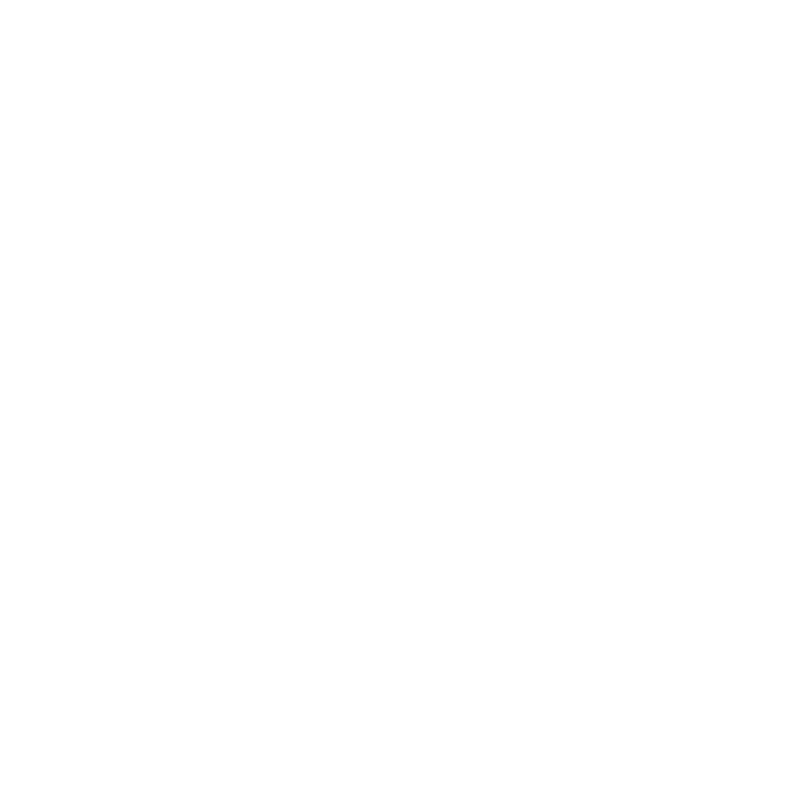

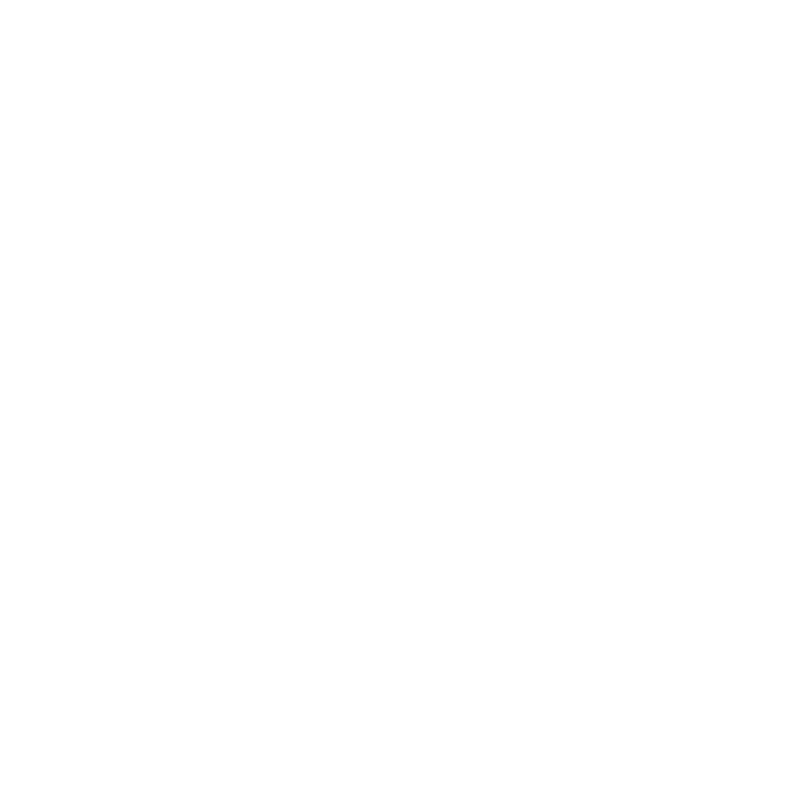

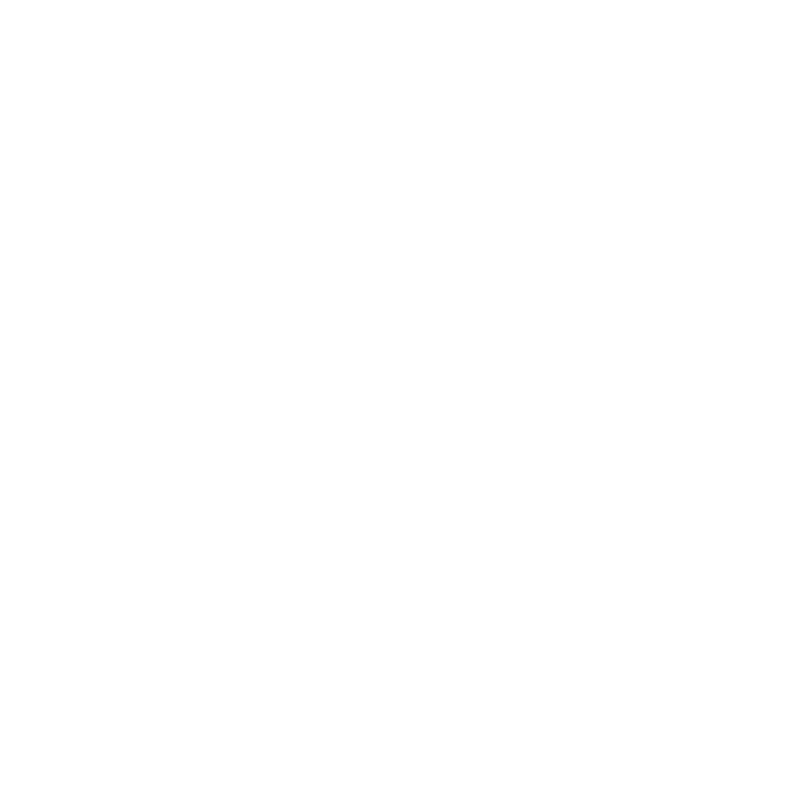

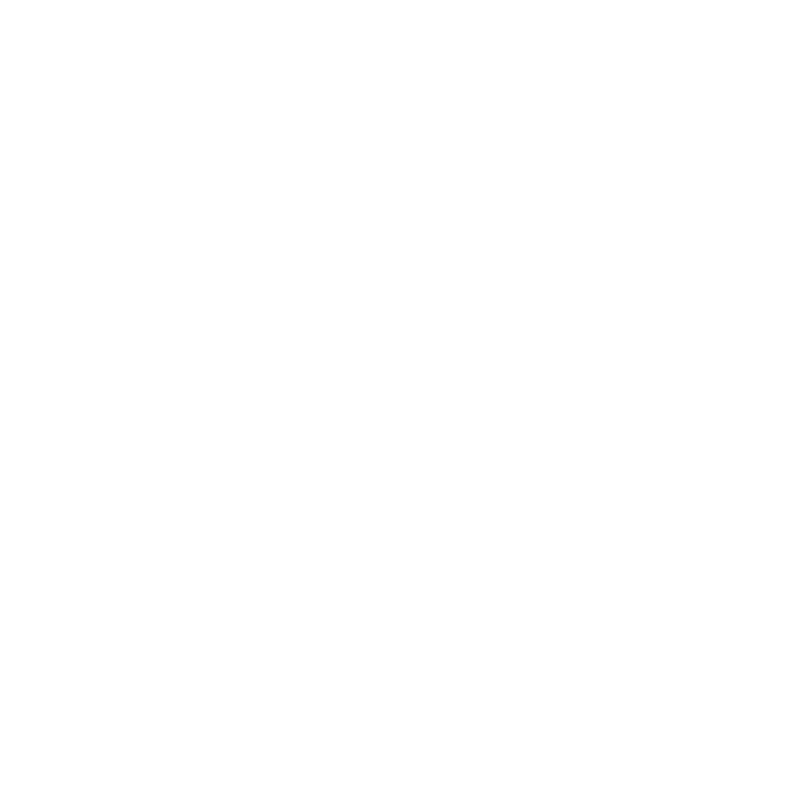

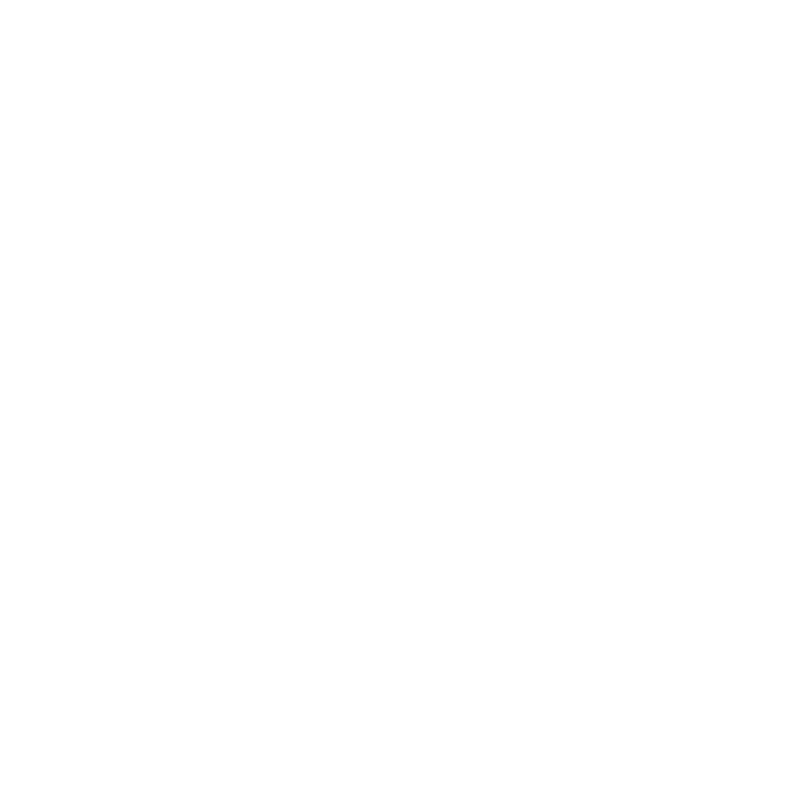

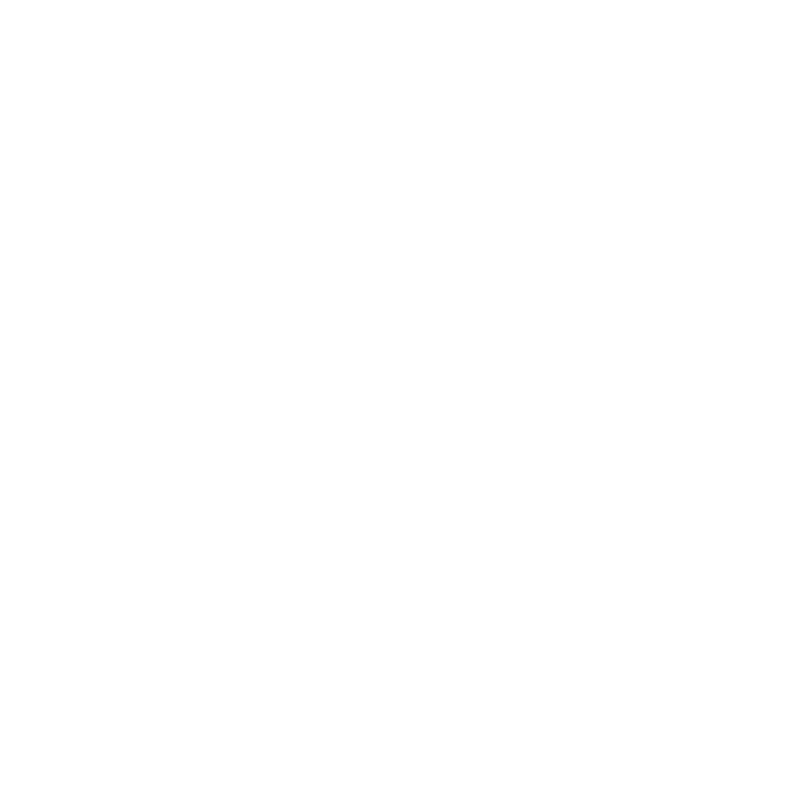

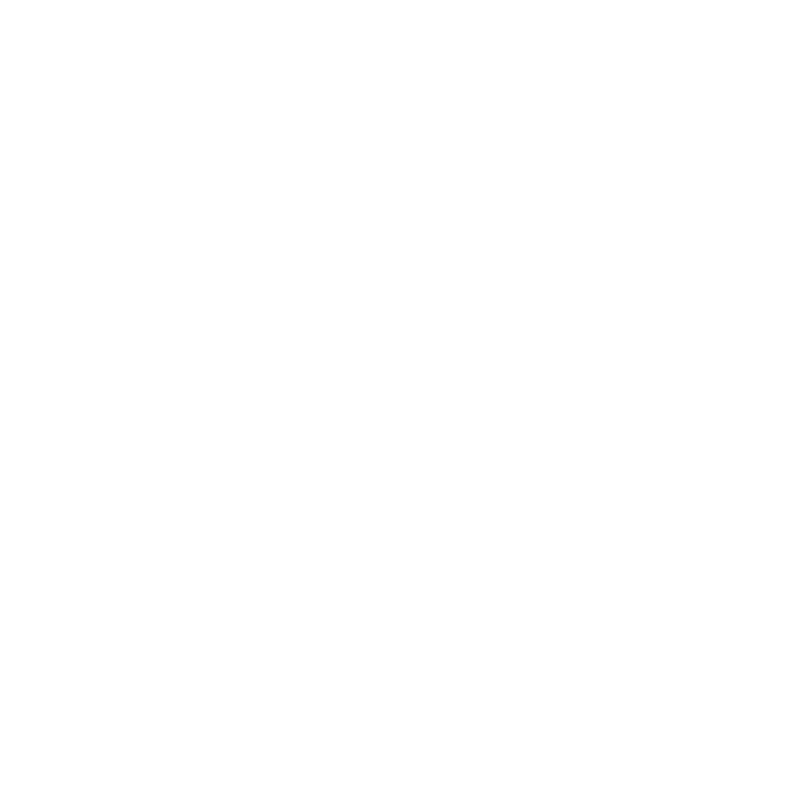

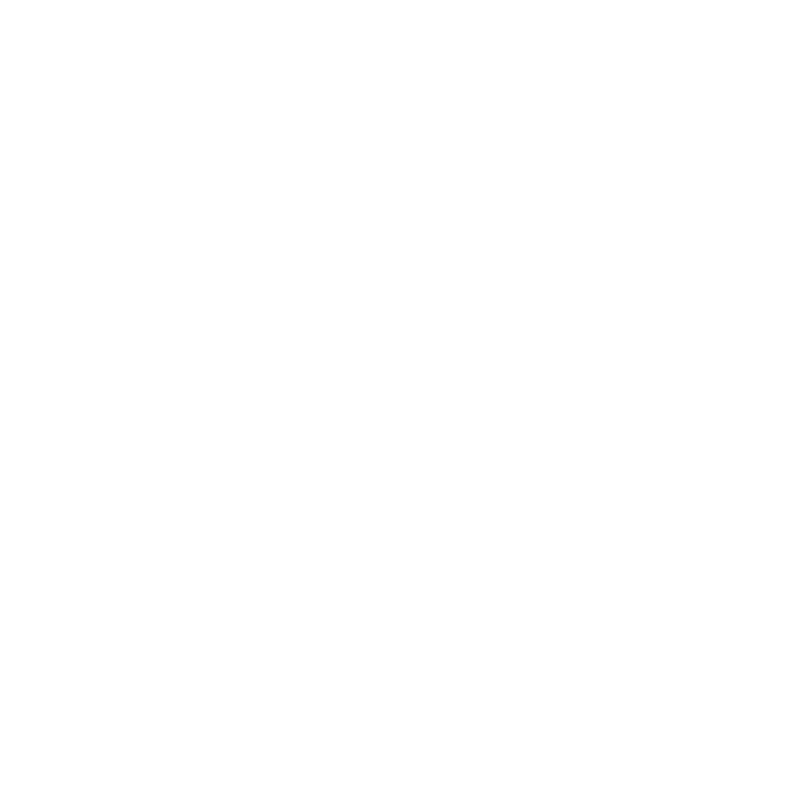

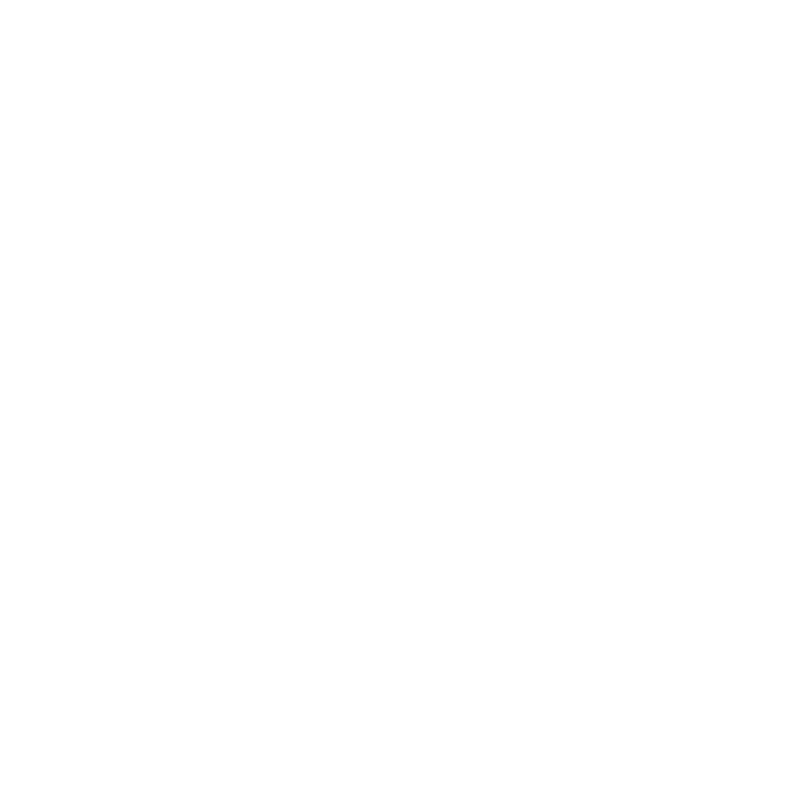

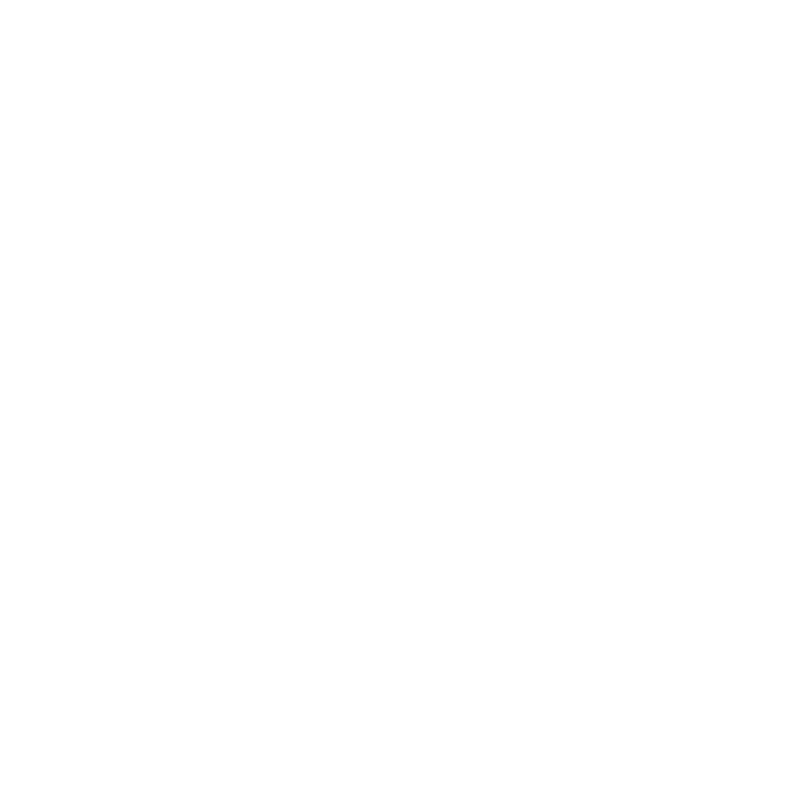

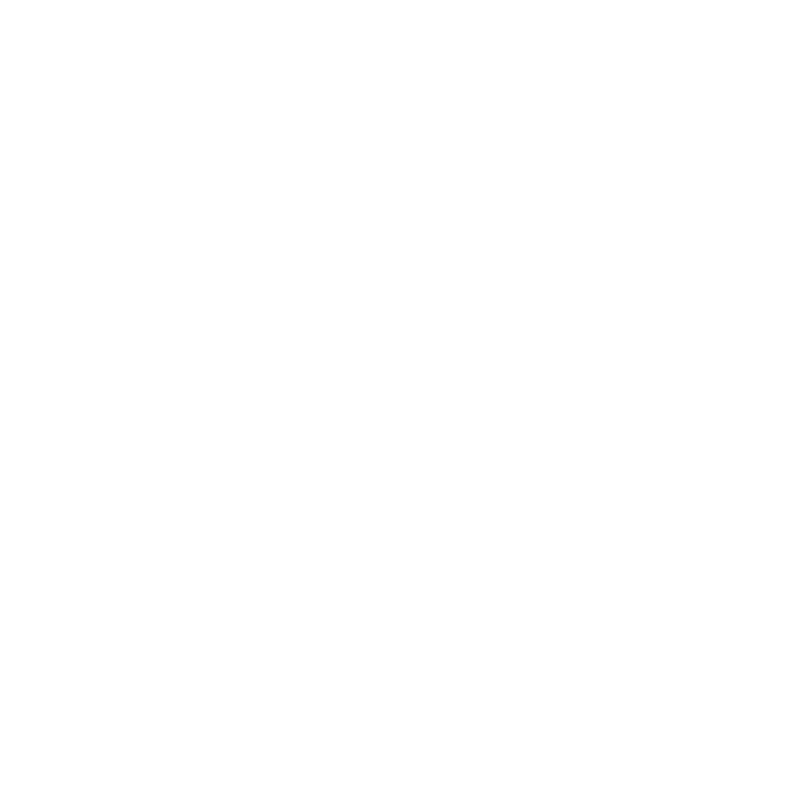

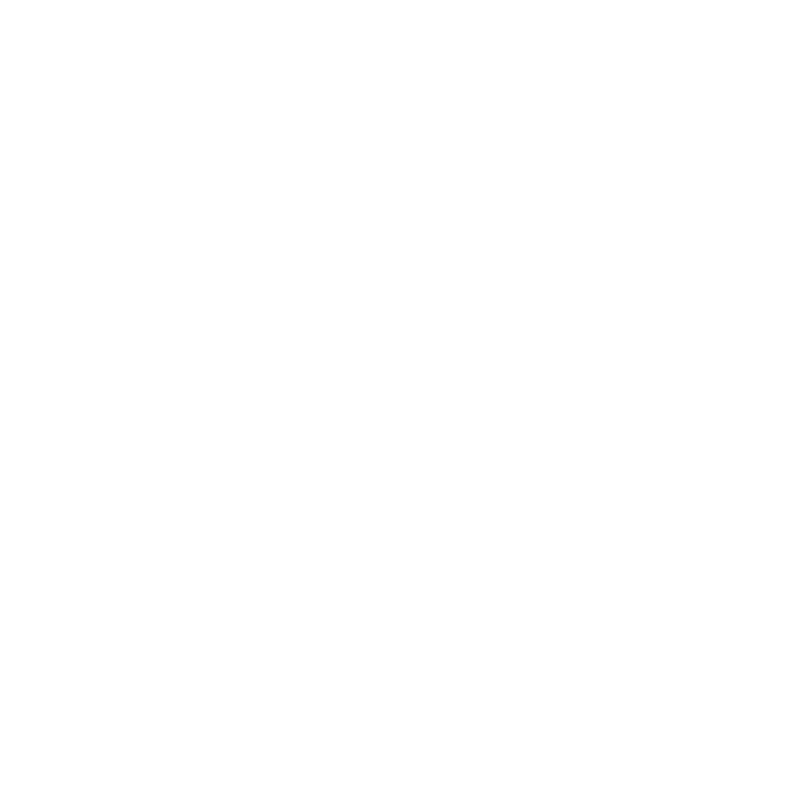

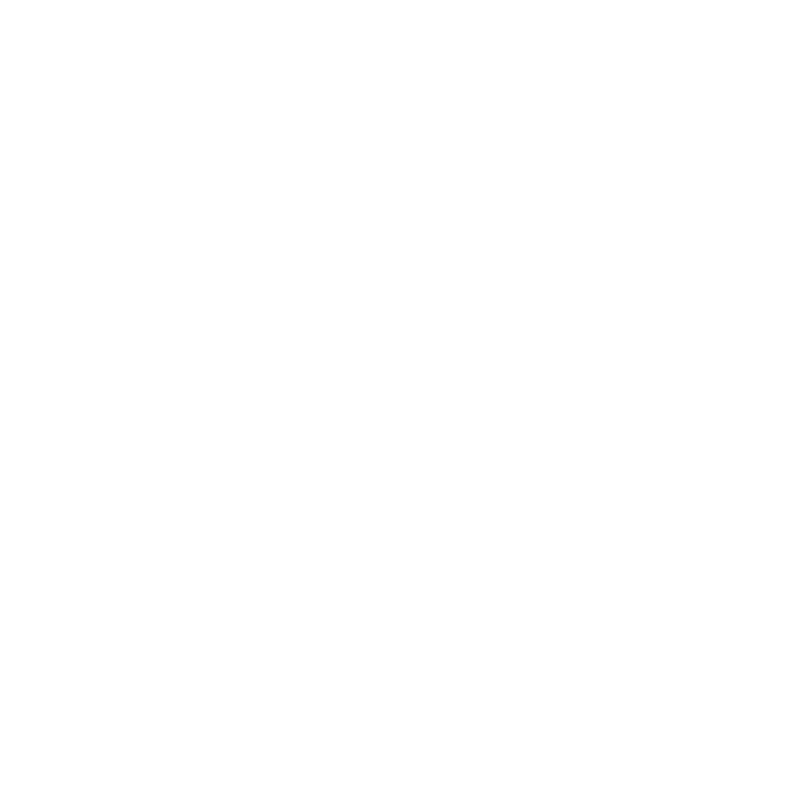

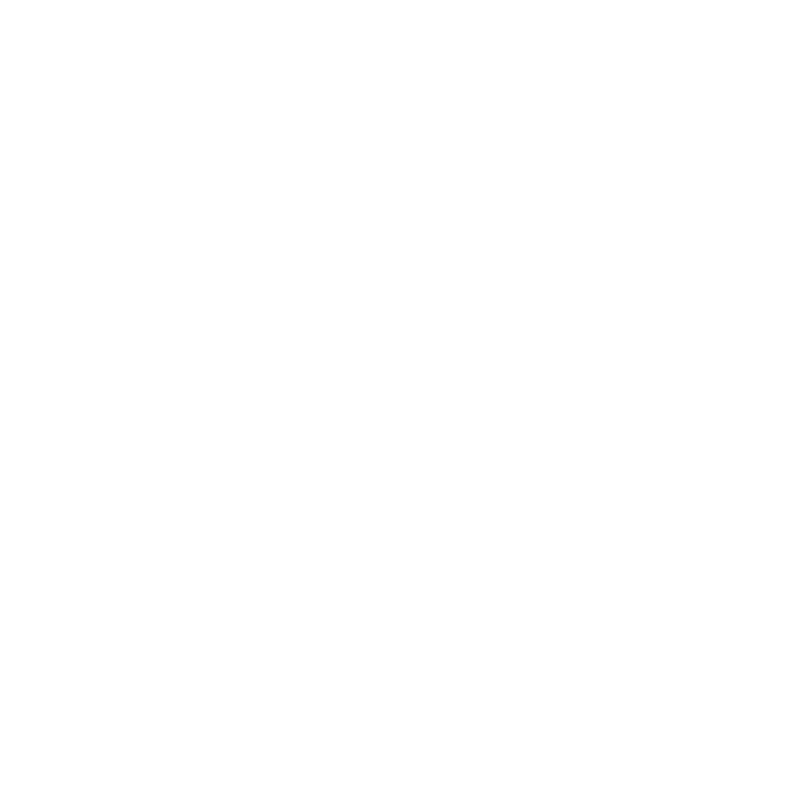

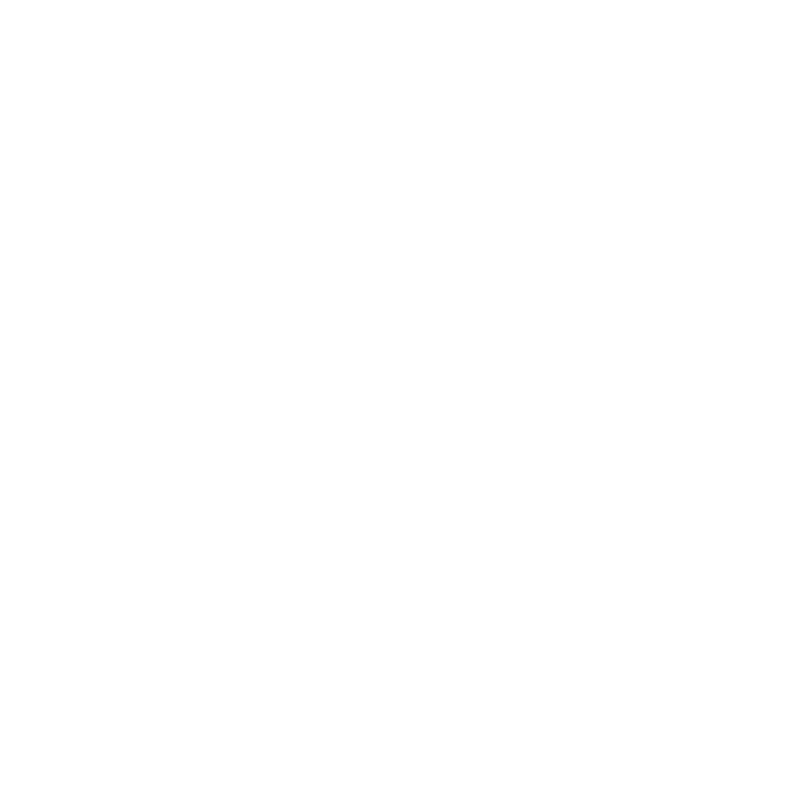

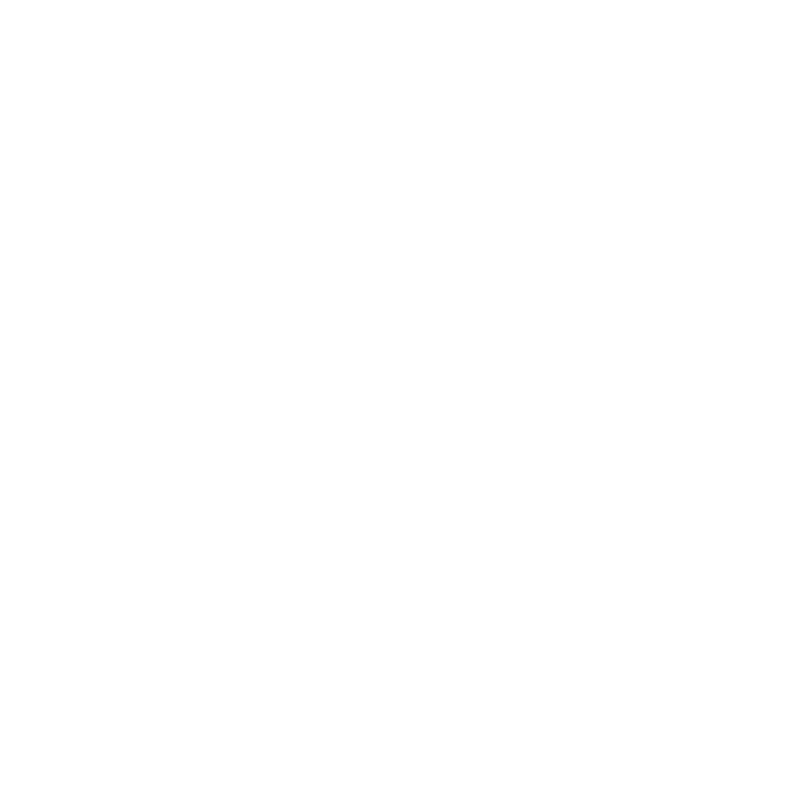

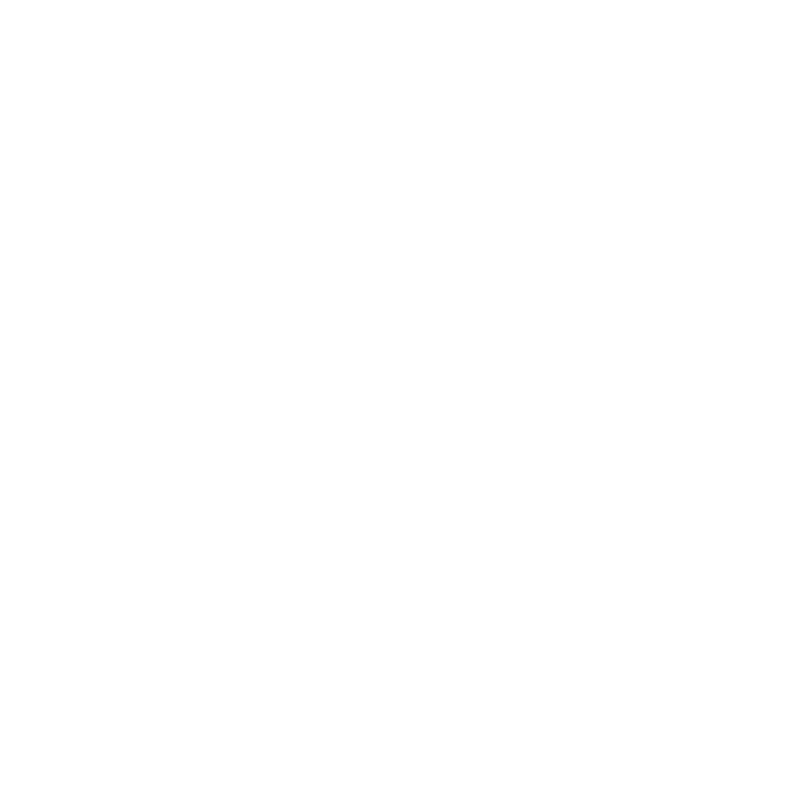

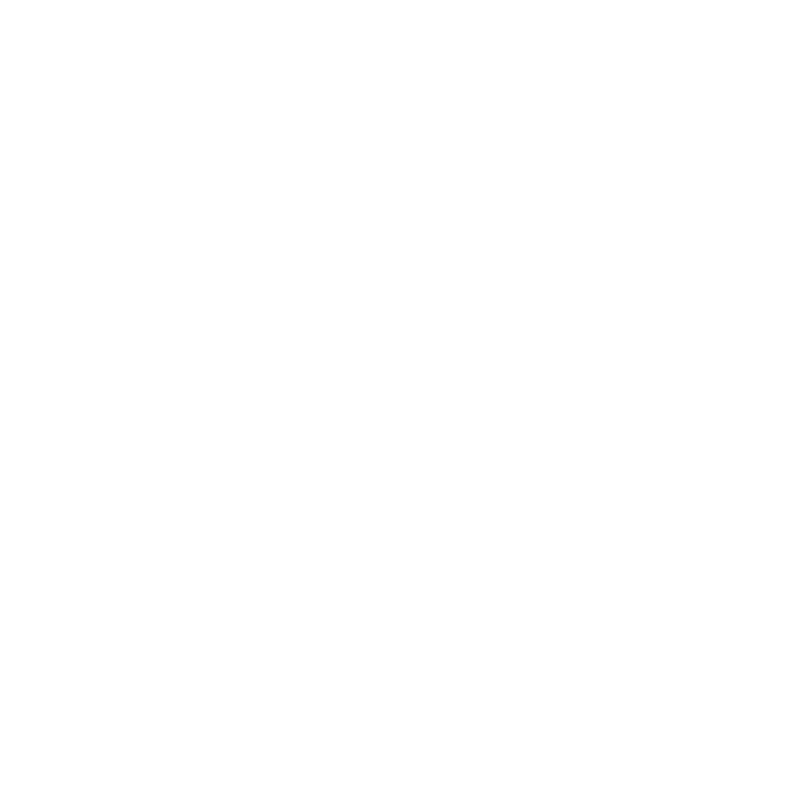

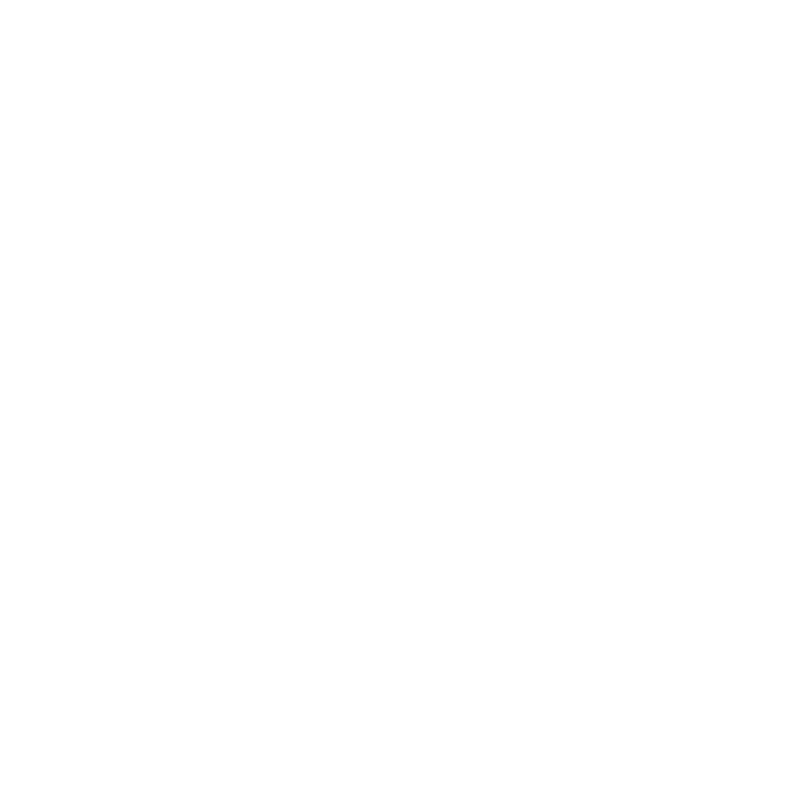

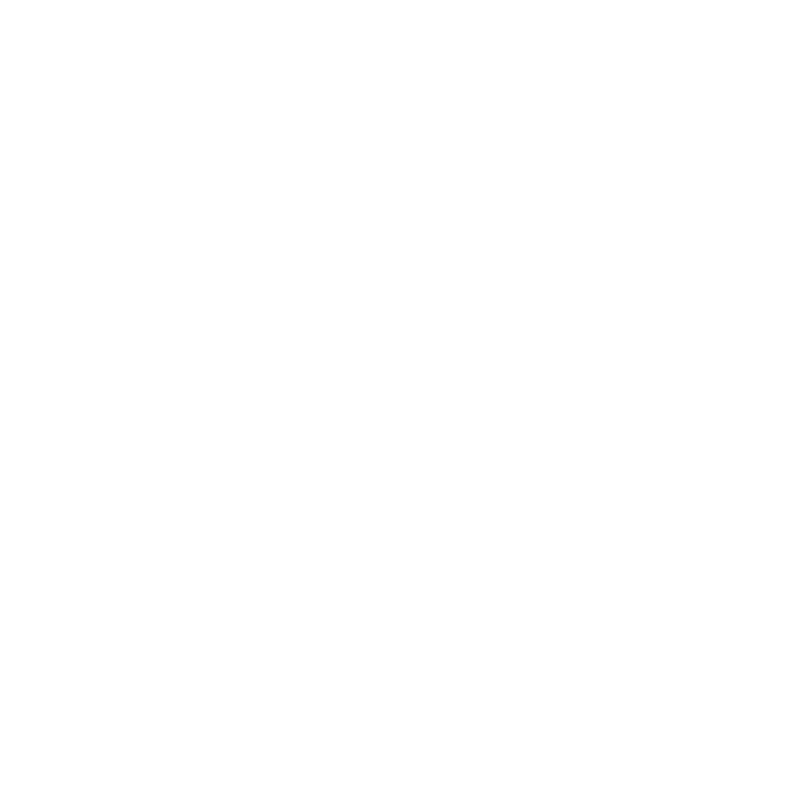

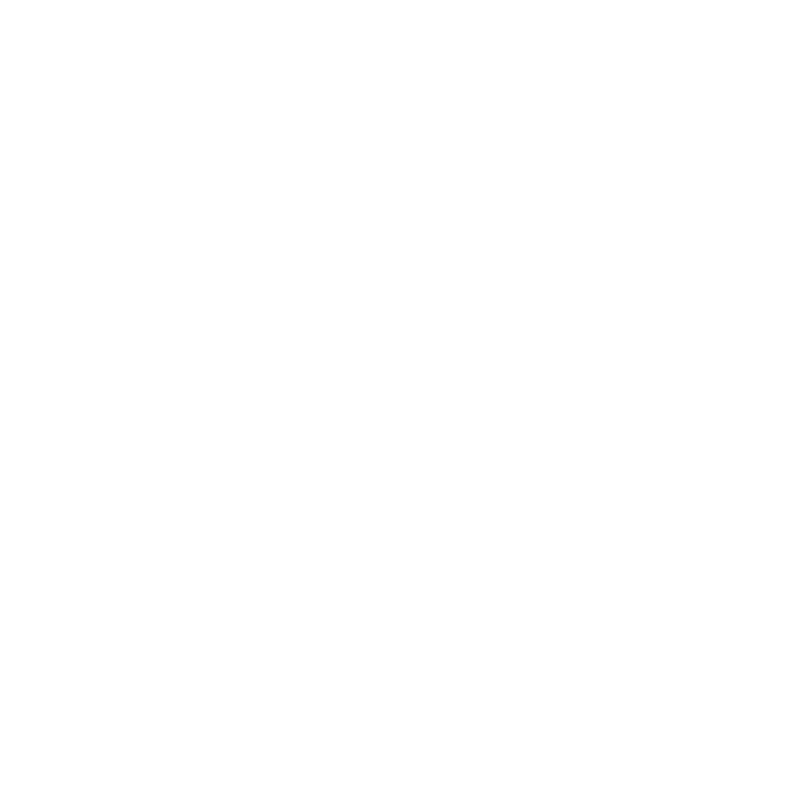

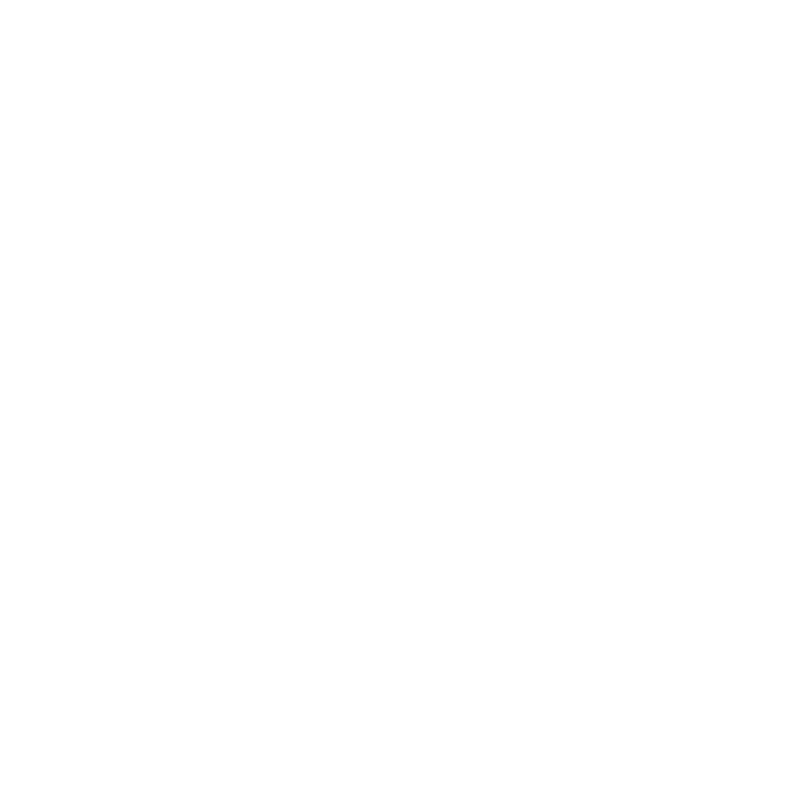

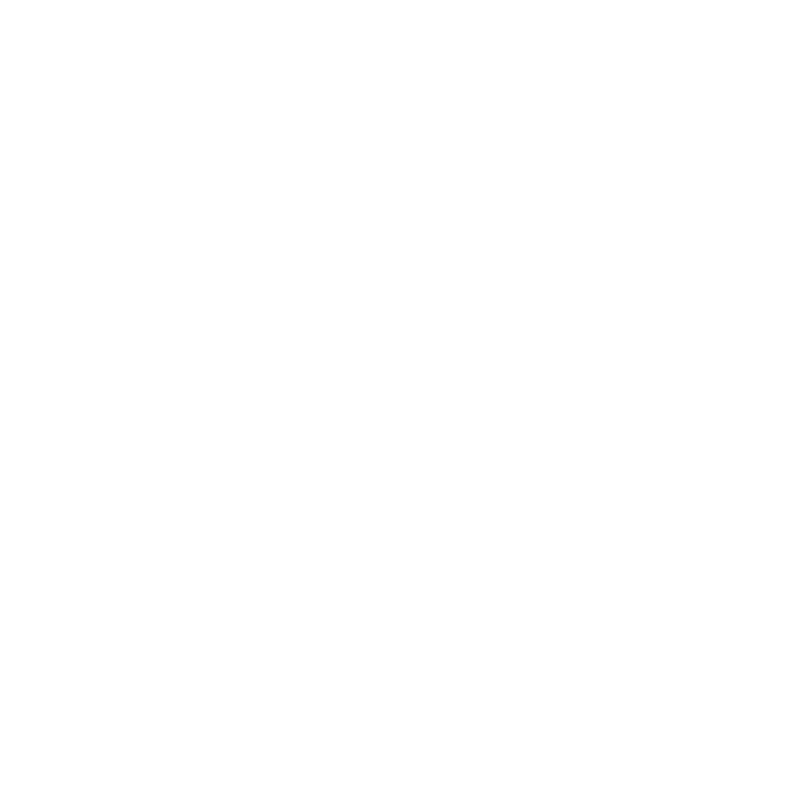

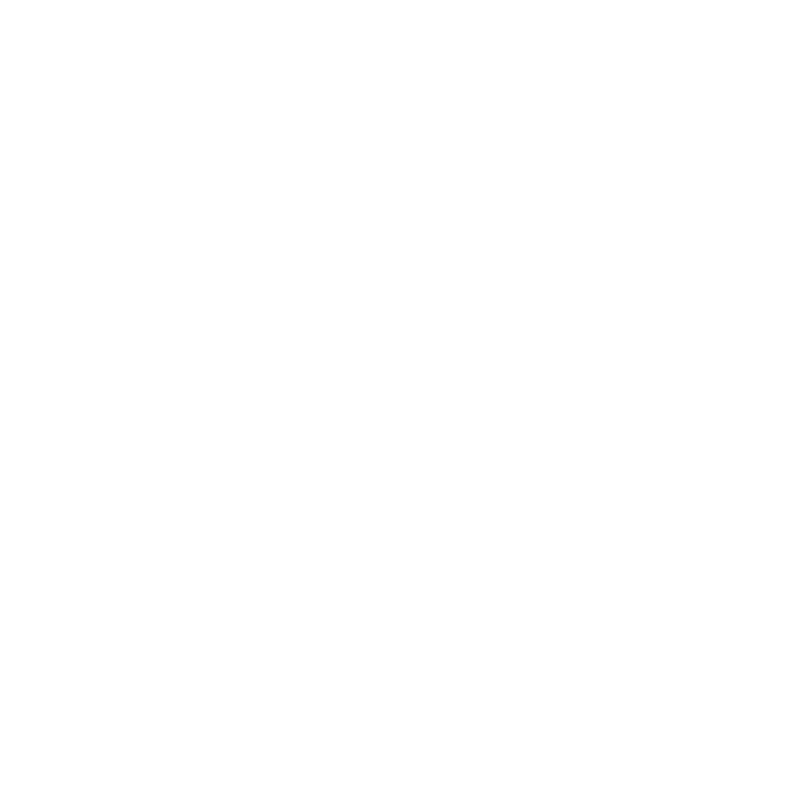

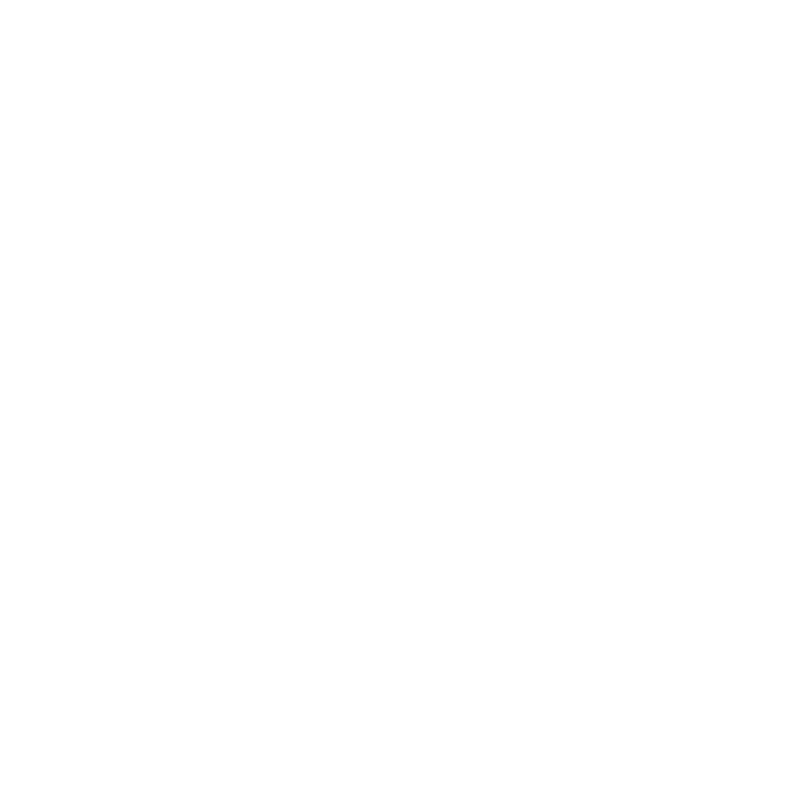

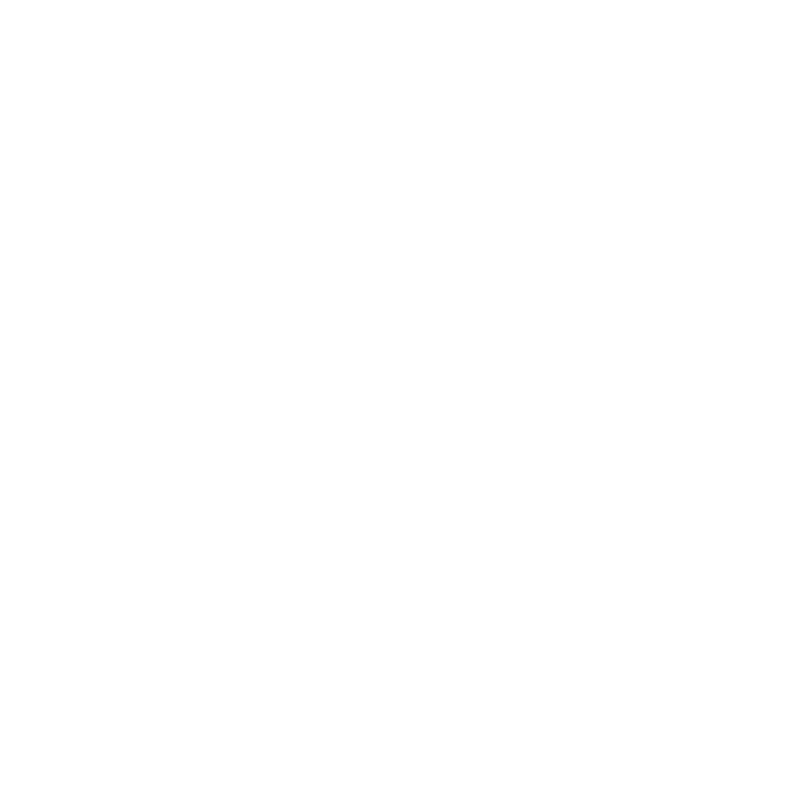

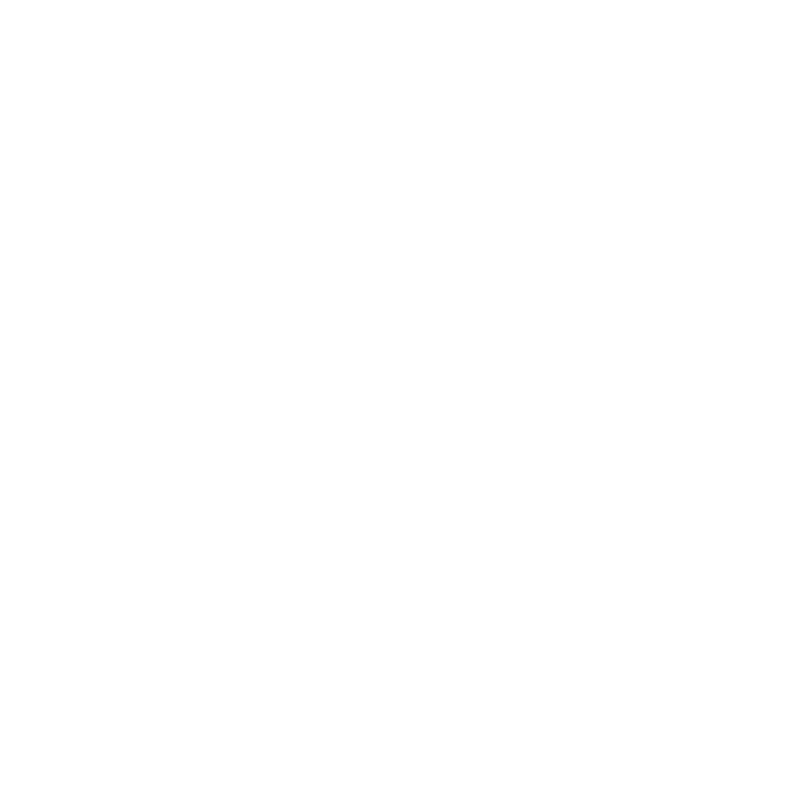

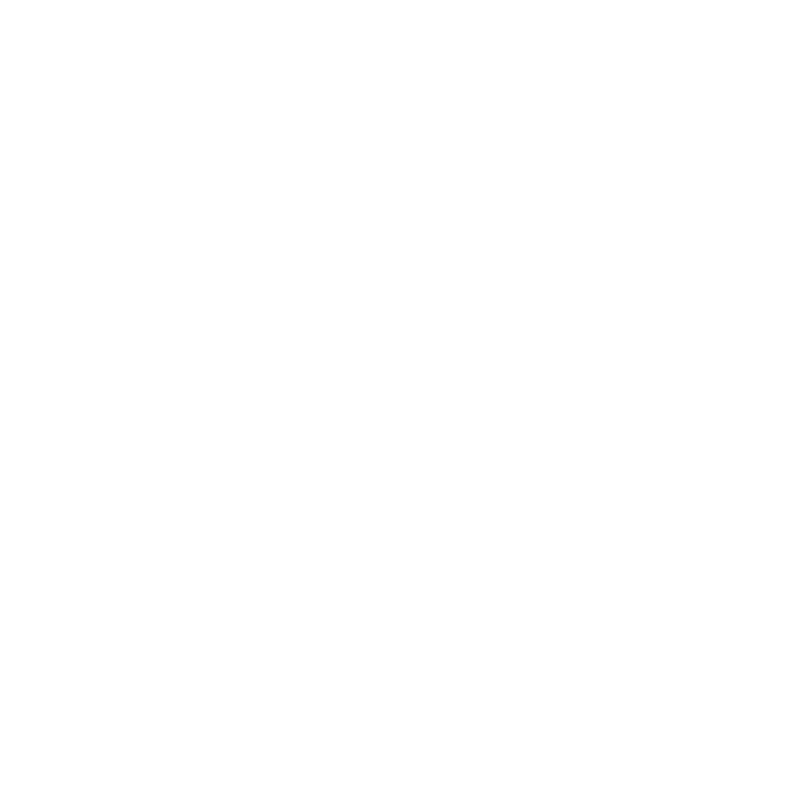

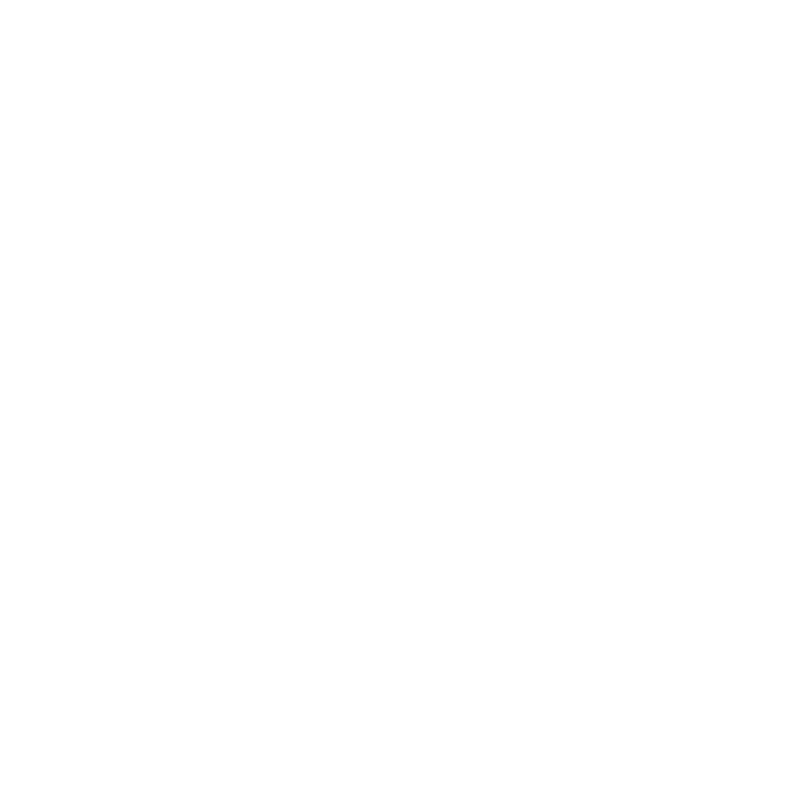

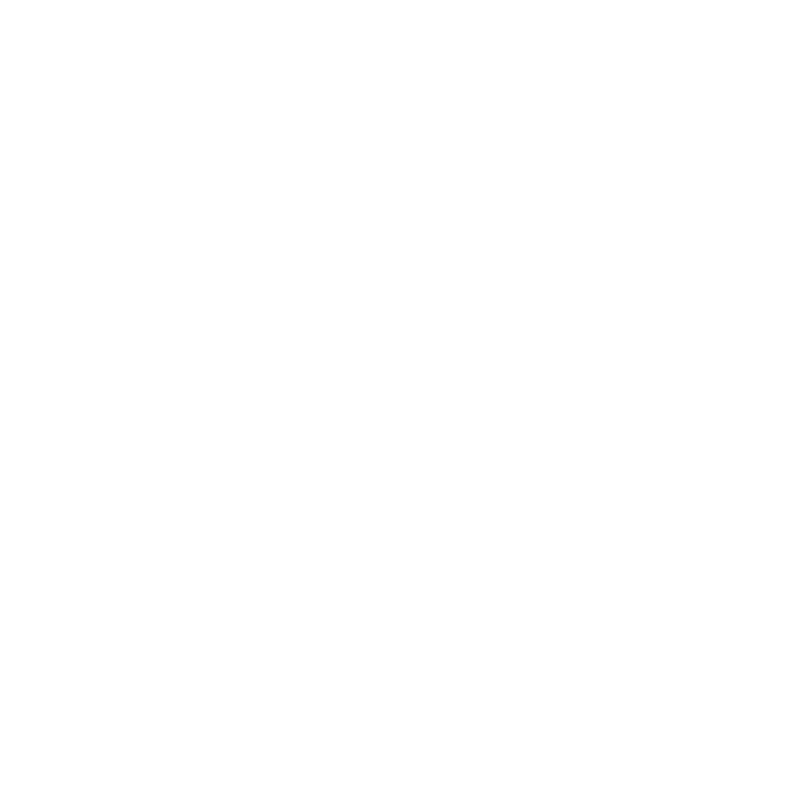

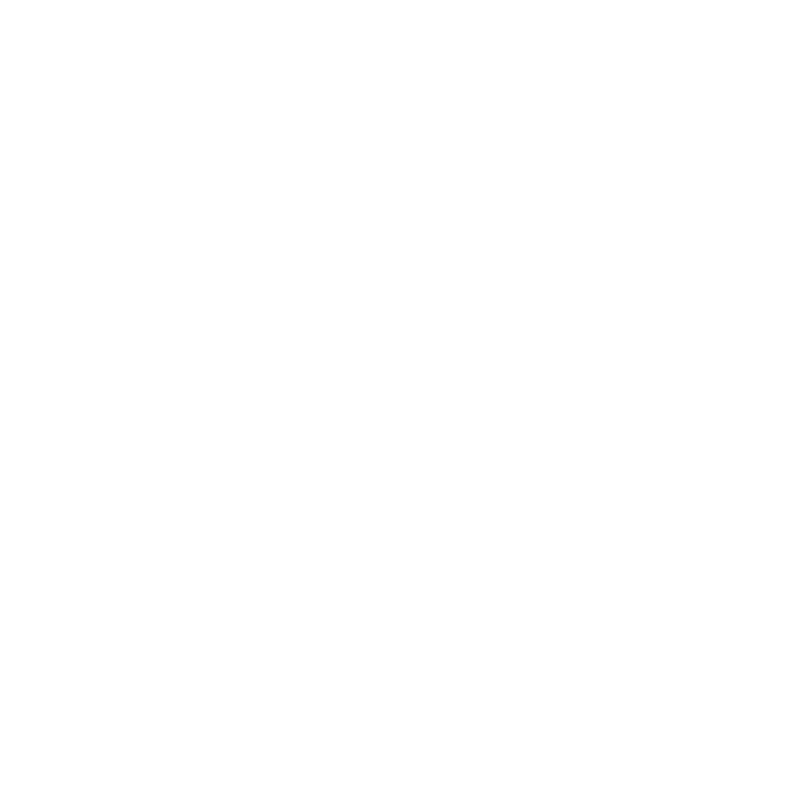

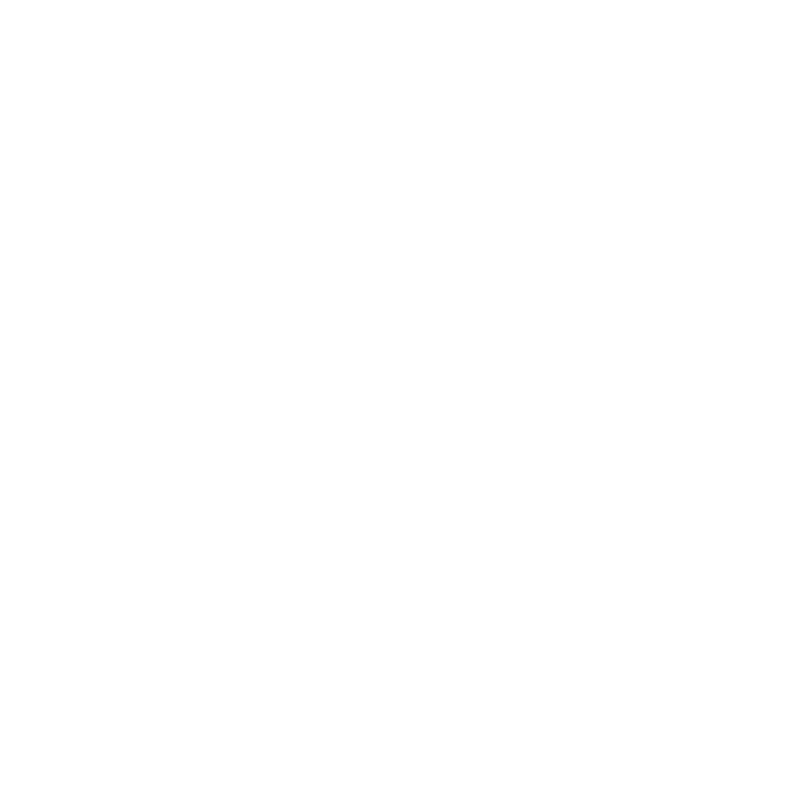

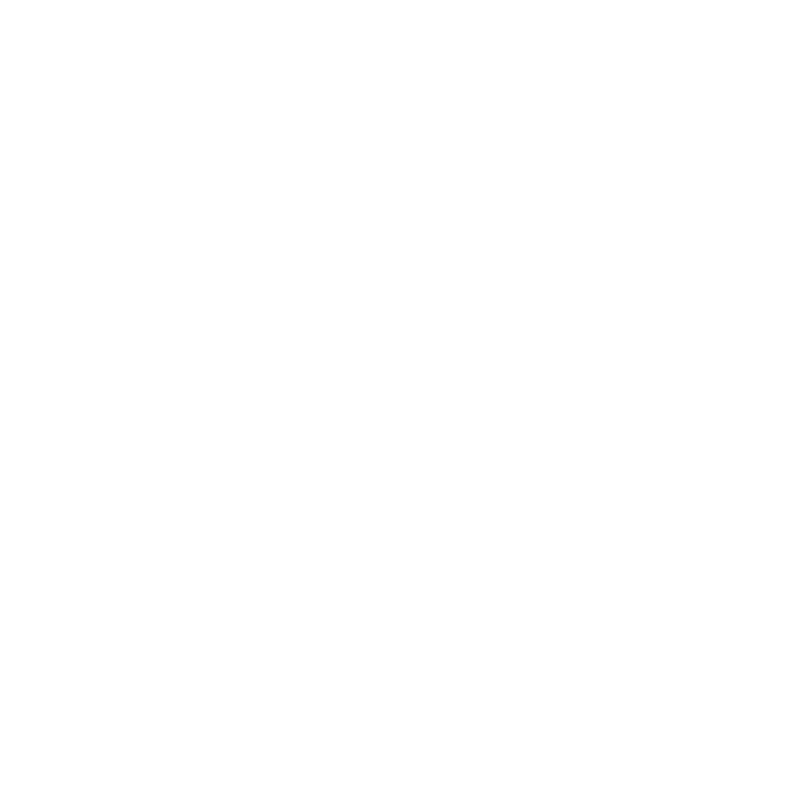

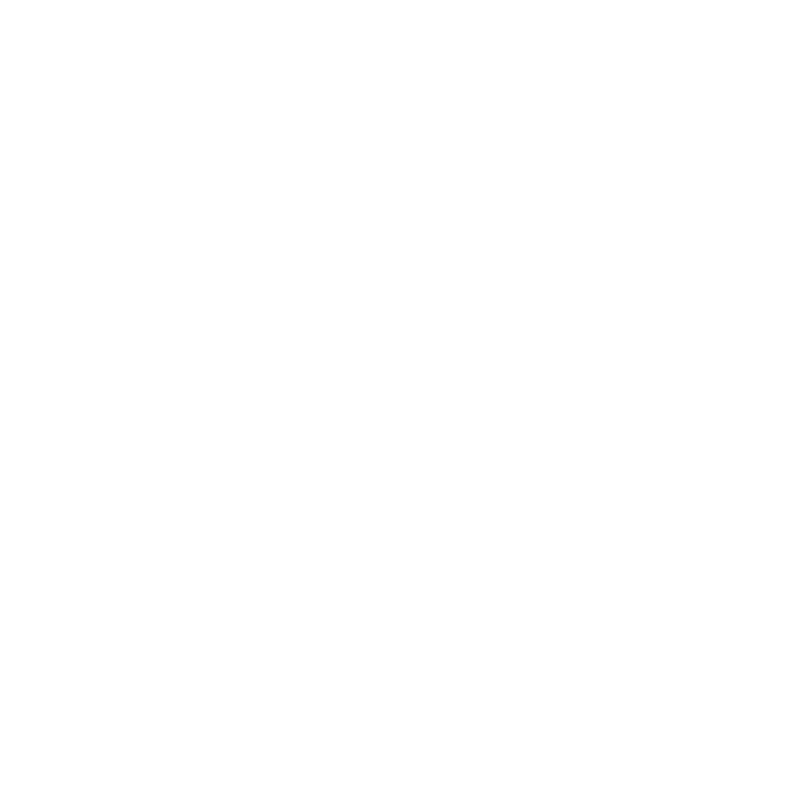

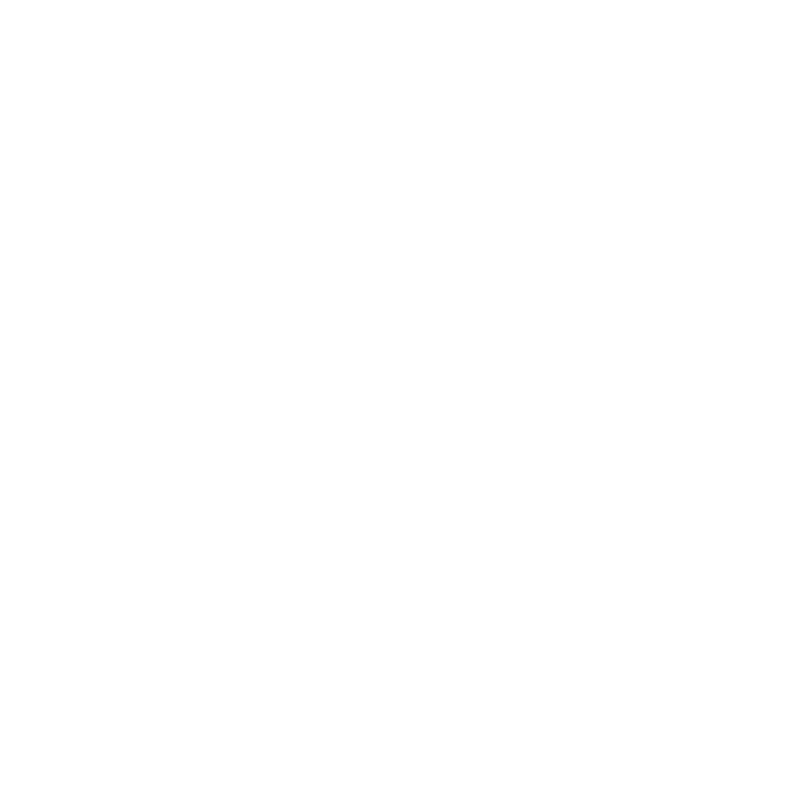

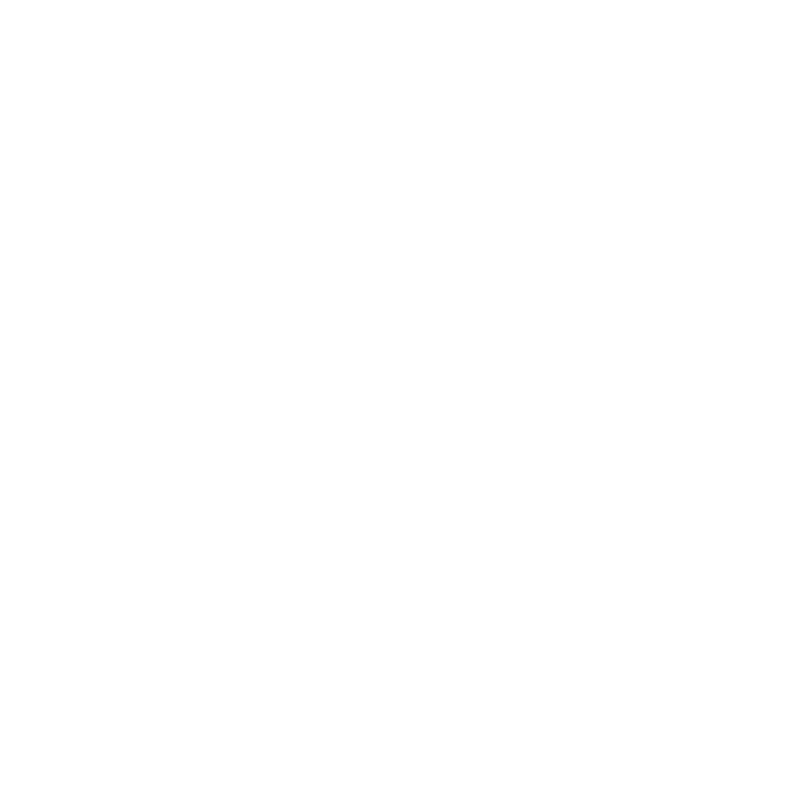

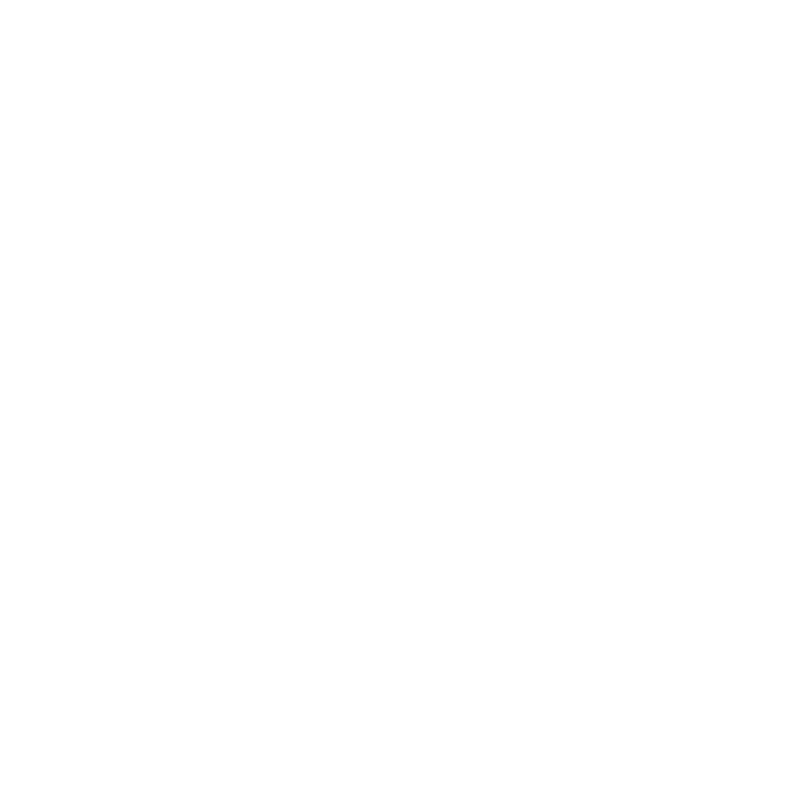

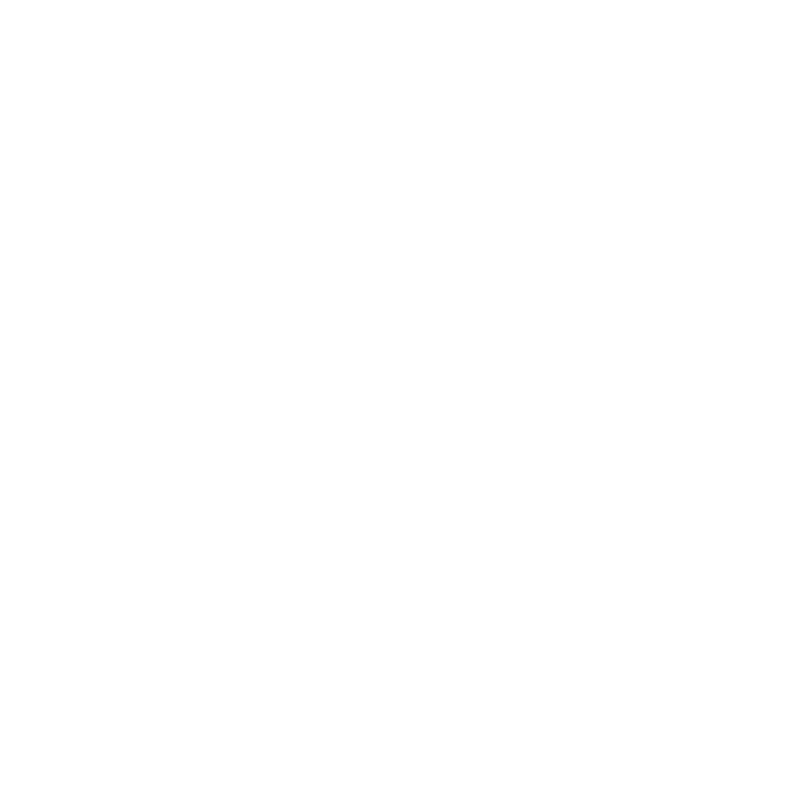

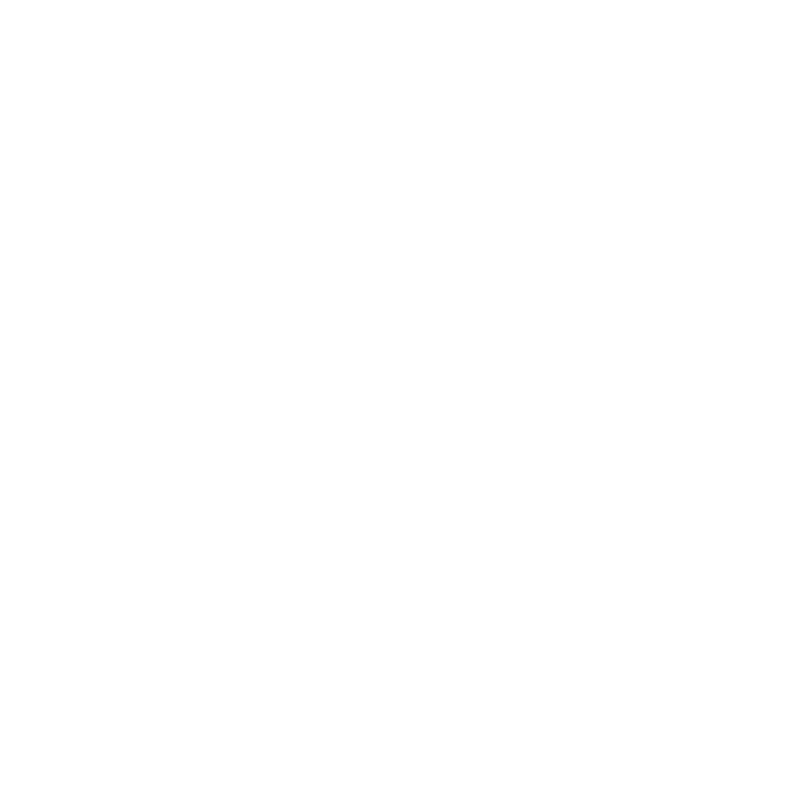

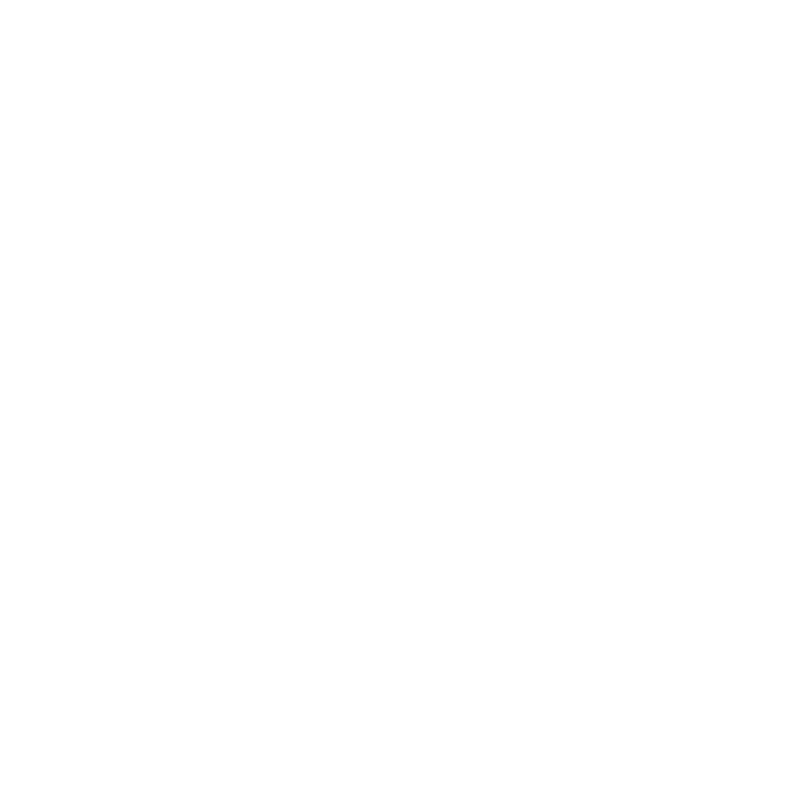

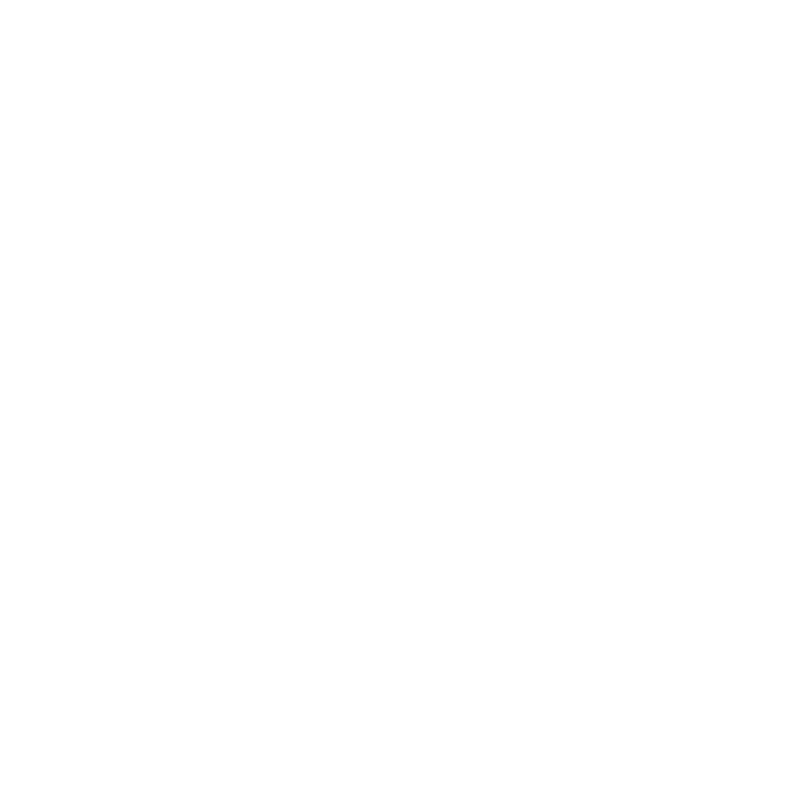

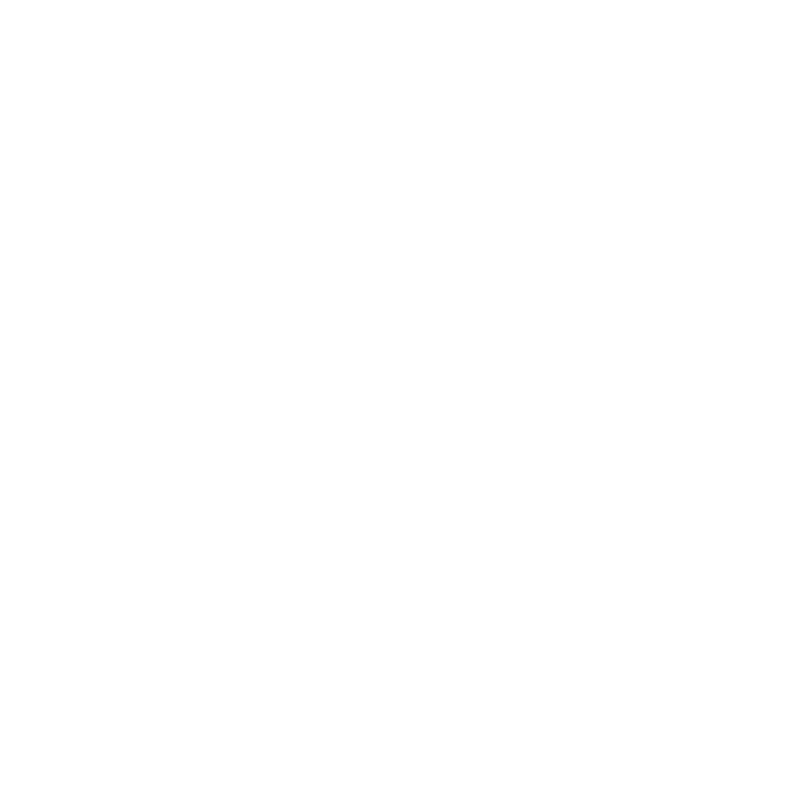

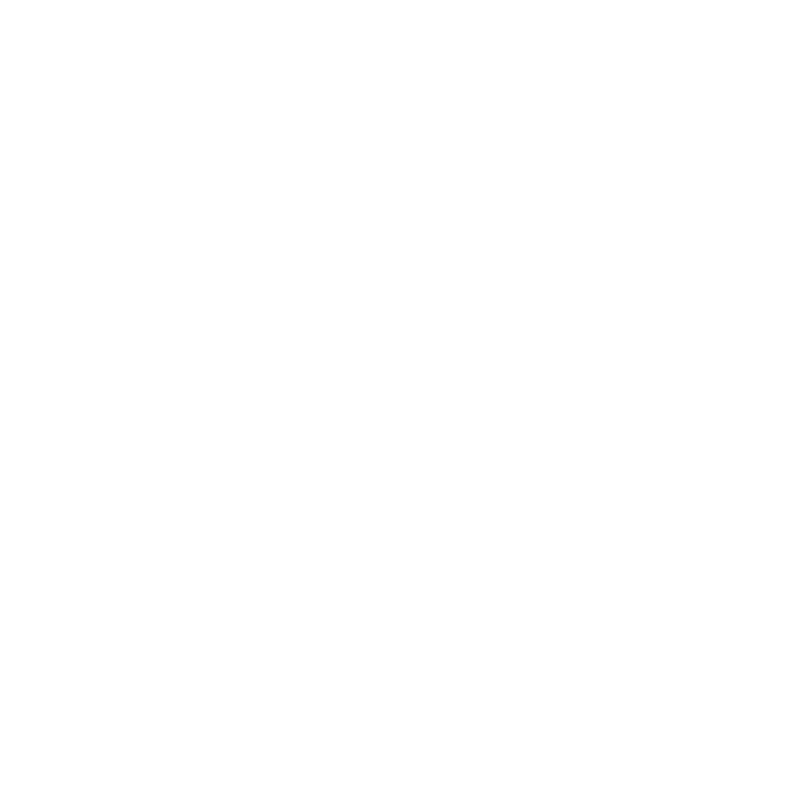

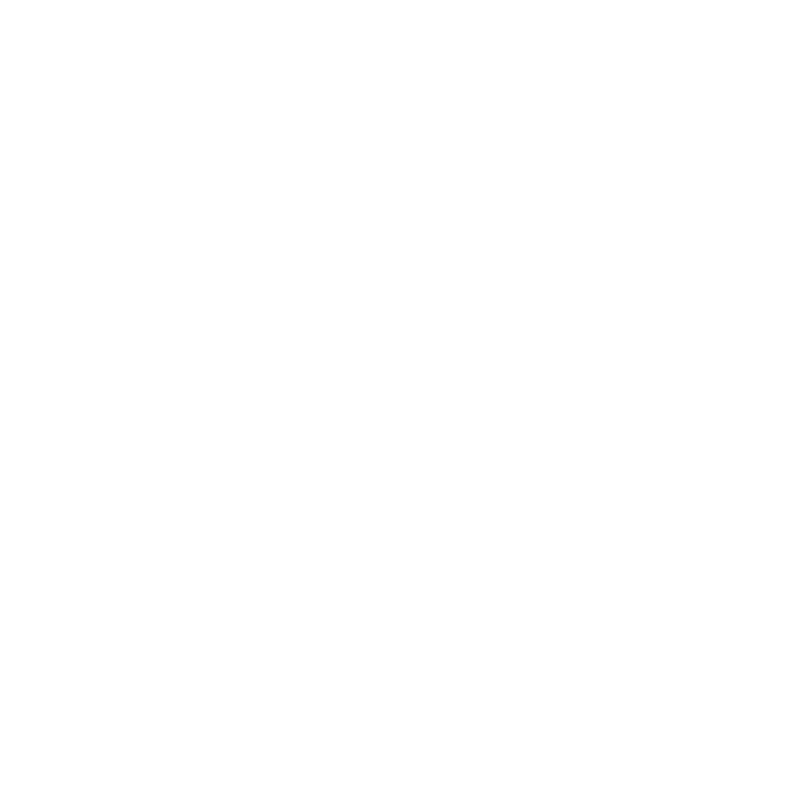

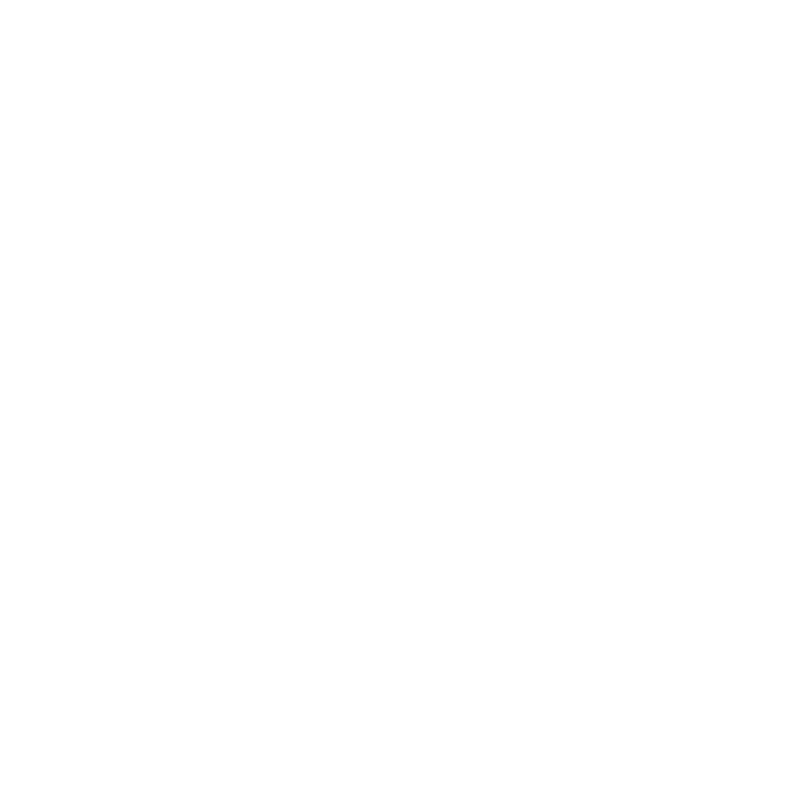

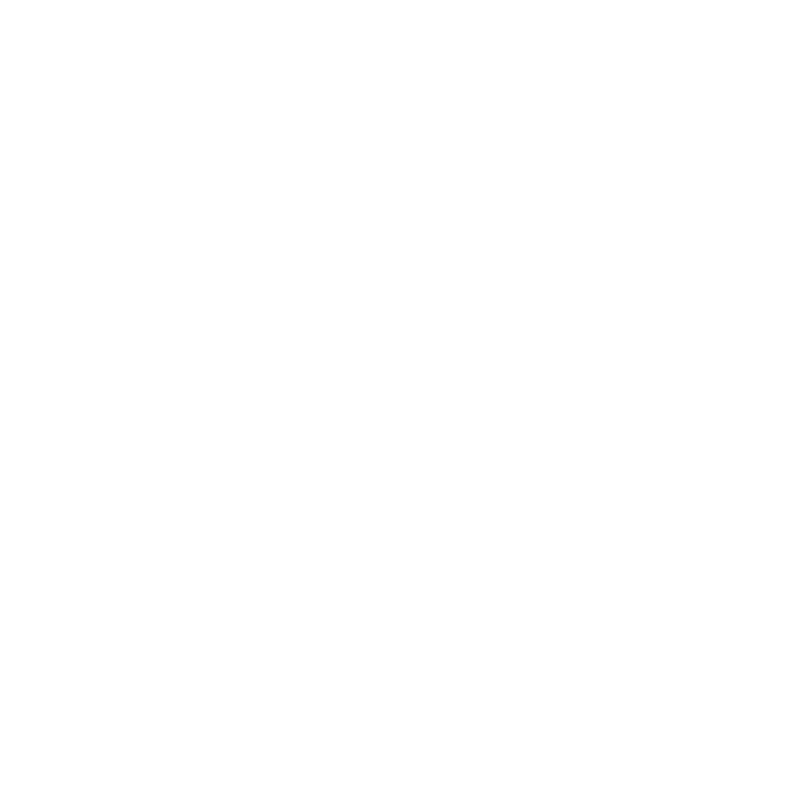

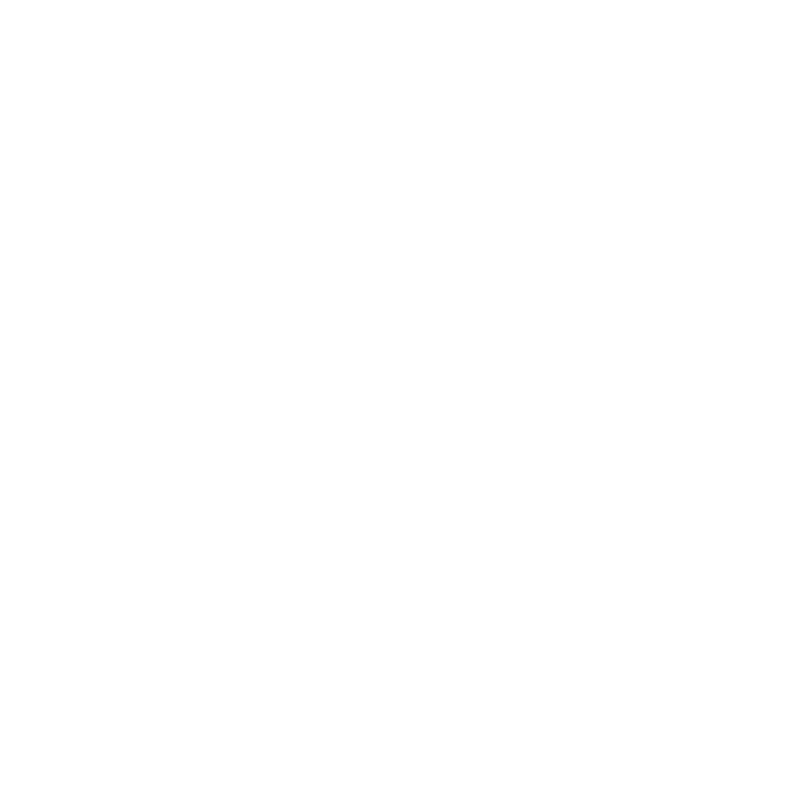

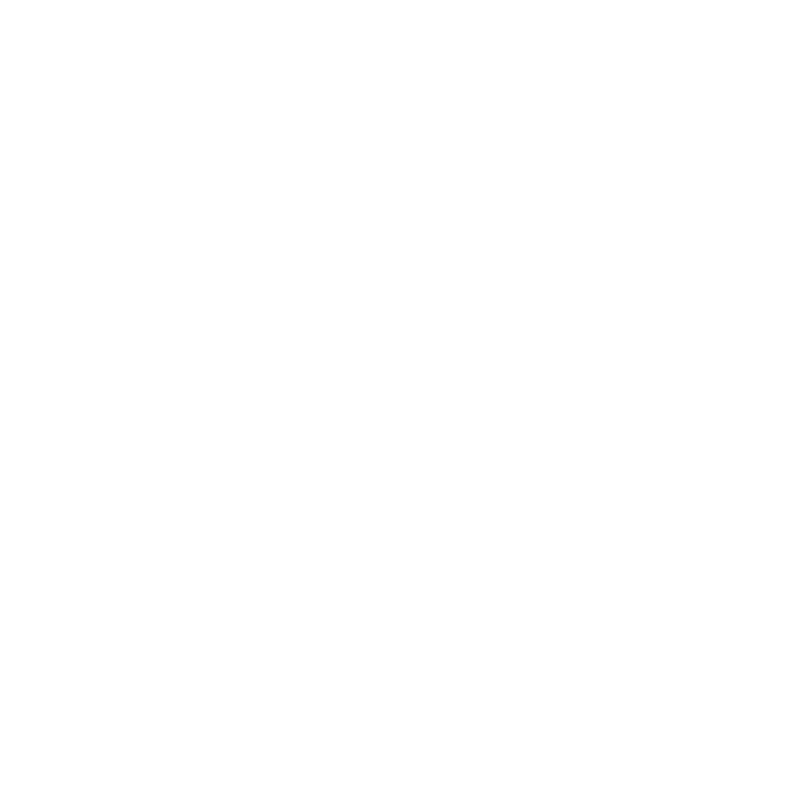

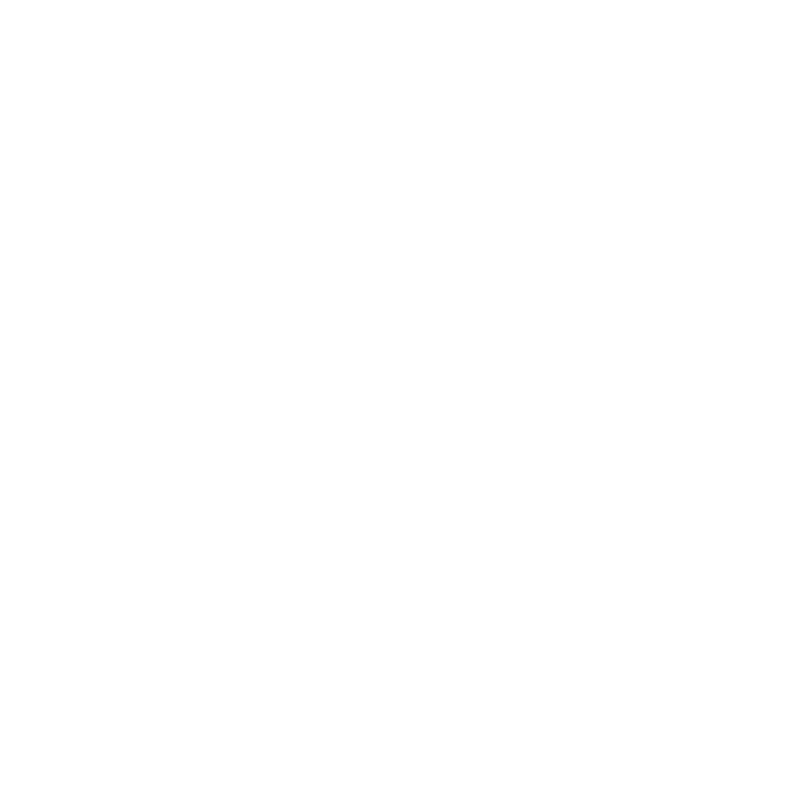

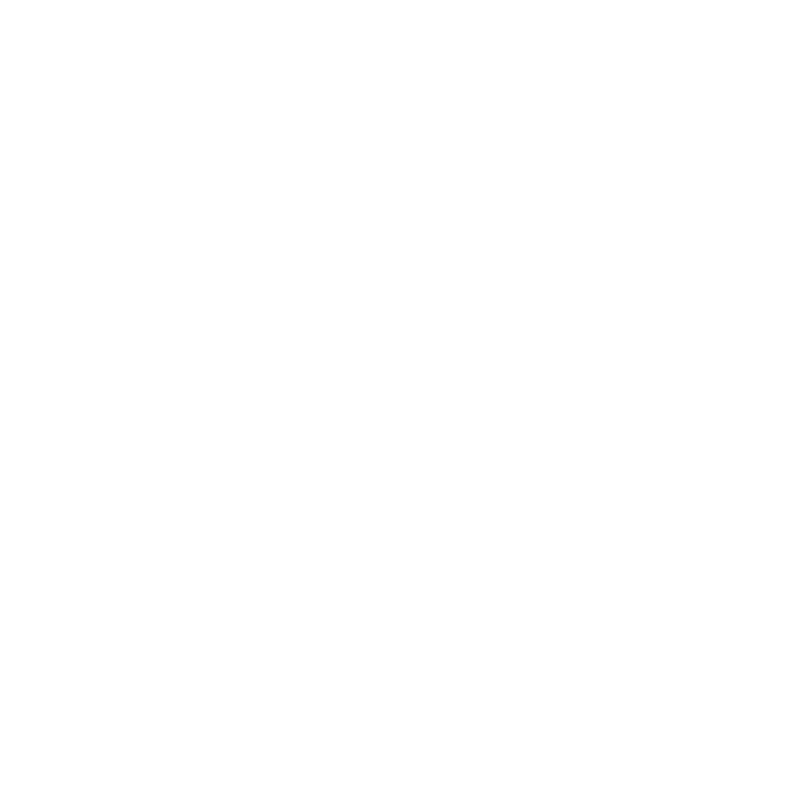

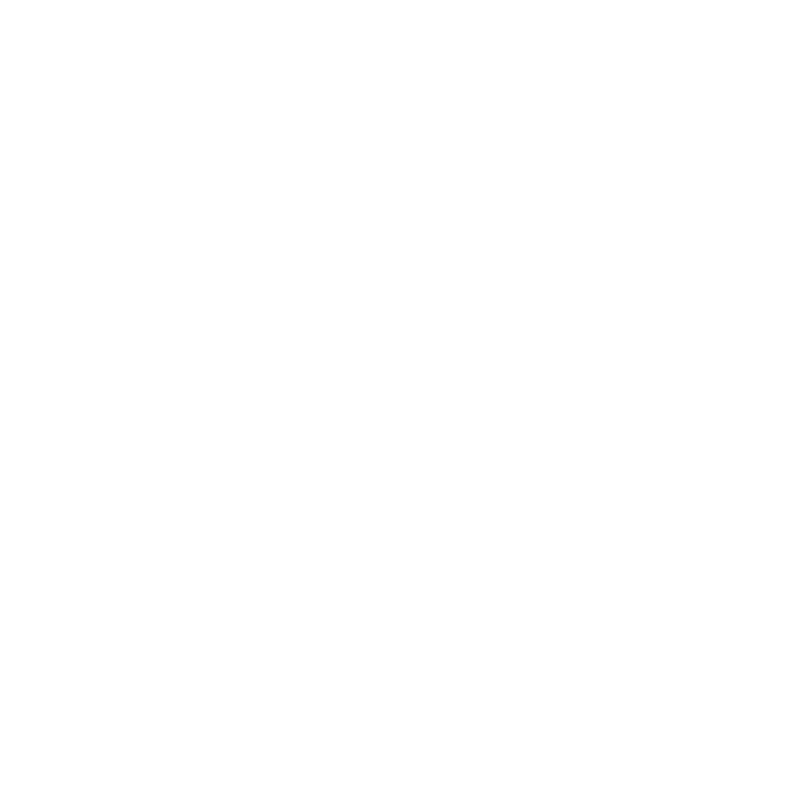

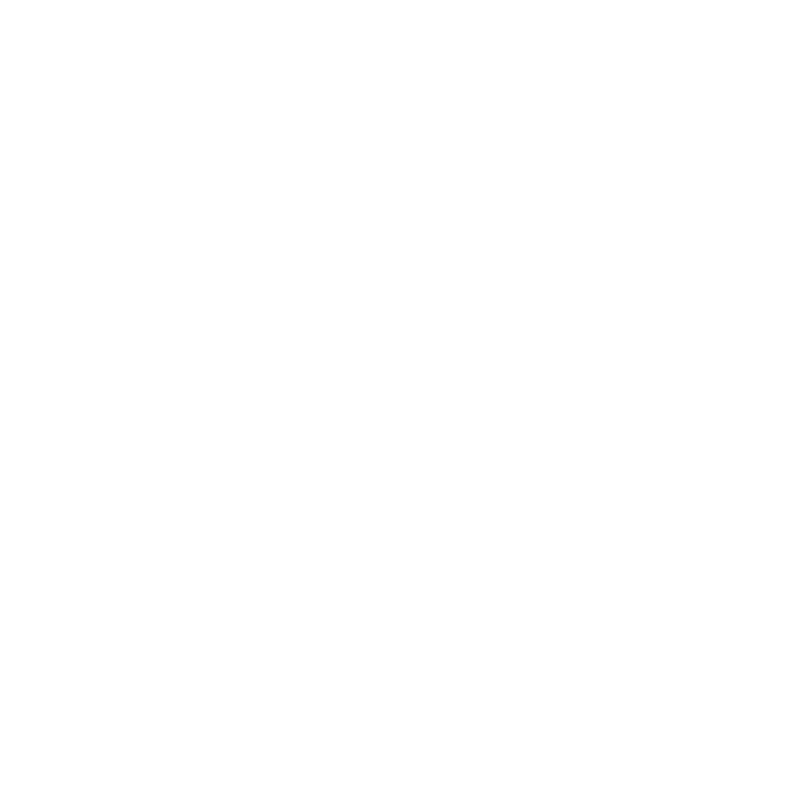

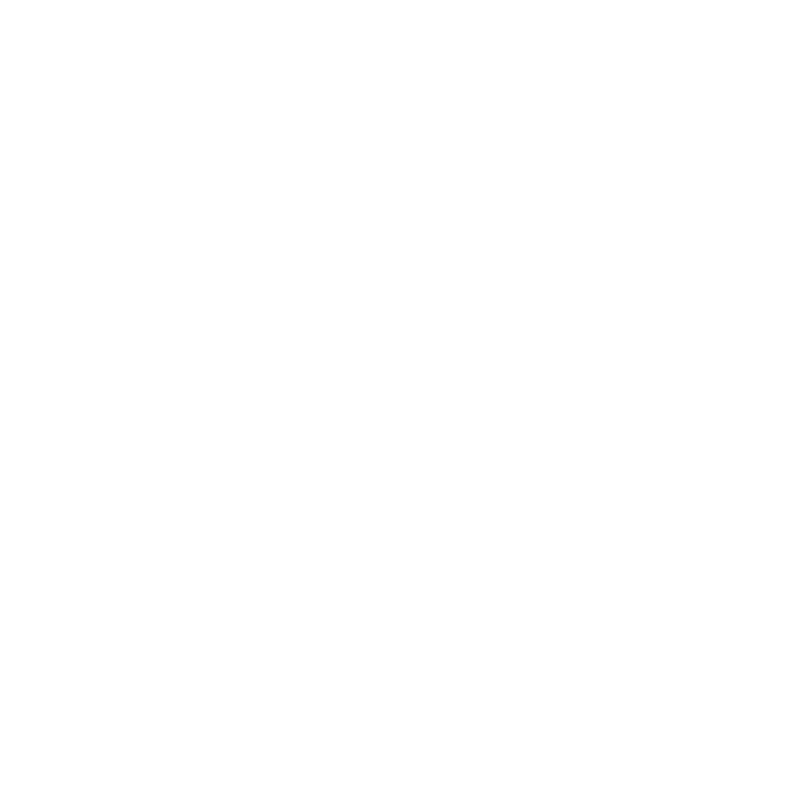

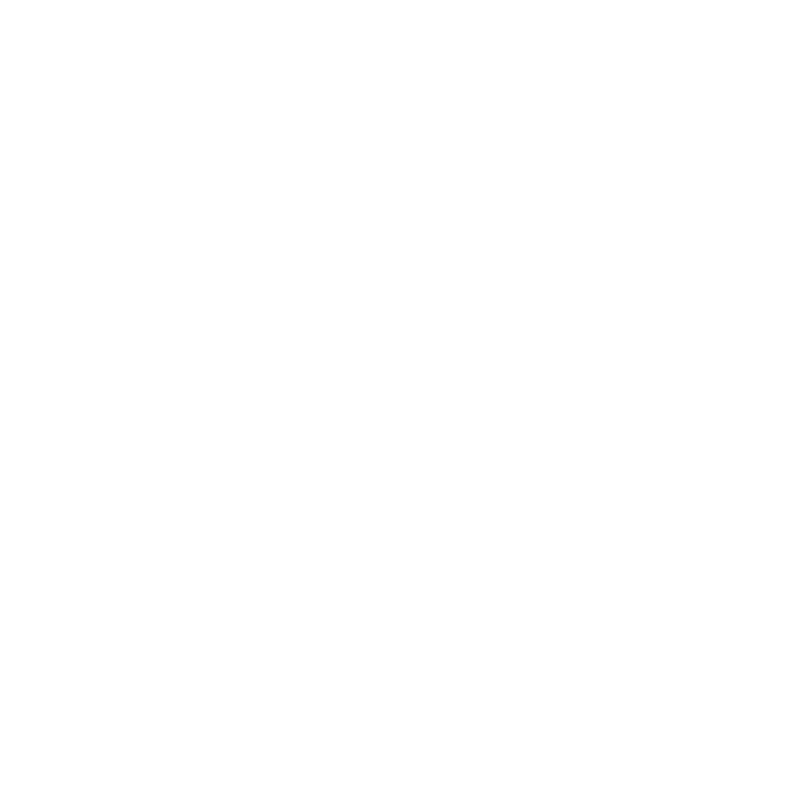

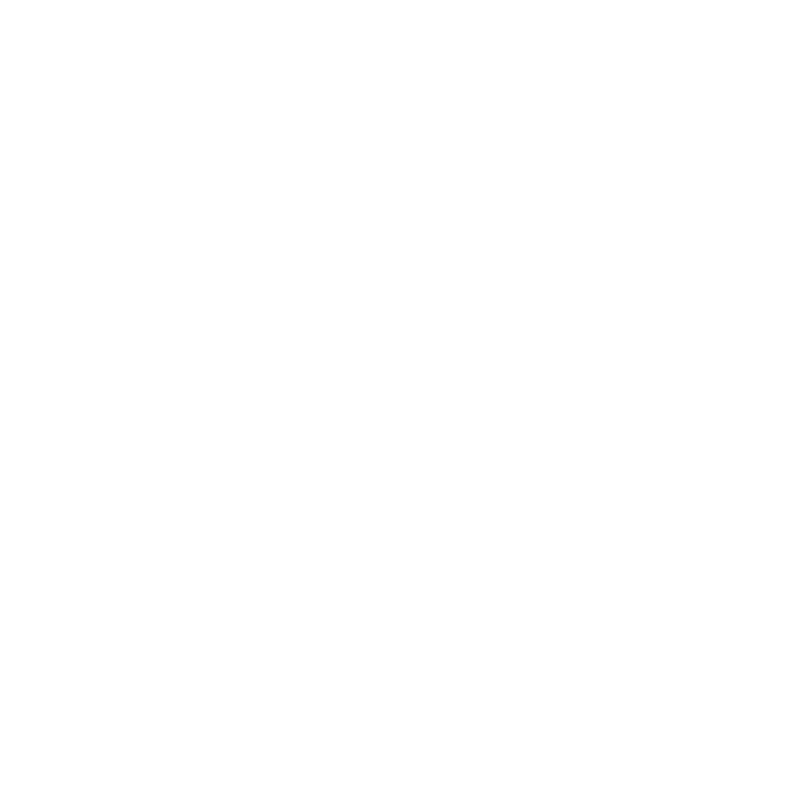

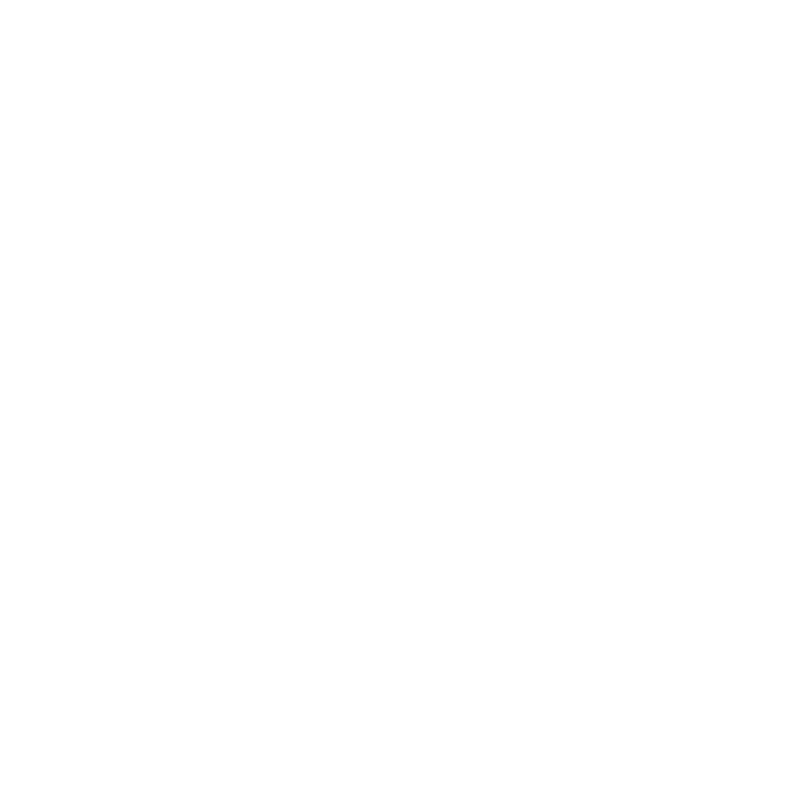

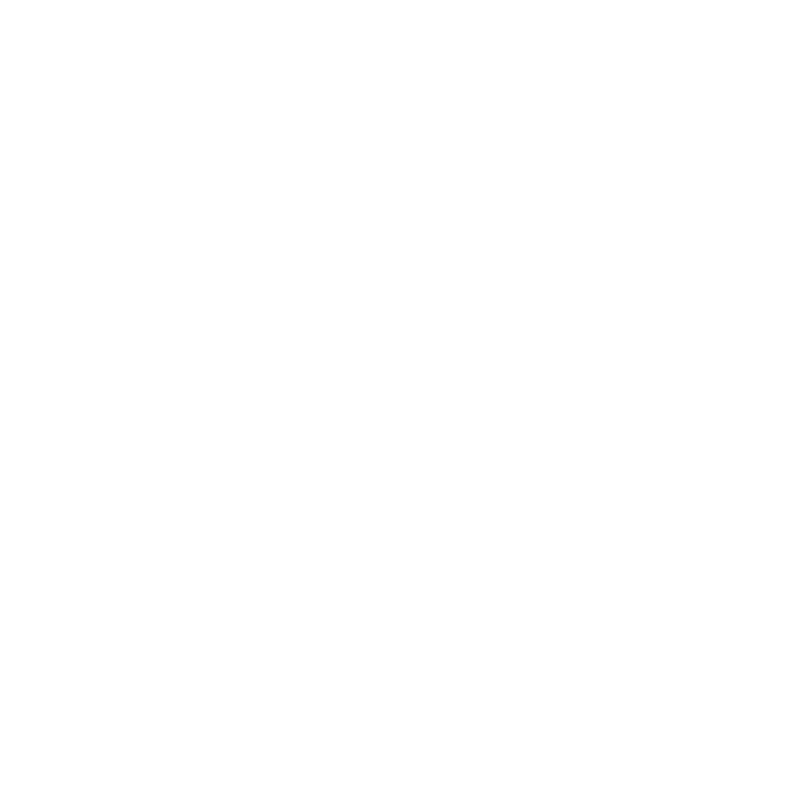

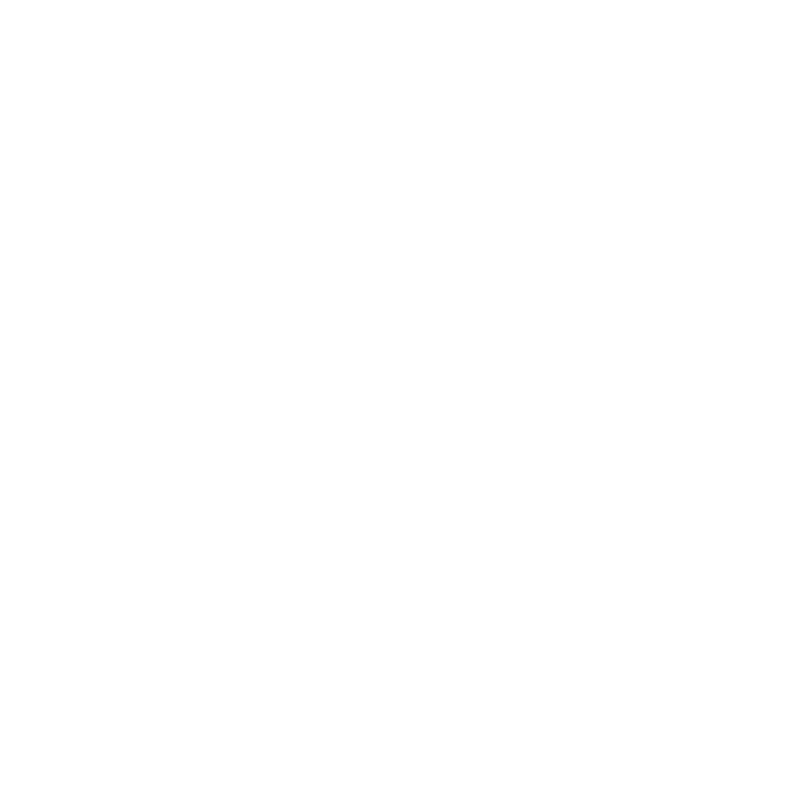

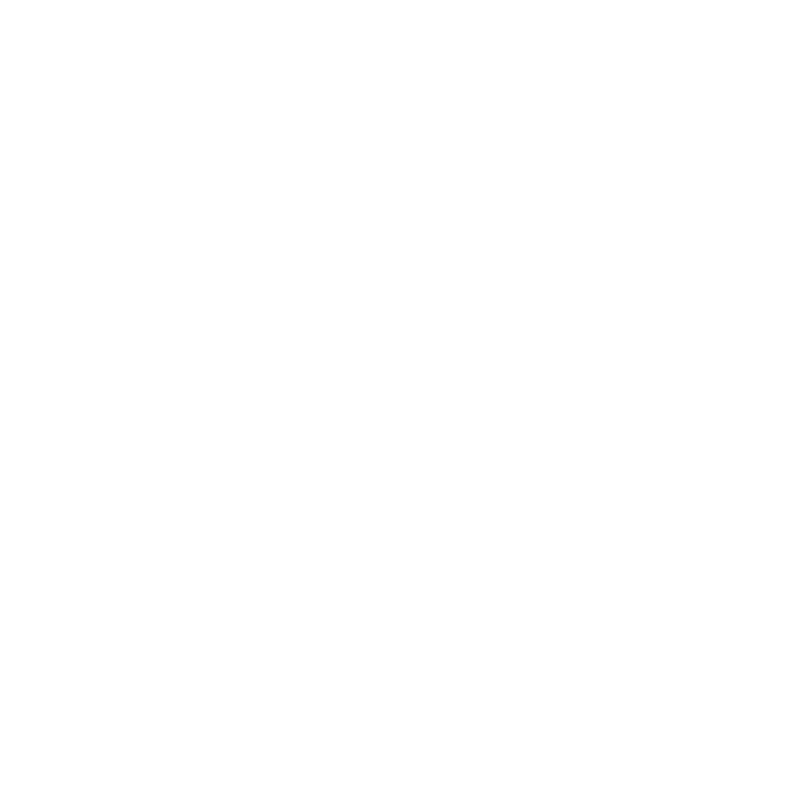

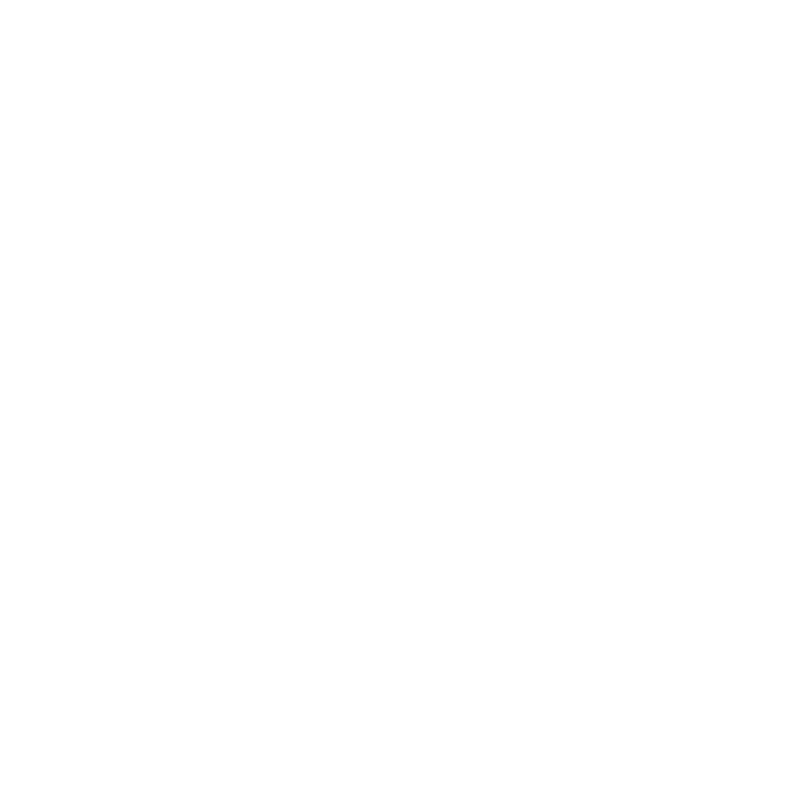

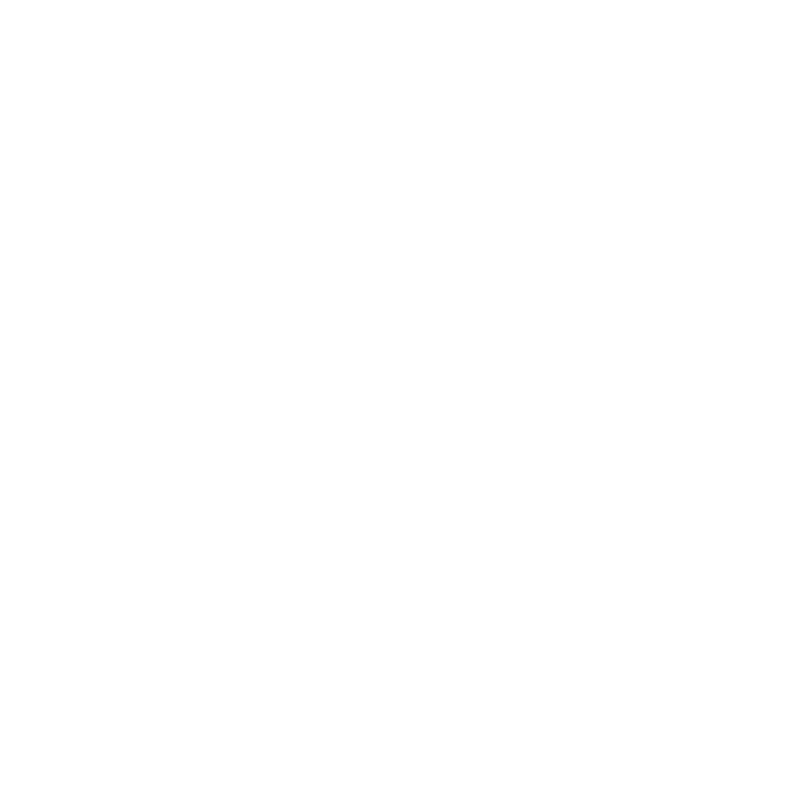

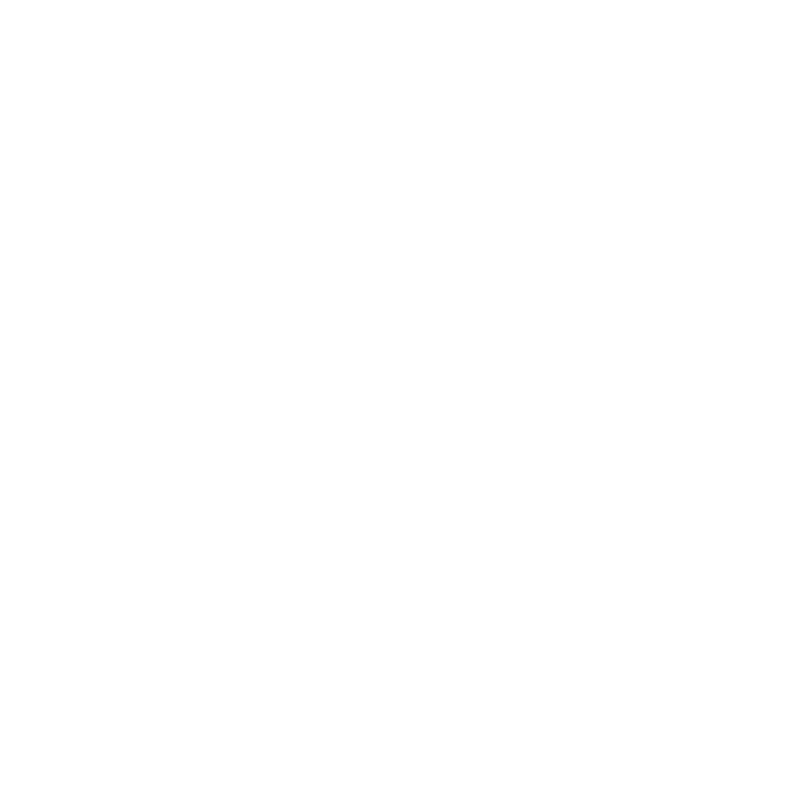

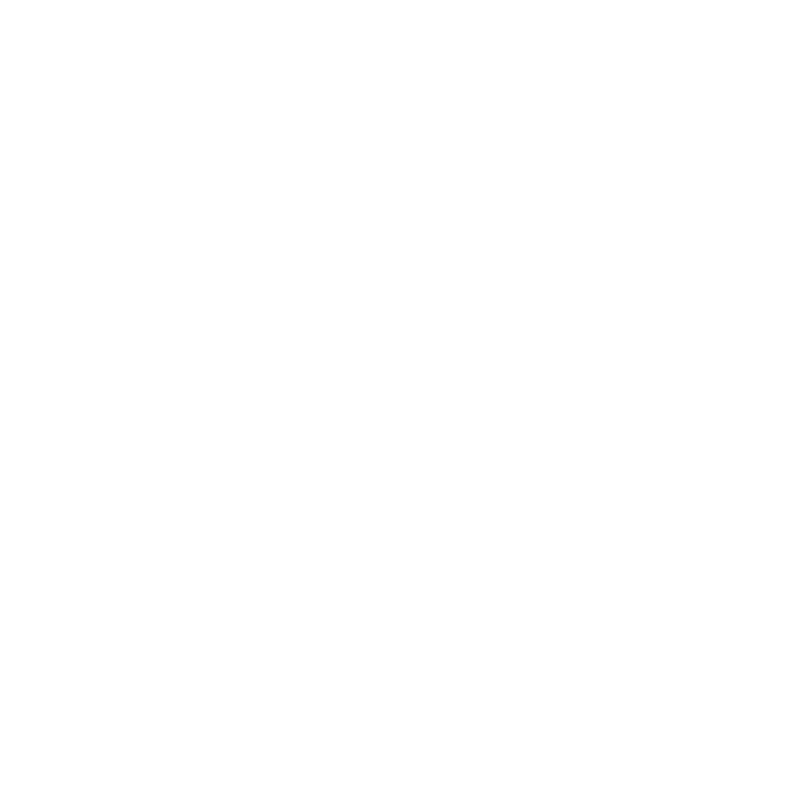

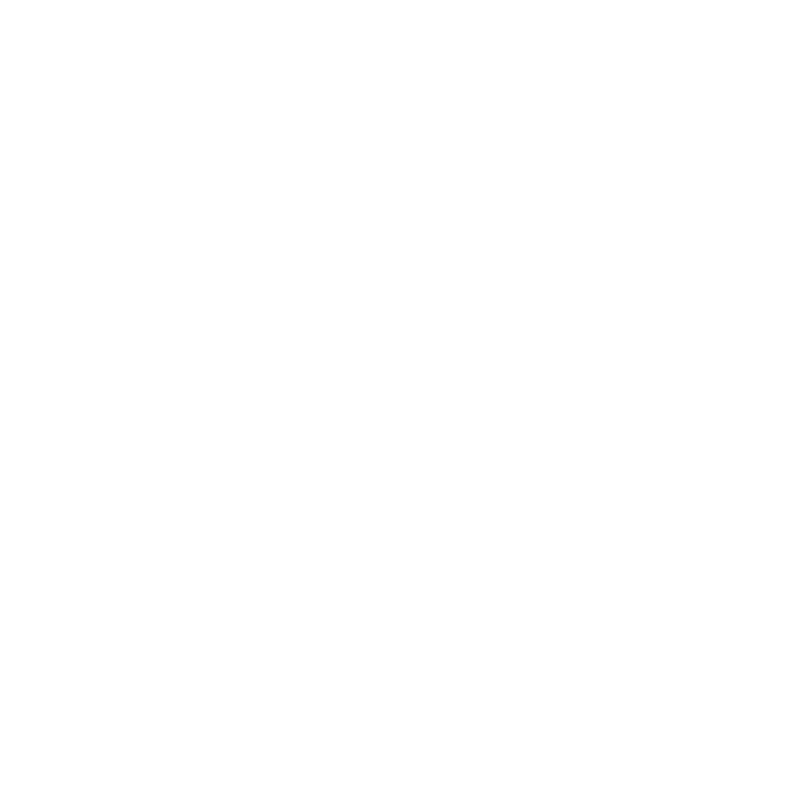

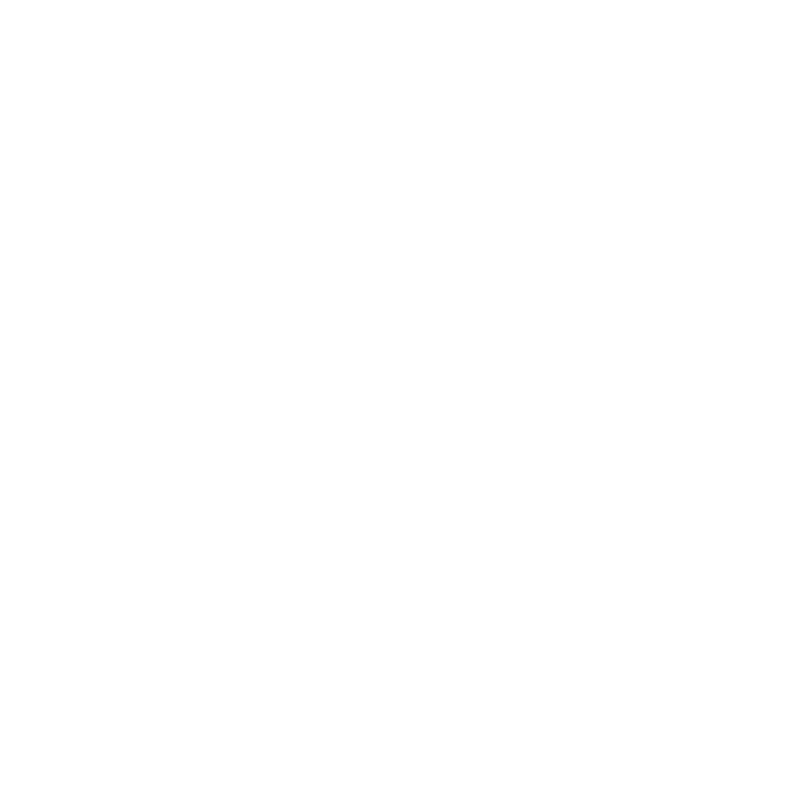

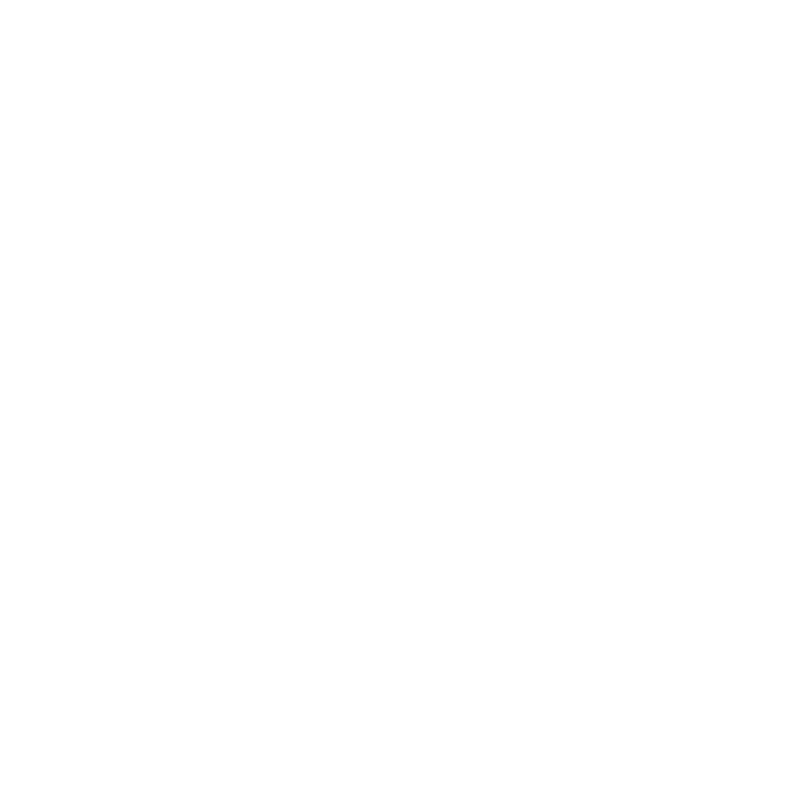

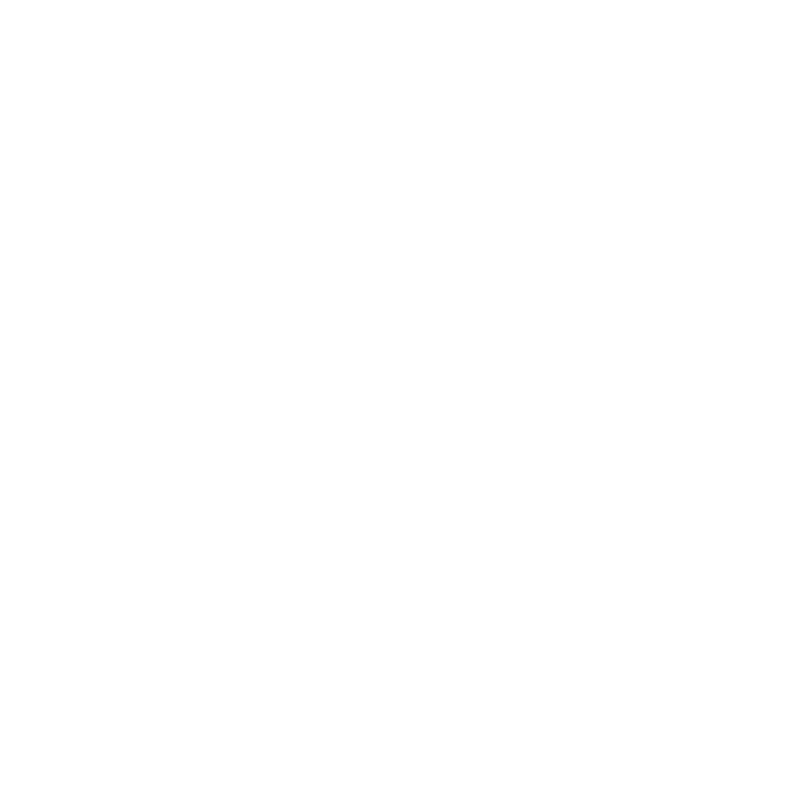

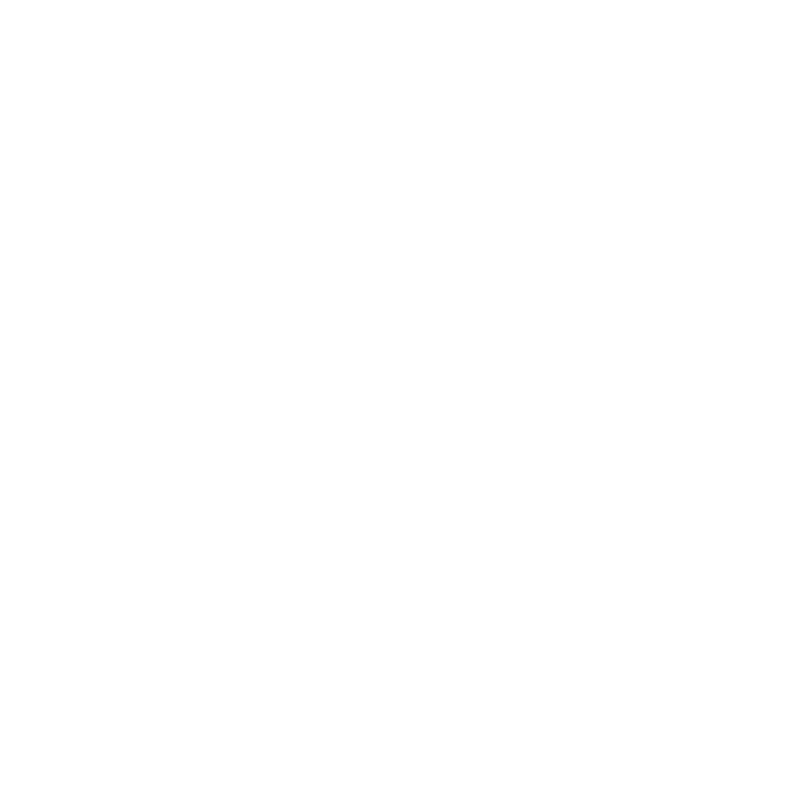

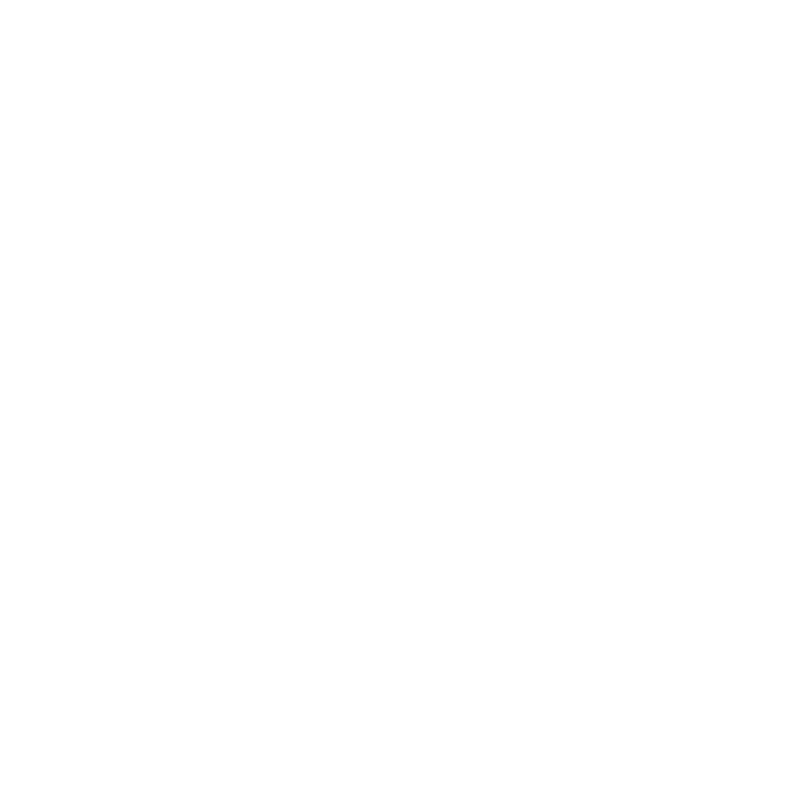

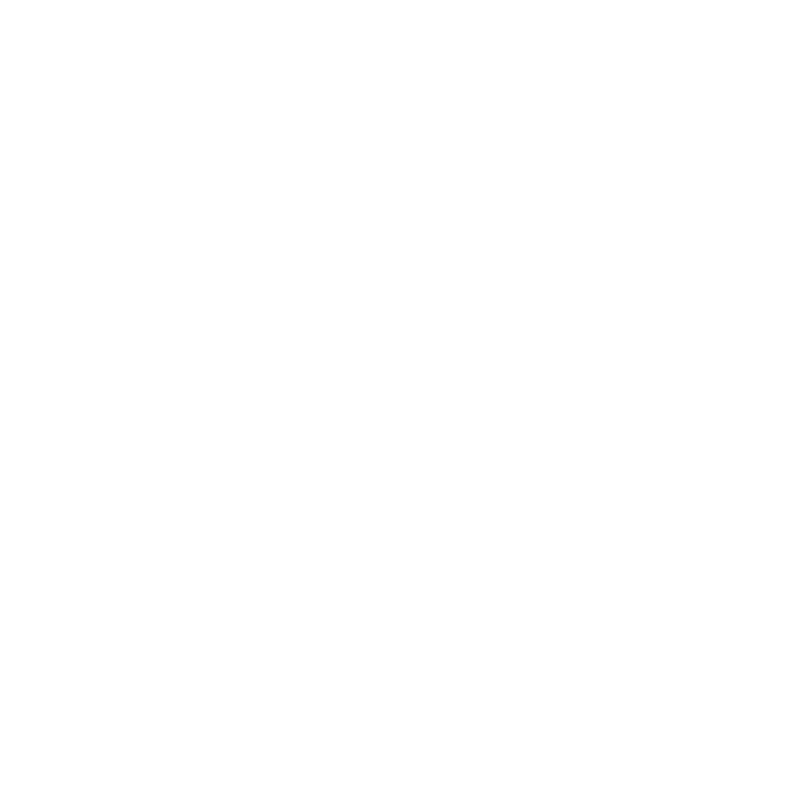

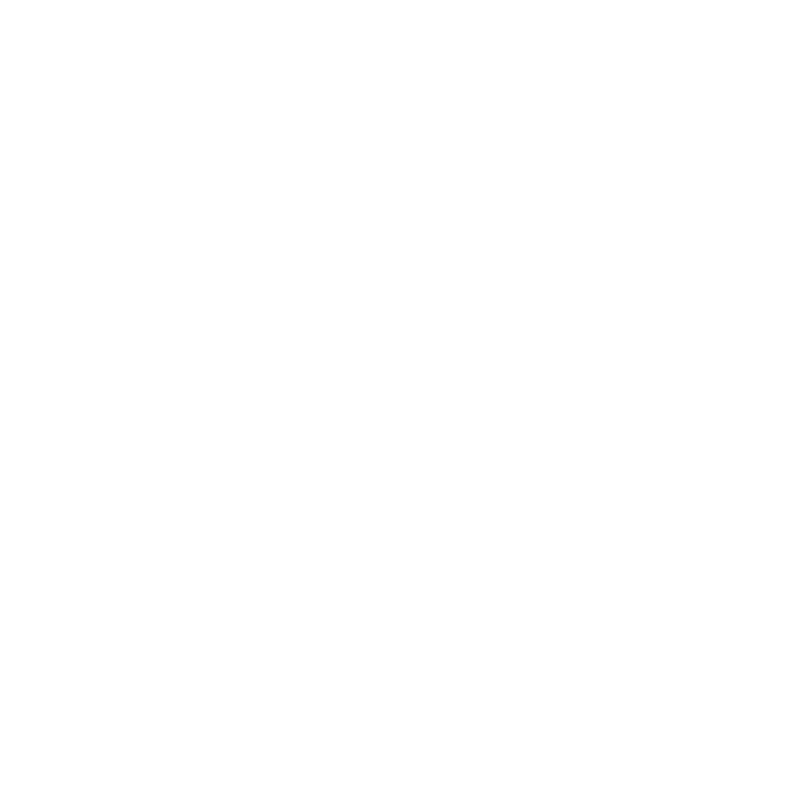

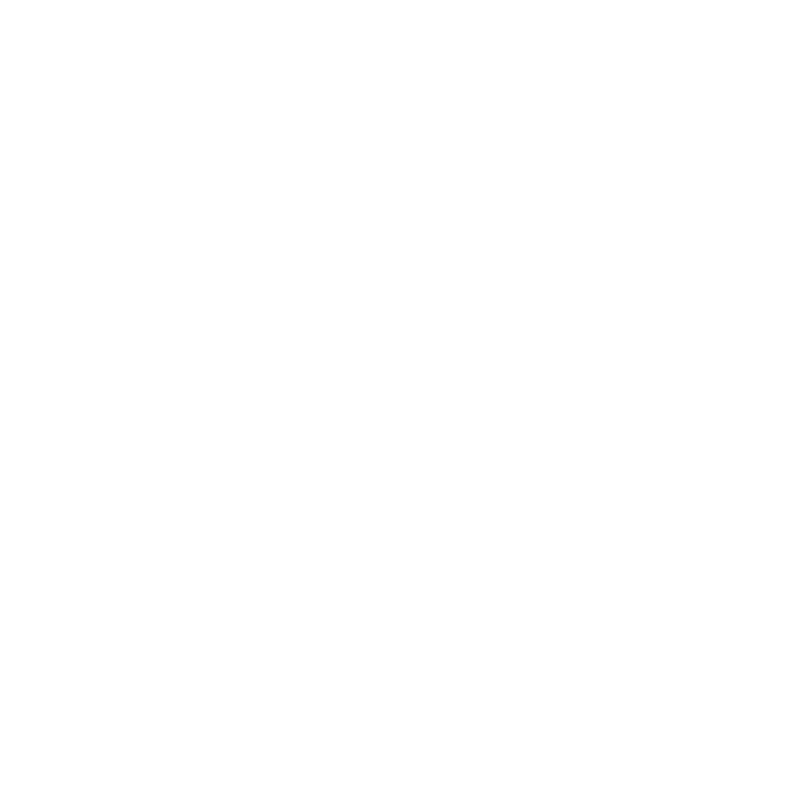

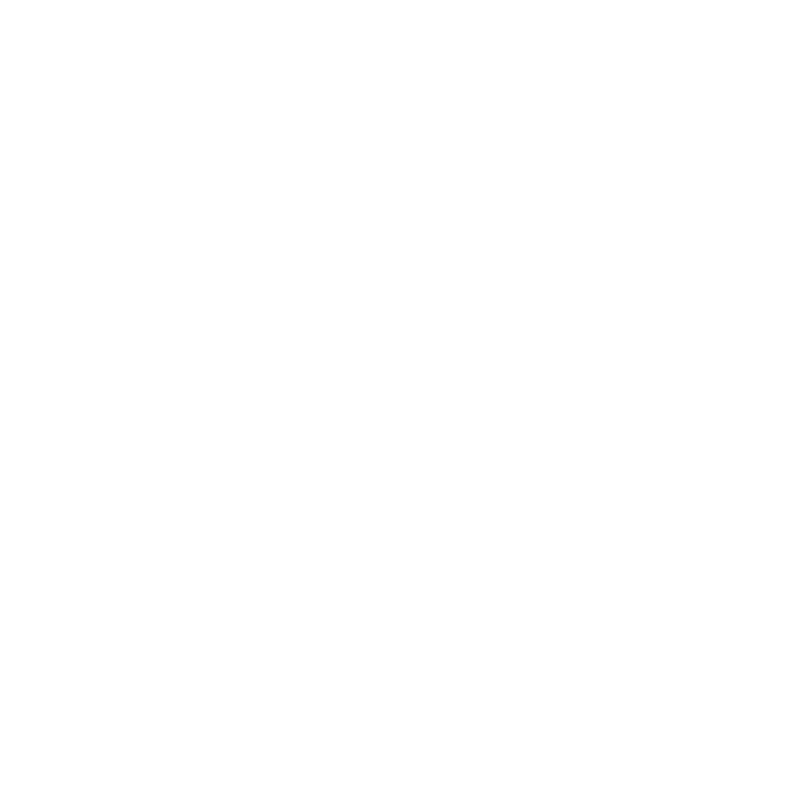

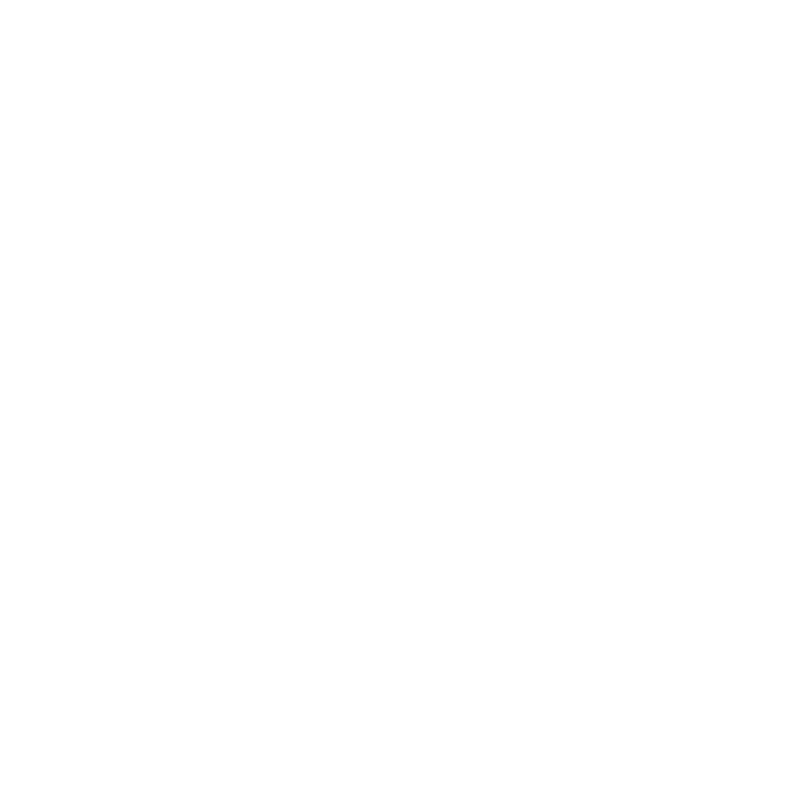

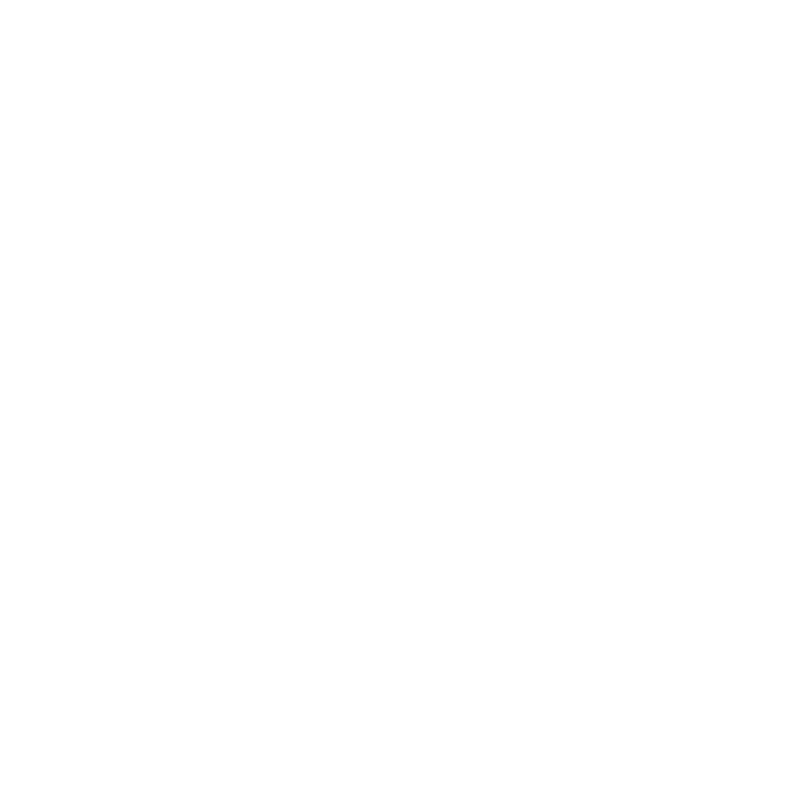

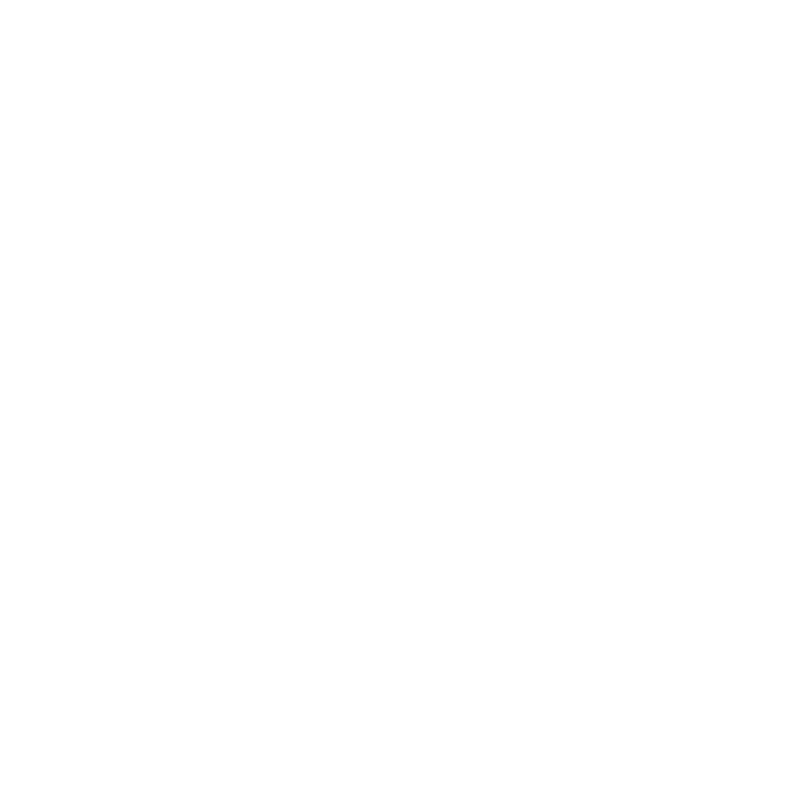

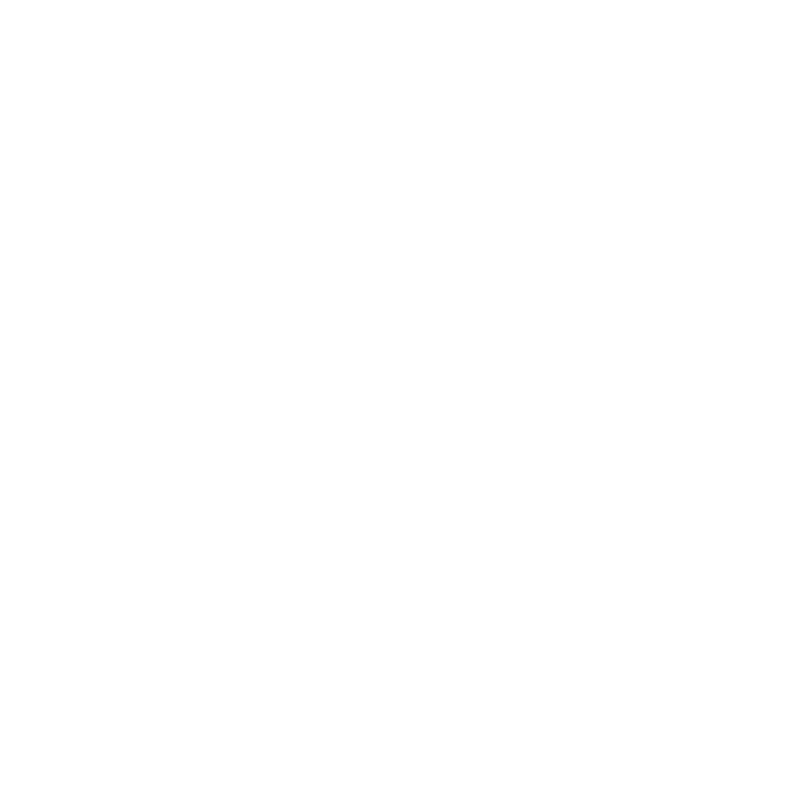

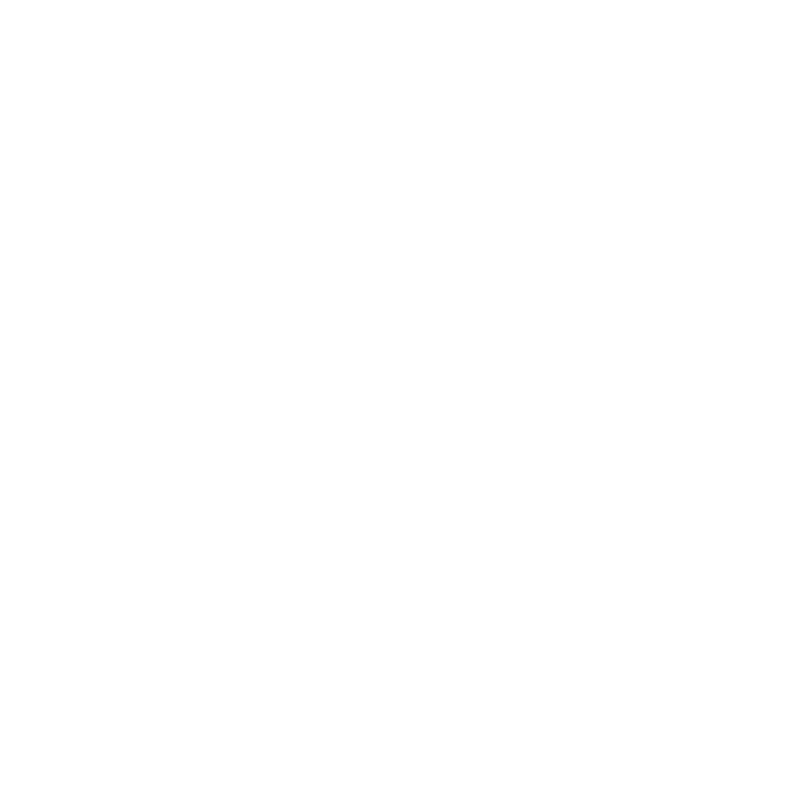

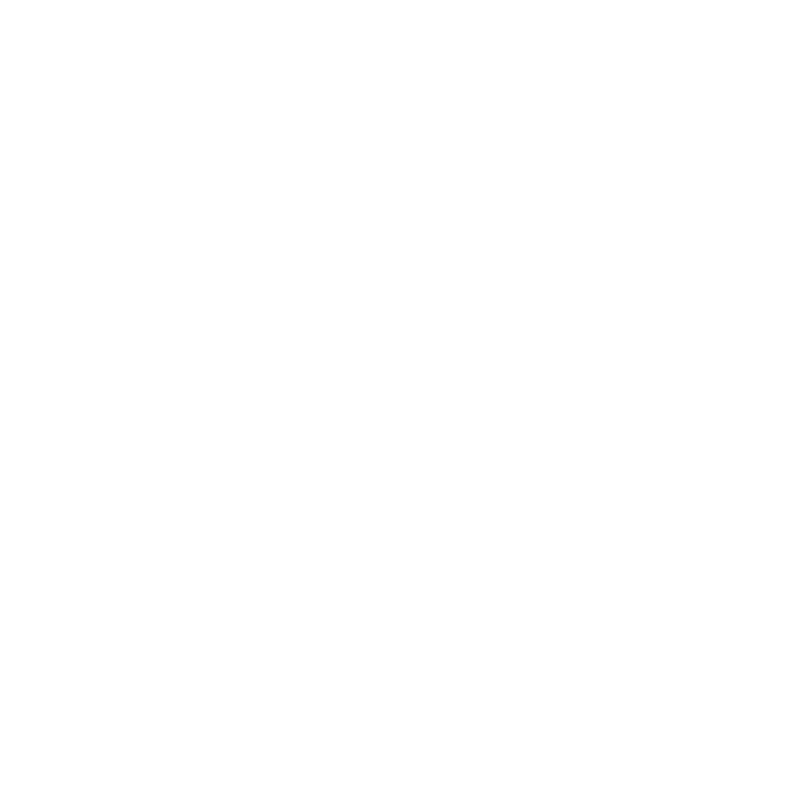

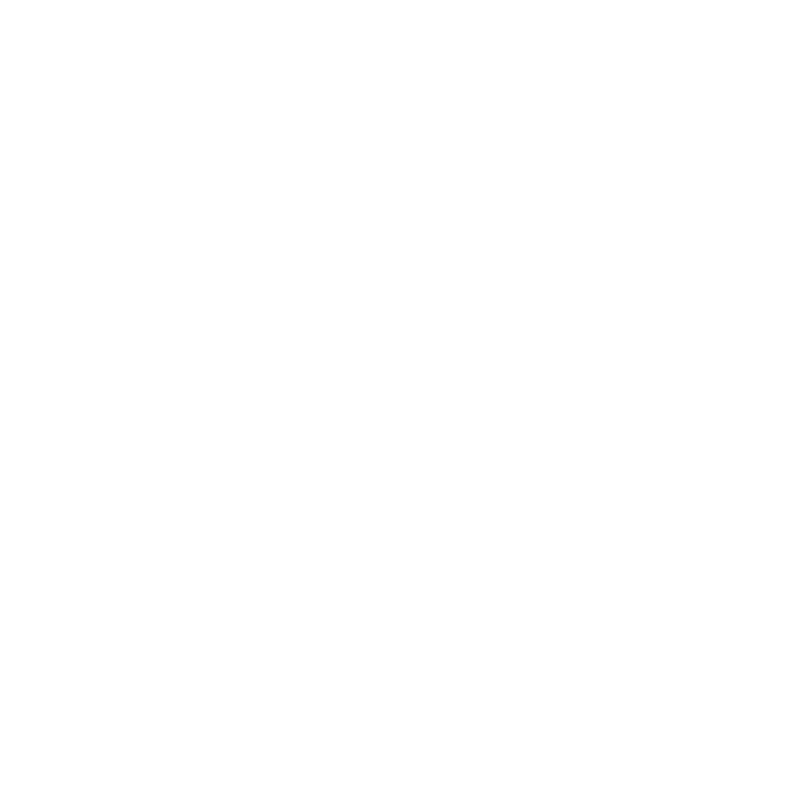

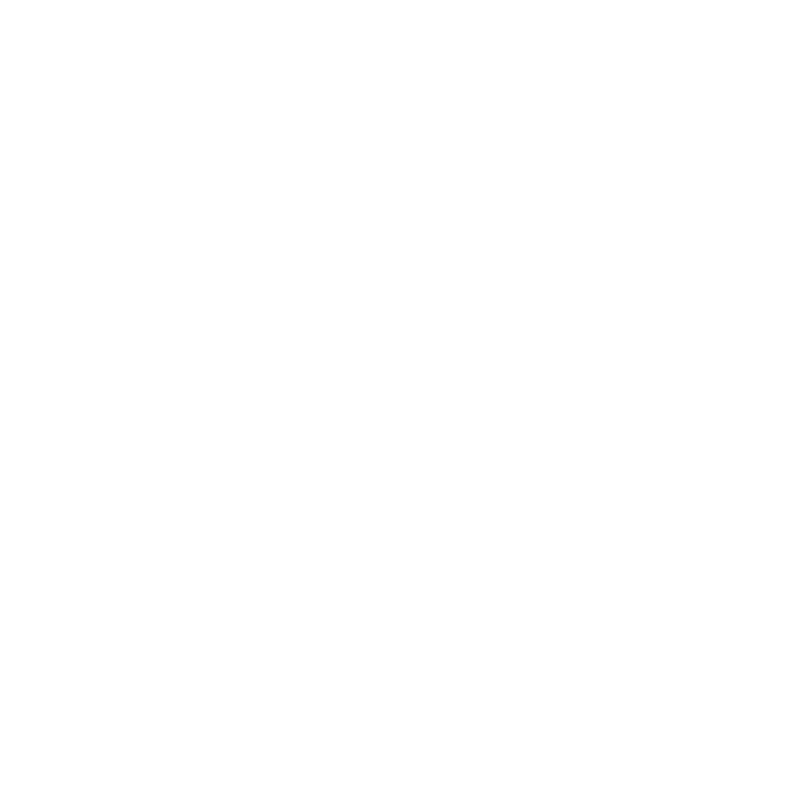

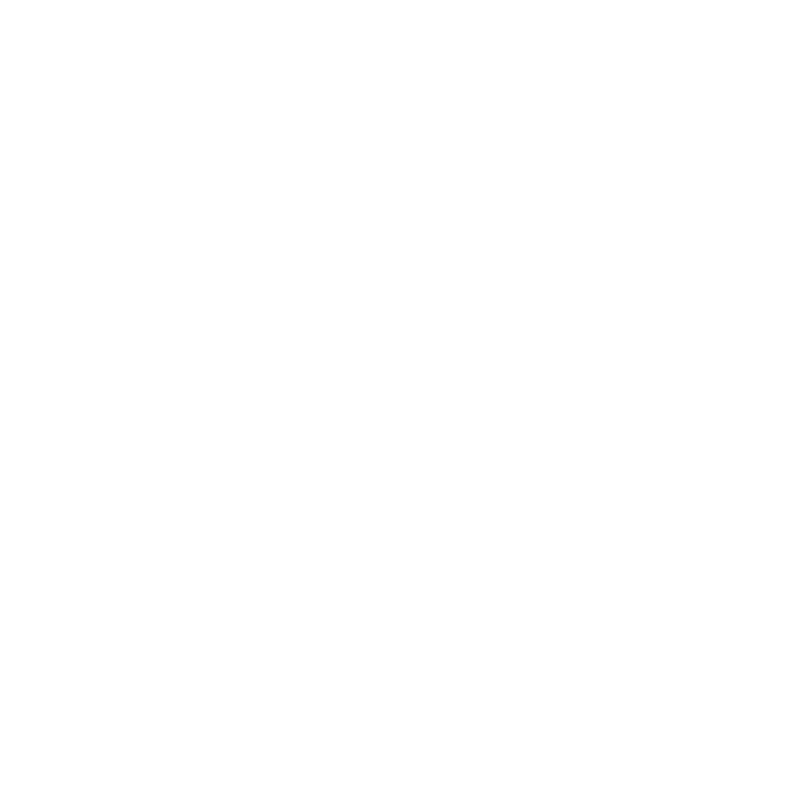

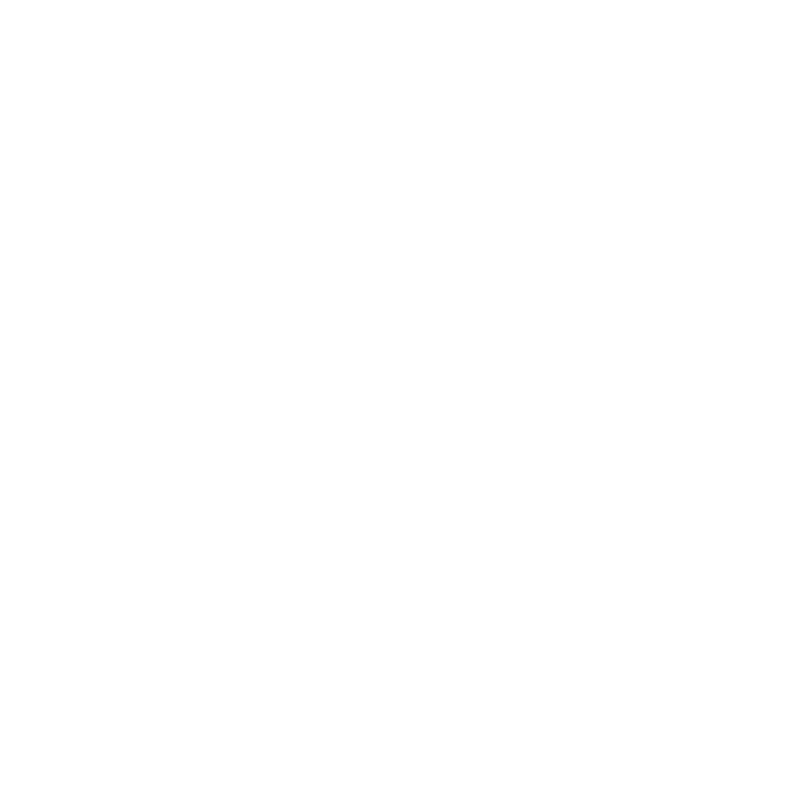

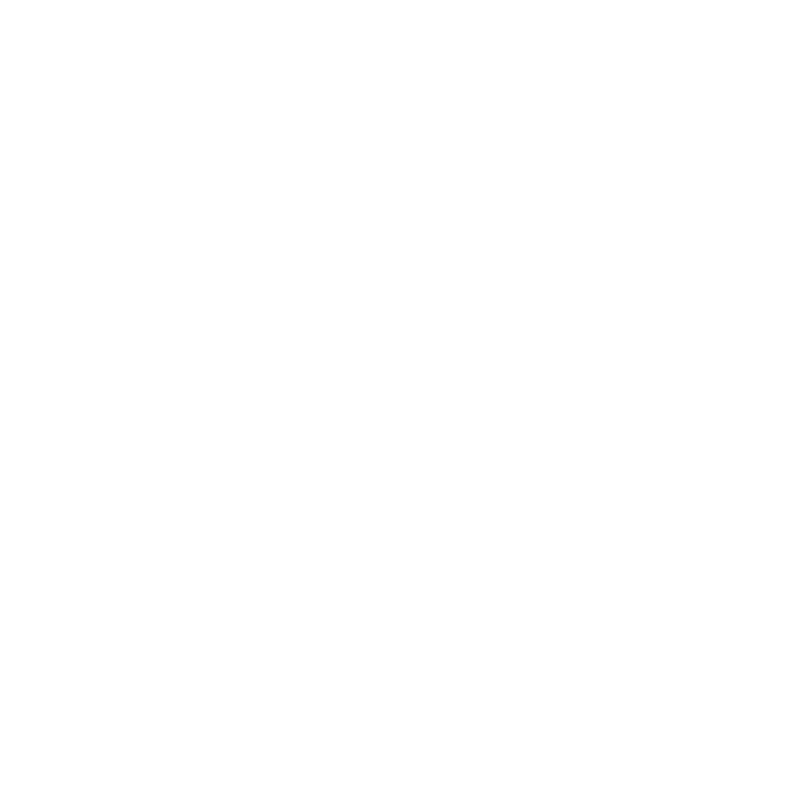

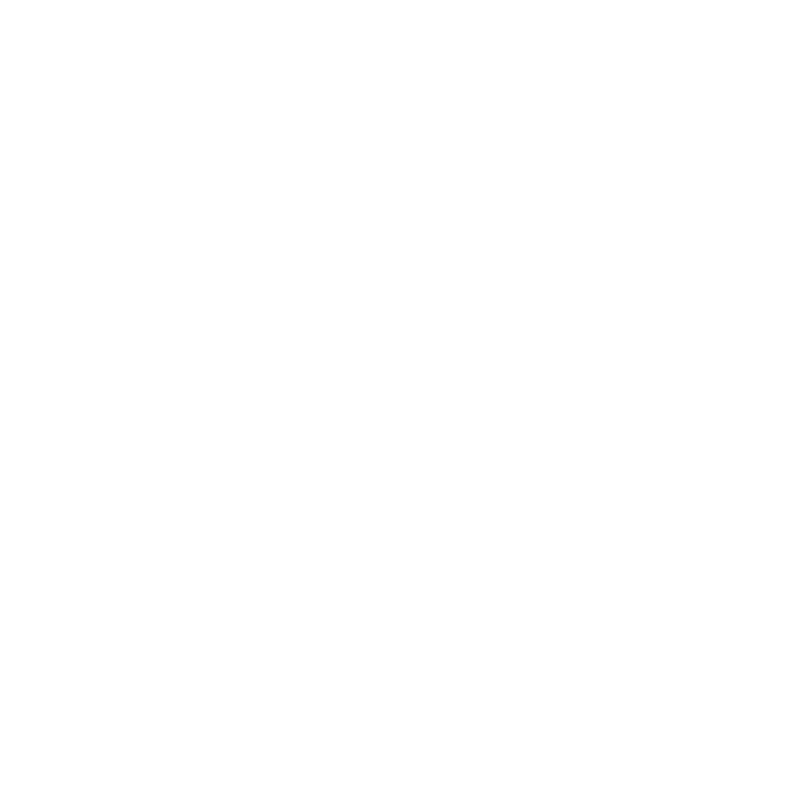

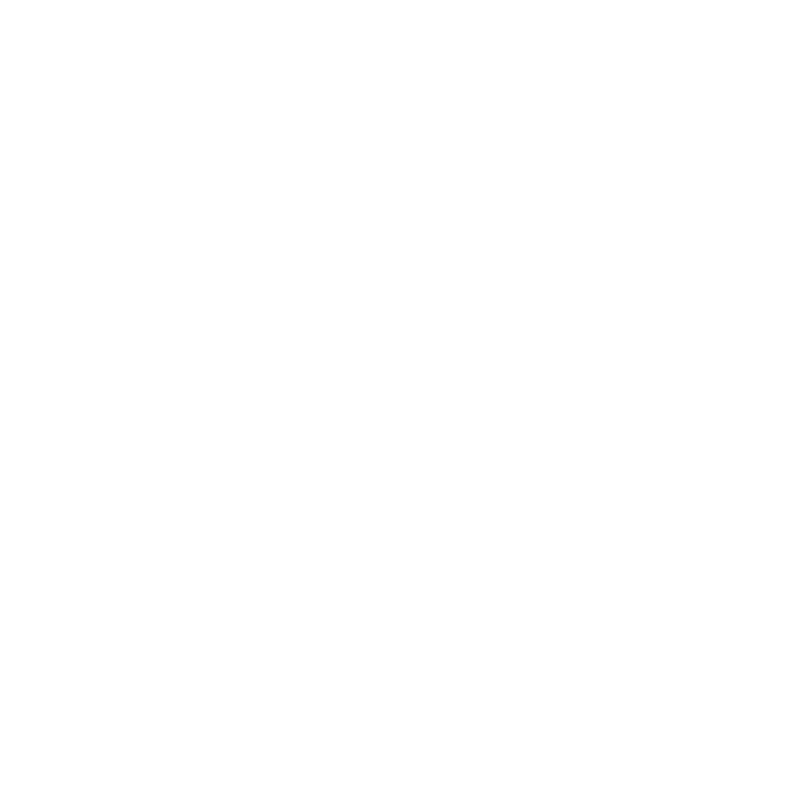

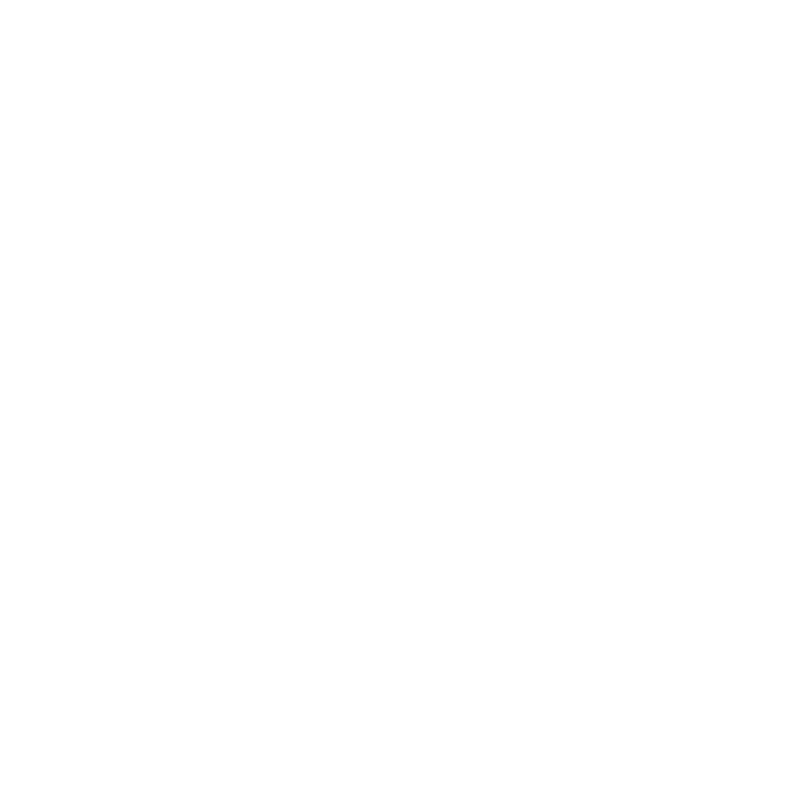

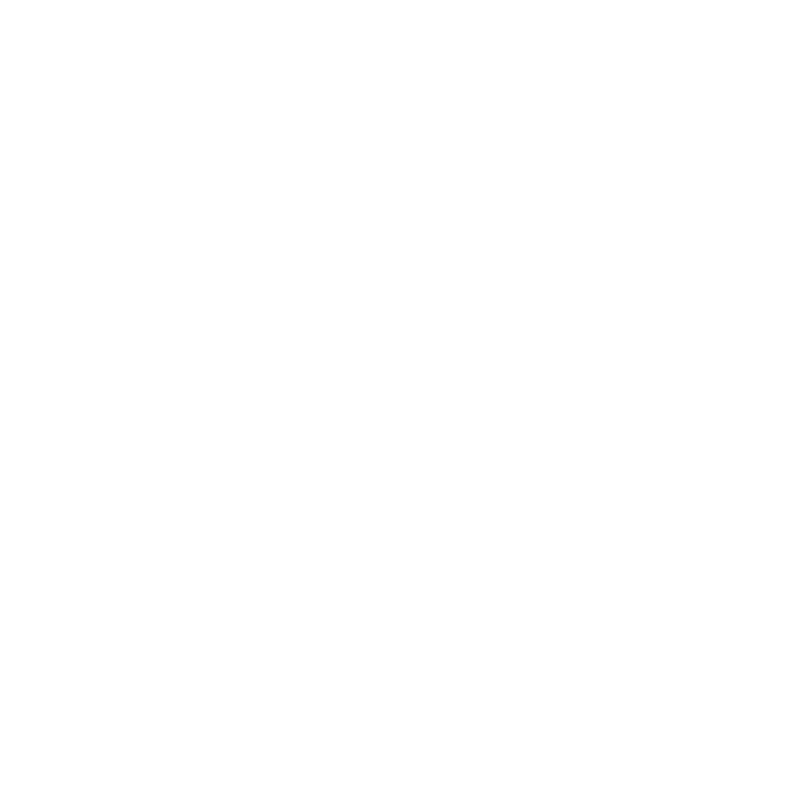

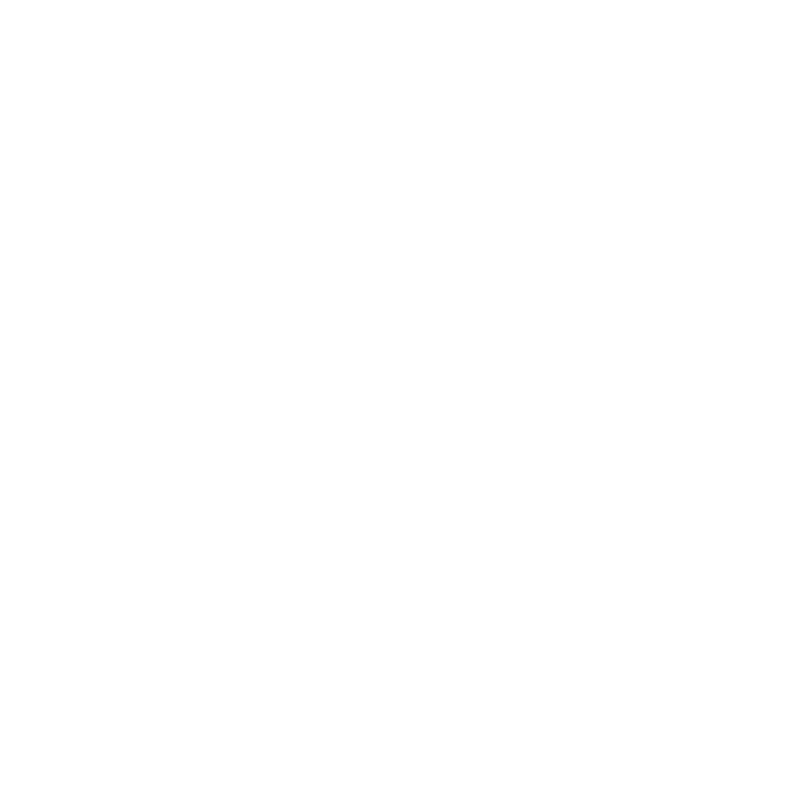

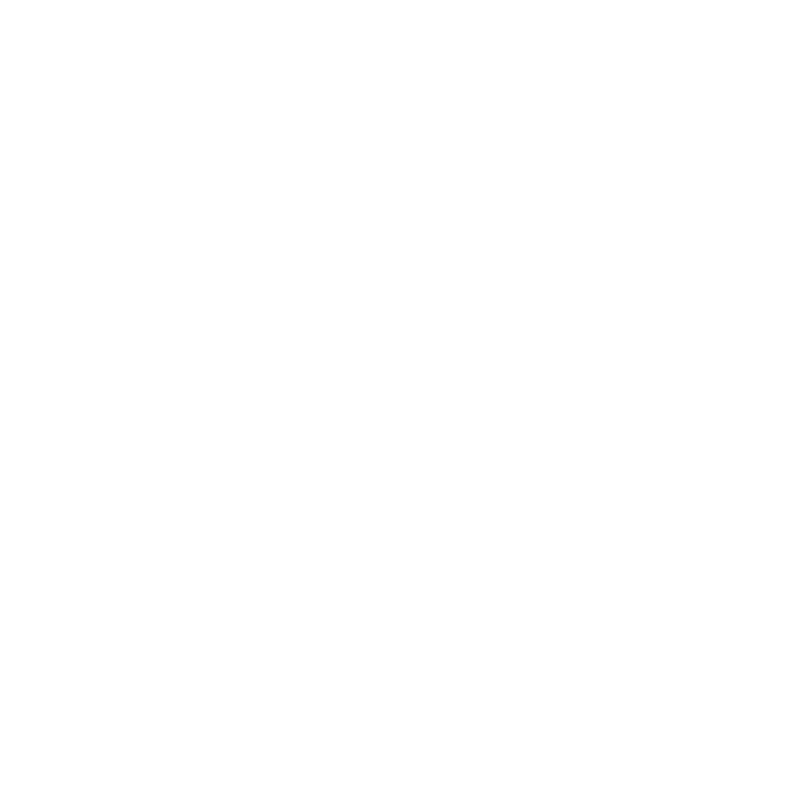

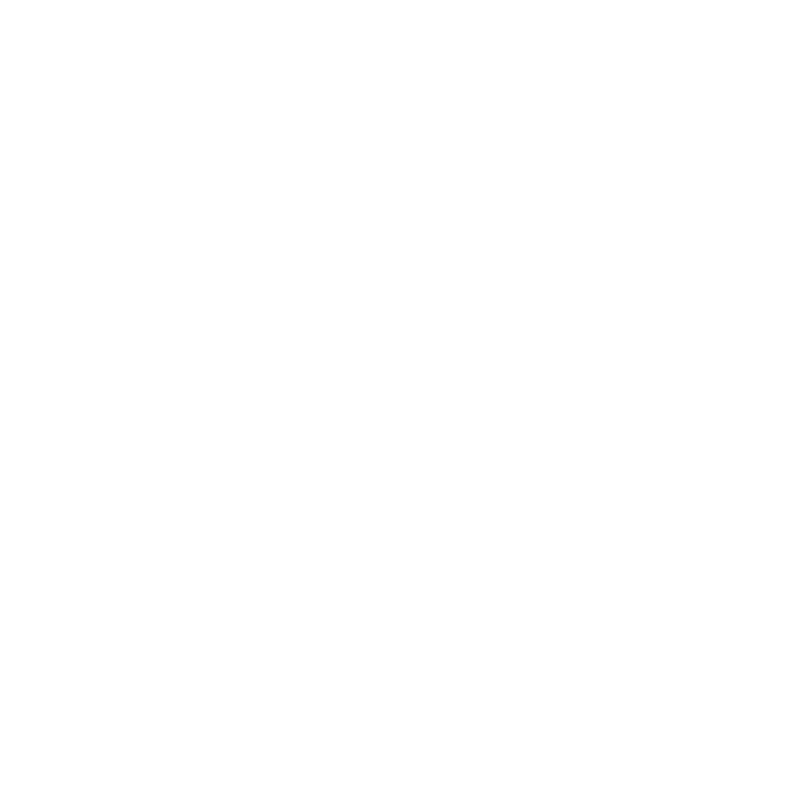

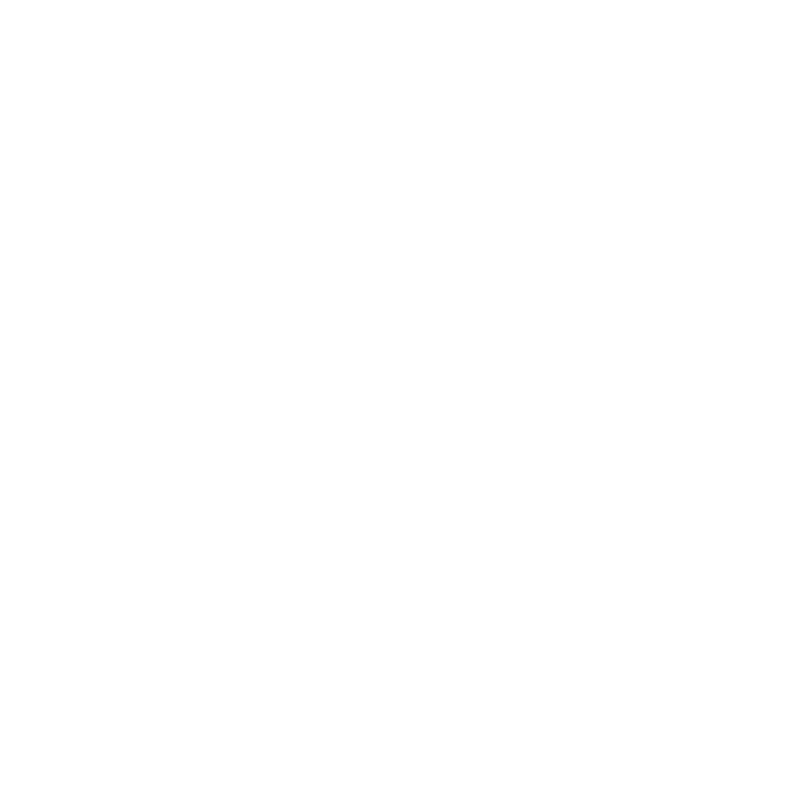

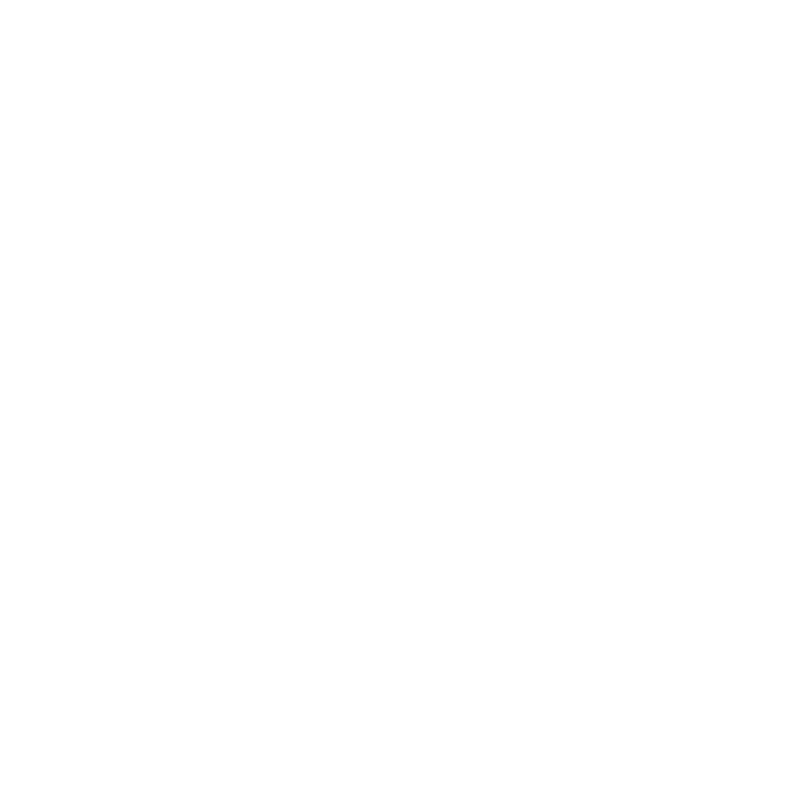

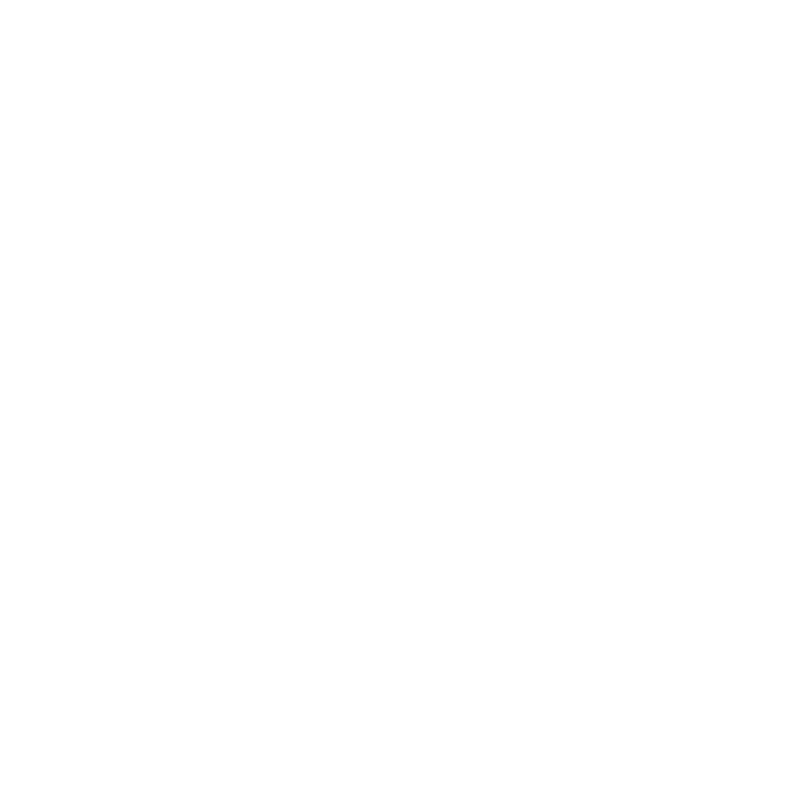

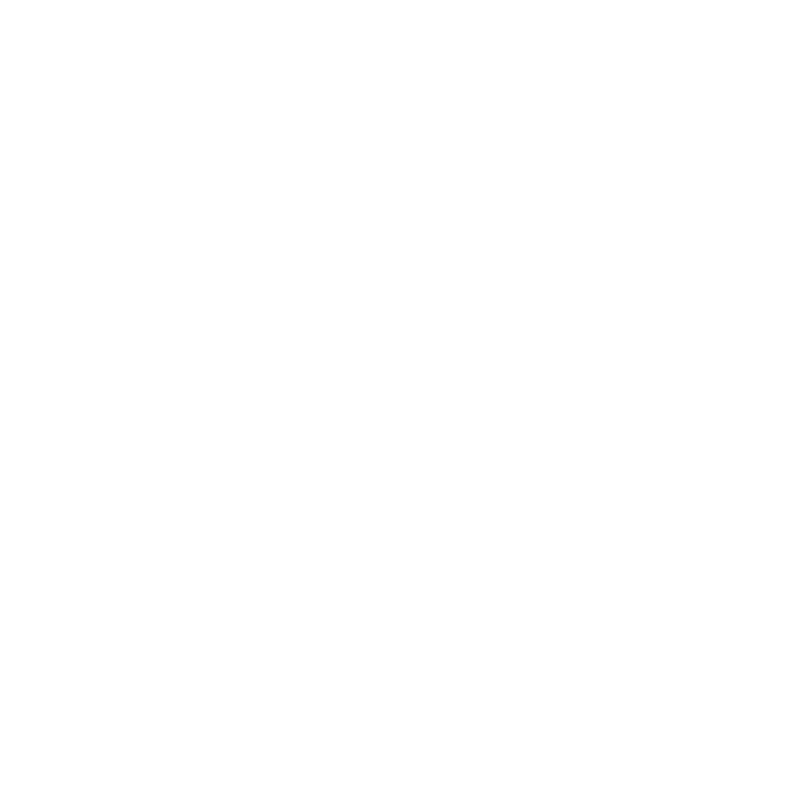

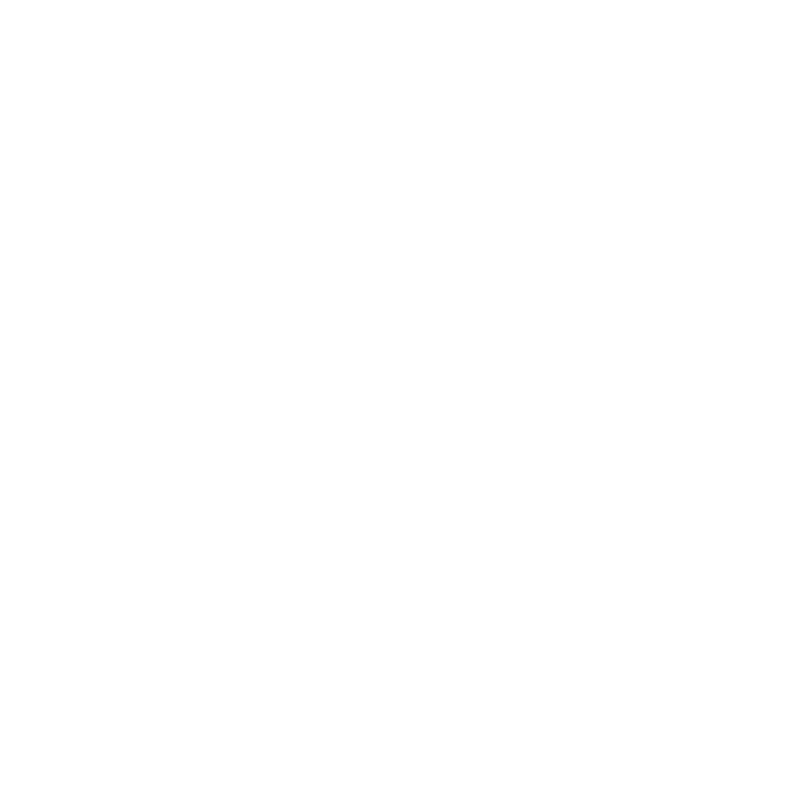

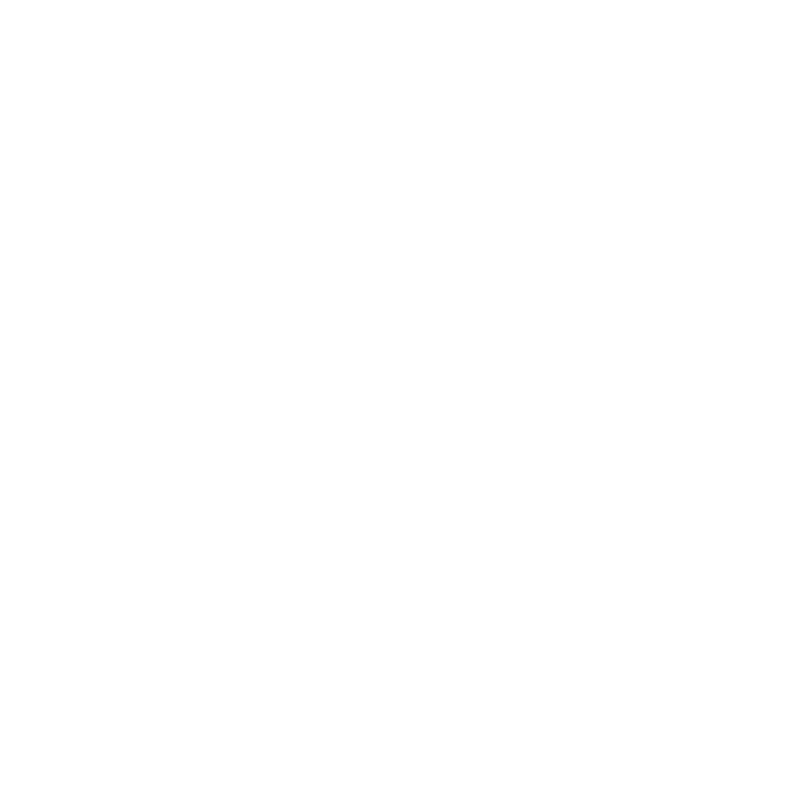

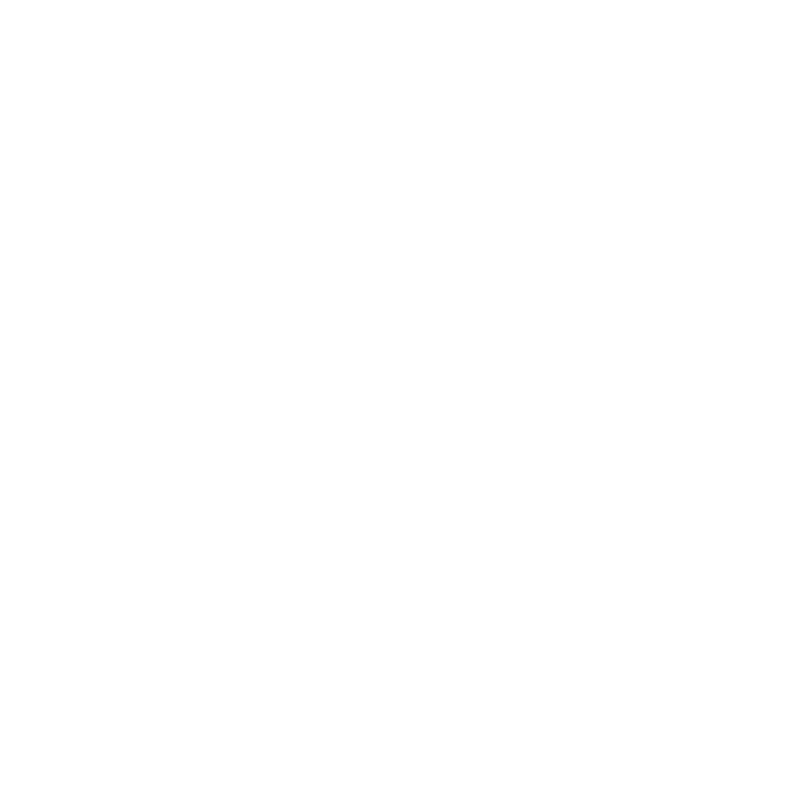

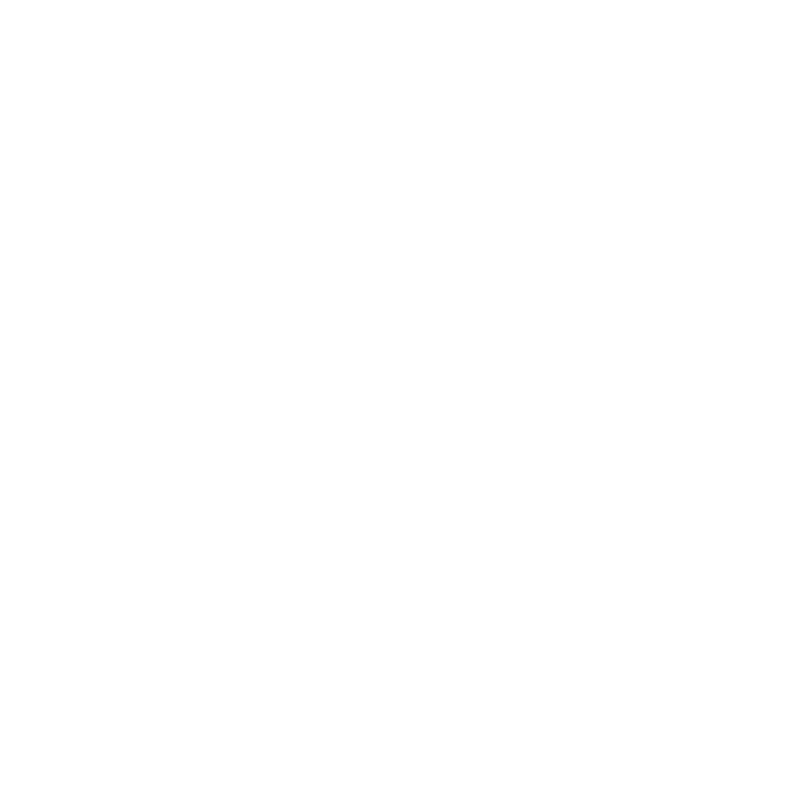

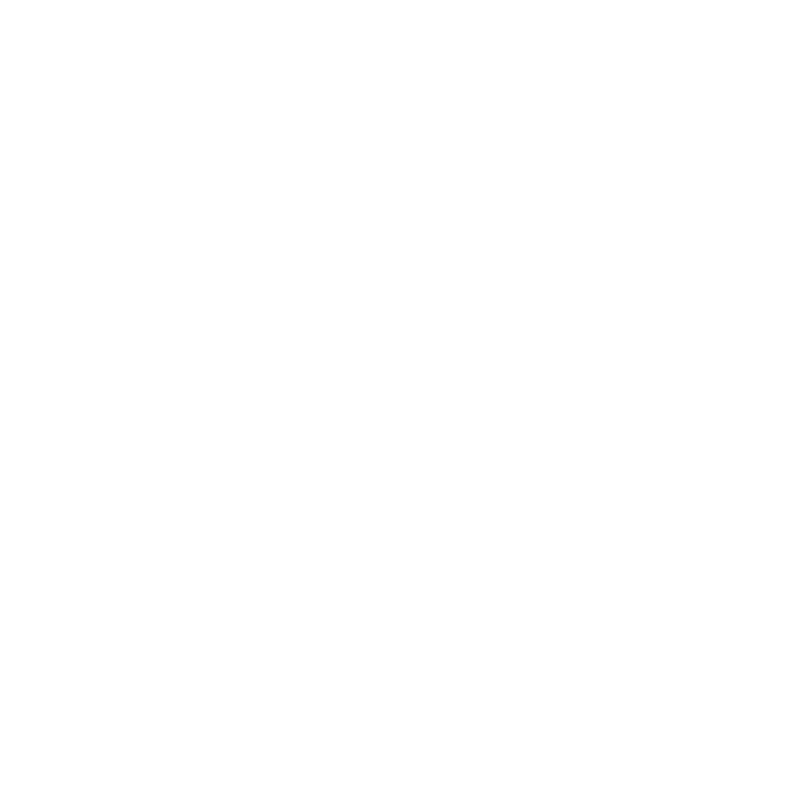

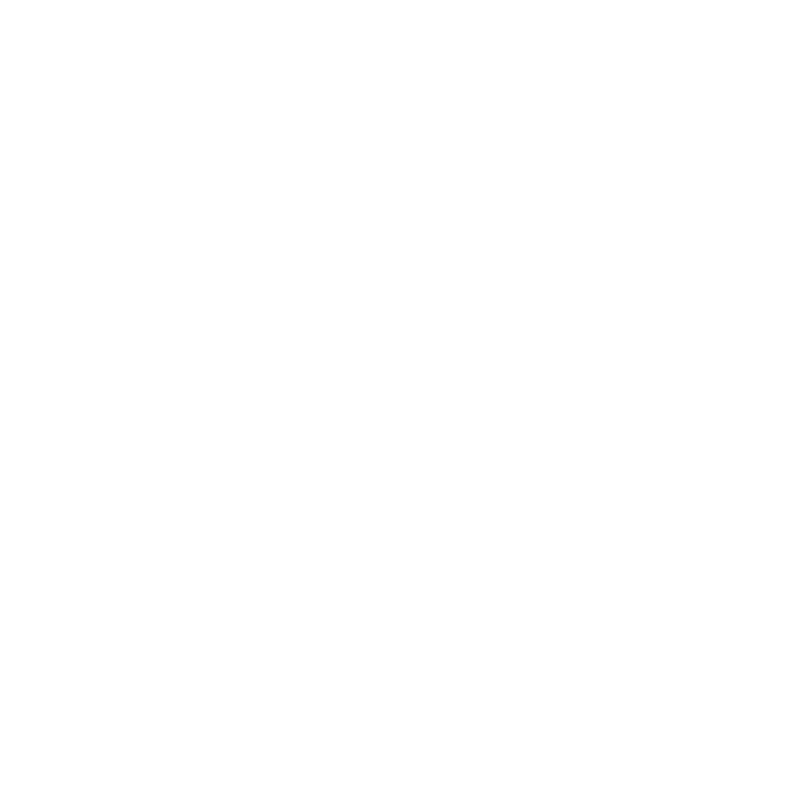

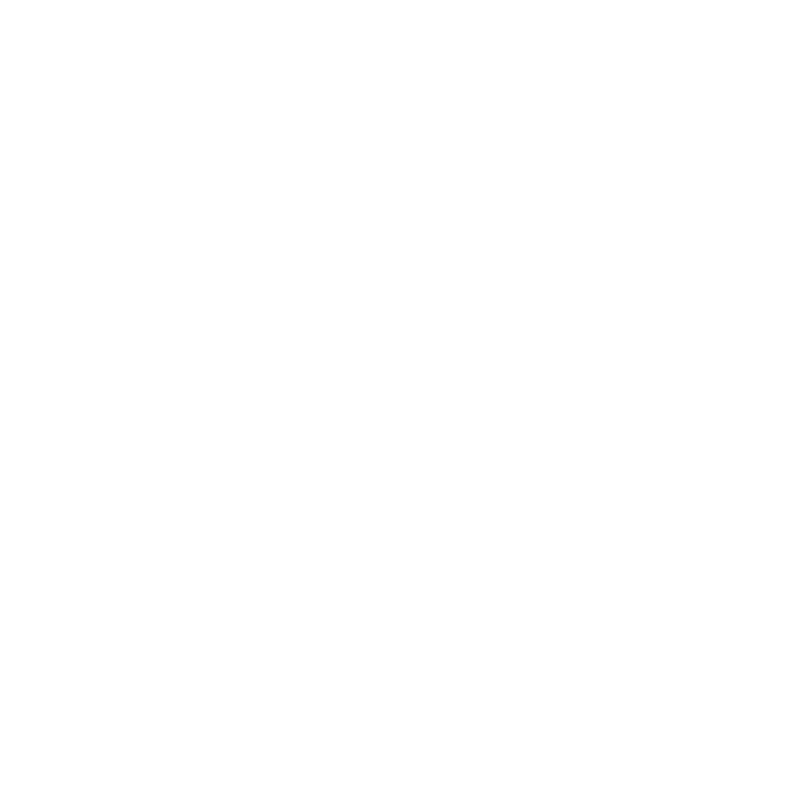

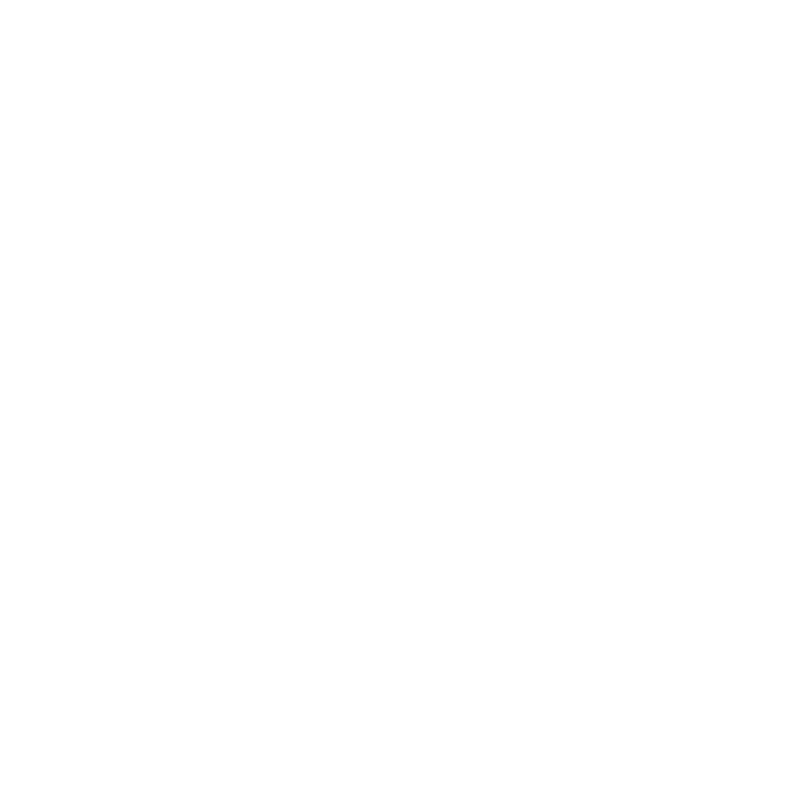

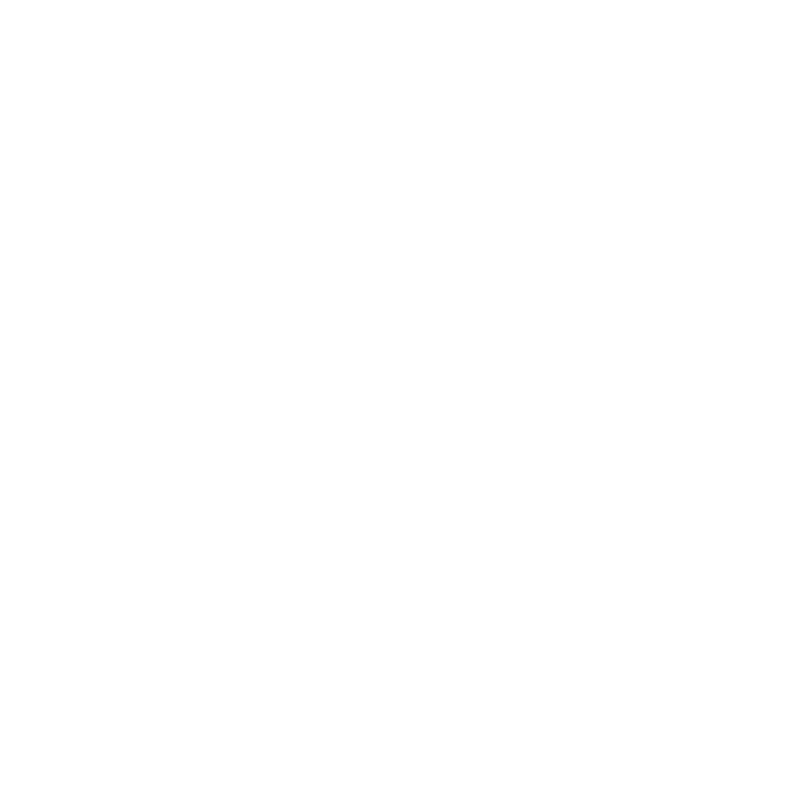

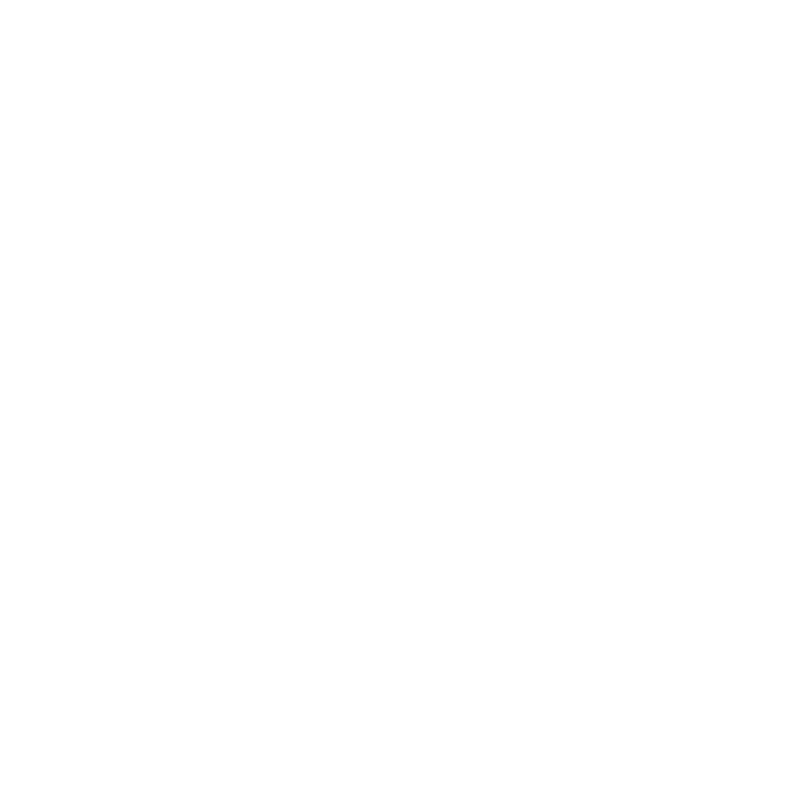

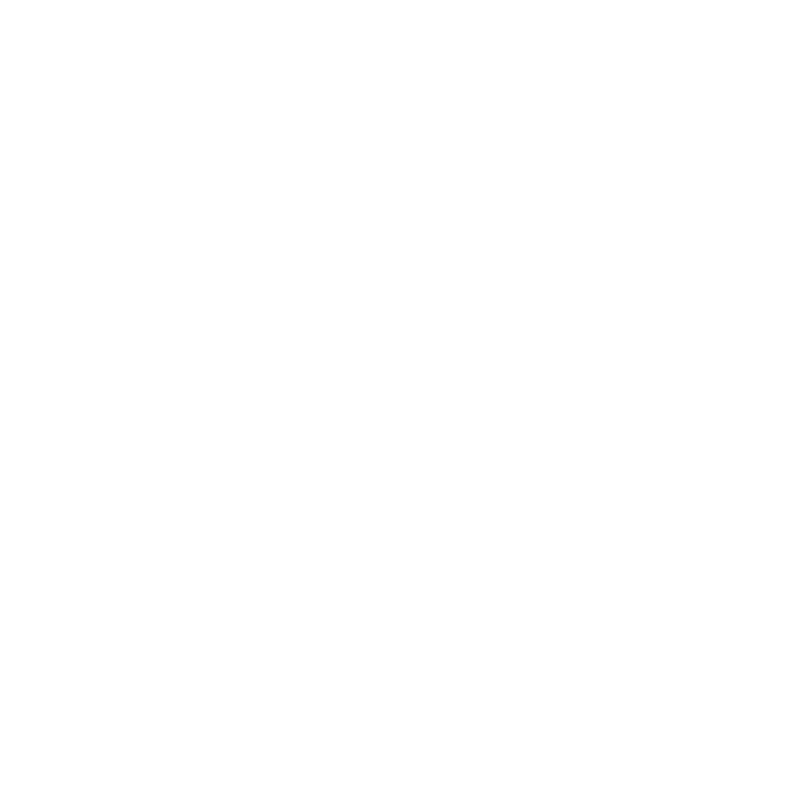

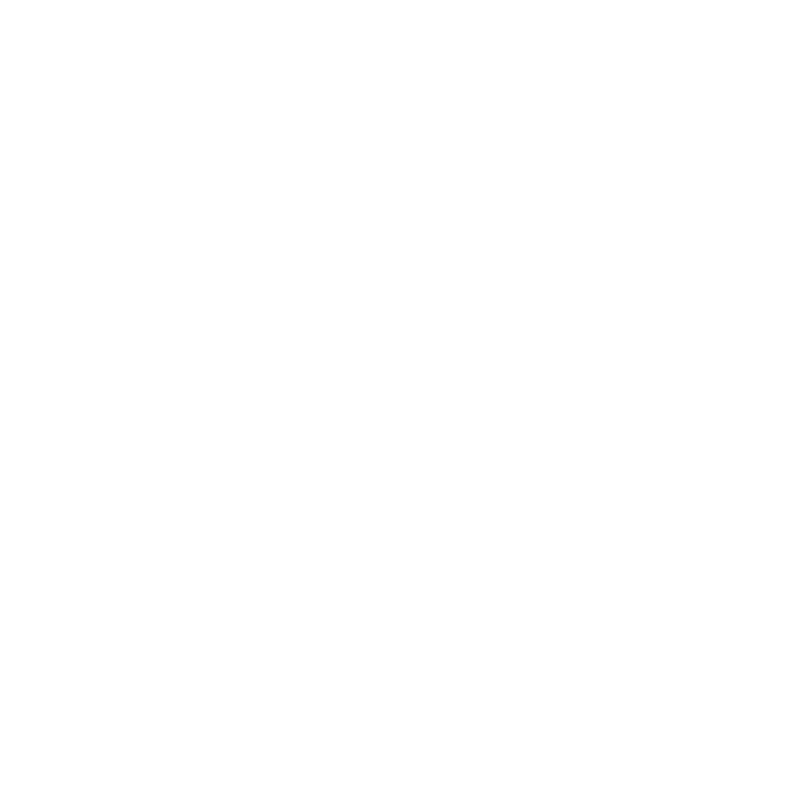

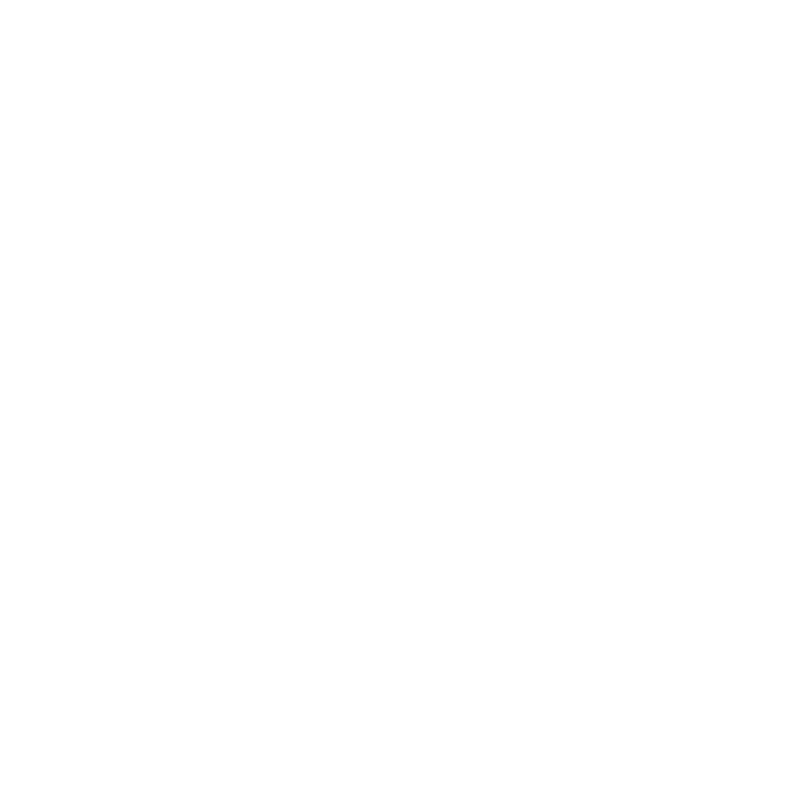

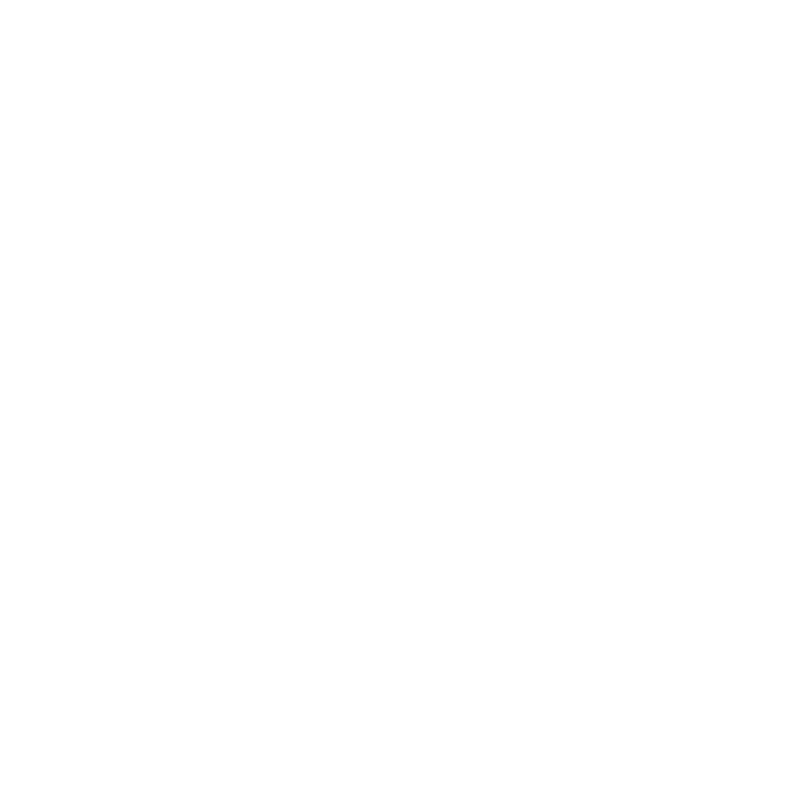

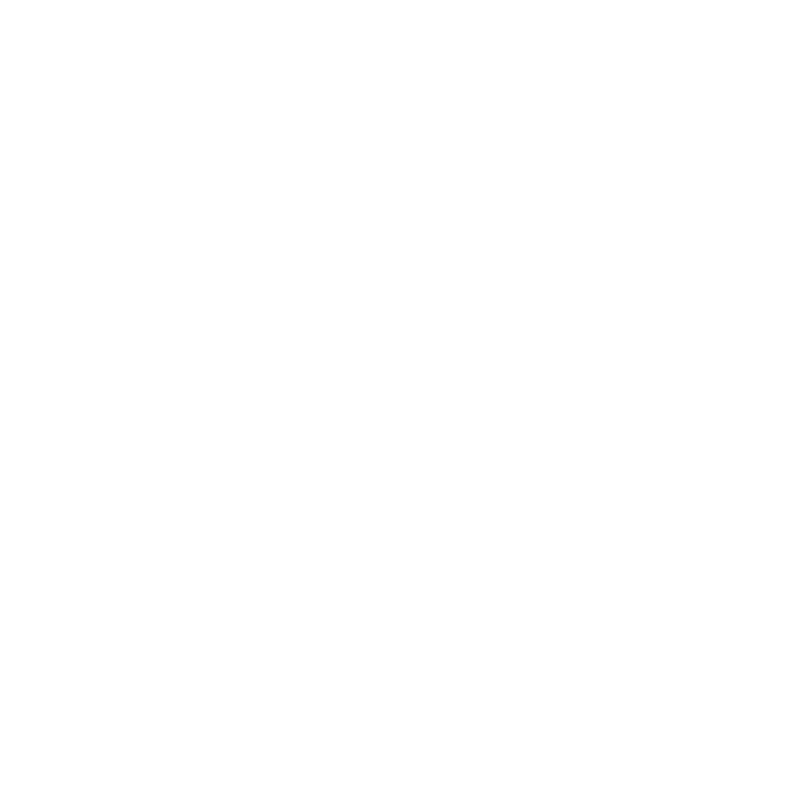

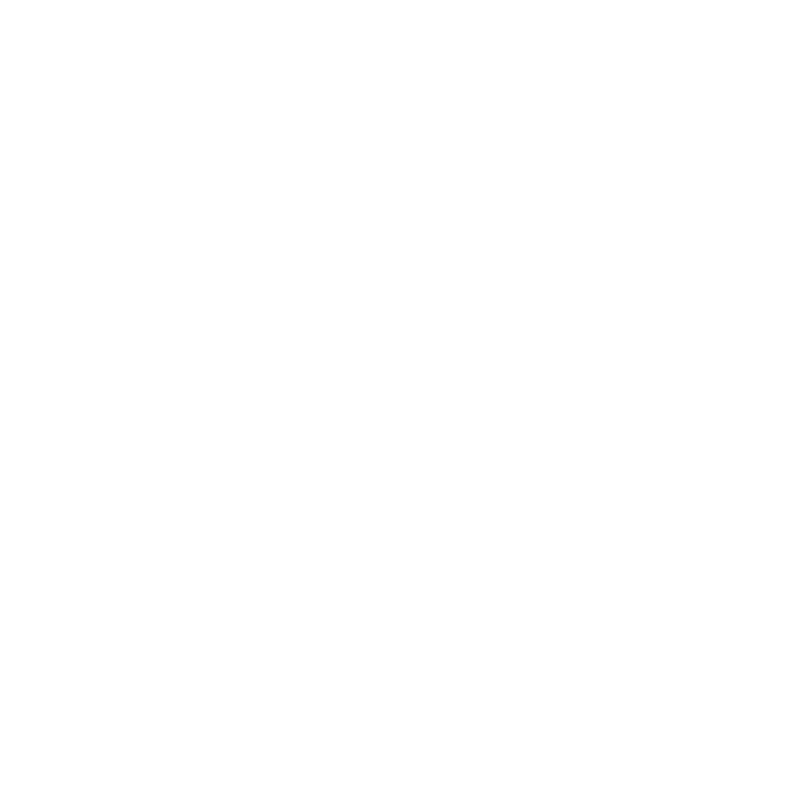

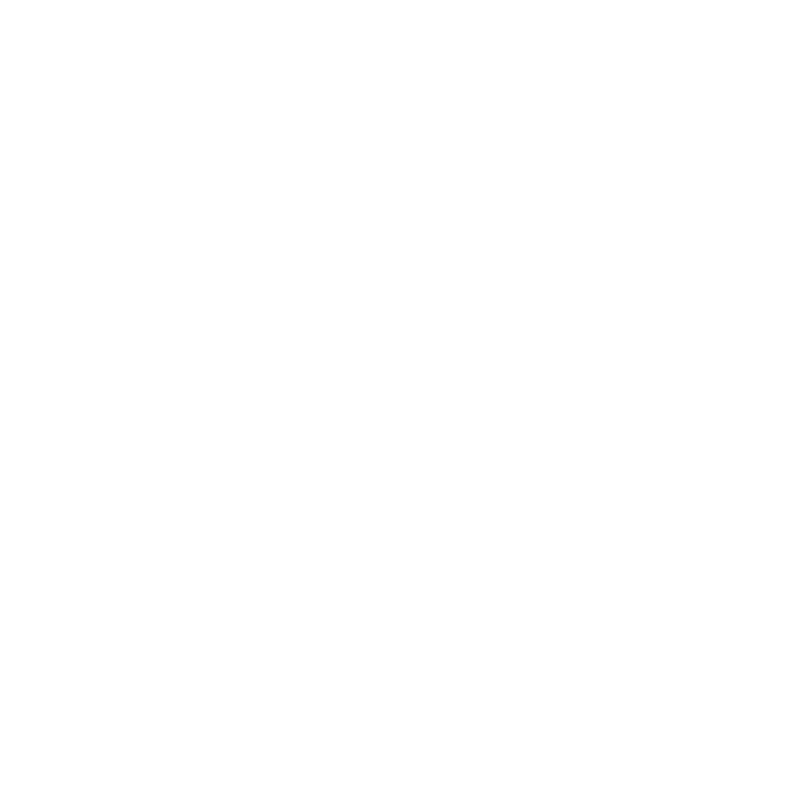

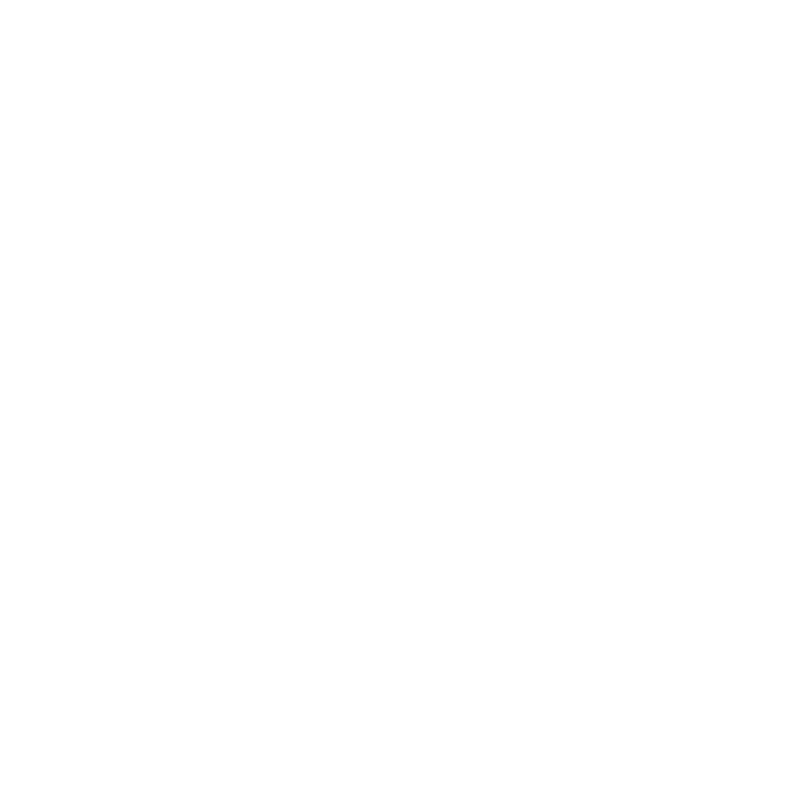

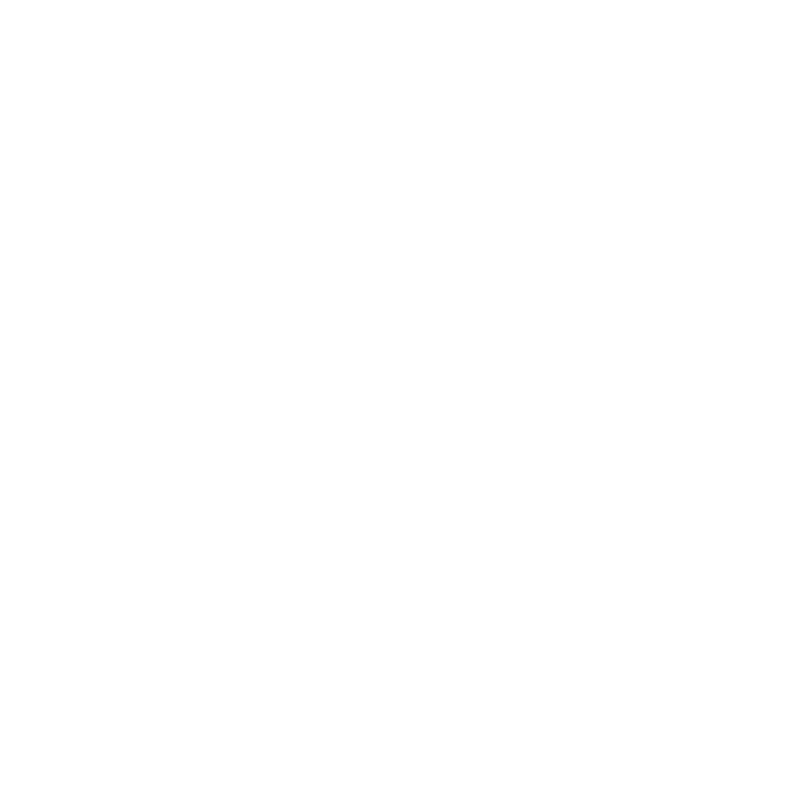

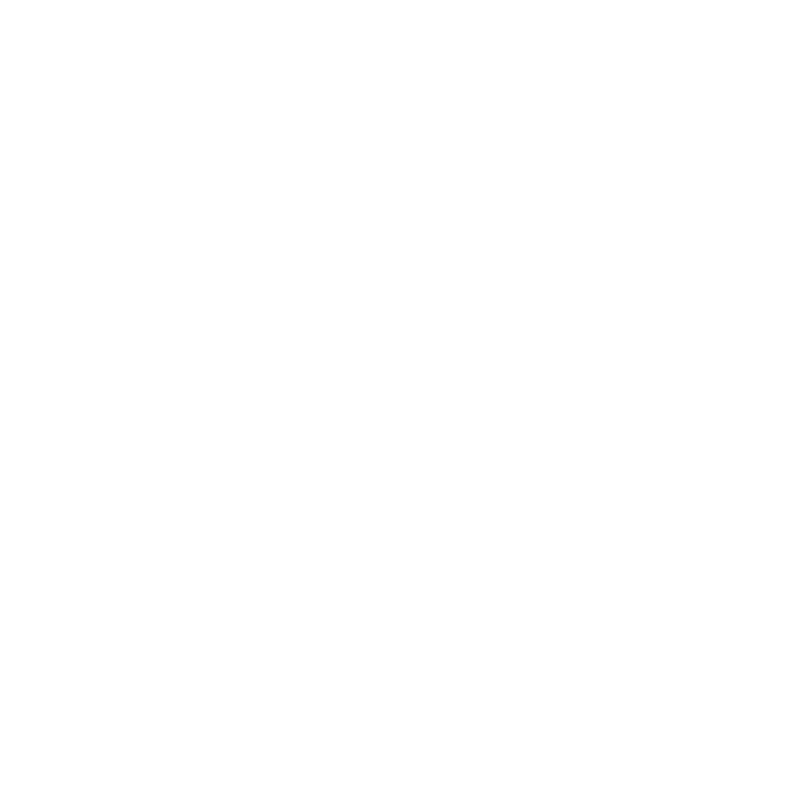

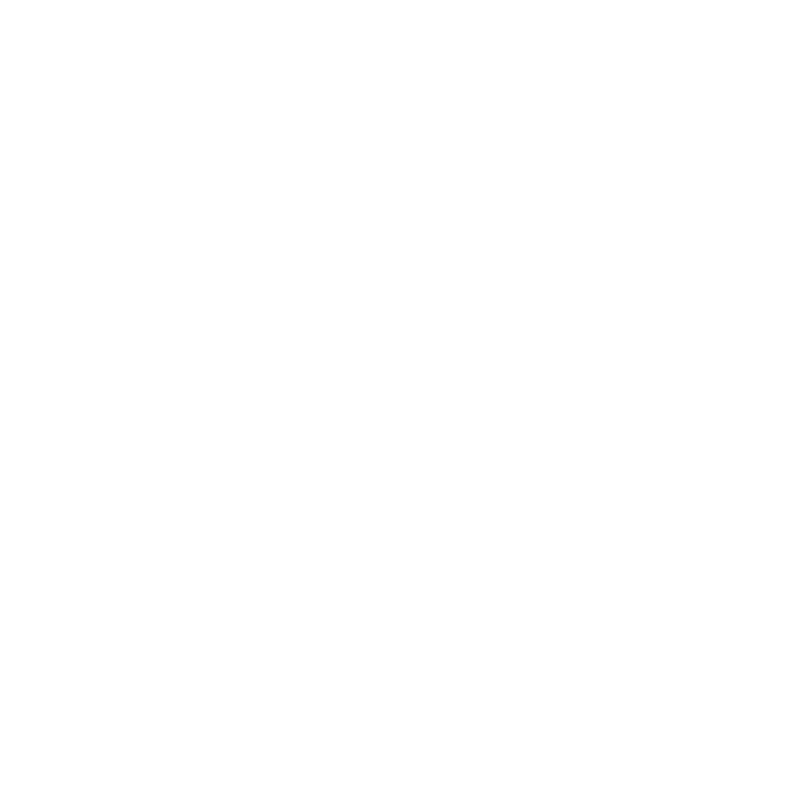

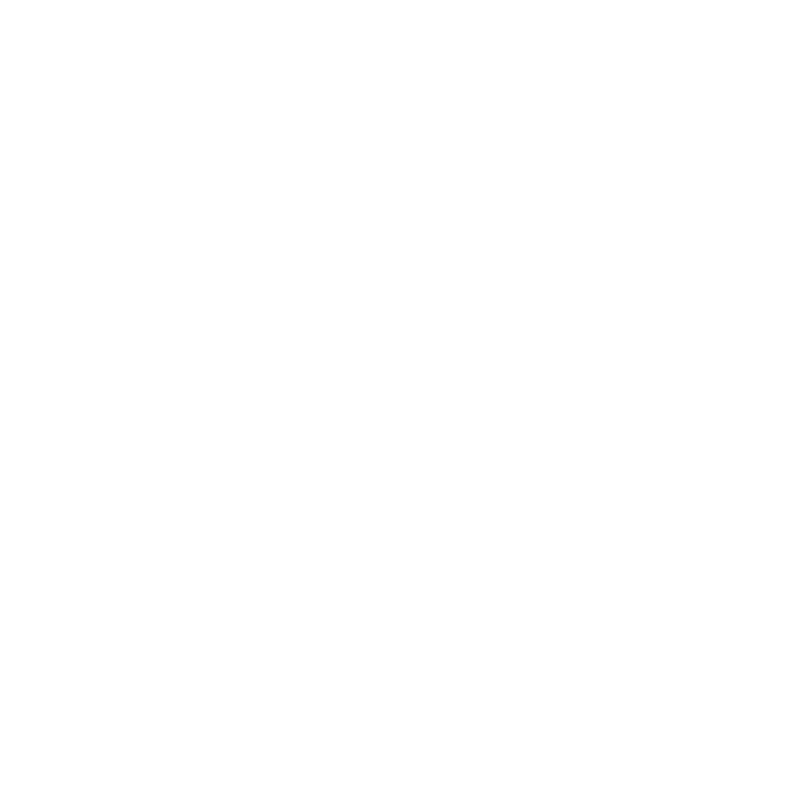

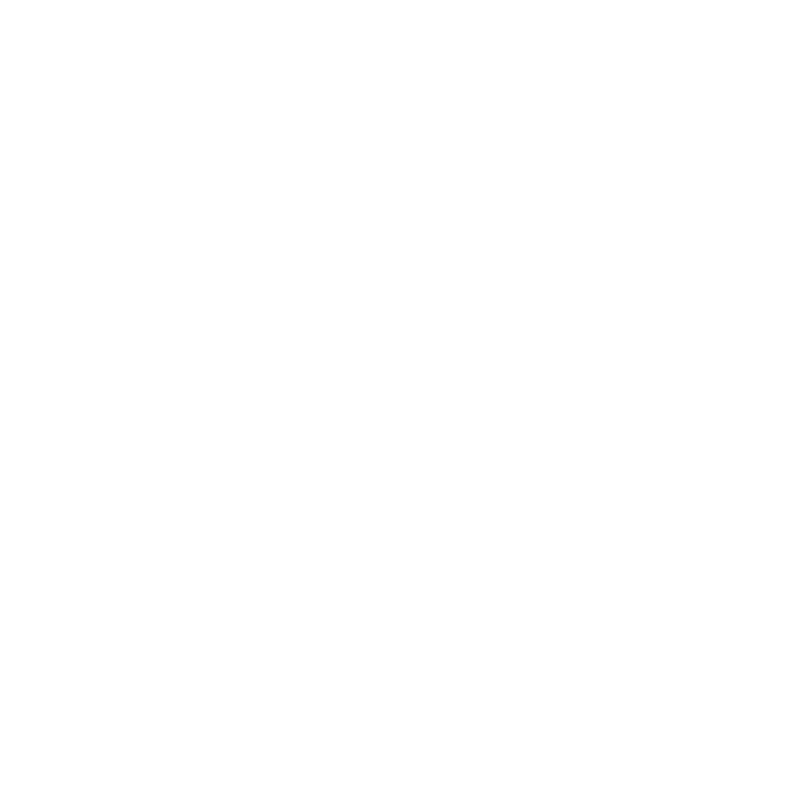

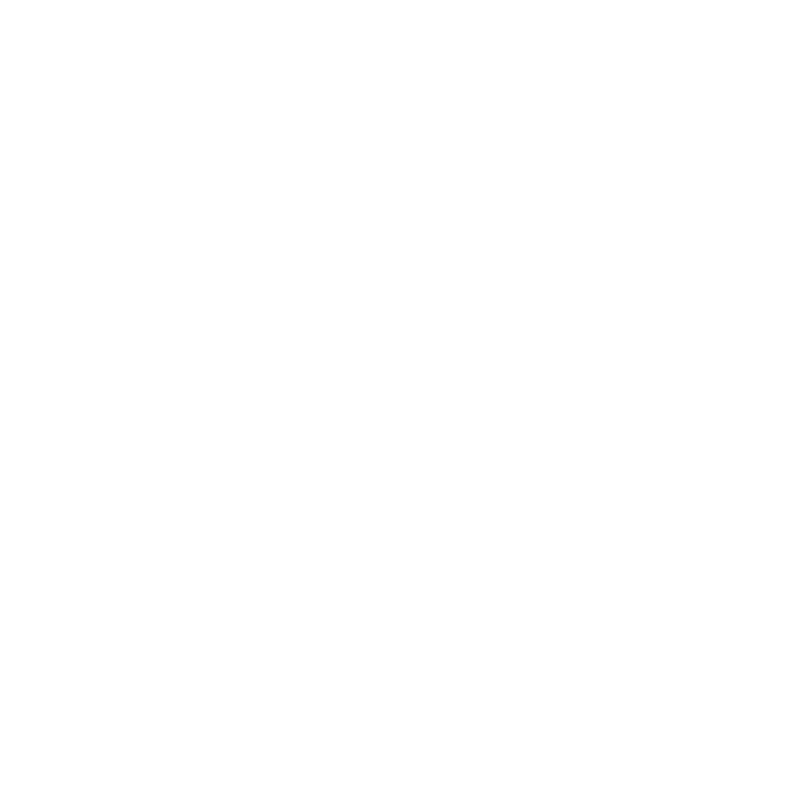

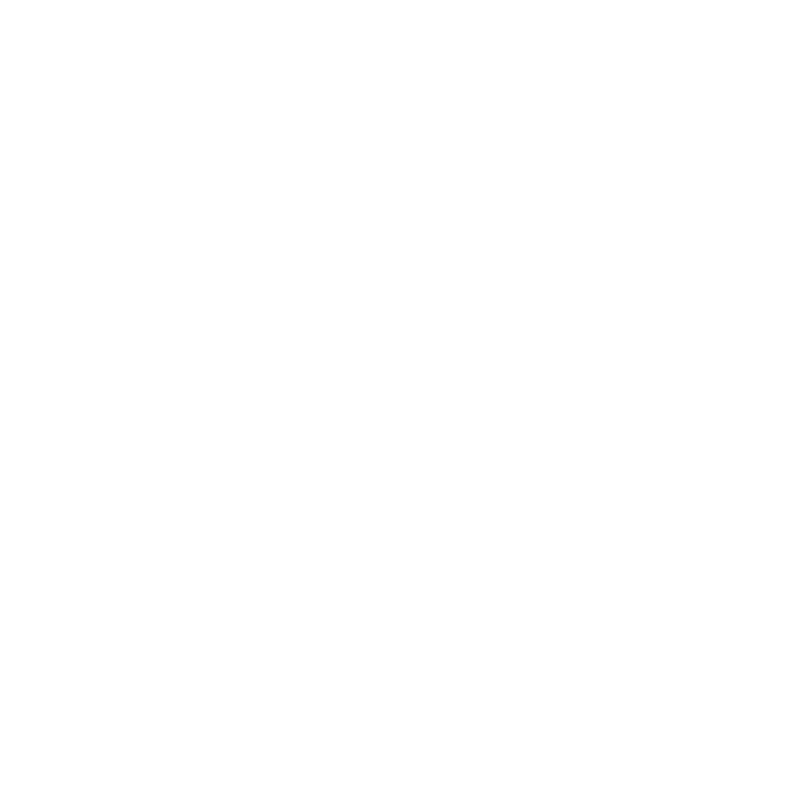

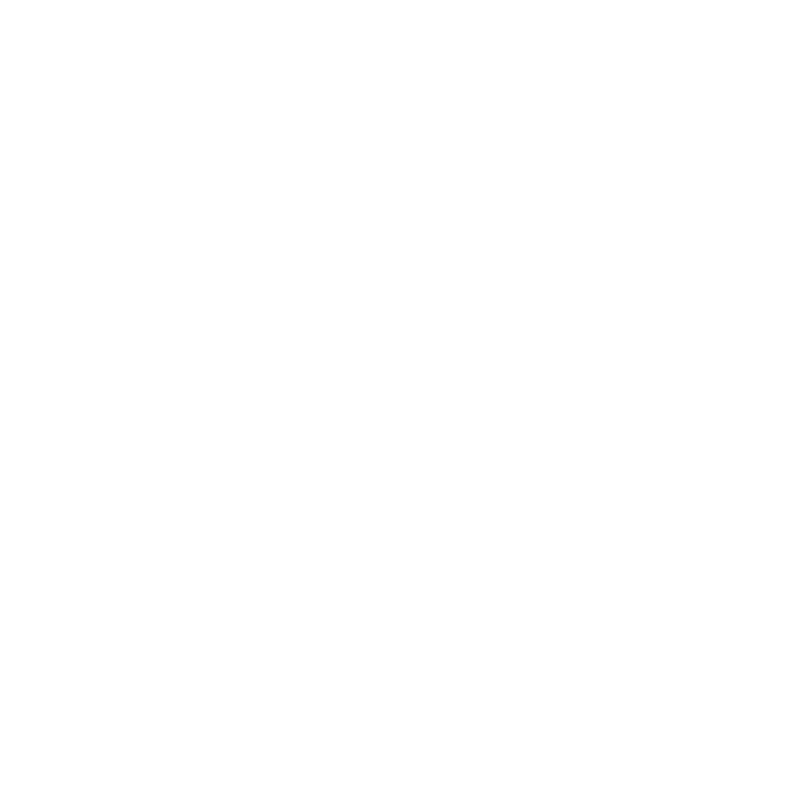

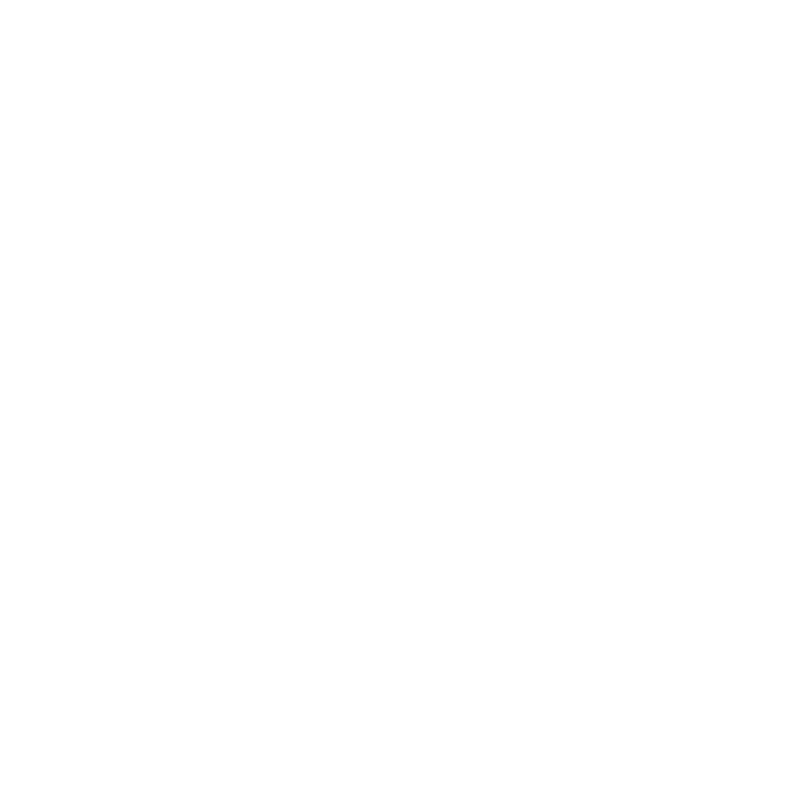

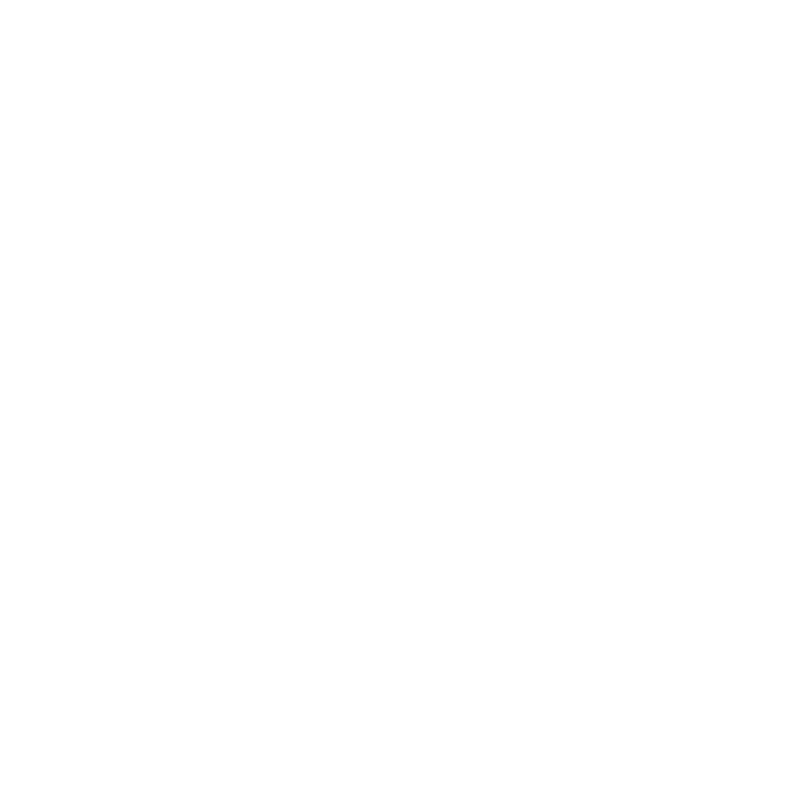

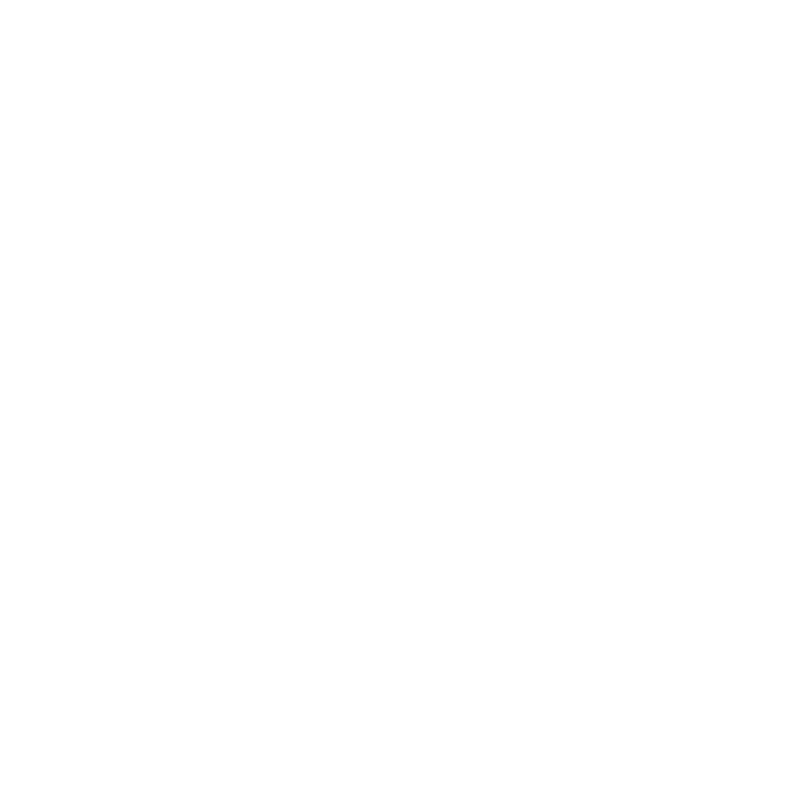

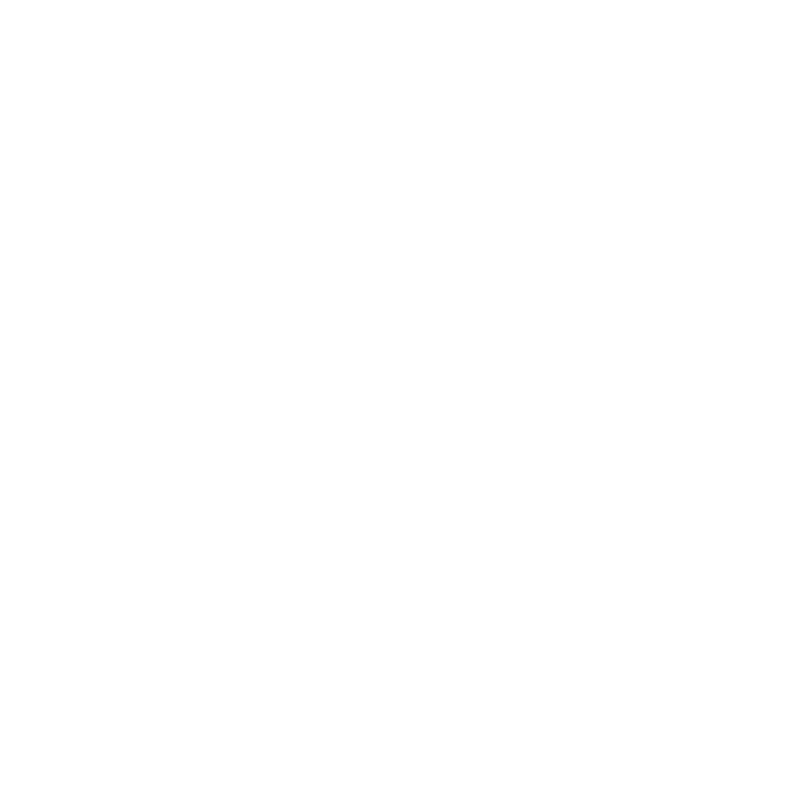

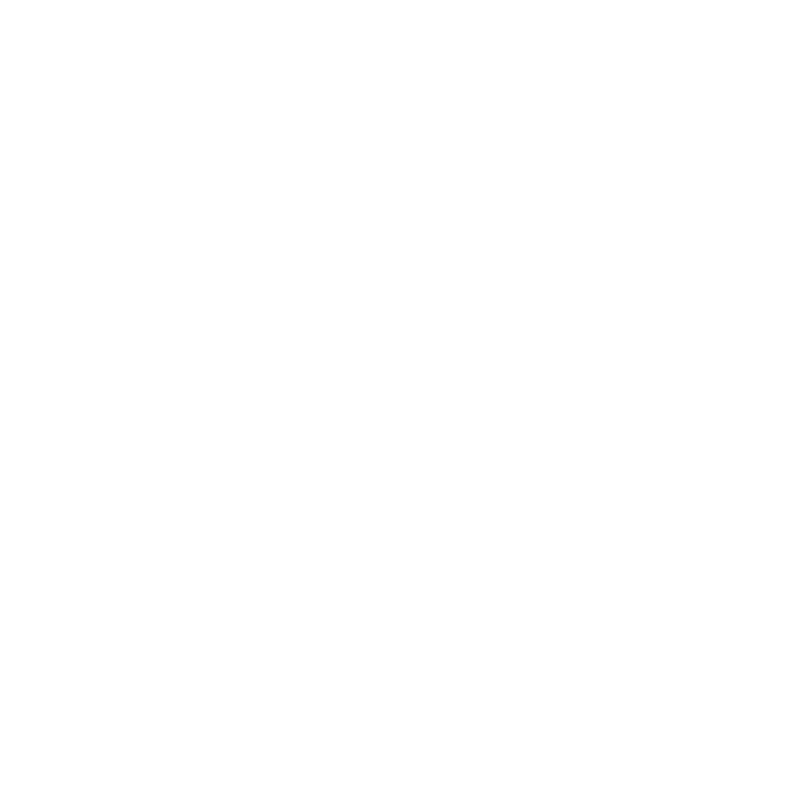

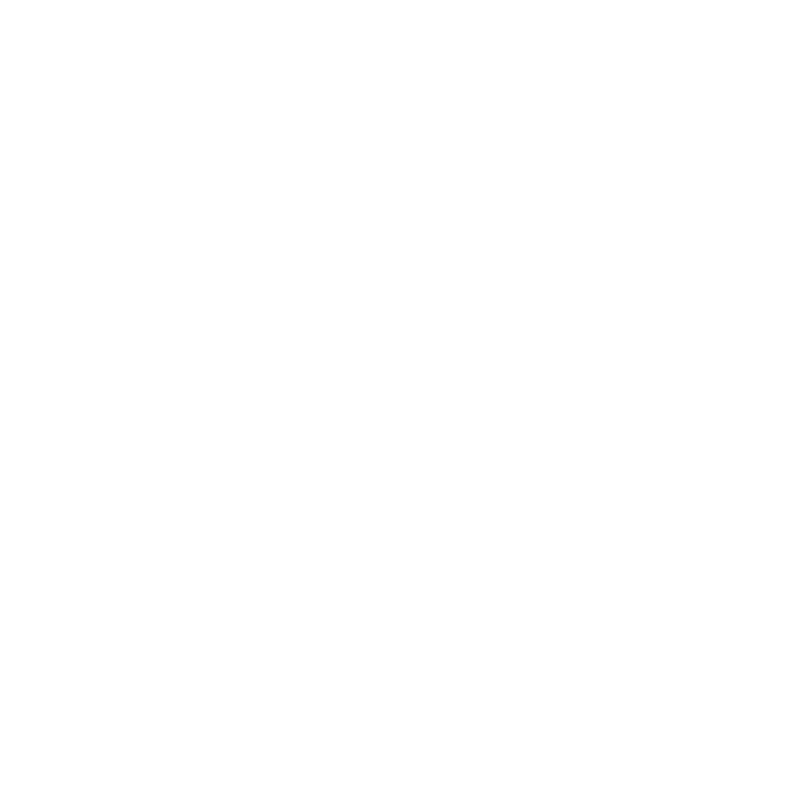

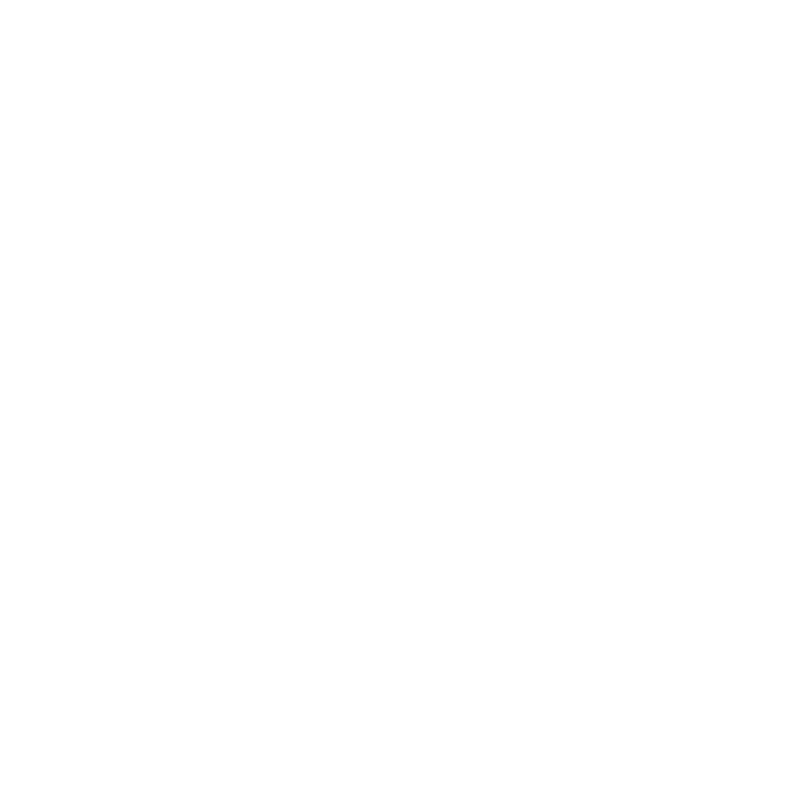

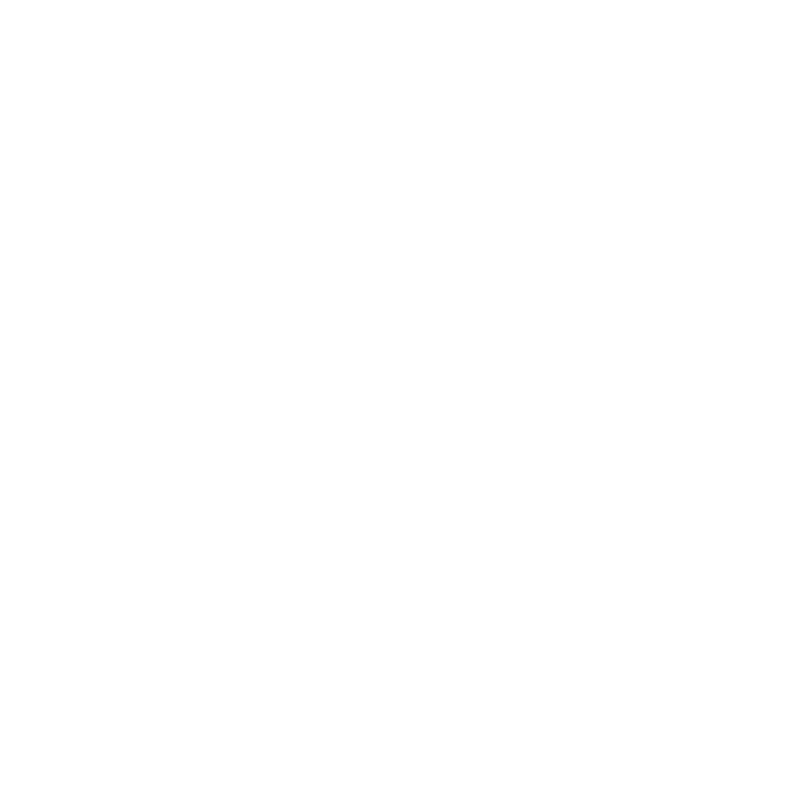

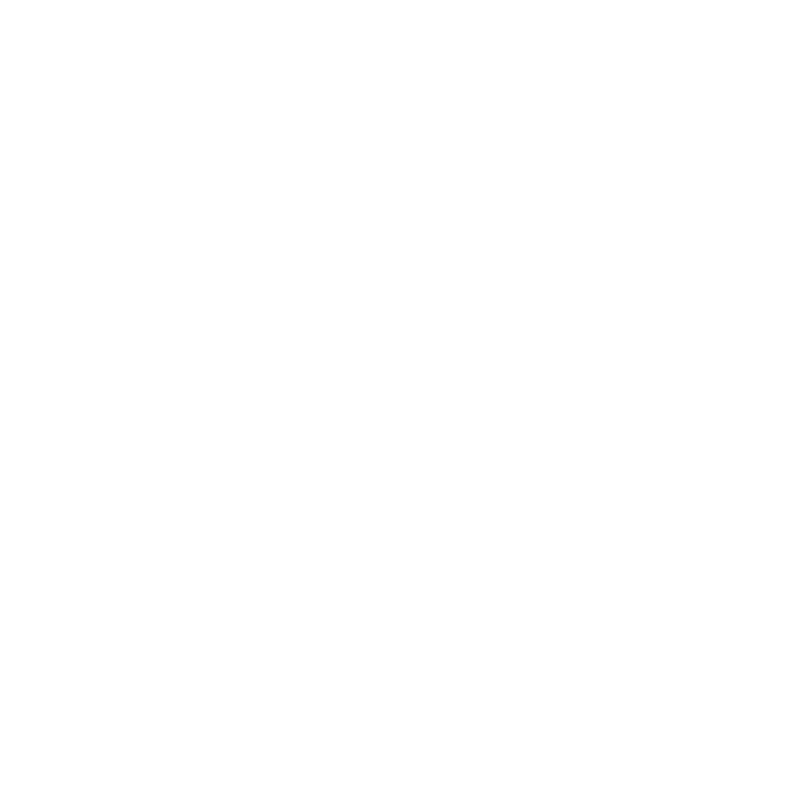

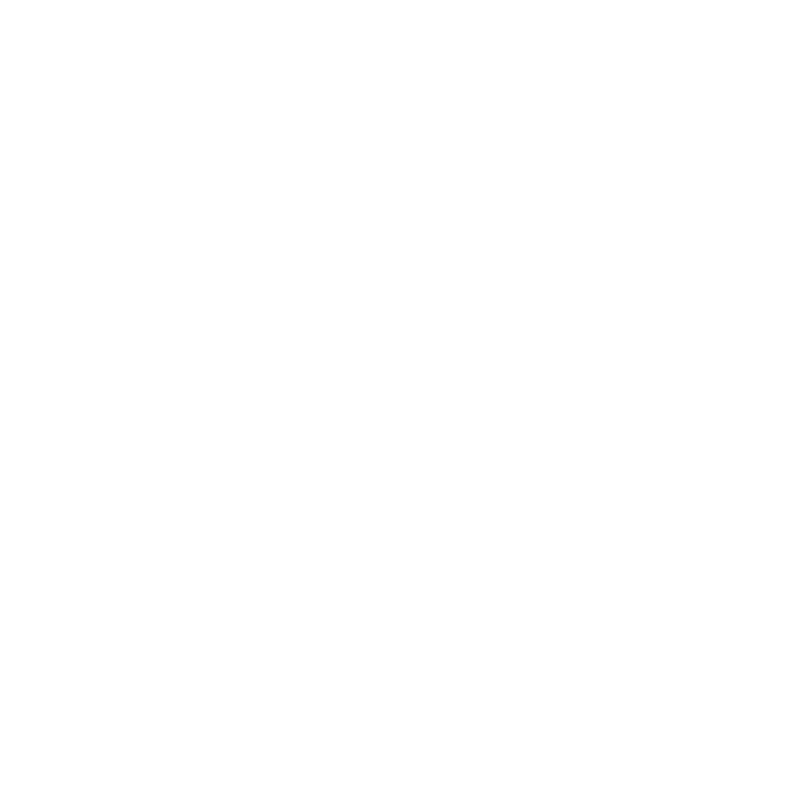

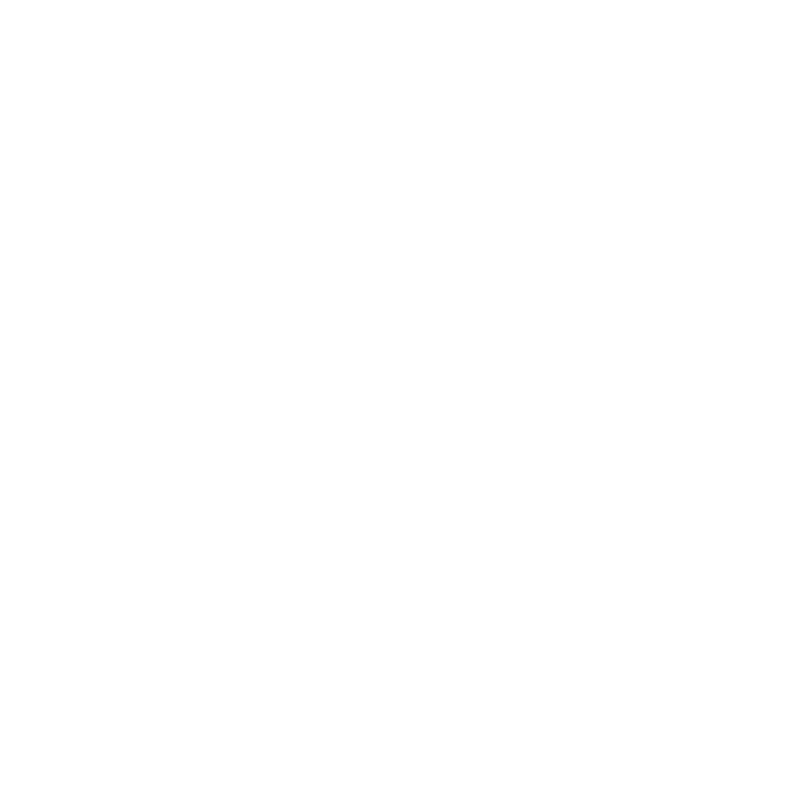

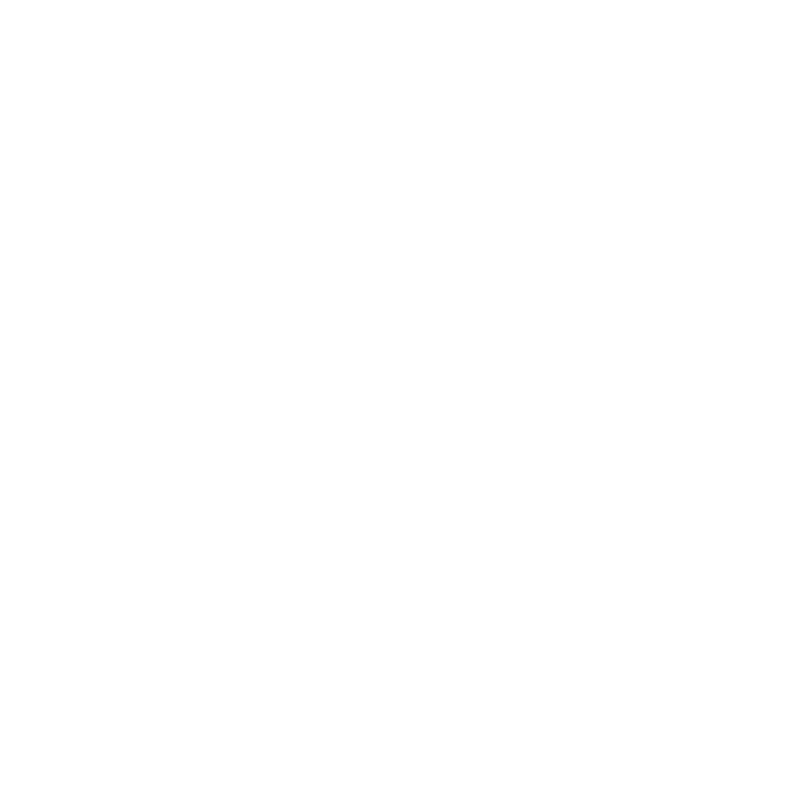

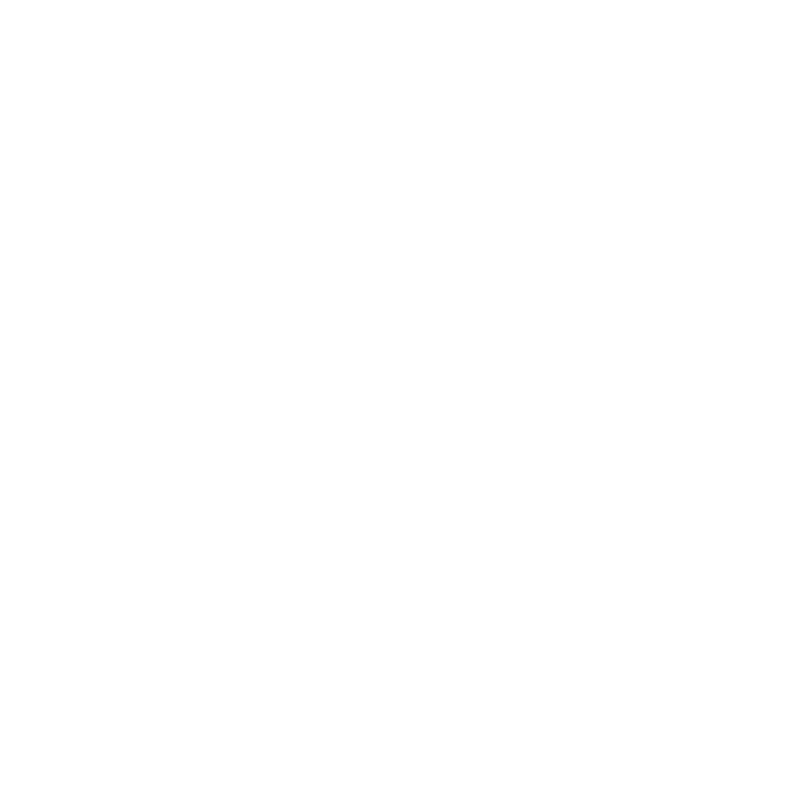

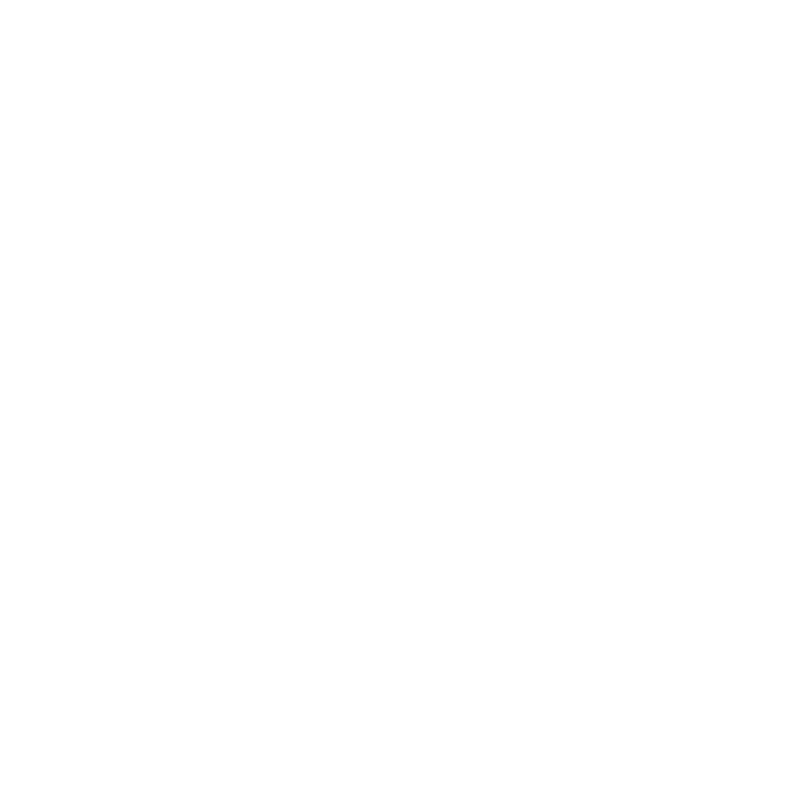

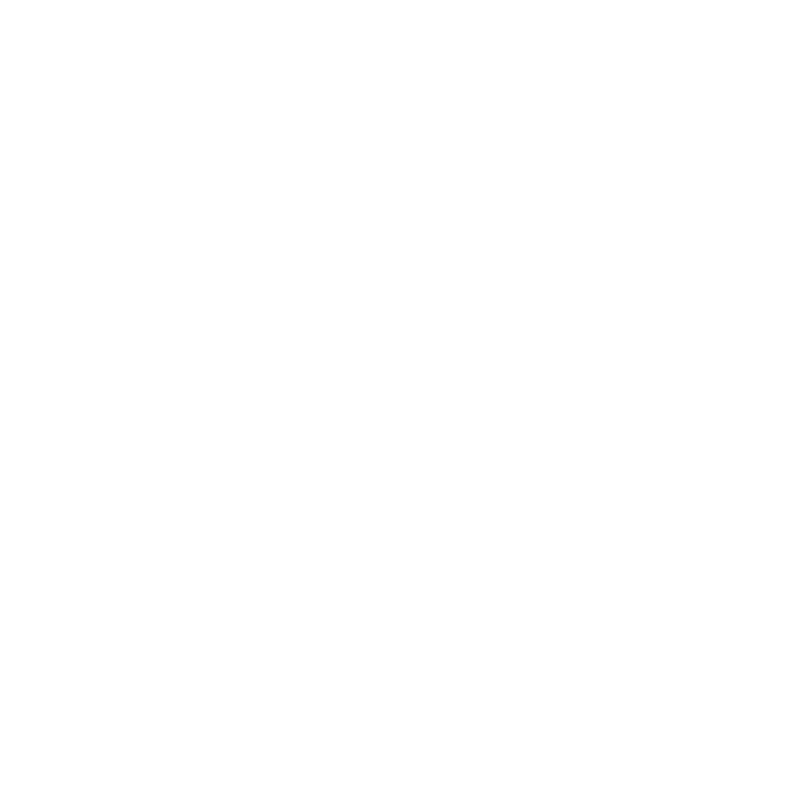

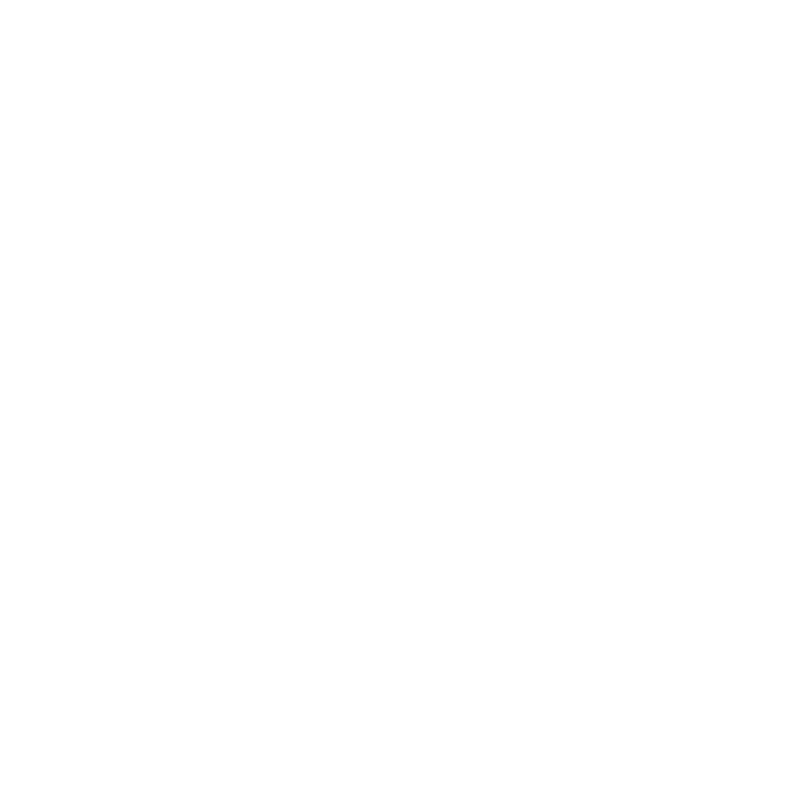

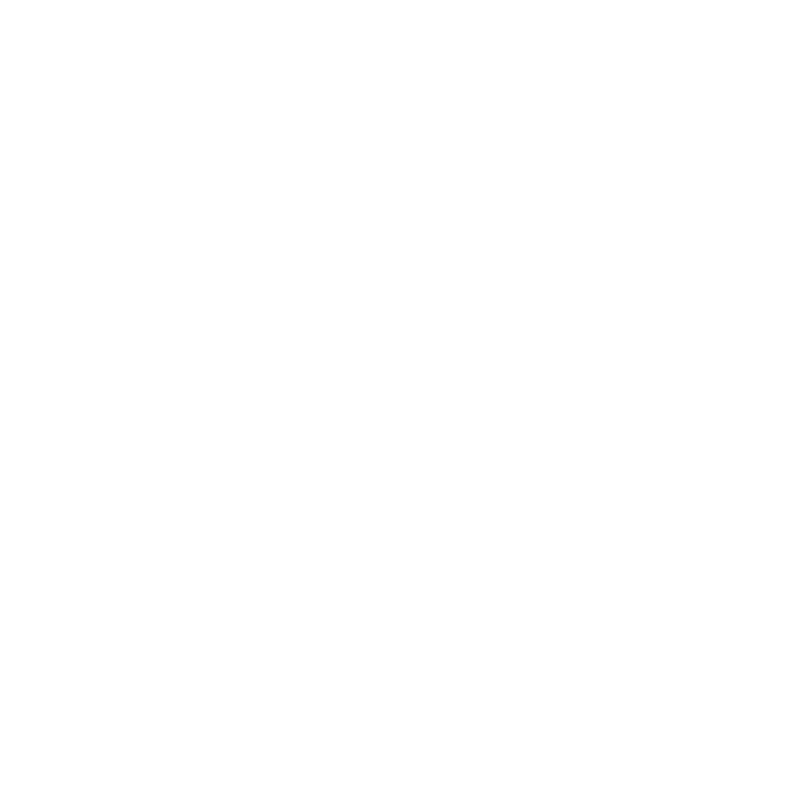

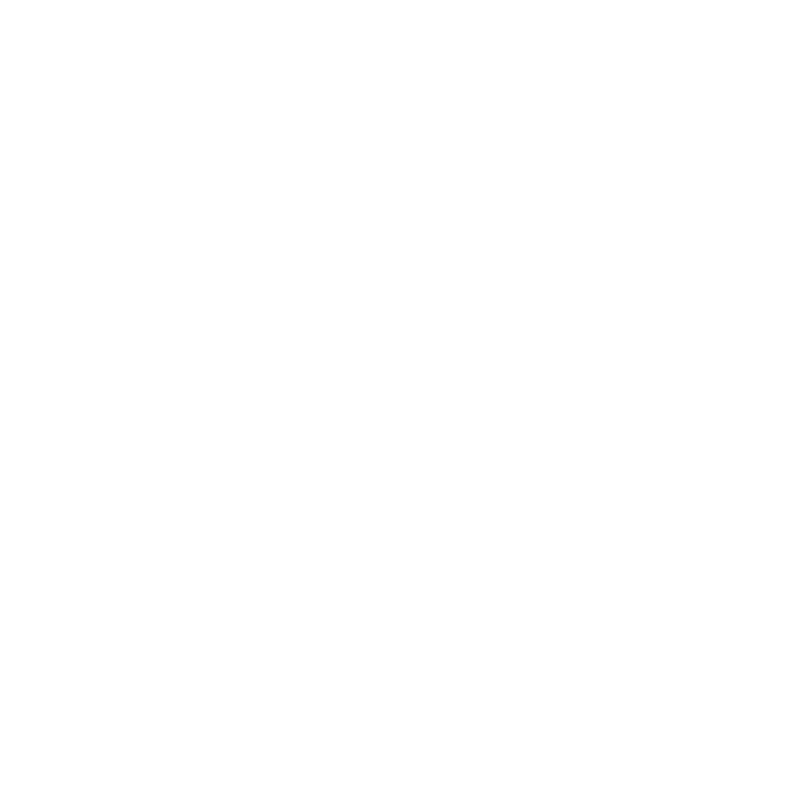

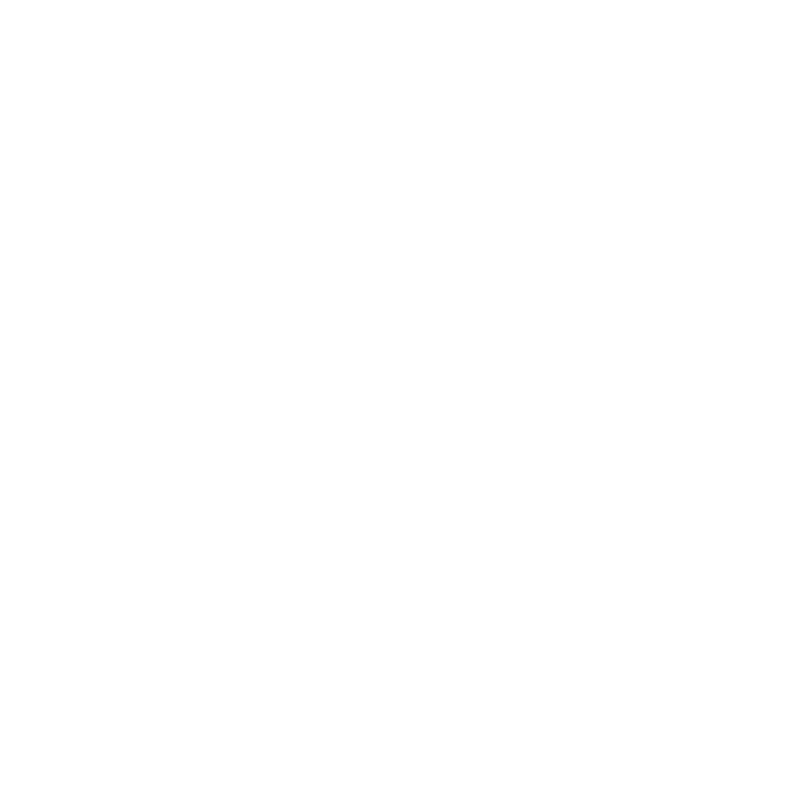

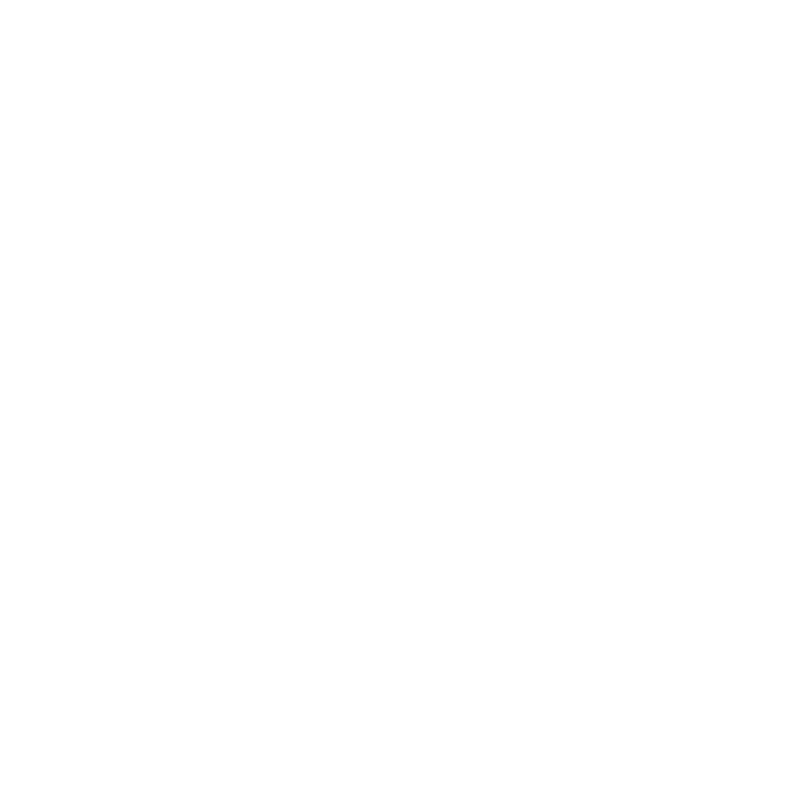

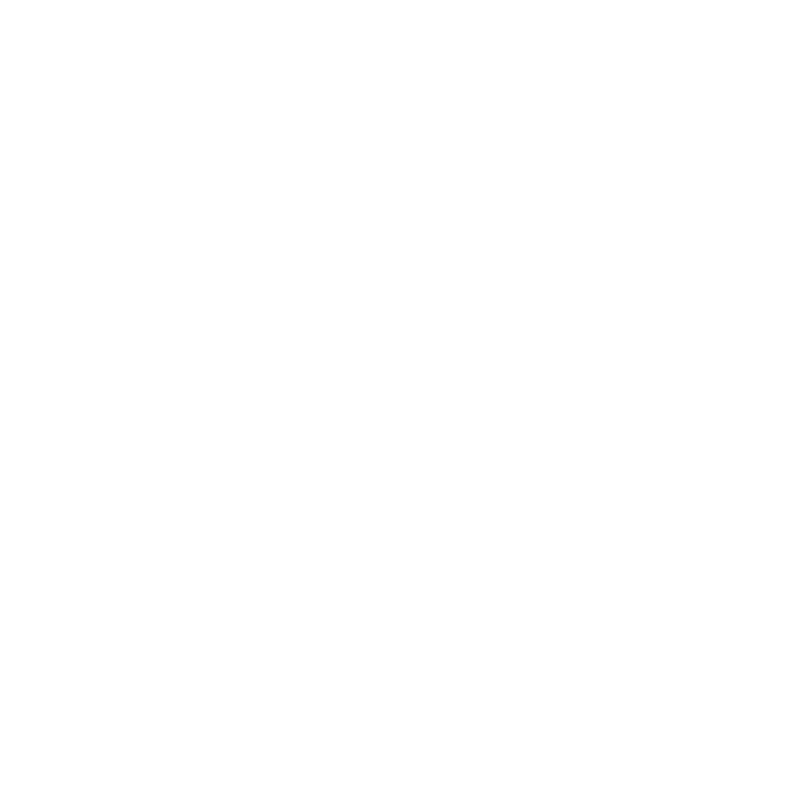

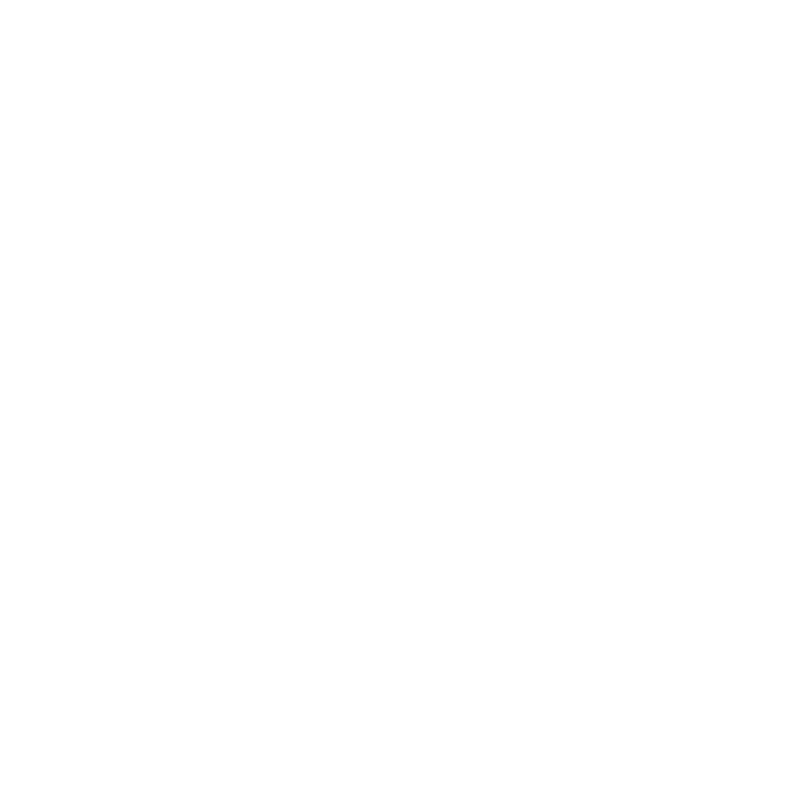

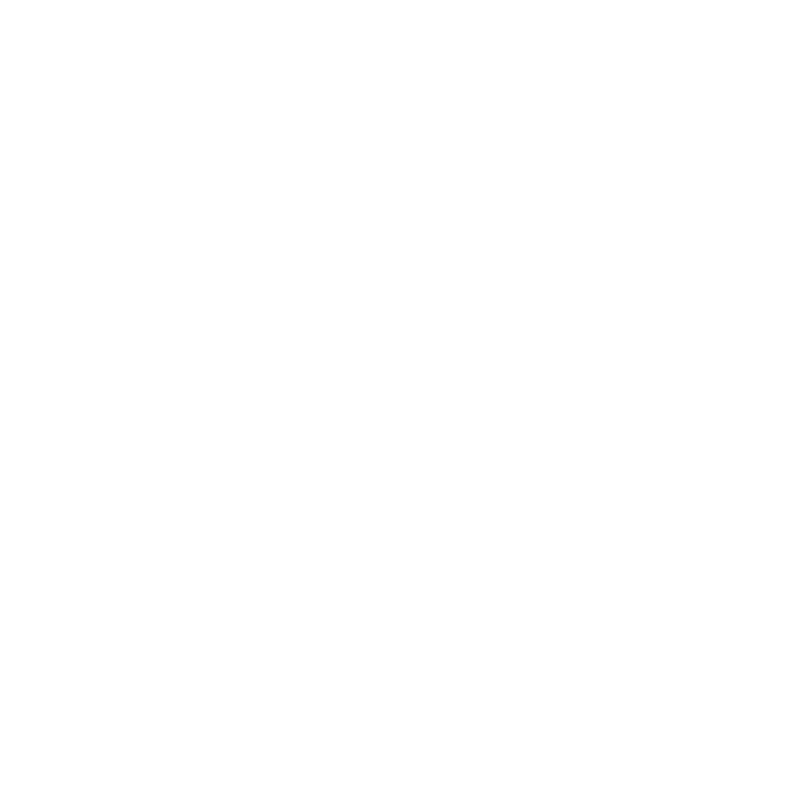

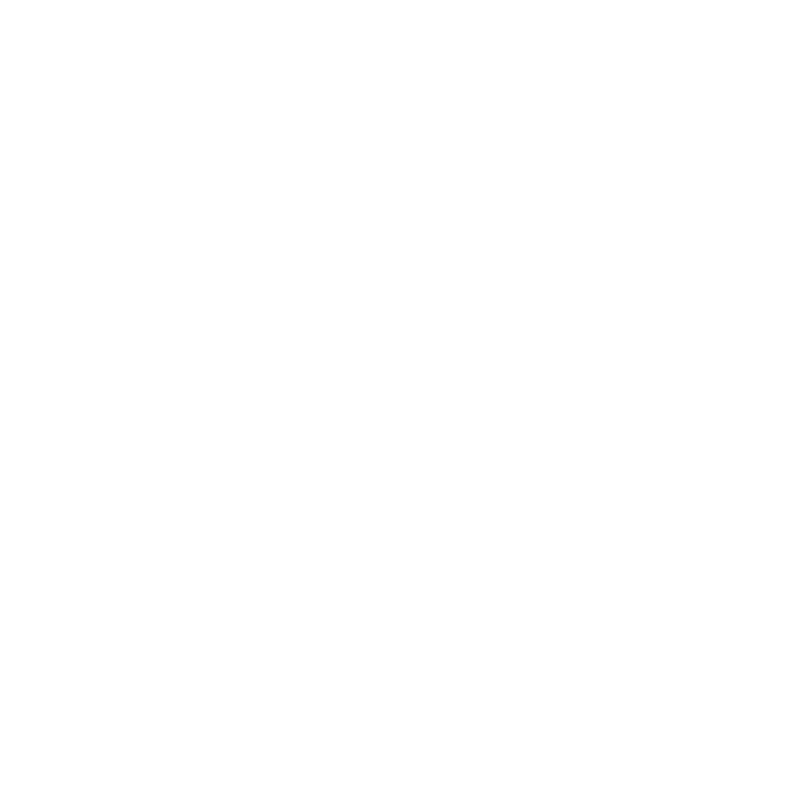

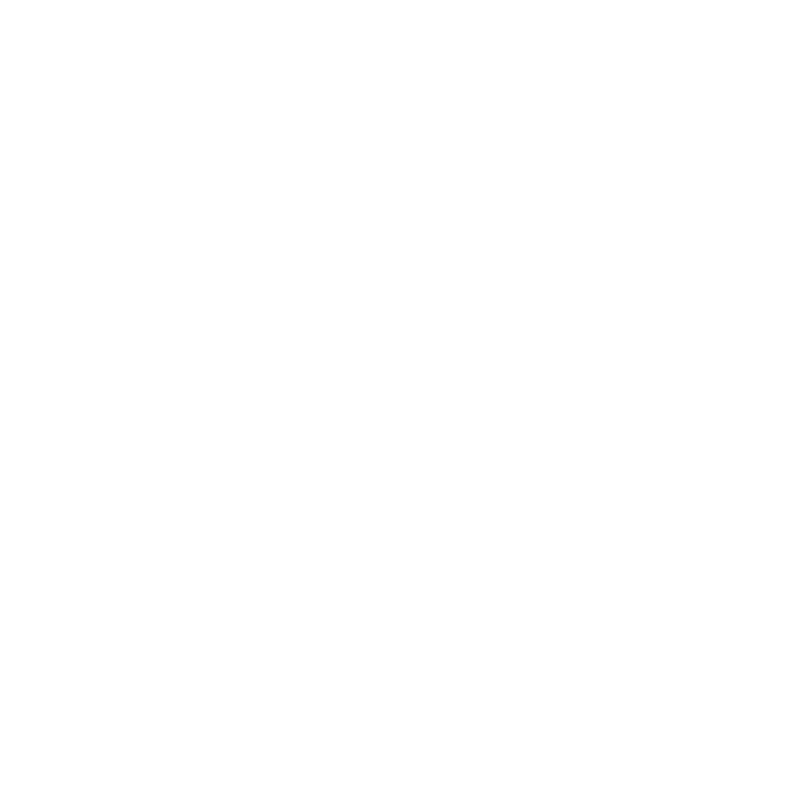

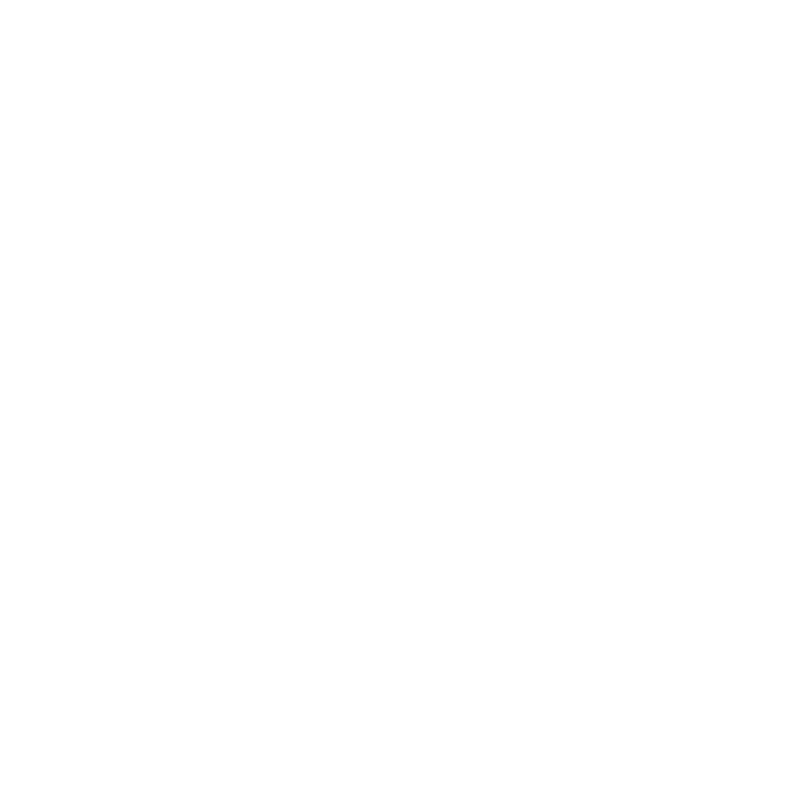

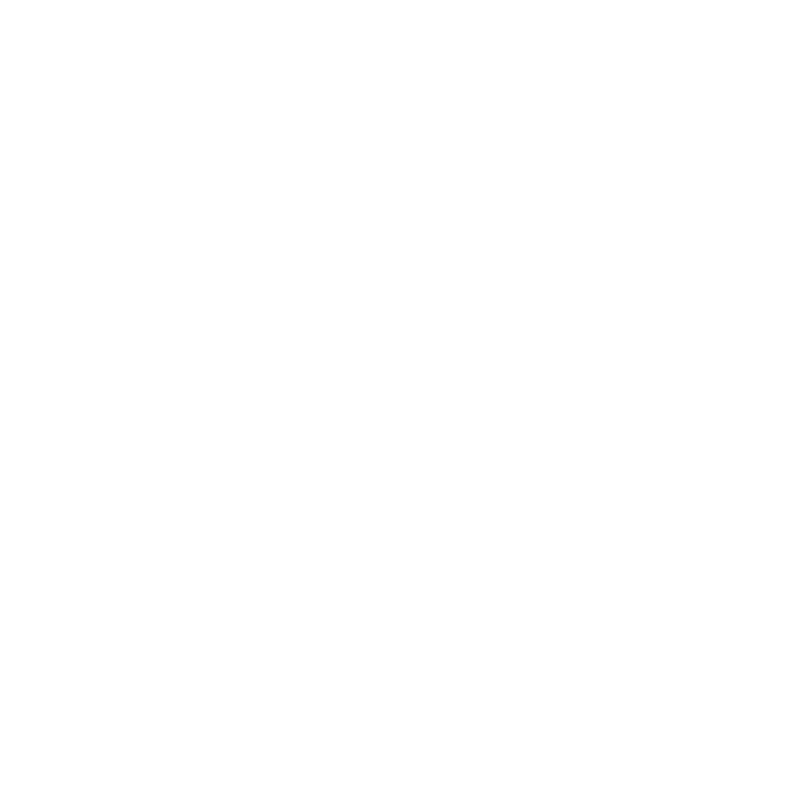

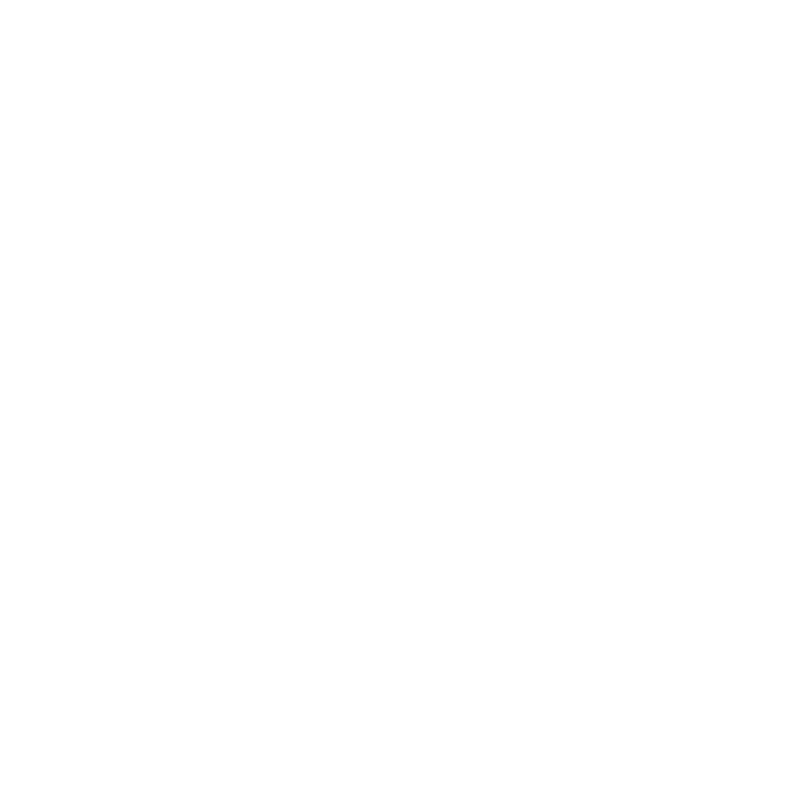

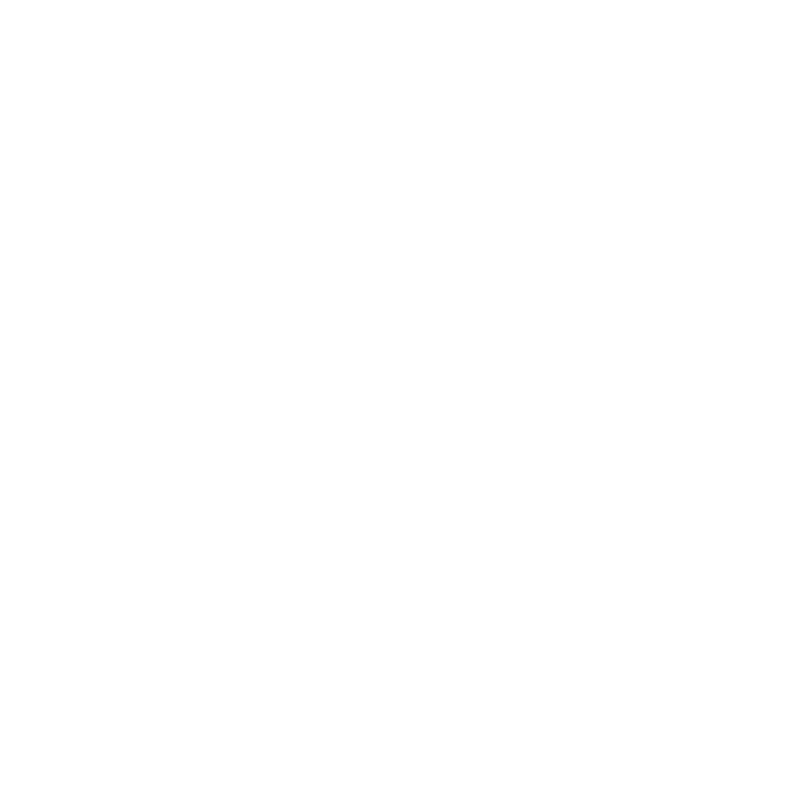

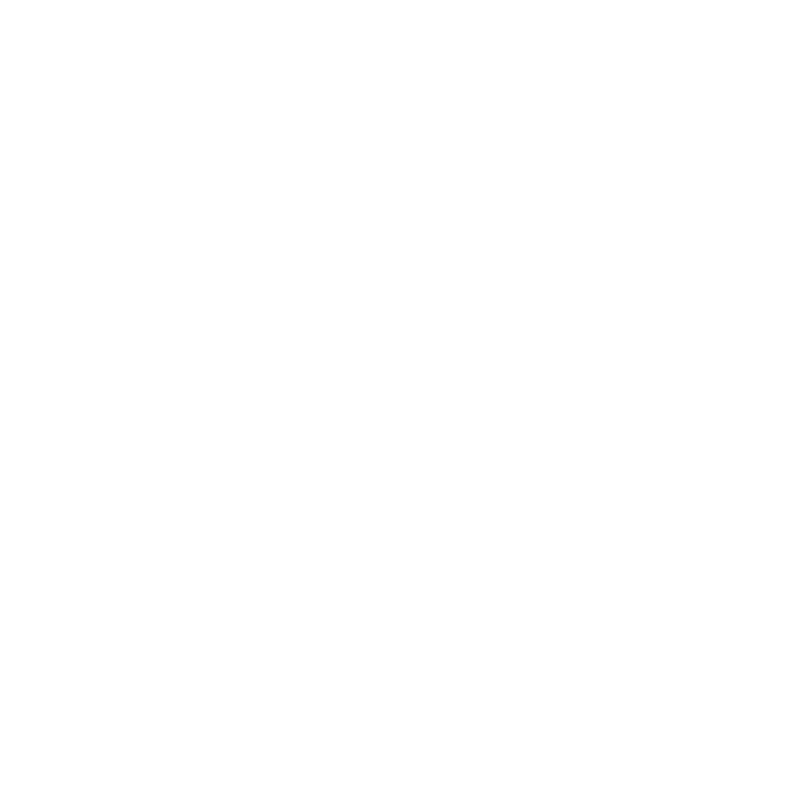

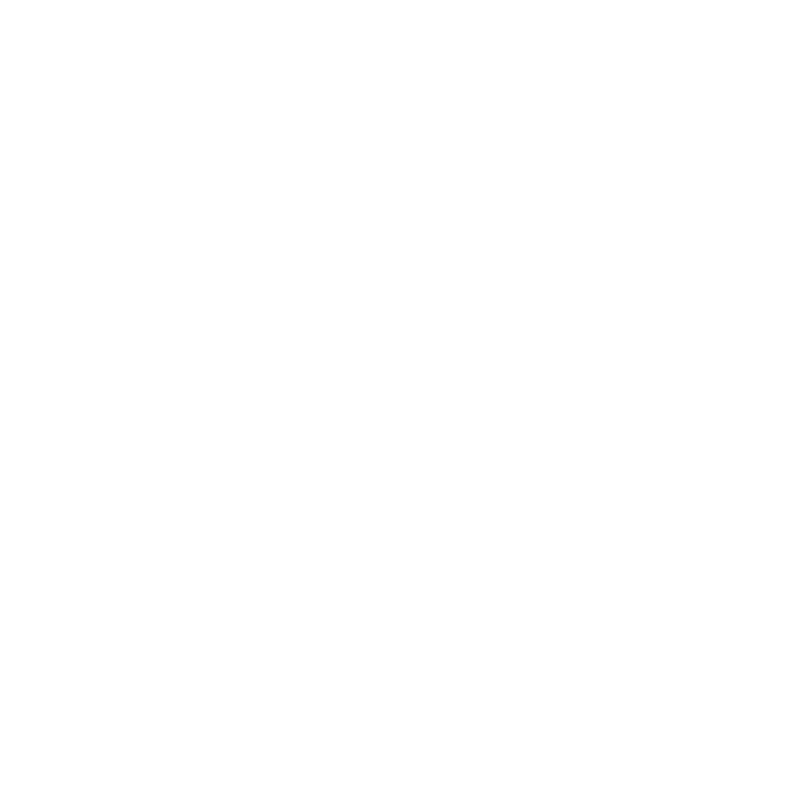

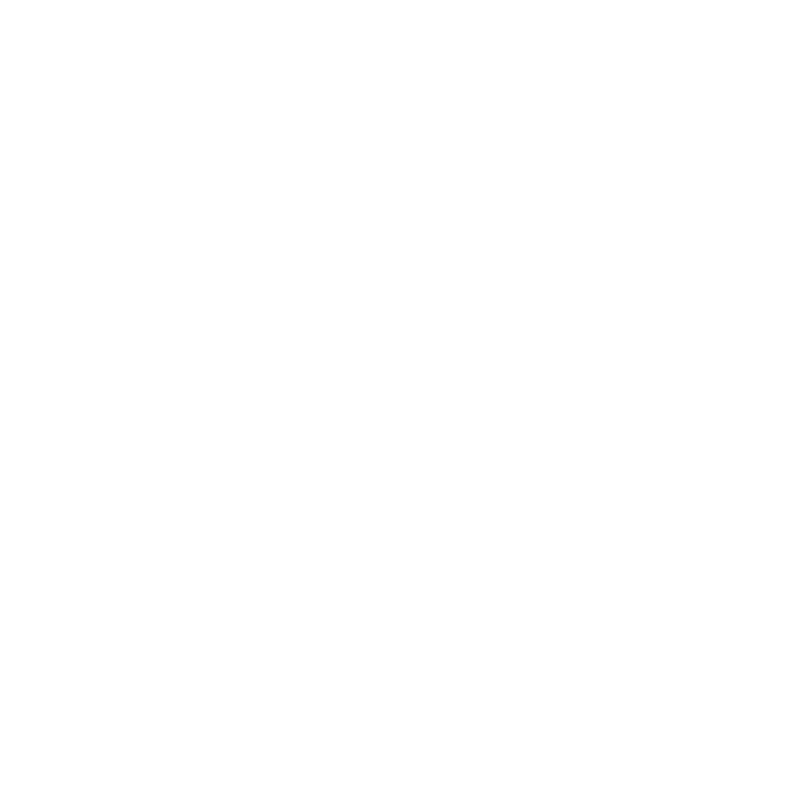

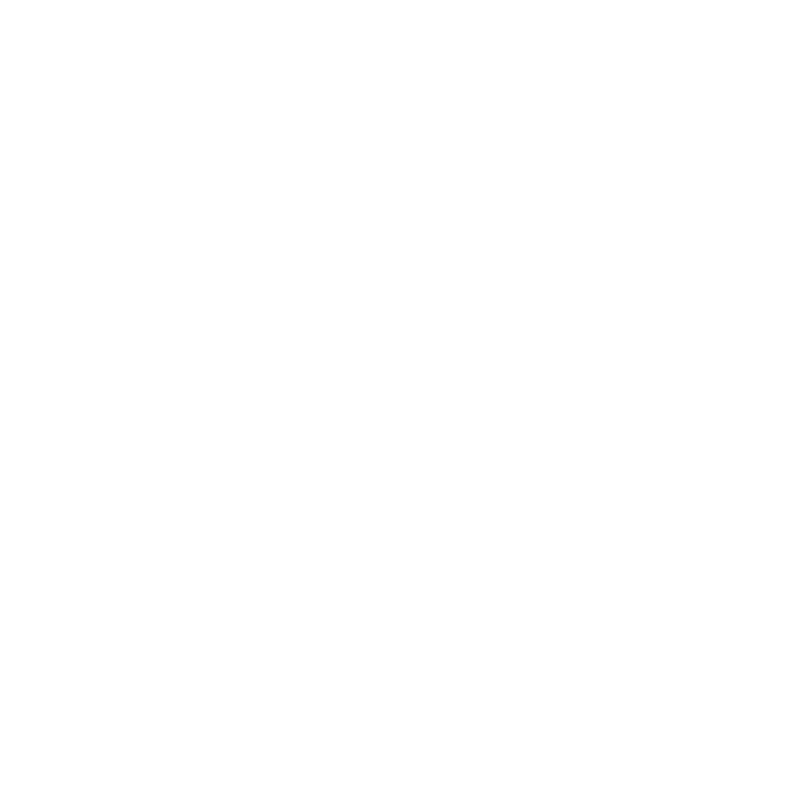

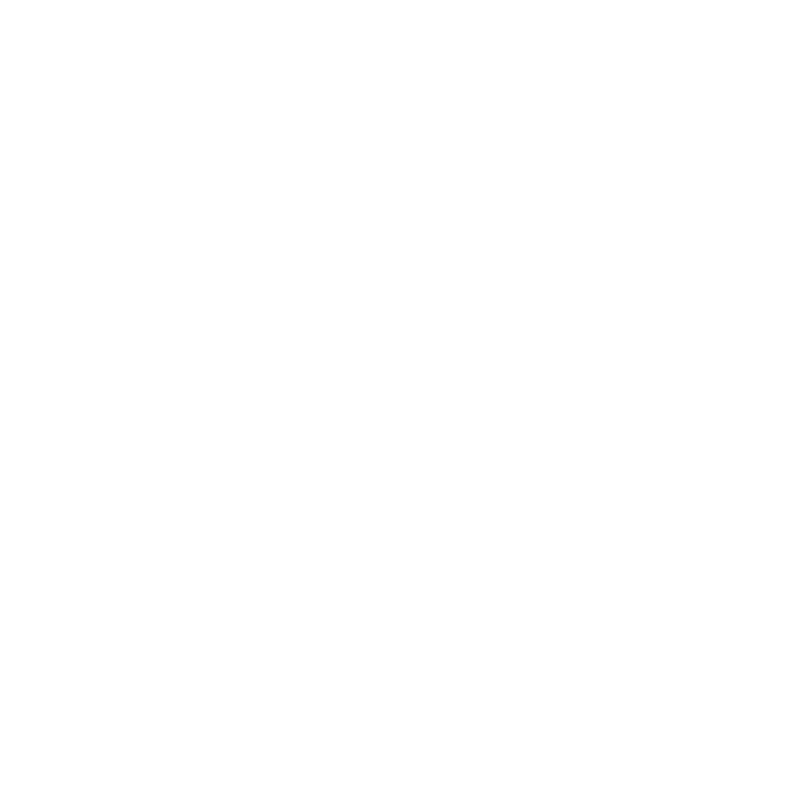

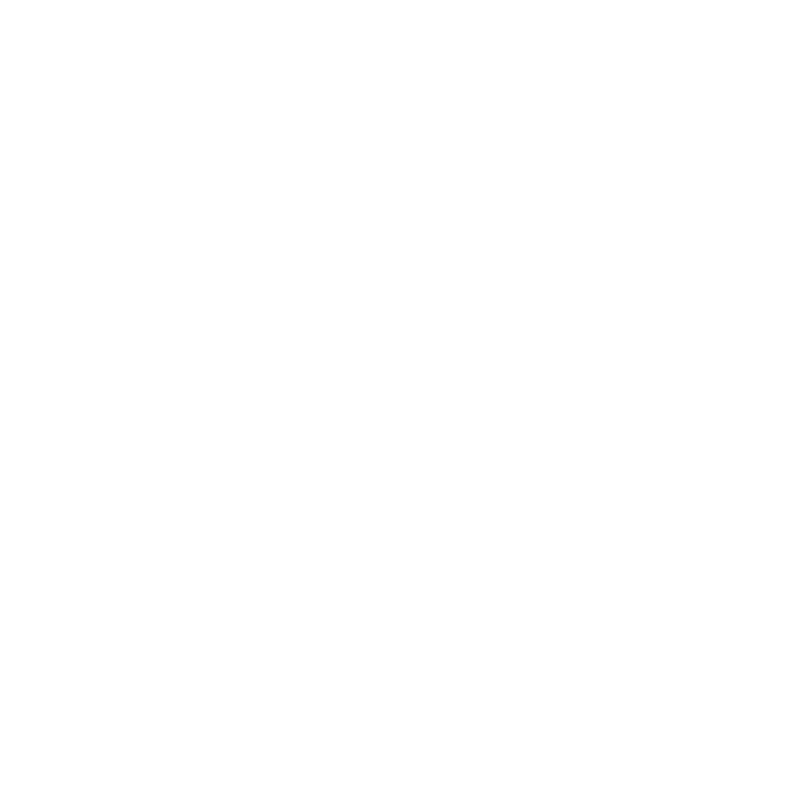

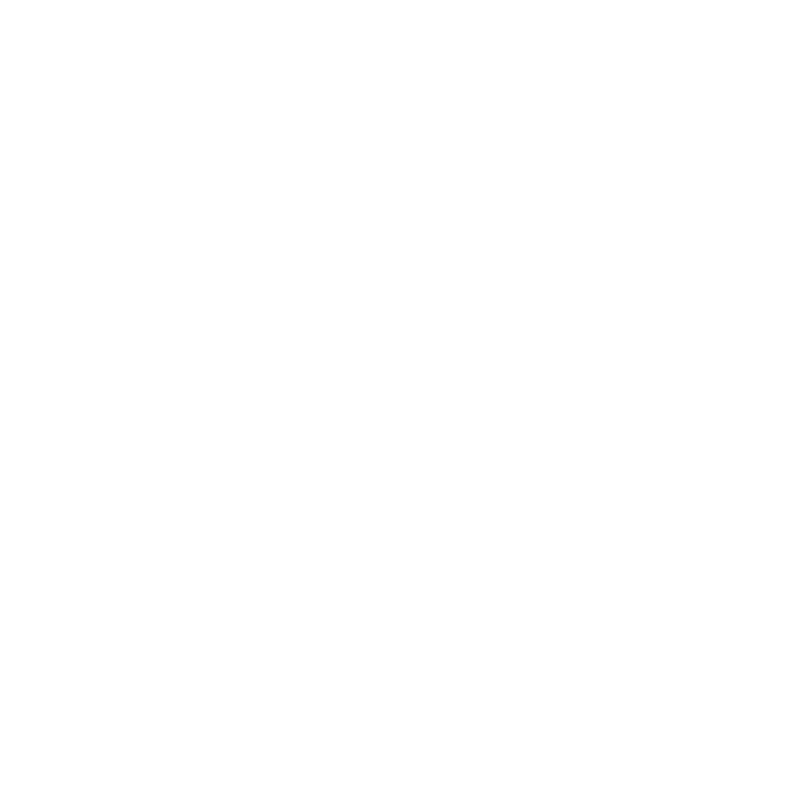

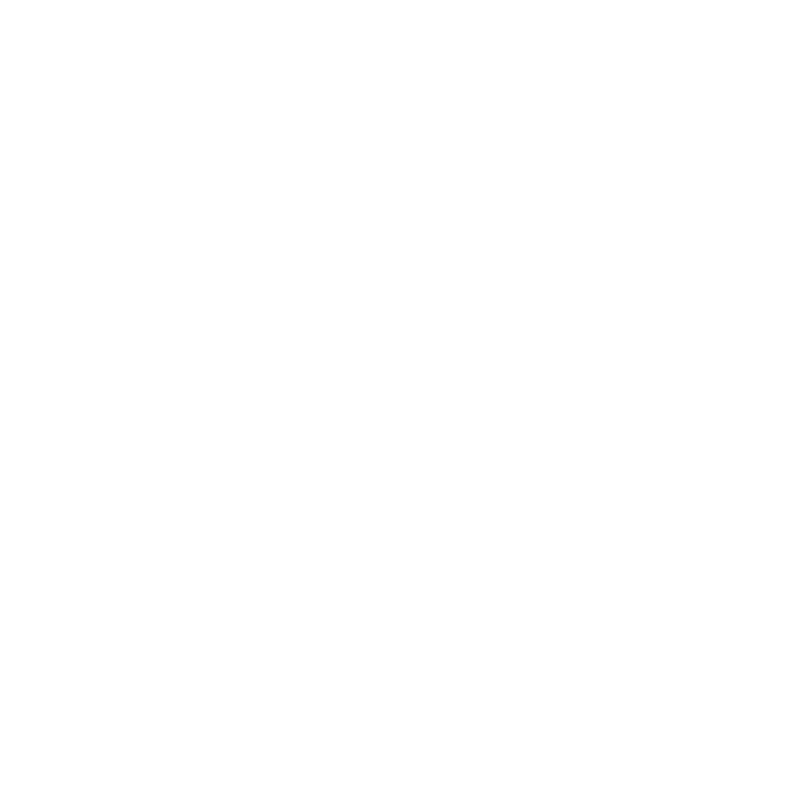

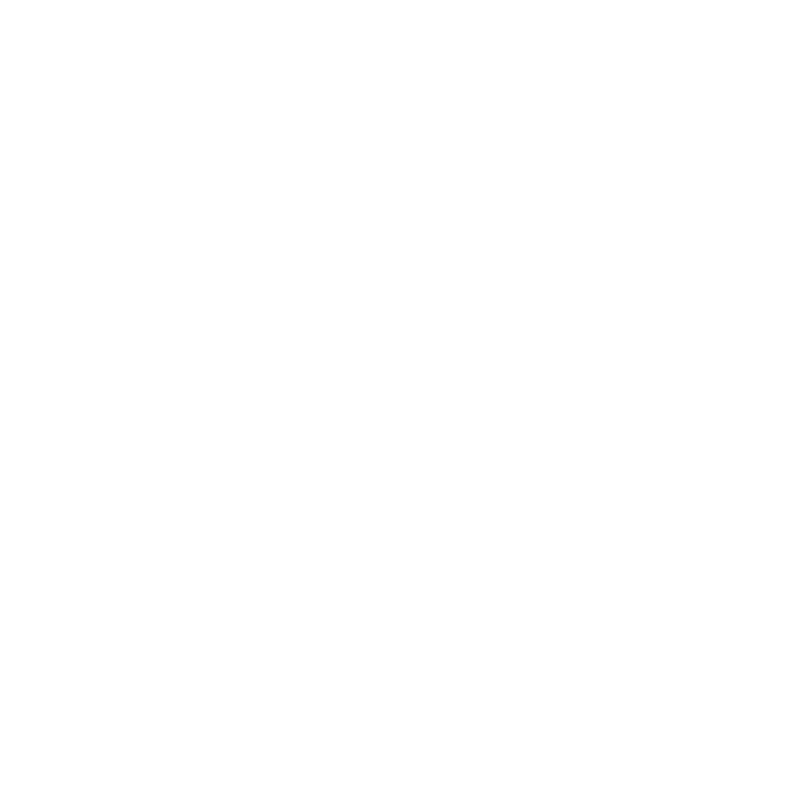

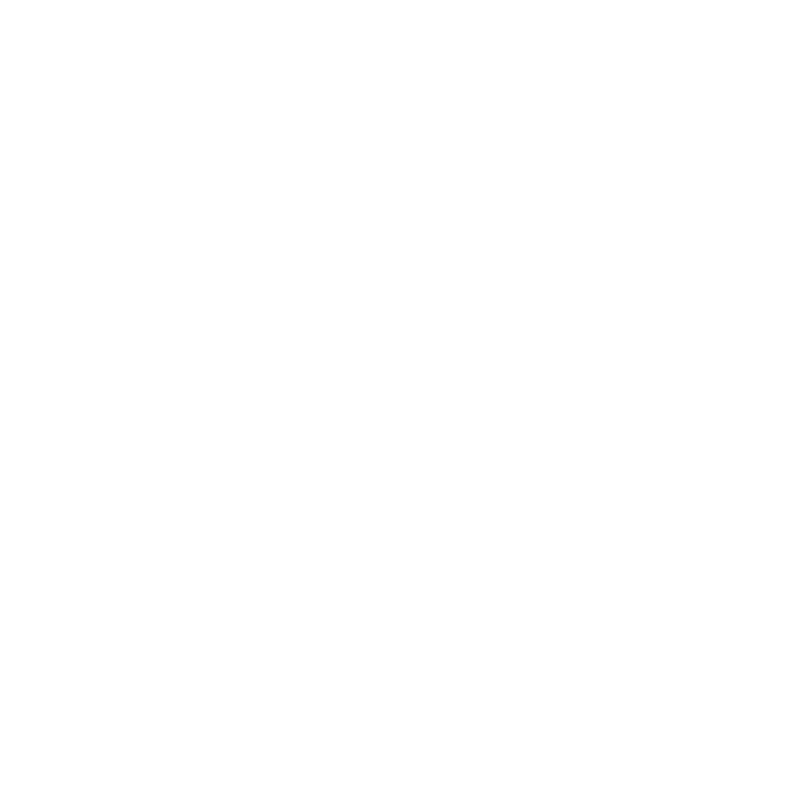

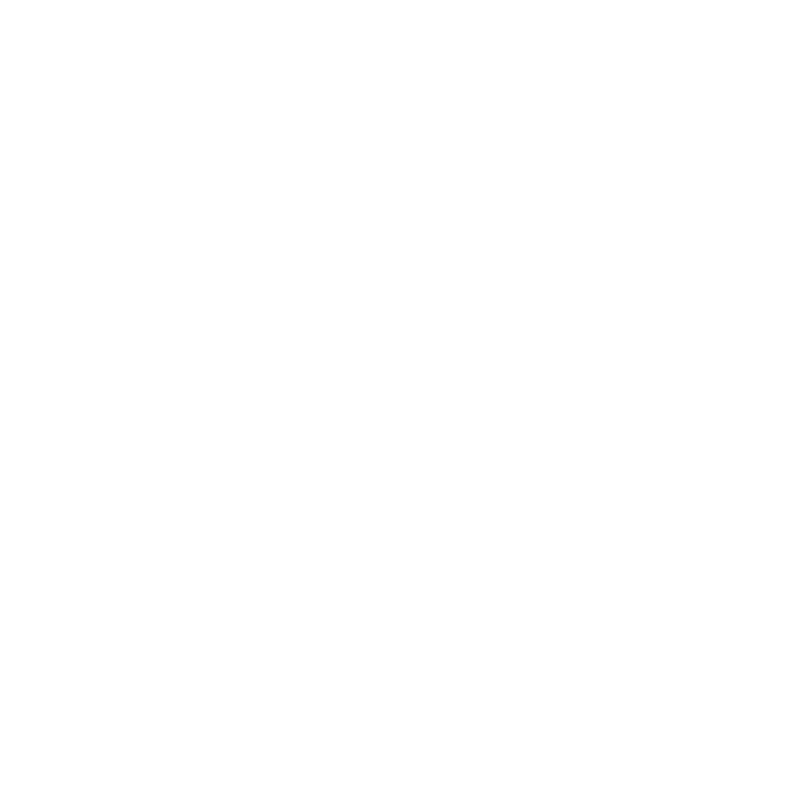

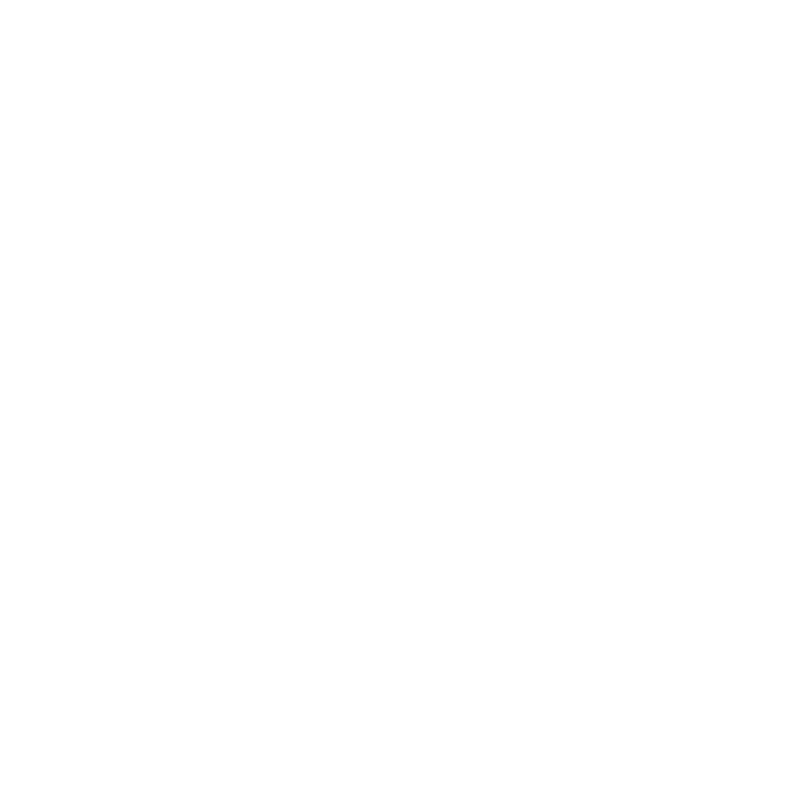

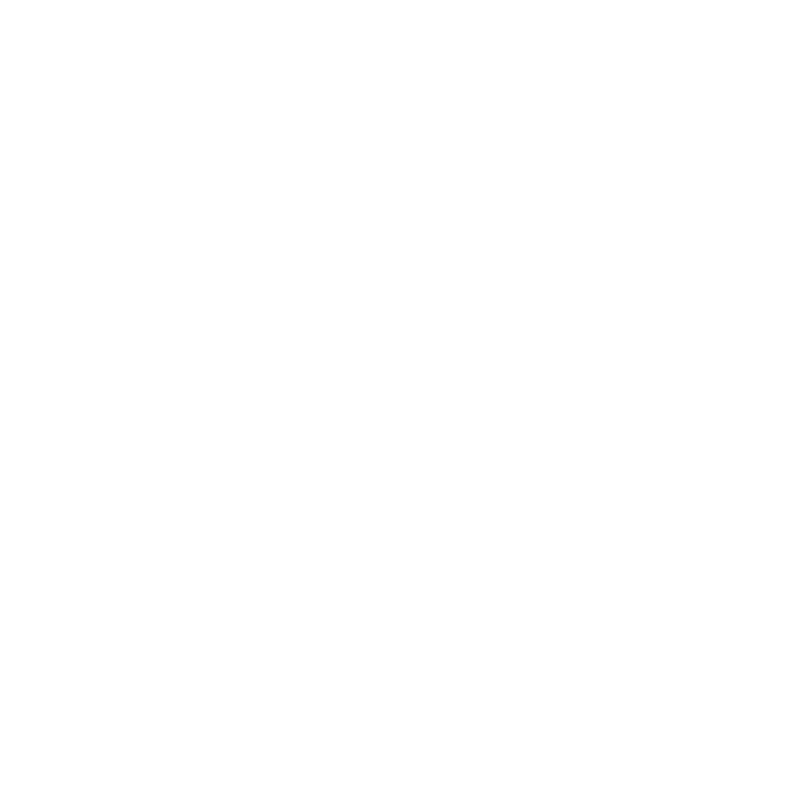

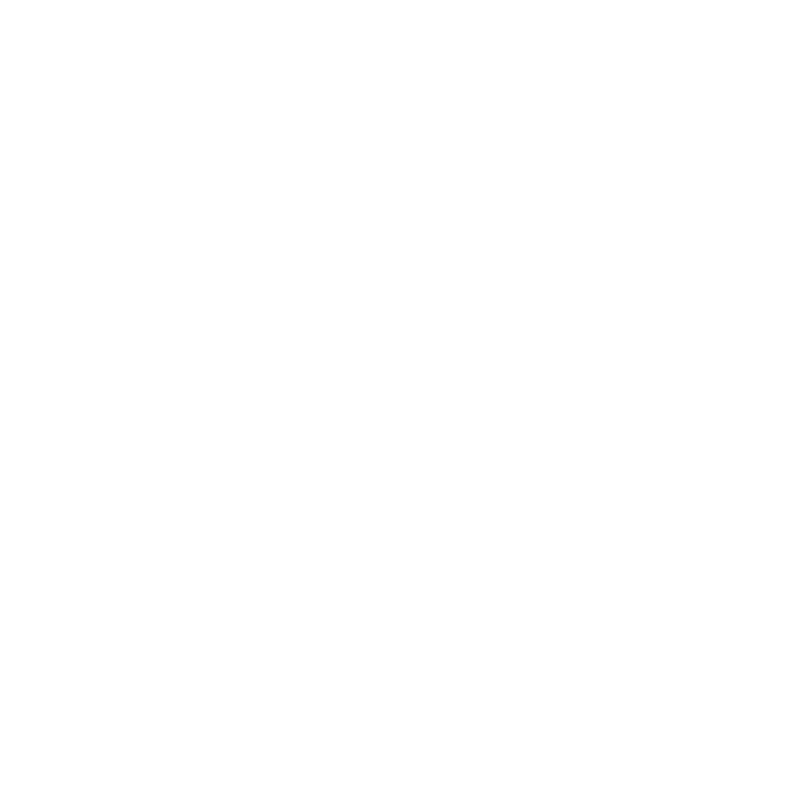

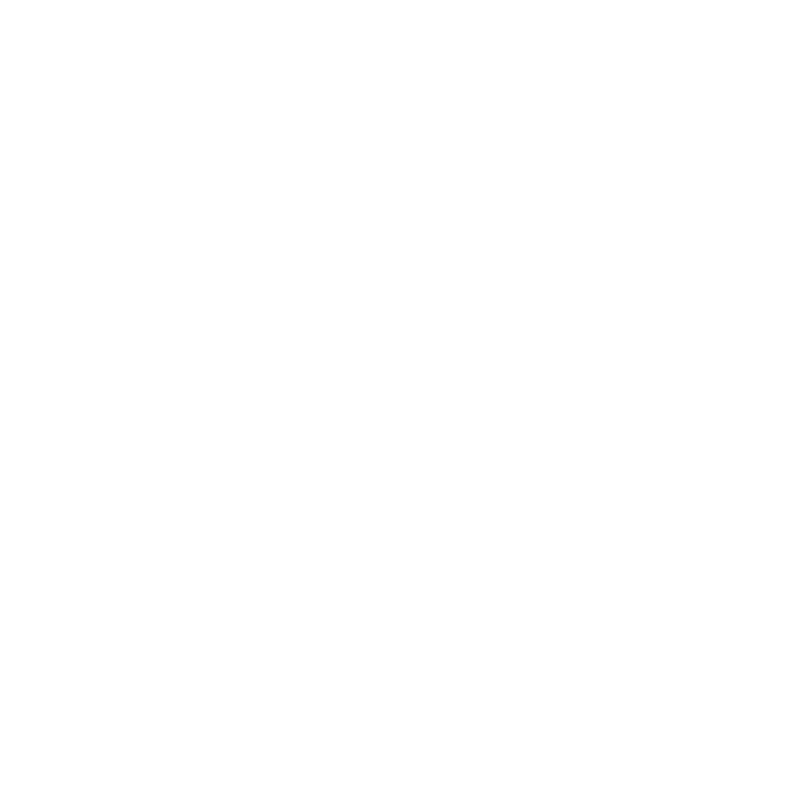

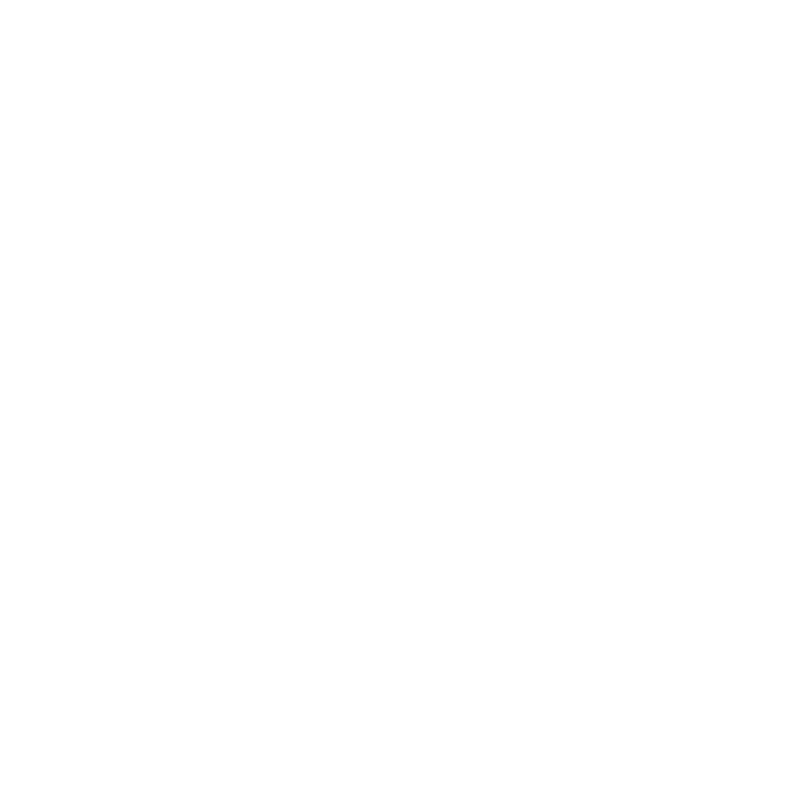

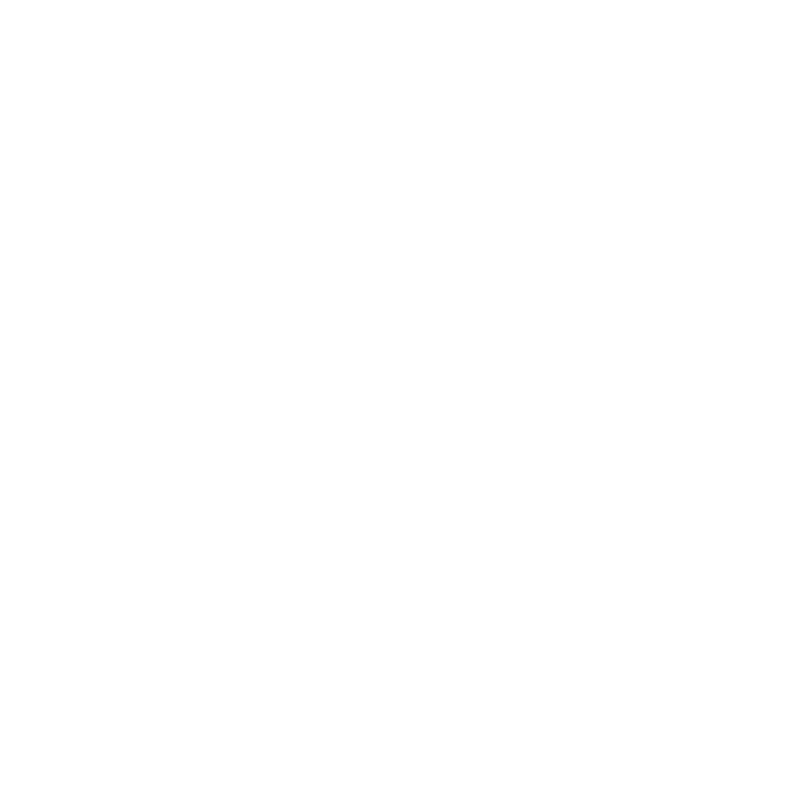

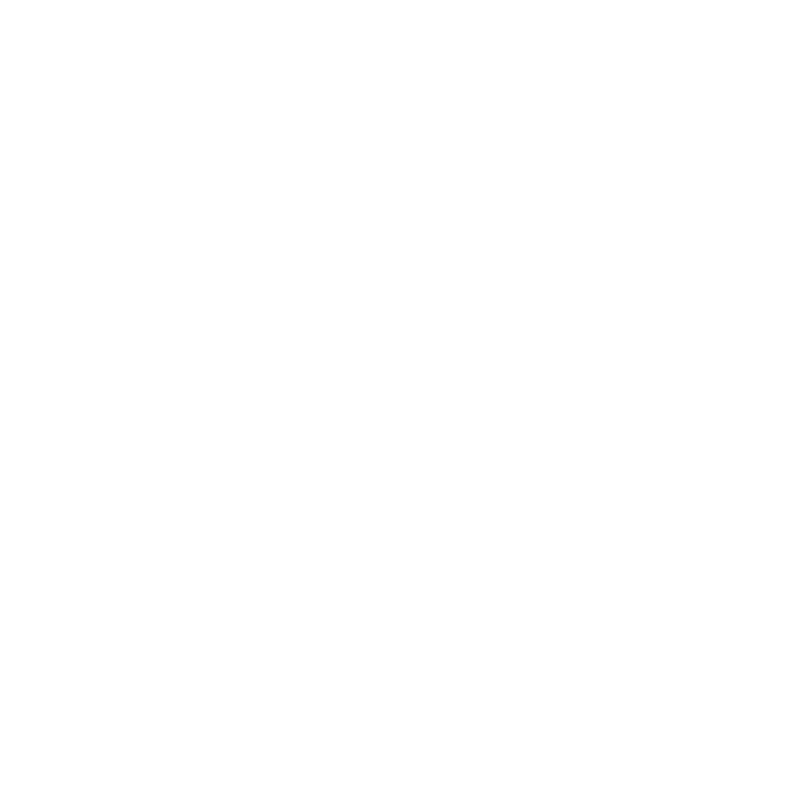

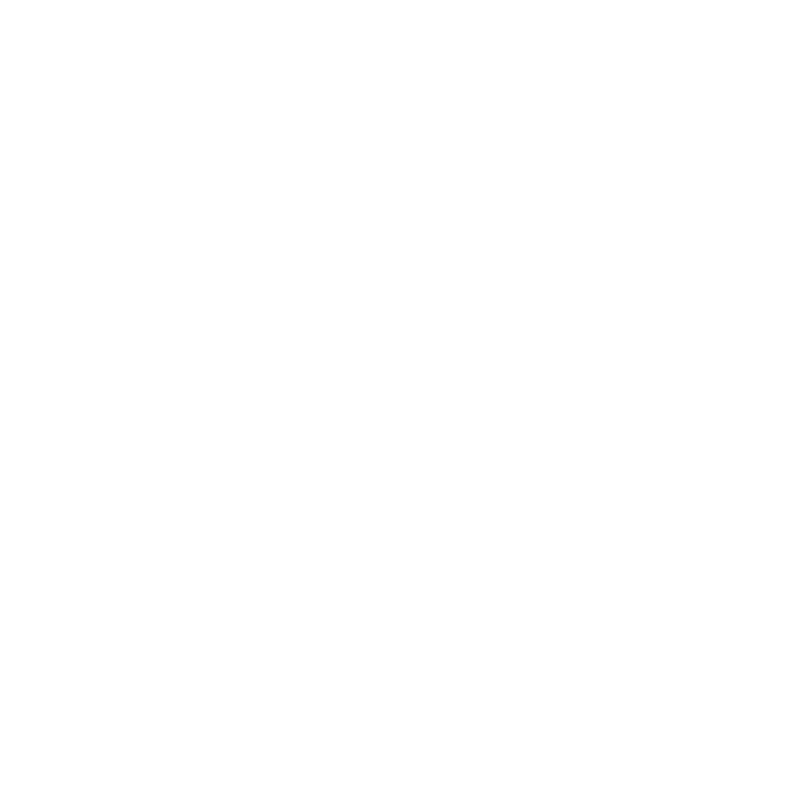

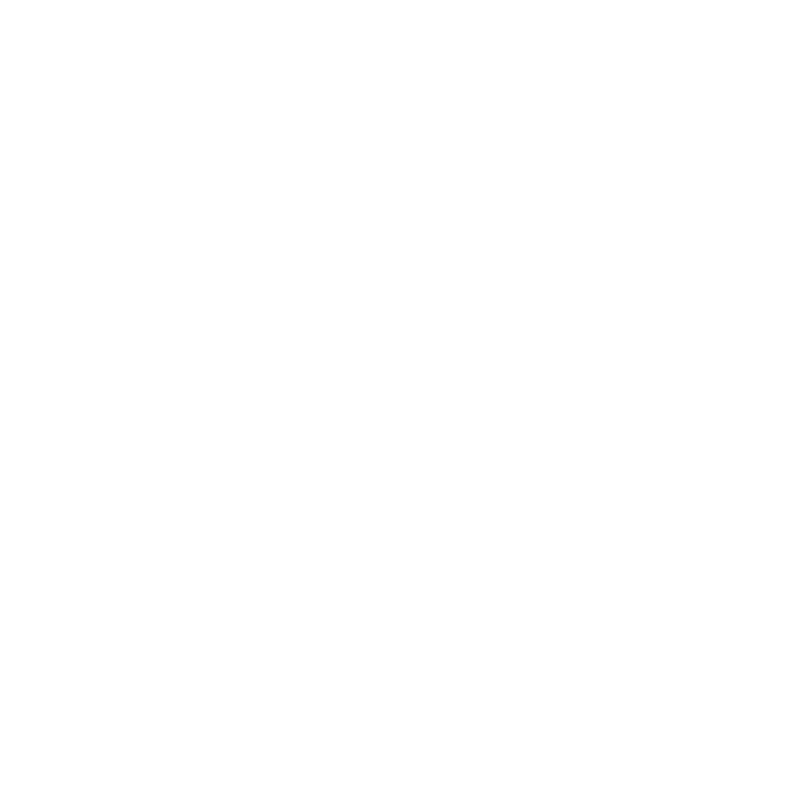

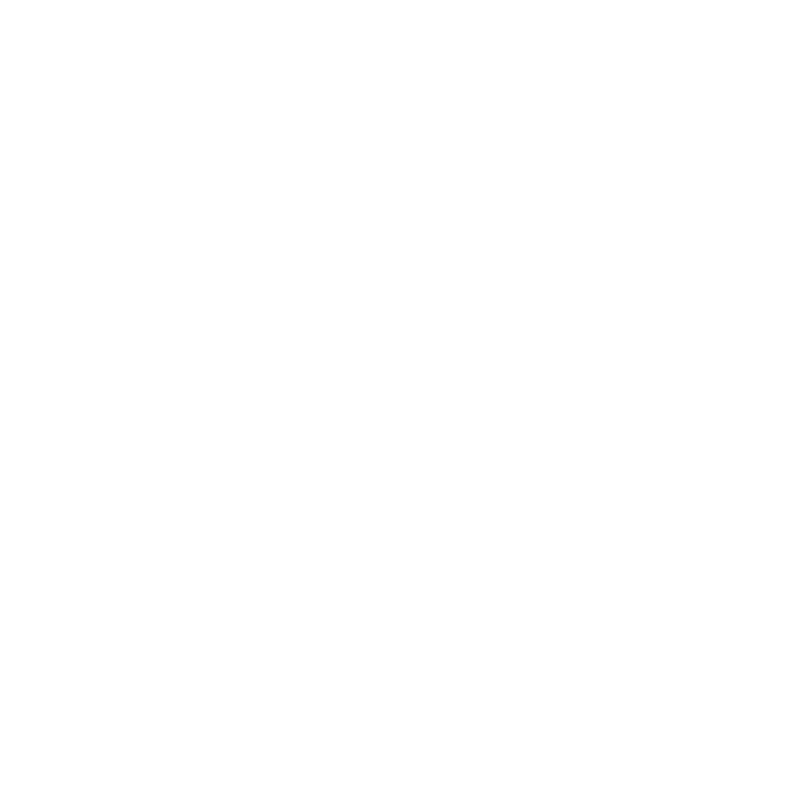

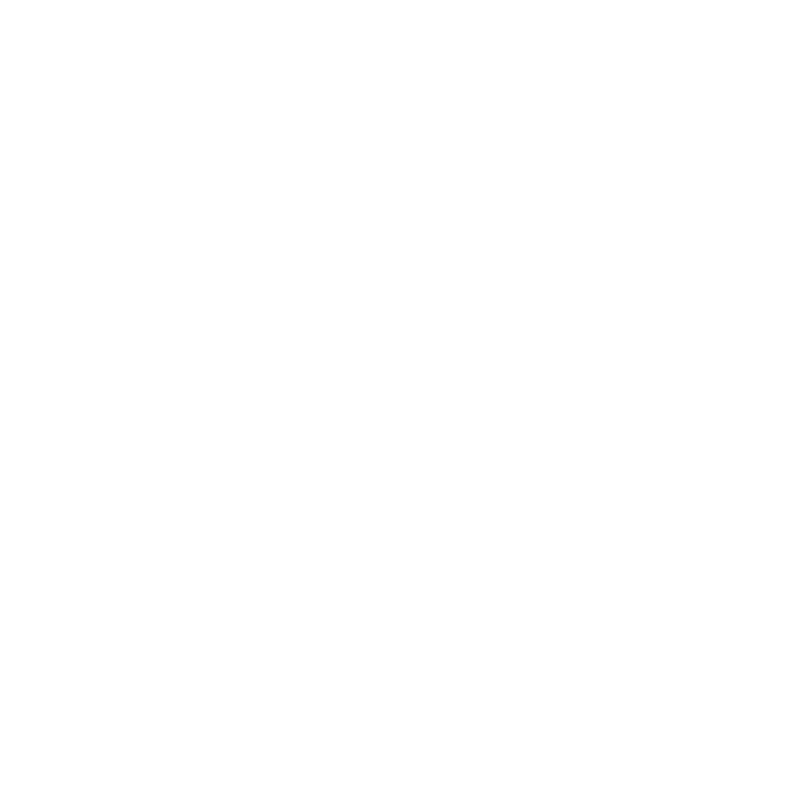

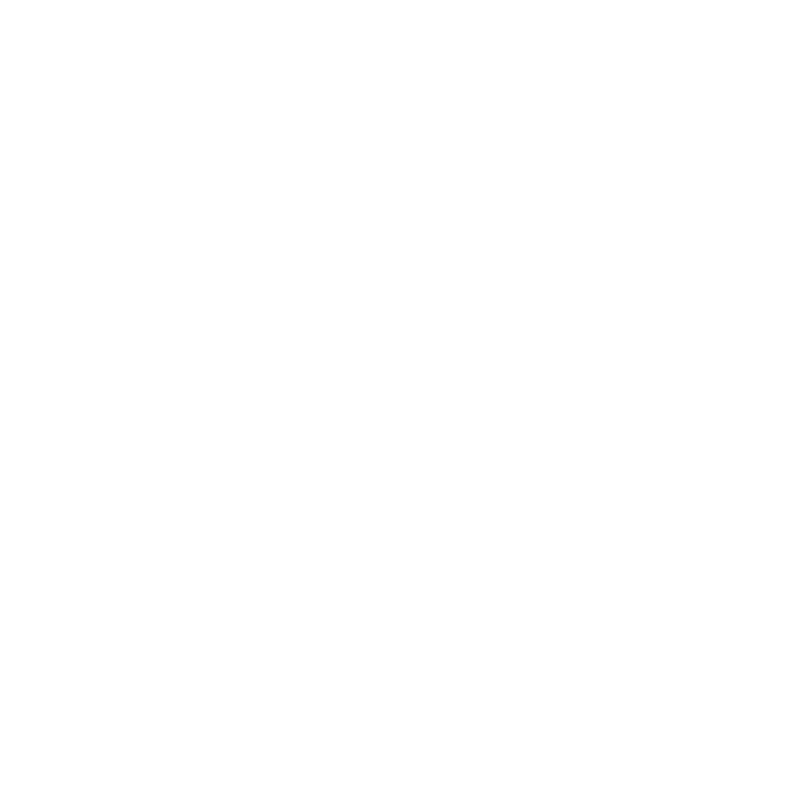

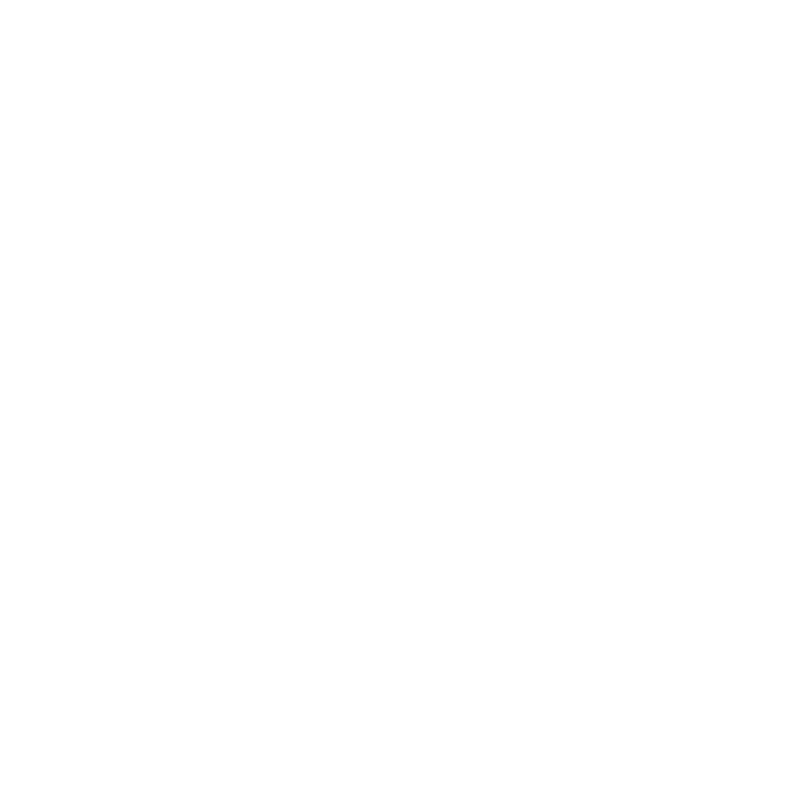

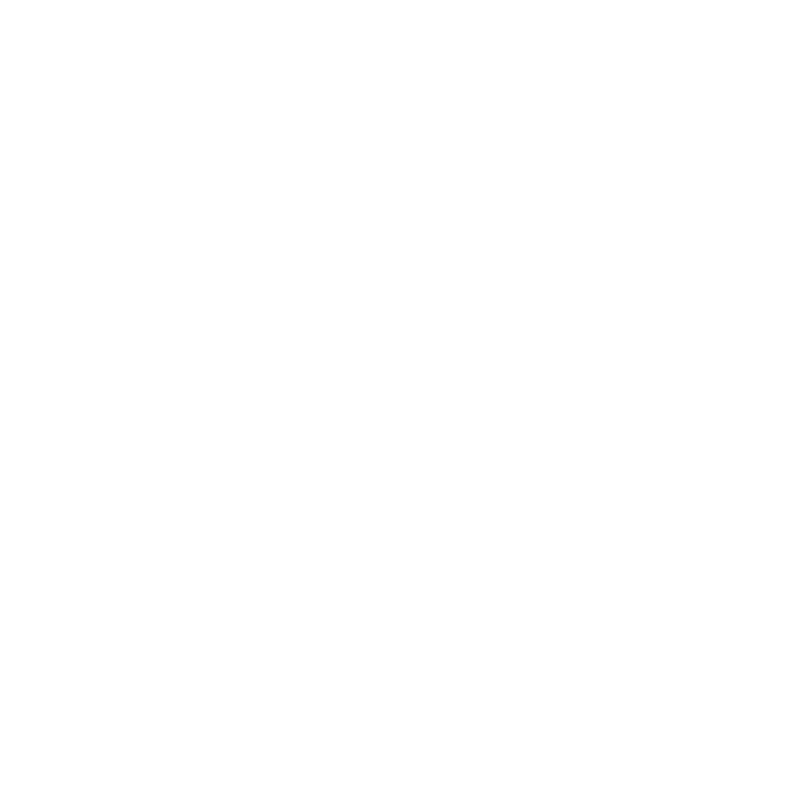

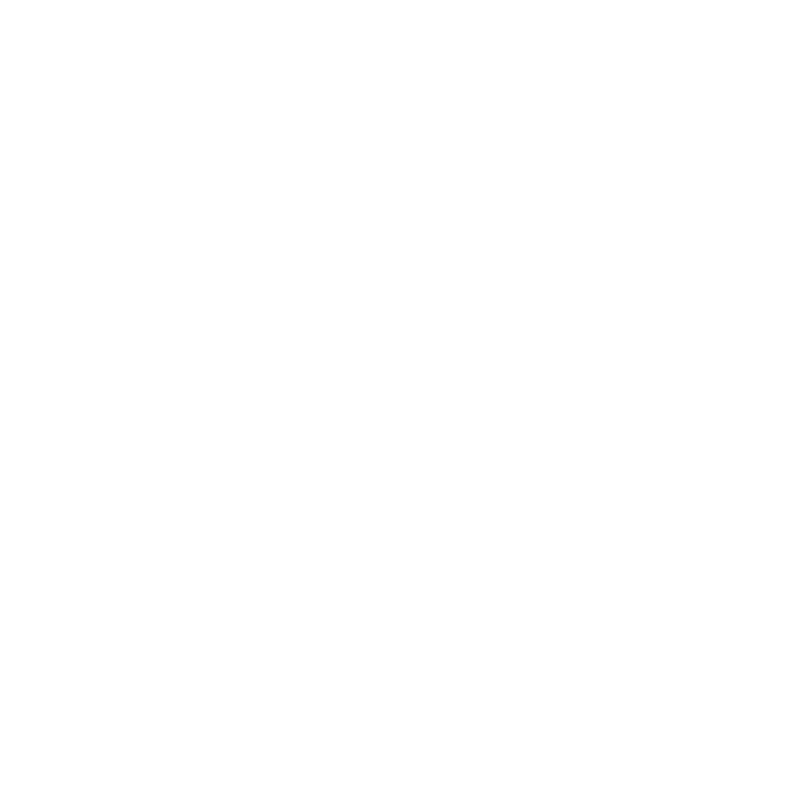

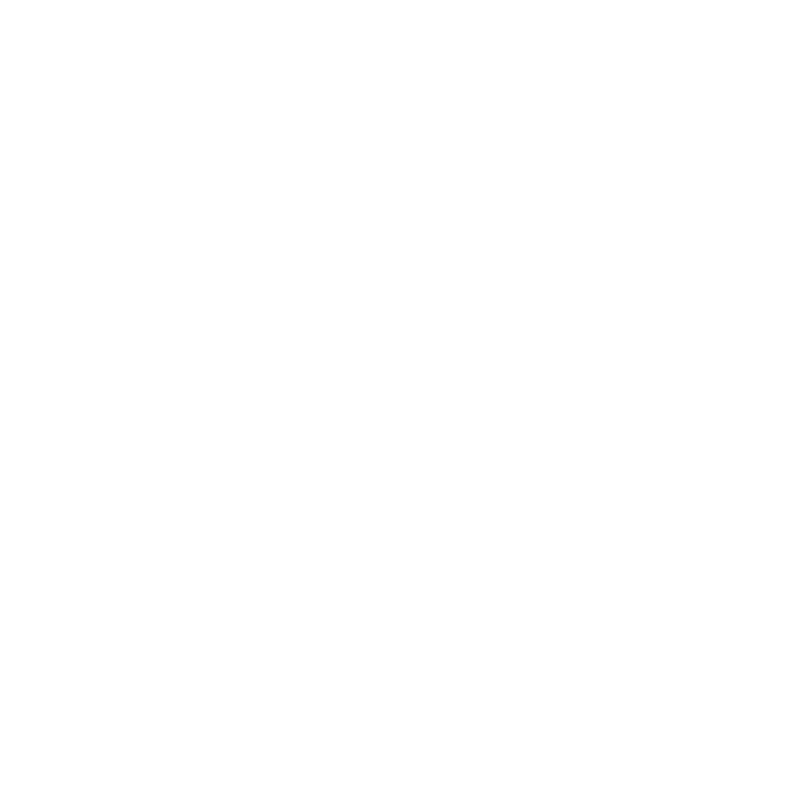

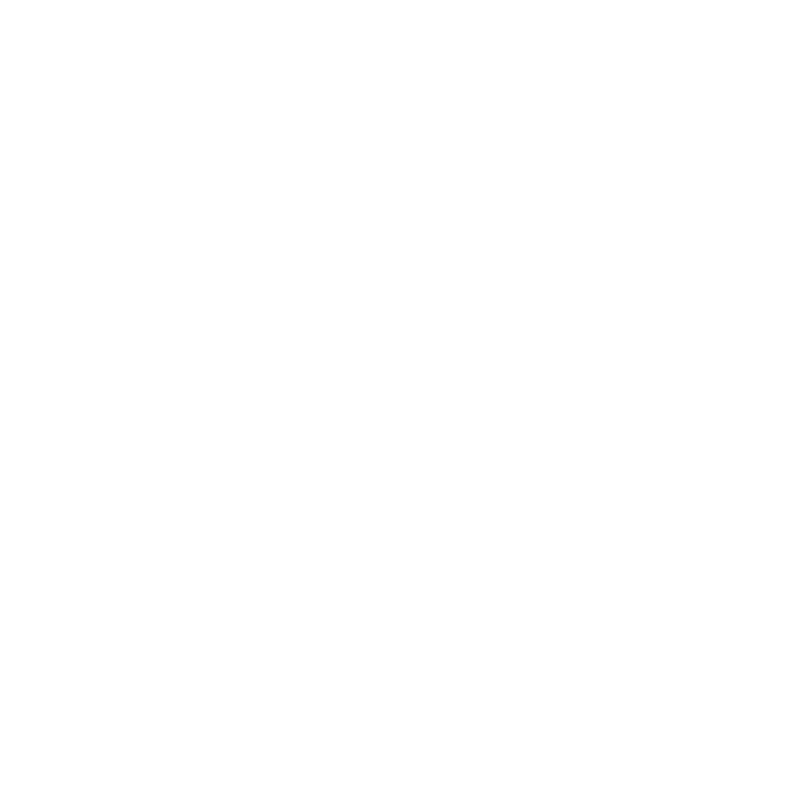

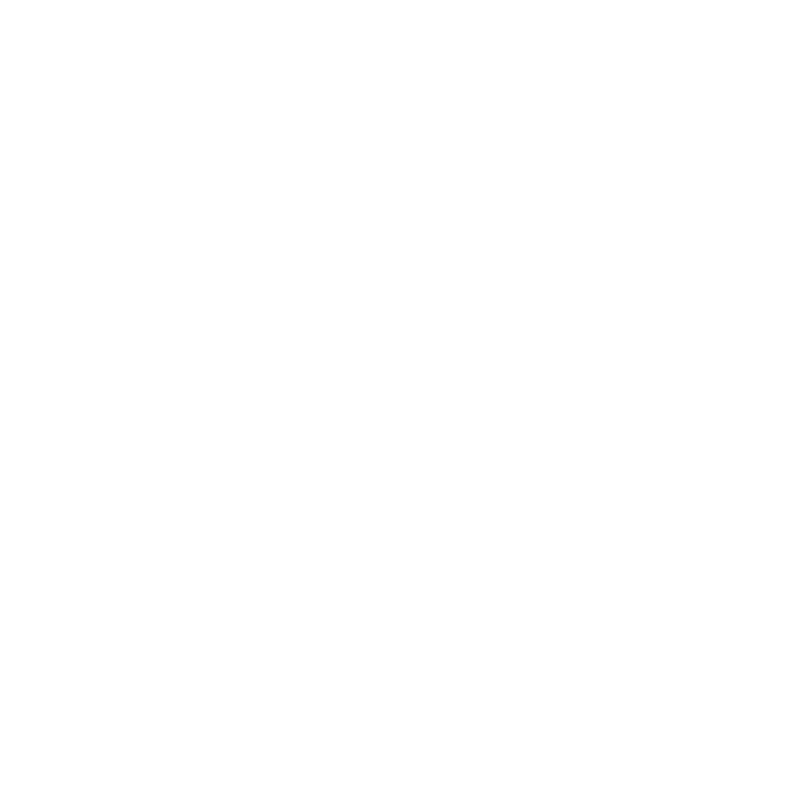

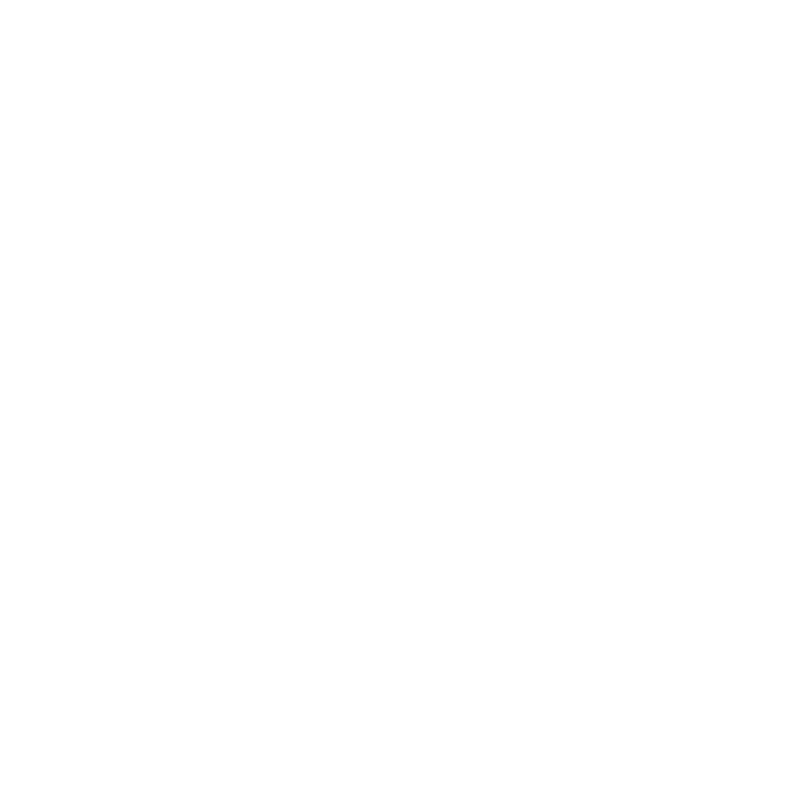

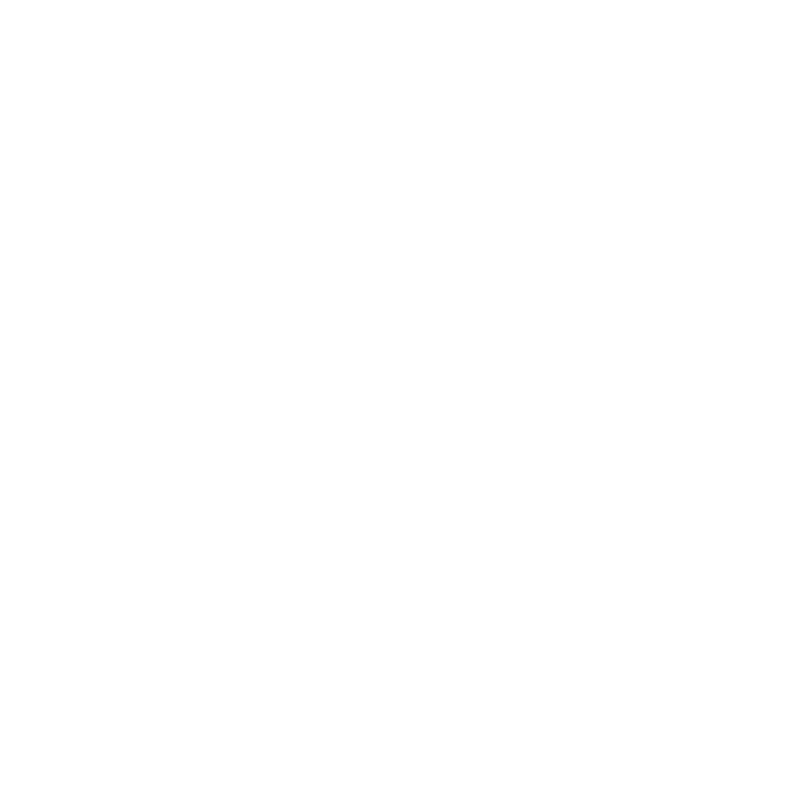

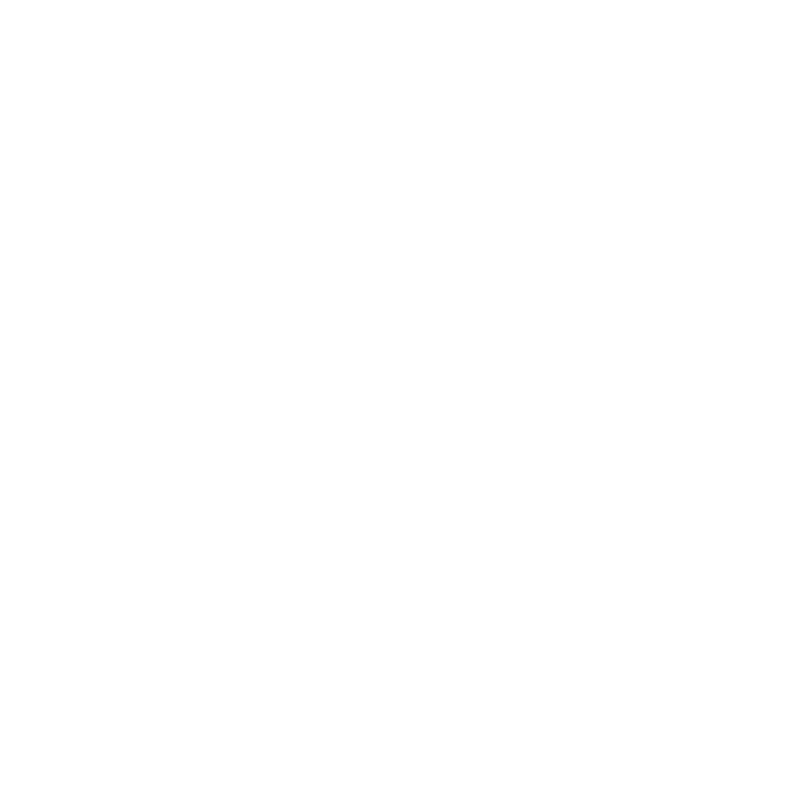

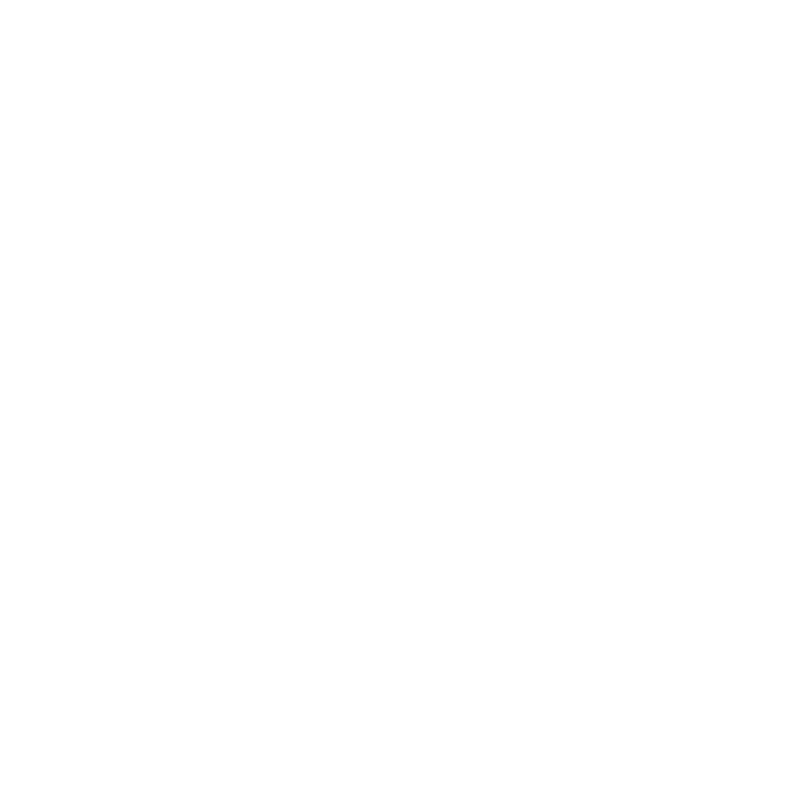

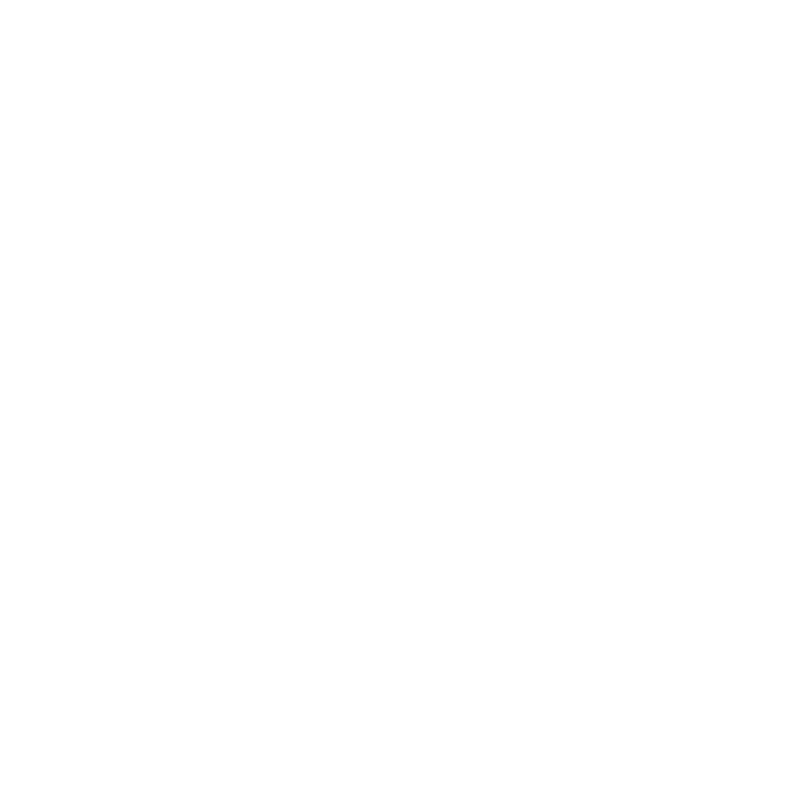

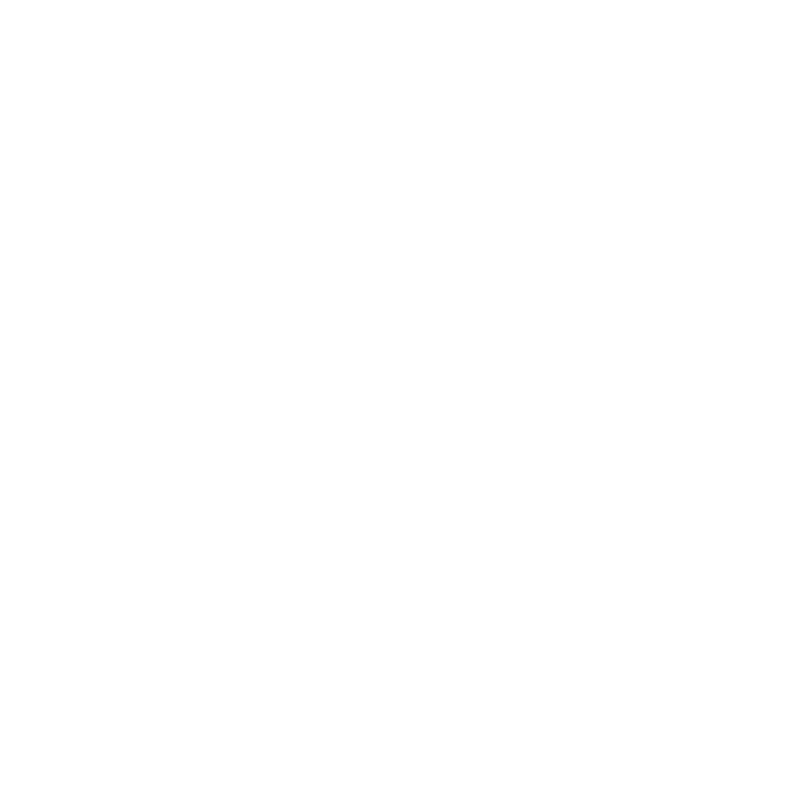

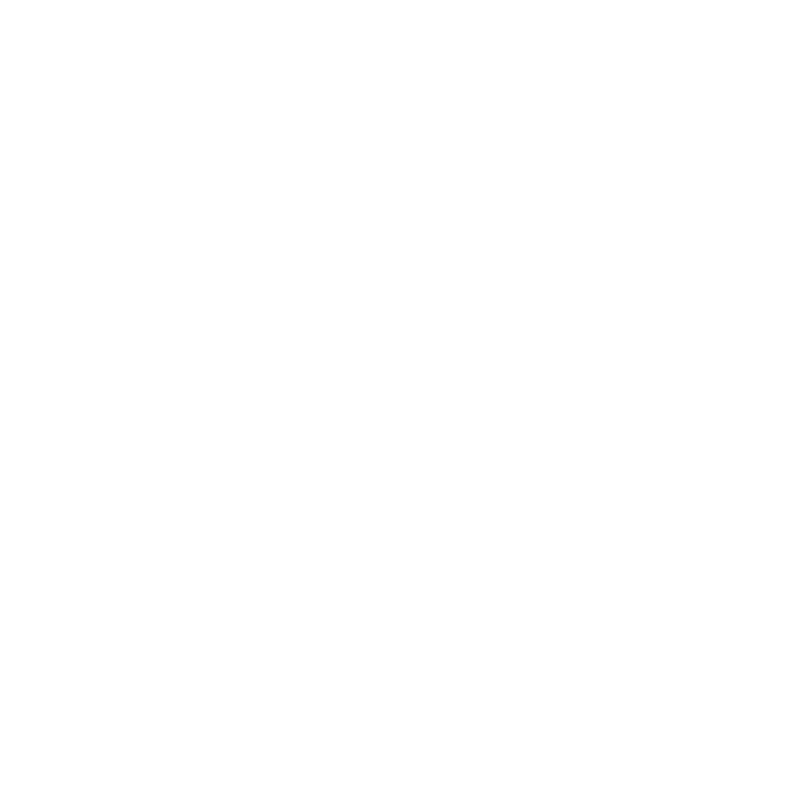

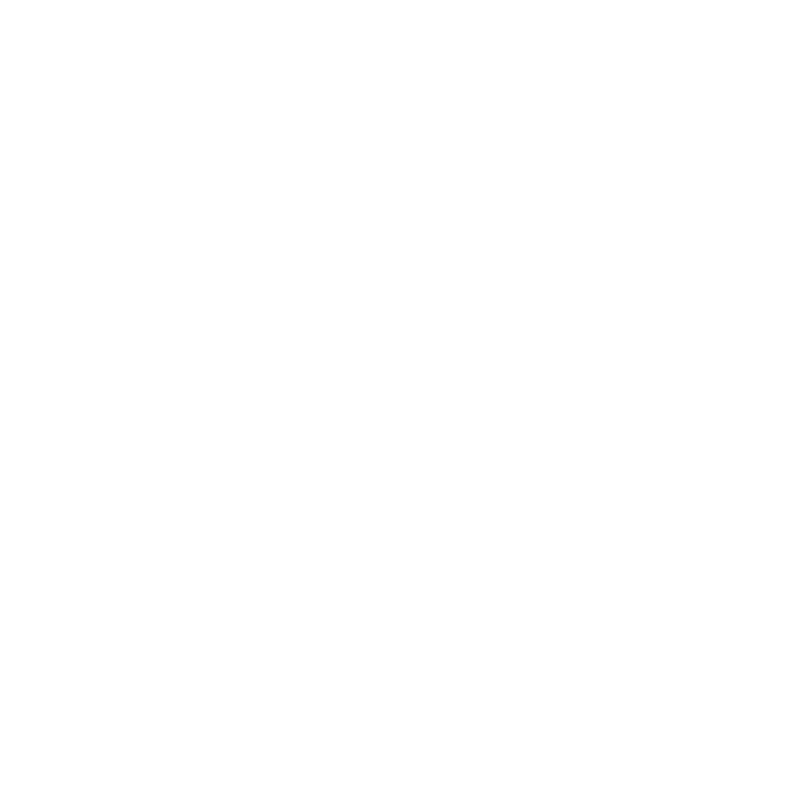

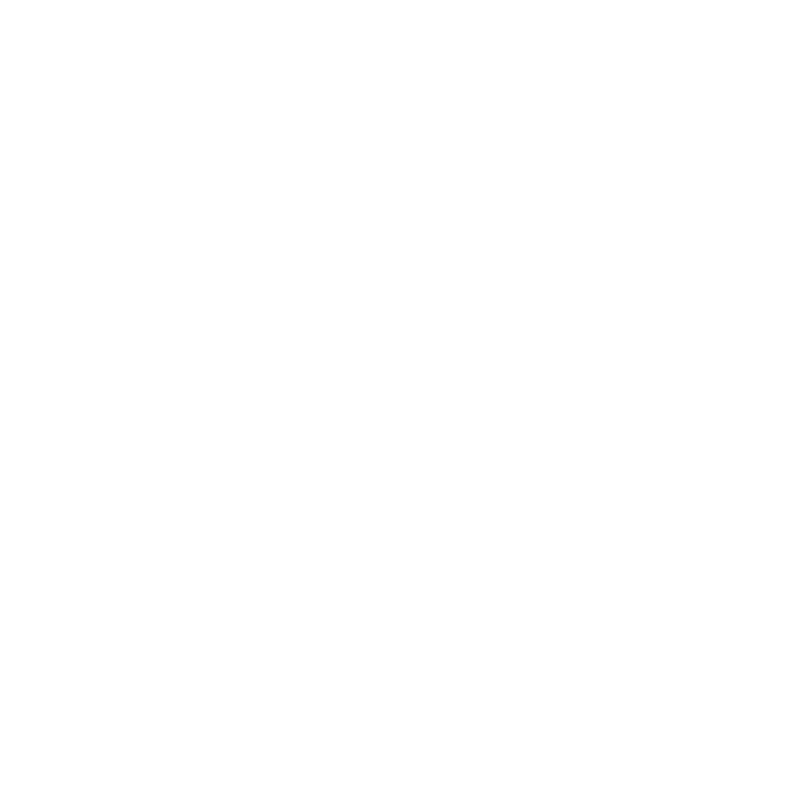

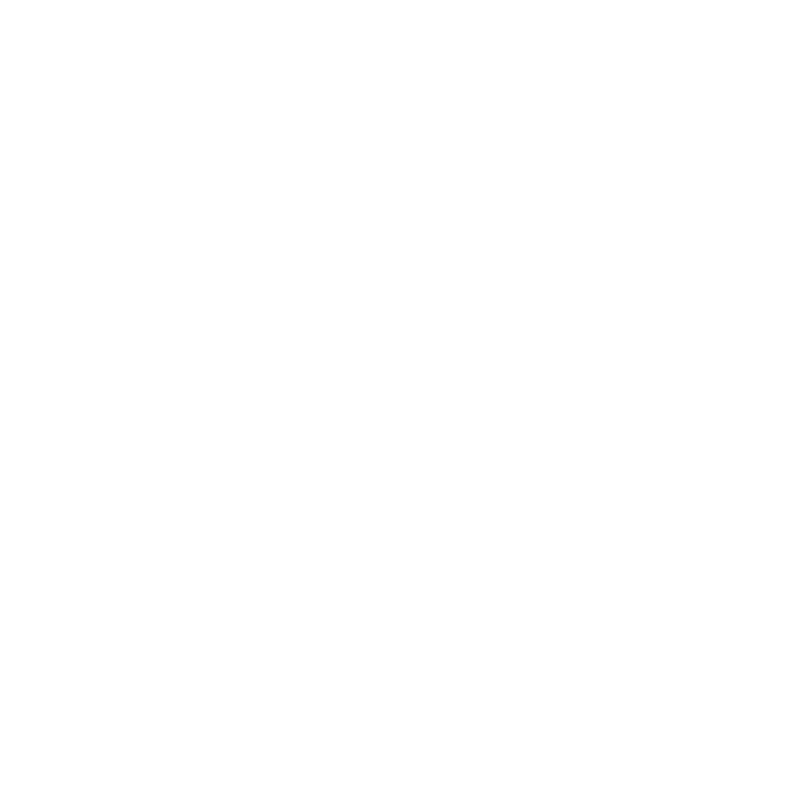

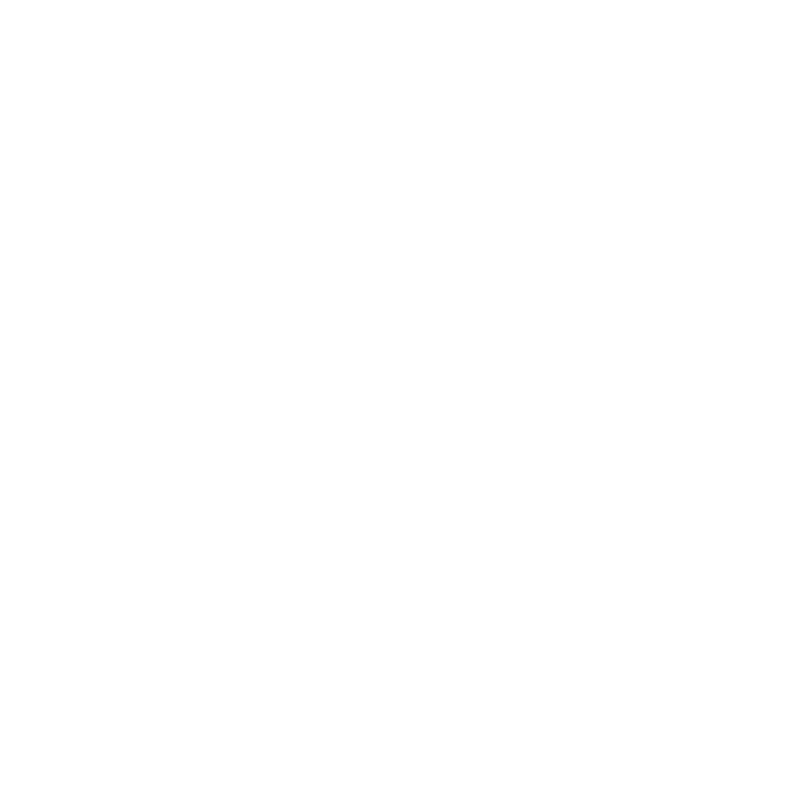

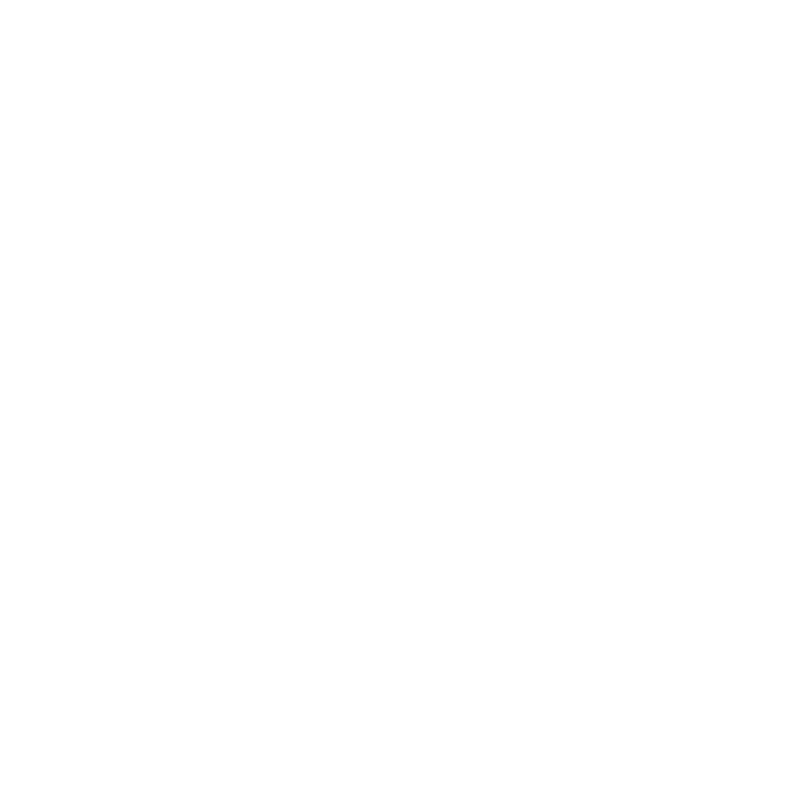

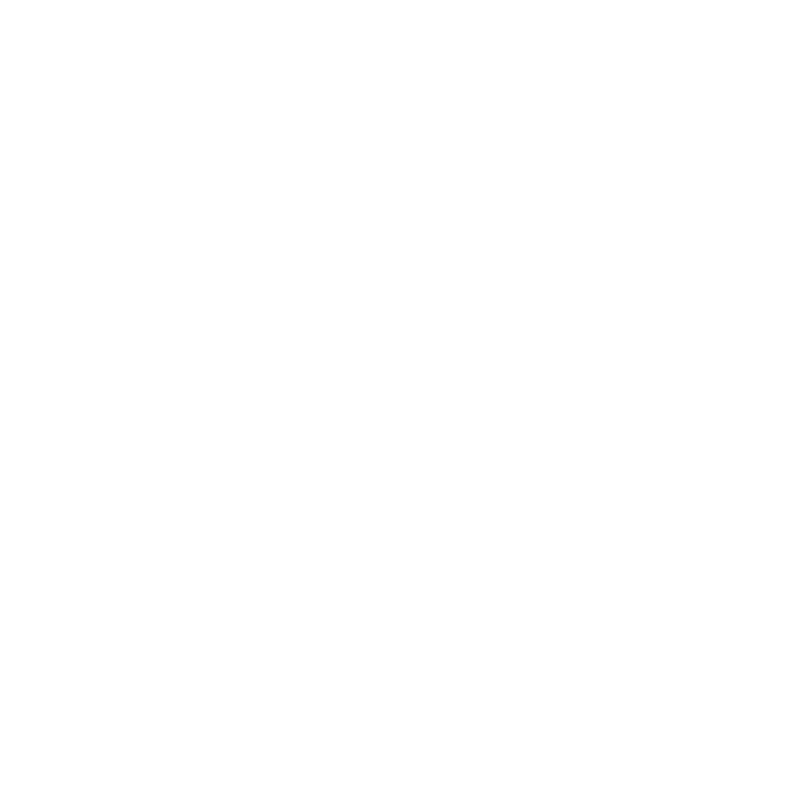

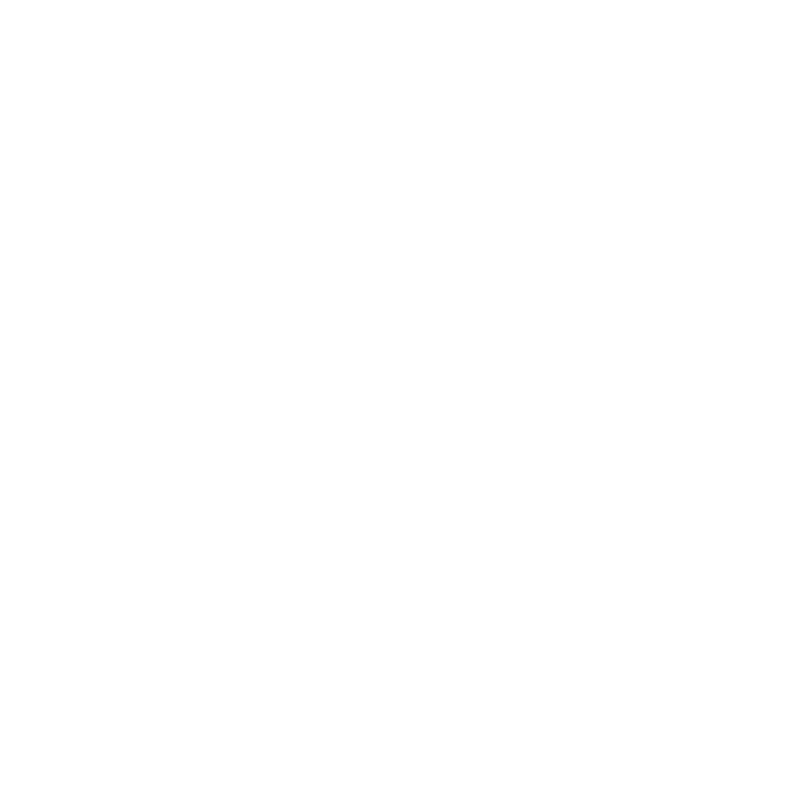

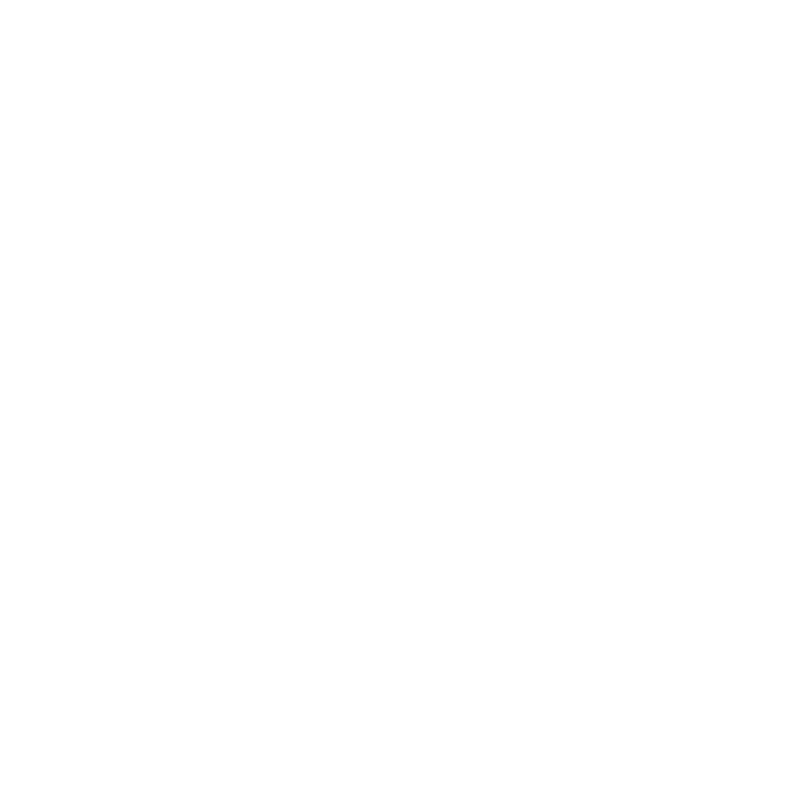

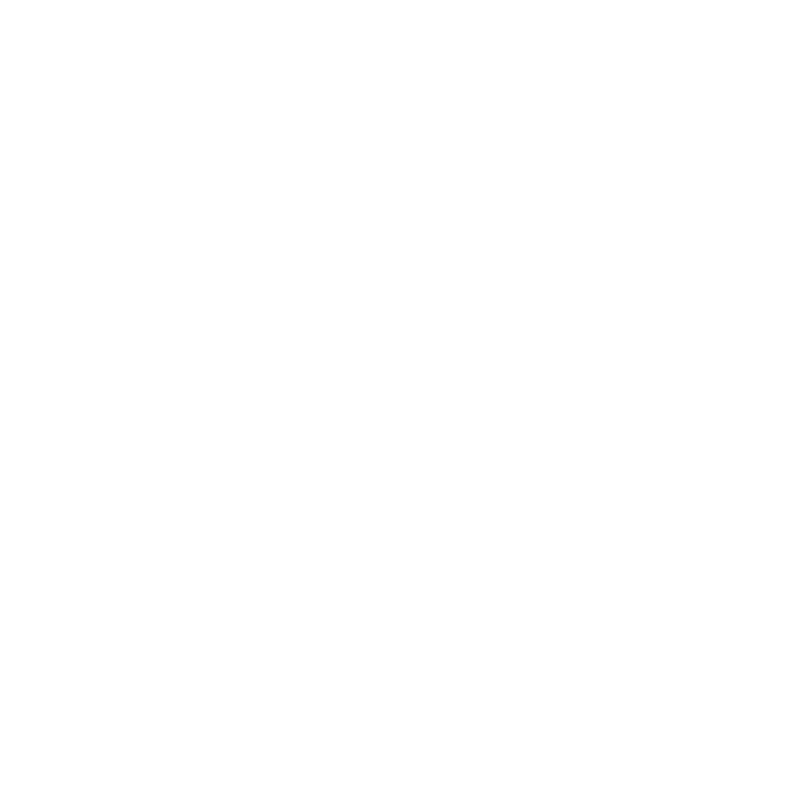

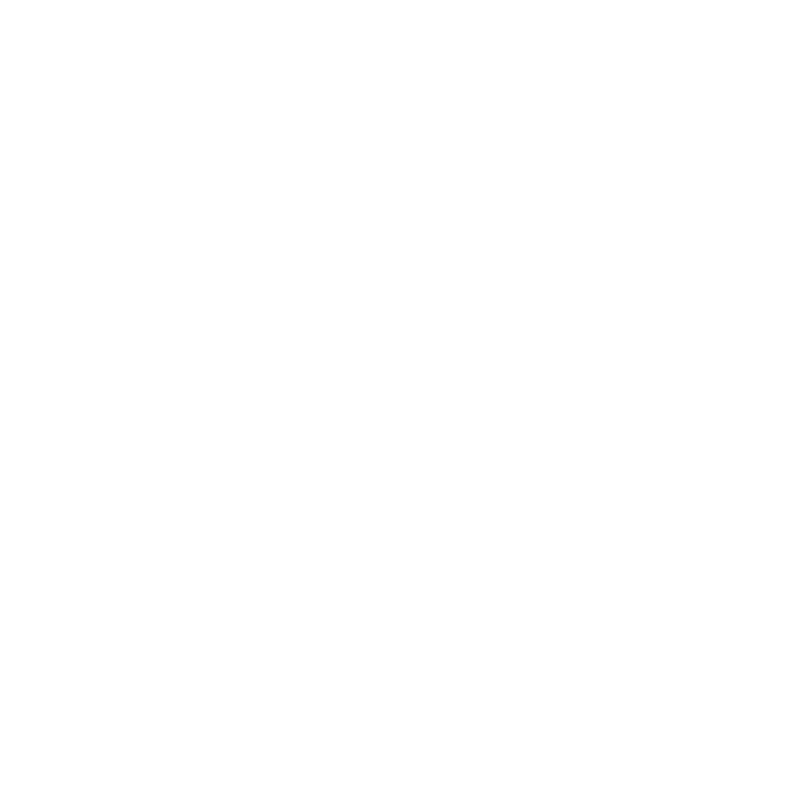

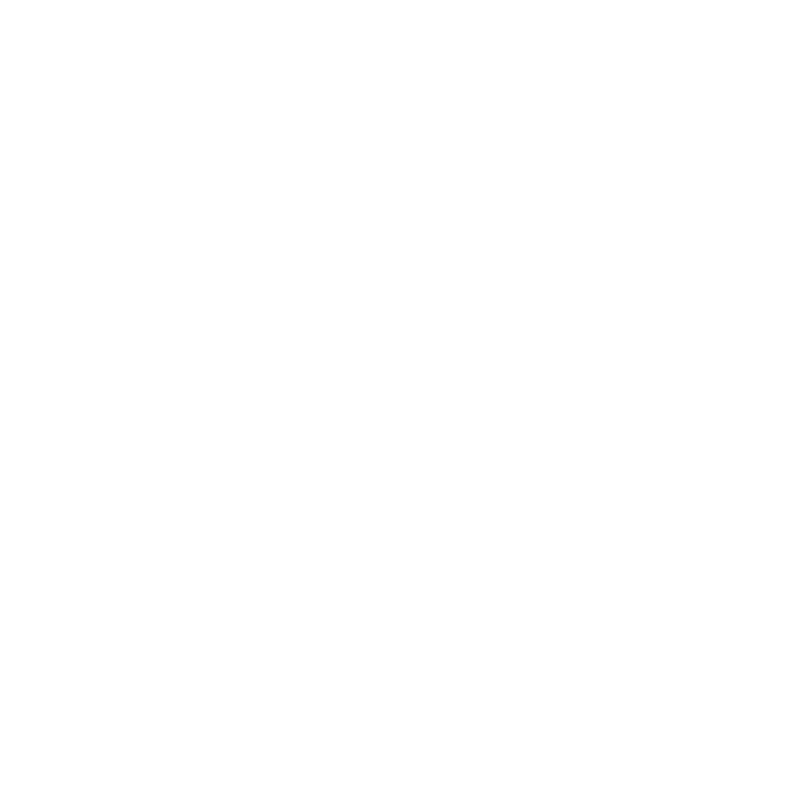

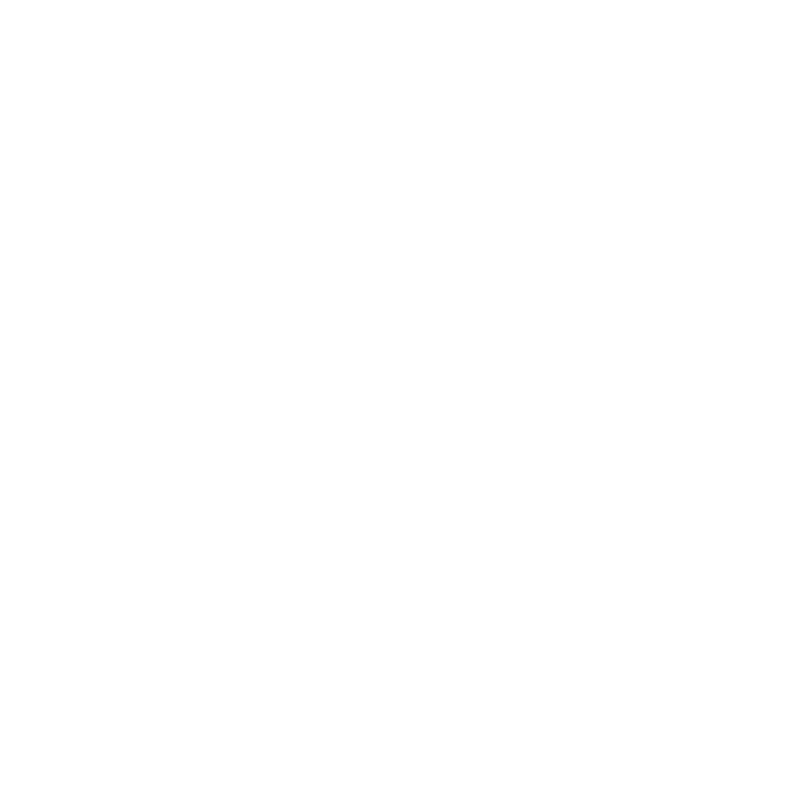

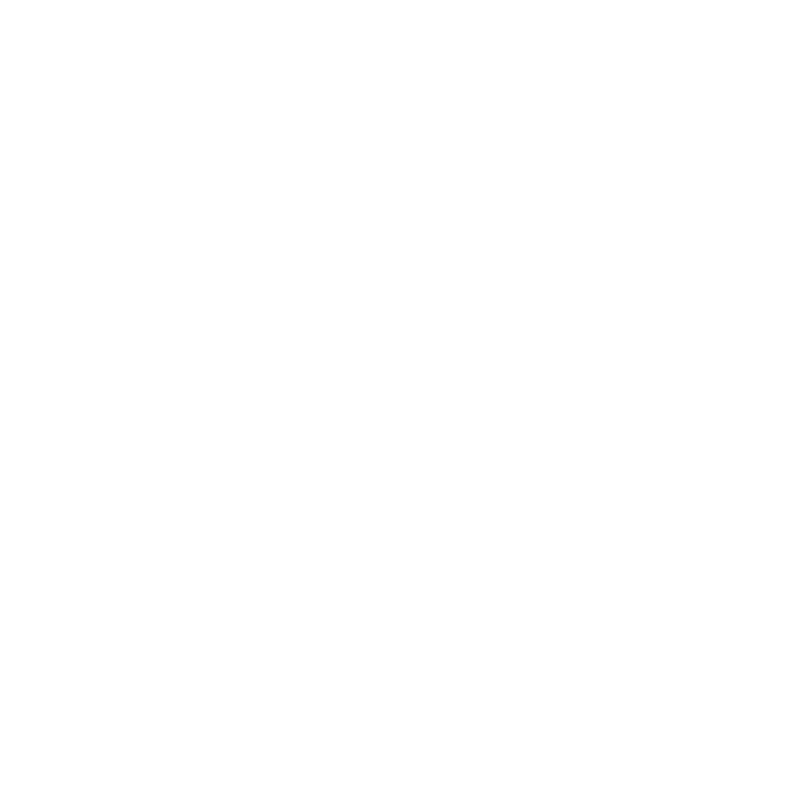

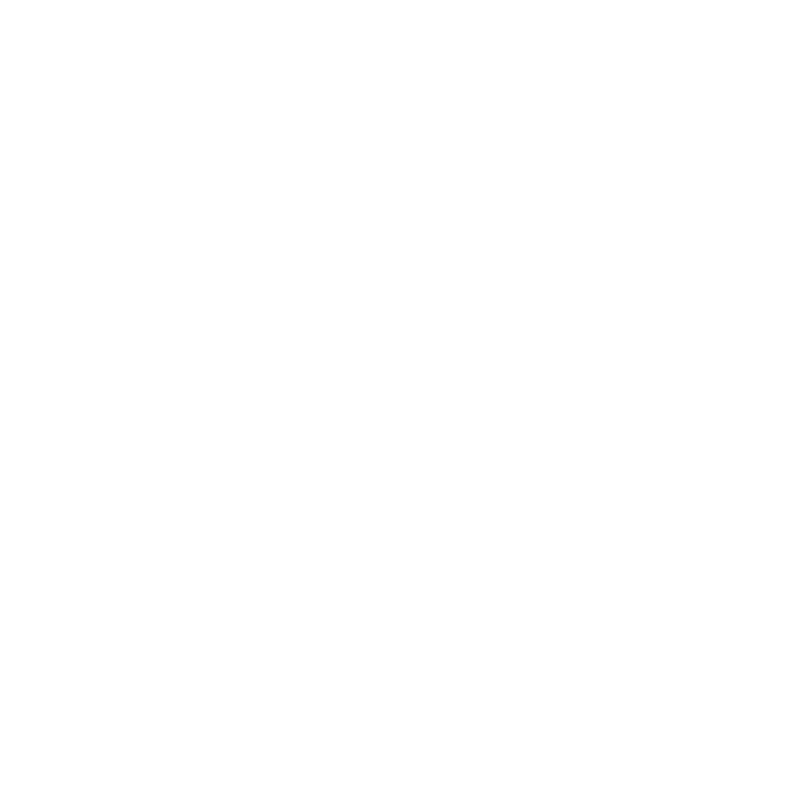

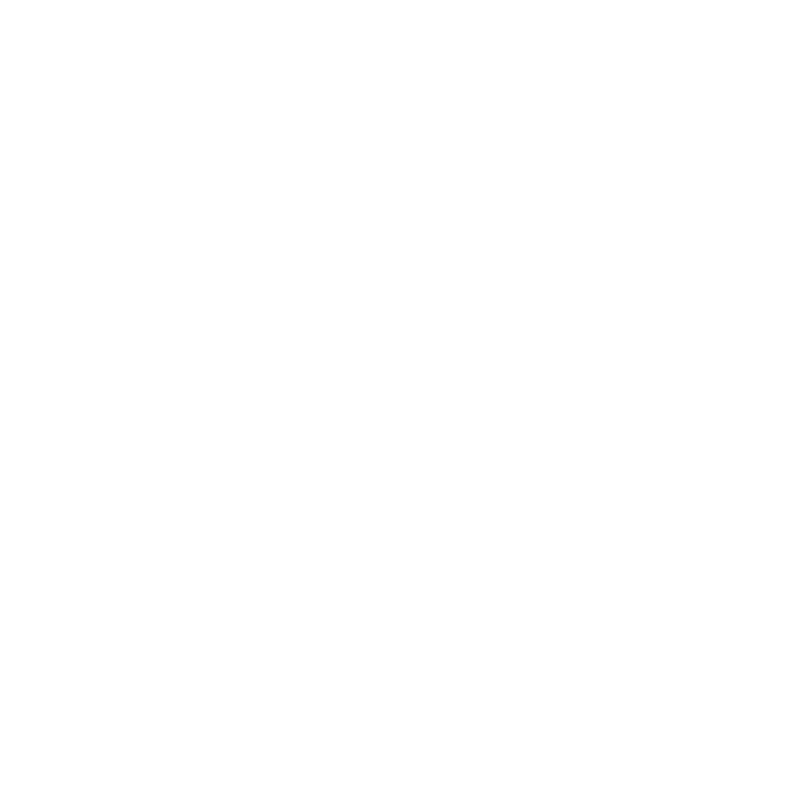

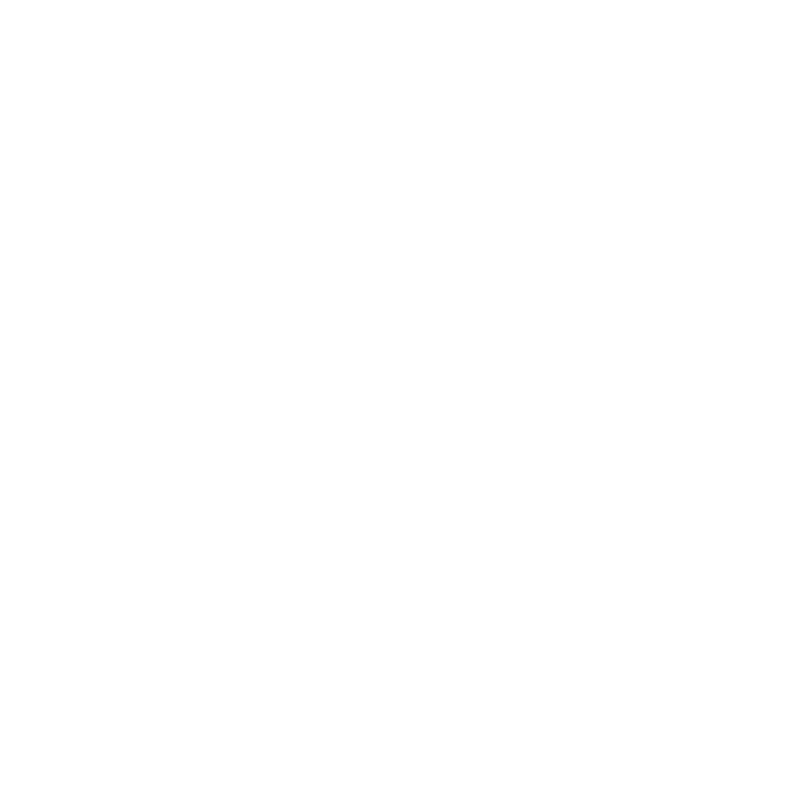

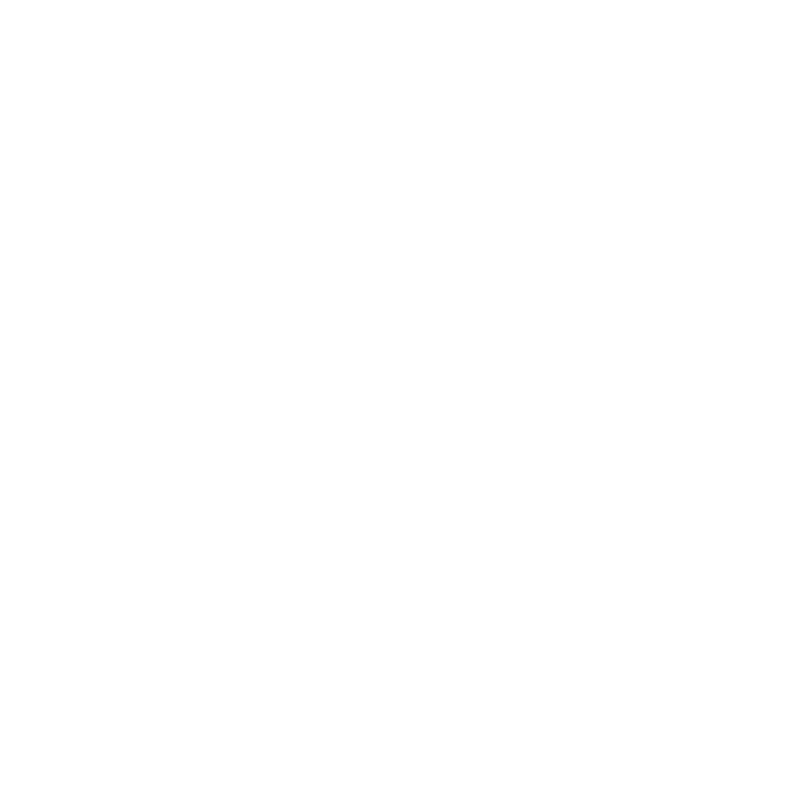

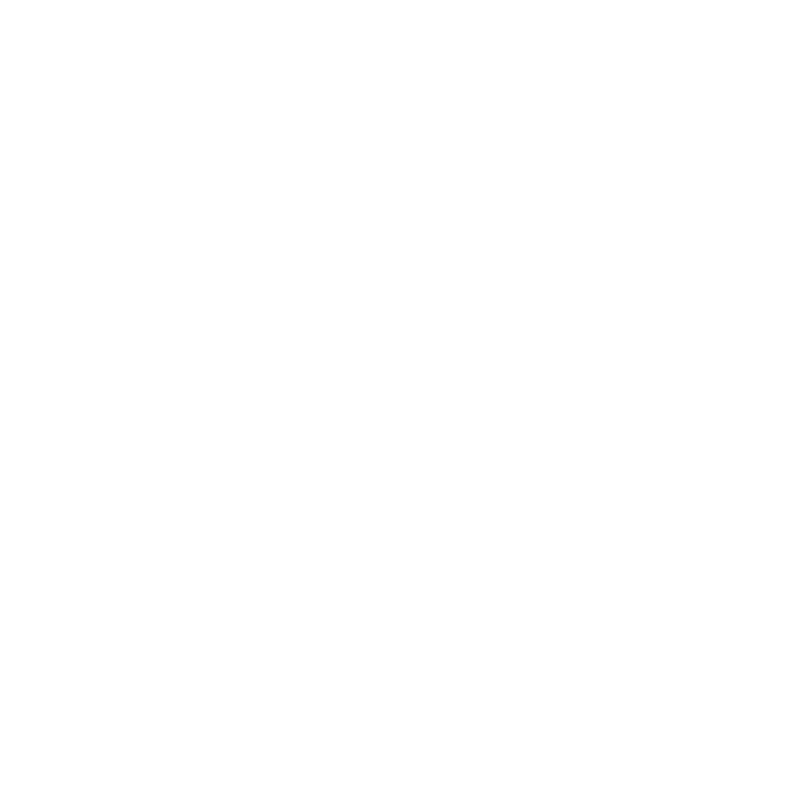

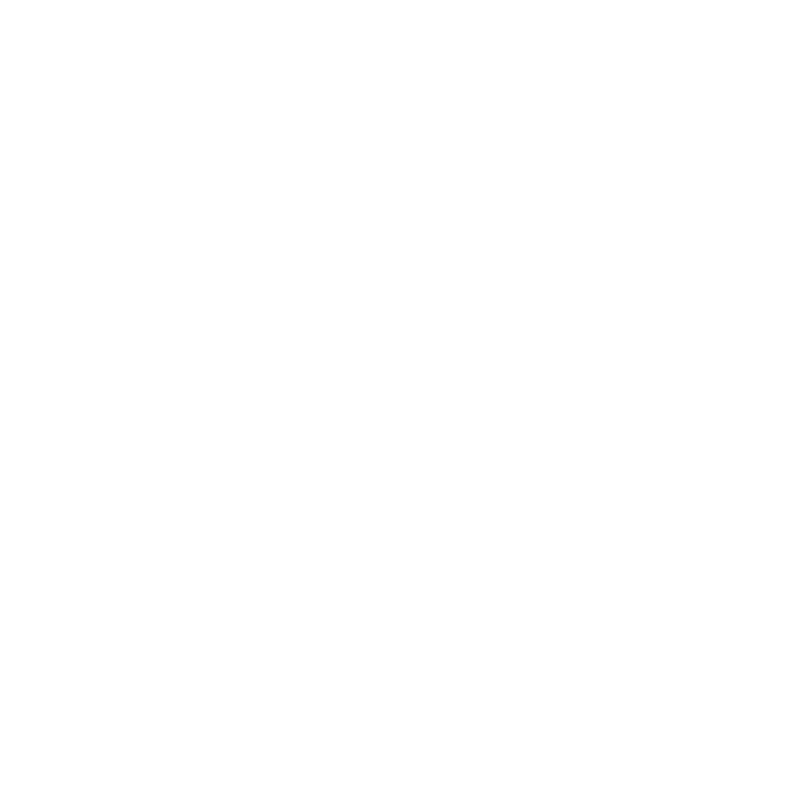

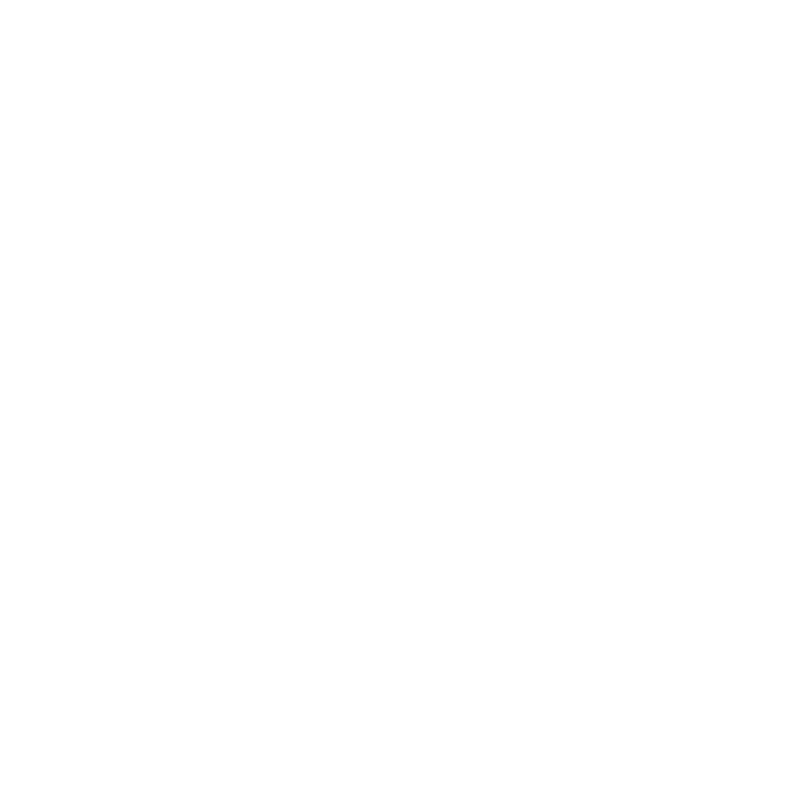

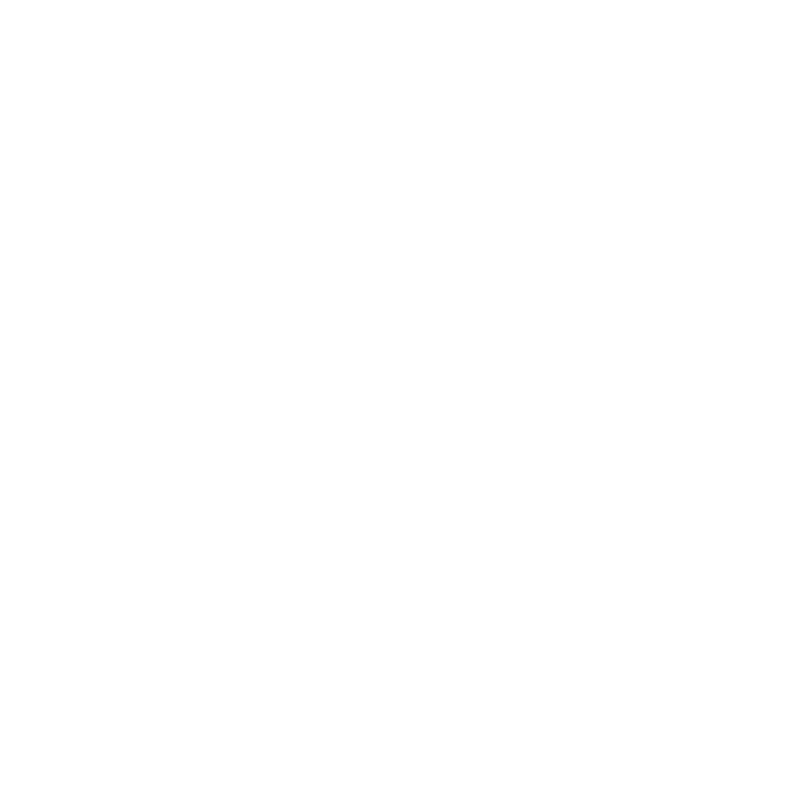

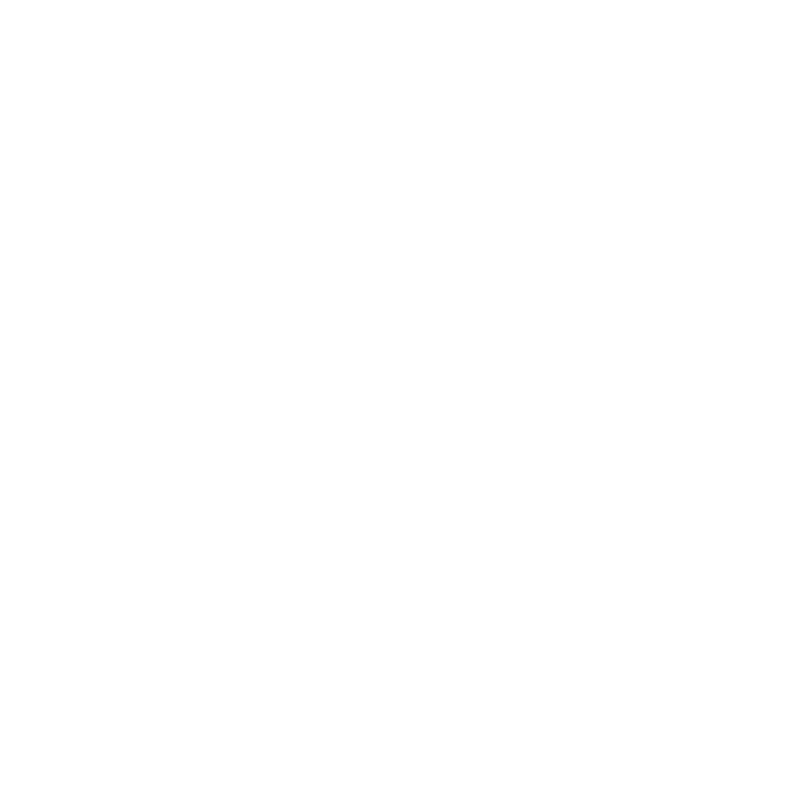

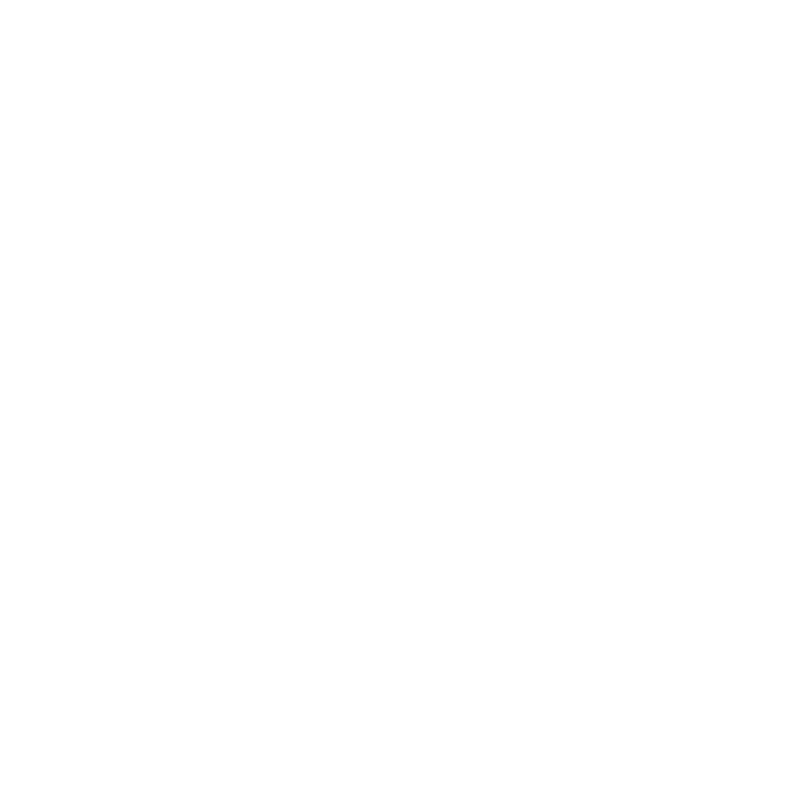

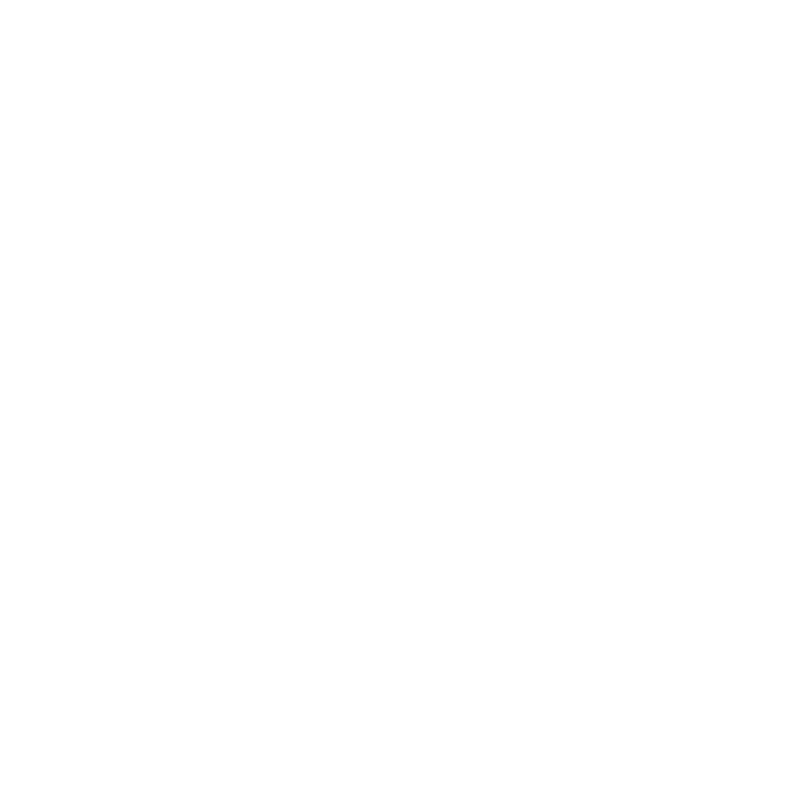

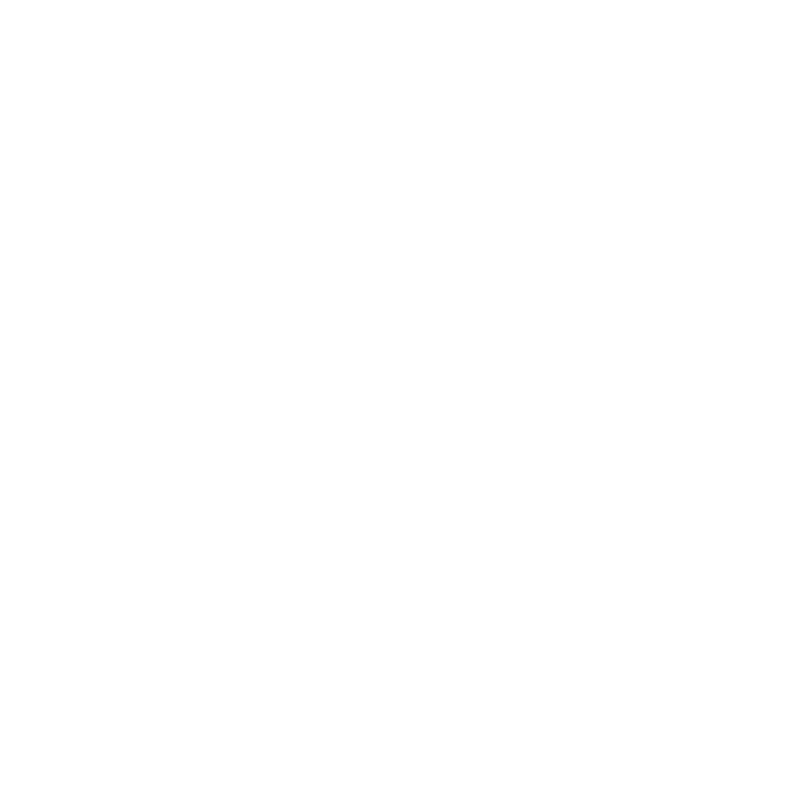

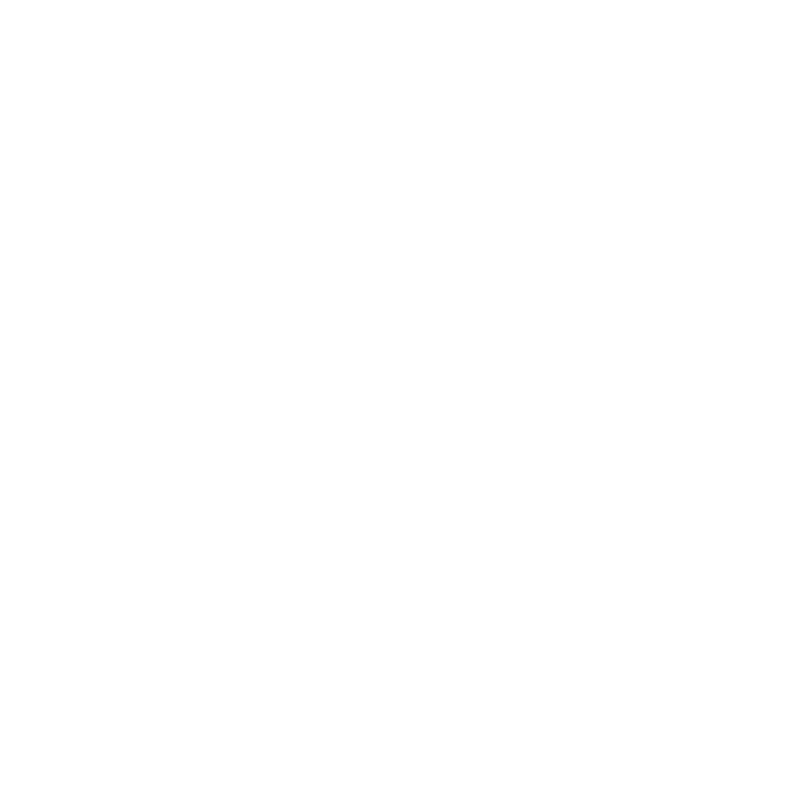

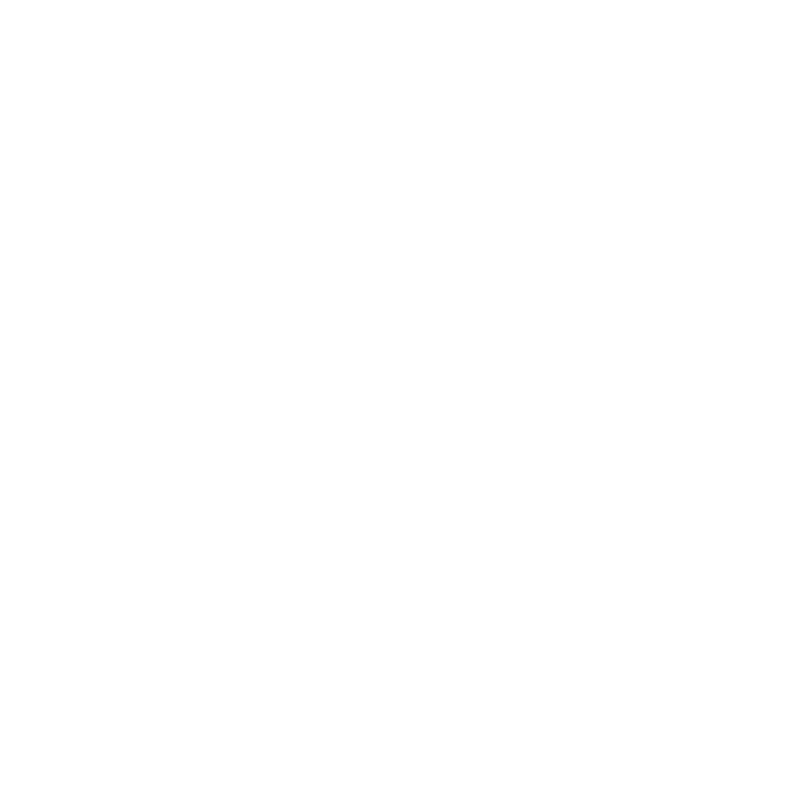

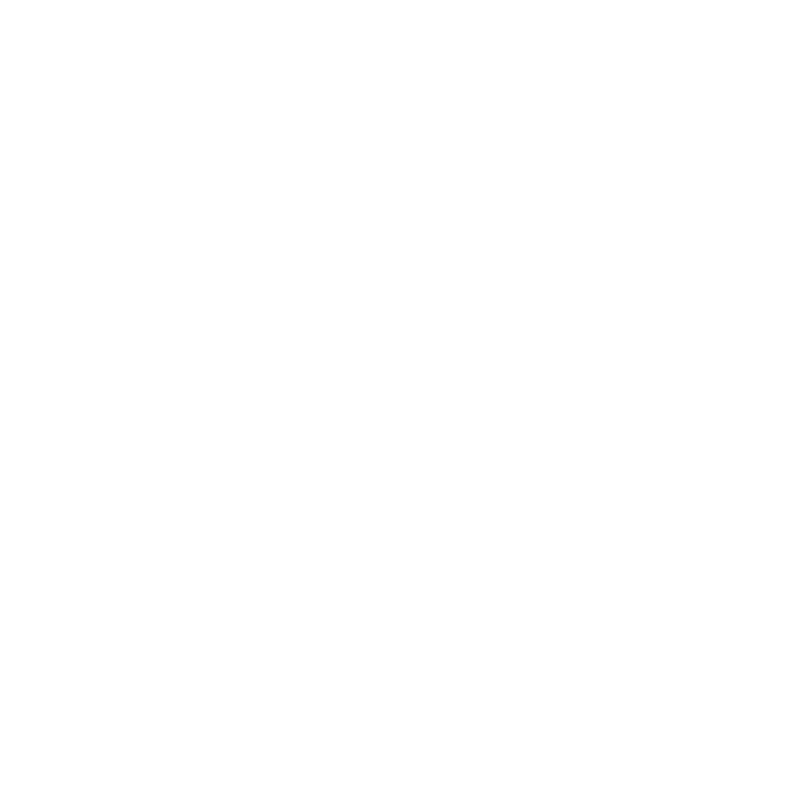

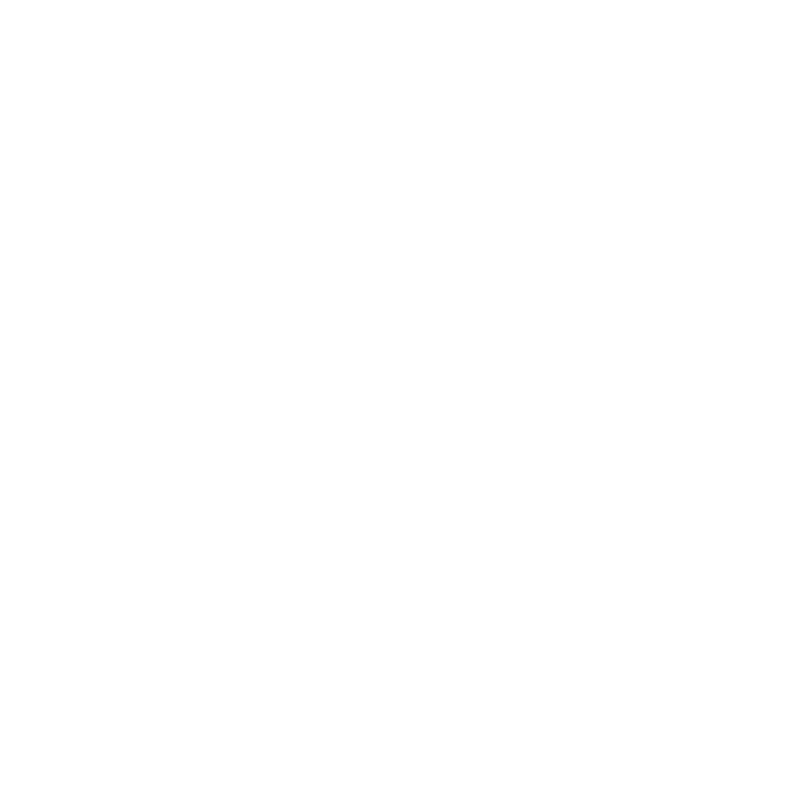

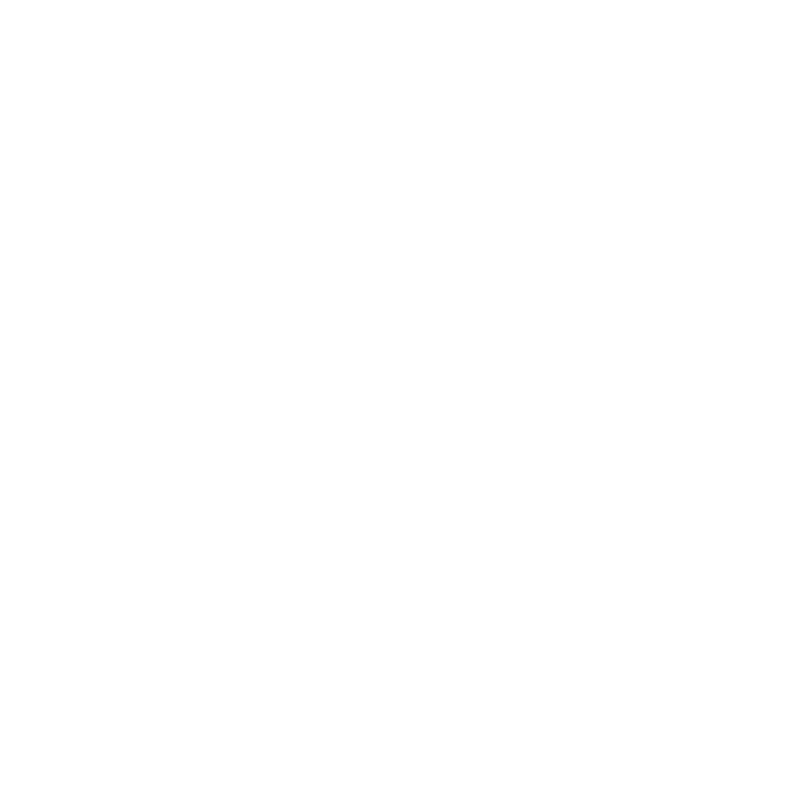

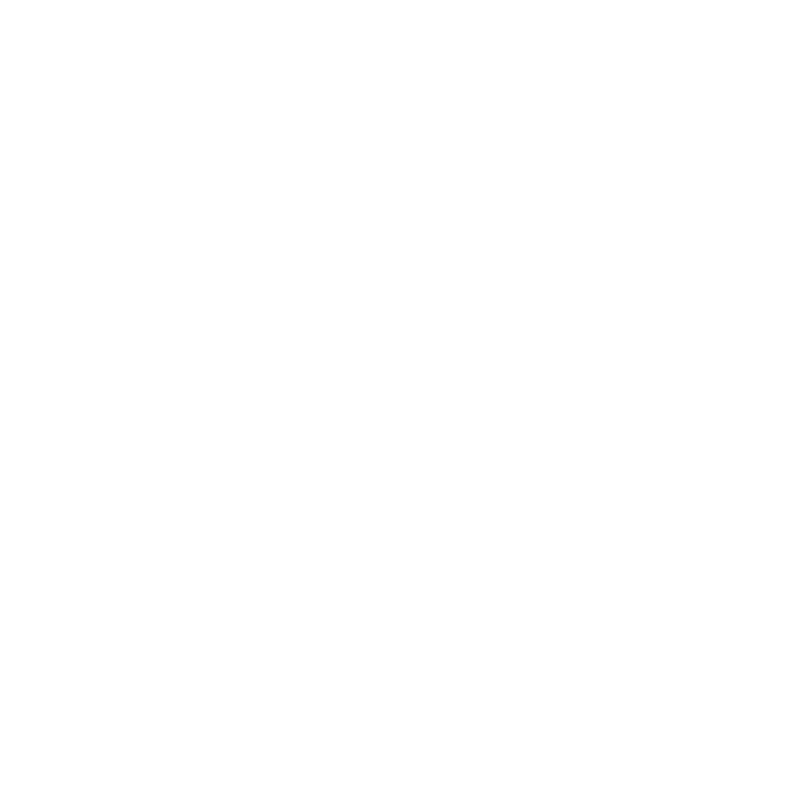

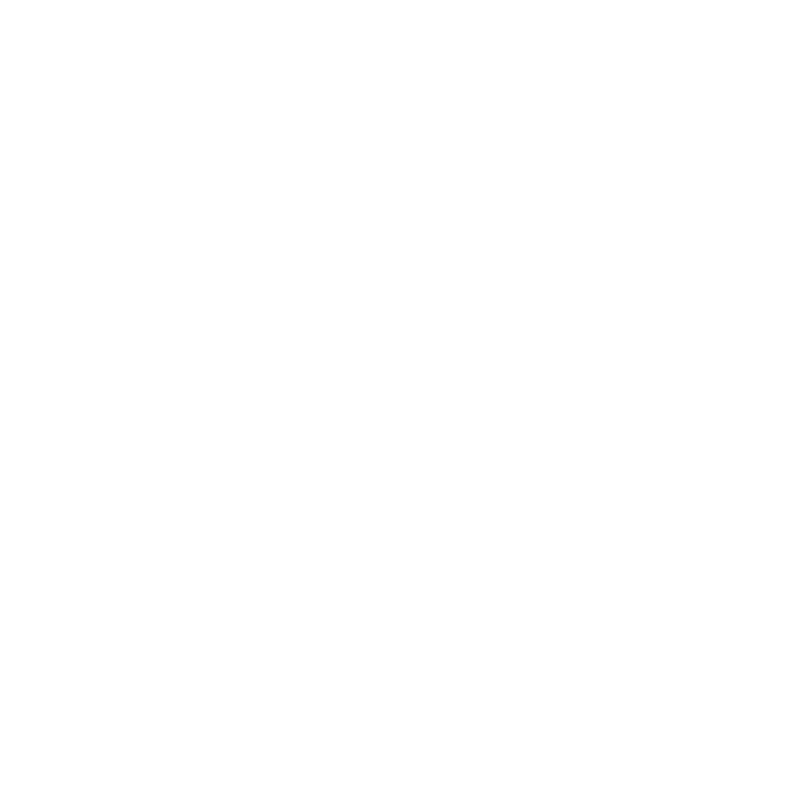

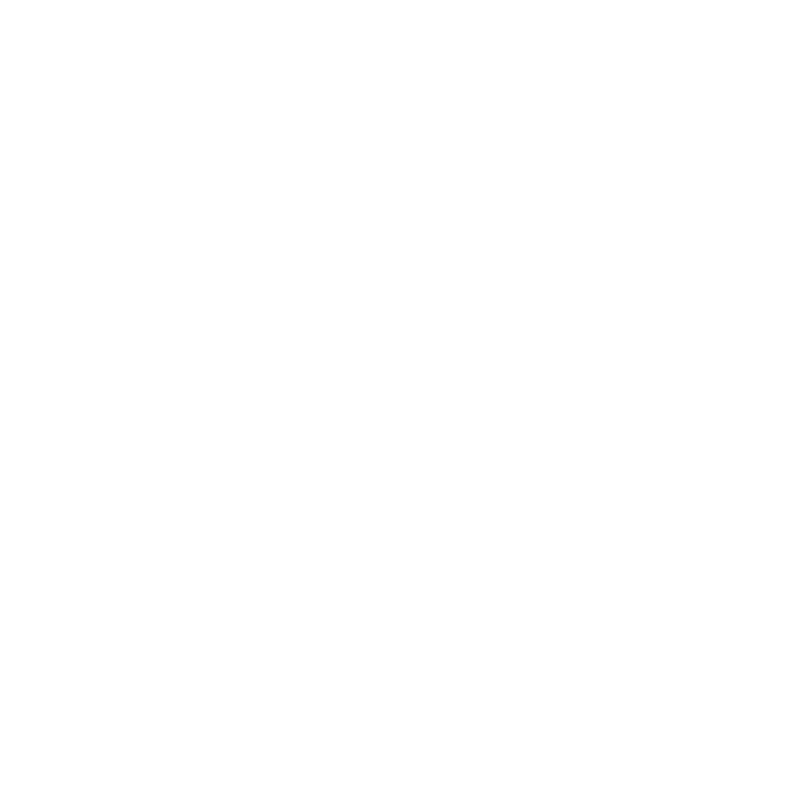

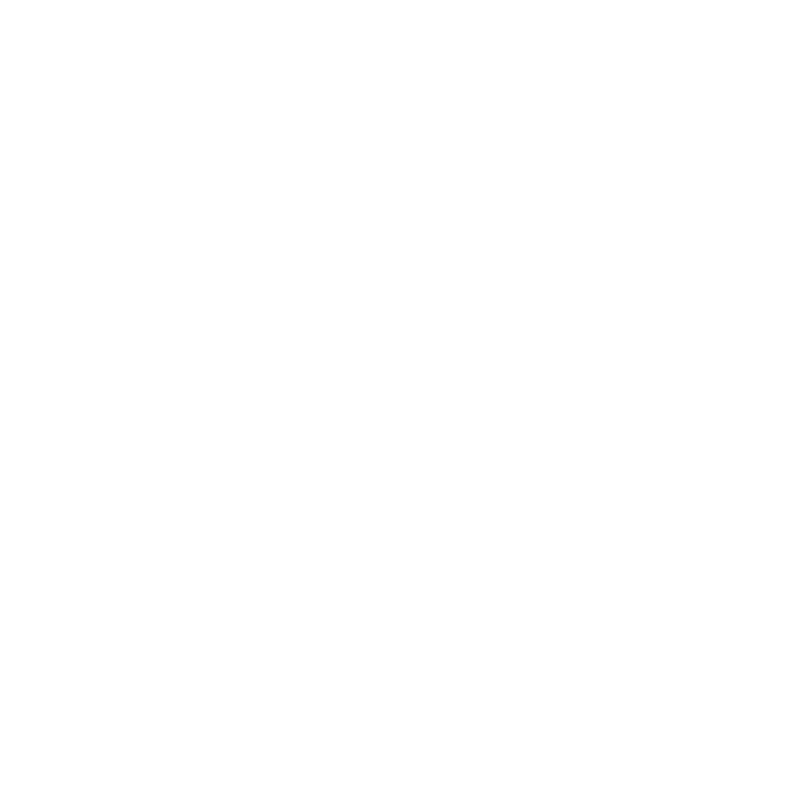

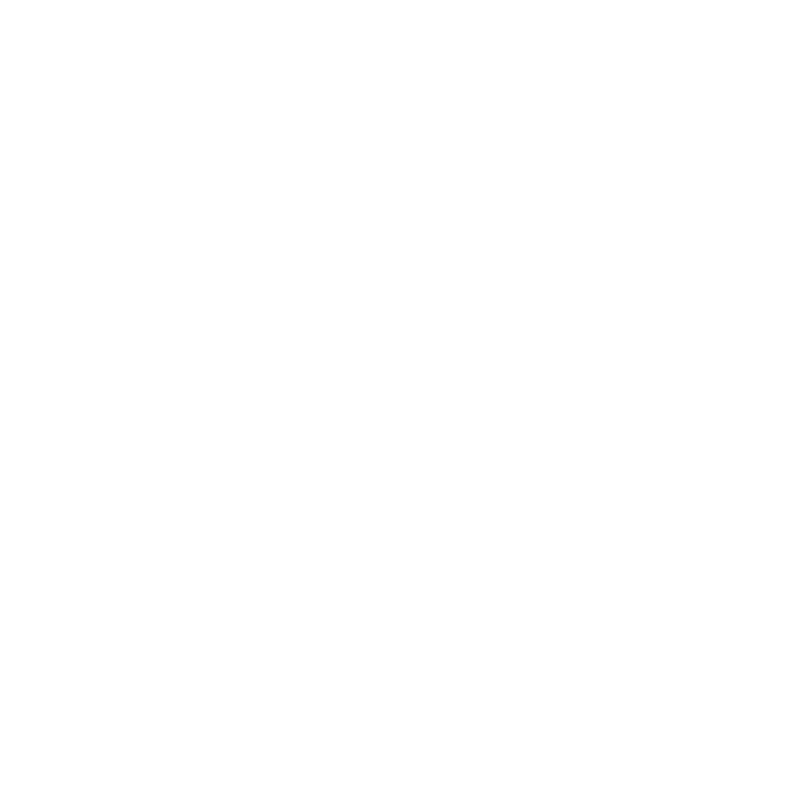

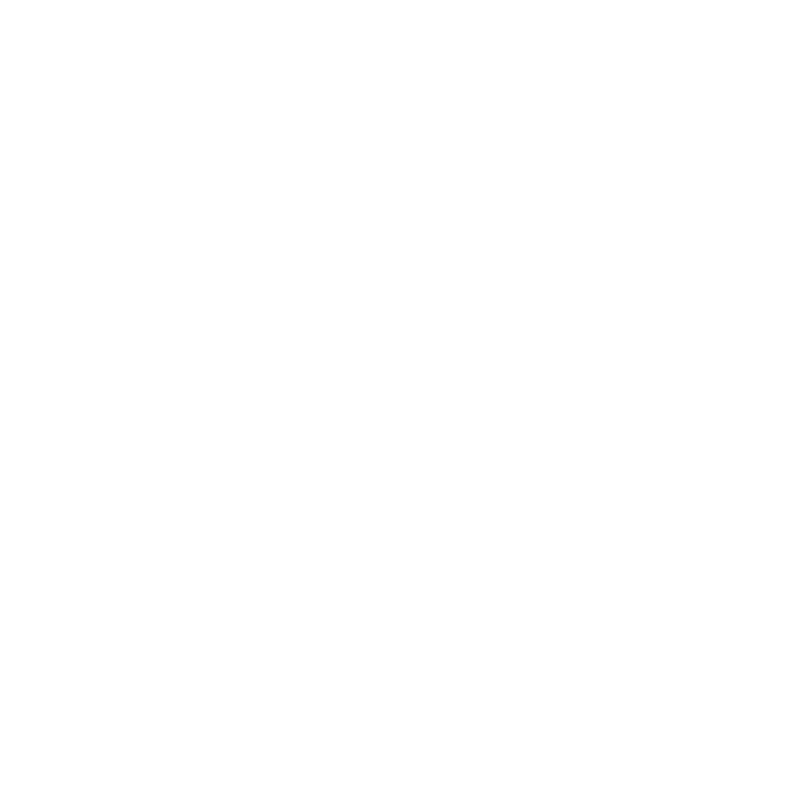

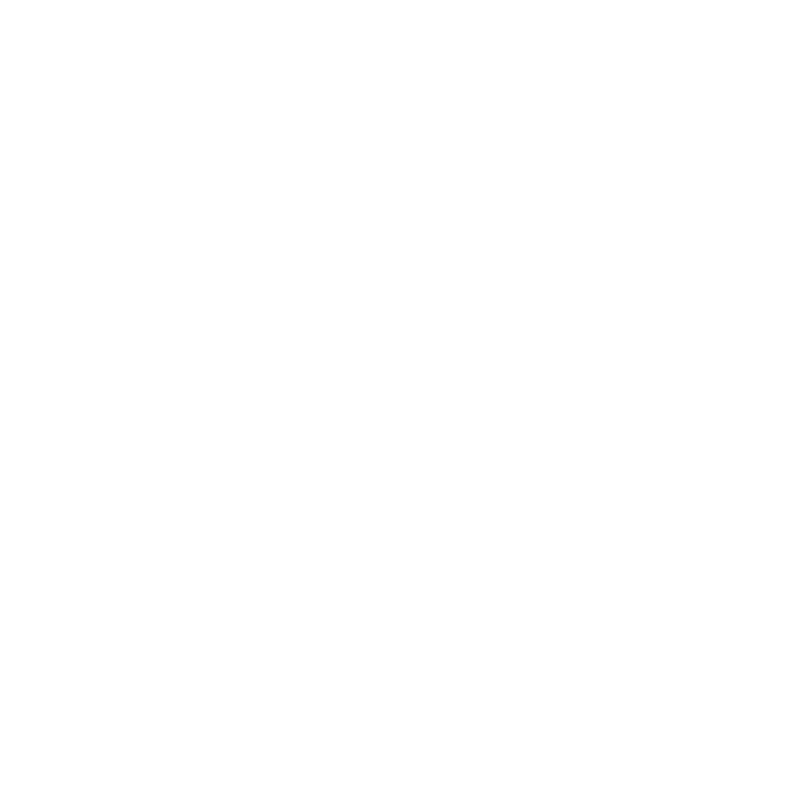

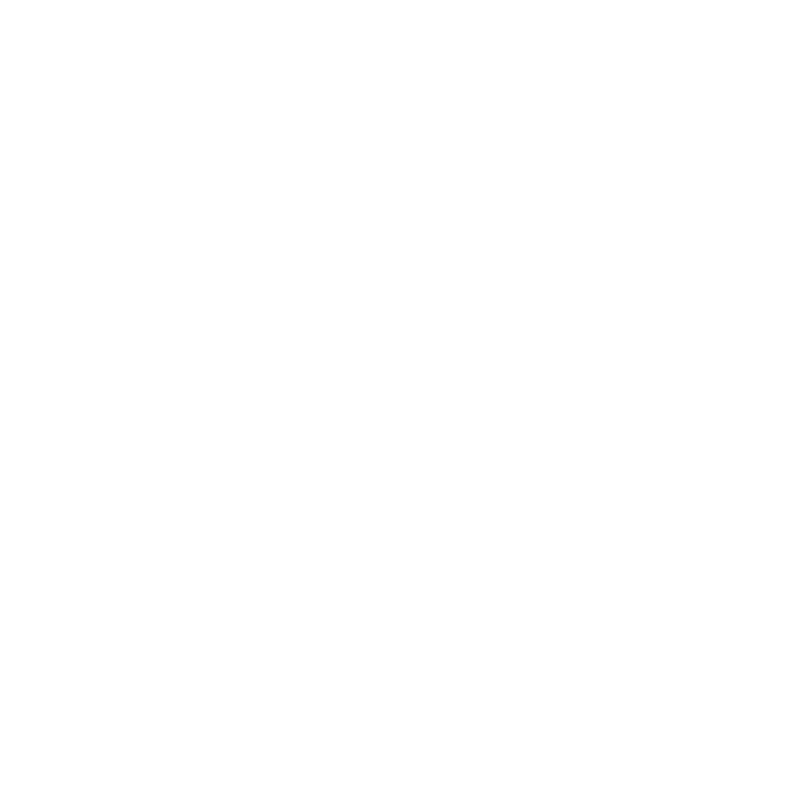

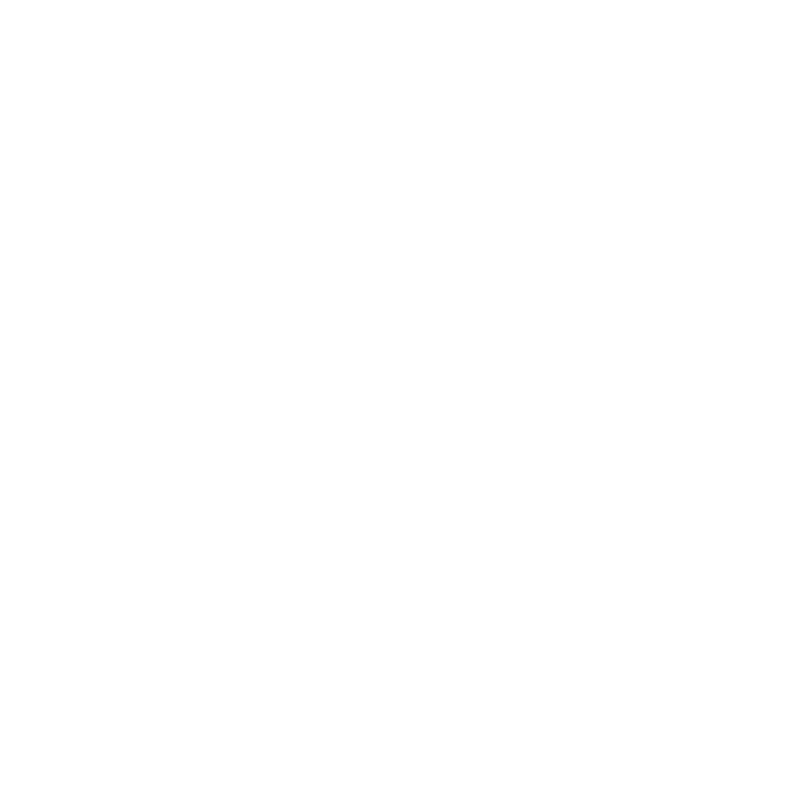

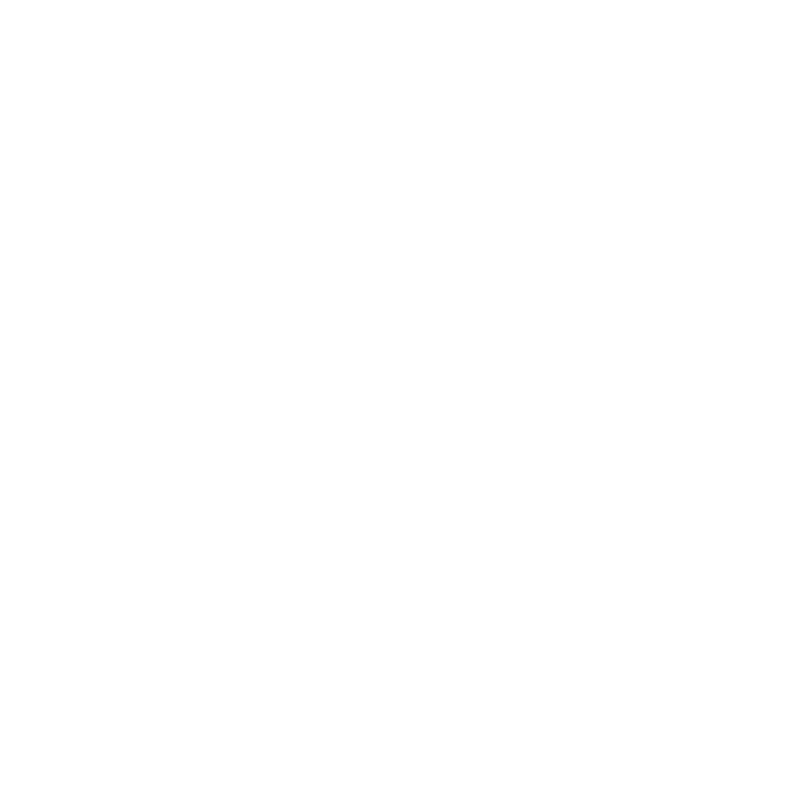

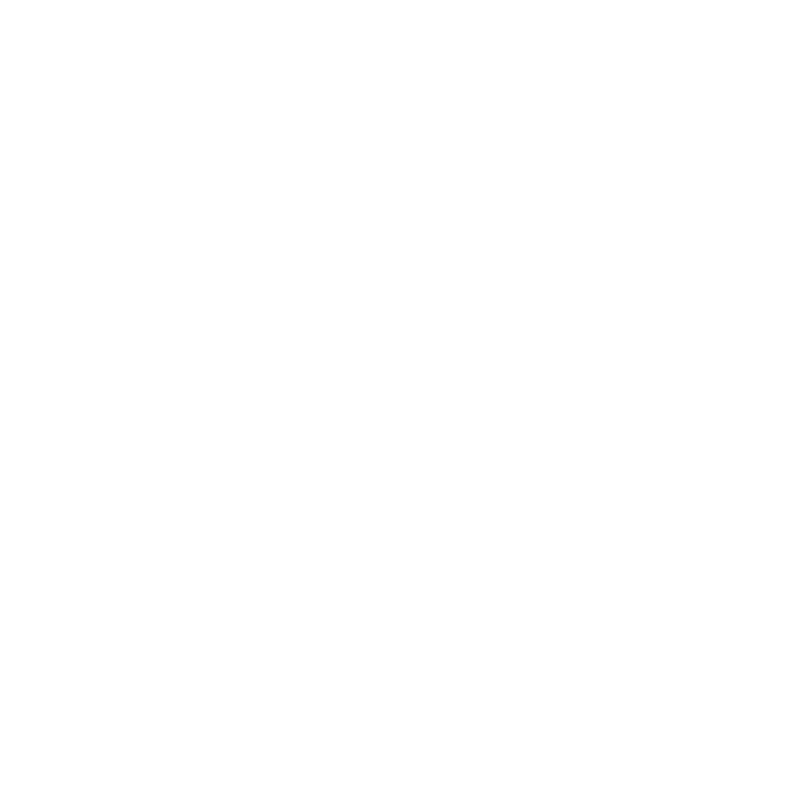

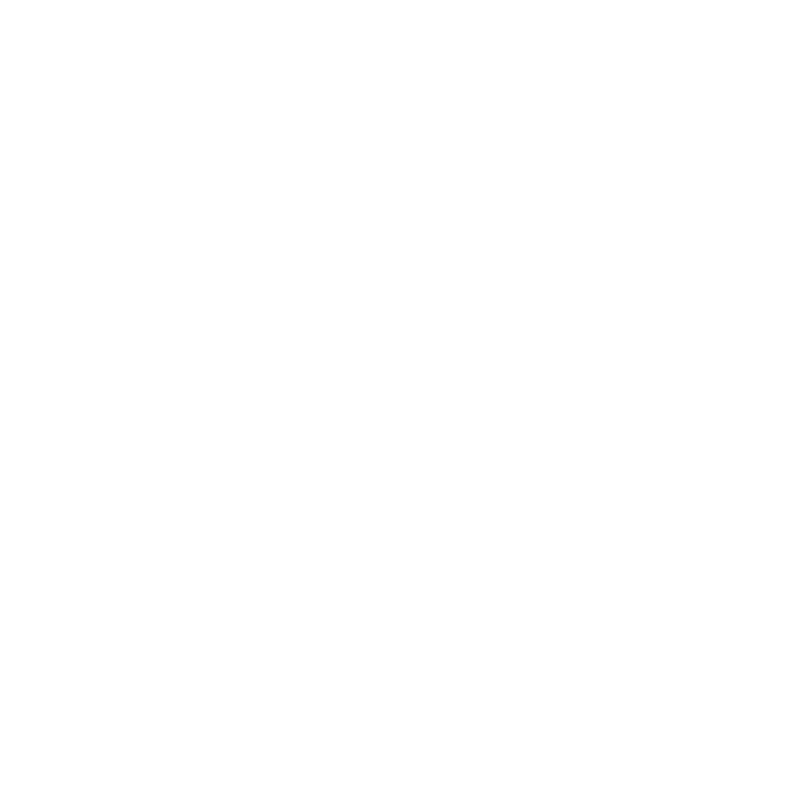

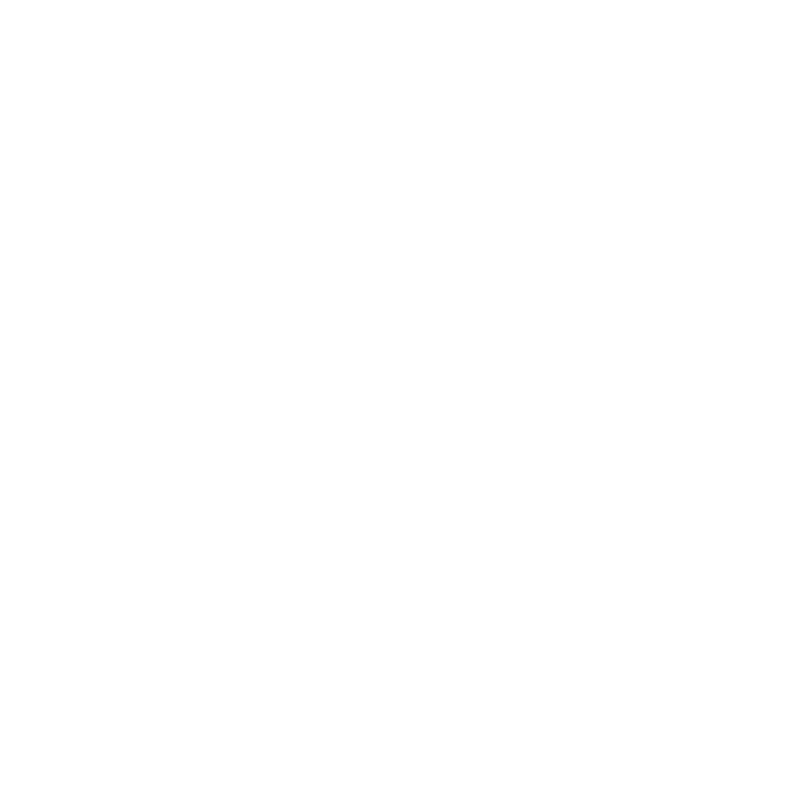

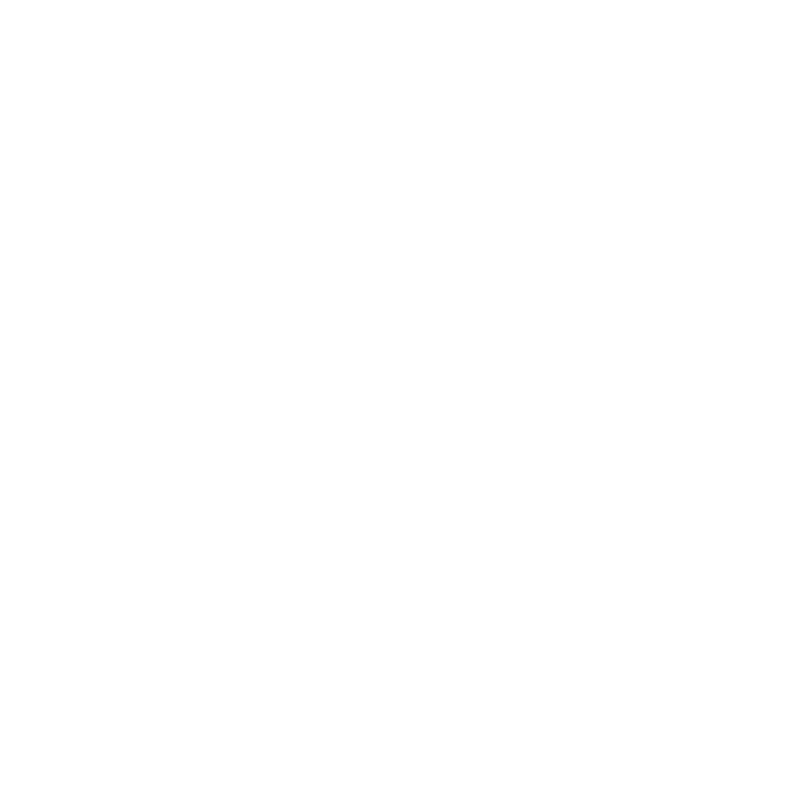

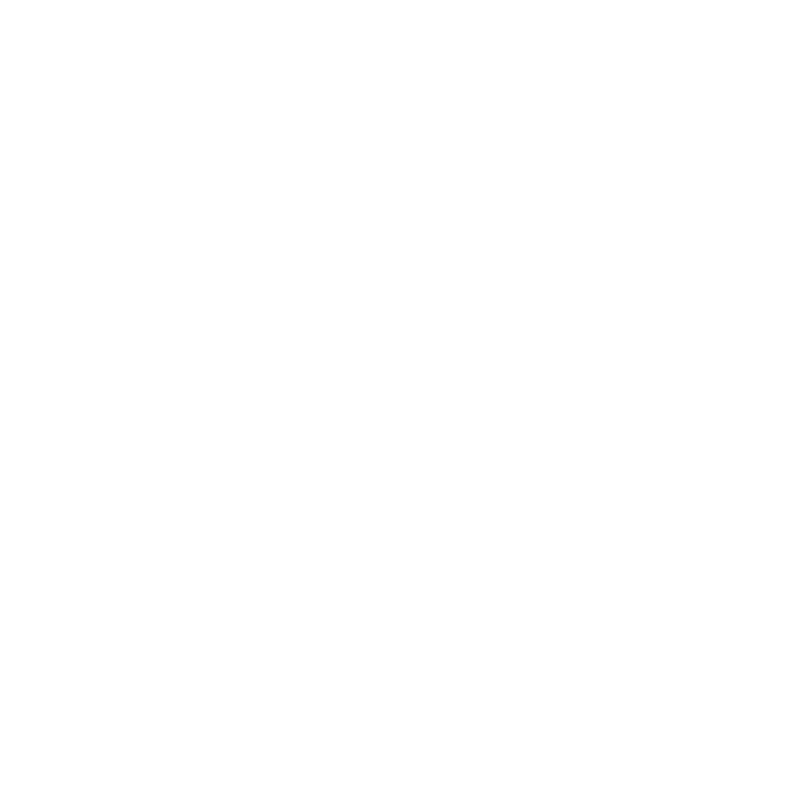

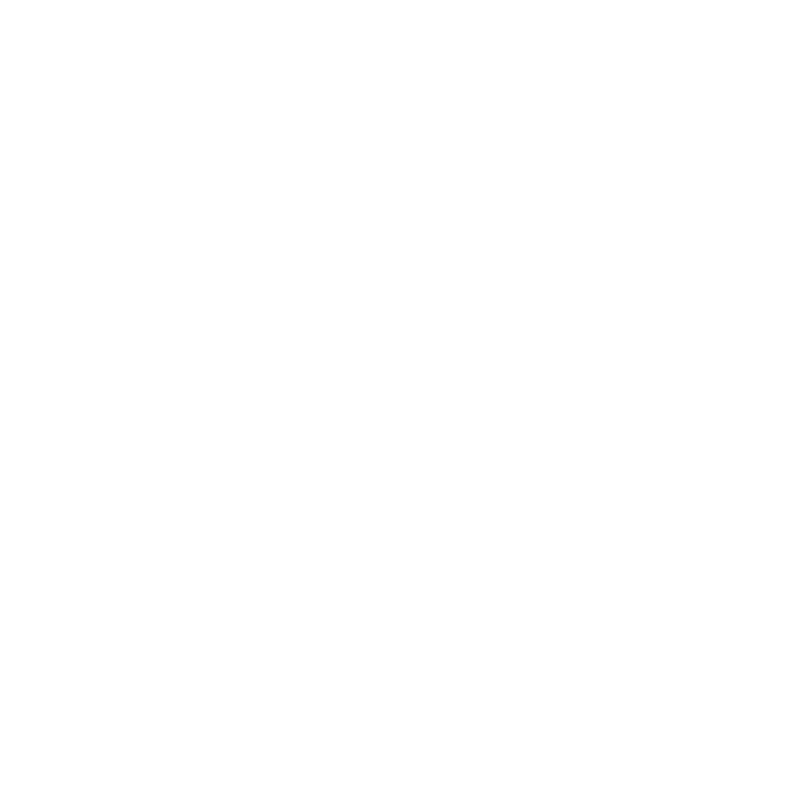

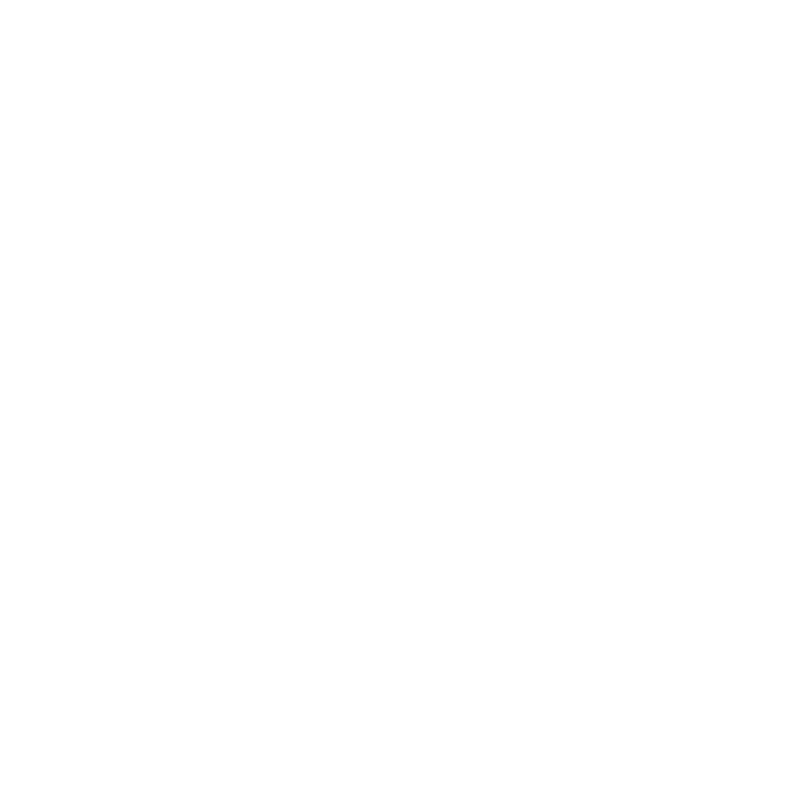

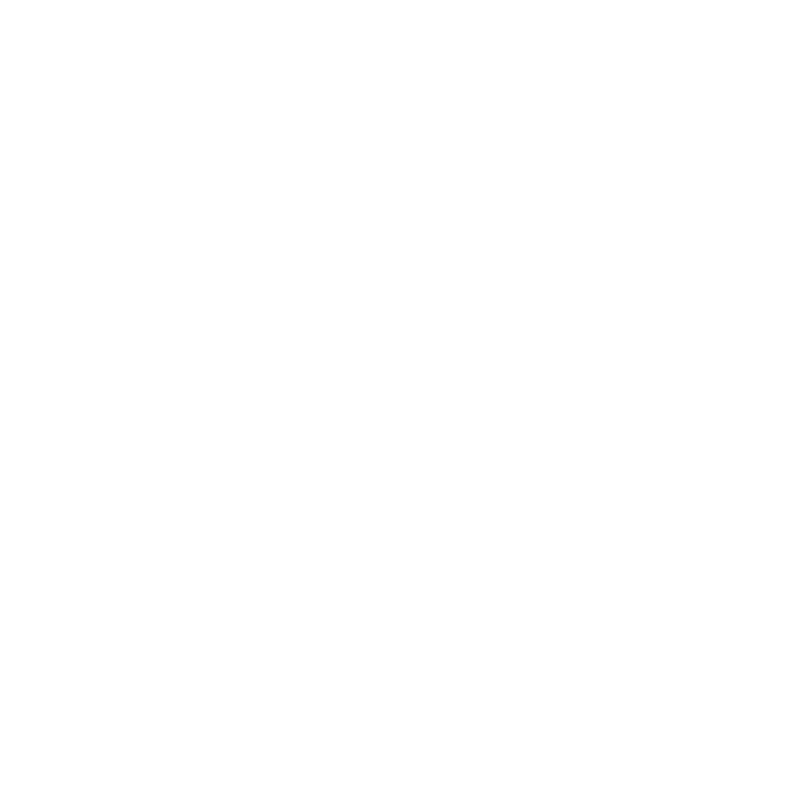

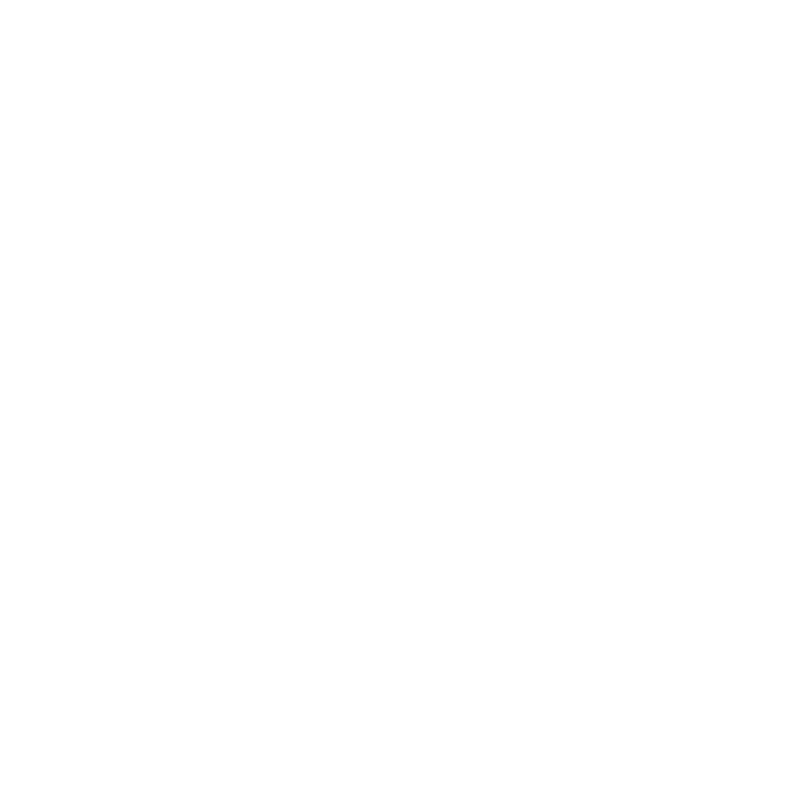

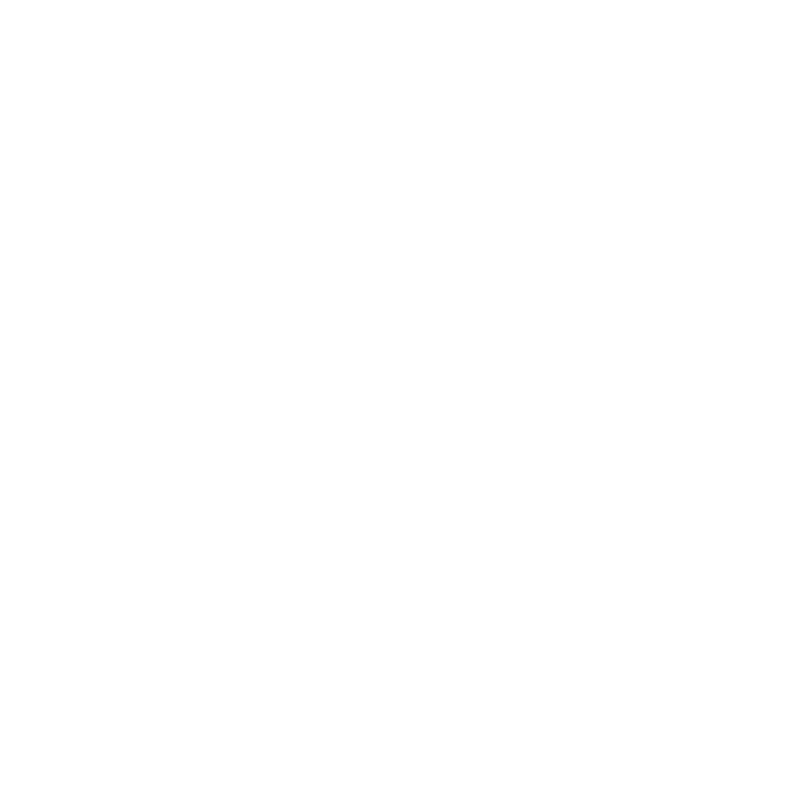

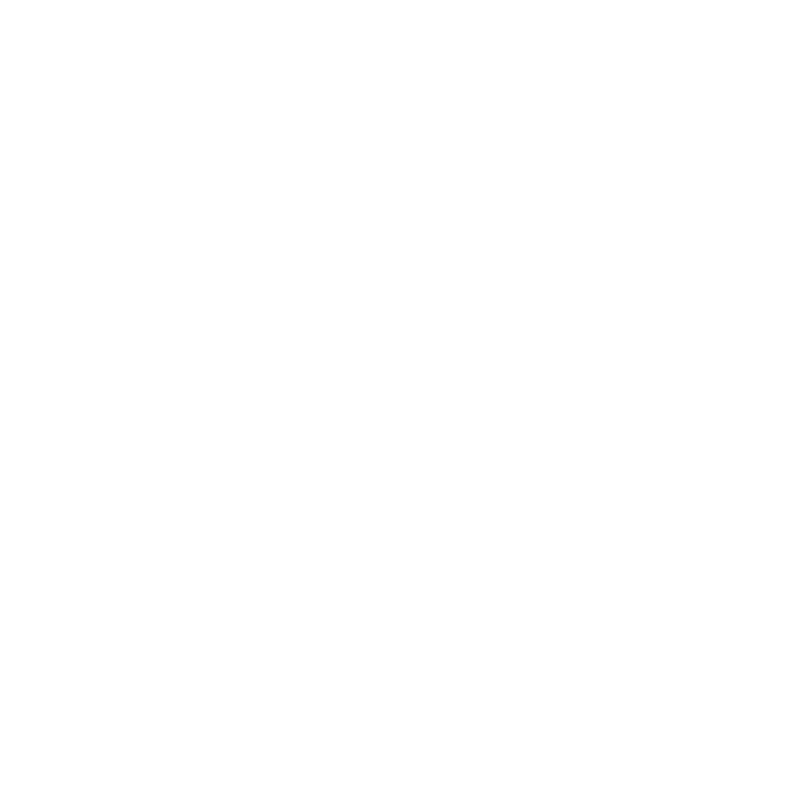

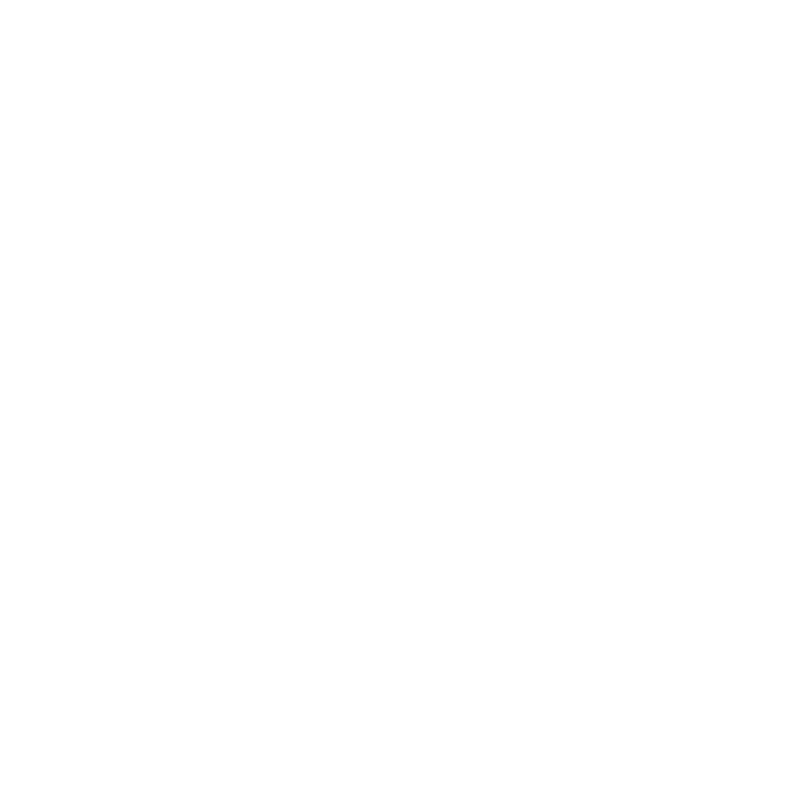

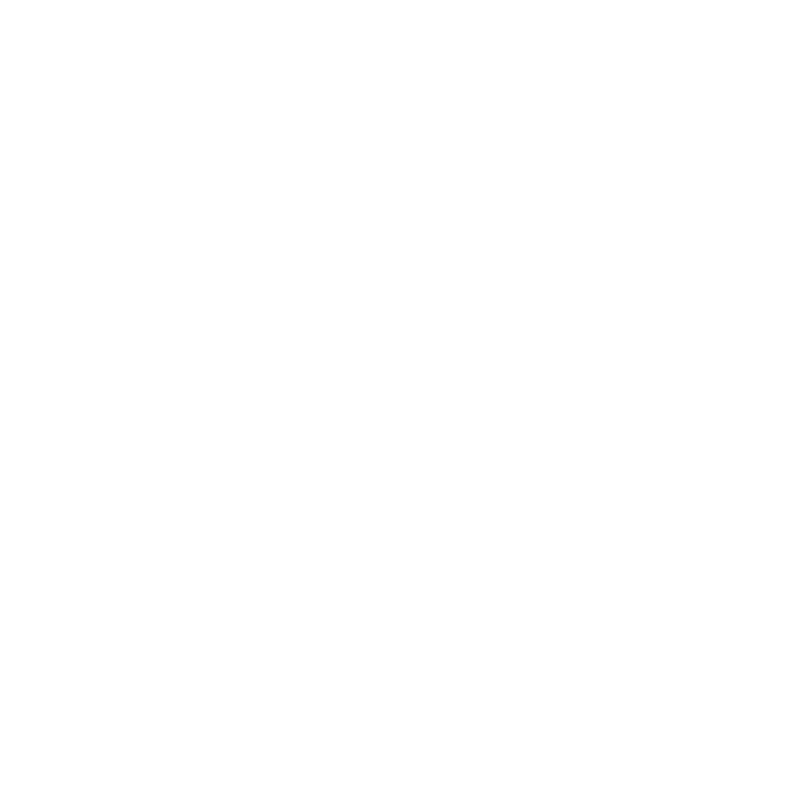

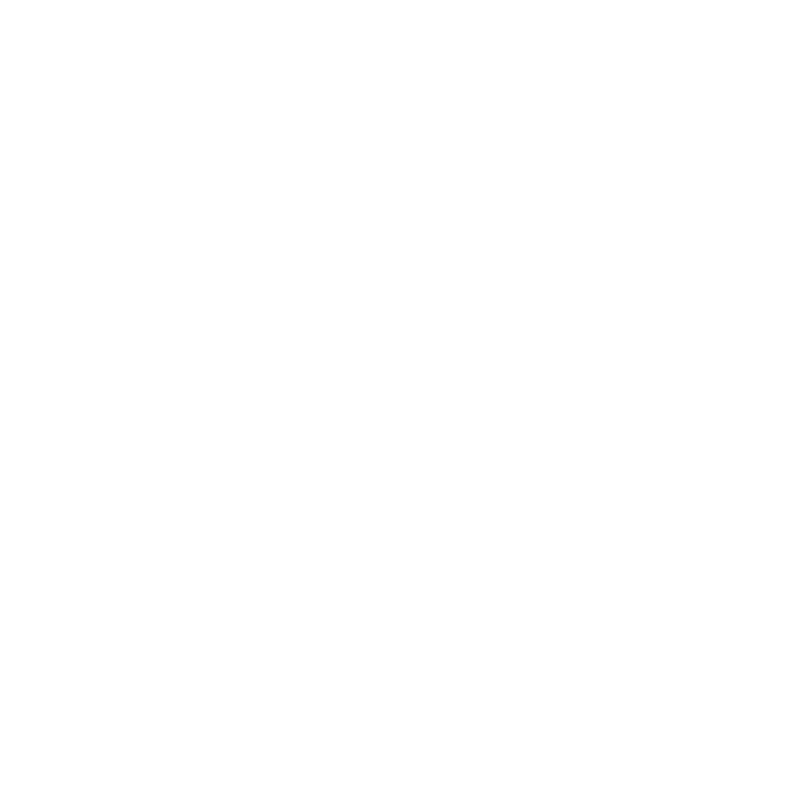

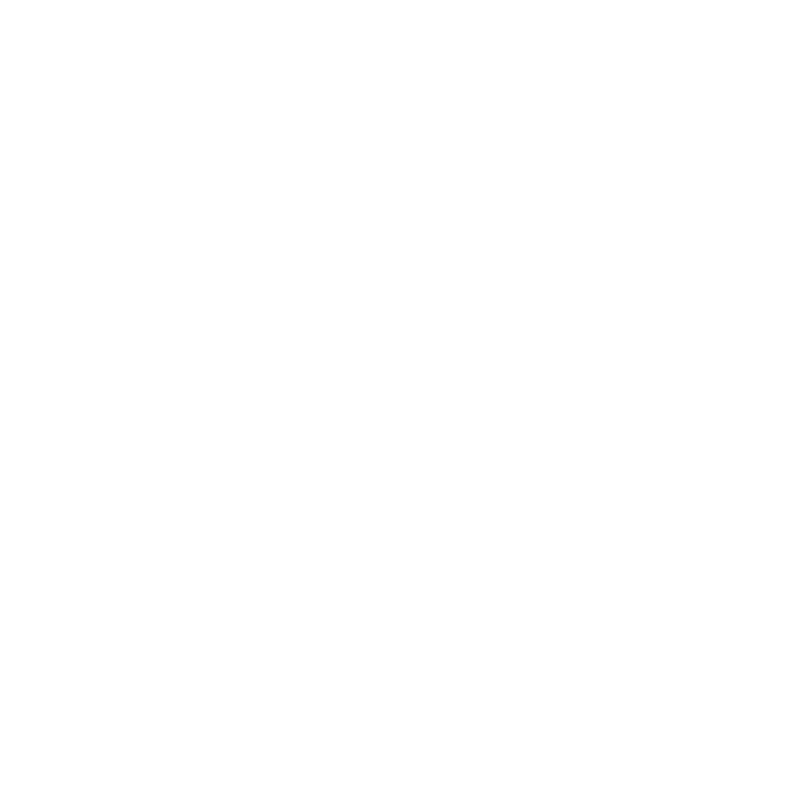

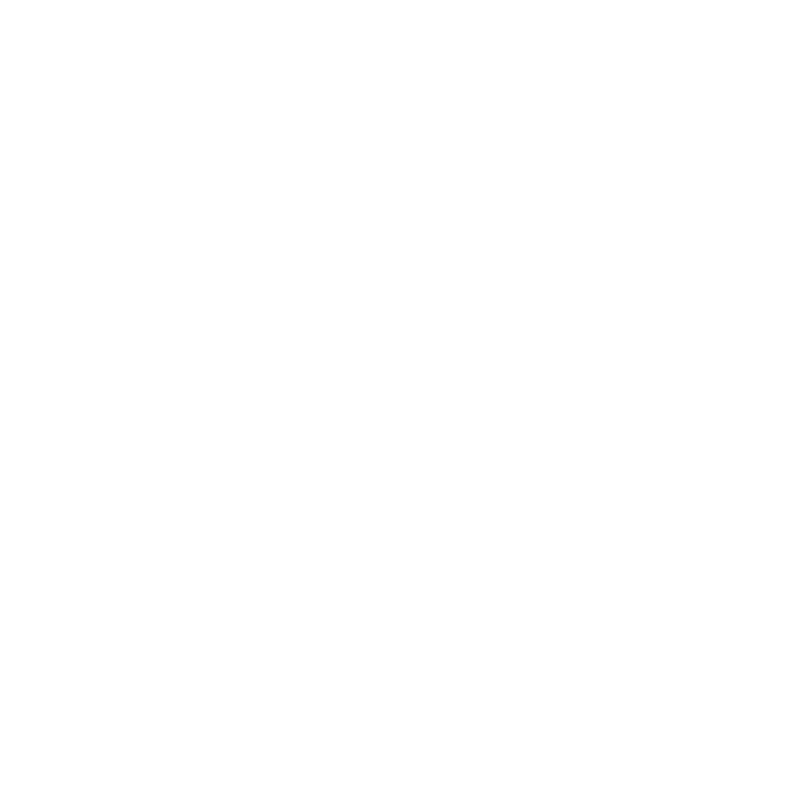

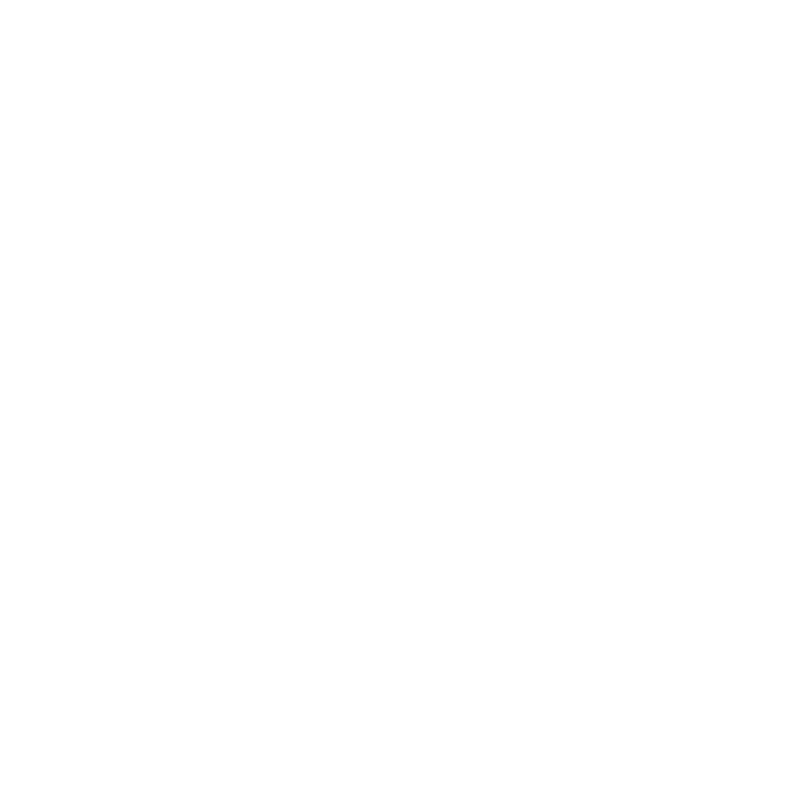

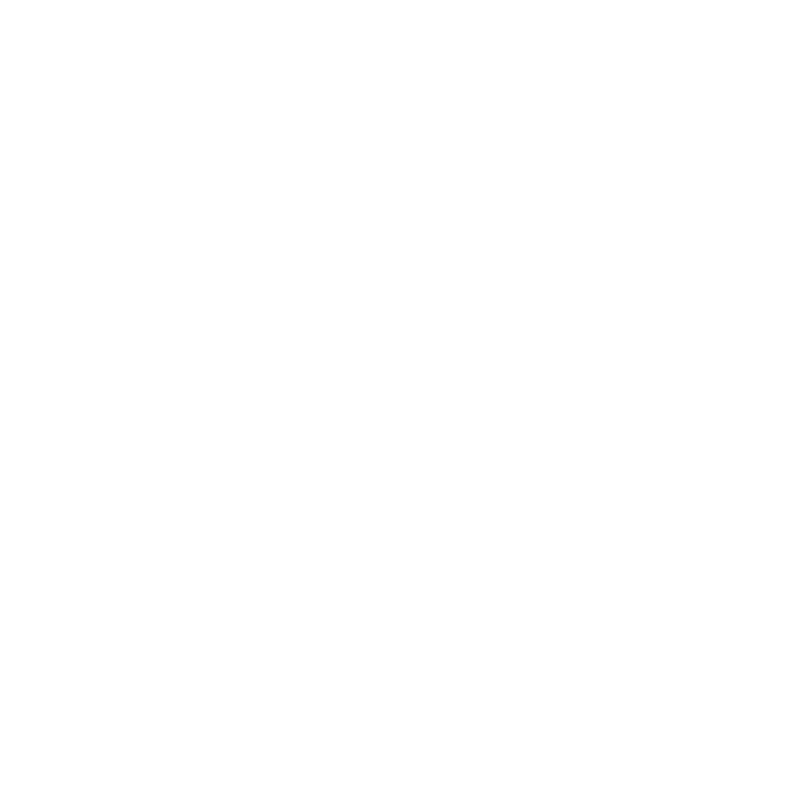

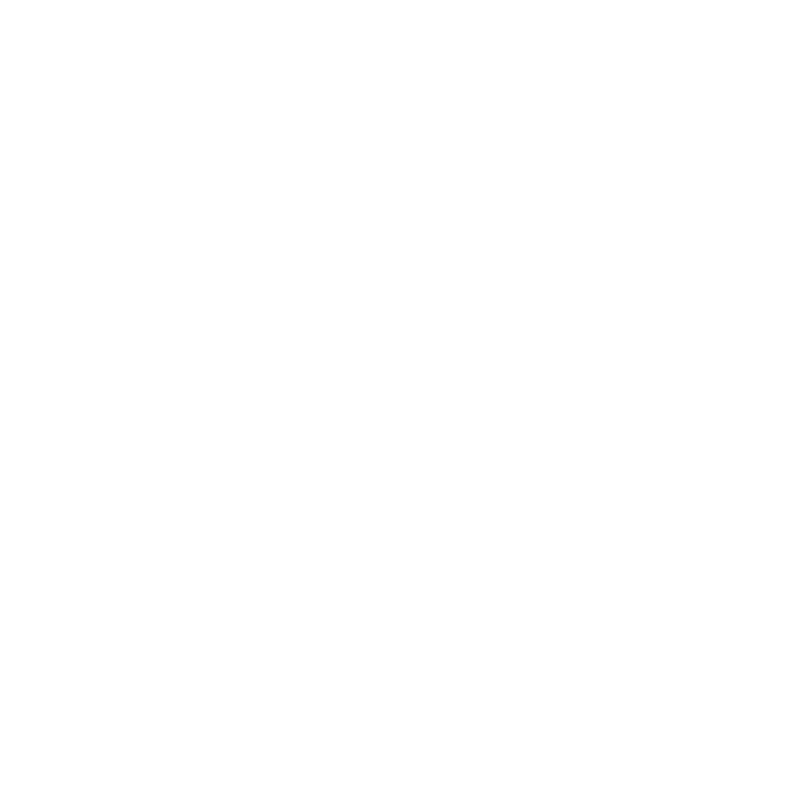

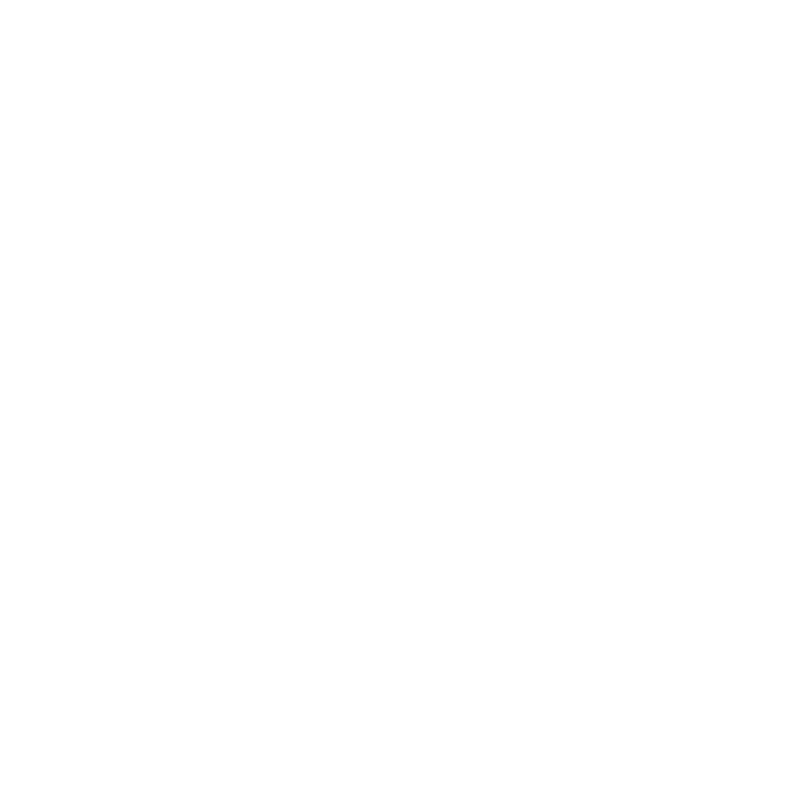

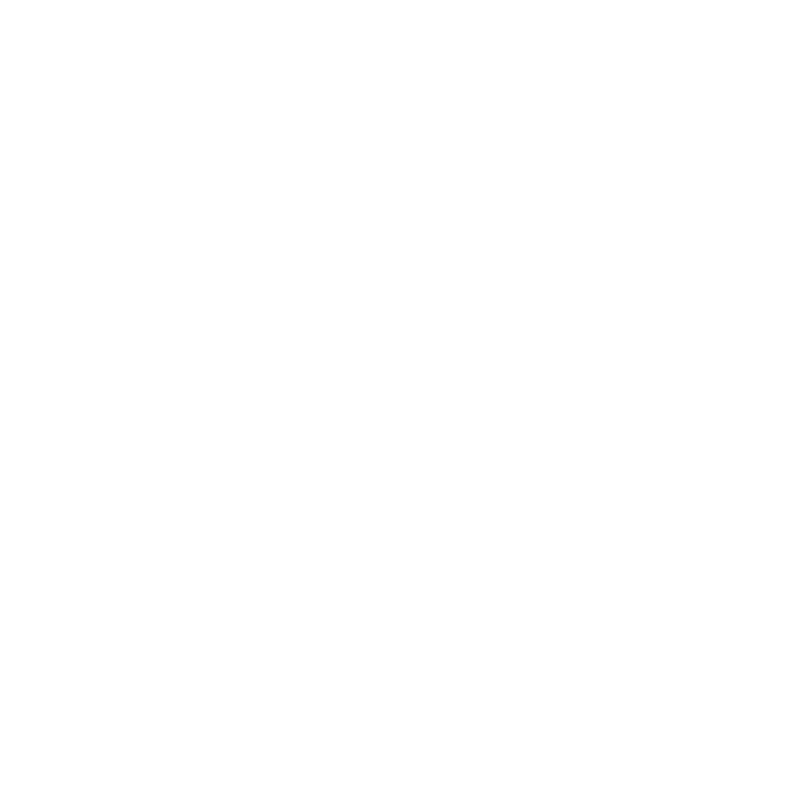

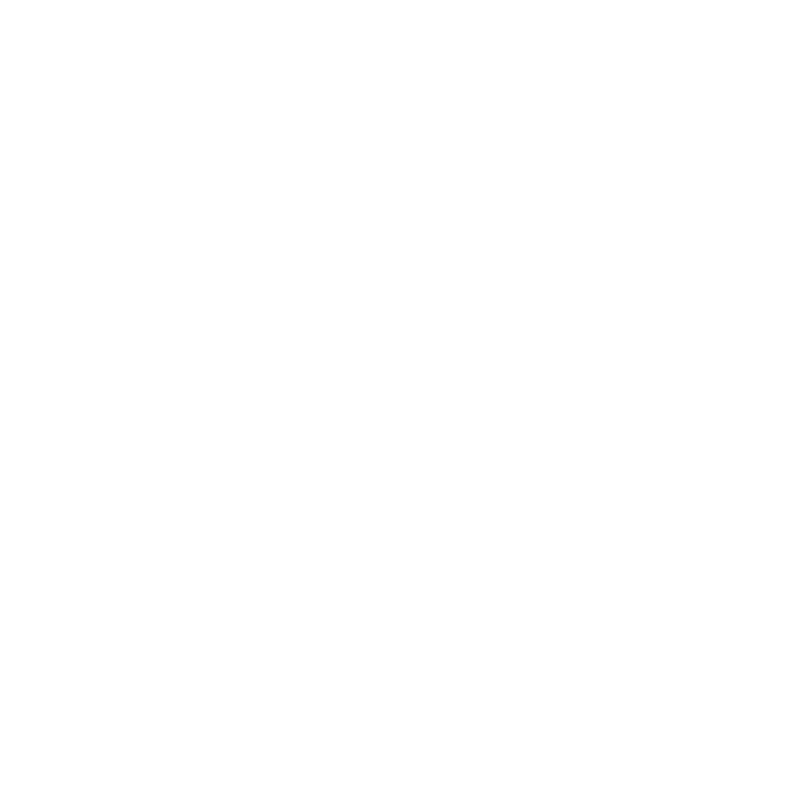

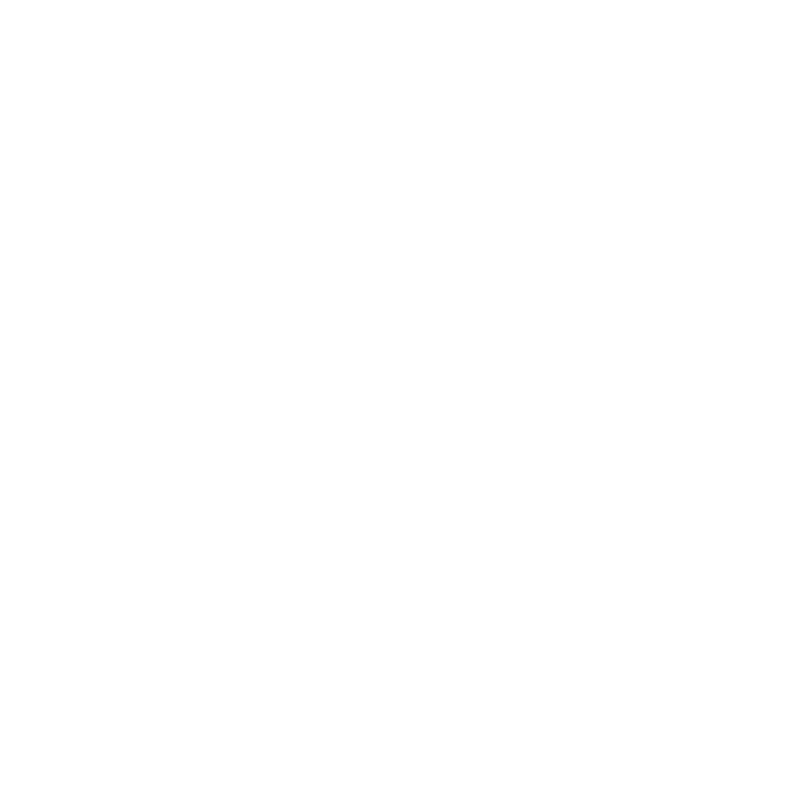

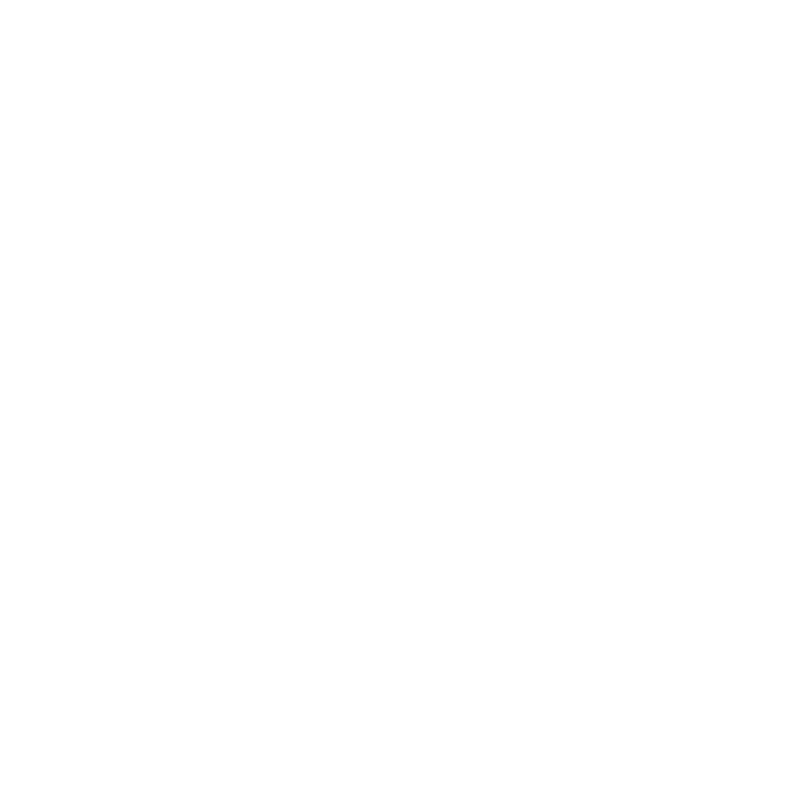

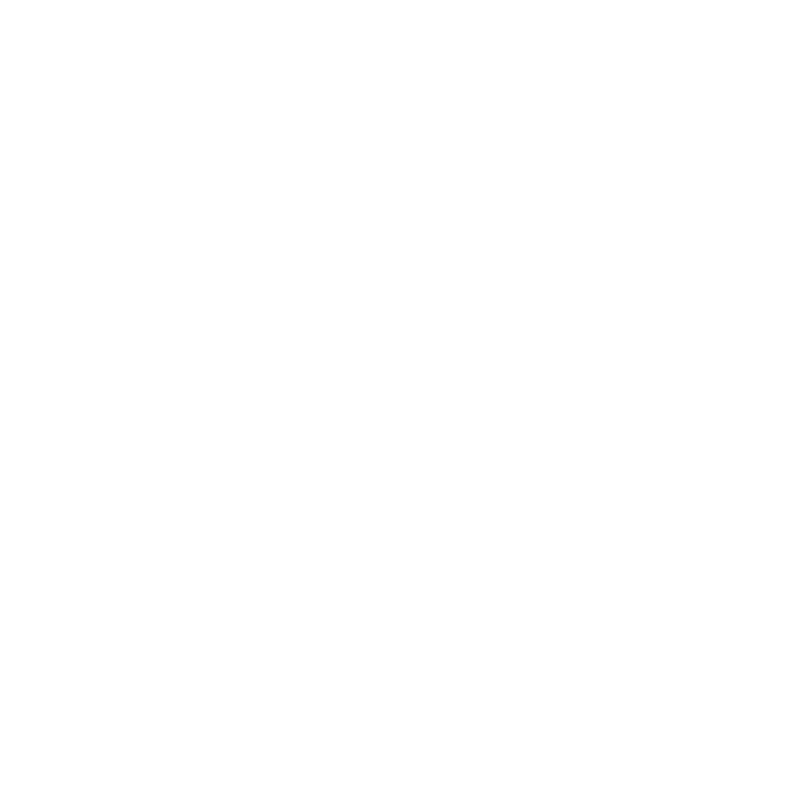

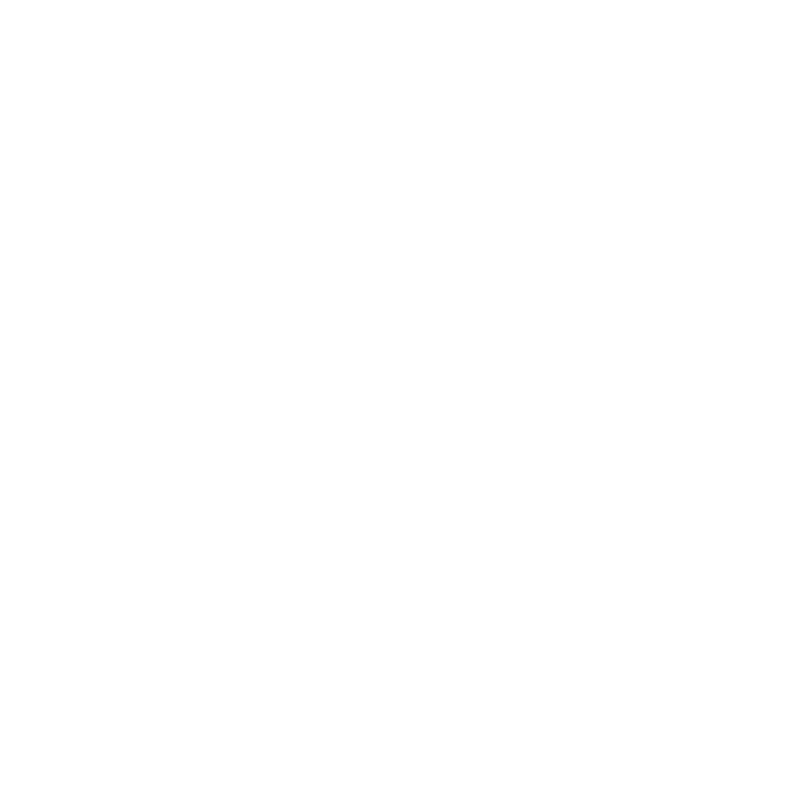

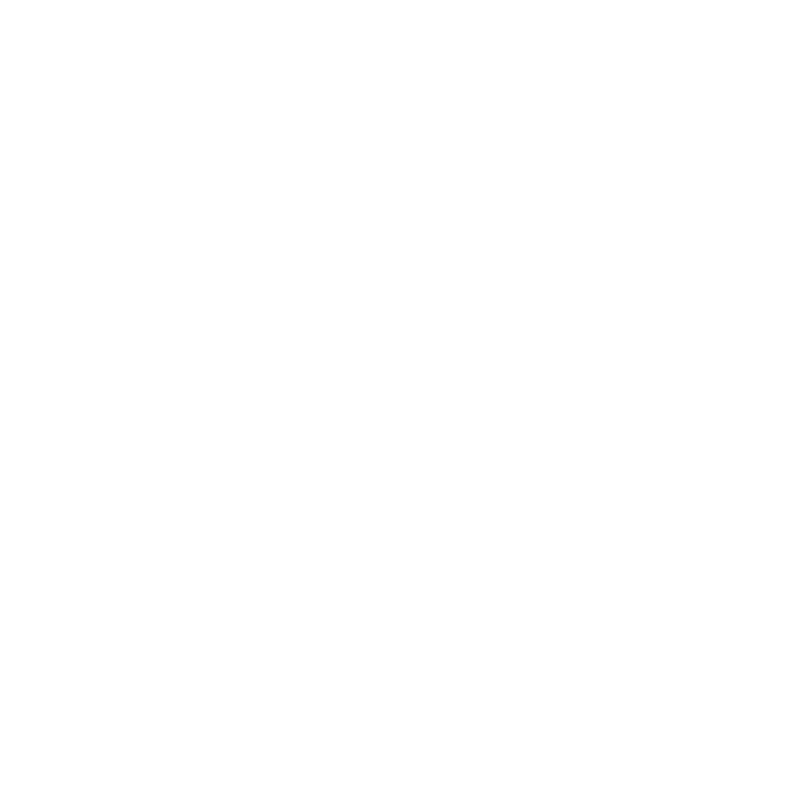

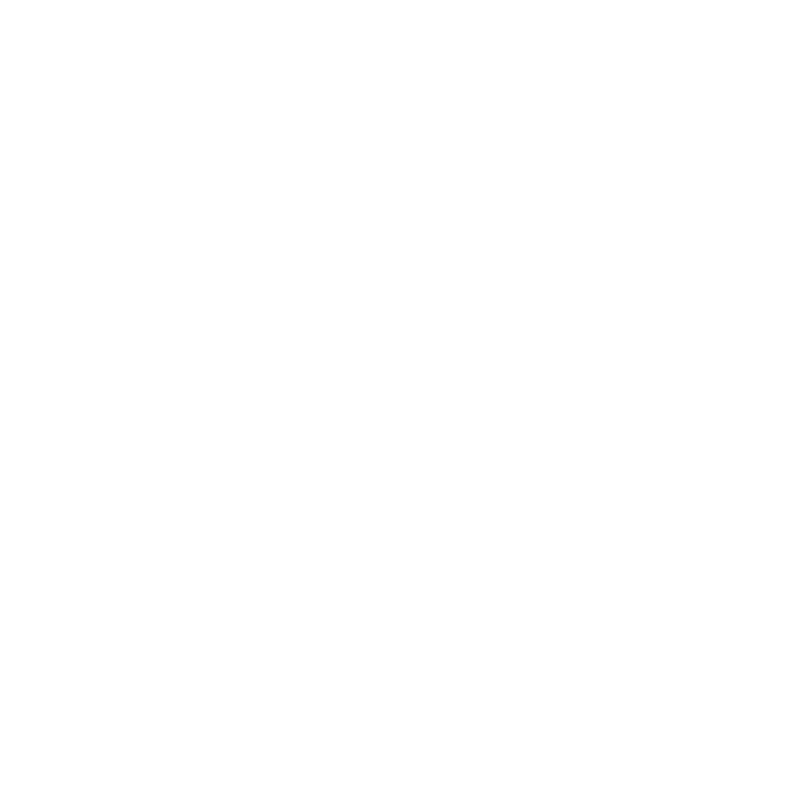

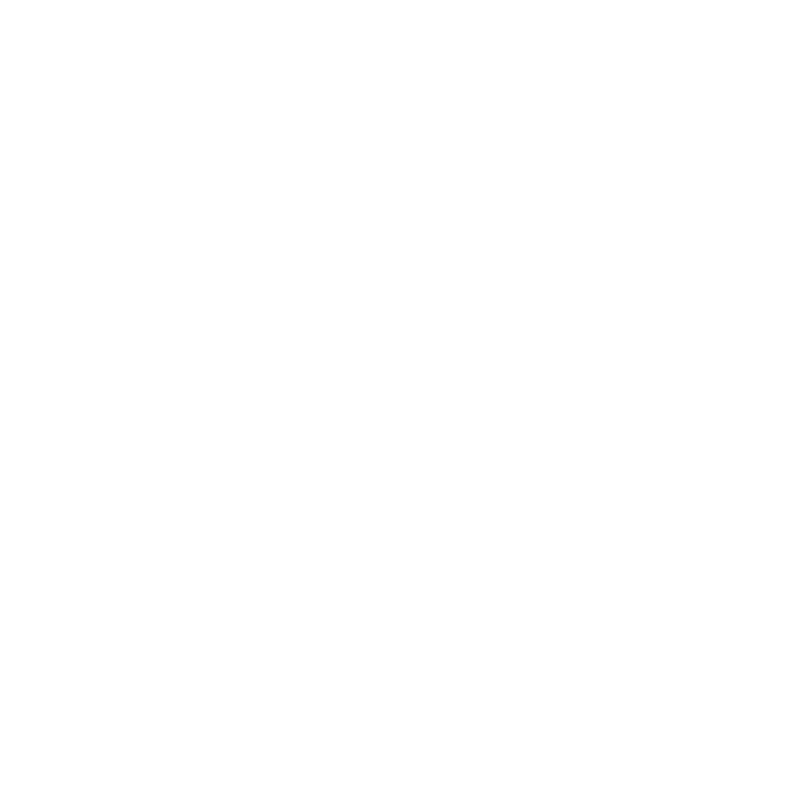

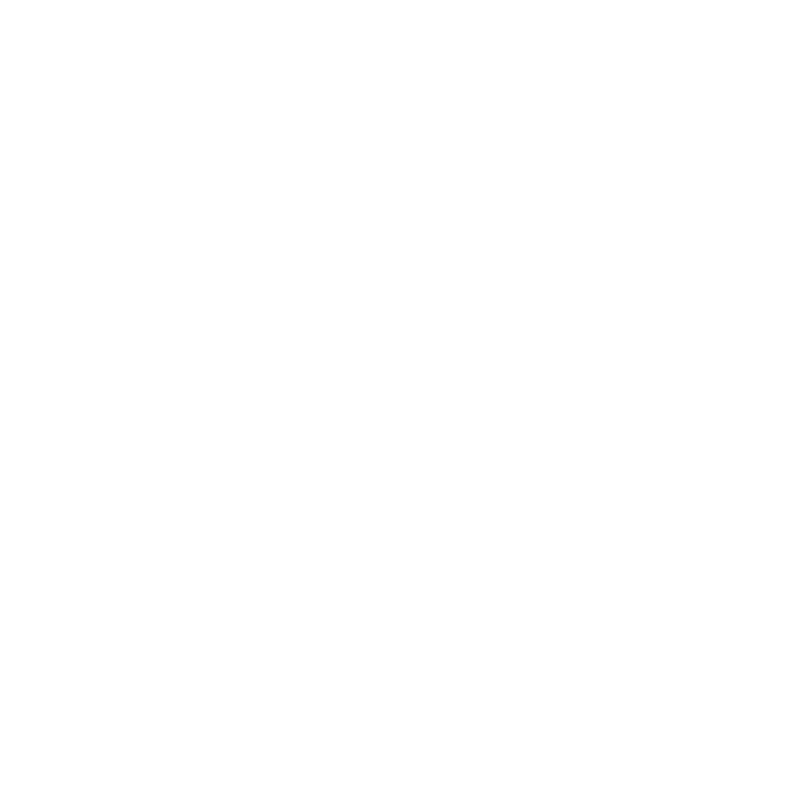

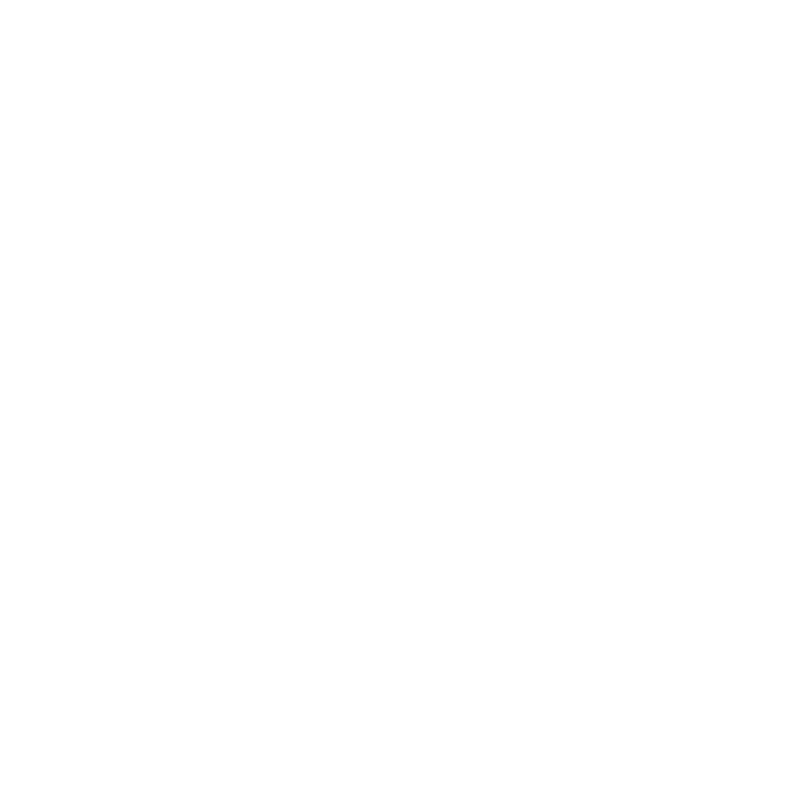

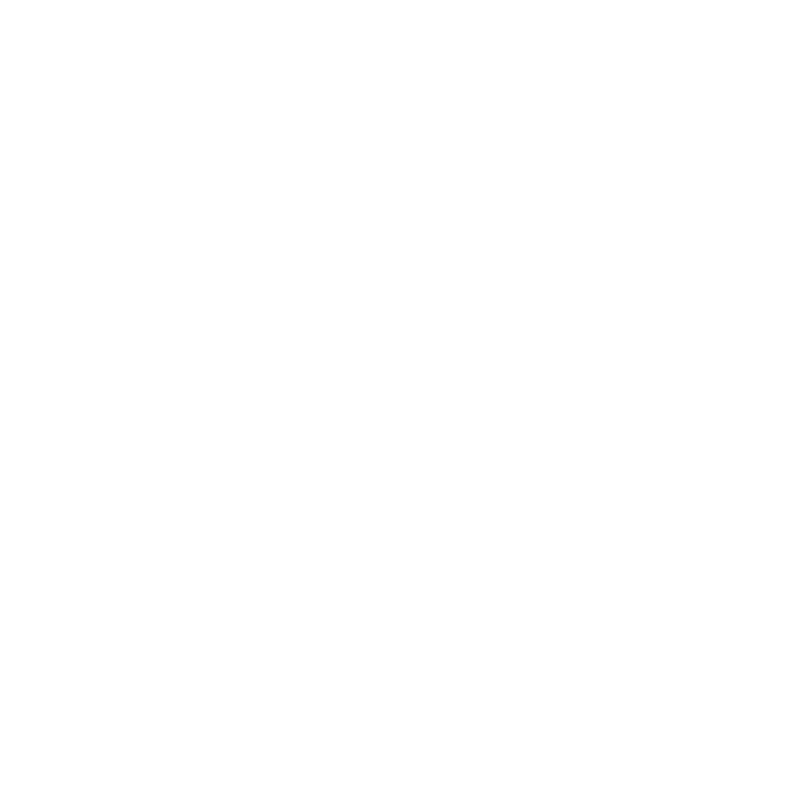

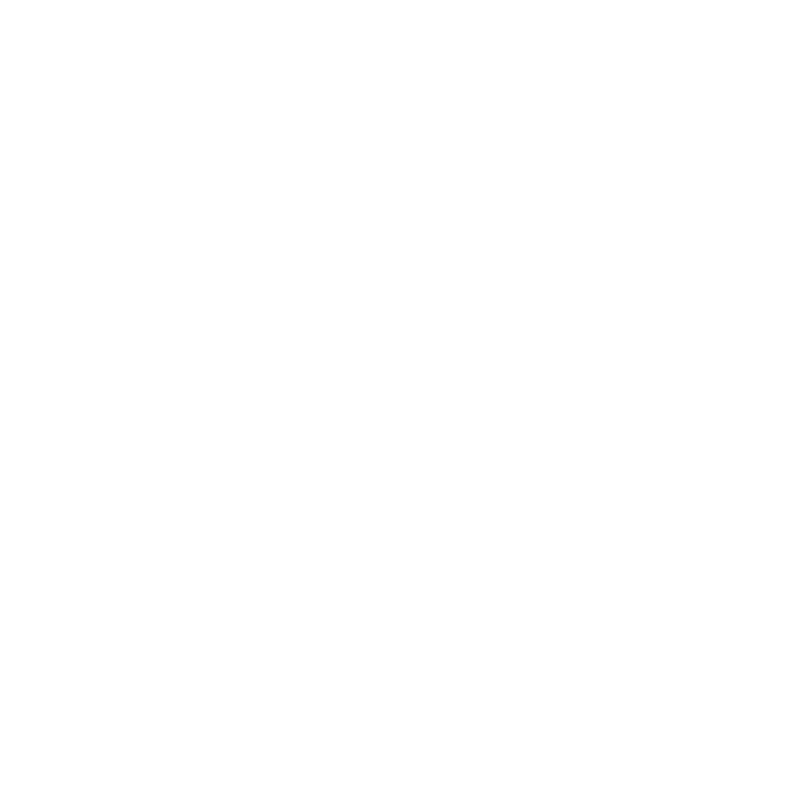

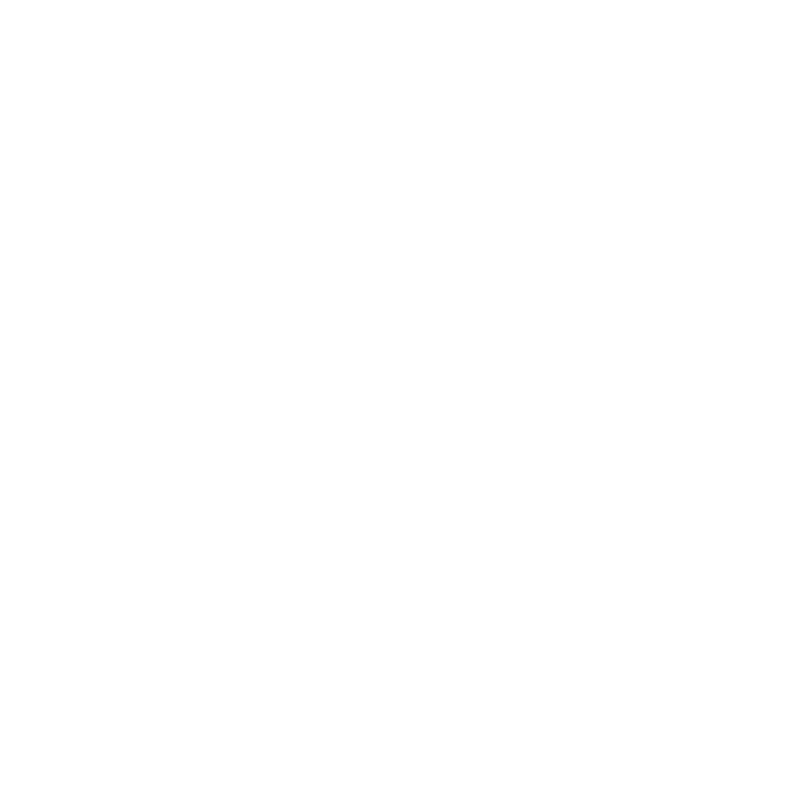

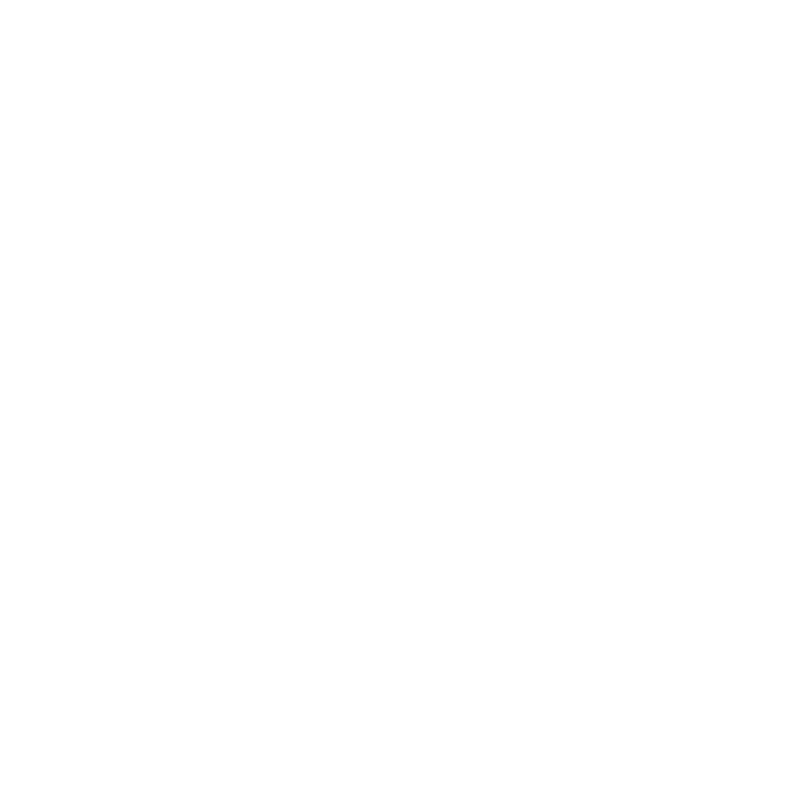

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from tqdm import trange

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

def create_square_image(image_size=32):
    while True:  # 循环确保生成的正方形不超出边界
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xlim(0, image_size)
        ax.set_ylim(0, image_size)
        ax.set_aspect('equal')
        ax.axis('off')

        # 定义色系的HSV范围
        sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
        pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系

        # 随机选择颜色
        color1 = random_color_from_hsv_range(sun_hsv_range)
        color2 = random_color_from_hsv_range(pole_hsv_range)

        # 确定上半部分和下半部分的正方形位置
        half_size = image_size / 2

        # 随机决定上半部分正方形的边长
        square_size_up = random.uniform(half_size * 0.3, half_size * 0.7)
        # # noise = 3 + abs(0.1 * np.random.normal(0, 0.1))
        noise = 2 + abs(0.1 * np.random.normal(0, 1))
        # noise = (0.1 * np.random.normal(0, 1))
        # 确保下半部分正方形的边长是上半部分正方形的1.5倍
        square_size_down = square_size_up * 1.5 - noise

        # 确定上半部分和下半部分正方形的随机区域
        top_left = (random.uniform(0, half_size - square_size_up), random.uniform(half_size, image_size - square_size_down))
        top_right = (random.uniform(half_size, image_size - square_size_up), random.uniform(half_size, image_size - square_size_down))
        bottom_left = (random.uniform(0, half_size - square_size_up), random.uniform(0, half_size - square_size_down))
        bottom_right = (random.uniform(half_size, image_size - square_size_up), random.uniform(0, half_size - square_size_down))

        # 随机选择一个区域放置上半部分和下半部分的正方形
        top_square_position = random.choice([top_left, top_right])
        bottom_square_position = random.choice([bottom_left, bottom_right])

        # 计算上半部分和下半部分正方形的位置
        top_x, top_y = top_square_position
        bottom_x, bottom_y = bottom_square_position

        # 确保正方形不会超出图像边界
        if top_x + square_size_up > image_size or top_y + square_size_up > image_size:
            continue
        if bottom_x + square_size_down > image_size or bottom_y + square_size_down > image_size:
            continue

        # 绘制上半部分正方形
        ax.add_patch(plt.Rectangle((top_x, top_y), square_size_up, square_size_up, facecolor=color1/255.0))

        # 绘制下半部分正方形
        ax.add_patch(plt.Rectangle((bottom_x, bottom_y), square_size_down, square_size_down, facecolor=color2/255.0))
        plt.close(fig)
        return fig

def generate_images(base_path, image_size=32, images_per_class=1000):
    # 如果没有base_path，则先创建该路径
    if not os.path.exists(base_path):
        os.makedirs(base_path)

    type0_path = os.path.join(base_path, "2")
    if not os.path.exists(type0_path):
        os.makedirs(type0_path)
    
    images = []

    # 生成 type_0 的图片
    print("Generating images for type_0...")
    for i in trange(images_per_class):
        folder_path = type0_path
        fig = create_square_image(image_size)

        image_path = os.path.join(folder_path, f"{i+1}.png")
        fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close(fig)  # 确保每次保存后都关闭图形

        if i < 8:
            images.append((image_path, os.path.basename(folder_path)))  # 保存前8张图片

    print("Image generation complete.")
    return images


# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/square_contrastive_ternary"
image_size = 32
images_per_class = 2000

# 生成图片并获取前8张图像路径和类别标签
images = generate_images(base_path, image_size, images_per_class)


Processing Images:   0%|          | 0/2000 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 93.29it/s]


Folder 0: Processed 1433 images
Failed images: 0


Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 92.57it/s] 


Folder 1: Processed 1762 images
Failed images: 0


Processing Images: 100%|██████████| 2000/2000 [00:21<00:00, 93.71it/s] 
/tmp/ipykernel_687446/2956902298.py:153: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0.1, 0.28], [0.15, 0.28*1.5], 'k--', label='Ground Truth: $y=1.5x$', color='gray',linewidth = 1.5)
/tmp/ipykernel_687446/2956902298.py:191: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ground_truth_line, = plt.plot([0.1, 0.28], [0.15, 0.28*1.5], 'k--', label='Ground Truth: $y=1.5x$', color='gray',linewidth = 1.5)


Folder 2: Processed 1957 images
Failed images: 0


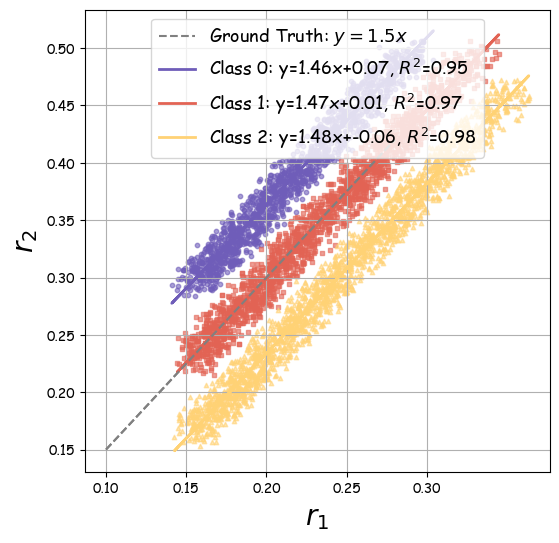

Combined scatter plot and fit saved to /cpfs04/user/hanyujin/causal-dm/example/taskd_contrastive_training.pdf


In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def find_squares_in_image(image, image_size=32):
    """
    查找图片中的两个正方形并返回它们的边长，进行标准化处理。
    :param image_path: 图片文件路径
    :param image_size: 图片的尺寸
    :return: 上半部分和下半部分正方形的边长（l1, l2），标准化后的值
    """
    # 读取图像


    height, width = image.shape[:2]  # height 是图像的高度，width 是图像的宽度
    # print(f"Actual image size - Width: {width}, Height: {height}")  # 打印实际尺寸
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 转为灰度图像
    
    # 使用Canny边缘检测
    edges = cv2.Canny(image, 50, 150)

    # 查找轮廓
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    squares = []

    for contour in contours:
        # 逼近轮廓为多边形
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) == 4:  # 如果是四边形，考虑为正方形
            # 计算边长
            x, y, w, h = cv2.boundingRect(approx)
            square_size = max(w, h)  # 保证正方形的边长是最小边的长度
            squares.append((x, y, square_size))
    
    # 确保我们得到了两个正方形，一个在上半部分，一个在下半部分
    if len(squares) == 2:
        # 根据y坐标判断哪个正方形在上半部分，哪个在下半部分
        squares = sorted(squares, key=lambda x: x[1])  # 按y坐标排序
        l1 = squares[0][2]  # 上半部分的正方形边长
        l2 = squares[1][2]  # 下半部分的正方形边长

        # 打印原始边长
        # print(f"Original l1: {l1}, l2: {l2}")

        # 进行标准化，除以图片尺寸 image_size
        l1_normalized = l1 / image_size
        l2_normalized = l2 / image_size

        # 打印标准化后的边长
        # print(f"Normalized l1: {l1_normalized}, l2: {l2_normalized}")

        return l1_normalized, l2_normalized
    return None, None  # 如果没有找到两个正方形


def process_images(base_path, target_size=128):
    """
    遍历文件夹中的图片，计算每张图片中大圆和小圆的半径。
    """
    folder_path = base_path  # 基路径
    failed_images = []  # 存储处理失败的图片
    radii_data = []     # 存储小圆半径和大圆半径的对应数据 (小圆半径, 大圆半径)

    # 遍历子文件夹（0、1、2）

        # 遍历子文件夹中的图片
    for filename in tqdm(sorted(os.listdir(folder_path)), desc="Processing Images"):
        if not filename.endswith(".png"):  # 忽略非 PNG 文件
            continue

        image_path = os.path.join(folder_path, filename)

        # 读取图片并调整大小
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {filename}")
            failed_images.append(filename)
            continue
        image = cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)

        # 检测图像中的圆
        small_radius, large_radius = find_squares_in_image(image, image_size=target_size)
        if small_radius is not None and large_radius is not None:
            radii_data.append((small_radius, large_radius))

    # 返回有效数据
    return np.array(radii_data), len(failed_images)

def plot_combined_data(folders_coordinates, folder_names, output_path):
    """
    在同一张图上绘制三个文件夹的数据，并进行线性拟合。
    """
    with PdfPages(output_path) as pdf:
        plt.figure(figsize=(6, 6))
        plt.plot([0, 0.15], [0, 0.15], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)
        colors = ["#6f5db9", '#E26354', "#ffd275"] 
        markers = ['o', 's', '^']
        for i, coordinates in enumerate(folders_coordinates):
            x = coordinates[:, 0]
            y = coordinates[:, 1]

            # 计算 x 和 y 的 2.5% 和 97.5% 分位范围，剔除极值点
            x_min, x_max = np.percentile(x, [0, 100])
            y_min, y_max = np.percentile(y, [0, 100])
            mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)

            x_filtered = x[mask].reshape(-1, 1)
            y_filtered = y[mask]

            # 使用线性回归模型拟合直线
            model = LinearRegression()
            model.fit(x_filtered, y_filtered)
            y_pred = model.predict(x_filtered)
            slope = model.coef_[0]
            intercept = model.intercept_
            r2 = r2_score(y_filtered, y_pred)

            # 绘制当前文件夹的数据和拟合直线
            plt.scatter(x_filtered, y_filtered, c=colors[i], alpha=0.6, s=10)
            plt.plot(x_filtered, y_pred, color=colors[i], linewidth=2, 
                        label=f'Class {i}: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')

        # plt.plot([0, 0.2], [0, 0.2], 'k--', label='y=x', color='gray')
        plt.xlabel(r"$l_1h_1$",fontsize=20)
        plt.ylabel(r"$l_2h_2$",fontsize=20)
        plt.legend(fontsize=13, loc='upper center')
        plt.grid()
        plt.xlim(-0.01, 0.2)
        plt.ylim(-0.01, 0.2)
        # plt.tight_layout()

        # 保存为 PDF
        plt.savefig(output_path)
        print(f"Combined scatter plot and fit saved to {output_path}")




def plot_combined_data(folders_coordinates, folder_names, output_path):
    """
    在同一张图上绘制三个文件夹的数据，并进行线性拟合。
    """
    with PdfPages(output_path) as pdf:
        plt.figure(figsize=(6, 6))
        plt.plot([0.1, 0.28], [0.15, 0.28*1.5], 'k--', label='Ground Truth: $y=1.5x$', color='gray',linewidth = 1.5) 
        colors = ["#6f5db9", '#E26354', "#ffd275"] 
        markers = ['o', 's', '^']
        estimation_lines = []
        for i, coordinates in enumerate(folders_coordinates):
            x = coordinates[:, 0]
            y = coordinates[:, 1]
            jitter_strength = 0.012 # 抖动强度（越小越轻微）
            x = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)
            y = y + np.random.uniform(-jitter_strength, jitter_strength, size=y.shape)

            # 计算 x 和 y 的 2.5% 和 97.5% 分位范围，剔除极值点
            x_min, x_max = np.percentile(x, [0, 100])
            y_min, y_max = np.percentile(y, [0, 100])
            mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)

            x_filtered = x[mask].reshape(-1, 1)
            y_filtered = y[mask]

            # 使用线性回归模型拟合直线
            model = LinearRegression()
            model.fit(x_filtered, y_filtered)
            y_pred = model.predict(x_filtered)
            slope = model.coef_[0]
            intercept = model.intercept_
            r2 = r2_score(y_filtered, y_pred)

            # 绘制当前文件夹的数据和拟合直线
            plt.scatter(x_filtered, y_filtered, c=colors[i],marker=markers[i], alpha=0.6, s=10)
            estimation_line, = plt.plot(x_filtered, y_pred, color=colors[i], linewidth=2, 
                        label=f'Class {i}: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')
            estimation_lines.append(estimation_line)

        # plt.plot([0, 0.2], [0, 0.2], 'k--', label='y=x', color='gray')
        plt.xlabel(r"$r_1$",fontsize=20)
        plt.ylabel(r"$r_2$",fontsize=20)

        # 设置图例和布局
        ground_truth_line, = plt.plot([0.1, 0.28], [0.15, 0.28*1.5], 'k--', label='Ground Truth: $y=1.5x$', color='gray',linewidth = 1.5) 
        legend_elements = [ground_truth_line, ] + estimation_lines
        plt.legend(handles=legend_elements,fontsize=13, loc='upper center')
        plt.grid()
        # plt.xlim(0.08,0.18)
        # plt.ylim(0.1,0.25)
        plt.xticks([0.10,0.15,0.2, 0.25, 0.3])
        # plt.yticks([0.00, 0.05,0.10, 0.15, 0.20])
        # plt.tight_layout()

        # 保存为 PDF
        pdf.savefig()  # 将当前图像保存到 PDF 文件
        plt.show()
        plt.close()
        print(f"Combined scatter plot and fit saved to {output_path}")

root_folder_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/square_contrastive_ternary"

folders_coordinates = []
folder_names = []

# 遍历 0, 1, 2 文件夹
for folder_name in ["0","1","2"]:
    folder_path = os.path.join(root_folder_path, folder_name)
    coordinates, fail_count = process_images(folder_path, target_size=256)
    print(f"Folder {folder_name}: Processed {len(coordinates)} images")
    print(f"Failed images: {fail_count}")
 
    folders_coordinates.append(coordinates)
    folder_names.append(folder_name)

# 绘制所有文件夹的数据在同一张图上
output_path = "/cpfs04/user/hanyujin/causal-dm/example/taskd_contrastive_training.pdf"
plot_combined_data(folders_coordinates, folder_names, output_path)


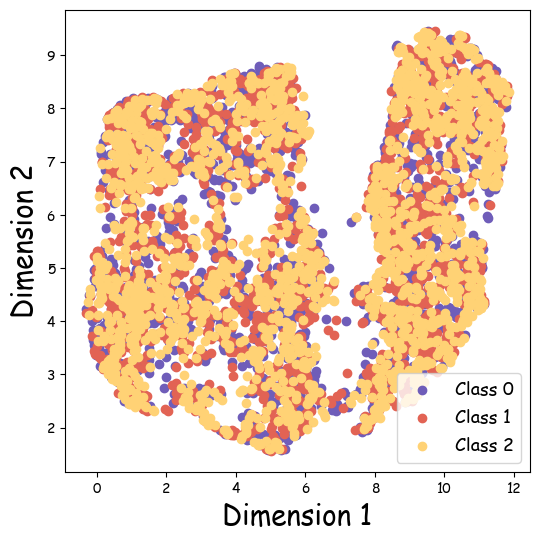

Plot saved to /cpfs04/user/hanyujin/causal-dm/example/taskc_clip.pdf


In [7]:
import os
import numpy as np
import torch
from PIL import Image
import clip
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
comic_sans_path = "/usr/share/fonts/truetype/msttcorefonts/comic.ttf"  # Linux 常见路径
if os.path.exists(comic_sans_path):
    fm.fontManager.addfont(comic_sans_path)
    plt.rcParams['font.family'] = 'Comic Sans MS'
else:
    print("Comic Sans MS font not found. Using default font.")
    
# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device)

# Define the colors corresponding to the classes
colors = ["#6f5db9", '#E26354', "#ffd275"]

# Folder paths
base_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/perspective_contrastive_ternary"
subfolders = ["0", "1", "2"]

# Hyperparameter for dimensionality reduction
dim_reduction_method = "UMAP"  # Options: "UMAP", "PCA", "TSNE"

# Function to get CLIP features for an image
def get_clip_features(image_path):
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        features = clip_model.encode_image(image)
    return features.cpu().numpy()

# Collect features and labels
features = []
labels = []

for label, subfolder in enumerate(subfolders):
    folder_path = os.path.join(base_path, subfolder)
    for img_name in os.listdir(folder_path):
        if img_name.endswith(".png"):  # Filter for .png files
            img_path = os.path.join(folder_path, img_name)
            feature = get_clip_features(img_path)
            features.append(feature)
            labels.append(label)


# Convert to numpy array
features = np.vstack(features)
labels = np.array(labels)

# Dimensionality reduction
if dim_reduction_method == "UMAP":
    reducer = umap.UMAP(n_components=2)
    reduced_features = reducer.fit_transform(features)
elif dim_reduction_method == "PCA":
    reducer = PCA(n_components=2)
    reduced_features = reducer.fit_transform(features)
elif dim_reduction_method == "TSNE":
    reducer = TSNE(n_components=2)
    reduced_features = reducer.fit_transform(features)

# Visualization
plt.figure(figsize=(6, 6))
for i, color in enumerate(colors):
    plt.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], color=color, label=f"Class {i}")

# plt.title("Dimensionality Reduction of CLIP Features")
plt.xlabel("Dimension 1",fontsize=20)
plt.ylabel("Dimension 2",fontsize=20)
plt.legend(fontsize=13)

# Save as PDF
output_path = "/cpfs04/user/hanyujin/causal-dm/example/taskc_clip.pdf"
plt.savefig(output_path, format="pdf")
plt.show()
plt.close()

print(f"Plot saved to {output_path}")


# FID

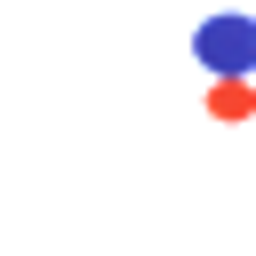

In [5]:
from PIL import Image

# 定义图片路径
image_path = "/cpfs04/user/hanyujin/causal-dm/results/circles_two/vis/merge_epoch_1600/circles_contrastive_ternary_6.png"

# 打开图片
try:
    img = Image.open(image_path)
    # 调整大小到 256x256
    resized_img = img.resize((256, 256))
    # 打印调整后的图片信息
    resized_img.show()
except FileNotFoundError:
    print("Image not found at the specified path:", image_path)


In [ ]:
from PIL import Image
import os

image_path = "/cpfs04/user/hanyujin/causal-dm/results/circles_two/vis/epoch_1600_1736144851.9722738/circles_two_2.png"

try:
    # 检查文件是否存在
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at: {image_path}")
    else:
        # 打开图片
        img = Image.open(image_path)

        # 获取图片尺寸
        width, height = img.size

        # 打印尺寸
        print(f"Image size: width={width}, height={height}")

except FileNotFoundError:
    print(f"Error: File not found at: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

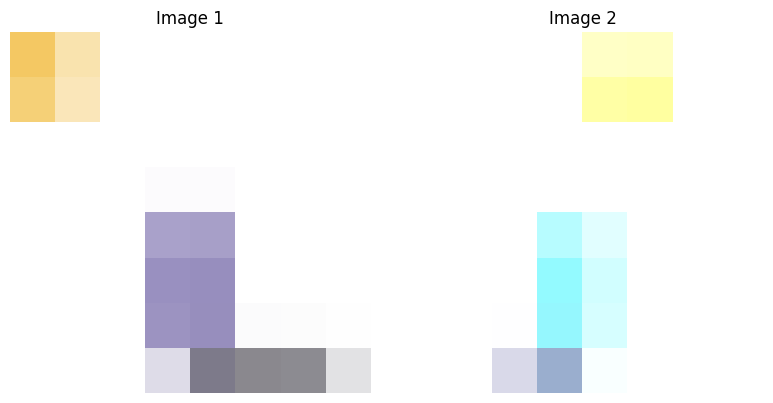

In [12]:
from PIL import Image
import os
import matplotlib.pyplot as plt

image_paths = [
    "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_lnd_rfd_rnd/images/l_f_d_4.png",
    "/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_4000_1733751408.6393044/sunshadowweight_4000_161.png"
]

target_size = (8, 8)
resized_images = []  # 存储调整大小后的图像

for image_path in image_paths:
    try:
        if not os.path.exists(image_path):
            print(f"Error: Image file not found at: {image_path}")
            continue
            
        img = Image.open(image_path)
        resized_img = img.resize(target_size)
        resized_images.append(resized_img) # 将调整后的图像添加到列表中

    except FileNotFoundError:
        print(f"Error: File not found at: {image_path}")
    except Exception as e:
        print(f"An error occurred processing {image_path}: {e}")

# 检查是否有调整大小后的图像
if resized_images:
    # 创建子图，以便并排显示图像
    fig, axes = plt.subplots(1, len(resized_images), figsize=(8, 4))

    # 确保axes是一个列表，即使只有一个图像
    if len(resized_images) == 1:
        axes = [axes]

    for i, resized_img in enumerate(resized_images):
        axes[i].imshow(resized_img)
        axes[i].axis('off') # 关闭坐标轴
        axes[i].set_title(f"Image {i+1}")

    plt.tight_layout()
    plt.show()
else:
    print("No images were loaded or resized.")

In [14]:
import os
import shutil
import random

# 源文件夹路径
source_dir = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_lnd_rfd_rnd/images"

# 目标文件夹路径
target_dir_1 = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_lnd_rfd_rnd_1/images"
target_dir_2 = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_lnd_rfd_rnd_2/images"

# 创建目标文件夹（如果不存在）
os.makedirs(target_dir_1, exist_ok=True)
os.makedirs(target_dir_2, exist_ok=True)

# 列出源文件夹中的所有图片
all_files = os.listdir(source_dir)
all_images = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]  # 筛选图片文件

# 随机打乱所有图片文件
random.shuffle(all_images)

# 采样并分配到两个文件夹
split_index = len(all_images) // 2
group_1 = all_images[:split_index]  # 第一半图片
group_2 = all_images[split_index:]  # 第二半图片

# 将第一半图片保存到目标目录 1
for file_name in group_1:
    source_path = os.path.join(source_dir, file_name)
    target_path = os.path.join(target_dir_1, file_name)
    shutil.copy2(source_path, target_path)
    print(f"Copied to Group 1: {file_name}")

# 将第二半图片保存到目标目录 2
for file_name in group_2:
    source_path = os.path.join(source_dir, file_name)
    target_path = os.path.join(target_dir_2, file_name)
    shutil.copy2(source_path, target_path)
    print(f"Copied to Group 2: {file_name}")

print("图片采样完成，两个目标文件夹中的图片互斥且没有重复！")


Copied to Group 1: l_n_d_134.png
Copied to Group 1: l_f_d_47.png
Copied to Group 1: l_n_d_582.png
Copied to Group 1: l_n_d_43.png
Copied to Group 1: r_f_d_251.png
Copied to Group 1: l_f_d_199.png
Copied to Group 1: l_f_d_667.png
Copied to Group 1: l_n_d_951.png
Copied to Group 1: r_n_d_7.png
Copied to Group 1: l_n_d_610.png
Copied to Group 1: r_f_d_289.png
Copied to Group 1: r_n_d_625.png
Copied to Group 1: l_n_d_911.png
Copied to Group 1: l_f_d_691.png
Copied to Group 1: l_f_d_548.png
Copied to Group 1: r_f_d_173.png
Copied to Group 1: r_f_d_602.png
Copied to Group 1: r_f_d_737.png
Copied to Group 1: l_n_d_383.png
Copied to Group 1: r_n_d_148.png
Copied to Group 1: l_n_d_564.png
Copied to Group 1: l_n_d_480.png
Copied to Group 1: l_f_d_731.png
Copied to Group 1: l_n_d_941.png
Copied to Group 1: r_n_d_169.png
Copied to Group 1: r_f_d_852.png
Copied to Group 1: r_n_d_867.png
Copied to Group 1: l_f_d_817.png
Copied to Group 1: r_f_d_644.png
Copied to Group 1: r_f_d_609.png
Copied to Grou

In [6]:
import os
import shutil

# 定义路径
base_dir = "/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345"
fail_files_path = os.path.join(base_dir, "fail_files.txt")
path_suc = os.path.join(base_dir, "path_fail")

# 创建目标文件夹（如果不存在）
os.makedirs(path_suc, exist_ok=True)

# 读取 fail_files.txt 中记录的失败文件名称
with open(fail_files_path, 'r') as f:
    fail_files = set(line.strip() for line in f)  # 使用 set 加速查找

# 遍历 base_dir 文件夹中的所有图片文件
for file in os.listdir(base_dir):
    # 检查文件是否为图片文件（可根据需求扩展）
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # 如果文件名不在 fail_files 中，则复制图片
        if file in fail_files:
            source_path = os.path.join(base_dir, file)
            target_path = os.path.join(path_suc, file)
            shutil.copy(source_path, target_path)
            print(f"Copied {file} to {path_suc}")
            
print("所有图片已处理完毕。")


Copied sunshadowweight_1378.png to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/path_fail
Copied sunshadowweight_869.png to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/path_fail
Copied sunshadowweight_2119.png to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/path_fail
Copied sunshadowweight_710.png to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/path_fail
Copied sunshadowweight_1197.png to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/path_fail
Copied sunshadowweight_947.png to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/path_fail
Copied sunshadowweight_2187.png to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/path_

In [1]:
import sys
from torchvision import transforms
sys.path.append("/cpfs04/user/hanyujin/clean-fid")
from cleanfid import fid
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图片转换为 Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # 数据集的均值
                         std=[0.229, 0.224, 0.225])  # 数据集的标准差
])
fdir1 = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_two/images" 
fdir2 ="/cpfs04/user/hanyujin/causal-dm/results/circles_two/vis/merge_epoch_1600"
# fdir2 ="/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_lnd_rfd_rnd_val/images"
score = fid.compute_fid(fdir1, fdir2, mode="clean", model_name="clip_vit_b_32")
print(score)

compute FID between two folders
Found 2000 images in the folder /cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_two/images


FID images : 100%|██████████| 63/63 [00:05<00:00, 12.05it/s]


Found 6002 images in the folder /cpfs04/user/hanyujin/causal-dm/results/circles_two/vis/merge_epoch_1600


FID merge_epoch_1600 : 100%|██████████| 188/188 [00:03<00:00, 60.47it/s]


24.744215446423162


In [1]:
import os
import torch
import lpips
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# 定义数据集路径
path_to_dataset1 = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_two/images" 
path_to_dataset2 ="/cpfs04/user/hanyujin/causal-dm/results/circles_two/vis/merge_epoch_1600"

# 初始化 LPIPS 模型
loss_fn = lpips.LPIPS(net='vgg')

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # 如果图片分辨率不一致，可以调整到相同大小
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 标准化到 [-1, 1]
])

# 获取数据集中的所有图片文件
files1 = sorted([f for f in os.listdir(path_to_dataset1) if f.endswith(('png', 'jpg', 'jpeg'))])
files2 = sorted([f for f in os.listdir(path_to_dataset2) if f.endswith(('png', 'jpg', 'jpeg'))])

# 如果文件数量不同，取两者的最小值（确保可以正确一一匹配）
num_files = min(len(files1), len(files2))

# LPIPS 计算
lpips_values = []
for i in tqdm(range(num_files), desc="Calculating LPIPS"):
    # 加载图片
    img1 = Image.open(os.path.join(path_to_dataset1, files1[i])).convert('RGB')
    img2 = Image.open(os.path.join(path_to_dataset2, files2[i])).convert('RGB')
    
    # 预处理图片
    img1 = transform(img1).unsqueeze(0)  # 增加 batch 维度
    img2 = transform(img2).unsqueeze(0)
    
    # 计算 LPIPS
    lpips_value = loss_fn(img1, img2)
    lpips_values.append(lpips_value.item())

# 计算 LPIPS 平均值
lpips_mean = sum(lpips_values) / len(lpips_values)
print(f"Mean LPIPS value: {lpips_mean}")


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/root/miniconda3/envs/yjenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/envs/yjenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:52<00:00, 10.5MB/s] 


Loading model from: /root/miniconda3/envs/yjenv/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Calculating LPIPS: 100%|██████████| 2000/2000 [01:15<00:00, 26.57it/s]

Mean LPIPS value: 0.3428256784677505


In [4]:
import os
import torch
import lpips
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# 定义数据集路径
path_to_dataset1 = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_two/images" 
path_to_dataset2 ="/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/circles_two_val/images" 

# 初始化 LPIPS 模型
loss_fn = lpips.LPIPS(net='vgg')

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 如果图片分辨率不一致，可以调整到相同大小
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 标准化到 [-1, 1]
])

# 获取数据集中的所有图片文件
files1 = sorted([f for f in os.listdir(path_to_dataset1) if f.endswith(('png', 'jpg', 'jpeg'))])
files2 = sorted([f for f in os.listdir(path_to_dataset2) if f.endswith(('png', 'jpg', 'jpeg'))])

# 如果文件数量不同，取两者的最小值（确保可以正确一一匹配）
num_files = min(len(files1), len(files2))

# LPIPS 计算
lpips_values = []
for i in tqdm(range(num_files), desc="Calculating LPIPS"):
    # 加载图片
    img1 = Image.open(os.path.join(path_to_dataset1, files1[i])).convert('RGB')
    img2 = Image.open(os.path.join(path_to_dataset2, files2[i])).convert('RGB')
    
    # 预处理图片
    img1 = transform(img1).unsqueeze(0)  # 增加 batch 维度
    img2 = transform(img2).unsqueeze(0)
    
    # 计算 LPIPS
    lpips_value = loss_fn(img1, img2)
    lpips_values.append(lpips_value.item())

# 计算 LPIPS 平均值
lpips_mean = sum(lpips_values) / len(lpips_values)
print(f"Mean LPIPS value: {lpips_mean}")


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /root/miniconda3/envs/yjenv/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Calculating LPIPS: 100%|██████████| 2000/2000 [02:20<00:00, 14.25it/s]

Mean LPIPS value: 0.27792505878396334
